# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Introduction

The project folder has the following structure:

* In the main directory you have this notebook, `cnn_from_scratch.ipynb`, that contains the instruction and some questions you will have to answer. Follow this notebook and complete the required sections in order.

* In the `src/` directory you have several source files. As instructed in this notebook, you will open and complete those files, then come back to this notebook to execute some tests that will verify what you have done. While these tests don't guarantee that your work is bug-free, they will help you finding the most obvious problems so you will be able to proceed to the next step with confidence.

* Sometimes you will need to restart the notebook. If you do so, remember to execute also the cells containing the code you have already completed starting from the top, before you move on.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

### Designing and training a CNN from scratch

In this notebook, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 50%.

Although 50% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="static_images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 50% is significantly better than random guessing, which would provide an accuracy of just 2% (100% / 50 classes). In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Experiment with different architectures, hyperparameters, training strategies, and trust your intuition.  And, of course, have fun!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly, download the data if you don't have it already, and also check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [ ]:
import torch
a = torch.randn(1, 1)
print(a)
a.tolist()

In [15]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable


Important! After you have ran pip install, please restart the kernel using the **Kernel** menu 

In [16]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory /data/DLND/C2/landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Data

In this and the following steps we are going to complete some code, and then execute some tests to make sure the code works as intended. 

Open the file `src/data.py`. It contains a function called `get_data_loaders`. Read the function and complete all the parts marked by `YOUR CODE HERE`. Once you have finished, test that your implementation is correct by executing the following cell (see below for what to do if a test fails):

In [17]:
!pytest -vv src/data.py -k data_loaders

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 1 deselected / 3 selected                                  

src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 4.86s ========================


You should see something like:
```
src/data.py::test_data_loaders_keys PASSED                               [ 33%]
src/data.py::test_data_loaders_output_type PASSED                        [ 66%]
src/data.py::test_data_loaders_output_shape PASSED                       [100%]

======================= 3 passed, 1 deselected in 1.81s ========================
```
If all the tests are `PASSED`, you can move to the next section.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> **What to do if tests fail**
When a test fails, `pytest` will mark it as `FAILED` as opposed to `PASSED`, and will print a lot of useful output, including a message that should tell you what the problem is. For example, this is the output of a failed test:
> ```
>    def test_data_loaders_keys(data_loaders):
>    
>       assert set(data_loaders.keys()) == {"train", "valid", "test"}
E       AssertionError: assert {'tes', 'train', 'valid'} == {'test', 'train', 'valid'}
E         Extra items in the left set:
E         'tes'
E         Full diff:
E         - {'test', 'train', 'valid'}
E         + {'tes', 'train', 'valid'}
E         ?                          +++++++
>
> src/data.py:171: AssertionError
-------------- Captured stdout setup ----------------------------------------------
Reusing cached mean and std for landmark_images
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
=========== short test summary info ===============================================
FAILED src/data.py::test_data_loaders_keys - AssertionError: The keys of the data_loaders dictionary should be train, valid and test
> ``` 
> In the `short test summary info` you can see a short description of the problem. In this case, the dictionary we are returning has the wrong keys. Going above a little, you can see that the test expects `{'test', 'train', 'valid'}` while we are returning `{'tes', 'train', 'valid'}` (there is a missing `t`). So we can go back to our function, fix that problem and test again.
> 
> In other cases, you might get an error like:
> ```
    def _conv_forward(self, input: Tensor, weight: Tensor, bias: Optional[Tensor]):
        if self.padding_mode != 'zeros':
            return F.conv2d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
                            weight, bias, self.stride,
                            _pair(0), self.dilation, self.groups)
        return F.conv2d(input, weight, bias, self.stride,
>                       self.padding, self.dilation, self.groups)
E       RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same
>
> ../../../../miniconda3/envs/udacity_starter/lib/python3.7/site-packages/torch/nn/modules/conv.py:440: RuntimeError
> ```
> Looking at the stack trace you should be able to understand what it is going on. In this case, we forgot to add a `.cuda()` to some tensor. For example, the model is on the GPU, but the data aren't.

<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> **Question:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/> 
**For the resizing, I used the argument transform.Resize((256,256))
And for the cropping of the images, the following argument is used transforms.CenterCrop(224)**

**The input size for the tensor was taken as per the instruction in the notebook**

**Finally, for the augmentation, a simple horizontal flip is used here: transforms.RandomHorizontalFlip().
Further augmentation are planned to be incorporated only on a need basis if the results are not good enough**: 



### Visualize a Batch of Training Data

Go back to `src/data.py` and complete the function `visualize_one_batch` in all places with the `YOUR CODE HERE` marker. After you're done, execute the following cell and make sure the test `src/data.py::test_visualize_one_batch` is `PASSED`:

In [18]:
!pytest -vv src/data.py -k visualize_one_batch

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/data.py::test_visualize_one_batch PASSED                             [100%]

======================= 1 passed, 3 deselected in 4.56s ========================


We can now use the code we just completed to get a batch of images from your train data loader and look at them.

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing (including transforms such as rotations, translations, color transforms...) are working as expected.

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
<class 'torch.Tensor'>
5
torch.Size([5])
Reusing cached mean and std


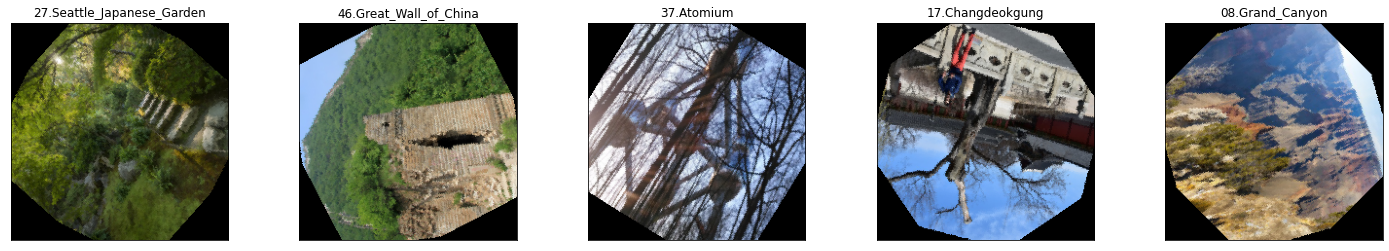

In [19]:
%matplotlib inline
from src.data import visualize_one_batch, get_data_loaders

# use get_data_loaders to get the data_loaders dictionary. Use a batch_size
# of 5, a validation size of 0.01 and num_workers=-1 (all CPUs)
data_loaders = get_data_loaders(batch_size=5, valid_size=0.01, num_workers=32)

visualize_one_batch(data_loaders)

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Define model

Open `src/model.py` and complete the `MyModel` class filling in all the `YOUR CODE HERE` sections. After you're done, execute the following test and make sure it passes:

In [20]:
!pytest -vv src/model.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 1 item                                                               

src/model.py::test_model_construction PASSED                             [100%]

============================== 1 passed in 6.68s ===============================


<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> **Question**: Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/> __Answer:__ 

I have adopted five convolutional layers in succession to extract the feature maps starting from simple features like lines and curves to complicated features in the later stages. With every stages, the number of features are increased as the combination of simple previous features can amount to different types of complicated features. With more features, the network has more information (more perspectives) which then helps in the classification in the last stages. 

For every convolutional layer, it is combined with the max pool layers in order to reduce the feature size to 7x7. 

Additionally, also a ReLU layers are added for every convolutional layers, because that would then give us the non-linearity in the model between the stages. 

Moreover, the dropout layer is included in every convolutional stages in order to make the model robust towards overfitting, which randomly cuts some connections during training. 

At the end of Convolutions, we flatten the features to provide them to linear layers. 

Three linear layers are introduced to have more non-linearity in the final classification head as well. Additionally, like before, reLU and dropout are included here as well for every stage. 



---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: define loss and optimizer

Open `src/optimization.py` and complete the `get_loss` function, then execute the test and make sure it passes:

In [21]:
!pytest -vv src/optimization.py -k get_loss

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 7 items / 6 deselected / 1 selected                                  

src/optimization.py::test_get_loss PASSED                                [100%]

======================= 1 passed, 6 deselected in 1.67s ========================


Then, in the same file, complete the `get_optimizer` function then execute its tests, and make sure they all pass:

In [22]:
!pytest -vv src/optimization.py -k get_optimizer

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 7 items / 1 deselected / 6 selected                                  

src/optimization.py::test_get_optimizer_type PASSED                      [ 16%]
src/optimization.py::test_get_optimizer_is_linked_with_model PASSED      [ 33%]
src/optimization.py::test_get_optimizer_returns_adam PASSED              [ 50%]
src/optimization.py::test_get_optimizer_sets_learning_rate PASSED        [ 66%]
src/optimization.py::test_get_optimizer_sets_momentum PASSED             [ 83%]
src/optimization.py::test_get_optimizer_sets_weight_decat PASSED         [100%]

======================= 6 passed, 1 deselected in 1.63s ========================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Train and Validate the Model

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Testing ML code is notoriously difficult. The tests in this section merely exercise the functions you are completing, so it will help you catching glaring problems but it won't guarantee that your training code is bug-free. If you see that your loss is not decreasing, for example, that's a sign of a bug or of a flawed model design. Use your judgement.

Open `src/train.py` and complete the `train_one_epoch` function, then run the tests:

In [23]:
!pytest -vv src/train.py -k train_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_train_one_epoch PASSED                                [100%]

================== 1 passed, 3 deselected in 61.18s (0:01:01) ==================


Now complete the `valid` function, then run the tests:

In [24]:
!pytest -vv src/train.py -k valid_one_epoch

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_valid_one_epoch PASSED                                [100%]

================== 1 passed, 3 deselected in 61.44s (0:01:01) ==================


Now complete the `optimize` function, then run the tests:

In [25]:
!pytest -vv src/train.py -k optimize

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_optimize PASSED                                       [100%]

================= 1 passed, 3 deselected in 109.72s (0:01:49) ==================


Finally, complete the `test` function then run the tests:

In [26]:
!pytest -vv src/train.py -k one_epoch_test

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 4 items / 3 deselected / 1 selected                                  

src/train.py::test_one_epoch_test PASSED                                 [100%]

======================= 1 passed, 3 deselected in 59.06s =======================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 5: Putting everything together

Allright, good job getting here! Now it's time to see if all our hard work pays off. In the following cell we will train your model and validate it against the validation set.

Let's start by defining a few hyperparameters. Feel free to experiment with different values and try to optimize your model:

In [1]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=5949b353484c3912c973b55a4b18ae960743fe9619531fcb033d1c1220081228
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory /data/DLND/C2/landmark_images
Reusing cached mean and std


In [2]:
batch_size = 64        # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2       # fraction of the training data to reserve for validation
num_epochs = 40        # number of epochs for training
num_classes = 50       # number of classes. Do not change this
dropout = 0.3          # dropout for our model
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'sgd'            # optimizer. 'sgd' or 'adam'
weight_decay = 0.0002     # regularization. Increase this to combat overfitting

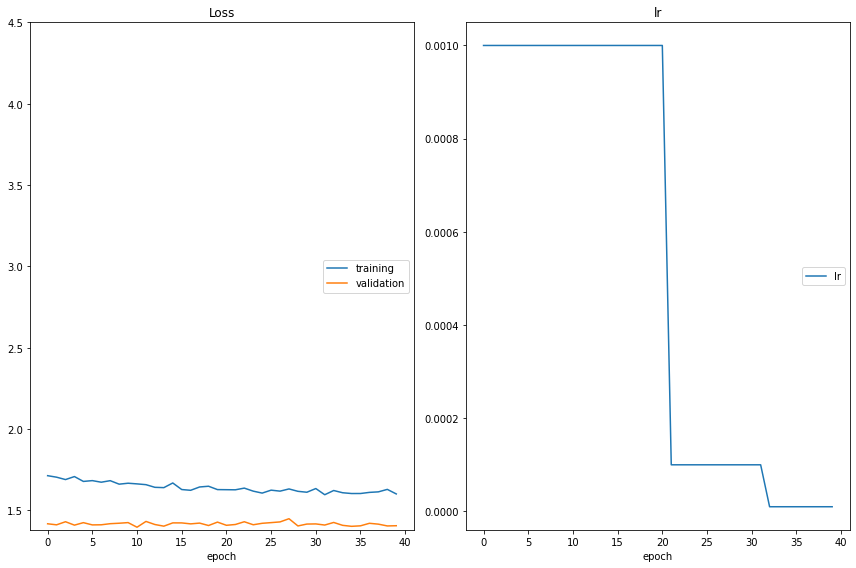

In [10]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel
import torch

# get the data loaders using batch_size and valid_size defined in the previous
# cell
# HINT: do NOT copy/paste the values. Use the variables instead
data_loaders = get_data_loaders(batch_size, valid_size)

# instance model MyModel with num_classes and drouput defined in the previous
# cell
model = MyModel(num_classes, dropout)

model.load_state_dict(torch.load('./checkpoints/best_val_loss_newCl_24.pt'))
#model.load_state_dict(torch.load('./checkpoints/best_val_loss.pt'))

# Get the optimizer using get_optimizer and the model you just created, the learning rate,
# the optimizer and the weight decay specified in the previous cell
optimizer = get_optimizer(model, optimizer=opt, learning_rate=learning_rate, weight_decay=weight_decay)

# Get the loss using get_loss
loss = get_loss()

optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss_newCl_25.pt",
    interactive_tracking=True
)

In [3]:
from src.data import get_data_loaders
from src.train import optimize
from src.optimization import get_optimizer, get_loss
from src.model import MyModel
import torch

data_loaders = get_data_loaders(batch_size, valid_size)
loss = get_loss()

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 6: testing against the Test Set

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> only run this *after* you have completed hyperpameter optimization. Do not optimize hyperparameters by looking at the results on the test set, or you might overfit on the test set (bad, bad, bad)

Run the code cell below to try out your model on the test dataset of landmark images. Ensure that your test accuracy is greater than 50%.

In [31]:
# load the model that got the best validation accuracy
from src.train import one_epoch_test
from src.model import MyModel
import torch

model = MyModel(num_classes=num_classes, dropout=dropout)

checkpoint = torch.load('checkpoints/best_val_loss_newCl_25.pt')
#checkpoint = torch.load('checkpoints/best_val_loss.pt')
model.load_state_dict(checkpoint)

#checkpoint = torch.load(PATH)
#model.load_state_dict(checkpoint['model_state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Run test
one_epoch_test(data_loaders['test'], model, loss)

Testing: 100%|██████████████████████████████████| 20/20 [05:05<00:00, 15.29s/it]

Test Loss: 1.982409


Test Accuracy: 50% (626/1250)


1.9824088513851166

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 7: Export using torchscript

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's export it so we can use it in our app.

But first, as usual, we need to complete some code!

Open `src/predictor.py` and fill up the missing code, then run the tests:

In [4]:
!pytest -vv src/predictor.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 1 item                                                               

src/predictor.py::test_model_construction PASSED                         [100%]

============================== 1 passed in 7.73s ===============================


Allright, now we are ready to export our model using our Predictor class:

In [6]:
checkpoint = torch.load('checkpoints/best_val_loss_newCl_25.pt', map_location='cpu')
print(checkpoint.keys())

odict_keys(['model.0.weight', 'model.0.bias', 'model.2.weight', 'model.2.bias', 'model.2.running_mean', 'model.2.running_var', 'model.2.num_batches_tracked', 'model.4.weight', 'model.4.bias', 'model.6.weight', 'model.6.bias', 'model.6.running_mean', 'model.6.running_var', 'model.6.num_batches_tracked', 'model.8.weight', 'model.8.bias', 'model.10.weight', 'model.10.bias', 'model.10.running_mean', 'model.10.running_var', 'model.10.num_batches_tracked', 'model.12.weight', 'model.12.bias', 'model.14.weight', 'model.14.bias', 'model.14.running_mean', 'model.14.running_var', 'model.14.num_batches_tracked', 'model.16.weight', 'model.16.bias', 'model.18.weight', 'model.18.bias', 'model.18.running_mean', 'model.18.running_var', 'model.18.num_batches_tracked', 'model.22.weight', 'model.22.bias', 'model.22.running_mean', 'model.22.running_var', 'model.22.num_batches_tracked', 'model.23.weight', 'model.23.bias', 'model.24.weight', 'model.24.bias', 'model.24.running_mean', 'model.24.running_var', '

In [14]:
print(predictor.forward)

<bound method Predictor.forward of Predictor(
  (model): MyModel(
    (model): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (7): LeakyReLU(negative_slope=0.01)
      (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): LeakyReLU(negative_slope=0.01)
      (12): Conv2d(6

In [19]:
scripted_model = torch.jit.script(predictor)

RuntimeError: Can't redefine method: forward on class: __torch__.src.predictor.Predictor (of Python compilation unit at: 0x598232038fa0)

In [5]:
# NOTE: you might need to restart the notebook before running this step
# If you get an error about RuntimeError: Can't redefine method: forward on class
# restart your notebook then execute only this cell
from src.predictor import Predictor
from src.helpers import compute_mean_and_std
from src.model import MyModel
from src.data import get_data_loaders
import torch

data_loaders = get_data_loaders(batch_size=1)

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model = MyModel(num_classes=50, dropout=0.3).cpu()

# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)

checkpoint = torch.load('checkpoints/best_val_loss_newCl_25.pt', map_location='cpu')
model.load_state_dict(checkpoint)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model, class_names, mean, std).cpu()

# Export using torch.jit.script
#if not isinstance(predictor, torch.jit.ScriptModule):
scripted_predictor = torch.jit.script(predictor)
#else:
 #   print("Model is already scripted.")

scripted_predictor.save("checkpoints/original_exported.pt")

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])
Reusing cached mean and std


Now let's make sure the exported model has the same performance as the original one, by reloading it and testing it. The Predictor class takes different inputs than the non-wrapped model, so we have to use a specific test loop:

In [6]:
import torch

# Load using torch.jit.load
model_reloaded =  torch.jit.load("checkpoints/original_exported.pt")

In [7]:
from src.predictor import predictor_test

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

  0%|                                                  | 0/1250 [00:00<?, ?it/s]

[1, 3, 224, 224]


  0%|                                          | 1/1250 [00:01<21:19,  1.02s/it]

[1, 50]
Columns 1 to 10 4.3874  1.0370 -0.3452 -0.0336 -2.3411 -1.5361 -2.1268 -2.4202  2.6970 -1.8460

Columns 11 to 20 2.4797 -1.1402  0.7411  1.7026 -1.4154  3.8523  3.4475 -0.6193 -2.4776 -0.0190

Columns 21 to 30-1.2156  0.9423 -1.9626  2.1042 -1.0256  0.5720 -0.5302  0.1760 -0.3462  0.2082

Columns 31 to 40-0.9810 -1.7021  0.6852 -2.1859  0.7684 -3.3254  1.2403 -2.8850 -3.2803 -0.1238

Columns 41 to 50 0.0207  7.5000  1.3004 -2.5979 -2.8686 -0.2740  0.3406 -0.2315  2.6716  1.1056
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0390  0.0014  0.0003  0.0005  0.0000  0.0001  0.0001  0.0000  0.0072  0.0001

Columns 11 to 20 0.0058  0.0002  0.0010  0.0027  0.0001  0.0229  0.0153  0.0003  0.0000  0.0005

Columns 21 to 30 0.0001  0.0012  0.0001  0.0040  0.0002  0.0009  0.0003  0.0006  0.0003  0.0006

Columns 31 to 40 0.0002  0.0001  0.0010  0.0001  0.0010  0.0000  0.0017  0.0000  0.0000  0.0004

Columns 41 to 50 0.0005  0.8776  0.0018  0.0000  0.0000  0.0004

  0%|                                          | 2/1250 [00:02<20:59,  1.01s/it]

[1, 50]
Columns 1 to 10 4.5109  2.4227  1.3579 -1.6130 -1.9835 -1.5770 -1.6980  0.4016  1.6465 -1.3309

Columns 11 to 20 2.3680  2.4674 -0.4298  3.2796 -2.6947  2.8698 -1.2212 -0.4744 -1.9684 -1.4538

Columns 21 to 30 0.5581  1.6049 -2.8461  4.0550 -1.0977  1.8311  1.1367  2.2869 -2.5345 -1.7342

Columns 31 to 40-2.8777 -1.2890  1.8995 -2.9184 -1.7716 -2.1262  1.6076 -2.9537 -3.6088 -1.0662

Columns 41 to 50-0.0415  6.0273  1.5683 -0.3023 -3.7851  1.1176  2.7792 -2.7517  3.3640  1.2538
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1210  0.0150  0.0052  0.0003  0.0002  0.0003  0.0002  0.0020  0.0069  0.0004

Columns 11 to 20 0.0142  0.0157  0.0009  0.0353  0.0001  0.0234  0.0004  0.0008  0.0002  0.0003

Columns 21 to 30 0.0023  0.0066  0.0001  0.0767  0.0004  0.0083  0.0041  0.0131  0.0001  0.0002

Columns 31 to 40 0.0001  0.0004  0.0089  0.0001  0.0002  0.0002  0.0066  0.0001  0.0000  0.0005

Columns 41 to 50 0.0013  0.5511  0.0064  0.0010  0.0000  0.0041

  0%|                                          | 3/1250 [00:03<21:49,  1.05s/it]

[1, 50]
Columns 1 to 10 1.3157  0.0022 -0.2558  3.1223 -0.6415 -1.3983  1.8620 -0.4068  2.2151  1.9872

Columns 11 to 20-0.3360 -0.9657 -1.1543  1.2689 -0.4731  0.2594  0.6457 -1.3792 -0.3257 -2.0788

Columns 21 to 30 1.7909 -0.3813 -1.1577 -0.8207  0.5412  1.1139 -1.7787 -0.5544  0.9667  0.6028

Columns 31 to 40 0.4535 -0.2855 -0.0351  1.2797  0.2251 -0.0930  0.9939 -1.5159  1.1568 -0.5856

Columns 41 to 50-0.9403 -0.4153  2.4540  1.0647 -2.1577 -0.3597  1.9684 -2.6240 -0.4546 -1.9617
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0311  0.0084  0.0065  0.1892  0.0044  0.0021  0.0537  0.0056  0.0764  0.0608

Columns 11 to 20 0.0060  0.0032  0.0026  0.0297  0.0052  0.0108  0.0159  0.0021  0.0060  0.0010

Columns 21 to 30 0.0500  0.0057  0.0026  0.0037  0.0143  0.0254  0.0014  0.0048  0.0219  0.0152

Columns 31 to 40 0.0131  0.0063  0.0080  0.0300  0.0104  0.0076  0.0225  0.0018  0.0265  0.0046

Columns 41 to 50 0.0033  0.0055  0.0970  0.0242  0.0010  0.0058

  0%|▏                                         | 4/1250 [00:03<15:41,  1.32it/s]

[1, 50]
Columns 1 to 10 5.9078 -0.0126  0.0253 -0.5331 -1.9209 -0.3675 -0.9204 -1.5923 -2.7921  0.5882

Columns 11 to 20 4.9271 -1.5009  1.3678  0.2062 -0.7822  4.6981  2.9897  0.8469 -5.3593  3.2688

Columns 21 to 30-1.7287  0.5415  4.3261  0.2239 -1.5692 -1.4181 -0.9983 -0.3761 -0.6150 -1.6061

Columns 31 to 40 1.5368 -1.3280 -2.0190 -2.0085 -3.1823 -0.5684 -0.6780 -2.1217 -0.4632  1.5913

Columns 41 to 50-0.9397  2.9268  1.3243 -3.2685 -2.3192  0.8534  2.4043  2.9056  0.3843 -0.9191
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.4574e-01  1.1964e-03  1.2426e-03  7.1093e-04  1.7746e-04  8.3894e-04

Columns 7 to 12 4.8265e-04  2.4651e-04  7.4262e-05  2.1818e-03  1.6717e-01  2.7008e-04

Columns 13 to 18 4.7575e-03  1.4890e-03  5.5416e-04  1.3296e-01  2.4085e-02  2.8259e-03

Columns 19 to 24 5.6995e-06  3.1841e-02  2.1507e-04  2.0821e-03  9.1655e-02  1.5156e-03

Columns 25 to 30 2.5225e-04  2.9342e-04  4.4649e-04  8.3180e-04  6.5504e-04  2.4313e-04

Columns 

  0%|▏                                         | 5/1250 [00:04<16:00,  1.30it/s]

[1, 50]
Columns 1 to 10 4.7753  2.8748  2.1315 -0.5112 -1.5279 -2.2430 -0.1652 -0.9451  3.6523  0.2997

Columns 11 to 20 2.9270  1.9658  0.3426  3.9700 -2.6047  3.4151 -0.0664 -1.4209 -1.3701 -2.8390

Columns 21 to 30 1.1714  1.3675 -2.1530  3.0707 -1.2290  3.5787  1.0698  2.5947 -2.9577 -1.8321

Columns 31 to 40-2.0456 -1.3898  1.1532 -2.0036 -1.9820 -2.5995  1.5553 -2.8649 -2.5023 -3.7757

Columns 41 to 50-0.1654  3.6590  2.4937 -0.8911 -4.8370  0.8460  4.8152 -4.8913  0.5250  1.0220
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.2074  0.0310  0.0147  0.0010  0.0004  0.0002  0.0015  0.0007  0.0675  0.0024

Columns 11 to 20 0.0327  0.0125  0.0025  0.0927  0.0001  0.0532  0.0016  0.0004  0.0004  0.0001

Columns 21 to 30 0.0056  0.0069  0.0002  0.0377  0.0005  0.0627  0.0051  0.0234  0.0001  0.0003

Columns 31 to 40 0.0002  0.0004  0.0055  0.0002  0.0002  0.0001  0.0083  0.0001  0.0001  0.0000

Columns 41 to 50 0.0015  0.0679  0.0212  0.0007  0.0000  0.0041

  0%|▏                                         | 6/1250 [00:04<14:04,  1.47it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.9738  0.4094  1.4772  0.9565  0.5424 -0.0829 -0.7574  0.9356 -0.1119 -0.0004

Columns 11 to 20-0.0583 -1.0158 -1.4705  1.0205 -1.2485 -0.3348 -0.5003  0.3122 -0.5418 -0.8864

Columns 21 to 30 0.4338  0.6306 -0.1715  0.4135  1.9024  0.0251  0.1660  1.3083 -0.6226 -1.4976

Columns 31 to 40-0.8921 -0.4642  0.6368 -0.3075  0.0877  0.0037  1.2362 -1.0224  0.5969  0.0064

Columns 41 to 50-0.1837 -0.4286  1.4329  0.4121 -2.0136  0.3982  0.1865 -2.6296  0.9870  0.3453
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 3.6436  2.0721  6.0276  3.5809  2.3669  1.2664  0.6452  3.5070  1.2302  1.3754

Columns 11 to 200.01 *
 1.2980  0.4982  0.3162  3.8178  0.3948  0.9844  0.8343  1.8801  0.8004  0.5671

Columns 21 to 300.01 *
 2.1232  2.5849  1.1591  2.0806  9.2217  1.4109  1.6243  5.0909  0.7383  0.3077

Columns 31 to 400.01 *
 0.5638  0.8650  2.6011  1.0117  1.5021  1.3811  4.7367  0.4950  2.4995  1.3847

Columns 41 to 500.

  1%|▏                                         | 7/1250 [00:05<14:51,  1.39it/s]

[1, 50]
Columns 1 to 10 3.1234 -0.1639 -1.0704 -0.0383 -1.8105  0.2426  0.0369 -3.6946  2.0472  0.4341

Columns 11 to 20 2.1427  0.1958 -0.1888  0.4529  0.8077  3.9726  5.3002  0.3998 -3.1564  0.9660

Columns 21 to 30-0.1067 -0.7084 -1.7673  1.0080 -1.2687  1.8949 -1.3715  0.0310  1.2504  3.2583

Columns 31 to 40 1.3138  0.6596 -0.5494 -0.3260  1.4166 -1.9604 -0.7038 -1.5628 -1.2429 -1.3770

Columns 41 to 50-0.5041  3.1274  0.0603 -2.6378 -3.4928 -0.8079  0.4341 -1.6980  0.3832 -0.3605
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0580  0.0022  0.0009  0.0025  0.0004  0.0033  0.0026  0.0001  0.0198  0.0039

Columns 11 to 20 0.0217  0.0031  0.0021  0.0040  0.0057  0.1355  0.5110  0.0038  0.0001  0.0067

Columns 21 to 30 0.0023  0.0013  0.0004  0.0070  0.0007  0.0170  0.0006  0.0026  0.0089  0.0663

Columns 31 to 40 0.0095  0.0049  0.0015  0.0018  0.0105  0.0004  0.0013  0.0005  0.0007  0.0006

Columns 41 to 50 0.0015  0.0582  0.0027  0.0002  0.0001  0.0011

  1%|▎                                         | 8/1250 [00:06<15:23,  1.34it/s]

[1, 50]
Columns 1 to 10 3.8314  2.6335  0.0707 -1.2848  2.7010  0.1529  0.8924 -1.8381 -0.1412 -0.9445

Columns 11 to 20 0.4293 -0.7074 -0.1840  1.5929 -1.2465  3.4648  1.1623  0.8448 -3.9517 -0.4894

Columns 21 to 30 0.3659  1.5612  1.6863  1.9485 -1.3827  2.0718 -0.3033  3.4935 -1.3897 -0.2177

Columns 31 to 40-2.0850  0.1308 -0.9746 -2.2120  0.0936 -0.7492 -2.2155  0.9745 -1.3104 -1.9177

Columns 41 to 50-0.3593  0.5115  0.3895  0.5908 -2.4899  1.4817  0.8549 -2.5229 -0.4362 -0.4338
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.2203  0.0665  0.0051  0.0013  0.0711  0.0056  0.0117  0.0008  0.0041  0.0019

Columns 11 to 20 0.0073  0.0024  0.0040  0.0235  0.0014  0.1527  0.0153  0.0111  0.0001  0.0029

Columns 21 to 30 0.0069  0.0228  0.0258  0.0335  0.0012  0.0379  0.0035  0.1571  0.0012  0.0038

Columns 31 to 40 0.0006  0.0054  0.0018  0.0005  0.0052  0.0023  0.0005  0.0127  0.0013  0.0007

Columns 41 to 50 0.0033  0.0080  0.0071  0.0086  0.0004  0.0210

  1%|▎                                         | 9/1250 [00:06<13:09,  1.57it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.0740  1.5158 -0.5575 -0.4261 -1.0891 -1.0095  1.1489 -2.2643  3.3710 -0.3236

Columns 11 to 20 0.8197  1.6522 -2.6437  1.5697  1.8866  1.6883  1.1545 -2.7827 -1.2171 -2.0542

Columns 21 to 30 2.6878  0.1786 -2.8538  0.5456 -1.0061  3.2534 -2.1567 -1.0670  1.0430  2.3305

Columns 31 to 40-1.0645  0.5662 -0.8380  0.1381  0.8308  0.6597  1.1524 -0.0673 -2.5159 -0.5580

Columns 41 to 50-0.7166  3.0641  1.1340  2.4025 -3.4377 -1.2273  0.6568 -1.8635 -0.0268 -1.7864
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0429  0.0246  0.0031  0.0035  0.0018  0.0020  0.0170  0.0006  0.1571  0.0039

Columns 11 to 20 0.0122  0.0282  0.0004  0.0259  0.0356  0.0292  0.0171  0.0003  0.0016  0.0007

Columns 21 to 30 0.0793  0.0065  0.0003  0.0093  0.0020  0.1396  0.0006  0.0019  0.0153  0.0555

Columns 31 to 40 0.0019  0.0095  0.0023  0.0062  0.0124  0.0104  0.0171  0.0050  0.0004  0.0031

Columns 41 to 50 0.0026  0.1155  0.0168  0.059

  1%|▎                                        | 10/1250 [00:06<10:23,  1.99it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.0441 -0.8563  1.2720  0.1194 -1.9419  1.1793  2.1590 -2.0035 -2.0931  2.1376

Columns 11 to 20 2.3905 -1.8928 -2.2065 -0.5985  1.9293  2.9479  4.8343  0.5663 -5.0992  3.1241

Columns 21 to 30 0.1509  0.6709  1.6603 -1.5248 -2.8779  0.3513 -0.6765 -1.6662  3.9413  1.8545

Columns 31 to 40 3.7311  2.5827 -2.8150  1.4450 -1.9584  1.5510 -2.0328  0.3919  2.2910  0.6300

Columns 41 to 50 1.4903 -1.4474 -1.8746 -1.6896 -3.8800  0.7460 -0.5729  0.7612 -0.7455 -0.1616
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0028  0.0011  0.0096  0.0030  0.0004  0.0087  0.0233  0.0004  0.0003  0.0228

Columns 11 to 20 0.0293  0.0004  0.0003  0.0015  0.0185  0.0512  0.3379  0.0047  0.0000  0.0611

Columns 21 to 30 0.0031  0.0053  0.0141  0.0006  0.0002  0.0038  0.0014  0.0005  0.1383  0.0172

Columns 31 to 40 0.1121  0.0356  0.0002  0.0114  0.0004  0.0127  0.0004  0.0040  0.0266  0.0050

Columns 41 to 50 0.0119  0.0006  0.0004  0.000

  1%|▎                                        | 11/1250 [00:07<10:58,  1.88it/s]

[1, 50]
Columns 1 to 10 0.7282  0.7674  0.8422  0.4868  1.9010  0.3696  0.0327 -2.0835 -0.9712  2.0025

Columns 11 to 20 1.4679  0.0717 -0.7686 -1.6612  3.7342 -0.3940  0.2210 -1.3304  0.4522  0.9282

Columns 21 to 30 0.6861 -1.2787  2.1706 -3.5206 -2.1878 -1.3625 -1.7765 -1.1779  0.9320 -1.4580

Columns 31 to 40 1.7723  1.0119 -2.6633  2.7544 -2.9214  2.8139 -0.2316  0.7474  0.4162  2.6748

Columns 41 to 50 1.7849 -2.3339  0.2564 -1.1937 -2.2965  1.4412  0.4696  0.1658 -0.7697 -0.3876
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0122  0.0127  0.0136  0.0096  0.0393  0.0085  0.0061  0.0007  0.0022  0.0435

Columns 11 to 20 0.0255  0.0063  0.0027  0.0011  0.2460  0.0040  0.0073  0.0016  0.0092  0.0149

Columns 21 to 30 0.0117  0.0016  0.0515  0.0002  0.0007  0.0015  0.0010  0.0018  0.0149  0.0014

Columns 31 to 40 0.0346  0.0162  0.0004  0.0924  0.0003  0.0980  0.0047  0.0124  0.0089  0.0853

Columns 41 to 50 0.0350  0.0006  0.0076  0.0018  0.0006  0.0248

  1%|▍                                        | 12/1250 [00:08<10:45,  1.92it/s]

[1, 50]
Columns 1 to 10 4.6089  0.0225 -0.2523  0.9910 -0.9322 -1.8633 -1.9354 -2.4815  3.9020  0.0109

Columns 11 to 20 2.4109 -2.5605  3.7121  2.1612 -1.5269  3.1311  2.2892  0.3594 -0.7019 -1.3732

Columns 21 to 30-2.5351  1.5577 -1.4409  1.5732 -0.7946 -0.4036 -1.2687  0.4359 -1.4938 -0.0827

Columns 31 to 40-0.0896 -2.5310  1.6827 -2.0236 -0.1936 -3.5008  1.8341 -2.8475 -1.1134 -0.0296

Columns 41 to 50 0.9505  4.1970  1.6927 -2.7251 -2.6318 -0.3322  0.4853 -0.3553  1.3205  0.3130
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.2758  0.0028  0.0021  0.0074  0.0011  0.0004  0.0004  0.0002  0.1360  0.0028

Columns 11 to 20 0.0306  0.0002  0.1125  0.0239  0.0006  0.0629  0.0271  0.0039  0.0014  0.0007

Columns 21 to 30 0.0002  0.0130  0.0007  0.0133  0.0012  0.0018  0.0008  0.0042  0.0006  0.0025

Columns 31 to 40 0.0025  0.0002  0.0148  0.0004  0.0023  0.0001  0.0172  0.0002  0.0009  0.0027

Columns 41 to 50 0.0071  0.1827  0.0149  0.0002  0.0002  0.0020

  1%|▍                                        | 13/1250 [00:08<08:46,  2.35it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 6.3741  4.3538  1.9022 -2.8536 -1.3722 -0.6415 -0.6482 -0.9620  2.4111  0.4982

Columns 11 to 20 2.6658 -0.4007  1.9094  3.8307 -3.2899  5.4940 -0.1286  0.9577 -2.1632 -3.0132

Columns 21 to 30 0.6137  2.4819 -0.9535  3.4129 -1.7712  2.5995  0.2625  6.7263 -3.8094 -2.8879

Columns 31 to 40-4.4050 -0.6115 -0.6880 -3.1867 -1.3757 -2.1104  0.1590 -2.3072 -3.1487 -2.6222

Columns 41 to 50 0.6370  4.9952  2.0241 -1.5367 -5.9002  2.2292  2.6560 -4.5629  1.3312  0.8043
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.8145e-01  3.7323e-02  3.2159e-03  2.7660e-05  1.2168e-04  2.5267e-04

Columns 7 to 12 2.5099e-04  1.8339e-04  5.3491e-03  7.8980e-04  6.9012e-03  3.2148e-04

Columns 13 to 18 3.2392e-03  2.2122e-02  1.7881e-05  1.1673e-01  4.2202e-04  1.2505e-03

Columns 19 to 24 5.5168e-05  2.3581e-05  8.8651e-04  5.7417e-03  1.8497e-04  1.4567e-02

Columns 25 to 30 8.1649e-05  6.4582e-03  6.2401e-04  4.0028e-01  1.0635e-05  2.6

  1%|▍                                        | 14/1250 [00:09<11:06,  1.86it/s]

[1, 50]
Columns 1 to 10 2.0743  1.1999  0.4731 -1.5207 -1.5561 -1.4249  1.1701 -0.5372  1.3617  0.0088

Columns 11 to 20 2.1590  2.4599 -2.4045  2.4885  2.2292  3.0737  1.7829 -2.0569 -2.3722 -0.0453

Columns 21 to 30 2.1294  0.4611 -2.1764  2.2329 -2.0906  3.6952  0.1659 -0.3639  0.3192  0.4534

Columns 31 to 40-0.2018  1.1825 -1.2057 -0.8609 -0.9493 -0.6287  0.8009 -0.9255 -2.6422 -2.0920

Columns 41 to 50-0.3194  2.9711  0.1508  0.8378 -3.2657 -0.8287  1.2799 -2.8941  0.7813 -0.1130
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0404  0.0169  0.0082  0.0011  0.0011  0.0012  0.0164  0.0030  0.0198  0.0051

Columns 11 to 20 0.0440  0.0594  0.0005  0.0612  0.0472  0.1098  0.0302  0.0006  0.0005  0.0049

Columns 21 to 30 0.0427  0.0081  0.0006  0.0474  0.0006  0.2044  0.0060  0.0035  0.0070  0.0080

Columns 31 to 40 0.0042  0.0166  0.0015  0.0021  0.0020  0.0027  0.0113  0.0020  0.0004  0.0006

Columns 41 to 50 0.0037  0.0991  0.0059  0.0117  0.0002  0.0022

  1%|▍                                        | 15/1250 [00:09<12:03,  1.71it/s]

[1, 50]
Columns 1 to 10 3.5575  3.6922 -0.1814 -2.1350  0.0480 -0.1227  0.4785 -1.0265  0.5704 -1.0621

Columns 11 to 20 0.4112  0.2208 -0.0123  2.2131 -3.3419  4.6120  0.8054  0.6706 -3.7526 -1.1350

Columns 21 to 30 0.0431  1.5317 -1.3307  2.6383 -0.5609  2.5362  0.6215  5.7897 -1.7051  0.3092

Columns 31 to 40-2.6171 -0.1028 -0.4493 -1.3574  0.5485 -1.2061 -1.7845 -1.1237 -2.2396 -2.2829

Columns 41 to 50 0.1212  2.2947 -0.5646 -0.9336 -3.4218  1.2591  1.3649 -3.0269  2.0810  1.1189
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0586  0.0670  0.0014  0.0002  0.0018  0.0015  0.0027  0.0006  0.0030  0.0006

Columns 11 to 20 0.0025  0.0021  0.0016  0.0153  0.0001  0.1681  0.0037  0.0033  0.0000  0.0005

Columns 21 to 30 0.0017  0.0077  0.0004  0.0234  0.0010  0.0211  0.0031  0.5458  0.0003  0.0023

Columns 31 to 40 0.0001  0.0015  0.0011  0.0004  0.0029  0.0005  0.0003  0.0005  0.0002  0.0002

Columns 41 to 50 0.0019  0.0166  0.0009  0.0007  0.0001  0.0059

  1%|▌                                        | 16/1250 [00:10<12:08,  1.69it/s]

[1, 50]
Columns 1 to 10 4.0263  1.2395 -1.4143 -0.9487  0.4356  0.4592  0.6814  0.7347  0.5081 -0.6163

Columns 11 to 20 0.9684  0.2585 -2.0012  1.8732  1.7574  3.3053  1.7836 -1.2512 -2.6638 -0.4917

Columns 21 to 30 1.0643 -0.0128  1.2742  1.2962 -2.3217  2.5853 -1.2556  1.3492 -0.5089 -0.7615

Columns 31 to 40-3.0850  2.6750 -2.7523 -1.3795  1.1098 -1.0761  1.3104  0.0079 -2.5239 -1.9402

Columns 41 to 50-0.3723  3.6552  1.1245  0.2877 -4.6816  0.5177  0.4951 -2.8837  1.9190 -1.0628
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.2466  0.0152  0.0011  0.0017  0.0068  0.0070  0.0087  0.0092  0.0073  0.0024

Columns 11 to 20 0.0116  0.0057  0.0006  0.0286  0.0255  0.1199  0.0262  0.0013  0.0003  0.0027

Columns 21 to 30 0.0128  0.0043  0.0157  0.0161  0.0004  0.0584  0.0013  0.0170  0.0026  0.0021

Columns 31 to 40 0.0002  0.0639  0.0003  0.0011  0.0133  0.0015  0.0163  0.0044  0.0004  0.0006

Columns 41 to 50 0.0030  0.1702  0.0135  0.0059  0.0000  0.0074

  1%|▌                                        | 17/1250 [00:10<10:57,  1.87it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 4.7009  1.6196 -1.2439 -1.9313 -0.6367 -0.8865  0.8202 -2.7754  0.1584 -1.9014

Columns 11 to 20 2.5339  0.3678 -2.1713  1.5482  0.3748  6.2090  5.9629 -1.2881 -6.2095  0.6298

Columns 21 to 30 0.2837  0.5420  0.1018  2.9643 -2.9382  3.5692  0.5658  1.0961  1.7172  3.7763

Columns 31 to 40-0.5361  0.3821 -2.8297 -2.4827  0.6051 -1.4264 -1.4985 -0.0430 -3.0071 -1.7876

Columns 41 to 50-1.2036  4.4729 -0.4179 -1.0158 -4.1358 -1.1423 -0.0362  0.1175  1.7137  0.3147
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.8351e-02  4.0553e-03  2.3143e-04  1.1639e-04  4.2477e-04  3.3085e-04

Columns 7 to 12 1.8233e-03  5.0038e-05  9.4065e-04  1.1992e-04  1.0118e-02  1.1598e-03

Columns 13 to 18 9.1549e-05  3.7759e-03  1.1679e-03  3.9920e-01  3.1210e-01  2.2143e-04

Columns 19 to 24 1.6140e-06  1.5073e-03  1.0662e-03  1.3805e-03  8.8891e-04  1.5560e-02

Columns 25 to 30 4.2521e-05  2.8492e-02  1.4138e-03  2.4025e-03  4.4712e-03  3.5

  1%|▌                                        | 18/1250 [00:11<10:07,  2.03it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 3.4554  1.5144  0.3580 -3.0673 -4.1444 -0.1149 -0.8073 -0.9101  1.4173 -1.8137

Columns 11 to 20 4.1396  1.4760 -3.0879  0.7669 -0.2032  3.6795  3.4263 -0.0761 -3.6483  0.6136

Columns 21 to 30 0.6275  0.9428 -2.1131  3.3160 -2.4038  2.4330 -0.3464 -0.8340  1.7617  2.2040

Columns 31 to 40-1.2773 -0.8814 -0.1994 -1.5187 -1.0743  0.0137  0.0704 -1.8048 -3.5441  0.3419

Columns 41 to 50-1.1669  8.7149 -0.7720 -1.2255 -4.9296  0.2136  0.9200 -0.6054  2.8146 -0.4531
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.9735e-03  7.1397e-04  2.2463e-04  7.3092e-06  2.4894e-06  1.3999e-04

Columns 7 to 12 7.0048e-05  6.3201e-05  6.4790e-04  2.5605e-05  9.8579e-03  6.8708e-04

Columns 13 to 18 7.1601e-06  3.3811e-04  1.2816e-04  6.2225e-03  4.8307e-03  1.4553e-04

Columns 19 to 24 4.0883e-06  2.9006e-04  2.9411e-04  4.0314e-04  1.8978e-05  4.3262e-03

Columns 25 to 30 1.4192e-05  1.7891e-03  1.1106e-04  6.8199e-05  9.1433e-04  1.4

  2%|▌                                        | 19/1250 [00:11<08:19,  2.46it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 8.3517  0.9402 -1.9627 -0.2616 -0.6080 -2.4226 -0.1844 -1.6817 -0.4999 -1.1875

Columns 11 to 20 3.4924 -2.7102  1.6881  1.4540 -1.7121  7.9263  4.8146 -0.9057 -5.9634  0.8927

Columns 21 to 30-3.0869  1.8163  3.8528  1.0971 -2.8968  0.0335  1.2643  2.3785 -0.9656 -1.1419

Columns 31 to 40-0.9317  0.2815 -4.2395 -2.6449 -0.5170 -1.9163 -0.0647 -2.0484 -3.1877 -0.9114

Columns 41 to 50 0.5902  6.0764  1.4857 -4.5216 -3.9073  0.3977  1.2138  1.8222  1.4142  0.5767
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.4912e-01  3.3182e-04  1.8204e-05  9.9755e-05  7.0553e-05  1.1493e-05

Columns 7 to 12 1.0776e-04  2.4112e-05  7.8608e-05  3.9522e-05  4.2588e-03  8.6205e-06

Columns 13 to 18 7.0096e-04  5.5468e-04  2.3388e-05  3.5886e-01  1.5978e-02  5.2385e-05

Columns 19 to 24 3.3320e-07  3.1640e-04  5.9148e-06  7.9680e-04  6.1066e-03  3.8816e-04

Columns 25 to 30 7.1534e-06  1.3400e-04  4.5881e-04  1.3980e-03  4.9342e-05  4.1

  2%|▋                                        | 20/1250 [00:12<10:43,  1.91it/s]

[1, 50]
Columns 1 to 10 5.5127  3.6094 -1.6029 -2.1724 -0.3836 -1.5589  0.5903 -1.9698  1.4630 -1.8342

Columns 11 to 20 1.2675  0.2686  0.5820  2.1377 -2.6261  6.0423  1.9529 -0.6189 -3.5391 -1.4217

Columns 21 to 30-0.3209  2.2817 -1.7980  3.2429 -1.5969  2.9644  1.0702  5.3110 -1.4963  0.5777

Columns 31 to 40-3.2181 -0.2016 -2.0655 -1.6683  1.0724 -1.4776 -1.0370 -0.5374 -3.4163 -2.2197

Columns 41 to 50-0.5449  4.6583  0.4564 -1.8744 -4.4622  0.7335  1.6041 -2.5157  1.3984  0.8473
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.2200  0.0328  0.0002  0.0001  0.0006  0.0002  0.0016  0.0001  0.0038  0.0001

Columns 11 to 20 0.0032  0.0012  0.0016  0.0075  0.0001  0.3736  0.0063  0.0005  0.0000  0.0002

Columns 21 to 30 0.0006  0.0087  0.0001  0.0227  0.0002  0.0172  0.0026  0.1798  0.0002  0.0016

Columns 31 to 40 0.0000  0.0007  0.0001  0.0002  0.0026  0.0002  0.0003  0.0005  0.0000  0.0001

Columns 41 to 50 0.0005  0.0936  0.0014  0.0001  0.0000  0.0018

  2%|▋                                        | 21/1250 [00:12<10:34,  1.94it/s]

[1, 50]
Columns 1 to 10 1.2499 -1.7583  1.0385  3.1858 -0.6637 -0.9675  1.4786  1.3971  0.0870  1.8561

Columns 11 to 20 1.1125 -2.2447 -0.3921 -0.1164  1.2854  0.7207  2.4955 -1.1016 -1.2602  0.3981

Columns 21 to 30-0.6135  0.8596  2.8625 -2.4944 -1.4065 -1.1186 -1.1695 -1.2309  1.4059 -1.3583

Columns 31 to 40 0.7350  1.7433 -2.9093  1.5015 -1.3819  0.1916  1.6437 -1.4026  1.8433  0.5149

Columns 41 to 50 0.9091 -0.6798  1.3713 -2.4255 -3.2125  1.2621  1.4520 -1.0115 -0.1126 -0.5419
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0246  0.0012  0.0199  0.1703  0.0036  0.0027  0.0309  0.0285  0.0077  0.0451

Columns 11 to 20 0.0214  0.0007  0.0048  0.0063  0.0255  0.0145  0.0854  0.0023  0.0020  0.0105

Columns 21 to 30 0.0038  0.0166  0.1233  0.0006  0.0017  0.0023  0.0022  0.0021  0.0287  0.0018

Columns 31 to 40 0.0147  0.0402  0.0004  0.0316  0.0018  0.0085  0.0364  0.0017  0.0445  0.0118

Columns 41 to 50 0.0175  0.0036  0.0277  0.0006  0.0003  0.0249

  2%|▋                                        | 22/1250 [00:13<11:04,  1.85it/s]

[1, 50]
Columns 1 to 10 3.9275  0.2392  1.7412  2.4219 -0.8746 -2.3763 -1.7834 -0.3906  2.4301  0.9167

Columns 11 to 20 2.5719  2.6712 -1.0814  2.3851 -0.3411  0.2785 -1.6010 -2.3409  0.3276 -1.5656

Columns 21 to 30 1.3187 -0.5931 -0.9882  0.5991  0.9741  1.1237  0.0245 -1.5933 -1.5424 -1.9859

Columns 31 to 40-0.2155 -1.5843  2.6306 -1.4177 -2.1395 -1.7116  4.0480 -2.7206 -1.1494 -1.4849

Columns 41 to 50-0.9771  2.1762  4.5400  0.0964 -3.1010 -0.4422  4.2712 -2.5504 -0.3140 -0.5237
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1296  0.0032  0.0146  0.0288  0.0011  0.0002  0.0004  0.0017  0.0290  0.0064

Columns 11 to 20 0.0334  0.0369  0.0009  0.0277  0.0018  0.0034  0.0005  0.0002  0.0035  0.0005

Columns 21 to 30 0.0095  0.0014  0.0010  0.0046  0.0068  0.0079  0.0026  0.0005  0.0005  0.0004

Columns 31 to 40 0.0021  0.0005  0.0354  0.0006  0.0003  0.0005  0.1462  0.0002  0.0008  0.0006

Columns 41 to 50 0.0010  0.0225  0.2392  0.0028  0.0001  0.0016

  2%|▊                                        | 23/1250 [00:13<08:59,  2.27it/s]

[1, 50]
Columns 1 to 10 0.8914 -0.4170 -0.9370  2.0120  0.6502  1.1109  0.6799 -0.2924 -0.0240  1.6884

Columns 11 to 20-0.8121 -0.2897 -2.7089 -1.2320  2.0017 -0.0988  1.8180 -0.0672  0.0455 -0.1011

Columns 21 to 30 0.4495 -0.7240  1.7181 -2.6908 -1.0114 -0.4155 -1.3859 -0.1635  1.4975 -0.5685

Columns 31 to 40-0.0097  3.1109 -2.0856  1.6709  1.0533  1.5735  0.6759  0.3861  1.0305  0.6386

Columns 41 to 50 0.7405 -0.5109  1.1961 -0.9330 -3.0674  0.8860 -0.5107 -1.2639 -0.6248 -1.1689
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0214  0.0058  0.0034  0.0656  0.0168  0.0266  0.0173  0.0065  0.0086  0.0474

Columns 11 to 20 0.0039  0.0066  0.0006  0.0026  0.0649  0.0079  0.0540  0.0082  0.0092  0.0079

Columns 21 to 30 0.0137  0.0042  0.0489  0.0006  0.0032  0.0058  0.0022  0.0074  0.0392  0.0050

Columns 31 to 40 0.0087  0.1967  0.0011  0.0466  0.0251  0.0423  0.0172  0.0129  0.0246  0.0166

Columns 41 to 50 0.0184  0.0053  0.0290  0.0034  0.0004  0.0213

  2%|▊                                        | 24/1250 [00:14<10:34,  1.93it/s]

[1, 50]
Columns 1 to 10 3.7351  0.2711 -0.8914 -1.6215 -0.4893 -1.2653  0.5954 -3.7891 -0.0598 -2.5194

Columns 11 to 20 3.4837 -0.3454  0.1906  0.4347  0.1819  5.2114  4.4026 -1.4493 -5.1652  2.0863

Columns 21 to 30-1.5484  1.4016 -0.9937  2.2570 -1.7357  0.5693  1.1396 -0.2359  1.0818  3.7054

Columns 31 to 40 0.6881 -0.3420 -1.6451 -1.3556 -0.5063 -0.4815 -1.5940 -1.0693 -2.9735  0.0101

Columns 41 to 50 0.7053  2.6636 -1.4125 -2.6867 -3.7556 -0.5455  0.2804  3.4433  0.6922  0.7457
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0870  0.0027  0.0009  0.0004  0.0013  0.0006  0.0038  0.0000  0.0020  0.0002

Columns 11 to 20 0.0676  0.0015  0.0025  0.0032  0.0025  0.3806  0.1695  0.0005  0.0000  0.0167

Columns 21 to 30 0.0004  0.0084  0.0008  0.0198  0.0004  0.0037  0.0065  0.0016  0.0061  0.0844

Columns 31 to 40 0.0041  0.0015  0.0004  0.0005  0.0013  0.0013  0.0004  0.0007  0.0001  0.0021

Columns 41 to 50 0.0042  0.0298  0.0005  0.0001  0.0000  0.0012

  2%|▊                                        | 25/1250 [00:14<09:13,  2.21it/s]

[1, 50]
Columns 1 to 10 3.0007  2.8213  0.4037 -1.3524 -0.5442 -0.8035  1.4745 -1.5946  1.8071 -0.8626

Columns 11 to 20 2.1572  1.7715 -1.7165  3.1521 -1.4704  3.3701  1.9054 -0.6480 -4.0423 -1.0972

Columns 21 to 30 1.8519  0.8789 -1.6443  3.4127 -1.8842  4.3177 -0.7494  1.0205 -0.4188  1.2212

Columns 31 to 40-1.0125 -1.2893  1.1195 -1.6533 -0.7138 -1.4453 -0.3066 -1.8895 -2.1411 -3.0182

Columns 41 to 50-1.5325  3.5961  0.9528  0.7622 -4.0027  0.5174  3.6177 -3.6565  0.7948 -0.3942
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0597  0.0499  0.0044  0.0008  0.0017  0.0013  0.0130  0.0006  0.0181  0.0013

Columns 11 to 20 0.0257  0.0175  0.0005  0.0695  0.0007  0.0864  0.0200  0.0016  0.0001  0.0010

Columns 21 to 30 0.0189  0.0072  0.0006  0.0902  0.0005  0.2229  0.0014  0.0082  0.0020  0.0101

Columns 31 to 40 0.0011  0.0008  0.0091  0.0006  0.0015  0.0007  0.0022  0.0004  0.0003  0.0001

Columns 41 to 50 0.0006  0.1083  0.0077  0.0064  0.0001  0.0050

  2%|▊                                        | 26/1250 [00:14<08:53,  2.29it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.1725  0.4273  1.0540 -0.0710 -2.2449  0.0572 -0.5434 -2.5902 -0.3261  0.9481

Columns 11 to 20 1.5716 -0.9172  0.3852 -0.8259 -0.7786  1.7408  3.0155  1.3272 -0.9887  1.5909

Columns 21 to 30-1.6939  1.3933 -0.4669 -0.6862 -1.8721 -1.7972 -0.5819 -0.8964  1.7390 -0.2474

Columns 31 to 40 2.6860 -0.7256 -0.7328  1.1081 -2.0989  0.7770 -0.8118 -1.7895  0.4748  2.0995

Columns 41 to 50 1.7714  2.4619 -0.5812 -2.9624 -2.0718  1.7632 -0.1864  1.6562  0.4721 -0.3485
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0090  0.0117  0.0218  0.0071  0.0008  0.0081  0.0044  0.0006  0.0055  0.0196

Columns 11 to 20 0.0366  0.0030  0.0112  0.0033  0.0035  0.0434  0.1553  0.0287  0.0028  0.0374

Columns 21 to 30 0.0014  0.0307  0.0048  0.0038  0.0012  0.0013  0.0043  0.0031  0.0433  0.0059

Columns 31 to 40 0.1117  0.0037  0.0037  0.0231  0.0009  0.0166  0.0034  0.0013  0.0122  0.0621

Columns 41 to 50 0.0448  0.0893  0.0043  0.000

  2%|▉                                        | 28/1250 [00:15<06:16,  3.24it/s]

[1, 50]
Columns 1 to 10-0.0417  3.8875  1.7538 -2.2457  0.3007  1.6336  1.7053 -0.4427 -1.0970  0.6939

Columns 11 to 20 1.0056  0.9214 -2.0769  0.0835 -2.3040  2.7996  0.9898  1.5381 -2.7301  0.4669

Columns 21 to 30 0.3462  0.2672  0.1329 -0.1917 -3.3292  1.4046  0.1294  2.7150  0.5207  1.1736

Columns 31 to 40 0.4195  1.1422 -0.8120  2.0702 -2.5223  2.5298 -3.0137 -0.1628  0.1462 -1.0597

Columns 41 to 50 2.7255 -0.4941 -1.8648 -2.1858 -4.4056  3.6806  1.4546 -3.1678  1.2551  0.0711
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0043  0.2165  0.0256  0.0005  0.0060  0.0227  0.0244  0.0029  0.0015  0.0089

Columns 11 to 20 0.0121  0.0112  0.0006  0.0048  0.0004  0.0729  0.0119  0.0207  0.0003  0.0071

Columns 21 to 30 0.0063  0.0058  0.0051  0.0037  0.0002  0.0181  0.0051  0.0670  0.0075  0.0144

Columns 31 to 40 0.0068  0.0139  0.0020  0.0352  0.0004  0.0557  0.0002  0.0038  0.0051  0.0015

Columns 41 to 50 0.0677  0.0027  0.0007  0.0005  0.0001  0.1760

  2%|▉                                        | 29/1250 [00:15<06:11,  3.29it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.6601  2.5846  1.5559 -2.7678 -1.5115 -1.1388  1.9530 -1.4211 -0.2062  0.0752

Columns 11 to 20 1.6137  0.8439 -1.2351  1.8130 -1.1444  3.6344  2.6477  0.2243 -2.8010  0.1779

Columns 21 to 30 0.6003  1.9340 -1.8864  2.0727 -2.4064  2.8029  1.7413  1.9954  1.0476  0.3710

Columns 31 to 40 0.4685  0.4878 -2.1552  0.0743 -1.3990  0.6269 -2.0122 -0.3530 -0.8670 -1.8834

Columns 41 to 50 1.3149  1.4075 -1.2250 -1.0003 -3.6524  0.7500  0.2797 -2.5080  0.1844  1.0672
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0112  0.0766  0.0274  0.0004  0.0013  0.0018  0.0407  0.0014  0.0047  0.0062

Columns 11 to 20 0.0290  0.0134  0.0017  0.0354  0.0018  0.2187  0.0816  0.0072  0.0004  0.0069

Columns 21 to 30 0.0105  0.0399  0.0009  0.0459  0.0005  0.0952  0.0329  0.0425  0.0165  0.0084

Columns 31 to 40 0.0092  0.0094  0.0007  0.0062  0.0014  0.0108  0.0008  0.0041  0.0024  0.0009

Columns 41 to 50 0.0215  0.0236  0.0017  0.002

  2%|▉                                        | 30/1250 [00:16<09:12,  2.21it/s]

[1, 50]
Columns 1 to 10 1.3060  3.3487  1.7717 -2.4669  0.7354 -1.0078  1.9428 -1.8110 -0.5281 -0.6003

Columns 11 to 20 1.4351  0.1728 -0.3717  1.8560 -2.1419  4.3318  3.2373  1.3476 -3.6127 -0.2801

Columns 21 to 30-0.3783  2.3514 -1.2482  2.8188 -2.7191  2.3029  1.3078  3.2178  0.2391  0.9316

Columns 31 to 40-0.5390  0.0041 -1.2523 -0.3665 -1.8493 -0.0398 -2.5783 -0.9846 -1.2119 -2.1702

Columns 41 to 50 0.9128  1.4134 -1.3681 -2.0717 -3.9406  2.3121  1.0404 -3.1539  0.2801  0.9821
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0138  0.1066  0.0220  0.0003  0.0078  0.0014  0.0261  0.0006  0.0022  0.0021

Columns 11 to 20 0.0157  0.0045  0.0026  0.0240  0.0004  0.2850  0.0954  0.0144  0.0001  0.0028

Columns 21 to 30 0.0026  0.0393  0.0011  0.0628  0.0002  0.0375  0.0139  0.0936  0.0048  0.0095

Columns 31 to 40 0.0022  0.0038  0.0011  0.0026  0.0006  0.0036  0.0003  0.0014  0.0011  0.0004

Columns 41 to 50 0.0093  0.0154  0.0010  0.0005  0.0001  0.0378

  2%|█                                        | 31/1250 [00:16<08:16,  2.46it/s]

[1, 50]
Columns 1 to 10-0.2319  2.8509  0.4845 -2.0856 -1.5925  2.5547  2.4315 -0.6207  0.7106  1.1049

Columns 11 to 20 0.4882  0.3619 -3.1423  1.1239  0.4046  1.6565  2.2363 -1.0554 -1.5867  0.1734

Columns 21 to 30 4.0417 -1.0135 -0.7464 -0.5629 -2.1694  4.0427 -2.2201  0.0875  2.3880  0.7180

Columns 31 to 40 0.4668  1.1667 -2.4432  1.5170 -0.3306  1.0312 -1.8429  0.2499  0.2372 -1.9467

Columns 41 to 50 0.5656  0.5654 -0.0818  0.8612 -3.5947  0.3166  0.4582 -2.8428 -0.1186 -0.7190
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0034  0.0751  0.0070  0.0005  0.0009  0.0558  0.0493  0.0023  0.0088  0.0131

Columns 11 to 20 0.0071  0.0062  0.0002  0.0133  0.0065  0.0227  0.0406  0.0015  0.0009  0.0052

Columns 21 to 30 0.2469  0.0016  0.0021  0.0025  0.0005  0.2472  0.0005  0.0047  0.0472  0.0089

Columns 31 to 40 0.0069  0.0139  0.0004  0.0198  0.0031  0.0122  0.0007  0.0056  0.0055  0.0006

Columns 41 to 50 0.0076  0.0076  0.0040  0.0103  0.0001  0.0060

  3%|█                                        | 32/1250 [00:16<07:02,  2.88it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-1.3041  2.8359  1.1681 -1.0096 -0.4188  0.1191  1.2873  1.1816 -3.3468 -0.5018

Columns 11 to 20 0.9328 -1.8319 -3.3408 -1.3116 -2.7826  1.8474  2.7075  0.0243 -1.9594  1.9920

Columns 21 to 30-1.2335  0.1569 -0.4122 -1.0268 -5.2569 -0.3859  4.2202  0.5972  3.5413  1.1548

Columns 31 to 40 2.4800  1.0669 -3.5755  4.0362 -2.3960  2.9127 -3.2838  2.8923  2.5602  0.2974

Columns 41 to 50 4.2142 -1.6152 -2.6789 -3.9644 -4.7340  1.8119 -1.6344 -0.5477  3.1816  3.8544
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0006  0.0385  0.0073  0.0008  0.0015  0.0025  0.0082  0.0074  0.0001  0.0014

Columns 11 to 20 0.0057  0.0004  0.0001  0.0006  0.0001  0.0143  0.0339  0.0023  0.0003  0.0166

Columns 21 to 30 0.0007  0.0026  0.0015  0.0008  0.0000  0.0015  0.1539  0.0041  0.0780  0.0072

Columns 31 to 40 0.0270  0.0066  0.0001  0.1280  0.0002  0.0416  0.0001  0.0408  0.0293  0.0030

Columns 41 to 50 0.1529  0.0004  0.0002  0.000

  3%|█                                        | 33/1250 [00:17<06:42,  3.02it/s]

[1, 50]
Columns 1 to 10 1.3314 -0.2665  3.5443 -1.0789 -0.9545 -1.4387 -0.7996  0.6573 -0.3116 -1.7595

Columns 11 to 20 2.0575  1.2265 -1.0490  2.2252 -0.5868  0.0104 -0.2281  0.0735 -1.2523  0.0180

Columns 21 to 30 0.2633  1.7845 -3.1169  3.7881  3.0997  1.1041  0.7909 -1.0795 -0.7077 -0.2685

Columns 31 to 40 0.3205 -2.2918  1.5915 -0.9595 -2.0214 -0.1612  1.2556 -1.1441 -0.8290  1.5037

Columns 41 to 50-1.1537  0.4021 -0.0246  1.6262 -1.9133 -1.6622 -0.5767 -2.0252  1.8027  0.0267
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0208  0.0042  0.1902  0.0019  0.0021  0.0013  0.0025  0.0106  0.0040  0.0009

Columns 11 to 20 0.0430  0.0187  0.0019  0.0509  0.0031  0.0056  0.0044  0.0059  0.0016  0.0056

Columns 21 to 30 0.0071  0.0327  0.0002  0.2427  0.1219  0.0166  0.0121  0.0019  0.0027  0.0042

Columns 31 to 40 0.0076  0.0006  0.0270  0.0021  0.0007  0.0047  0.0193  0.0018  0.0024  0.0247

Columns 41 to 50 0.0017  0.0082  0.0054  0.0279  0.0008  0.0010

  3%|█                                        | 34/1250 [00:17<07:09,  2.83it/s]

[1, 50]
Columns 1 to 10-1.1099  1.7100  3.1630 -2.4285 -0.5801 -0.8078 -0.1842  0.4416 -2.5538 -1.9607

Columns 11 to 20 2.6021  1.0599 -3.6026 -0.1390  0.4912  1.4963  2.9939 -0.6323 -3.4472  2.7277

Columns 21 to 30 1.4955 -0.4477 -1.9304  2.2804 -3.5557  1.6564  1.5405 -1.0991  2.9363  1.9170

Columns 31 to 40 3.0354 -1.2110 -1.3466  1.7756 -4.5872  1.0446 -1.8123  0.5530 -0.3976  1.3949

Columns 41 to 50 0.3277  0.2717 -2.8165 -1.3012 -2.4171 -0.7149 -0.8811 -0.4721  4.1041  2.9806
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0012  0.0209  0.0892  0.0003  0.0021  0.0017  0.0031  0.0059  0.0003  0.0005

Columns 11 to 20 0.0509  0.0109  0.0001  0.0033  0.0062  0.0168  0.0753  0.0020  0.0001  0.0577

Columns 21 to 30 0.0168  0.0024  0.0005  0.0369  0.0001  0.0198  0.0176  0.0013  0.0711  0.0257

Columns 31 to 40 0.0785  0.0011  0.0010  0.0223  0.0000  0.0107  0.0006  0.0066  0.0025  0.0152

Columns 41 to 50 0.0052  0.0050  0.0002  0.0010  0.0003  0.0018

  3%|█▏                                       | 35/1250 [00:17<06:47,  2.98it/s]

[1, 50]
Columns 1 to 10 0.4492  3.5548 -0.9561 -0.7209  0.4869  2.5975  1.0645 -0.4014 -1.9505 -0.3608

Columns 11 to 20-0.0950  0.7278 -1.5426 -1.1240 -2.8006  2.1860  1.0701  1.6107 -3.5176  2.2674

Columns 21 to 30-1.1218 -0.0606  2.3949 -1.5279 -2.4540  0.2818  0.2179  1.5509  0.6678  0.6174

Columns 31 to 40 0.1367  1.1449 -0.8934  1.5076 -1.1186  1.0989 -2.8776  1.5668  0.6193 -1.2783

Columns 41 to 50 1.6109  0.2361 -1.2529 -2.5801 -2.4836  3.3071  1.3307 -1.2379  0.4724  0.1229
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0092  0.2046  0.0022  0.0028  0.0095  0.0786  0.0170  0.0039  0.0008  0.0041

Columns 11 to 20 0.0053  0.0121  0.0013  0.0019  0.0004  0.0521  0.0171  0.0293  0.0002  0.0565

Columns 21 to 30 0.0019  0.0055  0.0642  0.0013  0.0005  0.0078  0.0073  0.0276  0.0114  0.0108

Columns 31 to 40 0.0067  0.0184  0.0024  0.0264  0.0019  0.0176  0.0003  0.0280  0.0109  0.0016

Columns 41 to 50 0.0293  0.0074  0.0017  0.0004  0.0005  0.1597

  3%|█▏                                       | 36/1250 [00:18<06:34,  3.08it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 4.7192  1.8730  1.0440  0.0912 -1.3217 -0.4171 -1.8303 -1.9191  3.3350  0.0112

Columns 11 to 20 1.9571  2.8593 -1.4867  2.0974 -1.4105  2.2123 -0.4942 -1.6686 -1.2051 -1.6999

Columns 21 to 30 1.8057 -0.3313 -1.6613  1.3501 -0.0736  2.2976 -0.6047  0.7925 -1.9434 -0.6370

Columns 31 to 40-2.0480 -0.7650  2.1895 -1.9721 -0.4967 -1.9965  2.1270 -2.4633 -2.7239 -2.1587

Columns 41 to 50-0.5441  4.2025  3.2063 -0.1679 -3.7656  0.1669  3.7895 -2.5955  0.4368  0.3340
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.2934  0.0170  0.0074  0.0029  0.0007  0.0017  0.0004  0.0004  0.0735  0.0026

Columns 11 to 20 0.0185  0.0457  0.0006  0.0213  0.0006  0.0239  0.0016  0.0005  0.0008  0.0005

Columns 21 to 30 0.0159  0.0019  0.0005  0.0101  0.0024  0.0260  0.0014  0.0058  0.0004  0.0014

Columns 31 to 40 0.0003  0.0012  0.0234  0.0004  0.0016  0.0004  0.0220  0.0002  0.0002  0.0003

Columns 41 to 50 0.0015  0.1750  0.0646  0.002

  3%|█▏                                       | 37/1250 [00:18<08:50,  2.28it/s]

[1, 50]
Columns 1 to 10-0.3574  0.5816 -0.5263 -0.6760 -0.4917 -0.7232 -0.4119 -2.5875 -1.7078 -1.9645

Columns 11 to 20 1.4975  0.4480 -0.6845 -0.7534 -0.3810  1.5610  1.8044  0.4745 -3.2955  2.6407

Columns 21 to 30-1.3177  1.2550 -0.5781 -0.1513 -1.2793 -1.1485  1.4019 -0.7997  2.2338  0.7761

Columns 31 to 40 1.9045 -0.8903 -1.0580  0.7091 -1.0680  1.2815 -1.4711 -0.4619 -1.0548  1.6595

Columns 41 to 50 0.4883  0.7038 -0.8585 -2.4991  0.9308  0.7767 -0.4323  3.3163 -0.2545  0.2240
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0058  0.0148  0.0049  0.0042  0.0051  0.0040  0.0055  0.0006  0.0015  0.0012

Columns 11 to 20 0.0370  0.0130  0.0042  0.0039  0.0057  0.0394  0.0503  0.0133  0.0003  0.1161

Columns 21 to 30 0.0022  0.0290  0.0046  0.0071  0.0023  0.0026  0.0336  0.0037  0.0773  0.0180

Columns 31 to 40 0.0556  0.0034  0.0029  0.0168  0.0028  0.0298  0.0019  0.0052  0.0029  0.0435

Columns 41 to 50 0.0135  0.0167  0.0035  0.0007  0.0210  0.0180

  3%|█▏                                       | 38/1250 [00:19<09:49,  2.06it/s]

[1, 50]
Columns 1 to 10 3.0358  1.4521  1.2238 -0.0054  0.1559 -1.6605  0.0250 -1.4416  0.3928 -1.1622

Columns 11 to 20 1.8311 -0.0083  0.0576  1.6873 -2.2794  2.2002  0.7847 -0.7421 -3.0463 -0.6052

Columns 21 to 30-0.3759  1.6984  0.7974  1.4812 -0.8411  0.6934  0.0578  0.4952 -0.7442 -0.3842

Columns 31 to 40-0.2352 -2.6424  0.9973 -1.4834 -1.9812 -1.1565 -0.0140 -1.7801 -1.1127 -0.4896

Columns 41 to 50-0.7122  1.5970  1.0954 -0.2790 -1.3072  0.8781  2.9100  0.5350  0.3995  0.4488
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1730  0.0355  0.0282  0.0083  0.0097  0.0016  0.0085  0.0020  0.0123  0.0026

Columns 11 to 20 0.0518  0.0082  0.0088  0.0449  0.0009  0.0750  0.0182  0.0040  0.0004  0.0045

Columns 21 to 30 0.0057  0.0454  0.0184  0.0365  0.0036  0.0166  0.0088  0.0136  0.0039  0.0057

Columns 31 to 40 0.0066  0.0006  0.0225  0.0019  0.0011  0.0026  0.0082  0.0014  0.0027  0.0051

Columns 41 to 50 0.0041  0.0410  0.0248  0.0063  0.0022  0.0200

  3%|█▎                                       | 39/1250 [00:20<10:30,  1.92it/s]

[1, 50]
Columns 1 to 10-0.2951  1.4340  1.1189 -2.1941 -2.4099  3.2256  1.4640 -0.4106 -0.7212  0.6254

Columns 11 to 20 2.1377 -0.2713 -3.6379 -1.2393  0.3793  2.7045  4.6086  0.2548 -3.7144  2.9678

Columns 21 to 30 2.1985 -0.6307  1.2770 -0.7197 -3.2066  2.2187 -1.6393 -0.9231  3.9302  2.8708

Columns 31 to 40 2.6431  1.1220 -2.7680  2.2410 -2.2034  1.9869 -2.3940  0.5799  0.8522  0.0605

Columns 41 to 50 0.9454  0.6200 -2.1297 -1.8924 -4.5039  0.6767 -0.2580 -0.3851  0.6746 -0.6647
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0023  0.0127  0.0093  0.0003  0.0003  0.0763  0.0131  0.0020  0.0015  0.0057

Columns 11 to 20 0.0257  0.0023  0.0001  0.0009  0.0044  0.0453  0.3044  0.0039  0.0001  0.0590

Columns 21 to 30 0.0273  0.0016  0.0109  0.0015  0.0001  0.0279  0.0006  0.0012  0.1544  0.0535

Columns 31 to 40 0.0426  0.0093  0.0002  0.0285  0.0003  0.0221  0.0003  0.0054  0.0071  0.0032

Columns 41 to 50 0.0078  0.0056  0.0004  0.0005  0.0000  0.0060

  3%|█▎                                       | 40/1250 [00:20<09:09,  2.20it/s]

[1, 50]
Columns 1 to 10-1.3676  2.7430  0.1415 -0.5735  0.4843  2.1028 -0.9558 -3.1696 -2.7811 -1.0086

Columns 11 to 20-0.0672 -1.6677 -0.1381 -1.1457 -2.3044  1.1850  1.1595  4.6779 -3.1945  1.8924

Columns 21 to 30-2.9374  2.3581 -1.7560 -1.6023  0.3597 -1.6063  0.4396  1.2089  1.1321  0.8219

Columns 31 to 40 0.9204  0.2797  2.5155  1.4547  1.2037  1.7880 -3.0977  0.2101  1.6563  1.7377

Columns 41 to 50 2.2098 -1.8342 -1.6470 -2.8742 -0.3787  2.8773 -1.6105  0.0202  0.3711  0.4048
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0010  0.0626  0.0046  0.0023  0.0065  0.0330  0.0015  0.0002  0.0002  0.0015

Columns 11 to 20 0.0038  0.0008  0.0035  0.0013  0.0004  0.0132  0.0128  0.4331  0.0002  0.0267

Columns 21 to 30 0.0002  0.0426  0.0007  0.0008  0.0058  0.0008  0.0063  0.0135  0.0125  0.0092

Columns 31 to 40 0.0101  0.0053  0.0498  0.0172  0.0134  0.0241  0.0002  0.0050  0.0211  0.0229

Columns 41 to 50 0.0367  0.0006  0.0008  0.0002  0.0028  0.0715

  3%|█▎                                       | 41/1250 [00:20<08:13,  2.45it/s]

[1, 50]
Columns 1 to 10-0.8900  1.0743 -0.4587 -2.2452 -2.7625  2.9135  1.6268 -1.7485 -1.3897  0.3387

Columns 11 to 20 2.0044 -0.9612 -4.5563 -1.4432  0.3922  2.7313  6.1400  1.1153 -4.1763  2.7304

Columns 21 to 30 1.3612 -0.7167 -0.6876 -0.2695 -3.3417  1.7799 -1.6033 -2.2686  7.3811  5.9311

Columns 31 to 40 3.8394 -0.1909 -3.0706  2.4762 -1.9878  2.1719 -3.2506  0.7710  1.7721  1.0533

Columns 41 to 50 0.4303  2.1249 -3.4866 -1.4395 -5.0707 -0.2891 -1.9427  0.7091  1.9741 -1.0863
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.5612e-04  1.1131e-03  2.4030e-04  4.0262e-05  2.4001e-05  7.0033e-03

Columns 7 to 12 1.9340e-03  6.6162e-05  9.4712e-05  5.3338e-04  2.8214e-03  1.4539e-04

Columns 13 to 18 3.9918e-06  8.9785e-05  5.6271e-04  5.8365e-03  1.7641e-01  1.1597e-03

Columns 19 to 24 5.8373e-06  5.8311e-03  1.4829e-03  1.8566e-04  1.9114e-04  2.9034e-04

Columns 25 to 30 1.3449e-05  2.2540e-03  7.6503e-05  3.9331e-05  6.1032e-01  1.4315e-01

Columns 

  3%|█▍                                       | 42/1250 [00:21<08:09,  2.47it/s]

[1, 50]
Columns 1 to 10-0.5894  0.4120  0.7260 -0.4934 -0.3491  2.0019  0.9107  0.4077 -2.5812  1.1904

Columns 11 to 20 2.2707 -0.7261 -1.1895 -2.0645 -0.8430  0.9414  1.7560  1.2406 -2.2587  2.7824

Columns 21 to 30-0.8509 -0.6002  2.0662 -1.6623 -2.0477 -1.8329 -1.1846 -1.0859  2.0296  1.0380

Columns 31 to 40 3.1654 -0.4095 -1.6429  2.4958 -4.2085  3.1256 -1.9774  0.1877  2.3722  2.6065

Columns 41 to 50 1.2405 -1.3803 -1.9705 -2.6216 -2.7181  2.4282  0.5082  1.3980  1.1867 -0.7668
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0029  0.0080  0.0109  0.0032  0.0037  0.0390  0.0131  0.0079  0.0004  0.0173

Columns 11 to 20 0.0511  0.0026  0.0016  0.0007  0.0023  0.0135  0.0305  0.0182  0.0006  0.0852

Columns 21 to 30 0.0023  0.0029  0.0416  0.0010  0.0007  0.0008  0.0016  0.0018  0.0401  0.0149

Columns 31 to 40 0.1250  0.0035  0.0010  0.0640  0.0001  0.1201  0.0007  0.0064  0.0565  0.0715

Columns 41 to 50 0.0182  0.0013  0.0007  0.0004  0.0003  0.0598

  3%|█▍                                       | 43/1250 [00:21<07:31,  2.68it/s]

[1, 50]
Columns 1 to 10 0.5754  0.7594 -0.8566  0.3630 -0.3824 -1.0744 -1.5562 -3.2466 -2.3807 -2.2885

Columns 11 to 20 0.2118 -0.9561 -1.4204 -1.9430 -0.2365  1.3139  1.5512  0.6790 -3.8896  3.3251

Columns 21 to 30-2.2613  2.7388 -0.7438 -1.7471 -1.5233 -2.5637  2.4375 -0.1959  2.1847  0.5625

Columns 31 to 40 1.6651 -0.1273 -1.7084  0.9152  0.8882  2.1396 -1.4439  1.7306 -0.7993  3.5955

Columns 41 to 50 1.1611 -0.1781 -0.3184 -3.1069  1.3270  0.1255 -2.6537  4.9066 -0.4769  0.8222
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0060  0.0072  0.0014  0.0048  0.0023  0.0011  0.0007  0.0001  0.0003  0.0003

Columns 11 to 20 0.0041  0.0013  0.0008  0.0005  0.0026  0.0125  0.0158  0.0066  0.0001  0.0933

Columns 21 to 30 0.0003  0.0519  0.0016  0.0006  0.0007  0.0003  0.0384  0.0028  0.0298  0.0059

Columns 31 to 40 0.0177  0.0030  0.0006  0.0084  0.0082  0.0285  0.0008  0.0189  0.0015  0.1222

Columns 41 to 50 0.0107  0.0028  0.0024  0.0002  0.0126  0.0038

  4%|█▍                                       | 44/1250 [00:21<07:04,  2.84it/s]

[1, 50]
Columns 1 to 10 3.6477  0.9187  1.5696 -1.6358 -1.7984 -1.7785 -0.7005 -0.6770 -1.0436 -1.9431

Columns 11 to 20 4.3532  2.6296 -2.4246  1.3427 -0.4016  3.5324  2.3324 -0.6204 -5.1003  1.9520

Columns 21 to 30 0.1629  0.6425 -1.4914  3.9758 -1.8681  2.1251  1.4986 -0.4643 -0.0242  1.5632

Columns 31 to 40 0.2007 -1.5720  1.1073 -2.1600 -2.9780 -1.4244 -0.4076 -2.0991 -2.4038 -0.6105

Columns 41 to 50-1.9123  3.8392 -0.3735 -1.3690 -3.1222  0.1173  3.0187 -0.5279  2.6228  1.4882
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1048  0.0068  0.0131  0.0005  0.0005  0.0005  0.0014  0.0014  0.0010  0.0004

Columns 11 to 20 0.2122  0.0379  0.0002  0.0105  0.0018  0.0934  0.0281  0.0015  0.0000  0.0192

Columns 21 to 30 0.0032  0.0052  0.0006  0.1455  0.0004  0.0229  0.0122  0.0017  0.0027  0.0130

Columns 31 to 40 0.0033  0.0006  0.0083  0.0003  0.0001  0.0007  0.0018  0.0003  0.0002  0.0015

Columns 41 to 50 0.0004  0.1269  0.0019  0.0007  0.0001  0.0031

  4%|█▍                                       | 45/1250 [00:22<08:33,  2.35it/s]

[1, 50]
Columns 1 to 10 2.2794  3.8374 -0.2702 -2.2569 -1.9093  0.7068  2.8042 -0.5351  1.7214 -0.1064

Columns 11 to 20 0.7594  0.0188 -3.0759  2.6692 -1.3316  4.0401  3.3644 -1.5855 -3.1299 -1.7221

Columns 21 to 30 3.5052 -0.3626 -1.7024  1.4068 -2.7774  5.4550 -1.2296  2.2455  2.0166  1.0473

Columns 31 to 40-1.3718  0.3575 -2.9059  0.2605  0.8924 -0.5463 -2.0054  0.0277 -1.4353 -3.3795

Columns 41 to 50-0.5284  4.0547  0.2606  1.5553 -4.4175 -0.5078  1.0201 -4.6490  1.5449  0.2822
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0174  0.0828  0.0014  0.0002  0.0003  0.0036  0.0295  0.0010  0.0100  0.0016

Columns 11 to 20 0.0038  0.0018  0.0001  0.0257  0.0005  0.1014  0.0516  0.0004  0.0001  0.0003

Columns 21 to 30 0.0594  0.0012  0.0003  0.0073  0.0001  0.4174  0.0005  0.0169  0.0134  0.0051

Columns 31 to 40 0.0005  0.0026  0.0001  0.0023  0.0044  0.0010  0.0002  0.0018  0.0004  0.0001

Columns 41 to 50 0.0011  0.1029  0.0023  0.0085  0.0000  0.0011

  4%|█▌                                       | 46/1250 [00:23<10:48,  1.86it/s]

[1, 50]
Columns 1 to 10 2.5244  1.5123 -0.6708 -1.8888  0.1903 -2.9610  1.8549 -0.5111 -0.6526 -3.1631

Columns 11 to 20 1.6105  1.5673 -0.4636  1.6434 -1.7107  4.6602  2.5194 -1.5847 -4.5935  0.6931

Columns 21 to 30-1.3663  2.5077 -2.3344  3.8620 -2.2890  1.9343  3.4135  2.2819  0.0927  1.2674

Columns 31 to 40-0.4551 -0.4300 -1.5339 -0.0962 -1.1404 -0.6296 -2.0328 -1.0366 -2.8023 -1.3093

Columns 41 to 50 0.2998  2.2268 -1.8750 -1.7707 -1.8668  0.3251  1.3414 -0.8461  2.0858  2.4272
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0397  0.0144  0.0016  0.0005  0.0038  0.0002  0.0203  0.0019  0.0017  0.0001

Columns 11 to 20 0.0159  0.0152  0.0020  0.0164  0.0006  0.3356  0.0395  0.0007  0.0000  0.0064

Columns 21 to 30 0.0008  0.0390  0.0003  0.1511  0.0003  0.0220  0.0965  0.0311  0.0035  0.0113

Columns 31 to 40 0.0020  0.0021  0.0007  0.0029  0.0010  0.0017  0.0004  0.0011  0.0002  0.0009

Columns 41 to 50 0.0043  0.0294  0.0005  0.0005  0.0005  0.0044

  4%|█▌                                       | 47/1250 [00:23<10:34,  1.90it/s]

[1, 50]
Columns 1 to 10 0.2288  2.7504  1.9581 -2.4295  0.2632  1.2859  0.8498  1.0739 -0.5881 -1.6262

Columns 11 to 20 1.2921  1.7590 -2.9260  0.7195 -1.5776  1.5635  1.4967  0.2765 -3.0161  0.4626

Columns 21 to 30 2.0537 -0.4037 -0.5976  1.8771 -2.3772  2.4365 -0.3978  0.9430  0.5429  1.3492

Columns 31 to 40-0.5407 -0.2663 -0.2647  0.6048 -2.1965  1.1313 -1.5848 -0.1855 -1.1960 -0.3333

Columns 41 to 50-0.0923  1.2992 -1.0980 -0.1399 -3.1473  1.4033  0.9067 -2.5399  2.4419  0.5030
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0097  0.1207  0.0546  0.0007  0.0100  0.0279  0.0180  0.0226  0.0043  0.0015

Columns 11 to 20 0.0281  0.0448  0.0004  0.0158  0.0016  0.0368  0.0344  0.0102  0.0004  0.0122

Columns 21 to 30 0.0601  0.0052  0.0042  0.0504  0.0007  0.0882  0.0052  0.0198  0.0133  0.0297

Columns 31 to 40 0.0045  0.0059  0.0059  0.0141  0.0009  0.0239  0.0016  0.0064  0.0023  0.0055

Columns 41 to 50 0.0070  0.0283  0.0026  0.0067  0.0003  0.0314

  4%|█▌                                       | 48/1250 [00:23<09:11,  2.18it/s]

[1, 50]
Columns 1 to 10-0.3053  3.1466 -0.2116 -2.8405 -1.0121  3.1904  0.7976 -2.7256  0.4106 -0.8243

Columns 11 to 20 0.3736  2.0214 -2.6948  0.5107 -0.0232  1.9776  2.5883 -0.8727 -2.9760  1.4581

Columns 21 to 30 4.4214 -1.6441 -0.6380 -0.5065 -0.1517  4.0341 -2.2695  0.1582  2.4525  1.6916

Columns 31 to 40 1.2514  0.3403 -1.9882  0.7210  0.9374  0.6125 -2.0087  1.2444 -1.0509 -1.5866

Columns 41 to 50-0.4628 -0.0909  0.1002  0.9384 -1.2932 -1.4714 -0.7420 -0.9428 -0.9542 -0.4440
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0027  0.0848  0.0030  0.0002  0.0013  0.0886  0.0081  0.0002  0.0055  0.0016

Columns 11 to 20 0.0053  0.0275  0.0002  0.0061  0.0036  0.0263  0.0485  0.0015  0.0002  0.0157

Columns 21 to 30 0.3034  0.0007  0.0019  0.0022  0.0031  0.2060  0.0004  0.0043  0.0424  0.0198

Columns 31 to 40 0.0127  0.0051  0.0005  0.0075  0.0093  0.0067  0.0005  0.0127  0.0013  0.0007

Columns 41 to 50 0.0023  0.0033  0.0040  0.0093  0.0010  0.0008

  4%|█▌                                       | 49/1250 [00:24<10:38,  1.88it/s]

[1, 50]
Columns 1 to 10 0.9975  0.9468  2.1840 -0.7076 -1.1050  0.3089 -0.8587 -1.3320 -0.2158  0.1036

Columns 11 to 20 3.7675  1.4795 -0.2815  1.0173  0.0436  1.1313 -0.2198  1.2481 -3.5514  2.2670

Columns 21 to 30 0.3202 -0.2607 -1.0348  1.0596 -0.4725  0.4502 -1.1241 -0.8054 -1.1041  0.2168

Columns 31 to 40 1.0363 -1.3886  3.6385 -0.6977 -3.0901  0.0776 -0.4373 -2.6767 -0.4551  0.1852

Columns 41 to 50 0.0269  0.7211 -0.4882 -1.9599 -1.8303  1.7508  2.9917 -0.9975  1.1643 -0.0355
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0153  0.0145  0.0500  0.0028  0.0019  0.0077  0.0024  0.0015  0.0045  0.0062

Columns 11 to 20 0.2436  0.0247  0.0042  0.0156  0.0059  0.0174  0.0045  0.0196  0.0002  0.0543

Columns 21 to 30 0.0078  0.0043  0.0020  0.0162  0.0035  0.0088  0.0018  0.0025  0.0019  0.0070

Columns 31 to 40 0.0159  0.0014  0.2141  0.0028  0.0003  0.0061  0.0036  0.0004  0.0036  0.0068

Columns 41 to 50 0.0058  0.0116  0.0035  0.0008  0.0009  0.0324

  4%|█▋                                       | 50/1250 [00:25<11:02,  1.81it/s]

[1, 50]
Columns 1 to 10-0.2233  4.5784 -0.0836 -2.5281  1.3418  0.9077  0.7465 -2.9671 -0.4801 -2.5995

Columns 11 to 20-1.0562  0.6189 -1.1244  0.6317 -1.8515  2.2301  0.9735  0.7020 -2.6561  0.0990

Columns 21 to 30 0.2491  1.2980 -2.3032  0.2779 -1.6310  2.2824  1.2949  3.1946  0.4930  0.7272

Columns 31 to 40-1.3912  0.5006 -1.3323  1.0813  2.5663  1.1095 -3.8149  2.7720 -2.0176 -1.5634

Columns 41 to 50 1.9287 -0.3350 -1.0909 -0.9013 -1.0372  1.1013 -1.6130 -2.8733 -0.8645  1.8022
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0034  0.4195  0.0040  0.0003  0.0165  0.0107  0.0091  0.0002  0.0027  0.0003

Columns 11 to 20 0.0015  0.0080  0.0014  0.0081  0.0007  0.0401  0.0114  0.0087  0.0003  0.0048

Columns 21 to 30 0.0055  0.0158  0.0004  0.0057  0.0008  0.0422  0.0157  0.1051  0.0071  0.0089

Columns 31 to 40 0.0011  0.0071  0.0011  0.0127  0.0561  0.0131  0.0001  0.0689  0.0006  0.0009

Columns 41 to 50 0.0296  0.0031  0.0014  0.0017  0.0015  0.0130

  4%|█▋                                       | 51/1250 [00:25<10:07,  1.97it/s]

[1, 50]
Columns 1 to 10 2.6129  0.7797  3.4757 -1.9228 -3.0185 -2.3053 -1.2582  1.0848  0.4752 -1.6238

Columns 11 to 20 3.6866  1.0165 -0.3404  2.6485 -1.5784  3.0883  1.3458  0.4162 -2.3409  0.5601

Columns 21 to 30-1.0684  2.6634 -2.6465  4.5865 -1.2394  1.1785  3.3225  1.1342 -1.2305 -0.8269

Columns 31 to 40-0.6590 -0.9304  1.4969 -2.1829 -3.1604 -1.8812  0.7646 -2.9109 -2.5070 -0.3358

Columns 41 to 50 0.9286  4.6979 -0.8551 -2.3228 -3.5240  0.1734  0.6123 -1.8388  3.7382  2.2322
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0294  0.0047  0.0696  0.0003  0.0001  0.0002  0.0006  0.0064  0.0035  0.0004

Columns 11 to 20 0.0859  0.0060  0.0015  0.0304  0.0004  0.0472  0.0083  0.0033  0.0002  0.0038

Columns 21 to 30 0.0007  0.0309  0.0002  0.2114  0.0006  0.0070  0.0597  0.0067  0.0006  0.0009

Columns 31 to 40 0.0011  0.0008  0.0096  0.0002  0.0001  0.0003  0.0046  0.0001  0.0002  0.0015

Columns 41 to 50 0.0054  0.2363  0.0009  0.0002  0.0001  0.0026

  4%|█▋                                       | 52/1250 [00:25<09:28,  2.11it/s]

[1, 50]
Columns 1 to 10 0.2447  1.5399  1.7017 -3.5477 -0.5992  2.2635  1.1092 -1.2600 -0.2933 -0.6445

Columns 11 to 20 2.4541  0.8828 -0.8445  0.0024  0.1872  2.8310  4.0585  3.2741 -3.7562  1.9039

Columns 21 to 30 0.0490  1.5219 -0.3392  2.6609 -3.0132  1.5286 -1.0245  0.7696  1.4926  2.9824

Columns 31 to 40-0.3080  1.3293 -0.9448 -0.2579 -2.5029  1.0102 -2.4658  0.1553 -0.6774 -0.2659

Columns 41 to 50 0.4837  2.4172 -2.8546 -2.5977 -5.0059  2.7824 -0.4559 -2.3531  0.3237 -0.8604
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0052  0.0190  0.0223  0.0001  0.0022  0.0392  0.0123  0.0012  0.0030  0.0021

Columns 11 to 20 0.0474  0.0098  0.0017  0.0041  0.0049  0.0691  0.2357  0.1076  0.0001  0.0273

Columns 21 to 30 0.0043  0.0187  0.0029  0.0583  0.0002  0.0188  0.0015  0.0088  0.0181  0.0804

Columns 31 to 40 0.0030  0.0154  0.0016  0.0031  0.0003  0.0112  0.0003  0.0048  0.0021  0.0031

Columns 41 to 50 0.0066  0.0457  0.0002  0.0003  0.0000  0.0658

  4%|█▋                                       | 53/1250 [00:26<09:01,  2.21it/s]

[1, 50]
Columns 1 to 10 0.9604  1.0113  2.7748 -0.2820 -1.6329 -2.8835 -2.0554 -1.0490 -0.1512 -2.3983

Columns 11 to 20 3.0237  3.2722 -1.4378  1.6770 -0.4499  1.3651  0.2816 -1.6554 -2.9227  2.1487

Columns 21 to 30 0.4004  0.4350 -2.5758  1.5964 -1.4566  0.9305  2.9048 -1.0420 -0.5284 -1.4218

Columns 31 to 40 1.2254 -1.8440  2.2019 -0.8675 -2.4249 -0.9012  0.8260 -2.0792 -2.8041 -0.4704

Columns 41 to 50 0.0146  1.8923  0.6075 -1.9173  0.6353 -0.5451  2.1214  0.0237  1.6990  3.1419
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0139  0.0146  0.0853  0.0040  0.0010  0.0003  0.0007  0.0019  0.0046  0.0005

Columns 11 to 20 0.1094  0.1402  0.0013  0.0285  0.0034  0.0208  0.0070  0.0010  0.0003  0.0456

Columns 21 to 30 0.0079  0.0082  0.0004  0.0263  0.0012  0.0135  0.0971  0.0019  0.0031  0.0013

Columns 31 to 40 0.0181  0.0008  0.0481  0.0022  0.0005  0.0022  0.0121  0.0007  0.0003  0.0033

Columns 41 to 50 0.0054  0.0353  0.0098  0.0008  0.0100  0.0031

  4%|█▊                                       | 54/1250 [00:26<08:41,  2.29it/s]

[1, 50]
Columns 1 to 10 2.5657 -1.9678  5.0904  1.8341 -2.6008 -4.9580 -2.8617 -1.2527 -0.9986 -0.1037

Columns 11 to 20 4.7594  0.0273  1.3223  2.4754  0.1268  0.5687  0.6058 -0.4640 -0.6665  1.4410

Columns 21 to 30-1.5963  1.2295 -2.6863  1.7913  0.6596 -2.3976  1.3260 -2.9097 -1.5335 -3.8392

Columns 31 to 40 3.2601 -3.0644  1.8632 -1.3369 -3.7299 -1.6222  3.3131 -3.7839 -0.9646  3.5968

Columns 41 to 50-0.3240  1.0637  3.2352 -1.5700  0.0521 -1.3509  1.4218  0.8261  1.5054  1.8121
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0267  0.0003  0.3330  0.0128  0.0002  0.0000  0.0001  0.0006  0.0008  0.0018

Columns 11 to 20 0.2392  0.0021  0.0077  0.0244  0.0023  0.0036  0.0038  0.0013  0.0011  0.0087

Columns 21 to 30 0.0004  0.0070  0.0001  0.0123  0.0040  0.0002  0.0077  0.0001  0.0004  0.0000

Columns 31 to 40 0.0534  0.0001  0.0132  0.0005  0.0000  0.0004  0.0563  0.0000  0.0008  0.0748

Columns 41 to 50 0.0015  0.0059  0.0521  0.0004  0.0022  0.0005

  4%|█▊                                       | 55/1250 [00:27<07:52,  2.53it/s]

[1, 50]
Columns 1 to 10 0.3220 -0.8513  2.7750  0.3119 -1.8154 -0.4570  1.7538  1.1391 -0.5627  1.1926

Columns 11 to 20 1.8970 -1.4304 -1.2736 -0.2858  1.3970  1.4688  2.9399 -0.9524 -1.7633  1.5140

Columns 21 to 30 0.9243  0.3533  0.9669 -0.7935 -2.1016 -0.0495 -0.4829 -1.4201  1.3943 -0.3223

Columns 31 to 40 1.2943  1.4997 -2.9933  1.9669 -2.4519  1.1706 -0.1830 -0.6905  0.7431  1.0826

Columns 41 to 50 1.6210 -0.2727 -0.6019 -1.5997 -3.2998  0.4648  0.2016 -1.0783  0.3016  0.7141
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0110  0.0034  0.1283  0.0109  0.0013  0.0051  0.0462  0.0250  0.0046  0.0264

Columns 11 to 20 0.0533  0.0019  0.0022  0.0060  0.0323  0.0347  0.1513  0.0031  0.0014  0.0364

Columns 21 to 30 0.0202  0.0114  0.0210  0.0036  0.0010  0.0076  0.0049  0.0019  0.0323  0.0058

Columns 31 to 40 0.0292  0.0358  0.0004  0.0572  0.0007  0.0258  0.0067  0.0040  0.0168  0.0236

Columns 41 to 50 0.0405  0.0061  0.0044  0.0016  0.0003  0.0127

  4%|█▊                                       | 56/1250 [00:27<07:54,  2.52it/s]

[1, 50]
Columns 1 to 10 1.8728 -1.5055  5.5131  0.9166 -2.1419 -3.0453 -1.6191 -0.2461  0.8326  0.7365

Columns 11 to 20 5.0381  0.0210  0.4930  1.7083  0.9651  0.4354  1.0257 -0.7165  0.5925  0.0705

Columns 21 to 30-0.6600  0.4977 -1.9266  0.8950 -1.6077 -1.1857  1.0934 -2.5639 -1.0196 -1.7103

Columns 31 to 40 1.1599 -0.5261  1.5836 -0.2791 -4.0570 -0.3584  2.5418 -3.3689 -1.0064  1.5013

Columns 41 to 50 2.1734  1.4440  1.5519 -2.7424 -3.3298  0.4040  1.6668 -0.9449  1.3598  1.5673
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0129  0.0004  0.4903  0.0049  0.0002  0.0001  0.0004  0.0015  0.0045  0.0041

Columns 11 to 20 0.3049  0.0020  0.0032  0.0109  0.0052  0.0031  0.0055  0.0010  0.0036  0.0021

Columns 21 to 30 0.0010  0.0033  0.0003  0.0048  0.0004  0.0006  0.0059  0.0002  0.0007  0.0004

Columns 31 to 40 0.0063  0.0012  0.0096  0.0015  0.0000  0.0014  0.0251  0.0001  0.0007  0.0089

Columns 41 to 50 0.0174  0.0084  0.0093  0.0001  0.0001  0.0030

  5%|█▊                                       | 57/1250 [00:27<07:18,  2.72it/s]

[1, 50]
Columns 1 to 10 1.6220  0.1320  3.8023 -0.5694 -0.4068 -2.3517 -1.0282 -0.6902 -0.4516 -1.7515

Columns 11 to 20 3.4529  0.2581  0.4617  2.7453 -0.9066  1.4142  0.5538 -0.0138 -3.0158  0.6246

Columns 21 to 30-0.4105  1.0073 -1.1466  2.6096  0.3742  0.6412  1.3365 -0.3694 -1.7211 -1.4403

Columns 31 to 40 0.7737 -2.3708  2.3730 -1.8960 -2.2312 -1.0050  0.5792 -2.4832 -1.2124  0.0775

Columns 41 to 50 0.2936  0.1004  0.4219 -0.2481 -0.7306 -0.5724  1.1044 -0.7466  1.4606  1.9440
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0287  0.0065  0.2542  0.0032  0.0038  0.0005  0.0020  0.0028  0.0036  0.0010

Columns 11 to 20 0.1793  0.0073  0.0090  0.0884  0.0023  0.0233  0.0099  0.0056  0.0003  0.0106

Columns 21 to 30 0.0038  0.0155  0.0018  0.0771  0.0082  0.0108  0.0216  0.0039  0.0010  0.0013

Columns 31 to 40 0.0123  0.0005  0.0609  0.0009  0.0006  0.0021  0.0101  0.0005  0.0017  0.0061

Columns 41 to 50 0.0076  0.0063  0.0087  0.0044  0.0027  0.0032

  5%|█▉                                       | 58/1250 [00:28<06:54,  2.87it/s]

[1, 50]
Columns 1 to 10 0.8795 -0.7403  4.6468 -0.8694 -0.9169 -1.5473 -0.2982 -0.1175 -0.3886  0.5539

Columns 11 to 20 4.1004  0.7958 -1.5161 -1.1133  1.4301  0.4233  1.8737  0.0987  0.6237  0.7402

Columns 21 to 30-0.6562  1.3840 -1.3306  0.0505 -2.7326 -1.6400  0.0734 -2.9045  0.7372 -0.0067

Columns 31 to 40 2.1650  0.2632 -1.1730  2.6447 -5.1048  3.8902  0.8616 -0.9935 -0.4654  4.6181

Columns 41 to 50 2.8920  0.4745 -0.6431 -2.9342 -5.0159  1.2899  0.1993  0.2984  0.7769 -0.3978
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0059  0.0012  0.2542  0.0010  0.0010  0.0005  0.0018  0.0022  0.0017  0.0042

Columns 11 to 20 0.1472  0.0054  0.0005  0.0008  0.0102  0.0037  0.0159  0.0027  0.0045  0.0051

Columns 21 to 30 0.0013  0.0097  0.0006  0.0026  0.0002  0.0005  0.0026  0.0001  0.0051  0.0024

Columns 31 to 40 0.0212  0.0032  0.0008  0.0343  0.0000  0.1193  0.0058  0.0009  0.0015  0.2469

Columns 41 to 50 0.0440  0.0039  0.0013  0.0001  0.0000  0.0089

  5%|█▉                                       | 59/1250 [00:28<07:48,  2.54it/s]

Columns 1 to 10-0.0186  1.3600  2.7365  0.7512 -0.3999 -2.5351 -2.4601 -1.3845  1.1763 -2.0664

Columns 11 to 20 0.6090  2.0325 -0.2561  1.9041 -1.8051  0.3538 -0.5737 -1.1956 -0.4505 -0.2393

Columns 21 to 30-0.0824  1.1023 -3.1230  0.7730  0.8269  0.1411  2.6564  0.7361 -1.2442 -2.4772

Columns 31 to 40 0.1325 -2.1978  2.5726 -0.5107 -0.3092 -1.3580  1.2489 -2.2403 -2.1319 -0.7099

Columns 41 to 50 1.0732  0.6774  1.4030 -1.2822  1.3501 -0.6465  0.8330 -1.4552  1.0691  3.5960
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0066  0.0260  0.1031  0.0142  0.0045  0.0005  0.0006  0.0017  0.0217  0.0008

Columns 11 to 20 0.0123  0.0510  0.0052  0.0449  0.0011  0.0095  0.0038  0.0020  0.0043  0.0053

Columns 21 to 30 0.0062  0.0201  0.0003  0.0145  0.0153  0.0077  0.0952  0.0139  0.0019  0.0006

Columns 31 to 40 0.0076  0.0007  0.0875  0.0040  0.0049  0.0017  0.0233  0.0007  0.0008  0.0033

Columns 41 to 50 0.0195  0.0132  0.0272  0.0019  0.0258  0.0035  0.0154

  5%|█▉                                       | 60/1250 [00:29<10:12,  1.94it/s]

[1, 50]
Columns 1 to 10 1.1627 -1.5278  4.5820  1.0693 -2.3926 -2.8186  0.4185  1.3577 -1.1088  1.6611

Columns 11 to 20 3.4960 -2.4628  0.5358  0.4757  0.9019  1.7146  2.6372 -0.0577 -1.3949  1.0203

Columns 21 to 30-1.6741  2.1830  0.7961 -0.4142 -2.9509 -1.8213  1.1633 -1.0205 -0.0816 -2.4510

Columns 31 to 40 1.3060  1.2319 -1.7070  1.0451 -3.2801  0.6504  1.0749 -1.8941  0.8298  2.0600

Columns 41 to 50 2.3190 -0.1935  0.2735 -3.5423 -3.0830  1.4201  0.7413 -0.7445  1.3925  2.2719
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0127  0.0009  0.3871  0.0115  0.0004  0.0002  0.0060  0.0154  0.0013  0.0209

Columns 11 to 20 0.1307  0.0003  0.0068  0.0064  0.0098  0.0220  0.0554  0.0037  0.0010  0.0110

Columns 21 to 30 0.0007  0.0352  0.0088  0.0026  0.0002  0.0006  0.0127  0.0014  0.0037  0.0003

Columns 31 to 40 0.0146  0.0136  0.0007  0.0113  0.0001  0.0076  0.0116  0.0006  0.0091  0.0311

Columns 41 to 50 0.0403  0.0033  0.0052  0.0001  0.0002  0.0164

  5%|██                                       | 61/1250 [00:29<08:55,  2.22it/s]

[1, 50]
Columns 1 to 10 0.3737 -1.3467  4.9848 -0.6825 -1.7617 -2.7534 -0.5956 -1.0506 -0.5821 -0.3554

Columns 11 to 20 4.7436  0.9204 -1.5057 -0.4399  2.6428  0.6678  2.4560 -0.5378 -1.1792  2.0315

Columns 21 to 30-0.6315  1.4957 -2.6387  1.2602 -2.3254 -1.2588  0.5797 -3.6661  1.5198  0.8847

Columns 31 to 40 3.1220 -0.6392 -0.3609  1.9187 -5.1511  2.7194  1.1608 -1.6467 -1.1801  4.6052

Columns 41 to 50 1.3533  0.7660 -1.2729 -2.4185 -3.7854 -0.0563 -0.0781  0.9788  1.3114  0.4560
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0030  0.0005  0.2991  0.0010  0.0004  0.0001  0.0011  0.0007  0.0011  0.0014

Columns 11 to 20 0.2349  0.0051  0.0005  0.0013  0.0287  0.0040  0.0239  0.0012  0.0006  0.0156

Columns 21 to 30 0.0011  0.0091  0.0001  0.0072  0.0002  0.0006  0.0037  0.0001  0.0094  0.0050

Columns 31 to 40 0.0464  0.0011  0.0014  0.0139  0.0000  0.0310  0.0065  0.0004  0.0006  0.2046

Columns 41 to 50 0.0079  0.0044  0.0006  0.0002  0.0000  0.0019

  5%|██                                       | 62/1250 [00:30<08:37,  2.30it/s]

[1, 50]
Columns 1 to 10-0.4717  0.6893  4.3520 -0.5865 -2.2791 -1.1393 -0.9836 -1.3275 -0.7218  0.6981

Columns 11 to 20 3.0688 -0.0090 -1.5234  0.0226  0.0213  1.1066  2.0798 -0.1049 -0.6800  1.1178

Columns 21 to 30-0.2076  0.5391 -1.1179 -0.7132 -3.4180 -0.6079  2.2230 -1.0671  1.4326 -1.2389

Columns 31 to 40 1.8927  0.0715 -0.7237  1.7948 -3.2112  1.3702 -0.4241 -1.0579 -0.0066  0.8965

Columns 41 to 50 3.4542  0.3552 -0.5960 -3.4595 -3.1099  0.9652  0.0298 -0.0819  0.8306  3.7184
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0025  0.0081  0.3143  0.0023  0.0004  0.0013  0.0015  0.0011  0.0020  0.0081

Columns 11 to 20 0.0871  0.0040  0.0009  0.0041  0.0041  0.0122  0.0324  0.0036  0.0021  0.0124

Columns 21 to 30 0.0033  0.0069  0.0013  0.0020  0.0001  0.0022  0.0374  0.0014  0.0170  0.0012

Columns 31 to 40 0.0269  0.0043  0.0020  0.0244  0.0002  0.0159  0.0026  0.0014  0.0040  0.0099

Columns 41 to 50 0.1281  0.0058  0.0022  0.0001  0.0002  0.0106

  5%|██                                       | 63/1250 [00:30<07:15,  2.73it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.7039  0.0389  0.8895 -0.9578 -1.4807  0.2160 -1.0304 -1.2918 -1.4459  0.8864

Columns 11 to 20 1.1290 -0.2152  0.3419 -0.6015 -1.0988  0.3918  1.0422  3.6699  0.5066  0.8782

Columns 21 to 30-1.8086  1.7343 -3.1605  0.2028  3.3044 -1.1705  0.6097  0.8009  0.2881 -0.7532

Columns 31 to 40 1.3395  0.5902  0.4854  1.5625 -0.1215  2.1386 -0.7719 -0.0201  1.0990  2.7677

Columns 41 to 50 0.6236 -0.3542 -0.4929 -2.1167 -2.0796  0.5268 -2.2772 -2.2286 -0.1961 -1.0373
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0132  0.0068  0.0159  0.0025  0.0015  0.0081  0.0023  0.0018  0.0015  0.0158

Columns 11 to 20 0.0202  0.0053  0.0092  0.0036  0.0022  0.0097  0.0185  0.2561  0.0108  0.0157

Columns 21 to 30 0.0011  0.0370  0.0003  0.0080  0.1777  0.0020  0.0120  0.0145  0.0087  0.0031

Columns 31 to 40 0.0249  0.0118  0.0106  0.0311  0.0058  0.0554  0.0030  0.0064  0.0196  0.1039

Columns 41 to 50 0.0122  0.0046  0.0040  0.000

  5%|██                                       | 64/1250 [00:30<06:48,  2.90it/s]

[1, 50]
Columns 1 to 10 0.0615 -1.0449  0.7954 -1.5822 -2.9922  3.9870  0.7729 -0.8485 -3.3307  2.6828

Columns 11 to 20 3.9104 -1.4530 -1.1944 -2.1357  0.8000  2.3852  4.5985  3.7678 -4.5319  5.5152

Columns 21 to 30-0.9437 -0.5323  2.3867 -0.7476 -1.1243 -1.3348 -2.2363 -2.0777  2.7663  1.9243

Columns 31 to 40 4.4660  1.1465 -1.4163  1.1784 -3.5956  1.9204 -3.1885 -0.4843  3.4492  2.6938

Columns 41 to 50 0.4245 -0.5973 -3.1069 -3.6129 -4.0642  2.1548 -0.1453  0.9542  0.8258 -1.8567
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0015  0.0005  0.0030  0.0003  0.0001  0.0738  0.0030  0.0006  0.0000  0.0200

Columns 11 to 20 0.0684  0.0003  0.0004  0.0002  0.0030  0.0149  0.1361  0.0593  0.0000  0.3404

Columns 21 to 30 0.0005  0.0008  0.0149  0.0006  0.0004  0.0004  0.0001  0.0002  0.0218  0.0094

Columns 31 to 40 0.1192  0.0043  0.0003  0.0045  0.0000  0.0094  0.0001  0.0008  0.0431  0.0203

Columns 41 to 50 0.0021  0.0008  0.0001  0.0000  0.0000  0.0118

  5%|██▏                                      | 65/1250 [00:31<08:19,  2.37it/s]

[1, 50]
Columns 1 to 10-1.0873  0.2621  4.3355 -0.9985 -0.5105 -3.9992  0.2494 -1.4201 -1.5434 -0.1814

Columns 11 to 20 2.6571  2.9312 -1.6403  0.4517  1.5602  0.3980  0.0400 -1.2254 -0.2836  0.7317

Columns 21 to 30-0.7425  0.1390 -4.2234 -0.3154 -4.7619 -0.6429  3.8210 -1.8622 -0.2599 -1.7088

Columns 31 to 40 2.8145  1.9564 -2.5728  3.1725 -2.4296  3.7951  0.2938  1.4823 -1.2843  1.7619

Columns 41 to 50 4.4600 -2.1340 -0.5203 -2.0740 -1.9740 -0.2629 -0.3028 -1.1708  0.1467  4.0628
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0008  0.0030  0.1780  0.0009  0.0014  0.0000  0.0030  0.0006  0.0005  0.0019

Columns 11 to 20 0.0332  0.0437  0.0005  0.0037  0.0111  0.0035  0.0024  0.0007  0.0018  0.0048

Columns 21 to 30 0.0011  0.0027  0.0000  0.0017  0.0000  0.0012  0.1064  0.0004  0.0018  0.0004

Columns 31 to 40 0.0389  0.0165  0.0002  0.0556  0.0002  0.1037  0.0031  0.0103  0.0006  0.0136

Columns 41 to 50 0.2016  0.0003  0.0014  0.0003  0.0003  0.0018

  5%|██▏                                      | 66/1250 [00:31<07:35,  2.60it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.8367 -0.4485  3.4930 -0.1732 -1.1792 -3.0116 -1.5498 -2.0548 -1.0120 -1.5664

Columns 11 to 20 4.0722  2.2222 -0.9251  1.7320  1.6918  0.3944  0.3211 -0.9045 -3.0473  2.2746

Columns 21 to 30 0.7691 -0.1153 -3.4003  2.1358 -0.4325  0.7263  0.1728 -3.4184 -0.1741 -0.8886

Columns 31 to 40 3.3055 -2.5505  2.3357 -0.3338 -2.7212 -0.0700  1.0823 -2.0602 -1.7109  2.3207

Columns 41 to 50-1.4628  0.1969  0.6250  0.6511  0.9538 -1.9940  1.4509 -0.1617  1.4220  1.1877
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0105  0.0029  0.1492  0.0038  0.0014  0.0002  0.0010  0.0006  0.0016  0.0009

Columns 11 to 20 0.2662  0.0419  0.0018  0.0256  0.0246  0.0067  0.0063  0.0018  0.0002  0.0441

Columns 21 to 30 0.0098  0.0040  0.0002  0.0384  0.0029  0.0094  0.0054  0.0001  0.0038  0.0019

Columns 31 to 40 0.1237  0.0004  0.0469  0.0032  0.0003  0.0042  0.0134  0.0006  0.0008  0.0462

Columns 41 to 50 0.0011  0.0055  0.0085  0.008

  5%|██▏                                      | 67/1250 [00:32<09:27,  2.09it/s]

[1, 50]
Columns 1 to 10 0.6200  0.0508  4.6886 -0.3064 -2.0202 -1.4480 -2.5614 -2.3611  1.6950 -0.7634

Columns 11 to 20 3.0725  2.3087 -1.6253  1.7069  0.7095  0.2016  0.6620 -0.7875 -0.5212 -0.0379

Columns 21 to 30 1.5028  0.0134 -3.4878  0.9483  0.5468  1.1831  0.5145 -2.2136 -0.2460 -0.8810

Columns 31 to 40 1.8748 -1.5631  2.8148 -0.5780 -1.5847 -0.1526  2.1370 -2.2990 -1.9044  0.9830

Columns 41 to 50 0.5055  1.1989  1.1769  0.0675 -1.2481 -1.8592  0.4233 -1.0544  0.6013  1.5078
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0079  0.0045  0.4648  0.0031  0.0006  0.0010  0.0003  0.0004  0.0233  0.0020

Columns 11 to 20 0.0924  0.0430  0.0008  0.0236  0.0087  0.0052  0.0083  0.0019  0.0025  0.0041

Columns 21 to 30 0.0192  0.0043  0.0001  0.0110  0.0074  0.0140  0.0072  0.0005  0.0033  0.0018

Columns 31 to 40 0.0279  0.0009  0.0714  0.0024  0.0009  0.0037  0.0362  0.0004  0.0006  0.0114

Columns 41 to 50 0.0071  0.0142  0.0139  0.0046  0.0012  0.0007

  5%|██▏                                      | 68/1250 [00:32<08:22,  2.35it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 3.4268 -1.0064  4.0313  0.2564 -2.1357 -3.1865 -1.8676 -0.6630  1.2017 -0.3192

Columns 11 to 20 4.9347  0.3348  1.3578  2.5977 -0.0036  1.1756  0.6800 -0.0447 -0.4723 -0.1732

Columns 21 to 30-0.7803  1.4859 -2.1171  2.7847 -0.1291 -0.5505 -0.2036 -2.2775 -2.0506 -1.9443

Columns 31 to 40 0.5684 -2.5223  2.3749 -1.9569 -3.6999 -1.4421  2.9144 -3.6055 -1.9411  2.0298

Columns 41 to 50-0.2967  3.3367  2.1549 -1.1875 -2.6491 -0.0879  1.9464 -0.3830  1.3051 -0.1115
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0823  0.0010  0.1506  0.0035  0.0003  0.0001  0.0004  0.0014  0.0089  0.0019

Columns 11 to 20 0.3716  0.0037  0.0104  0.0359  0.0027  0.0087  0.0053  0.0026  0.0017  0.0022

Columns 21 to 30 0.0012  0.0118  0.0003  0.0433  0.0023  0.0015  0.0022  0.0003  0.0003  0.0004

Columns 31 to 40 0.0047  0.0002  0.0287  0.0004  0.0001  0.0006  0.0493  0.0001  0.0004  0.0203

Columns 41 to 50 0.0020  0.0752  0.0231  0.000

  6%|██▎                                      | 69/1250 [00:33<10:35,  1.86it/s]

[1, 50]
Columns 1 to 10-0.1182  3.1270 -1.0243 -1.4202  0.4616  0.2744 -0.0660 -1.8095 -2.5205 -1.6487

Columns 11 to 20-1.3762  3.2871 -3.1965 -0.3506  2.0746  0.0361 -0.2255 -0.9900 -4.1917  3.2927

Columns 21 to 30 2.3722 -0.7743  0.1538 -1.3546 -3.0498  1.2448 -0.5667 -0.4646  0.8001 -1.8443

Columns 31 to 40 2.1877  0.9824 -3.7220  1.7949 -0.6272  1.3046 -2.1218  6.0074 -0.5842  1.0908

Columns 41 to 50-1.1818 -1.7336  0.1302  2.6769  4.5186 -2.1070 -2.3700 -0.5456 -0.7712  0.6448
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0014  0.0348  0.0005  0.0004  0.0024  0.0020  0.0014  0.0002  0.0001  0.0003

Columns 11 to 20 0.0004  0.0408  0.0001  0.0011  0.0121  0.0016  0.0012  0.0006  0.0000  0.0410

Columns 21 to 30 0.0163  0.0007  0.0018  0.0004  0.0001  0.0053  0.0009  0.0010  0.0034  0.0002

Columns 31 to 40 0.0136  0.0041  0.0000  0.0092  0.0008  0.0056  0.0002  0.6195  0.0008  0.0045

Columns 41 to 50 0.0005  0.0003  0.0017  0.0222  0.1398  0.0002

  6%|██▎                                      | 70/1250 [00:33<09:10,  2.14it/s]

[1, 50]
Columns 1 to 10 0.1070  1.4118  2.4541  0.6232 -1.4994  0.8602 -0.8419 -0.6747 -0.2377  0.2305

Columns 11 to 20 0.2188  5.2600 -3.5982 -0.2781 -0.9040 -0.4061 -0.9632 -2.0800 -1.8326  1.4289

Columns 21 to 30 3.6296 -2.1719 -0.7625 -2.5224 -2.5256 -0.0905 -1.1006 -0.5412 -0.5474 -2.2170

Columns 31 to 40 1.7347  1.3560 -0.4674  2.6730 -1.6739  1.9419  0.6031  0.3553 -0.5596  0.7696

Columns 41 to 50 0.9623 -0.8223  2.0919  0.0271  0.0639  0.1591  2.3287 -0.7688  0.2286  2.0718
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0033  0.0121  0.0344  0.0055  0.0007  0.0070  0.0013  0.0015  0.0023  0.0037

Columns 11 to 20 0.0037  0.5698  0.0001  0.0022  0.0012  0.0020  0.0011  0.0004  0.0005  0.0124

Columns 21 to 30 0.1116  0.0003  0.0014  0.0002  0.0002  0.0027  0.0010  0.0017  0.0017  0.0003

Columns 31 to 40 0.0168  0.0115  0.0019  0.0429  0.0006  0.0206  0.0054  0.0042  0.0017  0.0064

Columns 41 to 50 0.0077  0.0013  0.0240  0.0030  0.0032  0.0035

  6%|██▎                                      | 71/1250 [00:34<10:32,  1.86it/s]

[1, 50]
Columns 1 to 10 0.7092  1.6667  4.0748 -0.6127 -0.4628 -3.4724 -0.8676  0.3073  0.2064  0.1154

Columns 11 to 20 2.0478  1.0427  0.5493  2.4695 -2.2963  1.7023 -0.0811 -0.3170  0.8295 -1.5693

Columns 21 to 30-1.7443  2.0945 -1.8623  1.5730 -1.2193  0.4261  4.2967  2.6119 -1.7205 -3.9287

Columns 31 to 40 0.4299 -0.9825 -0.8419  0.1026 -2.9069  0.3377  1.1529 -1.4667 -0.7401 -1.0603

Columns 41 to 50 2.4719 -0.3761  0.7382 -2.3060 -2.5253  0.6801  0.5376 -3.4632  0.9979  3.5003
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0075  0.0195  0.2169  0.0020  0.0023  0.0001  0.0015  0.0050  0.0045  0.0041

Columns 11 to 20 0.0286  0.0105  0.0064  0.0436  0.0004  0.0202  0.0034  0.0027  0.0085  0.0008

Columns 21 to 30 0.0006  0.0299  0.0006  0.0178  0.0011  0.0056  0.2708  0.0502  0.0007  0.0001

Columns 31 to 40 0.0057  0.0014  0.0016  0.0041  0.0002  0.0052  0.0117  0.0009  0.0018  0.0013

Columns 41 to 50 0.0437  0.0025  0.0077  0.0004  0.0003  0.0073

  6%|██▎                                      | 72/1250 [00:34<08:36,  2.28it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 4.9450  2.6976 -0.4466 -1.2251 -0.9889  1.0628  1.9418 -0.3557  0.8741  0.9524

Columns 11 to 20 1.6707 -0.7970  0.5109  1.4736 -0.8644  4.1681  1.3980 -0.3083 -3.5829 -0.0503

Columns 21 to 30 1.7510  0.1320  1.5091  0.5720 -3.1188  1.9511 -1.9206  2.9626 -1.7540  0.3049

Columns 31 to 40-2.7956  1.4641 -2.1328 -1.0704 -1.0297 -0.9004 -1.6947 -0.4363 -1.0710 -2.9395

Columns 41 to 50 0.5684  2.6826  0.8853 -1.7837 -5.3587  2.5096  3.2500 -3.0614  0.2772 -0.6236
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.3882  0.0410  0.0018  0.0008  0.0010  0.0080  0.0193  0.0019  0.0066  0.0072

Columns 11 to 20 0.0147  0.0012  0.0046  0.0121  0.0012  0.1785  0.0112  0.0020  0.0001  0.0026

Columns 21 to 30 0.0159  0.0032  0.0125  0.0049  0.0001  0.0194  0.0004  0.0535  0.0005  0.0037

Columns 31 to 40 0.0002  0.0119  0.0003  0.0009  0.0010  0.0011  0.0005  0.0018  0.0009  0.0001

Columns 41 to 50 0.0049  0.0404  0.0067  0.000

  6%|██▍                                      | 73/1250 [00:34<08:54,  2.20it/s]

[1, 50]
Columns 1 to 10 1.9159 -0.3223  4.9464  1.1814 -1.8437 -4.1415 -2.2152 -1.0054 -0.5710  0.0099

Columns 11 to 20 2.9893  0.6674 -0.2147  2.7056 -2.0999  0.7688  0.1915 -0.2297 -0.9714  0.0061

Columns 21 to 30-1.3309  1.5630 -2.0421  1.8610 -0.0464 -1.1404  2.6296 -0.8720 -1.5886 -3.3872

Columns 31 to 40 2.1585 -2.6992  1.7188 -1.4863 -3.0693 -1.3054  2.1206 -2.8836 -0.4315  1.0410

Columns 41 to 50 0.6533  0.9026  2.6052 -0.7129 -0.7795 -0.5513  1.6312 -0.5196  1.2820  2.6375
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0231  0.0025  0.4788  0.0111  0.0005  0.0001  0.0004  0.0012  0.0019  0.0034

Columns 11 to 20 0.0676  0.0066  0.0027  0.0509  0.0004  0.0073  0.0041  0.0027  0.0013  0.0034

Columns 21 to 30 0.0009  0.0162  0.0004  0.0219  0.0032  0.0011  0.0472  0.0014  0.0007  0.0001

Columns 31 to 40 0.0295  0.0002  0.0190  0.0008  0.0002  0.0009  0.0284  0.0002  0.0022  0.0096

Columns 41 to 50 0.0065  0.0084  0.0461  0.0017  0.0016  0.0020

  6%|██▍                                      | 74/1250 [00:35<09:10,  2.14it/s]

[1, 50]
Columns 1 to 10 0.3809  1.3896  2.1937  0.0121 -0.0786 -2.2859 -1.4206 -1.8463  1.1463 -1.3635

Columns 11 to 20 1.1392  3.1546 -0.0752  2.4300 -1.3072  0.6072 -1.0184 -1.7344 -0.7985 -0.5379

Columns 21 to 30 0.3822  0.1940 -2.3434  0.8112 -0.7124  0.7932  2.1897  0.5565 -1.2161 -2.3732

Columns 31 to 40 0.8643 -1.9216  1.6101 -0.6156 -1.1231 -0.9079  0.7596 -1.9821 -2.2174 -1.2111

Columns 41 to 50 1.1402  0.2765  1.2977 -0.1518  1.0838 -0.6286  1.4938 -0.6701  0.2659  2.7895
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0114  0.0313  0.0700  0.0079  0.0072  0.0008  0.0019  0.0012  0.0246  0.0020

Columns 11 to 20 0.0244  0.1830  0.0072  0.0887  0.0021  0.0143  0.0028  0.0014  0.0035  0.0046

Columns 21 to 30 0.0114  0.0095  0.0007  0.0176  0.0038  0.0173  0.0697  0.0136  0.0023  0.0007

Columns 31 to 40 0.0185  0.0011  0.0391  0.0042  0.0025  0.0031  0.0167  0.0011  0.0009  0.0023

Columns 41 to 50 0.0244  0.0103  0.0286  0.0067  0.0231  0.0042

  6%|██▍                                      | 75/1250 [00:36<10:31,  1.86it/s]

[1, 50]
Columns 1 to 10 0.4524  0.3263  1.5336  0.4673  0.1339 -1.3768 -1.1433  0.2979 -1.1553  0.1462

Columns 11 to 20 0.3723  0.5498 -0.4845 -0.4096 -1.1517 -0.0737 -0.6396  0.4576  0.5827 -0.3687

Columns 21 to 30-0.9975  1.4838 -0.6996 -0.4354  0.5020 -1.3603  1.0214  0.9846 -0.1497 -1.4386

Columns 31 to 40 0.5253 -0.5701 -0.3203  1.2475 -1.9813  1.6533  0.9326 -0.3101  0.1616  1.9046

Columns 41 to 50 0.5385 -0.5988  0.6396 -1.2629 -1.0931  1.1989  0.1310 -0.9256  0.2094  0.5710
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 2.1236  1.8720  6.2610  2.1554  1.5443  0.3409  0.4306  1.8196  0.4255  1.5635

Columns 11 to 200.01 *
 1.9601  2.3407  0.8321  0.8968  0.4270  1.2549  0.7126  2.1348  2.4191  0.9343

Columns 21 to 300.01 *
 0.4982  5.9567  0.6711  0.8740  2.2317  0.3466  3.7514  3.6156  1.1630  0.3205

Columns 31 to 400.01 *
 2.2841  0.7639  0.9806  4.7029  0.1863  7.0568  3.4327  0.9907  1.5877  9.0732

Columns 41 to 500.01 *
 2.3144  0.7

  6%|██▍                                      | 76/1250 [00:36<08:33,  2.29it/s]

[1, 50]
Columns 1 to 10 0.1899  0.3639  5.1824  0.0357 -0.7616 -5.3682 -2.2091  0.0877  0.5219 -0.8071

Columns 11 to 20 3.1805  0.1182  2.7028  2.9242 -1.5517 -0.4763 -1.5552 -1.4473  3.9966 -2.5473

Columns 21 to 30-3.2253  2.7537 -4.0309  1.7305 -1.1859 -1.8218  4.4073 -0.3179 -2.1837 -4.9747

Columns 31 to 40 0.8500 -2.2934  0.3365  0.1446 -3.3605  0.6133  3.2084 -1.5768 -1.0600  1.5189

Columns 41 to 50 3.9528 -0.7291  1.7226 -2.7844 -2.1310  0.1150 -0.5164 -1.5553  2.0005  4.5137
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.0134e-03  2.3962e-03  2.9659e-01  1.7257e-03  7.7750e-04  7.7640e-06

Columns 7 to 12 1.8284e-04  1.8179e-03  2.8062e-03  7.4297e-04  4.0063e-02  1.8741e-03

Columns 13 to 18 2.4847e-02  3.1005e-02  3.5283e-04  1.0343e-03  3.5160e-04  3.9165e-04

Columns 19 to 24 9.0611e-02  1.3037e-04  6.6186e-05  2.6145e-02  2.9573e-05  9.3977e-03

Columns 25 to 30 5.0866e-04  2.6933e-04  1.3663e-01  1.2118e-03  1.8755e-04  1.1507e-05

Columns 

  6%|██▌                                      | 77/1250 [00:36<07:43,  2.53it/s]

[1, 50]
Columns 1 to 10 0.5336 -0.6310 -1.0974  6.0708  0.5631 -1.4291  3.7426 -1.3127 -1.0771  4.3754

Columns 11 to 20-0.9465 -2.4569  0.5730  1.5931 -2.0030  0.2201  0.4553  0.1635 -2.0790 -1.3391

Columns 21 to 30-0.7511 -0.5642  0.4162 -3.8948 -1.6193 -1.7124 -1.8198 -0.8818  1.0359 -1.5854

Columns 31 to 40 3.2620  1.0446 -0.3570  2.9267  1.0816  1.6487 -0.4141 -1.4026  4.9919 -0.1303

Columns 41 to 50 1.3674 -4.2023  3.5425  0.9908 -1.5071  0.8046  2.7098 -2.2715 -1.7106 -1.6784
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0020  0.0006  0.0004  0.5139  0.0021  0.0003  0.0501  0.0003  0.0004  0.0943

Columns 11 to 20 0.0005  0.0001  0.0021  0.0058  0.0002  0.0015  0.0019  0.0014  0.0001  0.0003

Columns 21 to 30 0.0006  0.0007  0.0018  0.0000  0.0002  0.0002  0.0002  0.0005  0.0033  0.0002

Columns 31 to 40 0.0310  0.0034  0.0008  0.0222  0.0035  0.0062  0.0008  0.0003  0.1747  0.0010

Columns 41 to 50 0.0047  0.0000  0.0410  0.0032  0.0003  0.0027

  6%|██▌                                      | 78/1250 [00:37<07:45,  2.52it/s]

[1, 50]
Columns 1 to 10 0.1264  1.7385  1.1330 -1.5708 -0.1397 -1.0884  1.3735 -0.7496  1.6010 -0.1632

Columns 11 to 20 1.0741  1.6130 -2.1387  1.4000  0.4124  1.2956  0.9042 -1.4123 -0.2471 -1.3160

Columns 21 to 30 1.5102  0.6783 -2.4516  1.3332 -1.5689  2.4733  0.4124 -0.1568  1.6491  1.6365

Columns 31 to 40 0.6048 -0.3633 -1.7064  0.6804 -1.7487  1.7367  0.0679  0.3573 -0.9939 -0.4830

Columns 41 to 50 0.8309  0.6802 -0.3321  1.2251 -3.3039 -0.7001 -0.3666 -1.9294  0.1643 -0.8441
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0110  0.0551  0.0301  0.0020  0.0084  0.0033  0.0383  0.0046  0.0481  0.0082

Columns 11 to 20 0.0284  0.0486  0.0011  0.0393  0.0146  0.0354  0.0239  0.0024  0.0076  0.0026

Columns 21 to 30 0.0439  0.0191  0.0008  0.0368  0.0020  0.1150  0.0146  0.0083  0.0504  0.0498

Columns 31 to 40 0.0177  0.0067  0.0018  0.0191  0.0017  0.0550  0.0104  0.0139  0.0036  0.0060

Columns 41 to 50 0.0222  0.0191  0.0070  0.0330  0.0004  0.0048

  6%|██▌                                      | 79/1250 [00:37<06:37,  2.95it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.3324 -1.0839  2.7916  2.0713 -1.5692 -1.4271 -1.2469 -1.2435  0.2184 -0.0163

Columns 11 to 20 1.7581  0.4712 -1.3298 -0.5780  1.6847  0.0649  1.4322 -2.4413 -0.8019  1.6020

Columns 21 to 30 1.2749 -0.4396  0.0842 -1.7384 -0.9786 -1.3449 -0.6706 -2.0319  1.0275 -1.0387

Columns 31 to 40 2.5083 -0.6186 -1.0038  1.7500 -2.5263  0.2545  1.9809 -1.5689 -0.7248  2.0286

Columns 41 to 50 0.1928 -0.2187  1.5384 -1.5350 -0.7394 -0.5318  1.4713  1.2610 -0.4161  1.2729
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0117  0.0028  0.1365  0.0664  0.0017  0.0020  0.0024  0.0024  0.0104  0.0082

Columns 11 to 20 0.0486  0.0134  0.0022  0.0047  0.0451  0.0089  0.0351  0.0007  0.0038  0.0416

Columns 21 to 30 0.0300  0.0054  0.0091  0.0015  0.0031  0.0022  0.0043  0.0011  0.0234  0.0030

Columns 31 to 40 0.1028  0.0045  0.0031  0.0482  0.0007  0.0108  0.0607  0.0017  0.0041  0.0637

Columns 41 to 50 0.0102  0.0067  0.0390  0.001

  6%|██▌                                      | 80/1250 [00:37<06:57,  2.80it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-1.0814  1.1772  0.7823  2.1578 -0.0267 -1.2758  1.8200 -1.3629 -2.1701  1.9761

Columns 11 to 20 0.1476 -0.1333 -2.5243 -0.3765 -0.9410  0.7057  1.4332 -1.1645 -2.2124  0.7530

Columns 21 to 30 0.2542 -0.5314  0.3295 -2.8739 -4.2167 -0.6241  1.2578 -0.7519  2.7453 -0.5567

Columns 31 to 40 3.9770  0.5145 -2.5840  3.7222 -1.9868  1.8953 -1.3980  1.2870  3.2719  0.3238

Columns 41 to 50 2.1655 -3.4624  0.2673 -0.7231 -1.0901  0.4927  1.0181  0.3981  0.0382  2.5015
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0015  0.0141  0.0095  0.0376  0.0042  0.0012  0.0268  0.0011  0.0005  0.0313

Columns 11 to 20 0.0050  0.0038  0.0003  0.0030  0.0017  0.0088  0.0182  0.0014  0.0005  0.0092

Columns 21 to 30 0.0056  0.0026  0.0060  0.0002  0.0001  0.0023  0.0153  0.0020  0.0676  0.0025

Columns 31 to 40 0.2317  0.0073  0.0003  0.1796  0.0006  0.0289  0.0011  0.0157  0.1145  0.0060

Columns 41 to 50 0.0379  0.0001  0.0057  0.002

  6%|██▋                                      | 81/1250 [00:38<10:41,  1.82it/s]

[1, 50]
Columns 1 to 10 2.8126  0.2576 -0.4026  0.2075 -2.6359  0.6246  1.4190 -0.6336 -3.0329  3.0471

Columns 11 to 20 3.9691  0.6096 -0.7197  0.0512  1.2050  2.7549  1.5216  1.0537 -5.7181  4.9631

Columns 21 to 30-0.4727 -0.2574  3.4897 -1.3000 -2.9511 -0.5073 -1.2855 -1.4775 -0.4946 -1.4406

Columns 31 to 40 2.3210  2.4976 -1.9163 -0.0552 -3.4662  0.3398 -1.8586  0.2204  2.4052 -0.5049

Columns 41 to 50 0.1690 -0.5802  0.4200 -3.2832 -2.6721  2.8114  3.2522  0.0232 -0.3508 -1.0496
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.2082e-02  3.2694e-03  1.6894e-03  3.1094e-03  1.8107e-04  4.7191e-03

Columns 7 to 12 1.0444e-02  1.3409e-03  1.2174e-04  5.3200e-02  1.3377e-01  4.6485e-03

Columns 13 to 18 1.2304e-03  2.6597e-03  8.4315e-03  3.9721e-02  1.1572e-02  7.2477e-03

Columns 19 to 24 8.3031e-06  3.6143e-01  1.5750e-03  1.9535e-03  8.2819e-02  6.8865e-04

Columns 25 to 30 1.3210e-04  1.5215e-03  6.9874e-04  5.7665e-04  1.5410e-03  5.9834e-04

Columns 

  7%|██▋                                      | 82/1250 [00:39<10:58,  1.77it/s]

[1, 50]
Columns 1 to 10-0.6302  0.8481  1.6387 -0.4964  2.5908 -0.7978 -0.3815  0.1014  0.0296 -0.7335

Columns 11 to 20-0.3262  1.7881 -2.1112 -0.3008  0.3409 -0.3500  0.2766 -0.5999  0.9463 -0.2799

Columns 21 to 30 0.0730  0.5300 -0.0936 -0.3484 -2.2123 -0.3697  0.1890 -0.0826  1.1076 -1.2836

Columns 31 to 40 1.4383 -0.8701 -1.5997  1.7991 -2.5996  1.7315  0.6486  0.9192 -0.5395  1.7415

Columns 41 to 50 1.3800 -1.1498 -0.4057  0.2080 -0.5599  0.3673 -0.7787 -0.5061  0.5237  1.1078
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0058  0.0252  0.0557  0.0066  0.1442  0.0049  0.0074  0.0120  0.0111  0.0052

Columns 11 to 20 0.0078  0.0646  0.0013  0.0080  0.0152  0.0076  0.0143  0.0059  0.0278  0.0082

Columns 21 to 30 0.0116  0.0184  0.0098  0.0076  0.0012  0.0075  0.0131  0.0100  0.0327  0.0030

Columns 31 to 40 0.0456  0.0045  0.0022  0.0653  0.0008  0.0611  0.0207  0.0271  0.0063  0.0617

Columns 41 to 50 0.0430  0.0034  0.0072  0.0133  0.0062  0.0156

  7%|██▋                                      | 83/1250 [00:39<08:52,  2.19it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.0253 -0.6300 -1.5606  2.4952 -1.9789  3.9298  2.5898 -2.8270 -2.6717  6.4396

Columns 11 to 20 0.9424 -3.3722 -2.2866 -1.2325  0.9625  1.0565  4.8098  3.0204 -2.9607  1.8766

Columns 21 to 30 0.3503 -1.5333  2.7742 -4.5596 -2.6862 -0.8522 -2.7693 -1.7880  5.6748  1.1328

Columns 31 to 40 5.3632  2.3455 -2.9253  2.1865 -1.0257  1.4055 -3.0702  0.9003  7.0496  0.8399

Columns 41 to 50 0.7741 -2.3610  0.0814 -0.8889 -3.3651  1.3413 -0.2727 -0.4977 -1.1322 -2.0166
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.7798e-04  2.0647e-04  8.1414e-05  4.7003e-03  5.3585e-05  1.9731e-02

Columns 7 to 12 5.1666e-03  2.2946e-05  2.6800e-05  2.4274e-01  9.9482e-04  1.3303e-05

Columns 13 to 18 3.9393e-05  1.1302e-04  1.0150e-03  1.1151e-03  4.7569e-02  7.9468e-03

Columns 19 to 24 2.0074e-05  2.5319e-03  5.5028e-04  8.3666e-05  6.2128e-03  4.0576e-06

Columns 25 to 30 2.6415e-05  1.6534e-04  2.4309e-05  6.4854e-05  1.1297e-01  1.2

  7%|██▊                                      | 84/1250 [00:40<10:15,  1.89it/s]

[1, 50]
Columns 1 to 10 0.8084  1.2499  0.2626  1.4508 -0.9049  3.0861  0.8793 -0.2958 -1.7025  3.9059

Columns 11 to 20 0.9992 -0.3350 -1.6915 -1.3047  0.1245  0.1439 -0.1996  1.0737 -1.9048  1.9528

Columns 21 to 30 1.3212 -1.4576  3.0243 -3.2099 -1.5351 -0.8437 -2.8398  0.4737  0.1687 -0.9299

Columns 31 to 40 1.9113  1.5695 -0.6209  1.7597 -3.1451  1.4453 -1.1500  0.6678  3.9678  0.3976

Columns 41 to 50-0.1252 -2.7942  0.9400 -1.7119 -2.4709  3.1838  2.6900 -0.9901 -0.4831 -1.2712
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0088  0.0137  0.0051  0.0167  0.0016  0.0859  0.0094  0.0029  0.0007  0.1949

Columns 11 to 20 0.0107  0.0028  0.0007  0.0011  0.0044  0.0045  0.0032  0.0115  0.0006  0.0276

Columns 21 to 30 0.0147  0.0009  0.0807  0.0002  0.0008  0.0017  0.0002  0.0063  0.0046  0.0015

Columns 31 to 40 0.0265  0.0188  0.0021  0.0228  0.0002  0.0166  0.0012  0.0076  0.2074  0.0058

Columns 41 to 50 0.0035  0.0002  0.0100  0.0007  0.0003  0.0947

  7%|██▊                                      | 85/1250 [00:40<11:50,  1.64it/s]

[1, 50]
Columns 1 to 10 2.3796 -1.2293  1.6206  3.0248 -1.0642 -1.4568 -1.9280 -0.1995 -0.4625  1.4133

Columns 11 to 20 1.0026  0.0285 -1.7011 -0.9712  0.5866 -0.0301  0.1807 -1.1005  0.1807 -0.0772

Columns 21 to 30-1.2969  1.0166  2.1611 -2.9986 -1.7247 -3.3813  0.0616 -1.2891 -0.3337 -2.1895

Columns 31 to 40 0.5365  1.2068 -0.6347  0.7885 -1.6736  1.9278  3.1164 -2.2292 -0.4357  2.6573

Columns 41 to 50 1.6883  1.3321  3.2872 -2.8276 -2.9454  2.0717  1.8355  2.0817 -0.0230 -0.7124
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0600  0.0016  0.0281  0.1143  0.0019  0.0013  0.0008  0.0045  0.0035  0.0228

Columns 11 to 20 0.0151  0.0057  0.0010  0.0021  0.0100  0.0054  0.0067  0.0018  0.0067  0.0051

Columns 21 to 30 0.0015  0.0153  0.0482  0.0003  0.0010  0.0002  0.0059  0.0015  0.0040  0.0006

Columns 31 to 40 0.0095  0.0186  0.0029  0.0122  0.0010  0.0382  0.1253  0.0006  0.0036  0.0792

Columns 41 to 50 0.0300  0.0210  0.1486  0.0003  0.0003  0.0441

  7%|██▊                                      | 86/1250 [00:41<11:45,  1.65it/s]

[1, 50]
Columns 1 to 10 0.8486 -0.7851  3.1780  3.1912 -0.9136 -2.0842 -1.1364 -0.3184  1.3185  1.1739

Columns 11 to 20 1.4430  1.5417 -1.3760  0.6665  0.7323 -0.6183 -0.0749 -2.9968  0.6850 -0.4530

Columns 21 to 30 1.4050 -1.0917 -0.0241 -2.1941 -1.3584 -0.9479 -0.1731 -1.6887 -0.5005 -2.7880

Columns 31 to 40 1.5603  0.2187 -0.1330  1.2685 -1.9680 -0.3483  3.0586 -2.4730 -0.1655  0.1609

Columns 41 to 50 1.1789 -0.7835  3.5199 -1.3096 -1.3932  0.0461  2.7872 -0.6454 -0.0511  1.7571
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0128  0.0025  0.1318  0.1336  0.0022  0.0007  0.0018  0.0040  0.0205  0.0178

Columns 11 to 20 0.0233  0.0257  0.0014  0.0107  0.0114  0.0030  0.0051  0.0003  0.0109  0.0035

Columns 21 to 30 0.0224  0.0018  0.0054  0.0006  0.0014  0.0021  0.0046  0.0010  0.0033  0.0003

Columns 31 to 40 0.0261  0.0068  0.0048  0.0195  0.0008  0.0039  0.1170  0.0005  0.0047  0.0065

Columns 41 to 50 0.0179  0.0025  0.1856  0.0015  0.0014  0.0058

  7%|██▊                                      | 87/1250 [00:42<11:08,  1.74it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.1329 -1.2739  2.7821  4.3590  0.0700 -3.1555 -1.5156 -0.2058  3.4072  2.4326

Columns 11 to 20 0.2426  1.2582 -1.2378  1.0398  3.1090 -1.4241 -0.2411 -4.1796  5.2535 -3.2328

Columns 21 to 30 1.3049 -0.3367 -0.9300 -2.6004 -0.2881 -1.1948 -1.3542 -1.6110  0.0851 -3.7410

Columns 31 to 40 0.7760  0.7218 -1.9838  1.6420 -1.9504 -0.4734  6.0518 -2.5641 -0.5584  1.1242

Columns 41 to 50 1.4475 -0.5639  5.0016 -0.8620 -2.8887 -0.7955  1.3566 -1.5039 -0.8562  0.2056
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0032  0.0003  0.0166  0.0805  0.0011  0.0000  0.0002  0.0008  0.0311  0.0117

Columns 11 to 20 0.0013  0.0036  0.0003  0.0029  0.0231  0.0002  0.0008  0.0000  0.1970  0.0000

Columns 21 to 30 0.0038  0.0007  0.0004  0.0001  0.0008  0.0003  0.0003  0.0002  0.0011  0.0000

Columns 31 to 40 0.0022  0.0021  0.0001  0.0053  0.0001  0.0006  0.4377  0.0001  0.0006  0.0032

Columns 41 to 50 0.0044  0.0006  0.1532  0.000

  7%|██▉                                      | 88/1250 [00:42<08:57,  2.16it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.4652  0.1006  1.4344  2.4203 -0.5445  0.1760  0.8272 -1.7258  0.3165  2.5195

Columns 11 to 20-0.0609 -0.8573 -2.1238 -0.8983  1.3591  0.1281  2.0005 -1.8154 -0.5931  0.3770

Columns 21 to 30 1.1704 -0.6748  1.7550 -4.1642 -3.4910 -0.5945 -1.3338 -0.8782  2.6771 -0.8930

Columns 31 to 40 3.4841  1.2853 -3.1095  3.4602 -1.8883  1.3183  0.5654  0.6485  2.2181  0.6539

Columns 41 to 50 1.6128 -2.5826  1.2579 -0.7586 -1.3820 -0.0752  0.4159  0.4913 -1.4457  1.0566
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0035  0.0061  0.0232  0.0622  0.0032  0.0066  0.0127  0.0010  0.0076  0.0687

Columns 11 to 20 0.0052  0.0023  0.0007  0.0023  0.0215  0.0063  0.0409  0.0009  0.0031  0.0081

Columns 21 to 30 0.0178  0.0028  0.0320  0.0001  0.0002  0.0031  0.0015  0.0023  0.0805  0.0023

Columns 31 to 40 0.1804  0.0200  0.0002  0.1761  0.0008  0.0207  0.0097  0.0106  0.0509  0.0106

Columns 41 to 50 0.0278  0.0004  0.0195  0.002

  7%|██▉                                      | 89/1250 [00:42<07:26,  2.60it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.2242  0.5982 -0.5712  0.1644  3.6790 -1.1640  0.4811 -0.2939 -0.1554 -3.1266

Columns 11 to 20-0.9603 -1.2704 -0.7111  2.4365 -0.6503  1.2608  1.0040  0.9343 -2.6328 -0.9478

Columns 21 to 30-1.3748  2.6752 -1.8718  3.0687  0.7925  1.1770 -0.0393  0.8208  0.0492  0.1933

Columns 31 to 40-2.0950 -0.2786  0.0566 -1.3802  2.4979 -0.5081 -0.1487  0.8602 -1.3482 -0.0820

Columns 41 to 50-0.7449 -0.0641  0.4837  1.6681 -0.6293 -0.6163 -2.3492 -2.5424  1.3881 -0.8927
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0222  0.0119  0.0037  0.0077  0.2584  0.0020  0.0106  0.0049  0.0056  0.0003

Columns 11 to 20 0.0025  0.0018  0.0032  0.0746  0.0034  0.0230  0.0178  0.0166  0.0005  0.0025

Columns 21 to 30 0.0017  0.0947  0.0010  0.1404  0.0144  0.0212  0.0063  0.0148  0.0069  0.0079

Columns 31 to 40 0.0008  0.0049  0.0069  0.0016  0.0793  0.0039  0.0056  0.0154  0.0017  0.0060

Columns 41 to 50 0.0031  0.0061  0.0106  0.034

  7%|██▉                                      | 90/1250 [00:42<07:30,  2.57it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.1005  0.7661  0.0813  2.5739 -0.5516 -0.0766  1.8183 -2.6582 -0.7780  4.1546

Columns 11 to 20 0.2985  0.8278 -0.7273  0.5108 -0.9041  0.2280  0.3161 -0.1029 -1.0165  0.2363

Columns 21 to 30 0.5092 -1.5437  0.2478 -3.2475 -2.3337 -0.6870 -1.6083 -1.4808  1.1288 -1.9277

Columns 31 to 40 5.3339  0.5508 -1.3072  2.9081 -2.0045  1.6689 -0.5695  0.1712  3.5368  0.4583

Columns 41 to 50 0.9475 -3.2766  2.1610  0.8337 -0.2624  0.2983  2.0898 -0.6036 -1.9077 -1.0175
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0022  0.0053  0.0027  0.0325  0.0014  0.0023  0.0153  0.0002  0.0011  0.1579

Columns 11 to 20 0.0033  0.0057  0.0012  0.0041  0.0010  0.0031  0.0034  0.0022  0.0009  0.0031

Columns 21 to 30 0.0041  0.0005  0.0032  0.0001  0.0002  0.0012  0.0005  0.0006  0.0077  0.0004

Columns 31 to 40 0.5136  0.0043  0.0007  0.0454  0.0003  0.0131  0.0014  0.0029  0.0851  0.0039

Columns 41 to 50 0.0064  0.0001  0.0215  0.005

  7%|██▉                                      | 91/1250 [00:43<07:00,  2.76it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.8316 -1.3207  0.9874  4.6380  1.0265 -3.3972 -0.0961  0.3602  1.4215  0.3961

Columns 11 to 20-0.4826  1.5692 -1.4418  1.0149  1.7871 -0.6209 -0.3768 -3.4197  1.1113 -1.8080

Columns 21 to 30-0.0075  0.1212 -0.0239 -1.4389 -0.4413 -0.9038  0.0740 -1.6591 -0.5875 -1.7748

Columns 31 to 40-0.8661  1.7077 -1.5552  0.8871 -0.1429 -0.2967  4.8961 -1.8114 -1.2413  0.0069

Columns 41 to 50 0.3188  0.0752  4.0773 -0.5120 -3.1439 -0.2545  2.2728 -1.5994 -0.1230 -0.2606
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0169  0.0007  0.0073  0.2805  0.0076  0.0001  0.0025  0.0039  0.0112  0.0040

Columns 11 to 20 0.0017  0.0130  0.0006  0.0075  0.0162  0.0015  0.0019  0.0001  0.0082  0.0004

Columns 21 to 30 0.0027  0.0031  0.0027  0.0006  0.0017  0.0011  0.0029  0.0005  0.0015  0.0005

Columns 31 to 40 0.0011  0.0150  0.0006  0.0066  0.0024  0.0020  0.3631  0.0004  0.0008  0.0027

Columns 41 to 50 0.0037  0.0029  0.1601  0.001

  7%|███                                      | 92/1250 [00:43<07:12,  2.68it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.5200 -0.9119  1.2177  2.9925 -0.5806 -2.7760 -1.0205 -2.7388  6.3555  0.8392

Columns 11 to 20 1.2936  0.1039  2.8030  1.5190  1.7208 -0.3431 -0.0550 -3.1318  3.5955 -3.1162

Columns 21 to 30-0.1507  0.6391 -2.7152 -1.4452  0.3538 -0.6428 -1.9379 -1.5763 -1.2303 -0.8666

Columns 31 to 40 0.4614 -0.8031  0.6647  0.6193 -0.5704 -0.9605  4.1742 -2.9094 -1.6430  0.6477

Columns 41 to 50 2.0033  0.4896  3.0188 -1.5788 -1.8088 -0.3867  1.0882 -0.1663 -1.4309 -0.8517
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0058  0.0005  0.0043  0.0252  0.0007  0.0001  0.0005  0.0001  0.7269  0.0029

Columns 11 to 20 0.0046  0.0014  0.0208  0.0058  0.0071  0.0009  0.0012  0.0001  0.0460  0.0001

Columns 21 to 30 0.0011  0.0024  0.0001  0.0003  0.0018  0.0007  0.0002  0.0003  0.0004  0.0005

Columns 31 to 40 0.0020  0.0006  0.0025  0.0023  0.0007  0.0005  0.0821  0.0001  0.0002  0.0024

Columns 41 to 50 0.0094  0.0021  0.0258  0.000

  7%|███                                      | 93/1250 [00:43<07:20,  2.62it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.5421  0.1158  0.7465  3.4483 -0.4463 -1.5209 -0.6194 -1.0558 -0.4469  0.7856

Columns 11 to 20 0.0172 -1.3668  0.6497  1.4465 -2.5797  0.2658 -0.2397  0.0943 -1.1530 -0.6128

Columns 21 to 30-0.1283  0.4458 -1.4763 -1.1250  2.6130 -1.4599 -0.7982  0.6179 -1.3833 -2.3479

Columns 31 to 40-0.0717 -0.7159  1.1672  0.6196  1.8621 -0.5746  1.1096 -2.8864  1.1433  0.7786

Columns 41 to 50 0.0437 -0.6231  3.6074 -0.9104 -0.6185  0.5239  1.4289 -1.9814  0.1102  0.0103
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0324  0.0078  0.0146  0.2177  0.0044  0.0015  0.0037  0.0024  0.0044  0.0152

Columns 11 to 20 0.0070  0.0018  0.0133  0.0294  0.0005  0.0090  0.0054  0.0076  0.0022  0.0038

Columns 21 to 30 0.0061  0.0108  0.0016  0.0022  0.0944  0.0016  0.0031  0.0128  0.0017  0.0007

Columns 31 to 40 0.0064  0.0034  0.0222  0.0129  0.0446  0.0039  0.0210  0.0004  0.0217  0.0151

Columns 41 to 50 0.0072  0.0037  0.2553  0.002

  8%|███                                      | 94/1250 [00:44<06:19,  3.05it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.6078  1.0936  1.2391  1.5569 -0.8069 -0.6095  1.9032 -2.2004  0.0481  2.3381

Columns 11 to 20 0.5980  1.2416 -3.8127  0.8735  2.4614  0.7514  1.5185 -2.3389 -2.0648 -0.0714

Columns 21 to 30 3.3154 -1.1645 -0.7914 -1.8666 -3.7048  1.8106 -1.7512 -1.5004  2.8284  0.2518

Columns 31 to 40 3.1523  0.9021 -1.5944  2.5736 -1.3517  1.1633  0.2882 -0.8992  0.5789 -0.3503

Columns 41 to 50 0.1981 -1.4931  1.1514  1.7712 -2.0167 -0.3436  1.9848 -1.2168 -0.5463  0.2897
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0030  0.0167  0.0193  0.0265  0.0025  0.0030  0.0375  0.0006  0.0059  0.0579

Columns 11 to 20 0.0102  0.0193  0.0001  0.0134  0.0655  0.0118  0.0255  0.0005  0.0007  0.0052

Columns 21 to 30 0.1538  0.0017  0.0025  0.0009  0.0001  0.0341  0.0010  0.0012  0.0945  0.0072

Columns 31 to 40 0.1306  0.0138  0.0011  0.0732  0.0014  0.0179  0.0075  0.0023  0.0100  0.0039

Columns 41 to 50 0.0068  0.0013  0.0177  0.032

  8%|███                                      | 95/1250 [00:44<07:16,  2.64it/s]

[1, 50]
Columns 1 to 10 0.0088  0.6878 -1.0042 -0.0584 -3.6986  2.2085  0.6678 -3.3435 -0.1590 -0.3072

Columns 11 to 20 1.3270 -1.3516 -2.6813 -1.7222  0.5979  2.6748  5.1688 -0.6781 -3.8395  3.6393

Columns 21 to 30 0.9730 -0.2985 -0.1069 -2.4693 -2.5182  0.5895 -0.8082 -1.3237  4.5278  2.1423

Columns 31 to 40 2.5938  1.6320 -3.2241  2.8322  1.5589  1.6140 -1.6577  0.2377 -0.0780  0.8214

Columns 41 to 50 1.2163  2.1962 -0.8662 -2.9877 -3.3312 -0.0579 -0.9717  1.6310 -0.6177  0.2151
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0023  0.0046  0.0009  0.0022  0.0001  0.0211  0.0045  0.0001  0.0020  0.0017

Columns 11 to 20 0.0087  0.0006  0.0002  0.0004  0.0042  0.0337  0.4077  0.0012  0.0000  0.0883

Columns 21 to 30 0.0061  0.0017  0.0021  0.0002  0.0002  0.0042  0.0010  0.0006  0.2148  0.0198

Columns 31 to 40 0.0310  0.0119  0.0001  0.0394  0.0110  0.0117  0.0004  0.0029  0.0021  0.0053

Columns 41 to 50 0.0078  0.0209  0.0010  0.0001  0.0001  0.0022

  8%|███▏                                     | 96/1250 [00:44<06:49,  2.82it/s]

[1, 50]
Columns 1 to 10 1.0750 -0.1244  1.3234  2.2735 -0.6658 -2.6147 -2.1840 -1.5618  0.8225 -0.6180

Columns 11 to 20 0.8457  2.4132  1.4734  1.8582 -1.0617 -0.0166 -1.4188 -1.5985 -0.2387  0.1528

Columns 21 to 30-0.0952  0.0165 -1.7876 -0.6287  2.7557 -0.9597  0.8179 -0.9347 -1.7043 -3.2475

Columns 31 to 40 1.1466 -1.6769  1.6079 -0.7128 -0.2428 -1.8164  2.1129 -2.2507 -1.2445 -0.0663

Columns 41 to 50 0.2667 -0.3342  3.1394 -0.2425  2.1970 -0.8680  1.6317 -0.3549 -0.8629  0.9562
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0218  0.0066  0.0280  0.0724  0.0038  0.0005  0.0008  0.0016  0.0170  0.0040

Columns 11 to 20 0.0174  0.0833  0.0325  0.0478  0.0026  0.0073  0.0018  0.0015  0.0059  0.0087

Columns 21 to 30 0.0068  0.0076  0.0012  0.0040  0.1173  0.0029  0.0169  0.0029  0.0014  0.0003

Columns 31 to 40 0.0235  0.0014  0.0372  0.0037  0.0058  0.0012  0.0617  0.0008  0.0021  0.0070

Columns 41 to 50 0.0097  0.0053  0.1721  0.0058  0.0671  0.0031

  8%|███▏                                     | 97/1250 [00:45<07:05,  2.71it/s]

[1, 50]
Columns 1 to 10 2.9242  0.2326  1.1816  0.5138 -2.9879 -0.0069 -1.5950 -0.7359  1.7751 -0.3444

Columns 11 to 20 2.4430 -2.1626 -0.4913  1.3072 -0.9881  2.1780  2.6061  0.2042 -2.0718 -0.2169

Columns 21 to 30-0.4983  1.2017 -0.3522  0.7024 -1.8917 -0.1257 -1.2748 -1.3092  0.2344 -0.3041

Columns 31 to 40-1.0301 -0.9718  1.3520 -1.8114 -0.2624 -2.2716  1.2111 -3.4859 -1.4726  0.3945

Columns 41 to 50 0.7148  6.5066  1.1927 -2.0787 -3.4923  1.3329  1.1710 -0.0643  2.6526  0.2266
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0235  0.0016  0.0041  0.0021  0.0001  0.0013  0.0003  0.0006  0.0074  0.0009

Columns 11 to 20 0.0145  0.0001  0.0008  0.0047  0.0005  0.0111  0.0171  0.0015  0.0002  0.0010

Columns 21 to 30 0.0008  0.0042  0.0009  0.0025  0.0002  0.0011  0.0004  0.0003  0.0016  0.0009

Columns 31 to 40 0.0004  0.0005  0.0049  0.0002  0.0010  0.0001  0.0042  0.0000  0.0003  0.0019

Columns 41 to 50 0.0026  0.8439  0.0042  0.0002  0.0000  0.0048

  8%|███▏                                     | 98/1250 [00:45<07:49,  2.45it/s]

[1, 50]
Columns 1 to 10 1.4953  3.3060  1.2507 -2.0028 -0.4296  0.6682  1.7391 -1.4398  1.8420  0.1619

Columns 11 to 20 0.2411  1.9446 -2.9252  4.6215  0.3398  2.3330  0.6954 -2.2556 -2.0443 -2.6871

Columns 21 to 30 5.2624 -1.3724 -1.7788  1.8385 -0.5055  5.8924 -1.8689  2.0258 -0.4801 -1.2310

Columns 31 to 40-0.7172 -0.0477 -1.5242 -1.0107  1.5080 -0.7567 -0.1122 -0.9350 -2.2229 -3.2831

Columns 41 to 50-0.9838  0.0941  2.3639  4.2840 -2.6916 -2.0030  1.0102 -4.3148 -0.0444  0.0335
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0053  0.0323  0.0041  0.0002  0.0008  0.0023  0.0067  0.0003  0.0075  0.0014

Columns 11 to 20 0.0015  0.0083  0.0001  0.1204  0.0017  0.0122  0.0024  0.0001  0.0002  0.0001

Columns 21 to 30 0.2285  0.0003  0.0002  0.0074  0.0007  0.4289  0.0002  0.0090  0.0007  0.0003

Columns 31 to 40 0.0006  0.0011  0.0003  0.0004  0.0053  0.0006  0.0011  0.0005  0.0001  0.0000

Columns 41 to 50 0.0004  0.0013  0.0126  0.0859  0.0001  0.0002

  8%|███▏                                     | 99/1250 [00:46<09:30,  2.02it/s]

[1, 50]
Columns 1 to 10 1.1946 -0.4663 -0.9293  2.8101  2.8229 -1.7618  3.0102  0.9781 -0.2476  0.1721

Columns 11 to 20-2.0537  0.8667 -1.9393  1.9670  2.4091  0.5378  0.3295 -2.3535 -1.2978 -1.7373

Columns 21 to 30 0.3801  0.6026  0.6543 -0.1893 -1.4882  0.6535 -0.7976 -0.4934  0.4231 -0.1603

Columns 31 to 40-1.8267  3.4374 -3.1249  0.3860  1.1945  0.3596  2.1599  0.6005 -0.8185 -0.7876

Columns 41 to 50-0.2846 -1.1454  1.9031  2.6294 -3.2439  0.0116  0.2483 -2.5080  0.2932 -1.8518
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0190  0.0036  0.0023  0.0957  0.0970  0.0010  0.1169  0.0153  0.0045  0.0068

Columns 11 to 20 0.0007  0.0137  0.0008  0.0412  0.0641  0.0099  0.0080  0.0005  0.0016  0.0010

Columns 21 to 30 0.0084  0.0105  0.0111  0.0048  0.0013  0.0111  0.0026  0.0035  0.0088  0.0049

Columns 31 to 40 0.0009  0.1793  0.0003  0.0085  0.0190  0.0083  0.0500  0.0105  0.0025  0.0026

Columns 41 to 50 0.0043  0.0018  0.0387  0.0799  0.0002  0.0058

  8%|███▏                                    | 100/1250 [00:46<08:22,  2.29it/s]

[1, 50]
Columns 1 to 10-0.0139  1.3538  0.2969 -2.4133  0.1783  0.9295  0.5641 -2.3812 -0.9563 -1.0360

Columns 11 to 20 0.7511 -0.6764 -1.5831 -0.2512 -1.2052  2.4488  3.8657  3.3909 -3.2255  0.1291

Columns 21 to 30-0.9802  1.7022 -2.2154  1.7055 -0.9861  1.0623 -0.1488  0.6046  3.0734  4.8798

Columns 31 to 40 0.5593  0.1436  0.2142  0.1711 -0.0852  1.4669 -2.8025  0.6805  0.2113  0.6346

Columns 41 to 50 0.4194  1.5473 -2.6803 -0.8625 -3.4734  0.9788 -2.1003 -1.1188  0.7636 -0.9988
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0032  0.0127  0.0044  0.0003  0.0039  0.0083  0.0058  0.0003  0.0013  0.0012

Columns 11 to 20 0.0069  0.0017  0.0007  0.0025  0.0010  0.0379  0.1563  0.0972  0.0001  0.0037

Columns 21 to 30 0.0012  0.0180  0.0004  0.0180  0.0012  0.0095  0.0028  0.0060  0.0708  0.4308

Columns 31 to 40 0.0057  0.0038  0.0041  0.0039  0.0030  0.0142  0.0002  0.0065  0.0040  0.0062

Columns 41 to 50 0.0050  0.0154  0.0002  0.0014  0.0001  0.0087

  8%|███▏                                    | 101/1250 [00:47<11:01,  1.74it/s]

[1, 50]
Columns 1 to 10-0.3846  0.9111  0.1013 -1.8798  2.3558  1.9462  0.6088 -1.3524 -0.5874 -2.6829

Columns 11 to 20 0.8511 -0.5198 -1.6300  0.0972 -1.4351  1.3042  3.2843  2.8403 -2.9845  0.5922

Columns 21 to 30-1.2220  1.1371 -1.0888  2.2033 -1.0470  0.9777 -0.4521 -0.8278  3.1900  5.2054

Columns 31 to 40 0.3105 -1.3260  1.5395 -0.2683 -0.7850  0.4153 -2.6491  0.3426  0.1758  0.2180

Columns 41 to 50 0.4566  0.3986 -2.7224 -1.1326 -2.7489  1.3111 -1.5715 -0.0274  1.5111 -1.3271
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0021  0.0076  0.0034  0.0005  0.0321  0.0213  0.0056  0.0008  0.0017  0.0002

Columns 11 to 20 0.0071  0.0018  0.0006  0.0034  0.0007  0.0112  0.0813  0.0522  0.0002  0.0055

Columns 21 to 30 0.0009  0.0095  0.0010  0.0276  0.0011  0.0081  0.0019  0.0013  0.0740  0.5555

Columns 31 to 40 0.0042  0.0008  0.0142  0.0023  0.0014  0.0046  0.0002  0.0043  0.0036  0.0038

Columns 41 to 50 0.0048  0.0045  0.0002  0.0010  0.0002  0.0113

  8%|███▎                                    | 102/1250 [00:48<10:34,  1.81it/s]

[1, 50]
Columns 1 to 10-0.1709  0.6412  0.8856  1.3182  2.6004  0.9237  0.8140 -1.0539 -0.2066  0.7775

Columns 11 to 20-0.1435 -0.5940 -1.1904 -0.4888 -0.9998  0.0205  0.4606 -0.0655 -0.7768 -0.3594

Columns 21 to 30-0.9045  0.4596  2.7701 -2.3382 -2.3070 -1.3383 -1.4780 -1.0311  1.1962  0.0423

Columns 31 to 40 2.2043 -0.6478 -0.0272  1.1204 -2.2587  1.5851 -0.0816 -0.4019  1.9423  0.9468

Columns 41 to 50 1.8564 -2.2468  0.7576 -0.6754 -1.7016  2.2053  1.3326  1.6511 -0.2781 -1.1703
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0071  0.0159  0.0203  0.0313  0.1128  0.0211  0.0189  0.0029  0.0068  0.0182

Columns 11 to 20 0.0073  0.0046  0.0025  0.0051  0.0031  0.0085  0.0133  0.0078  0.0038  0.0058

Columns 21 to 30 0.0034  0.0133  0.1336  0.0008  0.0008  0.0022  0.0019  0.0030  0.0277  0.0087

Columns 31 to 40 0.0759  0.0044  0.0081  0.0257  0.0009  0.0408  0.0077  0.0056  0.0584  0.0216

Columns 41 to 50 0.0536  0.0009  0.0179  0.0043  0.0015  0.0759

  8%|███▎                                    | 104/1250 [00:48<07:32,  2.53it/s]

[1, 50]
Columns 1 to 10-0.7568 -0.2947  1.9491 -1.1890 -0.5062 -0.9297 -0.2332 -2.6628 -1.6805 -1.2098

Columns 11 to 20 2.6638  2.1193 -2.3651 -1.3478  3.2820  0.4682  1.6278 -0.9922 -2.7903  2.9666

Columns 21 to 30 0.7135 -0.0761 -1.6766 -0.5163 -3.2289 -1.1062 -0.7079 -3.4459  2.4876  2.0377

Columns 31 to 40 3.5747  0.1266 -1.9802  2.6170 -3.5393  2.9799 -0.2180  0.3447 -1.6412  3.8257

Columns 41 to 50 0.9204 -0.4418 -1.5311 -1.3040 -1.1186 -0.0059 -0.1408  2.9812 -0.0249  0.0424
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0018  0.0029  0.0273  0.0012  0.0023  0.0015  0.0031  0.0003  0.0007  0.0012

Columns 11 to 20 0.0557  0.0323  0.0004  0.0010  0.1034  0.0062  0.0198  0.0014  0.0002  0.0754

Columns 21 to 30 0.0079  0.0036  0.0007  0.0023  0.0002  0.0013  0.0019  0.0001  0.0467  0.0298

Columns 31 to 40 0.1385  0.0044  0.0005  0.0532  0.0001  0.0764  0.0031  0.0055  0.0008  0.1780

Columns 41 to 50 0.0097  0.0025  0.0008  0.0011  0.0013  0.0039

  8%|███▎                                    | 105/1250 [00:49<08:41,  2.20it/s]

[1, 50]
Columns 1 to 10-0.3300  1.3425  3.0493 -1.5667  2.1396 -0.7737  0.4291  1.1634 -2.7589 -2.0066

Columns 11 to 20 1.6152  2.5825 -3.7751  0.0541  0.9377  0.4877  1.0800 -0.6064 -3.5900  2.1190

Columns 21 to 30 1.4215 -0.1299 -0.3114  1.6810 -2.9940  0.8978 -0.2746 -1.2895  1.0738  0.2482

Columns 31 to 40 1.9937 -1.1177 -0.6363  1.3371 -4.5470  1.8436 -0.5318  0.6858 -0.6966  2.0137

Columns 41 to 50-0.7542 -1.0349 -1.7724  0.8591 -1.2990  0.1385  0.7464 -1.0553  2.7879  1.3996
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0048  0.0255  0.1403  0.0014  0.0565  0.0031  0.0102  0.0213  0.0004  0.0009

Columns 11 to 20 0.0334  0.0880  0.0002  0.0070  0.0170  0.0108  0.0196  0.0036  0.0002  0.0553

Columns 21 to 30 0.0275  0.0058  0.0049  0.0357  0.0003  0.0163  0.0051  0.0018  0.0195  0.0085

Columns 31 to 40 0.0488  0.0022  0.0035  0.0253  0.0001  0.0420  0.0039  0.0132  0.0033  0.0498

Columns 41 to 50 0.0031  0.0024  0.0011  0.0157  0.0018  0.0076

  8%|███▍                                    | 106/1250 [00:49<07:14,  2.63it/s]

[1, 50]
Columns 1 to 10 0.9863  0.9102 -0.1044  1.5399  3.9515 -1.5705  2.0530 -0.7982  0.2183 -0.9691

Columns 11 to 20 0.4263  0.3033 -0.9241  1.6946 -1.9735  0.8901  0.8421 -0.9800 -2.5024 -1.2284

Columns 21 to 30-0.4205  0.0799  1.3120  0.5483 -1.7739  0.9422  0.2622 -0.5972  0.5673  0.4435

Columns 31 to 40 0.9468 -1.4862  0.4062  0.1850 -1.1802  0.0580 -0.3755 -0.7668  0.3898 -1.7720

Columns 41 to 50 0.3221 -1.5264  1.0882  0.4694 -2.0632  0.9418  2.6306 -1.2495 -0.1461 -0.7265
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0197  0.0182  0.0066  0.0342  0.3815  0.0015  0.0572  0.0033  0.0091  0.0028

Columns 11 to 20 0.0112  0.0099  0.0029  0.0399  0.0010  0.0179  0.0170  0.0028  0.0006  0.0021

Columns 21 to 30 0.0048  0.0079  0.0272  0.0127  0.0012  0.0188  0.0095  0.0040  0.0129  0.0114

Columns 31 to 40 0.0189  0.0017  0.0110  0.0088  0.0023  0.0078  0.0050  0.0034  0.0108  0.0012

Columns 41 to 50 0.0101  0.0016  0.0218  0.0117  0.0009  0.0188

  9%|███▍                                    | 107/1250 [00:50<09:36,  1.98it/s]

[1, 50]
Columns 1 to 10-0.5121 -0.0470  1.8040  0.7116  1.8951  0.2356  0.3082  0.7986 -1.1047  0.1875

Columns 11 to 20 0.2578 -0.1183 -1.7522 -1.7898  1.2864 -0.8643  0.9786 -0.4238 -0.1907  1.5713

Columns 21 to 30-0.2477  0.5310  1.4566 -2.1987 -2.4435 -1.7426 -1.2928 -1.2639  1.3087 -0.8778

Columns 31 to 40 1.9615  0.4369 -2.7591  3.2678 -3.2533  3.0165  0.4276  1.9095  1.3326  3.1427

Columns 41 to 50 1.2951 -2.5008 -0.7547 -1.1723 -1.9736  0.8527 -0.6689 -0.1105  0.3184  0.3527
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0039  0.0063  0.0400  0.0134  0.0438  0.0083  0.0090  0.0146  0.0022  0.0079

Columns 11 to 20 0.0085  0.0058  0.0011  0.0011  0.0238  0.0028  0.0175  0.0043  0.0054  0.0317

Columns 21 to 30 0.0051  0.0112  0.0282  0.0007  0.0006  0.0012  0.0018  0.0019  0.0244  0.0027

Columns 31 to 40 0.0468  0.0102  0.0004  0.1728  0.0003  0.1344  0.0101  0.0444  0.0250  0.1525

Columns 41 to 50 0.0240  0.0005  0.0031  0.0020  0.0009  0.0154

  9%|███▍                                    | 108/1250 [00:50<09:35,  1.98it/s]

[1, 50]
Columns 1 to 10 1.9431  2.2652  1.2176 -3.2686 -1.0794 -0.5529  1.4093 -1.4678  0.3815 -1.7340

Columns 11 to 20 2.5405  2.4742 -1.5442  1.4371 -0.4975  4.5281  3.8308 -0.0050 -4.2360  1.2895

Columns 21 to 30 0.2225  1.6768 -2.3221  3.8777 -2.8240  3.1110  0.9010  1.4729  0.1421  1.8775

Columns 31 to 40-0.3580  0.2378 -0.9856 -0.7150 -1.5871 -0.3734 -1.7453 -1.3455 -3.0696 -1.7906

Columns 41 to 50 0.0242  3.7214 -1.9094 -1.4897 -4.3704  0.6205  1.0093 -2.4260  1.5329  1.1369
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0199  0.0274  0.0096  0.0001  0.0010  0.0016  0.0116  0.0007  0.0042  0.0005

Columns 11 to 20 0.0361  0.0338  0.0006  0.0120  0.0017  0.2635  0.1312  0.0028  0.0000  0.0103

Columns 21 to 30 0.0036  0.0152  0.0003  0.1375  0.0002  0.0639  0.0070  0.0124  0.0033  0.0186

Columns 31 to 40 0.0020  0.0036  0.0011  0.0014  0.0006  0.0020  0.0005  0.0007  0.0001  0.0005

Columns 41 to 50 0.0029  0.1176  0.0004  0.0006  0.0000  0.0053

  9%|███▍                                    | 109/1250 [00:51<08:58,  2.12it/s]

[1, 50]
Columns 1 to 10 0.7225 -0.9689  1.1384  1.8512 -0.0675 -1.6352 -2.2886 -3.1863 -1.4991 -1.1210

Columns 11 to 20 2.5930 -0.7082 -1.1626 -0.7760  1.4478 -0.3463  1.0575 -0.9488 -3.0066  2.4365

Columns 21 to 30-0.5893  0.7433  0.3016 -1.4293 -0.9756 -2.5779 -1.1271 -2.8008  2.4609 -0.2134

Columns 31 to 40 3.3767 -3.0368  0.5560  0.5650 -2.7440  0.9649  1.3204 -1.1669 -0.2041  3.9857

Columns 41 to 50-1.3898 -0.2455  1.0212 -1.6663  1.3428 -0.1633  1.0995  4.7132  0.0311  0.6656
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0072  0.0013  0.0109  0.0223  0.0033  0.0007  0.0004  0.0001  0.0008  0.0011

Columns 11 to 20 0.0468  0.0017  0.0011  0.0016  0.0149  0.0025  0.0101  0.0014  0.0002  0.0400

Columns 21 to 30 0.0019  0.0074  0.0047  0.0008  0.0013  0.0003  0.0011  0.0002  0.0410  0.0028

Columns 31 to 40 0.1024  0.0002  0.0061  0.0062  0.0002  0.0092  0.0131  0.0011  0.0029  0.1882

Columns 41 to 50 0.0009  0.0027  0.0097  0.0007  0.0134  0.0030

  9%|███▌                                    | 110/1250 [00:51<07:25,  2.56it/s]

Columns 1 to 10 0.6208  0.3981  2.4275  1.3877  2.3656 -0.9286 -0.3696 -1.0911  0.3483  0.2980

Columns 11 to 20 1.3428  3.0450 -1.8291  2.1465 -0.5500 -0.3671 -0.4927 -0.0787 -0.6758 -1.1599

Columns 21 to 30 0.8887 -0.8857 -0.8942  0.7140 -0.5297  0.6633 -0.3361 -1.7882 -0.9653 -1.4256

Columns 31 to 40 1.1025 -0.4007  2.7158 -0.6051 -1.4226 -0.6534  1.4494 -2.0464 -0.1813 -1.1287

Columns 41 to 50 0.7051 -0.9260  2.5533  0.2900 -2.1785  0.7830  3.2503 -2.4951 -0.0618  0.0940
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0122  0.0098  0.0743  0.0263  0.0698  0.0026  0.0045  0.0022  0.0093  0.0088

Columns 11 to 20 0.0251  0.1378  0.0011  0.0561  0.0038  0.0045  0.0040  0.0061  0.0033  0.0021

Columns 21 to 30 0.0159  0.0027  0.0027  0.0134  0.0039  0.0127  0.0047  0.0011  0.0025  0.0016

Columns 31 to 40 0.0197  0.0044  0.0991  0.0036  0.0016  0.0034  0.0279  0.0008  0.0055  0.0021

Columns 41 to 50 0.0133  0.0026  0.0842  0.0088  0.0007  0.0143  0.1691

  9%|███▌                                    | 111/1250 [00:51<06:21,  2.99it/s]

[1, 50]
Columns 1 to 10 0.2132  0.4191  0.5935  0.6545  3.0629 -2.2721  1.3953 -2.2746  0.0071 -1.1297

Columns 11 to 20-0.8114  0.2514 -0.3876  2.0038 -0.1250  1.0601 -0.1651 -0.9842 -2.6871 -1.2054

Columns 21 to 30-0.5945  1.2781 -0.5830  0.2496 -0.9800  0.2760 -0.2231 -0.3339  0.1605  0.0761

Columns 31 to 40 0.9506 -0.9592  0.1441 -0.1412  0.1619  0.9464 -0.3913  0.0837 -1.2015  0.1181

Columns 41 to 50 0.8216 -1.5707 -0.0266  3.3134  0.3674 -0.6506 -0.3255 -0.8233 -0.6166  0.1051
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0115  0.0141  0.0168  0.0179  0.1985  0.0010  0.0375  0.0010  0.0093  0.0030

Columns 11 to 20 0.0041  0.0119  0.0063  0.0688  0.0082  0.0268  0.0079  0.0035  0.0006  0.0028

Columns 21 to 30 0.0051  0.0333  0.0052  0.0119  0.0035  0.0122  0.0074  0.0066  0.0109  0.0100

Columns 31 to 40 0.0240  0.0036  0.0107  0.0081  0.0109  0.0239  0.0063  0.0101  0.0028  0.0104

Columns 41 to 50 0.0211  0.0019  0.0090  0.2551  0.0134  0.0048

  9%|███▌                                    | 112/1250 [00:52<08:23,  2.26it/s]

[1, 50]
Columns 1 to 10 0.6549  1.1789  0.6395 -0.3753  0.3905  0.8408  0.5942 -2.0544  3.7387  1.6577

Columns 11 to 20 0.7283  0.9379  0.1659  0.7016 -0.1885  0.2312 -0.4506 -0.2612  1.0776 -1.8970

Columns 21 to 30 1.0628 -0.2821 -1.4961 -1.2044 -0.6635  1.0101 -2.1149  0.2719 -0.6549  0.6273

Columns 31 to 40 0.1332  0.2596  0.8653  0.9010 -0.4047  1.8446 -0.2830 -0.8864  0.1100 -0.4671

Columns 41 to 50 2.2603 -0.6772  0.3368 -0.3596 -2.7517  1.3548  0.7486 -1.8691 -0.4788 -1.2931
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0157  0.0264  0.0154  0.0056  0.0120  0.0189  0.0147  0.0010  0.3420  0.0427

Columns 11 to 20 0.0169  0.0208  0.0096  0.0164  0.0067  0.0103  0.0052  0.0063  0.0239  0.0012

Columns 21 to 30 0.0235  0.0061  0.0018  0.0024  0.0042  0.0223  0.0010  0.0107  0.0042  0.0152

Columns 31 to 40 0.0093  0.0105  0.0193  0.0200  0.0054  0.0515  0.0061  0.0034  0.0091  0.0051

Columns 41 to 50 0.0780  0.0041  0.0114  0.0057  0.0005  0.0315

  9%|███▌                                    | 113/1250 [00:52<07:34,  2.50it/s]

[1, 50]
Columns 1 to 10 0.5269  1.7634 -0.4008 -0.5697  6.4563  0.8909  2.7268  1.2950 -1.5704 -2.3091

Columns 11 to 20-0.2414 -1.4557 -2.2409  0.8744 -1.0363  0.8642  1.9124  0.5839 -3.6997 -0.3066

Columns 21 to 30-0.8032  1.4983  3.4171  1.1747 -3.3934  1.1965 -0.0382  0.0154  2.3205  2.2030

Columns 31 to 40-0.5266 -0.4532 -1.6081 -0.5154 -2.4896  0.9713 -2.0673  3.2987  2.2229 -1.3042

Columns 41 to 50 0.2875 -2.1274 -1.7158  0.0435 -3.5675  2.6533 -0.3578 -1.6292  0.9199 -1.5243
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0021  0.0072  0.0008  0.0007  0.7881  0.0030  0.0189  0.0045  0.0003  0.0001

Columns 11 to 20 0.0010  0.0003  0.0001  0.0030  0.0004  0.0029  0.0084  0.0022  0.0000  0.0009

Columns 21 to 30 0.0006  0.0055  0.0377  0.0040  0.0000  0.0041  0.0012  0.0013  0.0126  0.0112

Columns 31 to 40 0.0007  0.0008  0.0002  0.0007  0.0001  0.0033  0.0002  0.0335  0.0114  0.0003

Columns 41 to 50 0.0017  0.0001  0.0002  0.0013  0.0000  0.0176

  9%|███▋                                    | 114/1250 [00:52<07:00,  2.70it/s]

[1, 50]
Columns 1 to 10 3.4352  0.7100 -2.3869  1.6093  4.3427 -1.6403 -1.0434 -2.0022  0.0470 -3.2284

Columns 11 to 20 0.3626 -1.9255 -0.0710  0.9748 -1.1737  1.5871  1.5158 -1.5708 -4.6381  0.2964

Columns 21 to 30-1.5581  0.9240  4.2275 -0.5801 -1.3440 -0.2460 -0.0128 -0.3209  0.7053 -0.3848

Columns 31 to 40 0.1219 -2.0341 -1.4636 -1.7072  1.0966 -0.3444 -0.0293  0.5464 -1.0307 -0.0077

Columns 41 to 50-0.1730  0.4926  2.4027 -0.7312  1.2069 -0.6335 -0.3394  3.1046 -0.0915 -0.3450
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1182  0.0077  0.0004  0.0190  0.2929  0.0007  0.0013  0.0005  0.0040  0.0002

Columns 11 to 20 0.0055  0.0006  0.0035  0.0101  0.0012  0.0186  0.0173  0.0008  0.0000  0.0051

Columns 21 to 30 0.0008  0.0096  0.2611  0.0021  0.0010  0.0030  0.0038  0.0028  0.0077  0.0026

Columns 31 to 40 0.0043  0.0005  0.0009  0.0007  0.0114  0.0027  0.0037  0.0066  0.0014  0.0038

Columns 41 to 50 0.0032  0.0062  0.0421  0.0018  0.0127  0.0020

  9%|███▋                                    | 115/1250 [00:53<06:02,  3.13it/s]

[1, 50]
Columns 1 to 10 0.1676  2.4130  0.4560 -0.7890  5.5746  2.8400  1.2598  2.0457 -2.1910 -1.4667

Columns 11 to 20-0.8371 -0.0787 -2.9170  0.9289 -2.1862 -0.0873  0.2936  1.3804 -2.3478 -0.4917

Columns 21 to 30 0.0071  0.1966  3.3962  0.2430 -1.8140  0.7451 -1.0641  0.7871  1.0446 -0.2139

Columns 31 to 40-0.5157 -0.5696  0.4906 -0.2835 -2.2441  0.7845 -1.1372  1.0095  1.5533 -0.8975

Columns 41 to 50 0.2510 -1.5774 -0.6208  0.6419 -3.2238  3.0102  1.1740 -2.3539  1.6057 -0.9393
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0029  0.0275  0.0039  0.0011  0.6485  0.0421  0.0087  0.0190  0.0003  0.0006

Columns 11 to 20 0.0011  0.0023  0.0001  0.0062  0.0003  0.0023  0.0033  0.0098  0.0002  0.0015

Columns 21 to 30 0.0025  0.0030  0.0734  0.0031  0.0004  0.0052  0.0008  0.0054  0.0070  0.0020

Columns 31 to 40 0.0015  0.0014  0.0040  0.0019  0.0003  0.0054  0.0008  0.0067  0.0116  0.0010

Columns 41 to 50 0.0032  0.0005  0.0013  0.0047  0.0001  0.0499

  9%|███▋                                    | 116/1250 [00:53<08:11,  2.31it/s]

[1, 50]
Columns 1 to 10 1.0372  1.1123 -2.0176 -0.2008  9.9361  2.8788  1.9233  1.9062 -2.4541 -4.1786

Columns 11 to 20-2.0050 -2.1902 -3.1751  0.4110  0.0152 -0.8670  1.5349  0.2633 -4.6757 -0.0374

Columns 21 to 30-0.4064  0.7522  3.6127  0.9709 -1.9009  0.2322 -2.4334 -0.7588  3.6182  3.5385

Columns 31 to 40-0.8184 -0.7906 -1.8245 -0.1190 -1.2039  1.1273 -2.1728  5.5335  2.3053  0.3312

Columns 41 to 50-0.2427 -3.3718 -2.4054  2.1736 -3.8190  1.0097 -2.4699 -0.3840  3.1591 -2.1173
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.3350e-04  1.4390e-04  6.2919e-06  3.8710e-05  9.7770e-01  8.4194e-04

Columns 7 to 12 3.2382e-04  3.1833e-04  4.0663e-06  7.2490e-07  6.3716e-06  5.2947e-06

Columns 13 to 18 1.9773e-06  7.1367e-05  4.8043e-05  1.9883e-05  2.1960e-04  6.1568e-05

Columns 19 to 24 4.4096e-07  4.5580e-05  3.1515e-05  1.0039e-04  1.7538e-03  1.2493e-04

Columns 25 to 30 7.0709e-06  5.9686e-05  4.1515e-06  2.2154e-05  1.7635e-03  1.6284e-03

Columns 

  9%|███▋                                    | 117/1250 [00:54<06:52,  2.74it/s]

[1, 50]
Columns 1 to 10 1.8682 -0.2002  0.9899  2.0167  0.8193 -2.7080 -1.3388 -2.8636  1.3154 -0.2956

Columns 11 to 20 2.1084  1.8402  0.0880  1.4655  0.1944  0.3820 -1.0125 -2.4901 -0.8367 -0.9416

Columns 21 to 30-0.1545 -0.4297 -0.6436 -0.7488 -0.1244 -0.9829  0.2474 -1.9439 -0.7743 -1.2404

Columns 31 to 40 1.3240 -1.5154  1.5055 -0.5452 -1.3332  0.3401  2.4936 -2.6202 -2.0073  0.3618

Columns 41 to 50 1.0078  0.3761  2.9994 -0.6681 -1.2117 -0.0681  3.1572  1.7072 -1.0855  0.3185
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0477  0.0060  0.0198  0.0554  0.0167  0.0005  0.0019  0.0004  0.0275  0.0055

Columns 11 to 20 0.0607  0.0464  0.0080  0.0319  0.0090  0.0108  0.0027  0.0006  0.0032  0.0029

Columns 21 to 30 0.0063  0.0048  0.0039  0.0035  0.0065  0.0028  0.0094  0.0011  0.0034  0.0021

Columns 31 to 40 0.0277  0.0016  0.0332  0.0043  0.0019  0.0104  0.0892  0.0005  0.0010  0.0106

Columns 41 to 50 0.0202  0.0107  0.1479  0.0038  0.0022  0.0069

  9%|███▊                                    | 118/1250 [00:54<06:29,  2.91it/s]

[1, 50]
Columns 1 to 10 1.1267  3.6761  0.9630 -1.4089 -1.1239  2.8308  0.2608 -2.3010 -2.0158  3.6942

Columns 11 to 20 0.4861 -0.6957  2.1850  0.3370 -2.2852  1.8056 -0.9721  5.6026 -1.6901  0.5561

Columns 21 to 30-2.1662  1.1175 -0.4313 -1.9845 -1.1790 -1.1510 -0.8196  4.2196 -2.4038 -2.4102

Columns 31 to 40 0.0214  2.4956  0.8160  1.0311 -1.4638  1.0599 -3.7763  0.6911  3.2234  0.1730

Columns 41 to 50 2.9212 -2.3302 -0.8215 -3.5196 -2.3020  4.8304  0.7766 -3.9187 -0.0187 -0.3218
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0046  0.0591  0.0039  0.0004  0.0005  0.0254  0.0019  0.0001  0.0002  0.0602

Columns 11 to 20 0.0024  0.0007  0.0133  0.0021  0.0002  0.0091  0.0006  0.4060  0.0003  0.0026

Columns 21 to 30 0.0002  0.0046  0.0010  0.0002  0.0005  0.0005  0.0007  0.1018  0.0001  0.0001

Columns 31 to 40 0.0015  0.0182  0.0034  0.0042  0.0003  0.0043  0.0000  0.0030  0.0376  0.0018

Columns 41 to 50 0.0278  0.0001  0.0007  0.0000  0.0001  0.1876

 10%|███▊                                    | 119/1250 [00:54<06:14,  3.02it/s]

[1, 50]
Columns 1 to 10-0.2568  0.7348  1.9195 -0.5949  0.8090 -0.6485 -0.0869 -0.7114 -1.5547 -0.6544

Columns 11 to 20-0.1965  2.2158 -1.5763  0.0357 -0.1205  0.3129  0.2528  0.2984 -1.4202  1.6028

Columns 21 to 30-0.4931  1.2621 -0.6091 -0.0304 -0.2928 -0.5754  0.2239 -0.4200  0.5991 -1.4460

Columns 31 to 40 2.3357 -0.8660 -1.3561  1.1709 -2.4064  1.2990 -0.1536  1.2981 -0.3853  2.0602

Columns 41 to 50-0.2957 -1.1008 -0.5486  1.4051  1.0302 -0.3008 -1.1657 -0.6456  0.0614 -0.0313
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0085  0.0230  0.0753  0.0061  0.0248  0.0058  0.0101  0.0054  0.0023  0.0057

Columns 11 to 20 0.0091  0.1012  0.0023  0.0114  0.0098  0.0151  0.0142  0.0149  0.0027  0.0548

Columns 21 to 30 0.0067  0.0390  0.0060  0.0107  0.0082  0.0062  0.0138  0.0073  0.0201  0.0026

Columns 31 to 40 0.1141  0.0046  0.0028  0.0356  0.0010  0.0405  0.0095  0.0404  0.0075  0.0866

Columns 41 to 50 0.0082  0.0037  0.0064  0.0450  0.0309  0.0082

 10%|███▊                                    | 120/1250 [00:55<07:11,  2.62it/s]

[1, 50]
Columns 1 to 10 0.0527  0.8104  0.9332 -0.5988  3.0903  3.8443 -0.0908 -1.2701 -0.4018  0.0041

Columns 11 to 20 0.3239 -0.1189 -2.1986  0.0264 -1.5400  0.1551  1.5146  1.6553 -1.0756  0.0244

Columns 21 to 30-0.1773 -1.0088  2.3673 -1.0958 -0.1486 -0.0205 -1.1787 -0.4910  1.8604  0.4413

Columns 31 to 40 1.5985 -0.1924  0.7976  0.2205 -0.9156  0.4567 -1.1277 -0.4474  1.5739 -0.3554

Columns 41 to 50 2.0185 -1.5019  0.1502 -1.1229 -3.4066  1.6694  0.2654 -0.5350  0.2331 -0.8761
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0069  0.0147  0.0167  0.0036  0.1440  0.3060  0.0060  0.0018  0.0044  0.0066

Columns 11 to 20 0.0091  0.0058  0.0007  0.0067  0.0014  0.0076  0.0298  0.0343  0.0022  0.0067

Columns 21 to 30 0.0055  0.0024  0.0699  0.0022  0.0056  0.0064  0.0020  0.0040  0.0421  0.0102

Columns 31 to 40 0.0324  0.0054  0.0145  0.0082  0.0026  0.0103  0.0021  0.0042  0.0316  0.0046

Columns 41 to 50 0.0493  0.0015  0.0076  0.0021  0.0002  0.0348

 10%|███▊                                    | 121/1250 [00:55<07:17,  2.58it/s]

Columns 1 to 10 4.2452  1.8366 -1.0644 -1.5617  0.1727 -0.7429  0.8294 -2.9791  1.3699 -2.0402

Columns 11 to 20 1.3806 -0.7642 -1.3105  2.8669 -1.0357  6.2863  6.3866  0.2623 -5.4444 -0.6257

Columns 21 to 30 0.2163  0.3669 -2.2157  3.7647 -1.3221  4.2577 -0.0577  2.9886  1.0985  3.0405

Columns 31 to 40-1.0703  0.3523 -2.2899 -2.1816  2.2007 -3.0869 -1.6839 -0.4517 -2.8606 -2.6274

Columns 41 to 50-1.2405  4.5605 -0.1224 -0.9598 -3.5426 -1.4890 -1.3308 -2.9884  2.1310  0.9527
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.5828e-02  4.1218e-03  2.2657e-04  1.3779e-04  7.8067e-04  3.1246e-04

Columns 7 to 12 1.5054e-03  3.3392e-05  2.5845e-03  8.5390e-05  2.6123e-03  3.0588e-04

Columns 13 to 18 1.7713e-04  1.1549e-02  2.3316e-04  3.5280e-01  3.9004e-01  8.5383e-04

Columns 19 to 24 2.8378e-06  3.5132e-04  8.1542e-04  9.4792e-04  7.1647e-05  2.8342e-02

Columns 25 to 30 1.7510e-04  4.6401e-02  6.2001e-04  1.3043e-02  1.9703e-03  1.3739e-02

Columns 31 to 36

 10%|███▉                                    | 122/1250 [00:56<07:54,  2.38it/s]

[1, 50]
Columns 1 to 10 0.8519  2.0867  0.2656 -0.6565  4.2678  1.9523  0.6626  0.6466 -1.8499 -1.3587

Columns 11 to 20 0.4140  0.4384 -3.1229 -0.7369  1.8616  0.1962  1.1184 -0.2740 -3.6701  1.5853

Columns 21 to 30 0.9947 -0.3778  4.8035 -0.9398 -3.5290  0.8773 -1.9281  0.1594  1.7572 -0.1383

Columns 31 to 40 0.0961  0.1026 -2.3037  0.5192 -2.9247  1.5292 -1.1630  2.5735  0.3431  0.1291

Columns 41 to 50-0.6444 -1.1480 -0.7857  0.3165 -2.0366  1.6859  0.1121 -1.3208  0.4650 -0.8119
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0082  0.0281  0.0045  0.0018  0.2484  0.0245  0.0068  0.0066  0.0005  0.0009

Columns 11 to 20 0.0053  0.0054  0.0002  0.0017  0.0224  0.0042  0.0107  0.0026  0.0001  0.0170

Columns 21 to 30 0.0094  0.0024  0.4245  0.0014  0.0001  0.0084  0.0005  0.0041  0.0202  0.0030

Columns 31 to 40 0.0038  0.0039  0.0003  0.0059  0.0002  0.0161  0.0011  0.0456  0.0049  0.0040

Columns 41 to 50 0.0018  0.0011  0.0016  0.0048  0.0005  0.0188

 10%|███▉                                    | 124/1250 [00:56<05:38,  3.33it/s]

[1, 50]
Columns 1 to 10-0.5054 -0.3163 -0.9350 -0.5919  1.7087  1.9113  1.4798 -2.4898 -0.1626 -1.3012

Columns 11 to 20 0.8468 -1.3478 -1.9959 -0.5168  0.9166  1.8632  4.5375  2.0444 -4.3714  0.4743

Columns 21 to 30-0.5212  0.5767 -0.7444  0.5393 -2.2882  1.1322 -2.0782 -1.9607  4.7160  7.4945

Columns 31 to 40 1.4080 -0.2844  0.7500  0.5041  0.2126  0.9503 -2.8863  0.2048  0.5834  0.1496

Columns 41 to 50 0.3442 -0.0774 -2.8903 -0.6403 -3.7063  1.0976 -1.1768  0.0923  0.6282 -1.8415
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.9014e-04  3.5055e-04  1.8883e-04  2.6610e-04  2.6557e-03  3.2522e-03

Columns 7 to 12 2.1123e-03  3.9886e-05  4.0877e-04  1.3092e-04  1.1217e-03  1.2495e-04

Columns 13 to 18 6.5357e-05  2.8686e-04  1.2028e-03  3.0996e-03  4.4947e-02  3.7152e-03

Columns 19 to 24 6.0765e-06  7.7283e-04  2.8559e-04  8.5615e-04  2.2846e-04  8.2473e-04

Columns 25 to 30 4.8791e-05  1.4922e-03  6.0196e-05  6.7697e-05  5.3732e-02  8.6484e-01

Columns 

 10%|████                                    | 125/1250 [00:57<07:17,  2.57it/s]

[1, 50]
Columns 1 to 10 0.1838  2.0702 -3.2165  1.4107  7.4061  2.2807  0.4712 -2.0469 -1.2362 -4.3701

Columns 11 to 20-1.8271 -2.6531 -1.1046 -0.2703 -2.1601  0.3109  1.0911  1.9377 -4.2584  0.0801

Columns 21 to 30-2.8994  1.2511  2.2077 -0.9073 -0.1160 -0.4900 -0.4862  0.4680  1.9400  1.7698

Columns 31 to 40-1.5969  0.0059  0.3875  0.0710  3.6510  1.1067 -2.9421  2.1018  0.4349 -0.1468

Columns 41 to 50 1.8768 -1.7855 -0.1558 -0.8909 -1.1590  2.4303 -1.7113  0.2911 -0.2305 -1.5213
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.7038e-04  4.4216e-03  2.2366e-05  2.2865e-03  9.1822e-01  5.4576e-03

Columns 7 to 12 8.9363e-04  7.2033e-05  1.6203e-04  7.0567e-06  8.9740e-05  3.9290e-05

Columns 13 to 18 1.8484e-04  4.2569e-04  6.4327e-05  7.6122e-04  1.6610e-03  3.8729e-03

Columns 19 to 24 7.8900e-06  6.0432e-04  3.0713e-05  1.9491e-03  5.0734e-03  2.2514e-04

Columns 25 to 30 4.9671e-04  3.4175e-04  3.4305e-04  8.9075e-04  3.8819e-03  3.2744e-03

Columns 

 10%|████                                    | 126/1250 [00:57<09:35,  1.95it/s]

[1, 50]
Columns 1 to 10-1.3313  3.1128  0.9740 -3.0784 -0.8617  9.4383  0.3757 -2.2835 -1.4461  0.7796

Columns 11 to 20 0.7699 -0.8281 -3.3210 -2.2058 -2.6027  0.1831  2.0382  3.8256 -1.1420  2.8245

Columns 21 to 30 0.9116 -1.9727  0.8008 -3.5592  2.0651  0.8899 -2.5973  0.4563  3.9010  2.1728

Columns 31 to 40 2.0061  0.4361  0.4761  3.1736 -0.6459  3.2730 -4.6469  1.1324  3.5577  0.9201

Columns 41 to 50 1.6693 -2.4601 -2.3981 -2.3659 -4.8183  2.5380 -1.5630 -1.3181 -0.1874 -1.3639
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.0535e-05  1.7481e-03  2.0592e-04  3.5789e-06  3.2843e-05  9.7655e-01

Columns 7 to 12 1.1321e-04  7.9247e-06  1.8308e-05  1.6953e-04  1.6790e-04  3.3965e-05

Columns 13 to 18 2.8080e-06  8.5651e-06  5.7590e-06  9.3373e-05  5.9685e-04  3.5656e-03

Columns 19 to 24 2.4815e-05  1.3102e-03  1.9345e-04  1.0813e-05  1.7317e-04  2.2129e-06

Columns 25 to 30 6.1311e-04  1.8931e-04  5.7900e-06  1.2270e-04  3.8448e-03  6.8284e-04

Columns 

 10%|████                                    | 127/1250 [00:58<10:38,  1.76it/s]

[1, 50]
Columns 1 to 10-0.0134  1.6848  1.0359 -0.9696 -0.9347  3.2986 -0.2523 -1.7394 -1.7367  0.6511

Columns 11 to 20-0.3071 -0.2818 -1.0583 -0.8477 -1.9664  1.2648  1.4608  3.2972 -1.5919  2.0379

Columns 21 to 30-0.3724  0.4908 -1.3401 -1.3706  2.3547 -0.1966 -0.7874  2.5590  0.5463 -0.2962

Columns 31 to 40 1.0417  0.8665  0.3280  2.2445  0.3495  1.2401 -2.6553 -0.4301  1.0617  1.3962

Columns 41 to 50 0.5393 -1.5089 -0.8697 -2.0108 -1.7460  1.6188 -1.1888 -2.3069 -0.3182 -0.1793
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0064  0.0351  0.0184  0.0025  0.0026  0.1763  0.0051  0.0011  0.0011  0.0125

Columns 11 to 20 0.0048  0.0049  0.0023  0.0028  0.0009  0.0231  0.0281  0.1761  0.0013  0.0500

Columns 21 to 30 0.0045  0.0106  0.0017  0.0017  0.0686  0.0054  0.0030  0.0842  0.0112  0.0048

Columns 31 to 40 0.0185  0.0155  0.0090  0.0615  0.0092  0.0225  0.0005  0.0042  0.0188  0.0263

Columns 41 to 50 0.0112  0.0014  0.0027  0.0009  0.0011  0.0329

 10%|████                                    | 128/1250 [00:58<08:35,  2.18it/s]

[1, 50]
Columns 1 to 10-0.1280  0.7961 -0.0403 -0.3151 -2.5088  1.8433  0.7161 -2.6997 -0.2248  2.0645

Columns 11 to 20 1.6156  0.2652 -0.8266  0.1182  1.1121  1.4784  2.6020  0.6005 -2.0792  2.3543

Columns 21 to 30 1.4415 -0.8265  0.0846 -1.4088  0.4615  1.3190 -2.2232 -1.1406  2.1149 -0.4275

Columns 31 to 40 3.2785 -0.0256 -1.0604  1.3811 -1.0037  0.0984 -1.2114 -1.0028  1.1154  0.2839

Columns 41 to 50-0.7791 -0.3582 -0.0071 -0.7095 -0.9758  0.1102  0.4299 -0.4969 -1.3309 -1.3580
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0068  0.0172  0.0074  0.0057  0.0006  0.0489  0.0158  0.0005  0.0062  0.0610

Columns 11 to 20 0.0390  0.0101  0.0034  0.0087  0.0236  0.0340  0.1045  0.0141  0.0010  0.0816

Columns 21 to 30 0.0327  0.0034  0.0084  0.0019  0.0123  0.0290  0.0008  0.0025  0.0642  0.0051

Columns 31 to 40 0.2055  0.0075  0.0027  0.0308  0.0028  0.0085  0.0023  0.0028  0.0236  0.0103

Columns 41 to 50 0.0036  0.0054  0.0077  0.0038  0.0029  0.0086

 10%|████▏                                   | 129/1250 [00:59<10:28,  1.78it/s]

[1, 50]
Columns 1 to 10 0.0926  0.7509 -0.3951 -0.6832  0.1115  9.1347  0.4317 -0.0076 -2.4226  1.6867

Columns 11 to 20 0.7365 -1.9832 -4.2698 -2.7442  1.3442  0.6069  4.0196  3.3890 -4.7429  4.3265

Columns 21 to 30 0.5080 -1.8214  7.1818 -4.1151 -1.9216 -0.6165 -5.1173 -0.5490  3.6175  1.5477

Columns 31 to 40 1.2358  3.0041 -1.6407  1.2876 -1.3555  1.5632 -2.0705  1.1469  3.4507  0.6108

Columns 41 to 50 0.6479 -0.4218 -1.7598 -2.9376 -5.7324  4.1593 -0.0972 -0.3345  0.7850 -2.6736
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.0015e-04  1.9345e-04  6.1493e-05  4.6104e-05  1.0207e-04  8.4639e-01

Columns 7 to 12 1.4058e-04  9.0605e-05  8.0966e-06  4.9315e-04  1.9067e-04  1.2564e-05

Columns 13 to 18 1.2767e-06  5.8700e-06  3.5013e-04  1.6749e-04  5.0832e-03  2.7057e-03

Columns 19 to 24 7.9546e-07  6.9091e-03  1.5173e-04  1.4771e-05  1.2007e-01  1.4903e-06

Columns 25 to 30 1.3362e-05  4.9281e-05  5.4705e-07  5.2725e-05  3.4000e-03  4.2911e-04

Columns 

 10%|████▏                                   | 130/1250 [00:59<09:35,  1.95it/s]

[1, 50]
Columns 1 to 10-0.8785  1.4997  0.7592 -1.3132 -1.1011  4.6771  0.9610 -1.0247 -0.6284  1.8446

Columns 11 to 20 1.0594 -1.0615 -1.8066 -1.8064 -1.3326  0.5604  1.7860  2.3027 -0.8444  1.7516

Columns 21 to 30 0.1631 -0.8289  1.2445 -2.6518 -0.2540 -0.3579 -2.3025  0.0101  3.0878  1.9764

Columns 31 to 40 2.5423 -0.4991 -0.3257  2.6845 -2.7974  2.8479 -2.7842  0.5376  3.1795  1.4495

Columns 41 to 50 1.1773 -1.5220 -2.2595 -1.9732 -3.5542  2.2520 -0.5088  0.0744  0.0853 -1.6307
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0015  0.0159  0.0076  0.0010  0.0012  0.3813  0.0093  0.0013  0.0019  0.0224

Columns 11 to 20 0.0102  0.0012  0.0006  0.0006  0.0009  0.0062  0.0212  0.0355  0.0015  0.0205

Columns 21 to 30 0.0042  0.0015  0.0123  0.0003  0.0028  0.0025  0.0004  0.0036  0.0778  0.0256

Columns 31 to 40 0.0451  0.0022  0.0026  0.0520  0.0002  0.0612  0.0002  0.0061  0.0853  0.0151

Columns 41 to 50 0.0115  0.0008  0.0004  0.0005  0.0001  0.0337

 10%|████▏                                   | 131/1250 [01:00<07:49,  2.38it/s]

Columns 1 to 10 0.0008  0.0448  0.0030  0.0011  0.0014  0.4119  0.0020  0.0003  0.0023  0.0034

Columns 11 to 20 0.0051  0.0168  0.0028  0.0014  0.0012  0.0047  0.0055  0.0447  0.0022  0.0467

Columns 21 to 30 0.0087  0.0012  0.0005  0.0002  0.0453  0.0051  0.0031  0.0065  0.0308  0.0045

Columns 31 to 40 0.0502  0.0050  0.0115  0.0946  0.0084  0.0267  0.0001  0.0081  0.0176  0.0096

Columns 41 to 50 0.0270  0.0003  0.0014  0.0006  0.0127  0.0064  0.0009  0.0027  0.0024  0.0060
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]


 11%|████▏                                   | 132/1250 [01:00<08:47,  2.12it/s]

[1, 50]
Columns 1 to 10-1.5074  3.6781  0.7299 -2.2843  0.8434  1.8840  1.9622 -1.8982 -0.9315  1.1455

Columns 11 to 20-0.1453  0.1695 -2.2564 -0.6071 -1.2394  1.3353  1.1660  0.1763 -0.5225 -0.7005

Columns 21 to 30 0.7740 -0.0850 -0.1157 -2.5903 -3.2005  1.3397 -0.1228  1.0510  2.5238  1.1810

Columns 31 to 40 2.2270  0.2567 -2.6791  3.2073 -1.8386  3.9453 -3.4587  2.6685  1.5578  0.0307

Columns 41 to 50 2.8762 -2.7410 -1.9994 -0.3011 -2.9484  1.7629 -0.9811 -1.5047 -0.6800  0.3664
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0009  0.1678  0.0088  0.0004  0.0099  0.0279  0.0302  0.0006  0.0017  0.0133

Columns 11 to 20 0.0037  0.0050  0.0004  0.0023  0.0012  0.0161  0.0136  0.0051  0.0025  0.0021

Columns 21 to 30 0.0092  0.0039  0.0038  0.0003  0.0002  0.0162  0.0037  0.0121  0.0529  0.0138

Columns 31 to 40 0.0393  0.0055  0.0003  0.1048  0.0007  0.2191  0.0001  0.0611  0.0201  0.0044

Columns 41 to 50 0.0752  0.0003  0.0006  0.0031  0.0002  0.0247

 11%|████▎                                   | 134/1250 [01:01<06:13,  2.99it/s]

[1, 50]
Columns 1 to 10-1.0952  0.6491  0.3374 -0.2271 -0.0414  1.8862  1.3959 -3.1541 -1.0034  1.1274

Columns 11 to 20 1.6997 -0.9873 -2.5279 -1.0484  1.6755  1.5386  3.5062 -0.6165 -3.1041  1.8973

Columns 21 to 30 0.8030 -0.4365  1.5900 -2.3348 -2.9643  0.5595 -1.7622 -2.3683  4.7579  2.9073

Columns 31 to 40 4.5252 -0.1625 -2.1486  2.2095 -2.5579  1.9891 -1.5597  0.3341  1.5517  0.9662

Columns 41 to 50 0.7485 -2.1898 -1.4844 -0.7659 -2.8036  0.4041 -0.1292  2.6879 -0.8575 -1.0600
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0009  0.0053  0.0039  0.0022  0.0027  0.0183  0.0112  0.0001  0.0010  0.0086

Columns 11 to 20 0.0152  0.0010  0.0002  0.0010  0.0148  0.0129  0.0924  0.0015  0.0001  0.0185

Columns 21 to 30 0.0062  0.0018  0.0136  0.0003  0.0001  0.0049  0.0005  0.0003  0.3230  0.0508

Columns 31 to 40 0.2559  0.0024  0.0003  0.0253  0.0002  0.0203  0.0006  0.0039  0.0131  0.0073

Columns 41 to 50 0.0059  0.0003  0.0006  0.0013  0.0002  0.0042

 11%|████▎                                   | 135/1250 [01:01<05:27,  3.40it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.4579  2.3071  1.2074 -1.8963  0.1272  4.8916  0.8140 -1.5654 -1.9053  2.3757

Columns 11 to 20 2.0960 -2.3639 -0.1983 -1.5338 -1.6082  0.9956  1.4856  5.0051 -1.4952  1.3284

Columns 21 to 30-1.3744  0.2504  1.8846 -1.9623 -1.8999 -1.4250 -2.7014  0.6288  1.4225  2.2149

Columns 31 to 40 1.4745  0.2900  0.8532  1.7848 -3.7682  3.5135 -3.8433 -0.1587  3.8926  1.9193

Columns 41 to 50 2.6751 -1.7897 -2.5314 -3.7344 -4.9956  5.3756  0.3202 -0.7338  0.7107 -2.7838
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 9.1067e-04  1.4461e-02  4.8148e-03  2.1611e-04  1.6348e-03  1.9171e-01

Columns 7 to 12 3.2489e-03  3.0086e-04  2.1418e-04  1.5488e-02  1.1708e-02  1.3540e-04

Columns 13 to 18 1.1806e-03  3.1054e-04  2.8827e-04  3.8959e-03  6.3595e-03  2.1475e-01

Columns 19 to 24 3.2276e-04  5.4343e-03  3.6420e-04  1.8492e-03  9.4776e-03  2.0230e-04

Columns 25 to 30 2.1533e-04  3.4623e-04  9.6606e-05  2.6998e-03  5.9707e-03  1.3

 11%|████▎                                   | 136/1250 [01:02<08:15,  2.25it/s]

[1, 50]
Columns 1 to 10 1.5283 -0.2650 -1.2798  1.3881 -0.4367 -1.2606 -0.7169 -4.0185  1.5260  0.0675

Columns 11 to 20 1.8835 -1.3815  2.5982  0.3079 -0.2595  1.7389  2.2806 -0.6146 -2.0344  0.7686

Columns 21 to 30-1.0447 -0.2176 -0.6461 -0.9073 -0.7880 -0.7000 -1.3056 -1.4598  0.9402  1.3573

Columns 31 to 40 2.8843 -2.0117  0.2681  0.5120 -0.1463 -0.9489 -0.1885 -1.4919  0.1186  0.3836

Columns 41 to 50 0.3312  0.2109  0.8724 -1.9479  0.3653 -0.6917  0.7640  2.1285 -0.8563 -0.1946
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0411  0.0068  0.0025  0.0357  0.0058  0.0025  0.0043  0.0002  0.0410  0.0095

Columns 11 to 20 0.0586  0.0022  0.1197  0.0121  0.0069  0.0507  0.0871  0.0048  0.0012  0.0192

Columns 21 to 30 0.0031  0.0072  0.0047  0.0036  0.0041  0.0044  0.0024  0.0021  0.0228  0.0346

Columns 31 to 40 0.1594  0.0012  0.0116  0.0149  0.0077  0.0034  0.0074  0.0020  0.0100  0.0131

Columns 41 to 50 0.0124  0.0110  0.0213  0.0013  0.0128  0.0045

 11%|████▍                                   | 137/1250 [01:02<06:54,  2.69it/s]

[1, 50]
Columns 1 to 10-0.1489  0.5614  1.5210 -2.2474  0.2658  1.5672  1.3084 -1.4073 -0.9259  0.1478

Columns 11 to 20 2.4521  0.2740 -2.0194  0.5273  1.7037  2.4556  4.5768  2.2113 -4.0258  1.7109

Columns 21 to 30-0.0060  1.0702  1.4339  1.4750 -3.4293  1.5065 -1.1592 -0.9263  2.8660  1.9004

Columns 31 to 40 1.6866  0.6599 -1.3449 -0.4607 -3.0378  0.7103 -1.4076 -0.1012  0.2925 -0.0033

Columns 41 to 50-0.0290  1.2367 -2.1849 -1.0081 -3.7904  1.5601 -0.6174 -0.8912 -0.0008 -1.1041
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0037  0.0076  0.0199  0.0005  0.0057  0.0208  0.0161  0.0011  0.0017  0.0050

Columns 11 to 20 0.0504  0.0057  0.0006  0.0074  0.0238  0.0506  0.4219  0.0396  0.0001  0.0240

Columns 21 to 30 0.0043  0.0127  0.0182  0.0190  0.0001  0.0196  0.0014  0.0017  0.0762  0.0290

Columns 31 to 40 0.0234  0.0084  0.0011  0.0027  0.0002  0.0088  0.0011  0.0039  0.0058  0.0043

Columns 41 to 50 0.0042  0.0149  0.0005  0.0016  0.0001  0.0207

 11%|████▍                                   | 138/1250 [01:02<07:35,  2.44it/s]

[1, 50]
Columns 1 to 10 1.1051 -0.4304 -0.5223 -1.0985 -0.2285  1.4823 -0.3951 -2.0971 -3.5785 -1.5149

Columns 11 to 20 4.7642 -2.0910 -1.3809 -2.3439 -0.2000  2.2087  3.4687  0.2020 -6.1060  4.8893

Columns 21 to 30-2.4501  0.7140  5.4126 -1.4358 -3.6773 -2.9401 -0.4442 -3.2793  3.8039  2.8747

Columns 31 to 40 3.8960 -1.7170 -2.5152  0.0106 -4.7955  3.0489 -1.8734  0.7381  1.1598  3.4784

Columns 41 to 50 0.9826 -0.3731 -2.2940 -4.2251 -2.1339  2.0445  0.1339  9.1449  0.6850 -0.8194
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.9938e-04  6.4478e-05  5.8816e-05  3.3055e-05  7.8903e-05  4.3657e-04

Columns 7 to 12 6.6790e-05  1.2177e-05  2.7681e-06  2.1796e-05  1.1624e-02  1.2252e-05

Columns 13 to 18 2.4922e-05  9.5145e-06  8.1182e-05  9.0270e-04  3.1823e-03  1.2136e-04

Columns 19 to 24 2.2107e-07  1.3174e-02  8.5553e-06  2.0249e-04  2.2233e-02  2.3591e-05

Columns 25 to 30 2.5077e-06  5.2413e-06  6.3594e-05  3.7337e-06  4.4498e-03  1.7570e-03

Columns 

 11%|████▍                                   | 139/1250 [01:03<09:44,  1.90it/s]

[1, 50]
Columns 1 to 10 0.7282  1.7810  0.1055 -1.8153  0.0401  2.2957  1.7283 -0.0027  0.2358  0.0981

Columns 11 to 20 0.8737 -0.9850 -2.4214  1.8239  0.0377  2.2984  3.2108  0.9178 -3.3709 -0.3007

Columns 21 to 30 1.2985  0.5306  1.9957  0.9988 -2.0805  3.2643 -1.8686  0.5793  2.5174  1.3671

Columns 31 to 40-0.2446  0.3376 -1.7037 -0.9865 -0.8876 -0.5533 -0.7655  0.5697  1.0656 -2.1355

Columns 41 to 50-0.9444  1.3381 -0.4131  0.4751 -3.7822  0.9776 -0.2155 -2.0818  0.5376 -1.3499
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0131  0.0375  0.0070  0.0010  0.0066  0.0627  0.0356  0.0063  0.0080  0.0070

Columns 11 to 20 0.0151  0.0024  0.0006  0.0391  0.0066  0.0629  0.1566  0.0158  0.0002  0.0047

Columns 21 to 30 0.0231  0.0107  0.0464  0.0171  0.0008  0.1652  0.0010  0.0113  0.0783  0.0248

Columns 31 to 40 0.0049  0.0088  0.0011  0.0024  0.0026  0.0036  0.0029  0.0112  0.0183  0.0007

Columns 41 to 50 0.0025  0.0241  0.0042  0.0102  0.0001  0.0168

 11%|████▍                                   | 140/1250 [01:04<10:09,  1.82it/s]

[1, 50]
Columns 1 to 10 0.0462  2.8735  1.3037 -1.1719 -0.4527  2.4247 -0.3438 -2.4250 -0.9561  2.3281

Columns 11 to 20 1.0032 -0.9476  1.9480 -0.8720 -1.7117  1.1999  0.3151  3.5318 -0.2050  0.6759

Columns 21 to 30-1.1046  0.7704 -0.2013 -2.0982  0.9107 -1.1417 -1.3818  3.4181 -0.7049 -1.4515

Columns 31 to 40 0.6563  0.4280  0.2334  2.2415 -2.0748  2.0847 -2.9018 -0.6808  1.8518  1.6491

Columns 41 to 50 2.1579 -2.1332 -1.0074 -3.6807 -2.2376  3.7678 -0.0980 -1.8409 -0.6001 -0.6529
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0046  0.0785  0.0163  0.0014  0.0028  0.0501  0.0031  0.0004  0.0017  0.0455

Columns 11 to 20 0.0121  0.0017  0.0311  0.0019  0.0008  0.0147  0.0061  0.1517  0.0036  0.0087

Columns 21 to 30 0.0015  0.0096  0.0036  0.0005  0.0110  0.0014  0.0011  0.1354  0.0022  0.0010

Columns 31 to 40 0.0086  0.0068  0.0056  0.0417  0.0006  0.0357  0.0002  0.0022  0.0283  0.0231

Columns 41 to 50 0.0384  0.0005  0.0016  0.0001  0.0005  0.1921

 11%|████▌                                   | 141/1250 [01:05<11:32,  1.60it/s]

[1, 50]
Columns 1 to 10 0.3928  1.8843 -0.7031 -0.1767 -1.0311  4.9343  2.0367  1.5221 -2.0652  4.3182

Columns 11 to 20 1.4577 -1.3272 -1.6837 -1.8414 -0.2598  0.8424  1.0026  1.5662 -1.2000  2.2078

Columns 21 to 30 0.4261 -1.9886  5.4376 -4.7833 -2.7036 -0.2019 -2.3383  0.1825  1.2908 -1.8417

Columns 31 to 40 1.5431  2.8101 -3.2177  2.4492 -3.1835  2.9431 -2.7714  1.9349  4.8570 -0.4952

Columns 41 to 50 2.3136 -2.7694 -0.7946 -3.4140 -4.5070  4.4630  1.7225 -1.7170  0.0811 -1.2543
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0019  0.0083  0.0006  0.0011  0.0005  0.1756  0.0097  0.0058  0.0002  0.0948

Columns 11 to 20 0.0054  0.0003  0.0002  0.0002  0.0010  0.0029  0.0034  0.0061  0.0004  0.0115

Columns 21 to 30 0.0019  0.0002  0.2905  0.0000  0.0001  0.0010  0.0001  0.0015  0.0046  0.0002

Columns 31 to 40 0.0059  0.0210  0.0001  0.0146  0.0001  0.0240  0.0001  0.0087  0.1626  0.0008

Columns 41 to 50 0.0128  0.0001  0.0006  0.0000  0.0000  0.1096

 11%|████▌                                   | 142/1250 [01:05<11:23,  1.62it/s]

[1, 50]
Columns 1 to 10-0.5937  2.5171  0.2130 -1.1823 -1.0994  4.7577  0.2667 -2.4278 -2.8011  1.8357

Columns 11 to 20 0.5027 -0.7434 -1.5834 -1.6289 -2.0673  1.3375  1.6899  4.3184 -3.0526  3.2538

Columns 21 to 30-0.5775 -0.1174  0.0470 -2.8656  1.1282 -0.2951 -1.0276  1.2620  1.5209  0.4022

Columns 31 to 40 2.5697  1.4517  0.7983  2.1439 -0.2838  1.9003 -4.2914  1.2383  3.7773  0.5879

Columns 41 to 50 1.6371 -2.6918 -1.6340 -2.5740 -1.9309  2.1575 -0.7120 -1.6445 -0.2758 -0.4888
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0015  0.0336  0.0034  0.0008  0.0009  0.3156  0.0035  0.0002  0.0002  0.0170

Columns 11 to 20 0.0045  0.0013  0.0006  0.0005  0.0003  0.0103  0.0147  0.2034  0.0001  0.0701

Columns 21 to 30 0.0015  0.0024  0.0028  0.0002  0.0084  0.0020  0.0010  0.0096  0.0124  0.0041

Columns 31 to 40 0.0354  0.0116  0.0060  0.0231  0.0020  0.0181  0.0000  0.0093  0.1184  0.0049

Columns 41 to 50 0.0139  0.0002  0.0005  0.0002  0.0004  0.0234

 11%|████▌                                   | 143/1250 [01:05<09:05,  2.03it/s]

[1, 50]
Columns 1 to 10 1.5239  1.2458  0.6989  1.2037 -1.2824  0.1719 -2.2300 -3.9794  0.1443 -0.6848

Columns 11 to 20 1.7009 -2.0543  2.6721  0.4762 -1.9148  1.3203  0.7012  2.3068 -3.6498  2.0185

Columns 21 to 30-1.6357  2.1389 -1.0281 -0.9237  1.0021 -1.9112 -1.8871 -0.3710 -1.2370 -0.4153

Columns 31 to 40 0.5370 -1.9861  4.5697 -1.0960  0.3287 -1.4452 -0.6503 -3.1149 -0.3458  1.1501

Columns 41 to 50 0.8240  1.8311  0.9524 -3.1232  0.3834  2.0956  1.7909  1.6907  0.0818 -0.1913
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0214  0.0162  0.0094  0.0155  0.0013  0.0055  0.0005  0.0001  0.0054  0.0023

Columns 11 to 20 0.0255  0.0006  0.0674  0.0075  0.0007  0.0174  0.0094  0.0468  0.0001  0.0350

Columns 21 to 30 0.0009  0.0395  0.0017  0.0018  0.0127  0.0007  0.0007  0.0032  0.0014  0.0031

Columns 31 to 40 0.0080  0.0006  0.4493  0.0016  0.0065  0.0011  0.0024  0.0002  0.0033  0.0147

Columns 41 to 50 0.0106  0.0291  0.0121  0.0002  0.0068  0.0379

 12%|████▌                                   | 144/1250 [01:06<09:39,  1.91it/s]

[1, 50]
Columns 1 to 10-0.5562  0.7336 -0.2974 -2.0852 -1.4120  6.2534  1.2844 -1.5188 -1.2918  1.2072

Columns 11 to 20 0.9861 -1.8853 -3.9072 -1.2302  1.7161  1.5716  5.2757  2.5282 -3.7869  2.4505

Columns 21 to 30 2.0510 -0.9410  2.2834 -1.5829 -1.5169  2.1162 -4.2192 -2.0116  5.9461  3.7375

Columns 31 to 40 2.1046  1.1425 -1.8016  1.0519 -0.2573  1.0648 -2.7423  0.8793  2.6630  0.2404

Columns 41 to 50-0.1845  0.6161 -2.3449 -0.3997 -4.5430  0.9096 -1.6256 -0.3953  0.2438 -2.6254
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.5520e-04  1.6534e-03  5.8968e-04  9.8669e-05  1.9344e-04  4.1265e-01

Columns 7 to 12 2.8679e-03  1.7384e-04  2.1816e-04  2.6548e-03  2.1283e-03  1.2050e-04

Columns 13 to 18 1.5954e-05  2.3201e-04  4.4164e-03  3.8221e-03  1.5524e-01  9.9484e-03

Columns 19 to 24 1.7994e-05  9.2046e-03  6.1732e-03  3.0983e-04  7.7884e-03  1.6306e-04

Columns 25 to 30 1.7417e-04  6.5889e-03  1.1678e-05  1.0620e-04  3.0349e-01  3.3339e-02

Columns 

 12%|████▋                                   | 145/1250 [01:07<10:04,  1.83it/s]

[1, 50]
Columns 1 to 10-1.3528  1.3717  0.7805 -1.7023  0.6625  3.5779  0.2673 -0.8308 -1.2058 -0.0760

Columns 11 to 20 1.0024 -0.5595 -2.3602 -1.6823 -0.7337 -0.0694  1.1052  1.3289 -0.7805  1.3826

Columns 21 to 30 0.6051 -0.8930  0.0598 -1.8044 -0.5876  0.0233 -1.6599 -0.8637  3.2890  2.8322

Columns 31 to 40 2.6167 -1.4707  0.1477  2.8845 -2.6827  3.0847 -2.5191  0.4476  1.8746  2.1675

Columns 41 to 50 1.2345 -2.2559 -2.4175 -1.4283 -2.4774  1.4419 -0.6890  0.8915  0.8035 -0.8890
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0013  0.0199  0.0110  0.0009  0.0098  0.1803  0.0066  0.0022  0.0015  0.0047

Columns 11 to 20 0.0137  0.0029  0.0005  0.0009  0.0024  0.0047  0.0152  0.0190  0.0023  0.0201

Columns 21 to 30 0.0092  0.0021  0.0053  0.0008  0.0028  0.0052  0.0010  0.0021  0.1351  0.0855

Columns 31 to 40 0.0690  0.0012  0.0058  0.0901  0.0003  0.1101  0.0004  0.0079  0.0328  0.0440

Columns 41 to 50 0.0173  0.0005  0.0004  0.0012  0.0004  0.0213

 12%|████▋                                   | 146/1250 [01:07<08:41,  2.12it/s]

[1, 50]
Columns 1 to 10-0.5833  2.1325  1.2356 -1.7520  0.0982  5.1807  0.3022 -1.0400 -2.4118  0.6334

Columns 11 to 20 0.6250 -0.4707 -2.3690 -2.2158 -1.2026  0.8362  1.9058  2.8896 -2.1983  2.7820

Columns 21 to 30 0.4340 -0.6310  1.9567 -2.2716 -0.7381 -0.2891 -2.0977  0.5720  1.7375  0.8222

Columns 31 to 40 1.7140  0.6635 -0.9616  2.5355 -2.0459  2.8391 -3.5547  1.4123  1.8894  2.0177

Columns 41 to 50 0.8646 -1.8169 -1.8789 -1.7742 -2.8201  2.7243 -0.5168 -0.5162 -0.2695 -1.0047
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0016  0.0249  0.0102  0.0005  0.0033  0.5256  0.0040  0.0010  0.0003  0.0056

Columns 11 to 20 0.0055  0.0018  0.0003  0.0003  0.0009  0.0068  0.0199  0.0532  0.0003  0.0477

Columns 21 to 30 0.0046  0.0016  0.0209  0.0003  0.0014  0.0022  0.0004  0.0052  0.0168  0.0067

Columns 31 to 40 0.0164  0.0057  0.0011  0.0373  0.0004  0.0506  0.0001  0.0121  0.0196  0.0222

Columns 41 to 50 0.0070  0.0005  0.0005  0.0005  0.0002  0.0451

 12%|████▋                                   | 147/1250 [01:07<07:12,  2.55it/s]

[1, 50]
Columns 1 to 10-0.2228  0.0307  0.5348 -1.4478 -1.9560  3.8717  0.3875 -2.4251 -2.1203  2.1242

Columns 11 to 20 2.2466 -1.1469 -0.7653 -0.8595  0.0960  2.0596  4.1414  4.3177 -3.9455  3.6804

Columns 21 to 30-0.5124  0.0721  1.4272 -0.0909 -0.7644  0.1231 -1.8192 -0.9439  3.1398  1.8554

Columns 31 to 40 3.5376  0.2856 -0.0989  0.0113 -2.2676  0.0593 -3.0372 -0.5142  3.3315  0.6459

Columns 41 to 50-0.1382 -0.1036 -2.2748 -2.1358 -2.6680  1.6358 -0.7217 -0.1838 -0.1136 -1.5713
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0021  0.0027  0.0045  0.0006  0.0004  0.1275  0.0039  0.0002  0.0003  0.0222

Columns 11 to 20 0.0251  0.0008  0.0012  0.0011  0.0029  0.0208  0.1670  0.1992  0.0001  0.1053

Columns 21 to 30 0.0016  0.0029  0.0111  0.0024  0.0012  0.0030  0.0004  0.0010  0.0613  0.0170

Columns 31 to 40 0.0913  0.0035  0.0024  0.0027  0.0003  0.0028  0.0001  0.0016  0.0743  0.0051

Columns 41 to 50 0.0023  0.0024  0.0003  0.0003  0.0002  0.0136

 12%|████▋                                   | 148/1250 [01:08<09:58,  1.84it/s]

[1, 50]
Columns 1 to 10-0.2037  0.9324  0.5998 -2.2264 -0.9382  4.4299 -0.3324 -3.2106 -1.7001  0.9844

Columns 11 to 20 1.8819 -0.5429  0.3422 -0.4985  0.3912  1.5303  3.2877  5.3237 -3.9073  3.7805

Columns 21 to 30-0.8738  0.4118  1.5745 -0.1991 -0.6979  0.4687 -2.2775 -1.1418  1.5853  0.4501

Columns 31 to 40 2.4368  0.6795  1.0428 -0.6643 -1.0668 -0.5189 -3.2223  0.0808  2.0869  0.5631

Columns 41 to 50 0.6407  0.1319 -2.0319 -2.0915 -1.2888  2.1561 -1.0936 -0.7216 -0.4729 -1.8221
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0018  0.0057  0.0041  0.0002  0.0009  0.1893  0.0016  0.0001  0.0004  0.0060

Columns 11 to 20 0.0148  0.0013  0.0032  0.0014  0.0033  0.0104  0.0604  0.4628  0.0000  0.0989

Columns 21 to 30 0.0009  0.0034  0.0109  0.0018  0.0011  0.0036  0.0002  0.0007  0.0110  0.0035

Columns 31 to 40 0.0258  0.0045  0.0064  0.0012  0.0008  0.0013  0.0001  0.0024  0.0182  0.0040

Columns 41 to 50 0.0043  0.0026  0.0003  0.0003  0.0006  0.0195

 12%|████▊                                   | 149/1250 [01:08<09:10,  2.00it/s]

[1, 50]
Columns 1 to 10 1.3383  1.2999  0.4355 -0.8335 -2.2101  3.4715 -1.0872 -2.0158  0.8716  0.3758

Columns 11 to 20 1.6462 -0.1572 -1.3497 -0.8707 -0.5472  1.9747  2.4626  1.1430 -2.9746  2.2906

Columns 21 to 30 0.3246 -0.4634  2.3581 -1.2086 -1.2832  0.2911 -2.4712  0.0224  1.1282  0.9923

Columns 31 to 40 0.7186 -0.1661  0.5420 -0.0593 -1.4419 -0.2699 -0.4067 -0.8006 -0.2374 -0.3966

Columns 41 to 50 0.1639  3.1249 -0.5755 -2.2883 -2.9702  1.7938  1.0387  0.2636  0.2956 -0.8455
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0250  0.0241  0.0101  0.0028  0.0007  0.2111  0.0022  0.0009  0.0157  0.0095

Columns 11 to 20 0.0340  0.0056  0.0017  0.0027  0.0038  0.0473  0.0770  0.0206  0.0003  0.0648

Columns 21 to 30 0.0091  0.0041  0.0693  0.0020  0.0018  0.0088  0.0006  0.0067  0.0203  0.0177

Columns 31 to 40 0.0135  0.0056  0.0113  0.0062  0.0016  0.0050  0.0044  0.0029  0.0052  0.0044

Columns 41 to 50 0.0077  0.1493  0.0037  0.0007  0.0003  0.0394

 12%|████▊                                   | 150/1250 [01:09<09:10,  2.00it/s]

[1, 50]
Columns 1 to 10-0.7110  3.6129  0.6018 -2.2437  1.2246  6.6823  1.1137  0.5301 -1.8543  0.7484

Columns 11 to 20 0.1675 -1.5798 -3.4319 -2.2450 -2.8262  0.7073  1.0493  2.2573 -1.1223  1.5257

Columns 21 to 30 0.5036 -1.4401  2.7509 -3.2265 -1.9728 -0.0327 -1.7160  1.4855  2.6492  1.8841

Columns 31 to 40 1.0107  0.6157 -1.2042  3.1350 -2.7851  3.8243 -3.7170  1.9467  3.1636  0.6250

Columns 41 to 50 2.6984 -2.2534 -2.6065 -2.8538 -5.2599  4.0930 -0.2911 -1.0840  1.5931 -0.7847
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.4614e-04  3.3678e-02  1.6581e-03  9.6352e-05  3.0910e-03  7.2506e-01

Columns 7 to 12 2.7668e-03  1.5434e-03  1.4222e-04  1.9200e-03  1.0740e-03  1.8715e-04

Columns 13 to 18 2.9365e-05  9.6221e-05  5.3810e-05  1.8427e-03  2.5942e-03  8.6815e-03

Columns 19 to 24 2.9572e-04  4.1771e-03  1.5032e-03  2.1520e-04  1.4223e-02  3.6060e-05

Columns 25 to 30 1.2633e-04  8.7914e-04  1.6331e-04  4.0128e-03  1.2847e-02  5.9776e-03

Columns 

 12%|████▊                                   | 151/1250 [01:10<10:15,  1.79it/s]

[1, 50]
Columns 1 to 10 0.6394 -0.1655 -2.1571  0.7436  0.4898 -0.8076  6.3257 -0.5427  0.5043  1.2172

Columns 11 to 20-0.8333 -0.2160 -2.2176  2.7280  3.5060  2.9603  3.3337 -2.6529 -3.6793 -1.7487

Columns 21 to 30 1.7515  0.8865 -0.5866  0.4428 -3.8264  3.4185 -1.8926 -1.4111  2.9410  3.7572

Columns 31 to 40-0.7536  4.1666 -3.7663  1.0969  1.2124  0.6886 -1.2330  0.7142 -0.1094 -2.7112

Columns 41 to 50 0.5959 -0.2900 -0.5919  2.9712 -4.9139  1.0152  0.7634 -3.2637 -0.5517 -2.4777
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.1615e-03  9.6640e-04  1.3189e-04  2.3987e-03  1.8612e-03  5.0854e-04

Columns 7 to 12 6.3722e-01  6.6276e-04  1.8884e-03  3.8518e-03  4.9561e-04  9.1883e-04

Columns 13 to 18 1.2415e-04  1.7450e-02  3.7992e-02  2.2013e-02  3.1978e-02  8.0335e-05

Columns 19 to 24 2.8785e-05  1.9844e-04  6.5726e-03  2.7673e-03  6.3430e-04  1.7756e-03

Columns 25 to 30 2.4848e-05  3.4809e-02  1.7183e-04  2.7811e-04  2.1593e-02  4.8843e-02

Columns 

 12%|████▊                                   | 152/1250 [01:10<09:22,  1.95it/s]

[1, 50]
Columns 1 to 10 1.3399 -0.1651  1.6917  2.5011 -1.8025  0.1762  2.3610  0.8252  0.4131  2.2718

Columns 11 to 20 0.0551 -0.8505 -2.4038  0.2394  1.1704  1.3857  2.2190 -1.9146 -2.1529  0.5747

Columns 21 to 30 3.9549 -1.4593 -0.0005 -2.1227 -1.5780  1.0990 -2.0193  0.0859  0.1228 -0.3871

Columns 31 to 40 0.2230  3.2890 -2.2914  2.2224  0.6841  0.2792  0.0796 -1.2692  0.8376 -0.3504

Columns 41 to 50 0.8168 -1.0758  2.1418 -0.6307 -3.0358  0.2388  1.9166 -2.6740  0.1974  0.0265
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0195  0.0043  0.0277  0.0622  0.0008  0.0061  0.0541  0.0116  0.0077  0.0495

Columns 11 to 20 0.0054  0.0022  0.0005  0.0065  0.0164  0.0204  0.0469  0.0008  0.0006  0.0091

Columns 21 to 30 0.2663  0.0012  0.0051  0.0006  0.0011  0.0153  0.0007  0.0056  0.0058  0.0035

Columns 31 to 40 0.0064  0.1368  0.0005  0.0471  0.0101  0.0067  0.0055  0.0014  0.0118  0.0036

Columns 41 to 50 0.0115  0.0017  0.0434  0.0027  0.0002  0.0065

 12%|████▉                                   | 153/1250 [01:11<10:23,  1.76it/s]

[1, 50]
Columns 1 to 10 1.1621  0.7222 -0.4986  1.4127 -0.1729  0.1613  2.4924 -0.1280  1.5269  2.0280

Columns 11 to 20-0.9829 -0.3310 -2.4157  0.7296  0.8153  0.8252  1.2684 -1.5757 -0.4298 -1.5494

Columns 21 to 30 3.0964 -1.4198 -0.7422 -1.1374 -1.2023  1.7237 -2.4495  0.6907  1.0992  0.7647

Columns 31 to 40-0.2246  1.8774 -2.3741  1.5840  1.1399  0.5999 -0.0068 -0.1254  0.6090 -0.8946

Columns 41 to 50-0.1712 -0.5434  1.7533  1.5748 -2.5362 -0.4626  0.6898 -2.6690  0.1255 -1.1942
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0259  0.0167  0.0049  0.0333  0.0068  0.0095  0.0979  0.0071  0.0373  0.0615

Columns 11 to 20 0.0030  0.0058  0.0007  0.0168  0.0183  0.0185  0.0288  0.0017  0.0053  0.0017

Columns 21 to 30 0.1791  0.0020  0.0039  0.0026  0.0024  0.0454  0.0007  0.0162  0.0243  0.0174

Columns 31 to 40 0.0065  0.0529  0.0008  0.0395  0.0253  0.0148  0.0080  0.0071  0.0149  0.0033

Columns 41 to 50 0.0068  0.0047  0.0468  0.0391  0.0006  0.0051

 12%|████▉                                   | 154/1250 [01:11<10:33,  1.73it/s]

[1, 50]
Columns 1 to 10-0.0563  3.5400 -1.0910 -2.2760  1.4822  2.3099  3.3391 -1.7886 -0.5945 -1.4112

Columns 11 to 20-1.3652  0.2108 -3.4367  0.6511  1.5290  1.9789  2.5940 -1.8447 -3.5267 -0.2289

Columns 21 to 30 3.7538 -0.5589 -0.6261 -0.4444 -3.5627  3.6356 -2.2698  0.3874  2.9033  3.7321

Columns 31 to 40-0.7114  2.1776 -3.6254  1.4710  1.3535  1.7936 -3.4829  4.3186 -1.2379 -1.3613

Columns 41 to 50 0.8520 -0.3498 -1.1691  2.4483 -3.3985  0.3236 -1.1831 -2.1559 -0.8904 -0.6436
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0026  0.0931  0.0009  0.0003  0.0119  0.0272  0.0762  0.0005  0.0015  0.0007

Columns 11 to 20 0.0007  0.0033  0.0001  0.0052  0.0125  0.0196  0.0362  0.0004  0.0001  0.0021

Columns 21 to 30 0.1153  0.0015  0.0014  0.0017  0.0001  0.1025  0.0003  0.0040  0.0493  0.1129

Columns 31 to 40 0.0013  0.0238  0.0001  0.0118  0.0105  0.0162  0.0001  0.2029  0.0008  0.0007

Columns 41 to 50 0.0063  0.0019  0.0008  0.0313  0.0001  0.0037

 12%|████▉                                   | 155/1250 [01:12<10:41,  1.71it/s]

[1, 50]
Columns 1 to 10 1.2355 -0.1864  0.7055  0.1255  0.1241 -1.7994  4.4306  1.0964 -0.4255  0.9012

Columns 11 to 20 0.2991  0.0775 -0.9026  2.2520  1.8526  2.3525  1.5286 -1.6962 -2.7058 -0.8762

Columns 21 to 30 0.7223  1.9090 -0.2064  1.2166 -2.6730  1.4975 -0.3585 -0.3486  0.2201  0.4945

Columns 31 to 40-0.6060  2.7976 -3.1542  0.5038 -1.4391  0.8364 -0.1836  0.2491  0.1106 -0.8282

Columns 41 to 50 0.7300 -0.6263 -0.5313  1.8742 -3.9598  0.9766  0.8937 -2.9074  0.2092 -0.7318
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0175  0.0042  0.0103  0.0058  0.0058  0.0008  0.4271  0.0152  0.0033  0.0125

Columns 11 to 20 0.0069  0.0055  0.0021  0.0484  0.0324  0.0535  0.0235  0.0009  0.0003  0.0021

Columns 21 to 30 0.0105  0.0343  0.0041  0.0172  0.0004  0.0227  0.0036  0.0036  0.0063  0.0083

Columns 31 to 40 0.0028  0.0834  0.0002  0.0084  0.0012  0.0117  0.0042  0.0065  0.0057  0.0022

Columns 41 to 50 0.0106  0.0027  0.0030  0.0331  0.0001  0.0135

 12%|████▉                                   | 156/1250 [01:12<09:38,  1.89it/s]

[1, 50]
Columns 1 to 10 0.6591  1.7528 -0.0685 -2.0710  1.9371  0.5690  3.1477 -1.2844 -0.1064 -0.0907

Columns 11 to 20 0.4281  1.0176 -1.8817  0.3125  4.6342  1.8210  2.6797 -1.4214 -2.9770  0.0513

Columns 21 to 30 2.1505  0.7396  0.0896  0.0498 -5.0014  2.1461 -2.5186 -0.9071  1.6411  3.0723

Columns 31 to 40-0.8716  3.4002 -3.9142  1.2191 -1.2639  2.5338 -1.8182  2.8471 -1.6317 -0.1146

Columns 41 to 50 1.4829  0.2238 -1.7768  0.9526 -4.3421  1.6414 -0.6908 -2.0561 -0.8116 -1.9907
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0064  0.0191  0.0031  0.0004  0.0230  0.0058  0.0770  0.0009  0.0030  0.0030

Columns 11 to 20 0.0051  0.0092  0.0005  0.0045  0.3405  0.0204  0.0482  0.0008  0.0002  0.0035

Columns 21 to 30 0.0284  0.0069  0.0036  0.0035  0.0000  0.0283  0.0003  0.0013  0.0171  0.0714

Columns 31 to 40 0.0014  0.0991  0.0001  0.0112  0.0009  0.0417  0.0005  0.0570  0.0006  0.0029

Columns 41 to 50 0.0146  0.0041  0.0006  0.0086  0.0000  0.0171

 13%|█████                                   | 157/1250 [01:13<10:01,  1.82it/s]

[1, 50]
Columns 1 to 10-0.0641  1.7503 -1.0198 -1.3593  0.1469  1.1524  4.7023 -1.7722 -0.0432  0.3546

Columns 11 to 20 0.0654 -0.7866 -3.5673  1.2330  1.4242  3.1004  4.3133 -1.1195 -4.4621 -0.5256

Columns 21 to 30 2.8550  0.2042 -1.0402  0.4165 -2.9546  3.9121 -2.2557 -0.8116  5.0312  6.0895

Columns 31 to 40 0.8014  1.2638 -2.7794  1.2262 -0.0283  1.4291 -3.0574  1.3124  0.5433 -1.7235

Columns 41 to 50 0.0211 -0.0516 -1.8286  2.2165 -4.8970  0.2297 -0.2449 -1.9342 -0.0161 -2.1244
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.0070e-03  6.1805e-03  3.8724e-04  2.7576e-04  1.2435e-03  3.3992e-03

Columns 7 to 12 1.1832e-01  1.8249e-04  1.0283e-03  1.5306e-03  1.1463e-03  4.8896e-04

Columns 13 to 18 3.0311e-05  3.6842e-03  4.4607e-03  2.3843e-02  8.0190e-02  3.5047e-04

Columns 19 to 24 1.2389e-05  6.3478e-04  1.8655e-02  1.3169e-03  3.7942e-04  1.6284e-03

Columns 25 to 30 5.5937e-05  5.3690e-02  1.1252e-04  4.7686e-04  1.6440e-01  4.7369e-01

Columns 

 13%|█████                                   | 158/1250 [01:13<08:06,  2.25it/s]

Columns 1 to 10 1.7522 -0.7173 -0.3837  2.7780  0.0624 -1.9439  1.5851  1.4181  1.5449  1.3852

Columns 11 to 20 0.0998 -0.6863 -0.5696  1.8193  2.2311  0.7230  1.0780 -2.2015  0.1483 -1.7322

Columns 21 to 30 0.3490  0.7413  1.2277 -0.9250 -1.5936  0.6524 -1.2203 -1.0092  0.4850 -1.5125

Columns 31 to 40-1.2971  1.9356 -2.7611  0.3796 -0.4521 -0.8453  3.0595 -1.5222 -0.1305 -0.9368

Columns 41 to 50 0.2528  0.6632  2.0632 -0.4061 -3.0343  0.4728  1.6179 -1.8554  0.5979 -1.3464
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0439  0.0037  0.0052  0.1225  0.0081  0.0011  0.0372  0.0315  0.0357  0.0304

Columns 11 to 20 0.0084  0.0038  0.0043  0.0470  0.0709  0.0157  0.0224  0.0008  0.0088  0.0013

Columns 21 to 30 0.0108  0.0160  0.0260  0.0030  0.0015  0.0146  0.0022  0.0028  0.0124  0.0017

Columns 31 to 40 0.0021  0.0528  0.0005  0.0111  0.0048  0.0033  0.1624  0.0017  0.0067  0.0030

Columns 41 to 50 0.0098  0.0148  0.0600  0.0051  0.0004  0.0122  0.0384

 13%|█████                                   | 159/1250 [01:13<06:46,  2.68it/s]

[1, 50]
Columns 1 to 10 0.9278  0.7723 -0.2315  0.3961 -0.3157 -0.4316  2.9641 -1.0232  0.8244  1.6518

Columns 11 to 20-0.3876 -0.1735 -1.6816  0.5756 -0.7722  2.2076  1.3091 -0.3173 -1.9441 -0.9116

Columns 21 to 30 0.6090  0.4644 -1.7248 -0.7710 -1.1870  0.9760 -0.8666  0.9903  0.9386  2.3402

Columns 31 to 40 0.3078  1.9841 -1.3388  1.8196  0.3172  2.0004 -1.1780 -0.1564  0.2039 -0.2442

Columns 41 to 50 1.5238 -0.5424 -0.5215  0.7089 -3.5251  0.6911  0.2352 -2.0617  0.1140 -1.2597
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0217  0.0186  0.0068  0.0128  0.0063  0.0056  0.1666  0.0031  0.0196  0.0449

Columns 11 to 20 0.0058  0.0072  0.0016  0.0153  0.0040  0.0782  0.0318  0.0063  0.0012  0.0035

Columns 21 to 30 0.0158  0.0137  0.0015  0.0040  0.0026  0.0228  0.0036  0.0231  0.0220  0.0893

Columns 31 to 40 0.0117  0.0625  0.0023  0.0530  0.0118  0.0636  0.0026  0.0074  0.0105  0.0067

Columns 41 to 50 0.0395  0.0050  0.0051  0.0175  0.0003  0.0172

 13%|█████                                   | 160/1250 [01:14<09:04,  2.00it/s]

[1, 50]
Columns 1 to 10-0.7150  2.8147 -0.6053 -0.5027  0.2057  0.9201  2.3749 -1.8584 -0.6121  0.2932

Columns 11 to 20-1.0479  1.9726 -3.3817  0.5558 -0.0451  0.8689  1.2812 -1.7279 -2.1397 -0.2390

Columns 21 to 30 2.9144 -1.0567 -0.4090 -1.6939 -2.9983  2.4488 -1.5090 -0.3292  2.2497  0.9633

Columns 31 to 40 2.0260  0.9006 -2.5777  2.5230 -0.1357  2.2458 -1.5370  2.5275  0.1168 -0.5004

Columns 41 to 50 0.0624 -1.4317  0.3952  2.6671 -1.0185 -0.7195  0.1606 -1.2669 -0.8573 -0.6335
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0030  0.1016  0.0033  0.0037  0.0075  0.0153  0.0654  0.0009  0.0033  0.0082

Columns 11 to 20 0.0021  0.0438  0.0002  0.0106  0.0058  0.0145  0.0219  0.0011  0.0007  0.0048

Columns 21 to 30 0.1122  0.0021  0.0040  0.0011  0.0003  0.0704  0.0013  0.0044  0.0577  0.0159

Columns 31 to 40 0.0462  0.0150  0.0005  0.0759  0.0053  0.0575  0.0013  0.0762  0.0068  0.0037

Columns 41 to 50 0.0065  0.0015  0.0090  0.0876  0.0022  0.0030

 13%|█████▏                                  | 161/1250 [01:14<07:26,  2.44it/s]

[1, 50]
Columns 1 to 10 0.0230  0.0445  0.0098  0.0024  0.0009  0.0453  0.0582  0.0124  0.0123  0.0255

Columns 11 to 20 0.0137  0.0015  0.0008  0.0126  0.0037  0.0594  0.0810  0.0020  0.0008  0.0099

Columns 21 to 30 0.2376  0.0020  0.0119  0.0025  0.0012  0.0920  0.0008  0.0241  0.0365  0.0066

Columns 31 to 40 0.0078  0.0177  0.0002  0.0330  0.0040  0.0107  0.0013  0.0079  0.0177  0.0020

Columns 41 to 50 0.0074  0.0084  0.0091  0.0055  0.0003  0.0062  0.0108  0.0006  0.0103  0.0045
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]


 13%|█████▏                                  | 162/1250 [01:15<06:50,  2.65it/s]

[1, 50]
Columns 1 to 10-0.2613  2.6296  0.1005 -3.1547  0.7191  1.1018  2.8737 -1.2869 -1.7041 -0.0365

Columns 11 to 20 1.0832  0.9546 -2.2897  0.6231  0.7900  3.0408  3.1728  0.5422 -4.0740  1.0353

Columns 21 to 30 0.9865  1.1629  0.4724  0.9418 -4.2732  2.5871 -0.3361  0.1041  2.6410  2.9951

Columns 31 to 40 1.2270  1.1258 -2.4379  0.7097 -2.7347  1.8625 -3.2106  2.1712  0.3872 -1.4215

Columns 41 to 50 1.0461 -0.3447 -2.8338 -0.3462 -3.6205  2.1944 -0.2017 -1.7555 -0.3689 -0.6211
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0039  0.0695  0.0055  0.0002  0.0103  0.0151  0.0888  0.0014  0.0009  0.0048

Columns 11 to 20 0.0148  0.0130  0.0005  0.0094  0.0110  0.1049  0.1197  0.0086  0.0001  0.0141

Columns 21 to 30 0.0134  0.0160  0.0080  0.0129  0.0001  0.0666  0.0036  0.0056  0.0703  0.1002

Columns 31 to 40 0.0171  0.0155  0.0004  0.0102  0.0003  0.0323  0.0002  0.0440  0.0074  0.0012

Columns 41 to 50 0.0143  0.0036  0.0003  0.0035  0.0001  0.0450

 13%|█████▏                                  | 163/1250 [01:15<07:30,  2.41it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.3408 -0.2066  1.8237 -0.4981 -1.2861 -1.3117  3.7102 -0.1389 -0.5464  1.0791

Columns 11 to 20 2.1207 -0.7259  0.3597  1.7319  0.2463  2.8454  3.0229 -0.0562 -3.4955  0.0801

Columns 21 to 30-0.4976  2.4856  0.0223  1.4751 -2.5374  0.9541 -0.3852 -0.2638  0.5728  0.8757

Columns 31 to 40 0.6562  1.3226 -2.2606  0.1824 -2.3324  0.5708 -1.0929 -0.8880  0.7000 -0.1871

Columns 41 to 50 0.5413  0.1079 -0.8316 -0.0593 -4.3265  1.8450  1.3032 -2.0442 -0.2562 -0.7323
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0227  0.0048  0.0367  0.0036  0.0016  0.0016  0.2423  0.0052  0.0034  0.0174

Columns 11 to 20 0.0494  0.0029  0.0085  0.0335  0.0076  0.1021  0.1219  0.0056  0.0002  0.0064

Columns 21 to 30 0.0036  0.0712  0.0061  0.0259  0.0005  0.0154  0.0040  0.0046  0.0105  0.0142

Columns 31 to 40 0.0114  0.0223  0.0006  0.0071  0.0006  0.0105  0.0020  0.0024  0.0119  0.0049

Columns 41 to 50 0.0102  0.0066  0.0026  0.005

 13%|█████▏                                  | 164/1250 [01:15<06:20,  2.85it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-1.2808  0.5135  0.5289  0.3726  1.1106  3.0518  1.0895 -0.4365 -0.9907  0.3920

Columns 11 to 20 0.3223 -0.7764 -3.1298 -1.1524  0.4717  0.0505  2.8716  0.3758 -2.0570  1.7207

Columns 21 to 30 0.5592 -0.7304  3.5381 -2.4865 -2.2627  0.0526 -2.1304 -1.4802  3.7137  1.0101

Columns 31 to 40 2.4287  0.1873 -1.8256  1.8137 -2.2943  1.2918 -0.8070  0.2251  2.0057  0.3791

Columns 41 to 50 0.5063 -1.3919 -0.7232 -1.1495 -2.7305  1.8228  0.3569  1.0225 -0.1585 -1.2490
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0014  0.0086  0.0088  0.0075  0.0157  0.1091  0.0153  0.0033  0.0019  0.0076

Columns 11 to 20 0.0071  0.0024  0.0002  0.0016  0.0083  0.0054  0.0911  0.0075  0.0007  0.0288

Columns 21 to 30 0.0090  0.0025  0.1774  0.0004  0.0005  0.0054  0.0006  0.0012  0.2115  0.0142

Columns 31 to 40 0.0585  0.0062  0.0008  0.0316  0.0005  0.0188  0.0023  0.0065  0.0383  0.0075

Columns 41 to 50 0.0086  0.0013  0.0025  0.001

 13%|█████▎                                  | 165/1250 [01:15<05:31,  3.27it/s]

[1, 50]
Columns 1 to 10 1.6549 -0.2461 -1.0669  2.6441  0.1072 -1.5754  4.2873  0.7634  1.1155  1.6164

Columns 11 to 20-1.5015 -0.1008 -2.3121  2.0716  0.5207  1.3335  0.6870 -2.3416 -1.6561 -2.5312

Columns 21 to 30 2.5730 -0.6370 -1.5398 -0.1219 -0.7024  1.9584 -1.7422  0.3163  0.7386  1.3829

Columns 31 to 40-1.2792  2.3216 -2.3819  1.0577  1.7384  0.5972  0.4506 -0.5272  0.0781 -1.0021

Columns 41 to 50-0.5794 -0.6296  1.9729  3.1616 -3.1183 -0.5390  1.2122 -3.3303  0.6479 -1.8161
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0244  0.0036  0.0016  0.0657  0.0052  0.0010  0.3397  0.0100  0.0142  0.0235

Columns 11 to 20 0.0010  0.0042  0.0005  0.0370  0.0079  0.0177  0.0093  0.0004  0.0009  0.0004

Columns 21 to 30 0.0612  0.0025  0.0010  0.0041  0.0023  0.0331  0.0008  0.0064  0.0098  0.0186

Columns 31 to 40 0.0013  0.0476  0.0004  0.0134  0.0265  0.0085  0.0073  0.0028  0.0050  0.0017

Columns 41 to 50 0.0026  0.0025  0.0336  0.1102  0.0002  0.0027

 13%|█████▎                                  | 166/1250 [01:16<05:28,  3.30it/s]

[1, 50]
Columns 1 to 10-1.3272  1.6575 -1.0042 -2.0241 -1.0219  0.6008  3.7065 -1.1549 -1.5572  0.6700

Columns 11 to 20 1.1364 -0.3265 -2.7194 -0.3739  1.0465  2.4645  3.9244 -0.0016 -2.5882  1.0498

Columns 21 to 30 0.2378  0.2517 -0.9439 -0.7592 -5.3707  1.8886  0.8677 -1.2755  4.8703  3.2748

Columns 31 to 40 2.6184  1.9064 -3.9768  3.5604 -1.7988  2.8959 -3.8716  2.3024  1.4691 -0.6176

Columns 41 to 50 2.2979 -0.1198 -3.2256 -1.3849 -4.0143  1.8981 -0.4815 -1.8594 -0.0873  0.0765
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0007  0.0130  0.0009  0.0003  0.0009  0.0045  0.1008  0.0008  0.0005  0.0048

Columns 11 to 20 0.0077  0.0018  0.0002  0.0017  0.0070  0.0291  0.1253  0.0025  0.0002  0.0071

Columns 21 to 30 0.0031  0.0032  0.0010  0.0012  0.0000  0.0164  0.0059  0.0007  0.3227  0.0654

Columns 31 to 40 0.0339  0.0167  0.0000  0.0871  0.0004  0.0448  0.0001  0.0247  0.0108  0.0013

Columns 41 to 50 0.0246  0.0022  0.0001  0.0006  0.0000  0.0165

 13%|█████▎                                  | 167/1250 [01:16<04:55,  3.66it/s]

[1, 50]
Columns 1 to 10 1.1737 -1.0940 -0.3321 -0.0211 -2.2568 -1.2193 -1.2729 -5.3441 -0.1636 -1.5039

Columns 11 to 20 5.0986 -0.0846 -0.6302 -0.9789  0.5649  2.0679  3.4946 -2.2505 -4.2900  2.4263

Columns 21 to 30-1.3859 -0.2151 -0.1932 -0.7857 -3.5125 -1.7387 -0.0934 -4.7766  4.2431  3.9018

Columns 31 to 40 5.3739 -3.5788 -0.4101  0.5738 -3.1592  1.3462 -0.2918 -1.6737 -0.6034  2.7733

Columns 41 to 50 0.3420  1.7045 -0.6407 -2.7541 -1.5155 -0.6302  1.5334  7.3546  0.1749  0.5527
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.4917e-03  1.5447e-04  3.3091e-04  4.5166e-04  4.8290e-05  1.3627e-04

Columns 7 to 12 1.2916e-04  2.2031e-06  3.9164e-04  1.0252e-04  7.5552e-02  4.2386e-04

Columns 13 to 18 2.4561e-04  1.7331e-04  8.1148e-04  3.6477e-03  1.5193e-02  4.8592e-05

Columns 19 to 24 6.3214e-06  5.2201e-03  1.1536e-04  3.7200e-04  3.8022e-04  2.1024e-04

Columns 25 to 30 1.3757e-05  8.1069e-05  4.2013e-04  3.8858e-06  3.2115e-02  2.2830e-02

Columns 

 13%|█████▍                                  | 168/1250 [01:17<07:12,  2.50it/s]

[1, 50]
Columns 1 to 10-0.1430  0.9877  0.3951 -1.6095  1.0980 -0.2309  2.2400 -0.9005 -1.2186 -0.6360

Columns 11 to 20 0.7230  2.3704 -3.3704 -0.0959  4.9180  1.2367  2.0847 -2.5102 -3.6192  1.5605

Columns 21 to 30 3.2877 -0.4933 -1.2252  0.2937 -3.9772  1.9653 -2.0979 -1.9945  2.1905  3.6072

Columns 31 to 40 1.1791  2.3355 -3.0805  2.2071 -2.0997  2.4661 -1.1650  2.4769 -1.8086  0.9827

Columns 41 to 50 0.2041 -0.7497 -1.8241  1.8191 -2.4538 -0.4844 -0.4115 -1.0343  0.2626 -0.7356
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0026  0.0081  0.0045  0.0006  0.0091  0.0024  0.0285  0.0012  0.0009  0.0016

Columns 11 to 20 0.0062  0.0324  0.0001  0.0028  0.4145  0.0104  0.0244  0.0002  0.0001  0.0144

Columns 21 to 30 0.0812  0.0019  0.0009  0.0041  0.0001  0.0216  0.0004  0.0004  0.0271  0.1117

Columns 31 to 40 0.0099  0.0313  0.0001  0.0276  0.0004  0.0357  0.0009  0.0361  0.0005  0.0081

Columns 41 to 50 0.0037  0.0014  0.0005  0.0187  0.0003  0.0019

 14%|█████▍                                  | 169/1250 [01:17<06:08,  2.94it/s]

[1, 50]
Columns 1 to 10-0.5482  1.5192 -0.3859 -0.1166 -0.4515  0.3622  4.5423 -0.9077 -0.2307  2.3394

Columns 11 to 20-0.4105 -0.9103 -1.9348  2.1107  1.1872  1.6603  2.8351 -1.3422 -2.2790 -1.0275

Columns 21 to 30 2.4732  0.0273 -0.0603 -1.0254 -2.7865  3.1970 -1.8711 -0.4697  3.4616  1.3849

Columns 31 to 40 1.7127  1.3269 -3.4801  1.8533 -0.6006  0.9786 -1.9658  1.2479  2.1649 -1.9927

Columns 41 to 50 0.2838 -1.7118 -0.1937  2.6007 -2.9582  0.1483  0.1793 -2.9897 -1.2076 -1.2558
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0021  0.0166  0.0025  0.0032  0.0023  0.0052  0.3407  0.0015  0.0029  0.0376

Columns 11 to 20 0.0024  0.0015  0.0005  0.0299  0.0119  0.0191  0.0618  0.0009  0.0004  0.0013

Columns 21 to 30 0.0430  0.0037  0.0034  0.0013  0.0002  0.0887  0.0006  0.0023  0.1156  0.0145

Columns 31 to 40 0.0201  0.0137  0.0001  0.0232  0.0020  0.0097  0.0005  0.0126  0.0316  0.0005

Columns 41 to 50 0.0048  0.0007  0.0030  0.0489  0.0002  0.0042

 14%|█████▍                                  | 170/1250 [01:17<05:54,  3.05it/s]

Columns 1 to 10 1.1032  0.4433  1.4086 -0.0550 -1.9774  0.6446  2.3883  0.5036 -0.3876  1.3762

Columns 11 to 20 1.5758 -1.1615 -1.6928 -0.1933  0.1077  2.0850  2.7338 -0.6926 -3.1556  1.5434

Columns 21 to 30 1.7464  0.0626  1.0550 -0.6614 -2.2561  1.0615 -1.0478 -0.0014  1.3467  0.6953

Columns 31 to 40 1.0322  1.3944 -2.7015  1.6479 -1.8683  0.9587 -1.4218  0.0787  1.3442 -0.1963

Columns 41 to 50 0.6537 -0.2466 -0.5147 -0.9128 -3.2923  0.7273  1.0878 -1.3796  0.1192 -0.0930
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0257  0.0133  0.0349  0.0081  0.0012  0.0163  0.0931  0.0141  0.0058  0.0338

Columns 11 to 20 0.0413  0.0027  0.0016  0.0070  0.0095  0.0687  0.1315  0.0043  0.0004  0.0400

Columns 21 to 30 0.0490  0.0091  0.0245  0.0044  0.0009  0.0247  0.0030  0.0085  0.0328  0.0171

Columns 31 to 40 0.0240  0.0344  0.0006  0.0444  0.0013  0.0223  0.0021  0.0092  0.0328  0.0070

Columns 41 to 50 0.0164  0.0067  0.0051  0.0034  0.0003  0.0177  0.0254

 14%|█████▍                                  | 171/1250 [01:17<05:44,  3.13it/s]

[1, 50]
Columns 1 to 10 0.9918 -0.4912  0.5533  2.2901 -1.5672 -0.1758  3.7409  0.9718  0.2952  1.9705

Columns 11 to 20-0.0450 -1.2878 -1.8815  1.0176  2.1117  1.8303  3.0077 -2.3486 -2.7370  0.4072

Columns 21 to 30 4.0168 -1.0319  0.0210 -1.4011 -1.6784  1.9187 -2.2597 -0.5827  1.1873  0.3592

Columns 31 to 40 0.4323  3.3637 -3.3135  2.0782  1.0422  0.1666 -0.2838 -0.8437  0.9624 -0.8844

Columns 41 to 50 0.4918 -1.5159  1.6807  0.2656 -3.2716 -0.1914  1.5748 -2.8065 -0.1092 -0.7635
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0112  0.0025  0.0072  0.0409  0.0009  0.0035  0.1743  0.0109  0.0056  0.0297

Columns 11 to 20 0.0040  0.0011  0.0006  0.0114  0.0342  0.0258  0.0838  0.0004  0.0003  0.0062

Columns 21 to 30 0.2297  0.0015  0.0042  0.0010  0.0008  0.0282  0.0004  0.0023  0.0136  0.0059

Columns 31 to 40 0.0064  0.1196  0.0002  0.0331  0.0117  0.0049  0.0031  0.0018  0.0108  0.0017

Columns 41 to 50 0.0068  0.0009  0.0222  0.0054  0.0002  0.0034

 14%|█████▌                                  | 172/1250 [01:18<05:06,  3.52it/s]

[1, 50]
Columns 1 to 10 1.3638 -0.3722 -0.8859 -0.4065 -1.4425  6.0118 -0.0812 -0.7133 -4.1955  2.6663

Columns 11 to 20 3.6610 -2.3584 -2.6727 -3.5975  0.4038  0.8281  3.6795  3.4928 -4.9579  5.5941

Columns 21 to 30-1.3693 -1.6118  8.2881 -4.1778 -2.4662 -3.0520 -2.6537 -2.6974  3.5123  0.1253

Columns 31 to 40 3.6695  1.5128 -2.8429  1.3416 -3.8031  3.5148 -2.7180  2.4007  4.2207  3.0724

Columns 41 to 50 0.5373 -0.5587 -1.4816 -3.2688 -3.2032  3.1513 -0.2700  3.5536 -0.5237 -2.7587
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.7137e-04  1.3594e-04  8.1326e-05  1.3136e-04  4.6614e-05  8.0513e-02

Columns 7 to 12 1.8185e-04  9.6656e-05  2.9709e-06  2.8377e-03  7.6723e-03  1.8653e-05

Columns 13 to 18 1.3622e-05  5.4030e-06  2.9537e-04  4.5149e-04  7.8159e-03  6.4847e-03

Columns 19 to 24 1.3861e-06  5.3026e-02  5.0155e-05  3.9353e-05  7.8424e-01  3.0241e-06

Columns 25 to 30 1.6747e-05  9.3225e-06  1.3883e-05  1.3289e-05  6.6122e-03  2.2357e-04

Columns 

 14%|█████▌                                  | 173/1250 [01:18<05:10,  3.47it/s]

[1, 50]
Columns 1 to 10 1.7131  0.8927  1.1018 -0.4487  1.4972 -1.0384  0.6284  0.1150  1.3282 -1.0733

Columns 11 to 20 0.4890 -0.0096 -1.3272  3.7475 -1.1127  0.9752  0.0892  0.0206 -1.1478 -2.8691

Columns 21 to 30 0.5072  1.2520 -2.5698  3.6139  0.6494  2.3016 -0.4425  0.8936 -0.5345 -0.3629

Columns 31 to 40-1.7614 -0.8545  0.1718 -1.8076  0.6436 -0.6879  1.4583 -0.4350 -1.0860 -1.0209

Columns 41 to 50-0.9684  1.0027  1.6559  2.8889 -3.3225 -0.8458 -0.2906 -3.5024  1.1345 -0.8136
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0319  0.0140  0.0173  0.0037  0.0257  0.0020  0.0108  0.0064  0.0217  0.0020

Columns 11 to 20 0.0094  0.0057  0.0015  0.2437  0.0019  0.0152  0.0063  0.0059  0.0018  0.0003

Columns 21 to 30 0.0095  0.0201  0.0004  0.2132  0.0110  0.0574  0.0037  0.0140  0.0034  0.0040

Columns 31 to 40 0.0010  0.0024  0.0068  0.0009  0.0109  0.0029  0.0247  0.0037  0.0019  0.0021

Columns 41 to 50 0.0022  0.0157  0.0301  0.1033  0.0002  0.0025

 14%|█████▌                                  | 174/1250 [01:18<06:18,  2.84it/s]

[1, 50]
Columns 1 to 10 0.3790  1.7724  0.6397 -0.7592  1.3831  1.3364  1.3101 -0.2567 -0.5174 -0.4197

Columns 11 to 20-0.3627 -0.3599 -2.1707  1.1139  0.0051  1.6981  2.7395 -0.1424 -2.8706 -0.5586

Columns 21 to 30 1.3916  0.2284  2.2743  0.2329 -2.6345  2.3127 -1.3976  0.5966  1.8897  0.9171

Columns 31 to 40 0.3195  0.1987 -1.8939 -0.2606 -1.0752 -0.1590 -0.8017  0.3978  0.1840 -1.0370

Columns 41 to 50-0.5606  0.3412  0.1138  1.0428 -1.7192  0.5376 -0.2787 -1.1816  0.2330 -0.8416
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0136  0.0547  0.0176  0.0043  0.0370  0.0354  0.0344  0.0072  0.0055  0.0061

Columns 11 to 20 0.0065  0.0065  0.0011  0.0283  0.0093  0.0508  0.1438  0.0081  0.0005  0.0053

Columns 21 to 30 0.0374  0.0117  0.0903  0.0117  0.0007  0.0938  0.0023  0.0169  0.0615  0.0232

Columns 31 to 40 0.0128  0.0113  0.0014  0.0072  0.0032  0.0079  0.0042  0.0138  0.0112  0.0033

Columns 41 to 50 0.0053  0.0131  0.0104  0.0264  0.0017  0.0159

 14%|█████▌                                  | 175/1250 [01:19<06:01,  2.98it/s]

[1, 50]
Columns 1 to 10 1.2632  1.4171  2.2110 -3.2394 -0.9331 -2.6618  3.5112 -0.0648 -0.9316  0.2509

Columns 11 to 20 3.0008  0.0346  1.3689  2.7526  0.4563  4.1142  2.8139  0.8956 -2.8109 -0.2650

Columns 21 to 30-1.4767  4.2977 -1.7299  3.7576 -4.3750  1.8221  2.0582  1.4614 -0.5001  0.4064

Columns 31 to 40-0.5948  1.8601 -2.5562 -0.5973 -3.3043  1.0675 -2.0067 -0.3497 -0.5316 -1.3545

Columns 41 to 50 2.5888  0.9437 -2.2768 -2.1586 -5.4856  3.0597  0.4519 -3.2186  0.3659  0.3425
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0096  0.0112  0.0248  0.0001  0.0011  0.0002  0.0909  0.0025  0.0011  0.0035

Columns 11 to 20 0.0546  0.0028  0.0107  0.0426  0.0043  0.1662  0.0453  0.0067  0.0002  0.0021

Columns 21 to 30 0.0006  0.1997  0.0005  0.1164  0.0000  0.0168  0.0213  0.0117  0.0016  0.0041

Columns 31 to 40 0.0015  0.0174  0.0002  0.0015  0.0001  0.0079  0.0004  0.0019  0.0016  0.0007

Columns 41 to 50 0.0362  0.0070  0.0003  0.0003  0.0000  0.0579

 14%|█████▋                                  | 176/1250 [01:19<06:21,  2.81it/s]

[1, 50]
Columns 1 to 10 0.7571 -1.0445  1.9435 -1.9403 -2.4717 -2.3783  0.7395  8.3385 -3.6148 -2.0986

Columns 11 to 20 3.0865  0.6802 -2.4832  1.0282 -0.2963  1.3407  0.2372 -1.5369 -2.1503  3.2345

Columns 21 to 30-1.4116  1.3769 -0.7126  3.8807 -4.5473 -0.6129  4.9273 -0.8675 -0.4082 -2.0622

Columns 31 to 40-0.1846  2.4345 -2.7228  1.5167 -4.7101  1.2954  0.5321 -0.1151 -0.6863  1.3116

Columns 41 to 50 2.7663  2.3525 -2.6772 -3.9949 -5.3544  1.4918 -0.1483 -2.5550  6.8903  4.0460
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.8458e-04  6.3470e-05  1.2595e-03  2.5914e-05  1.5231e-05  1.6721e-05

Columns 7 to 12 3.7785e-04  7.5427e-01  4.8562e-06  2.2120e-05  3.9504e-03  3.5613e-04

Columns 13 to 18 1.5057e-05  5.0433e-04  1.3412e-04  6.8934e-04  2.2867e-04  3.8789e-05

Columns 19 to 24 2.1005e-05  4.5802e-03  4.3965e-05  7.1478e-04  8.8452e-05  8.7410e-03

Columns 25 to 30 1.9113e-06  9.7726e-05  2.4893e-02  7.5761e-05  1.1992e-04  2.2938e-05

Columns 

 14%|█████▋                                  | 177/1250 [01:19<05:32,  3.23it/s]

[1, 50]
Columns 1 to 10 0.4563 -0.4100  0.8060  0.4055 -1.0195  0.2527  1.9624  8.2825 -3.2308 -0.5407

Columns 11 to 20 2.1586 -0.5167 -3.6391 -0.2631 -0.9202  0.9699  0.7192 -1.3394 -3.7463  3.0763

Columns 21 to 30-0.2310 -0.3452  3.4007  0.2268 -4.5269 -0.2223  1.2563 -0.7561  0.7247 -1.1230

Columns 31 to 40 0.3759  2.1824 -2.8461  2.8577 -4.2965  2.2030 -0.0026 -0.1821  2.0419  0.3218

Columns 41 to 50 1.3041  0.1066 -1.7704 -3.2490 -5.1944  2.9333  2.1296 -3.0947  5.5309  1.4992
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.6005e-04  1.5140e-04  5.1079e-04  3.4220e-04  8.2302e-05  2.9372e-04

Columns 7 to 12 1.6235e-03  9.0206e-01  9.0170e-06  1.3285e-04  1.9754e-03  1.3608e-04

Columns 13 to 18 5.9942e-06  1.7536e-04  9.0896e-05  6.0174e-04  4.6833e-04  5.9769e-05

Columns 19 to 24 5.3851e-06  4.9456e-03  1.8108e-04  1.6153e-04  6.8408e-03  2.8621e-04

Columns 25 to 30 2.4672e-06  1.8267e-04  8.0127e-04  1.0711e-04  4.7089e-04  7.4210e-05

Columns 

 14%|█████▋                                  | 178/1250 [01:20<07:04,  2.53it/s]

[1, 50]
Columns 1 to 10 0.5561  0.7870  1.9820 -1.7721 -1.6144 -0.5291  0.4836  7.7203 -2.2126 -1.2981

Columns 11 to 20 1.8759 -0.0208 -2.6423  1.5447 -1.9253  1.7661  0.7689 -0.5274 -1.5665  1.3471

Columns 21 to 30-0.8542  1.2361  0.4768  3.1492 -3.0248  1.0141  3.9338  1.0482  0.1880 -2.4100

Columns 31 to 40-0.6901  1.1665 -1.9772  0.9136 -4.0365 -0.0089  0.4295 -0.3918  0.2252 -0.7342

Columns 41 to 50 1.6421  2.8189 -2.2631 -2.6606 -4.8636  1.6828 -0.2821 -4.7668  6.5140  3.3626
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.5850e-04  7.0355e-04  2.3242e-03  5.4437e-05  6.3735e-05  1.8868e-04

Columns 7 to 12 5.1942e-04  7.2171e-01  3.5041e-05  8.7444e-05  2.0902e-03  3.1366e-04

Columns 13 to 18 2.2802e-05  1.5009e-03  4.6702e-05  1.8728e-03  6.9090e-04  1.8900e-04

Columns 19 to 24 6.6858e-05  1.2318e-03  1.3630e-04  1.1023e-03  5.1588e-04  7.4678e-03

Columns 25 to 30 1.5554e-05  8.8290e-04  1.6366e-02  9.1358e-04  3.8650e-04  2.8765e-05

Columns 

 14%|█████▋                                  | 179/1250 [01:20<07:37,  2.34it/s]

[1, 50]
Columns 1 to 10 1.1639 -0.6989  2.1466 -3.7927 -0.9339 -1.7734  1.1373  9.9114 -3.7344 -4.1142

Columns 11 to 20 4.4200  1.7096 -2.8570  2.2148 -0.3074  0.8177  0.4684  0.2562 -3.9303  3.1943

Columns 21 to 30-0.5427  1.6651 -2.9515  8.7312 -3.6085  1.2943  2.9514 -1.3515  0.1935  0.4715

Columns 31 to 40-0.4836 -0.6502 -0.7942 -0.1380 -6.5429  0.2953 -0.0244 -0.3945 -0.8648  2.2178

Columns 41 to 50-0.7838  3.6690 -4.7170 -1.5361 -6.4984  0.7233 -0.2140 -4.2905  9.7874  2.2501
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.2123e-05  1.1196e-05  1.9268e-04  5.0748e-07  8.8515e-06  3.8229e-06

Columns 7 to 12 7.0224e-05  4.5398e-01  5.3794e-07  3.6796e-07  1.8714e-03  1.2446e-04

Columns 13 to 18 1.2936e-06  2.0628e-04  1.6561e-05  5.1014e-05  3.5976e-05  2.9097e-05

Columns 19 to 24 4.4227e-07  5.4934e-04  1.3089e-05  1.1905e-04  1.1770e-06  1.3948e-01

Columns 25 to 30 6.1017e-07  8.2163e-05  4.3087e-04  5.8297e-06  2.7330e-05  3.6086e-05

Columns 

 14%|█████▊                                  | 180/1250 [01:21<06:56,  2.57it/s]

[1, 50]
Columns 1 to 8  1.5383   0.1543   1.3349  -2.8004  -1.9103  -1.7031   2.0133  10.8973

Columns 9 to 16 -3.5678  -1.7966   2.5766   0.4373  -2.4212   2.2222  -1.7609   1.8506

Columns 17 to 24  0.0843  -0.7116  -1.8828   1.3397  -1.0671   1.9978  -1.0667   5.5127

Columns 25 to 32 -4.6467   0.7370   4.2625   0.7729  -0.7182  -2.0144  -1.1673   2.2274

Columns 33 to 40 -3.4043   1.1427  -5.5231   1.0014   0.4145   0.6996   0.2102   0.5122

Columns 41 to 48  2.0476   3.0735  -3.4629  -2.4398  -6.7854   2.0214  -0.3341  -5.1023

Columns 49 to 50  8.6769   2.9997
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.7150e-05  1.9331e-05  6.2948e-05  1.0070e-06  2.4526e-06  3.0172e-06

Columns 7 to 12 1.2405e-04  8.9511e-01  4.6751e-07  2.7480e-06  2.1789e-04  2.5656e-05

Columns 13 to 18 1.4715e-06  1.5288e-04  2.8479e-06  1.0543e-04  1.8024e-05  8.1320e-06

Columns 19 to 24 2.5209e-06  6.3255e-05  5.6994e-06  1.2214e-04  5.7017e-06  4.1055e-03

Columns 25 to 3

 14%|█████▊                                  | 181/1250 [01:21<05:56,  3.00it/s]

[1, 50]
Columns 1 to 10 0.8380  0.7058  2.1768 -0.9634 -1.6864  1.5052 -0.1917  5.0282 -0.9252 -0.0817

Columns 11 to 20 1.8330 -0.5562 -2.8688  0.4850 -1.6608  1.2258  0.9047  0.2199 -1.6629  1.3410

Columns 21 to 30 0.3849  0.2884  1.7919  1.2039 -2.0366  0.7041  1.0323  0.6221  0.7090 -1.1363

Columns 31 to 40-0.1063  0.2408 -0.4911  0.6031 -3.7630  0.4680  0.3345 -1.2891  0.8426  0.0639

Columns 41 to 50 0.8575  2.1206 -1.1818 -1.8016 -4.3537  1.7104  0.4795 -2.8215  4.5163  1.2107
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0068  0.0060  0.0260  0.0011  0.0005  0.0133  0.0024  0.4507  0.0012  0.0027

Columns 11 to 20 0.0185  0.0017  0.0002  0.0048  0.0006  0.0101  0.0073  0.0037  0.0006  0.0113

Columns 21 to 30 0.0043  0.0039  0.0177  0.0098  0.0004  0.0060  0.0083  0.0055  0.0060  0.0009

Columns 31 to 40 0.0027  0.0038  0.0018  0.0054  0.0001  0.0047  0.0041  0.0008  0.0069  0.0031

Columns 41 to 50 0.0070  0.0246  0.0009  0.0005  0.0000  0.0163

 15%|█████▊                                  | 182/1250 [01:21<05:45,  3.10it/s]

[1, 50]
Columns 1 to 10 0.7542 -0.7570  1.4440 -2.3149 -1.0529 -1.7530  0.2976  8.0887 -3.0740 -3.5939

Columns 11 to 20 3.0390  2.6661 -3.2572  1.6806 -0.3108  0.9238  0.2486 -0.2610 -3.7569  3.5437

Columns 21 to 30-0.4604  1.1755 -1.5042  6.0711 -2.1146  1.3190  3.6511 -1.0813  0.1959 -0.9319

Columns 31 to 40-0.1796 -0.1383 -0.5150  0.0816 -4.5152 -0.0975  0.6067 -0.2023 -0.8365  0.9136

Columns 41 to 50-0.9815  2.5779 -3.1091 -1.6324 -3.8294  0.0733  0.0815 -4.0708  7.1346  2.6801
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.1492e-04  9.1548e-05  8.2703e-04  1.9278e-05  6.8102e-05  3.3814e-05

Columns 7 to 12 2.6283e-04  6.3577e-01  9.0242e-06  5.3655e-06  4.0760e-03  2.8072e-03

Columns 13 to 18 7.5137e-06  1.0478e-03  1.4303e-04  4.9162e-04  2.5025e-04  1.5033e-04

Columns 19 to 24 4.5584e-06  6.7520e-03  1.2316e-04  6.3235e-04  4.3368e-05  8.4540e-02

Columns 25 to 30 2.3554e-05  7.2989e-04  7.5175e-03  6.6196e-05  2.3741e-04  7.6860e-05

Columns 

 15%|█████▊                                  | 183/1250 [01:22<06:09,  2.89it/s]

[1, 50]
Columns 1 to 10 0.8734 -0.3942  2.0522 -4.2849 -1.4024 -2.0277  1.0816  8.2817 -3.5421 -3.6405

Columns 11 to 20 4.1100  1.7424 -2.3566  0.9455 -0.0096  0.9070  0.2248  0.0127 -2.6781  2.9528

Columns 21 to 30-1.2842  1.5675 -2.9528  6.9934 -4.6580  0.3873  4.0857 -1.2798  0.0448  0.1201

Columns 31 to 40-0.3033  0.5178 -1.8435  1.4705 -6.2154  1.8690 -0.6148  0.8531 -1.3562  2.7674

Columns 41 to 50 1.2058  3.4292 -4.9434 -2.7066 -5.9979  1.1108 -0.9882 -3.5832  8.2620  3.0458
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.6083e-04  7.3423e-05  8.4788e-04  1.5002e-06  2.6791e-05  1.4336e-05

Columns 7 to 12 3.2122e-04  4.3027e-01  3.1531e-06  2.8577e-06  6.6373e-03  6.2195e-04

Columns 13 to 18 1.0318e-05  2.8035e-04  1.0786e-04  2.6974e-04  1.3636e-04  1.1030e-04

Columns 19 to 24 7.4813e-06  2.0867e-03  3.0154e-05  5.2217e-04  5.6844e-06  1.1864e-01

Columns 25 to 30 1.0330e-06  1.6042e-04  6.4784e-03  3.0287e-05  1.1389e-04  1.2281e-04

Columns 

 15%|█████▉                                  | 184/1250 [01:22<06:25,  2.76it/s]

[1, 50]
Columns 1 to 10 2.4388 -0.8918  3.8816 -0.2734 -2.6913 -4.1235 -2.0994  3.0422 -1.5206 -2.3125

Columns 11 to 20 3.4408  1.7076 -1.8623  2.9447 -1.0495  0.5542 -0.9409 -0.6832 -1.8721  0.0135

Columns 21 to 30-0.6201  1.9323 -3.0365  5.0441  0.9047  0.4381  3.7615 -1.2795 -1.3202 -2.5277

Columns 31 to 40-0.4895 -2.2288  1.7966 -2.2773 -2.8206 -0.8992  2.9062 -2.8122 -2.1054  1.8858

Columns 41 to 50-1.3087  3.6122  1.1548  0.4914 -2.2277 -1.1436  0.9931 -2.3950  4.2657  2.3038
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0224  0.0008  0.0948  0.0015  0.0001  0.0000  0.0002  0.0409  0.0004  0.0002

Columns 11 to 20 0.0610  0.0108  0.0003  0.0371  0.0007  0.0034  0.0008  0.0010  0.0003  0.0020

Columns 21 to 30 0.0011  0.0135  0.0001  0.3030  0.0048  0.0030  0.0840  0.0005  0.0005  0.0002

Columns 31 to 40 0.0012  0.0002  0.0118  0.0002  0.0001  0.0008  0.0357  0.0001  0.0002  0.0129

Columns 41 to 50 0.0005  0.0724  0.0062  0.0032  0.0002  0.0006

 15%|█████▉                                  | 185/1250 [01:23<07:09,  2.48it/s]

[1, 50]
Columns 1 to 10 0.7024 -2.1905  3.9489  2.0462 -1.3169 -2.5048 -2.1898  4.0157 -1.6555 -1.7305

Columns 11 to 20 2.4878 -0.6354 -2.4746  0.3035  0.8413 -0.6062  0.8047 -1.4104 -1.9127  2.0912

Columns 21 to 30-0.4991  0.7350  0.5034  0.4669 -1.3036 -1.7895  2.0497 -1.7094  0.3638 -2.2234

Columns 31 to 40 0.1215 -0.3727  0.2279  0.6158 -2.6865 -0.0255  2.9378 -2.0015 -0.3984  2.4456

Columns 41 to 50-0.0089  0.7219  0.6959 -2.7449 -1.7814 -0.0282  0.7348 -1.0266  4.1243  3.7547
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0065  0.0004  0.1663  0.0248  0.0009  0.0003  0.0004  0.1778  0.0006  0.0006

Columns 11 to 20 0.0386  0.0017  0.0003  0.0043  0.0074  0.0017  0.0072  0.0008  0.0005  0.0259

Columns 21 to 30 0.0019  0.0067  0.0053  0.0051  0.0009  0.0005  0.0249  0.0006  0.0046  0.0003

Columns 31 to 40 0.0036  0.0022  0.0040  0.0059  0.0002  0.0031  0.0605  0.0004  0.0022  0.0370

Columns 41 to 50 0.0032  0.0066  0.0064  0.0002  0.0005  0.0031

 15%|█████▉                                  | 186/1250 [01:23<06:35,  2.69it/s]

[1, 50]
Columns 1 to 8  1.3627   0.2963   0.7384  -3.0893  -0.7907  -1.3535   1.4038  10.6006

Columns 9 to 16 -3.9873  -3.2550   2.1060   1.6538  -4.0058   1.7304  -1.0258   1.1073

Columns 17 to 24 -0.5614  -1.3203  -3.7567   2.6518   0.7865   0.4760  -1.2412   5.9384

Columns 25 to 32 -4.4128   1.6414   3.5735   0.6583   0.3162  -1.3993  -0.8084   0.8502

Columns 33 to 40 -2.8628   1.6409  -5.1395   1.1619  -0.1531   1.9161  -0.3063   0.7579

Columns 41 to 48 -0.3133   2.4329  -3.9544  -0.6194  -5.1811   0.6964  -0.0888  -5.2957

Columns 49 to 50  8.6889   3.8087
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.3736e-05  2.8826e-05  4.4851e-05  9.7598e-07  9.7206e-06  5.5374e-06

Columns 7 to 12 8.7253e-05  8.6075e-01  3.9759e-07  8.2697e-07  1.7608e-04  1.1203e-04

Columns 13 to 18 3.9032e-07  1.2095e-04  7.6839e-06  6.4864e-05  1.2226e-05  5.7242e-06

Columns 19 to 24 5.0072e-07  3.0391e-04  4.7063e-05  3.4499e-05  6.1951e-06  8.1308e-03

Columns 25 to 3

 15%|█████▉                                  | 187/1250 [01:23<07:16,  2.44it/s]

[1, 50]
Columns 1 to 10-0.0369  0.3953  1.4479 -1.9235 -1.2174  0.8153  1.1683  6.3043 -2.7059 -1.6460

Columns 11 to 20 2.5817  0.1892 -3.4788  0.4165 -1.1576  1.2996  1.6792 -0.1930 -3.1652  2.9671

Columns 21 to 30 0.1452  0.2725  1.2491  2.5421 -3.3345  1.1243  2.2975 -0.4546  1.9494  0.2248

Columns 31 to 40 0.8593  0.2344 -1.8739  1.7761 -4.6404  1.3585 -1.0531  0.2119  1.5472  0.0632

Columns 41 to 50 0.7085  0.5893 -2.9781 -2.6062 -5.0610  1.4297  0.2132 -2.6370  5.4466  1.8752
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.0534e-03  1.6228e-03  4.6494e-03  1.5967e-04  3.2350e-04  2.4699e-03

Columns 7 to 12 3.5154e-03  5.9777e-01  7.3023e-05  2.1073e-04  1.4448e-02  1.3206e-03

Columns 13 to 18 3.3711e-05  1.6575e-03  3.4343e-04  4.0087e-03  5.8593e-03  9.0111e-04

Columns 19 to 24 4.6129e-05  2.1242e-02  1.2637e-03  1.4352e-03  3.8112e-03  1.3887e-02

Columns 25 to 30 3.8946e-05  3.3643e-03  1.0873e-02  6.9368e-04  7.6775e-03  1.3684e-03

Columns 

 15%|██████                                  | 188/1250 [01:24<08:48,  2.01it/s]

[1, 50]
Columns 1 to 10-0.0553 -2.4467  3.2224  1.7536 -1.8997 -2.7169 -0.1765  1.3494 -1.1560  0.5009

Columns 11 to 20 2.9352 -2.7233 -0.3972  0.1970  2.9150  0.8357  2.7900 -1.3357 -1.4657  1.7164

Columns 21 to 30-1.5620  1.6058  0.3775 -0.7819 -2.9557 -1.8290  1.3891 -2.4254  1.8022 -1.6776

Columns 31 to 40 1.6653  1.0773 -1.4477  1.1792 -1.8737  0.3314  1.6161 -1.9495  0.2676  2.4426

Columns 41 to 50 1.9653 -0.0705 -0.3368 -3.2612 -1.9527  0.2491 -0.3951  0.4198  2.0857  3.2137
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0048  0.0004  0.1274  0.0293  0.0008  0.0003  0.0043  0.0196  0.0016  0.0084

Columns 11 to 20 0.0956  0.0003  0.0034  0.0062  0.0937  0.0117  0.0827  0.0013  0.0012  0.0283

Columns 21 to 30 0.0011  0.0253  0.0074  0.0023  0.0003  0.0008  0.0204  0.0004  0.0308  0.0009

Columns 31 to 40 0.0268  0.0149  0.0012  0.0165  0.0008  0.0071  0.0256  0.0007  0.0066  0.0584

Columns 41 to 50 0.0362  0.0047  0.0036  0.0002  0.0007  0.0065

 15%|██████                                  | 189/1250 [01:24<07:13,  2.45it/s]

[1, 50]
Columns 1 to 10 1.2217  0.3669  1.4428 -2.3754 -1.5566 -1.5910  1.7483  7.6627 -2.5759 -1.9367

Columns 11 to 20 2.4030  0.2531 -2.1381  2.2475 -1.6424  2.0785  0.5664 -0.6603 -2.6470  1.3337

Columns 21 to 30-0.5425  1.7880 -0.6608  4.9596 -3.0735  1.6001  4.0326  1.0148 -0.1246 -1.4366

Columns 31 to 40-0.7101  0.7678 -2.1384  0.3480 -3.9176  0.2187 -0.1901  0.4305  0.3527 -0.6286

Columns 41 to 50 0.7384  2.1327 -2.7801 -1.4833 -5.1816  0.9958  0.0086 -4.3935  6.0481  2.8285
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1869e-03  5.0486e-04  1.4806e-03  3.2523e-05  7.3756e-05  7.1262e-05

Columns 7 to 12 2.0095e-03  7.4421e-01  2.6615e-05  5.0434e-05  3.8676e-03  4.5057e-04

Columns 13 to 18 4.1236e-05  3.3106e-03  6.7692e-05  2.7959e-03  6.1633e-04  1.8074e-04

Columns 19 to 24 2.4789e-05  1.3276e-03  2.0335e-04  2.0909e-03  1.8066e-04  4.9861e-02

Columns 25 to 30 1.6182e-05  1.7327e-03  1.9731e-02  9.6502e-04  3.0883e-04  8.3160e-05

Columns 

 15%|██████                                  | 190/1250 [01:25<06:37,  2.66it/s]

Columns 1 to 10 1.8057  1.1542  1.8311 -2.5977 -1.2748 -1.5055  0.6245  7.5894 -2.8560 -1.8842

Columns 11 to 20 3.4134  0.7904 -1.8728  1.3069 -2.3472  1.7746 -0.4288 -0.3084 -2.0968  0.9229

Columns 21 to 30-1.0930  1.5011  0.3582  4.1494 -4.5178  0.6738  4.1109  0.8068 -1.1651 -2.3820

Columns 31 to 40-1.3483  0.3741 -1.2448  0.4455 -5.3570  1.1870 -0.2428 -0.1070 -0.4195  0.3770

Columns 41 to 50 1.3955  3.2228 -2.3949 -2.5808 -4.9634  2.8270  1.3665 -3.8476  6.4987  3.2110
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.0788e-03  1.0836e-03  2.1321e-03  2.5433e-05  9.5487e-05  7.5817e-05

Columns 7 to 12 6.3799e-04  6.7552e-01  1.9644e-05  5.1916e-05  1.0376e-02  7.5307e-04

Columns 13 to 18 5.2508e-05  1.2624e-03  3.2676e-05  2.0151e-03  2.2252e-04  2.5099e-04

Columns 19 to 24 4.1974e-05  8.5983e-04  1.1453e-04  1.5329e-03  4.8882e-04  2.1659e-02

Columns 25 to 30 3.7283e-06  6.7020e-04  2.0841e-02  7.6556e-04  1.0656e-04  3.1556e-05

Columns 31 to 36

 15%|██████▏                                 | 192/1250 [01:25<05:03,  3.49it/s]

[1, 50]
Columns 1 to 10 1.3005 -0.5116  2.4807 -3.5515 -0.4955 -0.7712  0.3465  6.3689 -2.4542 -2.6062

Columns 11 to 20 4.4893  0.6972 -2.1749  0.5835  1.3387  0.9600  1.0608  1.0661 -3.1649  3.0254

Columns 21 to 30-0.2506  1.4816 -1.1568  5.7797 -3.7075  0.8473  1.2090 -1.4357  0.2424  0.2592

Columns 31 to 40-0.3001 -0.2014 -0.9436  0.2179 -5.6338  1.3340 -0.4026  0.4170 -0.6243  2.7880

Columns 41 to 50-0.3036  2.2769 -3.8759 -2.0351 -5.0817  0.8748 -0.6158 -2.7157  6.3523  1.1921
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.1819e-03  3.5634e-04  7.1021e-03  1.7047e-05  3.6212e-04  2.7484e-04

Columns 7 to 12 8.4043e-04  3.4673e-01  5.1073e-05  4.3871e-05  5.2933e-02  1.1936e-03

Columns 13 to 18 6.7530e-05  1.0652e-03  2.2668e-03  1.5522e-03  1.7168e-03  1.7260e-03

Columns 19 to 24 2.5092e-05  1.2245e-02  4.6262e-04  2.6151e-03  1.8691e-04  1.9237e-01

Columns 25 to 30 1.4584e-05  1.3868e-03  1.9911e-03  1.4142e-04  7.5734e-04  7.7018e-04

Columns 

 15%|██████▏                                 | 193/1250 [01:26<08:16,  2.13it/s]

[1, 50]
Columns 1 to 10 1.8999 -0.1755  0.6183 -2.3047 -0.5466 -1.7898  0.7180  9.4954 -2.6639 -2.7754

Columns 11 to 20 2.5209  2.0320 -3.6552  2.3303 -0.4143  0.9538 -0.8016 -0.5881 -3.2949  2.0863

Columns 21 to 30 0.5576  0.6099 -1.1542  5.9623 -2.9587  1.9152  2.8290 -0.0527 -0.4964 -2.0680

Columns 31 to 40-1.5181  0.5489 -1.4046 -0.2445 -4.0257 -0.2121  1.2806  0.7642 -0.9378  0.2813

Columns 41 to 50-1.2540  3.2365 -2.2395 -0.2517 -4.2429  0.4799  0.4795 -5.4470  7.4614  2.4258
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.2954e-04  5.3910e-05  1.1924e-04  6.4118e-06  3.7197e-05  1.0730e-05

Columns 7 to 12 1.3174e-04  8.5447e-01  4.4772e-06  4.0048e-06  7.9929e-04  4.9021e-04

Columns 13 to 18 1.6614e-06  6.6063e-04  4.2458e-05  1.6677e-04  2.8827e-05  3.5685e-05

Columns 19 to 24 2.3820e-06  5.1757e-04  1.1222e-04  1.1825e-04  2.0260e-05  2.4963e-02

Columns 25 to 30 3.3339e-06  4.3619e-04  1.0877e-03  6.0953e-05  3.9112e-05  8.1242e-06

Columns 

 16%|██████▏                                 | 194/1250 [01:27<10:00,  1.76it/s]

[1, 50]
Columns 1 to 8  0.8252  -1.2639   2.3945  -2.7836  -1.4531  -1.9704  -0.2238  10.4278

Columns 9 to 16 -3.4224  -4.2173   3.3591   1.8786  -3.6602   2.1712  -0.1081   0.0957

Columns 17 to 24 -0.1371  -0.6069  -3.3499   3.6134   0.1697   0.8828  -2.1478   7.5010

Columns 25 to 32 -2.4199   1.2470   4.1690  -1.0749   0.2193  -1.4852  -0.4502  -0.2477

Columns 33 to 40 -0.8400   0.0980  -5.2279  -0.2178   1.1464   0.2562  -0.6016   1.6237

Columns 41 to 48 -0.8367   2.7888  -3.5188  -1.5381  -4.9585  -0.6361  -1.0108  -4.9514

Columns 49 to 50  9.4924   3.9105
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.6475e-05  5.7532e-06  2.2323e-04  1.2587e-06  4.7615e-06  2.8385e-06

Columns 7 to 12 1.6279e-05  6.8798e-01  6.6448e-07  3.0009e-07  5.8570e-04  1.3326e-04

Columns 13 to 18 5.2388e-07  1.7855e-04  1.8275e-05  2.2407e-05  1.7753e-05  1.1098e-05

Columns 19 to 24 7.1443e-07  7.5523e-04  2.4129e-05  4.9229e-05  2.3771e-06  3.6850e-02

Columns 25 to 3

 16%|██████▏                                 | 195/1250 [01:27<10:10,  1.73it/s]

[1, 50]
Columns 1 to 10 1.8706  1.1881  0.6520 -0.9526 -0.0356  0.8291  1.2288  8.3380 -3.0369 -0.2788

Columns 11 to 20 0.7864 -0.6072 -2.7241  1.0873 -2.0370  1.4938 -0.2046  0.2738 -2.8395  1.3613

Columns 21 to 30-0.1715  0.6487  2.7862  1.3107 -3.5981  0.6033  1.9145  2.0568 -1.3164 -2.9401

Columns 31 to 40-1.5952  2.5830 -2.1079  0.6991 -3.5893  0.5263  0.0379  1.2837  1.7676 -0.9700

Columns 41 to 50 0.8847  0.5987 -1.4733 -2.1014 -4.8052  3.3560  1.2001 -5.2446  5.5076  2.3470
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.4184e-03  7.1680e-04  4.1935e-04  8.4271e-05  2.1083e-04  5.0060e-04

Columns 7 to 12 7.4655e-04  9.1321e-01  1.0483e-05  1.6531e-04  4.7964e-04  1.1905e-04

Columns 13 to 18 1.4333e-05  6.4807e-04  2.8493e-05  9.7307e-04  1.7805e-04  2.8728e-04

Columns 19 to 24 1.2771e-05  8.5235e-04  1.8405e-04  4.1796e-04  3.5435e-03  8.1030e-04

Columns 25 to 30 5.9807e-06  3.9939e-04  1.4820e-03  1.7087e-03  5.8575e-05  1.1549e-05

Columns 

 16%|██████▎                                 | 196/1250 [01:27<08:11,  2.14it/s]

[1, 50]
Columns 1 to 10 0.9863  1.3285  0.2840 -2.3148  2.2631 -0.8055 -0.1229  6.1596 -1.9139 -2.7449

Columns 11 to 20 0.7014  0.4276 -2.0311  1.2318 -0.7662  0.8394  0.1099 -0.1373 -0.7264  0.9658

Columns 21 to 30-1.1721  1.3130  0.3876  3.3351 -3.1753  1.1114  3.6399  2.0291  0.1663 -3.2079

Columns 31 to 40-1.2542  0.3190 -2.9541  0.6873 -2.9562  0.3216  0.6753  3.0103 -0.5397 -0.0837

Columns 41 to 50 0.2645  1.2292 -2.0926 -1.7201 -3.2271  0.6376 -1.9850 -4.7250  4.8317  3.6324
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0034  0.0048  0.0017  0.0001  0.0122  0.0006  0.0011  0.5990  0.0002  0.0001

Columns 11 to 20 0.0026  0.0019  0.0002  0.0043  0.0006  0.0029  0.0014  0.0011  0.0006  0.0033

Columns 21 to 30 0.0004  0.0047  0.0019  0.0355  0.0001  0.0038  0.0482  0.0096  0.0015  0.0001

Columns 31 to 40 0.0004  0.0017  0.0001  0.0025  0.0001  0.0017  0.0025  0.0257  0.0007  0.0012

Columns 41 to 50 0.0016  0.0043  0.0002  0.0002  0.0001  0.0024

 16%|██████▎                                 | 197/1250 [01:28<10:57,  1.60it/s]

[1, 50]
Columns 1 to 10-0.2785  0.8100  1.0581 -1.2919 -0.6220  2.8484  0.3831 -0.0031 -2.2182  0.0118

Columns 11 to 20 0.3521  0.6619 -2.6914 -2.2021 -0.2054  0.6331  1.7715  1.7002 -1.0131  2.9024

Columns 21 to 30 0.8358 -1.0092 -1.0318 -1.5907 -0.0498 -0.5141 -0.6664 -0.1038  1.2860  0.6899

Columns 31 to 40 1.6462  1.9937 -1.9271  3.7775 -0.7398  3.3374 -2.2606  1.6373  0.6055  2.9371

Columns 41 to 50 1.4752 -1.1226 -1.6706 -1.8447 -2.8140  0.6200 -1.6373 -1.5658  0.5514 -0.1794
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0039  0.0114  0.0147  0.0014  0.0027  0.0879  0.0075  0.0051  0.0006  0.0052

Columns 11 to 20 0.0072  0.0099  0.0003  0.0006  0.0041  0.0096  0.0299  0.0279  0.0018  0.0928

Columns 21 to 30 0.0117  0.0019  0.0018  0.0010  0.0048  0.0030  0.0026  0.0046  0.0184  0.0102

Columns 31 to 40 0.0264  0.0374  0.0007  0.2225  0.0024  0.1433  0.0005  0.0262  0.0093  0.0960

Columns 41 to 50 0.0223  0.0017  0.0010  0.0008  0.0003  0.0095

 16%|██████▎                                 | 198/1250 [01:29<11:22,  1.54it/s]

[1, 50]
Columns 1 to 8  1.2146  -0.4092   0.7573  -1.7009   0.4340  -0.7565   0.6230  11.4835

Columns 9 to 16 -3.4741  -2.7297   1.8642   0.8344  -3.9319   1.8001  -0.5731   0.2857

Columns 17 to 24 -0.2535  -0.7484  -2.6593   2.2812   0.0162   0.6596   0.5622   4.7548

Columns 25 to 32 -3.4181   0.8579   2.5794  -0.2131  -0.0707  -2.6600  -1.5824   1.1793

Columns 33 to 40 -2.2157   0.6082  -4.4867   0.0803   1.5970   0.5148   0.1635   0.4605

Columns 41 to 48 -0.2503   2.4445  -2.5792  -1.3900  -5.2851   1.3702   0.0591  -5.7317

Columns 49 to 50  8.8873   2.9627
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.2216e-05  6.3511e-06  2.0394e-05  1.7454e-06  1.4760e-05  4.4880e-06

Columns 7 to 12 1.7829e-05  9.2858e-01  2.9636e-07  6.2389e-07  6.1689e-05  2.2026e-05

Columns 13 to 18 1.8749e-07  5.7860e-05  5.3911e-06  1.2725e-05  7.4214e-06  4.5241e-06

Columns 19 to 24 6.6937e-07  9.3604e-05  9.7191e-06  1.8494e-05  1.6779e-05  1.1107e-03

Columns 25 to 3

 16%|██████▎                                 | 199/1250 [01:30<11:36,  1.51it/s]

[1, 50]
Columns 1 to 10 1.5600  0.0299  0.1754  0.5078 -0.1337 -0.4398  1.2608  5.5358 -0.6837  0.0240

Columns 11 to 20-0.2208 -0.2792 -2.8763  2.3648  0.0360  0.7456 -0.0550 -1.5150 -1.3740 -0.6232

Columns 21 to 30 1.4336  0.0568  0.8574  1.2757 -2.0764  1.4160  0.5512  1.1315 -0.5998 -2.3632

Columns 31 to 40-1.7462  2.0817 -2.1793 -0.0409 -0.7598 -0.4045  1.9133 -0.2495  0.3003 -1.3307

Columns 41 to 50-0.0411  0.4659  0.6784  0.8661 -3.3688  0.6205  0.6130 -3.7596  3.7608  1.0026
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0124  0.0027  0.0031  0.0043  0.0023  0.0017  0.0092  0.6621  0.0013  0.0027

Columns 11 to 20 0.0021  0.0020  0.0001  0.0278  0.0027  0.0055  0.0025  0.0006  0.0007  0.0014

Columns 21 to 30 0.0109  0.0028  0.0062  0.0093  0.0003  0.0108  0.0045  0.0081  0.0014  0.0002

Columns 31 to 40 0.0005  0.0209  0.0003  0.0025  0.0012  0.0017  0.0177  0.0020  0.0035  0.0007

Columns 41 to 50 0.0025  0.0042  0.0051  0.0062  0.0001  0.0049

 16%|██████▍                                 | 200/1250 [01:31<11:47,  1.48it/s]

[1, 50]
Columns 1 to 10 0.4052 -1.8385  3.4716 -1.1705 -1.6150 -2.8463 -2.2400  5.6726 -1.9693 -3.9440

Columns 11 to 20 3.9369  3.3595 -2.6900  2.4637  1.5710 -0.4945 -0.7223 -0.4262 -2.6975  3.5591

Columns 21 to 30 0.1932  0.3812 -3.4581  5.7772 -0.1733  0.9604  3.8289 -2.5485 -0.6801 -2.1456

Columns 31 to 40 0.3762 -1.0277  2.0200 -1.2191 -3.3783 -1.0932  2.4616 -1.6561 -2.2416  1.5952

Columns 41 to 50-0.9027  1.8415 -1.2751 -1.1903 -1.8594 -1.8619 -0.0209 -3.4545  5.7769  3.7782
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0012  0.0001  0.0260  0.0003  0.0002  0.0000  0.0001  0.2351  0.0001  0.0000

Columns 11 to 20 0.0414  0.0233  0.0001  0.0095  0.0039  0.0005  0.0004  0.0005  0.0001  0.0284

Columns 21 to 30 0.0010  0.0012  0.0000  0.2610  0.0007  0.0021  0.0372  0.0001  0.0004  0.0001

Columns 31 to 40 0.0012  0.0003  0.0061  0.0002  0.0000  0.0003  0.0095  0.0002  0.0001  0.0040

Columns 41 to 50 0.0003  0.0051  0.0002  0.0002  0.0001  0.0001

 16%|██████▍                                 | 201/1250 [01:31<11:55,  1.47it/s]

[1, 50]
Columns 1 to 10 2.9336 -0.0414  1.0822  2.2886 -0.9512 -2.1941 -1.3273 -3.5458  5.7613  1.0227

Columns 11 to 20 2.4198  0.8301  4.4882  2.7417 -0.6523  0.8937 -0.2201 -1.7381  1.8133 -2.4857

Columns 21 to 30-0.5051  0.0941 -2.7822 -0.3877  1.3893  0.1482 -1.3642 -0.6951 -2.9934 -1.2263

Columns 31 to 40 0.6397 -1.7169  2.4879 -0.4637  0.0121 -2.1496  2.8983 -3.4304 -1.0624 -1.2248

Columns 41 to 50 1.7733  0.0830  3.4515 -2.2033 -2.0080 -0.3801  2.3553 -0.9077 -1.7222 -0.4640
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0326  0.0017  0.0051  0.0171  0.0007  0.0002  0.0005  0.0001  0.5510  0.0048

Columns 11 to 20 0.0195  0.0040  0.1543  0.0269  0.0009  0.0042  0.0014  0.0003  0.0106  0.0001

Columns 21 to 30 0.0010  0.0019  0.0001  0.0012  0.0070  0.0020  0.0004  0.0009  0.0001  0.0005

Columns 31 to 40 0.0033  0.0003  0.0209  0.0011  0.0018  0.0002  0.0315  0.0001  0.0006  0.0005

Columns 41 to 50 0.0102  0.0019  0.0547  0.0002  0.0002  0.0012

 16%|██████▍                                 | 202/1250 [01:32<14:05,  1.24it/s]

[1, 50]
Columns 1 to 10 1.1999  0.0273  0.3295  0.6022  0.0851 -0.5322 -0.3569 -3.0889  1.6638  0.0271

Columns 11 to 20 2.0177  2.9063 -1.2352  0.3813  1.2451  1.1358  1.3134 -1.9898 -1.2602  0.4630

Columns 21 to 30 1.7725 -1.7178 -1.4360 -0.5383 -0.4667  1.0473 -0.8006 -1.7716  0.3334  0.6071

Columns 31 to 40 1.9210  0.4086  0.2271  0.6179 -0.1210  0.1907  0.8706 -1.4708 -1.6119 -0.6967

Columns 41 to 50 0.6373 -0.4046  1.7889 -0.9408 -1.9483 -0.8639  2.0626  0.3845 -1.1250  0.1113
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0309  0.0096  0.0129  0.0170  0.0101  0.0055  0.0065  0.0004  0.0491  0.0096

Columns 11 to 20 0.0700  0.1701  0.0027  0.0136  0.0323  0.0290  0.0346  0.0013  0.0026  0.0148

Columns 21 to 30 0.0547  0.0017  0.0022  0.0054  0.0058  0.0265  0.0042  0.0016  0.0130  0.0171

Columns 31 to 40 0.0635  0.0140  0.0117  0.0173  0.0082  0.0113  0.0222  0.0021  0.0019  0.0046

Columns 41 to 50 0.0176  0.0062  0.0556  0.0036  0.0013  0.0039

 16%|██████▍                                 | 203/1250 [01:33<11:57,  1.46it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.0529  0.2143  1.2838  1.5254 -0.5597 -1.6656 -1.1484 -2.4333  5.4890  1.0497

Columns 11 to 20 1.3889 -0.7304  5.5184  2.0667 -1.1174  0.2055 -0.7456 -1.1485  3.8357 -3.1679

Columns 21 to 30-1.0024  0.6009 -2.2870 -1.1335  1.9725 -0.8309 -1.4465  0.7459 -1.9616 -2.1433

Columns 31 to 40 0.4847 -2.0803  0.9026  0.2805 -0.5408 -1.1897  2.2151 -2.4226 -0.2967  0.0052

Columns 41 to 50 2.6933 -0.8775  2.2569 -2.1369 -0.7097  0.0386  0.1473 -0.7754 -1.4313 -0.2230
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0046  0.0020  0.0057  0.0073  0.0009  0.0003  0.0005  0.0001  0.3854  0.0045

Columns 11 to 20 0.0064  0.0008  0.3969  0.0126  0.0005  0.0020  0.0008  0.0005  0.0738  0.0001

Columns 21 to 30 0.0006  0.0029  0.0002  0.0005  0.0114  0.0007  0.0004  0.0034  0.0002  0.0002

Columns 31 to 40 0.0026  0.0002  0.0039  0.0021  0.0009  0.0005  0.0146  0.0001  0.0012  0.0016

Columns 41 to 50 0.0235  0.0007  0.0152  0.000

 16%|██████▌                                 | 204/1250 [01:34<13:04,  1.33it/s]

[1, 50]
Columns 1 to 10 3.4198  1.2610  0.5962  0.5482 -1.0291 -0.5733 -1.0134 -2.3814  2.6752  1.2452

Columns 11 to 20 2.0372  1.6765 -0.5205  1.4605 -0.8894  1.5166 -0.0069 -1.1589 -0.5412 -1.6164

Columns 21 to 30 0.9240 -0.4090 -1.3276  0.4318 -0.4536  1.5902 -0.9525 -0.0648 -1.0463  0.2798

Columns 31 to 40-0.1161 -1.0239  1.8841 -0.9887 -0.7725 -1.2305  1.1766 -1.9626 -1.0515 -1.5536

Columns 41 to 50-0.0552  2.0463  2.5460 -0.5068 -3.3629  0.2805  3.2631 -1.7783 -0.1959 -0.3427
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1915  0.0221  0.0114  0.0108  0.0022  0.0035  0.0023  0.0006  0.0909  0.0218

Columns 11 to 20 0.0480  0.0335  0.0037  0.0270  0.0026  0.0285  0.0062  0.0020  0.0036  0.0012

Columns 21 to 30 0.0158  0.0042  0.0017  0.0096  0.0040  0.0307  0.0024  0.0059  0.0022  0.0083

Columns 31 to 40 0.0056  0.0023  0.0412  0.0023  0.0029  0.0018  0.0203  0.0009  0.0022  0.0013

Columns 41 to 50 0.0059  0.0485  0.0799  0.0038  0.0002  0.0083

 16%|██████▌                                 | 205/1250 [01:34<11:45,  1.48it/s]

[1, 50]
Columns 1 to 10 0.7089  0.5340  0.1268  1.4572  0.4089 -1.3563 -0.9141 -3.0058  7.0196  1.2106

Columns 11 to 20 0.7374 -1.1211  6.1528  1.9918 -1.5294 -0.0365 -0.8955 -0.6448  4.8578 -3.9311

Columns 21 to 30-1.7461  0.8545 -2.6848 -1.5901  0.7763 -0.5946 -1.7616  0.3984 -1.6564 -1.6760

Columns 31 to 40 0.6309 -1.8290  1.7418  0.8930  0.5766 -0.4907  1.4300 -2.2238  0.2661 -0.3660

Columns 41 to 50 4.8098 -1.2646  1.7905 -2.2938 -0.5048  0.2099 -0.4896 -0.6539 -1.1566 -0.1933
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0011  0.0009  0.0006  0.0023  0.0008  0.0001  0.0002  0.0000  0.5876  0.0018

Columns 11 to 20 0.0011  0.0002  0.2469  0.0039  0.0001  0.0005  0.0002  0.0003  0.0676  0.0000

Columns 21 to 30 0.0001  0.0012  0.0000  0.0001  0.0011  0.0003  0.0001  0.0008  0.0001  0.0001

Columns 31 to 40 0.0010  0.0001  0.0030  0.0013  0.0009  0.0003  0.0022  0.0001  0.0007  0.0004

Columns 41 to 50 0.0645  0.0001  0.0031  0.0001  0.0003  0.0006

 16%|██████▌                                 | 206/1250 [01:35<11:52,  1.47it/s]

[1, 50]
Columns 1 to 10 2.2125  1.2131  0.4498  0.3028 -1.0788 -0.4676  0.4195 -0.6787  5.2706  0.0666

Columns 11 to 20 0.9548  1.8364 -0.8855  2.7469 -1.3208  1.0044 -0.3711 -2.3768  0.3394 -2.9120

Columns 21 to 30 2.9847 -0.8009 -3.0313  1.2055  0.8817  3.0584 -1.2081  0.9555 -0.9410  0.1192

Columns 31 to 40-1.1852 -0.9006  0.8317 -0.2232  0.5674 -0.9447  1.6719 -2.3162 -1.8128 -2.1364

Columns 41 to 50-0.1832  1.5776  2.2818  1.0874 -2.6925 -0.8950  2.1112 -2.9914  0.3609 -0.5156
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0271  0.0100  0.0047  0.0040  0.0010  0.0019  0.0045  0.0015  0.5776  0.0032

Columns 11 to 20 0.0077  0.0186  0.0012  0.0463  0.0008  0.0081  0.0020  0.0003  0.0042  0.0002

Columns 21 to 30 0.0587  0.0013  0.0001  0.0099  0.0072  0.0632  0.0009  0.0077  0.0012  0.0033

Columns 31 to 40 0.0009  0.0012  0.0068  0.0024  0.0052  0.0012  0.0158  0.0003  0.0005  0.0004

Columns 41 to 50 0.0025  0.0144  0.0291  0.0088  0.0002  0.0012

 17%|██████▌                                 | 207/1250 [01:35<11:25,  1.52it/s]

[1, 50]
Columns 1 to 10 1.0176  0.2698 -0.3751  2.0376 -1.5234 -0.1329  2.1656 -0.7812  2.2690  3.2402

Columns 11 to 20 0.6111 -0.8693 -0.8668  0.9127 -0.2939  0.7803  1.3224 -0.5224 -0.4161 -1.1815

Columns 21 to 30 1.2386 -0.4569 -0.3459 -1.3480 -0.9361  1.2307 -2.0042 -0.3714  1.2193  0.2176

Columns 31 to 40 1.2066  0.0431 -0.6830  1.2471 -0.8572 -0.0780 -0.0129 -1.6468  2.0990 -1.3093

Columns 41 to 50-0.3998 -0.0667  1.5232 -0.1557 -2.7414  0.9716  2.4759 -2.6144 -0.6243 -1.7253
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0217  0.0103  0.0054  0.0602  0.0017  0.0069  0.0684  0.0036  0.0759  0.2004

Columns 11 to 20 0.0145  0.0033  0.0033  0.0196  0.0059  0.0171  0.0295  0.0047  0.0052  0.0024

Columns 21 to 30 0.0271  0.0050  0.0056  0.0020  0.0031  0.0269  0.0011  0.0054  0.0266  0.0098

Columns 31 to 40 0.0262  0.0082  0.0040  0.0273  0.0033  0.0073  0.0077  0.0015  0.0640  0.0021

Columns 41 to 50 0.0053  0.0073  0.0360  0.0067  0.0005  0.0207

 17%|██████▋                                 | 208/1250 [01:36<09:33,  1.82it/s]

[1, 50]
Columns 1 to 10 1.3029 -0.8667 -0.9170  2.0281 -1.2763 -0.9893 -0.8908 -5.1913  7.8811  0.5066

Columns 11 to 20 2.4483 -0.2026  3.2052  1.3654  2.9772  0.6428  2.1723 -3.3395  1.7575 -2.4963

Columns 21 to 30 0.4108 -0.3037 -3.5494 -1.6433  0.3880  1.4548 -3.6027 -2.6733 -0.2018  2.5993

Columns 31 to 40 1.6374 -0.4812  1.4670  0.5356  2.0863 -0.6286  2.2475 -2.6323 -2.0629 -0.0040

Columns 41 to 50 1.9758  0.6878  1.8543 -1.6180 -2.6043 -0.9151  0.3153 -0.0573 -1.8924 -1.6775
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.3089e-03  1.4950e-04  1.4217e-04  2.7032e-03  9.9262e-05  1.3226e-04

Columns 7 to 12 1.4595e-04  1.9793e-06  9.4146e-01  5.9030e-04  4.1148e-03  2.9046e-04

Columns 13 to 18 8.7709e-03  1.3933e-03  6.9829e-03  6.7644e-04  3.1224e-03  1.2610e-05

Columns 19 to 24 2.0622e-03  2.9305e-05  5.3640e-04  2.6253e-04  1.0223e-05  6.8772e-05

Columns 25 to 30 5.2428e-04  1.5236e-03  9.6926e-06  2.4552e-05  2.9069e-04  4.7854e-03

Columns 

 17%|██████▋                                 | 209/1250 [01:36<08:45,  1.98it/s]

[1, 50]
Columns 1 to 10 3.4572  2.0214  0.8405  0.5182 -1.5154 -1.0662  0.4834 -1.9611  5.7140  1.0482

Columns 11 to 20 1.4849  0.7406 -0.1017  3.0652 -1.1870  2.0188  0.7721 -2.1775 -0.0170 -3.8363

Columns 21 to 30 2.4530  0.1833 -1.9562  0.7560 -0.9510  3.3182 -2.2494  0.8275 -1.3096 -0.2315

Columns 31 to 40-1.2473 -1.1251  0.4035 -0.8580  0.0991 -1.4906  1.8401 -1.9924 -1.4457 -2.5607

Columns 41 to 50-0.2713  2.8250  3.3698  0.8240 -3.7834 -0.3176  3.0537 -3.6310 -0.6057 -0.9776
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0610  0.0145  0.0045  0.0032  0.0004  0.0007  0.0031  0.0003  0.5823  0.0055

Columns 11 to 20 0.0085  0.0040  0.0017  0.0412  0.0006  0.0145  0.0042  0.0002  0.0019  0.0000

Columns 21 to 30 0.0223  0.0023  0.0003  0.0041  0.0007  0.0530  0.0002  0.0044  0.0005  0.0015

Columns 31 to 40 0.0006  0.0006  0.0029  0.0008  0.0021  0.0004  0.0121  0.0003  0.0005  0.0001

Columns 41 to 50 0.0015  0.0324  0.0558  0.0044  0.0000  0.0014

 17%|██████▋                                 | 210/1250 [01:37<08:44,  1.98it/s]

[1, 50]
Columns 1 to 10 2.0131  1.0757 -0.3431  0.5437  1.1580  1.7192 -0.0540  0.2822 -2.9062  0.4289

Columns 11 to 20 2.2579  0.2087 -1.8720 -1.3061 -0.7774  1.2562  1.0046  0.7583 -4.8078  2.9677

Columns 21 to 30-0.8930 -0.7337  6.9429 -2.8696 -3.0594 -1.3981 -1.6081 -0.3949  0.6663 -1.2591

Columns 31 to 40 1.5478  0.1257 -1.4719  0.0406 -3.3824  1.7306 -1.0098  0.7973  1.1182  0.5127

Columns 41 to 50-0.2002 -0.3098  0.4227 -1.8176 -1.0093  2.6138  2.2366  1.6737 -0.0911 -1.1132
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.4628e-03  2.5313e-03  6.1255e-04  1.4869e-03  2.7483e-03  4.8173e-03

Columns 7 to 12 8.1789e-04  1.1448e-03  4.7210e-05  1.3256e-03  8.2556e-03  1.0636e-03

Columns 13 to 18 1.3279e-04  2.3384e-04  3.9676e-04  3.0320e-03  2.3575e-03  1.8427e-03

Columns 19 to 24 7.0494e-06  1.6788e-02  3.5346e-04  4.1450e-04  8.9414e-01  4.8965e-05

Columns 25 to 30 4.0504e-05  2.1328e-04  1.7289e-04  5.8164e-04  1.6809e-03  2.4510e-04

Columns 

 17%|██████▊                                 | 211/1250 [01:37<07:39,  2.26it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.4023  0.1203  0.2271  0.7731 -0.6222 -0.3033 -0.5614 -2.8273  6.3576  1.0437

Columns 11 to 20 1.7473 -0.5969  2.9391  1.6704 -0.7125  0.6757  0.7958 -0.9452  2.7884 -2.7821

Columns 21 to 30 0.1158 -0.3503 -3.2709 -0.6706  1.3383  1.1323 -2.0453  0.0605 -0.8531  0.8270

Columns 31 to 40 0.5498 -1.0646  1.6944  0.4906  1.0990 -0.6382  1.0418 -2.4231 -0.7015 -0.8301

Columns 41 to 50 2.7245  0.0780  1.3044 -1.8480 -2.3493 -0.4559 -0.1247 -1.6862 -0.4896 -0.9384
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0058  0.0016  0.0018  0.0031  0.0008  0.0011  0.0008  0.0001  0.8303  0.0041

Columns 11 to 20 0.0083  0.0008  0.0272  0.0076  0.0007  0.0028  0.0032  0.0006  0.0234  0.0001

Columns 21 to 30 0.0016  0.0010  0.0001  0.0007  0.0055  0.0045  0.0002  0.0015  0.0006  0.0033

Columns 31 to 40 0.0025  0.0005  0.0078  0.0024  0.0043  0.0008  0.0041  0.0001  0.0007  0.0006

Columns 41 to 50 0.0219  0.0016  0.0053  0.000

 17%|██████▊                                 | 212/1250 [01:37<06:54,  2.50it/s]

[1, 50]
Columns 1 to 10-0.3471  0.8748  0.5619  0.1756 -1.1895  0.6770 -0.6993 -2.9561  4.3239  0.8636

Columns 11 to 20 0.9232  0.3734  2.6949  1.3952 -1.1730  0.0303  0.0136 -0.6860  2.9185 -1.7555

Columns 21 to 30 0.3820 -0.8553 -3.0421 -1.8745  3.2605  0.7395 -0.9529  0.7891 -0.2638 -1.1861

Columns 31 to 40 1.1819 -1.2702  0.7890  1.3558  0.9581 -0.0836 -0.0664 -2.0667  0.0429 -0.4802

Columns 41 to 50 2.3670 -1.8638  0.9858 -2.0636 -0.4208 -0.2953 -0.7124 -1.4095 -1.3326  0.0829
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0036  0.0121  0.0089  0.0060  0.0015  0.0099  0.0025  0.0003  0.3813  0.0120

Columns 11 to 20 0.0127  0.0073  0.0748  0.0204  0.0016  0.0052  0.0051  0.0025  0.0935  0.0009

Columns 21 to 30 0.0074  0.0021  0.0002  0.0008  0.1316  0.0106  0.0019  0.0111  0.0039  0.0015

Columns 31 to 40 0.0165  0.0014  0.0111  0.0196  0.0132  0.0046  0.0047  0.0006  0.0053  0.0031

Columns 41 to 50 0.0539  0.0008  0.0135  0.0006  0.0033  0.0038

 17%|██████▊                                 | 213/1250 [01:38<07:25,  2.33it/s]

[1, 50]
Columns 1 to 10 4.9270  0.8390  1.1385  1.6478 -0.9701 -2.4429 -1.2086 -2.1365  5.4251  0.1860

Columns 11 to 20 2.9316 -0.4474  2.5561  3.4737 -1.8376  1.9339 -0.1219 -1.5853 -0.3399 -3.3733

Columns 21 to 30-0.4315  1.4729 -0.9808  1.4071 -0.2229  1.2965 -0.9691 -0.1747 -2.8766 -1.2026

Columns 31 to 40-1.1288 -2.6775  2.7390 -2.2519 -1.3339 -2.7294  3.3450 -3.4016 -1.6457 -1.7910

Columns 41 to 50 0.1771  3.4739  3.6790 -0.9347 -3.4331  0.2895  3.9735 -1.8401 -0.3362 -0.4696
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.2152  0.0036  0.0049  0.0081  0.0006  0.0001  0.0005  0.0002  0.3541  0.0019

Columns 11 to 20 0.0293  0.0010  0.0201  0.0503  0.0002  0.0108  0.0014  0.0003  0.0011  0.0001

Columns 21 to 30 0.0010  0.0068  0.0006  0.0064  0.0012  0.0057  0.0006  0.0013  0.0001  0.0005

Columns 31 to 40 0.0005  0.0001  0.0241  0.0002  0.0004  0.0001  0.0442  0.0001  0.0003  0.0003

Columns 41 to 50 0.0019  0.0503  0.0618  0.0006  0.0001  0.0021

 17%|██████▊                                 | 214/1250 [01:38<08:18,  2.08it/s]

[1, 50]
Columns 1 to 10 1.6457  1.5635 -0.1959 -0.5172  0.5663 -0.0861  3.0974  1.2151  0.3905  1.6786

Columns 11 to 20-0.6063  0.5023 -1.5888  1.5958  0.7243  1.5012  0.2973 -0.9264 -0.8807 -1.8468

Columns 21 to 30 1.9179  0.4518 -0.0726 -0.0530 -2.4802  1.9301 -1.9927  0.8259  0.0308 -0.0409

Columns 31 to 40-0.9440  1.8487 -2.4888  0.7838 -1.2693  1.3365 -0.4385  0.3646  0.1228 -0.6573

Columns 41 to 50 0.3076  0.0221  0.0129  2.1361 -3.2091  1.2213  0.9283 -3.2965  0.8398 -1.8005
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0427  0.0393  0.0068  0.0049  0.0145  0.0076  0.1823  0.0278  0.0122  0.0441

Columns 11 to 20 0.0045  0.0136  0.0017  0.0406  0.0170  0.0370  0.0111  0.0033  0.0034  0.0013

Columns 21 to 30 0.0561  0.0129  0.0077  0.0078  0.0007  0.0567  0.0011  0.0188  0.0085  0.0079

Columns 31 to 40 0.0032  0.0523  0.0007  0.0180  0.0023  0.0313  0.0053  0.0119  0.0093  0.0043

Columns 41 to 50 0.0112  0.0084  0.0083  0.0697  0.0003  0.0279

 17%|██████▉                                 | 215/1250 [01:39<09:56,  1.73it/s]

[1, 50]
Columns 1 to 10 1.6830  2.1290  1.0786 -1.0252 -1.2881  0.0559  0.3932 -2.2015  4.3733 -1.7703

Columns 11 to 20 1.3656  3.6837 -2.0264  3.9334 -1.4558  0.6883 -0.7712 -1.8412 -1.9178 -2.7077

Columns 21 to 30 3.5775 -0.1829 -4.4560  2.3940  2.3884  4.6315 -1.5402 -0.0975 -0.7366  0.9913

Columns 31 to 40-1.1909 -1.8639  3.0982 -1.3945  1.5870 -0.5224  0.7169 -1.4842 -2.7003 -2.1917

Columns 41 to 50-1.2808  1.5461  1.7346  3.7058 -1.9812 -2.0239  1.7452 -3.5126  0.0032 -0.5281
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0119  0.0186  0.0065  0.0008  0.0006  0.0023  0.0033  0.0002  0.1752  0.0004

Columns 11 to 20 0.0087  0.0879  0.0003  0.1128  0.0005  0.0044  0.0010  0.0004  0.0003  0.0001

Columns 21 to 30 0.0791  0.0018  0.0000  0.0242  0.0241  0.2268  0.0005  0.0020  0.0011  0.0060

Columns 31 to 40 0.0007  0.0003  0.0489  0.0005  0.0108  0.0013  0.0045  0.0005  0.0001  0.0002

Columns 41 to 50 0.0006  0.0104  0.0125  0.0899  0.0003  0.0003

 17%|██████▉                                 | 216/1250 [01:40<10:03,  1.71it/s]

[1, 50]
Columns 1 to 10 1.6032 -0.1332  3.7153 -0.8899 -0.8227 -1.8605 -1.4572 -0.2751  1.3372  1.1086

Columns 11 to 20 3.5981 -0.2643  0.1798  0.7207  1.3467  0.2502  0.2185  0.7193  2.5873 -1.4291

Columns 21 to 30-1.4255  2.3015 -1.5559  1.2359 -2.4391 -1.6470  0.4433 -0.9894 -0.7489 -1.7524

Columns 31 to 40-0.2392 -0.1975  0.4304 -0.0745 -3.9943  1.5400  1.9016 -2.6113 -1.1629  2.8265

Columns 41 to 50 3.6410  2.3476  0.3553 -2.5444 -4.5841  2.1107 -0.2238 -0.2281  1.4708 -0.1527
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0213  0.0038  0.1764  0.0018  0.0019  0.0007  0.0010  0.0033  0.0164  0.0130

Columns 11 to 20 0.1568  0.0033  0.0051  0.0088  0.0165  0.0055  0.0053  0.0088  0.0571  0.0010

Columns 21 to 30 0.0010  0.0429  0.0009  0.0148  0.0004  0.0008  0.0067  0.0016  0.0020  0.0007

Columns 31 to 40 0.0034  0.0035  0.0066  0.0040  0.0001  0.0200  0.0288  0.0003  0.0013  0.0725

Columns 41 to 50 0.1637  0.0449  0.0061  0.0003  0.0000  0.0354

 17%|██████▉                                 | 217/1250 [01:40<10:38,  1.62it/s]

[1, 50]
Columns 1 to 10 0.9755 -0.3625 -0.8867  3.2017 -1.1792 -1.6046  2.6413 -1.7767  5.6128  3.5580

Columns 11 to 20-0.1059 -1.1845  0.2166  1.8736  1.0923  0.9879  1.6655 -2.8596  2.3156 -3.9569

Columns 21 to 30 1.4800 -0.9853 -2.4274 -2.4282 -1.6300  1.8772 -2.5414 -1.4582  1.1801  0.5842

Columns 31 to 40 1.1584  1.5960 -1.4956  2.5564  2.1642  0.2349  1.7051 -2.0009  0.6350 -1.4366

Columns 41 to 50 2.0204 -0.4506  2.7801  0.3673 -3.6357 -0.8910  1.1603 -3.1110 -0.8442 -1.6472
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0057  0.0015  0.0009  0.0525  0.0007  0.0004  0.0300  0.0004  0.5850  0.0750

Columns 11 to 20 0.0019  0.0007  0.0027  0.0139  0.0064  0.0057  0.0113  0.0001  0.0216  0.0000

Columns 21 to 30 0.0094  0.0008  0.0002  0.0002  0.0004  0.0140  0.0002  0.0005  0.0070  0.0038

Columns 31 to 40 0.0068  0.0105  0.0005  0.0275  0.0186  0.0027  0.0118  0.0003  0.0040  0.0005

Columns 41 to 50 0.0161  0.0014  0.0344  0.0031  0.0001  0.0009

 17%|██████▉                                 | 218/1250 [01:41<11:34,  1.49it/s]

[1, 50]
Columns 1 to 10 2.7832  1.1923 -0.0416 -0.9245 -1.2469 -0.6632  0.1944 -2.2316  2.6462 -1.3115

Columns 11 to 20 2.5340  2.6613 -0.9616  2.1242 -0.3554  3.1705  2.5773 -0.6647 -3.4054  0.2695

Columns 21 to 30 0.9331  0.1840 -2.8914  3.0059 -0.3074  3.4993 -0.1747  0.4803 -0.5413  2.1723

Columns 31 to 40-0.4652 -0.6322  1.6581 -1.3289  0.4829 -2.0335 -0.1643 -2.0287 -2.8138 -2.4308

Columns 41 to 50-1.1268  2.9669  0.2694 -0.7927 -3.2030 -0.5377  2.2604 -2.7435  0.8978  0.2079
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0712  0.0145  0.0042  0.0017  0.0013  0.0023  0.0053  0.0005  0.0621  0.0012

Columns 11 to 20 0.0555  0.0630  0.0017  0.0368  0.0031  0.1048  0.0579  0.0023  0.0001  0.0058

Columns 21 to 30 0.0112  0.0053  0.0002  0.0889  0.0032  0.1457  0.0037  0.0071  0.0026  0.0386

Columns 31 to 40 0.0028  0.0023  0.0231  0.0012  0.0071  0.0006  0.0037  0.0006  0.0003  0.0004

Columns 41 to 50 0.0014  0.0855  0.0058  0.0020  0.0002  0.0026

 18%|███████                                 | 219/1250 [01:41<09:08,  1.88it/s]

[1, 50]
Columns 1 to 10 0.2969  1.2292 -0.6242 -0.4334  0.1755  2.0248  2.0582 -2.1923  1.3136  1.5613

Columns 11 to 20 0.4372 -2.0577 -0.8034  0.8936 -0.5710  2.5823  3.4280  1.1480 -2.2627 -0.9448

Columns 21 to 30 0.1198  0.3552  0.9420 -0.9680 -2.4200  1.9363 -1.3804  0.7667  2.9992  2.6152

Columns 31 to 40 0.8245  0.9699 -1.5234  0.3780  0.2663  0.2524 -2.0177 -0.2214  1.5725 -2.1294

Columns 41 to 50 1.5909 -0.0191 -0.6456 -1.0063 -4.1195  1.8206 -0.1546 -1.5668 -0.9555 -1.3310
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0083  0.0211  0.0033  0.0040  0.0073  0.0466  0.0482  0.0007  0.0229  0.0293

Columns 11 to 20 0.0095  0.0008  0.0028  0.0151  0.0035  0.0815  0.1898  0.0194  0.0006  0.0024

Columns 21 to 30 0.0069  0.0088  0.0158  0.0023  0.0005  0.0427  0.0015  0.0133  0.1236  0.0842

Columns 31 to 40 0.0140  0.0162  0.0013  0.0090  0.0080  0.0079  0.0008  0.0049  0.0297  0.0007

Columns 41 to 50 0.0302  0.0060  0.0032  0.0023  0.0001  0.0380

 18%|███████                                 | 220/1250 [01:42<07:55,  2.17it/s]

[1, 50]
Columns 1 to 10 2.2907  0.3050  0.7494  1.6391 -0.4868 -1.2165 -0.8780 -3.3648  7.6388  1.4799

Columns 11 to 20 2.0810 -1.0327  4.1221  2.5070 -1.2895  0.5544  0.0778 -0.5358  2.7030 -4.0648

Columns 21 to 30-0.7709  0.7487 -3.1321 -0.3066  0.8425  0.8871 -2.5233 -0.1682 -2.0005  0.5796

Columns 31 to 40 0.2409 -1.9506  3.4241 -0.2747  0.4916 -1.3804  2.0223 -2.6116 -0.0649 -1.2617

Columns 41 to 50 2.9231  0.6863  2.0647 -1.5286 -2.6846 -0.0472  0.9768 -2.3880 -0.8014 -1.2353
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.3149e-03  5.9234e-04  9.2378e-04  2.2490e-03  2.6834e-04  1.2937e-04

Columns 7 to 12 1.8148e-04  1.5094e-05  9.0701e-01  1.9180e-03  3.4987e-03  1.5546e-04

Columns 13 to 18 2.6936e-02  5.3566e-03  1.2026e-04  7.6014e-04  4.7196e-04  2.5553e-04

Columns 19 to 24 6.5163e-03  7.4952e-06  2.0200e-04  9.2312e-04  1.9048e-05  3.2135e-04

Columns 25 to 30 1.0139e-03  1.0602e-03  3.5015e-05  3.6905e-04  5.9064e-05  7.7955e-04

Columns 

 18%|███████                                 | 221/1250 [01:42<06:35,  2.60it/s]

[1, 50]
Columns 1 to 10 4.1203 -0.1081  0.8919  1.6515 -1.7117 -2.1509 -2.3192 -3.7951  5.3107  0.2416

Columns 11 to 20 3.4889 -0.9053  5.0146  2.5852  0.1745  1.9599  1.2932 -1.6320  1.0335 -1.8707

Columns 21 to 30-1.1899  0.7334 -1.7935  0.2703  0.6094 -0.0408 -2.4099 -1.2972 -2.5273 -0.8218

Columns 31 to 40 0.8991 -3.0478  2.2416 -1.5196 -0.7030 -3.2103  3.1940 -3.3590 -1.8451  0.4176

Columns 41 to 50 0.3562  2.5046  3.1394 -2.2856 -1.4887 -0.7659  1.4401  0.3253 -0.7514 -1.0418
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1068  0.0016  0.0042  0.0090  0.0003  0.0002  0.0002  0.0000  0.3511  0.0022

Columns 11 to 20 0.0568  0.0007  0.2611  0.0230  0.0021  0.0123  0.0063  0.0003  0.0049  0.0003

Columns 21 to 30 0.0005  0.0036  0.0003  0.0023  0.0032  0.0017  0.0002  0.0005  0.0001  0.0008

Columns 31 to 40 0.0043  0.0001  0.0163  0.0004  0.0009  0.0001  0.0423  0.0001  0.0003  0.0026

Columns 41 to 50 0.0025  0.0212  0.0400  0.0002  0.0004  0.0008

 18%|███████                                 | 222/1250 [01:42<07:10,  2.39it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.5310 -0.7051  0.6674  2.7936 -0.1514 -2.4003 -1.2039 -2.6064  7.7960  0.5017

Columns 11 to 20 1.4762  0.0834  3.0110  1.8693  0.2717 -0.1484  0.1621 -3.1324  4.4126 -3.8104

Columns 21 to 30-0.1239  0.3806 -3.3211 -0.5513  1.7710  0.5657 -1.8180 -0.7994 -1.0187 -0.1082

Columns 31 to 40 0.4288 -1.9382  1.2499  0.5849  0.2092 -1.5535  3.7675 -2.5518 -1.5419 -0.3977

Columns 41 to 50 1.7350  0.1225  2.9450 -1.4259 -2.2619 -1.4500  0.7331 -1.4101 -1.4098 -0.5668
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.7314e-03  1.8503e-04  7.2999e-04  6.1196e-03  3.2190e-04  3.3966e-05

Columns 7 to 12 1.1236e-04  2.7641e-05  9.1042e-01  6.1855e-04  1.6390e-03  4.0708e-04

Columns 13 to 18 7.6055e-03  2.4283e-03  4.9144e-04  3.2288e-04  4.4045e-04  1.6335e-05

Columns 19 to 24 3.0894e-02  8.2920e-06  3.3089e-04  5.4799e-04  1.3525e-05  2.1580e-04

Columns 25 to 30 2.2010e-03  6.5941e-04  6.0806e-05  1.6839e-04  1.3523e-04  3.3

 18%|███████▏                                | 223/1250 [01:43<07:04,  2.42it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 6 2.9812e+00  7.1581e-01  1.0674e+00  1.1600e+00 -6.7795e-02 -1.2169e+00

Columns 7 to 12-1.4033e+00 -1.9792e+00  7.2103e+00  1.8907e-01  1.5581e+00  5.5884e-01

Columns 13 to 18 2.3768e+00  3.0553e+00 -1.7706e+00  2.6098e-01 -1.6864e+00 -1.5708e+00

Columns 19 to 24 2.4707e+00 -4.3739e+00  7.1150e-02  7.4490e-01 -2.9417e+00  7.6975e-01

Columns 25 to 30-7.4752e-05  1.0896e+00 -1.1945e+00  7.2313e-02 -2.5688e+00 -8.9161e-01

Columns 31 to 36-1.2949e+00 -1.8238e+00  3.4028e+00 -1.1065e+00 -4.2732e-02 -1.4540e+00

Columns 37 to 42 3.1040e+00 -2.9097e+00 -1.3936e+00 -1.6199e+00  2.7088e+00  1.8436e+00

Columns 43 to 48 2.7903e+00 -4.1435e-01 -2.7757e+00 -6.8952e-02  1.8370e+00 -1.9569e+00

Columns 49 to 50-2.5307e-02 -6.7760e-02
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.2718e-02  1.3200e-03  1.8763e-03  2.0582e-03  6.0294e-04  1.9109e-04

Columns 7 to 12 1.5859e-04  8.9158e-05  8.7321e-01  7.7952e-04  3.0648e-03  1.12

 18%|███████▏                                | 224/1250 [01:43<06:59,  2.45it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 3.6267  2.2227  2.6599 -1.4647 -0.2704 -2.0895  0.1688 -1.8580  1.4658 -0.2953

Columns 11 to 20 3.5310  1.1294  0.5120  3.3004 -1.6906  2.7299  0.0824 -0.1735 -2.1545 -1.1895

Columns 21 to 30-0.4147  2.4752 -1.8134  3.3010 -1.5398  2.1202  1.0995  0.9024 -2.2602 -0.6277

Columns 31 to 40-0.9134 -1.8101  2.3169 -2.1636 -2.9536 -1.2381  0.1423 -2.4858 -1.8377 -2.2618

Columns 41 to 50 0.8176  2.3202  0.7258 -1.0430 -4.2025  1.6670  3.7407 -2.5489  0.1305  0.4302
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1320  0.0324  0.0502  0.0008  0.0027  0.0004  0.0042  0.0005  0.0152  0.0026

Columns 11 to 20 0.1199  0.0109  0.0059  0.0952  0.0006  0.0538  0.0038  0.0030  0.0004  0.0011

Columns 21 to 30 0.0023  0.0417  0.0006  0.0953  0.0008  0.0293  0.0105  0.0087  0.0004  0.0019

Columns 31 to 40 0.0014  0.0006  0.0356  0.0004  0.0002  0.0010  0.0040  0.0003  0.0006  0.0004

Columns 41 to 50 0.0080  0.0357  0.0073  0.001

 18%|███████▏                                | 225/1250 [01:44<08:28,  2.02it/s]

[1, 50]
Columns 1 to 10 1.9992 -0.5535  1.4469  3.6367 -0.9265 -2.1218 -0.1794 -2.1426  4.0565  2.5222

Columns 11 to 20 0.9495 -0.8335  1.9004  1.4463 -0.4541  0.2071  0.2044 -1.4674  1.0839 -2.2374

Columns 21 to 30 0.2091  0.2782 -0.9054 -1.6789 -0.0832 -0.6779 -2.3109 -1.3746 -1.0517 -1.3755

Columns 31 to 40 1.5869 -1.0891  1.1390  0.3786 -1.0659 -1.1377  2.7655 -2.7901  0.7252  0.0020

Columns 41 to 50 0.8491  0.3368  3.6860 -0.5515 -1.6171  0.3624  2.6447 -1.2296 -1.4674 -1.4484
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0310  0.0024  0.0179  0.1596  0.0017  0.0005  0.0035  0.0005  0.2428  0.0524

Columns 11 to 20 0.0109  0.0018  0.0281  0.0179  0.0027  0.0052  0.0052  0.0010  0.0124  0.0004

Columns 21 to 30 0.0052  0.0056  0.0017  0.0008  0.0039  0.0021  0.0004  0.0011  0.0015  0.0011

Columns 31 to 40 0.0206  0.0014  0.0131  0.0061  0.0014  0.0013  0.0668  0.0003  0.0087  0.0042

Columns 41 to 50 0.0098  0.0059  0.1677  0.0024  0.0008  0.0060

 18%|███████▏                                | 226/1250 [01:45<08:59,  1.90it/s]

[1, 50]
Columns 1 to 10-0.2876 -0.7348  1.2901  2.7102 -1.5042 -0.2702  1.5730 -0.0648  1.0136  3.4948

Columns 11 to 20-0.0557 -1.8006 -0.2472  0.0036  0.7114  0.1207  1.5087 -1.2503  1.5488 -0.4565

Columns 21 to 30 1.1361 -0.8022  0.1521 -3.4771 -0.2932 -0.3519 -1.5066 -0.8111  1.6491 -1.9442

Columns 31 to 40 2.0908  1.2638 -2.2991  2.7724 -0.1992  0.5376  0.7705 -1.4671  2.5978  0.5349

Columns 41 to 50 1.5129 -2.4439  1.6659 -0.6026 -1.5452 -0.1591  0.4458 -1.6061 -0.5651  0.0282
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0049  0.0031  0.0237  0.0980  0.0014  0.0050  0.0314  0.0061  0.0180  0.2147

Columns 11 to 20 0.0062  0.0011  0.0051  0.0065  0.0133  0.0074  0.0295  0.0019  0.0307  0.0041

Columns 21 to 30 0.0203  0.0029  0.0076  0.0002  0.0049  0.0046  0.0014  0.0029  0.0339  0.0009

Columns 31 to 40 0.0527  0.0231  0.0007  0.1043  0.0053  0.0112  0.0141  0.0015  0.0875  0.0111

Columns 41 to 50 0.0296  0.0006  0.0345  0.0036  0.0014  0.0056

 18%|███████▎                                | 227/1250 [01:45<08:50,  1.93it/s]

[1, 50]
Columns 1 to 10-0.1678  0.5805  0.3163 -0.3527 -0.8515  3.6922  0.1146 -1.1805 -1.0770 -0.2692

Columns 11 to 20 0.0273 -0.6747 -2.3923 -1.0770 -1.1764  0.5922  2.2873  0.9599 -0.6650  2.2358

Columns 21 to 30 1.4984 -1.3594 -1.4052 -1.9495  3.5570  0.4323 -1.2351  0.5625  2.1644  0.3422

Columns 31 to 40 1.2557  0.8620 -1.3600  2.9428  1.7057  1.4926 -1.8386  0.0326  0.9890  1.5169

Columns 41 to 50 0.3462 -1.7082 -0.2409 -1.4897 -2.4982 -0.6354 -1.9496 -1.4521 -0.1695 -0.1849
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0048  0.0101  0.0078  0.0040  0.0024  0.2269  0.0063  0.0017  0.0019  0.0043

Columns 11 to 20 0.0058  0.0029  0.0005  0.0019  0.0017  0.0102  0.0557  0.0148  0.0029  0.0529

Columns 21 to 30 0.0253  0.0015  0.0014  0.0008  0.1982  0.0087  0.0016  0.0099  0.0492  0.0080

Columns 31 to 40 0.0198  0.0134  0.0015  0.1073  0.0311  0.0252  0.0009  0.0058  0.0152  0.0258

Columns 41 to 50 0.0080  0.0010  0.0044  0.0013  0.0005  0.0030

 18%|███████▎                                | 228/1250 [01:46<09:45,  1.74it/s]

[1, 50]
Columns 1 to 10-0.0973 -1.1322 -0.5978 -0.1784 -0.8653  2.4800  2.1550 -0.9810 -1.1513  2.7007

Columns 11 to 20 1.8181 -1.5908 -2.5137 -0.8474  3.1323  1.5748  4.1530  1.2362 -3.0261  1.5551

Columns 21 to 30-0.0746  0.1012  3.3409 -1.9929 -3.3636  0.1484 -2.0447 -2.6885  4.3517  1.8556

Columns 31 to 40 1.9975  2.7183 -2.9262  0.9362 -1.2595  2.2528 -1.3744  0.0832  2.1508  0.6355

Columns 41 to 50 1.3182  0.2359 -1.7939 -1.1042 -4.3567  2.0972 -0.5458  0.3943 -0.7059 -2.2794
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0028  0.0010  0.0017  0.0026  0.0013  0.0368  0.0266  0.0012  0.0010  0.0459

Columns 11 to 20 0.0190  0.0006  0.0002  0.0013  0.0706  0.0149  0.1960  0.0106  0.0001  0.0146

Columns 21 to 30 0.0029  0.0034  0.0870  0.0004  0.0001  0.0036  0.0004  0.0002  0.2391  0.0197

Columns 31 to 40 0.0227  0.0467  0.0002  0.0079  0.0009  0.0293  0.0008  0.0033  0.0265  0.0058

Columns 41 to 50 0.0115  0.0039  0.0005  0.0010  0.0000  0.0251

 18%|███████▎                                | 229/1250 [01:46<08:52,  1.92it/s]

[1, 50]
Columns 1 to 10-0.3789  0.6318 -0.1126  0.4933 -1.0880  1.6785  3.8248 -2.4861  1.4588  7.3211

Columns 11 to 20 0.6446 -0.5357 -1.3095 -0.0674  4.7407  0.6844  2.0276 -0.5283  2.7789 -1.2730

Columns 21 to 30 1.6703 -1.6989 -0.0325 -5.0151 -4.7319  1.1759 -2.7210 -2.3625  1.6570 -0.6460

Columns 31 to 40 2.3567  6.3917 -3.9154  3.5595  0.4576  4.1044 -1.6046  0.7998  3.5380 -1.0324

Columns 41 to 50 5.8479 -3.5559  0.5148 -1.2390 -5.9746  2.5536  0.1195 -2.9641 -1.6983 -1.9826
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.4122e-04  6.6273e-04  3.1481e-04  5.7707e-04  1.1870e-04  1.8877e-03

Columns 7 to 12 1.6145e-02  2.9329e-05  1.5153e-03  5.3272e-01  6.7132e-04  2.0621e-04

Columns 13 to 18 9.5113e-05  3.2939e-04  4.0347e-02  6.9856e-04  2.6765e-03  2.0775e-04

Columns 19 to 24 5.6730e-03  9.8649e-05  1.8723e-03  6.4438e-05  3.4108e-04  2.3384e-06

Columns 25 to 30 3.1040e-06  1.1420e-03  2.3188e-05  3.3184e-05  1.8476e-03  1.8469e-04

Columns 

 18%|███████▎                                | 230/1250 [01:47<08:45,  1.94it/s]

[1, 50]
Columns 1 to 10 0.2992 -0.1381 -0.6860  4.7265 -1.0527 -0.2286  3.5942 -1.6159  0.2040  5.6780

Columns 11 to 20-0.1423 -1.5907 -0.5473  0.5408 -0.8564  0.0156  1.1910 -0.5612 -0.6396 -1.0828

Columns 21 to 30 0.3914 -1.4915  0.8352 -4.3451 -2.5343 -0.8453 -2.3987 -1.6623  2.2964 -0.7992

Columns 31 to 40 4.1080  0.9083 -1.5946  3.3157 -1.1512  1.2944 -0.2884 -0.8263  5.3528 -0.4321

Columns 41 to 50 0.6633 -3.2750  2.9796  0.3295 -2.3281  0.8637  2.8581 -1.5893 -1.7720 -1.8223
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0016  0.0011  0.0006  0.1371  0.0004  0.0010  0.0442  0.0002  0.0015  0.3552

Columns 11 to 20 0.0011  0.0002  0.0007  0.0021  0.0005  0.0012  0.0040  0.0007  0.0006  0.0004

Columns 21 to 30 0.0018  0.0003  0.0028  0.0000  0.0001  0.0005  0.0001  0.0002  0.0121  0.0005

Columns 31 to 40 0.0739  0.0030  0.0002  0.0335  0.0004  0.0044  0.0009  0.0005  0.2566  0.0008

Columns 41 to 50 0.0024  0.0000  0.0239  0.0017  0.0001  0.0029

 18%|███████▍                                | 231/1250 [01:47<07:09,  2.37it/s]

[1, 50]
Columns 1 to 10-0.2018  0.3560 -0.2754  3.7378 -1.9300  2.5681  3.2038 -2.2917 -0.0645  9.7648

Columns 11 to 20 0.2684 -2.8453 -0.7439 -0.4814  0.2078 -0.2974  1.5736  1.5100  1.7695 -1.2834

Columns 21 to 30 0.3005 -1.6525  1.3993 -6.5330 -3.0139 -1.0287 -3.2728 -1.0803  2.4918 -2.0639

Columns 31 to 40 5.5992  2.6303 -1.9774  3.5914 -1.6150  2.9914 -2.0056  0.4540  9.2492 -0.0041

Columns 41 to 50 2.9491 -5.5341  2.5944 -0.7459 -4.0968  2.2245  1.5842 -2.4979 -2.1275 -2.1850
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.8858e-05  5.0408e-05  2.6810e-05  1.4832e-03  5.1252e-06  4.6048e-04

Columns 7 to 12 8.6956e-04  3.5699e-06  3.3104e-05  6.1479e-01  4.6183e-05  2.0521e-06

Columns 13 to 18 1.6781e-05  2.1818e-05  4.3468e-05  2.6228e-05  1.7034e-04  1.5985e-04

Columns 19 to 24 2.0721e-04  9.7839e-06  4.7688e-05  6.7642e-06  1.4310e-04  5.1363e-08

Columns 25 to 30 1.7338e-06  1.2623e-05  1.3383e-06  1.1988e-05  4.2668e-04  4.4830e-06

Columns 

 19%|███████▍                                | 232/1250 [01:47<06:31,  2.60it/s]

[1, 50]
Columns 1 to 10 2.9228  0.2789 -1.7325  1.0580 -0.7028  3.2371  1.6872 -1.9971 -1.0321  5.4200

Columns 11 to 20 1.6024 -1.1056 -1.5441 -1.5031  3.6782  1.8572  2.0167  0.6944 -2.5304  1.6284

Columns 21 to 30 0.0074 -1.8420  6.5925 -5.0619 -4.6288 -1.1384 -3.9647 -1.5168  1.1818 -0.6800

Columns 31 to 40 1.3688  4.4082 -3.8568  1.1930 -1.5209  2.8000 -1.0683  1.2950  2.4537  0.4724

Columns 41 to 50 1.9627 -0.1333  0.7765 -1.4376 -4.1325  3.3999  1.3866 -0.4547 -1.2570 -3.9540
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.4864e-02  1.0567e-03  1.4138e-04  2.3030e-03  3.9590e-04  2.0355e-02

Columns 7 to 12 4.3206e-03  1.0851e-04  2.8481e-04  1.8059e-01  3.9692e-03  2.6463e-04

Columns 13 to 18 1.7069e-04  1.7783e-04  3.1639e-02  5.1214e-03  6.0066e-03  1.6009e-03

Columns 19 to 24 6.3662e-05  4.0740e-03  8.0543e-04  1.2672e-04  5.8331e-01  5.0633e-06

Columns 25 to 30 7.8078e-06  2.5608e-04  1.5169e-05  1.7542e-04  2.6063e-03  4.0502e-04

Columns 

 19%|███████▍                                | 233/1250 [01:48<07:36,  2.23it/s]

[1, 50]
Columns 1 to 10 1.2735  0.2001  0.0291  0.1093 -0.6194 -0.1096  0.0422 -3.2362  1.6630  0.8366

Columns 11 to 20 2.1986 -0.9710  2.1607  0.7915 -0.0961  1.7192  1.8773 -0.4691 -0.9741  0.1909

Columns 21 to 30-0.2531 -0.4655 -0.7139 -0.6068  0.3916  0.5238 -1.2338 -0.5630  0.1837  0.9856

Columns 31 to 40 2.0992 -1.3057  0.2897  0.1937  0.0727 -0.3592 -0.7766 -1.6094  0.1181  0.0514

Columns 41 to 50 0.9826 -0.6801  0.1371 -1.4450 -1.2903 -0.4080  0.3307  0.5076 -0.6607 -0.6590
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0406  0.0139  0.0117  0.0127  0.0061  0.0102  0.0118  0.0004  0.0599  0.0262

Columns 11 to 20 0.1023  0.0043  0.0985  0.0251  0.0103  0.0634  0.0742  0.0071  0.0043  0.0137

Columns 21 to 30 0.0088  0.0071  0.0056  0.0062  0.0168  0.0192  0.0033  0.0065  0.0136  0.0304

Columns 31 to 40 0.0926  0.0031  0.0152  0.0138  0.0122  0.0079  0.0052  0.0023  0.0128  0.0120

Columns 41 to 50 0.0303  0.0058  0.0130  0.0027  0.0031  0.0075

 19%|███████▍                                | 234/1250 [01:48<08:52,  1.91it/s]

[1, 50]
Columns 1 to 8  1.6948   0.0824   0.4836   3.0399  -1.7592   1.6671   3.5627  -2.2183

Columns 9 to 16  1.6817  11.0959   0.5916  -0.8460  -0.8103   0.7767   3.7373   0.0908

Columns 17 to 24  0.6709  -0.7776   4.5550  -3.0611   1.9078  -2.1055   0.7079  -6.1111

Columns 25 to 32 -3.7119   0.2562  -4.1801  -1.5849   0.4567  -3.0264   3.2847   5.3120

Columns 33 to 40 -3.3550   3.2485  -0.8817   3.1346   0.1760  -0.3609   6.4519  -0.8050

Columns 41 to 48  4.3402  -4.9004   3.8103  -0.5461  -6.5749   2.2374   2.0436  -3.8809

Columns 49 to 50 -2.2739  -3.2380
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.1050e-05  1.6162e-05  2.4141e-05  3.1113e-04  2.5627e-06  7.8836e-05

Columns 7 to 12 5.2480e-04  1.6192e-06  7.9994e-05  9.8084e-01  2.6893e-05  6.3873e-06

Columns 13 to 18 6.6196e-06  3.2361e-05  6.2488e-04  1.6298e-05  2.9113e-05  6.8392e-06

Columns 19 to 24 1.4155e-03  6.9709e-07  1.0029e-04  1.8126e-06  3.0209e-05  3.3014e-08

Columns 25 to 3

 19%|███████▌                                | 235/1250 [01:49<10:15,  1.65it/s]

[1, 50]
Columns 1 to 10 0.5432  0.3922  0.2019  2.8261 -2.4018  2.2888  3.3634 -1.5070 -0.5283  9.2383

Columns 11 to 20 0.8376 -3.0483 -0.1369 -0.0852  0.0708  0.3958  1.4296  1.7047  0.9646 -0.4616

Columns 21 to 30 0.0444 -1.2800  2.2404 -6.1230 -3.4399 -0.9149 -2.6599 -0.3877  1.6769 -2.6100

Columns 31 to 40 4.5244  3.3903 -2.6932  3.0658 -2.2390  2.4109 -2.2385  1.0650  9.2753 -0.7647

Columns 41 to 50 3.6114 -5.4310  2.0407 -2.1511 -4.4084  2.9866  1.6073 -2.6718 -1.5245 -1.4308
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.0892e-05  6.9553e-05  5.7503e-05  7.9320e-04  4.2553e-06  4.6344e-04

Columns 7 to 12 1.3574e-03  1.0412e-05  2.7706e-05  4.8324e-01  1.0858e-04  2.2292e-06

Columns 13 to 18 4.0977e-05  4.3153e-05  5.0437e-05  6.9804e-05  1.9627e-04  2.5842e-04

Columns 19 to 24 1.2328e-04  2.9617e-05  4.9121e-05  1.3065e-05  4.4158e-04  1.0300e-07

Columns 25 to 30 1.5068e-06  1.8822e-05  3.2872e-06  3.1887e-05  2.5134e-04  3.4554e-06

Columns 

 19%|███████▌                                | 237/1250 [01:50<06:36,  2.55it/s]

[1, 50]
Columns 1 to 8 -0.5013   0.8611  -0.0672   1.8374  -2.2763   2.8291   2.3224  -2.3269

Columns 9 to 16  0.0144  10.3443   0.4853  -2.5024  -0.8401   0.4727  -0.4402  -0.5388

Columns 17 to 24  1.2326   1.8149   4.6723  -2.4244  -0.3173  -2.3792   0.1217  -6.2115

Columns 25 to 32 -2.4893  -0.6949  -1.6576  -0.6088   2.7884  -3.0277   6.6661   2.1529

Columns 33 to 40 -2.5956   3.7192  -1.6032   3.1507  -2.1835   0.5584   9.6428  -0.0187

Columns 41 to 48  4.2418  -5.9175   2.1333  -0.6473  -4.4900   1.6561  -0.0735  -3.1931

Columns 49 to 50 -1.3385  -1.4010
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.2721e-05  4.9685e-05  1.9636e-05  1.3190e-04  2.1561e-06  3.5558e-04

Columns 7 to 12 2.1422e-04  2.0496e-06  2.1307e-05  6.5269e-01  3.4122e-05  1.7197e-06

Columns 13 to 18 9.0659e-06  3.3694e-05  1.3523e-05  1.2254e-05  7.2040e-05  1.2896e-04

Columns 19 to 24 2.2461e-03  1.8593e-06  1.5291e-05  1.9452e-06  2.3719e-05  4.2134e-08

Columns 25 to 3

 19%|███████▌                                | 238/1250 [01:50<08:08,  2.07it/s]

[1, 50]
Columns 1 to 10-0.5226  0.2850 -0.2446  1.8283 -0.4941  0.2593  3.4427 -1.0928  1.1791  4.6171

Columns 11 to 20-0.5489 -1.2863 -0.2561  2.0805  1.4928  0.3681  1.3223 -0.5730  0.9883 -2.3015

Columns 21 to 30 1.3829 -0.3861 -0.0292 -2.3664 -1.6331  1.6918 -2.3487 -1.0617  1.7316 -1.0064

Columns 31 to 40 1.7260  2.3313 -2.2130  1.2161  0.5798  1.0299 -0.2460 -0.4493  3.1354 -1.4827

Columns 41 to 50 1.5050 -2.8774  1.9322  1.4702 -3.1038  0.6431  0.6997 -2.9829 -1.6452 -2.1782
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0023  0.0052  0.0031  0.0243  0.0024  0.0051  0.1221  0.0013  0.0127  0.3952

Columns 11 to 20 0.0023  0.0011  0.0030  0.0313  0.0174  0.0056  0.0147  0.0022  0.0105  0.0004

Columns 21 to 30 0.0156  0.0027  0.0038  0.0004  0.0008  0.0212  0.0004  0.0014  0.0221  0.0014

Columns 31 to 40 0.0219  0.0402  0.0004  0.0132  0.0070  0.0109  0.0031  0.0025  0.0898  0.0009

Columns 41 to 50 0.0176  0.0002  0.0270  0.0170  0.0002  0.0074

 19%|███████▋                                | 239/1250 [01:51<07:12,  2.34it/s]

[1, 50]
Columns 1 to 10-0.3093  0.6514  0.6315  2.2992 -1.7959  1.3806  2.3483 -1.0500 -0.5579  7.3827

Columns 11 to 20 0.8312 -2.0617 -1.4130  0.1777 -0.3680  0.1161  1.7641  0.9811  0.9247 -0.5417

Columns 21 to 30-0.0996 -0.8185  1.8654 -4.6380 -3.1577 -0.3103 -1.3622 -0.9314  2.5935 -2.0741

Columns 31 to 40 4.4958  1.8722 -2.2114  2.5557 -2.4689  1.4822 -1.3472  0.2700  7.4387 -1.1205

Columns 41 to 50 2.7367 -3.8181  1.6576 -1.4728 -3.5825  2.1011  1.2004 -2.1549 -1.0435 -0.5823
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.0807e-04  5.4379e-04  5.3306e-04  2.8254e-03  4.7052e-05  1.1275e-03

Columns 7 to 12 2.9673e-03  9.9201e-05  1.6227e-04  4.5582e-01  6.5088e-04  3.6070e-05

Columns 13 to 18 6.9004e-05  3.3861e-04  1.9620e-04  3.1837e-04  1.6545e-03  7.5612e-04

Columns 19 to 24 7.1470e-04  1.6491e-04  2.5661e-04  1.2504e-04  1.8309e-03  2.7434e-06

Columns 25 to 30 1.2054e-05  2.0785e-04  7.2596e-05  1.1169e-04  3.7920e-03  3.5625e-05

Columns 

 19%|███████▋                                | 240/1250 [01:51<08:04,  2.09it/s]

[1, 50]
Columns 1 to 8 -0.3244   0.0875  -0.1096   3.7755  -2.0766   3.2999   3.5866  -2.3994

Columns 9 to 16  0.0070  10.6282   0.6937  -3.4999  -0.2552  -0.8571   0.5723  -0.3620

Columns 17 to 24  1.9766   1.8557   2.2649  -1.0294   0.0281  -1.6642   2.1041  -7.3865

Columns 25 to 32 -3.5743  -1.3716  -3.7761  -1.5713   2.6735  -2.2769   5.8760   3.2471

Columns 33 to 40 -2.3497   3.8572  -1.9412   3.4311  -2.4541   0.2750  10.3930   0.0215

Columns 41 to 48  4.0103  -6.3731   2.5664  -2.0277  -4.8767   3.3439   1.5983  -2.2973

Columns 49 to 50 -2.3710  -2.5766
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 9.6861e-06  1.4622e-05  1.2007e-05  5.8441e-04  1.6794e-06  3.6321e-04

Columns 7 to 12 4.8380e-04  1.2162e-06  1.3491e-05  5.5307e-01  2.6810e-05  4.0459e-07

Columns 13 to 18 1.0380e-05  5.6855e-06  2.3744e-05  9.3282e-06  9.6707e-05  8.5689e-05

Columns 19 to 24 1.2902e-04  4.7856e-06  1.3779e-05  2.5367e-06  1.0986e-04  8.3008e-09

Columns 25 to 3

 19%|███████▋                                | 241/1250 [01:51<06:40,  2.52it/s]

[1, 50]
Columns 1 to 10 0.5776  1.2211 -0.0082  1.1522 -1.1301  2.9583  1.7304 -2.0567 -0.4405  8.4025

Columns 11 to 20 0.7243 -1.4743 -0.3880 -0.8422  0.9611 -0.4842  0.3659  2.1375  2.8938 -1.1985

Columns 21 to 30-0.1939 -1.6989  2.1587 -5.3659 -2.5309 -1.1483 -2.8244  0.1590  0.7723 -2.7593

Columns 31 to 40 3.7139  2.3343 -2.0837  2.8146 -2.4164  3.2095 -2.2162  0.9028  6.5330  0.8420

Columns 41 to 50 2.6470 -4.2700  1.3844 -1.3511 -3.9895  3.0184  0.9957 -2.7358 -1.5348 -2.3055
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.3187e-04  6.3155e-04  1.8472e-04  5.8954e-04  6.0161e-05  3.5883e-03

Columns 7 to 12 1.0510e-03  2.3818e-05  1.1989e-04  8.3032e-01  3.8430e-04  4.2640e-05

Columns 13 to 18 1.2635e-04  8.0227e-05  4.8694e-04  1.1476e-04  2.6853e-04  1.5791e-03

Columns 19 to 24 3.3640e-03  5.6184e-05  1.5343e-04  3.4064e-05  1.6130e-03  8.7042e-07

Columns 25 to 30 1.4824e-05  5.9074e-05  1.1053e-05  2.1835e-04  4.0318e-04  1.1797e-05

Columns 

 19%|███████▋                                | 242/1250 [01:52<06:40,  2.52it/s]

[1, 50]
Columns 1 to 10-0.0003  0.4677  1.4975 -0.2633  0.1899 -1.3298  1.7047  0.3818 -0.5566  1.5552

Columns 11 to 20-0.1582  2.0481 -1.7410 -1.3839  0.4265  0.5360  0.2584 -0.7046  1.5562 -0.4488

Columns 21 to 30 0.1640  0.3245 -2.2978 -1.6720 -2.4647 -0.9710  0.3284 -0.4956  0.5989 -0.0007

Columns 31 to 40 1.8488  2.3976 -3.3832  4.5660 -2.6283  4.7343  0.1444  1.6892  0.1396  3.1518

Columns 41 to 50 2.8985 -1.6757 -0.8989 -0.4199 -3.4618  0.3626 -1.1755 -1.5681  0.2302 -0.0768
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0030  0.0048  0.0135  0.0023  0.0037  0.0008  0.0166  0.0044  0.0017  0.0143

Columns 11 to 20 0.0026  0.0234  0.0005  0.0008  0.0046  0.0052  0.0039  0.0015  0.0143  0.0019

Columns 21 to 30 0.0036  0.0042  0.0003  0.0006  0.0003  0.0011  0.0042  0.0018  0.0055  0.0030

Columns 31 to 40 0.0192  0.0332  0.0001  0.2903  0.0002  0.3435  0.0035  0.0163  0.0035  0.0706

Columns 41 to 50 0.0548  0.0006  0.0012  0.0020  0.0001  0.0043

 20%|███████▊                                | 244/1250 [01:52<04:50,  3.46it/s]

[1, 50]
Columns 1 to 10 1.3517 -0.1838  1.1003  2.6602 -1.8452  1.4795  2.2476 -1.7466  0.0946  9.6276

Columns 11 to 20 0.9100 -1.2981  0.0090  0.1594  1.4120 -0.3283 -0.0476  1.2512  2.9577 -1.3975

Columns 21 to 30 0.3331 -1.6720  1.1371 -5.1188 -2.7539 -1.6865 -3.0242 -0.5642 -0.1355 -3.7584

Columns 31 to 40 3.8950  3.3670 -2.2132  2.4332 -2.1398  2.1021 -0.5043  0.2002  7.1381  0.3562

Columns 41 to 50 3.0894 -4.8722  3.0913 -0.8054 -4.1800  2.3446  1.9895 -3.1395 -1.8366 -1.7148
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.3169e-04  4.9896e-05  1.8018e-04  8.5742e-04  9.4734e-06  2.6328e-04

Columns 7 to 12 5.6752e-04  1.0455e-05  6.5909e-05  9.1004e-01  1.4896e-04  1.6372e-05

Columns 13 to 18 6.0502e-05  7.0324e-05  2.4608e-04  4.3179e-05  5.7175e-05  2.0953e-04

Columns 19 to 24 1.1545e-03  1.4823e-05  8.3662e-05  1.1265e-05  1.8694e-04  3.5876e-07

Columns 25 to 30 3.8182e-06  1.1103e-05  2.9139e-06  3.4107e-05  5.2360e-05  1.3983e-06

Columns 

 20%|███████▊                                | 245/1250 [01:52<04:23,  3.81it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.2912  0.8325  0.6122  0.9774 -1.0764  1.1066  1.5408 -1.4956  0.7848  6.8694

Columns 11 to 20 0.2618 -0.3257 -0.6398  0.1175  0.4731 -0.2010  0.7375  0.6290  3.8068 -1.8072

Columns 21 to 30 0.2046 -1.2422  0.0407 -3.7261 -2.0567 -0.3654 -1.6921 -0.0244  1.2450 -2.5653

Columns 31 to 40 4.0148  1.3759 -2.3496  2.6422 -1.9899  2.3201 -0.7608 -0.6482  4.7711  0.5352

Columns 41 to 50 2.8492 -3.4077  1.4651 -0.6889 -3.0972  1.5574  0.5136 -2.4092 -0.9279 -1.1200
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0006  0.0018  0.0014  0.0021  0.0003  0.0024  0.0037  0.0002  0.0017  0.7532

Columns 11 to 20 0.0010  0.0006  0.0004  0.0009  0.0013  0.0006  0.0016  0.0015  0.0352  0.0001

Columns 21 to 30 0.0010  0.0002  0.0008  0.0000  0.0001  0.0005  0.0001  0.0008  0.0027  0.0001

Columns 31 to 40 0.0434  0.0031  0.0001  0.0110  0.0001  0.0080  0.0004  0.0004  0.0924  0.0013

Columns 41 to 50 0.0135  0.0000  0.0034  0.000

 20%|███████▊                                | 246/1250 [01:53<04:04,  4.11it/s]

[1, 50]
Columns 1 to 10-0.3972  0.3842  0.0729  1.9648 -2.5957  2.5891  3.4088 -1.8004 -0.6650  9.9613

Columns 11 to 20 1.1874 -2.9126 -0.5215 -0.1707  0.6559 -0.0974  1.7403  1.8701  2.3901 -0.8619

Columns 21 to 30-0.0013 -1.9257  1.2824 -6.2488 -2.9646 -0.7991 -2.4399 -1.0766  2.7984 -2.3994

Columns 31 to 40 5.5650  2.9752 -3.1282  3.7056 -2.3166  3.2572 -2.6062  0.7497  9.1062 -0.1358

Columns 41 to 50 3.7967 -5.5239  1.3321 -1.4141 -4.7255  2.5074  0.8941 -2.8719 -1.7977 -1.7465
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.1879e-05  4.7795e-05  3.5009e-05  2.3218e-04  2.4277e-06  4.3347e-04

Columns 7 to 12 9.8382e-04  5.3778e-06  1.6738e-05  6.8972e-01  1.0671e-04  1.7684e-06

Columns 13 to 18 1.9321e-05  2.7440e-05  6.2716e-05  2.9528e-05  1.8550e-04  2.1120e-04

Columns 19 to 24 3.5524e-04  1.3747e-05  3.2505e-05  4.7443e-06  1.1734e-04  6.2907e-08

Columns 25 to 30 1.6788e-06  1.4638e-05  2.8372e-06  1.1091e-05  5.3435e-04  2.9544e-06

Columns 

 20%|███████▉                                | 247/1250 [01:53<04:49,  3.46it/s]

[1, 50]
Columns 1 to 10-0.5040  0.1598  2.8554  0.5256 -1.8573  2.4905  0.1666 -1.4541 -0.4501  2.6014

Columns 11 to 20 0.9172 -0.9416 -2.2806 -0.8638  0.7506  0.3111  2.5261  0.8538 -1.1686  1.8672

Columns 21 to 30 2.8310 -0.8058  0.5010 -2.5788 -1.3365  0.1539 -2.1691 -1.0019  1.6428 -1.0314

Columns 31 to 40 2.4822  1.5373 -1.2491  2.1968 -1.4724  1.0360 -0.8564 -0.2789  2.4587  1.2827

Columns 41 to 50 1.3291 -1.8106  0.6749 -1.4047 -1.9823  0.6482  0.1016 -0.5334 -0.9884  0.1013
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0038  0.0073  0.1083  0.0105  0.0010  0.0752  0.0074  0.0015  0.0040  0.0840

Columns 11 to 20 0.0156  0.0024  0.0006  0.0026  0.0132  0.0085  0.0779  0.0146  0.0019  0.0403

Columns 21 to 30 0.1057  0.0028  0.0103  0.0005  0.0016  0.0073  0.0007  0.0023  0.0322  0.0022

Columns 31 to 40 0.0746  0.0290  0.0018  0.0560  0.0014  0.0176  0.0026  0.0047  0.0728  0.0225

Columns 41 to 50 0.0235  0.0010  0.0122  0.0015  0.0009  0.0119

 20%|███████▉                                | 248/1250 [01:53<04:52,  3.42it/s]

[1, 50]
Columns 1 to 10 0.1004 -0.0446  0.1777  2.7629 -2.5545  2.6311  1.4327 -2.9297 -0.8934  9.1688

Columns 11 to 20 1.4052 -2.1041 -0.8617 -0.7755  0.3329 -0.8022  1.5807  1.0687  2.9192 -0.0776

Columns 21 to 30-0.1040 -2.1082  1.2496 -6.0619 -2.0562 -1.9153 -2.4059 -1.7692  2.6968 -3.3118

Columns 31 to 40 7.1168  1.3405 -2.8637  3.5820 -2.5177  2.3211 -1.4051  1.1277  9.2295  1.1990

Columns 41 to 50 2.4077 -5.5200  2.7585 -1.2946 -2.9637  1.1121  0.5584 -0.6501 -2.1672 -1.0704
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.2152e-05  4.5112e-05  5.6340e-05  7.4740e-04  3.6665e-06  6.5510e-04

Columns 7 to 12 1.9764e-04  2.5194e-06  1.9304e-05  4.5249e-01  1.9227e-04  5.7526e-06

Columns 13 to 18 1.9926e-05  2.1720e-05  6.5804e-05  2.1148e-05  2.2916e-04  1.3733e-04

Columns 19 to 24 8.7386e-04  4.3649e-05  4.2511e-05  5.7289e-06  1.6457e-04  1.0990e-07

Columns 25 to 30 6.0345e-06  6.9477e-06  4.2538e-06  8.0411e-06  6.9961e-04  1.7193e-06

Columns 

 20%|███████▉                                | 249/1250 [01:54<04:26,  3.76it/s]

[1, 50]
Columns 1 to 10-0.0122  0.2428  1.4891 -1.6197 -2.2606  2.2704  1.3411  2.0471 -2.5106  1.1018

Columns 11 to 20 3.1600 -0.9531 -0.9989 -1.0044 -0.3984  1.8419  2.5312  1.8030 -2.8869  3.5387

Columns 21 to 30-0.3157 -0.0284  0.8191  0.3865 -1.2577 -0.1379 -1.2235 -0.3691  1.8727  1.0083

Columns 31 to 40 2.6448 -0.1181 -1.4497  2.3513 -4.2183  1.8205 -2.5405 -1.3832  2.4876  2.2491

Columns 41 to 50 0.6327 -0.2854 -3.0015 -3.1229 -4.1255  2.0247  0.3164 -1.1649  3.1900 -0.5712
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0044  0.0057  0.0198  0.0009  0.0005  0.0433  0.0171  0.0347  0.0004  0.0135

Columns 11 to 20 0.1054  0.0017  0.0016  0.0016  0.0030  0.0282  0.0562  0.0271  0.0002  0.1540

Columns 21 to 30 0.0033  0.0043  0.0101  0.0066  0.0013  0.0039  0.0013  0.0031  0.0291  0.0123

Columns 31 to 40 0.0630  0.0040  0.0010  0.0470  0.0001  0.0276  0.0004  0.0011  0.0538  0.0424

Columns 41 to 50 0.0084  0.0034  0.0002  0.0002  0.0001  0.0339

 20%|████████                                | 250/1250 [01:54<04:34,  3.64it/s]

[1, 50]
Columns 1 to 8 -0.4642   0.1286   0.6173   0.9708  -0.9255   1.4616   2.3287  -4.5517

Columns 9 to 16  2.0538  11.2401   1.4305  -1.2147   0.7672   0.5304   5.2187  -0.8161

Columns 17 to 24  0.7920  -0.0955   8.6786  -3.9437   0.2866  -2.5883  -2.1610  -6.6188

Columns 25 to 32 -4.0532  -0.5986  -2.6973  -2.9168   1.8357  -2.5137   6.0606   4.3804

Columns 33 to 40 -3.6849   4.4293  -0.0908   5.3016  -0.8369  -0.0333   6.2712   1.6386

Columns 41 to 48  7.6333  -6.9418   2.1336  -0.3783  -6.3469   0.9813  -1.4951  -2.5660

Columns 49 to 50 -2.2866  -2.0526
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.3408e-06  1.3279e-05  2.1647e-05  3.0827e-05  4.6281e-06  5.0363e-05

Columns 7 to 12 1.1987e-04  1.2319e-07  9.1053e-05  8.8886e-01  4.8818e-05  3.4658e-06

Columns 13 to 18 2.5149e-05  1.9846e-05  2.1568e-03  5.1630e-06  2.5782e-05  1.0613e-05

Columns 19 to 24 6.8612e-02  2.2627e-07  1.5553e-05  8.7750e-07  1.3453e-06  1.5590e-08

Columns 25 to 3

 20%|████████                                | 251/1250 [01:54<04:42,  3.54it/s]

[1, 50]
Columns 1 to 10 2.7153  1.6198  0.5679 -0.8460 -1.3239 -0.9122 -0.1863 -1.6267 -0.6358 -0.5910

Columns 11 to 20 3.7227  3.3864 -2.1472  0.8617 -0.8040  2.6080  1.2072 -0.5076 -4.8537  2.2858

Columns 21 to 30 0.6445 -0.2463 -0.1423  1.7188 -1.8724  1.6988  0.1480 -0.7389 -0.0872  0.3166

Columns 31 to 40 1.0165 -1.1851  1.2036 -0.9201 -2.7114 -0.5523 -0.3227 -1.6706 -1.6415 -1.4081

Columns 41 to 50-1.4413  2.3316  0.5576 -1.5110 -2.3631  1.0910  4.4710 -0.6174  0.4553  0.5747
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0579  0.0194  0.0068  0.0016  0.0010  0.0015  0.0032  0.0008  0.0020  0.0021

Columns 11 to 20 0.1587  0.1134  0.0004  0.0091  0.0017  0.0521  0.0128  0.0023  0.0000  0.0377

Columns 21 to 30 0.0073  0.0030  0.0033  0.0214  0.0006  0.0210  0.0044  0.0018  0.0035  0.0053

Columns 31 to 40 0.0106  0.0012  0.0128  0.0015  0.0003  0.0022  0.0028  0.0007  0.0007  0.0009

Columns 41 to 50 0.0009  0.0395  0.0067  0.0008  0.0004  0.0114

 20%|████████                                | 252/1250 [01:54<04:47,  3.47it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.6305  0.4364 -0.1726 -0.9744 -2.4557  0.5650 -0.3569 -2.6105  2.1744 -0.1334

Columns 11 to 20 1.9846  2.7742 -1.9221  0.1136 -0.0828  1.8687  2.5167 -0.3143 -1.9368  0.3571

Columns 21 to 30 1.3405 -0.9603 -2.9621  1.0731 -0.9914  1.5889 -1.3384 -0.8567  1.0838  2.7633

Columns 31 to 40 0.3828  0.1499  0.5666  0.1882  0.4746 -0.1437 -0.3502 -1.7532 -1.6170 -0.4581

Columns 41 to 50-0.2401  3.2373  0.2040 -1.3196 -2.9306 -0.1720  1.0982 -0.7281  0.8559 -0.1275
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0355  0.0108  0.0058  0.0026  0.0006  0.0122  0.0049  0.0005  0.0611  0.0061

Columns 11 to 20 0.0506  0.1114  0.0010  0.0078  0.0064  0.0450  0.0861  0.0051  0.0010  0.0099

Columns 21 to 30 0.0266  0.0027  0.0004  0.0203  0.0026  0.0340  0.0018  0.0030  0.0205  0.1102

Columns 31 to 40 0.0102  0.0081  0.0122  0.0084  0.0112  0.0060  0.0049  0.0012  0.0014  0.0044

Columns 41 to 50 0.0055  0.1770  0.0085  0.001

 20%|████████                                | 253/1250 [01:55<04:50,  3.44it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 4.4032  3.6433  1.1077 -4.7220 -2.0467 -2.3009  0.3175 -1.2330 -0.1858 -2.8045

Columns 11 to 20 4.4100  0.4985  1.6668  1.4812 -2.9722  6.0336  2.6415  1.6907 -3.7952  0.8019

Columns 21 to 30-2.6370  4.9077 -3.3320  5.7139 -2.8917  1.5437  3.2982  3.8631 -1.6053  0.4044

Columns 31 to 40-2.7624 -0.5779 -0.9974 -2.0818 -1.9739 -0.2642 -2.4213 -1.4475 -4.0285 -0.2284

Columns 41 to 50 1.0386  6.3899 -1.7842 -4.8527 -5.2311  2.1643  0.8119 -1.5316  2.7192  1.6426
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.5108e-02  2.1098e-02  1.6713e-03  4.9117e-06  7.1301e-05  5.5296e-05

Columns 7 to 12 7.5831e-04  1.6087e-04  4.5845e-04  3.3418e-05  4.5419e-02  9.0881e-04

Columns 13 to 18 2.9233e-03  2.4280e-03  2.8260e-05  2.3032e-01  7.7479e-03  2.9940e-03

Columns 19 to 24 1.2409e-05  1.2309e-03  3.9512e-05  7.4711e-02  1.9719e-05  1.6730e-01

Columns 25 to 30 3.0630e-05  2.5847e-03  1.4940e-02  2.6285e-02  1.1087e-04  8.2

 20%|████████▏                               | 254/1250 [01:55<06:22,  2.60it/s]

[1, 50]
Columns 1 to 10 4.5726  0.3091  0.7478 -3.1264 -2.6345 -1.6490  0.1425 -1.6097  0.2753 -3.3250

Columns 11 to 20 6.1481  3.1933 -2.3289  1.1298  2.6050  3.6872  2.8198 -1.7329 -5.2401  2.4340

Columns 21 to 30 0.3725  2.0171 -4.0559  5.4454 -2.5620  2.6451  0.0930 -3.0337  0.1192  4.1983

Columns 31 to 40-1.3433 -1.0115  1.5590 -2.3410 -2.7675 -0.2280 -0.2283 -2.1154 -4.5089  0.5722

Columns 41 to 50-2.0702  6.6469 -1.4749 -1.4647 -5.6398  0.2511  2.7843 -0.1560  2.6251 -0.6161
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.3278e-02  7.4978e-04  1.1627e-03  2.4151e-05  3.9497e-05  1.0582e-04

Columns 7 to 12 6.3469e-04  1.1006e-04  7.2482e-04  1.9799e-05  2.5749e-01  1.3413e-02

Columns 13 to 18 5.3614e-05  1.7036e-03  7.4481e-03  2.1980e-02  9.2324e-03  9.7299e-05

Columns 19 to 24 2.9170e-06  6.2771e-03  7.9884e-04  4.1372e-03  9.5328e-06  1.2752e-01

Columns 25 to 30 4.2466e-05  7.7527e-03  6.0406e-04  2.6494e-05  6.2012e-04  3.6643e-02

Columns 

 20%|████████▏                               | 255/1250 [01:56<05:28,  3.03it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 3.4141  1.5054  1.2236 -1.8403 -1.5817 -0.6586 -0.2478 -1.2952  1.1488 -0.7600

Columns 11 to 20 3.0937 -1.6779  1.8249  1.1942 -2.2085  3.3707  2.1386  1.6334 -1.9290 -0.2787

Columns 21 to 30-2.3740  3.5822 -0.3247  2.1966 -1.9932 -0.2071  0.1385  1.1174 -0.6530 -0.1275

Columns 31 to 40-1.0641 -1.5011  1.0052 -1.5415 -2.2993 -0.7597 -0.2123 -2.1836 -1.1996  0.2310

Columns 41 to 50 1.0180  4.7272 -0.3779 -3.5346 -3.8960  2.2720  1.2044 -0.2544  1.3269  0.1307
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0970  0.0144  0.0108  0.0005  0.0007  0.0017  0.0025  0.0009  0.0101  0.0015

Columns 11 to 20 0.0704  0.0006  0.0198  0.0105  0.0004  0.0928  0.0271  0.0163  0.0005  0.0024

Columns 21 to 30 0.0003  0.1147  0.0023  0.0287  0.0004  0.0026  0.0037  0.0098  0.0017  0.0028

Columns 31 to 40 0.0011  0.0007  0.0087  0.0007  0.0003  0.0015  0.0026  0.0004  0.0010  0.0040

Columns 41 to 50 0.0088  0.3605  0.0022  0.000

 20%|████████▏                               | 256/1250 [01:56<04:49,  3.44it/s]

[1, 50]
Columns 1 to 10 3.8057  0.4471  1.5150  0.8207 -0.7423 -2.3967 -1.5305 -1.9002  1.8877 -1.1429

Columns 11 to 20 3.7945  3.5683 -1.4457  2.5218  1.0228  1.6164  0.2629 -2.4787 -2.3490  0.1109

Columns 21 to 30 1.1297 -0.3294 -1.5699  1.9594 -0.6942  2.1075 -0.2009 -2.4223 -1.5454 -0.5534

Columns 31 to 40-0.0714 -1.5974  3.2254 -2.2237 -1.5487 -2.0086  3.1257 -3.2100 -3.1484 -1.6191

Columns 41 to 50-1.3224  3.3097  2.8297 -0.1871 -3.0289 -0.6156  4.3761 -1.2770  0.1743  0.3206
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1235  0.0043  0.0125  0.0062  0.0013  0.0003  0.0006  0.0004  0.0181  0.0009

Columns 11 to 20 0.1222  0.0974  0.0006  0.0342  0.0076  0.0138  0.0036  0.0002  0.0003  0.0031

Columns 21 to 30 0.0085  0.0020  0.0006  0.0195  0.0014  0.0226  0.0022  0.0002  0.0006  0.0016

Columns 31 to 40 0.0026  0.0006  0.0691  0.0003  0.0006  0.0004  0.0626  0.0001  0.0001  0.0005

Columns 41 to 50 0.0007  0.0752  0.0465  0.0023  0.0001  0.0015

 21%|████████▏                               | 257/1250 [01:56<05:20,  3.10it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.1586  1.1460  0.9253 -1.5442 -0.0380 -0.0227  1.0077 -1.0688 -0.4853 -1.0830

Columns 11 to 20 0.8512  0.8736 -2.7865  1.0299  1.4639  1.6865  2.7773 -0.3365 -3.2954  0.4635

Columns 21 to 30 1.4016  0.6153 -0.7316  1.5215 -2.2061  2.4714 -0.9964 -0.9109  2.5491  2.4029

Columns 31 to 40 1.0531 -0.3576 -1.3276  0.0452 -1.5010  0.5079 -0.7616  0.7771 -0.6389  0.3048

Columns 41 to 50-1.1833  1.2762 -1.1877  1.6414 -1.4945 -0.7885 -0.8699 -0.9696  1.1417 -0.6103
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0096  0.0258  0.0207  0.0017  0.0079  0.0080  0.0224  0.0028  0.0050  0.0028

Columns 11 to 20 0.0192  0.0196  0.0005  0.0229  0.0354  0.0442  0.1316  0.0058  0.0003  0.0130

Columns 21 to 30 0.0333  0.0152  0.0039  0.0375  0.0009  0.0969  0.0030  0.0033  0.1048  0.0905

Columns 31 to 40 0.0235  0.0057  0.0022  0.0086  0.0018  0.0136  0.0038  0.0178  0.0043  0.0111

Columns 41 to 50 0.0025  0.0293  0.0025  0.042

 21%|████████▎                               | 258/1250 [01:56<05:12,  3.17it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.4452  0.2208 -0.1667 -1.7779 -1.4059  1.8076  0.0101 -3.4029  0.5714 -2.7332

Columns 11 to 20 2.8941  2.0275 -2.0846 -0.5191  3.6621  1.7353  3.1896 -1.6723 -5.1141  3.7266

Columns 21 to 30 3.0516 -1.3212 -2.0866  0.4595 -2.1150  2.2982 -1.8274 -2.9439  2.6024  4.9769

Columns 31 to 40 2.2490  0.4206  0.1043  1.1760 -0.1157  1.3562 -1.4655 -0.1523 -2.4794  0.6532

Columns 41 to 50-0.2588  0.1334 -1.8813 -1.0947 -2.1653 -0.6785  0.1305  1.5390 -0.0704 -0.2512
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0017  0.0033  0.0023  0.0005  0.0007  0.0163  0.0027  0.0001  0.0047  0.0002

Columns 11 to 20 0.0482  0.0203  0.0003  0.0016  0.1039  0.0151  0.0648  0.0005  0.0000  0.1108

Columns 21 to 30 0.0564  0.0007  0.0003  0.0042  0.0003  0.0266  0.0004  0.0001  0.0360  0.3869

Columns 31 to 40 0.0253  0.0041  0.0030  0.0086  0.0024  0.0104  0.0006  0.0023  0.0002  0.0051

Columns 41 to 50 0.0021  0.0030  0.0004  0.000

 21%|████████▎                               | 259/1250 [01:57<06:37,  2.49it/s]

[1, 50]
Columns 1 to 10 0.3391 -1.6913  1.0589 -0.8861 -1.6872 -0.3381 -0.1087 -1.1631 -2.0198 -1.4718

Columns 11 to 20 5.4020  1.1054 -2.3519 -0.4472  4.5059  0.7867  2.9110 -0.4822 -4.9997  5.0897

Columns 21 to 30 0.3873 -0.4795 -1.0623  1.7239 -2.4855  0.1460 -1.2759 -4.9992  3.1249  2.4925

Columns 31 to 40 3.7256 -1.3528  0.3550  0.8185 -4.0590  1.2084 -0.3972 -1.5792 -0.4981  3.1110

Columns 41 to 50-2.0006  0.9600 -2.4094 -1.7873 -2.0530 -0.3558  1.0524  1.7971  1.8971 -0.1788
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0022  0.0003  0.0045  0.0006  0.0003  0.0011  0.0014  0.0005  0.0002  0.0004

Columns 11 to 20 0.3442  0.0047  0.0001  0.0010  0.1405  0.0034  0.0285  0.0010  0.0000  0.2519

Columns 21 to 30 0.0023  0.0010  0.0005  0.0087  0.0001  0.0018  0.0004  0.0000  0.0353  0.0188

Columns 31 to 40 0.0644  0.0004  0.0022  0.0035  0.0000  0.0052  0.0010  0.0003  0.0009  0.0348

Columns 41 to 50 0.0002  0.0041  0.0001  0.0003  0.0002  0.0011

 21%|████████▎                               | 260/1250 [01:58<07:36,  2.17it/s]

[1, 50]
Columns 1 to 10 4.1979  0.8767 -0.2176 -3.6639 -3.9022 -0.9520 -0.4360 -0.5675  0.1440 -2.6948

Columns 11 to 20 5.6046  0.3082 -0.3612  0.9300 -0.3482  5.5295  3.9167 -0.3693 -4.8359  1.9885

Columns 21 to 30-1.1341  1.3913 -2.1970  4.6511 -3.1954  1.2221  0.8951 -0.0748  0.3326  2.0367

Columns 31 to 40-0.5283 -1.3260 -0.2769 -1.8498 -2.1962 -0.7914 -0.7715 -3.6049 -4.1851  0.6981

Columns 41 to 50-0.2744  8.3772 -2.1111 -3.7949 -5.2038  0.7412  1.4169  0.5342  4.3626  1.1497
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.2731e-02  4.5975e-04  1.5391e-04  4.9041e-06  3.8643e-06  7.3843e-05

Columns 7 to 12 1.2371e-04  1.0846e-04  2.2096e-04  1.2925e-05  5.1978e-02  2.6037e-04

Columns 13 to 18 1.3333e-04  4.8491e-04  1.3506e-04  4.8216e-02  9.6106e-03  1.3224e-04

Columns 19 to 24 1.5191e-06  1.3975e-03  6.1552e-05  7.6913e-04  2.1264e-05  2.0031e-02

Columns 25 to 30 7.8344e-06  6.4941e-04  4.6826e-04  1.7754e-04  2.6681e-04  1.4665e-03

Columns 

 21%|████████▎                               | 261/1250 [01:58<08:46,  1.88it/s]

[1, 50]
Columns 1 to 10 2.2682 -1.8033  2.6745 -0.3669 -2.9876 -1.6251 -1.2535 -2.5342 -0.8679 -0.2916

Columns 11 to 20 6.4085 -1.0274  0.5077  0.2626  1.6954  2.2672  4.4166  0.3724 -3.4043  3.0768

Columns 21 to 30-1.3470  0.3787 -0.7858  1.4046 -1.7356 -0.7667 -0.4552 -3.9741  1.7427  1.5417

Columns 31 to 40 3.5606 -2.1995  0.8656 -0.5576 -3.5918 -0.2923  0.1479 -3.0650 -0.3940  2.8957

Columns 41 to 50-0.6761  2.2293 -0.6343 -3.5438 -2.7930 -0.4344  0.9739  2.6455  1.5804  0.1755
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0111  0.0002  0.0167  0.0008  0.0001  0.0002  0.0003  0.0001  0.0005  0.0009

Columns 11 to 20 0.6985  0.0004  0.0019  0.0015  0.0063  0.0111  0.0953  0.0017  0.0000  0.0250

Columns 21 to 30 0.0003  0.0017  0.0005  0.0047  0.0002  0.0005  0.0007  0.0000  0.0066  0.0054

Columns 31 to 40 0.0405  0.0001  0.0027  0.0007  0.0000  0.0009  0.0013  0.0001  0.0008  0.0208

Columns 41 to 50 0.0006  0.0107  0.0006  0.0000  0.0001  0.0007

 21%|████████▍                               | 262/1250 [01:59<09:35,  1.72it/s]

[1, 50]
Columns 1 to 10 0.4922 -0.4920  3.1760  1.3452 -1.3520 -1.7845 -0.7628 -1.0169  2.5295  3.4006

Columns 11 to 20 1.8471 -0.2955  2.3083  1.0978  0.2389 -0.6639  0.2979  0.1096  5.3869 -1.9983

Columns 21 to 30-1.2382  0.6331 -2.2679 -1.0526  0.9387 -1.5989 -0.0120 -0.6040 -0.7381 -3.5339

Columns 31 to 40 1.7382 -0.3965 -0.4270  1.3092 -2.8783  0.0997  2.3788 -2.2018  1.3278  1.4682

Columns 41 to 50 2.6749 -0.9605  2.1977 -2.8329 -2.9430  0.9569 -0.0350 -2.1314 -0.7685 -0.0383
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0043  0.0016  0.0623  0.0100  0.0007  0.0004  0.0012  0.0009  0.0326  0.0780

Columns 11 to 20 0.0165  0.0019  0.0262  0.0078  0.0033  0.0013  0.0035  0.0029  0.5686  0.0004

Columns 21 to 30 0.0008  0.0049  0.0003  0.0009  0.0067  0.0005  0.0026  0.0014  0.0012  0.0001

Columns 31 to 40 0.0148  0.0018  0.0017  0.0096  0.0001  0.0029  0.0281  0.0003  0.0098  0.0113

Columns 41 to 50 0.0378  0.0010  0.0234  0.0002  0.0001  0.0068

 21%|████████▍                               | 263/1250 [01:59<07:43,  2.13it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.9747 -0.0039  1.4224 -0.6060 -2.2265 -0.6161 -0.7555 -1.8001 -1.7419 -0.4768

Columns 11 to 20 4.3112  3.3511 -2.9118 -0.3307  1.1504  1.2326  1.0909 -0.1417 -4.4120  3.6156

Columns 21 to 30 0.7358 -1.1587 -1.5771  0.9563 -1.6665  0.3609 -0.2598 -3.2213  1.5450  1.4896

Columns 31 to 40 3.3910 -1.1429  1.4009  0.7532 -3.6855  1.1096 -0.1635 -1.7363 -1.0519  1.5871

Columns 41 to 50-1.4582  1.1728 -0.4864 -1.3416 -1.4865  0.3007  2.9075  0.8056  1.0047  0.0139
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0104  0.0039  0.0163  0.0021  0.0004  0.0021  0.0018  0.0006  0.0007  0.0024

Columns 11 to 20 0.2930  0.1122  0.0002  0.0028  0.0124  0.0135  0.0117  0.0034  0.0000  0.1461

Columns 21 to 30 0.0082  0.0012  0.0008  0.0102  0.0007  0.0056  0.0030  0.0002  0.0184  0.0174

Columns 31 to 40 0.1167  0.0013  0.0160  0.0083  0.0001  0.0119  0.0033  0.0007  0.0014  0.0192

Columns 41 to 50 0.0009  0.0127  0.0024  0.001

 21%|████████▍                               | 264/1250 [01:59<06:22,  2.58it/s]

[1, 50]
Columns 1 to 10 1.8262 -1.1337  3.1912 -0.5890 -2.8735 -1.1602 -1.3959 -1.1936  0.7517 -0.1957

Columns 11 to 20 5.4531  1.5968 -0.8175  2.2867  2.9982  1.6029  1.9251 -0.7601 -2.1140  2.2752

Columns 21 to 30 0.8644 -0.2025 -2.4373  2.4417  0.0102  1.9112 -0.1980 -3.7823 -0.2141 -0.0898

Columns 31 to 40 2.4081 -1.0510  2.7776 -1.6306 -2.7476 -1.6957  1.8839 -3.3430 -1.7090  0.2284

Columns 41 to 50-0.6810  2.2843  0.2760 -1.1099 -2.9507 -1.2905  1.7499 -1.2568  1.2447  0.3842
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0151  0.0008  0.0592  0.0014  0.0001  0.0008  0.0006  0.0007  0.0052  0.0020

Columns 11 to 20 0.5687  0.0120  0.0011  0.0240  0.0488  0.0121  0.0167  0.0011  0.0003  0.0237

Columns 21 to 30 0.0058  0.0020  0.0002  0.0280  0.0025  0.0165  0.0020  0.0001  0.0020  0.0022

Columns 31 to 40 0.0271  0.0009  0.0392  0.0005  0.0002  0.0004  0.0160  0.0001  0.0004  0.0031

Columns 41 to 50 0.0012  0.0239  0.0032  0.0008  0.0001  0.0007

 21%|████████▍                               | 265/1250 [02:00<07:53,  2.08it/s]

[1, 50]
Columns 1 to 10 5.6976 -0.3014 -0.9165 -0.7928 -3.6266 -2.5977 -1.3460 -2.0822 -0.0541 -2.7849

Columns 11 to 20 6.0307  4.8719 -2.3520  1.2809  2.4735  2.6070  0.5529 -3.4926 -4.6935  3.2566

Columns 21 to 30 0.8544 -0.2551 -3.4550  3.2832 -1.2015  1.7043  0.0612 -4.5935 -0.7124  1.8347

Columns 31 to 40-0.2792 -1.6553  2.6333 -2.6557 -1.8284 -1.1601  2.0619 -2.9841 -4.2829  0.0603

Columns 41 to 50-3.2223  6.2897  1.8674 -1.5593 -3.9292 -0.4193  5.0654  1.2017  1.5508 -0.5234
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.7684e-01  4.3877e-04  2.3720e-04  2.6844e-04  1.5781e-05  4.4155e-05

Columns 7 to 12 1.5438e-04  7.3937e-05  5.6188e-04  3.6616e-05  2.4676e-01  7.7444e-02

Columns 13 to 18 5.6455e-05  2.1351e-03  7.0367e-03  8.0417e-03  1.0310e-03  1.8043e-05

Columns 19 to 24 5.4300e-06  1.5398e-02  1.3938e-03  4.5957e-04  1.8735e-05  1.5813e-02

Columns 25 to 30 1.7839e-04  3.2608e-03  6.3056e-04  6.0011e-06  2.9091e-04  3.7148e-03

Columns 

 21%|████████▌                               | 266/1250 [02:01<07:29,  2.19it/s]

[1, 50]
Columns 1 to 10 0.7151 -0.1356  2.7032 -2.4022 -2.6100 -1.0872 -0.5509 -0.2926 -2.3113 -0.6740

Columns 11 to 20 3.8390 -0.5766  0.1786 -0.1844 -0.3879  1.7538  2.3350  3.0134 -1.7245  2.0228

Columns 21 to 30-2.7440  3.0178 -1.6354  2.2005 -1.8483 -1.6241  1.0992 -1.5741  0.8320 -0.0878

Columns 31 to 40 1.9741 -0.8141  0.3046  0.5501 -3.6962  2.2897 -0.8173 -1.6105 -0.2766  4.2517

Columns 41 to 50 1.0058  2.5735 -2.0422 -2.9520 -3.0467  1.6526 -0.9249  1.1509  2.1959 -0.3694
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0074  0.0031  0.0538  0.0003  0.0003  0.0012  0.0021  0.0027  0.0004  0.0018

Columns 11 to 20 0.1675  0.0020  0.0043  0.0030  0.0024  0.0208  0.0372  0.0734  0.0006  0.0272

Columns 21 to 30 0.0002  0.0737  0.0007  0.0325  0.0006  0.0007  0.0108  0.0007  0.0083  0.0033

Columns 31 to 40 0.0259  0.0016  0.0049  0.0062  0.0001  0.0356  0.0016  0.0007  0.0027  0.2530

Columns 41 to 50 0.0099  0.0472  0.0005  0.0002  0.0002  0.0188

 21%|████████▌                               | 267/1250 [02:01<06:14,  2.62it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.8483  0.5436  1.4913 -2.6767 -2.3430 -2.1783 -0.2014 -1.7823 -0.2305 -2.1611

Columns 11 to 20 4.3777  1.8279 -0.3856  0.1290  0.5826  3.4810  3.3839 -0.0231 -3.3570  2.9241

Columns 21 to 30-1.1075  1.3872 -3.5779  3.3271 -2.3870  1.0546  3.1608 -0.2716  1.4155  2.2310

Columns 31 to 40 1.6551 -0.3933 -0.6810  0.4570 -2.7239  0.9839 -1.1992 -1.2819 -2.6774  0.6540

Columns 41 to 50 0.8199  3.0467 -2.6552 -4.2681 -3.2155 -0.2644  0.0316  0.2378  1.6831  1.9728
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0076  0.0056  0.0145  0.0002  0.0003  0.0004  0.0027  0.0005  0.0026  0.0004

Columns 11 to 20 0.2594  0.0203  0.0022  0.0037  0.0058  0.1058  0.0960  0.0032  0.0001  0.0606

Columns 21 to 30 0.0011  0.0130  0.0001  0.0907  0.0003  0.0093  0.0768  0.0025  0.0134  0.0303

Columns 31 to 40 0.0170  0.0022  0.0016  0.0051  0.0002  0.0087  0.0010  0.0009  0.0002  0.0063

Columns 41 to 50 0.0074  0.0685  0.0002  0.000

 21%|████████▌                               | 268/1250 [02:01<07:46,  2.11it/s]

[1, 50]
Columns 1 to 10 1.6544 -0.0268  3.9523 -2.4249 -0.7462 -0.0225 -1.0318 -1.1567 -0.9235 -1.6812

Columns 11 to 20 4.9870  0.6598 -2.4838  1.7099  1.8550  1.6797  2.8988  1.0853 -3.7937  1.9851

Columns 21 to 30 0.4731  1.3156 -1.8438  3.9778 -0.8887  2.2093 -0.7191 -2.7245  1.2194  1.4647

Columns 31 to 40 1.2117 -2.2513  2.4933 -1.9316 -3.0768 -0.6228  0.0952 -2.4995 -1.2285  1.3721

Columns 41 to 50-1.1841  2.2217 -1.2770 -0.5834 -3.8542 -0.5678  0.4041 -0.5592  2.3581  0.2706
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0138  0.0026  0.1375  0.0002  0.0013  0.0026  0.0009  0.0008  0.0010  0.0005

Columns 11 to 20 0.3870  0.0051  0.0002  0.0146  0.0169  0.0142  0.0480  0.0078  0.0001  0.0192

Columns 21 to 30 0.0042  0.0098  0.0004  0.1411  0.0011  0.0241  0.0013  0.0002  0.0089  0.0114

Columns 31 to 40 0.0089  0.0003  0.0320  0.0004  0.0001  0.0014  0.0029  0.0002  0.0008  0.0104

Columns 41 to 50 0.0008  0.0244  0.0007  0.0015  0.0001  0.0015

 22%|████████▌                               | 269/1250 [02:02<06:26,  2.54it/s]

[1, 50]
Columns 1 to 10 1.0195 -0.3942  0.0242 -0.8567 -1.8016  1.6551 -1.6289 -3.3945 -0.8815 -0.2141

Columns 11 to 20 2.6308 -1.1367 -2.0291 -1.8209  2.5578  1.2411  3.7092 -0.3832 -1.5795  3.4317

Columns 21 to 30 0.6496 -0.9461  0.0943 -1.5894  1.3129 -0.5398 -2.3057 -3.0339  3.2551  1.3403

Columns 31 to 40 3.2077 -1.1363 -1.2408  0.8380 -0.7792  0.8967 -0.4687 -0.7485 -0.8012  3.0404

Columns 41 to 50-0.2577  2.0492 -0.8402 -1.6601 -1.9780 -1.0046 -1.0716  2.8573 -0.1333 -1.2440
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0118  0.0029  0.0044  0.0018  0.0007  0.0223  0.0008  0.0001  0.0018  0.0034

Columns 11 to 20 0.0592  0.0014  0.0006  0.0007  0.0550  0.0147  0.1740  0.0029  0.0009  0.1318

Columns 21 to 30 0.0082  0.0017  0.0047  0.0009  0.0158  0.0025  0.0004  0.0002  0.1105  0.0163

Columns 31 to 40 0.1054  0.0014  0.0012  0.0099  0.0020  0.0104  0.0027  0.0020  0.0019  0.0891

Columns 41 to 50 0.0033  0.0331  0.0018  0.0008  0.0006  0.0016

 22%|████████▋                               | 270/1250 [02:02<05:28,  2.98it/s]

[1, 50]
Columns 1 to 10 0.8961 -0.7502  0.7024  0.8483 -2.0238  1.2326 -0.1912 -1.1146 -2.1915  0.7553

Columns 11 to 20 0.6976 -1.0872 -0.2561 -1.1913 -0.8217  0.8958  2.0477  1.5670 -0.6905  2.9715

Columns 21 to 30-0.6822  0.3604 -1.4779 -1.8031  3.8539 -1.7599 -0.4536 -0.1822  0.6324 -1.0255

Columns 31 to 40 2.3323  0.6404 -1.0598  2.5427  0.2277  0.9031 -0.8519 -0.4438  1.3609  3.1167

Columns 41 to 50 0.2061 -1.2340  0.1193 -2.1548 -1.2265 -0.4080 -1.3396 -0.4726 -0.4338 -0.6795
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0145  0.0028  0.0120  0.0138  0.0008  0.0203  0.0049  0.0019  0.0007  0.0126

Columns 11 to 20 0.0119  0.0020  0.0046  0.0018  0.0026  0.0145  0.0459  0.0284  0.0030  0.1157

Columns 21 to 30 0.0030  0.0085  0.0014  0.0010  0.2795  0.0010  0.0038  0.0049  0.0112  0.0021

Columns 31 to 40 0.0610  0.0112  0.0021  0.0753  0.0074  0.0146  0.0025  0.0038  0.0231  0.1337

Columns 41 to 50 0.0073  0.0017  0.0067  0.0007  0.0017  0.0039

 22%|████████▋                               | 271/1250 [02:02<06:15,  2.61it/s]

[1, 50]
Columns 1 to 10-1.0424 -0.3396  2.6220 -3.4244 -3.1800  0.8685  0.3008 -1.7748 -2.4888 -0.7673

Columns 11 to 20 5.1113  1.1289 -2.5014 -1.2097  2.6726  1.6476  3.6384  1.5554 -3.9792  4.8796

Columns 21 to 30 0.6215 -0.1897 -2.9053  1.9956 -2.6350  0.5079 -0.1236 -4.2622  3.8795  4.3620

Columns 31 to 40 4.6004 -0.5104 -0.1190  2.1097 -4.3336  2.7944 -2.7713 -0.6611 -0.1826  3.5618

Columns 41 to 50 0.8282  0.8847 -4.3510 -2.2028 -3.6181 -0.3953 -0.7737  1.2703  2.3763 -0.2189
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0005  0.0010  0.0195  0.0000  0.0001  0.0034  0.0019  0.0002  0.0001  0.0007

Columns 11 to 20 0.2351  0.0044  0.0001  0.0004  0.0205  0.0074  0.0539  0.0067  0.0000  0.1864

Columns 21 to 30 0.0026  0.0012  0.0001  0.0104  0.0001  0.0024  0.0013  0.0000  0.0686  0.1111

Columns 31 to 40 0.1410  0.0009  0.0013  0.0117  0.0000  0.0232  0.0001  0.0007  0.0012  0.0499

Columns 41 to 50 0.0032  0.0034  0.0000  0.0002  0.0000  0.0010

 22%|████████▋                               | 272/1250 [02:03<06:19,  2.57it/s]

[1, 50]
Columns 1 to 10 0.3233  0.8070 -0.7506  0.3046  0.2107  2.6375  0.1559 -1.6413 -1.4959 -0.3920

Columns 11 to 20-0.7511 -0.8190 -0.1977 -0.3604 -2.7875  0.7261  1.1450  2.1880 -0.3992  0.5810

Columns 21 to 30-0.8043 -0.1596 -2.2845 -2.0495  4.8212 -0.4986 -0.3644  2.1628  0.7262 -0.9217

Columns 31 to 40 0.3133  1.4772 -0.7319  2.7332  3.3146  1.8583 -2.1260  0.2064  1.1574  1.4371

Columns 41 to 50 0.9276 -2.4535  0.3926 -1.2757 -1.4361  0.2778 -2.7840 -2.7286 -0.9035 -0.5948
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0055  0.0089  0.0019  0.0054  0.0049  0.0556  0.0046  0.0008  0.0009  0.0027

Columns 11 to 20 0.0019  0.0018  0.0033  0.0028  0.0002  0.0082  0.0125  0.0355  0.0027  0.0071

Columns 21 to 30 0.0018  0.0034  0.0004  0.0005  0.4937  0.0024  0.0028  0.0346  0.0082  0.0016

Columns 31 to 40 0.0054  0.0174  0.0019  0.0612  0.1094  0.0255  0.0005  0.0049  0.0127  0.0167

Columns 41 to 50 0.0101  0.0003  0.0059  0.0011  0.0009  0.0053

 22%|████████▋                               | 273/1250 [02:03<05:24,  3.01it/s]

[1, 50]
Columns 1 to 10-1.1334 -0.6499  2.2860 -2.3596 -2.1851  2.4652 -0.3414 -0.5456 -3.7044 -0.6910

Columns 11 to 20 4.4686 -0.6747 -2.7577 -1.4891  1.0822  1.0374  4.3787  3.0134 -4.5254  4.7667

Columns 21 to 30-0.5152 -0.1787 -0.2711  1.5615 -2.2634 -0.4542 -0.9556 -3.7591  4.6514  3.8761

Columns 31 to 40 4.5417 -1.7330  0.4252  1.3962 -4.5417  1.9548 -2.8663 -1.1080  1.9554  3.9357

Columns 41 to 50-0.3433  0.3141 -4.0999 -2.5392 -3.4385  0.7926 -1.0566  2.3407  3.5272 -0.2918
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0005  0.0007  0.0138  0.0001  0.0002  0.0165  0.0010  0.0008  0.0000  0.0007

Columns 11 to 20 0.1225  0.0007  0.0001  0.0003  0.0041  0.0040  0.1120  0.0286  0.0000  0.1650

Columns 21 to 30 0.0008  0.0012  0.0011  0.0067  0.0001  0.0009  0.0005  0.0000  0.1470  0.0677

Columns 31 to 40 0.1318  0.0002  0.0021  0.0057  0.0000  0.0099  0.0001  0.0005  0.0099  0.0719

Columns 41 to 50 0.0010  0.0019  0.0000  0.0001  0.0000  0.0031

 22%|████████▊                               | 275/1250 [02:03<04:39,  3.48it/s]

[1, 50]
Columns 1 to 10-0.6392  0.4406  0.7036  1.0851  0.5738 -0.8681 -0.6624 -3.1013  1.2684  0.9206

Columns 11 to 20 1.2611 -0.1822  2.6714 -0.1943 -0.0941  0.0723  0.3144 -0.2935  1.1650 -0.2581

Columns 21 to 30-0.8642 -0.1963 -1.3934 -2.2527 -0.0746 -1.5457 -1.1466 -0.6782  0.2902 -0.6342

Columns 31 to 40 2.9164 -1.4066  0.4389  2.2005 -1.4423  0.9367 -0.3184 -1.2147  0.5975  1.4188

Columns 41 to 50 2.4739 -2.4921  0.5883 -2.1204  0.3728  0.6751  0.3913  1.0072 -1.1785  0.1669
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0048  0.0140  0.0182  0.0266  0.0160  0.0038  0.0046  0.0004  0.0320  0.0226

Columns 11 to 20 0.0318  0.0075  0.1302  0.0074  0.0082  0.0097  0.0123  0.0067  0.0289  0.0070

Columns 21 to 30 0.0038  0.0074  0.0022  0.0009  0.0084  0.0019  0.0029  0.0046  0.0120  0.0048

Columns 31 to 40 0.1663  0.0022  0.0140  0.0813  0.0021  0.0230  0.0065  0.0027  0.0164  0.0372

Columns 41 to 50 0.1068  0.0007  0.0162  0.0011  0.0131  0.0177

 22%|████████▊                               | 276/1250 [02:04<04:13,  3.84it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.3245  1.1515  1.9136 -0.3798  1.0626 -1.1368  0.6338 -1.4372 -0.6121 -0.9059

Columns 11 to 20 2.3579  1.8809 -1.8132  1.3094 -1.1519  1.7181  1.3136 -0.1212 -3.7955  0.3614

Columns 21 to 30 0.3858  0.2414 -0.3033  1.7564 -1.7419  1.4629  0.3678 -0.2699  0.1967  0.8627

Columns 31 to 40 1.0240 -1.2535  1.1239 -0.6075 -2.4069 -0.0563 -0.6842 -1.1492 -0.6337 -0.9155

Columns 41 to 50-0.4324 -0.0019  0.2135 -0.2550 -2.1523  1.0192  2.7304 -0.9321  0.3824  0.6332
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0347  0.0292  0.0626  0.0063  0.0267  0.0030  0.0174  0.0022  0.0050  0.0037

Columns 11 to 20 0.0976  0.0606  0.0015  0.0342  0.0029  0.0515  0.0343  0.0082  0.0002  0.0133

Columns 21 to 30 0.0136  0.0118  0.0068  0.0535  0.0016  0.0399  0.0133  0.0071  0.0112  0.0219

Columns 31 to 40 0.0257  0.0026  0.0284  0.0050  0.0008  0.0087  0.0047  0.0029  0.0049  0.0037

Columns 41 to 50 0.0060  0.0092  0.0114  0.007

 22%|████████▊                               | 277/1250 [02:04<04:24,  3.68it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.2217  2.2330  1.3326 -2.0027 -1.4999 -0.6899 -0.3605 -1.5742  1.1041 -1.5889

Columns 11 to 20 1.7483  6.4576 -3.5332  1.2807  0.0412  1.2127  0.4174 -1.4312 -2.5743  1.2127

Columns 21 to 30 3.1560 -0.9837 -3.7498  1.5120 -2.0373  3.1207  0.4854 -0.6745  0.2875 -0.1465

Columns 31 to 40 1.0187  0.0553  0.3487  0.8032 -1.4063  0.9472  0.2991 -0.5108 -3.3379 -1.0499

Columns 41 to 50-0.4449  2.3008  0.2906  0.4372 -0.7413 -0.7090  1.7486 -2.2885  0.2075  1.2199
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0016  0.0121  0.0049  0.0002  0.0003  0.0007  0.0009  0.0003  0.0039  0.0003

Columns 11 to 20 0.0075  0.8291  0.0000  0.0047  0.0014  0.0044  0.0020  0.0003  0.0001  0.0044

Columns 21 to 30 0.0305  0.0005  0.0000  0.0059  0.0002  0.0295  0.0021  0.0007  0.0017  0.0011

Columns 31 to 40 0.0036  0.0014  0.0018  0.0029  0.0003  0.0034  0.0018  0.0008  0.0000  0.0005

Columns 41 to 50 0.0008  0.0130  0.0017  0.002

 22%|████████▉                               | 278/1250 [02:04<05:00,  3.23it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.3846  0.7632  0.6501 -2.6429 -1.3791 -0.3632  0.4542 -2.1834 -0.8023 -1.7376

Columns 11 to 20 2.7115  3.0957 -3.2576 -0.0192  1.3752  3.1182  4.8602  0.2184 -4.6928  2.7091

Columns 21 to 30 1.1274 -0.2447 -2.4794  2.7180 -3.3414  2.5049  0.4902 -1.1300  3.0750  4.0116

Columns 31 to 40 2.2696  0.5761 -1.9558  0.8394 -2.0446  0.7003 -1.7654  0.2437 -1.8939  0.0582

Columns 41 to 50-0.4916  2.3803 -2.1581 -1.6754 -2.4079 -0.7971 -0.4090 -0.4163  1.2106  0.5820
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0040  0.0059  0.0052  0.0002  0.0007  0.0019  0.0043  0.0003  0.0012  0.0005

Columns 11 to 20 0.0411  0.0603  0.0001  0.0027  0.0108  0.0617  0.3520  0.0034  0.0000  0.0410

Columns 21 to 30 0.0084  0.0021  0.0002  0.0413  0.0001  0.0334  0.0045  0.0009  0.0591  0.1507

Columns 31 to 40 0.0264  0.0049  0.0004  0.0063  0.0004  0.0055  0.0005  0.0035  0.0004  0.0029

Columns 41 to 50 0.0017  0.0295  0.0003  0.000

 22%|████████▉                               | 279/1250 [02:05<04:29,  3.60it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.8933  0.0708  0.9352 -0.3488 -0.7864 -1.9885  0.0638 -0.9654 -1.3843 -1.3110

Columns 11 to 20 3.5179  4.1278 -2.9762  0.6978  1.2666  0.5075 -0.0291 -0.8909 -4.2792  2.2799

Columns 21 to 30 1.4534 -0.9338 -2.7485  2.2306 -1.8038  1.1579 -0.0595 -3.0161  0.8186  1.3136

Columns 31 to 40 2.1971 -1.4515  1.8665  0.0970 -2.9943  0.7858  0.1307 -1.2215 -1.2983  0.9715

Columns 41 to 50-2.1595  1.1203 -0.0437  0.5183 -0.8498 -0.2517  3.3043 -0.5752  1.5343  0.3787
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0115  0.0051  0.0120  0.0033  0.0021  0.0006  0.0050  0.0018  0.0012  0.0013

Columns 11 to 20 0.1589  0.2924  0.0002  0.0095  0.0167  0.0078  0.0046  0.0019  0.0001  0.0461

Columns 21 to 30 0.0202  0.0019  0.0003  0.0439  0.0008  0.0150  0.0044  0.0002  0.0107  0.0175

Columns 31 to 40 0.0424  0.0011  0.0305  0.0052  0.0002  0.0103  0.0054  0.0014  0.0013  0.0124

Columns 41 to 50 0.0005  0.0144  0.0045  0.007

 22%|████████▉                               | 280/1250 [02:05<06:31,  2.48it/s]

[1, 50]
Columns 1 to 10-0.1137  0.8942 -0.1705 -0.2056  1.1001  0.9388  0.6117 -2.0323 -0.3382  0.6272

Columns 11 to 20-0.2106  0.2356 -2.3300 -1.3765  1.3057  0.5395  1.5959  0.1959 -1.6468  0.7090

Columns 21 to 30-0.0691  0.2437  1.2849 -2.1957 -2.4505 -0.3993 -1.0310 -0.6213  2.2337  1.0798

Columns 31 to 40 1.6799  0.6709 -2.0554  1.9088 -1.1474  2.5369 -1.0511  1.8378  0.0806  1.5596

Columns 41 to 50 0.8471 -0.5735 -1.0422  0.1680 -1.4339  0.7406 -1.1152  0.4894 -1.1671 -0.9154
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0089  0.0244  0.0084  0.0081  0.0300  0.0255  0.0184  0.0013  0.0071  0.0187

Columns 11 to 20 0.0081  0.0126  0.0010  0.0025  0.0368  0.0171  0.0492  0.0121  0.0019  0.0203

Columns 21 to 30 0.0093  0.0127  0.0361  0.0011  0.0009  0.0067  0.0036  0.0054  0.0931  0.0294

Columns 31 to 40 0.0535  0.0195  0.0013  0.0673  0.0032  0.1261  0.0035  0.0627  0.0108  0.0475

Columns 41 to 50 0.0233  0.0056  0.0035  0.0118  0.0024  0.0209

 22%|████████▉                               | 281/1250 [02:05<05:32,  2.91it/s]

[1, 50]
Columns 1 to 10-0.6455  2.8353  2.7335 -2.5797 -0.9322  1.3653 -0.1381 -1.3418 -0.3671 -0.8986

Columns 11 to 20 2.0853  3.7579 -2.8536  0.4968 -1.1126  1.3193  0.9084  0.4413 -2.3458  1.6303

Columns 21 to 30 2.0226 -0.6878 -1.7967  0.5345 -1.5936  2.4435  0.6135  0.1094  0.6567 -0.0452

Columns 31 to 40 1.1732  0.0287  0.3075  1.4640 -2.1910  1.2835 -1.5742 -0.5688 -1.4395 -0.7803

Columns 41 to 50 1.2141  0.2273 -0.7594 -1.3505 -2.0633  1.0182  1.2073 -2.0737  0.3499  1.2730
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0032  0.1034  0.0934  0.0005  0.0024  0.0238  0.0053  0.0016  0.0042  0.0025

Columns 11 to 20 0.0488  0.2600  0.0003  0.0100  0.0020  0.0227  0.0151  0.0094  0.0006  0.0310

Columns 21 to 30 0.0459  0.0031  0.0010  0.0104  0.0012  0.0699  0.0112  0.0068  0.0117  0.0058

Columns 31 to 40 0.0196  0.0062  0.0083  0.0262  0.0007  0.0219  0.0013  0.0034  0.0014  0.0028

Columns 41 to 50 0.0204  0.0076  0.0028  0.0016  0.0008  0.0168

 23%|█████████                               | 282/1250 [02:06<05:18,  3.04it/s]

[1, 50]
Columns 1 to 10 2.2340  0.1895  2.2975  0.6270 -1.6332 -1.8421 -0.8357 -1.9850 -1.3775  0.4544

Columns 11 to 20 4.0298  1.7492 -1.9089  0.2753  0.1768  1.8297  2.1171 -1.0479 -3.1419  1.9647

Columns 21 to 30 0.6017 -0.8281  0.2049  0.1139 -2.4625  0.1692  0.2996 -1.8376  1.1601 -1.0816

Columns 31 to 40 3.0462 -1.3462 -0.7256  0.7353 -3.4179  0.0534  0.4642 -1.8130 -0.4054  0.8923

Columns 41 to 50-0.9254  1.0635  1.6065 -1.5366 -1.1693 -0.1936  2.9488  0.5834  0.2942  1.0117
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0499  0.0065  0.0532  0.0100  0.0010  0.0008  0.0023  0.0007  0.0013  0.0084

Columns 11 to 20 0.3005  0.0307  0.0008  0.0070  0.0064  0.0333  0.0444  0.0019  0.0002  0.0381

Columns 21 to 30 0.0098  0.0023  0.0066  0.0060  0.0005  0.0063  0.0072  0.0009  0.0170  0.0018

Columns 31 to 40 0.1124  0.0014  0.0026  0.0111  0.0002  0.0056  0.0085  0.0009  0.0036  0.0130

Columns 41 to 50 0.0021  0.0155  0.0266  0.0011  0.0017  0.0044

 23%|█████████                               | 283/1250 [02:06<04:41,  3.44it/s]

[1, 50]
Columns 1 to 10 0.0778  1.0326  0.5616 -1.2496  2.0570 -1.4337  3.6462 -1.5315 -0.1382 -0.1414

Columns 11 to 20-0.0260  1.2641 -2.2397  2.9647  4.6302  1.7747  1.8737 -2.2076 -2.9725 -1.1040

Columns 21 to 30 1.8152  1.2992 -0.9394  1.2485 -4.0371  3.1219 -1.4383 -1.5012  1.4264  1.8536

Columns 31 to 40-0.0639  2.1073 -2.8677 -0.1399 -0.5539  1.2599 -0.3338  1.8989 -1.7065 -1.2847

Columns 41 to 50 0.4215 -0.7128 -0.6302  4.0867 -3.0617 -0.5876 -0.8249 -2.4708 -0.9147 -1.0296
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0033  0.0086  0.0054  0.0009  0.0239  0.0007  0.1172  0.0007  0.0027  0.0027

Columns 11 to 20 0.0030  0.0108  0.0003  0.0593  0.3134  0.0180  0.0199  0.0003  0.0002  0.0010

Columns 21 to 30 0.0188  0.0112  0.0012  0.0107  0.0001  0.0694  0.0007  0.0007  0.0127  0.0195

Columns 31 to 40 0.0029  0.0251  0.0002  0.0027  0.0018  0.0108  0.0022  0.0204  0.0006  0.0008

Columns 41 to 50 0.0047  0.0015  0.0016  0.1820  0.0001  0.0017

 23%|█████████                               | 284/1250 [02:06<04:15,  3.78it/s]

[1, 50]
Columns 1 to 10 1.5723  3.1632  0.5750 -1.8129 -0.3958  2.3964  1.1904  2.4357 -0.8197  0.8218

Columns 11 to 20 0.5379 -1.6369 -0.9893 -0.3578 -2.7540  3.1612  0.9906  1.7107 -1.6507 -0.0012

Columns 21 to 30-1.3814  1.2300  1.9318 -0.5245 -4.0540  0.0052  0.1722  3.1943 -0.1372  0.2012

Columns 31 to 40-1.4327  2.3247 -1.3646  0.6493 -2.3985  2.0085 -1.6564  0.0026  0.5679 -0.6343

Columns 41 to 50 3.5204  1.8306 -1.5115 -2.9136 -5.5460  4.0194  0.2300 -1.7395  3.1096 -0.2370
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0172  0.0845  0.0064  0.0006  0.0024  0.0393  0.0118  0.0408  0.0016  0.0081

Columns 11 to 20 0.0061  0.0007  0.0013  0.0025  0.0002  0.0844  0.0096  0.0198  0.0007  0.0036

Columns 21 to 30 0.0009  0.0122  0.0247  0.0021  0.0001  0.0036  0.0042  0.0872  0.0031  0.0044

Columns 31 to 40 0.0009  0.0366  0.0009  0.0068  0.0003  0.0266  0.0007  0.0036  0.0063  0.0019

Columns 41 to 50 0.1208  0.0223  0.0008  0.0002  0.0000  0.1990

 23%|█████████                               | 285/1250 [02:07<04:53,  3.29it/s]

[1, 50]
Columns 1 to 10 2.4627 -0.5411  2.2658  1.5847  0.4058 -4.3696 -1.1392 -0.4255 -0.4759 -0.7513

Columns 11 to 20 1.2636 -1.2728  1.8666  2.9863 -1.8869 -0.1585 -1.8390  0.4412  0.5274 -2.2430

Columns 21 to 30-2.5005  4.1250 -3.3152  2.9504  3.6869 -1.4690  1.2567  0.2292 -1.9013 -2.8972

Columns 31 to 40-1.1874 -1.9031  1.0307 -0.8793 -0.5901  0.1373  3.5348 -1.6819 -0.5394  2.1221

Columns 41 to 50-0.5504 -0.5898  3.1384  0.6331 -1.9660 -0.0559  0.0713 -1.7757 -0.1591 -0.6672
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0435  0.0022  0.0357  0.0181  0.0056  0.0000  0.0012  0.0024  0.0023  0.0017

Columns 11 to 20 0.0131  0.0010  0.0240  0.0734  0.0006  0.0032  0.0006  0.0058  0.0063  0.0004

Columns 21 to 30 0.0003  0.2293  0.0001  0.0708  0.1480  0.0009  0.0130  0.0047  0.0006  0.0002

Columns 31 to 40 0.0011  0.0006  0.0104  0.0015  0.0021  0.0043  0.1271  0.0007  0.0022  0.0309

Columns 41 to 50 0.0021  0.0021  0.0855  0.0070  0.0005  0.0035

 23%|█████████▏                              | 286/1250 [02:07<04:23,  3.66it/s]

[1, 50]
Columns 1 to 10 0.9458  1.1047  1.3502 -0.7980 -2.0299 -1.6122 -1.0518 -0.2244  1.2334 -0.7801

Columns 11 to 20 1.8163  5.2411 -1.7505  1.4732 -0.1710  0.9149  0.0266 -1.6711 -0.0902  0.2657

Columns 21 to 30 1.1605 -0.7401 -3.4704  1.0078 -1.1313  1.6772  1.7663 -0.6302 -0.9175 -2.2534

Columns 31 to 40-0.0399  1.1720 -0.1210  0.3217 -0.4073 -0.3084  1.4770 -1.0186 -2.8305 -1.3944

Columns 41 to 50 1.1612  2.5863  1.4569 -1.1259 -1.4619 -0.4048  1.1620 -2.7658  0.8683  2.1451
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0089  0.0104  0.0133  0.0016  0.0005  0.0007  0.0012  0.0028  0.0119  0.0016

Columns 11 to 20 0.0212  0.6520  0.0006  0.0151  0.0029  0.0086  0.0035  0.0006  0.0032  0.0045

Columns 21 to 30 0.0110  0.0016  0.0001  0.0095  0.0011  0.0185  0.0202  0.0018  0.0014  0.0004

Columns 31 to 40 0.0033  0.0111  0.0031  0.0048  0.0023  0.0025  0.0151  0.0012  0.0002  0.0009

Columns 41 to 50 0.0110  0.0458  0.0148  0.0011  0.0008  0.0023

 23%|█████████▏                              | 287/1250 [02:07<04:03,  3.96it/s]

[1, 50]
Columns 1 to 10 0.1302  0.2552  1.3071 -2.9965 -1.5415  1.0777  0.0643 -1.9301 -0.5788 -1.6496

Columns 11 to 20 2.9997  1.0430 -2.3407 -0.0574  1.4418  2.3858  5.1348  2.3175 -4.5735  2.3750

Columns 21 to 30 0.2506  0.5961 -1.9112  3.0418 -2.1489  2.1841 -0.8000 -1.6538  3.7086  5.1928

Columns 31 to 40 1.7517 -0.4499 -0.4181 -0.2395 -1.8317  0.5967 -1.9723  0.4917 -0.5467  0.9936

Columns 41 to 50-1.2083  2.8097 -3.1679 -0.8523 -3.3120 -0.9015 -1.8467 -0.6051  1.7103 -0.5571
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0021  0.0024  0.0069  0.0001  0.0004  0.0055  0.0020  0.0003  0.0010  0.0004

Columns 11 to 20 0.0375  0.0053  0.0002  0.0018  0.0079  0.0203  0.3173  0.0190  0.0000  0.0201

Columns 21 to 30 0.0024  0.0034  0.0003  0.0391  0.0002  0.0166  0.0008  0.0004  0.0762  0.3363

Columns 31 to 40 0.0108  0.0012  0.0012  0.0015  0.0003  0.0034  0.0003  0.0031  0.0011  0.0050

Columns 41 to 50 0.0006  0.0310  0.0001  0.0008  0.0001  0.0008

 23%|█████████▏                              | 288/1250 [02:07<05:13,  3.07it/s]

[1, 50]
Columns 1 to 10 1.5421  1.9274  0.3612 -1.2231 -0.9787 -0.6189  1.8288  2.9785  0.8960  1.1730

Columns 11 to 20 0.7404  1.0448 -2.1697  1.5611  0.0691  1.4247  0.3431 -1.4004  0.6309 -1.5006

Columns 21 to 30 2.2532 -0.0845 -0.7112  0.8389 -3.0937  2.6500 -0.2989  0.3900 -0.0012 -2.0499

Columns 31 to 40-1.1758  1.7472 -2.6004  1.2370 -1.5460  0.8300  0.5037 -0.3459 -0.8233 -1.3190

Columns 41 to 50 1.1870  2.2292  0.3797  0.3099 -4.2562  0.9645  1.0506 -4.1280  2.0517 -0.1943
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0334  0.0491  0.0103  0.0021  0.0027  0.0038  0.0445  0.1404  0.0175  0.0231

Columns 11 to 20 0.0150  0.0203  0.0008  0.0340  0.0077  0.0297  0.0101  0.0018  0.0134  0.0016

Columns 21 to 30 0.0680  0.0066  0.0035  0.0165  0.0003  0.1011  0.0053  0.0105  0.0071  0.0009

Columns 31 to 40 0.0022  0.0410  0.0005  0.0246  0.0015  0.0164  0.0118  0.0051  0.0031  0.0019

Columns 41 to 50 0.0234  0.0664  0.0104  0.0097  0.0001  0.0187

 23%|█████████▏                              | 289/1250 [02:08<05:04,  3.15it/s]

[1, 50]
Columns 1 to 10 0.4844  0.3582  0.3676  0.8925 -1.3297 -1.1207  2.0265  0.1720 -0.6320  1.2928

Columns 11 to 20 1.7087  1.1959 -2.0008  0.9635 -0.8901  0.7808  0.4844  0.0018 -2.6938  0.2874

Columns 21 to 30 0.9271 -0.3101 -1.4266  0.3381 -1.6374  1.0773 -0.1540 -1.2551  1.0765  0.7392

Columns 31 to 40 1.6243  0.0376  0.6605  1.1443 -1.8357  1.2646 -0.5357 -1.4866  1.0857 -0.1221

Columns 41 to 50-0.5784  0.1730  0.3506  0.2619 -2.3558  1.0200  2.9053 -1.9396  0.6999 -0.8123
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0161  0.0142  0.0144  0.0243  0.0026  0.0032  0.0754  0.0118  0.0053  0.0362

Columns 11 to 20 0.0549  0.0329  0.0013  0.0260  0.0041  0.0217  0.0161  0.0100  0.0007  0.0132

Columns 21 to 30 0.0251  0.0073  0.0024  0.0139  0.0019  0.0292  0.0085  0.0028  0.0292  0.0208

Columns 31 to 40 0.0504  0.0103  0.0192  0.0312  0.0016  0.0352  0.0058  0.0022  0.0294  0.0088

Columns 41 to 50 0.0056  0.0118  0.0141  0.0129  0.0009  0.0276

 23%|█████████▎                              | 290/1250 [02:08<06:26,  2.49it/s]

[1, 50]
Columns 1 to 10 1.1876 -0.0546  3.9190  1.0837 -1.6000 -2.3544 -2.5664  0.0820  0.1018 -0.4059

Columns 11 to 20 1.1836  2.3266 -0.8897  2.1947 -1.9575 -0.4411 -1.9357 -0.3870 -0.2964 -0.8970

Columns 21 to 30 0.3056  1.0015 -2.2897  1.3201  2.3529 -0.6004  1.8082 -0.0013 -1.8683 -3.2597

Columns 31 to 40 0.3528 -1.6504  1.9465 -1.0747 -1.8644 -0.5666  2.8709 -1.9484 -1.0123  0.7524

Columns 41 to 50-0.1704  0.4078  2.5021  1.1692 -0.1936 -0.5765  1.5105 -1.7192  0.6388  1.8704
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0187  0.0054  0.2878  0.0169  0.0012  0.0005  0.0004  0.0062  0.0063  0.0038

Columns 11 to 20 0.0187  0.0586  0.0023  0.0513  0.0008  0.0037  0.0008  0.0039  0.0043  0.0023

Columns 21 to 30 0.0078  0.0156  0.0006  0.0214  0.0601  0.0031  0.0349  0.0057  0.0009  0.0002

Columns 31 to 40 0.0081  0.0011  0.0400  0.0020  0.0009  0.0032  0.1009  0.0008  0.0021  0.0121

Columns 41 to 50 0.0048  0.0086  0.0698  0.0184  0.0047  0.0032

 23%|█████████▎                              | 291/1250 [02:09<05:28,  2.92it/s]

[1, 50]
Columns 1 to 10 0.2275  1.2121  0.2756 -2.1599 -2.0281 -0.9364 -1.0385 -1.3026  1.0679 -3.4053

Columns 11 to 20 2.0945  6.6683 -2.7380  1.7107  0.8177  1.7689  1.2013 -0.7428 -4.4636  2.8439

Columns 21 to 30 2.3387 -0.6864 -4.6401  3.2219 -0.6955  3.6186  1.1819 -0.5340  0.1302  0.3714

Columns 31 to 40 0.8308 -0.2108  1.2220 -0.2722 -0.2957 -0.6631  0.1371 -0.6677 -4.0012 -1.1274

Columns 41 to 50-1.6157  2.6324 -0.6815 -0.3617  0.8069 -1.9351  0.5219 -2.3725  1.3015  1.8042
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0013  0.0035  0.0014  0.0001  0.0001  0.0004  0.0004  0.0003  0.0030  0.0000

Columns 11 to 20 0.0085  0.8199  0.0001  0.0058  0.0024  0.0061  0.0035  0.0005  0.0000  0.0179

Columns 21 to 30 0.0108  0.0005  0.0000  0.0261  0.0005  0.0388  0.0034  0.0006  0.0012  0.0015

Columns 31 to 40 0.0024  0.0008  0.0035  0.0008  0.0008  0.0005  0.0012  0.0005  0.0000  0.0003

Columns 41 to 50 0.0002  0.0145  0.0005  0.0007  0.0023  0.0002

 23%|█████████▎                              | 292/1250 [02:09<05:15,  3.04it/s]

[1, 50]
Columns 1 to 10-0.5560  0.4198 -0.5828 -0.9767 -1.6102  0.6486  1.4117 -2.5190 -0.2821 -0.5779

Columns 11 to 20 1.3746  0.6302 -3.1225  0.0820  4.5499  1.8300  3.3568 -2.2035 -4.1919  2.0826

Columns 21 to 30 3.3548 -1.0869 -1.2299 -1.0115 -2.6734  2.6293 -2.2350 -2.7480  3.7677  2.9736

Columns 31 to 40 2.0849  1.7551 -2.0862  1.9807  0.5994  1.6921 -0.7885  0.1807 -1.4809  0.6776

Columns 41 to 50-0.2271  0.4979 -1.2449  0.5028 -1.7802 -1.2362 -0.3847  0.1887 -0.0054 -0.3973
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0019  0.0050  0.0018  0.0012  0.0007  0.0063  0.0136  0.0003  0.0025  0.0019

Columns 11 to 20 0.0131  0.0062  0.0001  0.0036  0.3127  0.0206  0.0948  0.0004  0.0000  0.0265

Columns 21 to 30 0.0947  0.0011  0.0010  0.0012  0.0002  0.0458  0.0004  0.0002  0.1430  0.0647

Columns 31 to 40 0.0266  0.0191  0.0004  0.0240  0.0060  0.0179  0.0015  0.0040  0.0008  0.0065

Columns 41 to 50 0.0026  0.0054  0.0010  0.0055  0.0006  0.0010

 23%|█████████▍                              | 293/1250 [02:09<04:39,  3.43it/s]

[1, 50]
Columns 1 to 10 1.6577 -0.5677  1.9679  0.8260 -0.3572 -1.4069 -1.7442 -1.7353  2.1210  0.5281

Columns 11 to 20 1.6073 -0.4602  0.4820  0.1552  0.6382  0.8887  1.1017 -0.5719  1.0860 -0.8640

Columns 21 to 30-1.1518  1.6673 -0.4828 -0.2679 -1.0677 -1.4527 -0.6341 -1.0753 -0.2652 -0.8527

Columns 31 to 40 1.2630 -1.0647  0.4796 -0.1691 -2.1310 -0.0381  2.0059 -2.0886 -1.0441  2.0810

Columns 41 to 50 1.9813  1.6707  1.0774 -1.4389 -2.0097  0.4698  0.1387  1.3269  0.0356 -0.2669
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 5.0719  0.5479  6.9168  2.2078  0.6763  0.2367  0.1690  0.1705  8.0615  1.6391

Columns 11 to 200.01 *
 4.8229  0.6101  1.5653  1.1289  1.8299  2.3509  2.9088  0.5456  2.8636  0.4074

Columns 21 to 300.01 *
 0.3055  5.1211  0.5965  0.7394  0.3323  0.2261  0.5127  0.3298  0.7414  0.4120

Columns 31 to 400.01 *
 3.4179  0.3333  1.5615  0.8162  0.1148  0.9305  7.1849  0.1197  0.3403  7.7447

Columns 41 to 500.01 *
 7.0104  5.1

 24%|█████████▍                              | 295/1250 [02:10<04:52,  3.26it/s]

[1, 50]
Columns 1 to 10 1.0317 -0.7354  3.8720  2.9099  0.6410 -4.5043 -2.7831 -1.6237 -0.6098 -0.4465

Columns 11 to 20 1.8572  2.3093 -1.4029  0.7865  1.3450 -1.4817 -1.4608 -3.2362  0.9232 -0.7808

Columns 21 to 30 0.5094  0.2352 -1.5251 -1.0220 -1.2019 -2.3356  0.9026 -2.3776 -0.6869 -3.5147

Columns 31 to 40 1.5797 -1.7041  0.3602  0.6060 -2.6469  0.2881  3.8632 -2.2067 -1.8146  2.4234

Columns 41 to 50 0.6406 -0.5523  4.2664 -0.8302  0.0642 -0.1419  2.9028  1.0013 -0.1665  2.7941
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0097  0.0017  0.1660  0.0634  0.0066  0.0000  0.0002  0.0007  0.0019  0.0022

Columns 11 to 20 0.0221  0.0348  0.0008  0.0076  0.0133  0.0008  0.0008  0.0001  0.0087  0.0016

Columns 21 to 30 0.0058  0.0044  0.0008  0.0012  0.0010  0.0003  0.0085  0.0003  0.0017  0.0001

Columns 31 to 40 0.0168  0.0006  0.0050  0.0063  0.0002  0.0046  0.1646  0.0004  0.0006  0.0390

Columns 41 to 50 0.0066  0.0020  0.2463  0.0015  0.0037  0.0030

 24%|█████████▍                              | 296/1250 [02:10<06:45,  2.35it/s]

[1, 50]
Columns 1 to 10 1.7281 -0.3425  0.3648  0.7815 -2.2829 -0.7628  0.3608 -0.2659 -0.6432  0.3869

Columns 11 to 20 1.8856  0.5397 -2.4099 -0.2057  0.0604  2.7643  3.4861 -1.2583 -3.4229  2.1750

Columns 21 to 30 0.2562 -0.3098  1.4941 -1.0199 -3.0287 -0.0345  0.2782 -0.5073  1.7297 -0.5385

Columns 31 to 40 1.9469  1.2486 -3.0292  1.4523 -1.5971  0.8716  0.4593 -1.3668 -0.6068  0.2377

Columns 41 to 50 0.4309  2.5123  0.4910 -2.1544 -2.0249  0.3550  1.0292  0.2860  0.8840  0.4900
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0388  0.0049  0.0099  0.0151  0.0007  0.0032  0.0099  0.0053  0.0036  0.0101

Columns 11 to 20 0.0454  0.0118  0.0006  0.0056  0.0073  0.1094  0.2251  0.0020  0.0002  0.0607

Columns 21 to 30 0.0089  0.0051  0.0307  0.0025  0.0003  0.0067  0.0091  0.0042  0.0389  0.0040

Columns 31 to 40 0.0483  0.0240  0.0003  0.0295  0.0014  0.0165  0.0109  0.0018  0.0038  0.0087

Columns 41 to 50 0.0106  0.0850  0.0113  0.0008  0.0009  0.0098

 24%|█████████▌                              | 297/1250 [02:11<07:06,  2.24it/s]

[1, 50]
Columns 1 to 10 1.4761  1.3428  0.6657 -2.2520 -2.4852  0.0478 -0.5339 -1.4312  1.8389 -1.5449

Columns 11 to 20 2.4693  4.5142 -2.6879  1.5538  0.4089  2.5797  2.3869 -0.1421 -3.1336  1.3778

Columns 21 to 30 2.3795 -0.6244 -4.0480  3.1187 -0.4710  3.7513 -0.1014 -0.3847  0.1286  1.3750

Columns 31 to 40-0.1389  0.4750  1.1780 -0.7845 -0.1996 -0.8148  0.0717 -2.0484 -3.4958 -1.5485

Columns 41 to 50-1.0095  4.3744 -0.3153 -0.6632 -2.6383 -0.8493  1.0924 -2.8505  1.5679  0.4096
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0128  0.0112  0.0057  0.0003  0.0002  0.0031  0.0017  0.0007  0.0185  0.0006

Columns 11 to 20 0.0347  0.2680  0.0002  0.0139  0.0044  0.0387  0.0319  0.0025  0.0001  0.0116

Columns 21 to 30 0.0317  0.0016  0.0001  0.0664  0.0018  0.1250  0.0027  0.0020  0.0033  0.0116

Columns 31 to 40 0.0026  0.0047  0.0095  0.0013  0.0024  0.0013  0.0032  0.0004  0.0001  0.0006

Columns 41 to 50 0.0011  0.2330  0.0021  0.0015  0.0002  0.0013

 24%|█████████▌                              | 298/1250 [02:11<06:23,  2.48it/s]

[1, 50]
Columns 1 to 10-1.1197  0.6041  0.6500 -1.9142 -0.8239  2.3889  0.9133 -0.6222 -2.2736 -1.0018

Columns 11 to 20 2.2930  1.1666 -2.4830 -0.3326 -0.1446  1.2118  2.0763  2.4730 -4.2138  2.8104

Columns 21 to 30 0.3044 -0.2249 -1.4113  1.3564 -0.8687  1.4261 -0.4901 -1.3157  3.0051  3.4911

Columns 31 to 40 2.1720 -0.9007  1.5646  0.9822 -1.9976  1.5586 -3.1771 -1.2540  0.9299  0.7623

Columns 41 to 50-0.6627 -0.2145 -2.7833 -1.1242 -1.8840  1.3250  0.6391 -0.6949  1.5248 -0.8361
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0018  0.0103  0.0108  0.0008  0.0025  0.0612  0.0140  0.0030  0.0006  0.0021

Columns 11 to 20 0.0556  0.0180  0.0005  0.0040  0.0049  0.0189  0.0448  0.0666  0.0001  0.0934

Columns 21 to 30 0.0076  0.0045  0.0014  0.0218  0.0024  0.0234  0.0034  0.0015  0.1134  0.1844

Columns 31 to 40 0.0493  0.0023  0.0269  0.0150  0.0008  0.0267  0.0002  0.0016  0.0142  0.0120

Columns 41 to 50 0.0029  0.0045  0.0003  0.0018  0.0009  0.0211

 24%|█████████▌                              | 299/1250 [02:11<05:26,  2.92it/s]

[1, 50]
Columns 1 to 10 0.2412 -0.3349  0.2424 -0.6239 -0.0729  1.6676  1.0291 -2.8720 -0.5592  0.6319

Columns 11 to 20 2.0499  0.5702 -1.9969 -0.2000  1.9023  2.4526  5.7684  1.3118 -3.2255  1.6366

Columns 21 to 30 0.5062 -1.1271  0.0319  0.1058 -2.3965  1.4393 -1.5684 -1.9177  3.9604  3.8603

Columns 31 to 40 3.2296  1.2131 -2.1071  0.7982 -0.7327 -0.0500 -1.5174 -0.2229  0.4545 -0.2899

Columns 41 to 50 0.2946  0.1630 -0.8208 -1.7407 -3.7553 -0.3360 -0.7329 -0.4729 -0.1376 -0.9381
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0024  0.0014  0.0024  0.0010  0.0018  0.0101  0.0053  0.0001  0.0011  0.0036

Columns 11 to 20 0.0148  0.0034  0.0003  0.0016  0.0128  0.0222  0.6110  0.0071  0.0001  0.0098

Columns 21 to 30 0.0032  0.0006  0.0020  0.0021  0.0002  0.0081  0.0004  0.0003  0.1002  0.0906

Columns 31 to 40 0.0482  0.0064  0.0002  0.0042  0.0009  0.0018  0.0004  0.0015  0.0030  0.0014

Columns 41 to 50 0.0026  0.0022  0.0008  0.0003  0.0000  0.0014

 24%|█████████▌                              | 300/1250 [02:12<06:09,  2.57it/s]

[1, 50]
Columns 1 to 10 0.6431 -0.0611  3.6291  2.0209  0.1416 -2.9192 -2.0108 -1.3798  0.4449 -0.3609

Columns 11 to 20 0.9485  5.6236 -2.7790  0.5128  1.4434 -1.1156 -1.5893 -3.6732  0.7041 -0.8677

Columns 21 to 30 2.0070 -0.9746 -1.6705 -1.8883 -2.1534 -1.0068  0.4556 -1.7148 -0.6909 -2.8263

Columns 31 to 40 1.3776  0.6533 -0.7038  2.1070 -2.4258  1.3351  3.8951 -1.0658 -2.3630  1.1856

Columns 41 to 50 1.4456 -0.8058  3.5420 -0.1673 -0.9382 -0.2913  2.8677 -0.2917 -0.8866  2.5793
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0038  0.0019  0.0760  0.0152  0.0023  0.0001  0.0003  0.0005  0.0031  0.0014

Columns 11 to 20 0.0052  0.5584  0.0001  0.0034  0.0085  0.0007  0.0004  0.0001  0.0041  0.0008

Columns 21 to 30 0.0150  0.0008  0.0004  0.0003  0.0002  0.0007  0.0032  0.0004  0.0010  0.0001

Columns 31 to 40 0.0080  0.0039  0.0010  0.0166  0.0002  0.0077  0.0991  0.0007  0.0002  0.0066

Columns 41 to 50 0.0086  0.0009  0.0697  0.0017  0.0008  0.0015

 24%|█████████▋                              | 301/1250 [02:12<06:12,  2.55it/s]

[1, 50]
Columns 1 to 10 0.1765  0.6843  1.9387  0.5428 -0.5605 -0.9669 -0.0771 -3.1398  0.7284  3.6348

Columns 11 to 20 2.1566  1.1105  1.6380  0.9156  0.0308  1.1095  1.2069 -0.2812  1.8582 -0.2479

Columns 21 to 30 0.2971 -1.3801 -0.9691 -1.7331 -0.9005 -0.3071 -0.4156 -0.8772 -0.0880 -2.6076

Columns 31 to 40 4.8214  0.0717 -1.6798  1.5009 -2.2049  0.9187  0.3707 -1.7092  1.4678  0.2950

Columns 41 to 50 2.9766 -2.4378  2.1752 -1.4239 -1.5421 -0.2119  0.7646 -0.3036 -1.6222 -0.4413
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0045  0.0074  0.0260  0.0064  0.0021  0.0014  0.0035  0.0002  0.0078  0.1419

Columns 11 to 20 0.0324  0.0114  0.0193  0.0094  0.0039  0.0114  0.0125  0.0028  0.0240  0.0029

Columns 21 to 30 0.0050  0.0009  0.0014  0.0007  0.0015  0.0028  0.0025  0.0016  0.0034  0.0003

Columns 31 to 40 0.4648  0.0040  0.0007  0.0168  0.0004  0.0094  0.0054  0.0007  0.0162  0.0050

Columns 41 to 50 0.0735  0.0003  0.0330  0.0009  0.0008  0.0030

 24%|█████████▋                              | 302/1250 [02:13<08:08,  1.94it/s]

[1, 50]
Columns 1 to 10-0.3498  1.5886 -0.2390 -0.2598  0.4918  1.1599 -0.0056 -2.5223 -0.6795 -0.1534

Columns 11 to 20 0.3843 -0.3286  0.9566  1.4336 -2.4636  1.2314  0.2978  4.0857 -2.7571  0.2106

Columns 21 to 30-1.3575  0.5887 -3.1558 -0.1408  2.3291  0.4452 -0.6840  1.5346 -0.2737  0.4532

Columns 31 to 40 0.7061  0.0937  3.9973  0.7436  2.4839  0.5298 -2.7869 -2.0977  1.0224 -0.1764

Columns 41 to 50 1.6639 -1.4406 -0.7706 -1.4926 -0.3191  1.6004 -0.2708 -3.2884  0.3799 -0.7889
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0035  0.0241  0.0039  0.0038  0.0081  0.0157  0.0049  0.0004  0.0025  0.0042

Columns 11 to 20 0.0072  0.0035  0.0128  0.0207  0.0004  0.0169  0.0066  0.2929  0.0003  0.0061

Columns 21 to 30 0.0013  0.0089  0.0002  0.0043  0.0506  0.0077  0.0025  0.0228  0.0037  0.0077

Columns 31 to 40 0.0100  0.0054  0.2681  0.0104  0.0590  0.0084  0.0003  0.0006  0.0137  0.0041

Columns 41 to 50 0.0260  0.0012  0.0023  0.0011  0.0036  0.0244

 24%|█████████▋                              | 303/1250 [02:13<06:38,  2.38it/s]

[1, 50]
Columns 1 to 8  2.3880   0.2753   0.1408   2.8974   0.3846  -3.6569  -2.0575  -4.3616

Columns 9 to 16  5.5858  -0.7120   0.9173  -3.1498  11.4843   3.1833  -2.4874   1.2339

Columns 17 to 24 -1.0121   0.3722   2.2958  -2.7949  -4.1371   3.9300  -3.3555  -0.6901

Columns 25 to 32  3.5057  -2.8489  -2.6436   1.5205  -4.0973  -3.6694  -0.5314  -3.2661

Columns 33 to 40  2.4527  -0.4078   1.7923  -2.9575   2.5420  -3.3685  -1.2937   1.1371

Columns 41 to 48  3.4846  -1.2199   3.3298  -3.3361   1.6408   0.3899  -0.5921   0.2928

Columns 49 to 50 -2.2247  -0.4315
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1147e-04  1.3478e-05  1.1782e-05  1.8552e-04  1.5035e-05  2.6418e-07

Columns 7 to 12 1.3077e-06  1.3057e-07  2.7286e-03  5.0214e-06  2.5613e-05  4.3863e-07

Columns 13 to 18 9.9450e-01  2.4692e-04  8.5072e-07  3.5152e-05  3.7197e-06  1.4849e-05

Columns 19 to 24 1.0165e-04  6.2553e-07  1.6344e-07  5.2098e-04  3.5711e-07  5.1329e-06

Columns 25 to 3

 24%|█████████▋                              | 304/1250 [02:14<06:59,  2.25it/s]

[1, 50]
Columns 1 to 10 1.4742 -0.3628  1.3777  3.8365  0.0671 -4.0435 -3.0077 -3.0457  3.4818 -2.1864

Columns 11 to 20 0.0242 -2.5361  8.2534  3.3582 -2.9280  0.0933 -1.6797 -0.2187  0.8830 -1.3257

Columns 21 to 30-3.3551  4.1580 -3.7499 -0.1970  5.2720 -3.2582 -1.0857  0.6126 -3.7640 -4.4734

Columns 31 to 40-0.9701 -3.6320  3.4784 -1.2260  1.9609 -3.9440  3.0613 -3.7981 -1.8268  1.3404

Columns 41 to 50 2.3825 -0.9115  3.8163 -1.7356  3.3790 -0.5237 -0.4784  0.3801 -1.1733  1.1583
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 9.9621e-04  1.5870e-04  9.0456e-04  1.0575e-02  2.4392e-04  3.9997e-06

Columns 7 to 12 1.1269e-05  1.0848e-05  7.4169e-03  2.5619e-05  2.3367e-04  1.8058e-05

Columns 13 to 18 8.7599e-01  6.5548e-03  1.2204e-05  2.5040e-04  4.2523e-05  1.8329e-04

Columns 19 to 24 5.5156e-04  6.0587e-05  7.9615e-06  1.4585e-02  5.3649e-06  1.8731e-04

Columns 25 to 30 4.4434e-02  8.7721e-06  7.7015e-05  4.2088e-04  5.2896e-06  2.6021e-06

Columns 

 24%|█████████▊                              | 305/1250 [02:14<06:18,  2.50it/s]

[1, 50]
Columns 1 to 10 2.8478  0.2260  1.4309  1.7319 -0.9703 -2.8249 -2.1254 -3.4793  4.8005 -0.3038

Columns 11 to 20 2.4831 -2.7512  7.6997  3.2039 -1.5349  1.0592 -0.5084  1.2792  1.0735 -1.8534

Columns 21 to 30-3.1187  3.2705 -3.3358  0.9705  1.8903 -1.7520 -2.4114 -0.3239 -3.3949 -2.0918

Columns 31 to 40-0.3956 -3.2075  4.3779 -1.7304 -0.5382 -3.1527  2.7101 -3.3513 -1.1063  1.0647

Columns 41 to 50 1.9876  1.5724  2.2777 -2.5477 -0.4423  0.6728  0.6069 -0.1254 -0.5905 -0.7046
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0067  0.0005  0.0016  0.0022  0.0001  0.0000  0.0000  0.0000  0.0473  0.0003

Columns 11 to 20 0.0047  0.0000  0.8588  0.0096  0.0001  0.0011  0.0002  0.0014  0.0011  0.0001

Columns 21 to 30 0.0000  0.0102  0.0000  0.0010  0.0026  0.0001  0.0000  0.0003  0.0000  0.0000

Columns 31 to 40 0.0003  0.0000  0.0310  0.0001  0.0002  0.0000  0.0058  0.0000  0.0001  0.0011

Columns 41 to 50 0.0028  0.0019  0.0038  0.0000  0.0002  0.0008

 24%|█████████▊                              | 306/1250 [02:14<05:22,  2.93it/s]

[1, 50]
Columns 1 to 10 0.7129  2.5002  0.9087 -1.3859  1.3965  0.7335 -2.0915 -4.5738  3.5713 -1.0801

Columns 11 to 20 2.0945 -2.7945  7.7494  1.3912 -2.1842  0.7936 -1.0530  3.4613  0.3777 -1.4907

Columns 21 to 30-3.3350  3.4224 -1.9158 -0.0938  0.0369 -1.2839 -2.5960  1.5500 -2.8596 -0.0852

Columns 31 to 40-0.4228 -2.7023  5.6131 -0.4057 -0.2520  0.1281 -1.2653 -1.8959  0.0941  1.1257

Columns 41 to 50 4.7603 -1.4662 -1.0948 -4.1851 -0.4786  3.2320 -0.6165  0.4150 -0.2234 -0.3946
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.0459e-04  4.2086e-03  8.5698e-04  8.6386e-05  1.3958e-03  7.1928e-04

Columns 7 to 12 4.2656e-05  3.5641e-06  1.2284e-02  1.1728e-04  2.8050e-03  2.1119e-05

Columns 13 to 18 8.0136e-01  1.3885e-03  3.8880e-05  7.6380e-04  1.2050e-04  1.1004e-02

Columns 19 to 24 5.0390e-04  7.7786e-05  1.2301e-05  1.0584e-02  5.0851e-05  3.1448e-04

Columns 25 to 30 3.5838e-04  9.5664e-05  2.5758e-05  1.6273e-03  1.9788e-05  3.1720e-04

Columns 

 25%|█████████▊                              | 307/1250 [02:15<05:09,  3.05it/s]

[1, 50]
Columns 1 to 10 2.4339  1.5122  0.5758  0.4594  0.0281 -1.2273 -1.4128 -4.2308  5.6447  0.7863

Columns 11 to 20 2.4110 -2.5834  9.4547  2.9696 -2.2315  1.2452 -0.7480  2.0144  1.9957 -2.7615

Columns 21 to 30-3.1771  2.8104 -2.2455 -0.0442  0.3185 -1.0631 -2.5547  0.9911 -3.9343 -2.2762

Columns 31 to 40-0.3845 -2.4368  3.4888 -0.8625  0.0024 -1.7404  0.8903 -2.5978 -0.1204 -0.1103

Columns 41 to 50 4.0462 -0.3864  1.7754 -3.6854 -0.9536  1.7309  0.3113 -0.7567 -1.5046 -0.8878
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.6012e-04  3.4219e-04  1.3415e-04  1.1941e-04  7.7572e-05  2.2106e-05

Columns 7 to 12 1.8363e-05  1.0967e-06  2.1329e-02  1.6558e-04  8.4059e-04  5.6956e-06

Columns 13 to 18 9.6307e-01  1.4696e-03  8.0983e-06  2.6201e-04  3.5700e-05  5.6541e-04

Columns 19 to 24 5.5495e-04  4.7668e-06  3.1459e-06  1.2533e-03  7.9858e-06  7.2168e-05

Columns 25 to 30 1.0372e-04  2.6051e-05  5.8616e-06  2.0321e-04  1.4753e-06  7.7446e-06

Columns 

 25%|█████████▊                              | 308/1250 [02:15<06:25,  2.44it/s]

[1, 50]
Columns 1 to 10 1.7414  0.5227  0.5340  0.8933 -0.1738 -2.4673 -1.5733 -3.8282  6.2646 -0.5144

Columns 11 to 20 2.8614 -1.9288  9.0944  2.3309 -0.6485  0.6423 -0.3508 -0.4492  2.9278 -2.3175

Columns 21 to 30-2.8589  2.4697 -2.5914  0.0539  0.2497 -1.2021 -2.1140 -0.4641 -2.9959 -1.6600

Columns 31 to 40 0.5458 -3.3521  2.4485 -0.2742 -1.1539 -1.5081  1.8051 -2.6694 -1.1930  0.9932

Columns 41 to 50 3.4339 -0.0791  1.4029 -3.6118 -0.1204  0.7420  0.0876  0.5740 -1.2251 -0.4796
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.9571e-04  1.7611e-04  1.7810e-04  2.5512e-04  8.7754e-05  8.8563e-06

Columns 7 to 12 2.1651e-05  2.2709e-06  5.4885e-02  6.2425e-05  1.8258e-03  1.5175e-05

Columns 13 to 18 9.2988e-01  1.0741e-03  5.4594e-05  1.9849e-04  7.3519e-05  6.6632e-05

Columns 19 to 24 1.9511e-03  1.0288e-05  5.9861e-06  1.2341e-03  7.8226e-06  1.1020e-04

Columns 25 to 30 1.3403e-04  3.1383e-05  1.2608e-05  6.5646e-05  5.2202e-06  1.9854e-05

Columns 

 25%|█████████▉                              | 309/1250 [02:16<07:19,  2.14it/s]

[1, 50]
Columns 1 to 10 2.9077 -0.3267  2.2022  2.6899 -0.8407 -3.0745 -1.3526 -2.9949  6.0774  2.4080

Columns 11 to 20 2.2943 -1.0164  6.9800  3.5370 -1.3974  0.1434 -1.3235 -0.7284  4.6832 -4.1764

Columns 21 to 30-1.9283  1.2443 -3.2788 -0.4681  2.4123 -1.3913 -1.6755 -0.1002 -3.2849 -3.1078

Columns 31 to 40 0.4194 -2.3926  1.9336 -0.3933 -1.1768 -2.0782  4.1059 -3.5063  0.0483  0.0438

Columns 41 to 50 2.7995 -0.5555  4.2216 -2.2459 -2.1798 -0.0486  1.0464 -1.5500 -2.2325 -1.2386
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 9.6412e-03  3.7974e-04  4.7618e-03  7.7547e-03  2.2711e-04  2.4328e-05

Columns 7 to 12 1.3612e-04  2.6344e-05  2.2946e-01  5.8494e-03  5.2207e-03  1.9051e-04

Columns 13 to 18 5.6590e-01  1.8089e-02  1.3016e-04  6.0759e-04  1.4013e-04  2.5411e-04

Columns 19 to 24 5.6918e-02  8.0823e-06  7.6538e-05  1.8270e-03  1.9834e-05  3.2964e-04

Columns 25 to 30 5.8747e-03  1.3095e-04  9.8560e-05  4.7626e-04  1.9712e-05  2.3530e-05

Columns 

 25%|█████████▉                              | 310/1250 [02:16<06:59,  2.24it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.2110  2.1020  3.3051 -2.5532 -0.0978 -0.1766  0.2612  0.2856 -1.0612  0.3387

Columns 11 to 20 3.1422 -2.9682  2.6727  0.4139 -1.9514  2.3214  1.4495  5.7024 -1.9553 -0.0691

Columns 21 to 30-3.2339  5.1742  0.2832  2.0626 -3.5740 -1.2630  0.3912  2.3093 -1.4131 -1.2820

Columns 31 to 40-1.9420  1.0080  0.6549 -0.6213 -3.5422  1.9928 -1.6712 -0.6523  0.7875  1.5112

Columns 41 to 50 2.7272  1.5540 -1.6586 -4.7912 -5.3669  5.7014  0.1232 -2.9016  1.0464 -0.2710
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.5627e-03  8.6847e-03  2.8922e-02  8.2605e-05  9.6247e-04  8.8954e-04

Columns 7 to 12 1.3782e-03  1.4122e-03  3.6726e-04  1.4892e-03  2.4575e-02  5.4548e-05

Columns 13 to 18 1.5368e-02  1.6056e-03  1.5080e-04  1.0815e-02  4.5225e-03  3.1798e-01

Columns 19 to 24 1.5020e-04  9.9046e-04  4.1820e-05  1.8750e-01  1.4088e-03  8.3494e-03

Columns 25 to 30 2.9765e-05  3.0017e-04  1.5695e-03  1.0686e-02  2.5832e-04  2.9

 25%|█████████▉                              | 311/1250 [02:17<06:46,  2.31it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.8080 -1.4572  0.7068  3.1434 -0.2689 -3.8806 -1.2548 -3.5986  3.8120  1.0756

Columns 11 to 20 2.4586 -4.1478  8.8201  2.0969 -0.8671  0.6968  0.5959  0.5027  2.1945 -1.2362

Columns 21 to 30-4.3106  3.2554 -1.1828 -0.9409  1.1384 -3.5240 -2.4305 -1.0817 -1.8804 -2.9990

Columns 31 to 40 1.8595 -3.0776  1.0834 -0.2913 -1.3625 -1.6936  3.0371 -2.8152  0.9807  2.5508

Columns 41 to 50 2.1089 -0.9353  3.0011 -3.2913  0.3847  0.5713  0.0382  1.5381 -1.7858 -1.2708
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.3644e-03  3.3216e-05  2.8918e-04  3.3068e-03  1.0900e-04  2.9438e-06

Columns 7 to 12 4.0669e-05  3.9026e-06  6.4530e-03  4.1817e-04  1.6672e-03  2.2534e-06

Columns 13 to 18 9.6550e-01  1.1612e-03  5.9929e-05  2.8631e-04  2.5882e-04  2.3580e-04

Columns 19 to 24 1.2802e-03  4.1431e-05  1.9149e-06  3.6985e-03  4.3705e-05  5.5668e-05

Columns 25 to 30 4.4528e-04  4.2049e-06  1.2551e-05  4.8356e-05  2.1755e-05  7.1

 25%|█████████▉                              | 312/1250 [02:17<05:41,  2.75it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 6-9.0755e-04  3.4196e+00  7.7309e-01 -4.5418e-01  9.8345e-01  3.5726e+00

Columns 7 to 12-4.2121e+00 -6.7107e+00  2.1023e+00 -3.1669e+00  7.3778e-01 -3.8837e+00

Columns 13 to 18 7.7359e+00  1.3957e+00 -3.5397e+00  7.4795e-01 -4.6205e-01  7.5690e+00

Columns 19 to 24-1.9334e+00  6.5067e-01 -4.7806e+00  4.5955e+00 -5.4711e+00 -3.5539e-01

Columns 25 to 30 4.4127e+00 -1.8896e+00 -2.6817e+00  1.7108e+00 -2.5919e+00  9.4957e-01

Columns 31 to 36-2.1939e+00 -1.6416e+00  1.0660e+01 -1.0702e+00  4.7040e+00 -2.6782e+00

Columns 37 to 42-2.5693e+00 -3.9931e+00  3.4581e-02  7.3928e-01  5.7101e+00 -8.1299e-01

Columns 43 to 48-1.2067e+00 -5.7126e+00  5.7260e-02  3.6796e+00 -2.2426e+00 -6.4215e-01

Columns 49 to 50 7.2889e-01  2.9314e-01
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.0991e-05  6.4202e-04  4.5518e-05  1.3341e-05  5.6175e-05  7.4819e-04

Columns 7 to 12 3.1126e-07  2.5585e-08  1.7197e-04  8.8521e-07  4.3939e-05  4.32

 25%|██████████                              | 313/1250 [02:18<07:42,  2.03it/s]

[1, 50]
Columns 1 to 10 1.3161 -0.6706 -0.1383  2.9446  0.2704 -3.5543 -1.5416 -3.0595  3.7315 -1.3155

Columns 11 to 20 0.5798 -1.7202  7.7172  2.8248 -1.7590  0.8400 -0.5484 -0.6224  1.1836 -1.4763

Columns 21 to 30-3.0617  2.5866 -3.1971 -0.3763  4.4146 -1.8927 -1.0631  0.4794 -2.5940 -3.3576

Columns 31 to 40 0.2520 -2.4193  1.0316 -0.6231  2.0928 -2.6305  2.4254 -2.6269 -1.4904  0.8811

Columns 41 to 50 1.8975 -1.5186  3.0188 -1.3731  2.6639 -1.3048 -1.2945  0.4915 -1.7202  0.0055
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0015  0.0002  0.0003  0.0076  0.0005  0.0000  0.0001  0.0000  0.0166  0.0001

Columns 11 to 20 0.0007  0.0001  0.8946  0.0067  0.0001  0.0009  0.0002  0.0002  0.0013  0.0001

Columns 21 to 30 0.0000  0.0053  0.0000  0.0003  0.0329  0.0001  0.0001  0.0006  0.0000  0.0000

Columns 31 to 40 0.0005  0.0000  0.0011  0.0002  0.0032  0.0000  0.0045  0.0000  0.0001  0.0010

Columns 41 to 50 0.0027  0.0001  0.0081  0.0001  0.0057  0.0001

 25%|██████████                              | 314/1250 [02:18<06:47,  2.30it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 4.7274  2.2396 -0.0725 -0.8849 -0.8943 -1.8597  0.5162 -3.2728  1.1319  0.3172

Columns 11 to 20 1.9287 -1.5566  2.1211  2.4015 -1.6471  5.7321  3.3775  0.6309 -3.2440 -0.5552

Columns 21 to 30-1.2323  1.9665 -1.3851  2.1315 -1.5827  1.6057  0.4451  3.7613 -1.2520 -0.2463

Columns 31 to 40-0.6100  0.0675 -1.9979 -1.4055  0.1641 -2.0447 -0.9249 -1.4688 -1.5178 -1.8748

Columns 41 to 50 0.3668  3.1055  0.7682 -2.5264 -3.8012  0.4103  0.7392 -2.2428  0.1851  0.4703
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1879  0.0156  0.0015  0.0007  0.0007  0.0003  0.0028  0.0001  0.0052  0.0023

Columns 11 to 20 0.0114  0.0004  0.0139  0.0184  0.0003  0.5132  0.0487  0.0031  0.0001  0.0010

Columns 21 to 30 0.0005  0.0119  0.0004  0.0140  0.0003  0.0083  0.0026  0.0715  0.0005  0.0013

Columns 31 to 40 0.0009  0.0018  0.0002  0.0004  0.0020  0.0002  0.0007  0.0004  0.0004  0.0003

Columns 41 to 50 0.0024  0.0371  0.0036  0.000

 25%|██████████                              | 315/1250 [02:19<08:01,  1.94it/s]

[1, 50]
Columns 1 to 10 2.6434 -0.3423 -1.2119  3.2302 -1.0449  0.3773 -0.6559 -3.9414  0.6963  2.2207

Columns 11 to 20 1.7928 -3.8625  4.2729 -0.4175 -0.8276  1.6640  2.6766  1.4775 -2.3126  1.8474

Columns 21 to 30-2.1735  0.1294  2.1143 -2.8927 -0.7840 -2.8011 -3.7309 -0.8986  0.2740 -0.8716

Columns 31 to 40 2.2350 -1.4774 -0.5202  0.4523 -0.3190 -1.2379 -0.3377 -1.8950  2.3347  1.2678

Columns 41 to 50 0.4612  0.7842  1.8215 -3.0740 -0.7453  1.5653  1.7309  1.1222 -1.3584 -1.6734
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0618  0.0031  0.0013  0.1111  0.0015  0.0064  0.0023  0.0001  0.0088  0.0405

Columns 11 to 20 0.0264  0.0001  0.3151  0.0029  0.0019  0.0232  0.0639  0.0193  0.0004  0.0279

Columns 21 to 30 0.0005  0.0050  0.0364  0.0002  0.0020  0.0003  0.0001  0.0018  0.0058  0.0018

Columns 31 to 40 0.0411  0.0010  0.0026  0.0069  0.0032  0.0013  0.0031  0.0007  0.0454  0.0156

Columns 41 to 50 0.0070  0.0096  0.0272  0.0002  0.0021  0.0210

 25%|██████████                              | 316/1250 [02:19<07:28,  2.08it/s]

[1, 50]
Columns 1 to 10 0.7080  2.1203  0.4523 -0.7291 -0.3662  0.2187  0.8669 -2.4778  1.0529  1.2913

Columns 11 to 20 1.1608  2.3160 -1.0311  2.6026  2.1034  1.2622  1.1425 -2.4878 -0.6722 -0.1907

Columns 21 to 30 3.7439 -1.9379 -1.0118 -0.1737 -0.5741  3.8626 -2.2576 -1.5864  0.0525 -1.1695

Columns 31 to 40 2.3111  0.2998 -1.2663  0.0176  0.2109 -0.5543  0.7564 -0.5252 -1.2228 -1.8541

Columns 41 to 50-0.4196 -0.7428  2.5181  2.3104 -1.9144 -2.1099  1.0752 -2.1136 -1.4974 -0.8596
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0099  0.0405  0.0076  0.0023  0.0034  0.0061  0.0116  0.0004  0.0139  0.0177

Columns 11 to 20 0.0155  0.0493  0.0017  0.0657  0.0399  0.0172  0.0153  0.0004  0.0025  0.0040

Columns 21 to 30 0.2056  0.0007  0.0018  0.0041  0.0027  0.2316  0.0005  0.0010  0.0051  0.0015

Columns 31 to 40 0.0491  0.0066  0.0014  0.0050  0.0060  0.0028  0.0104  0.0029  0.0014  0.0008

Columns 41 to 50 0.0032  0.0023  0.0604  0.0490  0.0007  0.0006

 25%|██████████▏                             | 317/1250 [02:20<07:33,  2.06it/s]

[1, 50]
Columns 1 to 10 3.4287  0.5803 -0.3528  2.3875 -2.1178 -2.1754 -3.3393 -4.8537  3.8836 -1.8831

Columns 11 to 20 1.8356 -1.7128  5.9563  1.5682 -1.2258  1.5594  0.7162 -0.4887 -1.0244 -0.0045

Columns 21 to 30-2.1116  1.8829 -3.3657 -0.4560  2.6004 -1.8989 -2.8844 -1.1122 -2.6124 -0.8095

Columns 31 to 40-0.5948 -3.1565  4.1331 -1.4313  1.9082 -3.8249  1.7879 -3.7675 -2.7032  1.5101

Columns 41 to 50 1.1348  3.9909  2.5877 -3.3233  0.8480  0.3153  1.1272  1.7929  0.0112 -0.1659
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0449  0.0026  0.0010  0.0158  0.0002  0.0002  0.0001  0.0000  0.0707  0.0002

Columns 11 to 20 0.0091  0.0003  0.5618  0.0070  0.0004  0.0069  0.0030  0.0009  0.0005  0.0014

Columns 21 to 30 0.0002  0.0096  0.0001  0.0009  0.0196  0.0002  0.0001  0.0005  0.0001  0.0006

Columns 31 to 40 0.0008  0.0001  0.0907  0.0003  0.0098  0.0000  0.0087  0.0000  0.0001  0.0066

Columns 41 to 50 0.0045  0.0787  0.0193  0.0001  0.0034  0.0020

 25%|██████████▏                             | 318/1250 [02:20<08:04,  1.92it/s]

[1, 50]
Columns 1 to 10-0.5331  2.9648 -0.2221 -1.1517 -0.6370  2.0361 -2.0111 -5.1449  1.3738 -0.4219

Columns 11 to 20 1.3510 -0.8148  5.8094  0.4385 -1.9339  0.8099 -0.4311  2.8098  0.8005  0.3162

Columns 21 to 30-2.4443  0.7510 -3.2021 -2.1699  1.6398 -0.9201 -0.7789  1.2872 -1.2472 -1.1007

Columns 31 to 40 0.7694 -0.8505  2.6357  1.3057  1.7470 -0.1103 -2.8253 -1.0612  0.3043  0.1762

Columns 41 to 50 4.5209 -1.8512 -0.3515 -4.2647  0.6866  1.6689 -1.4797 -0.1264 -0.7996  0.4078
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0011  0.0358  0.0015  0.0006  0.0010  0.0141  0.0002  0.0000  0.0073  0.0012

Columns 11 to 20 0.0071  0.0008  0.6150  0.0029  0.0003  0.0041  0.0012  0.0306  0.0041  0.0025

Columns 21 to 30 0.0002  0.0039  0.0001  0.0002  0.0095  0.0007  0.0008  0.0067  0.0005  0.0006

Columns 31 to 40 0.0040  0.0008  0.0257  0.0068  0.0106  0.0017  0.0001  0.0006  0.0025  0.0022

Columns 41 to 50 0.1696  0.0003  0.0013  0.0000  0.0037  0.0098

 26%|██████████▏                             | 319/1250 [02:20<07:02,  2.20it/s]

[1, 50]
Columns 1 to 10 3.7875  0.8550  0.2629 -0.0456  0.7380 -2.3757 -0.7304 -2.3793  3.1341 -0.5326

Columns 11 to 20 2.8851 -0.8802  3.8491  1.7390 -0.5606  2.0684 -0.2014 -0.8555 -0.0420 -1.8168

Columns 21 to 30-1.7030  2.5592 -0.6140  1.4733 -1.4546 -0.0740 -0.5594 -0.1798 -2.3832 -0.6774

Columns 31 to 40-0.7888 -2.3330  1.3553 -1.3565 -1.7752 -0.4430  1.1313 -2.3036 -1.7480 -0.0095

Columns 41 to 50 1.8462  2.0609  1.4223 -2.1379 -2.5682  1.1385  1.9433 -0.1386 -0.6139 -0.7779
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.2021  0.0108  0.0060  0.0044  0.0096  0.0004  0.0022  0.0004  0.1052  0.0027

Columns 11 to 20 0.0820  0.0019  0.2149  0.0261  0.0026  0.0362  0.0037  0.0019  0.0044  0.0007

Columns 21 to 30 0.0008  0.0592  0.0025  0.0200  0.0011  0.0043  0.0026  0.0038  0.0004  0.0023

Columns 31 to 40 0.0021  0.0004  0.0178  0.0012  0.0008  0.0029  0.0142  0.0005  0.0008  0.0045

Columns 41 to 50 0.0290  0.0360  0.0190  0.0005  0.0004  0.0143

 26%|██████████▏                             | 320/1250 [02:21<06:19,  2.45it/s]

[1, 50]
Columns 1 to 10 2.1328 -1.2602 -0.3044  2.7619 -1.4016 -1.7646 -0.8044 -3.9179  1.2751  2.8397

Columns 11 to 20 2.7627 -3.5241  6.1090  0.5875 -0.5623  0.6942  1.6538  0.9570  1.3863  0.0956

Columns 21 to 30-3.4117  1.1608 -0.0959 -2.3620  0.4975 -3.4157 -2.3575 -1.5265  0.2824 -2.5416

Columns 31 to 40 3.7899 -2.4041 -1.0050  1.1076 -1.3881 -0.0578  1.1696 -1.9187  2.9261  3.0466

Columns 41 to 50 0.7812 -1.2294  2.6094 -2.9721 -0.4133  0.7338  0.1093  1.7881 -1.9549 -1.9570
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0129  0.0004  0.0011  0.0241  0.0004  0.0003  0.0007  0.0000  0.0055  0.0261

Columns 11 to 20 0.0242  0.0000  0.6860  0.0027  0.0009  0.0031  0.0080  0.0040  0.0061  0.0017

Columns 21 to 30 0.0001  0.0049  0.0014  0.0001  0.0025  0.0001  0.0001  0.0003  0.0020  0.0001

Columns 31 to 40 0.0675  0.0001  0.0006  0.0046  0.0004  0.0014  0.0049  0.0002  0.0284  0.0321

Columns 41 to 50 0.0033  0.0004  0.0207  0.0001  0.0010  0.0032

 26%|██████████▎                             | 321/1250 [02:21<05:21,  2.89it/s]

[1, 50]
Columns 1 to 10 0.4381  0.9089  1.2231  0.4430 -0.3970 -3.1073 -1.1415 -2.8189  3.0732  0.4609

Columns 11 to 20 1.6790 -1.7276  8.9191  2.5308 -1.6855  0.2444 -1.5804  1.5910  4.2290 -2.7100

Columns 21 to 30-4.1912  3.8429 -4.3716  0.3306  1.9466 -2.2233 -0.3709  1.1900 -2.9792 -3.5907

Columns 31 to 40 0.1576 -1.7738  1.4762  0.6020 -0.5225 -0.1620  1.4602 -2.0173 -0.0340  1.6676

Columns 41 to 50 3.6376 -1.6295  1.3875 -3.4560 -0.3123  1.4209 -1.5233 -1.0905 -1.2291 -0.4090
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.0055e-04  3.2114e-04  4.3970e-04  2.0155e-04  8.7008e-05  5.7874e-06

Columns 7 to 12 4.1328e-05  7.7224e-06  2.7965e-03  2.0517e-04  6.9363e-04  2.2998e-05

Columns 13 to 18 9.6710e-01  1.6258e-03  2.3986e-05  1.6524e-04  2.6644e-05  6.3520e-04

Columns 19 to 24 8.8841e-03  8.6109e-06  1.9578e-06  6.0385e-03  1.6346e-06  1.8010e-04

Columns 25 to 30 9.0649e-04  1.4009e-05  8.9304e-05  4.2538e-04  6.5786e-06  3.5688e-06

Columns 

 26%|██████████▎                             | 322/1250 [02:21<05:35,  2.76it/s]

[1, 50]
Columns 1 to 10 4.0314  0.5226  1.9139  2.5165 -1.0033 -3.5217 -1.4209 -3.7403  6.5596  2.4250

Columns 11 to 20 2.2227 -1.9492  8.6381  3.8474 -1.9403  1.1486 -1.4281  0.2671  4.1477 -4.8030

Columns 21 to 30-2.6193  2.5554 -3.5061  0.0036  2.2941 -1.6668 -2.6659  1.2812 -4.0987 -3.7012

Columns 31 to 40-0.7938 -2.5081  1.8562 -0.5727 -0.7424 -2.6328  4.1321 -3.4746 -0.2656  0.4376

Columns 41 to 50 2.5988  0.3554  4.6064 -2.7734 -2.7164  0.7537  1.0232 -2.1603 -2.2816 -1.7393
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.3059e-03  2.4861e-04  9.9943e-04  1.8259e-03  5.4055e-05  4.3561e-06

Columns 7 to 12 3.5603e-05  3.5010e-06  1.0408e-01  1.6662e-03  1.3611e-03  2.0992e-05

Columns 13 to 18 8.3187e-01  6.9096e-03  2.1180e-05  4.6493e-04  3.5347e-05  1.9257e-04

Columns 19 to 24 9.3301e-03  1.2097e-06  1.0740e-05  1.8984e-03  4.4248e-06  1.4795e-04

Columns 25 to 30 1.4617e-03  2.7840e-05  1.0252e-05  5.3087e-04  2.4463e-06  3.6406e-06

Columns 

 26%|██████████▎                             | 323/1250 [02:22<04:51,  3.18it/s]

[1, 50]
Columns 1 to 10 2.0509  0.4625 -0.7745  2.0687  0.0116 -1.0710 -1.2050 -3.6473  1.3484  0.4443

Columns 11 to 20 0.5394 -3.1057  6.5457  1.4374 -2.3539  1.7166  0.8576  2.3619 -0.9060  0.3198

Columns 21 to 30-3.2649  2.3906 -1.3646 -1.0393  2.8767 -1.9803 -1.9476  0.9336 -1.6463 -2.2758

Columns 31 to 40 0.6190 -1.3459  1.1022 -0.2618  1.6968 -2.1994  0.0068 -2.1457  1.0360  0.4921

Columns 41 to 50 1.6032 -0.5381  2.0868 -2.7428  0.7602  0.7873 -0.4050 -0.7212 -1.3595 -1.0664
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0095  0.0019  0.0006  0.0097  0.0012  0.0004  0.0004  0.0000  0.0047  0.0019

Columns 11 to 20 0.0021  0.0001  0.8525  0.0052  0.0001  0.0068  0.0029  0.0130  0.0005  0.0017

Columns 21 to 30 0.0000  0.0134  0.0003  0.0004  0.0217  0.0002  0.0002  0.0031  0.0002  0.0001

Columns 31 to 40 0.0023  0.0003  0.0037  0.0009  0.0067  0.0001  0.0012  0.0001  0.0035  0.0020

Columns 41 to 50 0.0061  0.0007  0.0099  0.0001  0.0026  0.0027

 26%|██████████▎                             | 324/1250 [02:22<06:09,  2.51it/s]

[1, 50]
Columns 1 to 10 2.8530 -0.0055  1.9957  2.8870 -0.9533 -2.7506 -1.0685 -3.0831  2.9945  2.6315

Columns 11 to 20 1.3344 -3.2377  7.1218  3.1807 -3.3277  0.9022 -0.5248  1.5977  0.9671 -1.6235

Columns 21 to 30-3.1179  2.8643 -1.5681 -0.5993  1.5941 -2.8118 -2.1335  0.5475 -2.9637 -3.9944

Columns 31 to 40 1.5298 -2.8138  2.0249 -0.6611 -1.6345 -2.7788  2.2061 -2.7755  2.5448  0.5563

Columns 41 to 50 2.0055 -1.0035  3.7084 -1.9159 -0.4502  1.0276  1.1346 -1.1177 -1.2297 -0.7352
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0118  0.0007  0.0050  0.0122  0.0003  0.0000  0.0002  0.0000  0.0136  0.0094

Columns 11 to 20 0.0026  0.0000  0.8403  0.0163  0.0000  0.0017  0.0004  0.0034  0.0018  0.0001

Columns 21 to 30 0.0000  0.0119  0.0001  0.0004  0.0033  0.0000  0.0001  0.0012  0.0000  0.0000

Columns 31 to 40 0.0031  0.0000  0.0051  0.0004  0.0001  0.0000  0.0062  0.0000  0.0086  0.0012

Columns 41 to 50 0.0050  0.0002  0.0277  0.0001  0.0004  0.0019

 26%|██████████▍                             | 325/1250 [02:22<05:41,  2.71it/s]

[1, 50]
Columns 1 to 10 2.7659 -0.4711  0.6879  4.1724  0.1334 -4.8502 -1.7546 -3.5799  4.1525 -0.4701

Columns 11 to 20 0.4692 -3.4375  9.7853  3.1816 -2.4605  1.1039 -0.7750 -0.3114  1.4377 -2.1016

Columns 21 to 30-3.7215  4.0931 -3.0215 -0.4876  4.1956 -3.2948 -2.3500  0.8984 -3.7805 -4.1576

Columns 31 to 40-0.5213 -3.4648  1.7284 -0.6222  1.4963 -3.6530  3.2508 -3.7415 -1.0469  1.3747

Columns 41 to 50 1.7885 -1.1061  4.4333 -2.4039  1.9457  0.0373  0.3687  0.1678 -2.1701 -0.3192
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.7196e-04  3.4253e-05  1.0915e-04  3.5590e-03  6.2692e-05  4.2942e-07

Columns 7 to 12 9.4905e-06  1.5295e-06  3.4890e-03  3.4288e-05  8.7712e-05  1.7636e-06

Columns 13 to 18 9.7496e-01  1.3214e-03  4.6850e-06  1.6547e-04  2.5276e-05  4.0183e-05

Columns 19 to 24 2.3102e-04  6.7076e-06  1.3275e-06  3.2878e-03  2.6733e-06  3.3690e-05

Columns 25 to 30 3.6426e-03  2.0341e-06  5.2320e-06  1.3472e-04  1.2515e-06  8.5835e-07

Columns 

 26%|██████████▍                             | 326/1250 [02:23<05:21,  2.87it/s]

[1, 50]
Columns 1 to 10 1.4300  0.7508  0.5430 -1.7204 -1.8669  0.0207  0.4422 -2.1563 -0.4817 -0.4163

Columns 11 to 20 2.7730  0.5565 -2.2854  0.6370  1.4191  4.1826  5.2562 -0.1268 -4.5797  2.4502

Columns 21 to 30 0.5313  0.7844  0.2278  1.6283 -2.8070  2.3851  0.0059 -0.5200  2.6967  1.4368

Columns 31 to 40 2.3932  0.2108 -2.3145 -0.3036 -1.7017 -0.4953 -0.7856 -1.0232 -1.3049 -0.5225

Columns 41 to 50-0.7428  2.7003 -1.3136 -1.5650 -2.7256 -0.5710 -0.0512  0.1519  0.5748  0.1036
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0109  0.0055  0.0045  0.0005  0.0004  0.0027  0.0040  0.0003  0.0016  0.0017

Columns 11 to 20 0.0416  0.0045  0.0003  0.0049  0.0107  0.1703  0.4984  0.0023  0.0000  0.0301

Columns 21 to 30 0.0044  0.0057  0.0033  0.0132  0.0002  0.0282  0.0026  0.0015  0.0386  0.0109

Columns 31 to 40 0.0285  0.0032  0.0003  0.0019  0.0005  0.0016  0.0012  0.0009  0.0007  0.0015

Columns 41 to 50 0.0012  0.0387  0.0007  0.0005  0.0002  0.0015

 26%|██████████▍                             | 327/1250 [02:23<05:35,  2.75it/s]

[1, 50]
Columns 1 to 10 1.0157  1.6769  0.2421 -0.1948  0.4616  0.1168  0.5973 -1.2489  0.8323 -0.4101

Columns 11 to 20-0.0301  2.5697 -2.5080  1.4764  0.2912  1.2979  0.5994 -1.3070 -2.6879 -0.0599

Columns 21 to 30 2.3471 -0.9816  0.6136  0.0423 -1.6214  2.3201 -0.8749  0.4441 -0.2393 -0.6310

Columns 31 to 40 0.1370  0.8665 -0.7898 -0.1961  0.3566 -0.0229  0.1580  0.1128 -1.6191 -1.5905

Columns 41 to 50-0.4556  0.6351  1.6178  1.6462 -0.7318 -0.0896  1.2942 -1.8167 -0.4324 -0.4563
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0273  0.0529  0.0126  0.0081  0.0157  0.0111  0.0180  0.0028  0.0227  0.0066

Columns 11 to 20 0.0096  0.1292  0.0008  0.0433  0.0132  0.0362  0.0180  0.0027  0.0007  0.0093

Columns 21 to 30 0.1034  0.0037  0.0183  0.0103  0.0020  0.1007  0.0041  0.0154  0.0078  0.0053

Columns 31 to 40 0.0113  0.0235  0.0045  0.0081  0.0141  0.0097  0.0116  0.0111  0.0020  0.0020

Columns 41 to 50 0.0063  0.0187  0.0499  0.0513  0.0048  0.0090

 26%|██████████▍                             | 328/1250 [02:23<04:51,  3.17it/s]

[1, 50]
Columns 1 to 10 2.7267  2.7564  0.1943 -1.5124 -0.6241 -0.6891  2.6690  0.0023  1.7029  0.2707

Columns 11 to 20 0.4347  0.6382 -2.1121  4.1993  0.5531  3.9145  1.5169 -1.7863 -2.9835 -2.6798

Columns 21 to 30 3.5459  0.4318 -1.4016  2.8434 -2.0921  5.1132 -1.2621  3.1954 -0.5648  0.1034

Columns 31 to 40-2.1953  1.1955 -2.5173 -1.4116  0.7380 -1.0211 -0.0612 -0.5527 -2.2066 -3.4450

Columns 41 to 50-0.9272  1.7968  1.2551  3.0565 -4.1415 -0.4612  1.3203 -4.7246  1.0744 -0.5523
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0321  0.0331  0.0026  0.0005  0.0011  0.0011  0.0303  0.0021  0.0115  0.0028

Columns 11 to 20 0.0032  0.0040  0.0003  0.1400  0.0037  0.1053  0.0096  0.0004  0.0001  0.0001

Columns 21 to 30 0.0729  0.0032  0.0005  0.0361  0.0003  0.3492  0.0006  0.0513  0.0012  0.0023

Columns 31 to 40 0.0002  0.0069  0.0002  0.0005  0.0044  0.0008  0.0020  0.0012  0.0002  0.0001

Columns 41 to 50 0.0008  0.0127  0.0074  0.0447  0.0000  0.0013

 26%|██████████▌                             | 329/1250 [02:24<05:40,  2.70it/s]

[1, 50]
Columns 1 to 10-0.1132  1.7986  0.8974 -1.2192  0.1348 -0.1245  1.6619  0.0337  1.0155  0.0653

Columns 11 to 20 0.2682  0.6920 -1.1321  1.6110  0.6030  0.5396  0.9638 -0.5033  0.1131 -1.3168

Columns 21 to 30 2.2944 -0.2581 -1.7560  0.4283 -2.4561  2.4583 -1.2207  0.4793  0.0424 -1.1331

Columns 31 to 40-1.1107  1.7485 -2.5405  1.1517  1.3330  1.4590 -0.4524  1.2189 -0.9757 -0.9854

Columns 41 to 50 1.3802 -0.0486  0.8344  0.7081 -2.9560  0.1277 -0.4955 -3.7307 -0.0747  0.4565
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0088  0.0593  0.0241  0.0029  0.0112  0.0087  0.0517  0.0102  0.0271  0.0105

Columns 11 to 20 0.0128  0.0196  0.0032  0.0492  0.0179  0.0168  0.0257  0.0059  0.0110  0.0026

Columns 21 to 30 0.0974  0.0076  0.0017  0.0151  0.0008  0.1147  0.0029  0.0159  0.0102  0.0032

Columns 31 to 40 0.0032  0.0564  0.0008  0.0311  0.0372  0.0422  0.0062  0.0332  0.0037  0.0037

Columns 41 to 50 0.0390  0.0094  0.0226  0.0199  0.0005  0.0112

 26%|██████████▌                             | 330/1250 [02:24<05:48,  2.64it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.7814  0.2676  0.7367  1.0197  0.1472 -1.8229 -0.8422 -1.9639  0.6914 -1.1442

Columns 11 to 20 0.9403  1.5906 -0.8451  2.3183  0.1238  1.0880 -0.4809 -1.6973 -2.7600 -0.3103

Columns 21 to 30 0.3370  0.5689 -0.0766  0.5618 -0.1241  0.3671 -0.3630 -1.2391 -0.8629 -1.3733

Columns 31 to 40 0.5633 -1.6927  1.6860 -1.4249 -0.5816 -0.6611  1.7518 -2.0807 -2.3748  0.0207

Columns 41 to 50-0.8335  1.6091  1.7331  1.5913 -0.2512 -0.2974  2.2976  0.2455 -0.2040  0.1650
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0617  0.0136  0.0217  0.0288  0.0120  0.0017  0.0045  0.0015  0.0207  0.0033

Columns 11 to 20 0.0266  0.0510  0.0045  0.1055  0.0118  0.0308  0.0064  0.0019  0.0007  0.0076

Columns 21 to 30 0.0145  0.0183  0.0096  0.0182  0.0092  0.0150  0.0072  0.0030  0.0044  0.0026

Columns 31 to 40 0.0182  0.0019  0.0560  0.0025  0.0058  0.0054  0.0599  0.0013  0.0010  0.0106

Columns 41 to 50 0.0045  0.0519  0.0588  0.051

 26%|██████████▌                             | 331/1250 [02:25<05:26,  2.82it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 3.1817  0.5975 -0.0447  0.9692 -1.0833 -1.4742 -0.6263 -2.9983  4.6345 -1.2963

Columns 11 to 20 1.9015 -0.8223  1.7133  2.6117 -0.4631  2.8362  2.2935 -2.3568 -1.1152 -1.4726

Columns 21 to 30 0.9871  0.0208 -2.0600  1.0098  1.8893  2.1252 -1.7494  0.4896 -1.0834  0.1783

Columns 31 to 40-0.2507 -1.8102  0.0762 -1.3151  1.3913 -2.9405  1.9957 -1.9221 -2.4180 -1.2326

Columns 41 to 50-0.9735  2.0110  2.4536 -0.5308 -1.6494 -2.1211  0.8349 -0.9464 -0.5360 -0.2327
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0956  0.0072  0.0038  0.0105  0.0013  0.0009  0.0021  0.0002  0.4086  0.0011

Columns 11 to 20 0.0266  0.0017  0.0220  0.0540  0.0025  0.0677  0.0393  0.0004  0.0013  0.0009

Columns 21 to 30 0.0106  0.0041  0.0005  0.0109  0.0262  0.0332  0.0007  0.0065  0.0013  0.0047

Columns 31 to 40 0.0031  0.0006  0.0043  0.0011  0.0160  0.0002  0.0292  0.0006  0.0004  0.0012

Columns 41 to 50 0.0015  0.0296  0.0461  0.002

 27%|██████████▌                             | 332/1250 [02:25<07:28,  2.05it/s]

[1, 50]
Columns 1 to 10 3.1867  0.0985 -0.5809 -0.2898 -1.5284  0.8949  0.0316 -2.8848  0.7782  1.4596

Columns 11 to 20 1.9499  1.3412 -1.2154  0.2772  0.6586  3.6856  4.4998  1.0371 -3.0140  1.3528

Columns 21 to 30-0.0163 -1.1998  0.0335  0.2862 -1.8944  1.5422 -1.1704  0.2693  0.8085  1.2285

Columns 31 to 40 1.3279  2.3403 -1.6665 -0.4489  0.5775 -1.3923 -0.3740 -0.7861 -0.6141 -1.6096

Columns 41 to 50 0.3068  2.5489  0.7535 -2.5315 -3.7047  0.0183  0.7068 -1.7703  0.1110 -0.5640
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0993  0.0045  0.0023  0.0031  0.0009  0.0100  0.0042  0.0002  0.0089  0.0177

Columns 11 to 20 0.0288  0.0157  0.0012  0.0054  0.0079  0.1635  0.3692  0.0116  0.0002  0.0159

Columns 21 to 30 0.0040  0.0012  0.0042  0.0055  0.0006  0.0192  0.0013  0.0054  0.0092  0.0140

Columns 31 to 40 0.0155  0.0426  0.0008  0.0026  0.0073  0.0010  0.0028  0.0019  0.0022  0.0008

Columns 41 to 50 0.0056  0.0525  0.0087  0.0003  0.0001  0.0042

 27%|██████████▋                             | 333/1250 [02:26<07:31,  2.03it/s]

[1, 50]
Columns 1 to 10 2.6051  0.7808  0.4906 -0.6481 -1.1905 -2.2219 -0.0715  0.4373 -0.8707 -0.8630

Columns 11 to 20 2.6240  3.5662 -2.4730  2.0724 -0.5600  2.6003  0.3590 -1.5025 -3.2975  1.0150

Columns 21 to 30 0.3934 -0.0267 -0.9037  2.7557 -1.6912  1.7415  1.9590 -0.2581 -0.7394 -0.8735

Columns 31 to 40 0.2639 -0.4187  0.1587 -1.4647 -2.0822 -0.7120  0.8525 -2.0271 -2.3146 -1.0552

Columns 41 to 50-1.0904  2.7070  0.9150  0.1597 -1.9413 -0.0373  3.0195 -0.8157  1.8447  1.0572
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0721  0.0116  0.0087  0.0028  0.0016  0.0006  0.0050  0.0083  0.0022  0.0022

Columns 11 to 20 0.0735  0.1885  0.0004  0.0423  0.0030  0.0718  0.0076  0.0012  0.0002  0.0147

Columns 21 to 30 0.0079  0.0052  0.0022  0.0838  0.0010  0.0304  0.0378  0.0041  0.0025  0.0022

Columns 31 to 40 0.0069  0.0035  0.0062  0.0012  0.0007  0.0026  0.0125  0.0007  0.0005  0.0019

Columns 41 to 50 0.0018  0.0798  0.0133  0.0063  0.0008  0.0051

 27%|██████████▋                             | 334/1250 [02:26<06:11,  2.47it/s]

[1, 50]
Columns 1 to 10-0.1128  2.7084  1.6891 -1.0619  1.1086 -0.7760  1.5140 -2.0566  2.0884  0.7667

Columns 11 to 20 0.7833  0.0656 -0.5923  3.0144 -1.2710  0.9306  0.7798 -0.5781  0.1877 -3.1643

Columns 21 to 30 0.8412  0.4190 -1.9033  0.3655 -3.3618  2.4445 -0.4126  0.6526  0.4776 -0.4610

Columns 31 to 40 0.2745 -0.8673 -0.3612  0.4460  0.0206  0.7586 -1.0193 -0.1429 -0.1409 -2.2067

Columns 41 to 50 2.7024 -0.2905  0.7618  1.0694 -3.5443  0.6506  0.5052 -3.3556 -0.3135  1.1669
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0068  0.1150  0.0415  0.0026  0.0232  0.0035  0.0348  0.0010  0.0618  0.0165

Columns 11 to 20 0.0168  0.0082  0.0042  0.1561  0.0021  0.0194  0.0167  0.0043  0.0092  0.0003

Columns 21 to 30 0.0178  0.0116  0.0011  0.0110  0.0003  0.0883  0.0051  0.0147  0.0124  0.0048

Columns 31 to 40 0.0101  0.0032  0.0053  0.0120  0.0078  0.0164  0.0028  0.0066  0.0067  0.0008

Columns 41 to 50 0.1143  0.0057  0.0164  0.0223  0.0002  0.0147

 27%|██████████▋                             | 335/1250 [02:26<05:14,  2.91it/s]

[1, 50]
Columns 1 to 10 1.4256 -1.2963 -0.1735  3.8020 -1.0413 -1.4604  3.4419  0.5065  0.0367  2.1350

Columns 11 to 20 0.3538 -1.3211 -0.2762  0.6401 -0.0339  0.9965  1.6093 -1.6209 -2.2503 -0.1868

Columns 21 to 30 0.4380 -0.3297  0.7295 -1.6716 -1.1195 -0.6012 -1.2752 -0.8373  1.0097  0.3773

Columns 31 to 40 1.0538  1.1760 -2.3660  2.0045 -0.9356  0.2759  0.5195 -1.4759  1.8690 -0.1090

Columns 41 to 50-0.2545 -1.1003  1.7651 -0.1369 -2.7453  0.6167  2.4900 -1.3972 -0.3689 -1.2805
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0252  0.0017  0.0051  0.2712  0.0021  0.0014  0.1892  0.0100  0.0063  0.0512

Columns 11 to 20 0.0086  0.0016  0.0046  0.0115  0.0059  0.0164  0.0303  0.0012  0.0006  0.0050

Columns 21 to 30 0.0094  0.0044  0.0126  0.0011  0.0020  0.0033  0.0017  0.0026  0.0166  0.0088

Columns 31 to 40 0.0174  0.0196  0.0006  0.0449  0.0024  0.0080  0.0102  0.0014  0.0392  0.0054

Columns 41 to 50 0.0047  0.0020  0.0354  0.0053  0.0004  0.0112

 27%|██████████▊                             | 336/1250 [02:27<05:28,  2.78it/s]

[1, 50]
Columns 1 to 10 1.3299  2.5082  1.6431 -2.6130  0.3506 -1.2199  2.4379 -0.4876 -0.6675  0.0435

Columns 11 to 20 1.2714 -0.5502  0.4233  1.9886 -1.3736  4.0335  2.2778  1.0860 -2.7650 -0.6305

Columns 21 to 30-1.1704  3.2535 -0.6829  2.3991 -3.1876  1.5492  1.7133  2.9024 -0.1211  0.5155

Columns 31 to 40-0.7491  1.1660 -1.7085 -0.3129 -2.4617  0.5755 -2.2923 -0.3611 -0.1685 -1.8074

Columns 41 to 50 2.4716  0.3961 -2.1759 -1.9720 -4.5078  2.9669  0.2727 -2.6520  0.7014  0.7379
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0161  0.0522  0.0220  0.0003  0.0060  0.0013  0.0487  0.0026  0.0022  0.0044

Columns 11 to 20 0.0152  0.0025  0.0065  0.0311  0.0011  0.2400  0.0415  0.0126  0.0003  0.0023

Columns 21 to 30 0.0013  0.1100  0.0021  0.0468  0.0002  0.0200  0.0236  0.0775  0.0038  0.0071

Columns 31 to 40 0.0020  0.0136  0.0008  0.0031  0.0004  0.0076  0.0004  0.0030  0.0036  0.0007

Columns 41 to 50 0.0503  0.0063  0.0005  0.0006  0.0000  0.0826

 27%|██████████▊                             | 337/1250 [02:27<04:44,  3.21it/s]

Softmax worked
[1, 50]
Columns 1 to 10 0.0241  0.0061  0.0475  0.0030  0.0031  0.0005  0.1124  0.0116  0.0022  0.0167

Columns 11 to 20 0.0170  0.0598  0.0026  0.0684  0.0143  0.1148  0.0288  0.0060  0.0006  0.0098

Columns 21 to 30 0.0054  0.0386  0.0009  0.0603  0.0010  0.0230  0.0250  0.0080  0.0033  0.0033

Columns 31 to 40 0.0177  0.1170  0.0007  0.0089  0.0009  0.0180  0.0095  0.0048  0.0033  0.0058

Columns 41 to 50 0.0242  0.0081  0.0037  0.0251  0.0002  0.0080  0.0070  0.0003  0.0134  0.0054
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]


 27%|██████████▊                             | 338/1250 [02:27<05:08,  2.96it/s]

[1, 50]
Columns 1 to 10 0.6854  1.7956  0.8185 -2.9630 -0.9734  0.3188  1.2731 -0.8878 -0.5971 -1.9950

Columns 11 to 20 2.7280  1.8309 -1.7025  0.4640 -1.4943  3.7906  4.4643  1.4481 -4.6232  2.0801

Columns 21 to 30-0.5751  1.3016 -1.3311  3.5457 -2.8511  2.2919  0.9637  0.4367  1.9474  3.3204

Columns 31 to 40 0.6229 -0.3658 -0.6930 -0.2854 -2.1028  0.0593 -2.4759 -0.7347 -1.4862 -0.9173

Columns 41 to 50-0.3404  3.2255 -2.5012 -2.4275 -3.6582  1.2099  0.3605 -1.3944  1.6648  0.3794
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0063  0.0191  0.0072  0.0002  0.0012  0.0044  0.0113  0.0013  0.0017  0.0004

Columns 11 to 20 0.0485  0.0198  0.0006  0.0050  0.0007  0.1403  0.2751  0.0135  0.0000  0.0254

Columns 21 to 30 0.0018  0.0116  0.0008  0.1098  0.0002  0.0313  0.0083  0.0049  0.0222  0.0876

Columns 31 to 40 0.0059  0.0022  0.0016  0.0024  0.0004  0.0034  0.0003  0.0015  0.0007  0.0013

Columns 41 to 50 0.0023  0.0797  0.0003  0.0003  0.0001  0.0106

 27%|██████████▊                             | 339/1250 [02:28<06:46,  2.24it/s]

[1, 50]
Columns 1 to 10 0.3586  0.4133  2.9150  1.3823  1.5517 -1.2650 -0.6657 -1.8814 -0.1867 -0.5362

Columns 11 to 20 1.5470  1.5808 -2.2022  1.6554  0.5472 -0.1427 -0.0363 -1.5884 -2.1391 -0.1139

Columns 21 to 30 1.4606 -0.5148  0.5037 -0.4197 -1.3121  0.3433 -0.4085 -1.8032 -0.1327 -1.3940

Columns 31 to 40 1.6038 -1.1797  1.6123 -0.9211 -1.6646 -0.3278  1.4222 -1.8186 -0.5992 -0.4483

Columns 41 to 50 0.5886 -0.8898  2.2048  0.3196 -1.0819  0.2210  2.4652  0.1254 -0.0090  1.2170
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0128  0.0135  0.1653  0.0357  0.0423  0.0025  0.0046  0.0014  0.0074  0.0052

Columns 11 to 20 0.0421  0.0435  0.0010  0.0469  0.0155  0.0078  0.0086  0.0018  0.0011  0.0080

Columns 21 to 30 0.0386  0.0054  0.0148  0.0059  0.0024  0.0126  0.0060  0.0015  0.0078  0.0022

Columns 31 to 40 0.0446  0.0028  0.0449  0.0036  0.0017  0.0065  0.0372  0.0015  0.0049  0.0057

Columns 41 to 50 0.0161  0.0037  0.0813  0.0123  0.0030  0.0112

 27%|██████████▉                             | 340/1250 [02:28<06:06,  2.48it/s]

[1, 50]
Columns 1 to 10 2.7267 -0.4939  0.7678  0.7652 -1.7002 -2.6958 -0.5939  3.1678 -0.5688 -0.3659

Columns 11 to 20 1.8168  0.7698 -1.9668  1.7551 -0.8993  1.0739 -0.5688 -1.3823 -0.4218 -0.6344

Columns 21 to 30-0.1486  0.4992 -1.3956  1.8528 -0.0959  0.5987  2.3240 -0.2180 -0.5995 -2.0178

Columns 31 to 40-1.5041  0.4809 -0.3105 -0.4152 -0.8143 -0.6687  2.4213 -1.9730 -0.9893  0.1944

Columns 41 to 50-0.1885  3.0445  1.5916 -0.5910 -2.8864 -0.0798  1.0934 -2.8388  3.3094  0.8924
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0913  0.0036  0.0129  0.0128  0.0011  0.0004  0.0033  0.1419  0.0034  0.0041

Columns 11 to 20 0.0367  0.0129  0.0008  0.0345  0.0024  0.0175  0.0034  0.0015  0.0039  0.0032

Columns 21 to 30 0.0051  0.0098  0.0015  0.0381  0.0054  0.0109  0.0610  0.0048  0.0033  0.0008

Columns 31 to 40 0.0013  0.0097  0.0044  0.0039  0.0026  0.0031  0.0672  0.0008  0.0022  0.0073

Columns 41 to 50 0.0049  0.1254  0.0293  0.0033  0.0003  0.0055

 27%|██████████▉                             | 341/1250 [02:29<05:37,  2.69it/s]

[1, 50]
Columns 1 to 10 0.9226 -1.0689  2.4599  2.2824 -0.2394 -3.0587 -1.9521 -1.3356 -1.9475 -0.7467

Columns 11 to 20 2.4410  2.3747 -1.8592 -0.0866  0.9565 -0.5768 -0.6633 -2.4296 -1.6355  1.2873

Columns 21 to 30 0.1593 -0.5454 -0.3883 -1.2566 -1.3330 -2.4722  0.1698 -2.5324  0.4824 -2.5574

Columns 31 to 40 3.2869 -1.9171 -0.5787  1.5028 -3.5223  1.4799  2.5550 -1.5925 -1.1080  3.7327

Columns 41 to 50-0.6818 -0.6375  2.4575 -0.3656  1.0473 -0.3634  2.6014  2.3886  0.1845  1.6696
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0124  0.0017  0.0578  0.0484  0.0039  0.0002  0.0007  0.0013  0.0007  0.0023

Columns 11 to 20 0.0567  0.0531  0.0008  0.0045  0.0128  0.0028  0.0025  0.0004  0.0010  0.0179

Columns 21 to 30 0.0058  0.0029  0.0033  0.0014  0.0013  0.0004  0.0059  0.0004  0.0080  0.0004

Columns 31 to 40 0.1321  0.0007  0.0028  0.0222  0.0001  0.0217  0.0635  0.0010  0.0016  0.2063

Columns 41 to 50 0.0025  0.0026  0.0576  0.0034  0.0141  0.0034

 27%|██████████▉                             | 342/1250 [02:29<05:18,  2.85it/s]

[1, 50]
Columns 1 to 10 3.2766  0.7923  1.8288  2.6752 -0.6278 -1.8006 -0.2380 -0.3380  2.8444  1.8377

Columns 11 to 20 1.2976  1.2379 -0.9192  3.1676 -2.4009  0.0758 -2.0229 -1.3610 -0.4297 -3.1385

Columns 21 to 30 2.1553 -0.7774 -1.1120  0.7379  0.5357  1.2091 -0.8507 -0.3028 -1.9705 -1.9474

Columns 31 to 40-0.6023 -1.2023  2.5379 -0.9841 -1.0871 -1.3154  2.7785 -3.0232  0.0875 -1.7445

Columns 41 to 50-0.4105  1.2176  4.5930  1.6728 -3.0259  0.3211  4.5132 -3.3947  0.1612 -0.5748
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0733  0.0061  0.0172  0.0402  0.0015  0.0005  0.0022  0.0020  0.0476  0.0174

Columns 11 to 20 0.0101  0.0096  0.0011  0.0658  0.0003  0.0030  0.0004  0.0007  0.0018  0.0001

Columns 21 to 30 0.0239  0.0013  0.0009  0.0058  0.0047  0.0093  0.0012  0.0020  0.0004  0.0004

Columns 31 to 40 0.0015  0.0008  0.0350  0.0010  0.0009  0.0007  0.0446  0.0001  0.0030  0.0005

Columns 41 to 50 0.0018  0.0094  0.2736  0.0148  0.0001  0.0038

 27%|██████████▉                             | 343/1250 [02:30<06:52,  2.20it/s]

[1, 50]
Columns 1 to 10 1.8906  2.5293  1.3952 -2.6011 -0.1555 -1.9924  2.2674  0.3514 -0.7533 -1.2873

Columns 11 to 20 2.1892  0.9972 -0.3264  2.9812 -1.7798  4.0754  2.2984 -0.4473 -3.8072  0.0876

Columns 21 to 30 0.0617  2.2380 -0.7460  3.6290 -3.1676  3.0948  2.7414  2.5773 -0.5508 -0.1620

Columns 31 to 40-0.3720 -0.2367 -1.4460 -0.5281 -2.6634 -0.6308 -2.2627 -1.1137 -1.0363 -3.0332

Columns 41 to 50 0.9902  0.5324 -1.5500 -1.7080 -3.4317  1.5747  2.0300 -2.6514  1.2860  2.0433
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0243  0.0461  0.0148  0.0003  0.0031  0.0005  0.0355  0.0052  0.0017  0.0010

Columns 11 to 20 0.0328  0.0100  0.0027  0.0724  0.0006  0.2163  0.0366  0.0023  0.0001  0.0040

Columns 21 to 30 0.0039  0.0344  0.0017  0.1384  0.0002  0.0811  0.0570  0.0484  0.0021  0.0031

Columns 31 to 40 0.0025  0.0029  0.0009  0.0022  0.0003  0.0020  0.0004  0.0012  0.0013  0.0002

Columns 41 to 50 0.0099  0.0063  0.0008  0.0007  0.0001  0.0177

 28%|███████████                             | 344/1250 [02:30<05:43,  2.63it/s]

[1, 50]
Columns 1 to 10 2.8244  2.3720  2.3212 -2.7866 -1.1008 -0.1641  0.6208 -0.4811  1.9330 -0.6539

Columns 11 to 20 2.6297  1.2132 -0.8973  3.0846 -1.9367  3.7704  2.6019  0.5090 -2.6329 -1.1184

Columns 21 to 30 0.7653  1.7458 -1.3454  3.7349 -2.1520  3.6410  0.8417  2.8801 -0.8605 -0.1114

Columns 31 to 40-1.4225 -0.3961 -0.2743 -1.6033 -1.8568 -1.6017 -0.4973 -1.6610 -1.8808 -2.9989

Columns 41 to 50 0.0823  3.2144 -0.2356 -1.1753 -4.7067  0.9097  1.6311 -3.8528  1.1417  1.2065
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0559  0.0355  0.0338  0.0002  0.0011  0.0028  0.0062  0.0020  0.0229  0.0017

Columns 11 to 20 0.0460  0.0112  0.0014  0.0725  0.0005  0.1439  0.0447  0.0055  0.0002  0.0011

Columns 21 to 30 0.0071  0.0190  0.0009  0.1389  0.0004  0.1264  0.0077  0.0591  0.0014  0.0030

Columns 31 to 40 0.0008  0.0022  0.0025  0.0007  0.0005  0.0007  0.0020  0.0006  0.0005  0.0002

Columns 41 to 50 0.0036  0.0825  0.0026  0.0010  0.0000  0.0082

 28%|███████████                             | 345/1250 [02:31<08:04,  1.87it/s]

[1, 50]
Columns 1 to 10 1.1627  1.1496 -0.0025  0.3136  0.5956 -2.0274  2.7370  1.3691 -0.3890 -0.0038

Columns 11 to 20-0.8909  1.0536 -2.3950  3.4472 -0.5909  1.4550 -0.4191 -1.6339 -2.3441 -2.5197

Columns 21 to 30 1.4123  0.8564 -0.9907  1.7658 -1.5052  2.6619  0.3063  1.3789 -0.1671 -0.5534

Columns 31 to 40-1.1496  0.3742 -1.2740 -0.3607  0.4343  0.3608  0.4365 -0.0412 -0.8922 -1.8347

Columns 41 to 50-0.8985 -0.0394  0.9354  4.4348 -1.9352 -0.2491  1.1069 -3.7127  1.0388 -0.1023
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0152  0.0150  0.0047  0.0065  0.0086  0.0006  0.0731  0.0186  0.0032  0.0047

Columns 11 to 20 0.0019  0.0136  0.0004  0.1488  0.0026  0.0203  0.0031  0.0009  0.0005  0.0004

Columns 21 to 30 0.0194  0.0112  0.0018  0.0277  0.0011  0.0679  0.0064  0.0188  0.0040  0.0027

Columns 31 to 40 0.0015  0.0069  0.0013  0.0033  0.0073  0.0068  0.0073  0.0045  0.0019  0.0008

Columns 41 to 50 0.0019  0.0046  0.0121  0.3995  0.0007  0.0037

 28%|███████████                             | 346/1250 [02:31<08:21,  1.80it/s]

[1, 50]
Columns 1 to 10 3.4816  0.8221  1.1866  0.1499 -0.5366 -2.5098 -0.5754 -0.2974 -0.2649 -0.7080

Columns 11 to 20 3.1493  1.8991 -0.7627  1.6817 -1.8136  1.3863 -0.9062 -1.0024 -2.2369 -0.5103

Columns 21 to 30-0.2674  0.8750 -0.7691  2.1994 -1.1740  0.5718  1.2523 -0.7396 -1.1439 -0.6520

Columns 31 to 40-0.3918 -2.0920  1.7797 -1.5468 -2.9929 -0.1192  1.0921 -2.2552 -1.4735 -0.2463

Columns 41 to 50-0.7739  2.6866  1.9186 -0.5228 -2.6729  1.0145  4.1587 -0.5682  0.8242  0.1510
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1557  0.0109  0.0157  0.0056  0.0028  0.0004  0.0027  0.0036  0.0037  0.0024

Columns 11 to 20 0.1117  0.0320  0.0022  0.0257  0.0008  0.0192  0.0019  0.0018  0.0005  0.0029

Columns 21 to 30 0.0037  0.0115  0.0022  0.0432  0.0015  0.0085  0.0168  0.0023  0.0015  0.0025

Columns 31 to 40 0.0032  0.0006  0.0284  0.0010  0.0002  0.0043  0.0143  0.0005  0.0011  0.0037

Columns 41 to 50 0.0022  0.0703  0.0326  0.0028  0.0003  0.0132

 28%|███████████                             | 347/1250 [02:32<09:27,  1.59it/s]

[1, 50]
Columns 1 to 10 2.4779  2.5077  1.0544 -2.8383  0.6046 -0.3231  0.6290 -0.2420 -0.3013 -0.9677

Columns 11 to 20 1.0584 -0.1910  0.0710  1.9298 -1.1422  2.8843  0.8503  2.2808 -2.3903 -0.4534

Columns 21 to 30 0.2874  2.5012 -1.9083  3.8061 -1.5506  1.8813  0.3179  3.8507 -1.8195 -0.7786

Columns 31 to 40-2.4519  0.9128 -1.3521 -1.1216 -0.6494  0.0123 -1.3874  0.2320 -1.7036 -0.3672

Columns 41 to 50 0.0290  1.8311 -0.2772 -0.9316 -3.8401  1.8095 -0.2641 -4.0370  1.0404 -0.1663
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0550  0.0566  0.0132  0.0003  0.0084  0.0033  0.0087  0.0036  0.0034  0.0018

Columns 11 to 20 0.0133  0.0038  0.0050  0.0318  0.0015  0.0826  0.0108  0.0451  0.0004  0.0029

Columns 21 to 30 0.0062  0.0563  0.0007  0.2075  0.0010  0.0303  0.0063  0.2170  0.0007  0.0021

Columns 31 to 40 0.0004  0.0115  0.0012  0.0015  0.0024  0.0047  0.0012  0.0058  0.0008  0.0032

Columns 41 to 50 0.0047  0.0288  0.0035  0.0018  0.0001  0.0282

 28%|███████████▏                            | 348/1250 [02:33<09:18,  1.61it/s]

[1, 50]
Columns 1 to 10 0.7802  3.2218  2.4167 -2.1871  0.6540  0.7833  1.3318 -1.5940 -0.6719  0.4701

Columns 11 to 20 0.9995  2.0748 -0.7930  1.6986 -2.2941  2.2436  0.5685  2.0598 -2.8411 -0.0660

Columns 21 to 30-0.0345  1.2811 -0.6833  0.8849 -1.5465  1.6151  0.0012  2.6594 -1.2022 -1.0443

Columns 31 to 40-0.1823  0.5314  0.6121  0.3078 -1.8696  0.9738 -2.1400 -0.8398 -0.3482 -1.5029

Columns 41 to 50 1.0865 -0.3914 -0.5566 -1.0386 -3.0499  3.1343  1.9269 -3.6990 -0.1747  0.5850
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0135  0.1554  0.0695  0.0007  0.0119  0.0136  0.0235  0.0013  0.0032  0.0099

Columns 11 to 20 0.0168  0.0494  0.0028  0.0339  0.0006  0.0584  0.0109  0.0486  0.0004  0.0058

Columns 21 to 30 0.0060  0.0223  0.0031  0.0150  0.0013  0.0312  0.0062  0.0886  0.0019  0.0022

Columns 31 to 40 0.0052  0.0105  0.0114  0.0084  0.0010  0.0164  0.0007  0.0027  0.0044  0.0014

Columns 41 to 50 0.0184  0.0042  0.0036  0.0022  0.0003  0.1424

 28%|███████████▏                            | 349/1250 [02:33<07:25,  2.02it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.5003  0.7110  1.7620 -0.0225 -1.3581 -1.5128 -2.4378 -0.4307  1.6482 -2.2004

Columns 11 to 20 2.0287  3.8804 -1.8762  2.7729 -0.9363  0.9547 -0.6318 -0.8533 -2.2826  0.0330

Columns 21 to 30 1.5553 -0.3991 -3.5441  2.7427  1.9033  2.4538  1.5568 -0.5369 -1.4526 -0.9099

Columns 31 to 40-0.5498 -1.5891  3.8170 -2.0342 -0.1815 -2.2002  1.8318 -2.7587 -2.8887 -1.2678

Columns 41 to 50-1.1182  2.4785  1.2243  0.1870 -0.1711 -1.3501  1.6605 -2.8325  2.1168  1.7763
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0192  0.0087  0.0249  0.0042  0.0011  0.0009  0.0004  0.0028  0.0222  0.0005

Columns 11 to 20 0.0325  0.2071  0.0007  0.0684  0.0017  0.0111  0.0023  0.0018  0.0004  0.0044

Columns 21 to 30 0.0203  0.0029  0.0001  0.0664  0.0287  0.0497  0.0203  0.0025  0.0010  0.0017

Columns 31 to 40 0.0025  0.0009  0.1944  0.0006  0.0036  0.0005  0.0267  0.0003  0.0002  0.0012

Columns 41 to 50 0.0014  0.0510  0.0145  0.005

 28%|███████████▏                            | 350/1250 [02:33<06:58,  2.15it/s]

[1, 50]
Columns 1 to 10 2.0553  0.5735 -0.3916  0.9545  0.3488 -1.3701  2.3431 -0.5162  1.5138  0.8024

Columns 11 to 20-0.7433 -0.0690 -1.3945  1.9744 -0.1990  1.9251  0.7171 -1.6103 -1.6519 -2.5016

Columns 21 to 30 1.2776  0.2467 -0.8328  0.7032 -0.6939  1.7894 -0.8723  1.1622  0.3933  1.2447

Columns 31 to 40-1.2828  0.8485 -1.6255 -0.0765  0.9647 -0.0104  0.3811 -0.4477 -0.9770 -1.0407

Columns 41 to 50-0.2629  0.5165  1.2597  2.8422 -2.8033 -0.5104  0.7076 -2.0995  0.3311 -0.9058
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0699  0.0159  0.0061  0.0233  0.0127  0.0023  0.0933  0.0053  0.0407  0.0200

Columns 11 to 20 0.0043  0.0084  0.0022  0.0645  0.0073  0.0614  0.0183  0.0018  0.0017  0.0007

Columns 21 to 30 0.0321  0.0115  0.0039  0.0181  0.0045  0.0536  0.0037  0.0286  0.0133  0.0311

Columns 31 to 40 0.0025  0.0209  0.0018  0.0083  0.0235  0.0089  0.0131  0.0057  0.0034  0.0032

Columns 41 to 50 0.0069  0.0150  0.0316  0.1536  0.0005  0.0054

 28%|███████████▏                            | 351/1250 [02:33<05:47,  2.59it/s]

[1, 50]
Columns 1 to 8  0.0139  -0.7907   0.9639  -2.0070  -0.4686   1.4403   1.1844  -2.7281

Columns 9 to 16 -0.7531  -1.8299   3.6975   2.2342  -4.0776  -0.4754  10.0238   1.6486

Columns 17 to 24  4.7745  -2.0269  -5.7570   4.5663   4.1054  -0.8562  -2.8473   1.4612

Columns 25 to 32 -3.1366   3.3839  -4.1439  -5.7837   4.0254   6.9729   1.9678   2.6067

Columns 33 to 40 -0.7203   1.6277  -1.3720   1.6715  -0.8373   0.5423  -2.9611   1.4817

Columns 41 to 48 -0.9877   0.2596  -3.2073   0.0041  -5.1010  -1.4332  -0.7099  -0.8824

Columns 49 to 50  0.8561  -1.7724
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.2069e-05  1.8815e-05  1.0878e-04  5.5754e-06  2.5967e-05  1.7516e-04

Columns 7 to 12 1.3560e-04  2.7110e-06  1.9537e-05  6.6558e-06  1.6739e-03  3.8746e-04

Columns 13 to 18 7.0309e-07  2.5790e-05  9.3584e-01  2.1572e-04  4.9142e-03  5.4656e-06

Columns 19 to 24 1.3112e-07  3.9904e-03  2.5168e-03  1.7623e-05  2.4063e-06  1.7885e-04

Columns 25 to 3

 28%|███████████▎                            | 352/1250 [02:34<05:24,  2.77it/s]

[1, 50]
Columns 1 to 10 1.5482 -0.5368 -1.2358  2.8920  0.1097 -1.0346  1.4211  0.8713  1.2691  1.3682

Columns 11 to 20-0.0708 -0.8286 -1.3695  1.2935  1.8554  0.4730  1.5238 -1.5906 -0.3872 -1.4653

Columns 21 to 30 0.3847  0.0386  1.2875 -1.2819 -1.4079  0.8552 -1.5875 -1.3326  1.2135 -0.8588

Columns 31 to 40-1.1940  1.8190 -2.3887  0.4069  0.4732 -0.7033  2.3217 -1.3033  0.4281 -0.8810

Columns 41 to 50-0.4451  1.0797  2.0968 -0.2305 -2.8588  0.6924  1.4556 -1.9567  0.6075 -1.6836
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0409  0.0051  0.0025  0.1569  0.0097  0.0031  0.0360  0.0208  0.0310  0.0342

Columns 11 to 20 0.0081  0.0038  0.0022  0.0317  0.0556  0.0140  0.0399  0.0018  0.0059  0.0020

Columns 21 to 30 0.0128  0.0090  0.0315  0.0024  0.0021  0.0205  0.0018  0.0023  0.0293  0.0037

Columns 31 to 40 0.0026  0.0536  0.0008  0.0131  0.0140  0.0043  0.0887  0.0024  0.0133  0.0036

Columns 41 to 50 0.0056  0.0256  0.0708  0.0069  0.0005  0.0174

 28%|███████████▎                            | 353/1250 [02:34<04:40,  3.20it/s]

[1, 50]
Columns 1 to 10-1.0925  0.3221  0.6198 -1.1783  0.2751  2.1359  1.5621 -1.3853 -1.2802 -0.1131

Columns 11 to 20 1.3832  0.1301 -3.5697 -1.6240  2.9069  0.6622  2.8228 -0.3433 -3.6867  2.3122

Columns 21 to 30 1.6624 -0.3385  0.8662 -1.3035 -3.3813  0.4119 -2.3572 -2.6060  4.2055  4.3207

Columns 31 to 40 2.2782  0.8514 -1.9156  2.2460 -2.6891  3.1380 -1.5772  1.3657  0.6798  1.6858

Columns 41 to 50 0.5238 -1.0392 -2.5569 -0.4379 -3.6844  0.9053 -0.4546  1.6431  0.1495 -1.3757
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0011  0.0047  0.0063  0.0010  0.0045  0.0287  0.0162  0.0008  0.0009  0.0030

Columns 11 to 20 0.0135  0.0039  0.0001  0.0007  0.0621  0.0066  0.0571  0.0024  0.0001  0.0343

Columns 21 to 30 0.0179  0.0024  0.0081  0.0009  0.0001  0.0051  0.0003  0.0003  0.2277  0.2555

Columns 31 to 40 0.0331  0.0080  0.0005  0.0321  0.0002  0.0783  0.0007  0.0133  0.0067  0.0183

Columns 41 to 50 0.0057  0.0012  0.0003  0.0022  0.0001  0.0084

 28%|███████████▎                            | 354/1250 [02:35<05:57,  2.51it/s]

[1, 50]
Columns 1 to 10-1.2671 -1.7457  0.2817  0.7887 -2.4979  1.8843  4.0156 -1.7829 -2.3078  3.7979

Columns 11 to 20 1.9902 -1.2325 -2.2673 -0.3089  4.9746  1.8929  4.1379  0.0526 -4.9372  3.7725

Columns 21 to 30 2.2424 -0.8290  0.1354 -2.3438 -3.0040  0.8141 -2.6066 -3.5663  4.3572  2.1985

Columns 31 to 40 4.4600  4.1379 -2.4727  2.9243 -1.0483  2.2135 -2.5464 -0.1894  2.9534  1.0055

Columns 41 to 50 1.3212 -3.0162 -1.9373 -0.5735 -3.5544  0.7695  0.3853 -0.8865 -0.9986 -1.1054
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0004  0.0003  0.0019  0.0032  0.0001  0.0096  0.0806  0.0002  0.0001  0.0648

Columns 11 to 20 0.0106  0.0004  0.0002  0.0011  0.2103  0.0096  0.0911  0.0015  0.0000  0.0632

Columns 21 to 30 0.0137  0.0006  0.0017  0.0001  0.0001  0.0033  0.0001  0.0000  0.1134  0.0131

Columns 31 to 40 0.1257  0.0911  0.0001  0.0271  0.0005  0.0133  0.0001  0.0012  0.0279  0.0040

Columns 41 to 50 0.0054  0.0001  0.0002  0.0008  0.0000  0.0031

 28%|███████████▎                            | 355/1250 [02:36<08:37,  1.73it/s]

[1, 50]
Columns 1 to 10-0.6445  0.5129  1.2365 -1.9059 -0.9922  2.2677  1.4943 -1.0236 -0.8077 -0.1431

Columns 11 to 20 1.7960  0.5565 -3.5637  0.6599  5.3086  1.7904  4.6920 -0.8397 -3.8863  2.3971

Columns 21 to 30 3.6872 -0.8423 -0.1129  0.3155 -2.3632  3.6565 -3.3475 -2.6675  3.4108  2.5934

Columns 31 to 40 1.7446  2.0801 -2.2381  0.8556 -0.7095  0.4400 -0.7540  0.3748 -0.6148 -0.0961

Columns 41 to 50-0.5899  0.2946 -1.4129  0.6849 -3.6030 -1.0599 -1.0695 -1.6361  0.4074 -0.9265
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0010  0.0032  0.0067  0.0003  0.0007  0.0188  0.0087  0.0007  0.0009  0.0017

Columns 11 to 20 0.0117  0.0034  0.0001  0.0038  0.3931  0.0117  0.2122  0.0008  0.0000  0.0214

Columns 21 to 30 0.0777  0.0008  0.0017  0.0027  0.0002  0.0753  0.0001  0.0001  0.0589  0.0260

Columns 31 to 40 0.0111  0.0156  0.0002  0.0046  0.0010  0.0030  0.0009  0.0028  0.0011  0.0018

Columns 41 to 50 0.0011  0.0026  0.0005  0.0039  0.0001  0.0007

 28%|███████████▍                            | 356/1250 [02:36<09:09,  1.63it/s]

[1, 50]
Columns 1 to 10 0.4061 -0.5575  1.8830 -0.7580  2.2455 -2.7940  0.2240  0.3970 -0.4653 -0.4007

Columns 11 to 20 1.3973  1.6718 -0.7568 -0.7800  4.1446 -0.5075 -0.3175 -1.2884  1.3048  0.4730

Columns 21 to 30-1.3084  1.0699 -1.0052 -0.1884 -4.2442 -1.7219  1.0396 -1.8659 -0.2237 -1.6157

Columns 31 to 40 0.0311  2.3395 -3.0553  3.2112 -2.8548  3.4710  1.4413  1.1933 -1.9177  3.4362

Columns 41 to 50 3.1707 -0.7446 -1.3156 -1.5896 -2.7823  0.8723 -1.4536 -1.3675  1.3022  1.4885
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0059  0.0022  0.0258  0.0018  0.0371  0.0002  0.0049  0.0058  0.0025  0.0026

Columns 11 to 20 0.0159  0.0209  0.0018  0.0018  0.2479  0.0024  0.0029  0.0011  0.0145  0.0063

Columns 21 to 30 0.0011  0.0115  0.0014  0.0033  0.0001  0.0007  0.0111  0.0006  0.0031  0.0008

Columns 31 to 40 0.0041  0.0408  0.0002  0.0975  0.0002  0.1264  0.0166  0.0130  0.0006  0.1221

Columns 41 to 50 0.0936  0.0019  0.0011  0.0008  0.0002  0.0094

 29%|███████████▍                            | 357/1250 [02:36<07:18,  2.04it/s]

[1, 50]
Columns 1 to 10 1.3631 -0.1683  0.1517  2.2445  0.9591 -1.4604  0.7627  0.0233  1.5020  1.4519

Columns 11 to 20-0.1502  1.0833 -2.2762  0.5437  3.9902 -0.1029  0.8550 -2.7388  1.2015 -1.6087

Columns 21 to 30 1.4682 -0.4697  1.2133 -1.8282 -2.0655  0.5527 -2.0330 -1.4635  0.9472 -1.4980

Columns 31 to 40-0.4500  2.0945 -3.0052  1.3959 -0.9939  0.3413  3.2382 -0.7725 -0.7776  0.1314

Columns 41 to 50 0.4593  0.4643  2.1423  0.5046 -3.2291 -0.0800  1.0932 -1.4899 -0.2488 -1.1052
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0229  0.0049  0.0068  0.0552  0.0153  0.0014  0.0125  0.0060  0.0263  0.0250

Columns 11 to 20 0.0050  0.0173  0.0006  0.0101  0.3162  0.0053  0.0138  0.0004  0.0194  0.0012

Columns 21 to 30 0.0254  0.0037  0.0197  0.0009  0.0007  0.0102  0.0008  0.0014  0.0151  0.0013

Columns 31 to 40 0.0037  0.0475  0.0003  0.0236  0.0022  0.0082  0.1491  0.0027  0.0027  0.0067

Columns 41 to 50 0.0093  0.0093  0.0498  0.0097  0.0002  0.0054

 29%|███████████▍                            | 358/1250 [02:37<06:27,  2.30it/s]

[1, 50]
Columns 1 to 10-0.2923  0.4335  0.4052 -2.2041 -0.0782  2.5914  1.6278 -0.9180 -1.3276 -0.2979

Columns 11 to 20 1.2011  0.4815 -3.6733 -1.4705  2.6787  1.2787  3.9885  0.2761 -3.6951  2.4811

Columns 21 to 30 2.1872 -0.3768 -0.0491  0.2877 -2.7458  1.1604 -2.5489 -2.1592  3.9580  5.1310

Columns 31 to 40 1.6639  1.3599 -2.2552  1.6018 -2.1105  2.5560 -2.2971  2.2085  0.3656  1.4650

Columns 41 to 50 0.2336  0.3600 -3.1254  0.0598 -4.3602  0.3064 -1.2637  0.2463  0.7850 -1.9514
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0019  0.0038  0.0037  0.0003  0.0023  0.0331  0.0126  0.0010  0.0007  0.0018

Columns 11 to 20 0.0082  0.0040  0.0001  0.0006  0.0361  0.0089  0.1338  0.0033  0.0001  0.0296

Columns 21 to 30 0.0221  0.0017  0.0024  0.0033  0.0002  0.0079  0.0002  0.0003  0.1298  0.4193

Columns 31 to 40 0.0131  0.0097  0.0003  0.0123  0.0003  0.0319  0.0002  0.0226  0.0036  0.0107

Columns 41 to 50 0.0031  0.0036  0.0001  0.0026  0.0000  0.0034

 29%|███████████▌                            | 360/1250 [02:37<05:05,  2.91it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 3.1270 -0.0671  0.4124  0.8880 -1.3984 -2.1077  1.1987  0.4371  0.8726  1.0471

Columns 11 to 20 2.6580 -0.5829  1.1740  1.7930  1.9300  2.0008  1.6888 -1.7777 -0.9906 -0.5897

Columns 21 to 30-0.4051  1.3709  1.5451 -0.1680 -2.7340  0.5683 -0.7425 -1.5942 -0.6430 -1.7228

Columns 31 to 40-0.6568  1.0476 -1.8859 -0.5050 -2.2225 -0.8834  2.0061 -1.8082 -0.7050 -0.5555

Columns 41 to 50 0.4739  2.0502  1.5230 -1.9172 -3.1464  1.3043  2.5169 -0.6497  0.3814 -0.9354
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1603  0.0066  0.0106  0.0171  0.0017  0.0009  0.0233  0.0109  0.0168  0.0200

Columns 11 to 20 0.1003  0.0039  0.0227  0.0422  0.0484  0.0520  0.0380  0.0012  0.0026  0.0039

Columns 21 to 30 0.0047  0.0277  0.0330  0.0059  0.0005  0.0124  0.0033  0.0014  0.0037  0.0013

Columns 31 to 40 0.0036  0.0200  0.0011  0.0042  0.0008  0.0029  0.0522  0.0012  0.0035  0.0040

Columns 41 to 50 0.0113  0.0546  0.0322  0.001

 29%|███████████▌                            | 361/1250 [02:38<05:20,  2.77it/s]

[1, 50]
Columns 1 to 10 0.0219  2.6599 -0.4914 -1.2901  0.3014  0.2582  3.0663 -1.2428  0.9635  0.6300

Columns 11 to 20 0.0006  1.8358 -3.3668  2.3041  4.9475  1.3662  1.9352 -3.9856 -2.2053 -0.6593

Columns 21 to 30 5.5504 -0.9611 -1.1614 -0.1972 -2.9039  5.0604 -3.6070 -1.6277  2.1423  1.8410

Columns 31 to 40 0.3595  2.2457 -3.3266  1.0063  0.2051  0.8617 -0.0107  1.2765 -1.6375 -2.0085

Columns 41 to 50-0.2935 -0.3242  0.7120  3.8799 -3.2054 -1.5358  0.3388 -2.7589 -0.6463 -1.7434
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0014  0.0198  0.0008  0.0004  0.0019  0.0018  0.0297  0.0004  0.0036  0.0026

Columns 11 to 20 0.0014  0.0087  0.0000  0.0139  0.1948  0.0054  0.0096  0.0000  0.0002  0.0007

Columns 21 to 30 0.3560  0.0005  0.0004  0.0011  0.0001  0.2181  0.0000  0.0003  0.0118  0.0087

Columns 31 to 40 0.0020  0.0131  0.0000  0.0038  0.0017  0.0033  0.0014  0.0050  0.0003  0.0002

Columns 41 to 50 0.0010  0.0010  0.0028  0.0670  0.0001  0.0003

 29%|███████████▌                            | 362/1250 [02:38<05:03,  2.92it/s]

[1, 50]
Columns 1 to 10 0.0405 -0.6522  1.4107  0.1601 -1.1869 -1.8857 -1.6708 -4.4951 -1.5740 -1.2507

Columns 11 to 20 3.9270 -0.5995  0.0793 -0.4564  1.3408  1.0792  2.2787 -1.7739 -3.1425  2.9119

Columns 21 to 30-0.8759  0.1881 -0.3323 -1.1160 -2.6160 -2.2363 -0.1485 -3.4934  3.0559  0.8015

Columns 31 to 40 5.6463 -3.0937 -0.8178  0.8137 -3.9484  1.1604  0.1882 -0.9109 -0.4454  3.8753

Columns 41 to 50 0.2755 -0.6751 -0.4050 -1.7795  1.4132 -1.0095  0.0438  7.0022  0.2381  1.2555
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.6114e-04  3.3072e-04  2.6026e-03  7.4519e-04  1.9375e-04  9.6336e-05

Columns 7 to 12 1.1942e-04  7.0877e-06  1.3157e-04  1.8179e-04  3.2225e-02  3.4863e-04

Columns 13 to 18 6.8731e-04  4.0226e-04  2.4267e-03  1.8681e-03  6.1992e-03  1.0773e-04

Columns 19 to 24 2.7413e-05  1.1678e-02  2.6443e-04  7.6635e-04  4.5541e-04  2.0799e-04

Columns 25 to 30 4.6409e-05  6.7843e-05  5.4733e-04  1.9300e-05  1.3486e-02  1.4152e-03

Columns 

 29%|███████████▌                            | 363/1250 [02:38<04:26,  3.33it/s]

[1, 50]
Columns 1 to 8 -0.3425  -1.2171  -0.2602  -0.0447   0.4284  -0.4796   1.7070  -2.4625

Columns 9 to 16  0.5067  -0.3190   2.2161   1.1686  -2.2673   0.9530  10.6019   1.5333

Columns 17 to 24  3.9500  -3.0623  -3.7895   2.8052   2.9858  -0.8796  -0.7314  -0.5088

Columns 25 to 32 -4.2026   2.8866  -3.3477  -4.8405   3.0721   2.3392   1.7815   4.3947

Columns 33 to 40 -3.2974   1.5352   0.1703   1.2285   1.2540   0.5016  -3.1908   0.6961

Columns 41 to 48  0.4335  -0.5776  -1.4306   1.0194  -3.1095  -1.7489  -1.4211  -0.7899

Columns 49 to 50 -0.9388  -1.2281
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.7534e-05  7.3124e-06  1.9039e-05  2.3616e-05  3.7902e-05  1.5288e-05

Columns 7 to 12 1.3613e-04  2.1047e-06  4.0990e-05  1.7952e-05  2.2650e-04  7.9463e-05

Columns 13 to 18 2.5582e-06  6.4047e-05  9.9302e-01  1.1443e-04  1.2826e-03  1.1553e-06

Columns 19 to 24 5.5832e-07  4.0825e-04  4.8903e-04  1.0248e-05  1.1884e-05  1.4848e-05

Columns 25 to 3

 29%|███████████▋                            | 364/1250 [02:38<04:25,  3.34it/s]

Columns 1 to 6 2.7758e-03  1.7705e-02  3.8303e-04  4.3196e-04  1.6365e-02  1.2954e-03

Columns 7 to 12 1.0168e-01  8.5307e-04  1.1492e-03  1.0659e-03  1.3700e-04  9.8017e-03

Columns 13 to 18 1.8376e-05  7.8799e-03  2.4599e-01  3.7538e-03  4.6471e-03  2.0545e-05

Columns 19 to 24 7.6428e-05  3.2731e-04  1.8227e-01  4.8328e-04  1.2695e-03  7.1187e-04

Columns 25 to 30 8.2790e-06  5.6568e-02  2.1195e-05  4.2056e-04  4.0721e-03  5.6320e-03

Columns 31 to 36 3.5001e-04  9.0645e-02  6.1833e-06  6.6902e-03  2.3672e-03  7.0849e-03

Columns 37 to 42 5.5832e-04  5.3491e-02  1.1523e-04  3.0113e-04  1.8572e-03  2.9160e-04

Columns 43 to 48 1.4864e-03  1.6483e-01  2.7481e-05  5.2544e-04  7.3529e-04  4.0805e-05

Columns 49 to 50 6.5418e-04  1.2479e-04
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]


 29%|███████████▋                            | 365/1250 [02:39<04:25,  3.34it/s]

[1, 50]
Columns 1 to 10-0.1207 -0.1850  1.2063 -2.2201 -1.0576  1.1930  0.4486 -2.7651 -0.1196 -1.8713

Columns 11 to 20 3.6221  2.7339 -3.5223 -0.0427  8.4348  2.0591  5.0040 -1.5278 -5.3301  4.6264

Columns 21 to 30 3.7933 -1.1221 -2.7790  1.9066 -2.8593  3.8658 -3.2015 -4.6303  3.1354  4.7093

Columns 31 to 40 2.1352  2.3066 -0.9233  1.0284 -0.7915  0.8195 -0.3843  0.1510 -3.1849  0.8550

Columns 41 to 50-1.3719  1.0241 -2.3407 -0.4196 -3.6275 -1.9518 -0.9235 -1.2838  0.5051 -0.8565
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.7051e-04  1.5989e-04  6.4282e-04  2.0894e-05  6.6815e-05  6.3430e-04

Columns 7 to 12 3.0131e-04  1.2115e-05  1.7071e-04  2.9615e-05  7.1989e-03  2.9614e-03

Columns 13 to 18 5.6818e-06  1.8435e-04  8.8587e-01  1.5082e-03  2.8669e-02  4.1751e-05

Columns 19 to 24 9.3184e-07  1.9652e-02  8.5430e-03  6.2643e-05  1.1948e-05  1.2949e-03

Columns 25 to 30 1.1026e-05  9.1856e-03  7.8310e-06  1.8762e-06  4.4247e-03  2.1351e-02

Columns 

 29%|███████████▋                            | 366/1250 [02:39<06:11,  2.38it/s]

[1, 50]
Columns 1 to 10 0.4484 -0.6667  0.3279 -0.2718 -1.9354  1.2606  0.1213 -1.7791 -2.5223  1.7421

Columns 11 to 20 2.8781 -1.9566 -1.5635 -1.1309  1.7488  1.4899  4.0742  1.2841 -3.1156  3.1777

Columns 21 to 30-0.8781  0.6980  2.6500 -1.6241 -2.2811 -1.1515 -1.2876 -2.3928  4.1856  0.2278

Columns 31 to 40 3.9015 -0.2279 -2.4762  0.9882 -3.1765  1.6566 -1.1301 -0.3067  2.4813  2.7182

Columns 41 to 50-0.4738  0.2262 -1.2692 -2.1263 -1.7078  1.0155 -0.7281  2.7741 -0.0317 -1.1537
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0048  0.0016  0.0043  0.0024  0.0004  0.0109  0.0035  0.0005  0.0002  0.0176

Columns 11 to 20 0.0549  0.0004  0.0006  0.0010  0.0177  0.0137  0.1814  0.0111  0.0001  0.0740

Columns 21 to 30 0.0013  0.0062  0.0437  0.0006  0.0003  0.0010  0.0009  0.0003  0.2028  0.0039

Columns 31 to 40 0.1526  0.0025  0.0003  0.0083  0.0001  0.0162  0.0010  0.0023  0.0369  0.0468

Columns 41 to 50 0.0019  0.0039  0.0009  0.0004  0.0006  0.0085

 29%|███████████▋                            | 367/1250 [02:40<06:31,  2.25it/s]

[1, 50]
Columns 1 to 10-0.8047 -0.9217  0.8478 -3.1464 -1.0394  0.9849  3.1348 -1.6276 -2.0914 -0.7492

Columns 11 to 20 3.2835  1.7152 -3.3372 -0.0816  8.6256  2.4027  4.7136 -0.9864 -6.1393  5.7998

Columns 21 to 30 2.8571 -0.0006 -1.8248  1.4036 -4.4887  2.5421 -2.0936 -5.2102  3.6247  4.4643

Columns 31 to 40 2.3848  4.4558 -3.1664  1.8868 -1.9069  2.0812 -2.2338  2.1821 -1.5424  0.9448

Columns 41 to 50 0.9852 -0.3295 -4.2990 -0.6417 -4.4901 -0.3588 -1.4168 -1.0634 -0.3340 -0.8207
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.0109e-05  6.2370e-05  3.6599e-04  6.7418e-06  5.5441e-05  4.1975e-04

Columns 7 to 12 3.6032e-03  3.0787e-05  1.9364e-05  7.4113e-05  4.1808e-03  8.7127e-04

Columns 13 to 18 5.5708e-06  1.4449e-04  8.7362e-01  1.7328e-03  1.7473e-02  5.8460e-05

Columns 19 to 24 3.3807e-07  5.1772e-02  2.7294e-03  1.5667e-04  2.5279e-05  6.3801e-04

Columns 25 to 30 1.7613e-06  1.9919e-03  1.9320e-05  8.5603e-07  5.8810e-03  1.3617e-02

Columns 

 29%|███████████▊                            | 368/1250 [02:40<06:46,  2.17it/s]

[1, 50]
Columns 1 to 10 1.4563 -0.6862  0.9226  1.5124  0.1169 -2.5700 -1.7082 -2.7409 -2.5487 -1.1328

Columns 11 to 20 3.3218  0.4769 -2.7304 -0.8546  2.2439 -0.2003  0.5183 -2.1153 -3.3708  2.2678

Columns 21 to 30-0.3513  0.0806  1.3575 -1.4880 -2.9516 -2.4342  0.2201 -3.2955  3.1575 -0.3921

Columns 31 to 40 2.8104 -2.2870 -1.0834  0.6541 -3.9049  1.7410  1.4007 -0.6432 -0.8744  3.4691

Columns 41 to 50-1.4376  0.5676  1.3144 -1.6162  0.3878  0.2958  2.1218  5.2494 -0.0993  0.9670
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0116  0.0014  0.0068  0.0123  0.0030  0.0002  0.0005  0.0002  0.0002  0.0009

Columns 11 to 20 0.0750  0.0044  0.0002  0.0012  0.0255  0.0022  0.0045  0.0003  0.0001  0.0261

Columns 21 to 30 0.0019  0.0029  0.0105  0.0006  0.0001  0.0002  0.0034  0.0001  0.0636  0.0018

Columns 31 to 40 0.0450  0.0003  0.0009  0.0052  0.0001  0.0154  0.0110  0.0014  0.0011  0.0869

Columns 41 to 50 0.0006  0.0048  0.0101  0.0005  0.0040  0.0036

 30%|███████████▊                            | 369/1250 [02:41<05:37,  2.61it/s]

[1, 50]
Columns 1 to 10-0.7451 -1.7623  1.9399 -3.1521 -0.9444  1.4743  1.4499 -2.3763 -2.3367 -1.6366

Columns 11 to 20 4.7550  1.4730 -3.3204 -0.8781  8.6577  2.2639  6.2212  0.4651 -6.2593  5.8188

Columns 21 to 30 1.6077  0.1542 -2.2772  2.6655 -3.7043  1.7645 -2.8225 -5.9264  5.0998  7.0135

Columns 31 to 40 3.2928  2.0529 -1.3221  1.2177 -2.9530  1.9141 -2.0931  0.2310 -1.6569  2.7114

Columns 41 to 50-0.2835  0.6313 -5.2055 -1.4341 -5.3458 -0.6981 -1.7937  0.1733  1.3875 -1.4588
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.8484e-05  2.1148e-05  8.5729e-04  5.2684e-06  4.7918e-05  5.3818e-04

Columns 7 to 12 5.2520e-04  1.1445e-05  1.1907e-05  2.3980e-05  1.4312e-02  5.3747e-04

Columns 13 to 18 4.4524e-06  5.1198e-05  7.0899e-01  1.1854e-03  6.2009e-02  1.9616e-04

Columns 19 to 24 2.3565e-07  4.1467e-02  6.1496e-04  1.4374e-04  1.2638e-05  1.7711e-03

Columns 25 to 30 3.0329e-06  7.1937e-04  7.3251e-06  3.2871e-07  2.0204e-02  1.3695e-01

Columns 

 30%|███████████▊                            | 370/1250 [02:41<06:33,  2.23it/s]

[1, 50]
Columns 1 to 10-0.6283 -0.3993  0.9866 -0.9749 -0.0947  0.2561  0.0644 -3.1962 -0.6047 -0.4916

Columns 11 to 20 3.3971  1.2286 -1.9016 -0.8936  6.4671  0.5315  2.4927 -1.5692 -3.2140  3.7187

Columns 21 to 30 1.7277 -0.5737 -0.4802 -0.7478 -3.3503  0.5763 -2.4596 -4.2461  3.0556  1.8613

Columns 31 to 40 3.2099  0.6784 -1.4898  1.9614 -2.7254  2.4304 -0.0690  0.0259 -1.4680  2.6815

Columns 41 to 50-0.0359 -0.4612 -1.8501 -0.5675 -1.7307 -0.2147 -0.1927  1.5297 -0.6542 -0.7901
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0006  0.0008  0.0032  0.0004  0.0011  0.0015  0.0013  0.0000  0.0006  0.0007

Columns 11 to 20 0.0351  0.0040  0.0002  0.0005  0.7569  0.0020  0.0142  0.0002  0.0000  0.0485

Columns 21 to 30 0.0066  0.0007  0.0007  0.0006  0.0000  0.0021  0.0001  0.0000  0.0250  0.0076

Columns 31 to 40 0.0291  0.0023  0.0003  0.0084  0.0001  0.0134  0.0011  0.0012  0.0003  0.0172

Columns 41 to 50 0.0011  0.0007  0.0002  0.0007  0.0002  0.0009

 30%|███████████▊                            | 371/1250 [02:42<05:54,  2.48it/s]

[1, 50]
Columns 1 to 10-0.3613 -1.7523  2.6131 -1.1927 -2.6650 -2.5414 -1.9126 -2.6148 -2.4512 -1.8019

Columns 11 to 20 4.8779 -0.2049  0.8386  0.3612  3.4381  0.9982  2.4895  1.0690 -3.9498  5.7414

Columns 21 to 30-1.6893  0.6966 -3.5503  1.9958 -1.5467 -1.3512  1.5159 -4.0024  1.6611 -0.5660

Columns 31 to 40 5.2214 -1.7587  1.0901  0.0626 -2.9200  0.0483 -0.9543 -1.8213 -1.1774  4.7742

Columns 41 to 50 0.0974  0.0716 -2.2867 -2.7428  2.1032 -1.8860 -1.7367  2.7149  2.6691  2.7996
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0008  0.0002  0.0152  0.0003  0.0001  0.0001  0.0002  0.0001  0.0001  0.0002

Columns 11 to 20 0.1462  0.0009  0.0026  0.0016  0.0346  0.0030  0.0134  0.0032  0.0000  0.3466

Columns 21 to 30 0.0002  0.0022  0.0000  0.0082  0.0002  0.0003  0.0051  0.0000  0.0059  0.0006

Columns 31 to 40 0.2061  0.0002  0.0033  0.0012  0.0001  0.0012  0.0004  0.0002  0.0003  0.1318

Columns 41 to 50 0.0012  0.0012  0.0001  0.0001  0.0091  0.0002

 30%|███████████▉                            | 372/1250 [02:42<06:19,  2.31it/s]

[1, 50]
Columns 1 to 10 0.2725 -1.5615  1.3182 -0.7901 -1.0360 -1.4912 -0.9052 -2.8632  0.1061 -1.6268

Columns 11 to 20 4.5596  2.1882 -1.7476  0.4683  7.6240  1.1757  2.5859 -2.0070 -3.4109  4.4892

Columns 21 to 30 1.3651 -0.4436 -2.0977  1.0426 -2.0200  1.3430 -1.1357 -5.1862  1.8505  0.7991

Columns 31 to 40 3.1888  0.6204  0.1147  0.3202 -1.9929  0.5050  1.7138 -1.0066 -3.2656  2.0004

Columns 41 to 50-0.9358  0.8984 -1.1976 -0.8816 -1.1000 -2.0190 -0.0456  0.8183 -0.4985  0.2378
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.6120e-04  8.9667e-05  1.5969e-03  1.9393e-04  1.5164e-04  9.6196e-05

Columns 7 to 12 1.7285e-04  2.4395e-05  4.7518e-04  8.3994e-05  4.0828e-02  3.8114e-03

Columns 13 to 18 7.4439e-05  6.8257e-04  8.7466e-01  1.3848e-03  5.6732e-03  5.7429e-05

Columns 19 to 24 1.4107e-05  3.8055e-02  1.6734e-03  2.7423e-04  5.2450e-05  1.2122e-03

Columns 25 to 30 5.6686e-05  1.6370e-03  1.3727e-04  2.3903e-06  2.7190e-03  9.5020e-04

Columns 

 30%|███████████▉                            | 373/1250 [02:43<07:29,  1.95it/s]

[1, 50]
Columns 1 to 10 0.5757 -0.7505  0.7967  2.3089  1.0823 -0.5688  3.1340 -0.5157  2.7064  2.5368

Columns 11 to 20-0.1912  0.4981 -2.6776 -0.3094  6.8224  0.3530  2.1453 -4.0703  0.6355 -0.6180

Columns 21 to 30 3.7254 -1.4806  0.1202 -3.4323 -3.4868  1.2329 -3.6146 -2.2196  1.2958  0.1979

Columns 31 to 40-0.1748  6.5875 -5.0692  3.6659  0.3633  2.5142  1.9184  0.3986 -0.8526 -0.0018

Columns 41 to 50 3.1671 -2.3559  1.3233 -0.3615 -5.2266  0.4269  0.1749 -2.8315 -1.0439 -1.5237
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 9.4827e-04  2.5175e-04  1.1828e-03  5.3660e-03  1.5737e-03  3.0191e-04

Columns 7 to 12 1.2245e-02  3.1836e-04  7.9846e-03  6.7394e-03  4.4039e-04  8.7741e-04

Columns 13 to 18 3.6647e-05  3.9130e-04  4.8956e-01  7.5894e-04  4.5561e-03  9.1032e-06

Columns 19 to 24 1.0066e-03  2.8740e-04  2.2121e-02  1.2131e-04  6.0131e-04  1.7229e-05

Columns 25 to 30 1.6314e-05  1.8295e-03  1.4358e-05  5.7932e-05  1.9483e-03  6.4987e-04

Columns 

 30%|███████████▉                            | 374/1250 [02:43<07:51,  1.86it/s]

[1, 50]
Columns 1 to 10-0.5564 -0.2489  0.9406 -0.6568  0.4523  1.4030  2.4313  2.3462 -1.3393  0.0621

Columns 11 to 20 1.2560 -0.9712 -2.6681 -0.4374  3.3248  0.6011  2.7259 -1.2506 -2.8432  1.8468

Columns 21 to 30 2.4985 -0.4311  1.8031 -0.4995 -3.0100  1.1635 -2.2154 -1.9825  2.9480  1.8311

Columns 31 to 40 0.8234  1.9702 -3.4744  2.2008 -2.6626  1.8481 -1.0958  1.0339  1.0702  0.7270

Columns 41 to 50 1.0342 -1.1535 -1.9012 -0.7241 -3.8722  1.0150 -0.1721 -1.3667  1.3530 -0.6243
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0031  0.0043  0.0140  0.0028  0.0086  0.0223  0.0622  0.0571  0.0014  0.0058

Columns 11 to 20 0.0192  0.0021  0.0004  0.0035  0.1521  0.0100  0.0835  0.0016  0.0003  0.0347

Columns 21 to 30 0.0665  0.0036  0.0332  0.0033  0.0003  0.0175  0.0006  0.0008  0.1043  0.0341

Columns 31 to 40 0.0125  0.0392  0.0002  0.0494  0.0004  0.0347  0.0018  0.0154  0.0160  0.0113

Columns 41 to 50 0.0154  0.0017  0.0008  0.0027  0.0001  0.0151

 30%|████████████                            | 375/1250 [02:44<06:23,  2.28it/s]

[1, 50]
Columns 1 to 10-0.1970  1.7287  1.5622 -0.7391  1.2042  1.2421  0.3886 -0.4766 -1.7155 -0.4890

Columns 11 to 20 0.6543  0.2810 -2.8963 -0.0774  0.2766  0.4467  0.6155 -0.1241 -2.8875  0.9136

Columns 21 to 30 2.0221 -0.5810  0.3394 -0.0917 -0.7387  1.4370 -1.7414 -0.4466  1.7075  1.4661

Columns 31 to 40 1.7500 -1.6778  0.7314  0.8227 -2.3711  1.2997 -1.3719  0.1362  0.5814  1.1093

Columns 41 to 50-1.1104 -1.3770 -1.0332  1.7117 -0.9554 -0.0276  0.6812 -0.5912  1.5154 -0.2280
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 0.8594  5.8959  4.9918  0.4998  3.4896  3.6241  1.5436  0.6498  0.1883  0.6418

Columns 11 to 200.01 *
 2.0135  1.3862  0.0578  0.9686  1.3801  1.6359  1.9368  0.9244  0.0583  2.6096

Columns 21 to 300.01 *
 7.9058  0.5854  1.4696  0.9549  0.5000  4.4042  0.1834  0.6696  5.7720  4.5340

Columns 31 to 400.01 *
 6.0228  0.1955  2.1748  2.3828  0.0977  3.8391  0.2654  1.1993  1.8719  3.1736

Columns 41 to 500.01 *
 0.3448  0.2

 30%|████████████                            | 376/1250 [02:45<08:49,  1.65it/s]

[1, 50]
Columns 1 to 10 3.1813  1.2843 -1.7147 -1.7628 -0.9258  1.4961  1.3922 -2.7889 -0.5406 -0.3471

Columns 11 to 20 1.4773 -1.4087 -2.3910  1.0936 -0.3942  5.2976  6.6772  0.7672 -5.5256  0.5756

Columns 21 to 30 0.4082 -0.1502  0.4054  1.5834 -2.1912  3.0236 -1.4578  0.7726  3.8678  4.2420

Columns 31 to 40 0.4657  0.5137 -3.4675 -1.5436  0.9503 -1.2095 -2.5295  0.2549 -0.1753 -1.3009

Columns 41 to 50-1.2222  3.8684 -0.8099 -0.8298 -3.9409 -0.6045 -1.4079 -0.3358  1.3294 -0.9926
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.9149e-02  2.8729e-03  1.4317e-04  1.3645e-04  3.1513e-04  3.5507e-03

Columns 7 to 12 3.2001e-03  4.8905e-05  4.6319e-04  5.6209e-04  3.4843e-03  1.9443e-04

Columns 13 to 18 7.2807e-05  2.3741e-03  5.3621e-04  1.5895e-01  6.3158e-01  1.7129e-03

Columns 19 to 24 3.1683e-06  1.4142e-03  1.1963e-03  6.8441e-04  1.1929e-03  3.8746e-03

Columns 25 to 30 8.8905e-05  1.6356e-02  1.8511e-04  1.7223e-03  3.8045e-02  5.5311e-02

Columns 

 30%|████████████                            | 377/1250 [02:45<07:54,  1.84it/s]

[1, 50]
Columns 1 to 10 1.0686  2.5290  0.4683 -2.5724 -0.4145  0.1164  2.1663 -2.2747 -0.8218 -0.1613

Columns 11 to 20 1.1192  0.2243 -0.7203  0.4276 -1.4875  4.4878  3.4398  1.0969 -3.9226  0.4249

Columns 21 to 30-0.6576  2.0165 -1.4544  1.5243 -2.9677  1.3515  0.4725  2.3924  1.6878  2.8188

Columns 31 to 40 0.2241  0.8394 -1.9414  0.5270 -1.3842  1.1238 -3.0434 -0.1522 -0.9773 -0.8790

Columns 41 to 50 1.4712  1.8740 -2.6387 -1.6237 -4.3272  1.9921  0.0592 -1.3729  0.4254  0.4303
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0119  0.0512  0.0065  0.0003  0.0027  0.0046  0.0356  0.0004  0.0018  0.0035

Columns 11 to 20 0.0125  0.0051  0.0020  0.0063  0.0009  0.3629  0.1273  0.0122  0.0001  0.0062

Columns 21 to 30 0.0021  0.0307  0.0010  0.0187  0.0002  0.0158  0.0065  0.0446  0.0221  0.0684

Columns 31 to 40 0.0051  0.0094  0.0006  0.0069  0.0010  0.0126  0.0002  0.0035  0.0015  0.0017

Columns 41 to 50 0.0178  0.0266  0.0003  0.0008  0.0001  0.0299

 30%|████████████                            | 378/1250 [02:45<06:25,  2.26it/s]

[1, 50]
Columns 1 to 10 3.5972  2.3077  0.0284 -2.2643  0.1749  2.1789  1.0894  1.0090 -0.2892  0.2280

Columns 11 to 20 1.1031 -1.8319 -0.3169  1.2136 -1.4590  4.4552  3.3268  1.3309 -3.7287 -0.2566

Columns 21 to 30 0.0077  0.9086  2.4174  1.3341 -3.2088  1.7253 -0.9573  3.5136  0.4750  0.7115

Columns 31 to 40-1.8225  1.2562 -2.7787 -1.3281 -1.6068 -1.1733 -1.4536  0.1585 -0.4129 -2.2912

Columns 41 to 50 0.6701  3.5216 -1.0037 -1.9140 -5.2832  2.1090  0.1674 -3.0990  2.0039 -0.1464
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1163  0.0320  0.0033  0.0003  0.0038  0.0281  0.0095  0.0087  0.0024  0.0040

Columns 11 to 20 0.0096  0.0005  0.0023  0.0107  0.0007  0.2742  0.0887  0.0121  0.0001  0.0025

Columns 21 to 30 0.0032  0.0079  0.0357  0.0121  0.0001  0.0179  0.0012  0.1069  0.0051  0.0065

Columns 31 to 40 0.0005  0.0112  0.0002  0.0008  0.0006  0.0010  0.0007  0.0037  0.0021  0.0003

Columns 41 to 50 0.0062  0.1078  0.0012  0.0005  0.0000  0.0262

 30%|████████████▏                           | 379/1250 [02:46<06:13,  2.33it/s]

[1, 50]
Columns 1 to 10 2.8433  1.2289  0.2921 -1.5485 -2.7750 -0.2807  0.4618 -0.5340  2.2472  0.3473

Columns 11 to 20 2.9808  1.6101 -1.5006  1.3957 -0.1875  3.6269  3.0698 -0.7877 -1.9189  0.1677

Columns 21 to 30 1.0820 -0.0882 -1.6290  1.8064 -2.3386  2.8733 -0.1967  0.3057  0.2676  0.2732

Columns 31 to 40-0.1505  0.7477 -1.1950 -0.1951 -0.7139 -0.6942  0.4443 -2.1957 -2.2310 -1.8970

Columns 41 to 50 0.0749  4.9611  0.5854 -1.9341 -4.6288  0.3388  1.9031 -3.0620  1.4023 -0.1884
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0528  0.0105  0.0041  0.0007  0.0002  0.0023  0.0049  0.0018  0.0291  0.0044

Columns 11 to 20 0.0606  0.0154  0.0007  0.0124  0.0025  0.1156  0.0662  0.0014  0.0005  0.0036

Columns 21 to 30 0.0091  0.0028  0.0006  0.0187  0.0003  0.0544  0.0025  0.0042  0.0040  0.0040

Columns 31 to 40 0.0026  0.0065  0.0009  0.0025  0.0015  0.0015  0.0048  0.0003  0.0003  0.0005

Columns 41 to 50 0.0033  0.4388  0.0055  0.0004  0.0000  0.0043

 30%|████████████▏                           | 380/1250 [02:46<06:05,  2.38it/s]

[1, 50]
Columns 1 to 10-0.2334  0.9532  2.0105 -1.8805 -0.6118  0.5173  0.7405  2.2046 -1.9386  0.2009

Columns 11 to 20 2.1674 -1.0434 -1.2620 -0.8809  0.3458  1.6249  2.5572  0.6012 -1.3605  1.3899

Columns 21 to 30-0.8436  0.7815  1.9878  0.0301 -4.1330 -0.2910  1.1996 -0.5796  1.2589 -0.4849

Columns 31 to 40 0.2864  1.7237 -2.7829  1.4994 -3.6856  2.2389 -1.2225  1.1122  0.4079  0.8869

Columns 41 to 50 2.6633  1.5649 -2.3837 -3.0120 -4.1806  2.6534 -0.9225 -1.4799  2.1593  1.5232
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 0.5067  1.6600  4.7786  0.0976  0.3471  1.0735  1.3419  5.8023  0.0921  0.7823

Columns 11 to 200.01 *
 5.5902  0.2254  0.1812  0.2652  0.9043  3.2496  8.2551  1.1675  0.1642  2.5691

Columns 21 to 300.01 *
 0.2753  1.3981  4.6711  0.6595  0.0103  0.4783  2.1238  0.3584  2.2536  0.3940

Columns 31 to 400.01 *
 0.8522  3.5869  0.0396  2.8661  0.0161  6.0042  0.1885  1.9461  0.9622  1.5535

Columns 41 to 500.01 *
 9.1792  3.0

 30%|████████████▏                           | 381/1250 [02:46<05:59,  2.41it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.3493  2.5729  0.9675 -2.0053  0.0088  3.0275  1.8157  0.9561 -1.9429  0.7599

Columns 11 to 20 1.2127 -0.3641 -1.6178 -0.2390 -2.2312  2.6742  1.5981  2.5153 -4.1002  2.2332

Columns 21 to 30-0.2104  0.7240  2.1703  0.1908 -2.1070  0.9174 -0.7288  2.3623  0.3447  1.2305

Columns 31 to 40 0.4921  0.9587 -0.3238  0.7525 -3.0470  1.4547 -3.1844 -0.2043  1.9194 -1.0925

Columns 41 to 50 0.9542 -1.0033 -2.2780 -2.8059 -4.4394  4.1400  1.7719 -2.3025  1.2213 -0.4991
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0064  0.0588  0.0118  0.0006  0.0045  0.0926  0.0276  0.0117  0.0006  0.0096

Columns 11 to 20 0.0151  0.0031  0.0009  0.0035  0.0005  0.0650  0.0222  0.0555  0.0001  0.0418

Columns 21 to 30 0.0036  0.0092  0.0393  0.0054  0.0005  0.0112  0.0022  0.0476  0.0063  0.0153

Columns 31 to 40 0.0073  0.0117  0.0032  0.0095  0.0002  0.0192  0.0002  0.0037  0.0306  0.0015

Columns 41 to 50 0.0116  0.0016  0.0005  0.000

 31%|████████████▏                           | 382/1250 [02:47<05:55,  2.44it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.3806  3.8025  0.7861 -2.0674 -1.2997  1.1794  2.1881 -1.5809  1.0978  1.7482

Columns 11 to 20 0.6306 -1.4133 -0.5669  2.4019 -1.7400  3.8877  1.8916  0.6559 -2.5079 -1.9480

Columns 21 to 30 2.6896  0.4652 -0.8774  0.5058 -0.8661  3.9319 -1.3326  5.0728 -0.0867 -0.4657

Columns 31 to 40-1.3163  0.9253 -2.2629  0.2679  0.7371  0.1725 -2.3221 -0.2545  0.1308 -2.6951

Columns 41 to 50 0.1404  0.4692  0.5868 -0.0074 -4.4518  1.1136  0.8739 -5.0455 -0.3654 -0.0881
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0267  0.1109  0.0054  0.0003  0.0007  0.0080  0.0221  0.0005  0.0074  0.0142

Columns 11 to 20 0.0046  0.0006  0.0014  0.0273  0.0004  0.1207  0.0164  0.0048  0.0002  0.0004

Columns 21 to 30 0.0364  0.0039  0.0010  0.0041  0.0010  0.1262  0.0007  0.3949  0.0023  0.0016

Columns 31 to 40 0.0007  0.0062  0.0003  0.0032  0.0052  0.0029  0.0002  0.0019  0.0028  0.0002

Columns 41 to 50 0.0028  0.0040  0.0044  0.002

 31%|████████████▎                           | 383/1250 [02:47<05:52,  2.46it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.5464  0.0413 -0.0953  0.9843  0.5469  1.5158  0.7952 -1.2067  0.1401  0.3263

Columns 11 to 20 0.1235  1.1232 -2.9887 -0.3106  2.1754  0.2213  2.2079 -0.6755 -2.0748  1.0499

Columns 21 to 30 2.2932 -1.0485  0.2806 -1.2292 -0.9734  1.4435 -2.0988 -1.4520  2.4555  1.4740

Columns 31 to 40 1.4557  1.1770 -0.6318  1.4622  0.0470  0.6339  0.0481 -0.4602  0.3063 -0.2669

Columns 41 to 50-0.5971 -1.0218  0.3051 -0.2253 -2.0676 -0.0333  0.7370 -0.9740 -0.1925 -0.7582
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0056  0.0100  0.0087  0.0257  0.0166  0.0438  0.0213  0.0029  0.0111  0.0133

Columns 11 to 20 0.0109  0.0295  0.0005  0.0070  0.0846  0.0120  0.0874  0.0049  0.0012  0.0275

Columns 21 to 30 0.0952  0.0034  0.0127  0.0028  0.0036  0.0407  0.0012  0.0022  0.1120  0.0420

Columns 31 to 40 0.0412  0.0312  0.0051  0.0415  0.0101  0.0181  0.0101  0.0061  0.0131  0.0074

Columns 41 to 50 0.0053  0.0035  0.0130  0.007

 31%|████████████▎                           | 384/1250 [02:47<05:24,  2.67it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.4837 -0.1220 -0.5357 -1.2870 -1.3933  2.7709  0.5139 -2.4896 -0.9268  0.5914

Columns 11 to 20 1.6218 -1.3284 -2.6650 -1.0257  0.2944  3.2261  6.5650  2.4810 -4.5137  2.0266

Columns 21 to 30-0.8087  0.3293  1.3795  0.0435 -2.8729  0.6781 -1.2435 -1.2289  5.0533  4.3399

Columns 31 to 40 2.5657  0.6639 -2.3166 -0.1603 -0.8620  0.5891 -2.3396  0.1136  1.0732  0.5356

Columns 41 to 50 0.5152  2.7258 -2.5209 -1.8605 -4.1724  0.6127 -2.1211  1.0426  0.4530 -1.1751
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0015  0.0008  0.0005  0.0003  0.0002  0.0148  0.0016  0.0001  0.0004  0.0017

Columns 11 to 20 0.0047  0.0002  0.0001  0.0003  0.0012  0.0234  0.6598  0.0111  0.0000  0.0071

Columns 21 to 30 0.0004  0.0013  0.0037  0.0010  0.0001  0.0018  0.0003  0.0003  0.1455  0.0713

Columns 31 to 40 0.0121  0.0018  0.0001  0.0008  0.0004  0.0017  0.0001  0.0010  0.0027  0.0016

Columns 41 to 50 0.0016  0.0142  0.0001  0.000

 31%|████████████▎                           | 385/1250 [02:48<05:30,  2.62it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.3072  2.4854  0.9601 -4.0023 -0.9113  0.9139  2.1234 -1.0111 -0.5766 -0.6070

Columns 11 to 20 2.0746  0.9630 -1.7327  2.2314  0.5897  4.5475  4.2770  0.6444 -4.2707  1.0048

Columns 21 to 30 1.2697  1.4437 -1.2993  3.5355 -3.2924  4.2313  0.2428  1.5382  1.5249  2.7169

Columns 31 to 40 0.2859  0.7239 -1.6552 -0.9666 -1.7433 -0.5993 -2.7418 -0.1040 -1.1230 -2.7991

Columns 41 to 50 0.4719  1.8750 -2.6270 -0.6816 -4.8627  0.6604  0.0871 -2.9186  1.1448  0.5973
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0096  0.0313  0.0068  0.0000  0.0010  0.0065  0.0218  0.0009  0.0015  0.0014

Columns 11 to 20 0.0207  0.0068  0.0005  0.0243  0.0047  0.2460  0.1877  0.0050  0.0000  0.0071

Columns 21 to 30 0.0093  0.0110  0.0007  0.0894  0.0001  0.1793  0.0033  0.0121  0.0120  0.0394

Columns 31 to 40 0.0035  0.0054  0.0005  0.0010  0.0005  0.0014  0.0002  0.0023  0.0008  0.0002

Columns 41 to 50 0.0042  0.0170  0.0002  0.001

 31%|████████████▎                           | 386/1250 [02:48<05:09,  2.79it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 3.5138  1.8166  0.2329 -1.4358 -0.5309  0.3123  1.2377  0.5021  0.0085  0.6946

Columns 11 to 20 0.7594 -0.8818 -0.5618  1.7780 -1.4455  4.1858  1.3498  0.8323 -2.9240 -0.5306

Columns 21 to 30 0.0963  1.0387 -0.5325  1.9073 -1.2833  1.8756  0.0462  4.4215 -1.5149 -0.3369

Columns 31 to 40-1.8065  2.1723 -1.6621 -0.7734 -0.0209 -0.6968 -1.0357 -0.9731 -0.6553 -1.8346

Columns 41 to 50 0.7984  1.7827 -0.5219 -1.1093 -4.7306  1.5371  0.8344 -3.9358  2.2405  0.2087
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1218  0.0223  0.0046  0.0009  0.0021  0.0050  0.0125  0.0060  0.0037  0.0073

Columns 11 to 20 0.0078  0.0015  0.0021  0.0215  0.0009  0.2386  0.0140  0.0083  0.0002  0.0021

Columns 21 to 30 0.0040  0.0103  0.0021  0.0244  0.0010  0.0237  0.0038  0.3020  0.0008  0.0026

Columns 31 to 40 0.0006  0.0319  0.0007  0.0017  0.0036  0.0018  0.0013  0.0014  0.0019  0.0006

Columns 41 to 50 0.0081  0.0216  0.0022  0.001

 31%|████████████▍                           | 387/1250 [02:49<05:19,  2.70it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.3756 -0.0134  0.4868 -2.9831 -2.1491  1.6300 -0.1803 -2.5542 -0.9743 -0.7509

Columns 11 to 20 3.0358  0.3934 -1.6583  0.2435  1.3760  4.3800  6.8503  2.1957 -4.8073  3.4268

Columns 21 to 30 0.2323 -0.4036 -1.6726  3.0778 -0.6496  2.5480 -0.8578 -1.3424  2.9704  3.8211

Columns 31 to 40 2.7501  0.3015 -1.0677 -1.1234 -0.6241 -1.4544 -2.3118 -1.3044 -1.1574  0.4182

Columns 41 to 50-0.8546  3.7066 -2.5957 -2.1646 -3.4910 -1.6707 -2.1664 -0.7010  2.1881 -0.2300
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.0903e-03  7.7053e-04  1.2705e-03  3.9542e-05  9.1044e-05  3.9857e-03

Columns 7 to 12 6.5205e-04  6.0721e-05  2.9476e-04  3.6855e-04  1.6257e-02  1.1574e-03

Columns 13 to 18 1.4873e-04  9.9616e-04  3.0915e-03  6.2344e-02  7.3729e-01  7.0172e-03

Columns 19 to 24 6.3795e-06  2.4035e-02  9.8507e-04  5.2157e-04  1.4663e-04  1.6953e-02

Columns 25 to 30 4.0781e-04  9.9812e-03  3.3116e-04  2.0398e-04  1.5228e-02  3.5

 31%|████████████▍                           | 388/1250 [02:49<06:43,  2.13it/s]

[1, 50]
Columns 1 to 10 2.1630 -0.1543  0.0749  0.1176 -1.1169  0.8466 -0.4865  0.8679 -1.4839 -0.6552

Columns 11 to 20 2.1322 -0.2953 -1.3771  0.9991 -0.5890  1.4476  0.7769  0.7132 -3.4466  2.0107

Columns 21 to 30 0.6506 -1.0759 -0.8708  1.2147  1.9598  0.7955 -0.7736  0.0448 -0.4062 -0.0937

Columns 31 to 40-0.0579 -0.2134  1.3704 -0.3747  0.0633 -1.1108 -0.2854 -2.0647  0.3299  0.1976

Columns 41 to 50-1.3096  1.0284  0.1246 -0.9722 -2.2043 -0.1340  1.2550 -2.4538  3.2413  0.3834
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0772  0.0076  0.0096  0.0100  0.0029  0.0207  0.0055  0.0211  0.0020  0.0046

Columns 11 to 20 0.0748  0.0066  0.0022  0.0241  0.0049  0.0377  0.0193  0.0181  0.0003  0.0663

Columns 21 to 30 0.0170  0.0030  0.0037  0.0299  0.0630  0.0197  0.0041  0.0093  0.0059  0.0081

Columns 31 to 40 0.0084  0.0072  0.0349  0.0061  0.0095  0.0029  0.0067  0.0011  0.0123  0.0108

Columns 41 to 50 0.0024  0.0248  0.0100  0.0034  0.0010  0.0078

 31%|████████████▍                           | 389/1250 [02:50<06:25,  2.23it/s]

[1, 50]
Columns 1 to 10 1.0842  2.9582  1.3951 -1.6651 -0.0516  3.0101 -0.0727 -2.6198  0.1550 -0.8706

Columns 11 to 20 1.0117  1.0433 -2.7481 -0.2547 -2.6762  2.5235  3.1867  1.4993 -3.4586  1.3401

Columns 21 to 30 0.2572 -0.1498  1.0287 -0.0192 -2.7598  1.3978 -0.6891  0.6752  1.8233  1.7088

Columns 31 to 40 0.2569 -0.3403  0.4814 -0.2120 -1.2994 -0.2482 -1.8387 -0.6675 -0.5608 -1.4943

Columns 41 to 50 0.7867  2.8014 -0.4129 -1.9037 -3.5362  2.2106  1.1822 -0.5882  0.3332  0.5895
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0175  0.1143  0.0239  0.0011  0.0056  0.1203  0.0055  0.0004  0.0069  0.0025

Columns 11 to 20 0.0163  0.0168  0.0004  0.0046  0.0004  0.0740  0.1436  0.0266  0.0002  0.0227

Columns 21 to 30 0.0077  0.0051  0.0166  0.0058  0.0004  0.0240  0.0030  0.0117  0.0367  0.0328

Columns 31 to 40 0.0077  0.0042  0.0096  0.0048  0.0016  0.0046  0.0009  0.0030  0.0034  0.0013

Columns 41 to 50 0.0130  0.0977  0.0039  0.0009  0.0002  0.0541

 31%|████████████▍                           | 390/1250 [02:50<05:47,  2.48it/s]

[1, 50]
Columns 1 to 10 2.2457  1.6422 -0.5717 -1.5394 -1.2776  2.2222  1.0703 -1.8802  2.0428  1.5911

Columns 11 to 20 1.1519  0.1682 -1.2544  0.1140 -1.3025  3.0769  2.6455  1.6110 -1.9979 -0.1751

Columns 21 to 30-0.2768  0.3436 -0.1918  0.1288 -3.0422  1.1392 -1.4207  1.3254  0.8755  2.4063

Columns 31 to 40-0.5533  1.8376 -0.6844 -0.4454 -0.7266  0.6238 -1.0849 -1.0439 -0.5234 -1.9237

Columns 41 to 50 1.7863  3.7699 -0.5992 -1.9966 -5.5878  2.2800  1.2440 -2.0102  0.3661 -1.5308
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0497  0.0272  0.0030  0.0011  0.0015  0.0486  0.0153  0.0008  0.0406  0.0258

Columns 11 to 20 0.0167  0.0062  0.0015  0.0059  0.0014  0.1141  0.0741  0.0264  0.0007  0.0044

Columns 21 to 30 0.0040  0.0074  0.0043  0.0060  0.0003  0.0164  0.0013  0.0198  0.0126  0.0584

Columns 31 to 40 0.0030  0.0331  0.0027  0.0034  0.0025  0.0098  0.0018  0.0019  0.0031  0.0008

Columns 41 to 50 0.0314  0.2283  0.0029  0.0007  0.0000  0.0514

 31%|████████████▌                           | 391/1250 [02:50<04:55,  2.91it/s]

[1, 50]
Columns 1 to 10 1.2443  2.3068 -0.3933 -2.2168 -0.2039 -0.0451  2.1561 -1.3508 -0.4006 -0.2659

Columns 11 to 20 1.0587 -0.4876 -1.3732  0.2184 -2.1881  4.5271  3.4104  0.4022 -3.1040  0.1558

Columns 21 to 30-0.9729  1.7295 -0.8044  1.1499 -3.0254  1.6448  1.7809  2.3390  1.9326  3.0014

Columns 31 to 40 0.3803  1.2658 -2.7913  0.4643 -0.8897  1.7899 -2.8329  0.7036 -0.3676 -1.3395

Columns 41 to 50 2.4089  1.4292 -2.2106 -2.3134 -4.8548  1.6757 -0.5730 -0.8421  0.6308  0.2992
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0135  0.0392  0.0026  0.0004  0.0032  0.0037  0.0337  0.0010  0.0026  0.0030

Columns 11 to 20 0.0112  0.0024  0.0010  0.0049  0.0004  0.3608  0.1181  0.0058  0.0002  0.0046

Columns 21 to 30 0.0015  0.0220  0.0017  0.0123  0.0002  0.0202  0.0232  0.0405  0.0269  0.0785

Columns 31 to 40 0.0057  0.0138  0.0002  0.0062  0.0016  0.0234  0.0002  0.0079  0.0027  0.0010

Columns 41 to 50 0.0434  0.0163  0.0004  0.0004  0.0000  0.0208

 31%|████████████▌                           | 392/1250 [02:51<06:51,  2.09it/s]

[1, 50]
Columns 1 to 10-0.4597  0.7390 -0.7533 -1.0598 -0.0667 -1.7995  4.5473  0.1356 -0.4355  0.1968

Columns 11 to 20 0.6213  0.8941 -2.3743  1.4289  1.7104  2.4841  1.6660 -1.8742 -2.5242  0.2237

Columns 21 to 30 0.6040  1.0318 -1.8022  0.5593 -4.7289  2.3642  1.4070 -1.2837  2.4663  1.6390

Columns 31 to 40 1.1437  2.7465 -3.5726  2.5507 -1.0526  2.3401 -1.2730  2.1418 -0.0796 -1.3715

Columns 41 to 50 2.0912 -0.3629 -2.0855  0.6536 -3.8868  0.4738  0.0913 -2.8461  0.1666  0.1864
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0026  0.0087  0.0019  0.0014  0.0039  0.0007  0.3905  0.0047  0.0027  0.0050

Columns 11 to 20 0.0077  0.0101  0.0004  0.0173  0.0229  0.0496  0.0219  0.0006  0.0003  0.0052

Columns 21 to 30 0.0076  0.0116  0.0007  0.0072  0.0000  0.0440  0.0169  0.0011  0.0487  0.0213

Columns 31 to 40 0.0130  0.0645  0.0001  0.0530  0.0014  0.0430  0.0012  0.0352  0.0038  0.0010

Columns 41 to 50 0.0335  0.0029  0.0005  0.0080  0.0001  0.0066

 31%|████████████▌                           | 393/1250 [02:51<05:40,  2.52it/s]

[1, 50]
Columns 1 to 10 0.5636  2.5532  1.0319 -3.3665 -1.3736 -0.1766  2.0428 -1.7057 -0.9955 -0.9787

Columns 11 to 20 2.0445  1.5902 -2.6412  1.2203 -0.1655  3.9071  4.2006 -0.2579 -3.8042  1.5490

Columns 21 to 30 1.7197  0.9668 -2.1279  2.6369 -2.8336  3.7257  0.6557  0.4371  2.3424  2.2663

Columns 31 to 40 1.6138 -0.0856 -2.2842  0.4076 -1.7932  0.3177 -2.4592 -0.1574 -1.2958 -1.3819

Columns 41 to 50-0.2927  2.0052 -1.7293 -0.6088 -3.4106 -0.3545  0.3645 -1.9463  0.7562  0.7019
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0063  0.0460  0.0100  0.0001  0.0009  0.0030  0.0276  0.0007  0.0013  0.0013

Columns 11 to 20 0.0277  0.0176  0.0003  0.0121  0.0030  0.1781  0.2388  0.0028  0.0001  0.0168

Columns 21 to 30 0.0200  0.0094  0.0004  0.0500  0.0002  0.1485  0.0069  0.0055  0.0372  0.0345

Columns 31 to 40 0.0180  0.0033  0.0004  0.0054  0.0006  0.0049  0.0003  0.0031  0.0010  0.0009

Columns 41 to 50 0.0027  0.0266  0.0006  0.0019  0.0001  0.0025

 32%|████████████▌                           | 394/1250 [02:52<07:22,  1.94it/s]

[1, 50]
Columns 1 to 10 1.1277  2.8013  1.9345 -0.9455 -0.1014 -1.2172 -1.1297 -2.0641  0.4574 -0.3486

Columns 11 to 20-0.0717  0.2711  2.6531  1.0803 -2.8575  1.9613 -0.3265  1.4840 -0.0696 -1.2053

Columns 21 to 30-1.2415  2.5225 -2.0298  0.1663  1.3405 -0.3202  1.1797  4.7415 -2.1350 -2.9744

Columns 31 to 40-1.2181 -0.5113 -0.2964  0.6487  0.1761  0.2814 -1.0949 -1.4562 -1.5740  0.1224

Columns 41 to 50 2.1449 -0.4139  0.6336 -2.6344 -0.7356  1.5052 -0.7134 -2.7036 -0.3858  1.3906
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0134  0.0717  0.0301  0.0017  0.0039  0.0013  0.0014  0.0006  0.0069  0.0031

Columns 11 to 20 0.0041  0.0057  0.0618  0.0128  0.0002  0.0309  0.0031  0.0192  0.0041  0.0013

Columns 21 to 30 0.0013  0.0542  0.0006  0.0051  0.0166  0.0032  0.0142  0.4989  0.0005  0.0002

Columns 31 to 40 0.0013  0.0026  0.0032  0.0083  0.0052  0.0058  0.0015  0.0010  0.0009  0.0049

Columns 41 to 50 0.0372  0.0029  0.0082  0.0003  0.0021  0.0196

 32%|████████████▋                           | 395/1250 [02:52<07:17,  1.96it/s]

[1, 50]
Columns 1 to 10 0.6092  2.1373  0.6656 -2.9190 -2.1886 -0.7876  2.5450 -1.1943  0.3102  0.1171

Columns 11 to 20 1.7939  0.3170  0.5262  2.6087 -0.3909  3.7353  2.8751  0.5462 -1.7783 -0.3428

Columns 21 to 30 0.0555  1.7640 -3.4350  2.0759 -2.0596  3.4656  1.8058  2.1354  0.3630  0.2349

Columns 31 to 40 0.1907  1.9599 -2.6943  0.2686  0.3601  0.3857 -2.1831  0.7286 -0.6788 -2.4470

Columns 41 to 50 2.0960  1.3403 -1.5502 -1.4912 -4.1023  0.4942 -0.9828 -4.4346 -0.0165  0.6256
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0087  0.0402  0.0092  0.0003  0.0005  0.0022  0.0604  0.0014  0.0065  0.0053

Columns 11 to 20 0.0285  0.0065  0.0080  0.0644  0.0032  0.1987  0.0841  0.0082  0.0008  0.0034

Columns 21 to 30 0.0050  0.0277  0.0002  0.0378  0.0006  0.1517  0.0289  0.0401  0.0068  0.0060

Columns 31 to 40 0.0057  0.0337  0.0003  0.0062  0.0068  0.0070  0.0005  0.0098  0.0024  0.0004

Columns 41 to 50 0.0386  0.0181  0.0010  0.0011  0.0001  0.0078

 32%|████████████▋                           | 396/1250 [02:53<05:57,  2.39it/s]

[1, 50]
Columns 1 to 10 2.0087  1.7274  0.8697 -3.7953 -1.4151  0.3216  2.3682 -0.3989 -0.6212 -0.4830

Columns 11 to 20 2.8504  0.6009 -1.5151  1.7988  0.8187  5.2789  5.1350  1.0054 -4.9443  1.2468

Columns 21 to 30 0.7607  1.9386 -0.6632  3.8848 -4.0249  3.4346  0.0711  1.4547  1.4556  2.0417

Columns 31 to 40-0.1404  1.5179 -3.0550 -0.8946 -2.3161 -0.2072 -2.4926 -0.4332 -1.4504 -1.8784

Columns 41 to 50 0.1893  3.4135 -2.4338 -1.6014 -5.3636  1.3161  0.1311 -2.9720  1.1620 -0.0008
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.2740e-02  9.6163e-03  4.0787e-03  3.8419e-05  4.1519e-04  2.3576e-03

Columns 7 to 12 1.8251e-02  1.1470e-03  9.1842e-04  1.0545e-03  2.9560e-02  3.1173e-03

Columns 13 to 18 3.7566e-04  1.0328e-02  3.8759e-03  3.3528e-01  2.9034e-01  4.6714e-03

Columns 19 to 24 1.2177e-05  5.9468e-03  3.6575e-03  1.1878e-02  8.8059e-04  8.3167e-02

Columns 25 to 30 3.0537e-05  5.3018e-02  1.8352e-03  7.3213e-03  7.3276e-03  1.3168e-02

Columns 

 32%|████████████▋                           | 397/1250 [02:53<05:51,  2.43it/s]

[1, 50]
Columns 1 to 10 0.6667  0.6657 -0.5092 -1.4067 -1.0459  0.7183  2.7921 -2.4774 -0.0927  3.0270

Columns 11 to 20 1.1997 -0.7635 -1.0664  0.7651  2.6608  3.1922  3.2803  0.6825 -2.2550  0.1812

Columns 21 to 30-0.1019  0.7934 -0.3250 -0.7062 -3.1680  1.6406 -0.9242  0.1493  2.3433  1.9664

Columns 31 to 40 0.8650  3.5336 -2.7531  0.4733 -0.0467  1.7393 -1.7304  0.4001  0.5819 -1.4360

Columns 41 to 50 2.3829  0.8138 -1.9405 -0.4365 -5.0906  1.6154 -0.7281 -2.2064 -0.7291 -1.2677
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0090  0.0089  0.0028  0.0011  0.0016  0.0094  0.0750  0.0004  0.0042  0.0949

Columns 11 to 20 0.0153  0.0021  0.0016  0.0099  0.0658  0.1119  0.1223  0.0091  0.0005  0.0055

Columns 21 to 30 0.0042  0.0102  0.0033  0.0023  0.0002  0.0237  0.0018  0.0053  0.0479  0.0329

Columns 31 to 40 0.0109  0.1575  0.0003  0.0074  0.0044  0.0262  0.0008  0.0069  0.0082  0.0011

Columns 41 to 50 0.0498  0.0104  0.0007  0.0030  0.0000  0.0231

 32%|████████████▋                           | 398/1250 [02:54<06:13,  2.28it/s]

[1, 50]
Columns 1 to 10 2.3422  2.9052  1.3387 -2.2484 -0.4524 -0.6645  1.5124  0.6205 -0.9074 -0.2110

Columns 11 to 20 2.0212 -0.3641  1.0395  1.4701 -3.3085  3.7822  0.6315  1.9905 -3.7275 -0.4196

Columns 21 to 30-1.3249  2.7396 -0.7701  2.8944 -1.8658  1.1896  0.6993  4.1054 -1.8676  0.2607

Columns 31 to 40-1.3861 -0.2826  0.5247 -0.3623 -2.6091  0.3588 -2.3580 -1.8419 -0.3137 -1.1066

Columns 41 to 50 0.8159  1.8345 -1.7813 -2.4346 -4.4397  3.6895  2.4106 -3.5898  1.9826  0.4347
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0362  0.0636  0.0133  0.0004  0.0022  0.0018  0.0158  0.0065  0.0014  0.0028

Columns 11 to 20 0.0263  0.0024  0.0098  0.0151  0.0001  0.1528  0.0065  0.0255  0.0001  0.0023

Columns 21 to 30 0.0009  0.0539  0.0016  0.0629  0.0005  0.0114  0.0070  0.2110  0.0005  0.0045

Columns 31 to 40 0.0009  0.0026  0.0059  0.0024  0.0003  0.0050  0.0003  0.0006  0.0025  0.0012

Columns 41 to 50 0.0079  0.0218  0.0006  0.0003  0.0000  0.1392

 32%|████████████▊                           | 399/1250 [02:54<08:11,  1.73it/s]

[1, 50]
Columns 1 to 10 3.9201  1.6541 -0.6499 -1.0310  0.1134 -1.3650 -0.8476 -1.1962  1.4116 -1.7754

Columns 11 to 20 1.2850 -0.2359 -1.1659  2.3515 -1.8517  4.6138  3.6061 -0.6366 -3.4644 -0.3218

Columns 21 to 30-0.4076  0.3098 -0.0110  2.5165 -1.5787  2.5221  1.6512  2.3848  0.4237 -0.1872

Columns 31 to 40-0.4065 -0.7115 -1.7147 -2.0059  0.2479 -2.5446  0.3522 -0.9138 -2.2915 -2.2525

Columns 41 to 50-0.1595  4.5560  0.5088 -1.2323 -2.2442 -1.4992 -0.5888 -1.6364  2.6778  1.9470
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1295  0.0134  0.0013  0.0009  0.0029  0.0007  0.0011  0.0008  0.0105  0.0004

Columns 11 to 20 0.0093  0.0020  0.0008  0.0270  0.0004  0.2591  0.0946  0.0014  0.0001  0.0019

Columns 21 to 30 0.0017  0.0035  0.0025  0.0318  0.0005  0.0320  0.0134  0.0279  0.0039  0.0021

Columns 31 to 40 0.0017  0.0013  0.0005  0.0003  0.0033  0.0002  0.0037  0.0010  0.0003  0.0003

Columns 41 to 50 0.0022  0.2446  0.0043  0.0007  0.0003  0.0006

 32%|████████████▊                           | 400/1250 [02:55<06:36,  2.15it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.6784  3.2262 -0.0061 -2.2592  0.2808  2.8625  0.4610 -2.0500 -0.8518 -0.3925

Columns 11 to 20 0.0587  1.5180 -2.6590  0.3589  1.4704  0.6187  1.3036 -2.0132 -2.3295  1.4865

Columns 21 to 30 4.4707 -1.9278  1.0435 -1.5916 -0.8116  3.3741 -2.8858 -0.7450  2.4389 -0.3974

Columns 31 to 40 2.6536 -0.2013 -3.0136  1.1595 -0.2980  1.3267 -1.5671  2.6253 -0.4388  0.0876

Columns 41 to 50-0.6728 -1.7427  0.6124  2.7044  0.3827 -2.2569 -1.6420 -0.0836 -1.5073 -1.0479
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0019  0.0960  0.0038  0.0004  0.0050  0.0667  0.0060  0.0005  0.0016  0.0026

Columns 11 to 20 0.0040  0.0174  0.0003  0.0055  0.0166  0.0071  0.0140  0.0005  0.0004  0.0169

Columns 21 to 30 0.3333  0.0006  0.0108  0.0008  0.0017  0.1113  0.0002  0.0018  0.0437  0.0026

Columns 31 to 40 0.0542  0.0031  0.0002  0.0122  0.0028  0.0144  0.0008  0.0526  0.0025  0.0042

Columns 41 to 50 0.0019  0.0007  0.0070  0.057

 32%|████████████▊                           | 401/1250 [02:56<08:24,  1.68it/s]

[1, 50]
Columns 1 to 10 0.6542 -0.3190  1.0310  0.6974 -1.9939  1.8788 -0.8229 -2.2323 -0.3369  1.3413

Columns 11 to 20 1.4404 -0.8203  0.7393 -0.6331 -1.1039  0.3367  1.4519  1.9755 -0.5324  2.2201

Columns 21 to 30-0.4430  0.1868 -1.3907 -1.8248  4.8022 -1.1825 -1.7431 -0.5789  0.5349 -0.8802

Columns 31 to 40 2.8174 -1.2633  1.4388  1.6338 -1.1578  0.1782 -0.8032 -1.2798  1.8314  2.1990

Columns 41 to 50-0.0772 -1.3302 -0.0469 -1.9144 -0.5604  0.0247 -0.1586 -0.4424 -1.0636 -1.2833
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0085  0.0032  0.0124  0.0089  0.0006  0.0289  0.0019  0.0005  0.0032  0.0169

Columns 11 to 20 0.0186  0.0019  0.0092  0.0023  0.0015  0.0062  0.0189  0.0318  0.0026  0.0406

Columns 21 to 30 0.0028  0.0053  0.0011  0.0007  0.5375  0.0014  0.0008  0.0025  0.0075  0.0018

Columns 31 to 40 0.0739  0.0012  0.0186  0.0226  0.0014  0.0053  0.0020  0.0012  0.0276  0.0398

Columns 41 to 50 0.0041  0.0012  0.0042  0.0007  0.0025  0.0045

 32%|████████████▊                           | 402/1250 [02:56<08:50,  1.60it/s]

[1, 50]
Columns 1 to 10 3.7838  0.7030 -2.4520 -0.9387 -1.7874  1.5684  0.0325 -2.9165  1.0736 -0.5356

Columns 11 to 20 1.4195 -1.1308 -2.2697  0.4291 -0.2544  4.9706  7.4267  0.7164 -4.9743  1.1801

Columns 21 to 30-0.4305 -0.9450 -0.0608  1.0956 -2.4445  2.2046 -1.8064  0.5752  3.5955  3.4016

Columns 31 to 40 0.3291  1.1653 -3.4651 -0.6557  1.8348 -2.0280 -1.0039 -0.5143 -1.2002 -1.1947

Columns 41 to 50-0.9043  6.8305 -0.5731 -2.3440 -4.4839 -0.5786 -1.7131 -1.3281  2.2661 -0.3963
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.5030e-02  6.9024e-04  2.9431e-05  1.3366e-04  5.7208e-05  1.6400e-03

Columns 7 to 12 3.5304e-04  1.8496e-05  9.9985e-04  2.0004e-04  1.4132e-03  1.1031e-04

Columns 13 to 18 3.5316e-05  5.2486e-04  2.6498e-04  4.9248e-02  5.7419e-01  6.9953e-04

Columns 19 to 24 2.3627e-06  1.1122e-03  2.2218e-04  1.3282e-04  3.2157e-04  1.0221e-03

Columns 25 to 30 2.9653e-05  3.0984e-03  5.6127e-05  6.0744e-04  1.2451e-02  1.0256e-02

Columns 

 32%|████████████▉                           | 403/1250 [02:57<07:27,  1.89it/s]

[1, 50]
Columns 1 to 10-0.7133  0.8188  2.2854 -2.1872  0.4328  2.2887  0.1340 -0.6147 -2.5205 -1.2931

Columns 11 to 20 1.3916 -0.1247 -3.7019 -1.2226  1.0305  1.0515  3.2132  1.4218 -4.0738  2.7293

Columns 21 to 30 1.5917  0.0224 -0.2272  1.1129 -1.6462  0.9614 -1.5024 -1.6771  3.8405  4.0724

Columns 31 to 40 2.4882 -1.1805 -0.2411  0.8542 -3.1803  1.6415 -2.2253  0.9750  0.9320  2.3302

Columns 41 to 50-0.7394 -0.6300 -3.2468  0.1471 -2.5613 -0.2343 -1.4194  1.1856  2.3287 -0.5080
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0019  0.0090  0.0388  0.0004  0.0061  0.0389  0.0045  0.0021  0.0003  0.0011

Columns 11 to 20 0.0159  0.0035  0.0001  0.0012  0.0111  0.0113  0.0981  0.0164  0.0001  0.0605

Columns 21 to 30 0.0194  0.0040  0.0031  0.0120  0.0008  0.0103  0.0009  0.0007  0.1837  0.2317

Columns 31 to 40 0.0475  0.0012  0.0031  0.0093  0.0002  0.0204  0.0004  0.0105  0.0100  0.0406

Columns 41 to 50 0.0019  0.0021  0.0002  0.0046  0.0003  0.0031

 32%|████████████▉                           | 404/1250 [02:57<06:28,  2.18it/s]

[1, 50]
Columns 1 to 10-1.1186  0.4234  0.9513 -1.0856 -0.3576  1.0239  0.9724 -1.9794 -1.5272  0.2307

Columns 11 to 20 2.3089  0.4709 -3.1375 -0.7741  3.2577  1.3242  3.8647 -0.2126 -3.3562  2.7748

Columns 21 to 30 1.3551 -0.5334  0.5928 -0.7527 -3.7012  0.9571 -1.3989 -2.4904  4.9070  2.4923

Columns 31 to 40 3.9143  0.3407 -2.8540  2.4795 -3.4052  2.0246 -0.9378  0.7458  0.3001  1.4535

Columns 41 to 50-0.0736 -0.6666 -1.9749 -0.7257 -2.2417 -0.2223 -0.6972  0.9407 -0.2950 -0.6312
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0009  0.0042  0.0071  0.0009  0.0019  0.0077  0.0073  0.0004  0.0006  0.0035

Columns 11 to 20 0.0278  0.0044  0.0001  0.0013  0.0717  0.0104  0.1315  0.0022  0.0001  0.0442

Columns 21 to 30 0.0107  0.0016  0.0050  0.0013  0.0001  0.0072  0.0007  0.0002  0.3730  0.0333

Columns 31 to 40 0.1382  0.0039  0.0002  0.0329  0.0001  0.0209  0.0011  0.0058  0.0037  0.0118

Columns 41 to 50 0.0026  0.0014  0.0004  0.0013  0.0003  0.0022

 32%|████████████▉                           | 405/1250 [02:57<05:47,  2.43it/s]

[1, 50]
Columns 1 to 10 2.0588  0.8445 -1.1349 -1.6526 -2.9186  0.0081 -1.7332 -4.4777 -0.1019 -3.6090

Columns 11 to 20 3.6955  1.3732 -1.3256 -1.3462 -0.4410  2.3067  2.5230 -1.9905 -3.5516  3.2849

Columns 21 to 30-0.5558  0.3353 -2.4400  0.4432 -1.1829 -0.6640  0.5297 -2.5584  2.1206  3.1367

Columns 31 to 40 0.9405 -1.9022 -0.0193 -0.2036 -0.0421  1.0503 -1.0158 -1.1591 -3.1395  2.1826

Columns 41 to 50 0.1722  4.3340 -0.4282 -3.6670 -2.2007  0.2283  0.9556  5.6287  0.7368  0.6789
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0149  0.0044  0.0006  0.0004  0.0001  0.0019  0.0003  0.0000  0.0017  0.0001

Columns 11 to 20 0.0763  0.0075  0.0005  0.0005  0.0012  0.0190  0.0236  0.0003  0.0001  0.0506

Columns 21 to 30 0.0011  0.0027  0.0002  0.0030  0.0006  0.0010  0.0032  0.0001  0.0158  0.0437

Columns 31 to 40 0.0049  0.0003  0.0019  0.0015  0.0018  0.0054  0.0007  0.0006  0.0001  0.0168

Columns 41 to 50 0.0023  0.1445  0.0012  0.0000  0.0002  0.0024

 32%|████████████▉                           | 406/1250 [02:58<07:00,  2.01it/s]

[1, 50]
Columns 1 to 10 3.9491  0.3254 -3.1208 -1.2336 -2.8768  1.2549  0.4014 -3.7255  1.5587 -0.4335

Columns 11 to 20 1.9870 -0.6158 -1.8723  0.3811  0.2325  5.8677  7.5689  0.4983 -5.3141  1.3204

Columns 21 to 30-0.3650 -0.8678 -1.4147  1.5545 -1.9971  2.5210 -1.8585  0.3349  3.5175  4.7189

Columns 31 to 40 0.8479  1.1356 -2.6670 -0.7735  2.7251 -1.7564 -1.3241 -1.4517 -1.8017 -1.0441

Columns 41 to 50-0.8665  6.8197 -0.9465 -2.5156 -4.8952 -1.0778 -1.1656 -1.0417  2.2751 -0.8727
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.4881e-02  3.9709e-04  1.2655e-05  8.3529e-05  1.6151e-05  1.0059e-03

Columns 7 to 12 4.2844e-04  6.9119e-06  1.3631e-03  1.8592e-04  2.0918e-03  1.5494e-04

Columns 13 to 18 4.4103e-05  4.1983e-04  3.6186e-04  1.0136e-01  5.5552e-01  4.7204e-04

Columns 19 to 24 1.4115e-06  1.0740e-03  1.9910e-04  1.2042e-04  6.9694e-05  1.3574e-03

Columns 25 to 30 3.8928e-05  3.5680e-03  4.4715e-05  4.0091e-04  9.6651e-03  3.2135e-02

Columns 

 33%|█████████████                           | 407/1250 [02:58<05:45,  2.44it/s]

[1, 50]
Columns 1 to 10 0.2379 -0.4057  1.0883 -1.1338 -0.6586  1.1977  0.6870 -2.4527 -0.4130 -0.4473

Columns 11 to 20 2.5915  2.0424 -2.7284 -0.1061  5.8862  2.4375  5.0210 -0.7419 -4.3808  3.5107

Columns 21 to 30 2.8778 -0.9964 -1.2345  1.1272 -1.9716  2.9022 -2.5085 -2.7537  2.4332  3.2192

Columns 31 to 40 2.3413  2.5919 -1.3818  0.9182 -0.4864  0.4981 -0.3975 -0.2983 -2.0536  0.3635

Columns 41 to 50-0.6985  0.0929 -1.4045 -0.8295 -3.3711 -1.2971 -0.5062 -1.2072 -0.1083 -0.7189
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0018  0.0009  0.0042  0.0005  0.0007  0.0047  0.0028  0.0001  0.0009  0.0009

Columns 11 to 20 0.0189  0.0109  0.0001  0.0013  0.5111  0.0162  0.2151  0.0007  0.0000  0.0475

Columns 21 to 30 0.0252  0.0005  0.0004  0.0044  0.0002  0.0259  0.0001  0.0001  0.0162  0.0355

Columns 31 to 40 0.0148  0.0190  0.0004  0.0036  0.0009  0.0023  0.0010  0.0011  0.0002  0.0020

Columns 41 to 50 0.0007  0.0016  0.0003  0.0006  0.0000  0.0004

 33%|█████████████                           | 408/1250 [02:58<05:16,  2.66it/s]

[1, 50]
Columns 1 to 10-1.3079 -1.1495  2.2597 -2.9977 -1.8274  2.5913  0.3492 -0.7532 -3.1138 -1.6229

Columns 11 to 20 4.1669 -0.5506 -3.7693 -1.9923  3.4482  1.7540  5.9900  2.3138 -6.4817  6.7154

Columns 21 to 30 1.2194  0.0162 -1.3915  2.1694 -2.5923  0.8236 -0.9210 -4.0416  5.5746  5.7640

Columns 31 to 40 4.2139  0.4432 -0.8512  1.7338 -3.2705  2.2056 -3.2011  1.4132  1.4231  3.3284

Columns 41 to 50-0.1656 -0.5725 -5.4728 -2.8621 -4.5703 -0.8690 -2.7247  1.0985  2.9475  0.6546
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.2828e-04  1.5030e-04  4.5450e-03  2.3674e-05  7.6303e-05  6.3323e-03

Columns 7 to 12 6.7270e-04  2.2339e-04  2.1079e-05  9.3614e-05  3.0607e-02  2.7356e-04

Columns 13 to 18 1.0944e-05  6.4701e-05  1.4917e-02  2.7410e-03  1.8949e-01  4.7978e-03

Columns 19 to 24 7.2647e-07  3.9140e-01  1.6060e-03  4.8215e-04  1.1799e-04  4.1527e-03

Columns 25 to 30 3.5511e-05  1.0810e-03  1.8889e-04  8.3353e-06  1.2508e-01  1.5116e-01

Columns 

 33%|█████████████                           | 409/1250 [02:59<04:56,  2.83it/s]

[1, 50]
Columns 1 to 10-0.6379  0.6612  1.2434 -3.0092 -2.4927  1.5627  0.7350 -2.8865 -1.9765 -1.0410

Columns 11 to 20 3.1158  0.4910 -2.1131 -1.3106  1.3256  2.4530  3.5476  0.6198 -4.2848  5.1214

Columns 21 to 30 0.8607  0.1349 -2.0190  0.3606 -2.5781  0.7350  1.0610 -2.1321  3.2564  3.4692

Columns 31 to 40 3.2546  1.0005 -1.1961  1.8539 -2.4157  1.7431 -3.4768  1.1218  0.1767  1.1026

Columns 41 to 50 1.9130 -0.4868 -3.6177 -3.6128 -2.7274  0.2366 -0.8727  1.9412  0.0660  1.2566
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0013  0.0049  0.0088  0.0001  0.0002  0.0121  0.0053  0.0001  0.0004  0.0009

Columns 11 to 20 0.0571  0.0041  0.0003  0.0007  0.0095  0.0294  0.0879  0.0047  0.0000  0.4241

Columns 21 to 30 0.0060  0.0029  0.0003  0.0036  0.0002  0.0053  0.0073  0.0003  0.0657  0.0813

Columns 31 to 40 0.0656  0.0069  0.0008  0.0162  0.0002  0.0145  0.0001  0.0078  0.0030  0.0076

Columns 41 to 50 0.0171  0.0016  0.0001  0.0001  0.0002  0.0032

 33%|█████████████                           | 410/1250 [02:59<05:58,  2.34it/s]

[1, 50]
Columns 1 to 10-0.2395 -0.1481  2.0432 -1.9258 -0.6639  0.3225  0.3746 -0.9702 -2.0206 -1.4386

Columns 11 to 20 3.6437 -0.5454 -1.9569 -0.6759  1.6307  1.9654  4.8458  0.2126 -4.1898  3.1131

Columns 21 to 30 0.1237  0.0740 -1.0310  1.9215 -2.7927  0.6665 -0.9139 -2.7016  4.3542  4.3260

Columns 31 to 40 4.0552 -1.8386 -1.4276  1.3953 -4.2756  1.1465 -1.9801 -0.3482  0.5591  2.9383

Columns 41 to 50-0.2835  0.5440 -3.4638 -1.3673 -3.3883 -0.9191 -1.4318  1.4806  3.2368  0.1182
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0016  0.0017  0.0153  0.0003  0.0010  0.0027  0.0029  0.0008  0.0003  0.0005

Columns 11 to 20 0.0760  0.0012  0.0003  0.0010  0.0102  0.0142  0.2530  0.0025  0.0000  0.0447

Columns 21 to 30 0.0023  0.0021  0.0007  0.0136  0.0001  0.0039  0.0008  0.0001  0.1548  0.1505

Columns 31 to 40 0.1148  0.0003  0.0005  0.0080  0.0000  0.0063  0.0003  0.0014  0.0035  0.0376

Columns 41 to 50 0.0015  0.0034  0.0001  0.0005  0.0001  0.0008

 33%|█████████████▏                          | 411/1250 [03:00<06:16,  2.23it/s]

[1, 50]
Columns 1 to 10 1.0695 -0.5485  0.1020  0.2907 -0.9306 -0.5448 -0.8593 -1.9598 -0.4689  0.9203

Columns 11 to 20 0.8769 -0.8418  0.4555 -0.7547  0.0672  1.7777  2.8698  1.0219  0.8503  1.7199

Columns 21 to 30-1.4123  0.6524 -1.9153 -0.5898  3.1661 -1.2686  0.3473  0.2521  1.0118 -1.3199

Columns 31 to 40 2.6358  0.0259 -1.7025  1.0131 -0.3551  0.0976  0.2580 -1.3441 -0.2577  2.2034

Columns 41 to 50 0.5301  0.9987  0.0314 -2.7287 -1.4810 -0.6537 -1.5467 -0.6764 -0.3176 -0.4209
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0237  0.0047  0.0090  0.0109  0.0032  0.0047  0.0034  0.0011  0.0051  0.0204

Columns 11 to 20 0.0196  0.0035  0.0128  0.0038  0.0087  0.0482  0.1435  0.0226  0.0190  0.0454

Columns 21 to 30 0.0020  0.0156  0.0012  0.0045  0.1930  0.0023  0.0115  0.0105  0.0224  0.0022

Columns 31 to 40 0.1136  0.0084  0.0015  0.0224  0.0057  0.0090  0.0105  0.0021  0.0063  0.0737

Columns 41 to 50 0.0138  0.0221  0.0084  0.0005  0.0019  0.0042

 33%|█████████████▏                          | 412/1250 [03:00<06:54,  2.02it/s]

[1, 50]
Columns 1 to 10 2.4528  1.7087 -1.9278 -2.4821 -1.0428  1.9966  1.1731 -2.4557 -0.4903 -0.5080

Columns 11 to 20 1.2444 -1.2795 -2.5930  0.8317 -0.4088  5.0794  6.9333  1.6324 -5.3027  0.6972

Columns 21 to 30-0.4712  0.2206 -0.1817  2.0928 -2.7623  3.0277 -0.7274  0.8555  4.3084  4.7243

Columns 31 to 40 0.3917  1.2447 -2.9623 -1.4858  0.7049 -1.1553 -2.6971  0.8807 -0.3123 -1.6053

Columns 41 to 50-0.4776  5.0594 -2.2255 -1.1705 -4.8646  0.1094 -2.1023 -1.0826  2.0316 -0.7253
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.1263e-03  3.3864e-03  8.9211e-05  5.1250e-05  2.1616e-04  4.5158e-03

Columns 7 to 12 1.9821e-03  5.2618e-05  3.7559e-04  3.6901e-04  2.1286e-03  1.7059e-04

Columns 13 to 18 4.5867e-05  1.4088e-03  4.0747e-04  9.8536e-02  6.2914e-01  3.1374e-03

Columns 19 to 24 3.0528e-06  1.2314e-03  3.8282e-04  7.6458e-04  5.1135e-04  4.9719e-03

Columns 25 to 30 3.8724e-05  1.2663e-02  2.9631e-04  1.4427e-03  4.5578e-02  6.9081e-02

Columns 

 33%|█████████████▏                          | 413/1250 [03:01<06:30,  2.15it/s]

[1, 50]
Columns 1 to 10 2.1886  1.3307 -1.2508 -2.0193 -1.3919 -0.1691  0.9903 -3.0726  0.4413 -1.3693

Columns 11 to 20 1.5659 -0.1253 -1.9646  0.2943 -1.1320  4.8876  5.8421 -0.2567 -4.2438  0.9712

Columns 21 to 30-0.6872  0.8251 -1.8336  2.0417 -2.7695  1.9949  0.9405  0.8366  3.4832  4.5247

Columns 31 to 40 0.7241  0.1082 -2.5185 -0.1066  0.0698 -0.5459 -2.4088 -0.3224 -1.5795 -1.0998

Columns 41 to 50 0.3209  4.2120 -2.1848 -2.4368 -3.8129 -0.3115 -1.0534  0.6181  1.5686  1.0572
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0120  0.0051  0.0004  0.0002  0.0003  0.0011  0.0036  0.0001  0.0021  0.0003

Columns 11 to 20 0.0065  0.0012  0.0002  0.0018  0.0004  0.1789  0.4646  0.0010  0.0000  0.0036

Columns 21 to 30 0.0007  0.0031  0.0002  0.0104  0.0001  0.0099  0.0035  0.0031  0.0439  0.1244

Columns 31 to 40 0.0028  0.0015  0.0001  0.0012  0.0014  0.0008  0.0001  0.0010  0.0003  0.0004

Columns 41 to 50 0.0019  0.0910  0.0002  0.0001  0.0000  0.0010

 33%|█████████████▏                          | 414/1250 [03:01<05:23,  2.58it/s]

[1, 50]
Columns 1 to 10 3.1312  0.9188 -2.5429 -1.5020 -2.9108  5.4108  0.1381 -2.8962  0.0557  1.1404

Columns 11 to 20 2.8178 -2.4433 -2.8298 -2.0157  0.6200  3.1765  5.9222  2.1303 -5.1310  3.0001

Columns 21 to 30-0.3937 -1.7073  4.8394 -2.0997 -3.5806  0.4660 -3.7331 -1.5430  4.8987  3.4213

Columns 31 to 40 0.4163  1.4509 -3.1516 -0.6146  0.0590  0.5763 -1.7295  1.1140  0.8242 -0.7409

Columns 41 to 50 0.1703  6.4836 -1.1731 -2.6544 -6.0979  1.5912 -0.3803  1.0117  0.1270 -2.2185
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.3679e-02  1.4970e-03  4.6971e-05  1.3301e-04  3.2513e-05  1.3368e-01

Columns 7 to 12 6.8574e-04  3.2990e-05  6.3150e-04  1.8683e-03  9.9984e-03  5.1889e-05

Columns 13 to 18 3.5255e-05  7.9574e-05  1.1103e-03  1.4313e-02  2.2292e-01  5.0279e-03

Columns 19 to 24 3.5305e-06  1.1999e-02  4.0292e-04  1.0832e-04  7.5498e-02  7.3169e-05

Columns 25 to 30 1.6640e-05  9.5188e-04  1.4286e-05  1.2767e-04  8.0109e-02  1.8282e-02

Columns 

 33%|█████████████▎                          | 415/1250 [03:02<06:15,  2.22it/s]

[1, 50]
Columns 1 to 10-0.3012  0.3385 -0.1860 -1.4248 -1.4126  2.8943  0.0466 -2.4840 -2.4807 -0.6944

Columns 11 to 20 1.6988 -1.7006 -1.9706 -2.6622 -0.6378  2.3070  4.7210  3.1622 -3.5857  4.3486

Columns 21 to 30-0.5288  0.2706 -1.4570 -0.6227  0.6214 -0.7532 -0.7180 -1.0533  3.2894  3.5677

Columns 31 to 40 2.4013  1.0860 -0.2729  1.6347  0.6270  2.0588 -3.3666  0.4622  1.0217  2.3172

Columns 41 to 50 1.2942  0.9012 -2.9562 -3.5505 -3.8518  0.7079 -1.8474  0.9289  0.6507 -0.5860
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0020  0.0037  0.0022  0.0006  0.0006  0.0477  0.0028  0.0002  0.0002  0.0013

Columns 11 to 20 0.0144  0.0005  0.0004  0.0002  0.0014  0.0265  0.2965  0.0624  0.0001  0.2044

Columns 21 to 30 0.0016  0.0035  0.0006  0.0014  0.0049  0.0012  0.0013  0.0009  0.0709  0.0936

Columns 31 to 40 0.0292  0.0078  0.0020  0.0135  0.0049  0.0207  0.0001  0.0042  0.0073  0.0268

Columns 41 to 50 0.0096  0.0065  0.0001  0.0001  0.0001  0.0054

 33%|█████████████▎                          | 416/1250 [03:02<05:13,  2.66it/s]

[1, 50]
Columns 1 to 10 0.0737  0.1833  0.0864 -2.9094 -1.5324  1.4339  1.8146 -2.3247 -0.7150 -1.8619

Columns 11 to 20 3.5004  0.2759 -3.1703 -1.1215  2.1217  2.9890  4.9303 -0.2564 -5.4606  2.4546

Columns 21 to 30 0.0666  0.6429 -1.3769  1.6855 -4.2628  1.2619 -1.2741 -2.9879  5.1931  8.1674

Columns 31 to 40 2.3996 -0.5293 -1.0812  1.2098 -2.9306  2.1402 -2.7659  0.0592 -0.7319  1.5237

Columns 41 to 50 0.3786  2.3584 -4.6683 -1.6419 -5.5260  0.6864 -0.3407  2.1731  2.1473 -0.9746
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.6858e-04  2.9969e-04  2.7201e-04  1.3600e-05  5.3894e-05  1.0467e-03

Columns 7 to 12 1.5316e-03  2.4403e-05  1.2205e-04  3.8764e-05  8.2655e-03  3.2876e-04

Columns 13 to 18 1.0477e-05  8.1283e-05  2.0820e-03  4.9565e-03  3.4536e-02  1.9307e-04

Columns 19 to 24 1.0606e-06  2.9045e-03  2.6668e-04  4.7451e-04  6.2958e-05  1.3461e-03

Columns 25 to 30 3.5134e-06  8.8125e-04  6.9777e-05  1.2572e-05  4.4916e-02  8.7929e-01

Columns 

 33%|█████████████▎                          | 417/1250 [03:02<05:43,  2.42it/s]

[1, 50]
Columns 1 to 10 1.3017 -0.4559  0.5864  1.6572 -2.3426  0.0506 -0.9718 -3.4766  1.2906  2.2754

Columns 11 to 20 1.5439 -0.5004  1.7103  0.7825  0.2040  1.1305  1.7831 -0.2642 -0.1532  1.1263

Columns 21 to 30 0.2136 -0.5272  0.2210 -1.8483  0.9963 -0.8211 -2.4132 -1.6389  0.3510 -2.1806

Columns 31 to 40 3.9290 -1.3763 -0.7541  0.3807 -1.5241 -1.1692  1.2199 -1.7986  0.9337  0.9991

Columns 41 to 50-0.4168  0.3364  2.3319 -0.9328  0.2752 -0.3323  1.0415  0.8533 -1.9262 -1.7400
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0253  0.0044  0.0124  0.0361  0.0007  0.0072  0.0026  0.0002  0.0250  0.0671

Columns 11 to 20 0.0323  0.0042  0.0381  0.0151  0.0084  0.0213  0.0410  0.0053  0.0059  0.0213

Columns 21 to 30 0.0085  0.0041  0.0086  0.0011  0.0187  0.0030  0.0006  0.0013  0.0098  0.0008

Columns 31 to 40 0.3504  0.0017  0.0032  0.0101  0.0015  0.0021  0.0233  0.0011  0.0175  0.0187

Columns 41 to 50 0.0045  0.0096  0.0710  0.0027  0.0091  0.0049

 33%|█████████████▍                          | 418/1250 [03:03<05:15,  2.64it/s]

[1, 50]
Columns 1 to 10 3.5987  2.7812 -0.2851 -1.3478 -0.6500 -0.0458  1.8466 -1.7867  0.9921  0.7718

Columns 11 to 20 1.1226 -1.1284  0.8651  1.2477 -2.4697  5.3033  3.3597  0.7254 -3.1913 -0.5225

Columns 21 to 30-0.8375  1.7412  0.0463  1.1458 -2.4458  1.8588  0.2861  4.0283 -0.2711  0.8992

Columns 31 to 40-1.0609  1.0426 -2.2816 -0.3663 -0.7358 -0.9376 -1.9382 -0.8159 -0.8691 -2.8021

Columns 41 to 50 1.2678  2.7712 -0.6053 -2.8636 -4.8878  2.0605  1.4606 -2.7888  0.1157  0.2690
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0857  0.0378  0.0018  0.0006  0.0012  0.0022  0.0149  0.0004  0.0063  0.0051

Columns 11 to 20 0.0072  0.0008  0.0056  0.0082  0.0002  0.4712  0.0675  0.0048  0.0001  0.0014

Columns 21 to 30 0.0010  0.0134  0.0025  0.0074  0.0002  0.0150  0.0031  0.1317  0.0018  0.0058

Columns 31 to 40 0.0008  0.0066  0.0002  0.0016  0.0011  0.0009  0.0003  0.0010  0.0010  0.0001

Columns 41 to 50 0.0083  0.0375  0.0013  0.0001  0.0000  0.0184

 34%|█████████████▍                          | 419/1250 [03:03<04:54,  2.82it/s]

[1, 50]
Columns 1 to 10-0.9503 -0.0060  1.7463 -0.5731 -1.1388  3.4688  0.8390 -0.3233 -3.4460  1.3101

Columns 11 to 20 1.7976 -0.9823 -3.5701 -2.6087 -0.2348  0.8699  3.5681  2.0754 -3.7350  3.9905

Columns 21 to 30 0.4705 -0.1925  1.7984 -1.9285 -2.4332 -1.1289 -1.8401 -2.2616  3.9407  2.1652

Columns 31 to 40 4.5392  0.3496 -1.9072  2.9839 -3.8293  3.6475 -2.4239  1.4433  3.7938  3.6616

Columns 41 to 50 0.5906 -2.3057 -2.4502 -1.3963 -3.1724  1.1144 -0.8262  2.1886  0.9837 -1.1905
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0008  0.0021  0.0119  0.0012  0.0007  0.0666  0.0048  0.0015  0.0001  0.0077

Columns 11 to 20 0.0125  0.0008  0.0001  0.0002  0.0016  0.0049  0.0735  0.0165  0.0000  0.1122

Columns 21 to 30 0.0033  0.0017  0.0125  0.0003  0.0002  0.0007  0.0003  0.0002  0.1067  0.0181

Columns 31 to 40 0.1941  0.0029  0.0003  0.0410  0.0000  0.0796  0.0002  0.0088  0.0921  0.0807

Columns 41 to 50 0.0037  0.0002  0.0002  0.0005  0.0001  0.0063

 34%|█████████████▍                          | 420/1250 [03:03<04:41,  2.95it/s]

[1, 50]
Columns 1 to 10 1.9183  0.4619 -1.3390 -1.3323 -3.4076  2.4098 -0.8674 -3.7824 -0.2329 -0.2730

Columns 11 to 20 2.0090 -1.4377 -1.9746 -1.2136  0.8801  3.3948  6.3107  1.5582 -4.1113  2.7929

Columns 21 to 30-0.8390 -0.2163  0.6425 -0.3927 -2.2667  0.2783 -1.9526 -1.7281  3.7503  2.2955

Columns 31 to 40 1.4100  0.4451 -1.8815 -0.4442  0.8768 -0.7012 -1.5414 -1.2081 -1.2827  0.8610

Columns 41 to 50-0.3116  6.8945 -1.4044 -2.6100 -3.3094  0.9011 -0.8690  1.3555  0.9725 -0.8557
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.0003e-03  9.3232e-04  1.5398e-04  1.5502e-04  1.9457e-05  6.5396e-03

Columns 7 to 12 2.4676e-04  1.3375e-05  4.6538e-04  4.4712e-04  4.3798e-03  1.3951e-04

Columns 13 to 18 8.1546e-05  1.7455e-04  1.4164e-03  1.7512e-02  3.2335e-01  2.7905e-03

Columns 19 to 24 9.6265e-06  9.5920e-03  2.5386e-04  4.7319e-04  1.1169e-03  3.9665e-04

Columns 25 to 30 6.0891e-05  7.7599e-04  8.3359e-05  1.0434e-04  2.4988e-02  5.8328e-03

Columns 

 34%|█████████████▍                          | 421/1250 [03:04<05:21,  2.58it/s]

[1, 50]
Columns 1 to 10 0.4754  0.4054  1.1369  0.5832 -1.1457  0.9965  2.1442  2.4594 -2.1151  2.6771

Columns 11 to 20 0.9343 -2.6434 -2.4161 -0.1633 -0.8468  1.6488  3.3153  0.8248 -3.0964  1.7740

Columns 21 to 30-0.6270  1.0055  4.0467 -1.6436 -4.2925  0.2795  0.9481  0.2186  2.4430 -1.0091

Columns 31 to 40 2.1474  1.7786 -3.2307  1.4547 -3.0372  1.1026 -1.5902  1.6912  5.1818 -0.9712

Columns 41 to 50 1.3835 -2.0898 -1.1267 -2.1030 -3.7309  2.1825 -0.1731 -1.6638  1.0641  1.1780
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0041  0.0038  0.0079  0.0045  0.0008  0.0069  0.0216  0.0296  0.0003  0.0368

Columns 11 to 20 0.0064  0.0002  0.0002  0.0021  0.0011  0.0132  0.0697  0.0058  0.0001  0.0149

Columns 21 to 30 0.0014  0.0069  0.1448  0.0005  0.0000  0.0033  0.0065  0.0031  0.0291  0.0009

Columns 31 to 40 0.0217  0.0150  0.0001  0.0108  0.0001  0.0076  0.0005  0.0137  0.4506  0.0010

Columns 41 to 50 0.0101  0.0003  0.0008  0.0003  0.0001  0.0224

 34%|█████████████▌                          | 422/1250 [03:04<04:58,  2.77it/s]

[1, 50]
Columns 1 to 10-0.4051  0.5990  1.1144 -2.0192  0.1277  2.4037  2.1293 -0.4957 -1.3029 -0.1322

Columns 11 to 20 1.5849 -0.7193 -2.1757 -1.1354  0.8630  1.6053  3.2505  0.8423 -3.0346  1.8028

Columns 21 to 30 0.5033  0.7707  1.1853 -0.1762 -3.1268  0.3489 -1.3662 -1.8157  3.0525  4.1732

Columns 31 to 40 1.4634  0.9307 -1.7812  1.3771 -3.2402  2.3930 -2.5628  1.4777  1.3949  1.0331

Columns 41 to 50 1.6431 -0.5224 -3.1223 -1.4340 -4.4001  2.0799 -0.6261  0.6483  0.2205 -1.5424
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0030  0.0082  0.0137  0.0006  0.0051  0.0497  0.0378  0.0027  0.0012  0.0039

Columns 11 to 20 0.0219  0.0022  0.0005  0.0014  0.0106  0.0224  0.1159  0.0104  0.0002  0.0273

Columns 21 to 30 0.0074  0.0097  0.0147  0.0038  0.0002  0.0064  0.0011  0.0007  0.0951  0.2917

Columns 31 to 40 0.0194  0.0114  0.0008  0.0178  0.0002  0.0492  0.0003  0.0197  0.0181  0.0126

Columns 41 to 50 0.0232  0.0027  0.0002  0.0011  0.0001  0.0360

 34%|█████████████▌                          | 423/1250 [03:04<04:19,  3.19it/s]

[1, 50]
Columns 1 to 10 0.5227  0.8577  0.2970 -2.8544 -0.5180  1.7898  0.3133 -1.7214 -1.5048 -1.4133

Columns 11 to 20 1.6644  0.1851 -3.4837 -0.5040  0.8648  2.8331  5.4583  1.4734 -5.0011  1.9255

Columns 21 to 30 0.9909  0.1044 -0.7432  2.1424 -2.6030  2.0664 -1.3064 -1.1927  4.8436  6.1334

Columns 31 to 40 1.9980 -0.6369 -1.7710 -0.0188 -1.8919  0.7967 -2.7186  1.1149 -0.0838  0.9805

Columns 41 to 50-0.8562  2.3075 -3.3916 -0.2768 -3.3661 -0.9787 -2.2490  0.9190  2.2289 -0.8203
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.7982e-03  2.5139e-03  1.4350e-03  6.1406e-05  6.3516e-04  6.3848e-03

Columns 7 to 12 1.4586e-03  1.9067e-04  2.3677e-04  2.5947e-04  5.6322e-03  1.2830e-03

Columns 13 to 18 3.2728e-05  6.4410e-04  2.5319e-03  1.8124e-02  2.5025e-01  4.6532e-03

Columns 19 to 24 7.1764e-06  7.3130e-03  2.8721e-03  1.1836e-03  5.0709e-04  9.0847e-03

Columns 25 to 30 7.8953e-05  8.4195e-03  2.8872e-04  3.2349e-04  1.3533e-01  4.9154e-01

Columns 

 34%|█████████████▌                          | 424/1250 [03:05<04:39,  2.95it/s]

[1, 50]
Columns 1 to 10-0.0149  0.5766 -0.9881 -0.7218  0.9418  7.1372  1.6574 -1.8335 -1.7293  1.1662

Columns 11 to 20 0.6195 -3.9882 -4.3218 -1.8491  0.8070  1.5006  7.2115  4.0544 -5.5997  2.2004

Columns 21 to 30-0.6493 -0.0801  5.0514 -2.1842 -4.2606  0.8000 -3.8710 -1.9461  7.3208  5.3363

Columns 31 to 40 1.2412  1.3371 -2.0763 -0.1663 -0.7657  0.3735 -3.4422  1.2248  4.3372 -0.5724

Columns 41 to 50 0.5638  1.5772 -2.9033 -2.0856 -6.6744  3.4859 -1.6323  0.3998  0.9195 -2.3875
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.0887e-04  3.7736e-04  7.8924e-05  1.0301e-04  5.4368e-04  2.6667e-01

Columns 7 to 12 1.1120e-03  3.3890e-05  3.7612e-05  6.8045e-04  3.9390e-04  3.9289e-06

Columns 13 to 18 2.8146e-06  3.3364e-05  4.7515e-04  9.5072e-04  2.8724e-01  1.2222e-02

Columns 19 to 24 7.8422e-07  1.9141e-03  1.1075e-04  1.9568e-04  3.3122e-02  2.3865e-05

Columns 25 to 30 2.9922e-06  4.7180e-04  4.4174e-06  3.0280e-05  3.2043e-01  4.4042e-02

Columns 

 34%|█████████████▌                          | 425/1250 [03:05<04:06,  3.35it/s]

[1, 50]
Columns 1 to 10 1.9140 -0.0984  1.1773  1.0405 -1.2236 -1.4422 -0.3885 -1.3271  2.3233  0.2880

Columns 11 to 20 1.7460 -0.1742  0.3535  2.3854  0.7995  1.6347  1.6695 -1.5400 -0.7796 -0.7757

Columns 21 to 30 0.9679  0.1822 -0.3519  0.3093  0.7037  1.3971 -1.5505 -0.8604 -0.6888 -1.7515

Columns 31 to 40 0.8545 -0.8258 -0.5135 -0.9802 -0.4759 -1.7939  2.5727 -1.9227 -1.1730 -0.4965

Columns 41 to 50-0.7943  1.2609  2.5273  0.1830 -1.4807 -1.1357  0.9993 -1.0103 -0.7189 -0.7897
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0596  0.0080  0.0285  0.0249  0.0026  0.0021  0.0060  0.0023  0.0898  0.0117

Columns 11 to 20 0.0504  0.0074  0.0125  0.0955  0.0196  0.0451  0.0467  0.0019  0.0040  0.0040

Columns 21 to 30 0.0232  0.0106  0.0062  0.0120  0.0178  0.0356  0.0019  0.0037  0.0044  0.0015

Columns 31 to 40 0.0207  0.0039  0.0053  0.0033  0.0055  0.0015  0.1152  0.0013  0.0027  0.0054

Columns 41 to 50 0.0040  0.0310  0.1101  0.0106  0.0020  0.0028

 34%|█████████████▋                          | 426/1250 [03:05<04:30,  3.05it/s]

[1, 50]
Columns 1 to 10-0.5662  3.2142  1.8834 -4.5767  0.9832  3.4779 -0.3381 -1.7565 -1.7631 -2.3456

Columns 11 to 20 2.2343 -1.5670 -0.2293 -0.9102 -2.1587  1.2317  2.5284  7.3756 -2.6836  1.3232

Columns 21 to 30-2.6078  2.5784 -2.3793  3.0269 -2.1110 -0.5557 -0.8984  0.2370  1.8525  3.7654

Columns 31 to 40-1.4054 -0.3157  2.9289  0.2051 -2.2816  2.2123 -4.2736 -0.0055 -0.0353  1.9630

Columns 41 to 50 2.3339  3.0331 -4.2072 -3.8203 -5.8627  5.0753 -1.7272 -2.0373  3.0004 -1.3753
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.7930e-04  1.2243e-02  3.2356e-03  5.0625e-06  1.3151e-03  1.5937e-02

Columns 7 to 12 3.5087e-04  8.4949e-05  8.4385e-05  4.7132e-05  4.5955e-03  1.0267e-04

Columns 13 to 18 3.9119e-04  1.9801e-04  5.6817e-05  1.6861e-03  6.1668e-03  7.8556e-01

Columns 19 to 24 3.3613e-05  1.8476e-03  3.6259e-05  6.4825e-03  4.5570e-05  1.0151e-02

Columns 25 to 30 5.9590e-05  2.8225e-04  2.0036e-04  6.2358e-04  3.1371e-03  2.1245e-02

Columns 

 34%|█████████████▋                          | 427/1250 [03:06<06:25,  2.13it/s]

[1, 50]
Columns 1 to 10 0.2625  0.9043  0.2805 -1.8047 -3.2720  3.2860 -0.5703 -3.6059 -1.2110 -0.1300

Columns 11 to 20 1.7275 -0.5906 -1.6609 -2.2672  0.2970  2.1622  4.0783  2.3391 -2.9076  4.8251

Columns 21 to 30-0.1223  0.5466 -1.2535 -0.7748  1.0563 -0.2706 -1.2577 -0.5420  2.3637  1.8698

Columns 31 to 40 2.1174  0.5964 -0.1946  1.1404 -0.1312  0.6726 -2.5985 -0.3220 -0.2160  1.7628

Columns 41 to 50 0.1319  2.4904 -2.2448 -3.3903 -2.6714  0.9544 -0.7456  1.1060 -0.3700 -0.5746
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0041  0.0079  0.0042  0.0005  0.0001  0.0850  0.0018  0.0001  0.0009  0.0028

Columns 11 to 20 0.0179  0.0018  0.0006  0.0003  0.0043  0.0276  0.1878  0.0330  0.0002  0.3962

Columns 21 to 30 0.0028  0.0055  0.0009  0.0015  0.0091  0.0024  0.0009  0.0018  0.0338  0.0206

Columns 31 to 40 0.0264  0.0058  0.0026  0.0099  0.0028  0.0062  0.0002  0.0023  0.0026  0.0185

Columns 41 to 50 0.0036  0.0384  0.0003  0.0001  0.0002  0.0083

 34%|█████████████▋                          | 428/1250 [03:06<06:08,  2.23it/s]

[1, 50]
Columns 1 to 10-0.1784  0.9358  0.7145 -1.8607 -1.4512  2.4484  0.0504 -2.6508 -0.3417  1.0096

Columns 11 to 20 1.6529 -0.5241 -2.5599 -0.6410  0.5482  1.8746  4.1100  2.0060 -1.8838  1.4148

Columns 21 to 30 0.1299  0.0268 -0.4246 -0.2866 -1.3809  1.2238 -1.6682 -1.4522  3.9256  2.9787

Columns 31 to 40 2.8584 -0.7535 -0.0802  0.5837 -1.5989  0.7335 -1.7973 -0.8020  0.9325  0.9392

Columns 41 to 50 0.3846  1.5901 -2.0287 -1.2245 -3.5567  0.6528 -0.8619  0.1307  0.7507 -1.2770
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0037  0.0112  0.0089  0.0007  0.0010  0.0506  0.0046  0.0003  0.0031  0.0120

Columns 11 to 20 0.0228  0.0026  0.0003  0.0023  0.0076  0.0285  0.2666  0.0325  0.0007  0.0180

Columns 21 to 30 0.0050  0.0045  0.0029  0.0033  0.0011  0.0149  0.0008  0.0010  0.2217  0.0860

Columns 31 to 40 0.0763  0.0021  0.0040  0.0078  0.0009  0.0091  0.0007  0.0020  0.0111  0.0112

Columns 41 to 50 0.0064  0.0215  0.0006  0.0013  0.0001  0.0084

 34%|█████████████▋                          | 429/1250 [03:07<07:10,  1.91it/s]

[1, 50]
Columns 1 to 10-0.2532  0.8037  1.7669 -3.2384 -1.3985  5.9731 -0.3423 -2.9733 -0.4398  0.6921

Columns 11 to 20 2.4381 -0.8988 -1.2056 -0.8174 -0.6148  1.5660  4.6490  6.6817 -3.1529  2.4224

Columns 21 to 30-0.9695  0.7662 -0.0469  1.1252 -0.5620  0.7200 -2.8206 -0.4978  3.0952  4.0130

Columns 31 to 40 1.3451  0.2287  2.4136 -0.2748 -1.6534  0.3236 -3.2049 -0.6628  2.0240  0.7570

Columns 41 to 50 0.6453  1.8429 -3.2787 -2.7136 -5.6903  2.8881 -1.2995 -1.6126  0.7356 -2.1620
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.2393e-04  1.5075e-03  3.9499e-03  2.6473e-05  1.6668e-04  2.6505e-01

Columns 7 to 12 4.7924e-04  3.4511e-05  4.3475e-04  1.3484e-03  7.7280e-03  2.7472e-04

Columns 13 to 18 2.0213e-04  2.9801e-04  3.6494e-04  3.2312e-03  7.0512e-02  5.3832e-01

Columns 19 to 24 2.8836e-05  7.6078e-03  2.5596e-04  1.4521e-03  6.4395e-04  2.0792e-03

Columns 25 to 30 3.8472e-04  1.3866e-03  4.0202e-05  4.1025e-04  1.4909e-02  3.7330e-02

Columns 

 34%|█████████████▊                          | 430/1250 [03:08<07:03,  1.93it/s]

[1, 50]
Columns 1 to 10-0.0837  2.5490  2.5557 -3.1030  0.4256  3.1635 -0.6996 -1.8761 -1.3595  0.0688

Columns 11 to 20 2.1209 -2.3230  0.7515  0.1951 -2.2459  0.8068  1.1764  8.1209 -2.0828  0.6946

Columns 21 to 30-3.0335  3.4478 -0.6577  1.3517 -1.1123 -0.9325 -0.6281  0.8453 -0.0083  0.2040

Columns 31 to 40-0.6474  0.2201  3.8607 -0.8113 -2.2283  1.8163 -2.4832 -0.4714  1.8888  1.8596

Columns 41 to 50 2.0732  0.8952 -1.9952 -3.1391 -3.9560  5.0944 -1.1838 -2.2797  0.8810 -1.8129
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.4688e-04  3.4343e-03  3.4575e-03  1.2056e-05  4.1082e-04  6.3493e-03

Columns 7 to 12 1.3334e-04  4.1119e-05  6.8926e-05  2.8753e-04  2.2384e-03  2.6300e-05

Columns 13 to 18 5.6908e-04  3.2625e-04  2.8408e-05  6.0149e-04  8.7040e-04  9.0300e-01

Columns 19 to 24 3.3442e-05  5.3763e-04  1.2923e-05  8.4366e-03  1.3905e-04  1.0372e-03

Columns 25 to 30 8.8254e-05  1.0564e-04  1.4323e-04  6.2508e-04  2.6619e-04  3.2918e-04

Columns 

 34%|█████████████▊                          | 431/1250 [03:08<08:36,  1.58it/s]

[1, 50]
Columns 1 to 10-1.0871  0.4622 -0.7213 -2.4091 -3.0562  4.3401  0.5704 -3.3604 -3.0290  2.4038

Columns 11 to 20 1.7561 -1.5172 -2.4814 -1.5628 -0.1053  2.5196  5.8566  6.2151 -3.5943  3.1278

Columns 21 to 30-0.9656  0.1485 -1.0816 -0.4083 -1.0114  0.4602 -0.3167 -1.6143  6.2132  4.6696

Columns 31 to 40 5.1318  1.3390 -0.3041  0.8877 -0.3678  1.6087 -4.7474  0.8166  4.3438  1.4751

Columns 41 to 50 1.2120  0.1700 -3.9197 -1.9817 -3.9335  0.4372 -3.1870 -0.5692  0.9006 -1.6916
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.8023e-04  8.4852e-04  2.5982e-04  4.8050e-05  2.5157e-05  4.1003e-02

Columns 7 to 12 9.4545e-04  1.8558e-05  2.5850e-05  5.9139e-03  3.0947e-03  1.1723e-04

Columns 13 to 18 4.4699e-05  1.1200e-04  4.8105e-04  6.6405e-03  1.8681e-01  2.6738e-01

Columns 19 to 24 1.4687e-05  1.2199e-02  2.0352e-04  6.2007e-04  1.8122e-04  3.5530e-04

Columns 25 to 30 1.9440e-04  8.4681e-04  3.8939e-04  1.0638e-04  2.6686e-01  5.7008e-02

Columns 

 35%|█████████████▊                          | 432/1250 [03:09<08:53,  1.53it/s]

[1, 50]
Columns 1 to 8 -0.1405   3.8523   1.5784  -3.4845   1.7758   5.4209  -1.4460  -5.6108

Columns 9 to 16 -1.3445  -0.0186   1.2790  -4.1831   4.5508   0.4622  -2.8240   1.0485

Columns 17 to 24  0.7863  13.0846  -3.2770   1.0282  -5.1577   4.7568  -2.4137   0.8318

Columns 25 to 32  0.7066  -1.6419  -2.9972   1.9337  -1.1589   0.8863  -1.5221   1.3257

Columns 33 to 40  8.0531  -1.3066   0.6212   0.4084  -5.3635  -1.0464   3.0871   1.3796

Columns 41 to 48  4.5346  -0.7521  -3.1837  -4.6519  -3.2877   7.0686  -2.0437  -3.8940

Columns 49 to 50  0.5340  -2.8835
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.7863e-06  9.6832e-05  9.9650e-06  6.3052e-08  1.2140e-05  4.6476e-04

Columns 7 to 12 4.8417e-07  7.5202e-09  5.3588e-07  2.0179e-06  7.3868e-06  3.1353e-08

Columns 13 to 18 1.9470e-04  3.2639e-06  1.2204e-07  5.8657e-06  4.5131e-06  9.8978e-01

Columns 19 to 24 7.7592e-08  5.7479e-06  1.1831e-08  2.3924e-04  1.8396e-07  4.7229e-06

Columns 25 to 3

 35%|█████████████▊                          | 433/1250 [03:09<07:02,  1.93it/s]

[1, 50]
Columns 1 to 10-0.8343  1.8328 -0.1058 -1.3667 -0.0864 -0.7851 -0.4047 -3.9182 -2.4512 -1.6649

Columns 11 to 20 1.1979 -1.2713 -0.9384 -0.7044 -1.5232  2.4863  2.7676  3.1498 -4.3198  2.5566

Columns 21 to 30-2.5422  2.3689 -3.0788  0.4014 -2.5457 -0.7809  2.6583 -0.1976  3.7235  2.6633

Columns 31 to 40 2.8275 -0.7602  0.2058  0.9411 -0.5245  1.6535 -3.3874  1.0048  0.9746  1.5714

Columns 41 to 50 2.0190 -0.5817 -2.6041 -2.9196  0.0870  0.2928 -2.4783  2.2278  0.8928  1.4490
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0019  0.0276  0.0040  0.0011  0.0040  0.0020  0.0029  0.0001  0.0004  0.0008

Columns 11 to 20 0.0146  0.0012  0.0017  0.0022  0.0010  0.0530  0.0702  0.1029  0.0001  0.0569

Columns 21 to 30 0.0003  0.0471  0.0002  0.0066  0.0003  0.0020  0.0630  0.0036  0.1827  0.0633

Columns 31 to 40 0.0746  0.0021  0.0054  0.0113  0.0026  0.0231  0.0001  0.0121  0.0117  0.0212

Columns 41 to 50 0.0332  0.0025  0.0003  0.0002  0.0048  0.0059

 35%|█████████████▉                          | 434/1250 [03:10<07:46,  1.75it/s]

[1, 50]
Columns 1 to 10 1.5690  1.0707 -1.9552  0.6095 -1.3087  4.0375 -0.3275 -3.0441 -2.4269  0.8314

Columns 11 to 20 1.4555 -1.7955  1.7771 -1.5896 -0.4089  2.0866  2.5474  4.4357 -5.4185  4.5626

Columns 21 to 30-1.2604 -0.5008  1.1128 -2.1692  0.7522 -1.7133 -3.5531  0.1657 -0.1113  0.5716

Columns 31 to 40 0.3316  1.9550  0.7036  0.4536  1.0995 -0.4779 -3.2005 -0.0192  1.9196  1.0693

Columns 41 to 50 0.2727  0.8006 -0.6185 -3.5991 -1.3919  2.7628  0.7574 -0.8758 -0.0308 -1.6818
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0140  0.0085  0.0004  0.0054  0.0008  0.1654  0.0021  0.0001  0.0003  0.0067

Columns 11 to 20 0.0125  0.0005  0.0173  0.0006  0.0019  0.0235  0.0373  0.2463  0.0000  0.2797

Columns 21 to 30 0.0008  0.0018  0.0089  0.0003  0.0062  0.0005  0.0001  0.0034  0.0026  0.0052

Columns 31 to 40 0.0041  0.0206  0.0059  0.0046  0.0088  0.0018  0.0001  0.0029  0.0199  0.0085

Columns 41 to 50 0.0038  0.0065  0.0016  0.0001  0.0007  0.0462

 35%|█████████████▉                          | 435/1250 [03:10<06:39,  2.04it/s]

[1, 50]
Columns 1 to 10 0.2396  1.1402  0.6811 -0.8949 -1.4341  2.7356  0.3954 -1.2053 -1.2950  2.2716

Columns 11 to 20 1.5997 -2.8937 -0.3190 -0.9851 -1.9398  1.4367  2.9116  5.5054 -1.6218  0.9945

Columns 21 to 30-2.6488  2.3983  0.8466 -1.0339 -1.6568 -1.4618 -1.3726  0.1825  2.2924  0.6606

Columns 31 to 40 1.3121  0.9935  0.7144  0.7399 -1.8954  2.4227 -1.7945 -0.5541  3.5215  1.8632

Columns 41 to 50 1.2746  1.3533 -1.1914 -2.8696 -4.5620  3.7889 -0.9664 -0.9708  0.4871 -2.4135
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0028  0.0068  0.0043  0.0009  0.0005  0.0337  0.0032  0.0007  0.0006  0.0212

Columns 11 to 20 0.0108  0.0001  0.0016  0.0008  0.0003  0.0092  0.0402  0.5384  0.0004  0.0059

Columns 21 to 30 0.0002  0.0241  0.0051  0.0008  0.0004  0.0005  0.0006  0.0026  0.0217  0.0042

Columns 31 to 40 0.0081  0.0059  0.0045  0.0046  0.0003  0.0247  0.0004  0.0013  0.0740  0.0141

Columns 41 to 50 0.0078  0.0085  0.0007  0.0001  0.0000  0.0968

 35%|█████████████▉                          | 436/1250 [03:11<07:54,  1.72it/s]

[1, 50]
Columns 1 to 10 0.5120  2.5143  0.9786 -1.9555  0.9281  4.5385  0.1274 -0.8755 -1.0706 -0.7870

Columns 11 to 20-0.3481 -1.4304 -3.1308  0.3551 -1.7954  1.4681  3.6451  3.3202 -3.7666  0.8557

Columns 21 to 30 0.6402  0.1243  1.4652  0.6440 -1.9872  1.8132 -1.6432  0.8078  2.9649  2.2338

Columns 31 to 40-0.4249  0.2420 -0.4891 -0.5648 -0.7064 -0.7755 -2.1271  1.3049  1.6802 -1.3058

Columns 41 to 50-0.1502  1.9769 -1.0814 -0.2104 -3.8157  1.4499 -1.7657 -2.4591  1.7080 -0.3955
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0062  0.0457  0.0098  0.0005  0.0093  0.3456  0.0042  0.0015  0.0013  0.0017

Columns 11 to 20 0.0026  0.0009  0.0002  0.0053  0.0006  0.0160  0.1414  0.1022  0.0001  0.0087

Columns 21 to 30 0.0070  0.0042  0.0160  0.0070  0.0005  0.0226  0.0007  0.0083  0.0716  0.0345

Columns 31 to 40 0.0024  0.0047  0.0023  0.0021  0.0018  0.0017  0.0004  0.0136  0.0198  0.0010

Columns 41 to 50 0.0032  0.0267  0.0013  0.0030  0.0001  0.0157

 35%|█████████████▉                          | 437/1250 [03:11<06:21,  2.13it/s]

[1, 50]
Columns 1 to 10 0.7855  2.3045  2.3267 -3.5468 -0.6903  5.9509 -1.4590 -4.8154  0.3870  0.6082

Columns 11 to 20 1.7949 -2.3955  0.6575  0.6880 -2.6605  1.8725  3.0326  9.2537 -3.1255  0.8816

Columns 21 to 30-2.0465  2.0832 -2.4744  1.4415  1.0935  0.3146 -2.6680  1.5687  1.4613  3.1554

Columns 31 to 40-0.3916  0.3507  5.9675 -1.3813 -0.2179 -0.5189 -3.4558 -1.8201  1.6634  0.1517

Columns 41 to 50 2.3038  2.3818 -2.8056 -3.1282 -5.7603  3.4810 -1.7231 -3.3512  1.1528 -1.8468
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.9240e-04  8.7877e-04  8.9852e-04  2.5274e-06  4.3980e-05  3.3689e-02

Columns 7 to 12 2.0390e-05  7.1079e-07  1.2916e-04  1.6113e-04  5.2791e-04  7.9927e-06

Columns 13 to 18 1.6928e-04  1.7452e-04  6.1322e-06  5.7049e-04  1.8201e-03  9.1599e-01

Columns 19 to 24 3.8518e-06  2.1181e-04  1.1332e-05  7.0436e-04  7.3863e-06  3.7074e-04

Columns 25 to 30 2.6178e-04  1.2014e-04  6.0864e-06  4.2102e-04  3.7816e-04  2.0578e-03

Columns 

 35%|██████████████                          | 438/1250 [03:12<06:52,  1.97it/s]

[1, 50]
Columns 1 to 10 2.0136  2.3678  1.8266 -0.9644 -1.2583  0.6709 -1.2014 -2.6682  0.7613  0.1103

Columns 11 to 20 1.2644 -0.4200  1.5955  2.0283 -3.2191  2.9254  1.1160  3.2110 -3.2125  0.4083

Columns 21 to 30-0.5944  1.2515 -2.4840  1.5035  1.8363  1.0653 -0.3375  3.0565 -1.8065 -0.6325

Columns 31 to 40-0.4319 -0.7407  3.0717 -0.9395  0.4014 -2.4017 -1.4773 -2.7719 -0.4094 -1.1797

Columns 41 to 50 0.6289  1.2896  0.0944 -2.1361 -1.5090  0.7815  0.5402 -3.0636  1.1069  0.8279
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0421  0.0599  0.0349  0.0021  0.0016  0.0110  0.0017  0.0004  0.0120  0.0063

Columns 11 to 20 0.0199  0.0037  0.0277  0.0427  0.0002  0.1047  0.0171  0.1393  0.0002  0.0084

Columns 21 to 30 0.0031  0.0196  0.0005  0.0253  0.0352  0.0163  0.0040  0.1194  0.0009  0.0030

Columns 31 to 40 0.0036  0.0027  0.1212  0.0022  0.0084  0.0005  0.0013  0.0004  0.0037  0.0017

Columns 41 to 50 0.0105  0.0204  0.0062  0.0007  0.0012  0.0123

 35%|██████████████                          | 439/1250 [03:13<08:26,  1.60it/s]

[1, 50]
Columns 1 to 10 1.8102  1.3488  2.5109 -3.0799 -0.6982 -0.7713  0.0699 -0.2921  1.1752 -0.7354

Columns 11 to 20 3.0718  0.2829  1.3804  2.3166 -1.5968  2.5043  1.4021  2.7308 -1.5054 -0.2255

Columns 21 to 30-1.3951  3.2167 -2.5600  4.5065 -1.4700  1.3703  0.8924  1.9210 -1.2517 -0.2579

Columns 31 to 40-0.7260 -0.9592  1.0700 -1.4521 -3.0188 -0.4033 -0.7087 -1.5569 -1.0411 -0.2596

Columns 41 to 50 0.9530  2.5442 -1.5816 -2.3460 -4.2872  1.7547  0.2252 -3.0617  1.6696  0.2871
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0231  0.0145  0.0465  0.0002  0.0019  0.0017  0.0040  0.0028  0.0122  0.0018

Columns 11 to 20 0.0814  0.0050  0.0150  0.0383  0.0008  0.0462  0.0153  0.0579  0.0008  0.0030

Columns 21 to 30 0.0009  0.0941  0.0003  0.3419  0.0009  0.0149  0.0092  0.0258  0.0011  0.0029

Columns 31 to 40 0.0018  0.0014  0.0110  0.0009  0.0002  0.0025  0.0019  0.0008  0.0013  0.0029

Columns 41 to 50 0.0098  0.0480  0.0008  0.0004  0.0001  0.0218

 35%|██████████████                          | 440/1250 [03:13<06:43,  2.01it/s]

[1, 50]
Columns 1 to 10 2.5858  1.7562  0.1721 -1.5215 -1.5316  0.4960  1.7442 -1.0514  0.6203  0.7829

Columns 11 to 20 1.3264 -0.6618 -1.5728  1.6386 -0.8060  5.0361  4.6109  0.4489 -3.9583 -0.3288

Columns 21 to 30 0.3734  0.7878  0.0784  1.6126 -3.0954  2.9300 -0.0302  2.4668  1.7457  1.8508

Columns 31 to 40 0.1890  1.2154 -2.6193 -0.4399 -0.8468 -1.1293 -1.5922 -0.7408 -0.4790 -2.5394

Columns 41 to 50 0.4013  3.2049 -0.9567 -1.0138 -4.4810  0.5269  0.2170 -2.9005  1.2291  0.0440
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0337  0.0147  0.0030  0.0006  0.0005  0.0042  0.0145  0.0009  0.0047  0.0055

Columns 11 to 20 0.0096  0.0013  0.0005  0.0131  0.0011  0.3901  0.2550  0.0040  0.0000  0.0018

Columns 21 to 30 0.0037  0.0056  0.0027  0.0127  0.0001  0.0475  0.0025  0.0299  0.0145  0.0161

Columns 31 to 40 0.0031  0.0085  0.0002  0.0016  0.0011  0.0008  0.0005  0.0012  0.0016  0.0002

Columns 41 to 50 0.0038  0.0625  0.0010  0.0009  0.0000  0.0043

 35%|██████████████                          | 441/1250 [03:14<07:55,  1.70it/s]

[1, 50]
Columns 1 to 10 0.2259 -0.0177  1.9699 -1.0522 -2.1671 -2.1792 -0.6001  0.3532 -3.5593 -0.8998

Columns 11 to 20 1.7304 -1.1753 -0.5117 -1.1442 -1.9437  1.1309  0.8616  2.4722 -1.6677  1.9608

Columns 21 to 30-3.8491  4.3966 -2.6647  0.6276 -1.0580 -3.2187  3.4460 -0.1597  0.6445 -0.6649

Columns 31 to 40 1.7111  0.0395 -0.9534  2.0848 -1.7984  4.3589 -0.2430  0.6731  0.7200  5.3199

Columns 41 to 50 1.6016  0.0790 -1.5651 -3.0956 -2.5144  1.5086 -2.2711  0.8035  1.6060  1.3889
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0026  0.0020  0.0147  0.0007  0.0002  0.0002  0.0011  0.0029  0.0001  0.0008

Columns 11 to 20 0.0116  0.0006  0.0012  0.0007  0.0003  0.0064  0.0049  0.0243  0.0004  0.0146

Columns 21 to 30 0.0000  0.1667  0.0001  0.0038  0.0007  0.0001  0.0644  0.0018  0.0039  0.0011

Columns 31 to 40 0.0114  0.0021  0.0008  0.0165  0.0003  0.1605  0.0016  0.0040  0.0042  0.4197

Columns 41 to 50 0.0102  0.0022  0.0004  0.0001  0.0002  0.0093

 35%|██████████████▏                         | 442/1250 [03:14<07:09,  1.88it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-1.3689  2.2266  0.4495 -2.3473 -0.9982  2.8853  1.1199 -0.8475 -2.2020  2.2973

Columns 11 to 20 1.0247 -0.8048 -1.5825 -1.6456 -2.1008  0.9532  1.9191  3.6164  0.7062  0.7046

Columns 21 to 30-1.3282  0.0247 -1.3318 -2.2475 -1.0852 -0.5091  0.6699  0.0769  2.7248  1.2155

Columns 31 to 40 3.3571  1.1328 -1.4602  3.6267 -1.9869  5.0935 -3.8030  1.9216  3.7736  2.0188

Columns 41 to 50 3.6521 -2.2477 -2.7395 -2.3365 -4.3612  2.2651 -2.3362 -1.9219  0.6336 -0.9754
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0005  0.0200  0.0034  0.0002  0.0008  0.0387  0.0066  0.0009  0.0002  0.0215

Columns 11 to 20 0.0060  0.0010  0.0004  0.0004  0.0003  0.0056  0.0147  0.0803  0.0044  0.0044

Columns 21 to 30 0.0006  0.0022  0.0006  0.0002  0.0007  0.0013  0.0042  0.0023  0.0329  0.0073

Columns 31 to 40 0.0620  0.0067  0.0005  0.0811  0.0003  0.3517  0.0000  0.0147  0.0940  0.0163

Columns 41 to 50 0.0832  0.0002  0.0001  0.000

 35%|██████████████▏                         | 443/1250 [03:15<08:14,  1.63it/s]

[1, 50]
Columns 1 to 10-0.6340  2.0555  1.2800 -1.9197  2.0418  1.2364  1.4652 -1.2274 -1.9371 -1.0279

Columns 11 to 20 1.1310  1.3372 -3.5796 -0.4509 -0.1982  0.5901  0.7393  0.8050 -4.2932  1.0482

Columns 21 to 30 1.1908  0.0929 -0.2283  0.3983 -3.1835  0.9014 -1.4833 -1.0369  2.4854  3.5532

Columns 31 to 40 1.5283 -1.1262  0.3642  1.2627 -3.2850  3.0855 -2.4374  1.4988  0.3057  1.1204

Columns 41 to 50-0.3069 -1.1327 -2.2358  1.2836 -2.2191  1.6462  1.0084 -0.2598  0.9628 -0.5387
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0033  0.0488  0.0225  0.0009  0.0481  0.0215  0.0270  0.0018  0.0009  0.0022

Columns 11 to 20 0.0194  0.0238  0.0002  0.0040  0.0051  0.0113  0.0131  0.0140  0.0001  0.0178

Columns 21 to 30 0.0206  0.0069  0.0050  0.0093  0.0003  0.0154  0.0014  0.0022  0.0750  0.2182

Columns 31 to 40 0.0288  0.0020  0.0090  0.0221  0.0002  0.1367  0.0005  0.0280  0.0085  0.0192

Columns 41 to 50 0.0046  0.0020  0.0007  0.0226  0.0007  0.0324

 36%|██████████████▏                         | 444/1250 [03:16<08:34,  1.57it/s]

[1, 50]
Columns 1 to 10 0.1658  2.1910  0.3053  0.4545  1.1826  1.3498  0.5913 -1.2739 -1.9963  0.4703

Columns 11 to 20-0.2069  0.5872 -2.0993 -0.3193 -0.5041  0.4939  0.2085  1.0485 -3.7370  1.3833

Columns 21 to 30 0.2946  0.1553  3.2522 -1.9228 -2.7083 -0.2397 -1.3664  0.2820  0.6707 -0.8827

Columns 31 to 40 1.2836  0.2457 -0.1782  0.5475 -1.8404  1.1269 -1.4919  1.0064  1.1428  0.0749

Columns 41 to 50-0.1015 -1.0011  0.2727  0.1835 -0.0719  2.4417  1.6433 -0.0699 -0.4950 -0.5663
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0105  0.0795  0.0121  0.0140  0.0290  0.0343  0.0161  0.0025  0.0012  0.0142

Columns 11 to 20 0.0072  0.0160  0.0011  0.0065  0.0054  0.0146  0.0110  0.0254  0.0002  0.0355

Columns 21 to 30 0.0119  0.0104  0.2298  0.0013  0.0006  0.0070  0.0023  0.0118  0.0174  0.0037

Columns 31 to 40 0.0321  0.0114  0.0074  0.0154  0.0014  0.0274  0.0020  0.0243  0.0279  0.0096

Columns 41 to 50 0.0080  0.0033  0.0117  0.0107  0.0083  0.1022

 36%|██████████████▏                         | 445/1250 [03:16<08:48,  1.52it/s]

[1, 50]
Columns 1 to 10 1.2167  2.3618  1.6368 -1.7153 -1.9774  1.4467 -1.3799 -1.5617  0.2722 -0.8800

Columns 11 to 20 1.2295  0.9021 -0.5008  0.0522 -2.9607  2.3172  1.2005  3.0932 -3.0452  1.7157

Columns 21 to 30-1.0465  1.9247 -1.9423  1.3071 -0.0613  0.1729  0.0745  1.5512 -0.1340  0.9630

Columns 31 to 40-0.4803 -0.4514  2.9840 -0.3432 -1.5187 -0.2034 -1.3466 -1.4047 -1.2366  0.1019

Columns 41 to 50 0.7077  3.6167 -1.3696 -2.4872 -2.3178  1.8932  0.5300 -1.3667  1.8190  0.5654
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0190  0.0596  0.0289  0.0010  0.0008  0.0239  0.0014  0.0012  0.0074  0.0023

Columns 11 to 20 0.0192  0.0139  0.0034  0.0059  0.0003  0.0570  0.0187  0.1239  0.0003  0.0312

Columns 21 to 30 0.0020  0.0385  0.0008  0.0208  0.0053  0.0067  0.0061  0.0265  0.0049  0.0147

Columns 31 to 40 0.0035  0.0036  0.1111  0.0040  0.0012  0.0046  0.0015  0.0014  0.0016  0.0062

Columns 41 to 50 0.0114  0.2091  0.0014  0.0005  0.0006  0.0373

 36%|██████████████▎                         | 446/1250 [03:17<06:58,  1.92it/s]

[1, 50]
Columns 1 to 10 2.6977  1.1900 -1.5900 -0.8148  1.3622  4.3842 -0.1102 -0.5254 -2.2692  0.9015

Columns 11 to 20 1.6178 -0.7960 -1.8413 -2.7249  2.5753  1.4864  2.5835  1.6011 -4.0082  3.7474

Columns 21 to 30-0.5260 -1.6242  7.5996 -3.5981 -2.9663 -0.6889 -2.4389 -0.7081  0.4534 -1.5623

Columns 31 to 40-0.3034  3.8748 -3.7676  0.1277 -0.6659  1.6074 -2.1732  3.4328  0.4449  0.3901

Columns 41 to 50 1.6687  0.7477 -0.5627 -2.8139 -3.4625  3.3446 -0.0097 -0.7992 -0.3510 -1.7796
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.3983e-03  1.4167e-03  8.7890e-05  1.9081e-04  1.6828e-03  3.4552e-02

Columns 7 to 12 3.8601e-04  2.5484e-04  4.4560e-05  1.0616e-03  2.1731e-03  1.9443e-04

Columns 13 to 18 6.8356e-05  2.8251e-05  5.6609e-03  1.9054e-03  5.7077e-03  2.1370e-03

Columns 19 to 24 7.8289e-06  1.8278e-02  2.5469e-04  8.4934e-05  8.6081e-01  1.1799e-05

Columns 25 to 30 2.2193e-05  2.1640e-04  3.7607e-05  2.1229e-04  6.7822e-04  9.0354e-05

Columns 

 36%|██████████████▎                         | 447/1250 [03:17<06:28,  2.07it/s]

[1, 50]
Columns 1 to 8 -0.4387   2.6789   2.3687  -3.1169   1.1732   4.8296  -2.1393  -3.8336

Columns 9 to 16 -1.8224  -0.2913   1.6726  -4.0326   2.9192   0.0362  -2.4250  -0.0186

Columns 17 to 24  1.8565  12.9819  -3.0289   1.6185  -5.4874   5.1575  -1.8341   1.5237

Columns 25 to 32  0.4907  -2.0622  -2.3464   0.8710  -0.6300  -0.6911  -1.3538   0.9101

Columns 33 to 40  6.8163  -0.9608  -0.2253   0.4611  -3.8735  -0.4687   2.8897   2.9531

Columns 41 to 48  2.4880   0.5169  -2.7719  -4.1707  -3.4444   6.5630  -2.7377  -3.9094

Columns 49 to 50  1.1271  -1.9110
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.4771e-06  3.3371e-05  2.4471e-05  1.0146e-07  7.4039e-06  2.8669e-04

Columns 7 to 12 2.6970e-07  4.9549e-08  3.7024e-07  1.7118e-06  1.2200e-05  4.0607e-08

Columns 13 to 18 4.2437e-05  2.3751e-06  2.0268e-07  2.2485e-06  1.4664e-05  9.9529e-01

Columns 19 to 24 1.1080e-07  1.1557e-05  9.4798e-09  3.9796e-04  3.6594e-07  1.0512e-05

Columns 25 to 3

 36%|██████████████▎                         | 448/1250 [03:18<08:08,  1.64it/s]

[1, 50]
Columns 1 to 10 0.2607  0.6077  1.0099 -1.7694 -1.9012  2.8425 -0.5668 -1.4401 -3.1309 -0.3267

Columns 11 to 20 1.4515 -0.7379 -1.1509 -2.0124 -1.2192  1.9128  2.7439  4.0559 -3.0498  4.5255

Columns 21 to 30-1.7383  1.0946 -1.1270 -0.6235  1.4697 -1.5577 -0.1552  0.0087  0.7243  1.1419

Columns 31 to 40 2.2350  1.2176  0.4566  1.7430 -0.7245  1.7140 -3.1582  0.1426  0.9422  2.9658

Columns 41 to 50 1.5362 -0.2501 -2.5078 -3.6558 -2.1317  1.5349 -1.3993  0.2575  1.0760 -0.3110
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0046  0.0065  0.0097  0.0006  0.0005  0.0606  0.0020  0.0008  0.0002  0.0025

Columns 11 to 20 0.0151  0.0017  0.0011  0.0005  0.0010  0.0239  0.0549  0.2038  0.0002  0.3260

Columns 21 to 30 0.0006  0.0105  0.0011  0.0019  0.0154  0.0007  0.0030  0.0036  0.0073  0.0111

Columns 31 to 40 0.0330  0.0119  0.0056  0.0202  0.0017  0.0196  0.0002  0.0041  0.0091  0.0685

Columns 41 to 50 0.0164  0.0027  0.0003  0.0001  0.0004  0.0164

 36%|██████████████▎                         | 449/1250 [03:18<06:53,  1.94it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.5169  2.1507 -0.9140 -0.6119  0.9051  1.9086  0.8095 -2.3174 -0.7456  0.6251

Columns 11 to 20-1.0998 -0.8936  1.1506  0.4925 -1.6806  1.4983  0.2887  3.2676 -1.1722 -0.7893

Columns 21 to 30-1.6507  1.2634 -1.1448 -0.9953  0.6660  0.0067 -0.8797  3.2548 -0.7943 -0.7546

Columns 31 to 40-1.0054  2.3422  0.1254  1.1234  2.6883  1.5721 -2.8340  0.9256  0.6572  0.0467

Columns 41 to 50 2.0687 -1.5184 -0.5942 -1.0105 -1.9233  2.8755 -1.4198 -3.3338 -0.9571 -0.7797
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0101  0.0516  0.0024  0.0033  0.0149  0.0405  0.0135  0.0006  0.0029  0.0112

Columns 11 to 20 0.0020  0.0025  0.0190  0.0098  0.0011  0.0269  0.0080  0.1577  0.0019  0.0027

Columns 21 to 30 0.0012  0.0213  0.0019  0.0022  0.0117  0.0061  0.0025  0.1557  0.0027  0.0028

Columns 31 to 40 0.0022  0.0625  0.0068  0.0185  0.0884  0.0289  0.0004  0.0152  0.0116  0.0063

Columns 41 to 50 0.0476  0.0013  0.0033  0.002

 36%|██████████████▍                         | 450/1250 [03:19<06:00,  2.22it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.0533  0.1058  1.6232 -0.1112 -0.2368  0.5344 -0.2389 -2.8771 -1.3210 -0.0743

Columns 11 to 20 3.0744  1.7847 -2.5202 -0.7030  1.6869  1.0428  2.0213 -0.4691 -3.5937  2.8725

Columns 21 to 30 1.3362 -0.7139  0.5688 -0.7057 -1.8490  0.1096 -1.1748 -2.9191  2.2380  1.1235

Columns 31 to 40 3.4210 -0.2831  0.0075  0.7900 -3.0182  1.1923 -0.2541 -0.7562 -0.3502  0.9068

Columns 41 to 50-0.0175 -0.7002 -0.2225 -1.1228 -1.6533  0.5104  1.9749  2.2471 -0.7886 -0.2631
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0059  0.0069  0.0316  0.0056  0.0049  0.0107  0.0049  0.0004  0.0017  0.0058

Columns 11 to 20 0.1351  0.0372  0.0005  0.0031  0.0337  0.0177  0.0471  0.0039  0.0002  0.1104

Columns 21 to 30 0.0238  0.0031  0.0110  0.0031  0.0010  0.0070  0.0019  0.0003  0.0585  0.0192

Columns 31 to 40 0.1910  0.0047  0.0063  0.0138  0.0003  0.0206  0.0048  0.0029  0.0044  0.0155

Columns 41 to 50 0.0061  0.0031  0.0050  0.002

 36%|██████████████▍                         | 451/1250 [03:19<05:24,  2.46it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.1993 -0.2559  2.7001  1.6023 -0.5133 -1.5137 -1.3001 -1.4397  4.1566  1.7964

Columns 11 to 20 1.2308  1.7989  0.5716  1.2550  1.1826 -1.2169 -0.4899 -2.5716  5.4313 -2.5829

Columns 21 to 30 0.8459 -0.6741 -2.1960 -1.6055  1.0545 -0.1572 -0.5841 -1.1045 -0.4725 -2.8724

Columns 31 to 40 1.6101 -0.6827 -0.2236  1.3197 -2.0279 -0.1311  3.4395 -2.1677 -0.5056  0.4845

Columns 41 to 50 2.1561 -1.0179  2.8726 -0.9327 -1.7567 -0.6945  0.5011 -1.2290 -1.3103  0.2508
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0029  0.0018  0.0350  0.0117  0.0014  0.0005  0.0006  0.0006  0.1503  0.0142

Columns 11 to 20 0.0081  0.0142  0.0042  0.0083  0.0077  0.0007  0.0014  0.0002  0.5377  0.0002

Columns 21 to 30 0.0055  0.0012  0.0003  0.0005  0.0068  0.0020  0.0013  0.0008  0.0015  0.0001

Columns 31 to 40 0.0118  0.0012  0.0019  0.0088  0.0003  0.0021  0.0734  0.0003  0.0014  0.0038

Columns 41 to 50 0.0203  0.0009  0.0416  0.000

 36%|██████████████▍                         | 452/1250 [03:19<06:10,  2.15it/s]

[1, 50]
Columns 1 to 10-0.0971 -1.0463  3.0059  2.7246 -0.1731 -0.7433 -2.7205 -1.3610  0.3195  1.9355

Columns 11 to 20 0.4039  0.5674 -2.0160 -1.4679  2.8388 -2.2455  0.2831 -1.8765  4.0362 -0.6680

Columns 21 to 30 0.4011 -0.6076 -0.2549 -3.6123 -0.6306 -2.9767 -0.5922 -1.4921  0.9921 -3.5643

Columns 31 to 40 2.0766  0.4224 -1.9491  2.9499 -1.9773  1.5246  3.3196 -0.8615  0.7610  3.6795

Columns 41 to 50 2.0555 -1.6362  2.8285 -1.9608 -1.6707  0.2008 -0.3137  0.4485 -0.6639  1.8741
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0033  0.0013  0.0742  0.0560  0.0031  0.0017  0.0002  0.0009  0.0051  0.0255

Columns 11 to 20 0.0055  0.0065  0.0005  0.0008  0.0628  0.0004  0.0049  0.0006  0.2080  0.0019

Columns 21 to 30 0.0055  0.0020  0.0028  0.0001  0.0020  0.0002  0.0020  0.0008  0.0099  0.0001

Columns 31 to 40 0.0293  0.0056  0.0005  0.0702  0.0005  0.0169  0.1016  0.0016  0.0079  0.1456

Columns 41 to 50 0.0287  0.0007  0.0622  0.0005  0.0007  0.0045

 36%|██████████████▍                         | 453/1250 [03:20<05:07,  2.59it/s]

[1, 50]
Columns 1 to 10 0.4160 -1.1738  2.8343  2.0553  0.1053 -1.4190 -2.1441 -1.2893  2.8011  3.7937

Columns 11 to 20 1.4532  0.2066  1.2632  0.0640  2.9911 -2.4250 -0.1195 -1.0871  9.3702 -2.8534

Columns 21 to 30-1.3593  0.3480 -2.2448 -2.4121  1.6659 -2.4567 -1.2258 -1.8601  0.1705 -4.7154

Columns 31 to 40 2.3526 -0.4271 -1.8038  2.6590 -2.9839  0.9326  4.2804 -1.7133  1.1436  3.6967

Columns 41 to 50 3.0804 -2.3190  2.9823 -2.7111 -3.5485  0.1857 -1.0785 -1.0698 -1.3622 -0.1131
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.2577e-04  2.5654e-05  1.4120e-03  6.4798e-04  9.2188e-05  2.0075e-05

Columns 7 to 12 9.7223e-06  2.2856e-05  1.3659e-03  3.6857e-03  3.5488e-04  1.0202e-04

Columns 13 to 18 2.9347e-04  8.8461e-05  1.6518e-03  7.3413e-06  7.3631e-05  2.7979e-05

Columns 19 to 24 9.7358e-01  4.7835e-06  2.1310e-05  1.1751e-04  8.7908e-06  7.4370e-06

Columns 25 to 30 4.3895e-04  7.1123e-06  2.4355e-05  1.2916e-05  9.8400e-05  7.4312e-07

Columns 

 36%|██████████████▌                         | 454/1250 [03:20<06:45,  1.96it/s]

[1, 50]
Columns 1 to 10-0.0957 -0.0333  3.1747  0.8046 -0.0214 -1.0808 -1.4219 -0.4194  2.9722  2.0624

Columns 11 to 20 0.9022  1.3874 -0.1546  0.9499  0.9758 -1.3508 -0.5548 -1.4373  6.6551 -2.9023

Columns 21 to 30 0.3585 -0.3733 -2.4333 -1.3849  0.5355 -0.4841  0.3272 -0.4361 -0.5539 -3.5639

Columns 31 to 40 0.9144  0.1675 -1.1271  1.7690 -1.9098  0.7831  3.0189 -1.6662 -0.0158  0.9711

Columns 41 to 50 3.2514 -1.5597  2.4777 -1.5603 -2.7626 -0.1898 -0.4740 -2.0471 -0.4436  1.0131
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0010  0.0010  0.0256  0.0024  0.0010  0.0004  0.0003  0.0007  0.0209  0.0084

Columns 11 to 20 0.0026  0.0043  0.0009  0.0028  0.0028  0.0003  0.0006  0.0003  0.8306  0.0001

Columns 21 to 30 0.0015  0.0007  0.0001  0.0003  0.0018  0.0007  0.0015  0.0007  0.0006  0.0000

Columns 31 to 40 0.0027  0.0013  0.0003  0.0063  0.0002  0.0023  0.0219  0.0002  0.0011  0.0028

Columns 41 to 50 0.0276  0.0002  0.0127  0.0002  0.0001  0.0009

 36%|██████████████▌                         | 455/1250 [03:21<06:18,  2.10it/s]

[1, 50]
Columns 1 to 10 1.1107  0.5675  1.8179  1.1265 -1.1720 -2.5081 -2.1319 -1.5363  3.4862 -0.1051

Columns 11 to 20 1.2043  2.5881  0.0118  1.7168 -0.4497  0.3974 -0.5552 -3.0686  2.7173 -2.2102

Columns 21 to 30 0.9318 -0.4641 -2.6115 -0.2549  1.1789  0.8980  1.4051  0.1109 -0.4463 -2.4601

Columns 31 to 40 0.6824 -1.4143 -0.0013  0.1476 -0.8598 -0.8660  3.1108 -1.8230 -1.7363 -0.7163

Columns 41 to 50 1.0108  0.6919  2.9558 -0.7398 -0.9189 -1.5791  0.6376 -1.5199 -0.3815  1.5578
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0183  0.0106  0.0370  0.0186  0.0019  0.0005  0.0007  0.0013  0.1964  0.0054

Columns 11 to 20 0.0201  0.0800  0.0061  0.0335  0.0038  0.0090  0.0035  0.0003  0.0911  0.0007

Columns 21 to 30 0.0153  0.0038  0.0004  0.0047  0.0196  0.0148  0.0245  0.0067  0.0038  0.0005

Columns 31 to 40 0.0119  0.0015  0.0060  0.0070  0.0025  0.0025  0.1350  0.0010  0.0011  0.0029

Columns 41 to 50 0.0165  0.0120  0.1156  0.0029  0.0024  0.0012

 36%|██████████████▌                         | 456/1250 [03:21<05:13,  2.54it/s]

[1, 50]
Columns 1 to 8 -0.2157   0.6502   2.9606   0.4501   0.8809  -0.9829  -1.7058  -1.3027

Columns 9 to 16  5.2982   4.4392   1.1042   0.7657   1.4565   0.5472   2.1396  -2.7088

Columns 17 to 24 -1.9848  -2.0533  12.3551  -5.7850  -0.2385  -1.3287  -3.8723  -3.3636

Columns 25 to 32 -1.2123  -1.3283  -0.5568  -0.6455  -0.5667  -4.7220   1.3942   1.1856

Columns 33 to 40 -2.6319   3.9091  -1.5073   3.1277   3.3792  -1.0304   0.7514   2.0979

Columns 41 to 48  7.2889  -3.4050   3.2705  -2.7105  -5.1274   0.3285  -2.2933  -2.6283

Columns 49 to 50 -0.3625   0.9811
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.4428e-06  8.1846e-06  8.2481e-05  6.6997e-06  1.0308e-05  1.5986e-06

Columns 7 to 12 7.7589e-07  1.1610e-06  8.5421e-04  3.6186e-04  1.2887e-05  9.1858e-06

Columns 13 to 18 1.8330e-05  7.3831e-06  3.6294e-05  2.8458e-07  5.8697e-07  5.4808e-07

Columns 19 to 24 9.9167e-01  1.3128e-08  3.3654e-06  1.1312e-06  8.8893e-08  1.4784e-07

Columns 25 to 3

 37%|██████████████▌                         | 457/1250 [03:21<05:13,  2.53it/s]

[1, 50]
Columns 1 to 10 0.6776 -0.1010  0.4668  1.3742 -0.9810 -1.6662 -0.1614 -3.4372  4.5147  2.3301

Columns 11 to 20 1.6488  1.2021  2.4181  1.6834  1.3827  0.1868  0.3137 -2.3184  3.6031 -1.9605

Columns 21 to 30-0.3696 -0.5435 -2.1551 -1.6678 -1.0019 -0.2870 -1.0660 -2.2608 -0.6317 -1.6927

Columns 31 to 40 2.2827 -0.0698 -0.4826  0.3866 -0.7187  0.1740  2.5150 -2.3276 -0.4782 -0.5863

Columns 41 to 50 3.1820  0.3068  2.7293 -1.4564 -2.2755  0.0959  1.0239  0.2073 -2.0663 -0.8877
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0076  0.0035  0.0062  0.0153  0.0014  0.0007  0.0033  0.0001  0.3528  0.0397

Columns 11 to 20 0.0201  0.0129  0.0434  0.0208  0.0154  0.0047  0.0053  0.0004  0.1418  0.0005

Columns 21 to 30 0.0027  0.0022  0.0004  0.0007  0.0014  0.0029  0.0013  0.0004  0.0021  0.0007

Columns 31 to 40 0.0379  0.0036  0.0024  0.0057  0.0019  0.0046  0.0478  0.0004  0.0024  0.0021

Columns 41 to 50 0.0931  0.0052  0.0592  0.0009  0.0004  0.0043

 37%|██████████████▋                         | 458/1250 [03:22<04:50,  2.73it/s]

[1, 50]
Columns 1 to 10 0.6364 -0.3117  2.0675  1.0588  0.4266 -2.4634 -0.9311 -1.4937  3.8691  1.8591

Columns 11 to 20 1.0773  2.4244  1.4818  0.4483  1.1823 -0.9877 -1.7433 -1.8530  6.0298 -3.6620

Columns 21 to 30-1.1033  0.6587 -2.9209 -1.3897 -1.5508 -1.9792  0.2338 -1.2872 -1.0462 -2.0040

Columns 31 to 40 0.5483  0.5289 -0.7224  2.1629 -2.5016  2.3469  3.4677 -1.4368 -1.1635  1.6381

Columns 41 to 50 4.6702 -0.8089  2.1026 -1.7026 -3.2968  0.5781 -0.1346  0.1077 -0.9323  0.0531
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0027  0.0011  0.0114  0.0041  0.0022  0.0001  0.0006  0.0003  0.0688  0.0092

Columns 11 to 20 0.0042  0.0162  0.0063  0.0022  0.0047  0.0005  0.0003  0.0002  0.5968  0.0000

Columns 21 to 30 0.0005  0.0028  0.0001  0.0004  0.0003  0.0002  0.0018  0.0004  0.0005  0.0002

Columns 31 to 40 0.0025  0.0024  0.0007  0.0125  0.0001  0.0150  0.0460  0.0003  0.0004  0.0074

Columns 41 to 50 0.1532  0.0006  0.0118  0.0003  0.0001  0.0026

 37%|██████████████▋                         | 459/1250 [03:22<04:11,  3.15it/s]

[1, 50]
Columns 1 to 10 0.3068  1.8519  2.2178 -1.2171  0.6965  2.4135 -0.2827 -1.3442 -0.4018 -1.0775

Columns 11 to 20 2.1917 -1.1480 -0.9051  0.4026 -2.5251  0.6649  0.1909  1.8169 -2.7890  0.4584

Columns 21 to 30-0.6729  1.3572  0.4157  0.5197 -0.1458  0.2680 -1.2557 -0.3005  0.9362  2.3904

Columns 31 to 40 0.7903 -3.0386  4.3972 -0.5289 -3.1505  0.6359 -1.4648 -1.7172  1.2570  0.6362

Columns 41 to 50 0.6236 -0.6699 -1.5210 -1.4939 -2.6502  2.9015  1.6699  1.1160  1.0248 -0.5482
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0067  0.0313  0.0451  0.0015  0.0099  0.0549  0.0037  0.0013  0.0033  0.0017

Columns 11 to 20 0.0440  0.0016  0.0020  0.0073  0.0004  0.0096  0.0059  0.0302  0.0003  0.0078

Columns 21 to 30 0.0025  0.0191  0.0074  0.0083  0.0042  0.0064  0.0014  0.0036  0.0125  0.0536

Columns 31 to 40 0.0108  0.0002  0.3991  0.0029  0.0002  0.0093  0.0011  0.0009  0.0173  0.0093

Columns 41 to 50 0.0092  0.0025  0.0011  0.0011  0.0003  0.0894

 37%|██████████████▋                         | 460/1250 [03:23<05:17,  2.49it/s]

[1, 50]
Columns 1 to 10-0.1178  0.0611  2.5117  1.7633  0.1812 -1.3880 -1.8340 -1.6486  1.9951  1.7224

Columns 11 to 20 0.4741  1.7228 -1.1844 -1.1314  3.6243 -1.6940  0.1873 -2.6939  5.8166 -1.4055

Columns 21 to 30 1.3721 -0.8794 -1.5952 -3.0764  0.0122 -1.2669 -1.5601 -1.4886  1.1675 -3.3971

Columns 31 to 40 2.0198  0.5644 -3.0369  3.6444 -2.5223  1.2298  3.6058 -0.6052 -0.6394  3.1554

Columns 41 to 50 1.9675 -1.5810  2.7126 -1.4377 -2.1258 -0.7223 -0.5097 -0.5046 -1.4139  0.6523
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0016  0.0019  0.0218  0.0103  0.0021  0.0004  0.0003  0.0003  0.0130  0.0099

Columns 11 to 20 0.0028  0.0099  0.0005  0.0006  0.0662  0.0003  0.0021  0.0001  0.5929  0.0004

Columns 21 to 30 0.0070  0.0007  0.0004  0.0001  0.0018  0.0005  0.0004  0.0004  0.0057  0.0001

Columns 31 to 40 0.0133  0.0031  0.0001  0.0675  0.0001  0.0060  0.0650  0.0010  0.0009  0.0414

Columns 41 to 50 0.0126  0.0004  0.0266  0.0004  0.0002  0.0009

 37%|██████████████▊                         | 461/1250 [03:23<06:03,  2.17it/s]

[1, 50]
Columns 1 to 10 0.1059 -0.3966  2.5299  0.8923 -0.3557 -1.4643 -2.9280 -0.7153  0.6272 -0.4435

Columns 11 to 20 1.0534  1.2926 -1.6954 -0.5753  1.9114 -1.4781 -0.4643 -2.5012  3.0524 -0.4648

Columns 21 to 30 0.7767 -0.1109 -1.4476 -1.0204  0.2972 -1.6117  0.3691 -1.1843  0.8448 -2.0387

Columns 31 to 40 1.6464 -1.5570 -0.7852  1.6890 -2.5631  0.8360  2.8225 -0.9723 -1.2086  3.2131

Columns 41 to 50 0.9890 -0.2554  1.8424 -1.1852 -0.6873 -0.7948 -0.4261  1.1203  0.2492  1.5139
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0077  0.0047  0.0875  0.0170  0.0049  0.0016  0.0004  0.0034  0.0130  0.0045

Columns 11 to 20 0.0200  0.0254  0.0013  0.0039  0.0471  0.0016  0.0044  0.0006  0.1475  0.0044

Columns 21 to 30 0.0151  0.0062  0.0016  0.0025  0.0094  0.0014  0.0101  0.0021  0.0162  0.0009

Columns 31 to 40 0.0361  0.0015  0.0032  0.0377  0.0005  0.0161  0.1172  0.0026  0.0021  0.1732

Columns 41 to 50 0.0187  0.0054  0.0440  0.0021  0.0035  0.0031

 37%|██████████████▊                         | 462/1250 [03:24<06:36,  1.99it/s]

[1, 50]
Columns 1 to 10 0.3835 -0.3257  1.1555  2.1189 -0.2055 -1.7421 -1.2979 -1.7254  2.4004  2.0341

Columns 11 to 20 0.2472  1.1676  0.1046 -0.6243  3.0792 -1.3527 -0.1399 -2.5746  5.6197 -1.9122

Columns 21 to 30 0.8225 -0.6084 -1.2967 -2.9221  0.7875 -1.5718 -1.6059 -0.6442  1.1275 -3.1718

Columns 31 to 40 1.4876  0.0871 -2.9938  2.9150 -1.7826  0.8962  3.3111 -1.1009 -0.1675  2.7153

Columns 41 to 50 1.2768 -1.7056  2.9666 -1.4643 -1.6039 -0.6290 -0.3080  0.1352 -1.7823 -0.2596
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0033  0.0016  0.0071  0.0187  0.0018  0.0004  0.0006  0.0004  0.0247  0.0172

Columns 11 to 20 0.0029  0.0072  0.0025  0.0012  0.0488  0.0006  0.0020  0.0002  0.6190  0.0003

Columns 21 to 30 0.0051  0.0012  0.0006  0.0001  0.0049  0.0005  0.0005  0.0012  0.0069  0.0001

Columns 31 to 40 0.0099  0.0024  0.0001  0.0414  0.0004  0.0055  0.0615  0.0007  0.0019  0.0339

Columns 41 to 50 0.0080  0.0004  0.0436  0.0005  0.0005  0.0012

 37%|██████████████▊                         | 463/1250 [03:24<06:34,  1.99it/s]

[1, 50]
Columns 1 to 10 0.3003 -0.8058  2.3588  1.6966 -0.0606 -0.1154 -1.5324  0.5692 -0.4339  0.5606

Columns 11 to 20 0.1316  0.2116 -2.5186 -0.4591  1.1644 -0.9692  0.7396 -1.1114  2.0873  0.3434

Columns 21 to 30 0.9592 -0.6895 -0.8645 -1.4579  1.1884 -1.0911  0.1436 -1.0286  0.2230 -2.1924

Columns 31 to 40 1.2407  0.7597 -0.7726  1.5953 -0.5114  0.3689  2.0258 -0.7243  0.7047  1.9377

Columns 41 to 50 1.3285 -1.2902  1.7325 -1.4129 -2.3036 -0.6116 -0.5135 -1.2826  1.1227  1.3886
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0133  0.0044  0.1042  0.0538  0.0093  0.0088  0.0021  0.0174  0.0064  0.0173

Columns 11 to 20 0.0112  0.0122  0.0008  0.0062  0.0316  0.0037  0.0206  0.0032  0.0795  0.0139

Columns 21 to 30 0.0257  0.0049  0.0042  0.0023  0.0323  0.0033  0.0114  0.0035  0.0123  0.0011

Columns 31 to 40 0.0341  0.0211  0.0046  0.0486  0.0059  0.0142  0.0747  0.0048  0.0199  0.0684

Columns 41 to 50 0.0372  0.0027  0.0557  0.0024  0.0010  0.0053

 37%|██████████████▊                         | 464/1250 [03:24<05:24,  2.42it/s]

[1, 50]
Columns 1 to 10-0.0225  0.0309  1.3712  0.2735 -0.5896 -0.9441 -0.8955 -1.2202 -0.1330  1.8085

Columns 11 to 20 0.6319  1.2896 -0.3637 -1.2464  0.8464 -0.6199  0.4265 -0.1759  4.3067 -0.7525

Columns 21 to 30-1.0873  0.6198 -2.1961 -2.0250  0.6862 -2.0276  0.3070 -0.8199  1.3024 -2.1004

Columns 31 to 40 2.8564 -0.0856 -2.8943  3.7605 -2.7027  3.4191  1.5627  0.2689  0.7071  4.0310

Columns 41 to 50 1.6420 -1.6079  0.4870 -1.5821 -2.4286  0.2015 -1.6483 -0.0847 -0.9508 -0.4107
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0035  0.0037  0.0141  0.0047  0.0020  0.0014  0.0015  0.0011  0.0031  0.0218

Columns 11 to 20 0.0067  0.0130  0.0025  0.0010  0.0083  0.0019  0.0055  0.0030  0.2655  0.0017

Columns 21 to 30 0.0012  0.0066  0.0004  0.0005  0.0071  0.0005  0.0049  0.0016  0.0132  0.0004

Columns 31 to 40 0.0622  0.0033  0.0002  0.1537  0.0002  0.1093  0.0171  0.0047  0.0073  0.2015

Columns 41 to 50 0.0185  0.0007  0.0058  0.0007  0.0003  0.0044

 37%|██████████████▉                         | 465/1250 [03:25<06:30,  2.01it/s]

[1, 50]
Columns 1 to 10-0.1492 -0.1370  2.2800  1.8258  0.1686 -1.6237 -0.9277 -0.9534  3.9494  3.8518

Columns 11 to 20 0.5846  0.7948  0.6681  0.1753  2.1653 -1.6439 -0.4782 -2.1077  8.9383 -3.6680

Columns 21 to 30 0.0739 -0.6878 -2.4116 -3.0286  0.3192 -1.1733 -0.8545 -0.7000  0.5885 -3.8518

Columns 31 to 40 1.8522  0.3178 -2.4377  3.0846 -2.2674  1.5036  3.4008 -1.7453  0.5707  1.7695

Columns 41 to 50 3.7421 -2.3236  3.0364 -2.0422 -3.2028 -0.0904 -0.7834 -1.8843 -1.0783  0.1541
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.0906e-04  1.1039e-04  1.2378e-03  7.8590e-04  1.4986e-04  2.4962e-05

Columns 7 to 12 5.0067e-05  4.8797e-05  6.5710e-03  5.9604e-03  2.2717e-04  2.8030e-04

Columns 13 to 18 2.4694e-04  1.5086e-04  1.1036e-03  2.4464e-05  7.8481e-05  1.5385e-05

Columns 19 to 24 9.6452e-01  3.2319e-06  1.3632e-04  6.3639e-05  1.1352e-05  6.1253e-06

Columns 25 to 30 1.7422e-04  3.9165e-05  5.3868e-05  6.2870e-05  2.2806e-04  2.6892e-06

Columns 

 37%|██████████████▉                         | 466/1250 [03:25<05:20,  2.44it/s]

[1, 50]
Columns 1 to 8 -0.0728  -0.3968   2.7304   1.3112   1.0567  -2.0818  -2.1686  -0.5171

Columns 9 to 16  3.1042   2.7972   1.1099   1.2413   1.8105   0.6971   2.6340  -2.4026

Columns 17 to 24 -1.3901  -2.1759  10.0240  -3.5607  -1.0156   0.3626  -2.7923  -1.5853

Columns 25 to 32  1.0688  -1.7831  -0.1306  -0.9846  -0.3699  -4.9280   1.7409  -0.4991

Columns 33 to 40 -2.0403   2.6353  -2.9767   0.9429   4.4593  -1.3904   0.2687   2.7516

Columns 41 to 48  3.8604  -2.7774   2.9236  -2.2622  -3.1582  -0.3899  -1.5125  -1.3143

Columns 49 to 50 -0.6628   0.8281
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.0679e-05  2.9421e-05  6.7108e-04  1.6233e-04  1.2587e-04  5.4560e-06

Columns 7 to 12 5.0020e-06  2.6087e-05  9.7526e-04  7.1747e-04  1.3274e-04  1.5138e-04

Columns 13 to 18 2.6747e-04  8.7848e-05  6.0941e-04  3.9587e-06  1.0895e-05  4.9659e-06

Columns 19 to 24 9.8705e-01  1.2433e-06  1.5846e-05  6.2871e-05  2.6811e-06  8.9637e-06

Columns 25 to 3

 37%|██████████████▉                         | 467/1250 [03:26<05:40,  2.30it/s]

[1, 50]
Columns 1 to 10-0.9555  0.9500  3.1481 -0.3384  1.0569  0.2389 -1.7481 -1.4904  1.8527  3.1964

Columns 11 to 20 1.0415  1.4235  0.2154 -1.9089  2.9032 -2.4629 -0.8582 -0.9100  9.2364 -2.6583

Columns 21 to 30 0.0206 -1.6581 -2.4003 -3.9194 -1.3199 -2.0410 -0.5844 -0.5054  0.6211 -3.6146

Columns 31 to 40 1.9092  1.4125 -3.4997  5.4841 -2.8296  4.5709  1.4995  0.2704  0.0831  4.0992

Columns 41 to 50 5.7758 -3.4463  1.1941 -3.3613 -4.3103  1.1993 -2.3601 -1.7492 -0.6837  1.2795
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.4626e-05  2.3278e-04  2.0969e-03  6.4181e-05  2.5907e-04  1.1432e-04

Columns 7 to 12 1.5675e-05  2.0282e-05  5.7412e-04  2.2008e-03  2.5509e-04  3.7377e-04

Columns 13 to 18 1.1167e-04  1.3347e-05  1.6415e-03  7.6692e-06  3.8168e-05  3.6241e-05

Columns 19 to 24 9.2404e-01  6.3080e-06  9.1905e-05  1.7150e-05  8.1653e-06  1.7873e-06

Columns 25 to 30 2.4054e-05  1.1695e-05  5.0188e-05  5.4314e-05  1.6754e-04  2.4243e-06

Columns 

 37%|██████████████▉                         | 468/1250 [03:26<05:09,  2.53it/s]

[1, 50]
Columns 1 to 10-0.2296  0.3365  2.0311  0.4743  0.5377 -0.8960 -0.9267 -0.9226  1.8513  1.9959

Columns 11 to 20 0.2414  0.9949  0.9067 -0.6820  1.6908 -0.7764 -0.0047 -1.0358  5.8673 -1.6535

Columns 21 to 30 0.1215  0.3269 -1.2527 -2.0909  0.1349 -1.1013 -1.0014  0.8925  0.8778 -2.9099

Columns 31 to 40 1.5606 -0.6513 -2.7821  3.3145 -3.3147  1.7622  1.6650 -0.7465 -0.1864  2.8491

Columns 41 to 50 2.0686 -1.9904  0.8299 -2.0645 -1.8630  0.4468 -1.0200 -1.0599 -1.0028  0.3182
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0016  0.0029  0.0158  0.0033  0.0035  0.0008  0.0008  0.0008  0.0132  0.0152

Columns 11 to 20 0.0026  0.0056  0.0051  0.0010  0.0112  0.0010  0.0021  0.0007  0.7320  0.0004

Columns 21 to 30 0.0023  0.0029  0.0006  0.0003  0.0024  0.0007  0.0008  0.0051  0.0050  0.0001

Columns 31 to 40 0.0099  0.0011  0.0001  0.0570  0.0001  0.0121  0.0110  0.0010  0.0017  0.0358

Columns 41 to 50 0.0164  0.0003  0.0048  0.0003  0.0003  0.0032

 38%|███████████████                         | 469/1250 [03:26<04:45,  2.73it/s]

[1, 50]
Columns 1 to 10-0.3887  0.5876  2.3159  0.4815 -0.3925 -0.8496 -0.5761 -0.3132  2.0333  1.5991

Columns 11 to 20 0.5081  1.6199 -0.2545  1.2580 -0.2414 -0.6298 -0.1337 -1.1045  4.6672 -2.3128

Columns 21 to 30 0.2607 -0.0709 -2.3760 -0.6014  1.3806  0.0969  0.2883 -0.1844  0.1892 -2.9177

Columns 31 to 40 1.3830 -0.1957 -1.3487  1.5306 -1.5928  0.6610  2.3216 -1.3115  0.2491  0.6599

Columns 41 to 50 1.9022 -0.8661  1.8407 -0.5025 -2.4304 -0.2671 -0.6473 -2.2802 -0.0767  0.4113
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0033  0.0088  0.0497  0.0079  0.0033  0.0021  0.0028  0.0036  0.0374  0.0242

Columns 11 to 20 0.0081  0.0248  0.0038  0.0172  0.0038  0.0026  0.0043  0.0016  0.5214  0.0005

Columns 21 to 30 0.0064  0.0046  0.0005  0.0027  0.0195  0.0054  0.0065  0.0041  0.0059  0.0003

Columns 31 to 40 0.0195  0.0040  0.0013  0.0226  0.0010  0.0095  0.0499  0.0013  0.0063  0.0095

Columns 41 to 50 0.0328  0.0021  0.0309  0.0030  0.0004  0.0038

 38%|███████████████                         | 470/1250 [03:27<04:53,  2.66it/s]

[1, 50]
Columns 1 to 10 0.0726 -1.1497  2.3880  0.7361 -1.7699 -0.9111 -1.1565 -1.9460  2.5140  1.2028

Columns 11 to 20 3.2200 -1.3603  2.5793 -0.1364  1.9509 -0.5590  2.1391 -0.3098  4.0053  0.1176

Columns 21 to 30-1.3687  0.6246 -2.4244 -0.8557  0.9725 -1.3706 -1.4660 -2.9108  0.9196 -0.5032

Columns 31 to 40 2.8743 -1.9922  0.2964  1.7805 -2.8340 -0.0628  1.3907 -1.8802  0.4346  2.9792

Columns 41 to 50 1.6498 -0.0915  0.2421 -3.2298 -2.7830 -0.0010 -0.7710  0.0177 -0.2616 -0.3861
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0050  0.0015  0.0506  0.0097  0.0008  0.0019  0.0015  0.0007  0.0574  0.0155

Columns 11 to 20 0.1163  0.0012  0.0613  0.0041  0.0327  0.0027  0.0395  0.0034  0.2551  0.0052

Columns 21 to 30 0.0012  0.0087  0.0004  0.0020  0.0123  0.0012  0.0011  0.0003  0.0117  0.0028

Columns 31 to 40 0.0823  0.0006  0.0063  0.0276  0.0003  0.0044  0.0187  0.0007  0.0072  0.0914

Columns 41 to 50 0.0242  0.0042  0.0059  0.0002  0.0003  0.0046

 38%|███████████████                         | 471/1250 [03:28<06:32,  1.99it/s]

[1, 50]
Columns 1 to 10-0.1406  0.5284  1.8540  0.9452 -0.6410 -0.7525 -1.5050 -2.0088  3.8560  3.7506

Columns 11 to 20 1.0861  0.9398  1.5860  0.7253  1.1360 -1.8475 -1.1964 -1.3671  9.3613 -4.2616

Columns 21 to 30-0.6780 -0.9239 -3.3709 -2.6922  1.3694 -1.1546 -0.2347 -0.6632 -0.2213 -4.2009

Columns 31 to 40 1.3758  0.5185 -1.7248  2.4916 -0.7340  1.9253  2.8603 -1.7056  0.9426  1.5488

Columns 41 to 50 4.4141 -2.0879  3.1437 -2.4082 -3.6625  0.3934 -1.4223 -1.8350 -1.0950 -0.0300
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.2917e-05  1.4235e-04  5.3588e-04  2.1596e-04  4.4206e-05  3.9542e-05

Columns 7 to 12 1.8633e-05  1.1259e-05  3.9675e-03  3.5706e-03  2.4865e-04  2.1480e-04

Columns 13 to 18 4.0990e-04  1.7333e-04  2.6136e-04  1.3229e-05  2.5368e-05  2.1387e-05

Columns 19 to 24 9.7602e-01  1.1833e-06  4.2601e-05  3.3314e-05  2.8834e-06  5.6840e-06

Columns 25 to 30 3.3006e-04  2.6452e-05  6.6365e-05  4.3236e-05  6.7265e-05  1.2573e-06

Columns 

 38%|███████████████                         | 472/1250 [03:28<06:07,  2.12it/s]

[1, 50]
Columns 1 to 10 0.1005  0.0407  2.3678  0.2678  1.5457 -1.4057 -1.1288 -1.5962  3.6118  3.3014

Columns 11 to 20 1.4276  0.3409  2.1158  0.4646  3.9711 -1.7885 -0.8630 -1.3773  8.6480 -3.1949

Columns 21 to 30-0.5211  0.2573 -2.3535 -2.0052 -1.1353 -1.0715 -1.3621 -1.1179 -0.3790 -3.0423

Columns 31 to 40 1.3191  0.4320 -2.0863  2.3605 -2.7085  1.8459  2.7600 -1.3211 -0.0813  2.6280

Columns 41 to 50 4.9382 -2.6934  1.5477 -1.8655 -3.6225  0.4251 -1.6598 -1.1921 -0.6164 -0.4312
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.8255e-04  1.7195e-04  1.7623e-03  2.1579e-04  7.7449e-04  4.0483e-05

Columns 7 to 12 5.3394e-05  3.3461e-05  6.1140e-03  4.4826e-03  6.8825e-04  2.3216e-04

Columns 13 to 18 1.3697e-03  2.6274e-04  8.7572e-03  2.7607e-05  6.9656e-05  4.1648e-05

Columns 19 to 24 9.4087e-01  6.7645e-06  9.8043e-05  2.1354e-04  1.5691e-05  2.2227e-05

Columns 25 to 30 5.3052e-05  5.6545e-05  4.2284e-05  5.3982e-05  1.1302e-04  7.8794e-06

Columns 

 38%|███████████████▏                        | 473/1250 [03:28<05:03,  2.56it/s]

Softmax worked
[1, 50]
Columns 1 to 10 0.0101  0.0020  0.0284  0.0036  0.0020  0.0002  0.0019  0.0026  0.0056  0.0218

Columns 11 to 20 0.0088  0.0126  0.0070  0.0044  0.0037  0.0018  0.0015  0.0026  0.3737  0.0004

Columns 21 to 30 0.0004  0.0370  0.0001  0.0032  0.0054  0.0003  0.0127  0.0014  0.0022  0.0005

Columns 31 to 40 0.0228  0.0030  0.0006  0.0413  0.0002  0.0821  0.0419  0.0025  0.0048  0.1823

Columns 41 to 50 0.0394  0.0010  0.0075  0.0016  0.0001  0.0039  0.0006  0.0016  0.0035  0.0018
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]


 38%|███████████████▏                        | 474/1250 [03:29<05:51,  2.20it/s]

[1, 50]
Columns 1 to 10-0.1342 -0.4606  1.1844  1.6164  0.6563 -2.2524 -1.6706 -1.6362  4.2822  0.9494

Columns 11 to 20 0.4758  0.2688  4.2040  0.6251  0.4973 -0.7153 -0.9039 -1.9004  7.1012 -2.9445

Columns 21 to 30-1.4421  1.1002 -2.8089 -1.2639  2.7629 -1.5687 -0.1644  0.5759 -0.6805 -3.0440

Columns 31 to 40 1.0743 -1.4355 -1.1818  1.9377 -1.2368 -0.0066  2.7867 -1.8166 -0.7576  1.8203

Columns 41 to 50 3.3070 -2.3562  1.9492 -2.5231 -0.5420 -0.5755 -1.6216 -0.2399 -1.2355  0.5279
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0006  0.0004  0.0022  0.0034  0.0013  0.0001  0.0001  0.0001  0.0492  0.0018

Columns 11 to 20 0.0011  0.0009  0.0455  0.0013  0.0011  0.0003  0.0003  0.0001  0.8247  0.0000

Columns 21 to 30 0.0002  0.0020  0.0000  0.0002  0.0108  0.0001  0.0006  0.0012  0.0003  0.0000

Columns 31 to 40 0.0020  0.0002  0.0002  0.0047  0.0002  0.0007  0.0110  0.0001  0.0003  0.0042

Columns 41 to 50 0.0186  0.0001  0.0048  0.0001  0.0004  0.0004

 38%|███████████████▏                        | 475/1250 [03:29<05:39,  2.28it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.9934 -0.2774  1.1665  2.2060 -1.8366 -2.5192 -2.5388 -4.6445  6.8250  0.6700

Columns 11 to 20 3.2412 -1.7563  6.6100  1.5272  0.5819  0.6265  0.8441 -1.4491  3.7811 -2.4319

Columns 21 to 30-2.0628  1.3193 -3.1852 -0.9082  0.6557 -1.6275 -2.6887 -1.8940 -2.1791 -0.8358

Columns 31 to 40 0.9178 -2.9684  2.4654 -0.1231 -0.8663 -2.1994  3.3686 -3.4472 -1.7203  1.8302

Columns 41 to 50 2.4666  2.3132  2.8862 -3.7291 -1.7585  0.2661  0.6827  0.9339 -1.3026 -1.0163
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.0593e-02  4.0225e-04  1.7045e-03  4.8197e-03  8.4599e-05  4.2748e-05

Columns 7 to 12 4.1915e-05  5.1039e-06  4.8871e-01  1.0374e-03  1.3571e-02  9.1669e-05

Columns 13 to 18 3.9414e-01  2.4448e-03  9.4990e-04  9.9323e-04  1.2347e-03  1.2464e-04

Columns 19 to 24 2.3286e-02  4.6647e-05  6.7469e-05  1.9858e-03  2.1963e-05  2.1406e-04

Columns 25 to 30 1.0227e-03  1.0427e-04  3.6082e-05  7.9877e-05  6.0062e-05  2.3

 38%|███████████████▏                        | 476/1250 [03:30<05:06,  2.52it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.0697  0.6674  0.9437 -2.6822 -3.3346  4.0573 -0.0092  1.4977 -2.7440  0.7617

Columns 11 to 20 2.9206  1.6430 -1.9002 -1.2177  0.3665  1.5779  1.2434  4.2177 -5.5573  5.4784

Columns 21 to 30 0.4054 -0.7480  0.3939  1.5540 -1.3277  0.1507 -1.8167 -0.4531  0.0107  2.0232

Columns 31 to 40 1.8507  1.4741  0.8961  0.9512 -3.8698  1.1538 -3.0322 -0.0348  1.5160  1.6493

Columns 41 to 50-0.5414  0.5270 -3.5345 -2.9555 -2.8758  2.7264  0.7601 -1.7621  3.0914 -1.2947
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.8531e-03  3.8728e-03  5.1052e-03  1.3593e-04  7.0790e-05  1.1487e-01

Columns 7 to 12 1.9686e-03  8.8843e-03  1.2778e-04  4.2556e-03  3.6860e-02  1.0273e-02

Columns 13 to 18 2.9711e-04  5.8790e-04  2.8665e-03  9.6260e-03  6.8888e-03  1.3486e-01

Columns 19 to 24 7.6676e-06  4.7579e-01  2.9800e-03  9.4035e-04  2.9461e-03  9.3982e-03

Columns 25 to 30 5.2668e-04  2.3101e-03  3.2297e-04  1.2630e-03  2.0082e-03  1.5

 38%|███████████████▎                        | 477/1250 [03:30<07:02,  1.83it/s]

[1, 50]
Columns 1 to 10-0.3127  0.3894  0.6978 -4.0305 -1.9649 -0.7082  0.7194 -2.0030 -1.4825 -3.4895

Columns 11 to 20 3.8261  3.5949 -2.4053 -0.5442  4.0013  2.3854  2.6862  0.0311 -5.2512  5.7270

Columns 21 to 30 0.6042  1.0188 -4.5832  3.5802 -3.0208  1.9139  1.9117 -3.3012  2.0970  3.8751

Columns 31 to 40 2.0252  1.1121 -1.1724  1.1764 -2.1923  2.2455 -2.1290  1.4011 -3.0261  1.9540

Columns 41 to 50 0.4233  1.5715 -3.6018 -2.6106 -2.0911 -1.0123 -1.4820  0.1642  1.0571  0.2512
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1491e-03  2.3191e-03  3.1566e-03  2.7909e-05  2.2021e-04  7.7375e-04

Columns 7 to 12 3.2257e-03  2.1197e-04  3.5674e-04  4.7939e-05  7.2080e-02  5.7202e-02

Columns 13 to 18 1.4177e-04  9.1165e-04  8.5890e-02  1.7067e-02  2.3055e-02  1.6207e-03

Columns 19 to 24 8.2341e-06  4.8238e-01  2.8746e-03  4.3516e-03  1.6060e-05  5.6368e-02

Columns 25 to 30 7.6604e-05  1.0650e-02  1.0627e-02  5.7873e-05  1.2791e-02  7.5705e-02

Columns 

 38%|███████████████▎                        | 478/1250 [03:31<06:28,  1.99it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.8760  1.0223 -0.1979 -0.9362 -2.6332  4.4592 -0.7445 -2.8967 -1.3990  0.2994

Columns 11 to 20 2.1827 -1.4080 -1.6163 -2.0122 -0.7304  2.2373  3.9942  2.3128 -4.2792  4.5845

Columns 21 to 30-0.5077 -0.3490  2.4550 -1.4406 -1.0981 -0.8037 -2.6636 -0.9396  2.6574  2.1332

Columns 31 to 40 2.1733 -0.3090 -0.5145  0.0524 -1.4284  0.2930 -2.1618 -0.3338  1.0923  0.9610

Columns 41 to 50 0.0028  2.9943 -1.6600 -3.0250 -3.0258  1.9513  0.1827  2.2001  0.5926 -1.2969
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0064  0.0074  0.0022  0.0010  0.0002  0.2313  0.0013  0.0001  0.0007  0.0036

Columns 11 to 20 0.0237  0.0007  0.0005  0.0004  0.0013  0.0251  0.1453  0.0270  0.0000  0.2622

Columns 21 to 30 0.0016  0.0019  0.0312  0.0006  0.0009  0.0012  0.0002  0.0010  0.0382  0.0226

Columns 31 to 40 0.0235  0.0020  0.0016  0.0028  0.0006  0.0036  0.0003  0.0019  0.0080  0.0070

Columns 41 to 50 0.0027  0.0535  0.0005  0.000

 38%|███████████████▎                        | 479/1250 [03:32<08:22,  1.53it/s]

[1, 50]
Columns 1 to 10-0.9372  0.2373 -0.8700 -1.1901 -1.7630  5.5303  0.6293 -1.6504 -2.1762  1.3480

Columns 11 to 20 2.0588 -2.2376 -4.0003 -2.3755  2.0208  1.1109  5.1490  1.7134 -4.3735  4.4222

Columns 21 to 30 1.7285 -1.1813  3.8039 -2.6079 -2.0150  0.6382 -3.6494 -2.7211  6.6426  3.4180

Columns 31 to 40 4.0103  0.2709 -2.9694  1.6692 -2.2971  1.8975 -2.4150  1.8871  3.3860  1.2990

Columns 41 to 50-0.5655 -0.4786 -2.6560 -1.3632 -3.6976  0.6078 -1.7125  2.4560 -0.4388 -2.2154
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.5846e-04  8.3654e-04  2.7642e-04  2.0071e-04  1.1317e-04  1.6641e-01

Columns 7 to 12 1.2380e-03  1.2667e-04  7.4869e-05  2.5400e-03  5.1703e-03  7.0409e-05

Columns 13 to 18 1.2081e-05  6.1337e-05  4.9778e-03  2.0038e-03  1.1365e-01  3.6602e-03

Columns 19 to 24 8.3184e-06  5.4945e-02  3.7161e-03  2.0249e-04  2.9607e-02  4.8620e-05

Columns 25 to 30 8.7967e-05  1.2491e-03  1.7159e-05  4.3414e-05  5.0614e-01  2.0130e-02

Columns 

 38%|███████████████▎                        | 480/1250 [03:32<08:10,  1.57it/s]

[1, 50]
Columns 1 to 10 0.4465  0.1402 -0.2140  0.7340 -0.7999  1.8582  1.0726 -0.4858 -0.8510  2.9675

Columns 11 to 20 0.0625 -1.3656 -2.6594 -2.3725 -0.1592  1.2237  2.2868  1.6801  0.0090 -0.0080

Columns 21 to 30-0.8919  0.2398  0.3494 -3.3054 -2.3869 -1.6516 -0.1823  0.1053  1.9396  1.5298

Columns 31 to 40 1.7238  3.3145 -1.6858  3.0846 -0.1659  4.6452 -1.2354  0.5493  2.2743  2.8718

Columns 41 to 50 3.7180 -1.2023 -0.8939 -2.3348 -4.9517  1.8495 -1.4918  0.1866  0.4272 -1.5905
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0049  0.0036  0.0025  0.0066  0.0014  0.0202  0.0092  0.0019  0.0013  0.0614

Columns 11 to 20 0.0034  0.0008  0.0002  0.0003  0.0027  0.0107  0.0311  0.0169  0.0032  0.0031

Columns 21 to 30 0.0013  0.0040  0.0045  0.0001  0.0003  0.0006  0.0026  0.0035  0.0220  0.0146

Columns 31 to 40 0.0177  0.0868  0.0006  0.0690  0.0027  0.3286  0.0009  0.0055  0.0307  0.0558

Columns 41 to 50 0.1300  0.0009  0.0013  0.0003  0.0000  0.0201

 38%|███████████████▍                        | 481/1250 [03:33<09:10,  1.40it/s]

[1, 50]
Columns 1 to 10-0.3932  0.9056  1.0130 -1.4538 -1.1313  1.6725  0.3288  0.6327 -3.3317 -0.0684

Columns 11 to 20 3.7527 -1.0158 -1.2756 -2.3413 -0.5054  0.5784  1.4085  1.5838 -3.6307  3.6056

Columns 21 to 30-1.6233 -0.2678  3.0791 -0.8669 -4.0170 -2.0911 -0.1693 -1.5021  2.1038  0.9443

Columns 31 to 40 2.3223 -0.8382 -1.3602  2.0576 -5.2770  3.8297 -2.2590  1.2280  1.7689  3.3936

Columns 41 to 50 0.5608 -0.0457 -2.7782 -3.5401 -2.7150  3.2836  0.4388  2.5309  1.9100  0.2530
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0023  0.0083  0.0092  0.0008  0.0011  0.0179  0.0047  0.0063  0.0001  0.0031

Columns 11 to 20 0.1429  0.0012  0.0009  0.0003  0.0020  0.0060  0.0137  0.0163  0.0001  0.1234

Columns 21 to 30 0.0007  0.0026  0.0729  0.0014  0.0001  0.0004  0.0028  0.0007  0.0275  0.0086

Columns 31 to 40 0.0342  0.0014  0.0009  0.0262  0.0000  0.1544  0.0004  0.0114  0.0197  0.0998

Columns 41 to 50 0.0059  0.0032  0.0002  0.0001  0.0002  0.0894

 39%|███████████████▍                        | 482/1250 [03:34<09:28,  1.35it/s]

[1, 50]
Columns 1 to 10 0.4361 -0.0116  1.2642 -1.9187 -2.1909 -0.8801 -1.9559 -2.8104 -2.6279 -2.8662

Columns 11 to 20 3.7800  1.3101 -2.4245 -0.4784  1.6562  2.0027  3.2823  0.4647 -5.9145  5.2348

Columns 21 to 30 0.4255  0.0953 -1.8513  2.1050 -1.9292 -0.0210  0.3867 -2.6165  3.1216  1.9650

Columns 31 to 40 4.1969 -2.7042  0.0910 -0.3200 -3.3928  0.2939 -1.1371 -0.5638 -1.2885  3.0883

Columns 41 to 50-2.2303  1.8378 -2.0949 -1.8816  1.3778 -1.8691 -0.6352  3.9508  2.5009  1.4687
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.0932e-03  1.9767e-03  7.0799e-03  2.9358e-04  2.2361e-04  8.2947e-04

Columns 7 to 12 2.8286e-04  1.2036e-04  1.4445e-04  1.1382e-04  8.7627e-02  7.4130e-03

Columns 13 to 18 1.7704e-04  1.2394e-03  1.0478e-02  1.4816e-02  5.3268e-02  3.1827e-03

Columns 19 to 24 5.3997e-06  3.7534e-01  3.0607e-03  2.1998e-03  3.1404e-04  1.6413e-02

Columns 25 to 30 2.9051e-04  1.9582e-03  2.9440e-03  1.4610e-04  4.5361e-02  1.4270e-02

Columns 

 39%|███████████████▍                        | 483/1250 [03:35<09:41,  1.32it/s]

[1, 50]
Columns 1 to 10-0.7338 -0.0687  2.7776 -1.2326 -2.5857  2.0228  0.4730  1.2189 -2.5345  1.9612

Columns 11 to 20 1.8869 -0.9725 -2.7287 -1.0577  0.6411  0.7870  2.7984  2.4341 -1.5521  3.5177

Columns 21 to 30 0.6565 -0.5688 -0.4911 -0.3102 -2.0989 -0.2034  0.2732 -1.3372  1.2061 -0.4329

Columns 31 to 40 2.6603  2.6356 -0.9358  2.3567 -2.3460  1.7669 -2.0294 -0.0358  2.5785  1.8526

Columns 41 to 50 2.6798 -0.7488 -1.8748 -3.0168 -4.4207  1.3981 -0.8356 -2.2205  2.4549  1.0518
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0022  0.0042  0.0727  0.0013  0.0003  0.0342  0.0073  0.0153  0.0004  0.0321

Columns 11 to 20 0.0298  0.0017  0.0003  0.0016  0.0086  0.0099  0.0742  0.0515  0.0010  0.1523

Columns 21 to 30 0.0087  0.0026  0.0028  0.0033  0.0006  0.0037  0.0059  0.0012  0.0151  0.0029

Columns 31 to 40 0.0646  0.0630  0.0018  0.0477  0.0004  0.0264  0.0006  0.0044  0.0595  0.0288

Columns 41 to 50 0.0659  0.0021  0.0007  0.0002  0.0001  0.0183

 39%|███████████████▍                        | 484/1250 [03:36<09:04,  1.41it/s]

[1, 50]
Columns 1 to 10 1.1067 -0.9302  1.7101 -1.1790 -2.8141  0.0556 -0.8270 -3.2690 -1.9846  0.1253

Columns 11 to 20 4.5878 -0.4323 -0.3641 -0.2571  1.6981  2.5510  4.3975  1.7594 -4.3693  4.2994

Columns 21 to 30-0.7862  0.5406 -0.2285  0.9973 -1.5042 -0.5193 -0.9337 -3.1994  2.2597  0.7989

Columns 31 to 40 4.2206 -1.0255 -0.1726 -0.3210 -2.8963  0.0556 -1.2124 -2.0803  0.1454  2.8167

Columns 41 to 50-0.5659  1.8229 -1.3806 -2.5326 -1.1099  0.0198 -0.0339  2.5511  0.8373 -0.6435
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0071  0.0009  0.0130  0.0007  0.0001  0.0025  0.0010  0.0001  0.0003  0.0027

Columns 11 to 20 0.2314  0.0015  0.0016  0.0018  0.0129  0.0302  0.1913  0.0137  0.0000  0.1734

Columns 21 to 30 0.0011  0.0040  0.0019  0.0064  0.0005  0.0014  0.0009  0.0001  0.0226  0.0052

Columns 31 to 40 0.1603  0.0008  0.0020  0.0017  0.0001  0.0025  0.0007  0.0003  0.0027  0.0394

Columns 41 to 50 0.0013  0.0146  0.0006  0.0002  0.0008  0.0024

 39%|███████████████▌                        | 485/1250 [03:36<09:24,  1.36it/s]

[1, 50]
Columns 1 to 10 0.7973 -0.5375  0.4474 -0.1673 -3.2526  1.9239 -0.8346 -2.4050 -3.5698 -0.4113

Columns 11 to 20 1.8304 -1.9406 -0.7829 -2.2393 -0.6409  2.1614  4.4729  2.7039 -3.2717  6.1211

Columns 21 to 30-1.3771  0.9321 -1.5190 -1.5504  3.1676 -2.1373 -0.0807 -1.1776  1.5717  0.0437

Columns 31 to 40 3.1931  0.9944 -1.2604  1.9390  1.1071  1.0398 -2.5554 -0.7210  0.9566  3.6268

Columns 41 to 50 0.7330  0.4164 -1.0105 -4.3663 -1.6524 -0.0961 -1.8947  1.4442  0.1002 -0.3345
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0031  0.0008  0.0022  0.0012  0.0001  0.0096  0.0006  0.0001  0.0000  0.0009

Columns 11 to 20 0.0087  0.0002  0.0006  0.0001  0.0007  0.0122  0.1227  0.0209  0.0001  0.6379

Columns 21 to 30 0.0004  0.0036  0.0003  0.0003  0.0333  0.0002  0.0013  0.0004  0.0067  0.0015

Columns 31 to 40 0.0341  0.0038  0.0004  0.0097  0.0042  0.0040  0.0001  0.0007  0.0036  0.0527

Columns 41 to 50 0.0029  0.0021  0.0005  0.0000  0.0003  0.0013

 39%|███████████████▌                        | 486/1250 [03:37<08:52,  1.44it/s]

[1, 50]
Columns 1 to 10-0.3439  0.7583  1.7099 -3.3162 -2.1059  2.3992  0.8771  0.9413 -2.3571 -1.1128

Columns 11 to 20 3.2167 -0.5636 -3.2200 -1.5759 -1.6289  1.5896  3.3974  2.6863 -3.6073  2.6593

Columns 21 to 30-0.3693  0.4527 -0.5719  2.1006 -3.4902 -0.1031  0.1383 -1.9797  3.9495  5.3436

Columns 31 to 40 1.6904 -0.5593 -0.5147  1.3536 -4.1575  3.2456 -3.3113  0.6032  1.2708  2.4457

Columns 41 to 50 1.6520  2.4320 -4.2259 -2.6346 -6.0499  1.6087 -1.1161  1.1656  3.6462 -0.8204
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.4008e-03  4.2173e-03  1.0922e-02  7.1695e-05  2.4050e-04  2.1760e-02

Columns 7 to 12 4.7492e-03  5.0641e-03  1.8707e-04  6.4923e-04  4.9280e-02  1.1244e-03

Columns 13 to 18 7.8931e-05  4.0857e-04  3.8750e-04  9.6834e-03  5.9043e-02  2.8996e-02

Columns 19 to 24 5.3586e-05  2.8224e-02  1.3656e-03  3.1068e-03  1.1151e-03  1.6143e-02

Columns 25 to 30 6.0247e-05  1.7820e-03  2.2687e-03  2.7285e-04  1.0255e-01  4.1343e-01

Columns 

 39%|███████████████▌                        | 487/1250 [03:37<07:43,  1.65it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-1.0461  0.3588  1.8392 -2.6525 -3.0917  0.0398 -0.5176 -0.6704 -2.1954 -0.3877

Columns 11 to 20 3.7884  1.5910 -2.4413  0.7297  0.9265  1.3372  2.0736  1.8813 -3.6370  3.6278

Columns 21 to 30-0.0903 -0.4259 -3.4191  2.3321 -1.6544  1.2933  2.0966 -1.7429  3.0775  2.0187

Columns 31 to 40 3.6258 -0.6418  1.4007  0.4096 -3.0203  0.4084 -2.2255 -0.8921  0.6508  0.5888

Columns 41 to 50 0.8026  0.4512 -3.5376 -2.0235 -2.2519 -0.7551 -0.7740 -0.6227  3.4268  2.5962
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0013  0.0052  0.0230  0.0003  0.0002  0.0038  0.0022  0.0019  0.0004  0.0025

Columns 11 to 20 0.1617  0.0180  0.0003  0.0076  0.0092  0.0139  0.0291  0.0240  0.0001  0.1377

Columns 21 to 30 0.0033  0.0024  0.0001  0.0377  0.0007  0.0133  0.0298  0.0006  0.0794  0.0275

Columns 31 to 40 0.1374  0.0019  0.0148  0.0055  0.0002  0.0055  0.0004  0.0015  0.0070  0.0066

Columns 41 to 50 0.0082  0.0057  0.0001  0.000

 39%|███████████████▌                        | 488/1250 [03:38<08:26,  1.50it/s]

[1, 50]
Columns 1 to 10 2.9640 -0.4168 -0.8414  0.7081 -1.6958 -1.2631 -2.0264 -2.9707 -1.4416 -2.4841

Columns 11 to 20 2.9138 -0.3764  1.0749  0.1745 -0.3173  2.1464  2.1275 -0.5189 -5.0985  3.2297

Columns 21 to 30-1.2269  0.5257  0.2000 -0.0170 -0.3898 -1.7508 -1.0669 -2.3032  0.0028  0.3136

Columns 31 to 40 1.4826 -2.3175  1.2856 -1.7061 -0.4800 -1.3508 -0.1068 -2.5123 -1.8581  2.1775

Columns 41 to 50-1.4104  3.1858  0.8557 -2.5638  1.8349  0.1261  1.4589  4.8520  1.5041  0.1613
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0669  0.0023  0.0015  0.0070  0.0006  0.0010  0.0005  0.0002  0.0008  0.0003

Columns 11 to 20 0.0637  0.0024  0.0101  0.0041  0.0025  0.0296  0.0290  0.0021  0.0000  0.0873

Columns 21 to 30 0.0010  0.0058  0.0042  0.0034  0.0023  0.0006  0.0012  0.0003  0.0035  0.0047

Columns 31 to 40 0.0152  0.0003  0.0125  0.0006  0.0021  0.0009  0.0031  0.0003  0.0005  0.0305

Columns 41 to 50 0.0008  0.0836  0.0081  0.0003  0.0216  0.0039

 39%|███████████████▋                        | 489/1250 [03:39<08:11,  1.55it/s]

[1, 50]
Columns 1 to 10 0.8575  0.5046 -0.2903 -1.7135 -4.2223  2.0568 -1.2288 -3.5127 -3.0372 -1.9937

Columns 11 to 20 2.4513 -0.0378 -1.9023 -2.8141  0.0808  3.0571  5.0817  1.6659 -4.3501  7.6696

Columns 21 to 30-0.6664  0.5576 -2.1715 -0.6594  1.6477 -1.1013  0.6188 -1.5675  2.3345  1.2212

Columns 31 to 40 2.5925  1.1133 -1.9796  1.4384  1.0027  1.0148 -3.1110 -0.4419 -1.5070  2.9228

Columns 41 to 50 0.5650  3.4194 -1.7746 -5.4066 -1.7459 -0.1507 -1.5980  2.5489  0.5243  0.2867
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 9.5189e-04  6.6884e-04  3.0207e-04  7.2780e-05  5.9218e-06  3.1582e-03

Columns 7 to 12 1.1818e-04  1.2040e-05  1.9370e-05  5.4994e-05  4.6854e-03  3.8883e-04

Columns 13 to 18 6.0261e-05  2.4211e-05  4.3779e-04  8.5869e-03  6.5035e-02  2.1364e-03

Columns 19 to 24 5.2115e-06  8.6503e-01  2.0737e-04  7.0524e-04  4.6036e-05  2.0884e-04

Columns 25 to 30 2.0979e-03  1.3424e-04  7.4975e-04  8.4221e-05  4.1691e-03  1.3694e-03

Columns 

 39%|███████████████▋                        | 490/1250 [03:39<06:51,  1.85it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.8348  0.9208  1.2869  0.3932  0.8180  0.6764  0.2372 -1.2527 -2.0816  0.4423

Columns 11 to 20 0.4466 -1.3386 -2.6869 -1.1668 -0.9553  1.0054  1.9639  0.9845 -2.7293  1.0165

Columns 21 to 30-1.0980  1.4653  2.2969 -2.1836 -3.0248 -1.4798 -0.1927 -0.4094  2.8098  0.8105

Columns 31 to 40 2.8076 -0.6755 -1.1690  1.2962 -2.3990  2.5945 -0.8181  0.1355  1.6746  2.1584

Columns 41 to 50 1.1157 -1.6133 -0.6342 -1.2687 -1.6695  2.1077 -0.0247  2.9956  0.0550 -0.2117
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0028  0.0163  0.0235  0.0096  0.0147  0.0128  0.0082  0.0019  0.0008  0.0101

Columns 11 to 20 0.0101  0.0017  0.0004  0.0020  0.0025  0.0177  0.0462  0.0174  0.0004  0.0179

Columns 21 to 30 0.0022  0.0281  0.0645  0.0007  0.0003  0.0015  0.0053  0.0043  0.1077  0.0146

Columns 31 to 40 0.1074  0.0033  0.0020  0.0237  0.0006  0.0868  0.0029  0.0074  0.0346  0.0561

Columns 41 to 50 0.0198  0.0013  0.0034  0.001

 39%|███████████████▋                        | 491/1250 [03:40<07:04,  1.79it/s]

[1, 50]
Columns 1 to 10-1.7576  2.2655  0.4391 -2.5740 -3.0736  4.3030 -0.3375 -3.3062 -1.0204 -1.9514

Columns 11 to 20 1.4226  0.4049 -2.9929 -2.3604 -0.0047  1.3192  2.9643 -0.1252 -3.4016  5.5127

Columns 21 to 30 2.5205 -1.3429 -2.2658 -1.7396 -1.0550  1.1112  0.1768 -0.7249  3.8734  2.6186

Columns 31 to 40 2.2366  0.5947 -1.3515  3.3861  0.4828  2.0656 -3.7134  1.4154 -0.5323  0.8526

Columns 41 to 50 1.7741 -0.3850 -2.3945 -3.6096 -2.2166 -0.3438 -1.5293  1.7038 -0.2120  2.0974
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0003  0.0184  0.0030  0.0001  0.0001  0.1408  0.0014  0.0001  0.0007  0.0003

Columns 11 to 20 0.0079  0.0029  0.0001  0.0002  0.0019  0.0071  0.0369  0.0017  0.0001  0.4721

Columns 21 to 30 0.0237  0.0005  0.0002  0.0003  0.0007  0.0058  0.0023  0.0009  0.0916  0.0261

Columns 31 to 40 0.0178  0.0035  0.0005  0.0563  0.0031  0.0150  0.0000  0.0078  0.0011  0.0045

Columns 41 to 50 0.0112  0.0013  0.0002  0.0001  0.0002  0.0014

 39%|███████████████▋                        | 492/1250 [03:41<08:21,  1.51it/s]

[1, 50]
Columns 1 to 10-1.0036 -1.0141  0.0735 -2.6278 -3.4727  2.0067 -0.6263 -3.4286 -3.6536 -2.0284

Columns 11 to 20 4.9247  0.3062 -2.7204 -2.1680  3.3456  2.1982  5.0421  0.8995 -7.1938  7.4163

Columns 21 to 30 0.8255 -0.5832 -0.5446  0.9498 -2.8690 -0.4596 -0.8121 -4.5419  5.6841  4.6666

Columns 31 to 40 5.2221 -0.7196 -1.8465  1.3462 -3.3052  2.2794 -2.7299  0.1606  0.1466  3.6330

Columns 41 to 50-1.0574  0.7187 -4.0619 -3.5308 -1.4324 -0.5684 -1.2029  5.3849  0.9655  0.0420
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.2729e-04  1.2596e-04  3.7374e-04  2.5086e-05  1.0777e-05  2.5832e-03

Columns 7 to 12 1.8563e-04  1.1263e-05  8.9932e-06  4.5684e-05  4.7801e-02  4.7166e-04

Columns 13 to 18 2.2866e-05  3.9728e-05  9.8543e-03  3.1284e-03  5.3755e-02  8.5371e-04

Columns 19 to 24 2.6089e-07  5.7748e-01  7.9282e-04  1.9381e-04  2.0145e-04  8.9777e-04

Columns 25 to 30 1.9709e-05  2.1931e-04  1.5416e-04  3.6995e-06  1.0215e-01  3.6929e-02

Columns 

 39%|███████████████▊                        | 493/1250 [03:41<06:37,  1.91it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.5244  0.1591  0.8398 -0.6216 -2.6072 -1.2413 -2.0645 -3.6563 -1.5359 -2.5737

Columns 11 to 20 2.8907  1.0683 -2.2282 -0.8581  0.5861  1.5885  3.0681 -0.8834 -5.1714  3.6307

Columns 21 to 30 0.5837  0.4144 -1.2601  0.5538 -2.3950 -0.8562  0.0112 -2.2225  3.5150  2.4065

Columns 31 to 40 3.3863 -2.8833 -0.2006  0.1148 -2.5490  0.7047 -0.5560 -0.7522 -1.3739  2.9294

Columns 41 to 50-1.7716  2.3702 -1.1058 -1.6808  1.0529 -0.9457  0.2084  5.3435  1.5578  1.3338
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0039  0.0027  0.0053  0.0012  0.0002  0.0007  0.0003  0.0001  0.0005  0.0002

Columns 11 to 20 0.0416  0.0067  0.0002  0.0010  0.0041  0.0113  0.0496  0.0010  0.0000  0.0871

Columns 21 to 30 0.0041  0.0035  0.0007  0.0040  0.0002  0.0010  0.0023  0.0003  0.0776  0.0256

Columns 31 to 40 0.0682  0.0001  0.0019  0.0026  0.0002  0.0047  0.0013  0.0011  0.0006  0.0432

Columns 41 to 50 0.0004  0.0247  0.0008  0.000

 40%|███████████████▊                        | 494/1250 [03:42<07:37,  1.65it/s]

[1, 50]
Columns 1 to 10 0.1248  0.5804  2.0975 -3.6759 -3.5859  4.7219 -0.3808 -0.7316 -3.6431 -0.0598

Columns 11 to 20 5.2216  1.0832 -0.3742 -1.5431 -0.1422  0.9908  1.5301  6.8885 -6.2936  6.9477

Columns 21 to 30-1.4663  0.4170 -0.8544  2.1547 -0.7139 -0.9139 -1.8950 -2.4365 -0.0385  3.2956

Columns 31 to 40 2.0862  0.6165  3.8028  0.5268 -4.8912  1.2682 -4.6109 -0.7134  1.9135  2.8360

Columns 41 to 50 0.1753  0.5692 -4.4816 -5.0613 -4.1144  4.1461  1.2196 -0.6478  3.0472 -1.6404
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.4251e-04  6.9788e-04  3.1819e-03  9.8929e-06  1.0824e-05  4.3895e-02

Columns 7 to 12 2.6691e-04  1.8793e-04  1.0223e-05  3.6795e-04  7.2353e-02  1.1539e-03

Columns 13 to 18 2.6867e-04  8.3477e-05  3.3884e-04  1.0520e-03  1.8040e-03  3.8315e-01

Columns 19 to 24 7.2190e-07  4.0654e-01  9.0142e-05  5.9269e-04  1.6622e-04  3.3691e-03

Columns 25 to 30 1.9130e-04  1.5662e-04  5.8717e-05  3.4163e-05  3.7587e-04  1.0543e-02

Columns 

 40%|███████████████▊                        | 495/1250 [03:42<08:43,  1.44it/s]

[1, 50]
Columns 1 to 10-1.2568 -1.2761  2.4778 -1.5304 -3.2807 -0.0357 -0.8204 -2.0163 -3.7171 -0.9642

Columns 11 to 20 3.9977 -0.4601 -2.7724 -1.3502  2.2981  1.1743  4.4623  2.1806 -5.7168  6.1193

Columns 21 to 30-0.0815  0.4810 -1.8528  0.9494 -2.2223 -0.7557  0.2876 -3.9785  5.0507  1.7824

Columns 31 to 40 6.1706 -1.3560 -0.8506  2.0160 -3.7256  2.1840 -1.9375  0.2919  1.5266  4.9396

Columns 41 to 50-1.0539 -0.4985 -3.3124 -2.4383 -0.3972 -1.6260 -2.0947  2.8725  2.1778  1.4673
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.9267e-04  1.8898e-04  8.0672e-03  1.4656e-04  2.5458e-05  6.5331e-04

Columns 7 to 12 2.9810e-04  9.0151e-05  1.6455e-05  2.5815e-04  3.6882e-02  4.2736e-04

Columns 13 to 18 4.2324e-05  1.7549e-04  6.7405e-03  2.1910e-03  5.8694e-02  5.9932e-03

Columns 19 to 24 2.2277e-06  3.0775e-01  6.2407e-04  1.0953e-03  1.0616e-04  1.7496e-03

Columns 25 to 30 7.3368e-05  3.1801e-04  9.0272e-04  1.2671e-05  1.0571e-01  4.0245e-03

Columns 

 40%|███████████████▊                        | 496/1250 [03:43<06:52,  1.83it/s]

[1, 50]
Columns 1 to 10-0.7193  0.2197  0.9943 -2.9180 -1.0648  0.6061  0.7759 -1.5779 -1.7762 -0.8474

Columns 11 to 20 2.9655  0.6269 -2.1420 -0.5600  1.9721  2.2369  4.6154  3.3757 -4.9358  3.7065

Columns 21 to 30-0.7503  1.7436 -1.2273  2.6691 -3.2584  0.9362  0.4775 -1.4351  3.5973  3.3408

Columns 31 to 40 2.1175  0.6271 -0.9479 -0.1194 -2.6252  1.6404 -2.4338  0.7978  0.2902  1.4400

Columns 41 to 50-0.4561  1.8134 -3.5671 -2.3731 -2.8177  1.0915 -1.7587 -0.2957  0.8957 -0.5556
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0014  0.0036  0.0078  0.0002  0.0010  0.0053  0.0062  0.0006  0.0005  0.0012

Columns 11 to 20 0.0558  0.0054  0.0003  0.0016  0.0207  0.0269  0.2906  0.0841  0.0000  0.1171

Columns 21 to 30 0.0014  0.0164  0.0008  0.0415  0.0001  0.0073  0.0046  0.0007  0.1050  0.0812

Columns 31 to 40 0.0239  0.0054  0.0011  0.0026  0.0002  0.0148  0.0003  0.0064  0.0038  0.0121

Columns 41 to 50 0.0018  0.0176  0.0001  0.0003  0.0002  0.0086

 40%|███████████████▉                        | 497/1250 [03:43<05:55,  2.12it/s]

[1, 50]
Columns 1 to 10-0.7891  0.2092  0.8231 -1.9885 -2.3721  2.8448 -0.1113 -0.5708 -1.7261 -0.7857

Columns 11 to 20 2.4918 -1.8047 -3.9040 -1.2916  0.3078  1.6892  5.9552  2.6289 -4.2214  3.3362

Columns 21 to 30 0.0883 -0.0658 -0.8668  1.3056 -2.9491  0.6244 -0.6673 -2.5725  6.0009  4.7776

Columns 31 to 40 2.9619 -0.5211 -1.1694  1.3957 -1.9423  1.1800 -2.6880 -0.0965  1.6638  2.2251

Columns 41 to 50 0.6189  2.7281 -3.8984 -2.3643 -5.1929  0.1490 -2.6806  1.0276  3.7776 -0.0710
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.0890e-04  1.1096e-03  2.0501e-03  1.2323e-04  8.3971e-05  1.5481e-02

Columns 7 to 12 8.0534e-04  5.0865e-04  1.6021e-04  4.1028e-04  1.0876e-02  1.4810e-04

Columns 13 to 18 1.8148e-05  2.4740e-04  1.2247e-03  4.8746e-03  3.4723e-01  1.2475e-02

Columns 19 to 24 1.3213e-05  2.5305e-02  9.8323e-04  8.4286e-04  3.7835e-04  3.3217e-03

Columns 25 to 30 4.7157e-05  1.6807e-03  4.6184e-04  6.8720e-05  3.6347e-01  1.0696e-01

Columns 

 40%|███████████████▉                        | 498/1250 [03:43<04:54,  2.55it/s]

[1, 50]
Columns 1 to 10 0.6289  1.1518 -0.0526 -1.3498 -2.0653  6.2612  1.0391  0.3690 -3.2994  2.5621

Columns 11 to 20 2.6537 -0.6077 -1.6663 -2.1939  0.6221  2.1102  1.8986  4.1378 -5.6265  5.7628

Columns 21 to 30 0.4143 -1.2519  3.7452 -1.4766 -1.5700 -0.4135 -3.6257  0.3772  0.2927  2.1816

Columns 31 to 40 1.0249  3.3732 -0.4408  1.1312 -3.3891  1.7420 -3.8153  1.0326  3.3090  0.5000

Columns 41 to 50 0.3455 -1.4926 -2.4752 -4.2927 -5.2205  4.8180  1.7340 -1.5793  1.1486 -2.2959
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.5311e-03  2.5829e-03  7.7447e-04  2.1166e-04  1.0349e-04  4.2763e-01

Columns 7 to 12 2.3075e-03  1.1807e-03  3.0127e-05  1.0583e-02  1.1597e-02  4.4456e-04

Columns 13 to 18 1.5424e-04  9.1005e-05  1.5208e-03  6.7346e-03  5.4505e-03  5.1158e-02

Columns 19 to 24 2.9398e-06  2.5978e-01  1.2354e-03  2.3343e-04  3.4545e-02  1.8647e-04

Columns 25 to 30 1.6983e-04  5.3985e-04  2.1740e-05  1.1904e-03  1.0940e-03  7.2330e-03

Columns 

 40%|███████████████▉                        | 499/1250 [03:44<05:39,  2.21it/s]

[1, 50]
Columns 1 to 10 0.4098 -0.3233  2.0912  0.5572 -0.7034 -1.4144 -1.9849 -1.4435 -2.3971 -0.9551

Columns 11 to 20 1.8112  0.5214 -1.4024 -1.3440  0.1475  0.1310  0.4063 -0.5301 -1.5318  1.9311

Columns 21 to 30-1.0557  1.4764  0.3013 -1.2059 -0.9910 -2.9546  0.4309 -1.3910  1.1439 -0.7377

Columns 31 to 40 2.3255 -1.8916 -0.7445  1.3604 -3.2805  1.9708  0.5876 -0.5631 -0.8141  4.1344

Columns 41 to 50 0.1464 -0.3559  0.2643 -1.8875  0.3584  0.7673  0.7112  4.1731  0.1764  0.7911
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0072  0.0034  0.0385  0.0083  0.0024  0.0012  0.0007  0.0011  0.0004  0.0018

Columns 11 to 20 0.0291  0.0080  0.0012  0.0012  0.0055  0.0054  0.0071  0.0028  0.0010  0.0328

Columns 21 to 30 0.0017  0.0208  0.0064  0.0014  0.0018  0.0002  0.0073  0.0012  0.0149  0.0023

Columns 31 to 40 0.0487  0.0007  0.0023  0.0185  0.0002  0.0341  0.0086  0.0027  0.0021  0.2972

Columns 41 to 50 0.0055  0.0033  0.0062  0.0007  0.0068  0.0102

 40%|████████████████                        | 500/1250 [03:44<04:44,  2.64it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.2961 -0.5781  0.4799 -3.9746 -4.4797 -0.9800  0.0824  0.1655 -2.3911 -3.3746

Columns 11 to 20 5.8569  0.4093 -2.1571 -0.4332  2.4432  3.2150  4.2423 -0.3572 -5.6302  4.8404

Columns 21 to 30-1.1864  1.4171 -2.6435  4.6602 -4.1308  0.1587  1.6637 -3.9121  3.0384  4.1542

Columns 31 to 40 1.7989 -0.8526 -0.6385 -0.2292 -3.2094  1.5435 -1.7023 -1.9123 -2.7414  3.4599

Columns 41 to 50 0.0702  6.2771 -4.3994 -3.9228 -4.9564  0.6383 -0.3314  2.7131  5.0214  0.7811
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.3663e-03  3.6319e-04  1.0463e-03  1.2163e-05  7.3402e-06  2.4301e-04

Columns 7 to 12 7.0305e-04  7.6395e-04  5.9260e-05  2.2163e-05  2.2638e-01  9.7488e-04

Columns 13 to 18 7.4888e-05  4.1985e-04  7.4524e-03  1.6123e-02  4.5043e-02  4.5296e-04

Columns 19 to 24 2.3230e-06  8.1920e-02  1.9767e-04  2.6709e-03  4.6041e-05  6.8406e-02

Columns 25 to 30 1.0405e-05  7.5883e-04  3.4177e-03  1.2949e-05  1.3514e-02  4.1

 40%|████████████████                        | 501/1250 [03:44<04:24,  2.83it/s]

[1, 50]
Columns 1 to 10 0.4470  3.2175  0.8830 -2.1869 -0.2734  2.8608  1.8198  0.1735  0.9082 -0.8260

Columns 11 to 20-0.4365  1.0947 -4.2781  1.4197 -0.4415  1.1009  1.6600 -1.7965 -2.4004 -0.6338

Columns 21 to 30 5.9428 -1.9299 -1.0477  0.1256 -1.2183  4.2497 -2.8692  1.2725  1.8132  1.0796

Columns 31 to 40-0.8447  1.0690 -2.8155  1.2506  0.5791  1.2390 -1.2443  1.2645 -0.7242 -1.4551

Columns 41 to 50-0.3784  0.2652  0.9669  2.5416 -3.0582 -1.0305 -0.1281 -3.0531  0.6134 -0.3110
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0027  0.0431  0.0042  0.0002  0.0013  0.0302  0.0107  0.0021  0.0043  0.0008

Columns 11 to 20 0.0011  0.0052  0.0000  0.0071  0.0011  0.0052  0.0091  0.0003  0.0002  0.0009

Columns 21 to 30 0.6584  0.0003  0.0006  0.0020  0.0005  0.1211  0.0001  0.0062  0.0106  0.0051

Columns 31 to 40 0.0007  0.0050  0.0001  0.0060  0.0031  0.0060  0.0005  0.0061  0.0008  0.0004

Columns 41 to 50 0.0012  0.0023  0.0045  0.0219  0.0001  0.0006

 40%|████████████████                        | 502/1250 [03:45<05:19,  2.34it/s]

[1, 50]
Columns 1 to 10-0.8943  1.8935 -0.8843 -2.1835 -2.0705  2.2257  2.4185 -3.6748 -0.9551  0.1083

Columns 11 to 20 1.6485  1.8067 -4.2836 -0.7112  3.5339  2.2276  3.9387 -1.4075 -4.6985  2.8370

Columns 21 to 30 5.1016 -2.0124 -3.6048 -0.4354 -3.0702  3.4460 -3.2088 -2.5908  4.8696  6.4729

Columns 31 to 40 3.5426  1.3972 -1.8601  3.1335 -0.7285  2.3953 -3.2077  1.2756 -0.4339  0.4404

Columns 41 to 50-0.6511 -0.4881 -1.8692  0.4793 -3.1704 -1.1471  0.4322 -0.4667  0.1971 -1.2485
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.3685e-04  5.4721e-03  3.4022e-04  9.2799e-05  1.0390e-04  7.6282e-03

Columns 7 to 12 9.2500e-03  2.0886e-05  3.1697e-04  9.1798e-04  4.2832e-03  5.0169e-03

Columns 13 to 18 1.1362e-05  4.0454e-04  2.8220e-02  7.6423e-03  4.2302e-02  2.0162e-04

Columns 19 to 24 7.5039e-06  1.4057e-02  1.3534e-01  1.1012e-04  2.2402e-05  5.3296e-04

Columns 25 to 30 3.8233e-05  2.5847e-02  3.3286e-05  6.1750e-05  1.0731e-01  5.3330e-01

Columns 

 40%|████████████████                        | 503/1250 [03:46<06:42,  1.86it/s]

[1, 50]
Columns 1 to 10 0.3201  3.3010 -0.8081 -2.4974  1.0239  2.9338  2.5193 -0.5882  0.2091 -1.2764

Columns 11 to 20-0.5029  0.0803 -3.7293  1.7918  0.0772  1.7808  3.0878 -1.7109 -3.5340 -0.7904

Columns 21 to 30 5.0370 -1.4286  0.1359  0.0882 -1.3318  4.7460 -3.3127  0.3440  3.3877  2.3880

Columns 31 to 40-0.3454  0.7792 -3.7310  0.2871  1.3467  0.8727 -1.9008  2.3346 -0.3925 -1.9697

Columns 41 to 50-0.7458  0.0732  0.6731  2.7618 -3.1841 -1.1808 -1.1256 -2.1490  0.0662 -1.3439
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0030  0.0591  0.0010  0.0002  0.0061  0.0409  0.0270  0.0012  0.0027  0.0006

Columns 11 to 20 0.0013  0.0024  0.0001  0.0131  0.0024  0.0129  0.0477  0.0004  0.0001  0.0010

Columns 21 to 30 0.3352  0.0005  0.0025  0.0024  0.0006  0.2506  0.0001  0.0031  0.0644  0.0237

Columns 31 to 40 0.0015  0.0047  0.0001  0.0029  0.0084  0.0052  0.0003  0.0225  0.0015  0.0003

Columns 41 to 50 0.0010  0.0023  0.0043  0.0344  0.0001  0.0007

 40%|████████████████▏                       | 504/1250 [03:46<06:55,  1.79it/s]

[1, 50]
Columns 1 to 10-0.4618  1.4997 -0.0220 -1.5740 -0.2562  4.0855  1.9172 -0.2872 -1.3693  0.4281

Columns 11 to 20 0.3785 -0.4570 -4.0349 -0.2846  2.2750  1.5825  4.1674 -0.3445 -3.7158  2.0933

Columns 21 to 30 4.3926 -1.5297  1.6350 -1.2157 -2.0802  3.0460 -3.6859 -1.2815  4.2274  2.1487

Columns 31 to 40 1.6890  2.1072 -3.7561  1.9440 -0.5069  1.4227 -1.9368  1.5995  0.8995 -0.2658

Columns 41 to 50 0.0048 -0.8111 -0.7367  0.5549 -3.4320 -0.1376 -0.9902 -1.0734 -0.3032 -1.6945
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0016  0.0114  0.0025  0.0005  0.0020  0.1518  0.0174  0.0019  0.0006  0.0039

Columns 11 to 20 0.0037  0.0016  0.0000  0.0019  0.0248  0.0124  0.1648  0.0018  0.0001  0.0207

Columns 21 to 30 0.2064  0.0006  0.0131  0.0008  0.0003  0.0537  0.0001  0.0007  0.1750  0.0219

Columns 31 to 40 0.0138  0.0210  0.0001  0.0178  0.0015  0.0106  0.0004  0.0126  0.0063  0.0020

Columns 41 to 50 0.0026  0.0011  0.0012  0.0044  0.0001  0.0022

 40%|████████████████▏                       | 505/1250 [03:47<06:42,  1.85it/s]

[1, 50]
Columns 1 to 10 0.1757  1.5011  2.0014 -0.1229 -0.5743 -1.2164  2.4709 -1.2325  2.7002  1.2070

Columns 11 to 20 0.7316  1.4144 -2.2083  3.6522  1.2048  1.4094  1.2002 -2.6406 -0.6066 -2.3217

Columns 21 to 30 3.1363  0.0846 -2.2568  0.9262 -0.7299  3.9306 -1.5501 -0.6743  0.8971 -0.0901

Columns 31 to 40 0.9259  0.0703 -1.2667  0.0485 -0.8987 -0.1096  1.3139 -1.5038 -0.9244 -2.0750

Columns 41 to 50 0.2194  0.0580  1.5441  3.1163 -3.4413 -1.1469  1.0718 -3.4554 -0.5079 -1.2269
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0052  0.0197  0.0324  0.0039  0.0025  0.0013  0.0519  0.0013  0.0652  0.0147

Columns 11 to 20 0.0091  0.0180  0.0005  0.1690  0.0146  0.0179  0.0146  0.0003  0.0024  0.0004

Columns 21 to 30 0.1009  0.0048  0.0005  0.0111  0.0021  0.2232  0.0009  0.0022  0.0107  0.0040

Columns 31 to 40 0.0111  0.0047  0.0012  0.0046  0.0018  0.0039  0.0163  0.0010  0.0017  0.0006

Columns 41 to 50 0.0055  0.0046  0.0205  0.0989  0.0001  0.0014

 40%|████████████████▏                       | 506/1250 [03:47<06:10,  2.01it/s]

[1, 50]
Columns 1 to 10 0.7168  0.8482  0.3638 -0.5215 -2.3263  4.2636  1.2419  0.3143 -0.5158  2.9951

Columns 11 to 20 1.4580 -1.1070 -2.6217 -0.9518  2.2452  1.2091  1.7971  0.5642 -3.0115  2.8762

Columns 21 to 30 3.1392 -1.4953  2.4147 -2.4604 -1.6538  1.2843 -3.6249 -0.1026  1.3670  0.4799

Columns 31 to 40 1.1378  2.5256 -1.5867  1.6795 -1.9281  1.4319 -1.3691  0.3918  2.2349  0.1103

Columns 41 to 50-0.1517 -1.0039 -0.5887 -1.4171 -3.5228  1.8829  1.1280 -1.5800 -0.0243 -1.6857
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0085  0.0096  0.0059  0.0025  0.0004  0.2935  0.0143  0.0057  0.0025  0.0826

Columns 11 to 20 0.0177  0.0014  0.0003  0.0016  0.0390  0.0138  0.0249  0.0073  0.0002  0.0733

Columns 21 to 30 0.0953  0.0009  0.0462  0.0004  0.0008  0.0149  0.0001  0.0037  0.0162  0.0067

Columns 31 to 40 0.0129  0.0516  0.0008  0.0222  0.0006  0.0173  0.0011  0.0061  0.0386  0.0046

Columns 41 to 50 0.0035  0.0015  0.0023  0.0010  0.0001  0.0271

 41%|████████████████▏                       | 507/1250 [03:47<05:04,  2.44it/s]

[1, 50]
Columns 1 to 10 0.1809  0.6115  1.6549 -0.9187  0.3071  0.0140  1.4233 -0.8677  0.2722 -0.2929

Columns 11 to 20 1.6558  0.5358 -2.7400  1.0218  3.1868  1.7353  3.1975 -1.8340 -2.8599  0.8058

Columns 21 to 30 2.3936 -0.4666  0.4679  0.0606 -3.1724  2.7152 -1.0776 -1.2724  2.1587  1.7461

Columns 31 to 40 1.1002  1.4779 -2.5880  0.7902 -1.4638  0.7143  0.0396  0.6385 -0.9646 -1.1218

Columns 41 to 50 0.5199 -0.5715 -0.5771  0.2546 -3.2148 -0.7876 -0.4341 -1.1215 -0.1174  0.2454
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0079  0.0121  0.0344  0.0026  0.0089  0.0067  0.0273  0.0028  0.0086  0.0049

Columns 11 to 20 0.0345  0.0112  0.0004  0.0183  0.1593  0.0373  0.1610  0.0011  0.0004  0.0147

Columns 21 to 30 0.0721  0.0041  0.0105  0.0070  0.0003  0.0994  0.0022  0.0018  0.0570  0.0377

Columns 31 to 40 0.0198  0.0288  0.0005  0.0145  0.0015  0.0134  0.0068  0.0125  0.0025  0.0021

Columns 41 to 50 0.0111  0.0037  0.0037  0.0085  0.0003  0.0030

 41%|████████████████▎                       | 508/1250 [03:48<04:38,  2.66it/s]

[1, 50]
Columns 1 to 10-0.0059  1.9802  1.5678 -2.4631  0.5222  2.8463  1.5073  0.7410 -1.3273 -1.0991

Columns 11 to 20 0.7061  0.2122 -4.0309 -0.3371  0.2800  1.2600  2.3158  0.1456 -3.8016  1.3985

Columns 21 to 30 3.5813 -0.4696  0.4128  0.9874 -2.7239  2.2653 -2.1562 -0.4072  2.9453  3.3459

Columns 31 to 40 0.4604  0.3412 -2.1351  1.2854 -2.6913  2.0787 -2.2609  2.0064  0.5599  0.7730

Columns 41 to 50-0.3566 -0.3256 -1.9058  1.0328 -3.3407  0.5177 -0.5239 -0.5234  1.4385 -1.3057
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0050  0.0362  0.0240  0.0004  0.0084  0.0861  0.0226  0.0105  0.0013  0.0017

Columns 11 to 20 0.0101  0.0062  0.0001  0.0036  0.0066  0.0176  0.0506  0.0058  0.0001  0.0202

Columns 21 to 30 0.1795  0.0031  0.0076  0.0134  0.0003  0.0482  0.0006  0.0033  0.0950  0.1419

Columns 31 to 40 0.0079  0.0070  0.0006  0.0181  0.0003  0.0400  0.0005  0.0372  0.0087  0.0108

Columns 41 to 50 0.0035  0.0036  0.0007  0.0140  0.0002  0.0084

 41%|████████████████▎                       | 509/1250 [03:48<05:06,  2.42it/s]

[1, 50]
Columns 1 to 10-1.7018  0.8677 -0.8151 -0.8594 -1.5330  5.1578 -0.1769 -3.4694 -3.0930  1.9334

Columns 11 to 20 1.6888 -1.9492 -4.0986 -2.8459  3.7381  0.4667  4.6463  0.6331 -3.1179  4.2106

Columns 21 to 30 2.5417 -1.1692  2.3593 -4.1973 -1.6461  0.5007 -4.2505 -3.4004  7.7856  2.7236

Columns 31 to 40 5.8100 -0.5878 -3.5609  3.5751 -2.5842  2.8614 -2.2074  1.8207  3.0745  3.3559

Columns 41 to 50-0.7871 -2.3322 -2.2387 -0.7782 -2.0473 -0.5090 -2.1742  3.7063 -1.1793 -2.5274
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.4572e-05  7.1262e-04  1.3245e-04  1.2671e-04  6.4602e-05  5.2003e-02

Columns 7 to 12 2.5073e-04  9.3179e-06  1.3576e-05  2.0688e-03  1.6198e-03  4.2609e-05

Columns 13 to 18 4.9663e-06  1.7382e-05  1.2574e-02  4.7721e-04  3.1182e-02  5.6362e-04

Columns 19 to 24 1.3242e-05  2.0168e-02  3.8010e-03  9.2948e-05  3.1673e-03  4.4995e-06

Columns 25 to 30 5.7697e-05  4.9374e-04  4.2665e-06  9.9834e-06  7.1994e-01  4.5593e-03

Columns 

 41%|████████████████▎                       | 510/1250 [03:49<05:02,  2.45it/s]

[1, 50]
Columns 1 to 10-1.9822  1.9542  2.0054 -1.3261 -1.7488  4.1025 -0.0380 -2.0810 -1.5921 -1.3449

Columns 11 to 20 0.6547  1.2677 -5.1902 -1.7945  2.7634  0.0821  3.2452 -1.5066 -4.6019  4.6465

Columns 21 to 30 7.2486 -2.7106 -2.4465 -1.8286 -1.8006  2.6977 -3.6549 -1.6057  4.1908  3.3538

Columns 31 to 40 2.9746  1.2594 -1.6390  3.8370 -0.2034  2.3225 -2.2485  1.6107  0.1806  1.8608

Columns 41 to 50-0.4799 -2.4798 -0.9753 -0.3518 -1.5822 -1.6120 -0.7560  0.0255  0.8426  0.9831
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.4538e-05  3.8188e-03  4.0192e-03  1.4366e-04  9.4132e-05  3.2729e-02

Columns 7 to 12 5.2087e-04  6.7524e-05  1.1010e-04  1.4098e-04  1.0412e-03  1.9221e-03

Columns 13 to 18 3.0142e-06  8.9925e-05  8.5772e-03  5.8734e-04  1.3887e-02  1.1992e-04

Columns 19 to 24 5.4279e-06  5.6386e-02  7.6077e-01  3.5978e-05  4.6854e-05  8.6912e-05

Columns 25 to 30 8.9382e-05  8.0316e-03  1.3994e-05  1.0862e-04  3.5750e-02  1.5479e-02

Columns 

 41%|████████████████▎                       | 511/1250 [03:49<05:44,  2.14it/s]

[1, 50]
Columns 1 to 10 0.7137  5.4918 -0.4315 -3.4455 -2.0171  2.4001  2.9596 -2.2244  1.4230 -0.7075

Columns 11 to 20-0.0919  2.1452 -4.6830  2.6626  0.8467  3.0193  2.3339 -3.3267 -4.3809 -0.3118

Columns 21 to 30 8.6903 -1.9073 -3.3140  0.5785 -2.6081  7.4810 -3.1702  1.8715  2.2230  3.0337

Columns 31 to 40-0.5540  1.3850 -3.3322  1.3721  1.6268  1.2009 -2.7412  2.3747 -2.0874 -3.5204

Columns 41 to 50-0.9430  0.3392  0.7440  3.5429 -3.4476 -2.1125  0.9025 -3.9868 -0.4875 -0.0541
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.4999e-04  2.9719e-02  7.9534e-05  3.9048e-06  1.6291e-05  1.3500e-03

Columns 7 to 12 2.3621e-03  1.3240e-05  5.0809e-04  6.0353e-05  1.1170e-04  1.0462e-03

Columns 13 to 18 1.1329e-06  1.7552e-03  2.8554e-04  2.5074e-03  1.2634e-03  4.3975e-06

Columns 19 to 24 1.5323e-06  8.9649e-05  7.2797e-01  1.8182e-05  4.4534e-06  2.1838e-04

Columns 25 to 30 9.0217e-06  2.1724e-01  5.1423e-06  7.9570e-04  1.1308e-03  2.5439e-03

Columns 

 41%|████████████████▍                       | 512/1250 [03:50<06:35,  1.86it/s]

[1, 50]
Columns 1 to 10 0.4874  2.6116  0.1751 -2.1589 -1.0940  0.2413  1.3230 -2.2948  1.5021 -0.3686

Columns 11 to 20 0.6987  0.8288 -1.4149  2.2527 -0.1570  2.0747  1.6584 -0.2829 -1.8601 -1.0544

Columns 21 to 30 3.1072 -0.2470 -3.1133  1.2133  0.1260  4.1175 -1.2247  1.4637  0.8482  0.7315

Columns 31 to 40-0.0309  0.3888 -1.4768  0.0747  1.9929  0.9163 -0.8537  1.0728 -1.1506 -1.4094

Columns 41 to 50-0.6785  0.6269  0.8841  1.7555 -2.5410 -1.5519 -0.8451 -3.3809 -0.8469 -0.5486
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0088  0.0738  0.0065  0.0006  0.0018  0.0069  0.0203  0.0005  0.0243  0.0037

Columns 11 to 20 0.0109  0.0124  0.0013  0.0515  0.0046  0.0431  0.0285  0.0041  0.0008  0.0019

Columns 21 to 30 0.1211  0.0042  0.0002  0.0182  0.0061  0.3327  0.0016  0.0234  0.0127  0.0113

Columns 31 to 40 0.0053  0.0080  0.0012  0.0058  0.0398  0.0135  0.0023  0.0158  0.0017  0.0013

Columns 41 to 50 0.0027  0.0101  0.0131  0.0314  0.0004  0.0011

 41%|████████████████▍                       | 513/1250 [03:50<05:21,  2.29it/s]

[1, 50]
Columns 1 to 10-0.2219  4.5117  0.9067 -2.6647 -2.8030  3.8378  1.5241 -1.1530  0.5044 -1.6277

Columns 11 to 20-0.0862  1.3449 -5.7940  1.3440  1.6922  1.7098  2.2658 -3.7126 -4.9731  1.8648

Columns 21 to 30 9.8684 -2.9408 -3.2579 -0.3700 -1.6010  6.4526 -3.9545  0.6209  3.2470  3.1578

Columns 31 to 40 0.3323  1.1855 -2.3157  2.1316  1.3238  1.2897 -2.1490  1.7741 -1.4473 -1.5688

Columns 41 to 50-1.2947 -0.1202  0.3748  2.9662 -2.5547 -2.9080 -0.0918 -2.7491  1.2621  0.4202
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.9583e-05  4.5010e-03  1.2237e-04  3.4406e-06  2.9963e-06  2.2941e-03

Columns 7 to 12 2.2688e-04  1.5601e-05  8.1839e-05  9.7049e-06  4.5336e-05  1.8966e-04

Columns 13 to 18 1.5052e-07  1.8949e-04  2.6840e-04  2.7319e-04  4.7633e-04  1.2066e-06

Columns 19 to 24 3.4204e-07  3.1897e-04  9.5429e-01  2.6105e-06  1.9010e-06  3.4135e-05

Columns 25 to 30 9.9669e-06  3.1347e-02  9.4729e-07  9.1948e-05  1.2707e-03  1.1622e-03

Columns 

 41%|████████████████▍                       | 514/1250 [03:51<05:34,  2.20it/s]

[1, 50]
Columns 1 to 10 0.5115  2.9087  0.1247 -1.3527 -0.6422  1.2427  3.4109  0.2127  0.7138  1.0933

Columns 11 to 20-0.4747 -0.2723 -2.1456  2.2313  0.2492  1.9822  1.8560 -1.7743 -1.5187 -1.6880

Columns 21 to 30 4.0612 -0.4873 -0.1796 -0.3115 -2.1427  4.0525 -2.3762  1.0463  1.6004 -0.2588

Columns 31 to 40-0.7240  1.2804 -3.7445  1.0167  0.1836  0.7647 -1.2116  0.8738  0.0598 -1.9800

Columns 41 to 50 0.0700  0.1421  0.8592  2.2546 -3.4231  0.0368  0.4463 -3.5101 -0.3517 -0.8070
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0068  0.0743  0.0046  0.0010  0.0021  0.0140  0.1227  0.0050  0.0083  0.0121

Columns 11 to 20 0.0025  0.0031  0.0005  0.0377  0.0052  0.0294  0.0259  0.0007  0.0009  0.0007

Columns 21 to 30 0.2351  0.0025  0.0034  0.0030  0.0005  0.2331  0.0004  0.0115  0.0201  0.0031

Columns 31 to 40 0.0020  0.0146  0.0001  0.0112  0.0049  0.0087  0.0012  0.0097  0.0043  0.0006

Columns 41 to 50 0.0043  0.0047  0.0096  0.0386  0.0001  0.0042

 41%|████████████████▍                       | 515/1250 [03:51<05:22,  2.28it/s]

[1, 50]
Columns 1 to 10-0.4309  2.1573 -0.5886 -1.9614 -0.7355  1.4737  2.8232 -2.0947  0.1134 -0.5468

Columns 11 to 20 0.5184  0.2080 -3.3628  0.6139  0.6635  2.7040  3.9262 -1.1347 -3.7010  0.4598

Columns 21 to 30 3.5357 -0.8499 -2.3854  0.4346 -1.9346  4.0069 -1.6117 -0.2032  4.3011  5.3513

Columns 31 to 40 1.4211  0.5735 -2.1575  2.0079  0.4815  1.2489 -3.1733  0.8868 -0.3473 -1.3827

Columns 41 to 50-0.0194 -0.3180 -1.5755  0.7976 -3.4110 -0.7834 -0.2319 -1.6015  0.1360 -0.6799
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0013  0.0168  0.0011  0.0003  0.0009  0.0085  0.0327  0.0002  0.0022  0.0011

Columns 11 to 20 0.0033  0.0024  0.0001  0.0036  0.0038  0.0290  0.0986  0.0006  0.0000  0.0031

Columns 21 to 30 0.0667  0.0008  0.0002  0.0030  0.0003  0.1069  0.0004  0.0016  0.1435  0.4101

Columns 31 to 40 0.0081  0.0035  0.0002  0.0145  0.0031  0.0068  0.0001  0.0047  0.0014  0.0005

Columns 41 to 50 0.0019  0.0014  0.0004  0.0043  0.0001  0.0009

 41%|████████████████▌                       | 516/1250 [03:52<06:19,  1.93it/s]

[1, 50]
Columns 1 to 10-0.7004  2.3575 -2.0940 -0.2758 -0.2554  2.2392  2.4795 -3.8629  0.7784 -0.0539

Columns 11 to 20-0.5392 -1.2297 -2.1628  0.5856 -0.5668  2.3268  3.6073 -0.0760 -2.6591 -0.4293

Columns 21 to 30 2.2523 -1.1386 -2.5961 -2.0070 -0.1989  3.2277 -2.0450  0.3445  4.0496  3.5477

Columns 31 to 40 1.3686  0.9690 -1.3685  2.7287  4.1255  1.3106 -3.5078  0.5869  0.2236 -1.3651

Columns 41 to 50 1.0529 -1.0740 -0.0889  0.8159 -2.4276 -0.5055 -1.1319 -2.6113 -1.3629 -0.8819
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0016  0.0332  0.0004  0.0024  0.0024  0.0295  0.0375  0.0001  0.0068  0.0030

Columns 11 to 20 0.0018  0.0009  0.0004  0.0056  0.0018  0.0322  0.1158  0.0029  0.0002  0.0020

Columns 21 to 30 0.0299  0.0010  0.0002  0.0004  0.0026  0.0793  0.0004  0.0044  0.1803  0.1091

Columns 31 to 40 0.0123  0.0083  0.0008  0.0481  0.1945  0.0117  0.0001  0.0057  0.0039  0.0008

Columns 41 to 50 0.0090  0.0011  0.0029  0.0071  0.0003  0.0019

 41%|████████████████▌                       | 517/1250 [03:52<05:30,  2.22it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.9641  2.9257 -1.1826 -2.2484 -0.4439  1.5275  1.7686 -2.7644 -0.5732 -1.0904

Columns 11 to 20 0.8754  0.2040 -3.5262  0.7910  2.4037  3.4334  5.4493 -2.1736 -5.0679  1.3817

Columns 21 to 30 5.1338 -2.0680 -1.5623  0.5258 -2.6257  4.6972 -3.0141 -0.5256  4.2954  4.9041

Columns 31 to 40 1.9184  0.5669 -4.1958  1.2933  0.7343  0.5856 -2.4640  1.8844 -1.5377 -0.6615

Columns 41 to 50-1.3560  0.4429 -0.4341  1.2587 -2.5616 -2.7788 -1.3653 -0.7066  0.6124 -0.6056
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.1168e-03  2.2165e-02  3.6428e-04  1.2547e-04  7.6250e-04  5.4752e-03

Columns 7 to 12 6.9684e-03  7.4893e-05  6.7001e-04  3.9945e-04  2.8525e-03  1.4575e-03

Columns 13 to 18 3.4963e-05  2.6215e-03  1.3150e-02  3.6822e-02  2.7644e-01  1.3522e-04

Columns 19 to 24 7.4831e-06  4.7323e-03  2.0164e-01  1.5027e-04  2.4920e-04  2.0108e-03

Columns 25 to 30 8.6043e-05  1.3031e-01  5.8348e-05  7.0268e-04  8.7191e-02  1.6

 41%|████████████████▌                       | 518/1250 [03:52<05:19,  2.29it/s]

[1, 50]
Columns 1 to 10-0.7612  0.4237  0.8459 -2.7661 -1.5033  2.7929  0.6786 -2.0172 -1.0596 -0.3752

Columns 11 to 20 2.7593  0.3361 -1.2284 -0.2380  2.6717  1.6635  3.1221  2.6425 -4.3762  3.9754

Columns 21 to 30 0.7885  0.4187 -1.0592  1.4264 -1.8501  1.4811 -1.7938 -1.9091  2.3273  2.9874

Columns 31 to 40 1.6508  0.6564  1.0041 -0.0909 -1.4892  0.6754 -2.5071 -0.6149  0.1601  0.4504

Columns 41 to 50 0.1920  0.5513 -3.2304 -1.8085 -2.9746  1.5900 -0.3042 -0.2994  0.5323 -0.8490
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0021  0.0068  0.0104  0.0003  0.0010  0.0731  0.0088  0.0006  0.0016  0.0031

Columns 11 to 20 0.0707  0.0063  0.0013  0.0035  0.0648  0.0236  0.1016  0.0629  0.0001  0.2385

Columns 21 to 30 0.0099  0.0068  0.0016  0.0186  0.0007  0.0197  0.0007  0.0007  0.0459  0.0888

Columns 31 to 40 0.0233  0.0086  0.0122  0.0041  0.0010  0.0088  0.0004  0.0024  0.0053  0.0070

Columns 41 to 50 0.0054  0.0078  0.0002  0.0007  0.0002  0.0220

 42%|████████████████▌                       | 519/1250 [03:53<04:49,  2.53it/s]

[1, 50]
Columns 1 to 10 0.1757  1.5011  2.0014 -0.1229 -0.5743 -1.2164  2.4709 -1.2325  2.7002  1.2070

Columns 11 to 20 0.7316  1.4144 -2.2083  3.6522  1.2048  1.4094  1.2002 -2.6406 -0.6066 -2.3217

Columns 21 to 30 3.1363  0.0846 -2.2568  0.9262 -0.7299  3.9306 -1.5501 -0.6743  0.8971 -0.0901

Columns 31 to 40 0.9259  0.0703 -1.2667  0.0485 -0.8987 -0.1096  1.3139 -1.5038 -0.9244 -2.0750

Columns 41 to 50 0.2194  0.0580  1.5441  3.1163 -3.4413 -1.1469  1.0718 -3.4554 -0.5079 -1.2269
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0052  0.0197  0.0324  0.0039  0.0025  0.0013  0.0519  0.0013  0.0652  0.0147

Columns 11 to 20 0.0091  0.0180  0.0005  0.1690  0.0146  0.0179  0.0146  0.0003  0.0024  0.0004

Columns 21 to 30 0.1009  0.0048  0.0005  0.0111  0.0021  0.2232  0.0009  0.0022  0.0107  0.0040

Columns 31 to 40 0.0111  0.0047  0.0012  0.0046  0.0018  0.0039  0.0163  0.0010  0.0017  0.0006

Columns 41 to 50 0.0055  0.0046  0.0205  0.0989  0.0001  0.0014

 42%|████████████████▋                       | 520/1250 [03:53<05:11,  2.34it/s]

[1, 50]
Columns 1 to 10 0.5916  1.5327  2.6312 -1.2547 -2.4659  1.8326 -0.7702 -0.5057  0.7459 -1.2205

Columns 11 to 20 1.6408  2.0280 -3.8133  0.2039  0.9873  0.9190  1.8956 -1.5207 -3.0965  2.4557

Columns 21 to 30 5.0807 -1.5697 -1.4278  0.4011 -0.7652  2.9908 -1.4899 -0.4291  1.3196  1.1851

Columns 31 to 40 0.4789  0.1312  0.0969  1.0044 -1.3372  0.0938 -0.1879 -0.6646 -1.4971 -0.4316

Columns 41 to 50-0.9937  1.2256  0.1687 -0.1468 -1.9328 -1.1047  0.8963 -1.6087  1.0310  0.8701
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0064  0.0163  0.0490  0.0010  0.0003  0.0220  0.0016  0.0021  0.0074  0.0010

Columns 11 to 20 0.0182  0.0268  0.0001  0.0043  0.0095  0.0088  0.0235  0.0008  0.0002  0.0411

Columns 21 to 30 0.5673  0.0007  0.0008  0.0053  0.0016  0.0702  0.0008  0.0023  0.0132  0.0115

Columns 31 to 40 0.0057  0.0040  0.0039  0.0096  0.0009  0.0039  0.0029  0.0018  0.0008  0.0023

Columns 41 to 50 0.0013  0.0120  0.0042  0.0030  0.0005  0.0012

 42%|████████████████▋                       | 521/1250 [03:54<06:54,  1.76it/s]

[1, 50]
Columns 1 to 10 0.2272  1.1362  0.4970  0.1255 -0.3343  2.3808  1.7451  0.4194 -0.9486  1.3628

Columns 11 to 20 0.0262  0.2560 -2.9984 -0.3571  1.4942  0.9086  1.8672 -1.0334 -2.6031  1.4853

Columns 21 to 30 3.2907 -0.9897  1.9111 -1.5821 -1.6145  1.4907 -2.9255 -0.2329  1.4792  0.0825

Columns 31 to 40 1.3340  1.8894 -2.7397  1.8271 -1.5187  1.3265 -0.9755  0.9912  1.3280  0.2609

Columns 41 to 50-0.2537 -1.6361  0.0992  0.8770 -2.3137  0.4842  0.5170 -1.2504  0.0479 -1.0990
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0093  0.0231  0.0122  0.0084  0.0053  0.0801  0.0424  0.0113  0.0029  0.0289

Columns 11 to 20 0.0076  0.0096  0.0004  0.0052  0.0330  0.0184  0.0479  0.0026  0.0005  0.0327

Columns 21 to 30 0.1989  0.0028  0.0501  0.0015  0.0015  0.0329  0.0004  0.0059  0.0325  0.0080

Columns 31 to 40 0.0281  0.0490  0.0005  0.0460  0.0016  0.0279  0.0028  0.0199  0.0279  0.0096

Columns 41 to 50 0.0057  0.0014  0.0082  0.0178  0.0007  0.0120

 42%|████████████████▋                       | 522/1250 [03:54<05:55,  2.05it/s]

[1, 50]
Columns 1 to 10 1.1201  3.5580 -0.3071 -3.0023 -1.8727  2.2626  1.4897 -1.7557  0.9398 -0.8428

Columns 11 to 20 1.4384  1.3737 -3.3743  0.5896 -0.0318  3.1909  3.1339 -1.0384 -4.2899  1.0152

Columns 21 to 30 3.9929 -0.5900 -0.9103  0.9452 -3.1698  4.2487 -2.1629  1.0337  2.4493  3.3958

Columns 31 to 40-0.2982  0.1258 -1.8745  0.5403 -0.7488  0.6965 -2.1601  0.6631 -1.5956 -2.1682

Columns 41 to 50-0.7595  2.8162 -1.0642  0.2094 -4.0033  0.1958  1.1057 -1.5813  0.6031 -0.1544
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0095  0.1082  0.0023  0.0002  0.0005  0.0296  0.0137  0.0005  0.0079  0.0013

Columns 11 to 20 0.0130  0.0122  0.0001  0.0056  0.0030  0.0750  0.0708  0.0011  0.0000  0.0085

Columns 21 to 30 0.1672  0.0017  0.0012  0.0079  0.0001  0.2159  0.0004  0.0087  0.0357  0.0920

Columns 31 to 40 0.0023  0.0035  0.0005  0.0053  0.0015  0.0062  0.0004  0.0060  0.0006  0.0004

Columns 41 to 50 0.0014  0.0515  0.0011  0.0038  0.0001  0.0038

 42%|████████████████▋                       | 523/1250 [03:55<04:52,  2.48it/s]

[1, 50]
Columns 1 to 10 1.2537  3.1444  1.2041 -1.9405  0.2691  2.5384  1.0126  1.4300 -0.0445 -0.5750

Columns 11 to 20-0.1890  0.1133 -3.1595  1.8015 -0.9395  1.8328  1.5276 -0.8774 -2.8216  0.1246

Columns 21 to 30 3.8404 -0.9638  1.5231  0.2004 -1.7836  3.4904 -1.0920  2.5956  0.5597 -1.2784

Columns 31 to 40-1.1637  0.8652 -2.1618  0.4979 -0.6112 -0.3391 -1.0926  0.7257  0.0066 -2.6078

Columns 41 to 50 0.1697  0.0320  0.1614  0.4526 -3.1495  0.3217  0.3039 -3.7422  1.6031  1.1876
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0175  0.1159  0.0167  0.0007  0.0065  0.0632  0.0138  0.0209  0.0048  0.0028

Columns 11 to 20 0.0041  0.0056  0.0002  0.0303  0.0020  0.0312  0.0230  0.0021  0.0003  0.0057

Columns 21 to 30 0.2325  0.0019  0.0229  0.0061  0.0008  0.1638  0.0017  0.0670  0.0087  0.0014

Columns 31 to 40 0.0016  0.0119  0.0006  0.0082  0.0027  0.0036  0.0017  0.0103  0.0050  0.0004

Columns 41 to 50 0.0059  0.0052  0.0059  0.0079  0.0002  0.0069

 42%|████████████████▊                       | 524/1250 [03:55<05:56,  2.04it/s]

[1, 50]
Columns 1 to 10 1.8477  0.6115  1.1729  2.6017  1.9912 -2.3820  0.1747 -1.2166  0.8621  0.0555

Columns 11 to 20 1.5455  3.8339 -2.0078  2.3213 -0.5086 -0.5507 -2.6306 -2.0544 -2.0988 -1.3271

Columns 21 to 30 1.5047 -1.1668 -0.9204  0.2125 -1.6229  0.4457 -0.4306 -2.0843 -2.0280 -1.3795

Columns 31 to 40 0.4718 -0.7883  3.6118 -0.9176 -1.4006  0.0913  2.1460 -2.6125 -1.1172 -1.3864

Columns 41 to 50 0.2027 -0.0023  3.5120  0.7761 -1.9691  1.4457  6.0559 -1.4743 -0.0581  0.3424
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0101  0.0029  0.0051  0.0214  0.0116  0.0001  0.0019  0.0005  0.0038  0.0017

Columns 11 to 20 0.0074  0.0733  0.0002  0.0161  0.0010  0.0009  0.0001  0.0002  0.0002  0.0004

Columns 21 to 30 0.0071  0.0005  0.0006  0.0020  0.0003  0.0025  0.0010  0.0002  0.0002  0.0004

Columns 31 to 40 0.0025  0.0007  0.0587  0.0006  0.0004  0.0017  0.0135  0.0001  0.0005  0.0004

Columns 41 to 50 0.0019  0.0016  0.0531  0.0034  0.0002  0.0067

 42%|████████████████▊                       | 525/1250 [03:56<05:36,  2.16it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.9592  2.1171  0.5301 -1.5261 -0.8293  1.1902  0.4804 -2.1475  1.0952 -0.0520

Columns 11 to 20 0.9349  1.4019 -1.9396  2.1673  0.4973  2.2903  1.8514 -0.8825 -2.1379  0.1527

Columns 21 to 30 3.5376 -1.6921 -1.0580  0.4271  0.8359  4.0835 -1.1514  0.6457  0.0470 -0.9327

Columns 31 to 40 0.8683  0.5628 -0.8296 -0.4335  1.5708 -0.5976 -0.4103 -0.5951 -1.5500 -2.0045

Columns 41 to 50-0.2601  0.4074  1.5561  1.1715 -1.4220 -1.7444 -0.0440 -2.9603 -0.6001 -0.1400
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0142  0.0451  0.0092  0.0012  0.0024  0.0178  0.0088  0.0006  0.0162  0.0052

Columns 11 to 20 0.0138  0.0220  0.0008  0.0474  0.0089  0.0536  0.0346  0.0022  0.0006  0.0063

Columns 21 to 30 0.1866  0.0010  0.0019  0.0083  0.0125  0.3220  0.0017  0.0103  0.0057  0.0021

Columns 31 to 40 0.0129  0.0095  0.0024  0.0035  0.0261  0.0030  0.0036  0.0030  0.0012  0.0007

Columns 41 to 50 0.0042  0.0082  0.0257  0.017

 42%|████████████████▊                       | 526/1250 [03:56<04:39,  2.59it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.8578  1.9649  2.0776 -2.4822 -0.5016 -2.3087 -0.0139 -1.6244 -0.6184 -1.6001

Columns 11 to 20 2.6278 -1.8620  3.2440  1.9233 -2.7508  3.2625  1.1294  2.8385 -2.2091 -0.0025

Columns 21 to 30-4.2021  5.7084 -2.7645  3.5522 -1.1137 -1.0362  1.5587  1.6656 -1.6641 -0.4035

Columns 31 to 40-0.5914 -1.4087  2.2115 -1.5189 -2.1825  0.1382 -1.1667 -1.9959 -0.8898  1.1859

Columns 41 to 50 2.4897  2.0018 -1.6340 -3.3160 -2.8412  2.6284 -0.5292  0.2118  1.7769  0.6780
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0122  0.0136  0.0152  0.0002  0.0012  0.0002  0.0019  0.0004  0.0010  0.0004

Columns 11 to 20 0.0264  0.0003  0.0488  0.0130  0.0001  0.0497  0.0059  0.0326  0.0002  0.0019

Columns 21 to 30 0.0000  0.5741  0.0001  0.0665  0.0006  0.0007  0.0091  0.0101  0.0004  0.0013

Columns 31 to 40 0.0011  0.0005  0.0174  0.0004  0.0002  0.0022  0.0006  0.0003  0.0008  0.0062

Columns 41 to 50 0.0230  0.0141  0.0004  0.000

 42%|████████████████▊                       | 527/1250 [03:56<03:58,  3.03it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.0500  0.5122  1.0357 -3.0854 -3.9208  0.1468 -1.3494 -2.7434  0.8319 -1.5870

Columns 11 to 20 4.3815  0.9889 -0.5890  0.0657  0.9043  3.1336  4.1913  2.1123 -2.9897  2.9276

Columns 21 to 30-1.5636  2.3763 -2.8718  3.3744 -1.3528  0.7370  0.1810 -1.6145  0.8033  1.8794

Columns 31 to 40 0.4977 -0.2455  0.8499 -1.5389 -1.4845 -0.6740 -0.3370 -1.8277 -2.9599  1.4464

Columns 41 to 50-0.2027  6.7326 -1.9379 -3.6379 -3.9682  0.9730 -0.2310  0.6353  1.3486 -0.6118
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0069  0.0015  0.0025  0.0000  0.0000  0.0010  0.0002  0.0001  0.0020  0.0002

Columns 11 to 20 0.0706  0.0024  0.0005  0.0009  0.0022  0.0203  0.0584  0.0073  0.0000  0.0165

Columns 21 to 30 0.0002  0.0095  0.0000  0.0258  0.0002  0.0018  0.0011  0.0002  0.0020  0.0058

Columns 31 to 40 0.0015  0.0007  0.0021  0.0002  0.0002  0.0004  0.0006  0.0001  0.0000  0.0037

Columns 41 to 50 0.0007  0.7409  0.0001  0.000

 42%|████████████████▉                       | 528/1250 [03:57<04:34,  2.63it/s]

[1, 50]
Columns 1 to 6-8.2503e-03  2.5364e+00  8.6061e-01 -9.4752e-01  2.0293e-01 -2.3544e+00

Columns 7 to 12-9.4025e-01 -2.3153e+00 -1.0626e+00 -2.5437e+00 -4.1306e-05 -6.7124e-01

Columns 13 to 18 2.5819e+00  4.3878e-01 -2.5295e+00  2.2891e+00 -2.5665e-01  1.3635e+00

Columns 19 to 24-1.6144e+00  3.8336e-01 -3.6203e+00  4.9023e+00 -2.8885e+00  2.7550e-01

Columns 25 to 30 4.6429e-01 -1.8762e+00  2.4240e+00  2.2837e+00 -1.0182e+00 -1.2853e+00

Columns 31 to 36-5.9452e-01 -1.1994e+00  1.3080e+00  4.7050e-01 -1.5400e-01  7.4036e-01

Columns 37 to 42-1.1127e+00 -1.2858e+00 -2.0423e+00  1.3880e+00  3.0266e+00 -1.0866e-01

Columns 43 to 48-1.0001e+00 -3.3320e+00  9.8026e-01  1.8884e+00 -1.0956e+00  1.2271e+00

Columns 49 to 50 5.6136e-01  2.0139e+00
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0037  0.0470  0.0088  0.0014  0.0046  0.0004  0.0015  0.0004  0.0013  0.0003

Columns 11 to 20 0.0037  0.0019  0.0492  0.0058  0.0003  0.0367  0.0029  0.0146  0.0007 

 42%|████████████████▉                       | 529/1250 [03:57<05:21,  2.24it/s]

[1, 50]
Columns 1 to 10-0.2539  0.8052  1.3636 -0.8497 -0.5465 -1.4030 -1.0246 -1.9775 -0.9512 -0.8045

Columns 11 to 20 0.9285 -0.5119 -0.5005 -1.1990  0.5639  1.5976  2.0465  1.5469 -0.4611  1.3783

Columns 21 to 30-2.4300  3.5477 -1.3094 -0.2219 -1.2624 -1.9491  1.4236  0.0513  1.6816 -0.2941

Columns 31 to 40 1.1811 -0.3273 -0.8617  0.9947 -2.0394  1.7646 -0.2294 -0.5571 -1.4312  2.8814

Columns 41 to 50 1.6811  1.8213 -1.4346 -3.2628 -1.2386  1.8760 -1.4649  1.4538  0.0335  0.3376
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0054  0.0156  0.0273  0.0030  0.0040  0.0017  0.0025  0.0010  0.0027  0.0031

Columns 11 to 20 0.0177  0.0042  0.0042  0.0021  0.0123  0.0345  0.0541  0.0328  0.0044  0.0277

Columns 21 to 30 0.0006  0.2428  0.0019  0.0056  0.0020  0.0010  0.0290  0.0074  0.0376  0.0052

Columns 31 to 40 0.0228  0.0050  0.0030  0.0189  0.0009  0.0408  0.0056  0.0040  0.0017  0.1247

Columns 41 to 50 0.0376  0.0432  0.0017  0.0003  0.0020  0.0456

 42%|████████████████▉                       | 530/1250 [03:58<05:10,  2.32it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.6130  2.4055  4.0052 -0.9826 -1.6406 -2.1336 -1.8229  0.8200  1.2278 -0.7349

Columns 11 to 20 1.8821 -0.7956  2.1773  3.4950 -4.0734  2.3070 -1.0887  1.4602 -0.9129 -1.3005

Columns 21 to 30-2.5255  4.2138 -2.3338  2.8253 -0.2471  0.0894  3.6269  3.5734 -3.4409 -3.4624

Columns 31 to 40-1.7492 -1.2692  3.1662 -1.8974 -2.3073 -2.1963  1.4569 -2.2213 -0.9244 -1.4355

Columns 41 to 50 2.8040  1.9067  0.2108 -2.7997 -3.2176  1.4423  0.8449 -3.4704  2.7929  3.5279
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0323  0.0263  0.1301  0.0009  0.0005  0.0003  0.0004  0.0054  0.0081  0.0011

Columns 11 to 20 0.0156  0.0011  0.0209  0.0781  0.0000  0.0238  0.0008  0.0102  0.0010  0.0006

Columns 21 to 30 0.0002  0.1603  0.0002  0.0400  0.0019  0.0026  0.0891  0.0845  0.0001  0.0001

Columns 31 to 40 0.0004  0.0007  0.0562  0.0004  0.0002  0.0003  0.0102  0.0003  0.0009  0.0006

Columns 41 to 50 0.0391  0.0160  0.0029  0.000

 42%|████████████████▉                       | 531/1250 [03:58<04:21,  2.75it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.1939  1.3828  1.7199 -2.0146 -1.1118 -0.0507  0.2976  0.2902 -2.0887 -0.1762

Columns 11 to 20 0.7187  2.1131 -2.4842 -0.5677 -2.1373  1.6352  1.2796  1.8041 -2.3014  1.1646

Columns 21 to 30-0.5851  1.1725 -1.3746  0.8051 -1.6078  0.0489  1.3075  0.4678  1.2282  1.2413

Columns 31 to 40 1.6850  0.1211 -0.8135  1.5752 -2.6520  2.7394 -1.5917  0.6630  0.1333  1.7622

Columns 41 to 50 0.7543  0.6874 -2.0480 -0.3784 -2.1005  1.0532 -0.5594 -1.2011  1.8558  0.3899
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0070  0.0339  0.0475  0.0011  0.0028  0.0081  0.0115  0.0114  0.0011  0.0071

Columns 11 to 20 0.0175  0.0704  0.0007  0.0048  0.0010  0.0437  0.0306  0.0517  0.0009  0.0273

Columns 21 to 30 0.0047  0.0275  0.0022  0.0190  0.0017  0.0089  0.0315  0.0136  0.0291  0.0295

Columns 31 to 40 0.0459  0.0096  0.0038  0.0411  0.0006  0.1318  0.0017  0.0165  0.0097  0.0496

Columns 41 to 50 0.0181  0.0169  0.0011  0.005

 43%|█████████████████                       | 532/1250 [03:58<04:49,  2.48it/s]

[1, 50]
Columns 1 to 10 0.5100  0.1297  2.0268 -0.4857  0.0967 -2.5334 -0.1587 -0.3910 -0.1409 -0.8935

Columns 11 to 20 0.3337  0.6408  1.9233  1.2673 -1.4188  0.5097 -0.9237  1.4003 -0.2760 -0.5545

Columns 21 to 30-2.4586  3.4411 -2.7169  1.4194  1.3814 -1.2598  1.0479  0.9451 -1.4639 -1.5476

Columns 31 to 40-0.0141 -0.8095  0.7207  0.4248 -1.5202  1.0213  0.7578 -0.7230 -0.8938  1.9415

Columns 41 to 50 1.0937 -0.4286 -0.5710 -0.1063 -0.0598  0.8334 -0.9253 -1.7305  0.2950  0.3563
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0149  0.0102  0.0679  0.0055  0.0099  0.0007  0.0076  0.0061  0.0078  0.0037

Columns 11 to 20 0.0125  0.0170  0.0613  0.0318  0.0022  0.0149  0.0036  0.0363  0.0068  0.0051

Columns 21 to 30 0.0008  0.2795  0.0006  0.0370  0.0356  0.0025  0.0255  0.0230  0.0021  0.0019

Columns 31 to 40 0.0088  0.0040  0.0184  0.0137  0.0020  0.0249  0.0191  0.0043  0.0037  0.0624

Columns 41 to 50 0.0267  0.0058  0.0051  0.0080  0.0084  0.0206

 43%|█████████████████                       | 533/1250 [03:58<04:06,  2.91it/s]

[1, 50]
Columns 1 to 10 0.9939  2.0354  2.2297 -2.3651  0.6378 -2.9409  0.3489 -1.3467  0.1332 -2.1842

Columns 11 to 20 1.5332  3.2169 -0.9835  2.0268 -0.9294  1.9753 -0.0174 -0.7143 -1.8372 -0.4696

Columns 21 to 30-0.6642  2.6574 -3.0682  3.0892 -2.2343  1.0585  2.5731  0.7481 -0.2906 -0.5285

Columns 31 to 40 0.0167 -1.6363  0.0700 -0.4471 -2.8083  0.9265 -0.2357 -0.7618 -2.8934  0.2018

Columns 41 to 50 1.0074  1.5927 -0.5809  0.2634 -1.0352  0.3587  0.6694 -0.7451  0.8941  1.7341
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0171  0.0484  0.0588  0.0006  0.0120  0.0003  0.0090  0.0016  0.0072  0.0007

Columns 11 to 20 0.0293  0.1577  0.0024  0.0480  0.0025  0.0456  0.0062  0.0031  0.0010  0.0040

Columns 21 to 30 0.0033  0.0901  0.0003  0.1388  0.0007  0.0182  0.0828  0.0134  0.0047  0.0037

Columns 31 to 40 0.0064  0.0012  0.0068  0.0040  0.0004  0.0160  0.0050  0.0030  0.0004  0.0077

Columns 41 to 50 0.0173  0.0311  0.0035  0.0082  0.0022  0.0090

 43%|█████████████████                       | 534/1250 [03:59<04:38,  2.57it/s]

[1, 50]
Columns 1 to 10 1.8332  2.4146  0.1004 -2.7179 -1.9890  1.4291  0.5635 -1.5558  1.6965 -0.8480

Columns 11 to 20 1.2723 -0.5418 -1.1877  0.5626 -1.7930  3.8570  3.0079  1.3042 -2.7045 -0.1335

Columns 21 to 30-0.7834  1.9538 -1.3933  1.6222 -2.4852  1.5265  0.3506  2.0404  1.5871  2.6158

Columns 31 to 40-1.3462  0.6744 -0.0872 -0.5827 -0.2539 -0.1312 -1.2570 -1.1808 -1.8504 -1.1699

Columns 41 to 50 1.7026  5.0292 -1.9512 -2.1921 -4.6541  1.5128 -0.4474 -0.6895  1.9326  0.2493
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0188  0.0336  0.0033  0.0002  0.0004  0.0125  0.0053  0.0006  0.0164  0.0013

Columns 11 to 20 0.0107  0.0017  0.0009  0.0053  0.0005  0.1419  0.0607  0.0111  0.0002  0.0026

Columns 21 to 30 0.0014  0.0212  0.0007  0.0152  0.0002  0.0138  0.0043  0.0231  0.0147  0.0410

Columns 31 to 40 0.0008  0.0059  0.0027  0.0017  0.0023  0.0026  0.0009  0.0009  0.0005  0.0009

Columns 41 to 50 0.0165  0.4584  0.0004  0.0003  0.0000  0.0136

 43%|█████████████████                       | 535/1250 [03:59<05:02,  2.37it/s]

[1, 50]
Columns 1 to 10 0.5626  1.5435  0.8840 -0.2334 -0.4428 -1.4319 -1.5673 -2.5908 -0.4990 -1.7189

Columns 11 to 20-0.3087 -0.4756  2.1693  1.0332 -2.6028  1.6129 -0.2930  2.1811 -2.2068  0.0591

Columns 21 to 30-2.8052  3.7547 -2.7534  0.5721  2.3401 -1.4507  1.2886  2.4631 -1.5268 -1.3457

Columns 31 to 40-0.6886 -0.7101  2.4433 -0.6024  1.3507 -0.0613 -0.5222 -1.5472 -1.5819  1.0676

Columns 41 to 50 1.7528  0.5710 -0.2261 -1.5910  0.8959  1.2229 -1.3160 -0.0354  0.3155  0.8649
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0115  0.0307  0.0159  0.0052  0.0042  0.0016  0.0014  0.0005  0.0040  0.0012

Columns 11 to 20 0.0048  0.0041  0.0574  0.0184  0.0005  0.0329  0.0049  0.0580  0.0007  0.0070

Columns 21 to 30 0.0004  0.2799  0.0004  0.0116  0.0680  0.0015  0.0238  0.0769  0.0014  0.0017

Columns 31 to 40 0.0033  0.0032  0.0754  0.0036  0.0253  0.0062  0.0039  0.0014  0.0013  0.0191

Columns 41 to 50 0.0378  0.0116  0.0052  0.0013  0.0161  0.0223

 43%|█████████████████▏                      | 536/1250 [04:00<04:14,  2.80it/s]

[1, 50]
Columns 1 to 10-0.0911  0.9727  0.6991  1.0971 -1.1832 -2.2918 -1.1778 -3.2372  0.0407 -0.6115

Columns 11 to 20 0.4439 -0.5894  1.5304  0.3264 -0.5775  1.5013  1.5245 -0.4754 -1.3278  1.3931

Columns 21 to 30-1.2569  1.6333 -2.0277 -0.8332 -0.9523 -0.8611  0.9256 -0.1852  0.7591 -1.1580

Columns 31 to 40 2.6165 -1.6686 -0.2228  1.2045 -0.4975 -0.7792 -0.2809 -1.2834 -0.6824  0.9996

Columns 41 to 50 1.0172  0.1809  0.4989 -2.0952  1.8665 -0.3896 -0.2679  1.1659 -0.2973  1.6467
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0099  0.0287  0.0218  0.0325  0.0033  0.0011  0.0033  0.0004  0.0113  0.0059

Columns 11 to 20 0.0169  0.0060  0.0501  0.0150  0.0061  0.0486  0.0498  0.0067  0.0029  0.0436

Columns 21 to 30 0.0031  0.0555  0.0014  0.0047  0.0042  0.0046  0.0273  0.0090  0.0232  0.0034

Columns 31 to 40 0.1483  0.0020  0.0087  0.0361  0.0066  0.0050  0.0082  0.0030  0.0055  0.0294

Columns 41 to 50 0.0300  0.0130  0.0178  0.0013  0.0701  0.0073

 43%|█████████████████▏                      | 537/1250 [04:00<04:22,  2.71it/s]

[1, 50]
Columns 1 to 10 0.9809  0.0700  0.5948  1.4134 -2.5342  1.2553 -1.3442 -2.5820 -2.6503  0.9146

Columns 11 to 20 3.1726 -1.0210  1.6522 -0.3557 -0.5729  0.4198  0.1201  3.1746 -5.0714  4.5221

Columns 21 to 30-1.2519  0.3378  0.1965 -1.8468  0.2973 -2.9160 -2.6224 -1.8689 -0.7417 -1.1192

Columns 31 to 40 2.4734 -1.1201  3.3250  0.1409 -2.2859  0.1293 -1.4710 -2.1612  1.7608  2.8126

Columns 41 to 50-0.7999 -0.2095  0.4373 -2.9176  1.2118  2.5598  2.5931  2.0175  0.4128 -0.9740
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0096  0.0039  0.0065  0.0148  0.0003  0.0126  0.0009  0.0003  0.0003  0.0090

Columns 11 to 20 0.0858  0.0013  0.0188  0.0025  0.0020  0.0055  0.0041  0.0860  0.0000  0.3309

Columns 21 to 30 0.0010  0.0050  0.0044  0.0006  0.0048  0.0002  0.0003  0.0006  0.0017  0.0012

Columns 31 to 40 0.0427  0.0012  0.1000  0.0041  0.0004  0.0041  0.0008  0.0004  0.0209  0.0599

Columns 41 to 50 0.0016  0.0029  0.0056  0.0002  0.0121  0.0465

 43%|█████████████████▏                      | 538/1250 [04:00<03:47,  3.13it/s]

[1, 50]
Columns 1 to 10 0.2242  2.1813  1.6650 -0.9958 -0.0384  1.3778 -1.9943 -3.4001  0.5581 -2.2911

Columns 11 to 20 0.5612 -0.7962  0.5530  0.7212 -2.1982  1.1966  0.4318  2.8310 -2.8337  0.4249

Columns 21 to 30-1.4927  2.2485 -2.8698  0.5186  1.1276 -0.0183 -0.1113  0.9993 -0.4636  1.8910

Columns 31 to 40-0.5941 -1.7794  5.8173 -1.3064  0.9859 -0.9733 -1.3099 -2.1052 -0.8376  0.2047

Columns 41 to 50 1.7189  0.5448 -1.2746 -2.1423 -0.4912  1.4904 -0.3006  0.6407  1.4031  1.0840
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0028  0.0200  0.0119  0.0008  0.0022  0.0089  0.0003  0.0001  0.0039  0.0002

Columns 11 to 20 0.0040  0.0010  0.0039  0.0046  0.0003  0.0075  0.0035  0.0383  0.0001  0.0035

Columns 21 to 30 0.0005  0.0214  0.0001  0.0038  0.0070  0.0022  0.0020  0.0061  0.0014  0.0150

Columns 31 to 40 0.0012  0.0004  0.7583  0.0006  0.0060  0.0009  0.0006  0.0003  0.0010  0.0028

Columns 41 to 50 0.0126  0.0039  0.0006  0.0003  0.0014  0.0100

 43%|█████████████████▏                      | 539/1250 [04:01<04:25,  2.68it/s]

[1, 50]
Columns 1 to 10-0.2176 -0.4969  1.9690 -1.0505 -0.4871 -0.8862 -1.1904 -0.8709 -1.6190 -0.6765

Columns 11 to 20 1.7897 -0.3939 -0.5266 -2.0651  1.0708 -0.3941  1.9335  2.2205  0.4610  1.8248

Columns 21 to 30-2.0263  2.7049 -1.9420 -0.0895 -0.7977 -2.4836 -0.3110 -1.7178  2.0826 -0.2532

Columns 31 to 40 2.2771 -1.2336 -1.2882  3.1247 -3.2969  3.6037  0.0735  0.9993 -0.0270  5.7227

Columns 41 to 50 0.5144  0.4757 -1.9114 -2.4631 -2.1520  0.8900 -2.0051  0.7722  0.4729 -0.1813
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0017  0.0013  0.0154  0.0008  0.0013  0.0009  0.0007  0.0009  0.0004  0.0011

Columns 11 to 20 0.0129  0.0015  0.0013  0.0003  0.0063  0.0015  0.0149  0.0199  0.0034  0.0134

Columns 21 to 30 0.0003  0.0322  0.0003  0.0020  0.0010  0.0002  0.0016  0.0004  0.0173  0.0017

Columns 31 to 40 0.0210  0.0006  0.0006  0.0491  0.0001  0.0792  0.0023  0.0059  0.0021  0.6592

Columns 41 to 50 0.0036  0.0035  0.0003  0.0002  0.0003  0.0053

 43%|█████████████████▎                      | 540/1250 [04:01<03:48,  3.11it/s]

[1, 50]
Columns 1 to 10 3.7171  0.7430 -0.3863  0.2530 -0.0284 -1.2817  0.1206 -1.6666 -0.0139 -1.1277

Columns 11 to 20 2.3823 -1.9022  2.7599 -0.2670 -2.6201  2.9862  1.5889  0.0465 -2.5849  0.7940

Columns 21 to 30-2.9996  2.8669  1.7380 -0.3103 -0.7667 -2.0297 -0.2450  0.3075 -1.0887  0.6484

Columns 31 to 40 0.3755 -1.2910 -0.2109 -0.3620 -2.3944  0.2365 -0.4274 -1.3157 -0.4604  0.9977

Columns 41 to 50 1.7226  1.5360  0.2937 -3.9251 -2.3019  1.8559  1.7930  3.4979 -0.0709 -1.0122
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.2046  0.0105  0.0034  0.0064  0.0048  0.0014  0.0056  0.0009  0.0049  0.0016

Columns 11 to 20 0.0539  0.0007  0.0786  0.0038  0.0004  0.0985  0.0244  0.0052  0.0004  0.0110

Columns 21 to 30 0.0002  0.0874  0.0283  0.0036  0.0023  0.0007  0.0039  0.0068  0.0017  0.0095

Columns 31 to 40 0.0072  0.0014  0.0040  0.0035  0.0005  0.0063  0.0032  0.0013  0.0031  0.0135

Columns 41 to 50 0.0278  0.0231  0.0067  0.0001  0.0005  0.0318

 43%|█████████████████▎                      | 541/1250 [04:02<05:07,  2.30it/s]

[1, 50]
Columns 1 to 10 1.2374  3.7220  3.4701 -2.9869  0.2695  0.2287 -0.6236 -3.3124  0.4509 -1.3577

Columns 11 to 20 1.6619 -1.2600  1.6912  2.1712 -3.4429  2.4335 -0.3464  3.5722 -2.9562 -1.0140

Columns 21 to 30-2.2490  3.7689 -2.3695  1.9613 -1.2117  0.1116  0.7612  3.3388 -1.8144  0.3437

Columns 31 to 40-1.2513 -1.6142  4.5736 -1.2867 -1.2140  0.4832 -2.2901 -1.9074 -0.7398 -0.1657

Columns 41 to 50 3.5726 -0.1053 -1.9696 -2.2349 -2.6817  2.9619 -0.0334 -0.6530  1.4456  1.3093
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0086  0.1032  0.0802  0.0001  0.0033  0.0031  0.0013  0.0001  0.0039  0.0006

Columns 11 to 20 0.0132  0.0007  0.0135  0.0219  0.0001  0.0285  0.0018  0.0889  0.0001  0.0009

Columns 21 to 30 0.0003  0.1082  0.0002  0.0177  0.0007  0.0028  0.0053  0.0704  0.0004  0.0035

Columns 31 to 40 0.0007  0.0005  0.2419  0.0007  0.0007  0.0040  0.0003  0.0004  0.0012  0.0021

Columns 41 to 50 0.0889  0.0022  0.0003  0.0003  0.0002  0.0483

 43%|█████████████████▎                      | 542/1250 [04:02<05:00,  2.36it/s]

[1, 50]
Columns 1 to 10 2.8082  1.4312  1.5106 -2.0925 -2.6574 -1.9974 -0.8846 -0.3484  0.4811 -1.6070

Columns 11 to 20 3.4980  0.1966  1.2137  0.9736 -2.1459  3.4255  1.2052  0.3598 -1.6841  0.6935

Columns 21 to 30-2.8590  4.0001 -1.8362  2.9255 -1.7973 -0.3035  2.7568  0.9969 -0.7208 -0.5382

Columns 31 to 40-0.4003 -1.3662  0.8709 -1.2458 -2.9919 -0.1225  0.2482 -1.9028 -2.1976  0.6956

Columns 41 to 50 1.2840  4.8817 -0.8792 -3.8498 -3.4540  1.6387  1.0396  0.3860  1.9901  1.3027
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0454  0.0115  0.0124  0.0003  0.0002  0.0004  0.0011  0.0019  0.0044  0.0005

Columns 11 to 20 0.0905  0.0033  0.0092  0.0073  0.0003  0.0842  0.0091  0.0039  0.0005  0.0055

Columns 21 to 30 0.0002  0.1496  0.0004  0.0511  0.0005  0.0020  0.0431  0.0074  0.0013  0.0016

Columns 31 to 40 0.0018  0.0007  0.0065  0.0008  0.0001  0.0024  0.0035  0.0004  0.0003  0.0055

Columns 41 to 50 0.0099  0.3612  0.0011  0.0001  0.0001  0.0141

 43%|█████████████████▍                      | 543/1250 [04:02<04:54,  2.40it/s]

[1, 50]
Columns 1 to 10 0.5233  2.8721  0.8027 -2.3075 -0.0547  0.8553  0.4305 -1.9775 -1.2377 -0.8223

Columns 11 to 20 0.5059 -1.3487  0.5430 -0.4415 -2.0988  2.9810  1.4366  3.2137 -2.5326  0.5474

Columns 21 to 30-2.7769  4.0974 -0.6002  0.2610 -2.0584 -0.9371  0.2601  2.2201  0.2134  0.8611

Columns 31 to 40-0.4746  0.4276  0.4943  0.1695 -1.1777  1.6828 -2.1852 -0.1695 -0.4672  1.2107

Columns 41 to 50 2.0930  1.4936 -2.0549 -2.6905 -2.7354  3.9135 -0.5672  0.2358  0.3636 -0.2475
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0070  0.0731  0.0092  0.0004  0.0039  0.0097  0.0064  0.0006  0.0012  0.0018

Columns 11 to 20 0.0069  0.0011  0.0071  0.0027  0.0005  0.0815  0.0174  0.1029  0.0003  0.0072

Columns 21 to 30 0.0003  0.2490  0.0023  0.0054  0.0005  0.0016  0.0054  0.0381  0.0051  0.0098

Columns 31 to 40 0.0026  0.0063  0.0068  0.0049  0.0013  0.0223  0.0005  0.0035  0.0026  0.0139

Columns 41 to 50 0.0336  0.0184  0.0005  0.0003  0.0003  0.2072

 44%|█████████████████▍                      | 545/1250 [04:03<03:36,  3.26it/s]

[1, 50]
Columns 1 to 10 2.8631  1.6392  0.2114 -0.3866 -2.6755 -0.5423 -0.9781 -1.4379  1.0535 -0.3360

Columns 11 to 20 1.3030 -0.8465 -0.5267  0.4082 -1.2917  3.8102  3.2368  0.0066 -2.6330  0.8060

Columns 21 to 30-1.0860  1.7127 -0.0901  0.3507 -2.7717 -0.1521  0.0992  1.0434  0.3523 -1.1726

Columns 31 to 40-0.5821  0.2952 -1.0932 -0.6479 -0.2854 -1.1049  0.4322 -2.3535 -2.3510 -0.2143

Columns 41 to 50 1.2875  6.8485  0.4898 -3.0945 -3.2774  1.7372  0.7086 -0.4484  1.7131  0.9322
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0160  0.0047  0.0011  0.0006  0.0001  0.0005  0.0003  0.0002  0.0026  0.0007

Columns 11 to 20 0.0034  0.0004  0.0005  0.0014  0.0003  0.0412  0.0232  0.0009  0.0001  0.0020

Columns 21 to 30 0.0003  0.0051  0.0008  0.0013  0.0001  0.0008  0.0010  0.0026  0.0013  0.0003

Columns 31 to 40 0.0005  0.0012  0.0003  0.0005  0.0007  0.0003  0.0014  0.0001  0.0001  0.0007

Columns 41 to 50 0.0033  0.8605  0.0015  0.0000  0.0000  0.0052

 44%|█████████████████▍                      | 546/1250 [04:03<03:34,  3.29it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.3435  2.0575  1.6558 -1.2499 -0.3402 -2.0600  0.8320 -0.6693 -0.2888 -0.8819

Columns 11 to 20 1.3139 -0.5203  1.4103  1.7807 -2.9194  3.9071  2.3275  1.6030 -2.7099 -0.0553

Columns 21 to 30-2.5695  3.3015 -2.4938  3.0843 -0.8402  0.7054  1.7372  3.0180 -0.7701  0.2252

Columns 31 to 40-0.0506 -0.7942  0.5521 -0.3133 -1.4557 -0.8453 -1.4371 -2.1652 -0.8710 -0.7338

Columns 41 to 50 1.1369  1.8559 -1.3413 -2.5181 -3.0449  1.5149  0.2152 -2.6800  1.9685  1.0983
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0179  0.0366  0.0245  0.0013  0.0033  0.0006  0.0108  0.0024  0.0035  0.0019

Columns 11 to 20 0.0174  0.0028  0.0192  0.0278  0.0003  0.2330  0.0480  0.0233  0.0003  0.0044

Columns 21 to 30 0.0004  0.1271  0.0004  0.1023  0.0020  0.0095  0.0266  0.0958  0.0022  0.0059

Columns 31 to 40 0.0045  0.0021  0.0081  0.0034  0.0011  0.0020  0.0011  0.0005  0.0020  0.0022

Columns 41 to 50 0.0146  0.0300  0.0012  0.000

 44%|█████████████████▌                      | 547/1250 [04:03<03:12,  3.65it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.8142  2.3545  3.5014 -2.0118 -1.2465 -1.8883 -1.7359 -1.3377  0.2916 -1.4716

Columns 11 to 20 2.3869 -0.3641  1.5044  3.0256 -2.9852  2.6868 -0.5941  2.2454 -1.9475 -0.9073

Columns 21 to 30-1.9766  3.5819 -3.0914  3.7160  1.0183  0.5597  2.9801  3.4440 -2.9415 -2.0954

Columns 31 to 40-1.9684 -1.3151  2.7910 -2.3185 -1.2745 -1.4284  0.0423 -2.3699 -2.1293 -0.5878

Columns 41 to 50 1.8923  2.0616 -0.1563 -2.0957 -2.6870  0.8704  0.0728 -2.3743  1.7762  2.1651
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0537  0.0339  0.1067  0.0004  0.0009  0.0005  0.0006  0.0008  0.0043  0.0007

Columns 11 to 20 0.0350  0.0022  0.0145  0.0663  0.0002  0.0473  0.0018  0.0304  0.0005  0.0013

Columns 21 to 30 0.0004  0.1157  0.0001  0.1323  0.0089  0.0056  0.0634  0.1008  0.0002  0.0004

Columns 31 to 40 0.0004  0.0009  0.0525  0.0003  0.0009  0.0008  0.0034  0.0003  0.0004  0.0018

Columns 41 to 50 0.0214  0.0253  0.0028  0.000

 44%|█████████████████▌                      | 548/1250 [04:04<02:56,  3.97it/s]

[1, 50]
Columns 1 to 10 0.1484  1.4343  0.4296 -1.1906  0.0800 -0.2836 -0.6128 -2.5981 -1.2629 -2.3286

Columns 11 to 20 1.1486  0.3263 -1.0865 -0.2362 -0.8183  1.5522  0.7472  1.0045 -3.4442  1.7382

Columns 21 to 30-1.3597  2.1634 -1.8332  0.5922 -0.6132 -0.4400  0.7004 -0.0710  1.1227  1.6202

Columns 31 to 40 0.6044 -1.5916  1.5889  0.0814 -0.5345  1.0948 -1.4271 -0.8170 -1.5587  1.5264

Columns 41 to 50 0.2347  0.7199 -1.0536 -1.9246 -0.1079  1.3424  0.2043  2.1891  0.5799  0.2347
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 1.2415  4.4916  1.6447  0.3254  1.1594  0.8060  0.5799  0.0796  0.3027  0.1043

Columns 11 to 200.01 *
 3.3753  1.4832  0.3611  0.8451  0.4722  5.0536  2.2595  2.9224  0.0342  6.0869

Columns 21 to 300.01 *
 0.2748  9.3120  0.1711  1.9350  0.5797  0.6893  2.1561  0.9969  3.2889  5.4095

Columns 31 to 400.01 *
 1.9588  0.2179  5.2428  1.1610  0.6272  3.1986  0.2569  0.4728  0.2252  4.9250

Columns 41 to 500.01 *
 1.3534  2.1

 44%|█████████████████▌                      | 549/1250 [04:04<04:08,  2.82it/s]

[1, 50]
Columns 1 to 10-0.1606  0.8187  0.1084 -0.1239  0.6546 -1.2228 -2.4605 -3.7515 -0.0159 -3.8132

Columns 11 to 20 1.5324 -1.1853  3.2503  0.0958 -1.0432  0.6217 -0.1494  0.4867 -2.7744  1.7968

Columns 21 to 30-2.1958  2.5243 -2.4421 -0.2896  0.6665 -2.1525 -0.2937 -1.0485 -0.0931  0.8777

Columns 31 to 40 1.7090 -3.5598  3.9496  0.0785 -0.4402 -0.1043 -0.8293 -1.6480 -1.5403  2.8682

Columns 41 to 50 1.9823 -1.3340 -0.8190 -2.6298  3.7200  0.0319 -0.6988  5.3173  0.7179  1.2577
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0021  0.0055  0.0027  0.0022  0.0047  0.0007  0.0002  0.0001  0.0024  0.0001

Columns 11 to 20 0.0113  0.0007  0.0630  0.0027  0.0009  0.0045  0.0021  0.0040  0.0002  0.0147

Columns 21 to 30 0.0003  0.0305  0.0002  0.0018  0.0048  0.0003  0.0018  0.0009  0.0022  0.0059

Columns 31 to 40 0.0135  0.0001  0.1267  0.0026  0.0016  0.0022  0.0011  0.0005  0.0005  0.0430

Columns 41 to 50 0.0177  0.0006  0.0011  0.0002  0.1007  0.0025

 44%|█████████████████▌                      | 550/1250 [04:05<05:41,  2.05it/s]

[1, 50]
Columns 1 to 10 2.2424  0.2722  3.2551 -3.8188 -2.8709 -1.8632 -0.2094 -1.5903 -0.3623 -1.2300

Columns 11 to 20 5.6575 -0.5360  2.2266  1.3873  0.8044  2.4639  2.3336  3.1646 -2.2636  1.8331

Columns 21 to 30-2.8134  4.4982 -3.7098  4.7369 -2.1017 -0.3221  1.1318 -1.3487 -0.9002  0.8377

Columns 31 to 40-0.3106 -0.1036  1.3108 -1.6102 -3.3814  0.7127 -0.8238 -1.6270 -1.8408  2.7679

Columns 41 to 50 1.7232  4.0619 -2.3415 -3.7534 -4.7965  1.7794 -0.6655 -0.2891  1.8403 -0.2708
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0133  0.0019  0.0367  0.0000  0.0001  0.0002  0.0011  0.0003  0.0010  0.0004

Columns 11 to 20 0.4052  0.0008  0.0131  0.0057  0.0032  0.0166  0.0146  0.0335  0.0001  0.0088

Columns 21 to 30 0.0001  0.1271  0.0000  0.1614  0.0002  0.0010  0.0044  0.0004  0.0006  0.0033

Columns 31 to 40 0.0010  0.0013  0.0052  0.0003  0.0000  0.0029  0.0006  0.0003  0.0002  0.0225

Columns 41 to 50 0.0079  0.0822  0.0001  0.0000  0.0000  0.0084

 44%|█████████████████▋                      | 551/1250 [04:06<06:04,  1.92it/s]

[1, 50]
Columns 1 to 8  4.4022   0.6063  -2.4955   0.6970   1.5225   5.4722  -0.5107   0.1098

Columns 9 to 16 -2.7580   1.1397   2.7955  -1.9949  -2.7656  -2.8612   1.3738   1.6354

Columns 17 to 24  3.5262   1.4387  -5.8200   3.7219  -1.7857  -2.1070  12.8549  -5.7288

Columns 25 to 32 -4.1180  -2.1463  -3.7238  -1.5943   2.2279  -1.8423   0.0205   2.7539

Columns 33 to 40 -4.8387  -0.4509  -1.9057   2.1086  -0.6918   2.0707   1.0151   0.5563

Columns 41 to 48  1.0965   2.7004   0.9905  -3.7367  -4.8832   4.0245   1.1941   1.9896

Columns 49 to 50 -0.2869  -3.1490
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.1300e-04  4.7846e-06  2.1515e-07  5.2387e-06  1.1960e-05  6.2099e-04

Columns 7 to 12 1.5658e-06  2.9122e-06  1.6547e-07  8.1559e-06  4.2715e-05  3.5492e-07

Columns 13 to 18 1.6423e-07  1.4924e-07  1.0308e-05  1.3389e-05  8.8700e-05  1.0998e-05

Columns 19 to 24 7.7433e-09  1.0788e-04  4.3751e-07  3.1730e-07  9.9850e-01  8.4824e-09

Columns 25 to 3

 44%|█████████████████▋                      | 552/1250 [04:06<04:57,  2.35it/s]

[1, 50]
Columns 1 to 10 0.6379  0.1543  0.0637 -0.7513  0.6101  2.9584  0.1073  0.7514 -2.8545  0.4759

Columns 11 to 20 2.6541 -0.0572 -2.6423 -1.3444  1.6683  0.9053  2.4309  0.4769 -3.6883  3.1530

Columns 21 to 30 0.3417 -1.0020  5.4142 -1.8507 -2.9524 -0.4283 -2.3514 -1.5130  2.5249 -0.3130

Columns 31 to 40 2.3078  0.3330 -2.8572  0.9676 -3.5048  2.3328 -0.5271  0.7478  0.9909  1.4468

Columns 41 to 50-0.2889 -0.3678 -0.8622 -1.1433 -2.7095  1.5149  0.5726  1.4204  0.1623 -1.3950
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0050  0.0031  0.0028  0.0012  0.0049  0.0508  0.0029  0.0056  0.0002  0.0042

Columns 11 to 20 0.0375  0.0025  0.0002  0.0007  0.0140  0.0065  0.0300  0.0042  0.0001  0.0617

Columns 21 to 30 0.0037  0.0010  0.5921  0.0004  0.0001  0.0017  0.0003  0.0006  0.0329  0.0019

Columns 31 to 40 0.0265  0.0037  0.0002  0.0069  0.0001  0.0272  0.0016  0.0056  0.0071  0.0112

Columns 41 to 50 0.0020  0.0018  0.0011  0.0008  0.0002  0.0120

 44%|█████████████████▋                      | 553/1250 [04:06<05:53,  1.97it/s]

[1, 50]
Columns 1 to 10 2.2499 -0.5199 -0.9640  0.0653 -1.3043  3.6254  0.0057  0.5947 -2.6708  2.0157

Columns 11 to 20 3.4228  0.1138 -2.6303 -1.0504  1.8490  1.8212  2.6304  0.7428 -4.5295  4.3012

Columns 21 to 30 0.1600 -1.7507  6.8681 -2.5208 -1.9849 -0.4530 -3.0485 -2.1690  1.7655 -1.0417

Columns 31 to 40 2.5548  1.4313 -2.2452  0.0308 -2.7519  0.9966 -0.1819  0.0057  1.6578  0.2531

Columns 41 to 50-0.6592  0.7536  0.4717 -1.7511 -2.8508  1.7959  1.8964  1.0447  0.0044 -2.4320
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.8124e-03  4.8963e-04  3.1405e-04  8.7907e-04  2.2345e-04  3.0914e-02

Columns 7 to 12 8.2816e-04  1.4925e-03  5.6980e-05  6.1812e-03  2.5243e-02  9.2274e-04

Columns 13 to 18 5.9337e-05  2.8804e-04  5.2317e-03  5.0885e-03  1.1429e-02  1.7307e-03

Columns 19 to 24 8.8815e-06  6.0764e-02  9.6638e-04  1.4300e-04  7.9146e-01  6.6203e-05

Columns 25 to 30 1.1313e-04  5.2349e-04  3.9056e-05  9.4115e-05  4.8129e-03  2.9057e-04

Columns 

 44%|█████████████████▋                      | 554/1250 [04:07<06:12,  1.87it/s]

[1, 50]
Columns 1 to 10 2.7700  0.5148 -0.8645 -0.1047 -0.6935  4.6471 -0.9209 -0.6759 -2.2917  1.1869

Columns 11 to 20 2.5445 -1.5906 -2.1543 -2.0655  0.4059  1.7568  3.8005  2.4876 -4.9391  4.0317

Columns 21 to 30-1.0886 -1.3822  8.4131 -3.5492 -2.4564 -1.4152 -3.1575 -1.2840  1.4641 -1.7156

Columns 31 to 40 1.1529  1.7270 -2.6061 -0.7716 -1.9645  0.6331 -0.8870  1.0694  1.2950  0.6027

Columns 41 to 50 0.3336  2.9292  0.4089 -2.9307 -3.1098  3.0488  0.7717  1.0825 -0.0798 -1.9401
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.2958e-03  3.4559e-04  8.6997e-05  1.8599e-04  1.0323e-04  2.1537e-02

Columns 7 to 12 8.2229e-05  1.0506e-04  2.0878e-05  6.7677e-04  2.6305e-03  4.2090e-05

Columns 13 to 18 2.3953e-05  2.6179e-05  3.0991e-04  1.1966e-03  9.2362e-03  2.4850e-03

Columns 19 to 24 1.4790e-06  1.1639e-02  6.9533e-05  5.1844e-05  9.3050e-01  5.9371e-06

Columns 25 to 30 1.7709e-05  5.0162e-05  8.7840e-06  5.7194e-05  8.9297e-04  3.7146e-05

Columns 

 44%|█████████████████▊                      | 555/1250 [04:08<06:46,  1.71it/s]

[1, 50]
Columns 1 to 10-0.8405  2.0328 -1.3462 -0.8889  2.0523  4.0775  1.5579 -0.6983 -1.8335  0.9994

Columns 11 to 20 0.2847 -1.4966 -3.8651 -2.2862  0.6745 -0.2078  2.4470  0.7422 -2.4288  1.1512

Columns 21 to 30 0.3969 -1.3335  5.1506 -3.2483 -3.9615 -0.0953 -2.0025 -1.8660  4.8326  2.0983

Columns 31 to 40 2.4608  0.1555 -3.3363  2.0094 -2.8299  3.7456 -2.7916  4.2097  3.0244  0.9758

Columns 41 to 50 1.4494 -1.0669 -2.0369  0.2476 -3.5285  1.8739 -1.6778  1.3212 -0.2850 -1.9918
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0007  0.0131  0.0004  0.0007  0.0133  0.1008  0.0081  0.0009  0.0003  0.0046

Columns 11 to 20 0.0023  0.0004  0.0000  0.0002  0.0034  0.0014  0.0198  0.0036  0.0002  0.0054

Columns 21 to 30 0.0025  0.0005  0.2949  0.0001  0.0000  0.0016  0.0002  0.0003  0.2146  0.0139

Columns 31 to 40 0.0200  0.0020  0.0001  0.0127  0.0001  0.0724  0.0001  0.1151  0.0352  0.0045

Columns 41 to 50 0.0073  0.0006  0.0002  0.0022  0.0001  0.0111

 44%|█████████████████▊                      | 556/1250 [04:08<05:26,  2.13it/s]

[1, 50]
Columns 1 to 10 4.2057  2.1497  1.1392 -2.1438 -1.0791 -0.8894  0.0716  2.7334 -0.6363 -1.0486

Columns 11 to 20 3.5059 -0.1894  0.2033  2.4134 -2.2848  3.1793 -0.1108  0.5655 -3.2423 -0.2519

Columns 21 to 30-0.5539  2.1942  0.0066  3.9076 -2.2709  1.7546  0.7882  2.2432 -2.2897 -1.5275

Columns 31 to 40-2.3376 -1.1175  0.9102 -1.8180 -3.4769 -1.2941  0.0011 -1.8600 -1.1442 -1.1799

Columns 41 to 50-0.3484  4.2311 -0.4975 -2.1200 -5.0065  2.4900  3.1494 -3.6230  3.9607  1.0872
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1614  0.0207  0.0075  0.0003  0.0008  0.0010  0.0026  0.0370  0.0013  0.0008

Columns 11 to 20 0.0802  0.0020  0.0029  0.0269  0.0002  0.0578  0.0022  0.0042  0.0001  0.0019

Columns 21 to 30 0.0014  0.0216  0.0024  0.1198  0.0002  0.0139  0.0053  0.0227  0.0002  0.0005

Columns 31 to 40 0.0002  0.0008  0.0060  0.0004  0.0001  0.0007  0.0024  0.0004  0.0008  0.0007

Columns 41 to 50 0.0017  0.1656  0.0015  0.0003  0.0000  0.0290

 45%|█████████████████▊                      | 557/1250 [04:09<06:13,  1.86it/s]

[1, 50]
Columns 1 to 10 1.5982  0.5219  1.8556 -0.9464 -1.8503 -0.6493  2.9502 -0.0668 -0.6359  1.3218

Columns 11 to 20 2.9940 -1.2750 -0.0419  0.5397  0.4951  3.4367  3.8443  0.1661 -3.9061  1.1202

Columns 21 to 30-0.1621  1.7213  1.1189  0.5726 -4.6161  0.9140  0.5786  0.2401  0.9052  1.3430

Columns 31 to 40 0.3354  2.2128 -2.7667  0.7550 -3.0069  0.8308 -2.2185 -0.2796  1.0362 -1.3094

Columns 41 to 50 2.2888  0.4004 -1.6769 -3.4523 -5.5696  2.8428  1.5580 -1.8033  0.0312  0.7783
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0221  0.0075  0.0285  0.0017  0.0007  0.0023  0.0853  0.0042  0.0024  0.0167

Columns 11 to 20 0.0891  0.0012  0.0043  0.0077  0.0073  0.1387  0.2085  0.0053  0.0001  0.0137

Columns 21 to 30 0.0038  0.0250  0.0137  0.0079  0.0000  0.0111  0.0080  0.0057  0.0110  0.0171

Columns 31 to 40 0.0062  0.0408  0.0003  0.0095  0.0002  0.0102  0.0005  0.0034  0.0126  0.0012

Columns 41 to 50 0.0440  0.0067  0.0008  0.0001  0.0000  0.0766

 45%|█████████████████▊                      | 558/1250 [04:09<05:43,  2.01it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.6552 -0.3910  0.9604 -1.2298 -0.5227  1.2049  0.4018 -0.8984 -2.7990  1.1527

Columns 11 to 20 4.0700  1.1018 -2.1095 -0.8656  3.5200  1.9227  2.5800 -0.3804 -3.8286  3.7571

Columns 21 to 30 0.4649 -1.0369  3.7751 -1.1701 -3.4479 -0.4997 -1.8216 -2.7577  2.0365 -0.2278

Columns 31 to 40 3.6334  1.1182 -2.8930  1.1330 -4.0130  2.7866 -0.3172 -0.0504 -0.0656  2.0337

Columns 41 to 50 0.6805 -0.5463 -1.1196 -1.1352 -2.8396  1.0872  0.7622  1.9717 -0.3783 -1.2527
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0061  0.0021  0.0083  0.0009  0.0019  0.0105  0.0047  0.0013  0.0002  0.0100

Columns 11 to 20 0.1851  0.0095  0.0004  0.0013  0.1068  0.0216  0.0417  0.0022  0.0001  0.1354

Columns 21 to 30 0.0050  0.0011  0.1379  0.0010  0.0001  0.0019  0.0005  0.0002  0.0242  0.0025

Columns 31 to 40 0.1196  0.0097  0.0002  0.0098  0.0001  0.0513  0.0023  0.0030  0.0030  0.0242

Columns 41 to 50 0.0062  0.0018  0.0010  0.001

 45%|█████████████████▉                      | 560/1250 [04:10<06:17,  1.83it/s]

[1, 50]
Columns 1 to 10 2.5227  1.8062 -1.5990  0.0924 -0.6436  4.2810  0.3522 -0.8275 -3.3013  1.5504

Columns 11 to 20 2.7235  0.7198 -1.0149 -1.5616  0.2900  1.9777  1.0831  2.5686 -7.0133  5.5661

Columns 21 to 30-0.4334 -1.2962  7.0842 -3.0000 -2.4193 -0.4979 -3.1508 -0.8446 -0.5715 -0.9738

Columns 31 to 40 1.5441  2.2590 -0.9470 -0.1295 -2.9159  0.6474 -2.6686  1.9219  2.0346 -0.4984

Columns 41 to 50-0.4901 -0.6046 -0.0078 -2.9917 -1.9078  3.9771  3.1351  0.2945 -0.6937 -2.5916
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.2774e-03  3.5550e-03  1.1802e-04  6.4050e-04  3.0683e-04  4.2230e-02

Columns 7 to 12 8.3050e-04  2.5527e-04  2.1511e-05  2.7526e-03  8.8960e-03  1.1995e-03

Columns 13 to 18 2.1166e-04  1.2252e-04  7.8047e-04  4.2200e-03  1.7250e-03  7.6191e-03

Columns 19 to 24 5.2546e-07  1.5266e-01  3.7860e-04  1.5976e-04  6.9664e-01  2.9074e-05

Columns 25 to 30 5.1963e-05  3.5493e-04  2.5004e-05  2.5094e-04  3.2976e-04  2.2053e-04

Columns 

 45%|█████████████████▉                      | 561/1250 [04:11<05:05,  2.25it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.9562  0.5027 -0.1997 -0.7551  1.0245  3.6552 -0.0683  1.2627 -2.3373  0.2056

Columns 11 to 20 2.5879  0.4954 -2.8735 -1.7724  1.1300  1.5881  2.0064  0.8951 -4.8408  3.7866

Columns 21 to 30-0.2281 -1.2924  8.2879 -2.8697 -3.1770 -0.7197 -2.0746 -0.9696  0.7472 -1.0553

Columns 31 to 40 0.9243  2.1557 -2.1404 -0.0377 -3.2364  2.0539 -0.5959  1.4060  0.4439 -0.0905

Columns 41 to 50 0.9809  0.3535 -0.5086 -2.5267 -3.5488  3.0445  1.7631  0.5903  0.0172 -1.4665
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.6933e-03  3.9583e-04  1.9609e-04  1.1253e-04  6.6699e-04  9.2599e-03

Columns 7 to 12 2.2363e-04  8.4640e-04  2.3126e-05  2.9408e-04  3.1848e-03  3.9296e-04

Columns 13 to 18 1.3528e-05  4.0687e-05  7.4119e-04  1.1719e-03  1.7806e-03  5.8602e-04

Columns 19 to 24 1.8916e-06  1.0560e-02  1.9061e-04  6.5750e-05  9.5190e-01  1.3580e-05

Columns 25 to 30 9.9866e-06  1.1658e-04  3.0074e-05  9.0806e-05  5.0544e-04  8.3

 45%|█████████████████▉                      | 562/1250 [04:11<04:34,  2.51it/s]

[1, 50]
Columns 1 to 10 2.5419  0.9100 -0.5317 -0.3433  1.8318  1.7518 -0.1692  0.2892 -1.5652 -0.3121

Columns 11 to 20 2.2807  0.7636 -2.7709 -1.0791  1.5782  1.5842  1.5825 -0.5128 -4.1023  2.3736

Columns 21 to 30-0.3713 -1.0764  7.7186 -2.7460 -3.8637 -0.4442 -1.0419 -1.0590  0.9351 -1.7659

Columns 31 to 40 0.0726  1.7535 -3.0161 -0.2779 -2.1634  2.1474  0.2338  1.4407 -1.1514 -0.2999

Columns 41 to 50 1.1749  1.4452  0.6368 -1.8875 -3.0536  2.1191  1.3616  0.6838 -0.7120 -0.9373
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.3549e-03  1.0471e-03  2.4768e-04  2.9904e-04  2.6325e-03  2.4300e-03

Columns 7 to 12 3.5589e-04  5.6284e-04  8.8111e-05  3.0851e-04  4.1238e-03  9.0453e-04

Columns 13 to 18 2.6388e-05  1.4327e-04  2.0428e-03  2.0551e-03  2.0515e-03  2.5240e-04

Columns 19 to 24 6.9693e-06  4.5251e-03  2.9076e-04  1.4366e-04  9.4832e-01  2.7054e-05

Columns 25 to 30 8.8471e-06  2.7032e-04  1.4871e-04  1.4618e-04  1.0738e-03  7.2089e-05

Columns 

 45%|██████████████████                      | 563/1250 [04:11<03:53,  2.94it/s]

[1, 50]
Columns 1 to 10 2.6798  0.9481 -0.8808 -0.5933  0.3844  4.7167  0.0174  0.8159 -3.1871  2.4127

Columns 11 to 20 2.6988 -1.1571 -2.0899 -2.0628  0.4860  1.4238  1.8993  2.1894 -4.3576  3.7570

Columns 21 to 30-1.1889 -0.8594  9.3222 -3.7506 -3.0431 -1.5281 -2.3530 -0.3610  0.6904 -2.2696

Columns 31 to 40 1.5168  1.9760 -2.9721 -0.0965 -3.5194  2.3181 -1.7256  2.3653  2.6479  0.7959

Columns 41 to 50 0.7348 -0.5778 -0.0639 -2.7617 -3.3142  3.8695  1.0765  0.5902 -0.4292 -2.1781
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.2657e-03  2.2403e-04  3.5976e-05  4.7961e-05  1.2749e-04  9.7045e-03

Columns 7 to 12 8.8325e-05  1.9627e-04  3.5841e-06  9.6910e-04  1.2901e-03  2.7291e-05

Columns 13 to 18 1.0737e-05  1.1033e-05  1.4113e-04  3.6047e-04  5.7996e-04  7.7516e-04

Columns 19 to 24 1.1118e-06  3.7170e-03  2.6436e-05  3.6754e-05  9.7078e-01  2.0403e-06

Columns 25 to 30 4.1393e-06  1.8831e-05  8.2532e-06  6.0500e-05  1.7312e-04  8.9713e-06

Columns 

 45%|██████████████████                      | 564/1250 [04:12<04:46,  2.40it/s]

[1, 50]
Columns 1 to 10 1.3968  1.8756  3.0235 -1.2069  0.3676  1.3350 -0.1676  1.7799 -0.9752  0.1944

Columns 11 to 20 1.1729  0.1548 -2.1159  1.7858 -1.9340  1.3315 -0.0515  1.4005 -2.6875 -0.1248

Columns 21 to 30 0.6293  0.7967  2.4984  0.9936 -1.1948  1.4275  0.1296  2.0116 -1.3308 -2.1728

Columns 31 to 40-0.5661 -0.4252  0.7504 -1.0983 -2.6759  0.0258 -0.2044 -1.0914  0.4866 -1.1373

Columns 41 to 50 0.3890  0.0185  0.3875  0.2068 -3.0274  2.1623  1.6088 -3.2322  1.2918  0.6424
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0310  0.0501  0.1579  0.0023  0.0111  0.0292  0.0065  0.0455  0.0029  0.0093

Columns 11 to 20 0.0248  0.0090  0.0009  0.0458  0.0011  0.0291  0.0073  0.0312  0.0005  0.0068

Columns 21 to 30 0.0144  0.0170  0.0934  0.0207  0.0023  0.0320  0.0087  0.0574  0.0020  0.0009

Columns 31 to 40 0.0044  0.0050  0.0163  0.0026  0.0005  0.0079  0.0063  0.0026  0.0125  0.0025

Columns 41 to 50 0.0113  0.0078  0.0113  0.0094  0.0004  0.0667

 45%|██████████████████                      | 565/1250 [04:12<04:42,  2.43it/s]

[1, 50]
Columns 1 to 10 0.1233  0.3685  0.2089 -0.2956 -2.1213  2.7460  0.5554 -1.6897 -2.0190  3.1263

Columns 11 to 20 2.7707 -0.2929 -1.5719 -1.2573 -0.3464  1.4230  2.5865  2.5317 -3.0879  3.2562

Columns 21 to 30-0.3528 -1.1235  1.7887 -1.6650 -1.5727 -0.5513 -1.4989 -1.2690  2.6620  1.4625

Columns 31 to 40 4.1014  0.1991 -0.5181  1.1583 -3.5137  1.0968 -2.3820 -0.2066  3.7113  0.4402

Columns 41 to 50 0.2157 -0.9917 -1.2551 -2.4892 -2.4544  2.0895  1.2316  0.5518  0.0127 -1.3709
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0041  0.0053  0.0045  0.0027  0.0004  0.0568  0.0063  0.0007  0.0005  0.0830

Columns 11 to 20 0.0582  0.0027  0.0008  0.0010  0.0026  0.0151  0.0484  0.0458  0.0002  0.0945

Columns 21 to 30 0.0026  0.0012  0.0218  0.0007  0.0008  0.0021  0.0008  0.0010  0.0522  0.0157

Columns 31 to 40 0.2201  0.0044  0.0022  0.0116  0.0001  0.0109  0.0003  0.0030  0.1490  0.0057

Columns 41 to 50 0.0045  0.0014  0.0010  0.0003  0.0003  0.0294

 45%|██████████████████                      | 566/1250 [04:12<03:58,  2.86it/s]

[1, 50]
Columns 1 to 10 1.4821  2.2614  0.1618 -0.5070  2.7056  1.9507  1.6187 -0.3973 -0.1161  0.8106

Columns 11 to 20-0.4496 -0.8229 -1.3525  0.4658 -0.4680  1.0151  0.3914  0.9085 -2.0652 -0.9109

Columns 21 to 30 0.4693  0.1181  3.0021 -0.8775 -2.1979  1.0060 -1.9484  1.9491  0.0903  0.3615

Columns 31 to 40-1.0797  0.7522 -0.8827 -0.3742 -1.1228  1.0513 -1.6029  1.0010  1.0579 -1.0483

Columns 41 to 50 0.4734 -0.8067 -0.0162  0.6579 -3.1646  2.5694  0.7005 -2.0203 -0.0392 -1.5961
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0345  0.0753  0.0092  0.0047  0.1173  0.0552  0.0396  0.0053  0.0070  0.0176

Columns 11 to 20 0.0050  0.0034  0.0020  0.0125  0.0049  0.0216  0.0116  0.0195  0.0010  0.0032

Columns 21 to 30 0.0125  0.0088  0.1578  0.0033  0.0009  0.0214  0.0011  0.0551  0.0086  0.0113

Columns 31 to 40 0.0027  0.0166  0.0032  0.0054  0.0026  0.0224  0.0016  0.0213  0.0226  0.0027

Columns 41 to 50 0.0126  0.0035  0.0077  0.0151  0.0003  0.1024

 45%|██████████████████▏                     | 567/1250 [04:13<04:08,  2.75it/s]

[1, 50]
Columns 1 to 10 2.2610  1.3310 -0.6474 -1.0078  0.2324  4.5538  1.4669  1.3999 -2.2214  1.1702

Columns 11 to 20 1.9235 -0.4355 -1.7792 -1.5227  0.2019  2.8055  1.9742  1.7020 -5.4038  3.4386

Columns 21 to 30-0.4127 -0.4420  7.3150 -2.3712 -3.6506 -0.2073 -2.7273  0.6227 -0.3003  0.1318

Columns 31 to 40-0.1767  3.7159 -2.6082  0.1667 -2.8537  2.1053 -2.2339  1.7299  1.4215 -0.6406

Columns 41 to 50 1.3882 -0.2257 -1.2846 -3.0378 -5.3479  4.7955  2.1456 -0.8803  0.1774 -1.9574
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.0521e-03  1.9934e-03  2.7565e-04  1.9225e-04  6.6449e-04  5.0031e-02

Columns 7 to 12 2.2836e-03  2.1356e-03  5.7121e-05  1.6973e-03  3.6051e-03  3.4074e-04

Columns 13 to 18 8.8890e-05  1.1488e-04  6.4452e-04  8.7083e-03  3.7923e-03  2.8887e-03

Columns 19 to 24 2.3698e-06  1.6402e-02  3.4859e-04  3.3852e-04  7.9142e-01  4.9176e-05

Columns 25 to 30 1.3681e-05  4.2805e-04  3.4442e-05  9.8165e-04  3.9005e-04  6.0085e-04

Columns 

 45%|██████████████████▏                     | 568/1250 [04:13<04:15,  2.67it/s]

[1, 50]
Columns 1 to 10 1.7363  1.5869  1.0177 -0.0849  1.0835  1.3977  0.4556 -0.6021 -0.8116  0.7012

Columns 11 to 20 2.1523  0.9005 -2.0010  0.2798 -0.2947  1.8014  0.7000 -0.5551 -3.6570  1.3322

Columns 21 to 30 0.4554 -0.9143  5.0969 -1.6661 -2.9786  0.2519 -1.4119 -0.1590  0.0796 -1.6250

Columns 31 to 40 1.2391  0.0818 -0.9027  0.0958 -3.0827  1.5799 -0.2363 -0.8623 -0.2927 -0.7813

Columns 41 to 50 1.1579  0.0986  0.7562 -0.7462 -2.9417  2.0387  2.7934  0.0365 -0.4572 -0.5080
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0212  0.0183  0.0103  0.0034  0.0110  0.0151  0.0059  0.0020  0.0017  0.0075

Columns 11 to 20 0.0322  0.0092  0.0005  0.0049  0.0028  0.0226  0.0075  0.0021  0.0001  0.0142

Columns 21 to 30 0.0059  0.0015  0.6111  0.0007  0.0002  0.0048  0.0009  0.0032  0.0040  0.0007

Columns 31 to 40 0.0129  0.0041  0.0015  0.0041  0.0002  0.0181  0.0030  0.0016  0.0028  0.0017

Columns 41 to 50 0.0119  0.0041  0.0080  0.0018  0.0002  0.0287

 46%|██████████████████▏                     | 569/1250 [04:13<03:40,  3.09it/s]

[1, 50]
Columns 1 to 10 1.0130  0.5784  0.7357 -1.3363  0.1247 -0.4639 -0.2189 -2.5167 -0.5318 -1.3029

Columns 11 to 20 3.1094  1.5630 -2.8185  0.1300  1.7133  2.4483  3.3684 -1.3093 -4.0404  1.7727

Columns 21 to 30 0.4944 -0.3114  1.3875  0.4269 -3.6878  1.2469 -0.0085 -2.1501  2.9753  1.4303

Columns 31 to 40 2.5819 -0.7496 -1.8193  0.1378 -2.6617  1.1131  0.1437 -0.2159 -1.8887  0.4327

Columns 41 to 50-0.0483  1.9650 -0.6520 -0.5679 -2.0559 -0.7118  0.4422  1.7752 -0.0962  0.6211
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0163  0.0105  0.0123  0.0016  0.0067  0.0037  0.0047  0.0005  0.0035  0.0016

Columns 11 to 20 0.1324  0.0282  0.0004  0.0067  0.0328  0.0684  0.1716  0.0016  0.0001  0.0348

Columns 21 to 30 0.0097  0.0043  0.0237  0.0091  0.0001  0.0206  0.0059  0.0007  0.1158  0.0247

Columns 31 to 40 0.0782  0.0028  0.0010  0.0068  0.0004  0.0180  0.0068  0.0048  0.0009  0.0091

Columns 41 to 50 0.0056  0.0422  0.0031  0.0033  0.0008  0.0029

 46%|██████████████████▏                     | 570/1250 [04:14<04:55,  2.30it/s]

[1, 50]
Columns 1 to 10 1.4151  1.1049  0.1460 -0.2851  1.4253  0.8597  1.7540  0.0770 -1.1824  0.4693

Columns 11 to 20-0.5662 -2.2000 -0.3980  1.0675 -1.4257  1.7265  0.9781  2.0848 -3.1635  0.0622

Columns 21 to 30-0.6656  2.0327  0.9011  0.3047 -1.0377  0.2263 -0.2544  2.4299 -0.5206 -0.2428

Columns 31 to 40-0.7888  1.7291 -0.2367 -0.5026  0.0759  0.3649 -1.7675  1.5770  2.2225 -0.6830

Columns 41 to 50 0.7776 -1.7489 -0.5175 -0.1035 -2.5859  2.3764 -0.4103 -2.5254  0.1590 -0.3065
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 3.5664  2.6152  1.0024  0.6514  3.6029  2.0464  5.0053  0.9356  0.2655  1.3851

Columns 11 to 200.01 *
 0.4918  0.0960  0.5818  2.5192  0.2082  4.8690  2.3038  6.9674  0.0366  0.9219

Columns 21 to 300.01 *
 0.4452  6.6139  2.1330  1.1749  0.3069  1.0863  0.6717  9.8387  0.5147  0.6796

Columns 31 to 400.01 *
 0.3936  4.8821  0.6837  0.5240  0.9345  1.2478  0.1479  4.1933  7.9963  0.4376

Columns 41 to 500.01 *
 1.8852  0.1

 46%|██████████████████▎                     | 571/1250 [04:14<04:48,  2.35it/s]

[1, 50]
Columns 1 to 10 0.9733  0.8030  0.2659 -1.2980 -0.3605  1.1454  2.4376  2.1443 -1.9582  1.4462

Columns 11 to 20 2.8769  0.2015 -1.7610  0.2292  1.2675  2.2028  1.6276  0.6430 -4.1004  2.0377

Columns 21 to 30-0.1963  0.4739  4.4718 -0.5466 -4.9097  0.8272 -0.6185 -0.8879  0.6469 -0.4389

Columns 31 to 40 0.1008  2.8050 -2.4441  0.1406 -3.7263  1.9469 -1.2630  0.2373  1.2610 -1.2593

Columns 41 to 50 1.4790  0.4162 -1.4066 -2.6305 -4.8100  4.2936  2.4309 -1.4056  0.5163 -1.0412
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0087  0.0074  0.0043  0.0009  0.0023  0.0104  0.0378  0.0282  0.0005  0.0140

Columns 11 to 20 0.0586  0.0040  0.0006  0.0041  0.0117  0.0299  0.0168  0.0063  0.0001  0.0253

Columns 21 to 30 0.0027  0.0053  0.2888  0.0019  0.0000  0.0075  0.0018  0.0014  0.0063  0.0021

Columns 31 to 40 0.0036  0.0545  0.0003  0.0038  0.0001  0.0231  0.0009  0.0042  0.0116  0.0009

Columns 41 to 50 0.0145  0.0050  0.0008  0.0002  0.0000  0.2416

 46%|██████████████████▎                     | 573/1250 [04:15<03:30,  3.21it/s]

[1, 50]
Columns 1 to 10 1.8831  0.5770  0.0332 -0.1648  0.0192  2.0366  0.0764 -1.7154 -0.6356  1.1907

Columns 11 to 20 2.3024 -0.0662 -1.8164 -1.1866  0.5560  1.6111  2.3521  0.2628 -2.8790  1.7988

Columns 21 to 30-0.4752 -0.4143  4.8607 -2.4727 -3.2736 -0.9236 -2.1420 -1.5841  1.4878 -0.2213

Columns 31 to 40 1.4639  0.7370 -1.9676  0.2352 -2.7129  2.0186 -0.2544 -0.0788  0.0240  0.5592

Columns 41 to 50 0.9696  1.9716  0.3405 -1.8686 -3.2724  2.4551  1.5834  1.5529 -1.0051 -1.8908
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0263  0.0071  0.0041  0.0034  0.0041  0.0307  0.0043  0.0007  0.0021  0.0132

Columns 11 to 20 0.0401  0.0037  0.0007  0.0012  0.0070  0.0201  0.0421  0.0052  0.0002  0.0242

Columns 21 to 30 0.0025  0.0026  0.5173  0.0003  0.0002  0.0016  0.0005  0.0008  0.0177  0.0032

Columns 31 to 40 0.0173  0.0084  0.0006  0.0051  0.0003  0.0302  0.0031  0.0037  0.0041  0.0070

Columns 41 to 50 0.0106  0.0288  0.0056  0.0006  0.0002  0.0467

 46%|██████████████████▎                     | 574/1250 [04:15<03:47,  2.97it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.2418  1.2562  1.5039 -1.3185 -0.0816  2.0867  1.2826  0.0423 -1.5945  1.6658

Columns 11 to 20 1.8747 -0.5556 -0.7745 -0.7048  0.2422  2.4149  1.7999  1.3665 -3.3527  1.4939

Columns 21 to 30 0.0014  0.4048  3.1938 -1.0163 -2.6724 -0.1816 -2.0683  1.1516  0.4489  0.2582

Columns 31 to 40 0.7386  1.1897 -2.2025  0.6822 -3.3428  2.2222 -1.7705  0.3862  0.8830  0.9836

Columns 41 to 50 0.8071 -0.4834 -1.6397 -1.1315 -3.8904  2.8509  0.5073 -1.0012  0.1371 -1.1563
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0234  0.0238  0.0304  0.0018  0.0062  0.0545  0.0244  0.0071  0.0014  0.0358

Columns 11 to 20 0.0441  0.0039  0.0031  0.0033  0.0086  0.0757  0.0409  0.0265  0.0002  0.0301

Columns 21 to 30 0.0068  0.0101  0.1650  0.0024  0.0005  0.0056  0.0009  0.0214  0.0106  0.0088

Columns 31 to 40 0.0142  0.0222  0.0007  0.0134  0.0002  0.0624  0.0012  0.0100  0.0164  0.0181

Columns 41 to 50 0.0152  0.0042  0.0013  0.002

 46%|██████████████████▍                     | 575/1250 [04:16<04:20,  2.59it/s]

[1, 50]
Columns 1 to 10 1.1545  0.9392  0.0984  0.9265 -0.6517  3.5332  1.8461  0.1376 -1.1939  4.3281

Columns 11 to 20 1.1330 -0.8736 -1.6013 -1.8412  0.3831  0.8956  1.1907  1.2547 -2.1200  2.1325

Columns 21 to 30 0.1013 -0.6160  5.3497 -4.2457 -3.5839 -0.9076 -2.7759 -0.6316  0.2620 -1.1458

Columns 31 to 40 2.0824  3.3092 -2.2074  1.9234 -3.5346  2.7398 -1.3935  1.6691  4.3951  0.1833

Columns 41 to 50 1.9920 -2.5682  0.1962 -2.7586 -4.1340  3.9379  1.9892 -0.7000 -1.1554 -2.1825
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0055  0.0044  0.0019  0.0044  0.0009  0.0591  0.0109  0.0020  0.0005  0.1308

Columns 11 to 20 0.0054  0.0007  0.0003  0.0003  0.0025  0.0042  0.0057  0.0061  0.0002  0.0146

Columns 21 to 30 0.0019  0.0009  0.3633  0.0000  0.0000  0.0007  0.0001  0.0009  0.0022  0.0005

Columns 31 to 40 0.0138  0.0472  0.0002  0.0118  0.0001  0.0267  0.0004  0.0092  0.1398  0.0021

Columns 41 to 50 0.0126  0.0001  0.0021  0.0001  0.0000  0.0885

 46%|██████████████████▍                     | 576/1250 [04:16<03:43,  3.02it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.7720  2.3389 -0.3113 -1.9681  0.6294  0.8509  3.1486 -0.3279 -0.0647 -1.3273

Columns 11 to 20 0.8822 -0.7403 -2.8710  1.3297 -1.2961  3.2318  4.5890 -0.3588 -3.9320 -0.7474

Columns 21 to 30 0.7255  0.8537 -0.4225  2.2787 -3.8878  3.5736 -0.3475  0.3949  4.0914  5.7378

Columns 31 to 40 0.4378 -0.9299 -1.9339  0.2363 -1.6426 -0.0797 -2.9883  0.7045  0.4804 -2.2265

Columns 41 to 50-0.2825  1.5519 -2.2908 -0.0094 -4.8142  0.9266  0.1403 -1.5409  2.0119 -0.6893
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0035  0.0166  0.0012  0.0002  0.0030  0.0038  0.0373  0.0012  0.0015  0.0004

Columns 11 to 20 0.0039  0.0008  0.0001  0.0061  0.0004  0.0406  0.1576  0.0011  0.0000  0.0008

Columns 21 to 30 0.0033  0.0038  0.0010  0.0156  0.0000  0.0571  0.0011  0.0024  0.0958  0.4971

Columns 31 to 40 0.0025  0.0006  0.0002  0.0020  0.0003  0.0015  0.0001  0.0032  0.0026  0.0002

Columns 41 to 50 0.0012  0.0076  0.0002  0.001

 46%|██████████████████▍                     | 577/1250 [04:16<04:15,  2.63it/s]

[1, 50]
Columns 1 to 10 2.6025  0.3898  2.8929 -2.0232 -1.1836 -2.2732 -0.3363  0.8229 -0.8223 -2.6857

Columns 11 to 20 5.0290  2.3053 -1.1880  2.3621 -0.7040  2.1391  1.0906  0.5098 -4.4418  1.4148

Columns 21 to 30-0.0982  1.5556 -2.8236  5.4921 -0.8327  2.1327  1.1923 -1.2450 -1.0958  1.0467

Columns 31 to 40-0.1039 -2.4490  3.3336 -2.1371 -3.5886 -0.8932 -0.0747 -3.0096 -2.1560  0.2916

Columns 41 to 50-1.6026  3.2695 -1.0197 -0.9614 -3.2611  0.4996  2.8768 -2.1150  3.2864  0.7764
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0225  0.0025  0.0301  0.0002  0.0005  0.0002  0.0012  0.0038  0.0007  0.0001

Columns 11 to 20 0.2545  0.0167  0.0005  0.0177  0.0008  0.0141  0.0050  0.0028  0.0000  0.0069

Columns 21 to 30 0.0015  0.0079  0.0001  0.4043  0.0007  0.0141  0.0055  0.0005  0.0006  0.0047

Columns 31 to 40 0.0015  0.0001  0.0467  0.0002  0.0000  0.0007  0.0015  0.0001  0.0002  0.0022

Columns 41 to 50 0.0003  0.0438  0.0006  0.0006  0.0001  0.0027

 46%|██████████████████▍                     | 578/1250 [04:17<03:59,  2.81it/s]

[1, 50]
Columns 1 to 10 3.1196 -0.2447  2.9712 -3.1891 -3.4979 -1.6051 -0.7986  1.4874 -0.0125 -1.5114

Columns 11 to 20 5.7455  0.6807 -0.7595  2.6266  0.9244  2.8096  2.3628  0.8330 -2.2190  1.0757

Columns 21 to 30-1.1918  2.4133 -3.2673  6.0749 -2.4844  1.0693  0.8939 -2.2925 -0.5266  0.5620

Columns 31 to 40-0.4217 -1.0644  1.7677 -2.7557 -4.1048 -1.5864  0.9394 -3.9090 -2.8328  1.5179

Columns 41 to 50 0.4561  6.8879 -1.6994 -1.7611 -5.5502  0.6248  0.4314 -0.9031  5.1608  0.0102
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1079e-02  3.8316e-04  9.5505e-03  2.0167e-05  1.4809e-05  9.8303e-05

Columns 7 to 12 2.2020e-04  2.1659e-03  4.8329e-04  1.0795e-04  1.5308e-01  9.6664e-04

Columns 13 to 18 2.2897e-04  6.7669e-03  1.2335e-03  8.1257e-03  5.1974e-03  1.1257e-03

Columns 19 to 24 5.3207e-05  1.4349e-03  1.4861e-04  5.4670e-03  1.8651e-05  2.1280e-01

Columns 25 to 30 4.0803e-05  1.4258e-03  1.1964e-03  4.9433e-05  2.8903e-04  8.5845e-04

Columns 

 46%|██████████████████▌                     | 579/1250 [04:17<04:09,  2.69it/s]

[1, 50]
Columns 1 to 10 2.5590  2.2866  0.0797 -3.5493 -2.1615  1.0704  0.3235 -2.5637  0.7543 -1.7113

Columns 11 to 20 2.5441  0.2822 -1.6368  0.4815 -1.2863  4.7852  5.3515  1.7115 -4.1343  1.0492

Columns 21 to 30-0.6433  1.6307 -1.9224  3.3582 -2.6876  2.3374  0.1014  1.4765  2.0189  3.9705

Columns 31 to 40-0.7796  0.2230 -0.8459 -1.3244 -0.7322 -0.7353 -2.0836 -0.8982 -2.4336 -0.9940

Columns 41 to 50-0.1668  6.4980 -2.3874 -2.6218 -5.1979  1.0566 -0.4179 -1.0312  2.1887  0.1445
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.0951e-02  8.3400e-03  9.1774e-04  2.4361e-05  9.7586e-05  2.4716e-03

Columns 7 to 12 1.1712e-03  6.5269e-05  1.8019e-03  1.5308e-04  1.0790e-02  1.1238e-03

Columns 13 to 18 1.6492e-04  1.3716e-03  2.3414e-04  1.0146e-01  1.7875e-01  4.6928e-03

Columns 19 to 24 1.3571e-05  2.4198e-03  4.4541e-04  4.3285e-03  1.2395e-04  2.4354e-02

Columns 25 to 30 5.7662e-05  8.7751e-03  9.3789e-04  3.7100e-03  6.3813e-03  4.4927e-02

Columns 

 46%|██████████████████▌                     | 580/1250 [04:18<05:13,  2.14it/s]

[1, 50]
Columns 1 to 10 0.2713 -1.7052  2.2716 -4.9658 -1.9047 -1.4791  1.7552  3.1728 -2.3920 -4.1025

Columns 11 to 20 6.0772  2.4457 -2.2369  0.8885  3.2765  2.5404  4.0061  1.0354 -5.8072  5.2934

Columns 21 to 30-0.7232  2.3922 -4.1636  8.3240 -3.7701  1.5907  1.8372 -3.7147  2.2494  4.4329

Columns 31 to 40 1.6264 -0.1925 -0.4514 -0.3018 -5.7928  1.1777 -1.6942 -0.5963 -1.9312  2.4627

Columns 41 to 50-0.4171  3.3560 -6.0675 -3.0374 -6.0110  0.2126 -0.7998 -1.5156  5.4790  0.4650
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.4653e-04  3.4157e-05  1.8222e-03  1.3104e-06  2.7980e-05  4.2821e-05

Columns 7 to 12 1.0872e-03  4.4871e-03  1.7187e-05  3.1069e-06  8.1906e-02  2.1687e-03

Columns 13 to 18 2.0071e-05  4.5699e-04  4.9772e-03  2.3840e-03  1.0324e-02  5.2932e-04

Columns 19 to 24 5.6492e-07  3.7405e-02  9.1189e-05  2.0557e-03  2.9229e-06  7.7463e-01

Columns 25 to 30 4.3320e-06  9.2230e-04  1.1801e-03  4.5787e-06  1.7820e-03  1.5820e-02

Columns 

 46%|██████████████████▌                     | 581/1250 [04:18<04:20,  2.57it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 3.2980  0.6755  3.0625 -0.4231 -0.8524 -3.1801 -1.3499  1.5421  1.6217 -1.8723

Columns 11 to 20 2.4962  1.3286 -0.9025  4.4725 -1.8113  1.8396 -1.0658 -1.3960 -1.2043 -1.7295

Columns 21 to 30 0.1756  1.7446 -2.7790  4.9272  0.9859  2.3456  3.4144  1.5068 -1.9788 -2.6130

Columns 31 to 40-1.2826 -2.4755  1.2462 -3.0871 -2.3187 -2.4857  3.1462 -1.7920 -2.2651 -1.6685

Columns 41 to 50-0.7849  2.7661  1.5082  1.4438 -2.9109 -1.7588  1.3043 -3.6197  2.2419  2.2269
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0612  0.0044  0.0484  0.0015  0.0010  0.0001  0.0006  0.0106  0.0115  0.0003

Columns 11 to 20 0.0275  0.0085  0.0009  0.1982  0.0004  0.0142  0.0008  0.0006  0.0007  0.0004

Columns 21 to 30 0.0027  0.0130  0.0001  0.3123  0.0061  0.0236  0.0688  0.0102  0.0003  0.0002

Columns 31 to 40 0.0006  0.0002  0.0079  0.0001  0.0002  0.0002  0.0526  0.0004  0.0002  0.0004

Columns 41 to 50 0.0010  0.0360  0.0102  0.009

 47%|██████████████████▌                     | 582/1250 [04:19<05:41,  1.96it/s]

[1, 50]
Columns 1 to 10 1.5607 -0.1367  0.0874 -3.4600 -1.9223 -0.9935  1.3204  0.5839  0.0961 -2.5315

Columns 11 to 20 3.5329  1.9853 -1.6832  1.4464  1.4595  3.3576  3.9830  0.5337 -3.7703  1.8282

Columns 21 to 30-0.6705  2.1700 -4.2176  5.9104 -2.4573  2.5235  0.8339 -1.3863  1.5463  4.0620

Columns 31 to 40-0.0024  0.1304  0.1652 -0.9824 -2.4497 -0.5038 -0.8439 -1.5654 -2.5294  0.0661

Columns 41 to 50-0.5959  5.1504 -3.5640 -1.8518 -5.2732  0.3400 -0.1646 -2.1435  3.9209 -0.3122
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.6451e-03  1.0340e-03  1.2937e-03  3.7259e-05  1.7339e-04  4.3893e-04

Columns 7 to 12 4.4395e-03  2.1256e-03  1.3050e-03  9.4293e-05  4.0569e-02  8.6314e-03

Columns 13 to 18 2.2023e-04  5.0356e-03  5.1018e-03  3.4045e-02  6.3633e-02  2.0214e-03

Columns 19 to 24 2.7318e-05  7.3768e-03  6.0627e-04  1.0382e-02  1.7466e-05  4.3725e-01

Columns 25 to 30 1.0155e-04  1.4785e-02  2.7292e-03  2.9636e-04  5.5643e-03  6.8862e-02

Columns 

 47%|██████████████████▋                     | 583/1250 [04:20<06:18,  1.76it/s]

[1, 50]
Columns 1 to 10 4.3265  1.6908  1.6334 -0.2854 -2.5128 -1.5340 -3.0019 -0.3237  2.1347 -2.3964

Columns 11 to 20 2.2559  2.6724 -0.7268  3.0474 -2.4018  2.1359 -1.2380 -1.1741 -2.7625 -0.5175

Columns 21 to 30 0.8367  1.1740 -2.5496  3.1077  0.8165  1.4457  0.8034  0.6750 -2.4358 -1.7085

Columns 31 to 40-2.6444 -2.3012  3.7759 -3.4522 -0.9105 -3.2026  2.4423 -3.3741 -3.9570 -0.7338

Columns 41 to 50-0.9556  6.1538  2.1268 -0.2137 -1.6813  0.1356  2.9231 -1.2811  3.0379  1.5304
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0979  0.0070  0.0066  0.0010  0.0001  0.0003  0.0001  0.0009  0.0109  0.0001

Columns 11 to 20 0.0123  0.0187  0.0006  0.0272  0.0001  0.0110  0.0004  0.0004  0.0001  0.0008

Columns 21 to 30 0.0030  0.0042  0.0001  0.0289  0.0029  0.0055  0.0029  0.0025  0.0001  0.0002

Columns 31 to 40 0.0001  0.0001  0.0564  0.0000  0.0005  0.0001  0.0149  0.0000  0.0000  0.0006

Columns 41 to 50 0.0005  0.6087  0.0109  0.0010  0.0002  0.0015

 47%|██████████████████▋                     | 584/1250 [04:20<05:24,  2.05it/s]

[1, 50]
Columns 1 to 10 0.0704 -0.0167  1.2669 -3.5778 -2.0855 -1.7191  1.3902  3.3510 -2.0042 -1.7036

Columns 11 to 20 2.6781  1.1766 -0.9985  0.5711 -0.9561  2.6929  2.4831  1.6151 -2.1295  2.3716

Columns 21 to 30-1.9847  2.6649 -3.0151  5.1922 -2.7546  0.4280  3.8018 -0.0769  1.1843  1.3104

Columns 31 to 40 1.0570  0.8508 -1.8445  0.6999 -4.1370  1.5188 -1.5159 -0.3359 -0.6995  1.2836

Columns 41 to 50 1.7376  3.1213 -4.0401 -3.2942 -4.5719  1.0242 -1.6265 -2.2695  4.4496  0.9308
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0022  0.0020  0.0073  0.0001  0.0003  0.0004  0.0082  0.0586  0.0003  0.0004

Columns 11 to 20 0.0299  0.0067  0.0008  0.0036  0.0008  0.0303  0.0246  0.0103  0.0002  0.0220

Columns 21 to 30 0.0003  0.0295  0.0001  0.3693  0.0001  0.0031  0.0919  0.0019  0.0067  0.0076

Columns 31 to 40 0.0059  0.0048  0.0003  0.0041  0.0000  0.0094  0.0005  0.0015  0.0010  0.0074

Columns 41 to 50 0.0117  0.0466  0.0000  0.0001  0.0000  0.0057

 47%|██████████████████▋                     | 585/1250 [04:20<05:46,  1.92it/s]

[1, 50]
Columns 1 to 10 1.6198 -0.6593  2.9644 -4.5188 -4.7160 -1.9209 -1.0941  2.2557 -2.1650 -4.0939

Columns 11 to 20 6.2553  1.6652 -2.4307  0.8240  0.5929  3.2616  3.8275  1.2219 -5.4026  4.7270

Columns 21 to 30-0.9153  1.9531 -5.4086  8.1221 -2.3276  1.1192  3.5596 -2.1185  1.5501  3.3948

Columns 31 to 40 1.1238 -1.3003  1.0933 -1.2399 -4.5021  0.0397 -1.3043 -2.6918 -3.2039  3.1425

Columns 41 to 50-0.3206  7.0521 -4.7959 -4.1699 -5.9576 -0.4392 -0.8303 -0.6644  7.1972  2.2841
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.4993e-04  7.6782e-05  2.8772e-03  1.6183e-06  1.3287e-06  2.1745e-05

Columns 7 to 12 4.9705e-05  1.4165e-03  1.7034e-05  2.4752e-06  7.7307e-02  7.8483e-04

Columns 13 to 18 1.3060e-05  3.3841e-04  2.6857e-04  3.8731e-03  6.8206e-03  5.0378e-04

Columns 19 to 24 6.6871e-07  1.6769e-02  5.9438e-05  1.0467e-03  6.6475e-07  4.9996e-01

Columns 25 to 30 1.4478e-05  4.5461e-04  5.2178e-03  1.7846e-05  6.9946e-04  4.4251e-03

Columns 

 47%|██████████████████▊                     | 586/1250 [04:21<05:01,  2.20it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.1324  1.3445  2.4224 -0.5501  0.6218 -2.0172 -1.1394 -1.6956 -0.3969 -2.6968

Columns 11 to 20-0.2940  2.3953 -1.1652  2.1593 -2.1344  0.3352 -1.2520  0.4774 -3.4683 -0.4799

Columns 21 to 30-0.2944  1.8356 -2.4422  1.4291  0.8787  0.2779  1.1648  0.4972 -0.9296 -1.3875

Columns 31 to 40 0.0644 -2.3743  2.7403 -0.9402  0.6246  0.6252 -0.2597 -0.8536 -2.0268  0.8554

Columns 41 to 50 0.1162 -0.2015  0.1716  2.7496  2.0407 -0.8862 -0.3362 -1.0500  0.9259  1.4751
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0092  0.0308  0.0905  0.0046  0.0149  0.0011  0.0026  0.0015  0.0054  0.0005

Columns 11 to 20 0.0060  0.0880  0.0025  0.0695  0.0009  0.0112  0.0023  0.0129  0.0003  0.0050

Columns 21 to 30 0.0060  0.0503  0.0007  0.0335  0.0193  0.0106  0.0257  0.0132  0.0032  0.0020

Columns 31 to 40 0.0086  0.0007  0.1243  0.0031  0.0150  0.0150  0.0062  0.0034  0.0011  0.0189

Columns 41 to 50 0.0090  0.0066  0.0095  0.125

 47%|██████████████████▊                     | 587/1250 [04:21<04:11,  2.63it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.1323  1.3080 -0.0034 -0.6631 -0.0439 -1.1949  0.0269 -2.2404  1.4621 -0.1599

Columns 11 to 20 1.7932  0.4951 -0.3837  1.2698 -1.2030  2.8490  2.0165 -0.9421 -1.5770 -0.1315

Columns 21 to 30-0.3862  0.5887  0.3467  0.6467 -0.6107  1.5663  1.2485  0.8341  0.6601 -0.3911

Columns 31 to 40 1.0733 -1.1463 -1.4648 -0.9665 -0.9516 -0.3694  0.2349 -0.6612 -1.0272 -1.6025

Columns 41 to 50 0.3245  1.4416  0.7843 -1.3485 -2.2267 -0.3798  0.8395 -0.3238 -0.6837  0.3173
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0841  0.0369  0.0099  0.0051  0.0095  0.0030  0.0102  0.0011  0.0431  0.0085

Columns 11 to 20 0.0599  0.0164  0.0068  0.0355  0.0030  0.1723  0.0749  0.0039  0.0021  0.0087

Columns 21 to 30 0.0068  0.0180  0.0141  0.0190  0.0054  0.0478  0.0348  0.0230  0.0193  0.0067

Columns 31 to 40 0.0292  0.0032  0.0023  0.0038  0.0039  0.0069  0.0126  0.0052  0.0036  0.0020

Columns 41 to 50 0.0138  0.0422  0.0219  0.002

 47%|██████████████████▊                     | 588/1250 [04:22<04:54,  2.25it/s]

[1, 50]
Columns 1 to 10 3.5084  0.7368  0.6656 -1.8647 -1.3814 -2.2909 -0.4454  0.8773  0.1391 -2.8428

Columns 11 to 20 3.4558  2.3580 -1.9005  2.0533 -0.8529  3.7682  2.0978 -1.1955 -3.8792  1.2082

Columns 21 to 30-0.2324  1.1076 -2.2218  4.8248 -1.2072  2.4906  2.7354  0.4786 -0.4912  0.4892

Columns 31 to 40-0.7540 -1.4390  0.7922 -2.0292 -2.2887 -2.1335  0.3073 -2.4969 -3.1070 -1.2889

Columns 41 to 50-1.4091  4.7542 -0.9616 -1.6025 -3.2874 -0.6230  2.0600 -1.9301  3.7097  2.3320
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0682  0.0043  0.0040  0.0003  0.0005  0.0002  0.0013  0.0049  0.0023  0.0001

Columns 11 to 20 0.0647  0.0216  0.0003  0.0159  0.0009  0.0884  0.0166  0.0006  0.0000  0.0068

Columns 21 to 30 0.0016  0.0062  0.0002  0.2544  0.0006  0.0246  0.0315  0.0033  0.0012  0.0033

Columns 31 to 40 0.0010  0.0005  0.0045  0.0003  0.0002  0.0002  0.0028  0.0002  0.0001  0.0006

Columns 41 to 50 0.0005  0.2370  0.0008  0.0004  0.0001  0.0011

 47%|██████████████████▊                     | 589/1250 [04:22<04:24,  2.49it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.7670  0.9566  1.7200 -3.6598 -4.1089 -0.1599 -0.7348  0.3692  0.3264 -2.2065

Columns 11 to 20 4.5294  2.1626 -2.1366  1.2090 -0.1640  2.8850  3.3482  1.6355 -3.5964  2.2197

Columns 21 to 30 0.3318  0.9534 -4.0730  5.4104 -1.4225  2.1288  0.3722 -1.2182  0.7953  2.4272

Columns 31 to 40-0.0933 -0.9772  1.3660 -1.4989 -2.7028 -0.8080 -0.8332 -2.9959 -3.1442  0.6682

Columns 41 to 50-0.3946  7.5182 -2.6605 -2.0959 -4.9906  0.3632  0.2464 -1.6134  4.7306  0.1356
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.4343e-03  1.0825e-03  2.3226e-03  1.0704e-05  6.8314e-06  3.5444e-04

Columns 7 to 12 1.9947e-04  6.0166e-04  5.7642e-04  4.5784e-05  3.8557e-02  3.6158e-03

Columns 13 to 18 4.9103e-05  1.3933e-03  3.5299e-04  7.4462e-03  1.1834e-02  2.1344e-03

Columns 19 to 24 1.1405e-05  3.8282e-03  5.7954e-04  1.0791e-03  7.0816e-06  9.3049e-02

Columns 25 to 30 1.0028e-04  3.4957e-03  6.0348e-04  1.2301e-04  9.2130e-04  4.7

 47%|██████████████████▉                     | 590/1250 [04:22<03:26,  3.20it/s]

[1, 50]
Columns 1 to 10 2.1003  0.5594  1.7921 -2.0865 -1.7190 -2.2690  2.1148  2.5447 -2.4021  0.0183

Columns 11 to 20 1.5453  0.0765 -0.0384  1.5328 -1.1268  3.3801  1.7826  0.7532 -3.1998  1.0929

Columns 21 to 30-1.0219  2.5999 -1.1072  3.0266 -2.9347  0.4613  2.9551  2.3776 -1.3431 -0.7458

Columns 31 to 40-0.4899  2.8617 -3.2583  0.1293 -2.5359  0.9162 -1.5627  0.9326  0.2127 -0.1746

Columns 41 to 50 2.2346  0.5951 -1.9314 -1.7976 -4.3667  1.5101 -0.5070 -3.2526  2.2871  1.8488
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0376  0.0081  0.0276  0.0006  0.0008  0.0005  0.0381  0.0586  0.0004  0.0047

Columns 11 to 20 0.0216  0.0050  0.0044  0.0213  0.0015  0.1352  0.0274  0.0098  0.0002  0.0137

Columns 21 to 30 0.0017  0.0620  0.0015  0.0949  0.0002  0.0073  0.0884  0.0496  0.0012  0.0022

Columns 31 to 40 0.0028  0.0805  0.0002  0.0052  0.0004  0.0115  0.0010  0.0117  0.0057  0.0039

Columns 41 to 50 0.0430  0.0083  0.0007  0.0008  0.0001  0.0208

 47%|██████████████████▉                     | 591/1250 [04:22<03:22,  3.26it/s]

[1, 50]
Columns 1 to 10 0.0432 -0.8309  1.2602 -4.1661 -1.7400 -0.1630 -0.4027  2.2732 -3.8003 -5.4719

Columns 11 to 20 5.0633  2.2961 -3.3648 -0.5632  1.6104  1.4894  2.8424  1.0903 -7.5944  6.8401

Columns 21 to 30 0.1933  0.6699 -4.2252  6.8769 -2.7297  0.6475  1.6430 -3.2979  3.2298  5.4381

Columns 31 to 40 2.1641 -2.2464  0.8803  0.0066 -5.3065  0.8468 -2.5453 -0.2252 -1.5347  3.4722

Columns 41 to 50-2.2221  2.4179 -5.6324 -3.4977 -2.9398 -0.4175 -0.4810  1.2831  6.5121  1.7989
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.3380e-04  1.3928e-04  1.1273e-03  4.9595e-06  5.6111e-05  2.7162e-04

Columns 7 to 12 2.1373e-04  3.1043e-03  7.1498e-06  1.3437e-06  5.0547e-02  3.1763e-03

Columns 13 to 18 1.1051e-05  1.8202e-04  1.6001e-03  1.4177e-03  5.4851e-03  9.5119e-04

Columns 19 to 24 1.6089e-07  2.9878e-01  3.8788e-04  6.2470e-04  4.6747e-06  3.0998e-01

Columns 25 to 30 2.0857e-05  6.1088e-04  1.6530e-03  1.1816e-05  8.0805e-03  7.3530e-02

Columns 

 47%|██████████████████▉                     | 592/1250 [04:23<04:39,  2.35it/s]

[1, 50]
Columns 1 to 10 2.2789  1.1956  1.9816 -2.2047 -1.3575 -1.6534 -1.5407  0.4057  0.8312 -3.1945

Columns 11 to 20 2.4749  3.7174 -1.5148  2.7804 -1.4672  2.4897  0.2780  0.6227 -3.9883  1.0129

Columns 21 to 30 0.3445  1.3184 -3.8765  5.2802  0.5994  2.3714  1.9361  0.8460 -1.4185 -0.3915

Columns 31 to 40-0.9262 -1.9580  3.1009 -2.3996 -1.7636 -2.1928  0.4531 -2.7819 -3.6076 -0.2810

Columns 41 to 50-1.0858  4.4337 -0.9275 -0.0892 -1.0349 -0.9536  0.9695 -2.5646  3.8550  1.7766
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0193  0.0065  0.0144  0.0002  0.0005  0.0004  0.0004  0.0030  0.0045  0.0001

Columns 11 to 20 0.0235  0.0815  0.0004  0.0319  0.0005  0.0239  0.0026  0.0037  0.0000  0.0055

Columns 21 to 30 0.0028  0.0074  0.0000  0.3890  0.0036  0.0212  0.0137  0.0046  0.0005  0.0013

Columns 31 to 40 0.0008  0.0003  0.0440  0.0002  0.0003  0.0002  0.0031  0.0001  0.0001  0.0015

Columns 41 to 50 0.0007  0.1669  0.0008  0.0018  0.0007  0.0008

 47%|██████████████████▉                     | 593/1250 [04:23<03:55,  2.79it/s]

Columns 1 to 10 2.7770  0.5974  1.3219 -2.7037 -0.9678 -2.9227  1.8697  4.0207 -1.1339 -1.7259

Columns 11 to 20 2.2500  1.1330 -0.8152  3.4119 -0.3247  2.8026  0.8697  0.0368 -2.8569 -0.0941

Columns 21 to 30 0.5298  2.3600 -2.9183  6.1958 -2.4561  2.1842  2.1192  2.0296 -1.7324 -1.1795

Columns 31 to 40-2.0918  1.2730 -2.8099 -1.4276 -2.1778 -0.3650  0.4737  0.2104 -1.8336  0.0028

Columns 41 to 50-0.5159  2.6621 -0.6256  0.4609 -4.6531  0.0366 -0.2342 -4.1959  3.7225  0.7849
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0214  0.0024  0.0050  0.0001  0.0005  0.0001  0.0087  0.0744  0.0004  0.0002

Columns 11 to 20 0.0127  0.0041  0.0006  0.0405  0.0010  0.0220  0.0032  0.0014  0.0001  0.0012

Columns 21 to 30 0.0023  0.0141  0.0001  0.6547  0.0001  0.0119  0.0111  0.0102  0.0002  0.0004

Columns 31 to 40 0.0002  0.0048  0.0001  0.0003  0.0002  0.0009  0.0021  0.0016  0.0002  0.0013

Columns 41 to 50 0.0008  0.0191  0.0007  0.0021  0.0000  0.0014  0.0011

 48%|███████████████████                     | 594/1250 [04:24<04:22,  2.50it/s]

[1, 50]
Columns 1 to 10 0.9282 -0.4808  2.7085 -4.0012 -4.2066 -1.3918 -0.7321  1.9213 -2.5971 -4.2728

Columns 11 to 20 5.7622  0.7794 -3.0507 -0.4071  0.5776  2.0948  3.5461  0.1323 -5.0362  4.9833

Columns 21 to 30 0.1202  1.1001 -4.8089  6.3031 -2.4684  0.4359  2.5658 -3.0033  2.6869  4.2425

Columns 31 to 40 1.4952 -1.7725  0.4853  0.2683 -4.6300  1.4734 -1.7545 -1.4419 -2.3912  4.0049

Columns 41 to 50-0.2237  5.6542 -4.6868 -3.8981 -5.7314 -0.4905 -0.7540  0.7745  6.8625  2.2266
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.0080e-03  2.4635e-04  5.9797e-03  7.2896e-06  5.9355e-06  9.9065e-05

Columns 7 to 12 1.9161e-04  2.7215e-03  2.9681e-05  5.5554e-06  1.2672e-01  8.6868e-04

Columns 13 to 18 1.8857e-05  2.6522e-04  7.0995e-04  3.2370e-03  1.3817e-02  4.5483e-04

Columns 19 to 24 2.5893e-06  5.8156e-02  4.4934e-04  1.1972e-03  3.2502e-06  2.1767e-01

Columns 25 to 30 3.3757e-05  6.1618e-04  5.1843e-03  1.9773e-05  5.8519e-03  2.7726e-02

Columns 

 48%|███████████████████                     | 595/1250 [04:24<03:43,  2.93it/s]

Columns 1 to 10 2.3587  2.8496  1.7886 -3.5726 -0.3611 -1.6730  0.3815  0.9853  0.0425 -2.6168

Columns 11 to 20 2.0862  0.8955 -0.8481  2.7967 -2.7160  2.9938  1.3604  0.5588 -2.8762 -1.7328

Columns 21 to 30 0.5946  2.3839 -3.4883  5.6514 -1.9041  2.9275  1.8256  3.6592 -0.5278  0.7554

Columns 31 to 40-2.0343 -1.2789 -1.5768 -1.5141 -1.7266  0.4393 -0.9772  0.3360 -2.3435 -0.2799

Columns 41 to 50-0.6020  3.5529 -0.9858  0.4347 -4.7003  0.1145 -0.5562 -3.6874  3.3703  1.3475
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0198  0.0323  0.0112  0.0001  0.0013  0.0004  0.0027  0.0050  0.0020  0.0001

Columns 11 to 20 0.0151  0.0046  0.0008  0.0307  0.0001  0.0374  0.0073  0.0033  0.0001  0.0003

Columns 21 to 30 0.0034  0.0203  0.0001  0.5327  0.0003  0.0350  0.0116  0.0727  0.0011  0.0040

Columns 31 to 40 0.0002  0.0005  0.0004  0.0004  0.0003  0.0029  0.0007  0.0026  0.0002  0.0014

Columns 41 to 50 0.0010  0.0653  0.0007  0.0029  0.0000  0.0021  0.0011

 48%|███████████████████                     | 596/1250 [04:24<03:15,  3.34it/s]

Softmax worked
[1, 50]
Columns 1 to 10 0.0162  0.0027  0.0072  0.0001  0.0006  0.0001  0.0047  0.0341  0.0004  0.0002

Columns 11 to 20 0.0154  0.0042  0.0005  0.0282  0.0009  0.0198  0.0039  0.0026  0.0001  0.0015

Columns 21 to 30 0.0015  0.0155  0.0000  0.7212  0.0001  0.0093  0.0110  0.0092  0.0002  0.0005

Columns 31 to 40 0.0002  0.0035  0.0001  0.0003  0.0001  0.0011  0.0014  0.0013  0.0002  0.0016

Columns 41 to 50 0.0010  0.0224  0.0005  0.0011  0.0000  0.0014  0.0007  0.0000  0.0486  0.0028
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]


 48%|███████████████████                     | 597/1250 [04:25<04:32,  2.39it/s]

[1, 50]
Columns 1 to 10 3.5870  1.4314  2.1710 -1.8206  0.7596 -2.2178  0.5924 -0.2796 -0.0762 -2.2796

Columns 11 to 20 4.0010  0.1236 -0.3482  2.9471 -1.6094  2.2989 -0.3875  0.8973 -4.1760 -0.9111

Columns 21 to 30-0.5052  2.9208 -2.0983  5.7405 -0.9054  1.9212  0.2727  0.5121 -1.2602  0.8926

Columns 31 to 40-1.6917 -3.4341  3.0186 -2.6992 -3.0862 -0.2652 -0.5590 -2.5789 -1.4578  0.0595

Columns 41 to 50-1.1914  3.1591 -0.3339  0.4484 -4.1724  1.2890  3.0040 -2.3484  1.9947 -0.6145
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0635  0.0074  0.0154  0.0003  0.0038  0.0002  0.0032  0.0013  0.0016  0.0002

Columns 11 to 20 0.0960  0.0020  0.0012  0.0335  0.0004  0.0175  0.0012  0.0043  0.0000  0.0007

Columns 21 to 30 0.0011  0.0326  0.0002  0.5468  0.0007  0.0120  0.0023  0.0029  0.0005  0.0043

Columns 31 to 40 0.0003  0.0001  0.0360  0.0001  0.0001  0.0013  0.0010  0.0001  0.0004  0.0019

Columns 41 to 50 0.0005  0.0414  0.0013  0.0028  0.0000  0.0064

 48%|███████████████████▏                    | 598/1250 [04:25<03:51,  2.82it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.9900 -0.3996  2.3518 -3.2093 -3.6232 -1.2336 -0.8174  2.6177 -0.2049 -3.1557

Columns 11 to 20 5.4169  3.7994 -2.9286  1.9438  1.7804  1.6563  1.5008 -0.0289 -4.3691  3.3363

Columns 21 to 30 1.3645  0.6552 -4.5398  6.9639 -1.3086  2.6663  0.6650 -3.1015 -0.3556  2.0033

Columns 31 to 40 0.2830 -1.3714  2.3625 -1.8613 -4.0215 -1.0209  0.6141 -2.7473 -3.0067  1.3129

Columns 41 to 50-2.0306  5.5009 -2.4216 -1.1094 -4.3994 -0.4043  1.1591 -2.0622  5.3100  0.2035
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.8194e-03  3.5011e-04  5.4846e-03  2.1086e-05  1.3939e-05  1.5205e-04

Columns 7 to 12 2.3056e-04  7.1550e-03  4.2536e-04  2.2246e-05  1.1757e-01  2.3325e-02

Columns 13 to 18 2.7917e-05  3.6470e-03  3.0972e-03  2.7357e-03  2.3417e-03  5.0723e-04

Columns 19 to 24 6.6116e-06  1.4679e-02  2.0435e-03  1.0053e-03  5.5735e-06  5.5226e-01

Columns 25 to 30 1.4107e-04  7.5117e-03  1.0153e-03  2.3486e-05  3.6587e-04  3.8

 48%|███████████████████▏                    | 599/1250 [04:25<04:18,  2.52it/s]

[1, 50]
Columns 1 to 10 0.9969 -1.2158  1.5050 -3.5090 -3.2155 -1.0573  0.4045  1.6159 -2.5516 -3.6844

Columns 11 to 20 5.4467  3.7583 -2.6008  0.7827  1.8646  1.8918  2.5588  0.7106 -6.6224  5.1421

Columns 21 to 30 0.0808  0.5154 -4.4996  6.5627 -1.8924  1.7151  0.8785 -3.8682  1.4097  4.2907

Columns 31 to 40 2.4138 -1.4323  2.0167 -0.6286 -4.4645  0.2809 -1.6616 -2.0117 -1.6604  2.6115

Columns 41 to 50-2.3110  3.4038 -4.2922 -1.5729 -3.0574 -0.5313  0.8855 -0.5420  5.6272  0.2134
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.6573e-03  1.8131e-04  2.7545e-03  1.8302e-05  2.4547e-05  2.1246e-04

Columns 7 to 12 9.1647e-04  3.0778e-03  4.7675e-05  1.5358e-05  1.4188e-01  2.6222e-02

Columns 13 to 18 4.5385e-05  1.3377e-03  3.9467e-03  4.0557e-03  7.9020e-03  1.2447e-03

Columns 19 to 24 8.1351e-07  1.0463e-01  6.6303e-04  1.0240e-03  6.7967e-06  4.3311e-01

Columns 25 to 30 9.2169e-05  3.3985e-03  1.4723e-03  1.2779e-05  2.5041e-03  4.4656e-02

Columns 

 48%|███████████████████▏                    | 600/1250 [04:26<04:57,  2.19it/s]

[1, 50]
Columns 1 to 10 1.4821  0.4448  2.3599 -3.9134 -2.3991 -1.4797 -0.0377  0.3003 -2.2693 -2.1018

Columns 11 to 20 4.9384 -0.1909  0.7046 -0.2509 -2.2469  2.1352  3.0654  3.1668 -2.8201  1.0913

Columns 21 to 30-2.5296  2.7724 -2.8895  4.6873 -2.3801 -0.9694  1.2642 -0.8439  1.1801  2.9849

Columns 31 to 40 0.4164 -1.7251 -0.1421  0.2029 -4.3151  2.8390 -2.1239 -0.5997 -0.5977  3.9806

Columns 41 to 50 0.3174  4.5370 -3.2755 -3.2795 -5.5382  1.6030 -0.9567  0.2384  4.0968 -0.2086
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.2208e-03  2.5592e-03  1.7370e-02  3.2760e-05  1.4894e-04  3.7350e-04

Columns 7 to 12 1.5795e-03  2.2147e-03  1.6957e-04  2.0049e-04  2.2889e-01  1.3553e-03

Columns 13 to 18 3.3185e-03  1.2763e-03  1.7342e-04  1.3874e-02  3.5174e-02  3.8927e-02

Columns 19 to 24 9.7758e-05  4.8850e-03  1.3072e-04  2.6239e-02  9.1203e-05  1.7806e-01

Columns 25 to 30 1.5180e-04  6.2216e-04  5.8069e-03  7.0537e-04  5.3387e-03  3.2453e-02

Columns 

 48%|███████████████████▏                    | 601/1250 [04:27<05:24,  2.00it/s]

[1, 50]
Columns 1 to 10 1.5724  0.2732  1.1486  0.1043 -1.6399 -1.1963 -1.2277 -2.0155 -0.3242 -0.5642

Columns 11 to 20 1.2344 -0.1881  0.9700  1.1472 -1.6355  1.6367  0.8219  0.9463 -1.2971  0.8719

Columns 21 to 30-0.5025  1.0371 -3.2896  0.8247  4.9269  0.1306  0.5474  0.8257 -0.9531 -1.8968

Columns 31 to 40 0.8770 -0.8761  0.3129  0.0466  1.5303 -0.6638 -0.0296 -1.8469 -0.9265  1.3578

Columns 41 to 50-0.5108  0.1640  1.4381 -0.8155  0.2108 -1.4224 -1.0671 -1.4597 -0.2988 -0.0859
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0229  0.0062  0.0150  0.0053  0.0009  0.0014  0.0014  0.0006  0.0034  0.0027

Columns 11 to 20 0.0163  0.0039  0.0125  0.0149  0.0009  0.0244  0.0108  0.0122  0.0013  0.0113

Columns 21 to 30 0.0029  0.0134  0.0002  0.0108  0.6544  0.0054  0.0082  0.0108  0.0018  0.0007

Columns 31 to 40 0.0114  0.0020  0.0065  0.0050  0.0219  0.0024  0.0046  0.0007  0.0019  0.0184

Columns 41 to 50 0.0028  0.0056  0.0200  0.0021  0.0059  0.0011

 48%|███████████████████▎                    | 602/1250 [04:27<05:43,  1.89it/s]

[1, 50]
Columns 1 to 10 1.2254  0.4976 -0.2033  0.7796  0.6199 -0.3058 -0.8737 -1.7989  0.0803 -0.4042

Columns 11 to 20 0.0166 -0.3246 -0.1975 -0.2172 -1.1288  0.9208  1.0910 -0.1771  0.7907  0.4498

Columns 21 to 30-0.3188 -0.0346 -1.7209 -0.9712  4.0040 -0.3612  0.7559  1.0079  0.1920 -1.5737

Columns 31 to 40 0.5621 -0.1938 -1.3612  1.2535  1.8281  0.3070 -0.1640 -0.4606 -0.6449  0.9703

Columns 41 to 50 0.6209 -0.8642  1.3117 -1.2308 -0.8406 -1.3765 -1.8000 -1.2833 -0.7921  0.1229
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0288  0.0139  0.0069  0.0184  0.0157  0.0062  0.0035  0.0014  0.0092  0.0056

Columns 11 to 20 0.0086  0.0061  0.0069  0.0068  0.0027  0.0212  0.0252  0.0071  0.0186  0.0132

Columns 21 to 30 0.0061  0.0082  0.0015  0.0032  0.4631  0.0059  0.0180  0.0231  0.0102  0.0018

Columns 31 to 40 0.0148  0.0070  0.0022  0.0296  0.0526  0.0115  0.0072  0.0053  0.0044  0.0223

Columns 41 to 50 0.0157  0.0036  0.0314  0.0025  0.0036  0.0021

 48%|███████████████████▎                    | 603/1250 [04:27<04:39,  2.31it/s]

[1, 50]
Columns 1 to 10 1.2219 -0.4501  1.2170  0.5367 -1.7610  0.0213 -1.9374 -1.0914 -0.2058 -1.8535

Columns 11 to 20 1.1863 -0.2249 -0.0949  0.1839 -1.1702  0.2375  0.9902  0.2586 -0.4123  1.2993

Columns 21 to 30-0.1421  0.7269 -3.5628  0.5411  6.5643 -0.2595  0.0043 -0.9027  0.3887  0.1536

Columns 31 to 40 0.5660 -1.4606  1.3247  0.6183  1.1862 -0.3769  0.6405 -1.4821 -0.3790  2.1028

Columns 41 to 50-0.6376  0.0285  0.5637 -1.1018 -0.7142 -2.2754 -1.6548 -0.8368  1.0393 -0.4153
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0044  0.0008  0.0043  0.0022  0.0002  0.0013  0.0002  0.0004  0.0010  0.0002

Columns 11 to 20 0.0042  0.0010  0.0012  0.0015  0.0004  0.0016  0.0035  0.0017  0.0009  0.0047

Columns 21 to 30 0.0011  0.0027  0.0000  0.0022  0.9122  0.0010  0.0013  0.0005  0.0019  0.0015

Columns 31 to 40 0.0023  0.0003  0.0048  0.0024  0.0042  0.0009  0.0024  0.0003  0.0009  0.0105

Columns 41 to 50 0.0007  0.0013  0.0023  0.0004  0.0006  0.0001

 48%|███████████████████▎                    | 604/1250 [04:28<04:12,  2.55it/s]

[1, 50]
Columns 1 to 10-0.9617  0.5365 -0.3498 -0.1948 -1.3684  3.2159 -0.4580 -2.0062 -0.9456  0.6471

Columns 11 to 20 0.6796 -0.2585 -0.0795 -1.0934 -1.1312  0.3289  1.4318  1.5856  0.0702  2.5158

Columns 21 to 30 0.2356 -1.0751 -1.8278 -2.8667  4.9268 -0.4625 -0.8159  0.1952  1.6048 -0.9593

Columns 31 to 40 2.4849  0.3650 -0.3945  2.5664  1.0344  1.3065 -1.9607 -0.3315  2.2099  1.2886

Columns 41 to 50 0.8923 -2.7944 -0.1922 -2.6824 -0.6796 -0.0761 -1.6650 -0.8263 -0.8593 -0.2920
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0015  0.0065  0.0027  0.0031  0.0010  0.0954  0.0024  0.0005  0.0015  0.0073

Columns 11 to 20 0.0075  0.0030  0.0035  0.0013  0.0012  0.0053  0.0160  0.0187  0.0041  0.0474

Columns 21 to 30 0.0048  0.0013  0.0006  0.0002  0.5277  0.0024  0.0017  0.0047  0.0190  0.0015

Columns 31 to 40 0.0459  0.0055  0.0026  0.0498  0.0108  0.0141  0.0005  0.0027  0.0349  0.0139

Columns 41 to 50 0.0093  0.0002  0.0032  0.0003  0.0019  0.0035

 48%|███████████████████▎                    | 605/1250 [04:28<05:12,  2.07it/s]

[1, 50]
Columns 1 to 10 0.9199 -0.7813  0.8627  0.7411 -1.4986  0.2539 -1.3643 -0.5603 -1.3786 -0.5486

Columns 11 to 20 0.5404  0.1028  0.1948  0.0461 -1.9033 -0.0059  0.4558  1.5334  0.4282  1.2136

Columns 21 to 30-1.0572  0.9639 -3.5603 -0.2082  6.4061 -0.9725  1.0095 -0.3400  0.1694 -1.4199

Columns 31 to 40 1.3319 -0.2421  0.3256  1.8910  1.2739  0.7336  0.2234 -0.8163  0.9550  2.5642

Columns 41 to 50 0.2198 -1.4669  0.7027 -1.1454 -0.7500 -1.6184 -2.1618 -2.1865  0.2065 -0.4374
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0037  0.0007  0.0035  0.0031  0.0003  0.0019  0.0004  0.0008  0.0004  0.0008

Columns 11 to 20 0.0025  0.0016  0.0018  0.0015  0.0002  0.0015  0.0023  0.0068  0.0022  0.0049

Columns 21 to 30 0.0005  0.0038  0.0000  0.0012  0.8844  0.0006  0.0040  0.0010  0.0017  0.0004

Columns 31 to 40 0.0055  0.0011  0.0020  0.0097  0.0052  0.0030  0.0018  0.0006  0.0038  0.0190

Columns 41 to 50 0.0018  0.0003  0.0029  0.0005  0.0007  0.0003

 48%|███████████████████▍                    | 606/1250 [04:29<05:14,  2.05it/s]

[1, 50]
Columns 1 to 10 1.3141 -0.0272  0.3992  1.0028 -1.2091 -0.1700 -1.4224 -1.8088  1.0807 -1.5385

Columns 11 to 20 1.1208 -0.2675  0.5259  1.0155 -1.4107  0.4660  0.3048 -0.3538  0.3577 -0.1507

Columns 21 to 30 0.2350  0.3182 -4.3357  0.3798  7.3904  0.5120  0.0097  0.2027 -0.1245 -0.2896

Columns 31 to 40-0.2466 -1.1057  1.0978  0.7544  2.5621 -0.7123  0.8866 -1.8753 -0.7347  0.9669

Columns 41 to 50-0.1101 -0.7228  1.5695 -1.1055 -1.2314 -2.3366 -1.5981 -1.8231 -0.2307 -0.5122
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.1992e-03  5.7513e-04  8.8095e-04  1.6109e-03  1.7639e-04  4.9860e-04

Columns 7 to 12 1.4251e-04  9.6831e-05  1.7416e-03  1.2689e-04  1.8127e-03  4.5228e-04

Columns 13 to 18 9.9995e-04  1.6316e-03  1.4418e-04  9.4177e-04  8.0159e-04  4.1489e-04

Columns 19 to 24 8.4516e-04  5.0831e-04  7.4754e-04  8.1238e-04  7.7376e-06  8.6399e-04

Columns 25 to 30 9.5758e-01  9.8616e-04  5.9674e-04  7.2378e-04  5.2180e-04  4.4240e-04

Columns 

 49%|███████████████████▍                    | 607/1250 [04:29<04:37,  2.31it/s]

[1, 50]
Columns 1 to 10 0.3878  0.0346  0.5185 -0.5248 -0.9180  1.1483 -0.2582 -2.1509 -0.1336 -0.7179

Columns 11 to 20 1.0420 -0.6103  0.1464  0.8319 -1.5993  1.1782  1.5761  1.1924 -1.1565  0.8098

Columns 21 to 30-0.2394  0.0581 -2.1473  0.4196  4.2637  0.4074 -0.2379  0.1139  0.9962  0.2349

Columns 31 to 40 0.9572 -0.5245  0.2279 -0.0867  1.1120 -0.1021 -0.7901 -1.1984  0.1225  0.4090

Columns 41 to 50 0.0638 -0.3300  0.0157 -0.5730 -1.3446 -0.9758 -1.5126 -0.4263 -0.2497 -0.6445
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0111  0.0078  0.0127  0.0045  0.0030  0.0238  0.0058  0.0009  0.0066  0.0037

Columns 11 to 20 0.0214  0.0041  0.0087  0.0174  0.0015  0.0245  0.0365  0.0249  0.0024  0.0170

Columns 21 to 30 0.0059  0.0080  0.0009  0.0115  0.5369  0.0114  0.0060  0.0085  0.0205  0.0096

Columns 31 to 40 0.0197  0.0045  0.0095  0.0069  0.0230  0.0068  0.0034  0.0023  0.0085  0.0114

Columns 41 to 50 0.0081  0.0054  0.0077  0.0043  0.0020  0.0028

 49%|███████████████████▍                    | 608/1250 [04:29<03:53,  2.75it/s]

[1, 50]
Columns 1 to 10 1.5933  0.5340  0.8664 -0.4915 -2.1379  0.6403 -2.2289 -1.8641  0.3523 -2.5976

Columns 11 to 20 1.3191  0.0398 -0.9654 -0.6680 -0.7360  0.9028  1.4535  0.0680 -1.0868  2.3588

Columns 21 to 30-0.7174  1.9244 -3.0442  0.6119  3.4611 -0.4136  0.3012 -0.6974  0.6005  1.2404

Columns 31 to 40-0.4886 -1.5752  2.0686 -0.3053  0.5059 -0.9346  0.1955 -1.5587 -2.0450  1.7895

Columns 41 to 50-0.3508  2.6896 -0.4965 -2.7693 -1.1577 -0.6299 -0.5557  1.3416  1.3883  0.5100
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0369  0.0128  0.0179  0.0046  0.0009  0.0142  0.0008  0.0012  0.0107  0.0006

Columns 11 to 20 0.0281  0.0078  0.0029  0.0038  0.0036  0.0185  0.0321  0.0080  0.0025  0.0794

Columns 21 to 30 0.0037  0.0514  0.0004  0.0138  0.2391  0.0050  0.0101  0.0037  0.0137  0.0259

Columns 31 to 40 0.0046  0.0016  0.0594  0.0055  0.0124  0.0029  0.0091  0.0016  0.0010  0.0449

Columns 41 to 50 0.0053  0.1105  0.0046  0.0005  0.0024  0.0040

 49%|███████████████████▍                    | 609/1250 [04:30<04:57,  2.16it/s]

[1, 50]
Columns 1 to 10 0.0244 -0.3423  0.8758  0.4902 -0.8231 -0.0727 -1.2626 -1.4869  0.4416  0.1167

Columns 11 to 20 0.6345  0.2044  1.9115 -0.2015 -0.7902 -0.0696  0.7052  0.6501  2.1698  0.7114

Columns 21 to 30-1.3961  1.1868 -2.3773 -1.2690  5.1080 -1.7028 -0.0669  0.2745  0.3996 -2.1672

Columns 31 to 40 1.9898 -1.3901 -0.2725  1.9260 -1.1984  0.1902  0.5324 -1.2592  0.4461  2.4162

Columns 41 to 50 0.7491 -1.3999  0.1759 -2.3757  0.2732 -0.3088 -1.6028 -0.3917 -0.8172 -0.1376
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0041  0.0028  0.0096  0.0065  0.0018  0.0037  0.0011  0.0009  0.0062  0.0045

Columns 11 to 20 0.0076  0.0049  0.0271  0.0033  0.0018  0.0037  0.0081  0.0077  0.0351  0.0082

Columns 21 to 30 0.0010  0.0131  0.0004  0.0011  0.6620  0.0007  0.0037  0.0053  0.0060  0.0005

Columns 31 to 40 0.0293  0.0010  0.0030  0.0275  0.0012  0.0048  0.0068  0.0011  0.0063  0.0449

Columns 41 to 50 0.0085  0.0010  0.0048  0.0004  0.0053  0.0029

 49%|███████████████████▌                    | 610/1250 [04:31<05:42,  1.87it/s]

[1, 50]
Columns 1 to 10 0.2675 -0.0988  0.7277  0.9740 -0.8797 -0.4618 -0.5364 -0.6906  0.3725 -0.0843

Columns 11 to 20-0.1008  0.4817  0.7122 -0.2300 -0.9757  0.1571  0.1719 -0.0194  1.5475  0.2649

Columns 21 to 30-0.7769  0.9295 -2.2928 -1.2837  3.9738 -1.2467  0.3007  0.8670  0.2292 -1.3606

Columns 31 to 40 0.7398 -0.3490 -0.7804  2.0759 -0.6109  0.4176  0.7336 -0.7743 -0.1946  1.7931

Columns 41 to 50 0.6702 -1.0959  0.4188 -1.5007 -0.3237 -0.3022 -1.2096 -0.9134 -0.6554  0.0684
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0110  0.0076  0.0174  0.0222  0.0035  0.0053  0.0049  0.0042  0.0122  0.0077

Columns 11 to 20 0.0076  0.0136  0.0171  0.0067  0.0032  0.0098  0.0100  0.0082  0.0395  0.0109

Columns 21 to 30 0.0039  0.0213  0.0008  0.0023  0.4468  0.0024  0.0113  0.0200  0.0106  0.0022

Columns 31 to 40 0.0176  0.0059  0.0038  0.0670  0.0046  0.0128  0.0175  0.0039  0.0069  0.0505

Columns 41 to 50 0.0164  0.0028  0.0128  0.0019  0.0061  0.0062

 49%|███████████████████▌                    | 611/1250 [04:31<04:38,  2.30it/s]

[1, 50]
Columns 1 to 10 1.0542 -0.6870  2.1623  0.7959 -1.8634 -1.2097 -2.1335 -0.1867 -0.3844 -1.0589

Columns 11 to 20 1.1434  0.2522  0.2466  0.8269 -1.2445 -0.0946  0.3015  0.4459  0.6421  0.6085

Columns 21 to 30-0.9965  1.4181 -3.6867  1.2894  6.4561 -0.7203  1.3284 -0.4391 -0.1030 -1.2891

Columns 31 to 40 0.7884 -1.5668  1.0121  0.3696 -0.0192 -0.5933  1.7841 -1.8011 -0.1891  2.2418

Columns 41 to 50-0.6935 -0.1680  1.0380 -0.9517 -0.9308 -1.8928 -1.6804 -1.8671  1.1228  0.1580
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0040  0.0007  0.0121  0.0031  0.0002  0.0004  0.0002  0.0012  0.0009  0.0005

Columns 11 to 20 0.0044  0.0018  0.0018  0.0032  0.0004  0.0013  0.0019  0.0022  0.0026  0.0026

Columns 21 to 30 0.0005  0.0058  0.0000  0.0051  0.8872  0.0007  0.0053  0.0009  0.0013  0.0004

Columns 31 to 40 0.0031  0.0003  0.0038  0.0020  0.0014  0.0008  0.0083  0.0002  0.0012  0.0131

Columns 41 to 50 0.0007  0.0012  0.0039  0.0005  0.0005  0.0002

 49%|███████████████████▌                    | 612/1250 [04:32<05:08,  2.07it/s]

[1, 50]
Columns 1 to 10 1.1671 -0.5455  1.5561  0.2979 -2.1507  0.5962 -1.9352 -1.9461 -0.2447 -0.9266

Columns 11 to 20 1.7048 -0.4594  0.9835  0.4588 -1.7460 -0.0137  0.6007  2.0103 -0.3056  1.2068

Columns 21 to 30-0.7234  0.8275 -4.3240  0.4492  7.8580 -0.4220 -0.1826 -0.5641 -0.2020 -0.2306

Columns 31 to 40 1.1217 -1.4255  3.0018  1.0377  1.3307 -0.2571  0.0509 -2.1325  0.4236  2.1956

Columns 41 to 50-0.0935 -0.8648  0.3208 -1.6556 -0.9066 -1.7167 -1.5915 -1.7415  0.1834 -0.5308
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1984e-03  2.1620e-04  1.7683e-03  5.0251e-04  4.3424e-05  6.7717e-04

Columns 7 to 12 5.3864e-05  5.3280e-05  2.9208e-04  1.4769e-04  2.0518e-03  2.3564e-04

Columns 13 to 18 9.9746e-04  5.9020e-04  6.5084e-05  3.6796e-04  6.8018e-04  2.7851e-03

Columns 19 to 24 2.7483e-04  1.2470e-03  1.8097e-04  8.5333e-04  4.9415e-06  5.8460e-04

Columns 25 to 30 9.6480e-01  2.4461e-04  3.1077e-04  2.1222e-04  3.0480e-04  2.9622e-04

Columns 

 49%|███████████████████▌                    | 613/1250 [04:32<04:32,  2.34it/s]

[1, 50]
Columns 1 to 10 0.9851  0.3266  1.3329  0.6355 -1.5583 -0.1864 -2.3956 -2.3819  0.7681 -1.9192

Columns 11 to 20 1.5946 -0.8531  0.6025  1.4437 -2.0836  0.6477  0.5936  0.8601 -1.1808  0.3725

Columns 21 to 30 0.5224  0.1864 -4.7289  0.5823  6.8557  0.5203 -0.1704 -0.0055 -0.8555 -0.2938

Columns 31 to 40 0.0456 -1.5974  3.3706  0.0037  3.0327 -1.0674  0.3435 -2.8045 -0.7292  0.8492

Columns 41 to 50 0.1637 -0.0426  1.1777 -1.3485 -0.4763 -2.0201 -1.0838 -2.1723  0.7200  0.6578
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.5293e-03  1.3092e-03  3.5812e-03  1.7831e-03  1.9880e-04  7.8377e-04

Columns 7 to 12 8.6053e-05  8.7239e-05  2.0359e-03  1.3856e-04  4.6523e-03  4.0240e-04

Columns 13 to 18 1.7251e-03  4.0007e-03  1.1756e-04  1.8049e-03  1.7099e-03  2.2320e-03

Columns 19 to 24 2.8996e-04  1.3707e-03  1.5923e-03  1.1379e-03  8.3447e-06  1.6907e-03

Columns 25 to 30 8.9649e-01  1.5890e-03  7.9641e-04  9.3923e-04  4.0143e-04  7.0399e-04

Columns 

 49%|███████████████████▋                    | 614/1250 [04:32<03:49,  2.77it/s]

[1, 50]
Columns 1 to 10 0.3703 -0.2587  1.8495  2.6451 -1.0067 -2.6465 -2.3968 -1.2886  0.5282 -1.4378

Columns 11 to 20-0.4166 -0.0719  2.2408  1.9403 -2.1245 -0.1566 -0.8086 -0.9384 -0.0752 -0.2142

Columns 21 to 30-0.4380  1.7114 -2.6715 -0.4870  5.1700 -1.8861  0.7070  0.8490 -1.8855 -3.6680

Columns 31 to 40-0.3597 -2.1894  1.0668 -0.5700  1.4502 -2.0480  1.7744 -3.0408 -1.4175  0.9047

Columns 41 to 50 0.3724 -0.4295  3.0549 -0.3404  2.5248 -0.7032 -0.1967 -0.7867 -0.4917  1.3956
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0049  0.0026  0.0216  0.0478  0.0012  0.0002  0.0003  0.0009  0.0058  0.0008

Columns 11 to 20 0.0022  0.0032  0.0319  0.0236  0.0004  0.0029  0.0015  0.0013  0.0031  0.0027

Columns 21 to 30 0.0022  0.0188  0.0002  0.0021  0.5970  0.0005  0.0069  0.0079  0.0005  0.0001

Columns 31 to 40 0.0024  0.0004  0.0099  0.0019  0.0145  0.0004  0.0200  0.0002  0.0008  0.0084

Columns 41 to 50 0.0049  0.0022  0.0720  0.0024  0.0424  0.0017

 49%|███████████████████▋                    | 615/1250 [04:33<04:14,  2.49it/s]

[1, 50]
Columns 1 to 10 0.7635 -0.5559  1.3395  0.8799 -1.7797 -0.4178 -2.1986 -1.0064 -0.9119 -0.9663

Columns 11 to 20 0.6011  0.4177  0.3853 -0.0575 -1.3172  0.1266  0.6019  1.2343  0.1837  1.6232

Columns 21 to 30-1.4069  1.4751 -3.2797 -0.0746  6.2354 -1.2932  1.0686 -0.1847  0.0672 -1.8258

Columns 31 to 40 1.2894 -1.0670  0.6760  1.0964  0.5778 -0.1312  0.7186 -1.2661 -0.0432  2.5502

Columns 41 to 50-0.3199 -0.4566  0.6747 -1.5640  0.1520 -1.4286 -1.8475 -1.3579  0.1975  0.1224
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0037  0.0010  0.0065  0.0041  0.0003  0.0011  0.0002  0.0006  0.0007  0.0006

Columns 11 to 20 0.0031  0.0026  0.0025  0.0016  0.0005  0.0019  0.0031  0.0059  0.0020  0.0086

Columns 21 to 30 0.0004  0.0075  0.0001  0.0016  0.8705  0.0005  0.0050  0.0014  0.0018  0.0003

Columns 31 to 40 0.0062  0.0006  0.0034  0.0051  0.0030  0.0015  0.0035  0.0005  0.0016  0.0218

Columns 41 to 50 0.0012  0.0011  0.0033  0.0004  0.0020  0.0004

 49%|███████████████████▋                    | 616/1250 [04:33<04:33,  2.32it/s]

[1, 50]
Columns 1 to 10 2.9667  0.8530  1.6559 -0.5793 -1.1181 -0.2263  0.1382 -1.9069 -0.0327  1.5370

Columns 11 to 20 1.4396 -1.1524  0.3612  1.4535 -0.8523  2.5466  1.2429  1.0838 -1.5336  0.1607

Columns 21 to 30 0.7934  0.5115 -1.1771  0.6672  2.4929  0.7155 -0.8811  2.2415 -1.2679 -2.0518

Columns 31 to 40 0.4259  0.0489 -1.0006 -0.4868  0.2324 -0.4343 -0.5641 -1.4553 -0.5084  0.5831

Columns 41 to 50-0.2121  0.2317  1.4481  0.2093 -2.5185 -0.4635 -0.1672 -2.4854 -0.7465 -0.7117
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1672  0.0202  0.0451  0.0048  0.0028  0.0069  0.0099  0.0013  0.0083  0.0400

Columns 11 to 20 0.0363  0.0027  0.0124  0.0368  0.0037  0.1098  0.0298  0.0254  0.0019  0.0101

Columns 21 to 30 0.0190  0.0144  0.0027  0.0168  0.1041  0.0176  0.0036  0.0810  0.0024  0.0011

Columns 31 to 40 0.0132  0.0090  0.0032  0.0053  0.0109  0.0056  0.0049  0.0020  0.0052  0.0154

Columns 41 to 50 0.0070  0.0109  0.0366  0.0106  0.0007  0.0054

 49%|███████████████████▋                    | 617/1250 [04:33<03:50,  2.75it/s]

[1, 50]
Columns 1 to 10 0.6795 -0.2201  0.7812  0.7336 -1.9487  0.3764 -2.1562 -2.2060  0.1142 -1.4666

Columns 11 to 20 1.1880 -0.5033  0.9806 -0.0489 -1.3730  0.3657  1.1209  0.8775  0.1020  1.5756

Columns 21 to 30-0.5414  0.7359 -3.9038 -0.6129  7.2380 -0.6164 -0.0617 -0.3153  0.2690 -0.6481

Columns 31 to 40 0.9978 -1.2853  1.5528  1.1395  1.8990 -0.4672  0.1391 -1.8747 -0.3403  1.9864

Columns 41 to 50 0.0374 -0.5735  0.7754 -2.2175  0.1306 -1.8523 -1.8473 -0.7118 -0.2983 -0.1689
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0013  0.0005  0.0015  0.0014  0.0001  0.0010  0.0001  0.0001  0.0008  0.0002

Columns 11 to 20 0.0022  0.0004  0.0018  0.0007  0.0002  0.0010  0.0021  0.0016  0.0008  0.0033

Columns 21 to 30 0.0004  0.0014  0.0000  0.0004  0.9502  0.0004  0.0006  0.0005  0.0009  0.0004

Columns 31 to 40 0.0019  0.0002  0.0032  0.0021  0.0046  0.0004  0.0008  0.0001  0.0005  0.0050

Columns 41 to 50 0.0007  0.0004  0.0015  0.0001  0.0008  0.0001

 49%|███████████████████▊                    | 618/1250 [04:34<04:33,  2.31it/s]

[1, 50]
Columns 1 to 10-0.3598  0.4760 -0.0875  0.3709 -0.8564  0.9300 -0.7040 -1.3940 -0.5505 -0.4446

Columns 11 to 20-0.1538 -0.3492  0.4900  0.6886 -1.9130  0.3465  0.4601  0.7255 -0.1718  0.7250

Columns 21 to 30-0.0612 -0.2220 -2.5017 -1.1002  4.8543 -0.0429  0.5148  1.3759  0.1657 -1.7804

Columns 31 to 40 0.7696  0.2414 -0.3031  1.1528  2.5851  0.0014 -0.7603 -0.7560  0.9571  0.1462

Columns 41 to 50 0.5885 -1.9895  0.7827 -0.9935  0.1436 -0.7767 -1.7857 -2.1570 -0.2284  0.6665
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0035  0.0082  0.0047  0.0074  0.0022  0.0129  0.0025  0.0013  0.0029  0.0033

Columns 11 to 20 0.0044  0.0036  0.0083  0.0101  0.0008  0.0072  0.0081  0.0105  0.0043  0.0105

Columns 21 to 30 0.0048  0.0041  0.0004  0.0017  0.6521  0.0049  0.0085  0.0201  0.0060  0.0009

Columns 31 to 40 0.0110  0.0065  0.0038  0.0161  0.0674  0.0051  0.0024  0.0024  0.0132  0.0059

Columns 41 to 50 0.0092  0.0007  0.0111  0.0019  0.0059  0.0023

 50%|███████████████████▊                    | 619/1250 [04:34<03:49,  2.75it/s]

[1, 50]
Columns 1 to 10 1.2312 -0.3794  1.1003  0.8964 -1.3718 -1.0396 -1.4161 -1.7115 -0.6247 -0.8856

Columns 11 to 20 1.0467 -1.0085  2.8815  1.2231 -2.7495  0.0661 -0.4867  2.5845 -0.0576 -0.0002

Columns 21 to 30-2.6890  2.8159 -4.6648  0.8467  7.1727 -1.5533  0.5342  0.6593 -1.4135 -1.4419

Columns 31 to 40-0.0104 -0.7247  2.4449  0.9610  1.7724  0.0806  0.6347 -1.7436  0.5959  2.3035

Columns 41 to 50 0.5775 -1.3970  0.9570 -1.5231 -0.6842 -0.4450 -1.9542 -2.1400 -0.2278 -0.7024
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.4059e-03  4.8061e-04  2.1105e-03  1.7214e-03  1.7816e-04  2.4836e-04

Columns 7 to 12 1.7044e-04  1.2684e-04  3.7605e-04  2.8969e-04  2.0005e-03  2.5621e-04

Columns 13 to 18 1.2531e-02  2.3865e-03  4.4921e-05  7.5033e-04  4.3171e-04  9.3112e-03

Columns 19 to 24 6.6306e-04  7.0222e-04  4.7726e-05  1.1735e-02  6.6170e-06  1.6379e-03

Columns 25 to 30 9.1543e-01  1.4859e-04  1.1983e-03  1.3580e-03  1.7087e-04  1.6609e-04

Columns 

 50%|███████████████████▊                    | 620/1250 [04:35<04:52,  2.16it/s]

[1, 50]
Columns 1 to 10 0.8530 -0.0125  0.9088  0.4827 -2.2122  0.1735 -0.1630  0.2217 -2.6909  0.0544

Columns 11 to 20 0.3578  0.3751 -1.1902 -1.3176 -1.8378  1.2982  0.7511  1.5588 -1.0136  2.5981

Columns 21 to 30-1.3751  1.1498 -2.5597 -1.1917  2.4298 -1.5826  1.9822  0.9738 -0.0111 -0.2893

Columns 31 to 40 1.1285  1.9795 -1.1556  2.8933 -0.0589  2.1793 -0.6502  0.3197  0.6223  2.7343

Columns 41 to 50 1.1991 -1.2124 -0.2362 -2.6784 -2.0983  0.2149 -1.3739 -1.3856  0.2790  0.3180
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0176  0.0074  0.0186  0.0121  0.0008  0.0089  0.0064  0.0093  0.0005  0.0079

Columns 11 to 20 0.0107  0.0109  0.0023  0.0020  0.0012  0.0274  0.0159  0.0356  0.0027  0.1006

Columns 21 to 30 0.0019  0.0236  0.0006  0.0023  0.0850  0.0015  0.0543  0.0198  0.0074  0.0056

Columns 31 to 40 0.0231  0.0542  0.0024  0.1351  0.0071  0.0662  0.0039  0.0103  0.0139  0.1153

Columns 41 to 50 0.0248  0.0022  0.0059  0.0005  0.0009  0.0093

 50%|███████████████████▊                    | 621/1250 [04:35<05:17,  1.98it/s]

[1, 50]
Columns 1 to 10 0.0604  1.8281  0.4736 -1.4346 -1.5830  1.4910 -0.5222 -2.6046 -1.0930 -1.7103

Columns 11 to 20 1.1212 -0.3589  0.6619 -0.7064 -2.8372  1.9656  1.8185  2.9512 -2.1378  2.6599

Columns 21 to 30-0.9456  1.0990 -4.4390  0.3880  4.0884 -0.1578  0.9338  1.5684  0.3053  1.4561

Columns 31 to 40 0.4100  0.2104  1.4827  1.8386  1.9364  0.9503 -2.9115 -0.9827 -0.2261  1.0411

Columns 41 to 50 1.9533 -0.1511 -1.6063 -3.8033 -2.1986  0.1783 -1.8743 -1.6305  0.6500  0.4187
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0057  0.0333  0.0086  0.0013  0.0011  0.0238  0.0032  0.0004  0.0018  0.0010

Columns 11 to 20 0.0164  0.0037  0.0104  0.0026  0.0003  0.0382  0.0330  0.1025  0.0006  0.0766

Columns 21 to 30 0.0021  0.0161  0.0001  0.0079  0.3195  0.0046  0.0136  0.0257  0.0073  0.0230

Columns 31 to 40 0.0081  0.0066  0.0236  0.0337  0.0371  0.0139  0.0003  0.0020  0.0043  0.0152

Columns 41 to 50 0.0378  0.0046  0.0011  0.0001  0.0006  0.0064

 50%|███████████████████▉                    | 622/1250 [04:36<04:38,  2.26it/s]

[1, 50]
Columns 1 to 10 1.5614 -0.9859  1.6056  0.6336 -2.7083  0.2015 -1.3787 -1.4377 -0.4036 -0.1938

Columns 11 to 20 1.8533 -0.5326  1.3078  0.4986 -1.6679 -0.2078  0.4320  1.8716  0.1765  1.0687

Columns 21 to 30-0.9342  1.1899 -4.0214  0.2783  7.4759 -0.9386 -0.4882 -0.7297 -0.1821 -0.6230

Columns 31 to 40 1.2130 -1.2924  2.1852  1.4361  0.6003 -0.0629  0.4359 -1.8712  1.0169  2.8237

Columns 41 to 50-0.5601 -1.0190  0.6631 -1.4091 -1.3756 -1.3999 -1.3338 -1.5799 -0.1987 -1.0154
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.5625e-03  2.0063e-04  2.6783e-03  1.0133e-03  3.5842e-05  6.5780e-04

Columns 7 to 12 1.3546e-04  1.2769e-04  3.5915e-04  4.4302e-04  3.4311e-03  3.1570e-04

Columns 13 to 18 1.9887e-03  8.8535e-04  1.0144e-04  4.3682e-04  8.2826e-04  3.4946e-03

Columns 19 to 24 6.4157e-04  1.5657e-03  2.1128e-04  1.7675e-03  9.6407e-06  7.1026e-04

Columns 25 to 30 9.4909e-01  2.1035e-04  3.3001e-04  2.5921e-04  4.4823e-04  2.8840e-04

Columns 

 50%|███████████████████▉                    | 623/1250 [04:36<03:52,  2.69it/s]

[1, 50]
Columns 1 to 10 2.0443  0.6277  0.0389  1.2088 -0.9671 -1.1975 -1.1681 -3.9303  3.1412 -1.4046

Columns 11 to 20 1.6625 -1.5434  4.7874  1.9980 -1.6080  2.1736  1.4899 -0.4259 -1.2314 -0.0048

Columns 21 to 30-0.7278  0.6658 -2.6774 -0.2340  4.2811  0.2852 -1.3837  0.6344 -1.7209 -0.4971

Columns 31 to 40 0.3026 -2.2688  1.7919 -0.6551  2.3666 -2.8233  0.3403 -2.4860 -1.5126 -0.4698

Columns 41 to 50 0.6880  0.0556  1.7729 -2.1197  0.5641 -1.5190 -0.1118 -0.2861 -1.4065  0.1389
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0256  0.0062  0.0034  0.0111  0.0013  0.0010  0.0010  0.0001  0.0767  0.0008

Columns 11 to 20 0.0175  0.0007  0.3979  0.0245  0.0007  0.0291  0.0147  0.0022  0.0010  0.0033

Columns 21 to 30 0.0016  0.0065  0.0002  0.0026  0.2398  0.0044  0.0008  0.0063  0.0006  0.0020

Columns 31 to 40 0.0045  0.0003  0.0199  0.0017  0.0354  0.0002  0.0047  0.0003  0.0007  0.0021

Columns 41 to 50 0.0066  0.0035  0.0195  0.0004  0.0058  0.0007

 50%|███████████████████▉                    | 624/1250 [04:37<04:53,  2.13it/s]

[1, 50]
Columns 1 to 10 0.9194  0.0615  0.9063  0.6298 -1.3047  0.4279 -1.1063 -2.2007  4.0060 -0.3630

Columns 11 to 20 1.9533 -0.6378  1.5507  1.4505 -1.0681 -0.0153  0.4166 -0.2154  0.9731 -1.4613

Columns 21 to 30 1.0487 -0.3715 -3.8247 -0.0008  5.3819  1.3516 -2.2543 -0.7154  0.0623  1.7636

Columns 31 to 40 0.7078 -2.2987  3.5120  0.5776  0.6806 -0.9852  0.7051 -2.4176  0.0536  0.2973

Columns 41 to 50 0.6515 -0.5788  0.5448 -1.1830 -1.3952 -1.4211 -0.2900 -1.6770 -0.0857 -1.1674
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0067  0.0028  0.0066  0.0050  0.0007  0.0041  0.0009  0.0003  0.1470  0.0019

Columns 11 to 20 0.0189  0.0014  0.0126  0.0114  0.0009  0.0026  0.0041  0.0022  0.0071  0.0006

Columns 21 to 30 0.0076  0.0018  0.0001  0.0027  0.5819  0.0103  0.0003  0.0013  0.0028  0.0156

Columns 31 to 40 0.0054  0.0003  0.0897  0.0048  0.0053  0.0010  0.0054  0.0002  0.0028  0.0036

Columns 41 to 50 0.0051  0.0015  0.0046  0.0008  0.0007  0.0006

 50%|████████████████████                    | 625/1250 [04:37<04:03,  2.57it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.2568 -0.4929  1.7742  0.8073 -1.2959 -0.4045 -1.2169 -2.3689  3.0016 -0.5863

Columns 11 to 20 2.3376 -0.8731  2.3061  1.6589 -0.6741  0.3870  0.6756 -0.0803  0.2921 -0.5574

Columns 21 to 30 0.0539  0.3613 -3.5270  0.5554  5.7669  0.5308 -1.7423 -0.8986 -0.6149  1.1095

Columns 31 to 40 0.9871 -2.4141  3.5830 -0.1226  0.0646 -1.5703  1.1353 -2.5762 -0.2386  0.7950

Columns 41 to 50 0.3213 -0.5796  0.4380 -1.1164 -1.1233 -1.5656 -0.4583 -1.1753 -0.1891 -0.9810
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0078  0.0014  0.0131  0.0050  0.0006  0.0015  0.0007  0.0002  0.0447  0.0012

Columns 11 to 20 0.0230  0.0009  0.0223  0.0117  0.0011  0.0033  0.0044  0.0020  0.0030  0.0013

Columns 21 to 30 0.0023  0.0032  0.0001  0.0039  0.7095  0.0038  0.0004  0.0009  0.0012  0.0067

Columns 31 to 40 0.0060  0.0002  0.0799  0.0020  0.0024  0.0005  0.0069  0.0002  0.0017  0.0049

Columns 41 to 50 0.0031  0.0012  0.0034  0.000

 50%|████████████████████                    | 626/1250 [04:38<05:18,  1.96it/s]

[1, 50]
Columns 1 to 10-0.5637  1.7935  0.2687 -0.9534 -1.3415  0.2899  3.4301 -1.1729  0.5758  2.1298

Columns 11 to 20 0.5693 -0.8039 -2.5038  2.5401  0.9182  2.6069  2.9663 -1.0007 -1.7345 -1.3355

Columns 21 to 30 2.0444  0.0504 -1.2506 -0.3689 -2.3467  4.1624 -0.7501 -0.0859  3.1291  0.9252

Columns 31 to 40 1.4712  1.3210 -2.1812  1.2913  0.6044  0.5515 -1.3305 -0.4937  0.8012 -2.5907

Columns 41 to 50 1.1178 -0.3374 -0.2375  1.0643 -3.9384  0.0335  0.1909 -3.4778 -0.1574 -0.2394
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0024  0.0258  0.0056  0.0017  0.0011  0.0057  0.1323  0.0013  0.0076  0.0361

Columns 11 to 20 0.0076  0.0019  0.0004  0.0543  0.0107  0.0581  0.0832  0.0016  0.0008  0.0011

Columns 21 to 30 0.0331  0.0045  0.0012  0.0030  0.0004  0.2752  0.0020  0.0039  0.0979  0.0108

Columns 31 to 40 0.0187  0.0161  0.0005  0.0156  0.0078  0.0074  0.0011  0.0026  0.0095  0.0003

Columns 41 to 50 0.0131  0.0031  0.0034  0.0124  0.0001  0.0044

 50%|████████████████████                    | 627/1250 [04:38<05:53,  1.76it/s]

[1, 50]
Columns 1 to 10-0.0132  0.8937 -1.8836  1.6964 -0.7468  1.1543  2.7316 -0.4711  0.9450  1.7343

Columns 11 to 20-0.9909 -2.4782 -1.9613  1.8138 -0.0340  1.3578  2.8452 -1.2359 -0.8568 -1.3315

Columns 21 to 30 2.6227 -1.4895 -1.3002 -1.9821  0.8314  3.0476 -2.1903  0.0277  2.5824  0.1412

Columns 31 to 40 0.5690  1.9071 -2.1238  2.3364  4.2700  0.3601 -0.9639 -0.3627  1.8287 -1.4199

Columns 41 to 50 0.4181 -1.4627  1.6838  1.2485 -2.9585 -1.2228 -0.7869 -4.1198  0.5093 -0.9621
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0042  0.0105  0.0007  0.0234  0.0020  0.0136  0.0659  0.0027  0.0110  0.0243

Columns 11 to 20 0.0016  0.0004  0.0006  0.0263  0.0041  0.0167  0.0739  0.0012  0.0018  0.0011

Columns 21 to 30 0.0591  0.0010  0.0012  0.0006  0.0099  0.0904  0.0005  0.0044  0.0568  0.0049

Columns 31 to 40 0.0076  0.0289  0.0005  0.0444  0.3071  0.0062  0.0016  0.0030  0.0267  0.0010

Columns 41 to 50 0.0065  0.0010  0.0231  0.0150  0.0002  0.0013

 50%|████████████████████                    | 628/1250 [04:39<05:03,  2.05it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.8962  4.0170 -0.3009 -1.6519  1.5274  2.2831  2.4707 -0.2008 -1.6943 -0.3799

Columns 11 to 20-1.0554  0.0668 -4.4099  0.4663 -0.1820  0.5961  1.5812 -1.1835 -3.1512 -0.2962

Columns 21 to 30 3.5183 -0.7427  1.6995 -1.0159 -3.5229  3.1588 -2.2060  0.0418  4.2982  2.1109

Columns 31 to 40 1.6488 -0.6216 -3.3875  1.8134 -2.1730  2.3537 -2.3288  3.9509  1.8153 -0.4188

Columns 41 to 50-0.9330 -1.7584 -0.8397  3.2782 -1.7279 -0.1932 -1.0702 -0.8507  0.2015 -1.1711
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0011  0.1563  0.0021  0.0005  0.0130  0.0276  0.0333  0.0023  0.0005  0.0019

Columns 11 to 20 0.0010  0.0030  0.0000  0.0045  0.0023  0.0051  0.0137  0.0009  0.0001  0.0021

Columns 21 to 30 0.0949  0.0013  0.0154  0.0010  0.0001  0.0663  0.0003  0.0029  0.2071  0.0232

Columns 31 to 40 0.0146  0.0015  0.0001  0.0173  0.0003  0.0296  0.0003  0.1463  0.0173  0.0019

Columns 41 to 50 0.0011  0.0005  0.0012  0.074

 50%|████████████████████▏                   | 629/1250 [04:39<06:00,  1.72it/s]

[1, 50]
Columns 1 to 10 6.6393  1.5587 -3.8374 -0.6655 -1.6464 -1.4361  0.3534 -3.3768  2.0965 -1.6632

Columns 11 to 20 1.8062 -0.6395 -0.9727  2.0473 -0.4140  7.2500  5.7334 -1.7315 -5.8247 -0.5026

Columns 21 to 30-0.2312  0.0162 -1.2003  2.2698 -2.1877  3.1446 -0.4855  2.3409  0.5402  2.7847

Columns 31 to 40-1.9266  1.1380 -2.7069 -2.3382  3.5846 -2.6417 -0.2894 -1.9186 -4.1220 -2.1147

Columns 41 to 50-0.9639  7.3606  1.1536 -1.8747 -4.4388 -0.7835  0.5935 -0.5251  2.3314  0.0328
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.8166e-01  1.1292e-03  5.1200e-06  1.2213e-04  4.5793e-05  5.6515e-05

Columns 7 to 12 3.3831e-04  8.1155e-06  1.9334e-03  4.5031e-05  1.4463e-03  1.2535e-04

Columns 13 to 18 8.9824e-05  1.8407e-03  1.5706e-04  3.3457e-01  7.3425e-02  4.2060e-05

Columns 19 to 24 7.0181e-07  1.4373e-04  1.8855e-04  2.4148e-04  7.1545e-05  2.2995e-03

Columns 25 to 30 2.6652e-05  5.5150e-03  1.4622e-04  2.4687e-03  4.0780e-04  3.8481e-03

Columns 

 50%|████████████████████▏                   | 630/1250 [04:40<06:03,  1.70it/s]

[1, 50]
Columns 1 to 10 1.6489  3.6978  0.3597 -1.8957 -1.2586  1.9810  2.4794 -0.5797  1.9648  0.5546

Columns 11 to 20 0.2502 -0.5072 -3.0303  2.6803 -0.0035  2.8771  2.5472 -2.1896 -3.0885 -1.5667

Columns 21 to 30 5.6719 -1.3179 -0.1841 -0.0088 -1.8589  5.6534 -2.9687  2.3364  1.7489  0.9837

Columns 31 to 40-0.8842  0.3095 -2.7501  0.4417  0.9443 -0.4503 -1.5400  0.1494 -0.4473 -3.3886

Columns 41 to 50-0.8186  0.7237  1.1444  2.2340 -3.4866 -1.0187  0.9451 -4.0386  0.5039 -0.3035
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0069  0.0538  0.0019  0.0002  0.0004  0.0097  0.0159  0.0007  0.0095  0.0023

Columns 11 to 20 0.0017  0.0008  0.0001  0.0194  0.0013  0.0237  0.0170  0.0001  0.0001  0.0003

Columns 21 to 30 0.3872  0.0004  0.0011  0.0013  0.0002  0.3802  0.0001  0.0138  0.0077  0.0036

Columns 31 to 40 0.0006  0.0018  0.0001  0.0021  0.0034  0.0008  0.0003  0.0015  0.0009  0.0000

Columns 41 to 50 0.0006  0.0027  0.0042  0.0124  0.0000  0.0005

 50%|████████████████████▏                   | 631/1250 [04:41<05:47,  1.78it/s]

[1, 50]
Columns 1 to 10 1.3542 -0.0804  0.3136 -0.6746 -1.4437 -0.1971 -1.1406 -1.9233  0.4140 -1.0609

Columns 11 to 20 3.2254  1.5057 -3.5246 -0.6659  2.9828  0.8980  1.7596 -1.5928 -3.0009  1.5076

Columns 21 to 30 1.5082 -0.4794 -0.9554  0.4075 -1.9547  0.9133 -1.2017 -2.9384  2.9662  3.3421

Columns 31 to 40 1.2777 -1.0823  0.4271  0.4189 -2.3545  1.3417  0.9085 -0.5693 -1.7873  1.4492

Columns 41 to 50-1.2393  2.6164 -0.7711 -0.4151 -3.0306 -0.6809  1.0280  1.3222  0.7055 -0.3855
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0223  0.0053  0.0079  0.0029  0.0014  0.0047  0.0018  0.0008  0.0087  0.0020

Columns 11 to 20 0.1446  0.0259  0.0002  0.0030  0.1134  0.0141  0.0334  0.0012  0.0003  0.0259

Columns 21 to 30 0.0260  0.0036  0.0022  0.0086  0.0008  0.0143  0.0017  0.0003  0.1116  0.1625

Columns 31 to 40 0.0206  0.0019  0.0088  0.0087  0.0005  0.0220  0.0143  0.0033  0.0010  0.0245

Columns 41 to 50 0.0017  0.0786  0.0027  0.0038  0.0003  0.0029

 51%|████████████████████▏                   | 632/1250 [04:41<05:17,  1.95it/s]

model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0808  0.0266  0.0633  0.0012  0.0033  0.0297  0.0102  0.0076  0.0039  0.0070

Columns 11 to 20 0.0410  0.0021  0.0095  0.0140  0.0007  0.0816  0.0261  0.1100  0.0006  0.0142

Columns 21 to 30 0.0046  0.0469  0.0058  0.0522  0.0180  0.0114  0.0063  0.0968  0.0030  0.0113

Columns 31 to 40 0.0051  0.0107  0.0135  0.0058  0.0032  0.0203  0.0021  0.0038  0.0122  0.0221

Columns 41 to 50 0.0140  0.0171  0.0026  0.0028  0.0002  0.0253  0.0061  0.0014  0.0361  0.0059
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]


 51%|████████████████████▎                   | 633/1250 [04:41<05:13,  1.97it/s]

[1, 50]
Columns 1 to 10-0.4048  2.3119 -0.9333 -1.5512 -0.8062  2.8801  2.8505 -0.1757 -0.6283  0.4165

Columns 11 to 20 0.0334 -1.2267 -4.2428 -0.0932 -0.8962  2.2093  4.0954 -0.0132 -2.7130  0.3709

Columns 21 to 30 2.0091 -0.6199  0.1634 -0.5955 -3.0282  2.8696 -1.5510 -0.1923  5.5523  4.1490

Columns 31 to 40 1.3919  0.6727 -3.2759  2.2675 -0.6695  1.7318 -2.7669  1.7605  1.8091 -1.1411

Columns 41 to 50 0.4268  0.7980 -1.6616  0.1864 -4.8223  0.4389 -1.0603 -1.5471  1.2627 -1.2126
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0013  0.0194  0.0008  0.0004  0.0009  0.0343  0.0333  0.0016  0.0010  0.0029

Columns 11 to 20 0.0020  0.0006  0.0000  0.0018  0.0008  0.0176  0.1157  0.0019  0.0001  0.0028

Columns 21 to 30 0.0144  0.0010  0.0023  0.0011  0.0001  0.0340  0.0004  0.0016  0.4968  0.1221

Columns 31 to 40 0.0077  0.0038  0.0001  0.0186  0.0010  0.0109  0.0001  0.0112  0.0118  0.0006

Columns 41 to 50 0.0030  0.0043  0.0004  0.0023  0.0000  0.0030

 51%|████████████████████▎                   | 634/1250 [04:42<04:16,  2.40it/s]

[1, 50]
Columns 1 to 10 1.6136  3.7722  0.6124 -2.1270 -0.2745  0.3619  2.2263 -1.7927  1.7727 -0.0763

Columns 11 to 20 0.9356  1.3056 -2.3123  2.8324 -0.9967  3.2960  2.0528 -1.2241 -3.5034 -1.7109

Columns 21 to 30 3.1523  0.5505 -0.5344  1.5502 -2.8459  4.9323 -1.1458  2.1006  0.5836  1.0609

Columns 31 to 40-0.6469 -0.2345 -1.1234 -0.3997 -0.5195 -0.0602 -1.2810 -0.3334 -1.5647 -3.4197

Columns 41 to 50-0.4944  1.5096  0.4266  1.6333 -3.7830  0.6150  2.2824 -3.6115 -0.4595 -0.2186
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0148  0.1278  0.0054  0.0004  0.0022  0.0042  0.0272  0.0005  0.0173  0.0027

Columns 11 to 20 0.0075  0.0108  0.0003  0.0499  0.0011  0.0794  0.0229  0.0009  0.0001  0.0005

Columns 21 to 30 0.0687  0.0051  0.0017  0.0139  0.0002  0.4076  0.0009  0.0240  0.0053  0.0085

Columns 31 to 40 0.0015  0.0023  0.0010  0.0020  0.0017  0.0028  0.0008  0.0021  0.0006  0.0001

Columns 41 to 50 0.0018  0.0133  0.0045  0.0151  0.0001  0.0054

 51%|████████████████████▎                   | 635/1250 [04:42<03:54,  2.63it/s]

[1, 50]
Columns 1 to 10 1.9268  1.3978 -1.5124 -1.8741 -1.7960  1.3174  1.2454 -4.0926  2.6884 -1.3760

Columns 11 to 20 1.5505  1.9793 -3.2091  0.5198  2.4421  3.9535  5.0088 -1.8528 -4.6519  0.8296

Columns 21 to 30 3.0415 -1.1189 -2.7419  0.6881 -2.1163  4.1898 -2.6252 -0.6774  2.3761  5.3509

Columns 31 to 40-0.1440  2.2307 -1.6214  0.6650  2.5739  0.3470 -0.9433 -0.1146 -3.8424 -1.5660

Columns 41 to 50-0.5271  3.5568 -0.5748 -0.2282 -4.5947 -1.0858  0.1128 -1.5086 -0.2006 -0.8589
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0107  0.0063  0.0003  0.0002  0.0003  0.0058  0.0054  0.0000  0.0229  0.0004

Columns 11 to 20 0.0073  0.0113  0.0001  0.0026  0.0179  0.0811  0.2329  0.0002  0.0000  0.0036

Columns 21 to 30 0.0326  0.0005  0.0001  0.0031  0.0002  0.1027  0.0001  0.0008  0.0167  0.3278

Columns 31 to 40 0.0013  0.0145  0.0003  0.0030  0.0204  0.0022  0.0006  0.0014  0.0000  0.0003

Columns 41 to 50 0.0009  0.0545  0.0009  0.0012  0.0000  0.0005

 51%|████████████████████▎                   | 636/1250 [04:42<03:21,  3.05it/s]

[1, 50]
Columns 1 to 10 1.4302  0.0998  0.7416 -1.6271 -2.1932  0.3798 -0.2391 -1.3182 -0.6772 -0.7454

Columns 11 to 20 2.3702  0.2720 -1.1401  1.8368  0.6250  2.9271  3.1684  1.2882 -3.2111  1.9687

Columns 21 to 30 0.5015 -0.1323 -1.9019  2.4342  1.2765  2.4137 -0.0288 -0.5137  1.0376  0.3109

Columns 31 to 40 1.3800  0.0280 -0.3246 -1.4521  0.2982 -1.5966 -0.5082 -1.4379 -0.5377 -0.0896

Columns 41 to 50-1.3417  2.0649 -0.2994 -0.6886 -1.6959 -1.5944 -1.2773 -1.4529  1.5603 -0.2280
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0288  0.0076  0.0145  0.0014  0.0008  0.0101  0.0054  0.0018  0.0035  0.0033

Columns 11 to 20 0.0737  0.0090  0.0022  0.0432  0.0129  0.1286  0.1637  0.0250  0.0003  0.0493

Columns 21 to 30 0.0114  0.0060  0.0010  0.0785  0.0247  0.0769  0.0067  0.0041  0.0194  0.0094

Columns 31 to 40 0.0274  0.0071  0.0050  0.0016  0.0093  0.0014  0.0041  0.0016  0.0040  0.0063

Columns 41 to 50 0.0018  0.0543  0.0051  0.0035  0.0013  0.0014

 51%|████████████████████▍                   | 637/1250 [04:43<04:10,  2.45it/s]

[1, 50]
Columns 1 to 10 0.9081  2.7938 -0.7992 -2.2793 -1.8375  0.9217  1.4337 -3.3947  3.2706 -0.9023

Columns 11 to 20 1.1821  2.3961 -3.2272  2.2152  1.6671  2.9115  2.5776 -3.4380 -2.9152 -0.5648

Columns 21 to 30 5.3013 -1.5911 -3.3076  0.3613 -1.2167  5.6093 -2.0872 -0.0780  1.8159  2.7816

Columns 31 to 40 0.0717  0.7551 -1.4764  0.2230  2.3289  0.4663 -0.4829 -0.0303 -3.1739 -2.8244

Columns 41 to 50-0.2656  1.6533  0.8358  1.9865 -3.1758 -2.4573  0.4610 -2.0001 -0.8471 -0.0644
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0038  0.0252  0.0007  0.0002  0.0002  0.0039  0.0065  0.0001  0.0405  0.0006

Columns 11 to 20 0.0050  0.0169  0.0001  0.0141  0.0082  0.0283  0.0203  0.0000  0.0001  0.0009

Columns 21 to 30 0.3087  0.0003  0.0001  0.0022  0.0005  0.4200  0.0002  0.0014  0.0095  0.0248

Columns 31 to 40 0.0017  0.0033  0.0004  0.0019  0.0158  0.0025  0.0009  0.0015  0.0001  0.0001

Columns 41 to 50 0.0012  0.0080  0.0035  0.0112  0.0001  0.0001

 51%|████████████████████▍                   | 638/1250 [04:43<03:32,  2.88it/s]

[1, 50]
Columns 1 to 10 1.2505  3.9723 -0.6661 -2.6767 -1.4600  1.7036  2.3988 -2.5628  1.7468 -0.2027

Columns 11 to 20 0.4544  1.1384 -4.0367  2.0929  0.4363  3.4373  3.4978 -1.6567 -3.7332 -1.0494

Columns 21 to 30 4.9070 -0.9798 -1.9166  0.6671 -2.4437  6.0717 -2.8213  1.1834  2.5909  3.0555

Columns 31 to 40-0.2653  0.3368 -2.1777  0.2984  1.4903  0.1714 -2.0471  0.5259 -1.6603 -3.0485

Columns 41 to 50-1.2587  2.1704  0.4150  2.3591 -3.6126 -1.0001  0.7984 -3.6052  0.1280 -0.8626
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0043  0.0659  0.0006  0.0001  0.0003  0.0068  0.0137  0.0001  0.0071  0.0010

Columns 11 to 20 0.0020  0.0039  0.0000  0.0101  0.0019  0.0386  0.0410  0.0002  0.0000  0.0004

Columns 21 to 30 0.1679  0.0005  0.0002  0.0024  0.0001  0.5381  0.0001  0.0041  0.0166  0.0264

Columns 31 to 40 0.0010  0.0017  0.0001  0.0017  0.0055  0.0015  0.0002  0.0021  0.0002  0.0001

Columns 41 to 50 0.0004  0.0109  0.0019  0.0131  0.0000  0.0005

 51%|████████████████████▍                   | 639/1250 [04:43<03:05,  3.30it/s]

[1, 50]
Columns 1 to 10 2.0019  4.5022  0.0198 -3.3345 -0.6138  1.3775  2.3385 -1.5075  1.4178 -0.9915

Columns 11 to 20-0.0234  1.3376 -3.4378  3.0391 -0.5793  3.8704  2.1686 -0.9150 -4.1871 -1.8614

Columns 21 to 30 4.6061 -0.0441 -1.9581  2.1556 -2.6126  5.9574 -2.2132  3.3674  1.0820  2.1998

Columns 31 to 40-2.0015  0.1478 -1.6457 -0.5889  0.9140 -0.1105 -2.2733  0.3184 -2.5733 -3.3768

Columns 41 to 50-1.0324  2.8641 -0.0390  2.9548 -3.5962 -0.2801  1.1176 -4.3344  1.0471 -0.1862
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0093  0.1139  0.0013  0.0000  0.0007  0.0050  0.0131  0.0003  0.0052  0.0005

Columns 11 to 20 0.0012  0.0048  0.0000  0.0264  0.0007  0.0606  0.0110  0.0005  0.0000  0.0002

Columns 21 to 30 0.1264  0.0012  0.0002  0.0109  0.0001  0.4881  0.0001  0.0366  0.0037  0.0114

Columns 31 to 40 0.0002  0.0015  0.0002  0.0007  0.0031  0.0011  0.0001  0.0017  0.0001  0.0000

Columns 41 to 50 0.0004  0.0221  0.0012  0.0242  0.0000  0.0010

 51%|████████████████████▍                   | 640/1250 [04:44<04:34,  2.22it/s]

[1, 50]
Columns 1 to 10 0.1654  1.9151  0.8039 -1.8531 -1.0562  1.2169  2.0361 -1.3425  0.5115 -0.5933

Columns 11 to 20 0.1694  1.1573 -3.2770  1.4462  0.2135  1.7127  2.1594 -1.0488 -3.2061 -0.3521

Columns 21 to 30 3.7474 -0.4422 -1.6131  0.6576 -0.9019  3.6663 -2.3217 -0.2944  2.3494  2.3052

Columns 31 to 40 0.3493  0.1222 -1.4634  0.5901  0.4309  1.1053 -1.4346  0.8011 -0.7742 -0.6113

Columns 41 to 50-0.9494  0.6402 -0.2567  3.2201 -2.3030 -1.4558 -0.4926 -2.0661  0.2176 -0.8427
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0059  0.0341  0.0112  0.0008  0.0017  0.0170  0.0385  0.0013  0.0084  0.0028

Columns 11 to 20 0.0060  0.0160  0.0002  0.0214  0.0062  0.0279  0.0436  0.0018  0.0002  0.0035

Columns 21 to 30 0.2132  0.0032  0.0010  0.0097  0.0020  0.1966  0.0005  0.0037  0.0527  0.0504

Columns 31 to 40 0.0071  0.0057  0.0012  0.0091  0.0077  0.0152  0.0012  0.0112  0.0023  0.0027

Columns 41 to 50 0.0019  0.0095  0.0039  0.1258  0.0005  0.0012

 51%|████████████████████▌                   | 641/1250 [04:44<03:49,  2.65it/s]

[1, 50]
Columns 1 to 10-0.2516 -0.0666 -0.7343 -2.9037 -1.0239  2.2933  2.7616 -1.9920 -0.0316 -1.8805

Columns 11 to 20 2.3267  1.2476 -3.0952  0.2489  3.0905  2.9294  5.8881  1.1999 -5.2795  2.2391

Columns 21 to 30 1.0997  0.8023 -2.7370  3.2404 -2.4750  3.4006 -2.2008 -2.6503  4.6793  8.2924

Columns 31 to 40 0.6288  1.2467 -0.5864  0.2415 -0.3372  0.6519 -2.9622  0.3974 -1.0708 -0.6697

Columns 41 to 50-0.7309  2.4170 -3.7136 -0.8342 -5.6921  0.5608 -0.8343 -1.4387  1.0223 -2.1794
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.6719e-04  2.0116e-04  1.0317e-04  1.1787e-05  7.7234e-05  2.1302e-03

Columns 7 to 12 3.4025e-03  2.9334e-05  2.0833e-04  3.2791e-05  2.2026e-03  7.4869e-04

Columns 13 to 18 9.7330e-06  2.7579e-04  4.7276e-03  4.0241e-03  7.7562e-02  7.1384e-04

Columns 19 to 24 1.0954e-06  2.0179e-03  6.4573e-04  4.7963e-04  1.3926e-05  5.4922e-03

Columns 25 to 30 1.8095e-05  6.4469e-03  2.3805e-05  1.5186e-05  2.3157e-02  8.5868e-01

Columns 

 51%|████████████████████▌                   | 642/1250 [04:44<03:16,  3.09it/s]

Columns 1 to 10 0.8733  0.8763  1.0494 -0.5998 -2.1530 -1.1829  2.1831  1.4864  1.1941  1.2319

Columns 11 to 20 1.5710  0.5331 -2.4995  2.6637  1.3123  1.7577  1.4956 -2.1418 -0.5969 -0.9168

Columns 21 to 30 2.5735  0.1164 -1.8956  1.4281 -1.5244  3.4049 -0.5327 -1.2699  1.0985 -0.5846

Columns 31 to 40 0.2137  0.7950 -1.6401  0.3295 -1.1470 -0.4138  0.9620 -1.7022 -0.5324 -1.4304

Columns 41 to 50 0.2733  2.0858  0.6724  1.2637 -3.7986 -0.7891  1.1150 -3.2623  1.6422 -0.4796
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0158  0.0158  0.0188  0.0036  0.0008  0.0020  0.0585  0.0291  0.0217  0.0226

Columns 11 to 20 0.0317  0.0112  0.0005  0.0945  0.0245  0.0382  0.0294  0.0008  0.0036  0.0026

Columns 21 to 30 0.0864  0.0074  0.0010  0.0275  0.0014  0.1984  0.0039  0.0019  0.0198  0.0037

Columns 31 to 40 0.0082  0.0146  0.0013  0.0092  0.0021  0.0044  0.0172  0.0012  0.0039  0.0016

Columns 41 to 50 0.0087  0.0530  0.0129  0.0233  0.0001  0.0030  0.0201

 51%|████████████████████▌                   | 643/1250 [04:45<04:24,  2.30it/s]

[1, 50]
Columns 1 to 10-1.1900  1.1711 -0.6411 -1.6746 -0.6939  2.5101  2.1848 -1.3221 -1.2217  0.7092

Columns 11 to 20 0.7177  0.2960 -2.9677  0.9464  3.2215  1.3979  3.4510  0.1915 -3.5115  1.4875

Columns 21 to 30 2.6541 -0.5573  0.7289 -0.2412 -2.8060  3.1317 -2.4709 -1.7795  4.2935  2.3130

Columns 31 to 40 2.0068  1.8086 -2.7967  0.8309 -0.6366  0.7800 -1.6074  1.8401  0.9458 -0.8455

Columns 41 to 50-0.4570 -0.5624 -1.1960  1.3096 -2.2005 -0.1858 -1.3290 -0.9029 -0.9940 -1.5588
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0012  0.0124  0.0020  0.0007  0.0019  0.0472  0.0341  0.0010  0.0011  0.0078

Columns 11 to 20 0.0079  0.0052  0.0002  0.0099  0.0962  0.0155  0.1210  0.0046  0.0001  0.0170

Columns 21 to 30 0.0545  0.0022  0.0080  0.0030  0.0002  0.0879  0.0003  0.0006  0.2810  0.0388

Columns 31 to 40 0.0285  0.0234  0.0002  0.0088  0.0020  0.0084  0.0008  0.0242  0.0099  0.0016

Columns 41 to 50 0.0024  0.0022  0.0012  0.0142  0.0004  0.0032

 52%|████████████████████▌                   | 644/1250 [04:45<04:17,  2.36it/s]

[1, 50]
Columns 1 to 10 1.5049  2.3604 -1.0197 -2.6923 -1.3069 -0.4833  3.6631 -0.6666  0.0943  0.3206

Columns 11 to 20 0.9817  0.9807 -1.3235  2.5743  2.4436  4.1564  2.7826 -1.1282 -3.2520  0.1511

Columns 21 to 30 2.2485  1.0897 -1.9926  1.7769 -3.9716  4.3394 -0.1829  1.3352  0.4226  0.4970

Columns 31 to 40-1.3656  4.1160 -4.3758  0.2033  1.0116  0.6410 -1.6226  2.1537 -1.6455 -2.9657

Columns 41 to 50 1.1461  1.4890 -0.8089  0.0092 -4.8027  0.8490 -0.0205 -4.2249 -0.4926 -0.3031
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0124  0.0292  0.0010  0.0002  0.0007  0.0017  0.1073  0.0014  0.0030  0.0038

Columns 11 to 20 0.0073  0.0073  0.0007  0.0361  0.0317  0.1757  0.0445  0.0009  0.0001  0.0032

Columns 21 to 30 0.0261  0.0082  0.0004  0.0163  0.0001  0.2110  0.0023  0.0105  0.0042  0.0045

Columns 31 to 40 0.0007  0.1687  0.0000  0.0034  0.0076  0.0052  0.0005  0.0237  0.0005  0.0001

Columns 41 to 50 0.0087  0.0122  0.0012  0.0028  0.0000  0.0064

 52%|████████████████████▋                   | 645/1250 [04:46<03:36,  2.79it/s]

[1, 50]
Columns 1 to 10 0.9160  2.1594  1.0530 -1.4509 -1.3683  1.8805  0.9204 -0.5037  2.5311  0.1335

Columns 11 to 20 1.1994  1.0496 -3.3895  2.5744  2.3791  1.6551  1.6388 -2.5589 -2.1464 -0.5893

Columns 21 to 30 5.5346 -1.6149 -0.7756  0.3782 -0.3015  5.3335 -2.8441  0.0657  1.0955  0.3952

Columns 31 to 40-0.0876  0.4755 -0.7128 -0.1647  0.4862 -0.7124  0.6549 -1.1188 -1.5180 -2.6907

Columns 41 to 50-0.9953  0.6454  1.4174  1.8842 -3.2098 -1.7813  0.9550 -3.3508  0.2204 -0.5758
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0044  0.0151  0.0050  0.0004  0.0004  0.0114  0.0044  0.0011  0.0219  0.0020

Columns 11 to 20 0.0058  0.0050  0.0001  0.0229  0.0188  0.0091  0.0090  0.0001  0.0002  0.0010

Columns 21 to 30 0.4411  0.0003  0.0008  0.0025  0.0013  0.3608  0.0001  0.0019  0.0052  0.0026

Columns 31 to 40 0.0016  0.0028  0.0009  0.0015  0.0028  0.0009  0.0034  0.0006  0.0004  0.0001

Columns 41 to 50 0.0006  0.0033  0.0072  0.0115  0.0001  0.0003

 52%|████████████████████▋                   | 646/1250 [04:46<03:43,  2.70it/s]

[1, 50]
Columns 1 to 10 1.9056  3.4335  1.4610 -1.5871 -0.4096 -0.2680  1.0334 -0.0123  0.5531 -0.5970

Columns 11 to 20 1.3657  2.1600 -3.9061  3.6050  0.3201  2.4647  1.3394 -2.1761 -3.7075 -1.1059

Columns 21 to 30 4.4550 -0.6093 -0.6071  2.6061 -1.8999  5.4919 -1.0143  1.0653  0.3324 -0.2586

Columns 31 to 40-0.4937 -0.9772 -0.5013 -1.2800 -0.9554 -1.1949  0.1161 -0.7606 -1.9756 -3.0458

Columns 41 to 50-1.9706  1.9595  1.4449  3.2977 -2.6045 -1.0852  2.1195 -3.9882  1.2732  0.3782
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0129  0.0593  0.0083  0.0004  0.0013  0.0015  0.0054  0.0019  0.0033  0.0011

Columns 11 to 20 0.0075  0.0166  0.0000  0.0704  0.0026  0.0225  0.0073  0.0002  0.0000  0.0006

Columns 21 to 30 0.1648  0.0010  0.0010  0.0259  0.0003  0.4648  0.0007  0.0056  0.0027  0.0015

Columns 31 to 40 0.0012  0.0007  0.0012  0.0005  0.0007  0.0006  0.0022  0.0009  0.0003  0.0001

Columns 41 to 50 0.0003  0.0136  0.0081  0.0518  0.0001  0.0006

 52%|████████████████████▋                   | 647/1250 [04:46<03:30,  2.87it/s]

[1, 50]
Columns 1 to 10 1.4576  0.2698  0.9601 -0.4033 -1.0466 -2.1735 -0.6219 -2.5908 -0.9635 -1.7222

Columns 11 to 20 3.3299  1.1385 -0.8632  1.4838  0.9361  2.6612  2.9658 -0.6020 -4.4799  2.2553

Columns 21 to 30 0.3297 -0.2843 -1.8702  2.3485 -0.5895  1.6986  0.9412 -1.5616  1.0532  0.8656

Columns 31 to 40 2.6371 -1.9421  0.8322 -0.9093 -1.3233 -1.4958 -0.5129 -2.0703 -1.3634  0.1843

Columns 41 to 50-1.5849  1.2514 -0.1289 -0.8309  0.5118 -1.8810  0.6559  0.3241  1.4174  1.3181
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0273  0.0083  0.0166  0.0043  0.0022  0.0007  0.0034  0.0005  0.0024  0.0011

Columns 11 to 20 0.1778  0.0199  0.0027  0.0281  0.0162  0.0911  0.1236  0.0035  0.0001  0.0607

Columns 21 to 30 0.0089  0.0048  0.0010  0.0667  0.0035  0.0348  0.0163  0.0013  0.0182  0.0151

Columns 31 to 40 0.0890  0.0009  0.0146  0.0026  0.0017  0.0014  0.0038  0.0008  0.0016  0.0077

Columns 41 to 50 0.0013  0.0222  0.0056  0.0028  0.0106  0.0010

 52%|████████████████████▋                   | 648/1250 [04:47<03:21,  2.99it/s]

[1, 50]
Columns 1 to 10 3.1900  3.5273  1.0585 -1.7064 -1.2884  0.8738  0.4943 -2.9609  3.6027 -0.6154

Columns 11 to 20 1.2146 -0.0304 -1.3450  3.3397 -1.9625  3.5051  2.0167 -1.3650 -3.1515 -2.1758

Columns 21 to 30 3.7059 -0.8307 -1.4704  1.1735  0.0263  4.9488 -1.5070  3.4208 -0.2506  0.5800

Columns 31 to 40-1.5769 -1.2230 -0.1606 -1.1790  1.9383 -1.9108 -0.8688 -0.9180 -1.9478 -3.7276

Columns 41 to 50-0.7196  2.1045  1.9024  1.1281 -3.0313 -1.6045  1.2859 -3.8752  0.1347  1.0518
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0561  0.0785  0.0067  0.0004  0.0006  0.0055  0.0038  0.0001  0.0847  0.0012

Columns 11 to 20 0.0078  0.0022  0.0006  0.0651  0.0003  0.0768  0.0173  0.0006  0.0001  0.0003

Columns 21 to 30 0.0939  0.0010  0.0005  0.0075  0.0024  0.3255  0.0005  0.0706  0.0018  0.0041

Columns 31 to 40 0.0005  0.0007  0.0020  0.0007  0.0160  0.0003  0.0010  0.0009  0.0003  0.0001

Columns 41 to 50 0.0011  0.0189  0.0155  0.0071  0.0001  0.0005

 52%|████████████████████▊                   | 650/1250 [04:47<02:47,  3.58it/s]

[1, 50]
Columns 1 to 10 0.1617  0.3345  2.1863 -3.1553 -0.2512  0.1655  0.8904  8.0638 -3.2136 -2.2487

Columns 11 to 20 3.6562 -1.2133 -1.1616  0.0604 -1.3761  1.1442  1.4519  1.4358 -1.6568  2.0562

Columns 21 to 30-2.1246  1.7929 -0.0708  4.3998 -4.5863 -0.4919  1.9973 -0.2783  0.6456 -0.4255

Columns 31 to 40-0.4415  0.2800 -1.9165  1.6296 -6.1017  1.9550 -0.9392 -0.2250  0.5016  2.3882

Columns 41 to 50 2.1764  2.6647 -4.2944 -4.1354 -6.5914  3.1282 -0.9803 -3.4097  8.0715  2.1958
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.7708e-04  2.1048e-04  1.3410e-03  6.4211e-06  1.1717e-04  1.7776e-04

Columns 7 to 12 3.6697e-04  4.7860e-01  6.0573e-06  1.5898e-05  5.8319e-03  4.4769e-05

Columns 13 to 18 4.7145e-05  1.6001e-04  3.8045e-05  4.7300e-04  6.4339e-04  6.3312e-04

Columns 19 to 24 2.8733e-05  1.1774e-03  1.7999e-05  9.0486e-04  1.4033e-04  1.2268e-02

Columns 25 to 30 1.5350e-06  9.2106e-05  1.1100e-03  1.1404e-04  2.8728e-04  9.8430e-05

Columns 

 52%|████████████████████▊                   | 651/1250 [04:48<04:01,  2.48it/s]

[1, 50]
Columns 1 to 10 0.8356  2.2004  2.2102 -2.9881 -1.7034 -0.9785  1.2946  5.2282 -1.6383 -1.4437

Columns 11 to 20 3.1342  2.6393 -3.2041  2.4659 -2.0464  2.3038  0.4705 -0.3410 -2.0327  1.0338

Columns 21 to 30 0.1056  0.8766 -1.9361  3.9098 -3.8505  2.6916  4.0434  0.6644  0.1399 -1.1680

Columns 31 to 40-0.5358  0.9740 -0.7096  0.6822 -3.8745  0.4860 -0.6381 -1.0527 -1.0471 -1.9902

Columns 41 to 50 1.9621  2.7507 -1.9484 -2.1486 -5.4091  1.9622  1.6946 -4.8822  5.0973  2.5256
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.6905e-03  1.4448e-02  1.4589e-02  8.0619e-05  2.9133e-04  6.0150e-04

Columns 7 to 12 5.8399e-03  2.9838e-01  3.1094e-04  3.7771e-04  3.6757e-02  2.2409e-02

Columns 13 to 18 6.4958e-05  1.8840e-02  2.0673e-04  1.6021e-02  2.5616e-03  1.1379e-03

Columns 19 to 24 2.0959e-04  4.4993e-03  1.7785e-03  3.8447e-03  2.3085e-04  7.9829e-02

Columns 25 to 30 3.4034e-05  2.3612e-02  9.1242e-02  3.1097e-03  1.8404e-03  4.9762e-04

Columns 

 52%|████████████████████▊                   | 652/1250 [04:48<04:00,  2.48it/s]

[1, 50]
Columns 1 to 10 0.3874  0.2714  2.2065  0.4462 -1.7235 -4.1985 -3.0670 -0.4495 -2.6055 -3.3710

Columns 11 to 20 1.7590  0.7194 -1.6667  0.3096 -0.6109  0.6441  0.2976 -1.5310 -2.3558  2.1904

Columns 21 to 30-1.8031  1.9901 -2.4596  1.1452 -1.3470 -1.6456  5.1266 -0.7350  0.5706 -2.4114

Columns 31 to 40 0.9594 -2.3702  0.1500 -0.0677 -1.1429  0.1120  0.8299 -1.5871 -2.3061  2.8088

Columns 41 to 50-0.0812  1.9046  0.7578 -2.8077  2.1771 -0.5415 -0.4939  1.7066  3.3508  4.7148
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0036  0.0032  0.0222  0.0038  0.0004  0.0000  0.0001  0.0016  0.0002  0.0001

Columns 11 to 20 0.0142  0.0050  0.0005  0.0033  0.0013  0.0046  0.0033  0.0005  0.0002  0.0218

Columns 21 to 30 0.0004  0.0179  0.0002  0.0077  0.0006  0.0005  0.4111  0.0012  0.0043  0.0002

Columns 31 to 40 0.0064  0.0002  0.0028  0.0023  0.0008  0.0027  0.0056  0.0005  0.0002  0.0405

Columns 41 to 50 0.0023  0.0164  0.0052  0.0001  0.0215  0.0014

 52%|████████████████████▉                   | 653/1250 [04:48<03:24,  2.92it/s]

[1, 50]
Columns 1 to 10-0.1646  0.3665  0.7794  0.7831 -0.3023 -2.4200 -2.1027 -1.3829 -0.2728 -2.3460

Columns 11 to 20-0.0393  3.3220 -0.9087 -0.0566 -0.5696 -0.4038 -1.1160 -1.5250 -1.0560  0.7531

Columns 21 to 30-0.1550  0.9825 -2.4865 -0.6236 -0.0539 -1.2077  1.8309 -0.3229 -0.0214 -1.7335

Columns 31 to 40 0.7905 -1.5370  0.0200  1.2935 -0.4168  0.6769  0.7478 -0.5558 -2.3038  1.9512

Columns 41 to 50 0.2102  0.0203  1.3386 -1.0682  2.9284 -0.4403  0.5555  0.7050 -0.0239  2.0583
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0074  0.0126  0.0191  0.0191  0.0065  0.0008  0.0011  0.0022  0.0067  0.0008

Columns 11 to 20 0.0084  0.2423  0.0035  0.0083  0.0049  0.0058  0.0029  0.0019  0.0030  0.0186

Columns 21 to 30 0.0075  0.0234  0.0007  0.0047  0.0083  0.0026  0.0546  0.0063  0.0086  0.0015

Columns 31 to 40 0.0193  0.0019  0.0089  0.0319  0.0058  0.0172  0.0185  0.0050  0.0009  0.0615

Columns 41 to 50 0.0108  0.0089  0.0333  0.0030  0.1635  0.0056

 52%|████████████████████▉                   | 654/1250 [04:49<03:34,  2.78it/s]

[1, 50]
Columns 1 to 10 0.2838  0.6844  3.2066  0.5690 -1.4600 -1.2125 -0.5228 -1.2536  2.2817  6.6734

Columns 11 to 20 1.5051 -0.5264  1.8047  2.2743 -0.2474 -1.1194 -1.5025  0.1741  8.5789 -4.6532

Columns 21 to 30-1.5628 -0.3423 -2.9358 -2.6035 -1.3538 -1.1997  1.0338  0.1901 -1.1469 -5.3562

Columns 31 to 40 2.6639  1.0986 -1.4201  2.1341 -1.7405  1.6019  1.6053 -1.4500  4.1269 -0.1088

Columns 41 to 50 5.8719 -4.0124  3.2554 -2.3745 -4.6294  1.1725 -0.6519 -3.8629 -0.3840  0.9502
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.9922e-04  2.9737e-04  3.7042e-03  2.6495e-04  3.4834e-05  4.4616e-05

Columns 7 to 12 8.8922e-05  4.2818e-05  1.4689e-03  1.1866e-01  6.7568e-04  8.8607e-05

Columns 13 to 18 9.1173e-04  1.4580e-03  1.1712e-04  4.8971e-05  3.3384e-05  1.7852e-04

Columns 19 to 24 7.9770e-01  1.4295e-06  3.1432e-05  1.0652e-04  7.9632e-06  1.1102e-05

Columns 25 to 30 3.8736e-05  4.5189e-05  4.2175e-04  1.8139e-04  4.7642e-05  7.0782e-07

Columns 

 52%|████████████████████▉                   | 655/1250 [04:50<04:52,  2.04it/s]

[1, 50]
Columns 1 to 8  0.5367   1.1751   3.3898  -2.4509  -2.3792  -4.7963  -1.9556   7.5113

Columns 9 to 16 -6.1191  -5.3930   2.1301   0.7453  -4.0088   2.2808  -3.9544   2.4672

Columns 17 to 24  0.9728  -1.1229  -3.0694   4.4565  -3.7628   3.0841  -5.0024   6.3082

Columns 25 to 32 -2.9172   0.0934  13.1033   2.8676   0.3298  -4.0604   0.5991   0.6783

Columns 33 to 40 -2.9389   1.0707  -2.8625  -0.7905  -0.8697   1.8362  -0.5341   0.2983

Columns 41 to 48  2.9071   1.8242  -3.5802  -6.0491  -3.9038  -1.1969  -3.8596  -4.9865

Columns 49 to 50 10.2634  10.7242
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.0149e-06  5.7086e-06  5.2284e-05  1.5198e-07  1.6328e-07  1.4561e-08

Columns 7 to 12 2.4940e-07  3.2234e-03  3.8788e-09  8.0175e-09  1.4835e-05  3.7144e-06

Columns 13 to 18 3.2004e-08  1.7248e-05  3.3793e-08  2.0783e-05  4.6634e-06  5.7352e-07

Columns 19 to 24 8.1882e-08  1.5193e-04  4.0931e-08  3.8514e-05  1.1849e-08  9.6788e-04

Columns 25 to 3

 52%|████████████████████▉                   | 656/1250 [04:50<04:00,  2.47it/s]

[1, 50]
Columns 1 to 8  0.8269   0.3577   1.9213  -1.3553  -1.1269  -6.0032  -1.8120   5.2844

Columns 9 to 16 -4.5811  -4.4708   0.7403   0.5399  -3.0873   2.7034  -2.7834   1.3455

Columns 17 to 24 -0.0804  -1.7251  -2.6787   2.2676  -3.6849   2.8137  -4.4719   5.3665

Columns 25 to 32 -3.2337  -0.2142  10.3810   2.2599  -0.7326  -4.4482   0.2744   0.1097

Columns 33 to 40 -3.2961   0.0096  -1.5093  -0.8717   0.6640   3.0212  -0.6496   0.6651

Columns 41 to 48  0.9448   1.0058  -2.0544  -3.0258  -0.7744  -1.5214  -3.5451  -3.8109

Columns 49 to 50  7.9048   9.1728
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.0687e-05  3.1705e-05  1.5142e-04  5.7171e-06  7.1846e-06  5.4783e-08

Columns 7 to 12 3.6212e-06  4.3730e-03  2.2712e-07  2.5361e-07  4.6481e-05  3.8044e-05

Columns 13 to 18 1.0115e-06  3.3102e-04  1.3708e-06  8.5138e-05  2.0458e-05  3.9501e-06

Columns 19 to 24 1.5221e-06  2.1408e-04  5.5651e-07  3.6962e-04  2.5331e-07  4.7472e-03

Columns 25 to 3

 53%|█████████████████████                   | 657/1250 [04:50<04:34,  2.16it/s]

[1, 50]
Columns 1 to 8  0.6238   1.0373   2.6933  -1.7189  -2.0331  -4.5138  -1.9012   4.2654

Columns 9 to 16 -3.8895  -3.6784   1.0090   2.5370  -2.2126   1.8330  -3.5507   1.6781

Columns 17 to 24 -0.7395  -0.6506  -2.0931   2.4565  -2.9523   2.9698  -3.5576   4.0321

Columns 25 to 32 -0.9097  -0.0377  10.2424   2.5355  -0.6577  -3.7540   0.3197   0.0691

Columns 33 to 40 -1.8194  -0.0206  -2.1384  -0.0711   0.1267   1.3774  -1.1319   0.1179

Columns 41 to 48  1.7659   1.0131  -1.1585  -3.2119  -0.9261  -0.8251  -2.2118  -3.3880

Columns 49 to 50  5.2006   6.8429
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.3400e-05  9.5873e-05  5.0220e-04  6.0908e-06  4.4486e-06  3.7228e-07

Columns 7 to 12 5.0758e-06  2.4190e-03  6.9501e-07  8.5836e-07  9.3200e-05  4.2953e-04

Columns 13 to 18 3.7176e-06  2.1245e-04  9.7532e-07  1.8197e-04  1.6220e-05  1.7727e-05

Columns 19 to 24 4.1895e-06  3.9633e-04  1.7743e-06  6.6214e-04  9.6861e-07  1.9157e-03

Columns 25 to 3

 53%|█████████████████████                   | 658/1250 [04:51<04:04,  2.42it/s]

[1, 50]
Columns 1 to 8  1.8335   0.5114   1.0817  -3.4811  -3.8672  -5.3545  -2.5342   1.6866

Columns 9 to 16 -6.1714  -7.0554   4.9449   2.5378  -2.2609  -0.0705  -2.7162   3.2409

Columns 17 to 24  0.9081  -1.8136  -5.8759   6.8801  -4.1848   2.8499  -5.3713   5.5360

Columns 25 to 32 -3.8900  -1.8170  11.9456  -0.5405   1.5687  -0.8367   1.7812  -0.8654

Columns 33 to 40 -2.5428   0.4860  -3.2874   1.7664  -2.3310   0.8316  -3.3010   3.9718

Columns 41 to 48  2.3016   3.7585  -2.7507  -7.3218  -1.2005  -1.0302  -2.1074   3.6246

Columns 49 to 50  7.1683   7.6708
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.9297e-05  1.0476e-05  1.8530e-05  1.9333e-07  1.3140e-07  2.9695e-08

Columns 7 to 12 4.9835e-07  3.3929e-05  1.3119e-08  5.4200e-09  8.8240e-04  7.9480e-05

Columns 13 to 18 6.5492e-07  5.8543e-06  4.1542e-07  1.6055e-04  1.5577e-05  1.0244e-06

Columns 19 to 24 1.7630e-08  6.1108e-03  9.5642e-08  1.0859e-04  2.9199e-08  1.5935e-03

Columns 25 to 3

 53%|█████████████████████                   | 659/1250 [04:51<03:27,  2.84it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 8 -0.3601   0.5390   2.7157  -5.5204  -3.5926  -5.5684  -2.1186   7.1602

Columns 9 to 16 -7.9792  -7.9739   4.4770   2.8628  -3.3084   0.7169  -2.7439   0.9804

Columns 17 to 24 -0.5650   0.1263  -4.6446   6.9994  -4.2937   3.0007  -9.3921   9.3179

Columns 25 to 32 -4.6973  -1.2714  13.5309  -0.1975   1.5245  -1.6271   1.8235  -0.1872

Columns 33 to 40 -2.6288   2.5698  -4.5895   2.1308  -2.8682   3.0058  -2.2667   5.2634

Columns 41 to 48  3.0574   2.6927  -5.7883  -7.1194  -3.2759  -1.4068  -4.5864  -1.8952

Columns 49 to 50 11.8868  10.0925
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.4547e-07  1.8320e-06  1.6153e-05  4.2792e-09  2.9418e-08  4.0788e-09

Columns 7 to 12 1.2845e-07  1.3756e-03  3.6602e-10  3.6796e-10  9.4014e-05  1.8713e-05

Columns 13 to 18 3.9085e-08  2.1887e-06  6.8735e-08  2.8486e-06  6.0740e-07  1.2125e-06

Columns 19 to 24 1.0273e-08  1.1712e-03  1.4592e-08  2.1479e-05  8.9103e-11  1.1900e-02

 53%|█████████████████████                   | 660/1250 [04:52<04:10,  2.36it/s]

[1, 50]
Columns 1 to 10 1.2202  2.0779  2.5797 -1.4849  1.5994 -0.0821  0.1145 -0.0950 -0.4041 -1.3103

Columns 11 to 20 0.9730  2.9153 -2.2117  2.4810 -2.0259  0.3586 -1.5312  0.2138 -2.2015 -1.2744

Columns 21 to 30 1.1203  0.5475 -0.9419  2.0827 -0.3495  1.6797  0.2155  0.7427 -1.0590 -0.9331

Columns 31 to 40-0.6252 -1.7734  2.2193 -0.8269 -2.0547  0.7242 -0.1984 -1.1324 -1.4235 -0.5008

Columns 41 to 50-0.0417  0.2509  0.2775  2.5314 -1.6711  1.0183  2.0598 -2.4357  0.9694  0.4413
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0243  0.0573  0.0947  0.0016  0.0355  0.0066  0.0080  0.0065  0.0048  0.0019

Columns 11 to 20 0.0190  0.1325  0.0008  0.0858  0.0009  0.0103  0.0016  0.0089  0.0008  0.0020

Columns 21 to 30 0.0220  0.0124  0.0028  0.0576  0.0051  0.0385  0.0089  0.0151  0.0025  0.0028

Columns 31 to 40 0.0038  0.0012  0.0661  0.0031  0.0009  0.0148  0.0059  0.0023  0.0017  0.0044

Columns 41 to 50 0.0069  0.0092  0.0095  0.0902  0.0013  0.0199

 53%|█████████████████████▏                  | 661/1250 [04:52<04:58,  1.97it/s]

[1, 50]
Columns 1 to 10 0.7035 -1.0647  3.4226  1.2624 -1.7570 -4.2250 -3.0515  0.8730 -1.0118 -2.1806

Columns 11 to 20 1.7061  1.7221 -1.0118  0.0947 -0.7616 -1.1417 -1.0468 -1.4527  0.7322 -0.0370

Columns 21 to 30-1.0356  1.8580 -3.3404  1.1973  0.6466 -2.2235  3.0553 -1.2265 -0.0134 -2.6072

Columns 31 to 40 0.6582 -1.9421 -0.2790  1.1433 -2.1026  2.1025  3.2757 -0.6594 -1.6933  4.5251

Columns 41 to 50-0.4477  1.2906  1.9018 -1.0353 -0.2570 -0.9716 -0.5216 -0.2243  1.8413  2.3449
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0079  0.0013  0.1199  0.0138  0.0007  0.0001  0.0002  0.0094  0.0014  0.0004

Columns 11 to 20 0.0215  0.0219  0.0014  0.0043  0.0018  0.0012  0.0014  0.0009  0.0081  0.0038

Columns 21 to 30 0.0014  0.0251  0.0001  0.0129  0.0075  0.0004  0.0830  0.0011  0.0039  0.0003

Columns 31 to 40 0.0076  0.0006  0.0030  0.0123  0.0005  0.0320  0.1035  0.0020  0.0007  0.3610

Columns 41 to 50 0.0025  0.0142  0.0262  0.0014  0.0030  0.0015

 53%|█████████████████████▏                  | 662/1250 [04:53<04:21,  2.25it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 8  0.8405   0.5085   3.7896  -3.7915  -2.9626  -6.6080  -1.1326   6.7574

Columns 9 to 16 -5.9258  -5.0854   4.6648   1.2810  -2.7344   2.8816  -2.8879   3.1670

Columns 17 to 24  0.5394  -0.6258  -2.3417   3.7381  -5.2914   3.7858  -6.1072   7.8703

Columns 25 to 32 -4.5646   0.0579  14.1612   1.0284   0.6972  -3.5075   1.3219   0.5457

Columns 33 to 40 -2.4631   0.6529  -4.7549   0.0539  -0.9789   0.7778  -1.6310   1.2735

Columns 41 to 48  4.2816   2.5299  -4.1640  -6.4054  -4.4760  -0.8791  -3.3760  -3.2753

Columns 49 to 50  9.6410   9.7998
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.5981e-06  1.1465e-06  3.0507e-05  1.5558e-08  3.5641e-08  9.3058e-10

Columns 7 to 12 2.2218e-07  5.9331e-04  1.8408e-09  4.2659e-09  7.3191e-05  2.4825e-06

Columns 13 to 18 4.4773e-08  1.2304e-05  3.8403e-08  1.6368e-05  1.1826e-06  3.6881e-07

Columns 19 to 24 6.6308e-08  2.8974e-05  3.4719e-09  3.0389e-05  1.5355e-09  1.8055e-03

 53%|█████████████████████▏                  | 663/1250 [04:53<03:55,  2.49it/s]

[1, 50]
Columns 1 to 8  0.6397   1.1779   0.8005  -2.9389  -2.8567  -6.3264  -1.8404   3.9903

Columns 9 to 16 -7.4440  -6.1835   1.4764   1.1145  -2.9174   0.7658  -4.1641   2.2428

Columns 17 to 24 -0.0876  -0.7115  -4.7727   6.0320  -5.3343   3.8949  -7.2762   5.6250

Columns 25 to 32 -3.4697  -1.4891  14.5901   3.1577   1.3868  -3.4867   2.3060   0.6020

Columns 33 to 40 -4.9418   2.1445  -1.7073   1.5611  -2.6415   5.5760   0.4257   3.3364

Columns 41 to 48  2.5142  -0.2752  -3.5292  -6.5035   0.1631  -2.4904  -6.1071  -0.7764

Columns 49 to 50  8.3326  10.5130
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.5717e-07  1.4683e-06  1.0067e-06  2.3926e-08  2.5977e-08  8.0857e-10

Columns 7 to 12 7.1775e-08  2.4447e-05  2.6445e-10  9.3282e-10  1.9788e-06  1.3780e-06

Columns 13 to 18 2.4446e-08  9.7230e-07  7.0272e-09  4.2588e-06  4.1416e-07  2.2194e-07

Columns 19 to 24 3.8236e-09  1.8831e-04  2.1806e-09  2.2222e-05  3.1276e-10  1.2535e-04

Columns 25 to 3

 53%|█████████████████████▏                  | 664/1250 [04:53<03:37,  2.70it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 8  0.5572   0.1200   1.2739  -4.4023  -1.9072  -4.4445  -1.0650   5.7596

Columns 9 to 16 -5.7042  -7.1388   4.7087   2.2188  -3.0444   0.7912  -2.5649   2.3042

Columns 17 to 24  1.0742   0.1495  -5.2099   6.3889  -4.0858   2.6603  -6.5503   8.6622

Columns 25 to 32 -3.7762  -0.0319  11.1948  -0.2128   2.4522   0.5369   1.8696  -1.1519

Columns 33 to 40 -1.9549   1.0201  -4.7357   0.8527  -2.4790   2.0135  -1.3647   3.2338

Columns 41 to 48  1.1454   2.5433  -5.3137  -6.5612  -3.5717  -1.4631  -3.5286  -0.6035

Columns 49 to 50  9.7762   7.3692
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.7657e-05  1.1404e-05  3.6157e-05  1.2388e-07  1.5019e-06  1.1876e-07

Columns 7 to 12 3.4865e-06  3.2085e-03  3.3700e-08  8.0278e-09  1.1217e-03  9.3012e-05

Columns 13 to 18 4.8169e-07  2.2311e-05  7.7806e-07  1.0131e-04  2.9610e-05  1.1744e-05

Columns 19 to 24 5.5246e-08  6.0202e-03  1.7002e-07  1.4463e-04  1.4459e-08  5.8459e-02

 53%|█████████████████████▎                  | 665/1250 [04:54<03:42,  2.63it/s]

Columns 1 to 10-0.1648 -0.4860  2.5990  0.8117 -0.0351 -3.5378 -1.8004 -1.7042 -0.2953 -1.1732

Columns 11 to 20 1.7084  2.3419 -2.0341  0.4874  3.0879 -0.4357 -0.2035 -2.6605  0.0896  0.1652

Columns 21 to 30-0.0155  0.5281 -2.0318 -0.5695 -2.5191 -1.0499  1.9600 -2.2867  0.8487 -1.6983

Columns 31 to 40 1.1785 -0.0301 -1.0606  1.1911 -1.8787  1.3098  2.8347 -1.0385 -2.6862  1.9178

Columns 41 to 50 1.4042  0.3282  1.3263 -0.9177 -0.5620 -0.7080  0.4539  0.9343  0.1139  2.7117
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0059  0.0043  0.0938  0.0157  0.0067  0.0002  0.0012  0.0013  0.0052  0.0022

Columns 11 to 20 0.0385  0.0725  0.0009  0.0113  0.1529  0.0045  0.0057  0.0005  0.0076  0.0082

Columns 21 to 30 0.0069  0.0118  0.0009  0.0039  0.0006  0.0024  0.0495  0.0007  0.0163  0.0013

Columns 31 to 40 0.0227  0.0068  0.0024  0.0229  0.0011  0.0258  0.1187  0.0025  0.0005  0.0474

Columns 41 to 50 0.0284  0.0097  0.0263  0.0028  0.0040  0.0034  0.0110

 53%|█████████████████████▎                  | 666/1250 [04:54<04:55,  1.98it/s]

[1, 50]
Columns 1 to 10 0.0293 -1.6396  4.4284  0.0303 -2.4084 -4.4822 -2.9855  2.7696 -2.7995 -3.4642

Columns 11 to 20 3.0274  2.2705 -1.2688 -0.0965 -0.9416 -1.0492 -0.8106 -0.1792 -1.4028  2.5075

Columns 21 to 30-1.5386  1.7301 -4.4035  2.9187  0.1061 -2.2033  4.3096 -1.6324 -0.4656 -2.6043

Columns 31 to 40 1.2728 -1.5084  0.0163  1.5718 -2.9090  2.6621  1.9732 -0.4557 -1.6877  5.5313

Columns 41 to 50-0.2068  0.9501  0.1088 -2.2461  0.0169 -1.3155 -1.1688 -1.1973  4.1085  4.0455
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0016  0.0003  0.1273  0.0016  0.0001  0.0000  0.0001  0.0242  0.0001  0.0000

Columns 11 to 20 0.0314  0.0147  0.0004  0.0014  0.0006  0.0005  0.0007  0.0013  0.0004  0.0186

Columns 21 to 30 0.0003  0.0086  0.0000  0.0281  0.0017  0.0002  0.1130  0.0003  0.0010  0.0001

Columns 31 to 40 0.0054  0.0003  0.0015  0.0073  0.0001  0.0218  0.0109  0.0010  0.0003  0.3836

Columns 41 to 50 0.0012  0.0039  0.0017  0.0002  0.0015  0.0004

 53%|█████████████████████▎                  | 667/1250 [04:55<05:46,  1.68it/s]

[1, 50]
Columns 1 to 8  0.7584   1.4142   0.0125  -3.9031  -2.4787  -4.6287  -1.6282   2.6955

Columns 9 to 16 -7.7697  -7.3050   2.4396   0.5563  -3.0107  -0.6025  -4.4719   2.5824

Columns 17 to 24  1.1009  -0.6289  -6.1208   7.2062  -4.3797   3.2626  -7.2888   5.6046

Columns 25 to 32 -3.7600  -1.8926  13.4896   2.0674   3.2074  -0.3129   3.2353  -0.1282

Columns 33 to 40 -5.4918   2.4951  -2.5700   3.3028  -3.9540   6.3148   0.7467   4.8120

Columns 41 to 48  2.6446  -0.2870  -4.4151  -7.0567  -0.9828  -3.0626  -6.6586   2.4176

Columns 49 to 50  8.1962   8.8872
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.9035e-06  5.5946e-06  1.3773e-06  2.7445e-08  1.1405e-07  1.3284e-08

Columns 7 to 12 2.6697e-07  2.0147e-05  5.7442e-10  9.1417e-10  1.5598e-05  2.3723e-06

Columns 13 to 18 6.6995e-08  7.4457e-07  1.5539e-08  1.7992e-05  4.0895e-06  7.2517e-07

Columns 19 to 24 2.9877e-09  1.8332e-03  1.7040e-08  3.5523e-05  9.2919e-10  3.6949e-04

Columns 25 to 3

 53%|█████████████████████▍                  | 668/1250 [04:55<04:37,  2.10it/s]

[1, 50]
Columns 1 to 8 -0.2717   0.3246   3.3841  -2.7669  -3.0812  -5.9570  -3.0920   2.8403

Columns 9 to 16 -6.2425  -6.5663   3.6296   2.2533  -3.6781   0.2760  -2.4250   1.1186

Columns 17 to 24 -0.8946  -2.7399  -3.7322   4.8246  -3.9684   2.0506  -6.2431   3.7416

Columns 25 to 32 -5.1318  -2.1993  13.9254  -0.0173   1.6901  -2.3343   2.1288  -0.1939

Columns 33 to 40 -2.9511   2.6327  -3.0285   2.8512  -1.3051   3.3263  -2.0880   3.8707

Columns 41 to 48  4.5658  -0.2195  -2.7765  -6.6536  -0.9981  -1.9125  -3.6484   1.7897

Columns 49 to 50  7.1758  11.4348
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.2954e-07  1.1429e-06  2.4364e-05  5.1928e-08  3.7921e-08  2.1377e-09

Columns 7 to 12 3.7516e-08  1.4143e-05  1.6068e-09  1.1624e-09  3.1144e-05  7.8640e-06

Columns 13 to 18 2.0877e-08  1.0887e-06  7.3096e-08  2.5284e-06  3.3770e-07  5.3348e-08

Columns 19 to 24 1.9777e-08  1.0288e-04  1.5617e-08  6.4211e-06  1.6058e-09  3.4833e-05

Columns 25 to 3

 54%|█████████████████████▍                  | 669/1250 [04:56<04:06,  2.36it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.1396  2.0862  1.5735 -3.7553 -2.5418  0.1555  0.6638  2.5455 -1.4196 -1.4006

Columns 11 to 20 2.5880  0.0208 -2.8071 -0.1047 -1.9610  2.3882  2.6849  0.6912 -1.7642  1.5577

Columns 21 to 30 0.0681  0.6157 -2.9520  2.9037 -3.7229  1.4195  3.1300  0.4825  2.7589  1.7553

Columns 31 to 40 0.7150  0.5755 -2.0707  2.1034 -3.0018  2.2425 -2.5078  0.3273 -0.6214  0.4466

Columns 41 to 50 2.7045  3.7905 -3.5954 -3.0343 -5.8664  0.5960 -1.6504 -2.4925  4.9524  2.3221
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.2427e-03  2.0769e-02  1.2438e-02  6.0320e-05  2.0300e-04  3.0125e-03

Columns 7 to 12 5.0079e-03  3.2877e-02  6.2350e-04  6.3547e-04  3.4304e-02  2.6327e-03

Columns 13 to 18 1.5569e-04  2.3223e-03  3.6285e-04  2.8092e-02  3.7792e-02  5.1470e-03

Columns 19 to 24 4.4177e-04  1.2242e-02  2.7603e-03  4.7727e-03  1.3469e-04  4.7037e-02

Columns 25 to 30 6.2311e-05  1.0662e-02  5.8984e-02  4.1776e-03  4.0697e-02  1.4

 54%|█████████████████████▍                  | 670/1250 [04:57<05:45,  1.68it/s]

[1, 50]
Columns 1 to 10 3.9387  2.7194  1.5185 -0.7794 -0.8668 -2.0268  0.0507 -0.6028  3.0951 -0.6756

Columns 11 to 20 1.9071  1.4870  0.1061  3.6943 -3.1740  3.5853  0.5174 -0.7768 -2.1678 -2.5214

Columns 21 to 30 0.6349  1.4713 -2.1435  3.4310 -0.5919  3.3340  1.3249  3.5861 -2.2408 -1.2219

Columns 31 to 40-1.9238 -1.5066  0.9069 -1.5362 -1.1321 -2.5598  0.9540 -2.5922 -2.5122 -3.1928

Columns 41 to 50-0.5313  3.2621  1.2765 -0.6537 -3.6721  0.5430  3.2923 -4.7992  1.3917  1.3991
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1399  0.0413  0.0124  0.0012  0.0011  0.0004  0.0029  0.0015  0.0602  0.0014

Columns 11 to 20 0.0183  0.0121  0.0030  0.1095  0.0001  0.0982  0.0046  0.0013  0.0003  0.0002

Columns 21 to 30 0.0051  0.0119  0.0003  0.0842  0.0015  0.0764  0.0102  0.0983  0.0003  0.0008

Columns 31 to 40 0.0004  0.0006  0.0067  0.0006  0.0009  0.0002  0.0071  0.0002  0.0002  0.0001

Columns 41 to 50 0.0016  0.0711  0.0098  0.0014  0.0001  0.0047

 54%|█████████████████████▍                  | 671/1250 [04:57<04:36,  2.10it/s]

Columns 1 to 8  0.5845   1.1962   2.2908  -2.6264  -2.8793  -6.9817  -3.8441   1.8019

Columns 9 to 16 -5.6577  -7.1826   2.4737   2.6008  -2.8565   1.8722  -2.7118   2.4163

Columns 17 to 24  0.7334  -1.6584  -5.8820   6.0758  -3.4685   2.9440  -6.8536   5.6236

Columns 25 to 32 -3.7583  -0.6061  12.7342   1.7018   0.9444  -3.6558   2.6268  -1.7585

Columns 33 to 40 -1.9602  -0.1736  -2.2652  -0.7778  -1.5986   2.3958  -2.2504   2.6185

Columns 41 to 48  1.1054   1.6371  -2.6750  -5.6727   3.2658  -3.5284  -4.4734   0.9207

Columns 49 to 50  8.6534  11.2420
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.2513e-06  7.8371e-06  2.3418e-05  1.7140e-07  1.3310e-07  2.2005e-09

Columns 7 to 12 5.0721e-08  1.4362e-05  8.2711e-09  1.8001e-09  2.8117e-05  3.1928e-05

Columns 13 to 18 1.3618e-07  1.5408e-05  1.5738e-07  2.6550e-05  4.9336e-06  4.5126e-07

Columns 19 to 24 6.6091e-09  1.0312e-03  7.3845e-08  4.5001e-05  2.5015e-09  6.5610e-04

Columns 25 to 30 5.5264

 54%|█████████████████████▌                  | 672/1250 [04:57<04:04,  2.36it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.1832  1.7098  1.4678 -1.8909 -2.3370 -2.4195 -2.3880  0.0251 -4.1080 -5.1302

Columns 11 to 20 1.9757  0.2395 -3.4044 -0.6530 -2.0204  1.9386  1.2576 -2.0218 -4.1366  4.7861

Columns 21 to 30-2.1605  1.2761 -3.5844  1.2555 -3.8956 -0.9166  8.9588  0.8048  2.0117 -0.6645

Columns 31 to 40 1.1176 -0.0965 -2.3357  1.6935 -0.5578  1.3153 -2.1886  2.7999 -1.3069  1.7183

Columns 41 to 50 2.9267  0.7367 -2.2760 -5.7256 -0.7044 -1.3356 -3.1352  2.4801  4.6671  8.4890
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 9.2503e-05  4.2578e-04  3.3424e-04  1.1626e-05  7.4417e-06  6.8524e-06

Columns 7 to 12 7.0716e-06  7.8974e-05  1.2663e-06  4.5560e-07  5.5546e-04  9.7865e-05

Columns 13 to 18 2.5590e-06  4.0087e-05  1.0213e-05  5.3521e-04  2.7087e-04  1.0199e-05

Columns 19 to 24 1.2306e-06  9.2295e-03  8.8778e-06  2.7595e-04  2.1376e-06  2.7031e-04

Columns 25 to 30 1.5659e-06  3.0800e-05  5.9894e-01  1.7224e-04  5.7578e-04  3.9

 54%|█████████████████████▌                  | 673/1250 [04:57<03:26,  2.80it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.6769  2.4232 -0.8436 -2.3443 -1.1246 -2.7121  1.1128 -0.8521 -0.6431 -1.7128

Columns 11 to 20 1.2657  1.9024 -2.7224  2.1136 -0.5386  5.7175  4.9859 -1.3114 -4.8619  0.9513

Columns 21 to 30 0.1745  1.3360 -1.9614  3.7150 -3.7794  3.7832  3.4410  2.8102  1.8708  1.2609

Columns 31 to 40 0.6595  0.9573 -4.2859 -0.6316 -1.1308 -1.2666 -1.4558  1.0069 -2.6116 -2.5752

Columns 41 to 50-0.3788  4.2642 -1.4465 -1.5653 -2.2085 -1.0433 -0.8931 -2.2997  2.3584  2.3383
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0193  0.0150  0.0006  0.0001  0.0004  0.0001  0.0040  0.0006  0.0007  0.0002

Columns 11 to 20 0.0047  0.0089  0.0001  0.0110  0.0008  0.4031  0.1940  0.0004  0.0000  0.0034

Columns 21 to 30 0.0016  0.0050  0.0002  0.0544  0.0000  0.0583  0.0414  0.0220  0.0086  0.0047

Columns 31 to 40 0.0026  0.0035  0.0000  0.0007  0.0004  0.0004  0.0003  0.0036  0.0001  0.0001

Columns 41 to 50 0.0009  0.0943  0.0003  0.000

 54%|█████████████████████▌                  | 674/1250 [04:58<04:24,  2.18it/s]

[1, 50]
Columns 1 to 8 -0.5139   1.3636   3.1807  -2.1768  -2.7505  -5.7640  -4.8134   0.0569

Columns 9 to 16 -4.7597  -7.4250   2.9170   2.6649  -1.6464   1.2425  -2.1343   0.9081

Columns 17 to 24 -1.1810  -1.7630  -3.8431   4.7829  -3.9434   2.4524  -6.7734   3.4102

Columns 25 to 32 -2.9055  -1.7979  11.9659  -0.1013   0.0720  -3.2515   1.6551  -2.3865

Columns 33 to 40  0.4416   0.1295  -1.3091  -0.0380  -1.0101   0.3841  -3.6022   3.0999

Columns 41 to 48  3.0368   0.4042  -1.5458  -5.9293   3.3411  -2.3241  -3.1522   2.9456

Columns 49 to 50  6.7373  10.8138
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.8731e-06  1.8781e-05  1.1559e-04  5.4469e-07  3.0692e-07  1.5076e-08

Columns 7 to 12 3.9003e-08  5.0845e-06  4.1157e-08  2.8637e-09  8.8793e-05  6.9005e-05

Columns 13 to 18 9.2582e-07  1.6640e-05  5.6834e-07  1.1910e-05  1.4746e-06  8.2394e-07

Columns 19 to 24 1.0292e-07  5.7373e-04  9.3098e-08  5.5796e-05  5.4942e-09  1.4541e-04

Columns 25 to 3

 54%|█████████████████████▌                  | 675/1250 [04:58<03:40,  2.61it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.8487  1.2337  1.8740 -1.9632 -1.5460 -3.9547 -0.1657  4.1232 -3.1415 -3.0631

Columns 11 to 20 1.1928  1.9491 -2.5672  1.8588 -2.8881  3.2330  1.3872 -0.7599 -3.2510  2.7644

Columns 21 to 30-1.8068  2.6309 -2.6590  4.7125 -2.1448  1.3686  8.2034  2.6337  0.3697 -1.8503

Columns 31 to 40 0.7761 -0.0127 -2.4326  0.1501 -3.2580 -0.7015 -0.9647  0.8670 -0.7023 -1.0740

Columns 41 to 50 1.0058  1.6171 -2.4587 -2.9876 -2.0431 -0.7820 -1.4598 -3.2356  5.2399  5.6301
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.2850e-04  7.7673e-04  1.4734e-03  3.1759e-05  4.8199e-05  4.3350e-06

Columns 7 to 12 1.9165e-04  1.3969e-02  9.7754e-06  1.0572e-05  7.4558e-04  1.5883e-03

Columns 13 to 18 1.7361e-05  1.4513e-03  1.2595e-05  5.7350e-03  9.0559e-04  1.0579e-04

Columns 19 to 24 8.7617e-06  3.5895e-03  3.7135e-05  3.1410e-03  1.5838e-05  2.5182e-02

Columns 25 to 30 2.6484e-05  8.8892e-04  8.2637e-01  3.1497e-03  3.2736e-04  3.5

 54%|█████████████████████▋                  | 676/1250 [04:59<04:33,  2.10it/s]

[1, 50]
Columns 1 to 10 4.6732  3.6411 -0.5941 -1.4983 -0.7644  0.0936  1.2733 -2.5683  0.4276  0.6737

Columns 11 to 20 0.2944 -1.6314  1.3697  1.5952 -3.6541  5.9462  2.6648  1.8185 -4.1533 -0.2973

Columns 21 to 30 0.3751  1.4650 -1.5063  1.4708  0.4640  2.2222 -0.2583  6.9183 -1.6967  0.4327

Columns 31 to 40-2.2911  1.5256 -2.1543 -1.0066  1.7385 -1.6469 -2.8982 -0.4114 -1.6274 -2.4692

Columns 41 to 50 0.5418  2.1664  0.0535 -1.9172 -4.1737  1.1255  0.8259 -3.7351  0.1816  0.4268
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.5476e-02  2.3326e-02  3.3768e-04  1.3671e-04  2.8481e-04  6.7168e-04

Columns 7 to 12 2.1854e-03  4.6895e-05  9.3807e-04  1.1998e-03  8.2110e-04  1.1968e-04

Columns 13 to 18 2.4064e-03  3.0152e-03  1.5833e-05  2.3385e-01  8.7871e-03  3.7695e-03

Columns 19 to 24 9.6111e-06  4.5439e-04  8.9009e-04  2.6471e-03  1.3563e-04  2.6626e-03

Columns 25 to 30 9.7286e-04  5.6442e-03  4.7242e-04  6.1819e-01  1.1212e-04  9.4283e-04

Columns 

 54%|█████████████████████▋                  | 677/1250 [04:59<03:46,  2.53it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.9362  3.6710  2.5083 -2.0348  0.3371  0.6974  0.5732 -0.1532 -0.5190  0.8923

Columns 11 to 20 0.2127 -0.7184  0.3348  1.4435 -3.6303  2.9181  0.3075  2.4210 -2.3247 -0.7146

Columns 21 to 30-0.9397  2.0716  0.4888  0.7442 -1.3792  0.9830  1.1671  5.8857 -1.8119 -1.5888

Columns 31 to 40-1.1967  0.3110  0.0369 -0.0489 -2.1310  0.2543 -2.0094 -0.7851  0.4982 -1.8274

Columns 41 to 50 1.6217 -0.7956 -1.0683 -2.3345 -3.5336  3.3236  1.1530 -3.8766  0.9449  1.4997
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0129  0.0732  0.0229  0.0002  0.0026  0.0037  0.0033  0.0016  0.0011  0.0045

Columns 11 to 20 0.0023  0.0009  0.0026  0.0079  0.0000  0.0345  0.0025  0.0210  0.0002  0.0009

Columns 21 to 30 0.0007  0.0148  0.0030  0.0039  0.0005  0.0050  0.0060  0.6705  0.0003  0.0004

Columns 31 to 40 0.0006  0.0025  0.0019  0.0018  0.0002  0.0024  0.0002  0.0008  0.0031  0.0003

Columns 41 to 50 0.0094  0.0008  0.0006  0.000

 54%|█████████████████████▋                  | 678/1250 [05:00<04:03,  2.35it/s]

[1, 50]
Columns 1 to 10 0.9209  0.8293  0.4976 -1.4046  1.2353 -0.2077  0.9206  6.5805 -2.6188 -1.5601

Columns 11 to 20 0.2224 -0.0333 -2.7696  0.3885 -1.7810  0.5672 -0.3491  0.0246 -1.7535  1.0979

Columns 21 to 30-0.3738  1.0060  0.6573  2.0463 -2.9374  0.0990  2.3481  1.2174  0.0458 -1.8292

Columns 31 to 40-0.7745  0.9155 -2.3840  1.5104 -2.8890  1.9664 -0.2281  2.3794  1.0771  0.9281

Columns 41 to 50 0.7485  0.0592 -2.2104 -0.7433 -3.3761  1.4325 -0.7625 -3.6439  4.8577  2.1988
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0026  0.0024  0.0017  0.0003  0.0036  0.0009  0.0026  0.7568  0.0001  0.0002

Columns 11 to 20 0.0013  0.0010  0.0001  0.0015  0.0002  0.0019  0.0007  0.0011  0.0002  0.0031

Columns 21 to 30 0.0007  0.0029  0.0020  0.0081  0.0001  0.0012  0.0110  0.0035  0.0011  0.0002

Columns 31 to 40 0.0005  0.0026  0.0001  0.0048  0.0001  0.0075  0.0008  0.0113  0.0031  0.0027

Columns 41 to 50 0.0022  0.0011  0.0001  0.0005  0.0000  0.0044

 54%|█████████████████████▋                  | 679/1250 [05:00<03:58,  2.40it/s]

[1, 50]
Columns 1 to 10 3.1758  2.9031  0.9602 -1.3301 -1.4805  0.8913  0.1970 -1.9112 -0.2269  2.0462

Columns 11 to 20 1.1449 -0.7973  2.2748  0.8786 -2.2387  4.0244  0.8957  3.2905 -3.4701  0.8230

Columns 21 to 30-0.0582  1.1018 -0.3703  0.5529  0.1309  0.4849 -1.4239  5.4710 -2.8119 -1.0362

Columns 31 to 40-1.1921  1.5103 -0.4474 -0.4029 -0.8033 -0.8708 -2.3592 -1.3570 -0.2512 -0.9436

Columns 41 to 50 0.8070  0.7073 -0.0179 -2.8256 -3.1886  2.6887  1.7153 -3.4511  0.3026 -0.3489
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0538  0.0410  0.0059  0.0006  0.0005  0.0055  0.0027  0.0003  0.0018  0.0174

Columns 11 to 20 0.0071  0.0010  0.0219  0.0054  0.0002  0.1258  0.0055  0.0604  0.0001  0.0051

Columns 21 to 30 0.0021  0.0068  0.0016  0.0039  0.0026  0.0037  0.0005  0.5344  0.0001  0.0008

Columns 31 to 40 0.0007  0.0102  0.0014  0.0015  0.0010  0.0009  0.0002  0.0006  0.0017  0.0009

Columns 41 to 50 0.0050  0.0046  0.0022  0.0001  0.0001  0.0331

 54%|█████████████████████▊                  | 680/1250 [05:00<03:21,  2.83it/s]

[1, 50]
Columns 1 to 10 2.9665  3.0520  1.0029 -0.7197 -0.7531 -0.0761 -0.0073 -2.8853 -0.0609  1.5846

Columns 11 to 20 0.9425 -2.3200  4.0911  1.1690 -3.3022  3.8908  0.7449  4.3425 -3.2724  0.0504

Columns 21 to 30-1.3180  2.3689 -2.0652  0.5404  1.8664 -0.2524 -1.2435  5.9851 -3.1983 -1.2464

Columns 31 to 40-1.5860  0.9823  1.2755 -0.0542  0.8725 -0.8364 -2.6230 -2.2785  0.0614 -0.3532

Columns 41 to 50 1.6369 -0.1534  0.0808 -3.3384 -2.5840  2.7632  0.6732 -3.7688 -0.1253 -0.2832
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0276  0.0301  0.0039  0.0007  0.0007  0.0013  0.0014  0.0001  0.0013  0.0069

Columns 11 to 20 0.0036  0.0001  0.0850  0.0046  0.0001  0.0696  0.0030  0.1093  0.0001  0.0015

Columns 21 to 30 0.0004  0.0152  0.0002  0.0024  0.0092  0.0011  0.0004  0.5648  0.0001  0.0004

Columns 31 to 40 0.0003  0.0038  0.0051  0.0013  0.0034  0.0006  0.0001  0.0001  0.0015  0.0010

Columns 41 to 50 0.0073  0.0012  0.0015  0.0001  0.0001  0.0225

 54%|█████████████████████▊                  | 681/1250 [05:01<03:28,  2.73it/s]

[1, 50]
Columns 1 to 10 1.1707  2.9589  3.1007 -2.9269 -1.3392  0.0280 -0.1099 -2.9177  0.7461 -0.0707

Columns 11 to 20 1.3051 -0.8791  0.4733  3.3256 -2.3919  2.9533  1.0331  2.1597 -2.6002 -1.7053

Columns 21 to 30-0.8700  2.4723 -2.9284  1.6529 -1.0955  1.9091  1.5162  3.4851 -0.4135  0.1250

Columns 31 to 40-0.2944 -0.3862  1.5503 -1.4648 -0.1268 -0.3589 -1.6816 -0.4960 -0.3456 -1.9114

Columns 41 to 50 3.1840  0.5512 -1.3529 -0.6472 -3.1960  0.4044 -1.4819 -2.5267  1.0238  2.2036
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0141  0.0845  0.0974  0.0002  0.0011  0.0045  0.0039  0.0002  0.0092  0.0041

Columns 11 to 20 0.0162  0.0018  0.0070  0.1219  0.0004  0.0840  0.0123  0.0380  0.0003  0.0008

Columns 21 to 30 0.0018  0.0519  0.0002  0.0229  0.0015  0.0296  0.0200  0.1430  0.0029  0.0050

Columns 31 to 40 0.0033  0.0030  0.0207  0.0010  0.0039  0.0031  0.0008  0.0027  0.0031  0.0006

Columns 41 to 50 0.1058  0.0076  0.0011  0.0023  0.0002  0.0066

 55%|█████████████████████▊                  | 682/1250 [05:01<03:16,  2.89it/s]

[1, 50]
Columns 1 to 10 1.9520  3.5109  1.3056 -3.0102 -0.4229  1.8733  0.5689 -0.5205 -0.4978  0.0039

Columns 11 to 20 0.5914  1.2020 -0.6287  0.7632 -2.6464  3.7965  0.6960  2.6004 -3.4645  0.9144

Columns 21 to 30 0.2742  0.9247 -0.9412  1.6148 -1.1225  1.4458  0.1077  5.2003 -1.5433  0.5754

Columns 31 to 40-1.1292  1.2352 -0.0625  0.3612 -1.5343  0.6761 -2.9604 -0.7306 -0.9739 -1.1687

Columns 41 to 50 1.2649  0.7605 -2.0914 -2.2170 -3.6850  2.6707  0.9851 -3.7548  1.8865  0.5803
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0193  0.0917  0.0101  0.0001  0.0018  0.0178  0.0048  0.0016  0.0017  0.0027

Columns 11 to 20 0.0049  0.0091  0.0015  0.0059  0.0002  0.1220  0.0055  0.0369  0.0001  0.0068

Columns 21 to 30 0.0036  0.0069  0.0011  0.0138  0.0009  0.0116  0.0031  0.4967  0.0006  0.0049

Columns 31 to 40 0.0009  0.0094  0.0026  0.0039  0.0006  0.0054  0.0001  0.0013  0.0010  0.0009

Columns 41 to 50 0.0097  0.0059  0.0003  0.0003  0.0001  0.0396

 55%|█████████████████████▊                  | 683/1250 [05:01<03:25,  2.76it/s]

[1, 50]
Columns 1 to 10 4.0932  3.4795  0.4118 -2.0117 -0.6556  0.1862  1.0563 -1.2347  0.5324  0.3167

Columns 11 to 20 0.3323 -0.0153 -0.2581  2.5803 -2.7440  4.9696  1.6936  0.6715 -3.5502 -0.4377

Columns 21 to 30 1.5539  0.5450 -0.6418  1.9366 -1.0096  3.2406  0.8542  6.2766 -1.6688 -0.9215

Columns 31 to 40-1.8275  0.9672 -2.2600 -0.8295  0.2787 -1.9824 -2.4879 -0.5325 -1.4785 -3.4499

Columns 41 to 50 0.4013  0.9630  0.0442 -1.1163 -3.1344  0.4542  1.4982 -3.9788  0.8906  1.6850
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0689  0.0373  0.0017  0.0002  0.0006  0.0014  0.0033  0.0003  0.0020  0.0016

Columns 11 to 20 0.0016  0.0011  0.0009  0.0152  0.0001  0.1654  0.0062  0.0022  0.0000  0.0007

Columns 21 to 30 0.0054  0.0020  0.0006  0.0080  0.0004  0.0294  0.0027  0.6112  0.0002  0.0005

Columns 31 to 40 0.0002  0.0030  0.0001  0.0005  0.0015  0.0002  0.0001  0.0007  0.0003  0.0000

Columns 41 to 50 0.0017  0.0030  0.0012  0.0004  0.0001  0.0018

 55%|█████████████████████▉                  | 684/1250 [05:02<02:57,  3.18it/s]

Columns 1 to 10 3.3830  4.2949 -0.0416 -2.8933 -0.6001 -0.1089  1.6045 -1.2913 -0.3669 -0.3343

Columns 11 to 20 0.6680 -0.3589  0.4313  1.4928 -3.0331  5.6714  2.3751  1.1735 -3.9513  0.1719

Columns 21 to 30 0.3678  2.1488 -1.1270  2.2646 -1.9990  2.7493  1.3151  6.1312 -0.9218  0.0739

Columns 31 to 40-2.0533  1.5172 -2.8854 -0.5194  0.0548 -0.4900 -3.3307  0.8990 -1.4684 -2.6539

Columns 41 to 50 1.0554  1.9277 -1.0616 -2.5031 -4.2653  1.6896  0.5025 -3.6060  0.7297  1.4063
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0307  0.0763  0.0010  0.0001  0.0006  0.0009  0.0052  0.0003  0.0007  0.0007

Columns 11 to 20 0.0020  0.0007  0.0016  0.0046  0.0001  0.3024  0.0112  0.0034  0.0000  0.0012

Columns 21 to 30 0.0015  0.0089  0.0003  0.0100  0.0001  0.0163  0.0039  0.4790  0.0004  0.0011

Columns 31 to 40 0.0001  0.0047  0.0001  0.0006  0.0011  0.0006  0.0000  0.0026  0.0002  0.0001

Columns 41 to 50 0.0030  0.0072  0.0004  0.0001  0.0000  0.0056  0.0017

 55%|█████████████████████▉                  | 685/1250 [05:02<03:11,  2.95it/s]

[1, 50]
Columns 1 to 10 4.6193  5.4442  0.0173 -3.4411 -0.4336  0.0548  1.2070 -1.7613  0.6925 -0.1133

Columns 11 to 20 0.4337 -0.0561  1.1785  2.3993 -4.1495  6.2933  1.6342  1.3838 -3.8842 -1.3284

Columns 21 to 30 0.1623  2.4934 -1.0394  2.3982 -2.3899  3.3401  1.2636  8.1597 -2.2226 -0.4173

Columns 31 to 40-3.2753  1.0616 -2.2867 -1.1685  0.1276 -1.2963 -3.3393  0.4840 -2.0460 -3.9251

Columns 41 to 50 1.3177  2.3419 -0.7303 -2.5278 -4.7841  2.2659  1.6059 -4.3464  0.9831  1.9384
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.2493e-02  5.1320e-02  2.2564e-04  7.1035e-06  1.4375e-04  2.3426e-04

Columns 7 to 12 7.4151e-04  3.8105e-05  4.4325e-04  1.9801e-04  3.4218e-04  2.0967e-04

Columns 13 to 18 7.2068e-04  2.4429e-03  3.4978e-06  1.1997e-01  1.1366e-03  8.8490e-04

Columns 19 to 24 4.5607e-06  5.8745e-05  2.6084e-04  2.6840e-03  7.8437e-05  2.4401e-03

Columns 25 to 30 2.0324e-05  6.2586e-03  7.8470e-04  7.7559e-01  2.4024e-05  1.4611e-04

Columns 

 55%|█████████████████████▉                  | 686/1250 [05:03<04:12,  2.23it/s]

[1, 50]
Columns 1 to 10 2.8994  3.7749  2.0004 -1.5455 -1.7750  1.3425 -0.3105 -2.0734 -0.6995  2.5547

Columns 11 to 20 0.9955 -0.5720  2.5282  1.0196 -3.3572  3.3990 -0.4483  4.3482 -3.3502  0.3797

Columns 21 to 30-0.8517  1.4620 -0.9181 -0.0343  0.3960 -0.0873 -0.9403  6.4981 -3.8209 -1.6014

Columns 31 to 40-1.3111  1.5141  0.9769  0.4108 -1.2568 -0.0364 -2.7052 -1.1467  0.4741 -0.4535

Columns 41 to 50 1.2977 -0.6216 -0.4089 -3.1897 -3.1368  3.5533  1.8808 -4.3944  0.5443  0.3101
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0191  0.0458  0.0078  0.0002  0.0002  0.0040  0.0008  0.0001  0.0005  0.0135

Columns 11 to 20 0.0028  0.0006  0.0132  0.0029  0.0000  0.0315  0.0007  0.0813  0.0000  0.0015

Columns 21 to 30 0.0004  0.0045  0.0004  0.0010  0.0016  0.0010  0.0004  0.6981  0.0000  0.0002

Columns 31 to 40 0.0003  0.0048  0.0028  0.0016  0.0003  0.0010  0.0001  0.0003  0.0017  0.0007

Columns 41 to 50 0.0038  0.0006  0.0007  0.0000  0.0000  0.0367

 55%|█████████████████████▉                  | 687/1250 [05:03<03:30,  2.67it/s]

[1, 50]
Columns 1 to 10 2.1398  3.3309  1.5359 -1.5677 -1.1695  2.5883  0.7301 -0.0624 -1.2146  3.2502

Columns 11 to 20 0.9798 -0.7473  0.1032  0.3238 -2.1084  2.2544 -0.5813  2.5712 -2.0395  0.4144

Columns 21 to 30-0.0569  0.1835  2.1376 -1.4403 -2.0777  0.1052 -0.8951  4.5407 -1.9674 -2.2070

Columns 31 to 40-0.7167  1.8299 -1.0172  0.6769 -2.7147  1.2304 -2.6318  0.6398  2.1322 -0.9678

Columns 41 to 50 1.8272 -1.3325 -0.3834 -2.7975 -3.8774  3.9231  1.7317 -3.5050  0.4887  0.4376
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0273  0.0899  0.0149  0.0007  0.0010  0.0428  0.0067  0.0030  0.0010  0.0829

Columns 11 to 20 0.0086  0.0015  0.0036  0.0044  0.0004  0.0306  0.0018  0.0420  0.0004  0.0049

Columns 21 to 30 0.0030  0.0039  0.0273  0.0008  0.0004  0.0036  0.0013  0.3014  0.0004  0.0004

Columns 31 to 40 0.0016  0.0200  0.0012  0.0063  0.0002  0.0110  0.0002  0.0061  0.0271  0.0012

Columns 41 to 50 0.0200  0.0008  0.0022  0.0002  0.0001  0.1625

 55%|██████████████████████                  | 688/1250 [05:03<03:17,  2.85it/s]

[1, 50]
Columns 1 to 10 3.2935  2.8528  0.6610 -1.9325  2.1342  3.2592  0.4311  0.6030 -0.7050 -0.1934

Columns 11 to 20 0.4515 -0.2140 -1.4721  0.4202 -0.5284  2.6171  0.5492  1.3444 -3.8982  0.4708

Columns 21 to 30 0.9470  0.0643  3.8469  0.0666 -2.5134  1.3236 -2.1458  3.4074 -1.4882 -0.5142

Columns 31 to 40-2.2051  1.4302 -0.7397 -1.0039 -1.3908  0.1697 -1.7750  1.0505 -0.5683 -1.4806

Columns 41 to 50 0.4282  0.3365 -0.6613 -0.2052 -4.0395  2.8162  1.3938 -3.0910  1.0507 -0.7142
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1139  0.0733  0.0082  0.0006  0.0357  0.1101  0.0065  0.0077  0.0021  0.0035

Columns 11 to 20 0.0066  0.0034  0.0010  0.0064  0.0025  0.0579  0.0073  0.0162  0.0001  0.0068

Columns 21 to 30 0.0109  0.0045  0.1981  0.0045  0.0003  0.0159  0.0005  0.1277  0.0010  0.0025

Columns 31 to 40 0.0005  0.0177  0.0020  0.0015  0.0011  0.0050  0.0007  0.0121  0.0024  0.0010

Columns 41 to 50 0.0065  0.0059  0.0022  0.0034  0.0001  0.0707

 55%|██████████████████████                  | 689/1250 [05:03<02:52,  3.26it/s]

[1, 50]
Columns 1 to 10 0.1906  0.6892  2.7444  0.2874  0.2562 -1.4975 -1.1245 -0.8630 -1.0124 -0.4125

Columns 11 to 20-0.1312  0.7728 -1.1837 -0.1684 -0.5445  0.4500 -0.1278 -0.1924 -1.0276  0.3095

Columns 21 to 30-0.4229  1.8340 -0.3996 -0.8031 -0.9554 -1.5349  0.5431  0.9890 -0.3319 -1.5754

Columns 31 to 40 0.8068 -0.6763 -0.4799  0.9176 -1.4809  1.5661  0.6580 -0.4876 -1.0520  2.1372

Columns 41 to 50 0.8685 -0.8127  0.5222 -0.0983 -0.1010  0.5373 -0.1255  0.3595  0.1588  1.5270
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0142  0.0233  0.1820  0.0156  0.0151  0.0026  0.0038  0.0049  0.0042  0.0077

Columns 11 to 20 0.0103  0.0253  0.0036  0.0099  0.0068  0.0183  0.0103  0.0096  0.0042  0.0159

Columns 21 to 30 0.0077  0.0732  0.0078  0.0052  0.0045  0.0025  0.0201  0.0314  0.0084  0.0024

Columns 31 to 40 0.0262  0.0059  0.0072  0.0293  0.0027  0.0560  0.0226  0.0072  0.0041  0.0991

Columns 41 to 50 0.0279  0.0052  0.0197  0.0106  0.0106  0.0200

 55%|██████████████████████                  | 690/1250 [05:04<03:57,  2.36it/s]

[1, 50]
Columns 1 to 10 2.7441  2.0547  0.4465 -2.5364 -0.8126 -2.5267  1.2742 -0.8005  0.1006 -2.2383

Columns 11 to 20 2.5249  2.1879 -1.3127  2.0779 -1.3238  4.1756  2.1895 -0.6705 -4.0959  0.1324

Columns 21 to 30-0.3604  2.4938 -2.8859  4.5461 -2.3681  2.8621  2.2826  1.6810 -0.1689  1.5923

Columns 31 to 40-0.9653 -0.8683 -0.3425 -1.2036 -1.6802 -0.5200 -1.3733 -1.4922 -2.9144 -1.2775

Columns 41 to 50-0.5998  3.6736 -1.2710 -1.0607 -3.0582  0.6842  1.8538 -1.8767  2.1985  1.1579
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0448  0.0225  0.0045  0.0002  0.0013  0.0002  0.0103  0.0013  0.0032  0.0003

Columns 11 to 20 0.0360  0.0257  0.0008  0.0230  0.0008  0.1877  0.0258  0.0015  0.0000  0.0033

Columns 21 to 30 0.0020  0.0349  0.0002  0.2718  0.0003  0.0505  0.0283  0.0155  0.0024  0.0142

Columns 31 to 40 0.0011  0.0012  0.0020  0.0009  0.0005  0.0017  0.0007  0.0006  0.0002  0.0008

Columns 41 to 50 0.0016  0.1136  0.0008  0.0010  0.0001  0.0057

 55%|██████████████████████                  | 691/1250 [05:04<03:19,  2.80it/s]

[1, 50]
Columns 1 to 10 3.7016  2.0572  0.4587 -3.1177 -1.1517  1.3054  0.2938 -2.1818  0.3295 -1.3868

Columns 11 to 20 2.0988 -0.8899  0.2745  0.9329 -1.0032  5.0268  3.0653  1.5005 -4.1341  0.9188

Columns 21 to 30-1.0405  2.2141 -0.7399  3.1701 -1.3773  1.1270 -0.5745  2.4726 -0.2341  1.9992

Columns 31 to 40-1.6738 -0.0614 -0.0081 -2.1771 -0.7293 -1.4019 -1.7189 -1.8172 -2.6654 -0.8942

Columns 41 to 50 0.5957  4.8737 -1.9705 -2.0300 -4.8146  1.3542  0.3098 -0.6250  1.9616  0.0692
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0882  0.0170  0.0034  0.0001  0.0007  0.0080  0.0029  0.0002  0.0030  0.0005

Columns 11 to 20 0.0178  0.0009  0.0029  0.0055  0.0008  0.3320  0.0467  0.0098  0.0000  0.0055

Columns 21 to 30 0.0008  0.0199  0.0010  0.0519  0.0005  0.0067  0.0012  0.0258  0.0017  0.0161

Columns 31 to 40 0.0004  0.0020  0.0022  0.0002  0.0011  0.0005  0.0004  0.0004  0.0002  0.0009

Columns 41 to 50 0.0040  0.2849  0.0003  0.0003  0.0000  0.0084

 55%|██████████████████████▏                 | 692/1250 [05:05<03:59,  2.33it/s]

[1, 50]
Columns 1 to 10 4.3631  3.7481 -1.6619 -2.3752 -0.7492 -0.5937  1.5162 -2.2685  0.0012 -0.3043

Columns 11 to 20 1.0080 -0.5491  0.8073  1.4831 -2.9129  6.5454  3.2784  0.6082 -4.7716 -0.1057

Columns 21 to 30-0.3092  2.1140 -0.4402  1.8104 -1.9648  2.7833  1.2002  5.4763 -0.6634  1.1559

Columns 31 to 40-1.8429  1.5463 -3.3004 -1.2281  0.9073 -0.9973 -2.9240  0.9790 -1.8304 -3.0368

Columns 41 to 50 0.9428  2.6650 -0.6755 -2.6190 -4.2741  1.3976  0.7347 -2.0448  0.2337  1.1013
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.6467e-02  3.5935e-02  1.6068e-04  7.8735e-05  4.0026e-04  4.6763e-04

Columns 7 to 12 3.8565e-03  8.7605e-05  8.4771e-04  6.2457e-04  2.3200e-03  4.8895e-04

Columns 13 to 18 1.8981e-03  3.7310e-03  4.5989e-05  5.8934e-01  2.2465e-02  1.5555e-03

Columns 19 to 24 7.1689e-06  7.6175e-04  6.2151e-04  7.0120e-03  5.4520e-04  5.1756e-03

Columns 25 to 30 1.1869e-04  1.3692e-02  2.8115e-03  2.0233e-01  4.3612e-04  2.6898e-03

Columns 

 55%|██████████████████████▏                 | 693/1250 [05:05<04:27,  2.08it/s]

[1, 50]
Columns 1 to 6 6.0711e+00  1.7272e+00 -2.2568e+00  7.2382e-05  5.6361e-01 -1.1038e+00

Columns 7 to 12 2.9915e-01 -2.3725e+00  1.2554e+00 -1.0342e+00  6.7515e-01 -1.6251e+00

Columns 13 to 18 9.2779e-01  1.9547e+00 -2.1934e+00  5.8608e+00  3.3747e+00 -3.6431e-01

Columns 19 to 24-4.5076e+00 -4.9892e-01 -6.5749e-01  5.4581e-01  5.1273e-01  1.6592e+00

Columns 25 to 30-4.6851e-01  1.7893e+00  2.1040e-02  4.2140e+00 -1.3817e+00  4.7182e-02

Columns 31 to 36-2.1212e+00  5.1938e-01 -2.4129e+00 -1.9663e+00  2.1338e+00 -2.7619e+00

Columns 37 to 42-6.3432e-01 -1.3171e+00 -2.6716e+00 -2.4690e+00 -1.4238e-01  3.6961e+00

Columns 43 to 48 1.3138e+00 -1.9722e+00 -3.1804e+00 -1.4270e-01  1.0034e+00 -1.3043e+00

Columns 49 to 50 8.8364e-01  6.9499e-01
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.4370  0.0057  0.0001  0.0010  0.0018  0.0003  0.0014  0.0001  0.0035  0.0004

Columns 11 to 20 0.0020  0.0002  0.0026  0.0071  0.0001  0.3541  0.0295  0.0007  0.0000 

 56%|██████████████████████▏                 | 694/1250 [05:06<03:40,  2.52it/s]

[1, 50]
Columns 1 to 10 5.1793  4.8044  0.1874 -2.6089 -0.5007 -0.4306  1.1151 -2.1178  1.3728 -0.3532

Columns 11 to 20 0.4618 -0.5580  1.4816  3.1580 -4.3425  6.4190  1.8589  1.4799 -4.0711 -1.9590

Columns 21 to 30 0.5195  2.0954 -2.3131  3.0289 -0.2906  3.3237  0.5702  8.6519 -2.9213 -0.7610

Columns 31 to 40-3.7451  0.9018 -1.9890 -1.3150  1.6735 -2.1531 -2.5626 -1.0800 -3.0108 -3.3332

Columns 41 to 50 0.3401  2.3125  0.2310 -1.6656 -4.4417  1.3823  1.3832 -5.0430  1.0330  1.5622
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.6174e-02  1.7990e-02  1.7779e-04  1.0851e-05  8.9343e-05  9.5826e-05

Columns 7 to 12 4.4956e-04  1.7733e-05  5.8170e-04  1.0354e-04  2.3392e-04  8.4370e-05

Columns 13 to 18 6.4859e-04  3.4674e-03  1.9168e-06  9.0420e-02  9.4581e-04  6.4746e-04

Columns 19 to 24 2.5146e-06  2.0784e-05  2.4780e-04  1.1982e-03  1.4586e-05  3.0474e-03

Columns 25 to 30 1.1023e-04  4.0925e-03  2.6069e-04  8.4328e-01  7.9398e-06  6.8866e-05

Columns 

 56%|██████████████████████▏                 | 695/1250 [05:06<04:14,  2.18it/s]

[1, 50]
Columns 1 to 10 3.9950  2.7958 -0.0488 -1.6709  0.1600 -2.2534  1.5820 -2.1858  1.2287 -0.7461

Columns 11 to 20 2.1339 -0.3849  2.7823  1.6397 -2.5269  4.6704  1.4869 -0.3610 -2.2191 -1.0129

Columns 21 to 30-2.0228  3.2936 -1.0508  2.2976 -2.1873  0.9987  1.1476  2.9132 -2.0476 -0.0781

Columns 31 to 40-1.5117 -0.4222 -1.4563 -0.5961 -1.0663  0.0553 -1.3498 -1.0724 -2.0984 -1.3994

Columns 41 to 50 1.7679  2.4237 -0.0096 -2.7599 -4.2859  2.0322  1.8002 -1.2630  0.0238  0.1474
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1666  0.0502  0.0029  0.0006  0.0036  0.0003  0.0149  0.0003  0.0105  0.0015

Columns 11 to 20 0.0259  0.0021  0.0496  0.0158  0.0002  0.3274  0.0136  0.0021  0.0003  0.0011

Columns 21 to 30 0.0004  0.0826  0.0011  0.0305  0.0003  0.0083  0.0097  0.0565  0.0004  0.0028

Columns 31 to 40 0.0007  0.0020  0.0007  0.0017  0.0011  0.0032  0.0008  0.0010  0.0004  0.0008

Columns 41 to 50 0.0180  0.0346  0.0030  0.0002  0.0000  0.0234

 56%|██████████████████████▎                 | 696/1250 [05:07<04:36,  2.00it/s]

[1, 50]
Columns 1 to 10 2.2809  2.2856  0.8463 -1.3268  0.4258 -1.1413  0.0347 -1.4861  0.7450 -0.3598

Columns 11 to 20 0.8158 -0.5982  2.6271  0.9355 -2.4281  2.7310  0.5227  1.0106 -0.8829 -0.6868

Columns 21 to 30-1.1360  2.6122 -0.2948  0.9247  0.3473 -0.0379  0.3213  3.8833 -1.6089 -1.7571

Columns 31 to 40-1.0130 -1.1120 -0.7819 -0.1028 -1.3434 -0.1139 -1.2388 -1.3253 -1.2453 -0.0500

Columns 41 to 50 1.3360  0.5743 -0.0918 -2.4828 -1.4971  1.7417  0.3931 -1.1058 -0.2130  0.3073
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0613  0.0616  0.0146  0.0017  0.0096  0.0020  0.0065  0.0014  0.0132  0.0044

Columns 11 to 20 0.0142  0.0034  0.0867  0.0160  0.0006  0.0962  0.0106  0.0172  0.0026  0.0032

Columns 21 to 30 0.0020  0.0854  0.0047  0.0158  0.0089  0.0060  0.0086  0.3046  0.0013  0.0011

Columns 31 to 40 0.0023  0.0021  0.0029  0.0057  0.0016  0.0056  0.0018  0.0017  0.0018  0.0060

Columns 41 to 50 0.0238  0.0111  0.0057  0.0005  0.0014  0.0358

 56%|██████████████████████▎                 | 697/1250 [05:07<03:47,  2.43it/s]

[1, 50]
Columns 1 to 10-0.3485  1.1897 -0.2576 -1.6763  1.5361  1.7099  2.8139  2.4768 -1.7689 -0.8146

Columns 11 to 20 0.6481 -0.9231 -1.8047  0.4115 -0.1456  1.8342  2.8078  0.9937 -2.6079  0.5764

Columns 21 to 30-0.6442  1.4048  1.6769  1.2105 -3.6760  1.1739 -0.0195 -0.2870  2.2024  1.8031

Columns 31 to 40-0.4771  1.5094 -1.8991  0.5626 -2.2451  1.3243 -2.0713  0.8623  1.3277 -0.8092

Columns 41 to 50 1.1232  0.5530 -2.5247 -1.5720 -4.5804  3.4766 -0.1666 -2.2880  1.9504 -1.0140
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0041  0.0190  0.0045  0.0011  0.0268  0.0319  0.0962  0.0686  0.0010  0.0026

Columns 11 to 20 0.0110  0.0023  0.0009  0.0087  0.0050  0.0361  0.0956  0.0156  0.0004  0.0103

Columns 21 to 30 0.0030  0.0235  0.0308  0.0193  0.0001  0.0187  0.0057  0.0043  0.0522  0.0350

Columns 31 to 40 0.0036  0.0261  0.0009  0.0101  0.0006  0.0217  0.0007  0.0137  0.0218  0.0026

Columns 41 to 50 0.0177  0.0100  0.0005  0.0012  0.0001  0.1866

 56%|██████████████████████▎                 | 698/1250 [05:07<03:44,  2.46it/s]

[1, 50]
Columns 1 to 10 3.8941  1.2419  1.6767 -1.2532 -0.3420 -0.0143 -1.4216  0.6770  1.2832 -1.7850

Columns 11 to 20 2.2986  0.4123 -2.0322  2.9499  0.3019  2.8149  0.4872 -0.9518 -2.9524 -0.4011

Columns 21 to 30 2.2087 -0.3042 -0.6697  3.7490  0.7422  3.1726  0.1624  1.5107 -1.0746 -0.3003

Columns 31 to 40-1.8920 -1.5123  1.4609 -3.0622 -1.1274 -2.8472  1.3722 -1.9232 -2.5170 -1.7052

Columns 41 to 50-1.7001  3.2409  0.7805  1.2783 -3.0789 -1.4494  1.0229 -2.8156  3.1514  0.8817
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1800  0.0127  0.0196  0.0010  0.0026  0.0036  0.0009  0.0072  0.0132  0.0006

Columns 11 to 20 0.0365  0.0055  0.0005  0.0700  0.0050  0.0612  0.0060  0.0014  0.0002  0.0025

Columns 21 to 30 0.0334  0.0027  0.0019  0.1557  0.0077  0.0875  0.0043  0.0166  0.0013  0.0027

Columns 31 to 40 0.0006  0.0008  0.0158  0.0002  0.0012  0.0002  0.0145  0.0005  0.0003  0.0007

Columns 41 to 50 0.0007  0.0937  0.0080  0.0132  0.0002  0.0009

 56%|██████████████████████▎                 | 699/1250 [05:08<03:26,  2.67it/s]

[1, 50]
Columns 1 to 10 3.6434  3.3763  1.1236 -3.2184  0.5296  1.4696  0.7506 -0.1016 -0.0368 -0.9419

Columns 11 to 20 0.6595 -0.4281 -1.4787  2.5198 -1.7623  4.9336  3.2655  1.2940 -3.8947 -1.1304

Columns 21 to 30 1.2219  0.8948  0.3116  3.2833 -2.8327  3.5488 -0.3776  4.5820 -0.2134  0.2907

Columns 31 to 40-2.3984  0.8249 -1.9563 -1.9471 -0.8225 -1.7774 -1.7715 -0.2563 -2.0370 -2.8371

Columns 41 to 50-0.0199  3.9066 -0.5563 -0.2677 -4.3982  1.2073 -0.1055 -4.5057  2.2186  0.7555
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0754  0.0577  0.0061  0.0001  0.0034  0.0086  0.0042  0.0018  0.0019  0.0008

Columns 11 to 20 0.0038  0.0013  0.0004  0.0245  0.0003  0.2741  0.0517  0.0072  0.0000  0.0006

Columns 21 to 30 0.0067  0.0048  0.0027  0.0526  0.0001  0.0686  0.0014  0.1928  0.0016  0.0026

Columns 31 to 40 0.0002  0.0045  0.0003  0.0003  0.0009  0.0003  0.0003  0.0015  0.0003  0.0001

Columns 41 to 50 0.0019  0.0981  0.0011  0.0015  0.0000  0.0066

 56%|██████████████████████▍                 | 700/1250 [05:08<03:30,  2.61it/s]

[1, 50]
Columns 1 to 10-0.0363  2.0912 -0.1431 -1.0791 -0.5815  4.5866  2.0147  0.2289 -0.2280  2.1632

Columns 11 to 20 0.6322 -0.1801 -2.8296 -1.0928  1.7274  0.5580  1.6299  0.4215 -1.6074  2.0430

Columns 21 to 30 2.8810 -1.9396  2.3025 -2.6921 -2.2055  1.7142 -2.9422 -0.1191  1.1527  0.1359

Columns 31 to 40-0.0197  3.6700 -2.4768  1.8973 -0.8854  2.3511 -1.8604  1.2992  1.8570 -0.9604

Columns 41 to 50 1.5768 -1.3796 -0.3320 -2.2368 -4.7999  3.0982  0.9941 -2.2204 -0.3633 -1.4911
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0033  0.0278  0.0030  0.0012  0.0019  0.3367  0.0257  0.0043  0.0027  0.0298

Columns 11 to 20 0.0065  0.0029  0.0002  0.0012  0.0193  0.0060  0.0175  0.0052  0.0007  0.0265

Columns 21 to 30 0.0612  0.0005  0.0343  0.0002  0.0004  0.0190  0.0002  0.0030  0.0109  0.0039

Columns 31 to 40 0.0034  0.1346  0.0003  0.0229  0.0014  0.0360  0.0005  0.0126  0.0220  0.0013

Columns 41 to 50 0.0166  0.0009  0.0025  0.0004  0.0000  0.0760

 56%|██████████████████████▍                 | 701/1250 [05:09<03:32,  2.58it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.5195  1.0677 -1.9680 -1.1924 -1.1423  1.1037  0.8201 -2.7630  0.5163 -0.7261

Columns 11 to 20 1.2909 -0.9164 -2.2804  0.2538 -0.5501  4.4543  6.8167  0.2802 -4.4844  1.1621

Columns 21 to 30-0.1015 -0.6510  0.1782  1.0024 -2.2357  2.2152 -1.0576 -0.1462  4.0361  3.6701

Columns 31 to 40 0.9923  0.3963 -3.4324 -0.3210  0.8048 -1.0680 -1.5820 -0.0207 -0.8749 -1.1387

Columns 41 to 50-0.6335  5.1844 -0.8918 -1.7963 -3.6984 -0.6344 -1.5605 -0.6494  1.4478 -0.7008
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 9.2714e-03  2.1709e-03  1.0429e-04  2.2652e-04  2.3817e-04  2.2505e-03

Columns 7 to 12 1.6948e-03  4.7096e-05  1.2507e-03  3.6109e-04  2.7139e-03  2.9853e-04

Columns 13 to 18 7.6313e-05  9.6206e-04  4.3060e-04  6.4188e-02  6.8139e-01  9.8779e-04

Columns 19 to 24 8.4219e-06  2.3858e-03  6.7434e-04  3.8924e-04  8.9201e-04  2.0337e-03

Columns 25 to 30 7.9804e-05  6.8393e-03  2.5922e-04  6.4486e-04  4.2251e-02  2.9

 56%|██████████████████████▍                 | 702/1250 [05:09<03:01,  3.01it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.5073  3.5199 -1.1742 -0.9387  2.5457 -0.1967  4.4391 -0.5515 -0.6497 -0.7116

Columns 11 to 20-3.2086  1.8617 -3.5653  3.1601  2.6647  1.6551  0.9167 -3.3556 -3.7983 -2.1823

Columns 21 to 30 4.3887 -0.4308  0.3269  0.3021 -3.9426  4.2010 -2.7946  1.1388  0.4808  0.9434

Columns 31 to 40-1.4805  2.8620 -4.7754  0.3565  1.8724  1.2774 -1.7285  4.8304 -2.0384 -1.8462

Columns 41 to 50-0.7750 -1.3529  1.0969  6.9792 -1.8238 -1.4380 -0.9482 -3.9490 -0.7172 -1.7008
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.8508e-03  2.1333e-02  1.9518e-04  2.4701e-04  8.0532e-03  5.1874e-04

Columns 7 to 12 5.3487e-02  3.6379e-04  3.2976e-04  3.0997e-04  2.5522e-05  4.0635e-03

Columns 13 to 18 1.7865e-05  1.4886e-02  9.0707e-03  3.3050e-03  1.5794e-03  2.2032e-05

Columns 19 to 24 1.4152e-05  7.1224e-05  5.0859e-02  4.1045e-04  8.7563e-04  8.5424e-04

Columns 25 to 30 1.2249e-05  4.2156e-02  3.8609e-05  1.9721e-03  1.0214e-03  1.6

 56%|██████████████████████▍                 | 703/1250 [05:09<02:55,  3.11it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.4220  2.4089  0.6593 -3.3084 -1.0737  3.4427  0.8619  1.0632 -2.0239 -1.6992

Columns 11 to 20 1.5254 -1.2217 -3.6564 -1.3152 -1.7116  1.7334  4.6996  2.3005 -2.3461  1.5788

Columns 21 to 30-0.1791 -0.2971 -0.7912  1.3867 -3.6824  0.8868 -0.4301 -1.0597  4.7695  3.9948

Columns 31 to 40 0.0498  0.5335 -2.5736  2.1952 -1.5480  2.4083 -3.5486  1.5630  0.5541  1.6875

Columns 41 to 50 1.7757  4.2474 -3.4230 -2.0074 -7.0856  1.8338 -2.7149 -1.5484  4.5507 -0.2065
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1274e-03  1.9122e-02  3.3244e-03  6.2888e-05  5.8759e-04  5.3767e-02

Columns 7 to 12 4.0711e-03  4.9785e-03  2.2720e-04  3.1435e-04  7.9041e-03  5.0678e-04

Columns 13 to 18 4.4405e-05  4.6152e-04  3.1048e-04  9.7321e-03  1.8898e-01  1.7158e-02

Columns 19 to 24 1.6461e-04  8.3373e-03  1.4374e-03  1.2774e-03  7.7943e-04  6.8802e-03

Columns 25 to 30 4.3266e-05  4.1736e-03  1.1183e-03  5.9586e-04  2.0266e-01  9.3

 56%|██████████████████████▌                 | 704/1250 [05:09<03:08,  2.89it/s]

[1, 50]
Columns 1 to 10-0.5155  0.7874 -1.0613 -0.0689 -0.8812  1.2482  1.2136 -2.2410 -0.2840  0.4112

Columns 11 to 20 0.8372 -1.3060 -2.6697 -0.0654  2.4041  2.1236  4.1987 -0.9313 -3.8360  1.3864

Columns 21 to 30 1.5430 -0.1823  1.3174 -1.4908 -2.7837  2.0601 -1.6108 -1.4188  5.1047  2.6453

Columns 31 to 40 2.7517  0.3921 -2.8146  1.3598 -0.7101  0.5451 -0.9831  0.7496  0.7571 -0.1675

Columns 41 to 50-0.6377 -0.0555 -1.1469 -0.1748 -1.3755 -0.4546 -1.1351  1.1085 -0.5628 -0.8244
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0018  0.0064  0.0010  0.0027  0.0012  0.0102  0.0099  0.0003  0.0022  0.0044

Columns 11 to 20 0.0068  0.0008  0.0002  0.0027  0.0324  0.0245  0.1952  0.0012  0.0001  0.0117

Columns 21 to 30 0.0137  0.0024  0.0109  0.0007  0.0002  0.0230  0.0006  0.0007  0.4831  0.0413

Columns 31 to 40 0.0459  0.0043  0.0002  0.0114  0.0014  0.0051  0.0011  0.0062  0.0063  0.0025

Columns 41 to 50 0.0015  0.0028  0.0009  0.0025  0.0007  0.0019

 56%|██████████████████████▌                 | 705/1250 [05:10<04:06,  2.22it/s]

[1, 50]
Columns 1 to 10 0.3379 -0.4634 -1.1399  0.1711 -2.3762  0.7751  2.5022 -1.4668  0.6748  2.4792

Columns 11 to 20 1.8887 -1.0749 -1.0492  0.2718  1.9445  2.2764  3.5804 -1.1073 -2.1598  0.8454

Columns 21 to 30 0.7544 -0.4480  1.4077 -2.0968 -2.3335  1.0064 -1.4858 -2.1950  3.2800  1.1764

Columns 31 to 40 2.1977  2.1671 -3.4388  1.3470 -0.3775  1.2572 -0.3973 -0.8103  0.5059 -0.6102

Columns 41 to 50 1.3615  0.8221 -0.2991 -1.0353 -3.6379  0.5519  0.6795  0.5097 -1.2276 -1.7091
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0079  0.0035  0.0018  0.0067  0.0005  0.0122  0.0684  0.0013  0.0110  0.0669

Columns 11 to 20 0.0371  0.0019  0.0020  0.0074  0.0392  0.0546  0.2012  0.0019  0.0006  0.0131

Columns 21 to 30 0.0119  0.0036  0.0229  0.0007  0.0005  0.0153  0.0013  0.0006  0.1490  0.0182

Columns 31 to 40 0.0505  0.0490  0.0002  0.0216  0.0038  0.0197  0.0038  0.0025  0.0093  0.0030

Columns 41 to 50 0.0219  0.0128  0.0042  0.0020  0.0001  0.0097

 56%|██████████████████████▌                 | 706/1250 [05:10<03:40,  2.46it/s]

[1, 50]
Columns 1 to 10 0.0849  0.0546 -0.1261  1.5757 -0.4397 -1.9918 -1.2400 -4.2290  0.4493 -0.3463

Columns 11 to 20 1.6332 -1.2700  2.3138  0.0103  0.8278  0.5519  0.8318 -1.4733 -1.7410  1.0548

Columns 21 to 30-0.8708  0.5612 -0.8958 -2.3159 -1.4750 -1.9332 -1.1956 -2.0181  1.0354 -0.2101

Columns 31 to 40 3.3045 -2.1689  0.3636  1.2535 -0.7667  0.8677  0.2960 -1.4114 -0.5269  2.5978

Columns 41 to 50 0.9475 -0.5748  0.9987 -1.4490  1.6630 -0.1174  0.5357  3.5870 -1.0462  0.2143
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0074  0.0072  0.0060  0.0329  0.0044  0.0009  0.0020  0.0001  0.0107  0.0048

Columns 11 to 20 0.0349  0.0019  0.0689  0.0069  0.0156  0.0118  0.0156  0.0016  0.0012  0.0195

Columns 21 to 30 0.0029  0.0119  0.0028  0.0007  0.0016  0.0010  0.0021  0.0009  0.0192  0.0055

Columns 31 to 40 0.1854  0.0008  0.0098  0.0238  0.0032  0.0162  0.0092  0.0017  0.0040  0.0915

Columns 41 to 50 0.0176  0.0038  0.0185  0.0016  0.0359  0.0061

 57%|██████████████████████▌                 | 707/1250 [05:11<03:06,  2.90it/s]

Columns 1 to 10 3.5745 -0.6550 -1.6014 -2.6975 -2.7058  2.5159 -0.5132 -2.8931 -1.6971 -0.5938

Columns 11 to 20 3.6317 -1.4546 -2.1128 -0.4908  0.9669  5.8330  8.7672  2.3641 -6.8188  3.2111

Columns 21 to 30-1.6773 -0.2317  1.0868  2.3105 -2.7580  1.0458 -1.4710 -1.3132  4.6804  5.5958

Columns 31 to 40 2.0329  0.4387 -3.0141 -2.1829 -0.1722 -1.1376 -2.5705 -0.7494 -0.7245  0.8077

Columns 41 to 50-0.7290  6.6424 -3.0721 -3.0978 -5.2104 -0.7641 -2.5690  1.7733  2.9780 -1.0013
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.4092e-03  6.4196e-05  2.4918e-05  8.3263e-06  8.2577e-06  1.5297e-03

Columns 7 to 12 7.3977e-05  6.8473e-06  2.2644e-05  6.8250e-05  4.6691e-03  2.8857e-05

Columns 13 to 18 1.4942e-05  7.5657e-05  3.2503e-04  4.2190e-02  7.9351e-01  1.3144e-03

Columns 19 to 24 1.3509e-07  3.0659e-03  2.3095e-05  9.8032e-05  3.6642e-04  1.2457e-03

Columns 25 to 30 7.8376e-06  3.5170e-04  2.8387e-05  3.3242e-05  1.3324e-02  3.3282e-02

Columns 31 to 36

 57%|██████████████████████▋                 | 708/1250 [05:11<03:15,  2.77it/s]

[1, 50]
Columns 1 to 8 -0.1730   0.2803  -2.3486  -1.1404  -2.9424   4.8414   1.2451  -3.9166

Columns 9 to 16 -2.6307   1.6744   2.6510  -3.6859  -5.2720  -2.8806  -0.1704   2.6851

Columns 17 to 24  7.4568   2.6952  -5.4646   3.0660   0.4268  -0.9843   1.1050  -2.8930

Columns 25 to 32 -3.3192   0.3345  -2.2254  -3.9272  10.1802   8.1799   5.2029  -0.0929

Columns 33 to 40 -3.3758   2.0127  -0.7754   3.3987  -4.3317   2.5761   5.0048   2.1078

Columns 41 to 48  0.5744   0.7743  -3.6293  -1.6926  -5.8457  -0.4991  -3.1156   4.4779

Columns 49 to 50  0.7694  -2.3439
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.5984e-05  4.0885e-05  2.9504e-06  9.8762e-06  1.6291e-06  3.9124e-03

Columns 7 to 12 1.0729e-04  6.1503e-07  2.2250e-06  1.6483e-04  4.3766e-04  7.7456e-07

Columns 13 to 18 1.5858e-07  1.7331e-06  2.6051e-05  4.5287e-04  5.3492e-02  4.5747e-04

Columns 19 to 24 1.3079e-07  6.6279e-04  4.7336e-05  1.1544e-05  9.3272e-05  1.7117e-06

Columns 25 to 3

 57%|██████████████████████▋                 | 709/1250 [05:11<02:49,  3.19it/s]

Columns 1 to 10 1.2143  0.0320 -0.8733  1.7581 -0.0981 -0.7148  3.1599  1.0886  0.7421  1.5396

Columns 11 to 20-0.8474 -0.9444 -1.7882  1.2863  0.4828  0.8679  0.8316 -1.4808 -1.3019 -1.5462

Columns 21 to 30 2.0793 -0.7850 -0.4347 -0.4538 -0.8358  1.3738 -1.6500  0.5820  1.2047  1.0023

Columns 31 to 40-0.6496  1.2480 -2.2797  1.1166  0.6131  0.5107  0.0535 -0.2831  0.8042 -0.7290

Columns 41 to 50-0.5765 -0.4328  1.1103  2.1042 -2.4930 -0.3408  0.7145 -2.5451  0.8434 -1.4314
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0300  0.0092  0.0037  0.0517  0.0081  0.0044  0.2100  0.0265  0.0187  0.0415

Columns 11 to 20 0.0038  0.0035  0.0015  0.0323  0.0144  0.0212  0.0205  0.0020  0.0024  0.0019

Columns 21 to 30 0.0713  0.0041  0.0058  0.0057  0.0039  0.0352  0.0017  0.0159  0.0297  0.0243

Columns 31 to 40 0.0047  0.0310  0.0009  0.0272  0.0165  0.0149  0.0094  0.0067  0.0199  0.0043

Columns 41 to 50 0.0050  0.0058  0.0270  0.0731  0.0007  0.0063  0.0182

 57%|██████████████████████▋                 | 710/1250 [05:12<03:35,  2.51it/s]

[1, 50]
Columns 1 to 10-1.9409  1.0317 -1.4297 -0.6735 -3.1749  4.4932  2.8320 -1.7085 -1.9410  4.0802

Columns 11 to 20 1.4742 -3.4819 -4.7332 -2.0308 -0.2450  1.1508  5.5122  1.8499 -1.9360  2.0317

Columns 21 to 30 1.4316 -1.6175  0.6992 -4.3305 -2.7426  1.0923 -1.4318 -2.5352  9.0634  3.6566

Columns 31 to 40 5.3290  1.4324 -4.5779  4.1772 -1.0110  3.7835 -4.3144  3.1791  6.9491  0.5143

Columns 41 to 50 2.2350 -1.9406 -2.7865 -1.4241 -5.7809  0.1207 -2.9407  0.1809  0.0453 -1.1078
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.3644e-05  2.6664e-04  2.2747e-05  4.8457e-05  3.9721e-06  8.4961e-03

Columns 7 to 12 1.6135e-03  1.7214e-05  1.3642e-05  5.6216e-03  4.1503e-04  2.9221e-06

Columns 13 to 18 8.3610e-07  1.2470e-05  7.4377e-05  3.0036e-04  2.3537e-02  6.0433e-04

Columns 19 to 24 1.3711e-05  7.2479e-04  3.9772e-04  1.8853e-05  1.9121e-04  1.2506e-06

Columns 25 to 30 6.1200e-06  2.8330e-04  2.2701e-05  7.5310e-06  8.2041e-01  3.6804e-03

Columns 

 57%|██████████████████████▊                 | 711/1250 [05:12<03:03,  2.94it/s]

[1, 50]
Columns 1 to 10-1.3668  1.4849  0.3441 -1.2241 -2.0397  5.5131  0.9309 -1.6413 -0.6707  1.2320

Columns 11 to 20 1.0322 -1.4181 -3.5856 -1.6590 -0.8125  1.0252  2.8722  1.0096 -2.5264  3.0227

Columns 21 to 30 2.2820 -1.5109  1.4120 -3.0614 -0.6365  1.1603 -2.7531 -0.8429  4.8096  2.7832

Columns 31 to 40 3.0249  0.1262 -1.1354  2.5831 -1.3483  2.2217 -2.5971  0.4533  2.9381  0.4735

Columns 41 to 50 0.8045 -1.5676 -1.6111 -1.4573 -3.2109  0.8379 -0.5634  1.2442 -0.0321 -1.3554
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0005  0.0081  0.0026  0.0005  0.0002  0.4563  0.0047  0.0004  0.0009  0.0063

Columns 11 to 20 0.0052  0.0004  0.0001  0.0004  0.0008  0.0051  0.0325  0.0051  0.0001  0.0378

Columns 21 to 30 0.0180  0.0004  0.0076  0.0001  0.0010  0.0059  0.0001  0.0008  0.2258  0.0298

Columns 31 to 40 0.0379  0.0021  0.0006  0.0244  0.0005  0.0170  0.0001  0.0029  0.0348  0.0030

Columns 41 to 50 0.0041  0.0004  0.0004  0.0004  0.0001  0.0043

 57%|██████████████████████▊                 | 712/1250 [05:13<04:16,  2.10it/s]

[1, 50]
Columns 1 to 10 0.3242  0.8363 -0.6813 -3.1015 -2.0892  3.7214  2.2853 -0.9411 -1.0191 -0.8086

Columns 11 to 20 2.1743 -1.5130 -4.0317 -0.6240  0.1153  2.9651  6.2270  2.2861 -4.4492  0.7495

Columns 21 to 30 0.0486  0.2073  0.1405  1.3346 -3.5414  2.0739 -1.9804 -2.6886  6.9847  7.5256

Columns 31 to 40 0.5540  0.6299 -2.1461  0.3234 -0.7428  1.8201 -3.7237  0.6014  1.1230  0.2187

Columns 41 to 50 0.5205  4.4099 -3.6061 -0.8240 -6.6840  1.4711 -1.7711  0.1268  2.2625 -2.8386
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.7653e-04  6.2830e-04  1.3775e-04  1.2247e-05  3.3704e-05  1.1251e-02

Columns 7 to 12 2.6758e-03  1.0623e-04  9.8268e-05  1.2129e-04  2.3949e-03  5.9963e-05

Columns 13 to 18 4.8310e-06  1.4587e-04  3.0554e-04  5.2809e-03  1.3783e-01  2.6781e-03

Columns 19 to 24 3.1821e-06  5.7611e-04  2.8581e-04  3.3497e-04  3.1334e-04  1.0342e-03

Columns 25 to 30 7.8885e-06  2.1661e-03  3.7578e-05  1.8507e-05  2.9404e-01  5.0500e-01

Columns 

 57%|██████████████████████▊                 | 713/1250 [05:13<04:03,  2.20it/s]

[1, 50]
Columns 1 to 10 0.9160  1.7718  1.0843 -1.3469 -2.3685  2.7807  0.6009 -1.0737 -0.3263  0.1141

Columns 11 to 20 1.8888 -0.9204 -3.3590 -1.0132  0.2304  2.1198  3.2103 -0.8445 -3.2743  2.7510

Columns 21 to 30 3.2222 -1.8062  0.4037 -1.2997 -2.5649  1.4927 -1.8714 -0.2107  2.8419  1.9849

Columns 31 to 40 0.7283  1.1241 -2.7520  1.8169 -0.8784  1.2735 -1.8074  0.5441 -0.3680  0.2417

Columns 41 to 50 0.6222  1.8367 -0.5208 -1.4679 -3.2726 -0.0924 -0.1254  0.1713  0.6689  0.4737
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0138  0.0324  0.0163  0.0014  0.0005  0.0889  0.0101  0.0019  0.0040  0.0062

Columns 11 to 20 0.0364  0.0022  0.0002  0.0020  0.0069  0.0459  0.1366  0.0024  0.0002  0.0863

Columns 21 to 30 0.1383  0.0009  0.0083  0.0015  0.0004  0.0245  0.0008  0.0045  0.0945  0.0401

Columns 31 to 40 0.0114  0.0170  0.0004  0.0339  0.0023  0.0197  0.0009  0.0095  0.0038  0.0070

Columns 41 to 50 0.0103  0.0346  0.0033  0.0013  0.0002  0.0050

 57%|██████████████████████▊                 | 714/1250 [05:13<03:23,  2.63it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.1979  0.9669  0.8923 -1.1686 -0.3256  0.6828  1.9541  0.6534 -0.0753  0.7863

Columns 11 to 20 0.2200  0.3681 -1.0200  0.1167 -0.2762  1.1743  1.1548  0.4994  0.0188 -0.3784

Columns 21 to 30 0.5666  0.5897 -0.4568 -0.2300 -1.5349  0.5397 -1.1568  0.8678  0.6582  0.1001

Columns 31 to 40 0.1833  1.0684 -2.2022  2.0302 -2.1619  2.2788 -0.9615  0.0106  0.3852  1.0872

Columns 41 to 50 0.9402 -0.0971 -1.0626 -0.7441 -3.1694  1.9438 -0.0535 -1.8910  0.4309 -1.0914
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0135  0.0290  0.0269  0.0034  0.0080  0.0219  0.0779  0.0212  0.0102  0.0242

Columns 11 to 20 0.0138  0.0160  0.0040  0.0124  0.0084  0.0357  0.0350  0.0182  0.0112  0.0076

Columns 21 to 30 0.0195  0.0199  0.0070  0.0088  0.0024  0.0189  0.0035  0.0263  0.0213  0.0122

Columns 31 to 40 0.0133  0.0321  0.0012  0.0841  0.0013  0.1078  0.0042  0.0112  0.0162  0.0327

Columns 41 to 50 0.0283  0.0100  0.0038  0.005

 57%|██████████████████████▉                 | 715/1250 [05:14<04:30,  1.98it/s]

[1, 50]
Columns 1 to 10 0.7054  0.6407  0.9061 -2.4931 -1.3696  1.3777  0.4785 -1.3264 -1.8533 -1.2220

Columns 11 to 20 3.3872 -1.2311 -2.0947 -0.4901 -0.6082  3.3730  5.7065  1.4699 -4.4395  2.6319

Columns 21 to 30-1.0867  0.7727  0.8546  1.8168 -2.7488  0.6367 -0.3038 -1.7276  4.3712  3.3199

Columns 31 to 40 1.9865 -1.5030 -1.7074 -0.3949 -2.8233  0.3779 -2.3612 -0.9875  0.2201  1.0486

Columns 41 to 50-0.0309  3.7267 -2.9849 -2.5719 -4.3641  0.8980 -1.1393  1.5830  2.5060  0.0085
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0034  0.0032  0.0042  0.0001  0.0004  0.0067  0.0027  0.0004  0.0003  0.0005

Columns 11 to 20 0.0500  0.0005  0.0002  0.0010  0.0009  0.0493  0.5089  0.0074  0.0000  0.0235

Columns 21 to 30 0.0006  0.0037  0.0040  0.0104  0.0001  0.0032  0.0012  0.0003  0.1339  0.0468

Columns 31 to 40 0.0123  0.0004  0.0003  0.0011  0.0001  0.0025  0.0002  0.0006  0.0021  0.0048

Columns 41 to 50 0.0016  0.0703  0.0001  0.0001  0.0000  0.0042

 57%|██████████████████████▉                 | 716/1250 [05:15<04:44,  1.88it/s]

[1, 50]
Columns 1 to 10-0.8937  1.0389  0.6043 -0.8119 -0.3938  4.8960  1.1175 -1.4798 -1.1336  1.5037

Columns 11 to 20 0.5650 -2.8603 -2.3204 -2.1435 -0.3061  1.0133  3.5744  3.8673 -2.6104  2.0764

Columns 21 to 30-0.6955  1.0604  1.8908 -1.9881 -2.9231 -0.5858 -1.9390 -0.9934  3.6743  3.3678

Columns 31 to 40 1.8973  1.1404  0.5604  1.2124 -1.5429  2.0978 -2.7274  0.6221  3.8301  1.2972

Columns 41 to 50 2.2449 -1.0194 -2.6300 -2.6187 -4.8261  3.5172 -0.9477  1.0693  0.3988 -1.8799
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0009  0.0063  0.0041  0.0010  0.0015  0.2984  0.0068  0.0005  0.0007  0.0100

Columns 11 to 20 0.0039  0.0001  0.0002  0.0003  0.0016  0.0061  0.0796  0.1066  0.0002  0.0178

Columns 21 to 30 0.0011  0.0064  0.0148  0.0003  0.0001  0.0012  0.0003  0.0008  0.0879  0.0647

Columns 31 to 40 0.0149  0.0070  0.0039  0.0075  0.0005  0.0182  0.0001  0.0042  0.1028  0.0082

Columns 41 to 50 0.0211  0.0008  0.0002  0.0002  0.0000  0.0751

 57%|██████████████████████▉                 | 717/1250 [05:15<04:38,  1.91it/s]

[1, 50]
Columns 1 to 10-1.0466 -0.6771 -0.0150  0.5218 -1.6741  2.2509  0.6203 -1.6727 -2.8652  1.4661

Columns 11 to 20 2.4774 -1.6958 -3.4401 -2.1055  1.3936  0.3663  4.0966  0.8344 -3.8292  3.2547

Columns 21 to 30 0.0405 -0.8212  2.3199 -2.6889 -3.1944 -1.2714 -1.9369 -3.2679  6.5554  2.4206

Columns 31 to 40 4.9830 -0.8461 -2.8629  2.9884 -3.5195  2.7376 -1.5464  0.5625  3.6833  3.0188

Columns 41 to 50-0.5748 -1.1108 -1.7843 -1.3593 -2.4463  0.3776 -0.7915  3.3189  0.6047 -0.7501
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0003  0.0004  0.0009  0.0015  0.0002  0.0084  0.0016  0.0002  0.0001  0.0038

Columns 11 to 20 0.0105  0.0002  0.0000  0.0001  0.0036  0.0013  0.0532  0.0020  0.0000  0.0229

Columns 21 to 30 0.0009  0.0004  0.0090  0.0001  0.0000  0.0002  0.0001  0.0000  0.6224  0.0100

Columns 31 to 40 0.1292  0.0004  0.0001  0.0176  0.0000  0.0137  0.0002  0.0016  0.0352  0.0181

Columns 41 to 50 0.0005  0.0003  0.0001  0.0002  0.0001  0.0013

 57%|██████████████████████▉                 | 718/1250 [05:16<03:47,  2.34it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.2199  1.4228  2.5924 -0.6313 -2.0936  0.2117  0.0092  2.7519 -1.3543  0.3076

Columns 11 to 20 2.0738 -1.4410 -2.9160  0.3927 -2.4355  1.5215  1.5771  0.1449 -1.3584  0.8421

Columns 21 to 30-0.9789  0.8058  0.7058  0.0626 -2.9279  0.3246  3.1027  0.7310  1.7721 -1.1530

Columns 31 to 40 0.8922  0.2503 -0.7480  1.4320 -2.6944  1.2955 -0.3552 -0.6273  1.7419 -0.2086

Columns 41 to 50 2.2624  1.0132 -0.9956 -3.1371 -4.4237  1.6093 -0.2011 -2.1002  3.8648  2.8468
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0061  0.0204  0.0658  0.0026  0.0006  0.0061  0.0050  0.0772  0.0013  0.0067

Columns 11 to 20 0.0392  0.0012  0.0003  0.0073  0.0004  0.0225  0.0238  0.0057  0.0013  0.0114

Columns 21 to 30 0.0019  0.0110  0.0100  0.0052  0.0003  0.0068  0.1096  0.0102  0.0290  0.0016

Columns 31 to 40 0.0120  0.0063  0.0023  0.0206  0.0003  0.0180  0.0035  0.0026  0.0281  0.0040

Columns 41 to 50 0.0473  0.0136  0.0018  0.000

 58%|███████████████████████                 | 719/1250 [05:16<04:13,  2.09it/s]

[1, 50]
Columns 1 to 10 0.7552  0.9771 -1.7297 -2.3151 -1.3858  0.0817  1.8940 -3.2052 -0.3840 -0.9932

Columns 11 to 20 1.7166 -0.4168 -2.0694  0.1207 -0.2514  4.5732  5.6401  0.3110 -4.6300  1.0034

Columns 21 to 30-0.7497  1.0512 -2.1271  1.6591 -2.9801  2.0965  0.7477 -0.4478  4.8983  6.2134

Columns 31 to 40 2.1076  0.3099 -2.7843  0.3539 -0.3993  0.8806 -3.0703  1.0450 -0.5171 -0.4798

Columns 41 to 50 0.7869  2.7964 -3.2514 -1.2192 -3.9772 -0.4927 -1.8600  0.8146  0.7671 -0.3195
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.9327e-03  2.4129e-03  1.6107e-04  8.9696e-05  2.2717e-04  9.8552e-04

Columns 7 to 12 6.0362e-03  3.6830e-05  6.1864e-04  3.3640e-04  5.0551e-03  5.9868e-04

Columns 13 to 18 1.1467e-04  1.0248e-03  7.0636e-04  8.7969e-02  2.5566e-01  1.2396e-03

Columns 19 to 24 8.8594e-06  2.4772e-03  4.2917e-04  2.5984e-03  1.0824e-04  4.7725e-03

Columns 25 to 30 4.6127e-05  7.3908e-03  1.9184e-03  5.8039e-04  1.2176e-01  4.5356e-01

Columns 

 58%|███████████████████████                 | 720/1250 [05:17<04:00,  2.20it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.1055 -0.3655 -0.3649 -2.7110 -3.3834  2.1162  1.6071 -1.9534 -0.3980  0.3497

Columns 11 to 20 3.6131 -0.8776 -2.7013 -1.1028  2.2624  3.1221  6.0616  1.5413 -3.6365  2.5488

Columns 21 to 30-0.8022  0.1915 -0.3698  0.3793 -3.7802  0.7645 -0.8506 -3.4112  5.5515  4.7241

Columns 31 to 40 2.2385  1.6866 -2.7214  1.3597 -1.0389  2.5292 -2.4841 -0.7333 -0.2669  1.2830

Columns 41 to 50 2.0874  4.3257 -3.7743 -2.7549 -6.4296  1.1860 -1.5454  0.4884  1.3631 -1.5142
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.6447e-04  6.6658e-04  6.6695e-04  6.3854e-05  3.2597e-05  7.9730e-03

Columns 7 to 12 4.7919e-03  1.3622e-04  6.4523e-04  1.3628e-03  3.5623e-02  3.9941e-04

Columns 13 to 18 6.4476e-05  3.1890e-04  9.2283e-03  2.1802e-02  4.1219e-01  4.4868e-03

Columns 19 to 24 2.5309e-05  1.2288e-02  4.3070e-04  1.1634e-03  6.6367e-04  1.4037e-03

Columns 25 to 30 2.1921e-05  2.0635e-03  4.1036e-04  3.1705e-05  2.4749e-01  1.0

 58%|███████████████████████                 | 721/1250 [05:17<03:20,  2.64it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.7913  0.1279  0.3906 -1.2999 -0.5699  4.0008  0.9911  0.3292 -2.3054  0.2213

Columns 11 to 20 1.9226 -2.2314 -3.5892 -2.2436 -1.2324  0.8647  4.3316  2.7521 -3.3213  2.6973

Columns 21 to 30-0.8671  0.1383  2.0121 -0.7524 -2.6381 -0.7221 -1.4645 -2.0262  5.7172  4.4518

Columns 31 to 40 3.0011 -0.7108 -1.3318  1.8719 -3.2737  2.9557 -2.7443  1.2961  3.9770  2.2641

Columns 41 to 50 0.8725  0.0730 -3.5344 -2.2034 -5.4973  1.6796 -1.6228  1.9542  2.4015 -1.5084
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.2831e-04  1.5753e-03  2.0487e-03  3.7781e-04  7.8397e-04  7.5743e-02

Columns 7 to 12 3.7349e-03  1.9267e-03  1.3823e-04  1.7296e-03  9.4799e-03  1.4885e-04

Columns 13 to 18 3.8287e-05  1.4704e-04  4.0418e-04  3.2912e-03  1.0544e-01  2.1728e-02

Columns 19 to 24 5.0052e-05  2.0571e-02  5.8242e-04  1.5918e-03  1.0367e-02  6.5322e-04

Columns 25 to 30 9.9107e-05  6.7335e-04  3.2049e-04  1.8274e-04  4.2146e-01  1.1

 58%|███████████████████████                 | 722/1250 [05:17<03:54,  2.25it/s]

[1, 50]
Columns 1 to 10 2.1597 -0.9482  1.0690  3.1706 -0.4919 -2.9677  0.7746 -0.9550  3.6829  1.0124

Columns 11 to 20 0.9178 -0.7684  1.1934  2.3897  0.3910  0.9832  0.7725 -2.5694  0.6490 -2.1971

Columns 21 to 30-0.4343  1.1397 -0.5311  0.0355  0.3479  0.1228 -1.1042 -1.3416 -0.6516 -1.0312

Columns 31 to 40 0.4937 -1.0909 -0.3204 -0.2166 -1.2702 -1.8300  3.4385 -2.6683 -0.7900 -0.3817

Columns 41 to 50-0.0791  0.8559  2.7450  0.2262 -2.2905 -0.5012  2.2518 -1.0386 -0.7273 -1.0905
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0470  0.0021  0.0158  0.1293  0.0033  0.0003  0.0118  0.0021  0.2157  0.0149

Columns 11 to 20 0.0136  0.0025  0.0179  0.0592  0.0080  0.0145  0.0117  0.0004  0.0104  0.0006

Columns 21 to 30 0.0035  0.0170  0.0032  0.0056  0.0077  0.0061  0.0018  0.0014  0.0028  0.0019

Columns 31 to 40 0.0089  0.0018  0.0039  0.0044  0.0015  0.0009  0.1690  0.0004  0.0025  0.0037

Columns 41 to 50 0.0050  0.0128  0.0844  0.0068  0.0005  0.0033

 58%|███████████████████████▏                | 723/1250 [05:18<03:47,  2.32it/s]

[1, 50]
Columns 1 to 10-1.8095  0.0537 -0.3972  0.5791 -2.3183  3.9285  1.2249 -1.6087 -1.9541  3.2416

Columns 11 to 20 1.3184 -2.7025 -4.0782 -2.7269 -0.0604  0.1591  4.0140  1.0607 -1.7697  2.3055

Columns 21 to 30 0.6882 -1.1258  1.7507 -4.6646 -3.0982 -1.0639 -2.2963 -3.0693  7.1875  2.5910

Columns 31 to 40 5.8974 -0.2962 -3.2478  4.4029 -2.4198  4.3748 -2.2521  1.4945  5.3275  3.1522

Columns 41 to 50 1.5207 -2.5647 -1.5561 -1.1549 -3.7258  0.3533 -1.7347  3.0805  0.0278 -1.5418
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.1411e-05  4.6018e-04  2.9316e-04  7.7822e-04  4.2931e-05  2.2168e-02

Columns 7 to 12 1.4844e-03  8.7286e-05  6.1794e-05  1.1154e-02  1.6299e-03  2.9236e-05

Columns 13 to 18 7.3871e-06  2.8531e-05  4.1054e-04  5.1133e-04  2.4148e-02  1.2597e-03

Columns 19 to 24 7.4306e-05  4.3740e-03  8.6789e-04  1.4147e-04  2.5114e-03  4.1093e-06

Columns 25 to 30 1.9681e-05  1.5050e-04  4.3887e-05  2.0259e-05  5.7691e-01  5.8192e-03

Columns 

 58%|███████████████████████▏                | 725/1250 [05:18<02:51,  3.06it/s]

[1, 50]
Columns 1 to 10-1.3375  0.3427 -0.6974  0.0930  0.3144  4.6562  1.5397 -0.1654 -1.8436  0.8474

Columns 11 to 20 0.4085 -2.6773 -4.6829 -1.9900 -0.0901  0.4503  4.2254  1.1604 -3.6243  2.3935

Columns 21 to 30 0.6088 -0.7711  2.9867 -2.7625 -3.2536  0.0093 -2.2834 -1.7307  6.5737  4.0939

Columns 31 to 40 2.9698  0.0508 -2.2595  2.2817 -1.8962  2.1392 -2.3089  1.2085  4.2732  0.8877

Columns 41 to 50 0.6062 -1.5921 -2.4689 -1.6050 -4.4831  1.6396 -1.0259  2.2250  1.5732 -1.1411
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.2964e-04  1.2323e-03  4.3554e-04  9.6005e-04  1.1980e-03  9.2061e-02

Columns 7 to 12 4.0792e-03  7.4140e-04  1.3843e-04  2.0413e-03  1.3161e-03  6.0143e-05

Columns 13 to 18 8.0939e-06  1.1957e-04  7.9945e-04  1.3724e-03  5.9835e-02  2.7917e-03

Columns 19 to 24 2.3329e-05  9.5806e-03  1.6081e-03  4.0459e-04  1.7339e-02  5.5232e-05

Columns 25 to 30 3.3796e-05  8.8296e-04  8.9174e-05  1.5498e-04  6.2639e-01  5.2466e-02

Columns 

 58%|███████████████████████▏                | 726/1250 [05:19<04:04,  2.14it/s]

[1, 50]
Columns 1 to 8 -1.0730   0.9709  -0.3355  -4.8401  -2.1399   7.4763   0.9272  -3.1662

Columns 9 to 16 -2.9738  -2.4518   4.0682  -1.5531  -7.9058  -4.0889   1.8984   2.5486

Columns 17 to 24  8.2806   3.2658  -9.5247   5.7872   3.6299  -1.5049  -1.5991   1.1504

Columns 25 to 32 -5.3602   1.8461  -4.0770  -4.9294  11.3311  16.3155   4.0724  -0.8810

Columns 33 to 40 -1.5645   2.4699  -3.4347   4.6407  -6.4757   4.2960   2.2116   2.9462

Columns 41 to 48 -0.0316   1.1949  -7.6617  -2.3524  -8.9748  -0.5049  -3.0497   4.8552

Columns 49 to 50  3.2215  -2.4770
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.7868e-08  2.1515e-07  5.8261e-08  6.4425e-10  9.5884e-09  1.4388e-04

Columns 7 to 12 2.0594e-07  3.4357e-09  4.1645e-09  7.0192e-09  4.7629e-06  1.7241e-08

Columns 13 to 18 3.0037e-11  1.3655e-09  5.4393e-07  1.0421e-06  3.2160e-04  2.1349e-06

Columns 19 to 24 5.9507e-12  2.6572e-05  3.0729e-06  1.8093e-08  1.6466e-08  2.5744e-07

Columns 25 to 3

 58%|███████████████████████▎                | 727/1250 [05:19<03:38,  2.40it/s]

[1, 50]
Columns 1 to 8  1.8670   0.3971  -2.8889  -2.8865  -1.1963   4.3861   1.6298  -3.8844

Columns 9 to 16 -0.4866  -1.5918   2.6818  -2.8712  -4.5885  -1.8973   0.1737   5.0622

Columns 17 to 24  9.1112   1.0191  -7.0877   1.8585   0.3944  -0.4333  -0.7630   0.7117

Columns 25 to 32 -3.9945   1.7176  -2.8257  -3.0284   8.8990  13.0112   2.4073  -0.3279

Columns 33 to 40 -3.4267   0.5788  -0.3009   1.7253  -4.9064   2.0392   0.7953   0.7894

Columns 41 to 48  1.1938   3.7668  -5.1241  -2.2697  -8.3768  -0.5685  -3.2623   3.8615

Columns 49 to 50  2.4124  -2.4649
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.3935e-05  3.2043e-06  1.1985e-07  1.2014e-07  6.5121e-07  1.7304e-04

Columns 7 to 12 1.0992e-05  4.4290e-08  1.3241e-06  4.3852e-07  3.1476e-05  1.2200e-07

Columns 13 to 18 2.1904e-08  3.2308e-07  2.5630e-06  3.4023e-04  1.9509e-02  5.9687e-06

Columns 19 to 24 1.7993e-09  1.3817e-05  3.1956e-06  1.3967e-06  1.0045e-06  4.3889e-06

Columns 25 to 3

 58%|███████████████████████▎                | 728/1250 [05:20<03:19,  2.62it/s]

[1, 50]
Columns 1 to 8 -1.0381   1.4594  -1.1271  -4.0759  -2.1471   5.8713   0.1663  -5.1381

Columns 9 to 16 -3.1370  -3.0529   4.2371  -2.9370  -7.1077  -4.4549   0.9851   3.1624

Columns 17 to 24  7.7776   0.8779  -8.8971   5.7321   2.9113  -1.5581  -2.0747  -0.8946

Columns 25 to 32 -5.7408   0.7279  -2.3836  -5.2226  11.7963  14.5418   6.0787  -1.9784

Columns 33 to 40 -2.4050   3.2613  -2.8853   5.0104  -5.8008   3.9229   2.2085   4.3427

Columns 41 to 48  1.4619  -0.3579  -6.8840  -3.2131  -7.1861  -1.8923  -3.6473   9.0064

Columns 49 to 50  2.9091  -0.5282
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.6009e-07  1.9453e-06  1.4645e-07  7.6744e-09  5.2808e-08  1.6035e-04

Columns 7 to 12 5.3382e-07  2.6531e-09  1.9624e-08  2.1347e-08  3.1284e-05  2.3969e-08

Columns 13 to 18 3.7011e-10  5.2534e-09  1.2106e-06  1.0681e-05  1.0788e-03  1.0875e-06

Columns 19 to 24 6.1832e-11  1.3950e-04  8.3092e-06  9.5175e-08  5.6776e-08  1.8478e-07

Columns 25 to 3

 58%|███████████████████████▎                | 729/1250 [05:20<04:09,  2.09it/s]

[1, 50]
Columns 1 to 8 -0.8797   0.2588   1.4156  -4.1085  -1.5610   3.2975   1.4365  -3.8630

Columns 9 to 16 -1.3107  -2.3388   4.0807   1.0218  -4.3503  -2.2504   5.2024   2.1410

Columns 17 to 24  5.8611   0.7272  -6.5812   4.7932   3.0279  -0.5517  -3.8806   1.7831

Columns 25 to 32 -3.3600   2.1470  -3.4380  -5.0062   5.8308  11.2309   2.8480   0.6799

Columns 33 to 40  0.1542   2.0247  -2.3473   3.4017  -4.2244   1.5477  -1.3257   2.6527

Columns 41 to 48  0.2044   0.8444  -5.7353  -1.2271  -6.3541  -0.3260  -1.3319   1.3019

Columns 49 to 50  1.8921  -1.6697
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.4126e-06  1.6897e-05  5.3729e-05  2.1435e-07  2.7384e-06  3.5280e-04

Columns 7 to 12 5.4865e-05  2.7400e-07  3.5174e-06  1.2581e-06  7.7207e-04  3.6241e-05

Columns 13 to 18 1.6831e-07  1.3744e-06  2.3703e-03  1.1098e-04  4.5803e-03  2.6992e-05

Columns 19 to 24 1.8082e-08  1.5744e-03  2.6941e-04  7.5137e-06  2.6923e-07  7.7597e-05

Columns 25 to 3

 58%|███████████████████████▎                | 730/1250 [05:21<03:40,  2.36it/s]

Softmax worked
[1, 50]
Columns 1 to 6 3.0703e-04  7.4338e-05  6.8740e-06  8.0313e-06  1.5394e-05  8.0135e-03

Columns 7 to 12 3.0390e-04  5.0098e-06  8.2691e-05  7.5453e-05  6.9782e-04  6.7437e-06

Columns 13 to 18 1.0187e-06  1.7362e-05  2.3582e-04  2.2526e-03  2.6891e-01  8.2053e-04

Columns 19 to 24 3.0844e-07  1.9775e-04  4.7181e-05  3.1650e-05  3.4526e-04  8.1429e-05

Columns 25 to 30 1.1387e-06  4.0808e-04  2.1621e-06  3.1724e-06  1.7674e-01  5.2129e-01

Columns 31 to 36 2.5308e-04  1.7606e-04  2.8636e-06  7.3481e-05  1.0969e-04  3.5737e-04

Columns 37 to 42 2.6814e-06  2.8452e-04  2.1522e-04  8.8775e-05  1.1782e-04  1.6473e-02

Columns 43 to 48 2.1016e-06  2.3235e-05  3.2397e-08  1.3296e-04  5.2499e-06  2.3457e-04

Columns 49 to 50 4.6730e-04  3.0516e-06
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]


 58%|███████████████████████▍                | 731/1250 [05:21<04:07,  2.10it/s]

[1, 50]
Columns 1 to 10 0.9160  0.1476 -1.5870 -2.6757 -2.9887  1.7236  2.2796 -1.7787 -1.5562  0.3231

Columns 11 to 20 2.5321 -0.6418 -3.4495 -0.8117  0.0912  4.3575  6.9045  2.1555 -5.7682  1.9152

Columns 21 to 30-0.0975  0.4430 -1.7953  1.7884 -3.9860  1.6167 -0.0868 -1.2565  6.5289  8.7090

Columns 31 to 40 2.4630  1.3145 -3.2468  1.0475 -1.3365  2.1250 -4.3975  1.8410  1.4783  0.4066

Columns 41 to 50 0.8717  3.1458 -4.5338 -1.5293 -6.3959 -0.2164 -2.2301  0.3651  1.8596 -1.5812
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.1410e-04  1.4566e-04  2.5707e-05  8.6541e-06  6.3282e-06  7.0438e-04

Columns 7 to 12 1.2282e-03  2.1221e-05  2.6511e-05  1.7361e-04  1.5810e-03  6.6149e-05

Columns 13 to 18 3.9915e-06  5.5816e-05  1.3768e-04  9.8110e-03  1.2527e-01  1.0849e-03

Columns 19 to 24 3.9279e-07  8.5313e-04  1.1400e-04  1.9572e-04  2.0871e-05  7.5155e-04

Columns 25 to 30 2.3344e-06  6.3297e-04  1.1523e-04  3.5773e-05  8.6045e-02  7.6126e-01

Columns 

 59%|███████████████████████▍                | 732/1250 [05:21<03:24,  2.53it/s]

[1, 50]
Columns 1 to 8  0.1468  -0.0882  -1.0967  -3.5386  -2.2443   5.0607   1.3296  -3.0299

Columns 9 to 16 -1.0246  -1.0317   2.7379  -1.4802  -4.5754  -1.7832   0.7897   3.3076

Columns 17 to 24  8.5517   3.8590  -6.2991   2.7455   0.0665   0.1187  -1.3756   1.7683

Columns 25 to 32 -3.1028   1.9856  -2.8499  -3.7085   8.7176  11.7937   2.9743  -0.4704

Columns 33 to 40 -0.9677   0.2944  -0.8644   1.5458  -4.8862   1.4539   1.9077   1.2015

Columns 41 to 48 -0.0034   3.5243  -5.7328  -1.5790  -7.5999  -0.2914  -3.2486   1.7962

Columns 49 to 50  2.6002  -2.9014
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.0372e-06  6.3542e-06  2.3178e-06  2.0164e-07  7.3569e-07  1.0945e-03

Columns 7 to 12 2.6230e-05  3.3534e-07  2.4910e-06  2.4734e-06  1.0726e-04  1.5795e-06

Columns 13 to 18 7.1501e-08  1.1667e-06  1.5288e-05  1.8960e-04  3.5921e-02  3.2909e-04

Columns 19 to 24 1.2755e-08  1.0808e-04  7.4175e-06  7.8150e-06  1.7537e-06  4.0675e-05

Columns 25 to 3

 59%|███████████████████████▍                | 734/1250 [05:22<02:47,  3.09it/s]

Softmax worked
[1, 50]
Columns 1 to 6 1.9118e-06  1.5474e-06  8.6856e-07  7.4610e-08  8.4097e-07  1.1801e-04

Columns 7 to 12 7.9637e-06  3.8297e-08  5.2930e-07  1.3415e-07  5.6196e-05  3.4883e-07

Columns 13 to 18 4.1588e-08  1.8064e-07  1.1233e-05  5.4898e-05  2.3902e-03  6.4336e-06

Columns 19 to 24 8.4108e-10  4.0415e-05  2.1208e-06  5.3969e-06  1.0564e-06  1.0222e-05

Columns 25 to 30 2.7400e-08  3.7266e-06  1.0940e-07  2.9169e-08  4.2886e-03  9.9207e-01

Columns 31 to 36 3.8088e-05  4.8366e-07  1.0523e-06  2.4395e-06  1.5892e-07  2.0551e-05

Columns 37 to 42 1.8163e-08  9.3387e-06  4.1109e-06  2.4079e-05  3.4749e-06  5.1393e-06

Columns 43 to 48 3.1667e-09  2.7604e-07  1.6739e-09  3.7292e-06  1.6371e-07  8.0343e-04

Columns 49 to 50 1.4338e-05  1.4031e-07
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.2453 -0.3362 -0.8353 -2.2702 -0.7466  2.5599  1.7685 -2.6987 -1.6148 -1.8902

Columns 11 to 20 3.1404  0.6429 -4.0570 -1.7182  7.7323  1.4958  5.4308 -0.3310 -6.9

 59%|███████████████████████▌                | 735/1250 [05:22<03:14,  2.65it/s]

[1, 50]
Columns 1 to 10-0.2502  4.3930  0.6582 -3.4823 -0.0848  1.5745  1.0950 -3.5284  0.8418 -1.3407

Columns 11 to 20 0.8720  1.0462 -0.7843  0.7786 -2.4428  2.9215  1.9884  1.4345 -2.0203 -0.4371

Columns 21 to 30 0.1627  1.0730 -2.7039  0.7866 -1.8761  2.5928  0.7505  2.8803  1.2842  2.1366

Columns 31 to 40-0.5445 -0.0861 -0.7574  0.9590  0.4056  1.4854 -3.4475  0.1828 -1.7241 -1.9605

Columns 41 to 50 2.0454  1.0956 -1.5762 -1.9748 -3.6644  1.9736 -0.2987 -2.5813 -0.6970  0.4334
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0036  0.3695  0.0088  0.0001  0.0042  0.0221  0.0137  0.0001  0.0106  0.0012

Columns 11 to 20 0.0109  0.0130  0.0021  0.0100  0.0004  0.0848  0.0334  0.0192  0.0006  0.0030

Columns 21 to 30 0.0054  0.0134  0.0003  0.0100  0.0007  0.0611  0.0097  0.0814  0.0165  0.0387

Columns 31 to 40 0.0027  0.0042  0.0021  0.0119  0.0069  0.0202  0.0001  0.0055  0.0008  0.0006

Columns 41 to 50 0.0353  0.0137  0.0009  0.0006  0.0001  0.0329

 59%|███████████████████████▌                | 736/1250 [05:23<03:17,  2.60it/s]

[1, 50]
Columns 1 to 8 -1.4044   0.7384  -0.2544  -2.6044   0.7158   5.2427   1.2979  -2.9536

Columns 9 to 16 -1.9175  -1.5817   2.5242  -0.5343  -6.1692  -3.7603   4.3400   1.2094

Columns 17 to 24  5.1301   0.0578  -6.8880   3.9337   3.8567  -2.0830  -0.1763  -1.4338

Columns 25 to 32 -4.9549   0.9038  -4.8079  -4.2198   8.2331  11.6411   3.4322   0.5431

Columns 33 to 40 -2.8476   3.7768  -2.9302   4.8823  -4.1405   3.1643   0.2918   3.1233

Columns 41 to 48  0.9859  -1.2917  -5.0273  -1.3482  -6.7141   0.3774  -1.7070   3.5253

Columns 49 to 50  1.4096  -2.4434
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.0754e-06  1.7688e-05  6.5541e-06  6.2508e-07  1.7293e-05  1.5992e-03

Columns 7 to 12 3.0952e-05  4.4084e-07  1.2423e-06  1.7382e-06  1.0550e-04  4.9542e-06

Columns 13 to 18 1.7692e-08  1.9676e-07  6.4842e-04  2.8330e-05  1.4288e-03  8.9561e-06

Columns 19 to 24 8.6218e-09  4.3191e-04  3.9991e-04  1.0528e-06  7.0864e-06  2.0153e-06

Columns 25 to 3

 59%|███████████████████████▌                | 737/1250 [05:23<03:19,  2.57it/s]

[1, 50]
Columns 1 to 8  1.7295   0.3762  -1.6444  -3.5855  -1.5555   3.4817   3.2360  -3.4811

Columns 9 to 16 -1.5846  -1.3904   2.5921  -1.6357  -4.0885  -0.3014   1.9895   5.6595

Columns 17 to 24  8.8530   1.4933  -8.1297   1.4429   1.3365   0.3165  -2.7393   2.5874

Columns 25 to 32 -3.6183   3.1211  -2.6384  -2.2362   7.8653  13.9189   1.1654   1.2045

Columns 33 to 40 -2.6393  -0.0056  -0.0946   1.3852  -6.0649   2.3162  -0.0334   0.2240

Columns 41 to 48  0.4990   2.8928  -5.4858  -0.4963  -8.3818  -0.5231  -3.0183   1.1191

Columns 49 to 50  2.0292  -2.5156
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.0382e-06  1.3018e-06  1.7258e-07  2.4775e-08  1.8862e-07  2.9056e-05

Columns 7 to 12 2.2725e-05  2.7499e-08  1.8322e-07  2.2249e-07  1.1937e-05  1.7408e-07

Columns 13 to 18 1.4982e-08  6.6111e-07  6.5339e-06  2.5647e-04  6.2513e-03  3.9783e-06

Columns 19 to 24 2.6331e-10  3.7827e-06  3.4008e-06  1.2264e-06  5.7743e-08  1.1881e-05

Columns 25 to 3

 59%|███████████████████████▌                | 738/1250 [05:24<03:05,  2.76it/s]

[1, 50]
Columns 1 to 10-0.6637  2.3940 -0.2695 -0.6768  3.3477 -0.1093 -0.5916 -2.3582 -0.4628 -3.1310

Columns 11 to 20-0.8003 -0.8606  0.4160  0.2925 -2.1500  0.9804 -0.0415  1.9458 -2.0379 -0.2221

Columns 21 to 30-2.0829  2.5644 -1.7428  0.1987  0.5799 -0.0846  1.0083  1.3789 -0.1174  0.5390

Columns 31 to 40-0.5909 -1.1971  2.1860  0.3249  1.9979  0.9968 -2.1096  0.4351 -0.8894  0.4796

Columns 41 to 50 1.9359 -1.5346 -0.8937 -0.9723  1.1083  1.4548 -1.6679 -0.5852 -0.2178  0.2773
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0040  0.0854  0.0059  0.0040  0.2215  0.0070  0.0043  0.0007  0.0049  0.0003

Columns 11 to 20 0.0035  0.0033  0.0118  0.0104  0.0009  0.0208  0.0075  0.0545  0.0010  0.0062

Columns 21 to 30 0.0010  0.1012  0.0014  0.0095  0.0139  0.0072  0.0214  0.0309  0.0069  0.0134

Columns 31 to 40 0.0043  0.0024  0.0693  0.0108  0.0574  0.0211  0.0009  0.0120  0.0032  0.0126

Columns 41 to 50 0.0540  0.0017  0.0032  0.0029  0.0236  0.0334

 59%|███████████████████████▋                | 739/1250 [05:24<03:10,  2.68it/s]

[1, 50]
Columns 1 to 10-0.8673  1.2030  0.4857 -2.1706 -0.5678  4.4292  0.9614 -1.1147 -2.6317 -0.6099

Columns 11 to 20 1.9565 -1.3432 -4.8932 -2.1713 -0.4537  1.6620  4.8012  2.2886 -5.6886  3.0770

Columns 21 to 30 1.0393 -0.1187  1.4944  0.0334 -3.8989  0.6311 -1.9068 -1.9774  6.6026  7.5653

Columns 31 to 40 3.0112 -0.7675 -1.2876  1.1937 -3.5539  2.5486 -3.7046  2.3426  3.2928  1.6038

Columns 41 to 50 0.0582 -0.5707 -3.9605 -1.4526 -4.8929  1.2396 -1.4865  3.3549  2.0290 -1.5157
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.3729e-04  1.0883e-03  5.3115e-04  3.7292e-05  1.8523e-04  2.7408e-02

Columns 7 to 12 8.5468e-04  1.0719e-04  2.3514e-05  1.7759e-04  2.3121e-03  8.5296e-05

Columns 13 to 18 2.4502e-06  3.7265e-05  2.0761e-04  1.7222e-03  3.9757e-02  3.2228e-03

Columns 19 to 24 1.1060e-06  7.0891e-03  9.2396e-04  2.9021e-04  1.4565e-03  3.3790e-04

Columns 25 to 30 6.6225e-06  6.1425e-04  4.8546e-05  4.5239e-05  2.4085e-01  6.3073e-01

Columns 

 59%|███████████████████████▋                | 740/1250 [05:24<02:44,  3.11it/s]

Columns 1 to 6 1.6882e-04  6.3017e-04  5.7383e-04  3.4519e-05  1.6416e-04  5.6669e-03

Columns 7 to 12 2.1744e-03  4.8198e-05  7.9671e-05  2.8141e-04  3.8009e-03  2.4012e-04

Columns 13 to 18 1.2522e-05  7.9424e-05  5.3642e-04  3.6246e-03  3.0070e-02  2.6388e-03

Columns 19 to 24 5.0605e-06  2.5821e-03  3.9495e-04  4.2280e-04  2.4908e-04  6.2408e-04

Columns 25 to 30 1.4275e-05  7.7933e-04  8.4735e-05  3.2110e-05  1.0493e-01  8.1312e-01

Columns 31 to 36 8.5361e-03  2.4444e-04  1.9403e-04  1.7588e-03  2.0399e-05  4.7310e-03

Columns 37 to 42 9.6789e-06  6.7369e-04  1.6834e-03  1.2911e-03  9.5288e-04  4.4323e-04

Columns 43 to 48 5.9368e-06  1.0771e-04  2.2391e-06  1.3822e-03  1.6673e-04  2.0941e-03

Columns 49 to 50 1.5835e-03  5.1619e-05
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]


 59%|███████████████████████▋                | 741/1250 [05:25<02:55,  2.90it/s]

[1, 50]
Columns 1 to 8  0.0801   0.9648  -0.8924  -3.5395  -1.1732   2.3787   2.3579  -2.7845

Columns 9 to 16 -0.4513  -1.7410   1.9898   0.4231  -4.1295  -0.7402   1.8743   3.3618

Columns 17 to 24  5.6282   0.9038  -5.9275   1.5383   1.7874   0.4211  -3.3301   2.4619

Columns 25 to 32 -2.9363   2.8995  -1.9734  -2.2741   6.0610  11.3689   1.5497   0.2911

Columns 33 to 40 -0.9609   0.8578  -1.2328   2.3305  -4.2771   1.9636  -0.5972   0.4353

Columns 41 to 48  0.1412   2.0559  -4.9080   0.1866  -6.2615  -0.4988  -1.9261   0.3520

Columns 49 to 50  2.0085  -2.2960
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.2388e-05  3.0007e-05  4.6846e-06  3.3191e-07  3.5377e-06  1.2339e-04

Columns 7 to 12 1.2085e-04  7.0619e-07  7.2816e-06  2.0049e-06  8.3629e-05  1.7457e-05

Columns 13 to 18 1.8399e-07  5.4542e-06  7.4510e-05  3.2978e-04  3.1807e-03  2.8230e-05

Columns 19 to 24 3.0474e-08  5.3245e-05  6.8308e-05  1.7422e-05  4.0923e-07  1.3410e-04

Columns 25 to 3

 59%|███████████████████████▋                | 742/1250 [05:25<03:03,  2.77it/s]

[1, 50]
Columns 1 to 10 1.0784 -0.4970 -0.6802 -0.9371 -0.6204 -0.4343  2.4682 -2.0298  0.3752 -0.4531

Columns 11 to 20 2.6419 -1.3067 -0.1078  0.5089  0.2926  3.9244  6.1301  0.8830 -4.2878  0.5135

Columns 21 to 30-1.7150  1.4384 -0.2208  1.5627 -3.0883  1.3088 -0.0457 -1.0485  3.2501  4.8393

Columns 31 to 40 1.6700  0.3956 -1.9361  0.1613 -1.2003 -0.2192 -2.3098 -0.5390  0.3547 -0.7661

Columns 41 to 50 0.6560  2.0249 -2.6463 -2.4410 -4.3250  0.9851 -0.3095 -0.6058  0.4295 -0.8538
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0039  0.0008  0.0007  0.0005  0.0007  0.0009  0.0158  0.0002  0.0019  0.0009

Columns 11 to 20 0.0188  0.0004  0.0012  0.0022  0.0018  0.0678  0.6154  0.0032  0.0000  0.0022

Columns 21 to 30 0.0002  0.0056  0.0011  0.0064  0.0001  0.0050  0.0013  0.0005  0.0345  0.1693

Columns 31 to 40 0.0071  0.0020  0.0002  0.0016  0.0004  0.0011  0.0001  0.0008  0.0019  0.0006

Columns 41 to 50 0.0026  0.0101  0.0001  0.0001  0.0000  0.0036

 59%|███████████████████████▊                | 743/1250 [05:25<02:53,  2.92it/s]

[1, 50]
Columns 1 to 10 0.9898  1.4426  0.6147 -1.9820 -1.0687  0.1016  0.1175 -1.6383 -1.7468 -0.5085

Columns 11 to 20 1.2790 -0.1238 -2.0659 -0.4593 -1.4655  3.3342  3.7194  1.7908 -3.7797  1.6652

Columns 21 to 30-1.0092  1.4158 -0.4080  1.0754 -2.1898  0.8820  1.4375  0.8070  2.1823  2.5622

Columns 31 to 40 1.8685 -0.0741 -1.3980 -0.2249 -1.3280  0.7852 -2.3309  0.6455  0.1608  0.5667

Columns 41 to 50 0.2730  1.4108 -1.9318 -1.7238 -2.0795  0.2961 -1.0632  0.6527  1.1859  0.4628
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0161  0.0252  0.0110  0.0008  0.0020  0.0066  0.0067  0.0012  0.0010  0.0036

Columns 11 to 20 0.0214  0.0053  0.0008  0.0038  0.0014  0.1674  0.2461  0.0358  0.0001  0.0315

Columns 21 to 30 0.0022  0.0246  0.0040  0.0175  0.0007  0.0144  0.0251  0.0134  0.0529  0.0774

Columns 31 to 40 0.0387  0.0055  0.0015  0.0048  0.0016  0.0131  0.0006  0.0114  0.0070  0.0105

Columns 41 to 50 0.0078  0.0245  0.0009  0.0011  0.0007  0.0080

 60%|███████████████████████▊                | 745/1250 [05:26<02:16,  3.69it/s]

[1, 50]
Columns 1 to 8 -1.1084   0.1023  -0.6505  -2.6865   1.9499   6.1747   1.6351  -1.8148

Columns 9 to 16 -2.7891  -2.8967   1.7863  -1.1685  -5.8388  -1.9618   3.8647   0.9121

Columns 17 to 24  7.4874   2.9138  -7.3874   3.3452   2.0863  -0.6651   0.0951   1.2769

Columns 25 to 32 -3.2896   2.2478  -5.1171  -4.7077   8.9738  11.8242   1.5579   0.2055

Columns 33 to 40 -1.7154   0.9794  -1.2164   1.9085  -4.5775   2.8543   1.7096   1.3235

Columns 41 to 48 -1.0991   0.4008  -5.0251  -0.6492  -7.4390   0.5485  -2.9674   0.6954

Columns 49 to 50  2.5926  -3.2177
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.2473e-06  7.5412e-06  3.5522e-06  4.6376e-07  4.7846e-05  3.2708e-03

Columns 7 to 12 3.4926e-05  1.1089e-06  4.1855e-07  3.7585e-07  4.0625e-05  2.1162e-06

Columns 13 to 18 1.9827e-08  9.5726e-07  3.2467e-04  1.6948e-05  1.2155e-02  1.2544e-04

Columns 19 to 24 4.2142e-09  1.9312e-04  5.4837e-05  3.5007e-06  7.4874e-06  2.4411e-05

Columns 25 to 3

 60%|███████████████████████▊                | 746/1250 [05:26<03:20,  2.51it/s]

[1, 50]
Columns 1 to 10 0.4876  1.6447  0.3108 -1.9161 -0.1704  0.6413  2.5549 -1.7138 -0.3132  0.1110

Columns 11 to 20 0.9649  0.7141 -2.8188  0.7985  2.8982  3.1594  3.5122 -1.2067 -4.1019  0.7624

Columns 21 to 30 2.8704 -0.0570 -1.4962  1.1649 -2.7563  3.4405 -2.0823 -0.2940  2.6679  4.3598

Columns 31 to 40 1.2003  1.0913 -1.7655  1.0413 -0.6916  0.8980 -2.2388  0.1162 -1.3258 -0.6306

Columns 41 to 50-0.2148  0.1598 -1.9805  1.3338 -3.8787 -0.3479  0.0314 -1.8839  0.6907 -0.7754
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0058  0.0184  0.0048  0.0005  0.0030  0.0067  0.0456  0.0006  0.0026  0.0040

Columns 11 to 20 0.0093  0.0072  0.0002  0.0079  0.0643  0.0835  0.1189  0.0011  0.0001  0.0076

Columns 21 to 30 0.0626  0.0034  0.0008  0.0114  0.0002  0.1107  0.0004  0.0026  0.0511  0.2775

Columns 31 to 40 0.0118  0.0106  0.0006  0.0100  0.0018  0.0087  0.0004  0.0040  0.0009  0.0019

Columns 41 to 50 0.0029  0.0042  0.0005  0.0135  0.0001  0.0025

 60%|███████████████████████▉                | 747/1250 [05:27<03:05,  2.71it/s]

[1, 50]
Columns 1 to 8  0.8118   1.3881  -1.3144  -6.1086  -0.9327   6.8405   3.2622  -3.9307

Columns 9 to 16 -1.7430  -3.6296   3.8625  -1.5130  -7.4202  -2.2203   1.6848   5.0133

Columns 17 to 24 10.1717   2.8987 -10.2756   2.6533   2.1987   0.2420  -3.2744   3.7210

Columns 25 to 32 -5.3576   3.6509  -4.4089  -4.8800  11.6388  21.2319   1.8466  -0.4763

Columns 33 to 40 -1.2745   0.4926  -2.2810   3.7881  -8.1551   4.3217   0.6859   1.3909

Columns 41 to 48  0.5354   3.4272  -8.8595  -0.7280 -12.3848   0.1593  -3.8635   3.5197

Columns 49 to 50  3.8468  -4.4622
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.3540e-09  2.4093e-09  1.6152e-10  1.3370e-12  2.3660e-10  5.6217e-07

Columns 7 to 12 1.5698e-08  1.1803e-11  1.0522e-10  1.5950e-11  2.8610e-08  1.3243e-10

Columns 13 to 18 3.6017e-13  6.5281e-11  3.2417e-09  9.0427e-08  1.5725e-05  1.0913e-08

Columns 19 to 24 2.0722e-14  8.5385e-09  5.4192e-09  7.6590e-10  2.2751e-11  2.4837e-08

Columns 25 to 3

 60%|███████████████████████▉                | 748/1250 [05:27<03:24,  2.45it/s]

[1, 50]
Columns 1 to 8  1.2435  -0.3517  -1.5889  -3.9748  -1.0615   3.9478   1.8888  -4.0232

Columns 9 to 16 -1.7594  -1.9717   3.3101  -1.3756  -4.1772  -1.2279   1.5310   5.0857

Columns 17 to 24  9.5938   2.8551  -7.8167   2.2260  -0.2615   0.5166  -1.5834   2.9183

Columns 25 to 32 -3.5089   2.2770  -2.6989  -3.9911   8.6729  13.8785   2.7764  -0.3138

Columns 33 to 40 -2.0777  -0.4806  -1.2086   1.6128  -5.7932   1.8159   0.5449   1.3580

Columns 41 to 48  0.1512   3.5161  -6.3068  -1.1923  -8.0510  -0.5816  -3.7305   2.7781

Columns 49 to 50  2.5827  -3.3464
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.1932e-06  6.4782e-07  1.8798e-07  1.7296e-08  3.1855e-07  4.7721e-05

Columns 7 to 12 6.0882e-06  1.6478e-08  1.5852e-07  1.2820e-07  2.5218e-05  2.3268e-07

Columns 13 to 18 1.4127e-08  2.6971e-07  4.2567e-06  1.4889e-04  1.3512e-02  1.6000e-05

Columns 19 to 24 3.7106e-10  8.5296e-06  7.0892e-07  1.5436e-06  1.8902e-07  1.7044e-05

Columns 25 to 3

 60%|███████████████████████▉                | 749/1250 [05:28<03:23,  2.46it/s]

[1, 50]
Columns 1 to 10 0.1570  0.9961 -0.5152 -2.3192 -0.9557  5.1819  1.1890 -1.6710 -0.7634  0.5776

Columns 11 to 20 1.3905 -2.1030 -3.5971 -1.4916 -0.7351  2.4454  5.4137  2.9410 -3.8740  1.9986

Columns 21 to 30 0.7175 -0.5581  1.1052 -0.3616 -2.3436  1.2388 -2.6788 -1.1750  5.9771  6.1441

Columns 31 to 40 2.0160  0.1699 -1.6406  0.7752 -1.3625  1.5497 -3.6331  1.0388  2.4619  0.0518

Columns 41 to 50 0.8671  1.6782 -3.2364 -1.5078 -5.7140  1.1542 -1.6050  0.3869  1.2984 -2.3413
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.5111e-04  1.9697e-03  4.3459e-04  7.1549e-05  2.7973e-04  1.2951e-01

Columns 7 to 12 2.3888e-03  1.3681e-04  3.3904e-04  1.2961e-03  2.9221e-03  8.8815e-05

Columns 13 to 18 1.9935e-05  1.6368e-04  3.4878e-04  8.3912e-03  1.6329e-01  1.3774e-02

Columns 19 to 24 1.5113e-05  5.3675e-03  1.4908e-03  4.1631e-04  2.1968e-03  5.0671e-04

Columns 25 to 30 6.9820e-05  2.5109e-03  4.9936e-05  2.2465e-04  2.8682e-01  3.3895e-01

Columns 

 60%|████████████████████████                | 750/1250 [05:28<02:52,  2.89it/s]

[1, 50]
Columns 1 to 8 -0.7131  -0.4180  -0.5862  -4.7440  -1.7048   6.2286   2.3330  -4.5264

Columns 9 to 16 -2.2455  -1.7205   3.7441  -0.5985  -5.1063  -2.0119   4.3172   4.6019

Columns 17 to 24  9.7261   3.4248  -9.0003   4.4728   1.9025   0.0118  -2.3632   2.5691

Columns 25 to 32 -3.9658   3.0338  -3.6667  -4.9344   9.5528  15.7457   3.0589   1.5331

Columns 33 to 40 -1.0768   0.6813  -1.3537   2.4487  -6.8069   2.6397   0.5303   1.0575

Columns 41 to 48  0.3558   1.4418  -7.5600  -1.5164  -8.7832   0.2793  -3.6202   1.7007

Columns 49 to 50  1.2326  -2.9910
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.0797e-08  9.5102e-08  8.0378e-08  1.2573e-09  2.6262e-08  7.3246e-05

Columns 7 to 12 1.4892e-06  1.5629e-09  1.5294e-08  2.5855e-08  6.1060e-06  7.9395e-08

Columns 13 to 18 8.7518e-10  1.9319e-08  1.0831e-05  1.4399e-05  2.4196e-03  4.4372e-06

Columns 19 to 24 1.7822e-11  1.2654e-05  9.6823e-07  1.4617e-07  1.3596e-08  1.8857e-06

Columns 25 to 3

 60%|████████████████████████                | 751/1250 [05:29<04:29,  1.85it/s]

[1, 50]
Columns 1 to 10-2.3236 -0.4381  1.6224 -1.0597  0.5654  0.8736  0.3362 -3.9408  0.9930  2.1171

Columns 11 to 20 2.5679 -0.8018  0.6761 -0.4942  3.9616 -0.2895  2.5674  2.0300  0.5944  0.9202

Columns 21 to 30-0.7815  0.3429 -1.5976 -2.2228 -3.2070 -0.4874 -1.8056 -3.5215  2.7309  1.0825

Columns 31 to 40 3.8960  0.8248 -0.4243  1.9362 -1.5225  3.0672 -1.1372  0.4693  1.2226  2.1808

Columns 41 to 50 3.7773 -2.6605 -2.0192 -1.4816 -2.7281  1.0142 -2.0297 -0.1590 -1.5203 -0.3633
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0003  0.0023  0.0180  0.0012  0.0062  0.0085  0.0050  0.0001  0.0096  0.0294

Columns 11 to 20 0.0462  0.0016  0.0070  0.0022  0.1862  0.0027  0.0462  0.0270  0.0064  0.0089

Columns 21 to 30 0.0016  0.0050  0.0007  0.0004  0.0001  0.0022  0.0006  0.0001  0.0544  0.0105

Columns 31 to 40 0.1744  0.0081  0.0023  0.0246  0.0008  0.0761  0.0011  0.0057  0.0120  0.0314

Columns 41 to 50 0.1549  0.0002  0.0005  0.0008  0.0002  0.0098

 60%|████████████████████████                | 752/1250 [05:29<04:52,  1.70it/s]

[1, 50]
Columns 1 to 10 0.5309  0.6324 -0.7636 -1.4221 -0.6715  6.3416  0.5384 -1.9765 -1.4491  1.8180

Columns 11 to 20 1.2823 -3.2212 -3.6487 -1.6277 -0.3799  2.2912  6.4014  3.2515 -4.1899  2.3039

Columns 21 to 30-0.3416 -0.9598  4.3449 -1.9397 -2.9749  0.7261 -3.4476 -1.6784  6.1678  3.7878

Columns 31 to 40 2.7575  0.1655 -2.4466  0.0653 -1.2536  0.5263 -2.6962  0.8599  3.5744  0.0936

Columns 41 to 50 0.4234  2.0825 -2.1487 -1.7319 -5.1405  1.6098 -2.0080  0.7218  1.1251 -2.2666
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.8784e-04  9.8277e-04  2.4330e-04  1.2595e-04  2.6679e-04  2.9641e-01

Columns 7 to 12 8.9461e-04  7.2344e-05  1.2259e-04  3.2162e-03  1.8823e-03  2.0837e-05

Columns 13 to 18 1.3589e-05  1.0253e-04  3.5711e-04  5.1622e-03  3.1469e-01  1.3487e-02

Columns 19 to 24 7.9094e-06  5.2282e-03  3.7106e-04  1.9996e-04  4.0250e-02  7.5053e-05

Columns 25 to 30 2.6657e-05  1.0793e-03  1.6615e-05  9.7472e-05  2.4914e-01  2.3058e-02

Columns 

 60%|████████████████████████                | 753/1250 [05:30<04:54,  1.69it/s]

[1, 50]
Columns 1 to 10-1.6559  0.5829  2.4906 -2.1588 -1.3872  0.9976 -0.1740 -2.9872 -1.7493  1.1554

Columns 11 to 20 2.8674  1.7304 -2.4402 -0.2365  0.8411  0.6067  1.8898  2.0963 -2.1687  2.6705

Columns 21 to 30 0.3573 -0.2391 -1.8047 -0.2130 -1.9526  0.2109  0.2383 -2.5996  2.8599  0.4161

Columns 31 to 40 5.2038 -0.6938 -0.0457  1.5781 -2.8702  2.5808 -1.8006  0.2909  1.0990  2.1596

Columns 41 to 50 1.3011 -1.6950 -1.6845 -0.6845 -1.3353 -0.0252 -0.7863  0.6847 -0.6038  0.3027
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0006  0.0055  0.0367  0.0004  0.0008  0.0083  0.0026  0.0002  0.0005  0.0097

Columns 11 to 20 0.0535  0.0172  0.0003  0.0024  0.0071  0.0056  0.0201  0.0248  0.0003  0.0440

Columns 21 to 30 0.0043  0.0024  0.0005  0.0025  0.0004  0.0038  0.0039  0.0002  0.0531  0.0046

Columns 31 to 40 0.5537  0.0015  0.0029  0.0147  0.0002  0.0402  0.0005  0.0041  0.0091  0.0264

Columns 41 to 50 0.0112  0.0006  0.0006  0.0015  0.0008  0.0030

 60%|████████████████████████▏               | 754/1250 [05:31<04:54,  1.68it/s]

[1, 50]
Columns 1 to 10-0.7681 -1.3521  2.9814 -1.5942 -1.5813 -0.8709 -0.7356 -2.0734 -1.1620 -1.0701

Columns 11 to 20 5.2260  0.8790  0.2231 -0.8753  4.4306 -0.1018  1.8463  0.6767 -2.0813  4.6890

Columns 21 to 30-0.1156 -0.1460 -2.8142  1.0329 -2.6793 -1.0140 -1.2684 -4.7233  1.4296  1.0257

Columns 31 to 40 3.6090 -0.5655  0.4071  2.0165 -4.1379  2.1019 -0.5979 -0.8329 -1.1525  4.5532

Columns 41 to 50 0.8585 -0.2517 -2.4947 -2.7287 -1.2804  0.2566 -0.3479  1.5181  1.0296  0.3080
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0008  0.0004  0.0333  0.0003  0.0003  0.0007  0.0008  0.0002  0.0005  0.0006

Columns 11 to 20 0.3141  0.0041  0.0021  0.0007  0.1418  0.0015  0.0107  0.0033  0.0002  0.1836

Columns 21 to 30 0.0015  0.0015  0.0001  0.0047  0.0001  0.0006  0.0005  0.0000  0.0071  0.0047

Columns 31 to 40 0.0624  0.0010  0.0025  0.0127  0.0000  0.0138  0.0009  0.0007  0.0005  0.1603

Columns 41 to 50 0.0040  0.0013  0.0001  0.0001  0.0005  0.0022

 60%|████████████████████████▏               | 755/1250 [05:31<03:55,  2.10it/s]

[1, 50]
Columns 1 to 10-0.4054  1.3630  0.6657  0.0587  1.8210  1.2085  0.2795 -1.4711 -1.4381 -0.1013

Columns 11 to 20-0.1100  1.8392 -3.7319 -1.6271  3.6859 -0.7205  1.0808 -1.8534 -2.2000  2.4505

Columns 21 to 30 2.7043 -1.0008  2.0739 -2.4901 -2.6208  0.1233 -3.0782 -1.4102  2.4202 -0.5019

Columns 31 to 40 2.4566  1.0436 -3.5130  3.0615 -2.7844  2.3101  0.1256  2.5879 -0.3179  2.3139

Columns 41 to 50-0.4546 -1.9211 -0.0704  1.1483 -0.6812 -0.2485 -0.3346  0.3033 -1.2329 -0.7049
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0033  0.0196  0.0098  0.0053  0.0310  0.0168  0.0066  0.0012  0.0012  0.0045

Columns 11 to 20 0.0045  0.0316  0.0001  0.0010  0.2000  0.0024  0.0148  0.0008  0.0006  0.0581

Columns 21 to 30 0.0749  0.0018  0.0399  0.0004  0.0004  0.0057  0.0002  0.0012  0.0564  0.0030

Columns 31 to 40 0.0585  0.0142  0.0001  0.1071  0.0003  0.0505  0.0057  0.0667  0.0036  0.0507

Columns 41 to 50 0.0032  0.0007  0.0047  0.0158  0.0025  0.0039

 60%|████████████████████████▏               | 756/1250 [05:31<04:13,  1.95it/s]

[1, 50]
Columns 1 to 10-2.0041 -1.2592 -0.8468 -0.8405 -3.7260  2.7155 -0.1069 -6.2312 -2.6294  3.0433

Columns 11 to 20 3.8069 -1.2315 -1.9219 -1.6095  3.2109  1.4799  5.5058  2.4340 -3.3183  4.1958

Columns 21 to 30-0.3965 -1.5329 -1.3799 -3.0120 -2.1926 -0.8627 -1.7160 -5.3834  7.6252  3.3918

Columns 31 to 40 9.3351 -0.8527 -1.3861  2.4882 -1.6670  2.6593 -2.9789 -0.0758  3.2684  3.8556

Columns 41 to 50 0.7235 -1.6040 -2.5380 -1.3738 -1.5194 -1.0993 -2.1885  4.2171 -1.3080 -0.9952
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 9.6128e-06  2.0247e-05  3.0583e-05  3.0775e-05  1.7181e-06  1.0779e-03

Columns 7 to 12 6.4092e-05  1.4030e-07  5.1438e-06  1.4960e-03  3.2103e-03  2.0815e-05

Columns 13 to 18 1.0437e-05  1.4264e-05  1.7690e-03  3.1328e-04  1.7554e-02  8.1341e-04

Columns 19 to 24 2.5828e-06  4.7364e-03  4.7977e-05  1.5400e-05  1.7945e-05  3.5086e-06

Columns 25 to 30 7.9617e-06  3.0100e-05  1.2823e-05  3.2754e-07  1.4616e-01  2.1197e-03

Columns 

 61%|████████████████████████▏               | 757/1250 [05:32<03:27,  2.38it/s]

[1, 50]
Columns 1 to 10-0.7164  0.8005  0.6814 -0.1734 -1.6642  0.5282  2.1760 -2.3047  1.1226  4.6718

Columns 11 to 20 1.4401 -0.7896 -1.4140  0.2478  1.4257  1.5341  2.7016 -0.2493  1.2160 -0.6055

Columns 21 to 30 0.2268 -0.9314 -0.9002 -2.9551 -3.2146  0.7262 -0.1483 -1.0704  3.3973  0.6496

Columns 31 to 40 3.5370  2.1564 -3.1546  2.6703 -1.6565  2.2402 -1.3439  0.1785  2.5215 -1.0901

Columns 41 to 50 4.2611 -1.3114 -0.7165 -1.3081 -4.6143  0.6387 -0.8788 -1.9615 -0.9837 -0.2875
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0014  0.0063  0.0056  0.0024  0.0005  0.0048  0.0248  0.0003  0.0087  0.3012

Columns 11 to 20 0.0119  0.0013  0.0007  0.0036  0.0117  0.0131  0.0420  0.0022  0.0095  0.0015

Columns 21 to 30 0.0035  0.0011  0.0011  0.0001  0.0001  0.0058  0.0024  0.0010  0.0842  0.0054

Columns 31 to 40 0.0968  0.0243  0.0001  0.0407  0.0005  0.0265  0.0007  0.0034  0.0351  0.0009

Columns 41 to 50 0.1997  0.0008  0.0014  0.0008  0.0000  0.0053

 61%|████████████████████████▎               | 758/1250 [05:32<03:38,  2.26it/s]

Columns 1 to 10 1.2387  0.9173  0.3345 -1.0710 -0.9688  2.6932 -0.3030 -2.6080 -0.2323 -0.1244

Columns 11 to 20 1.1697 -0.8584 -1.9566 -0.6664 -1.2917  2.6401  4.0942  1.4531 -3.4617  2.3204

Columns 21 to 30-0.2540  0.1454  2.5272 -0.5564 -1.4711  0.6321 -1.1888 -0.1143  3.0147  1.4197

Columns 31 to 40 1.5892 -0.6986 -1.0297 -0.5753 -1.0990 -0.3585 -1.4003 -0.5792  0.3999 -0.3173

Columns 41 to 50-0.1257  2.3174 -0.7876 -1.8013 -2.0469  0.7892 -0.4280  1.6980 -0.2370 -0.5304
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0179  0.0130  0.0072  0.0018  0.0020  0.0765  0.0038  0.0004  0.0041  0.0046

Columns 11 to 20 0.0167  0.0022  0.0007  0.0027  0.0014  0.0726  0.3107  0.0221  0.0002  0.0527

Columns 21 to 30 0.0040  0.0060  0.0648  0.0030  0.0012  0.0097  0.0016  0.0046  0.1056  0.0214

Columns 31 to 40 0.0254  0.0026  0.0018  0.0029  0.0017  0.0036  0.0013  0.0029  0.0077  0.0038

Columns 41 to 50 0.0046  0.0526  0.0024  0.0009  0.0007  0.0114  0.0034

 61%|████████████████████████▎               | 759/1250 [05:32<03:16,  2.50it/s]

[1, 50]
Columns 1 to 10-1.8604  0.6432  0.7822 -2.2751 -1.6556  2.0152  0.8705 -3.6672 -0.9328  0.9202

Columns 11 to 20 2.6696  0.7814 -2.0191 -1.0805  2.8106  1.4185  3.7023  0.8426 -2.3695  3.4291

Columns 21 to 30 1.4331 -0.8197 -1.8258 -1.0248 -2.1569  1.2013 -1.2018 -3.0446  4.3196  2.6453

Columns 31 to 40 5.0048  0.5338 -1.7360  2.5414 -2.1931  2.5734 -2.2768  0.7076  0.5820  1.6109

Columns 41 to 50 1.0714 -0.9993 -2.6164 -1.2426 -2.4778 -0.4005 -1.2637  0.6485 -1.1333 -0.7472
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0004  0.0045  0.0052  0.0002  0.0005  0.0178  0.0057  0.0001  0.0009  0.0060

Columns 11 to 20 0.0343  0.0052  0.0003  0.0008  0.0395  0.0098  0.0964  0.0055  0.0002  0.0734

Columns 21 to 30 0.0100  0.0010  0.0004  0.0009  0.0003  0.0079  0.0007  0.0001  0.1788  0.0335

Columns 31 to 40 0.3547  0.0041  0.0004  0.0302  0.0003  0.0312  0.0002  0.0048  0.0043  0.0119

Columns 41 to 50 0.0069  0.0009  0.0002  0.0007  0.0002  0.0016

 61%|████████████████████████▎               | 760/1250 [05:33<04:14,  1.92it/s]

[1, 50]
Columns 1 to 10-0.1024  0.4672 -0.6618 -0.2357 -0.2371  1.6176  2.4102 -2.5332  0.4626  1.7464

Columns 11 to 20 0.6023 -0.6886 -1.9369  0.8717  2.2297  2.3001  4.3081  0.1046 -2.5824  0.2599

Columns 21 to 30 1.5780 -0.8515  0.1538 -1.0886 -1.7614  2.8973 -2.1960 -1.0971  3.3206  2.2734

Columns 31 to 40 1.9784  1.8812 -1.8986  0.8510  1.0510  0.1950 -1.4172 -0.2610  0.7584 -1.6813

Columns 41 to 50 0.5481 -0.4459 -0.3344 -0.0832 -3.2374  0.0308 -0.3994 -2.0507 -0.9673 -1.2922
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0041  0.0072  0.0023  0.0036  0.0036  0.0227  0.0501  0.0004  0.0071  0.0258

Columns 11 to 20 0.0082  0.0023  0.0006  0.0108  0.0418  0.0449  0.3344  0.0050  0.0003  0.0058

Columns 21 to 30 0.0218  0.0019  0.0052  0.0015  0.0008  0.0816  0.0005  0.0015  0.1245  0.0437

Columns 31 to 40 0.0325  0.0295  0.0007  0.0105  0.0129  0.0055  0.0011  0.0035  0.0096  0.0008

Columns 41 to 50 0.0078  0.0029  0.0032  0.0041  0.0002  0.0046

 61%|████████████████████████▎               | 761/1250 [05:34<04:40,  1.74it/s]

[1, 50]
Columns 1 to 10 1.3833 -1.4844 -1.6951 -1.0085 -1.5599  1.1449  0.9691 -4.1314 -1.5564 -0.5009

Columns 11 to 20 2.9471  0.4598 -2.4604 -0.4301  4.6477  4.5399  7.4703  0.2472 -6.2527  3.3109

Columns 21 to 30 0.4410 -0.9506 -0.7601  1.1167 -2.3450  1.6907 -1.6588 -2.5430  5.0574  6.3165

Columns 31 to 40 3.5373  2.1350 -3.1032  0.4188 -0.0621  0.1164 -1.9787  0.0753 -1.0115  0.8811

Columns 41 to 50-0.7892  1.6308 -2.7341 -1.9618 -3.7308 -1.4270 -1.8090  1.3112  0.6984 -1.3062
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.4246e-03  8.0959e-05  6.5579e-05  1.3030e-04  7.5070e-05  1.1224e-03

Columns 7 to 12 9.4145e-04  5.7368e-06  7.5334e-05  2.1646e-04  6.8051e-03  5.6573e-04

Columns 13 to 18 3.0506e-05  2.3235e-04  3.7273e-02  3.3465e-02  6.2693e-01  4.5741e-04

Columns 19 to 24 6.8775e-07  9.7908e-03  5.5520e-04  1.3806e-04  1.6705e-04  1.0912e-03

Columns 25 to 30 3.4238e-05  1.9373e-03  6.8003e-05  2.8089e-05  5.6149e-02  1.9777e-01

Columns 

 61%|████████████████████████▍               | 762/1250 [05:34<03:45,  2.16it/s]

[1, 50]
Columns 1 to 10-1.5746  0.7479  1.4314 -1.8423 -2.0540  2.6752  0.2750 -2.7595 -2.3164  1.6389

Columns 11 to 20 2.4127  0.6933 -2.3872 -0.2724  1.9051  1.6530  3.4467  1.5562 -2.4787  3.3579

Columns 21 to 30 1.5141 -1.0185 -0.7755 -0.3515 -0.8635  1.7168 -1.2454 -2.3944  3.9576  1.3172

Columns 31 to 40 5.7761 -0.1702 -0.8298  1.4865 -2.2909  0.8846 -2.0265 -0.2491  1.8475  1.2909

Columns 41 to 50 0.0323 -1.9975 -1.6472 -0.5209 -1.6000 -0.9241 -1.1016  0.5106 -0.1804 -0.7080
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0004  0.0039  0.0078  0.0003  0.0002  0.0271  0.0025  0.0001  0.0002  0.0096

Columns 11 to 20 0.0209  0.0037  0.0002  0.0014  0.0126  0.0098  0.0587  0.0089  0.0002  0.0537

Columns 21 to 30 0.0085  0.0007  0.0009  0.0013  0.0008  0.0104  0.0005  0.0002  0.0978  0.0070

Columns 31 to 40 0.6030  0.0016  0.0008  0.0083  0.0002  0.0045  0.0002  0.0015  0.0119  0.0068

Columns 41 to 50 0.0019  0.0003  0.0004  0.0011  0.0004  0.0007

 61%|████████████████████████▍               | 763/1250 [05:35<04:05,  1.99it/s]

[1, 50]
Columns 1 to 10 0.2682  0.1969 -0.0948 -2.6645 -2.6082  1.5078  0.1698 -2.3125 -0.9139 -1.8702

Columns 11 to 20 3.1005  2.8614 -2.9819 -0.9956  0.2162  2.3453  3.3058  1.3178 -5.2847  3.6801

Columns 21 to 30 0.5094 -0.4460 -2.1702  2.2272 -1.8966  1.0811 -0.3394 -2.0294  2.9992  4.8308

Columns 31 to 40 1.9030 -0.4647  0.6958  0.1830 -1.8462  1.1118 -2.4249 -1.0388 -1.3324  0.6977

Columns 41 to 50-0.8454  3.0052 -3.1101 -2.0444 -2.7576  0.4930  0.7258  1.3352  1.5934 -0.2087
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0038  0.0035  0.0026  0.0002  0.0002  0.0131  0.0034  0.0003  0.0012  0.0004

Columns 11 to 20 0.0646  0.0508  0.0001  0.0011  0.0036  0.0303  0.0793  0.0109  0.0000  0.1153

Columns 21 to 30 0.0048  0.0019  0.0003  0.0270  0.0004  0.0086  0.0021  0.0004  0.0584  0.3643

Columns 31 to 40 0.0195  0.0018  0.0058  0.0035  0.0005  0.0088  0.0003  0.0010  0.0008  0.0058

Columns 41 to 50 0.0012  0.0587  0.0001  0.0004  0.0002  0.0048

 61%|████████████████████████▍               | 765/1250 [05:35<02:49,  2.86it/s]

[1, 50]
Columns 1 to 10-0.6905 -0.7391  1.7942  1.4109 -1.8197  0.4105  2.4139 -1.6799 -1.5003  3.2028

Columns 11 to 20 2.2680 -1.3413 -2.2230 -1.8135  0.5203  0.8653  2.8146 -0.3870 -2.4574  1.3928

Columns 21 to 30-0.4225 -0.3267  0.9648 -3.9807 -5.2207 -1.9435 -0.9550 -2.6501  4.0731  1.8307

Columns 31 to 40 5.2548  1.1702 -3.1275  4.7720 -3.9489  4.3185 -1.1952  0.4543  3.4112  2.8331

Columns 41 to 50 2.5935 -2.9551 -1.0415 -1.6449 -3.7363  1.2716  0.7547  2.0976 -0.6490 -0.2946
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.0783e-04  7.6950e-04  9.6923e-03  6.6063e-03  2.6118e-04  2.4292e-03

Columns 7 to 12 1.8013e-02  3.0036e-04  3.5945e-04  3.9644e-02  1.5567e-02  4.2138e-04

Columns 13 to 18 1.7449e-04  2.6281e-04  2.7113e-03  3.8283e-03  2.6889e-02  1.0943e-03

Columns 19 to 24 1.3803e-04  6.4881e-03  1.0561e-03  1.1623e-03  4.2287e-03  3.0091e-05

Columns 25 to 30 8.7077e-06  2.3075e-04  6.2013e-04  1.1383e-04  9.4656e-02  1.0052e-02

Columns 

 61%|████████████████████████▌               | 766/1250 [05:36<02:55,  2.75it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.3790  0.1460  1.9168  0.8599  0.3364 -1.2871 -0.3942 -1.3784  3.2589  1.8565

Columns 11 to 20 1.5774  1.1986  0.0526  0.2628  1.0100 -0.5404  0.1303 -1.6880  4.3348 -2.6100

Columns 21 to 30-0.4477  0.4912 -1.2011 -1.2197 -1.5873 -0.7098 -0.8023 -1.4885  0.3249 -1.3919

Columns 31 to 40 1.7032 -0.9109 -0.6383  1.8448 -3.6218  1.5259  2.1948 -1.5366 -0.1895  1.3331

Columns 41 to 50 2.8327  0.0404  1.3295 -1.4954 -3.6187  1.2406  0.9156 -0.5763 -0.8294 -0.6455
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0071  0.0056  0.0332  0.0115  0.0068  0.0013  0.0033  0.0012  0.1270  0.0312

Columns 11 to 20 0.0236  0.0162  0.0051  0.0063  0.0134  0.0028  0.0056  0.0009  0.3723  0.0004

Columns 21 to 30 0.0031  0.0080  0.0015  0.0014  0.0010  0.0024  0.0022  0.0011  0.0068  0.0012

Columns 31 to 40 0.0268  0.0020  0.0026  0.0309  0.0001  0.0224  0.0438  0.0010  0.0040  0.0185

Columns 41 to 50 0.0829  0.0051  0.0184  0.001

 61%|████████████████████████▌               | 767/1250 [05:36<02:46,  2.90it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-1.7558 -0.2982 -0.5212  1.4020 -1.3107  1.6976  1.5394 -1.9855 -2.3632  1.9869

Columns 11 to 20 1.7359 -2.1071 -1.5563 -1.6894 -0.1082  0.2440  3.1263  0.9572 -2.8802  2.7966

Columns 21 to 30-0.1595 -0.8366  0.7027 -3.3401 -2.9058 -1.3060 -1.5699 -2.5370  5.5707  1.6185

Columns 31 to 40 5.6240 -0.7288 -2.2040  4.2050 -2.6414  2.6604 -2.3352  0.6515  4.3493  2.3588

Columns 41 to 50 0.4002 -3.0196 -1.1956 -1.3133 -1.3120  0.5612 -0.1833  1.8529 -0.5159 -0.3704
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0002  0.0009  0.0007  0.0050  0.0003  0.0068  0.0058  0.0002  0.0001  0.0090

Columns 11 to 20 0.0070  0.0002  0.0003  0.0002  0.0011  0.0016  0.0282  0.0032  0.0001  0.0203

Columns 21 to 30 0.0011  0.0005  0.0025  0.0000  0.0001  0.0003  0.0003  0.0001  0.3255  0.0063

Columns 31 to 40 0.3433  0.0006  0.0001  0.0831  0.0001  0.0177  0.0001  0.0024  0.0959  0.0131

Columns 41 to 50 0.0018  0.0001  0.0004  0.000

 61%|████████████████████████▌               | 768/1250 [05:36<03:08,  2.56it/s]

[1, 50]
Columns 1 to 10-0.9921  0.9201 -1.0088  0.1029 -1.9441  1.5821  1.8770 -2.7694  1.0296  2.1863

Columns 11 to 20 0.0261 -0.3866 -2.0157  0.7935  3.0240  1.1946  3.2004 -2.2356 -0.9911 -0.0748

Columns 21 to 30 4.0386 -1.8600 -0.8244 -2.9902 -0.6728  3.1998 -3.3031 -2.0239  3.8365  0.8854

Columns 31 to 40 3.0437  1.6049 -2.9876  1.9919  1.8414  1.0192 -0.7050 -0.0829  0.5030 -0.2267

Columns 41 to 50 0.2523 -1.1927  0.8789  1.7828 -1.1110 -1.8209 -0.6170 -0.8000 -1.5751 -1.2975
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0014  0.0093  0.0013  0.0041  0.0005  0.0179  0.0241  0.0002  0.0103  0.0328

Columns 11 to 20 0.0038  0.0025  0.0005  0.0082  0.0759  0.0122  0.0905  0.0004  0.0014  0.0034

Columns 21 to 30 0.2093  0.0006  0.0016  0.0002  0.0019  0.0905  0.0001  0.0005  0.1710  0.0089

Columns 31 to 40 0.0774  0.0184  0.0002  0.0270  0.0233  0.0102  0.0018  0.0034  0.0061  0.0029

Columns 41 to 50 0.0047  0.0011  0.0089  0.0219  0.0012  0.0006

 62%|████████████████████████▌               | 769/1250 [05:37<02:40,  2.99it/s]

[1, 50]
Columns 1 to 10 2.2313 -0.3302 -0.9783 -1.9810 -1.2508  2.7833  0.0721 -2.2196 -2.6324 -0.3431

Columns 11 to 20 2.7817 -1.5212 -2.3576 -0.4793  0.6466  4.7340  7.9592  2.1444 -6.3341  2.9576

Columns 21 to 30-1.1826  0.0064  2.6380  1.2948 -2.6391  0.9864 -1.4784 -1.8016  4.7335  3.5901

Columns 31 to 40 2.5129  0.4450 -3.4776 -1.6379 -0.5930 -0.5478 -2.4414 -0.4688  0.3562  1.0661

Columns 41 to 50-0.8236  4.2437 -2.1128 -2.1440 -3.6873 -0.0099 -2.1870  1.5461  1.9562 -1.4702
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.7989e-03  2.1606e-04  1.1300e-04  4.1460e-05  8.6047e-05  4.8610e-03

Columns 7 to 12 3.2305e-04  3.2657e-05  2.1614e-05  2.1327e-04  4.8534e-03  6.5660e-05

Columns 13 to 18 2.8450e-05  1.8612e-04  5.7378e-04  3.4189e-02  8.6015e-01  2.5660e-03

Columns 19 to 24 5.3343e-07  5.7865e-03  9.2116e-05  3.0252e-04  4.2035e-03  1.0972e-03

Columns 25 to 30 2.1469e-05  8.0601e-04  6.8532e-05  4.9607e-05  3.4174e-02  1.0893e-02

Columns 

 62%|████████████████████████▋               | 770/1250 [05:37<03:32,  2.26it/s]

[1, 50]
Columns 1 to 10-1.2026  1.6061  0.4673 -0.5911 -0.6025  3.0367  1.5193 -2.0121 -0.0347  3.2668

Columns 11 to 20 0.2123 -0.2169 -0.8741  0.7736 -0.5432  0.5303  1.1577  0.8247  0.2645  0.0750

Columns 21 to 30 1.4469 -1.3305  0.1512 -2.4453  0.3823  1.6378 -1.6405 -0.3752  1.9907 -0.9607

Columns 31 to 40 3.5021  0.4618 -0.8300  1.5924 -0.8573  1.2747 -1.9971  0.1020  3.2302 -0.7087

Columns 41 to 50 1.4553 -3.1571  0.2343  0.4072 -1.7823  0.4306 -0.1781 -1.7475 -1.4629 -1.3672
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0017  0.0280  0.0090  0.0031  0.0031  0.1171  0.0257  0.0008  0.0054  0.1475

Columns 11 to 20 0.0070  0.0045  0.0023  0.0122  0.0033  0.0096  0.0179  0.0128  0.0073  0.0061

Columns 21 to 30 0.0239  0.0015  0.0065  0.0005  0.0082  0.0289  0.0011  0.0039  0.0412  0.0022

Columns 31 to 40 0.1866  0.0089  0.0025  0.0276  0.0024  0.0201  0.0008  0.0062  0.1422  0.0028

Columns 41 to 50 0.0241  0.0002  0.0071  0.0084  0.0009  0.0086

 62%|████████████████████████▋               | 771/1250 [05:38<03:26,  2.32it/s]

[1, 50]
Columns 1 to 10-0.9832  1.7677 -0.3209 -0.5192 -1.1161  0.7231  2.3829 -0.4738  0.4508  1.5491

Columns 11 to 20-0.2204  0.1808 -2.2638  0.7671  0.1690  1.3091  2.2195 -1.5611 -0.0198 -0.5135

Columns 21 to 30 1.9824 -1.0285 -0.0508 -1.7918 -2.0666  2.5223 -0.4501 -0.4200  2.9810 -0.1407

Columns 31 to 40 1.8754  1.3680 -3.3890  2.6000 -0.0280  1.2088 -0.8387  1.0559  0.9458 -1.5984

Columns 41 to 50 1.5447 -0.4931 -0.0223  0.6075 -2.6007 -0.5582 -0.5548 -2.3019 -0.2487  0.2219
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0027  0.0428  0.0053  0.0043  0.0024  0.0151  0.0792  0.0046  0.0115  0.0344

Columns 11 to 20 0.0059  0.0088  0.0008  0.0157  0.0087  0.0271  0.0673  0.0015  0.0072  0.0044

Columns 21 to 30 0.0531  0.0026  0.0069  0.0012  0.0009  0.0911  0.0047  0.0048  0.1440  0.0063

Columns 31 to 40 0.0477  0.0287  0.0002  0.0984  0.0071  0.0245  0.0032  0.0210  0.0188  0.0015

Columns 41 to 50 0.0343  0.0045  0.0071  0.0134  0.0005  0.0042

 62%|████████████████████████▋               | 772/1250 [05:38<03:06,  2.56it/s]

[1, 50]
Columns 1 to 10 0.1900  0.6140  0.8107 -1.4193 -1.0801  1.5414  0.4758 -2.9022 -0.1726 -0.4064

Columns 11 to 20 1.8829  2.1751 -3.1200 -0.3668  3.8500  2.2746  3.9953 -0.9406 -4.0051  2.6773

Columns 21 to 30 3.1720 -1.0726 -1.6685  0.5903 -1.8344  2.7905 -2.3693 -2.0116  2.3598  3.6086

Columns 31 to 40 2.2079  1.6374 -0.8677  1.0413 -0.4864  0.6304 -0.9687  0.0837 -1.7049  0.2249

Columns 41 to 50-0.7970  0.3455 -1.1373 -0.2297 -2.5608 -0.9031 -0.0135 -0.6997 -0.0471 -0.5760
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0044  0.0067  0.0082  0.0009  0.0012  0.0170  0.0058  0.0002  0.0031  0.0024

Columns 11 to 20 0.0239  0.0319  0.0002  0.0025  0.1705  0.0353  0.1972  0.0014  0.0001  0.0528

Columns 21 to 30 0.0866  0.0012  0.0007  0.0065  0.0006  0.0591  0.0003  0.0005  0.0384  0.1340

Columns 31 to 40 0.0330  0.0187  0.0015  0.0103  0.0022  0.0068  0.0014  0.0039  0.0007  0.0045

Columns 41 to 50 0.0016  0.0051  0.0012  0.0029  0.0003  0.0015

 62%|████████████████████████▋               | 773/1250 [05:38<02:39,  2.99it/s]

[1, 50]
Columns 1 to 10-0.7219  0.8780  2.4106 -0.9818 -0.1750  1.2780 -0.5236 -1.5790 -2.7006 -0.5321

Columns 11 to 20 1.6576  1.1589 -2.3345 -0.5805  0.2892  0.8381  1.6967  1.2941 -3.4103  2.9956

Columns 21 to 30 0.9827 -0.1675 -0.5565  0.1974 -0.2209  0.2656 -1.2839 -1.3508  1.8376  1.0117

Columns 31 to 40 3.6024 -1.4185  0.9721  1.1925 -3.1243  0.9028 -1.6280 -0.6171  0.7883  2.2212

Columns 41 to 50-0.7974 -1.5405 -1.4243 -0.2887  0.0798  0.3802  0.3271  0.5221  1.3971 -0.1279
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0033  0.0162  0.0748  0.0025  0.0056  0.0241  0.0040  0.0014  0.0005  0.0039

Columns 11 to 20 0.0352  0.0214  0.0007  0.0038  0.0090  0.0155  0.0366  0.0245  0.0002  0.1343

Columns 21 to 30 0.0179  0.0057  0.0039  0.0082  0.0054  0.0088  0.0019  0.0017  0.0422  0.0185

Columns 31 to 40 0.2464  0.0016  0.0178  0.0221  0.0003  0.0166  0.0013  0.0036  0.0148  0.0619

Columns 41 to 50 0.0030  0.0014  0.0016  0.0050  0.0073  0.0098

 62%|████████████████████████▊               | 774/1250 [05:38<02:33,  3.09it/s]

Softmax worked
[1, 50]
Columns 1 to 10 0.0096  0.0331  0.0585  0.0013  0.0146  0.0031  0.0226  0.0159  0.0029  0.0144

Columns 11 to 20 0.0356  0.2419  0.0002  0.0122  0.0151  0.0174  0.0123  0.0028  0.0023  0.0083

Columns 21 to 30 0.0595  0.0019  0.0010  0.0223  0.0001  0.0323  0.0042  0.0029  0.0040  0.0046

Columns 31 to 40 0.0211  0.0377  0.0017  0.0333  0.0002  0.0418  0.0043  0.0031  0.0023  0.0058

Columns 41 to 50 0.0376  0.0062  0.0053  0.0056  0.0001  0.0298  0.0466  0.0002  0.0551  0.0051
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]


 62%|████████████████████████▊               | 775/1250 [05:39<02:44,  2.88it/s]

[1, 50]
Columns 1 to 10-1.7327  0.4959  0.7534 -0.4255 -2.2315  2.6946 -0.3682 -4.4789 -3.4033  3.2604

Columns 11 to 20 2.4294 -0.8123 -1.8151 -1.0963  1.4381  0.4445  2.9001  0.9913 -2.0537  3.7474

Columns 21 to 30 1.1107 -1.4659  0.1755 -3.1442 -1.6197 -0.7454 -1.9365 -3.1347  5.4401 -0.2722

Columns 31 to 40 8.8102 -1.7211 -2.3062  3.1202 -3.4639  2.3861 -2.5035  0.5362  3.7397  3.8540

Columns 41 to 50 0.1024 -3.8175 -0.7567  0.2623  0.4279 -1.3266 -1.3785  3.6491 -1.2585 -0.7371
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.4435e-05  2.2693e-04  2.9357e-04  9.0304e-05  1.4839e-05  2.0452e-03

Columns 7 to 12 9.5628e-05  1.5679e-06  4.5970e-06  3.6016e-03  1.5689e-03  6.1340e-05

Columns 13 to 18 2.2503e-05  4.6173e-05  5.8220e-04  2.1555e-04  2.5120e-03  3.7243e-04

Columns 19 to 24 1.7726e-05  5.8611e-03  4.1964e-04  3.1906e-05  1.6472e-04  5.9569e-06

Columns 25 to 30 2.7358e-05  6.5581e-05  1.9929e-05  6.0134e-06  3.1850e-02  1.0527e-04

Columns 

 62%|████████████████████████▊               | 776/1250 [05:39<02:23,  3.30it/s]

[1, 50]
Columns 1 to 10 1.1024 -0.5421  0.2353  1.9318 -1.4283 -1.4284  1.1398 -0.2761  2.0528  1.7116

Columns 11 to 20 0.6742  0.1263 -0.9391  2.0364  2.1347  0.8724  1.4714 -1.9979  0.6027 -1.3679

Columns 21 to 30 1.6994 -0.7235 -1.6703 -0.6990  0.0367  1.8545 -1.4694 -1.6915  0.4875 -0.9974

Columns 31 to 40 0.1626  1.8183 -1.5055  0.6164  1.4706 -0.8131  2.7522 -1.4809 -0.4148 -0.9604

Columns 41 to 50-0.0449  0.2847  2.6837  0.4460 -2.8423 -1.2192  0.6999 -2.9586 -0.1658 -1.0664
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0236  0.0046  0.0099  0.0540  0.0019  0.0019  0.0245  0.0059  0.0610  0.0433

Columns 11 to 20 0.0154  0.0089  0.0031  0.0600  0.0662  0.0187  0.0341  0.0011  0.0143  0.0020

Columns 21 to 30 0.0428  0.0038  0.0015  0.0039  0.0081  0.0500  0.0018  0.0014  0.0127  0.0029

Columns 31 to 40 0.0092  0.0482  0.0017  0.0145  0.0341  0.0035  0.1227  0.0018  0.0052  0.0030

Columns 41 to 50 0.0075  0.0104  0.1146  0.0122  0.0005  0.0023

 62%|████████████████████████▊               | 777/1250 [05:40<03:19,  2.37it/s]

[1, 50]
Columns 1 to 10-0.3359  0.5165  0.3490 -1.8100 -1.0523  1.3594  0.4940 -2.9304 -1.6276 -0.3509

Columns 11 to 20 2.7304  1.4319 -2.7730 -0.1230  2.6358  2.5628  4.5922  0.4126 -4.2285  3.1727

Columns 21 to 30 1.4838 -0.9291 -0.7720  1.0805 -2.2815  2.0478 -0.8953 -2.1709  4.1291  3.9569

Columns 31 to 40 3.6792  0.5269 -1.7426  0.5852 -1.7405  0.4220 -1.7525  0.2475 -0.3616  0.1600

Columns 41 to 50-0.4152 -0.2109 -1.8583 -1.0324 -2.3807 -0.8470 -0.7824  1.0268  0.1772 -0.4305
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0019  0.0045  0.0038  0.0004  0.0009  0.0105  0.0044  0.0001  0.0005  0.0019

Columns 11 to 20 0.0415  0.0113  0.0002  0.0024  0.0378  0.0351  0.2673  0.0041  0.0000  0.0647

Columns 21 to 30 0.0119  0.0011  0.0013  0.0080  0.0003  0.0210  0.0011  0.0003  0.1682  0.1416

Columns 31 to 40 0.1073  0.0046  0.0005  0.0049  0.0005  0.0041  0.0005  0.0035  0.0019  0.0032

Columns 41 to 50 0.0018  0.0022  0.0004  0.0010  0.0003  0.0012

 62%|████████████████████████▉               | 778/1250 [05:40<03:15,  2.41it/s]

[1, 50]
Columns 1 to 10 0.4756  0.9846  2.7493  0.7650  0.9207 -0.1075 -0.2411 -0.5200  1.0367  1.4881

Columns 11 to 20 0.5923  1.8158 -2.5904 -0.4595  1.5463 -0.5873  0.0482 -1.8806  2.1453 -1.2011

Columns 21 to 30 2.0215 -1.8951 -0.0566 -2.4180 -2.6823  0.0688 -0.6343 -1.1351 -0.5619 -2.2091

Columns 31 to 40 0.2336  2.8658 -1.8788  2.4871 -1.0954  1.8131  1.5774 -0.0266 -0.6118  0.2820

Columns 41 to 50 3.4508 -0.9417  2.3136 -1.2615 -3.8331  1.0206  0.9970 -1.9916 -0.2079  1.0963
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0097  0.0161  0.0939  0.0129  0.0151  0.0054  0.0047  0.0036  0.0169  0.0266

Columns 11 to 20 0.0109  0.0369  0.0005  0.0038  0.0282  0.0033  0.0063  0.0009  0.0514  0.0018

Columns 21 to 30 0.0454  0.0009  0.0057  0.0005  0.0004  0.0064  0.0032  0.0019  0.0034  0.0007

Columns 31 to 40 0.0076  0.1056  0.0009  0.0723  0.0020  0.0368  0.0291  0.0059  0.0033  0.0080

Columns 41 to 50 0.1895  0.0023  0.0608  0.0017  0.0001  0.0167

 62%|████████████████████████▉               | 779/1250 [05:41<03:27,  2.27it/s]

[1, 50]
Columns 1 to 10 0.5782  0.3431 -0.6443 -2.1165  0.2370 -0.8266  4.3333  2.9508 -1.4516  0.5360

Columns 11 to 20 1.0432  1.3480 -2.0069  1.1392  5.1367  2.3107  2.2200 -2.0864 -2.7026  1.5885

Columns 21 to 30 1.3124  1.1911  0.5483  1.2033 -5.7382  2.2258 -0.1950 -1.7811  0.8778  0.0794

Columns 31 to 40-0.5029  5.2458 -5.1476  1.7422 -2.0930  1.8141 -1.0067  2.7177 -0.4807 -1.0730

Columns 41 to 50 2.4306  0.1822 -2.8470 -0.3690 -4.9310  1.8429 -0.3031 -3.4727  1.3450 -0.3767
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.0906e-03  2.4431e-03  9.1017e-04  2.0881e-04  2.1973e-03  7.5850e-04

Columns 7 to 12 1.3209e-01  3.3148e-02  4.0598e-04  2.9630e-03  4.9203e-03  6.6736e-03

Columns 13 to 18 2.3299e-04  5.4163e-03  2.9496e-01  1.7478e-02  1.5962e-02  2.1519e-04

Columns 19 to 24 1.1620e-04  8.4882e-03  6.4405e-03  5.7044e-03  2.9995e-03  5.7744e-03

Columns 25 to 30 5.5831e-06  1.6054e-02  1.4265e-03  2.9203e-04  4.1703e-03  1.8769e-03

Columns 

 62%|████████████████████████▉               | 781/1250 [05:41<02:25,  3.22it/s]

[1, 50]
Columns 1 to 10 1.8276 -1.6967 -0.3645  2.9666  0.6273 -1.1101  3.2731 -0.2517  0.6114  2.3587

Columns 11 to 20-0.2248  0.6990 -2.3935 -0.2387  6.4212  1.6616  2.3765 -3.1016 -1.9358  0.0303

Columns 21 to 30 1.2188 -0.2525  1.6118 -3.1601 -4.6522  0.0161 -2.3138 -2.2334  0.6820  0.0941

Columns 31 to 40-0.8734  7.7353 -4.9505  2.9749  0.8625  2.2263  2.0367 -0.0091 -1.0120  0.1800

Columns 41 to 50 2.9666 -1.0388  1.0650 -1.2034 -5.6795  1.4139  0.9085 -1.7781 -0.7618 -1.4258
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.0208e-03  5.9557e-05  2.2569e-04  6.3125e-03  6.0845e-04  1.0708e-04

Columns 7 to 12 8.5763e-03  2.5264e-04  5.9889e-04  3.4370e-03  2.5952e-04  6.5371e-04

Columns 13 to 18 2.9671e-05  2.5595e-04  1.9975e-01  1.7118e-03  3.4985e-03  1.4616e-05

Columns 19 to 24 4.6892e-05  3.3493e-04  1.0993e-03  2.5243e-04  1.6286e-03  1.3785e-05

Columns 25 to 30 3.1003e-06  3.3022e-04  3.2132e-05  3.4823e-05  6.4270e-04  3.5699e-04

Columns 

 63%|█████████████████████████               | 782/1250 [05:42<03:05,  2.52it/s]

[1, 50]
Columns 1 to 10 2.7213 -0.9752 -1.1825  3.2688  0.9869 -2.3421  2.7165  0.6956  0.6637  1.4086

Columns 11 to 20-0.6423  1.7450 -2.6662  0.8656  4.7695  1.3644  1.1104 -3.8837 -0.9194 -1.6258

Columns 21 to 30 0.9376 -0.3476  1.1840 -2.0902 -3.7549  0.5778 -1.3499 -1.9544  0.0373 -0.7138

Columns 31 to 40-2.1059  6.3432 -4.5066  2.0858  1.0364  1.1933  3.3636 -0.8423 -1.9649 -0.5457

Columns 41 to 50 1.5827  0.6447  2.5189 -0.0842 -5.1711  0.7679  1.6947 -1.9511  0.4891 -1.7517
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.7774e-02  4.4095e-04  3.5839e-04  3.0729e-02  3.1370e-03  1.1240e-04

Columns 7 to 12 1.7689e-02  2.3442e-03  2.2708e-03  4.7828e-03  6.1516e-04  6.6952e-03

Columns 13 to 18 8.1289e-05  2.7787e-03  1.3782e-01  4.5761e-03  3.5494e-03  2.4057e-05

Columns 19 to 24 4.6627e-04  2.3007e-04  2.9861e-03  8.2595e-04  3.8207e-03  1.4460e-04

Columns 25 to 30 2.7364e-05  2.0838e-03  3.0315e-04  1.6563e-04  1.2137e-03  5.7270e-04

Columns 

 63%|█████████████████████████               | 783/1250 [05:42<03:33,  2.19it/s]

[1, 50]
Columns 1 to 10 0.6653 -2.0919  1.0184  2.8165 -0.2932 -0.6671  2.6420 -0.6886  0.1991  2.2548

Columns 11 to 20-0.0972  0.9780 -3.5706 -1.1780  7.1930  0.7580  2.7392 -3.4002 -0.9209  1.4991

Columns 21 to 30 2.8040 -1.7611 -0.4773 -3.9418 -4.3355 -0.0246 -1.8921 -3.2361  1.0441  0.1942

Columns 31 to 40 0.4888  8.6484 -4.6990  4.6846  1.9433  2.7879  1.6844  0.0141 -1.2099  1.0988

Columns 41 to 50 4.1560 -2.1397  1.0772 -2.1479 -5.3322  0.4429  0.2004 -2.0402 -0.9494 -0.0247
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.6491e-04  1.6815e-05  3.7709e-04  2.2769e-03  1.0158e-04  6.9898e-05

Columns 7 to 12 1.9124e-03  6.8411e-05  1.6620e-04  1.2984e-03  1.2358e-04  3.6218e-04

Columns 13 to 18 3.8324e-06  4.1933e-05  1.8116e-01  2.9064e-04  2.1077e-03  4.5446e-06

Columns 19 to 24 5.4229e-05  6.0988e-04  2.2488e-03  2.3406e-05  8.4507e-05  2.6440e-06

Columns 25 to 30 1.7835e-06  1.3289e-04  2.0532e-05  5.3547e-06  3.8694e-04  1.6539e-04

Columns 

 63%|█████████████████████████               | 784/1250 [05:43<03:10,  2.44it/s]

[1, 50]
Columns 1 to 10 0.5299 -1.1059  1.2498  0.2075 -0.7420  2.1469  0.6099  0.9751 -3.2001  1.5698

Columns 11 to 20 3.9446 -1.7860 -2.0259 -2.7926  1.5733  0.7153  2.5380  0.4524 -3.7634  3.9636

Columns 21 to 30-1.3207 -0.5930  5.9439 -3.2951 -4.0561 -2.9520 -1.1667 -2.4605  2.6560  0.0646

Columns 31 to 40 2.7270  1.3483 -3.4507  2.5837 -5.2011  3.9865 -0.9146  0.3235  2.1047  3.2024

Columns 41 to 50 1.7534 -0.9502 -1.4401 -4.2305 -3.9591  3.0625  0.9923  2.8948  0.4244 -0.4775
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.3575e-03  4.5925e-04  4.8427e-03  1.7078e-03  6.6085e-04  1.1878e-02

Columns 7 to 12 2.5539e-03  3.6797e-03  5.6562e-05  6.6691e-03  7.1688e-02  2.3263e-04

Columns 13 to 18 1.8301e-04  8.5015e-05  6.6927e-03  2.8378e-03  1.7561e-02  2.1817e-03

Columns 19 to 24 3.2203e-05  7.3065e-02  3.7047e-04  7.6697e-04  5.2935e-01  5.1440e-05

Columns 25 to 30 2.4032e-05  7.2489e-05  4.3217e-04  1.1851e-04  1.9762e-02  1.4804e-03

Columns 

 63%|█████████████████████████               | 785/1250 [05:43<02:56,  2.64it/s]

[1, 50]
Columns 1 to 10 1.1322  0.9096 -0.0261  0.0987 -0.5897  0.2411  0.3910 -2.0536  1.1207  2.0577

Columns 11 to 20 0.9404 -0.4527 -0.1742  0.0098  2.1170  1.4402  1.5599 -0.1887 -0.9837  0.0163

Columns 21 to 30 0.6330  0.3743  1.2072 -1.7368 -2.2637  0.3276 -2.1676  0.2764  0.7478 -0.5694

Columns 31 to 40 0.5641  1.1275 -1.9799  0.6565 -1.3516  0.9163  0.0701 -0.4259 -0.3746  0.3097

Columns 41 to 50 0.5425  1.0704  0.2985 -0.7695 -2.2352  1.5492  0.5479 -0.9222 -0.9576 -1.4198
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 3.5879  2.8720  1.1267  1.2765  0.6413  1.4718  1.7099  0.1483  3.5471  9.0535

Columns 11 to 200.01 *
 2.9619  0.7355  0.9716  1.1679  9.6058  4.8823  5.5033  0.9576  0.4325  1.1755

Columns 21 to 300.01 *
 2.1780  1.6814  3.8676  0.2036  0.1202  1.6047  0.1324  1.5247  2.4430  0.6544

Columns 31 to 400.01 *
 2.0330  3.5713  0.1597  2.2299  0.2993  2.8914  1.2405  0.7554  0.7951  1.5763

Columns 41 to 500.01 *
 1.9895  3.3

 63%|█████████████████████████▏              | 787/1250 [05:43<02:32,  3.04it/s]

[1, 50]
Columns 1 to 10 1.4660 -0.1311  0.9866 -0.9493  0.2722 -0.4314  4.3668  0.2234  0.4332  1.8107

Columns 11 to 20 1.5770  1.1887 -1.0483  1.4724  4.3622  3.0804  3.4398 -0.2245 -3.2704  0.0963

Columns 21 to 30 0.7453  1.2266  0.1293  0.5437 -5.9821  1.7585 -1.5678 -0.4671 -0.3267  1.4422

Columns 31 to 40-1.2742  6.6462 -4.1918  0.9177 -1.3610  1.7754 -0.7933  0.8528 -0.9813 -1.7831

Columns 41 to 50 3.2696  0.0178 -1.1823 -1.3352 -6.9636  3.2018  0.7465 -3.9943 -0.6086 -1.3837
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.9322e-03  7.9624e-04  2.4349e-03  3.5133e-04  1.1917e-03  5.8971e-04

Columns 7 to 12 7.1525e-02  1.1350e-03  1.4000e-03  5.5510e-03  4.3940e-03  2.9801e-03

Columns 13 to 18 3.1820e-04  3.9575e-03  7.1199e-02  1.9760e-02  2.8306e-02  7.2523e-04

Columns 19 to 24 3.4487e-05  9.9954e-04  1.9127e-03  3.0952e-03  1.0331e-03  1.5636e-03

Columns 25 to 30 2.2907e-06  5.2686e-03  1.8928e-04  5.6901e-04  6.5479e-04  3.8398e-03

Columns 

 63%|█████████████████████████▏              | 788/1250 [05:44<02:27,  3.12it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 3.6193  0.0971 -2.3300 -0.2952 -0.2429 -2.0237  1.2869 -1.8397 -0.2545 -1.8144

Columns 11 to 20 2.5327 -0.5047 -0.9084  0.8458  0.8827  4.7429  4.0502 -2.5808 -5.3049  1.0857

Columns 21 to 30-0.6786  0.8910  1.2585  0.9454 -2.7810  1.3151  0.8487 -0.5641  1.7634  1.8845

Columns 31 to 40 0.7120  0.2839 -3.5638 -0.2758 -0.3924  0.0035 -0.4104 -0.5405 -2.0487 -0.4338

Columns 41 to 50-0.3940  2.8893 -0.2204 -1.7982 -2.6186 -0.4815  0.9041  1.7788  0.7295 -0.1110
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1219  0.0036  0.0003  0.0024  0.0026  0.0004  0.0118  0.0005  0.0025  0.0005

Columns 11 to 20 0.0411  0.0020  0.0013  0.0076  0.0079  0.3749  0.1875  0.0002  0.0000  0.0097

Columns 21 to 30 0.0017  0.0080  0.0115  0.0084  0.0002  0.0122  0.0076  0.0019  0.0191  0.0215

Columns 31 to 40 0.0067  0.0043  0.0001  0.0025  0.0022  0.0033  0.0022  0.0019  0.0004  0.0021

Columns 41 to 50 0.0022  0.0587  0.0026  0.000

 63%|█████████████████████████▏              | 789/1250 [05:45<03:33,  2.16it/s]

[1, 50]
Columns 1 to 10 1.0565  1.6170 -0.7831 -1.8128  0.8432  0.7196  3.6220  0.8497 -1.1179  0.4070

Columns 11 to 20 0.0531 -0.0711 -1.5633  0.5532  0.4540  2.8444  2.1534  0.0619 -3.3465 -0.2960

Columns 21 to 30 0.4591  1.3560  0.8318  0.3591 -4.1890  1.4368 -0.5829  0.9852  1.4724  2.5671

Columns 31 to 40-0.8608  3.1054 -3.3302  0.6671 -1.6035  2.1754 -2.3931  2.8465  0.6363 -1.2292

Columns 41 to 50 1.5700  0.1505 -2.2004  0.0754 -4.8883  2.6482 -0.2526 -2.5955  0.3010 -1.2645
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0145  0.0254  0.0023  0.0008  0.0117  0.0103  0.1883  0.0118  0.0016  0.0076

Columns 11 to 20 0.0053  0.0047  0.0011  0.0088  0.0079  0.0865  0.0434  0.0054  0.0002  0.0037

Columns 21 to 30 0.0080  0.0195  0.0116  0.0072  0.0001  0.0212  0.0028  0.0135  0.0219  0.0656

Columns 31 to 40 0.0021  0.1123  0.0002  0.0098  0.0010  0.0443  0.0005  0.0867  0.0095  0.0015

Columns 41 to 50 0.0242  0.0058  0.0006  0.0054  0.0000  0.0711

 63%|█████████████████████████▎              | 791/1250 [05:45<02:41,  2.85it/s]

[1, 50]
Columns 1 to 10 1.4854  2.0861  0.3902 -0.6764  0.2395  0.7183  1.1234 -1.8315  4.0646  1.6605

Columns 11 to 20 0.5136 -0.1348  0.7362  1.0502 -1.1507  1.2997  0.0429 -0.3153  0.9971 -2.9702

Columns 21 to 30 0.9229  0.3325 -1.1039 -0.8687 -1.4685  1.3698 -2.2721  2.0404 -0.6524  1.1644

Columns 31 to 40-0.9623  0.2216 -0.1278  0.8068 -0.3567  1.3191 -0.7782 -1.1913 -0.0270 -1.1153

Columns 41 to 50 2.4809 -0.0384  0.4977 -0.7261 -3.6130  1.8635  0.9160 -2.1272  0.1091 -1.5805
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0280  0.0511  0.0094  0.0032  0.0081  0.0130  0.0195  0.0010  0.3696  0.0334

Columns 11 to 20 0.0106  0.0055  0.0132  0.0181  0.0020  0.0233  0.0066  0.0046  0.0172  0.0003

Columns 21 to 30 0.0160  0.0088  0.0021  0.0027  0.0015  0.0250  0.0007  0.0488  0.0033  0.0203

Columns 31 to 40 0.0024  0.0079  0.0056  0.0142  0.0044  0.0237  0.0029  0.0019  0.0062  0.0021

Columns 41 to 50 0.0758  0.0061  0.0104  0.0031  0.0002  0.0409

 63%|█████████████████████████▎              | 792/1250 [05:46<03:41,  2.07it/s]

[1, 50]
Columns 1 to 10 1.3647 -0.4201  0.4389  2.0573 -0.9211  0.3847 -0.2288 -0.4607 -0.2267  1.2021

Columns 11 to 20 2.3213  1.4638 -2.2377  0.0926  2.5530  0.2526  1.2590 -1.4599 -2.2909  2.4622

Columns 21 to 30 1.8872 -1.0120  1.4044 -1.6021 -0.3635  0.8304 -2.2533 -2.6623  0.9126 -0.5686

Columns 31 to 40 1.9588  0.8245 -0.0251  0.6995 -1.9810 -0.0177  1.7816 -1.5062  0.2796 -0.3296

Columns 41 to 50-1.1737 -0.1995  1.8237 -1.1946 -2.8561  0.5966  3.0997 -0.7791 -0.7827 -1.5369
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0282  0.0047  0.0112  0.0564  0.0029  0.0106  0.0057  0.0045  0.0057  0.0240

Columns 11 to 20 0.0734  0.0311  0.0008  0.0079  0.0926  0.0093  0.0254  0.0017  0.0007  0.0845

Columns 21 to 30 0.0476  0.0026  0.0294  0.0015  0.0050  0.0165  0.0008  0.0005  0.0179  0.0041

Columns 31 to 40 0.0511  0.0164  0.0070  0.0145  0.0010  0.0071  0.0428  0.0016  0.0095  0.0052

Columns 41 to 50 0.0022  0.0059  0.0446  0.0022  0.0004  0.0131

 63%|█████████████████████████▍              | 793/1250 [05:46<03:44,  2.04it/s]

[1, 50]
Columns 1 to 10 0.1025  0.2390 -1.5323 -0.6091 -1.5312  3.2329  2.8531 -0.2546 -1.8120  3.0328

Columns 11 to 20 1.4789 -0.5726 -1.4671  0.0030  2.6117  1.8732  3.3395  1.7866 -3.9307  2.8475

Columns 21 to 30 0.6509 -0.2483  3.2626 -1.6747 -2.6413  1.6501 -1.9826 -1.0092  2.5077  0.3163

Columns 31 to 40 0.9669  4.4230 -3.3114  0.5984 -0.8443  0.6215 -2.2556  1.3287  3.0327 -2.0562

Columns 41 to 50 1.0215 -0.7759 -1.1523 -2.1530 -4.2244  3.1810  0.5500 -2.1731 -1.3237 -1.7332
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0033  0.0037  0.0006  0.0016  0.0006  0.0748  0.0512  0.0023  0.0005  0.0613

Columns 11 to 20 0.0129  0.0017  0.0007  0.0030  0.0402  0.0192  0.0832  0.0176  0.0001  0.0509

Columns 21 to 30 0.0057  0.0023  0.0771  0.0006  0.0002  0.0154  0.0004  0.0011  0.0362  0.0040

Columns 31 to 40 0.0078  0.2460  0.0001  0.0054  0.0013  0.0055  0.0003  0.0111  0.0612  0.0004

Columns 41 to 50 0.0082  0.0014  0.0009  0.0003  0.0000  0.0710

 64%|█████████████████████████▍              | 794/1250 [05:47<04:25,  1.72it/s]

[1, 50]
Columns 1 to 10 3.1078  1.5910 -1.7840 -3.0437 -1.9977  2.2368  0.1389 -2.4823 -0.1121 -1.6658

Columns 11 to 20 2.3707 -0.5079 -2.6666  0.0055 -0.2155  5.2807  7.7508  1.1187 -5.4444  1.8002

Columns 21 to 30-0.4844 -0.2781  0.1791  2.1820 -3.1511  2.4988 -1.0262 -0.1368  4.0538  4.4190

Columns 31 to 40-0.1984  1.1025 -3.5388 -1.3105  0.5000 -1.1309 -2.0408  0.6056 -2.0381 -1.0572

Columns 41 to 50-0.3234  7.8168 -2.0324 -2.5347 -5.5767  0.0767 -2.2016 -0.4214  2.4266 -0.1529
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.2592e-03  9.3459e-04  3.1978e-05  9.0740e-06  2.5826e-05  1.7827e-03

Columns 7 to 12 2.1876e-04  1.5908e-05  1.7020e-04  3.5991e-05  2.0382e-03  1.1456e-04

Columns 13 to 18 1.3230e-05  1.9144e-04  1.5349e-04  3.7412e-02  4.4234e-01  5.8277e-04

Columns 19 to 24 8.2255e-07  1.1521e-03  1.1729e-04  1.4417e-04  2.2774e-04  1.6876e-03

Columns 25 to 30 8.1499e-06  2.3167e-03  6.8231e-05  1.6605e-04  1.0969e-02  1.5806e-02

Columns 

 64%|█████████████████████████▍              | 795/1250 [05:48<04:13,  1.79it/s]

[1, 50]
Columns 1 to 10-0.0701  0.6813 -1.0792 -0.1496 -2.0338  2.1602  3.0845  0.4694 -1.2703  2.1906

Columns 11 to 20 0.1931 -1.0611 -2.9836 -1.2360 -0.7063  2.6500  2.7989  0.4916 -2.3297  1.4747

Columns 21 to 30 0.0847 -0.4604 -0.0665 -2.1431 -3.0206  0.2483 -0.5459  0.2725  3.1418  2.8062

Columns 31 to 40 1.9498  3.0306 -3.1807  3.4467 -0.8323  2.9105 -2.6621  0.8817  1.9960  0.2016

Columns 41 to 50 2.4599 -0.3261 -2.1701 -1.6401 -4.5396  1.8319 -0.1100 -1.3362  0.7240 -0.9190
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0039  0.0082  0.0014  0.0036  0.0005  0.0358  0.0903  0.0066  0.0012  0.0369

Columns 11 to 20 0.0050  0.0014  0.0002  0.0012  0.0020  0.0585  0.0679  0.0068  0.0004  0.0181

Columns 21 to 30 0.0045  0.0026  0.0039  0.0005  0.0002  0.0053  0.0024  0.0054  0.0956  0.0684

Columns 31 to 40 0.0290  0.0856  0.0002  0.1297  0.0018  0.0759  0.0003  0.0100  0.0304  0.0051

Columns 41 to 50 0.0484  0.0030  0.0005  0.0008  0.0000  0.0258

 64%|█████████████████████████▍              | 796/1250 [05:48<03:24,  2.21it/s]

[1, 50]
Columns 1 to 10 2.0373  0.6656 -0.9836 -2.2530  1.1491  3.1170  2.4372 -0.4156 -1.7308  0.5056

Columns 11 to 20 1.7990 -0.6964 -0.8402 -0.9717  4.3177  3.0433  3.2304  2.5582 -6.2201  3.4604

Columns 21 to 30-0.1356  1.0119  5.1843 -0.6307 -5.4208  0.3060 -2.4162 -0.1287  0.3435  0.5767

Columns 31 to 40-1.3857  6.1100 -4.2784 -0.4780 -1.2423  2.0896 -3.1274  3.9764 -0.1104 -0.0502

Columns 41 to 50 2.1106 -0.0499 -2.3992 -2.1807 -4.9468  4.5673 -0.4683 -2.0344 -1.6388 -2.3497
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.4262e-03  1.8838e-03  3.6208e-04  1.0175e-04  3.0552e-03  2.1861e-02

Columns 7 to 12 1.1077e-02  6.3900e-04  1.7151e-04  1.6053e-03  5.8515e-03  4.8255e-04

Columns 13 to 18 4.1793e-04  3.6642e-04  7.2635e-02  2.0308e-02  2.4486e-02  1.2503e-02

Columns 19 to 24 1.9259e-06  3.0818e-02  8.4546e-04  2.6633e-03  1.7278e-01  5.1530e-04

Columns 25 to 30 4.2832e-06  1.3148e-03  8.6425e-05  8.5131e-04  1.3651e-03  1.7235e-03

Columns 

 64%|█████████████████████████▌              | 797/1250 [05:49<04:11,  1.80it/s]

[1, 50]
Columns 1 to 10 0.5132 -0.3399  0.3338  0.8307 -1.1933  0.6916 -0.3469 -1.7081  0.2993  0.0461

Columns 11 to 20 1.0126 -0.8872 -1.2387 -0.4056  1.4783  1.2897  3.2498 -0.6780 -0.5344  2.1913

Columns 21 to 30 2.2142 -1.5386 -1.4029 -1.2035  4.0492  0.9061 -1.9395 -1.3330  1.6490 -0.4408

Columns 31 to 40 2.2005 -0.1643 -1.0765  1.2995  0.8484 -0.6375 -0.0159 -1.3058 -0.1819  1.2294

Columns 41 to 50-0.4957 -0.3181  0.7781 -1.2520 -1.0247 -2.0152 -1.0491 -1.0679 -0.2794 -0.4219
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0102  0.0043  0.0085  0.0140  0.0018  0.0122  0.0043  0.0011  0.0082  0.0064

Columns 11 to 20 0.0168  0.0025  0.0018  0.0041  0.0267  0.0221  0.1570  0.0031  0.0036  0.0545

Columns 21 to 30 0.0557  0.0013  0.0015  0.0018  0.3491  0.0151  0.0009  0.0016  0.0317  0.0039

Columns 31 to 40 0.0550  0.0052  0.0021  0.0223  0.0142  0.0032  0.0060  0.0016  0.0051  0.0208

Columns 41 to 50 0.0037  0.0044  0.0133  0.0017  0.0022  0.0008

 64%|█████████████████████████▌              | 798/1250 [05:49<04:30,  1.67it/s]

[1, 50]
Columns 1 to 10 1.9680  1.3131 -0.2042  0.5354  0.3352  4.1585  0.6953  0.6460 -2.0533  3.0085

Columns 11 to 20 0.8091 -0.4130 -2.3010 -2.0332  0.8796  0.9301  0.5663  1.1857 -3.3257  2.5135

Columns 21 to 30 0.5016 -1.5758  6.8778 -4.2093 -3.2175 -1.1027 -3.2491  0.7598  0.1386 -1.2753

Columns 31 to 40 0.9353  2.8272 -2.4620  1.4266 -3.2079  1.9999 -1.2472  2.2395  2.5173  0.5975

Columns 41 to 50 0.5921 -1.7016  0.1167 -1.6530 -2.9850  3.1905  1.5462 -0.8332 -0.3951 -1.7749
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0060  0.0031  0.0007  0.0014  0.0012  0.0536  0.0017  0.0016  0.0001  0.0170

Columns 11 to 20 0.0019  0.0006  0.0001  0.0001  0.0020  0.0021  0.0015  0.0027  0.0000  0.0103

Columns 21 to 30 0.0014  0.0002  0.8131  0.0000  0.0000  0.0003  0.0000  0.0018  0.0010  0.0002

Columns 31 to 40 0.0021  0.0142  0.0001  0.0035  0.0000  0.0062  0.0002  0.0079  0.0104  0.0015

Columns 41 to 50 0.0015  0.0002  0.0009  0.0002  0.0000  0.0204

 64%|█████████████████████████▌              | 799/1250 [05:50<03:36,  2.08it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.6315  0.8838  1.5359 -0.6964  0.3126 -0.3192  2.2697  1.8787 -1.6384 -0.2406

Columns 11 to 20 0.3003 -0.0459 -2.7324  0.0284  0.1596  0.9575  0.9582 -1.5078 -2.7817  0.6380

Columns 21 to 30 1.8547 -0.1062  0.3234 -0.0887 -3.2981  0.7494 -0.1543 -0.1410  1.1864  0.9951

Columns 31 to 40 0.4173  1.1160 -3.1361  1.9790 -2.5214  2.2956 -1.3536  2.1775  0.6606  0.7203

Columns 41 to 50 0.9894 -1.2428 -1.2052  0.9863 -2.4693  0.2513 -0.0055 -1.5258  1.4030  1.1299
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 1.6975  2.1844  4.1934  0.4499  1.2339  0.6560  8.7348  5.9081  0.1754  0.7096

Columns 11 to 200.01 *
 1.2189  0.8622  0.0587  0.9287  1.0589  2.3515  2.3533  0.1999  0.0559  1.7085

Columns 21 to 300.01 *
 5.7677  0.8117  1.2474  0.8261  0.0334  1.9098  0.7736  0.7839  2.9563  2.4417

Columns 31 to 400.01 *
 1.3701  2.7556  0.0392  6.5310  0.0725  8.9641  0.2332  7.9655  1.7474  1.8550

Columns 41 to 500.

 64%|█████████████████████████▌              | 800/1250 [05:50<02:58,  2.53it/s]

Softmax worked
[1, 50]
Columns 1 to 6 2.9108e-03  3.2063e-03  4.3775e-03  1.9018e-03  4.4585e-04  4.0485e-03

Columns 7 to 12 8.2228e-03  1.0983e-03  2.8114e-03  1.5484e-02  1.3627e-03  8.1034e-03

Columns 13 to 18 5.4820e-05  4.5612e-04  1.8353e-02  2.5671e-03  4.7669e-03  2.2055e-04

Columns 19 to 24 3.5812e-03  1.2854e-03  4.1704e-02  1.2289e-04  3.8069e-04  6.0249e-05

Columns 25 to 30 5.2469e-05  3.8995e-03  1.3856e-04  5.1049e-04  8.8899e-04  5.7523e-04

Columns 31 to 36 6.8928e-04  7.2904e-01  3.3512e-05  4.6709e-02  2.4889e-03  2.0773e-02

Columns 37 to 42 1.5881e-03  1.6244e-03  4.7511e-04  9.3499e-04  4.4023e-02  6.1956e-04

Columns 43 to 48 7.5747e-03  1.4260e-04  4.4570e-06  4.9718e-03  3.5978e-03  5.6348e-05

Columns 49 to 50 5.3645e-04  5.2336e-04
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]


 64%|█████████████████████████▋              | 801/1250 [05:51<03:51,  1.94it/s]

[1, 50]
Columns 1 to 10 2.3082  0.8042  2.6023  2.0464 -0.6016 -1.6433 -2.6725 -1.5940  1.5918 -0.3460

Columns 11 to 20 1.5963  1.3716  0.5336  2.4095 -2.2915  0.4245 -0.9744 -0.3873 -1.4991 -0.5801

Columns 21 to 30 0.2181  0.2810 -1.4333  0.1878  0.8367 -0.1763  0.2554 -0.8270 -2.4331 -2.4907

Columns 31 to 40-0.0049 -2.1156  4.5680 -1.6442 -0.4819 -2.6409  1.9978 -3.5107 -1.1920 -0.7317

Columns 41 to 50 0.3611  1.7124  3.2341 -1.0532 -0.1740  0.4444  3.2198 -1.6248  0.7015  1.5617
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0405  0.0090  0.0544  0.0312  0.0022  0.0008  0.0003  0.0008  0.0198  0.0029

Columns 11 to 20 0.0199  0.0159  0.0069  0.0449  0.0004  0.0062  0.0015  0.0027  0.0009  0.0023

Columns 21 to 30 0.0050  0.0053  0.0010  0.0049  0.0093  0.0034  0.0052  0.0018  0.0004  0.0003

Columns 31 to 40 0.0040  0.0005  0.3884  0.0008  0.0025  0.0003  0.0297  0.0001  0.0012  0.0019

Columns 41 to 50 0.0058  0.0223  0.1023  0.0014  0.0034  0.0063

 64%|█████████████████████████▋              | 802/1250 [05:51<03:08,  2.37it/s]

[1, 50]
Columns 1 to 10 0.2950  1.1525  1.2221 -1.1311 -1.2278  3.9054 -2.1795 -3.5058  0.2148 -0.7531

Columns 11 to 20 2.3248 -0.7746  1.3908  0.1879 -1.4329  0.1905  0.3861  5.1016 -3.0340  2.1297

Columns 21 to 30-0.3707  0.3515 -3.1860 -0.2127  4.3649  0.2011 -2.8548 -1.2094 -0.1647  2.1924

Columns 31 to 40 1.5873 -1.6784  7.5314  0.2142 -0.0065 -0.4730 -2.5786 -2.0246  1.3196  1.2183

Columns 41 to 50 0.7686 -0.6832 -1.8046 -2.3660 -0.4557  1.0682 -0.0482 -1.3007  0.8551 -1.3044
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0006  0.0014  0.0015  0.0001  0.0001  0.0222  0.0001  0.0000  0.0006  0.0002

Columns 11 to 20 0.0046  0.0002  0.0018  0.0005  0.0001  0.0005  0.0007  0.0735  0.0000  0.0038

Columns 21 to 30 0.0003  0.0006  0.0000  0.0004  0.0352  0.0005  0.0000  0.0001  0.0004  0.0040

Columns 31 to 40 0.0022  0.0001  0.8344  0.0006  0.0004  0.0003  0.0000  0.0001  0.0017  0.0015

Columns 41 to 50 0.0010  0.0002  0.0001  0.0000  0.0003  0.0013

 64%|█████████████████████████▋              | 803/1250 [05:51<02:52,  2.60it/s]

[1, 50]
Columns 1 to 10 1.9943  0.2507  1.5627  1.3446  0.3449 -3.2874 -0.6516 -2.7940 -1.1919 -0.9086

Columns 11 to 20 3.8688 -0.4976  0.4165  0.8010 -1.0891  1.8693  1.2114 -1.6166 -3.8340  1.2768

Columns 21 to 30-1.0171  0.1099  0.6925  0.0410 -1.9803 -1.1803  0.5984 -1.9433  0.4620 -0.5797

Columns 31 to 40 3.1675 -3.0901  0.4127 -0.1081 -3.1049  0.3290  0.2006 -2.4282 -0.7227  1.5056

Columns 41 to 50 0.0013 -0.1643  1.5487 -1.7478  0.2417  0.0180  2.9582  3.3726  0.1483  0.8712
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0386  0.0068  0.0251  0.0202  0.0074  0.0002  0.0027  0.0003  0.0016  0.0021

Columns 11 to 20 0.2518  0.0032  0.0080  0.0117  0.0018  0.0341  0.0177  0.0010  0.0001  0.0188

Columns 21 to 30 0.0019  0.0059  0.0105  0.0055  0.0007  0.0016  0.0096  0.0008  0.0083  0.0029

Columns 31 to 40 0.1249  0.0002  0.0079  0.0047  0.0002  0.0073  0.0064  0.0005  0.0026  0.0237

Columns 41 to 50 0.0053  0.0045  0.0247  0.0009  0.0067  0.0054

 64%|█████████████████████████▋              | 804/1250 [05:52<03:06,  2.39it/s]

[1, 50]
Columns 1 to 10 3.8403  1.8799  2.2554 -0.2861 -0.2758 -2.1957 -1.7213 -2.9622  1.3778 -1.2929

Columns 11 to 20 3.2100  0.4464  1.1796  2.7903 -2.5824  2.7373  0.4366 -0.0068 -3.0206 -0.6709

Columns 21 to 30-0.5078  0.9688 -1.6319  2.1987  0.3972  1.2411  0.7159  1.0884 -2.5887 -1.1122

Columns 31 to 40-0.2595 -2.8762  3.6027 -2.0986 -0.7098 -2.2254  0.3373 -3.3937 -2.3083 -1.2258

Columns 41 to 50 0.3616  1.8456  1.5903 -1.5533 -1.3604 -0.1100  3.0065 -1.0168  0.6873  1.7290
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1953  0.0275  0.0400  0.0032  0.0032  0.0005  0.0008  0.0002  0.0166  0.0012

Columns 11 to 20 0.1040  0.0066  0.0136  0.0683  0.0003  0.0648  0.0065  0.0042  0.0002  0.0021

Columns 21 to 30 0.0025  0.0111  0.0008  0.0378  0.0062  0.0145  0.0086  0.0125  0.0003  0.0014

Columns 31 to 40 0.0032  0.0002  0.1540  0.0005  0.0021  0.0005  0.0059  0.0001  0.0004  0.0012

Columns 41 to 50 0.0060  0.0266  0.0206  0.0009  0.0011  0.0038

 64%|█████████████████████████▊              | 805/1250 [05:52<02:37,  2.82it/s]

[1, 50]
Columns 1 to 10 2.4613  1.4415  0.5543 -1.6577 -1.2513  1.5239 -1.3796 -2.8278  1.9549 -0.5835

Columns 11 to 20 1.4847  1.1010 -0.8156  0.8714 -1.4600  2.8455  3.1387  2.0801 -2.8990  0.7376

Columns 21 to 30-0.2693  0.1916 -1.9498  1.8687 -0.9738  1.7091 -0.8753  0.7779  0.2563  1.7180

Columns 31 to 40-0.4667 -0.1875  1.8028 -1.4103  0.0012 -2.2139 -0.6481 -1.4795 -1.7873 -1.2163

Columns 41 to 50 0.0562  4.6029 -0.3935 -2.0047 -3.0621  0.2820  0.2048 -2.0408  1.6267  0.7198
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0494  0.0178  0.0073  0.0008  0.0012  0.0194  0.0011  0.0002  0.0298  0.0024

Columns 11 to 20 0.0186  0.0127  0.0019  0.0101  0.0010  0.0726  0.0973  0.0338  0.0002  0.0088

Columns 21 to 30 0.0032  0.0051  0.0006  0.0273  0.0016  0.0233  0.0018  0.0092  0.0054  0.0235

Columns 31 to 40 0.0026  0.0035  0.0256  0.0010  0.0042  0.0005  0.0022  0.0010  0.0007  0.0012

Columns 41 to 50 0.0045  0.4207  0.0028  0.0006  0.0002  0.0056

 64%|█████████████████████████▊              | 806/1250 [05:53<03:36,  2.05it/s]

[1, 50]
Columns 1 to 10 3.7105  0.2089  0.6400  3.1899 -0.8752 -2.3897 -1.2765 -2.2511  2.8744  1.8003

Columns 11 to 20 1.8479  4.8964 -1.0729  1.7871  0.0621  0.2988 -1.4320 -3.3175  0.0720 -1.3619

Columns 21 to 30 1.7961 -1.8924 -1.5017 -1.1479 -0.5951  0.6125 -0.6537 -2.1563 -2.0548 -2.1944

Columns 31 to 40 0.8191  0.6687  1.5127 -0.4580 -0.2743 -1.4498  3.7392 -2.2366 -0.9709 -1.9939

Columns 41 to 50-0.1213  0.7874  5.7424 -0.5417 -2.4126 -0.0773  5.1740 -2.0205 -1.2890 -0.1527
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0510  0.0015  0.0024  0.0303  0.0005  0.0001  0.0003  0.0001  0.0221  0.0076

Columns 11 to 20 0.0079  0.1671  0.0004  0.0075  0.0013  0.0017  0.0003  0.0000  0.0013  0.0003

Columns 21 to 30 0.0075  0.0002  0.0003  0.0004  0.0007  0.0023  0.0006  0.0001  0.0002  0.0001

Columns 31 to 40 0.0028  0.0024  0.0057  0.0008  0.0009  0.0003  0.0525  0.0001  0.0005  0.0002

Columns 41 to 50 0.0011  0.0027  0.3894  0.0007  0.0001  0.0012

 65%|█████████████████████████▊              | 807/1250 [05:53<02:58,  2.49it/s]

[1, 50]
Columns 1 to 10 2.0612  1.6170  3.2243 -1.1394 -1.5787 -0.0779 -1.7466 -1.7110  1.2119 -0.3316

Columns 11 to 20 2.2528  0.6928  0.2665  2.2739 -2.3793  1.1839 -0.9476  1.9521 -2.2763 -0.5478

Columns 21 to 30 0.3176  1.0583 -2.2864  2.2769  2.8162  1.4053  0.3796  1.7907 -1.9327 -0.6616

Columns 31 to 40-0.3999 -1.9413  4.1988 -1.6448 -1.2171 -0.9419  0.1239 -2.6154 -0.6482 -0.4356

Columns 41 to 50 0.1778  1.0956  0.1756 -0.3167 -2.0320  0.1843  1.2893 -2.6694  1.0411  0.3865
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0379  0.0243  0.1214  0.0015  0.0010  0.0045  0.0008  0.0009  0.0162  0.0035

Columns 11 to 20 0.0460  0.0097  0.0063  0.0469  0.0004  0.0158  0.0019  0.0340  0.0005  0.0028

Columns 21 to 30 0.0066  0.0139  0.0005  0.0471  0.0807  0.0197  0.0071  0.0289  0.0007  0.0025

Columns 31 to 40 0.0032  0.0007  0.3217  0.0009  0.0014  0.0019  0.0055  0.0004  0.0025  0.0031

Columns 41 to 50 0.0058  0.0144  0.0058  0.0035  0.0006  0.0058

 65%|█████████████████████████▊              | 808/1250 [05:54<03:49,  1.92it/s]

[1, 50]
Columns 1 to 10 3.2674  1.0581  1.5087 -0.0970 -2.8650  0.1198 -3.1852 -1.2065  2.7101 -1.3664

Columns 11 to 20 2.5293  3.6435 -0.5638  2.4767 -1.4496  0.9621 -1.0862 -0.5381 -2.2539  0.4288

Columns 21 to 30 1.6884 -0.7031 -3.1028  1.7000  1.8790  1.6464 -0.8221 -0.9678 -2.2518 -1.1404

Columns 31 to 40-1.3445 -1.7000  4.6145 -2.5387 -0.0639 -3.0782  1.9956 -3.2046 -2.8615 -1.0013

Columns 41 to 50-0.9968  4.5540  2.1739 -0.4604 -1.3025 -0.2253  2.7150 -2.0693  1.9386  0.8220
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0682  0.0075  0.0117  0.0024  0.0001  0.0029  0.0001  0.0008  0.0390  0.0007

Columns 11 to 20 0.0326  0.0993  0.0015  0.0309  0.0006  0.0068  0.0009  0.0015  0.0003  0.0040

Columns 21 to 30 0.0141  0.0013  0.0001  0.0142  0.0170  0.0135  0.0011  0.0010  0.0003  0.0008

Columns 31 to 40 0.0007  0.0005  0.2622  0.0002  0.0024  0.0001  0.0191  0.0001  0.0001  0.0010

Columns 41 to 50 0.0010  0.2468  0.0228  0.0016  0.0007  0.0021

 65%|█████████████████████████▉              | 809/1250 [05:54<04:26,  1.66it/s]

[1, 50]
Columns 1 to 10-0.8112  1.4508 -0.4070 -2.0029 -0.0857  4.1096 -1.0324 -4.9524  0.1411 -1.3623

Columns 11 to 20 1.2106 -0.9399  0.8385 -0.9834 -0.5999  1.3719  2.1867  4.6388 -3.6450  2.5478

Columns 21 to 30-0.9554  0.5177 -1.1176 -0.9479 -0.3237 -0.4904 -1.7413 -0.9132  2.6475  3.4110

Columns 31 to 40 1.5098 -0.4756  3.0677  0.1397  0.4521  0.5978 -3.5426 -0.3710  0.3585  0.5786

Columns 41 to 50 2.5813  0.0986 -2.8508 -2.5054 -0.7956  1.4856 -1.5551  1.9061 -0.4621 -0.8873
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0014  0.0135  0.0021  0.0004  0.0029  0.1924  0.0011  0.0000  0.0036  0.0008

Columns 11 to 20 0.0106  0.0012  0.0073  0.0012  0.0017  0.0124  0.0281  0.3266  0.0001  0.0404

Columns 21 to 30 0.0012  0.0053  0.0010  0.0012  0.0023  0.0019  0.0006  0.0013  0.0446  0.0957

Columns 31 to 40 0.0143  0.0020  0.0679  0.0036  0.0050  0.0057  0.0001  0.0022  0.0045  0.0056

Columns 41 to 50 0.0417  0.0035  0.0002  0.0003  0.0014  0.0139

 65%|█████████████████████████▉              | 810/1250 [05:55<03:33,  2.06it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.3542  2.6714  2.6786 -2.1957 -0.6542  3.4473 -2.5249 -3.4703 -0.1378 -3.0023

Columns 11 to 20 1.9989 -0.5770  0.9407  0.9132 -3.0048  0.7384 -0.4904  5.6255 -4.5754  2.0405

Columns 21 to 30-1.2943  1.9766 -2.9353  1.1728  1.9027 -0.4946 -1.1967  0.3719 -0.7566  1.7700

Columns 31 to 40-0.9005 -2.0856  8.7270 -1.3389 -0.1940 -0.7531 -2.6674 -3.2996 -0.8000  1.1354

Columns 41 to 50 2.2268  0.9010 -2.3016 -2.9519 -0.6098  2.7578  0.1712  0.7306  2.5992  0.2473
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.1561e-04  2.1879e-03  2.2037e-03  1.6836e-05  7.8650e-05  4.7530e-03

Columns 7 to 12 1.2114e-05  4.7065e-06  1.3183e-04  7.5151e-06  1.1168e-03  8.4966e-05

Columns 13 to 18 3.8760e-04  3.7707e-04  7.4968e-06  3.1660e-04  9.2656e-05  4.1972e-02

Columns 19 to 24 1.5588e-06  1.1641e-03  4.1470e-05  1.0921e-03  8.0359e-06  4.8885e-04

Columns 25 to 30 1.0143e-03  9.2263e-05  4.5721e-05  2.1945e-04  7.0999e-05  8.8

 65%|█████████████████████████▉              | 811/1250 [05:55<04:00,  1.83it/s]

[1, 50]
Columns 1 to 10-0.1361  1.8781  0.7724  1.3559  0.3318 -0.8754 -1.1730 -3.3924  0.8193 -0.4924

Columns 11 to 20-0.0101 -0.7219  2.7525  0.6414 -2.2824  1.0904  0.0437  0.6262 -0.9835 -0.0115

Columns 21 to 30-1.9228  1.6751 -1.6022 -1.7885  0.2259 -1.3511  0.4629  1.1781 -0.8623 -1.2468

Columns 31 to 40 0.6261 -1.1692  2.0943  0.8356  1.2982 -0.4856 -1.0779 -2.0060 -0.3214 -0.3606

Columns 41 to 50 3.2236 -1.1970  0.9774 -2.8612  0.6794  1.4438  0.4816  0.1963 -0.9085  1.5292
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0073  0.0551  0.0182  0.0327  0.0117  0.0035  0.0026  0.0003  0.0191  0.0051

Columns 11 to 20 0.0083  0.0041  0.1320  0.0160  0.0009  0.0250  0.0088  0.0157  0.0031  0.0083

Columns 21 to 30 0.0012  0.0449  0.0017  0.0014  0.0106  0.0022  0.0134  0.0273  0.0036  0.0024

Columns 31 to 40 0.0157  0.0026  0.0684  0.0194  0.0308  0.0052  0.0029  0.0011  0.0061  0.0059

Columns 41 to 50 0.2114  0.0025  0.0224  0.0005  0.0166  0.0357

 65%|█████████████████████████▉              | 812/1250 [05:55<03:14,  2.25it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-1.1620  1.1655  0.4323 -0.2726  0.8451 -1.0525 -0.7173 -3.8175 -0.5823 -0.6294

Columns 11 to 20 0.5459  1.2152 -0.5213 -0.7932  1.1959 -0.4241 -0.8677 -1.4509 -0.9546  0.1219

Columns 21 to 30-0.5551  0.2649 -0.8952 -2.9849 -3.5147 -2.2617  0.1016 -1.6246  1.4762 -0.3097

Columns 31 to 40 2.7354 -0.9593 -0.6869  2.3286 -1.4485  3.0592 -0.4568  0.5200 -1.0046  2.9797

Columns 41 to 50 2.7839 -1.8234 -0.2883 -0.8405  0.8376  0.7117 -0.1700  3.9053 -0.5086  1.8267
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0017  0.0177  0.0085  0.0042  0.0129  0.0019  0.0027  0.0001  0.0031  0.0029

Columns 11 to 20 0.0095  0.0186  0.0033  0.0025  0.0183  0.0036  0.0023  0.0013  0.0021  0.0062

Columns 21 to 30 0.0032  0.0072  0.0023  0.0003  0.0002  0.0006  0.0061  0.0011  0.0242  0.0041

Columns 31 to 40 0.0852  0.0021  0.0028  0.0567  0.0013  0.1178  0.0035  0.0093  0.0020  0.1088

Columns 41 to 50 0.0894  0.0009  0.0041  0.002

 65%|██████████████████████████              | 813/1250 [05:56<04:13,  1.72it/s]

[1, 50]
Columns 1 to 10 2.8717  0.2929  1.2818  2.1776 -0.5925 -2.1987 -1.4897 -2.6071  2.2665  0.3877

Columns 11 to 20 2.6062  4.5964 -1.0299  2.0497  0.7527  0.6496 -0.5516 -2.8071 -0.8014 -0.3357

Columns 21 to 30 2.0124 -1.9443 -1.9513 -0.2467  0.1709  1.3741 -0.4051 -2.5743 -1.5448 -1.4888

Columns 31 to 40 1.2464 -0.2264  2.5653 -0.7283 -0.3884 -1.4617  3.2123 -2.8898 -1.9444 -1.7828

Columns 41 to 50-0.3433  0.8668  4.3633 -0.4549 -1.9019 -0.7494  4.4806 -1.7157 -1.1207  0.1721
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0440  0.0033  0.0090  0.0220  0.0014  0.0003  0.0006  0.0002  0.0240  0.0037

Columns 11 to 20 0.0337  0.2468  0.0009  0.0193  0.0053  0.0048  0.0014  0.0002  0.0011  0.0018

Columns 21 to 30 0.0186  0.0004  0.0004  0.0019  0.0030  0.0098  0.0017  0.0002  0.0005  0.0006

Columns 31 to 40 0.0087  0.0020  0.0324  0.0012  0.0017  0.0006  0.0618  0.0001  0.0004  0.0004

Columns 41 to 50 0.0018  0.0059  0.1954  0.0016  0.0004  0.0012

 65%|██████████████████████████              | 814/1250 [05:57<04:54,  1.48it/s]

[1, 50]
Columns 1 to 10 2.2097  0.3647  2.7575  0.8149 -1.3061  0.0227 -1.9794 -2.1538 -0.1064  0.2977

Columns 11 to 20 3.3606 -0.5759  0.9731  1.5881 -2.1925  0.1913 -0.7312  1.7017 -2.3226  0.8807

Columns 21 to 30-0.3659  0.1481 -1.6385  0.4690  3.0919 -0.3688 -1.1688 -1.4043 -1.5041 -0.2203

Columns 31 to 40 1.6538 -2.9066  5.7413 -1.0179 -1.9671 -1.1099  0.3662 -3.0104  0.9435  1.0364

Columns 41 to 50-0.1479 -0.0943  1.0860 -1.4256 -1.0428  0.5683  2.3161 -0.3040  0.7768 -0.3659
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0201  0.0032  0.0348  0.0050  0.0006  0.0023  0.0003  0.0003  0.0020  0.0030

Columns 11 to 20 0.0637  0.0012  0.0059  0.0108  0.0002  0.0027  0.0011  0.0121  0.0002  0.0053

Columns 21 to 30 0.0015  0.0026  0.0004  0.0035  0.0487  0.0015  0.0007  0.0005  0.0005  0.0018

Columns 31 to 40 0.0116  0.0001  0.6886  0.0008  0.0003  0.0007  0.0032  0.0001  0.0057  0.0062

Columns 41 to 50 0.0019  0.0020  0.0065  0.0005  0.0008  0.0039

 65%|██████████████████████████              | 815/1250 [05:57<03:52,  1.87it/s]

[1, 50]
Columns 1 to 10 1.1766  1.1619  2.6014 -1.0613 -0.6265 -0.3371 -1.2026 -2.9460 -0.3216 -0.5978

Columns 11 to 20 3.5695  0.0213  0.5792  2.0467 -1.7924  1.7366  1.1736  2.8962 -3.5454  0.8816

Columns 21 to 30-0.9032  0.9105 -3.0374  2.3075  1.4885  1.1039  0.2011 -0.1087 -0.6182  0.9960

Columns 31 to 40 1.2622 -2.2078  5.3822 -1.3182 -0.7768 -1.0196 -1.4106 -3.4746 -0.0828 -0.1494

Columns 41 to 50 0.7267  0.1041 -0.7144 -2.0681 -1.9786  0.8247  1.4495 -1.5334  1.1866  0.6160
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0089  0.0088  0.0370  0.0009  0.0015  0.0020  0.0008  0.0001  0.0020  0.0015

Columns 11 to 20 0.0973  0.0028  0.0049  0.0212  0.0005  0.0156  0.0089  0.0496  0.0001  0.0066

Columns 21 to 30 0.0011  0.0068  0.0001  0.0276  0.0121  0.0083  0.0034  0.0025  0.0015  0.0074

Columns 31 to 40 0.0097  0.0003  0.5963  0.0007  0.0013  0.0010  0.0007  0.0001  0.0025  0.0024

Columns 41 to 50 0.0057  0.0030  0.0013  0.0003  0.0004  0.0063

 65%|██████████████████████████              | 816/1250 [05:58<04:38,  1.56it/s]

[1, 50]
Columns 1 to 10 0.0458  3.2068  1.5070 -1.6820  0.9426  1.9166 -1.2565 -1.9467 -0.7689 -2.0387

Columns 11 to 20 0.4389 -0.7258  0.9075  0.4237 -3.4173  1.3841 -0.6702  4.2016 -3.2534  0.7713

Columns 21 to 30-2.1305  2.4305 -1.1185  0.5805  1.0621 -0.7081  0.0057  2.4552 -1.0949  0.4400

Columns 31 to 40-1.0264 -1.1002  4.9026 -0.2248 -0.3045  0.4559 -2.5056 -1.7610 -0.3627  0.5829

Columns 41 to 50 2.2485 -0.2541 -1.7103 -2.4535 -0.4249  3.1149 -0.1422 -0.3112  1.5542  0.1748
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0031  0.0739  0.0135  0.0006  0.0077  0.0203  0.0009  0.0004  0.0014  0.0004

Columns 11 to 20 0.0046  0.0014  0.0074  0.0046  0.0001  0.0119  0.0015  0.1998  0.0001  0.0065

Columns 21 to 30 0.0004  0.0340  0.0010  0.0053  0.0087  0.0015  0.0030  0.0348  0.0010  0.0046

Columns 31 to 40 0.0011  0.0010  0.4027  0.0024  0.0022  0.0047  0.0002  0.0005  0.0021  0.0054

Columns 41 to 50 0.0283  0.0023  0.0005  0.0003  0.0020  0.0674

 65%|██████████████████████████▏             | 817/1250 [05:59<04:45,  1.51it/s]

[1, 50]
Columns 1 to 10 2.1261  1.0646  1.4060 -1.7029 -2.0759  3.6785 -0.3040 -1.8718  0.6258  2.5956

Columns 11 to 20 2.8830 -1.0959  0.5201  0.1364 -0.5684  2.4556  2.6139  4.1153 -2.8129  1.7458

Columns 21 to 30-0.5905  0.5277  1.0911  0.3936 -1.2223  0.3551 -2.8144  1.4795 -0.2491  1.0552

Columns 31 to 40 0.3057  0.4235  1.2312 -0.8880 -2.7216 -0.7404 -1.6862 -1.3894  1.4605 -0.1939

Columns 41 to 50 0.3588  1.6708 -1.3098 -3.2704 -4.8606  3.0393  1.2084 -2.1330  0.4947 -1.4440
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0338  0.0117  0.0164  0.0007  0.0005  0.1596  0.0030  0.0006  0.0075  0.0540

Columns 11 to 20 0.0720  0.0013  0.0068  0.0046  0.0023  0.0470  0.0550  0.2470  0.0002  0.0231

Columns 21 to 30 0.0022  0.0068  0.0120  0.0060  0.0012  0.0057  0.0002  0.0177  0.0031  0.0116

Columns 31 to 40 0.0055  0.0062  0.0138  0.0017  0.0003  0.0019  0.0007  0.0010  0.0174  0.0033

Columns 41 to 50 0.0058  0.0214  0.0011  0.0002  0.0000  0.0842

 65%|██████████████████████████▏             | 818/1250 [06:00<05:03,  1.42it/s]

[1, 50]
Columns 1 to 10 0.8570  2.4473  2.9065 -0.8132  0.1994  0.4728 -2.2099 -2.6997 -0.5551 -1.9726

Columns 11 to 20 1.7228 -1.1503  0.5589  1.5386 -3.6682  1.2392 -0.6613  2.9630 -4.1898  0.9958

Columns 21 to 30-1.7227  1.9887 -1.3197  0.8297  0.9424 -0.5724  0.6567  1.0163 -1.4142  0.1987

Columns 31 to 40 0.2837 -2.6607  6.3891 -1.4090 -1.1218 -0.4762 -1.3307 -2.3777  0.1841  0.4174

Columns 41 to 50 1.9394 -0.6384 -0.9267 -2.0836  0.0470  1.3974  0.8137  1.1041  2.1065  1.6916
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0032  0.0159  0.0252  0.0006  0.0017  0.0022  0.0002  0.0001  0.0008  0.0002

Columns 11 to 20 0.0077  0.0004  0.0024  0.0064  0.0000  0.0047  0.0007  0.0266  0.0000  0.0037

Columns 21 to 30 0.0002  0.0100  0.0004  0.0032  0.0035  0.0008  0.0027  0.0038  0.0003  0.0017

Columns 31 to 40 0.0018  0.0001  0.8188  0.0003  0.0004  0.0009  0.0004  0.0001  0.0017  0.0021

Columns 41 to 50 0.0096  0.0007  0.0005  0.0002  0.0014  0.0056

 66%|██████████████████████████▏             | 819/1250 [06:00<04:23,  1.64it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.6762  1.2148  1.6001 -0.5585 -0.3350  0.3606 -0.6452 -2.0867 -1.0840 -0.4111

Columns 11 to 20 0.8075 -0.6707 -0.3851  0.3148 -1.5248  1.6234  2.0346  1.9961 -2.7746  1.8871

Columns 21 to 30-1.4206  1.6466 -0.6117 -0.2497  0.2228  0.0718  1.0391  0.2976  1.3307 -0.0406

Columns 31 to 40 2.4284 -1.1457  1.0088  0.1898 -0.8899  0.1703 -1.6941 -0.1948  1.3365  0.3297

Columns 41 to 50 0.9514 -1.6042 -1.1051 -1.8472  0.2887  0.3236 -1.4431  0.1529  0.0578  0.8433
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0052  0.0347  0.0510  0.0059  0.0074  0.0148  0.0054  0.0013  0.0035  0.0068

Columns 11 to 20 0.0231  0.0053  0.0070  0.0141  0.0022  0.0522  0.0787  0.0758  0.0006  0.0679

Columns 21 to 30 0.0025  0.0534  0.0056  0.0080  0.0129  0.0111  0.0291  0.0139  0.0389  0.0099

Columns 31 to 40 0.1167  0.0033  0.0282  0.0124  0.0042  0.0122  0.0019  0.0085  0.0392  0.0143

Columns 41 to 50 0.0267  0.0021  0.0034  0.001

 66%|██████████████████████████▏             | 820/1250 [06:00<03:30,  2.04it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.6505  1.0852  0.6816 -2.4729 -0.0799  1.1876  0.0586 -1.0063 -2.4026 -2.0635

Columns 11 to 20 2.6453  0.3206 -2.4788 -2.0246  1.5048  1.1792  1.3933 -0.2354 -4.2699  4.0673

Columns 21 to 30 0.5337 -0.0746 -0.6190  0.7395 -2.7850 -0.1722 -0.4229 -1.7257  2.6841  3.9504

Columns 31 to 40 2.2976 -1.2103 -0.7391  1.6431 -3.5718  2.8694 -2.1787  1.1052 -0.4916  2.9567

Columns 41 to 50-0.2275 -0.5838 -3.4077 -1.7892 -2.0982  0.8009 -0.1205  3.1714  1.8700  0.0793
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0020  0.0112  0.0075  0.0003  0.0035  0.0124  0.0040  0.0014  0.0003  0.0005

Columns 11 to 20 0.0533  0.0052  0.0003  0.0005  0.0170  0.0123  0.0152  0.0030  0.0001  0.2209

Columns 21 to 30 0.0064  0.0035  0.0020  0.0079  0.0002  0.0032  0.0025  0.0007  0.0554  0.1965

Columns 31 to 40 0.0376  0.0011  0.0018  0.0196  0.0001  0.0667  0.0004  0.0114  0.0023  0.0727

Columns 41 to 50 0.0030  0.0021  0.0001  0.000

 66%|██████████████████████████▎             | 821/1250 [06:01<04:09,  1.72it/s]

[1, 50]
Columns 1 to 10 2.8831  0.7200  1.9349  2.3613 -0.5041 -1.8664 -2.6714 -2.4775  4.0138  0.6277

Columns 11 to 20 1.6490  1.0495  3.4524  3.2745 -2.8238 -0.1029 -2.7237 -0.8227  0.6275 -2.4978

Columns 21 to 30-0.2904  0.4870 -2.5051 -0.2794  1.3903 -0.8901 -0.8619 -0.8115 -3.7118 -3.0422

Columns 31 to 40-0.2589 -2.5323  5.0486 -1.7632 -0.3290 -2.6777  2.9158 -3.6737 -0.4824 -0.9895

Columns 41 to 50 1.9066  0.8708  4.2149 -0.9338 -0.2032  0.4838  3.1735 -1.1503 -0.3865  0.7728
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0391  0.0045  0.0151  0.0232  0.0013  0.0003  0.0002  0.0002  0.1210  0.0041

Columns 11 to 20 0.0114  0.0062  0.0690  0.0578  0.0001  0.0020  0.0001  0.0010  0.0041  0.0002

Columns 21 to 30 0.0016  0.0036  0.0002  0.0017  0.0088  0.0009  0.0009  0.0010  0.0001  0.0001

Columns 31 to 40 0.0017  0.0002  0.3406  0.0004  0.0016  0.0002  0.0404  0.0001  0.0013  0.0008

Columns 41 to 50 0.0147  0.0052  0.1480  0.0009  0.0018  0.0035

 66%|██████████████████████████▎             | 822/1250 [06:02<04:36,  1.55it/s]

[1, 50]
Columns 1 to 10 3.3506  1.1176  1.7220 -1.0665 -1.4644 -1.9282 -0.3714 -2.5062  0.9330 -1.1275

Columns 11 to 20 4.3755  2.8850 -0.2749  1.9201 -0.6277  2.9915  1.7567 -0.2908 -3.8657  0.9896

Columns 21 to 30-0.1757  0.9257 -2.8549  3.4362 -0.7756  2.1929  0.5551 -0.7357 -1.3127  1.6753

Columns 31 to 40 0.2364 -1.4101  2.7527 -1.8558 -1.9339 -1.4714 -0.1663 -2.7917 -2.4816 -1.3629

Columns 41 to 50-0.6172  2.8041  0.1648 -1.7461 -3.7597  0.6781  3.6163 -1.5681  0.8676  0.1953
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0925  0.0099  0.0181  0.0011  0.0007  0.0005  0.0022  0.0003  0.0082  0.0011

Columns 11 to 20 0.2578  0.0581  0.0025  0.0221  0.0017  0.0646  0.0188  0.0024  0.0001  0.0087

Columns 21 to 30 0.0027  0.0082  0.0002  0.1008  0.0015  0.0291  0.0057  0.0016  0.0009  0.0173

Columns 31 to 40 0.0041  0.0008  0.0509  0.0005  0.0005  0.0007  0.0027  0.0002  0.0003  0.0008

Columns 41 to 50 0.0017  0.0536  0.0038  0.0006  0.0001  0.0064

 66%|██████████████████████████▎             | 823/1250 [06:02<03:39,  1.95it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.6778 -0.6745  2.3858 -0.4761 -2.5125 -0.8859 -2.0707 -2.3531  0.3622 -0.4257

Columns 11 to 20 4.4908  0.2026  0.6046  1.3394  0.9053  1.6751  1.5408  0.1788 -1.8540  2.1079

Columns 21 to 30-0.0170  0.3333 -2.0303  1.7967  1.6426  0.0834 -1.1211 -2.8623 -0.6499 -0.1958

Columns 31 to 40 2.1656 -2.4993  2.9756 -1.6212 -2.2775 -1.6257  0.9664 -3.4226 -1.5248  1.9944

Columns 41 to 50-0.8648  2.6390  0.6551 -1.3123 -1.2650 -0.9321  1.0704  0.9603  1.0617 -0.7037
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0635  0.0022  0.0474  0.0027  0.0004  0.0018  0.0005  0.0004  0.0063  0.0028

Columns 11 to 20 0.3889  0.0053  0.0080  0.0166  0.0108  0.0233  0.0204  0.0052  0.0007  0.0359

Columns 21 to 30 0.0043  0.0061  0.0006  0.0263  0.0225  0.0047  0.0014  0.0002  0.0023  0.0036

Columns 31 to 40 0.0380  0.0004  0.0855  0.0009  0.0004  0.0009  0.0115  0.0001  0.0009  0.0320

Columns 41 to 50 0.0018  0.0610  0.0084  0.001

 66%|██████████████████████████▎             | 824/1250 [06:03<04:02,  1.76it/s]

[1, 50]
Columns 1 to 10 2.1534  1.1914  2.0621  1.2308 -0.7134  0.0197 -3.5803 -4.2277  3.3463 -0.5234

Columns 11 to 20 1.9127 -1.7293  4.6876  2.2726 -2.5234 -0.0302 -1.2701  3.0190 -0.7734 -0.8324

Columns 21 to 30-1.9128  2.5395 -3.8617  0.1826  1.6107 -1.5311 -2.2489 -1.0623 -3.2842 -0.9704

Columns 31 to 40-0.8114 -2.5721  8.4995 -1.9123  0.9132 -2.9077  1.0239 -4.0056 -0.3689  0.7874

Columns 41 to 50 2.7736  1.6621  1.7765 -2.9945 -0.4056  1.7562  1.3699 -0.3529  0.7245  0.6267
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.6613e-03  6.3482e-04  1.5164e-03  6.6032e-04  9.4494e-05  1.9669e-04

Columns 7 to 12 5.3743e-06  2.8130e-06  5.4764e-03  1.1427e-04  1.3059e-03  3.4214e-05

Columns 13 to 18 2.0943e-02  1.8716e-03  1.5465e-05  1.8712e-04  5.4157e-05  3.9481e-03

Columns 19 to 24 8.8995e-05  8.3895e-05  2.8479e-05  2.4442e-03  4.0562e-06  2.3149e-04

Columns 25 to 30 9.6551e-04  4.1713e-05  2.0350e-05  6.6662e-05  7.2264e-06  7.3082e-05

Columns 

 66%|██████████████████████████▍             | 825/1250 [06:04<04:31,  1.57it/s]

[1, 50]
Columns 1 to 10 1.2853 -0.3683 -0.1598  0.7735 -1.5641 -0.7803 -1.3827 -4.0268  0.3082 -0.6488

Columns 11 to 20 2.4420 -2.7848  3.0523 -0.1199 -0.6163  2.1455  3.6044  1.1773 -2.6260  2.5271

Columns 21 to 30-2.3998  1.2758 -1.4156 -0.2530  0.1608 -1.7934 -1.1660 -1.7999  1.5021  1.4950

Columns 31 to 40 3.2651 -2.3796  1.4933  0.0298 -0.3188 -1.4128 -0.8882 -2.0297  0.6710  1.9952

Columns 41 to 50 1.1817  1.1276 -0.6038 -3.4382 -0.2075 -0.2471 -0.9144  3.1432  0.7226  0.1249
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0182  0.0035  0.0043  0.0109  0.0011  0.0023  0.0013  0.0001  0.0068  0.0026

Columns 11 to 20 0.0578  0.0003  0.1065  0.0045  0.0027  0.0430  0.1849  0.0163  0.0004  0.0630

Columns 21 to 30 0.0005  0.0180  0.0012  0.0039  0.0059  0.0008  0.0016  0.0008  0.0226  0.0224

Columns 31 to 40 0.1317  0.0005  0.0224  0.0052  0.0037  0.0012  0.0021  0.0007  0.0098  0.0370

Columns 41 to 50 0.0164  0.0155  0.0028  0.0002  0.0041  0.0039

 66%|██████████████████████████▍             | 826/1250 [06:05<05:29,  1.29it/s]

[1, 50]
Columns 1 to 10-0.5982  1.3278  1.3249 -0.2360 -1.0693 -0.2338  2.0203 -0.4280  0.7352  3.5071

Columns 11 to 20 0.3748  1.6239 -1.5000 -0.7652  0.0188  0.5592  0.3101 -0.9159  2.9920 -1.6011

Columns 21 to 30 0.5070 -0.9563 -2.2273 -3.1254 -4.0978 -0.1660 -0.0748 -0.5561  1.4547 -0.3373

Columns 31 to 40 2.6143  2.7012 -3.5579  5.3129 -2.3579  4.2929 -0.6938  0.5465  1.1413  1.0222

Columns 41 to 50 4.5600 -1.8707 -0.1619 -1.3495 -4.0897  1.1020 -0.0863 -2.3400  0.0441  0.2456
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0011  0.0074  0.0074  0.0015  0.0007  0.0015  0.0148  0.0013  0.0041  0.0652

Columns 11 to 20 0.0028  0.0099  0.0004  0.0009  0.0020  0.0034  0.0027  0.0008  0.0390  0.0004

Columns 21 to 30 0.0032  0.0008  0.0002  0.0001  0.0000  0.0017  0.0018  0.0011  0.0084  0.0014

Columns 31 to 40 0.0267  0.0291  0.0001  0.3970  0.0002  0.1432  0.0010  0.0034  0.0061  0.0054

Columns 41 to 50 0.1870  0.0003  0.0017  0.0005  0.0000  0.0059

 66%|██████████████████████████▍             | 827/1250 [06:06<05:31,  1.28it/s]

[1, 50]
Columns 1 to 10-1.4967  1.4998  1.0656 -2.3813 -1.8112  2.2540  0.8971 -0.1226 -1.6325  0.9962

Columns 11 to 20 1.7223  0.7909 -2.2748 -2.0900 -1.5961  0.6051  1.2667  1.1605 -0.5915  1.5333

Columns 21 to 30 0.3710 -0.7060 -0.9664 -1.8062 -2.7518 -0.4416  0.5864 -0.5828  3.3748  1.7277

Columns 31 to 40 3.7124  0.3254 -2.6179  4.5356 -3.7005  5.3983 -2.7251  2.2113  2.3439  2.6030

Columns 41 to 50 2.5016 -2.0676 -2.6216 -1.8851 -3.3995  0.8941 -1.2186  0.4843  0.5462  0.0626
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0005  0.0090  0.0059  0.0002  0.0003  0.0192  0.0049  0.0018  0.0004  0.0055

Columns 11 to 20 0.0113  0.0044  0.0002  0.0002  0.0004  0.0037  0.0072  0.0064  0.0011  0.0093

Columns 21 to 30 0.0029  0.0010  0.0008  0.0003  0.0001  0.0013  0.0036  0.0011  0.0589  0.0114

Columns 31 to 40 0.0826  0.0028  0.0001  0.1882  0.0000  0.4460  0.0001  0.0184  0.0210  0.0272

Columns 41 to 50 0.0246  0.0003  0.0001  0.0003  0.0001  0.0049

 66%|██████████████████████████▍             | 828/1250 [06:06<04:29,  1.57it/s]

[1, 50]
Columns 1 to 10-0.1898  2.8107  2.2382 -1.6831 -0.0598  1.3239  0.7579 -1.5993 -0.4836 -0.2619

Columns 11 to 20 1.1933  3.2419 -3.9769 -0.7289  1.3439  0.8966  1.2149 -1.5484 -2.1094  1.8025

Columns 21 to 30 3.7697 -1.9198 -0.9001 -1.3253 -3.6346  1.9339 -0.9246 -0.6250  0.1830  0.3480

Columns 31 to 40 0.7283  2.7828 -2.0129  2.7072 -1.7818  2.6424 -0.9815  1.3225 -1.6645 -0.1302

Columns 41 to 50 2.0922 -0.6989  0.2471 -0.9863 -3.4381  1.0995  1.5780 -1.3412 -0.4455  1.0977
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0039  0.0790  0.0446  0.0009  0.0045  0.0179  0.0101  0.0010  0.0029  0.0037

Columns 11 to 20 0.0157  0.1216  0.0001  0.0023  0.0182  0.0117  0.0160  0.0010  0.0006  0.0288

Columns 21 to 30 0.2062  0.0007  0.0019  0.0013  0.0001  0.0329  0.0019  0.0025  0.0057  0.0067

Columns 31 to 40 0.0098  0.0768  0.0006  0.0713  0.0008  0.0668  0.0018  0.0178  0.0009  0.0042

Columns 41 to 50 0.0385  0.0024  0.0061  0.0018  0.0002  0.0143

 66%|██████████████████████████▌             | 829/1250 [06:07<04:23,  1.59it/s]

[1, 50]
Columns 1 to 10-2.6083 -0.0005 -0.0583 -2.3975 -4.0540  2.2602  0.0132 -4.2559 -3.2377  0.9827

Columns 11 to 20 3.5835 -1.5497 -3.1693 -1.6960  1.3490  1.3663  5.8660  3.9735 -3.9105  4.5871

Columns 21 to 30-1.0652 -0.3369 -3.0171 -0.5844 -3.2037 -0.0429  1.4523 -3.8305  8.2742  3.9610

Columns 31 to 40 7.3929 -0.1654 -1.7653  2.7508 -1.5196  2.9992 -4.2722  2.0952  3.9322  3.2291

Columns 41 to 50 1.3563 -0.7500 -4.4504 -2.6255 -3.2174 -1.3137 -4.3127  2.3277  0.9429  1.3342
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1670e-05  1.5835e-04  1.4947e-04  1.4408e-05  2.7493e-06  1.5186e-03

Columns 7 to 12 1.6053e-04  2.2465e-06  6.2193e-06  4.2329e-04  5.7034e-03  3.3636e-05

Columns 13 to 18 6.6592e-06  2.9059e-05  6.1055e-04  6.2121e-04  5.5899e-02  8.4243e-03

Columns 19 to 24 3.1735e-06  1.5560e-02  5.4604e-05  1.1312e-04  7.7538e-06  8.8315e-05

Columns 25 to 30 6.4344e-06  1.5178e-04  6.7699e-04  3.4379e-06  6.2127e-01  8.3193e-03

Columns 

 66%|██████████████████████████▌             | 830/1250 [06:07<04:32,  1.54it/s]

[1, 50]
Columns 1 to 10 0.0706  1.7339  1.6830 -0.2680  1.5820 -0.2494  1.2426 -1.2134 -1.1204  0.4899

Columns 11 to 20 0.3933  1.7817 -2.8549  0.1945 -0.8090  0.4654  0.2251 -0.5029 -2.4273 -0.2992

Columns 21 to 30 1.3815 -0.1593  0.3494 -0.4407 -2.8855  0.4835 -0.9898 -0.6483  0.8733  0.5752

Columns 31 to 40 1.7990 -0.3540 -0.8759  1.4458 -2.7408  2.4285 -0.7947  0.7727  0.3857  0.8296

Columns 41 to 50 0.3814 -1.3042  0.2664  1.6983 -1.8596  1.0354  1.6067 -0.6506 -0.1045 -0.0654
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0108  0.0570  0.0542  0.0077  0.0490  0.0078  0.0349  0.0030  0.0033  0.0164

Columns 11 to 20 0.0149  0.0598  0.0006  0.0122  0.0045  0.0160  0.0126  0.0061  0.0009  0.0075

Columns 21 to 30 0.0401  0.0086  0.0143  0.0065  0.0006  0.0163  0.0037  0.0053  0.0241  0.0179

Columns 31 to 40 0.0609  0.0071  0.0042  0.0427  0.0006  0.1142  0.0045  0.0218  0.0148  0.0231

Columns 41 to 50 0.0147  0.0027  0.0131  0.0550  0.0016  0.0284

 66%|██████████████████████████▌             | 831/1250 [06:08<04:25,  1.58it/s]

[1, 50]
Columns 1 to 10 0.2060  1.5232  0.7133 -0.3265  0.9114  0.5120  2.8625 -3.0282  1.5287  4.1253

Columns 11 to 20 0.0733  0.9675 -0.3282 -0.7366  4.0975  0.6135  0.5972 -1.1890  3.1009 -1.5684

Columns 21 to 30 1.5500 -0.7731 -1.7881 -3.8267 -4.0372  0.0402 -2.6569 -1.4959  0.2726  0.1572

Columns 31 to 40 1.0218  5.1013 -3.7727  4.2083 -0.6198  4.8620 -0.7770  1.1015  0.2315  1.3840

Columns 41 to 50 5.4762 -2.8436  0.0610 -1.0009 -5.5982  1.9997 -0.6265 -1.7758 -1.6852 -2.0241
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.5001e-03  5.5995e-03  2.4913e-03  8.8077e-04  3.0372e-03  2.0372e-03

Columns 7 to 12 2.1370e-02  5.9088e-05  5.6309e-03  7.5553e-02  1.3136e-03  3.2124e-03

Columns 13 to 18 8.7924e-04  5.8445e-04  7.3483e-02  2.2546e-03  2.2182e-03  3.7177e-04

Columns 19 to 24 2.7123e-02  2.5440e-04  5.7521e-03  5.6350e-04  2.0421e-04  2.6592e-05

Columns 25 to 30 2.1544e-05  1.2709e-03  8.5660e-05  2.7352e-04  1.6035e-03  1.4286e-03

Columns 

 67%|██████████████████████████▌             | 832/1250 [06:08<03:31,  1.98it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.4480  0.5210  2.2816  0.9120  0.9623 -2.2709 -0.4075 -1.3249  0.0734 -0.4113

Columns 11 to 20-0.1304  3.4539 -2.7755  0.9034  1.6845  0.1313 -0.1395 -2.4647 -0.4768 -0.6701

Columns 21 to 30 1.3532 -0.1064 -0.4309 -0.8197 -2.0509  0.0902  0.4378 -1.1054 -0.3637 -2.0251

Columns 31 to 40 0.7488  0.8971 -1.3322  1.0409 -1.2074  0.9610  2.1031 -0.0743 -2.0836  0.4579

Columns 41 to 50 0.8111 -0.2299  1.8285  1.5049 -0.7921 -0.4624  0.9929 -0.9505 -0.4723  1.5454
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0132  0.0141  0.0823  0.0209  0.0220  0.0009  0.0056  0.0022  0.0090  0.0056

Columns 11 to 20 0.0074  0.2657  0.0005  0.0207  0.0453  0.0096  0.0073  0.0007  0.0052  0.0043

Columns 21 to 30 0.0325  0.0076  0.0055  0.0037  0.0011  0.0092  0.0130  0.0028  0.0058  0.0011

Columns 31 to 40 0.0178  0.0206  0.0022  0.0238  0.0025  0.0220  0.0688  0.0078  0.0010  0.0133

Columns 41 to 50 0.0189  0.0067  0.0523  0.037

 67%|██████████████████████████▋             | 833/1250 [06:09<03:41,  1.88it/s]

[1, 50]
Columns 1 to 10 0.4597  0.9783  2.2443 -1.7421 -0.9456  1.2190 -0.3084 -0.0360 -1.4575 -1.3286

Columns 11 to 20 1.9752  1.5783 -2.9285  0.2364 -1.6240  1.1851  0.4587  1.6220 -3.7792  1.6087

Columns 21 to 30 0.6479  0.2602 -0.9268  1.9791 -0.3082  1.0316  0.1162 -0.3537  1.2546  2.0338

Columns 31 to 40 1.2084 -1.6310  2.2263 -0.0952 -2.8816  0.9098 -1.4454 -1.1356  0.0596  1.0394

Columns 41 to 50-0.9017  0.6882 -1.8942  0.1994 -1.6645  0.6587  0.9885 -0.3350  2.3468  0.0526
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 1.3514  2.2697  8.0502  0.1495  0.3315  2.8875  0.6269  0.8231  0.1987  0.2260

Columns 11 to 200.01 *
 6.1507  4.1359  0.0456  1.0809  0.1682  2.7914  1.3500  4.3206  0.0195  4.2634

Columns 21 to 300.01 *
 1.6312  1.1069  0.3378  6.1747  0.6270  2.3941  0.9585  0.5991  2.9923  6.5222

Columns 31 to 400.01 *
 2.8572  0.1670  7.9070  0.7758  0.0478  2.1196  0.2011  0.2741  0.9058  2.4128

Columns 41 to 500.01 *
 0.3464  1.6

 67%|██████████████████████████▋             | 834/1250 [06:09<03:37,  1.91it/s]

[1, 50]
Columns 1 to 10 0.1209  0.0368  1.4611 -0.1954  0.2815 -1.1852  1.9448 -1.4156 -0.5643  0.5403

Columns 11 to 20 0.5029 -0.3920 -0.9924  0.7422  1.4303  1.5412  1.6271 -0.6763 -1.9516 -0.1124

Columns 21 to 30-0.3940  1.9311 -0.0266 -0.2388 -1.6442 -0.0289 -0.5707 -0.7110  1.3873  0.6387

Columns 31 to 40 1.0804  0.4491 -1.6224  0.5832 -1.9990  1.3096 -0.1853 -0.1431 -0.1814  1.0860

Columns 41 to 50 0.4002 -0.2983 -1.0753  1.1235 -1.8002  0.7796 -0.0247 -0.2952 -0.3725 -0.2883
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 1.3567  1.2474  5.1824  0.9889  1.5931  0.3675  8.4061  0.2919  0.6838  2.0637

Columns 11 to 200.01 *
 1.9880  0.8123  0.4457  2.5254  5.0252  5.6146  6.1187  0.6113  0.1708  1.0744

Columns 21 to 300.01 *
 0.8107  8.2919  1.1707  0.9469  0.2322  1.1680  0.6795  0.5905  4.8140  2.2772

Columns 31 to 400.01 *
 3.5415  1.8837  0.2373  2.1541  0.1629  4.4539  0.9989  1.0420  1.0028  3.5617

Columns 41 to 500.01 *
 1.7939  0.8

 67%|██████████████████████████▋             | 835/1250 [06:09<02:57,  2.34it/s]

[1, 50]
Columns 1 to 10 0.6159  0.0928  1.2722 -0.8885 -0.0327 -1.6700 -0.7706 -2.6635 -0.1760 -1.6254

Columns 11 to 20 2.0220  1.1929 -1.9776 -0.4769  4.1201  0.6933  1.9169 -1.9469 -2.1018  1.6301

Columns 21 to 30 0.7412  0.4377 -1.3868 -0.0378 -2.6178  0.0984 -0.8655 -2.8612  1.9744  1.1011

Columns 31 to 40 1.7189 -0.4145 -1.6641  1.2292 -1.9721  1.6915  0.9869  0.5506 -2.5300  3.0098

Columns 41 to 50-0.5612  1.5135 -0.5085  0.0851 -0.9177 -1.2684 -0.7589  1.6095 -0.1639  0.0907
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0110  0.0065  0.0211  0.0024  0.0057  0.0011  0.0027  0.0004  0.0050  0.0012

Columns 11 to 20 0.0447  0.0195  0.0008  0.0037  0.3647  0.0118  0.0403  0.0008  0.0007  0.0302

Columns 21 to 30 0.0124  0.0092  0.0015  0.0057  0.0004  0.0065  0.0025  0.0003  0.0427  0.0178

Columns 31 to 40 0.0330  0.0039  0.0011  0.0202  0.0008  0.0322  0.0159  0.0103  0.0005  0.1202

Columns 41 to 50 0.0034  0.0269  0.0036  0.0065  0.0024  0.0017

 67%|██████████████████████████▊             | 836/1250 [06:10<02:40,  2.58it/s]

[1, 50]
Columns 1 to 10-2.1863  1.8244  0.5918 -1.6839 -2.1638  1.9515  0.7513 -2.0924 -0.0472  0.0811

Columns 11 to 20 1.2668  1.7115 -3.1785 -0.4115  1.4180  0.4355  2.0478 -0.9434 -1.8177  2.1673

Columns 21 to 30 3.9675 -2.0307 -1.7699 -1.4124 -2.0499  2.6120 -1.2426 -1.5149  4.1440  1.6428

Columns 31 to 40 3.7768  0.3865 -2.2257  3.4737 -1.3627  2.3972 -1.6459  1.6652  0.3738  0.1284

Columns 41 to 50 0.4596 -1.6476 -1.0193  0.1880 -1.0348 -1.4537 -0.9008 -0.4415 -0.8375  0.1889
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0004  0.0213  0.0062  0.0006  0.0004  0.0241  0.0073  0.0004  0.0033  0.0037

Columns 11 to 20 0.0122  0.0190  0.0001  0.0023  0.0142  0.0053  0.0266  0.0013  0.0006  0.0300

Columns 21 to 30 0.1813  0.0005  0.0006  0.0008  0.0004  0.0467  0.0010  0.0008  0.2163  0.0177

Columns 31 to 40 0.1498  0.0050  0.0004  0.1106  0.0009  0.0377  0.0007  0.0181  0.0050  0.0039

Columns 41 to 50 0.0054  0.0007  0.0012  0.0041  0.0012  0.0008

 67%|██████████████████████████▊             | 837/1250 [06:10<02:16,  3.02it/s]

Columns 1 to 10-0.1353 -0.6985  0.0132 -0.7277 -1.8620  0.9496 -0.7364 -3.4041 -3.1619 -0.2394

Columns 11 to 20 3.6330 -1.7246 -1.3311 -2.9156  0.5473  0.7406  2.7280  1.1882 -2.8059  3.6017

Columns 21 to 30-2.3291  0.8251  1.2319 -2.6327 -3.4457 -3.9312 -0.0997 -3.8609  4.3110  1.3304

Columns 31 to 40 4.9047 -1.5079 -2.0546  3.0612 -3.5920  4.9135 -1.5202  0.2346  1.0177  6.1650

Columns 41 to 50 1.4433 -0.1403 -1.8066 -3.3298 -1.5609  1.4881 -0.8411  7.2663 -0.2404 -0.8980
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.6314e-04  2.0677e-04  4.2127e-04  2.0083e-04  6.4596e-05  1.0747e-03

Columns 7 to 12 1.9909e-04  1.3819e-05  1.7605e-05  3.2724e-04  1.5727e-02  7.4109e-05

Columns 13 to 18 1.0984e-04  2.2523e-05  7.1865e-04  8.7194e-04  6.3624e-03  1.3641e-03

Columns 19 to 24 2.5133e-05  1.5242e-02  4.0489e-05  9.4884e-04  1.4251e-03  2.9887e-05

Columns 25 to 30 1.3256e-05  8.1572e-06  3.7631e-04  8.7514e-06  3.0980e-02  1.5726e-03

Columns 31 to 36

 67%|██████████████████████████▊             | 838/1250 [06:10<02:37,  2.62it/s]

[1, 50]
Columns 1 to 10 0.6926  2.1194  0.6183 -0.8707 -0.0116 -0.0014  1.1225 -1.2289 -1.3090 -0.3316

Columns 11 to 20-1.5078  0.8030 -1.6895  0.2921 -1.9677  1.7251  0.2681  0.7333 -2.1892 -0.1524

Columns 21 to 30-0.6645  1.4534 -2.2551 -0.7108 -0.6425  0.2745  1.1740  2.5559 -0.5402  0.3600

Columns 31 to 40-0.2916  1.9910 -1.3474  1.4439  1.7257  2.0799 -1.9477  2.2552 -0.6580  0.0865

Columns 41 to 50 1.9384 -0.9621 -0.8801  1.0017 -1.6207  0.4574 -1.6484 -2.8756 -0.0151  1.0620
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0178  0.0742  0.0165  0.0037  0.0088  0.0089  0.0274  0.0026  0.0024  0.0064

Columns 11 to 20 0.0020  0.0199  0.0016  0.0119  0.0012  0.0500  0.0116  0.0185  0.0010  0.0077

Columns 21 to 30 0.0046  0.0381  0.0009  0.0044  0.0047  0.0117  0.0288  0.1148  0.0052  0.0128

Columns 31 to 40 0.0067  0.0652  0.0023  0.0378  0.0500  0.0713  0.0013  0.0850  0.0046  0.0097

Columns 41 to 50 0.0619  0.0034  0.0037  0.0243  0.0018  0.0141

 67%|██████████████████████████▊             | 839/1250 [06:11<03:04,  2.23it/s]

[1, 50]
Columns 1 to 10 1.0642  0.1188  1.4533  1.0903  1.4916 -1.8667 -0.4899  0.1328  0.1976 -0.0075

Columns 11 to 20 0.2331  3.1544 -2.6592 -0.5169  3.1211 -0.3904 -0.2452 -2.0354  0.2947  0.0298

Columns 21 to 30 1.0202 -0.3029  0.6836 -1.4077 -2.5199 -0.3836  0.1498 -1.2429 -0.2503 -1.9406

Columns 31 to 40-0.3291  2.3963 -2.3366  1.6191 -1.8658  1.5605  2.5137  0.6585 -1.9801  0.7543

Columns 41 to 50 1.2618  0.1977  1.6556 -0.6510 -2.1959  0.5574  0.9550 -1.3364 -0.6974  0.4849
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0213  0.0083  0.0314  0.0218  0.0326  0.0011  0.0045  0.0084  0.0089  0.0073

Columns 11 to 20 0.0093  0.1719  0.0005  0.0044  0.1662  0.0050  0.0057  0.0010  0.0098  0.0076

Columns 21 to 30 0.0203  0.0054  0.0145  0.0018  0.0006  0.0050  0.0085  0.0021  0.0057  0.0011

Columns 31 to 40 0.0053  0.0805  0.0007  0.0370  0.0011  0.0349  0.0906  0.0142  0.0010  0.0156

Columns 41 to 50 0.0259  0.0089  0.0384  0.0038  0.0008  0.0128

 67%|██████████████████████████▉             | 840/1250 [06:12<03:46,  1.81it/s]

[1, 50]
Columns 1 to 10-1.5111  1.0458  1.5559 -1.3456 -1.5080  3.1541  0.6545 -1.1263 -1.9930  0.9021

Columns 11 to 20 1.7681 -1.1388 -1.8162 -2.2383 -0.1633  0.7132  2.5090  1.8963 -1.7849  2.9588

Columns 21 to 30-0.4455  0.5608  1.1457 -2.0655 -2.2748 -0.9710 -1.1199 -1.1269  3.1560  1.4559

Columns 31 to 40 3.2816 -0.1217 -1.0595  3.0238 -3.5503  3.3844 -2.2232  0.9046  2.4917  2.8189

Columns 41 to 50 1.2693 -1.3483 -2.6640 -2.5406 -3.0383  2.4961 -0.6324  1.7263  0.0188 -0.7514
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0009  0.0113  0.0188  0.0010  0.0009  0.0930  0.0076  0.0013  0.0005  0.0098

Columns 11 to 20 0.0232  0.0013  0.0006  0.0004  0.0034  0.0081  0.0488  0.0264  0.0007  0.0765

Columns 21 to 30 0.0025  0.0070  0.0125  0.0005  0.0004  0.0015  0.0013  0.0013  0.0932  0.0170

Columns 31 to 40 0.1056  0.0035  0.0014  0.0816  0.0001  0.1171  0.0004  0.0098  0.0479  0.0665

Columns 41 to 50 0.0141  0.0010  0.0003  0.0003  0.0002  0.0482

 67%|██████████████████████████▉             | 841/1250 [06:12<03:03,  2.23it/s]

[1, 50]
Columns 1 to 10 0.5375  2.3984 -0.5238 -2.2631  0.7256 -0.1600  0.0511 -2.8665 -0.8950 -2.3466

Columns 11 to 20 0.7819 -0.0097 -0.2846 -0.7030 -0.4373  2.4401  2.8155  1.4678 -2.3605  0.9018

Columns 21 to 30-1.1449  1.5722 -2.5853  1.1584 -1.2778  0.8111  0.4454  1.0378  1.1308  1.7043

Columns 31 to 40-0.8649  0.6043 -1.6585  1.0305  1.1200  1.5983 -2.3695  1.2341 -2.1227  1.0155

Columns 41 to 50 0.4458  2.3605 -1.3923 -2.2522 -2.0280  1.2346 -1.6887 -1.7805  0.1059  0.4409
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0142  0.0911  0.0049  0.0009  0.0171  0.0071  0.0087  0.0005  0.0034  0.0008

Columns 11 to 20 0.0181  0.0082  0.0062  0.0041  0.0053  0.0950  0.1383  0.0359  0.0008  0.0204

Columns 21 to 30 0.0026  0.0399  0.0006  0.0264  0.0023  0.0186  0.0129  0.0234  0.0257  0.0455

Columns 31 to 40 0.0035  0.0152  0.0016  0.0232  0.0254  0.0409  0.0008  0.0284  0.0010  0.0229

Columns 41 to 50 0.0129  0.0878  0.0021  0.0009  0.0011  0.0285

 67%|██████████████████████████▉             | 843/1250 [06:12<02:16,  2.99it/s]

[1, 50]
Columns 1 to 10-2.1437  2.7069  0.3010 -2.6517 -1.4300  2.4344  1.1307 -2.1192 -1.2672  0.2836

Columns 11 to 20 0.8864  0.0039 -4.3919 -1.4658 -0.3517  0.8218  2.4769  0.3612 -2.1221  1.5747

Columns 21 to 30 1.9423 -0.8800 -2.0878 -1.9839 -2.8161  1.7358  0.2894 -0.7308  5.5323  3.4757

Columns 31 to 40 3.5566 -0.1554 -2.1451  3.7143 -1.3969  4.0578 -3.4130  2.9213  1.9102  0.7243

Columns 41 to 50 2.1285 -1.6344 -3.1668 -0.5721 -3.2870 -0.4743 -1.8538  0.0469  0.8047  1.2244
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0002  0.0279  0.0025  0.0001  0.0004  0.0212  0.0058  0.0002  0.0005  0.0025

Columns 11 to 20 0.0045  0.0019  0.0000  0.0004  0.0013  0.0042  0.0221  0.0027  0.0002  0.0090

Columns 21 to 30 0.0130  0.0008  0.0002  0.0003  0.0001  0.0106  0.0025  0.0009  0.4702  0.0601

Columns 31 to 40 0.0652  0.0016  0.0002  0.0763  0.0005  0.1076  0.0001  0.0345  0.0126  0.0038

Columns 41 to 50 0.0156  0.0004  0.0001  0.0011  0.0001  0.0012

 68%|███████████████████████████             | 844/1250 [06:13<02:23,  2.84it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.1571  0.0476  2.0963  0.6944 -0.7051 -1.1117 -0.2341 -1.2466  0.7324  0.8640

Columns 11 to 20 1.2335  0.3076 -0.3526  0.0405  2.2239  0.2100  1.7130 -1.3452  0.3611  0.4799

Columns 21 to 30 1.4833 -0.5124 -0.4662 -1.5100 -1.8985  0.3350 -0.8932 -1.3283  0.7044 -1.8506

Columns 31 to 40 1.5811  0.9892 -1.8186  1.7989 -0.7658  0.3032  0.9547 -0.4968 -0.5862  0.6471

Columns 41 to 50 1.2822 -0.8265  1.2075 -1.3524 -0.9192 -0.1661  0.2742 -1.0323 -0.8443  1.3647
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0094  0.0116  0.0897  0.0221  0.0054  0.0036  0.0087  0.0032  0.0229  0.0262

Columns 11 to 20 0.0379  0.0150  0.0078  0.0115  0.1019  0.0136  0.0612  0.0029  0.0158  0.0178

Columns 21 to 30 0.0486  0.0066  0.0069  0.0024  0.0017  0.0154  0.0045  0.0029  0.0223  0.0017

Columns 31 to 40 0.0536  0.0297  0.0018  0.0666  0.0051  0.0149  0.0286  0.0067  0.0061  0.0211

Columns 41 to 50 0.0398  0.0048  0.0369  0.002

 68%|███████████████████████████             | 845/1250 [06:13<01:52,  3.60it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-1.4016  2.3328  0.0224 -1.9361 -0.5509  0.2647  0.9150 -3.2691 -0.5861 -0.3364

Columns 11 to 20 0.1160  1.3252 -1.5383 -0.3311 -1.7363  1.7437  0.9953  0.2434 -1.4276  0.3359

Columns 21 to 30-0.6935  0.3468 -3.0135 -1.6506 -1.8786  0.4946  2.1117  0.7450  2.4002  1.5329

Columns 31 to 40 2.5354  0.3675 -1.7108  2.4879  0.6037  3.4447 -3.0700  1.7967 -0.2553  0.2353

Columns 41 to 50 3.7174 -1.3691 -2.0410 -0.5493 -1.4297 -0.1655 -2.3481  0.0726 -0.5457  1.3527
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0014  0.0569  0.0056  0.0008  0.0032  0.0072  0.0138  0.0002  0.0031  0.0039

Columns 11 to 20 0.0062  0.0208  0.0012  0.0040  0.0010  0.0316  0.0149  0.0070  0.0013  0.0077

Columns 21 to 30 0.0028  0.0078  0.0003  0.0011  0.0008  0.0091  0.0456  0.0116  0.0609  0.0256

Columns 31 to 40 0.0697  0.0080  0.0010  0.0665  0.0101  0.1730  0.0003  0.0333  0.0043  0.0070

Columns 41 to 50 0.2273  0.0014  0.0007  0.003

 68%|███████████████████████████             | 846/1250 [06:14<02:55,  2.31it/s]

[1, 50]
Columns 1 to 10 0.7000  1.9091 -0.5320 -2.5059 -1.8349  0.4855  0.3041  1.6981 -1.0311 -1.6867

Columns 11 to 20 1.5242  0.4660 -2.8361 -0.2330 -0.0590  1.7608  2.1473 -0.6863 -1.2781  2.1706

Columns 21 to 30 0.0303 -0.0639 -1.1477  1.0995 -2.8305  1.7525  2.3917 -0.2071  1.7560 -1.2802

Columns 31 to 40-0.4108  1.6567 -3.2083  1.8501 -0.2102  0.8425 -0.9723  1.4478 -1.4887 -0.2164

Columns 41 to 50 1.4636  4.2551 -1.5859 -2.4315 -3.7553  0.5522 -1.2229 -3.1089  2.6600  2.1991
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0100  0.0336  0.0029  0.0004  0.0008  0.0081  0.0067  0.0272  0.0018  0.0009

Columns 11 to 20 0.0228  0.0079  0.0003  0.0039  0.0047  0.0289  0.0426  0.0025  0.0014  0.0436

Columns 21 to 30 0.0051  0.0047  0.0016  0.0149  0.0003  0.0287  0.0544  0.0040  0.0288  0.0014

Columns 31 to 40 0.0033  0.0261  0.0002  0.0316  0.0040  0.0116  0.0019  0.0212  0.0011  0.0040

Columns 41 to 50 0.0215  0.3506  0.0010  0.0004  0.0001  0.0086

 68%|███████████████████████████             | 847/1250 [06:14<02:38,  2.54it/s]

[1, 50]
Columns 1 to 10-1.4517  0.8089  0.3173 -0.2968  0.0854  2.7871  1.3519 -2.1132 -0.8410  0.9340

Columns 11 to 20 0.9737 -1.5027 -3.2900 -1.4519  1.2080  0.7524  4.1547  0.4596 -2.2656  1.2356

Columns 21 to 30 0.8674 -0.8651  1.8601 -2.3289 -3.6577  0.5414 -2.3881 -2.3902  5.3867  3.3524

Columns 31 to 40 3.5619 -0.3745 -2.2580  1.9910 -2.4020  1.8686 -1.9776  0.5195  2.3843  0.9534

Columns 41 to 50 0.7853 -0.7825 -1.5408 -0.6732 -3.4601  1.2411 -0.4782  1.7242 -0.0094 -1.2211
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0005  0.0051  0.0031  0.0017  0.0025  0.0365  0.0087  0.0003  0.0010  0.0057

Columns 11 to 20 0.0060  0.0005  0.0001  0.0005  0.0075  0.0048  0.1435  0.0036  0.0002  0.0077

Columns 21 to 30 0.0054  0.0009  0.0145  0.0002  0.0001  0.0039  0.0002  0.0002  0.4918  0.0643

Columns 31 to 40 0.0793  0.0015  0.0002  0.0165  0.0002  0.0146  0.0003  0.0038  0.0244  0.0058

Columns 41 to 50 0.0049  0.0010  0.0005  0.0011  0.0001  0.0078

 68%|███████████████████████████▏            | 848/1250 [06:14<02:39,  2.53it/s]

[1, 50]
Columns 1 to 10-0.6512  0.8866  2.7840 -1.5932 -0.0016 -0.2872  0.0920 -0.6411 -1.8683 -0.9111

Columns 11 to 20 2.5880 -0.2172 -0.1872 -0.4771 -0.6606  0.5142  0.9585  1.0004 -1.8304  1.4844

Columns 21 to 30-1.0765  1.2768 -0.6027  0.3737 -1.9643 -0.8091 -0.2989 -1.1971  1.1292  0.8977

Columns 31 to 40 2.8408 -2.0485  0.3310  1.7833 -4.4319  2.5570 -1.2661  0.0829  0.8737  3.1661

Columns 41 to 50 0.8774 -1.5274 -2.1402 -1.4374 -1.6243  1.4291 -0.0950  1.1340  1.5420  0.3781
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0036  0.0166  0.1105  0.0014  0.0068  0.0051  0.0075  0.0036  0.0011  0.0027

Columns 11 to 20 0.0908  0.0055  0.0057  0.0042  0.0035  0.0114  0.0178  0.0186  0.0011  0.0301

Columns 21 to 30 0.0023  0.0245  0.0037  0.0099  0.0010  0.0030  0.0051  0.0021  0.0211  0.0168

Columns 31 to 40 0.1169  0.0009  0.0095  0.0406  0.0001  0.0880  0.0019  0.0074  0.0164  0.1619

Columns 41 to 50 0.0164  0.0015  0.0008  0.0016  0.0013  0.0285

 68%|███████████████████████████▏            | 849/1250 [06:15<02:27,  2.73it/s]

[1, 50]
Columns 1 to 10 1.1824  0.1057  1.9853  0.1907 -1.5605 -0.2998 -0.7975 -0.3298 -1.2074  1.0347

Columns 11 to 20 1.4892 -0.1454 -1.0167 -0.4265 -1.0088  0.6927  0.6651  0.7287 -0.6551  1.3392

Columns 21 to 30-0.4151  0.7103 -0.3222 -0.4709  1.9065 -0.8430  1.1402  0.0587  0.3378 -1.2489

Columns 31 to 40 1.6013 -0.6196 -0.2947  0.7622 -1.9038  1.2790  0.0033 -0.2484  1.0844  1.6897

Columns 41 to 50 0.0737 -0.6787  0.4709 -1.1750 -1.7381  0.0159 -0.0778 -0.8065 -0.2397  0.1377
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 3.9550  1.3475  8.8274  1.4670  0.2546  0.8983  0.5461  0.8717  0.3625  3.4118

Columns 11 to 200.01 *
 5.3748  1.0482  0.4386  0.7914  0.4421  2.4235  2.3574  2.5124  0.6296  4.6263

Columns 21 to 300.01 *
 0.8004  2.4665  0.8783  0.7570  8.1586  0.5218  3.7915  1.2856  1.6995  0.3477

Columns 31 to 400.01 *
 6.0126  0.6524  0.9029  2.5980  0.1806  4.3558  1.2163  0.9456  3.5857  6.5683

Columns 41 to 500.01 *
 1.3050  0.6

 68%|███████████████████████████▏            | 850/1250 [06:16<03:18,  2.01it/s]

[1, 50]
Columns 1 to 10-0.3863  0.8270  0.9695  0.6294 -1.6924  0.6742  0.4237 -1.4889  0.0246  1.1928

Columns 11 to 20 0.8117  0.7655 -2.5409 -1.2496 -0.4477  0.8221  1.5044 -1.7809 -0.6505  0.9369

Columns 21 to 30 0.7611 -0.8684  0.5564 -2.9243 -3.9881 -0.7342 -0.4634 -1.2297  2.6077  0.1968

Columns 31 to 40 3.3000  0.3387 -2.3849  3.6189 -2.5237  2.6608 -0.1248  0.1354  0.6357  1.1401

Columns 41 to 50 2.1193 -0.1280  0.4510 -1.4413 -2.4164  0.6174  0.8650  1.4873 -0.3696  0.7216
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0042  0.0142  0.0163  0.0116  0.0011  0.0121  0.0095  0.0014  0.0063  0.0204

Columns 11 to 20 0.0139  0.0133  0.0005  0.0018  0.0040  0.0141  0.0279  0.0010  0.0032  0.0158

Columns 21 to 30 0.0133  0.0026  0.0108  0.0003  0.0001  0.0030  0.0039  0.0018  0.0840  0.0075

Columns 31 to 40 0.1678  0.0087  0.0006  0.2309  0.0005  0.0886  0.0055  0.0071  0.0117  0.0194

Columns 41 to 50 0.0515  0.0054  0.0097  0.0015  0.0006  0.0115

 68%|███████████████████████████▏            | 851/1250 [06:16<02:54,  2.29it/s]

[1, 50]
Columns 1 to 10 0.4922  0.3660 -3.0634  2.4232 -1.0612  1.0064  2.4396 -1.9002 -0.6945  0.4483

Columns 11 to 20-0.8686 -1.9887 -2.0857  0.2204 -0.4304  1.8786  2.9704 -1.0107 -2.6993  0.5305

Columns 21 to 30 1.3571 -1.5175 -1.9356 -3.0131  0.9332  1.3964 -0.8399  0.1763  2.6523  1.0234

Columns 31 to 40 1.2785  2.4638 -2.9656  3.7929  4.7393  1.4810 -1.9282  0.5290  1.0618  0.4475

Columns 41 to 50 0.8107 -1.8055  1.1302  0.2219 -1.9758 -1.3994 -1.2165 -2.2254 -0.2003 -0.3119
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0057  0.0051  0.0002  0.0395  0.0012  0.0096  0.0402  0.0005  0.0017  0.0055

Columns 11 to 20 0.0015  0.0005  0.0004  0.0044  0.0023  0.0229  0.0683  0.0013  0.0002  0.0060

Columns 21 to 30 0.0136  0.0008  0.0005  0.0002  0.0089  0.0142  0.0015  0.0042  0.0497  0.0098

Columns 31 to 40 0.0126  0.0412  0.0002  0.1556  0.4008  0.0154  0.0005  0.0059  0.0101  0.0055

Columns 41 to 50 0.0079  0.0006  0.0109  0.0044  0.0005  0.0009

 68%|███████████████████████████▎            | 852/1250 [06:16<02:26,  2.72it/s]

[1, 50]
Columns 1 to 10-1.2200  1.4442 -0.7153 -1.3156  0.0661  2.7300  1.5583 -0.4396 -1.8965  0.5198

Columns 11 to 20 0.9590 -1.2375 -3.0721 -1.1468 -0.4110  0.7703  3.1566  1.2252 -2.7691  2.2129

Columns 21 to 30 0.3937 -0.1217  2.0207 -1.2025 -2.7853  0.8601 -0.7024 -1.2314  5.4632  2.1188

Columns 31 to 40 3.1512 -0.6040 -2.8614  2.1337 -2.8008  2.2899 -2.6553  2.7712  3.7162  0.4619

Columns 41 to 50-0.1621 -1.2878 -2.4016 -0.9275 -2.5929  1.2171 -1.6439  0.7810  0.0687 -1.0019
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0007  0.0097  0.0011  0.0006  0.0024  0.0350  0.0108  0.0015  0.0003  0.0038

Columns 11 to 20 0.0059  0.0007  0.0001  0.0007  0.0015  0.0049  0.0535  0.0078  0.0001  0.0208

Columns 21 to 30 0.0034  0.0020  0.0172  0.0007  0.0001  0.0054  0.0011  0.0007  0.5377  0.0190

Columns 31 to 40 0.0533  0.0012  0.0001  0.0193  0.0001  0.0225  0.0002  0.0364  0.0937  0.0036

Columns 41 to 50 0.0019  0.0006  0.0002  0.0009  0.0002  0.0077

 68%|███████████████████████████▎            | 853/1250 [06:17<03:16,  2.02it/s]

[1, 50]
Columns 1 to 10 0.2750  1.3403 -1.4636  0.9203  1.8168  1.1486 -0.6199 -3.6119 -0.6135 -1.7356

Columns 11 to 20-0.9931 -1.8900  2.6231  1.7900 -2.3330  1.3312  0.4538  3.7074 -2.5563 -0.5104

Columns 21 to 30-2.3353  1.8252 -2.9976 -0.1257  3.7950 -0.0852 -1.2635  2.0643 -1.0369 -0.7823

Columns 31 to 40-1.5995  1.2053  2.6495 -0.2621  6.3694 -0.4474 -2.0700 -1.5416 -0.2783 -0.2963

Columns 41 to 50 1.9431 -1.3286  0.9698 -0.8405  0.1153  1.5095 -2.0866 -2.9187 -0.5924 -1.1586
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0017  0.0050  0.0003  0.0033  0.0080  0.0041  0.0007  0.0000  0.0007  0.0002

Columns 11 to 20 0.0005  0.0002  0.0179  0.0078  0.0001  0.0049  0.0020  0.0530  0.0001  0.0008

Columns 21 to 30 0.0001  0.0081  0.0001  0.0011  0.0578  0.0012  0.0004  0.0102  0.0005  0.0006

Columns 31 to 40 0.0003  0.0043  0.0184  0.0010  0.7592  0.0008  0.0002  0.0003  0.0010  0.0010

Columns 41 to 50 0.0091  0.0003  0.0034  0.0006  0.0015  0.0059

 68%|███████████████████████████▎            | 854/1250 [06:17<03:16,  2.01it/s]

[1, 50]
Columns 1 to 10 0.8537  1.6948 -3.2030  0.8114  0.1911  0.4481 -0.5594 -4.0538  1.0201 -2.9361

Columns 11 to 20-0.8349  0.4153  0.4722  1.2566 -2.4644  2.2891  1.7093  0.0017 -3.1939 -0.0469

Columns 21 to 30-0.1860 -0.1299 -3.9427 -0.9245  3.4021  1.7633  0.1559  2.5386 -0.0208  0.5862

Columns 31 to 40-1.0447  0.8463 -0.0259  0.8338  7.9921 -0.3314 -2.4940 -0.7335 -2.3068 -1.1042

Columns 41 to 50 1.0712 -0.5808  1.5731 -0.9924  1.5134 -1.2298 -1.9637 -1.9184 -0.6357  0.5218
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.6331e-04  1.7701e-03  1.3209e-05  7.3171e-04  3.9348e-04  5.0880e-04

Columns 7 to 12 1.8579e-04  5.6415e-06  9.0156e-04  1.7252e-05  1.4105e-04  4.9241e-04

Columns 13 to 18 5.2125e-04  1.1420e-03  2.7650e-05  3.2071e-03  1.7960e-03  3.2559e-04

Columns 19 to 24 1.3331e-05  3.1016e-04  2.6988e-04  2.8546e-04  6.3049e-06  1.2895e-04

Columns 25 to 30 9.7601e-03  1.8956e-03  3.7988e-04  4.1159e-03  3.1837e-04  5.8415e-04

Columns 

 68%|███████████████████████████▎            | 855/1250 [06:18<02:53,  2.27it/s]

[1, 50]
Columns 1 to 10 2.2949  0.6255 -3.4255  2.4978  3.0683 -0.0479 -0.0629 -3.1611  0.2119 -2.3691

Columns 11 to 20-1.4080 -2.2440  1.8428  1.2455 -1.3386  2.1593  1.5046  0.7656 -3.6445 -0.4203

Columns 21 to 30-1.6540  1.2633 -0.6767 -0.5263  2.8303  0.1045 -1.9599  1.5734 -1.0069 -0.2771

Columns 31 to 40-2.0527  1.4323  0.2384 -0.2759  7.1316 -0.7530 -1.4744 -0.9051 -1.4980 -0.2612

Columns 41 to 50 1.0570 -0.5726  2.1738 -0.1242  0.2545  0.2784 -1.4185 -1.4673 -0.7455 -1.4135
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0072  0.0014  0.0000  0.0088  0.0156  0.0007  0.0007  0.0000  0.0009  0.0001

Columns 11 to 20 0.0002  0.0001  0.0046  0.0025  0.0002  0.0063  0.0033  0.0016  0.0000  0.0005

Columns 21 to 30 0.0001  0.0026  0.0004  0.0004  0.0123  0.0008  0.0001  0.0035  0.0003  0.0005

Columns 31 to 40 0.0001  0.0030  0.0009  0.0005  0.9062  0.0003  0.0002  0.0003  0.0002  0.0006

Columns 41 to 50 0.0021  0.0004  0.0064  0.0006  0.0009  0.0010

 68%|███████████████████████████▍            | 856/1250 [06:18<03:23,  1.94it/s]

[1, 50]
Columns 1 to 10 1.1077  0.3086 -4.3902  2.8364  4.9515  0.6681  0.3308 -3.4835  0.8397 -3.6768

Columns 11 to 20-2.0043 -2.7560  1.2754  1.2559 -0.6823  1.7450  2.0005  1.0021 -3.7361 -1.0972

Columns 21 to 30-2.5149  1.8357 -1.5099 -0.4935  2.0944  0.5042 -2.1971  0.9620  0.6828  1.7084

Columns 31 to 40-2.4012  1.9603  0.3785  0.4963  8.3193 -0.2491 -1.7896 -0.3706 -1.9037 -0.3523

Columns 41 to 50 1.8772 -1.3710  1.4610 -0.0713 -0.3848  0.6731 -2.5627 -1.7185 -1.1048 -1.6501
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.9592e-04  3.1300e-04  2.8500e-06  3.9205e-03  3.2502e-02  4.4838e-04

Columns 7 to 12 3.2002e-04  7.0570e-06  5.3231e-04  5.8169e-06  3.0975e-05  1.4607e-05

Columns 13 to 18 8.2301e-04  8.0713e-04  1.1619e-04  1.3162e-03  1.6995e-03  6.2620e-04

Columns 19 to 24 5.4820e-06  7.6737e-05  1.8590e-05  1.4412e-03  5.0789e-05  1.4034e-04

Columns 25 to 30 1.8667e-03  3.8061e-04  2.5544e-05  6.0155e-04  4.5504e-04  1.2689e-03

Columns 

 69%|███████████████████████████▍            | 857/1250 [06:19<03:44,  1.75it/s]

[1, 50]
Columns 1 to 10 0.0534  0.7447 -2.0937  1.7497 -0.3355  1.2546 -1.1036 -3.4789 -0.3183 -1.4866

Columns 11 to 20-0.8890 -1.4616  1.7608  0.6835 -1.1824  1.0368  1.4042  1.5176 -1.8950  0.7622

Columns 21 to 30-0.6534  0.1406 -3.5028 -1.9569  4.7417  0.1896 -1.0597  1.3351 -0.3083 -1.2567

Columns 31 to 40-0.4929  1.6240  0.5054  1.0101  7.6821 -0.4825 -1.4880 -0.9015 -0.1636  0.3044

Columns 41 to 50 1.0099 -1.7033  1.7570 -1.5405  0.8034 -0.4302 -2.6322 -2.5645 -0.7773 -0.0295
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0004  0.0009  0.0001  0.0024  0.0003  0.0015  0.0001  0.0000  0.0003  0.0001

Columns 11 to 20 0.0002  0.0001  0.0025  0.0008  0.0001  0.0012  0.0017  0.0019  0.0001  0.0009

Columns 21 to 30 0.0002  0.0005  0.0000  0.0001  0.0487  0.0005  0.0001  0.0016  0.0003  0.0001

Columns 31 to 40 0.0003  0.0022  0.0007  0.0012  0.9207  0.0003  0.0001  0.0002  0.0004  0.0006

Columns 41 to 50 0.0012  0.0001  0.0025  0.0001  0.0009  0.0003

 69%|███████████████████████████▍            | 858/1250 [06:19<03:00,  2.17it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.9086 -0.0790 -2.7754  2.0705  0.1758  1.2961  0.3408 -1.6189 -0.2039  0.7018

Columns 11 to 20 0.2765 -2.5804 -0.8275  0.2282  0.2743  2.0110  3.2560 -0.8138 -2.5750  1.0064

Columns 21 to 30 1.1317 -2.2644  2.2843 -3.1859  1.5689  0.4888 -2.8852 -0.2616  1.3630 -1.2724

Columns 31 to 40 0.5388  1.4719 -3.0428  0.4596  3.7865 -0.3844 -0.0717 -0.2341  0.3926  0.1222

Columns 41 to 50-0.5209  0.7671  2.9451 -0.5727 -1.0608 -1.1930 -0.7447 -0.7010 -0.2969 -1.3268
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0997  0.0050  0.0003  0.0431  0.0065  0.0199  0.0076  0.0011  0.0044  0.0110

Columns 11 to 20 0.0072  0.0004  0.0024  0.0068  0.0072  0.0406  0.1411  0.0024  0.0004  0.0149

Columns 21 to 30 0.0169  0.0006  0.0534  0.0002  0.0261  0.0089  0.0003  0.0042  0.0213  0.0015

Columns 31 to 40 0.0093  0.0237  0.0003  0.0086  0.2398  0.0037  0.0051  0.0043  0.0081  0.0061

Columns 41 to 50 0.0032  0.0117  0.1034  0.003

 69%|███████████████████████████▍            | 859/1250 [06:19<02:29,  2.61it/s]

[1, 50]
Columns 1 to 10-0.5892  0.6009  0.0867 -0.7582 -0.3751  2.7897  0.8774 -1.1130 -1.3210  3.8275

Columns 11 to 20 1.7594 -2.1162 -0.9887 -2.0214 -0.6557  0.2184  2.2555  2.8877  0.9454  0.3162

Columns 21 to 30-1.5064  0.5440  2.0766 -3.1952 -2.2384 -1.8343 -1.7617 -1.1520  3.5185  0.1985

Columns 31 to 40 3.7249 -0.2698 -2.2274  2.9154 -3.7156  4.7742 -2.2389  0.5122  4.3875  3.3439

Columns 41 to 50 2.2926 -1.8330 -1.4524 -2.1156 -4.2911  3.0150 -0.9712  0.7918 -0.4088 -2.8014
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0012  0.0038  0.0023  0.0010  0.0014  0.0340  0.0050  0.0007  0.0006  0.0959

Columns 11 to 20 0.0121  0.0003  0.0008  0.0003  0.0011  0.0026  0.0199  0.0375  0.0054  0.0029

Columns 21 to 30 0.0005  0.0036  0.0167  0.0001  0.0002  0.0003  0.0004  0.0007  0.0704  0.0025

Columns 31 to 40 0.0866  0.0016  0.0002  0.0385  0.0001  0.2472  0.0002  0.0035  0.1679  0.0591

Columns 41 to 50 0.0207  0.0003  0.0005  0.0003  0.0000  0.0426

 69%|███████████████████████████▌            | 860/1250 [06:20<03:17,  1.97it/s]

[1, 50]
Columns 1 to 10 0.3776  1.2027  2.5475  0.1585 -2.1721  1.8622  0.5377 -1.1574  0.9057  2.1018

Columns 11 to 20 0.5176 -0.2927 -2.0158 -0.2170 -0.3591  0.6163  1.4625 -0.8650  0.4786  0.6023

Columns 21 to 30 3.9895 -2.2148 -1.5492 -2.6974 -0.0282  1.2169 -1.5136  0.3519  0.8048 -1.2531

Columns 31 to 40 1.2098  1.7179 -1.6623  2.9432  0.3710  0.8638 -0.8210 -0.7675  0.8870  0.2307

Columns 41 to 50 1.6805 -1.4174  1.6009 -1.0891 -2.2604 -0.6388  0.2914 -2.1287 -0.6711  0.8989
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0087  0.0199  0.0763  0.0070  0.0007  0.0384  0.0102  0.0019  0.0148  0.0489

Columns 11 to 20 0.0100  0.0045  0.0008  0.0048  0.0042  0.0111  0.0258  0.0025  0.0096  0.0109

Columns 21 to 30 0.3226  0.0007  0.0013  0.0004  0.0058  0.0202  0.0013  0.0085  0.0134  0.0017

Columns 31 to 40 0.0200  0.0333  0.0011  0.1133  0.0087  0.0142  0.0026  0.0028  0.0145  0.0075

Columns 41 to 50 0.0321  0.0014  0.0296  0.0020  0.0006  0.0032

 69%|███████████████████████████▌            | 861/1250 [06:20<02:41,  2.41it/s]

[1, 50]
Columns 1 to 10 1.0195  1.2464 -2.6431  2.2754  0.8828  1.1463 -0.5581 -3.7333 -1.5079 -2.1165

Columns 11 to 20-1.4367 -1.9551  0.9630  0.1146 -1.8657  1.9299  1.8760  1.6887 -3.4679  1.5344

Columns 21 to 30-1.5710  0.9929 -2.7282 -1.6421  3.6778 -0.4429 -0.2037  2.1283 -0.6665 -0.5406

Columns 31 to 40-1.4315  2.6003  0.1165  1.0246  7.9225 -0.1684 -2.3785 -0.5530 -0.6768  0.2097

Columns 41 to 50 1.9383 -1.0149  1.4783 -2.1205 -0.1224  0.4639 -2.2179 -1.8867 -0.6051  0.1457
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 9.5588e-04  1.1994e-03  2.4533e-05  3.3563e-03  8.3375e-04  1.0851e-03

Columns 7 to 12 1.9736e-04  8.2467e-06  7.6342e-05  4.1541e-05  8.1977e-05  4.8813e-05

Columns 13 to 18 9.0342e-04  3.8674e-04  5.3379e-05  2.3757e-03  2.2510e-03  1.8665e-03

Columns 19 to 24 1.0753e-05  1.5997e-03  7.1675e-05  9.3082e-04  2.2532e-05  6.6755e-05

Columns 25 to 30 1.3642e-02  2.2146e-04  2.8129e-04  2.8970e-03  1.7709e-04  2.0084e-04

Columns 

 69%|███████████████████████████▌            | 862/1250 [06:21<02:39,  2.44it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.7375  1.5800 -3.5778  1.8118  2.2030  0.9126  0.5556 -3.9389 -0.6851 -3.1078

Columns 11 to 20-1.9748 -1.5178  0.7057  1.2209 -1.8043  2.4268  1.7872  1.4995 -3.7916 -0.0084

Columns 21 to 30-1.6737  1.5240 -2.9890 -0.5327  2.8189  1.0698 -0.2489  2.5351 -0.0933  0.1488

Columns 31 to 40-2.2488  2.6857 -0.2198  0.8044  9.0367  0.1117 -3.0484  0.0522 -1.7111 -1.0007

Columns 41 to 50 2.2593 -1.2260  1.1989 -0.6803 -0.3383  0.7246 -2.5440 -2.6080 -1.1446 -0.4765
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.4479e-04  5.6847e-04  3.2711e-06  7.1677e-04  1.0599e-03  2.9163e-04

Columns 7 to 12 2.0407e-04  2.2795e-06  5.9018e-05  5.2335e-06  1.6251e-05  2.5664e-05

Columns 13 to 18 2.3713e-04  3.9697e-04  1.9272e-05  1.3258e-03  6.9931e-04  5.2447e-04

Columns 19 to 24 2.6414e-06  1.1611e-04  2.1960e-05  5.3747e-04  5.8937e-06  6.8735e-05

Columns 25 to 30 1.9621e-03  3.4128e-04  9.1291e-05  1.4773e-03  1.0666e-04  1.3

 69%|███████████████████████████▌            | 863/1250 [06:21<02:37,  2.46it/s]

[1, 50]
Columns 1 to 10 0.8536  0.2215  0.6452  1.3968 -0.5052 -0.2925  0.1954 -1.0843 -0.6274 -0.4242

Columns 11 to 20-0.8611 -1.7022 -0.8283  1.6211 -2.2909  0.8061  0.5621  0.6797 -2.2486 -0.8588

Columns 21 to 30 0.5333  0.7032 -2.5267  0.0847  3.6808  0.5038  0.4128  2.2386 -0.5129 -0.6017

Columns 31 to 40-0.6681  0.6937  0.8307  0.1051  4.1633  0.3222 -0.4122 -1.0812  0.4302 -0.0540

Columns 41 to 50 0.3864 -1.4813  1.4067  0.9829 -0.9697 -0.9075 -1.4398 -2.7204  0.2445  0.2825
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0137  0.0073  0.0111  0.0235  0.0035  0.0043  0.0071  0.0020  0.0031  0.0038

Columns 11 to 20 0.0025  0.0011  0.0025  0.0294  0.0006  0.0130  0.0102  0.0115  0.0006  0.0025

Columns 21 to 30 0.0099  0.0118  0.0005  0.0063  0.2309  0.0096  0.0088  0.0546  0.0035  0.0032

Columns 31 to 40 0.0030  0.0116  0.0134  0.0065  0.3742  0.0080  0.0039  0.0020  0.0089  0.0055

Columns 41 to 50 0.0086  0.0013  0.0238  0.0156  0.0022  0.0023

 69%|███████████████████████████▋            | 864/1250 [06:21<02:13,  2.89it/s]

[1, 50]
Columns 1 to 10 0.2092  0.7986 -1.6304  1.2324  1.3310  0.3698 -1.7753 -0.2507 -2.1343 -2.9705

Columns 11 to 20-1.7319 -1.4638 -0.9710 -0.5825 -1.9666 -0.0899  1.1615  1.2041 -0.1883  1.0067

Columns 21 to 30-2.0028  1.2456 -4.2327 -0.0742  2.7674 -1.1469  1.7166  1.8572  0.2613 -1.2140

Columns 31 to 40-1.9663  2.3574 -1.7025  2.2653  6.1108  1.3903 -0.1252  1.4585 -0.6018  1.8581

Columns 41 to 50 1.0996  0.0347  0.3200 -2.4402 -2.1014  0.0534 -4.0487 -3.9064  2.4651  2.2021
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0021  0.0039  0.0003  0.0060  0.0066  0.0025  0.0003  0.0014  0.0002  0.0001

Columns 11 to 20 0.0003  0.0004  0.0007  0.0010  0.0002  0.0016  0.0056  0.0058  0.0014  0.0048

Columns 21 to 30 0.0002  0.0060  0.0000  0.0016  0.0277  0.0006  0.0097  0.0111  0.0023  0.0005

Columns 31 to 40 0.0002  0.0184  0.0003  0.0167  0.7836  0.0070  0.0015  0.0075  0.0010  0.0111

Columns 41 to 50 0.0052  0.0018  0.0024  0.0002  0.0002  0.0018

 69%|███████████████████████████▋            | 865/1250 [06:22<02:53,  2.22it/s]

[1, 50]
Columns 1 to 10 0.1136  1.0621 -2.8911  0.7536  1.8825  0.9723  0.2547 -3.5803  1.1618 -3.4999

Columns 11 to 20-1.2151 -0.7180  1.6151  2.0789 -2.3041  1.7930  1.6350  2.4367 -3.4927 -1.6162

Columns 21 to 30-1.7273  1.8891 -4.4859  0.8392  3.4548  1.5950 -1.8575  1.6623  0.4861  2.5349

Columns 31 to 40-2.0308  0.5243  3.2225  0.2550  7.4865 -0.4240 -2.5051 -1.6667 -1.7538 -0.6780

Columns 41 to 50 1.4745 -0.7191  0.1851  0.0885  0.4614  0.5981 -2.1809 -2.8549 -0.1346 -1.3722
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.7528e-04  1.4853e-03  2.8506e-05  1.0910e-03  3.3735e-03  1.3578e-03

Columns 7 to 12 6.6243e-04  1.4309e-05  1.6410e-03  1.5508e-05  1.5235e-04  2.5045e-04

Columns 13 to 18 2.5821e-03  4.1058e-03  5.1273e-05  3.0847e-03  2.6339e-03  5.8718e-03

Columns 19 to 24 1.5619e-05  1.0201e-04  9.1277e-05  3.3959e-03  5.7852e-06  1.1885e-03

Columns 25 to 30 1.6254e-02  2.5307e-03  8.0139e-05  2.7068e-03  8.3489e-04  6.4778e-03

Columns 

 69%|███████████████████████████▋            | 866/1250 [06:22<02:24,  2.65it/s]

[1, 50]
Columns 1 to 10 0.5345  0.3962 -4.6295  1.3289 -0.1018  2.6108  0.8601 -4.1059  1.4224 -1.9444

Columns 11 to 20-0.4962 -1.6173 -0.9843  0.1263 -0.3033  2.4135  4.4755  0.0241 -3.4881  0.0931

Columns 21 to 30 1.2993 -1.4602 -3.5255 -1.7806  2.2038  2.1512 -2.7739  0.0354  3.6117  5.0495

Columns 31 to 40-0.1531  1.8083 -0.7479  2.1715  7.3924  0.1388 -2.7390 -0.6035 -1.0338 -0.5221

Columns 41 to 50 0.5500 -0.1423  0.8094 -0.9865 -1.8480 -0.8070 -1.8822 -1.7066 -0.2384 -1.4080
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.5417e-04  7.4385e-04  4.8849e-06  1.8904e-03  4.5209e-04  6.8124e-03

Columns 7 to 12 1.1829e-03  8.2461e-06  2.0756e-03  7.1610e-05  3.0473e-04  9.9317e-05

Columns 13 to 18 1.8705e-04  5.6793e-04  3.6957e-04  5.5922e-03  4.3967e-02  5.1271e-04

Columns 19 to 24 1.5296e-05  5.4934e-04  1.8352e-03  1.1621e-04  1.4733e-05  8.4356e-05

Columns 25 to 30 4.5342e-03  4.3019e-03  3.1243e-05  5.1854e-04  1.8533e-02  7.8054e-02

Columns 

 69%|███████████████████████████▋            | 867/1250 [06:23<02:26,  2.61it/s]

[1, 50]
Columns 1 to 10 0.2256  2.1697  0.6519 -0.9172  1.1094  0.8736  1.5615  0.2605 -0.3328 -0.1734

Columns 11 to 20-0.0479  2.3882 -3.6141  0.5693 -0.9557  0.6774  0.2336 -0.6061 -2.0607 -0.1924

Columns 21 to 30 2.6660 -1.0707 -0.8970  0.1253 -2.2757  1.9000 -0.8519  0.6472  0.6846  0.9676

Columns 31 to 40 0.4335  0.5678 -0.7233  1.4974 -1.4170  2.1244 -0.9478  0.8064 -0.0662 -0.6937

Columns 41 to 50 0.2638 -0.8045 -0.0723  1.1392 -2.5118  0.8758  1.4931 -2.1218  0.8691  0.0366
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0113  0.0786  0.0172  0.0036  0.0272  0.0215  0.0428  0.0117  0.0064  0.0076

Columns 11 to 20 0.0086  0.0978  0.0002  0.0159  0.0035  0.0177  0.0113  0.0049  0.0011  0.0074

Columns 21 to 30 0.1292  0.0031  0.0037  0.0102  0.0009  0.0600  0.0038  0.0172  0.0178  0.0236

Columns 31 to 40 0.0139  0.0158  0.0044  0.0401  0.0022  0.0751  0.0035  0.0201  0.0084  0.0045

Columns 41 to 50 0.0117  0.0040  0.0084  0.0281  0.0007  0.0216

 69%|███████████████████████████▊            | 868/1250 [06:23<02:28,  2.58it/s]

[1, 50]
Columns 1 to 10 1.1105 -0.4425 -0.2435  3.1114  0.7361 -1.1342  0.4427  0.8400  0.5888 -0.2445

Columns 11 to 20-1.8265 -1.2085 -1.4198  2.0125 -0.7748 -0.0122 -0.0669 -1.3777 -0.7726 -2.3184

Columns 21 to 30 0.8090  0.5044 -1.3654 -0.1812  1.7893 -0.0328 -0.5469  1.4337 -0.3151 -0.9770

Columns 31 to 40-2.1696  1.3616 -0.7447  0.0841  3.5443 -0.2813  2.3194 -1.5103 -0.1233 -0.1946

Columns 41 to 50-0.1073 -0.5548  2.6656  1.1898 -2.2820 -0.2903 -0.3427 -2.5752  1.5074 -0.1465
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0211  0.0045  0.0054  0.1557  0.0145  0.0022  0.0108  0.0161  0.0125  0.0054

Columns 11 to 20 0.0011  0.0021  0.0017  0.0519  0.0032  0.0069  0.0065  0.0017  0.0032  0.0007

Columns 21 to 30 0.0156  0.0115  0.0018  0.0058  0.0415  0.0067  0.0040  0.0291  0.0051  0.0026

Columns 31 to 40 0.0008  0.0271  0.0033  0.0075  0.2401  0.0052  0.0705  0.0015  0.0061  0.0057

Columns 41 to 50 0.0062  0.0040  0.0997  0.0228  0.0007  0.0052

 70%|███████████████████████████▊            | 870/1250 [06:24<02:31,  2.51it/s]

[1, 50]
Columns 1 to 10 2.3845  1.3112 -5.0253  0.8663  1.9620  1.1626  0.8162 -4.4243  2.1473 -3.1638

Columns 11 to 20-0.9467 -1.9408 -0.8496  1.2971 -1.6427  3.7260  4.3393 -0.3923 -4.7175 -1.1594

Columns 21 to 30 0.2993  0.0043 -3.0066  0.2265  2.0386  2.8803 -2.3901  2.1189  2.2854  5.0271

Columns 31 to 40-1.8138  0.9502 -1.1531  0.1015  7.9517 -0.5643 -2.6840  0.6062 -2.2554 -1.3470

Columns 41 to 50 0.1058  0.7710  0.8590  0.1114 -2.1862 -1.1202 -2.2488 -1.5161 -0.0551 -1.0086
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.3726e-03  1.1530e-03  2.0414e-06  7.3892e-04  2.2104e-03  9.9376e-04

Columns 7 to 12 7.0283e-04  3.7232e-06  2.6605e-03  1.3132e-05  1.2057e-04  4.4616e-05

Columns 13 to 18 1.3286e-04  1.1369e-03  6.0115e-05  1.2900e-02  2.3818e-02  2.0989e-04

Columns 19 to 24 2.7772e-06  9.7468e-05  4.1914e-04  3.1206e-04  1.5369e-05  3.8970e-04

Columns 25 to 30 2.3863e-03  5.5372e-03  2.8468e-05  2.5859e-03  3.0542e-03  4.7383e-02

Columns 

 70%|███████████████████████████▊            | 871/1250 [06:25<03:04,  2.05it/s]

[1, 50]
Columns 1 to 10 0.8498  1.5093 -1.9660  1.0493  0.4197  1.2002 -0.0205 -1.7398 -1.8037 -1.9318

Columns 11 to 20-1.8023 -1.1733 -1.0786  0.4876 -3.1358  1.2128  1.0826  0.3581 -1.7654  0.3287

Columns 21 to 30-0.5991  0.3333 -3.3898 -1.1903  3.4109  0.3121  1.3484  3.0451 -0.2652 -0.8141

Columns 31 to 40-1.0823  2.5456 -1.8067  1.6553  6.5796  1.1320 -2.0471  2.2473  0.2061 -0.2117

Columns 41 to 50 1.3582 -1.8839  0.8752 -0.6155 -1.5586 -0.5882 -3.1556 -3.1526  0.0622  1.4140
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0027  0.0053  0.0002  0.0033  0.0018  0.0039  0.0011  0.0002  0.0002  0.0002

Columns 11 to 20 0.0002  0.0004  0.0004  0.0019  0.0001  0.0039  0.0035  0.0017  0.0002  0.0016

Columns 21 to 30 0.0006  0.0016  0.0000  0.0004  0.0355  0.0016  0.0045  0.0246  0.0009  0.0005

Columns 31 to 40 0.0004  0.0149  0.0002  0.0061  0.8429  0.0036  0.0002  0.0111  0.0014  0.0009

Columns 41 to 50 0.0046  0.0002  0.0028  0.0006  0.0002  0.0006

 70%|███████████████████████████▉            | 872/1250 [06:26<03:39,  1.72it/s]

[1, 50]
Columns 1 to 10 0.8278  0.4675  2.4727  0.9531 -1.4216  0.2386  0.1458  1.3184  0.7757  0.7159

Columns 11 to 20 0.6123 -0.3882 -2.8922  2.0462  1.8881  0.6591  1.0054 -2.0108 -1.6221 -0.5512

Columns 21 to 30 3.6602 -0.1936 -0.0309 -0.2649 -0.4959  2.2610 -1.3393 -0.3808  0.5066 -1.3162

Columns 31 to 40-0.4194  0.9311 -0.3536 -0.2481 -0.4334 -0.7758  1.8358 -1.7208 -0.3100 -0.9107

Columns 41 to 50-0.0477  0.3920  1.8009  1.0575 -2.6595 -0.5861  0.9251 -2.6014  1.2792  0.6148
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0164  0.0115  0.0851  0.0186  0.0017  0.0091  0.0083  0.0268  0.0156  0.0147

Columns 11 to 20 0.0132  0.0049  0.0004  0.0555  0.0474  0.0139  0.0196  0.0010  0.0014  0.0041

Columns 21 to 30 0.2789  0.0059  0.0070  0.0055  0.0044  0.0688  0.0019  0.0049  0.0119  0.0019

Columns 31 to 40 0.0047  0.0182  0.0050  0.0056  0.0047  0.0033  0.0450  0.0013  0.0053  0.0029

Columns 41 to 50 0.0068  0.0106  0.0434  0.0207  0.0005  0.0040

 70%|███████████████████████████▉            | 873/1250 [06:26<03:52,  1.62it/s]

[1, 50]
Columns 1 to 10 1.3410  2.3163 -2.8693  0.4351  0.3694  1.0720 -0.1845 -4.3666  0.8846 -2.9746

Columns 11 to 20-0.7916  0.0044 -0.4750  1.8194 -2.0780  2.9599  2.5405  0.7666 -4.3051 -0.3530

Columns 21 to 30 0.5242  0.0260 -4.5574  0.2313  3.4264  2.9410 -1.4725  2.7068  0.0042  1.2448

Columns 31 to 40-1.7783  0.8034  1.1530  0.3343  8.7729 -0.6676 -2.6081 -1.6247 -2.4481 -1.1890

Columns 41 to 50 0.1050  0.4287  1.3539 -0.3951 -0.3188 -0.6853 -1.2613 -3.6421  0.4752  0.0931
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.7780e-04  1.5324e-03  8.5756e-06  2.3354e-04  2.1869e-04  4.4151e-04

Columns 7 to 12 1.2568e-04  1.9186e-06  3.6606e-04  7.7185e-06  6.8483e-05  1.5180e-04

Columns 13 to 18 9.3993e-05  9.3229e-04  1.8920e-05  2.9163e-03  1.9173e-03  3.2532e-04

Columns 19 to 24 2.0403e-06  1.0619e-04  2.5530e-04  1.5512e-04  1.5854e-06  1.9047e-04

Columns 25 to 30 4.6501e-03  2.8619e-03  3.4666e-05  2.2642e-03  1.5177e-04  5.2480e-04

Columns 

 70%|███████████████████████████▉            | 874/1250 [06:27<03:16,  1.92it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.1490  1.4283 -3.6865  1.1345  1.6334  0.0287  0.0879 -2.4135 -0.6195 -3.0033

Columns 11 to 20-1.6564 -0.5029 -0.7952  1.3742 -2.0567  0.8847  0.5615  0.1276 -2.9259 -0.5664

Columns 21 to 30-0.8658  0.2329 -3.0295 -0.6338  2.4166  1.1706  0.1955  2.2897  0.1445 -0.6430

Columns 31 to 40-1.5440  1.7121 -2.1147  0.7373  7.9797  0.9348 -2.3086  3.1992 -0.6087 -0.3202

Columns 41 to 50 0.2311 -1.2684  1.8073  1.0177  0.8789 -1.2738 -3.4311 -3.0889 -0.3598  0.1954
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.0407e-03  1.3759e-03  8.2659e-06  1.0257e-03  1.6892e-03  3.3944e-04

Columns 7 to 12 3.6013e-04  2.9520e-05  1.7752e-04  1.6367e-05  6.2940e-05  1.9947e-04

Columns 13 to 18 1.4891e-04  1.3035e-03  4.2180e-05  7.9898e-04  5.7829e-04  3.7472e-04

Columns 19 to 24 1.7686e-05  1.8720e-04  1.3876e-04  4.1634e-04  1.5945e-05  1.7500e-04

Columns 25 to 30 3.6966e-03  1.0634e-03  4.0106e-04  3.2561e-03  3.8112e-04  1.7

 70%|████████████████████████████            | 875/1250 [06:27<02:39,  2.35it/s]

[1, 50]
Columns 1 to 10-0.2822  1.0207 -1.5080  1.5036  1.8816  0.6358  2.7868 -0.4582  0.7660  0.8356

Columns 11 to 20-1.7879 -1.5779 -1.8702  2.0572  0.3819  0.5029  1.7011 -1.1287 -0.6046 -2.2459

Columns 21 to 30 1.9222 -0.7873 -0.2110 -1.2070 -0.7535  2.4892 -2.2967 -0.1310  2.0642  0.3166

Columns 31 to 40 0.0453  1.4142 -1.9513  1.2285  3.0699  0.6524 -0.5551  0.2189  1.0088 -1.3541

Columns 41 to 50 0.3184 -1.9851  1.5948  2.5412 -2.3927 -0.6308 -0.5028 -3.2383 -0.1085 -1.3452
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0052  0.0191  0.0015  0.0309  0.0451  0.0130  0.1114  0.0043  0.0148  0.0158

Columns 11 to 20 0.0011  0.0014  0.0011  0.0537  0.0101  0.0114  0.0376  0.0022  0.0038  0.0007

Columns 21 to 30 0.0469  0.0031  0.0056  0.0021  0.0032  0.0827  0.0007  0.0060  0.0541  0.0094

Columns 31 to 40 0.0072  0.0282  0.0010  0.0235  0.1479  0.0132  0.0039  0.0085  0.0188  0.0018

Columns 41 to 50 0.0094  0.0009  0.0338  0.0872  0.0006  0.0037

 70%|████████████████████████████            | 876/1250 [06:27<02:24,  2.58it/s]

[1, 50]
Columns 1 to 10 0.2852 -1.3075  3.9752  1.0741 -1.8787 -1.7778  0.0736 -0.7134  1.7324  3.7657

Columns 11 to 20 3.3135 -1.4345  1.3117  1.2441  1.7707 -0.5818  1.4284  0.5111  3.8316 -1.1602

Columns 21 to 30-1.1497  0.6075 -2.2492 -1.0635 -1.4123 -1.3218 -0.1140 -2.5343  0.1012 -1.8898

Columns 31 to 40 2.2434  0.7623  0.0649  1.2138 -2.8148  0.8260  1.6932 -2.3826  2.0415  1.4427

Columns 41 to 50 3.6873 -1.3677  1.1410 -2.8261 -4.2680  0.9411  0.0697 -2.0198  0.1783  0.2548
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0045  0.0009  0.1818  0.0100  0.0005  0.0006  0.0037  0.0017  0.0193  0.1474

Columns 11 to 20 0.0938  0.0008  0.0127  0.0118  0.0201  0.0019  0.0142  0.0057  0.1575  0.0011

Columns 21 to 30 0.0011  0.0063  0.0004  0.0012  0.0008  0.0009  0.0030  0.0003  0.0038  0.0005

Columns 31 to 40 0.0322  0.0073  0.0036  0.0115  0.0002  0.0078  0.0186  0.0003  0.0263  0.0144

Columns 41 to 50 0.1363  0.0009  0.0107  0.0002  0.0000  0.0087

 70%|████████████████████████████            | 877/1250 [06:27<02:04,  3.01it/s]

[1, 50]
Columns 1 to 10 0.4429 -0.0345 -0.4090  1.3298  1.7871  0.0384  0.9999 -0.5998 -0.0223 -0.0002

Columns 11 to 20-0.4949 -1.2952 -1.4101 -0.0396 -0.2563  0.7951  1.4382  0.4237 -1.3455 -0.4338

Columns 21 to 30 0.1053  0.5677 -0.2929 -0.5339  0.3948  0.1347 -1.0368  0.5559  1.2064  1.3350

Columns 31 to 40-0.2768  0.5973 -0.2099  0.8172  0.9825  0.6338 -0.6313 -0.5306  0.5497  0.0723

Columns 41 to 50 0.5104 -0.8737  0.1885 -0.3905 -2.0063  0.7781 -0.1702 -1.5212  0.1143 -0.8921
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 2.2236  1.3795  0.9486  5.3980  8.5274  1.4839  3.8811  0.7838  1.3964  1.4276

Columns 11 to 200.01 *
 0.8705  0.3910  0.3486  1.3725  1.1051  3.1624  6.0163  2.1812  0.3719  0.9254

Columns 21 to 300.01 *
 1.5866  2.5191  1.0654  0.8372  2.1191  1.6339  0.5063  2.4895  4.7712  5.4263

Columns 31 to 400.01 *
 1.0827  2.5948  1.1576  3.2329  3.8141  2.6912  0.7595  0.8400  2.4742  1.5350

Columns 41 to 500.01 *
 2.3789  0.5

 70%|████████████████████████████            | 878/1250 [06:28<01:59,  3.10it/s]

[1, 50]
Columns 1 to 10 1.4645  1.4154  0.8015 -0.9424  2.3953 -2.1805  1.8484 -1.0141 -0.3931 -0.9646

Columns 11 to 20 0.2641 -0.1963 -0.2449  2.1545 -1.5159  1.2602 -0.5492  0.3019 -2.4946 -1.9080

Columns 21 to 30-0.6847  2.5740 -1.6298  2.4585 -1.1079  0.7641 -0.0606  0.9075 -0.2929  0.6825

Columns 31 to 40-0.6819 -1.2029 -0.1288 -0.5777 -0.9053  1.6830 -0.7155  0.5288 -0.5803  0.3919

Columns 41 to 50 0.1670 -0.2725 -0.0917  2.5135 -2.2686  0.6909  0.2893 -1.5467  0.1126 -1.0677
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0379  0.0361  0.0195  0.0034  0.0962  0.0010  0.0557  0.0032  0.0059  0.0033

Columns 11 to 20 0.0114  0.0072  0.0069  0.0756  0.0019  0.0309  0.0051  0.0119  0.0007  0.0013

Columns 21 to 30 0.0044  0.1150  0.0017  0.1025  0.0029  0.0188  0.0083  0.0217  0.0065  0.0174

Columns 31 to 40 0.0044  0.0026  0.0077  0.0049  0.0035  0.0472  0.0043  0.0149  0.0049  0.0130

Columns 41 to 50 0.0104  0.0067  0.0080  0.1083  0.0009  0.0175

 70%|████████████████████████████▏           | 879/1250 [06:28<02:41,  2.30it/s]

[1, 50]
Columns 1 to 10-0.6116  1.3539  1.2660 -0.6648  0.3791  1.7542  0.8879  0.4868 -1.2558 -0.2123

Columns 11 to 20 1.4261 -0.1694 -2.5873  0.1857 -0.3908  1.3903  1.7559  0.8727 -3.5296  1.8154

Columns 21 to 30 0.6486  0.3447  1.7767  0.0204 -1.6227  1.3823 -0.4064  0.2262  2.1378  0.7284

Columns 31 to 40 1.3824 -0.5823  0.3030  0.7515 -2.6960  0.8892 -1.3206 -0.8597  1.5417 -0.5569

Columns 41 to 50-0.2198 -0.9928 -1.6338 -1.1121 -2.1678  1.8388  1.1015 -1.0737  1.0309  0.0123
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 0.5175  3.6942  3.3833  0.4907  1.3936  5.5124  2.3181  1.5522  0.2717  0.7715

Columns 11 to 200.01 *
 3.9705  0.8053  0.0718  1.1486  0.6454  3.8310  5.5219  2.2830  0.0280  5.8604

Columns 21 to 300.01 *
 1.8248  1.3466  5.6382  0.9736  0.1883  3.8005  0.6354  1.1960  8.0901  1.9763

Columns 31 to 400.01 *
 3.8010  0.5329  1.2916  2.0225  0.0644  2.3211  0.2547  0.4038  4.4573  0.5466

Columns 41 to 500.01 *
 0.7657  0.3

 70%|████████████████████████████▏           | 880/1250 [06:29<03:21,  1.84it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.2427  2.5682 -1.1924 -1.0839  2.7771  0.3500  0.9870  0.0781 -2.6875 -1.2451

Columns 11 to 20-1.4267 -0.4254 -2.5157 -1.1049 -1.6461  0.4486 -0.2233  0.2850 -1.6240  0.4077

Columns 21 to 30-0.7086  0.4784 -0.5078 -1.6122 -2.5978 -0.6481  1.2523  1.5663  1.1772  0.1399

Columns 31 to 40 0.7596  1.0433 -3.3901  2.9763  0.1173  3.9566 -2.4356  6.3277  1.1682  1.7000

Columns 41 to 50 1.7672 -2.4110 -1.9873  0.3977 -1.9993  0.6108 -2.7571 -1.5587  0.8719  1.4258
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0018  0.0180  0.0004  0.0005  0.0222  0.0020  0.0037  0.0015  0.0001  0.0004

Columns 11 to 20 0.0003  0.0009  0.0001  0.0005  0.0003  0.0022  0.0011  0.0018  0.0003  0.0021

Columns 21 to 30 0.0007  0.0022  0.0008  0.0003  0.0001  0.0007  0.0048  0.0066  0.0045  0.0016

Columns 31 to 40 0.0030  0.0039  0.0000  0.0271  0.0016  0.0723  0.0001  0.7747  0.0045  0.0076

Columns 41 to 50 0.0081  0.0001  0.0002  0.002

 70%|████████████████████████████▏           | 881/1250 [06:29<03:04,  2.00it/s]

[1, 50]
Columns 1 to 10-1.5627  0.4754  1.0273 -1.3187 -2.1334  0.7590  1.5173 -2.4485 -2.5362  2.0435

Columns 11 to 20 2.9051 -0.3092 -2.0211 -2.1300  0.4478  1.8983  2.8882  0.7417 -2.3406  2.8536

Columns 21 to 30-0.2131  0.0110 -0.5042 -2.7213 -3.9799 -1.2366  0.8454 -2.2175  4.3314  1.9431

Columns 31 to 40 5.2288  1.5666 -3.6344  4.2261 -3.3336  5.4468 -2.8225  1.6206  2.1192  2.9275

Columns 41 to 50 3.6602 -2.5592 -2.4202 -2.7464 -3.5222  1.1954 -1.0572  2.6033 -1.0170 -0.2113
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0003  0.0021  0.0037  0.0004  0.0002  0.0028  0.0060  0.0001  0.0001  0.0102

Columns 11 to 20 0.0242  0.0010  0.0002  0.0002  0.0021  0.0088  0.0238  0.0028  0.0001  0.0230

Columns 21 to 30 0.0011  0.0013  0.0008  0.0001  0.0000  0.0004  0.0031  0.0001  0.1008  0.0093

Columns 31 to 40 0.2473  0.0064  0.0000  0.0907  0.0000  0.3076  0.0001  0.0067  0.0110  0.0248

Columns 41 to 50 0.0515  0.0001  0.0001  0.0001  0.0000  0.0044

 71%|████████████████████████████▏           | 882/1250 [06:30<02:31,  2.43it/s]

[1, 50]
Columns 1 to 10 0.2371  0.7943  0.1156 -0.0394  0.3936  0.8312  1.6304 -1.5599  0.8279  3.4641

Columns 11 to 20-0.4745  0.2951 -1.4000 -1.6559  1.6337  0.3739  1.0997  0.3858  3.0426 -1.2319

Columns 21 to 30 0.7559 -0.8478 -1.8266 -3.4293 -1.8025 -0.4258 -1.5024 -0.0383  1.2878  0.4958

Columns 31 to 40 1.4340  3.1172 -2.8419  4.2232 -0.3527  4.5887 -1.2890  0.8984  1.0177  2.1606

Columns 41 to 50 3.5360 -2.0881 -0.5145 -1.2291 -4.0434  1.1299 -1.6115 -2.2144 -0.5642 -1.5752
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0037  0.0065  0.0033  0.0028  0.0043  0.0067  0.0150  0.0006  0.0067  0.0936

Columns 11 to 20 0.0018  0.0039  0.0007  0.0006  0.0150  0.0043  0.0088  0.0043  0.0614  0.0009

Columns 21 to 30 0.0062  0.0013  0.0005  0.0001  0.0005  0.0019  0.0007  0.0028  0.0106  0.0048

Columns 31 to 40 0.0123  0.0661  0.0002  0.1999  0.0021  0.2881  0.0008  0.0072  0.0081  0.0254

Columns 41 to 50 0.1005  0.0004  0.0018  0.0009  0.0001  0.0091

 71%|████████████████████████████▎           | 883/1250 [06:30<02:18,  2.65it/s]

[1, 50]
Columns 1 to 10 0.5932 -1.0687  1.7055  1.3842 -1.8818  1.2428  1.7064  1.1717 -1.1729  2.7519

Columns 11 to 20 0.9146 -1.4657 -1.6231 -1.0839  0.7562  0.9633  2.1837  0.2079 -1.7958  2.2916

Columns 21 to 30 1.1968 -0.7045  1.7455 -2.5018 -1.3645 -0.7101 -1.4071 -0.5478  0.6078 -1.1119

Columns 31 to 40 1.9254  2.6027 -2.5360  2.4531 -1.5375  1.4424 -0.5479 -0.2791  2.5780  1.2610

Columns 41 to 50 1.3508 -1.8600  0.3203 -1.7496 -2.8179  0.9071  0.8102 -1.2587 -0.1729 -0.1559
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0122  0.0023  0.0371  0.0269  0.0010  0.0234  0.0371  0.0217  0.0021  0.1056

Columns 11 to 20 0.0168  0.0016  0.0013  0.0023  0.0144  0.0177  0.0598  0.0083  0.0011  0.0667

Columns 21 to 30 0.0223  0.0033  0.0386  0.0006  0.0017  0.0033  0.0017  0.0039  0.0124  0.0022

Columns 31 to 40 0.0462  0.0910  0.0005  0.0783  0.0014  0.0285  0.0039  0.0051  0.0888  0.0238

Columns 41 to 50 0.0260  0.0010  0.0093  0.0012  0.0004  0.0167

 71%|████████████████████████████▎           | 884/1250 [06:30<02:20,  2.60it/s]

[1, 50]
Columns 1 to 10-1.8449  0.9438  1.4905 -1.9397  0.2912 -1.3025 -0.6469 -2.5157 -1.6651 -1.6042

Columns 11 to 20 1.8526  2.2167 -1.6867 -1.7225  1.3126 -0.4833  0.3306  0.1652 -1.8296  1.9528

Columns 21 to 30-0.4316  0.0173 -2.1366 -1.0769 -3.9961 -1.7584  0.9882 -1.9128  2.1104  0.2336

Columns 31 to 40 2.8595 -0.7151 -2.1105  3.4047 -3.2109  4.7754 -1.0392  2.6775 -1.4737  4.0805

Columns 41 to 50 1.9240 -0.7399 -2.3689 -1.4421  0.1440  0.5821 -1.2475  2.0959 -0.1871  2.1607
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0005  0.0079  0.0137  0.0004  0.0041  0.0008  0.0016  0.0002  0.0006  0.0006

Columns 11 to 20 0.0197  0.0283  0.0006  0.0006  0.0115  0.0019  0.0043  0.0036  0.0005  0.0217

Columns 21 to 30 0.0020  0.0031  0.0004  0.0011  0.0001  0.0005  0.0083  0.0005  0.0255  0.0039

Columns 31 to 40 0.0538  0.0015  0.0004  0.0929  0.0001  0.3657  0.0011  0.0449  0.0007  0.1825

Columns 41 to 50 0.0211  0.0015  0.0003  0.0007  0.0036  0.0055

 71%|████████████████████████████▎           | 885/1250 [06:31<02:54,  2.09it/s]

[1, 50]
Columns 1 to 10-0.6730  1.9172  1.1636 -3.5367 -0.7739 -0.5689  2.5583  2.5747 -2.7850 -0.6943

Columns 11 to 20 3.0123 -0.0306 -0.8804 -0.6184 -2.5608  2.5637  1.5981  2.3488 -1.7215  0.9485

Columns 21 to 30-2.5919  2.5720 -0.9655  2.1382 -5.1278 -0.5033  3.0670 -0.4762  1.7734  1.9762

Columns 31 to 40 1.0345  0.6517 -1.7215  2.0689 -4.9938  4.7523 -3.0076  0.1265  0.7938  1.7670

Columns 41 to 50 3.7210  1.4321 -3.8379 -3.9673 -5.5515  4.2543  0.0157 -0.8500  3.0540 -0.3802
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1955e-03  1.5940e-02  7.5024e-03  6.8219e-05  1.0808e-03  1.3268e-03

Columns 7 to 12 3.0262e-02  3.0763e-02  1.4466e-04  1.1704e-03  4.7652e-02  2.2728e-03

Columns 13 to 18 9.7161e-04  1.2627e-03  1.8102e-04  3.0427e-02  1.1585e-02  2.4543e-02

Columns 19 to 24 4.1900e-04  6.0507e-03  1.7547e-04  3.0680e-02  8.9240e-04  1.9883e-02

Columns 25 to 30 1.3895e-05  1.4166e-03  5.0332e-02  1.4556e-03  1.3804e-02  1.6909e-02

Columns 

 71%|████████████████████████████▎           | 886/1250 [06:31<02:34,  2.35it/s]

[1, 50]
Columns 1 to 10-0.5077  0.9898  0.3824 -2.4065 -0.2330 -1.2586  1.9862  0.6482 -2.1633  0.7375

Columns 11 to 20 2.6887  1.0159 -0.5578 -0.0329 -0.0429  1.0389  0.4084  1.0185 -1.5805  1.1654

Columns 21 to 30-1.0864  0.8781 -1.4044  0.9143 -4.5111 -0.0738  1.4903 -1.0314  1.6160 -0.0378

Columns 31 to 40 2.7031 -0.0376 -2.3747  2.6604 -3.9988  4.2874 -2.3653  1.9162  1.4311  2.2113

Columns 41 to 50 1.7283 -0.8424 -2.8639 -1.3451 -2.9410  1.6223 -0.1008 -1.2114  1.2000  0.3437
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0029  0.0131  0.0071  0.0004  0.0039  0.0014  0.0354  0.0093  0.0006  0.0102

Columns 11 to 20 0.0715  0.0134  0.0028  0.0047  0.0047  0.0137  0.0073  0.0135  0.0010  0.0156

Columns 21 to 30 0.0016  0.0117  0.0012  0.0121  0.0001  0.0045  0.0216  0.0017  0.0245  0.0047

Columns 31 to 40 0.0725  0.0047  0.0005  0.0695  0.0001  0.3537  0.0005  0.0330  0.0203  0.0444

Columns 41 to 50 0.0274  0.0021  0.0003  0.0013  0.0003  0.0246

 71%|████████████████████████████▍           | 887/1250 [06:32<02:31,  2.40it/s]

[1, 50]
Columns 1 to 10-0.4890  1.0451  1.8349  0.3215 -0.0423 -0.4240 -1.2198 -1.1935 -1.2523 -0.7453

Columns 11 to 20 0.3035  2.2102 -2.2451 -0.8185  0.6851  0.0123  0.3703 -0.9188 -1.3794  1.8950

Columns 21 to 30 1.0432  0.0971  0.4080 -1.5082 -1.3708 -0.6461 -0.2627 -0.4157  0.8910 -1.4685

Columns 31 to 40 1.8440 -0.3341 -1.1872  1.7110 -2.3014  0.9700  0.4723  0.1213 -1.0794  1.5968

Columns 41 to 50 0.0393 -0.4930  0.6415 -0.6211  0.9930  0.5776  0.8802  0.8935 -0.2761  1.0443
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0070  0.0323  0.0712  0.0157  0.0109  0.0074  0.0034  0.0034  0.0032  0.0054

Columns 11 to 20 0.0154  0.1036  0.0012  0.0050  0.0225  0.0115  0.0165  0.0045  0.0029  0.0756

Columns 21 to 30 0.0322  0.0125  0.0171  0.0025  0.0029  0.0060  0.0087  0.0075  0.0277  0.0026

Columns 31 to 40 0.0718  0.0081  0.0035  0.0629  0.0011  0.0300  0.0182  0.0128  0.0039  0.0561

Columns 41 to 50 0.0118  0.0069  0.0216  0.0061  0.0307  0.0202

 71%|████████████████████████████▍           | 889/1250 [06:32<02:03,  2.93it/s]

[1, 50]
Columns 1 to 10-2.0329  1.3853  1.2502 -1.0380 -1.1271  0.5463  1.6756 -1.2982 -2.6636  2.2667

Columns 11 to 20 1.7944 -1.0096 -1.9358 -1.5288 -0.3109  0.4725  1.5264  1.4236 -1.4350  1.1572

Columns 21 to 30-0.8081  0.3966 -0.3169 -2.8425 -4.2451 -1.0475  0.8931 -1.4200  3.5221  0.4266

Columns 31 to 40 4.4954  0.3817 -2.7119  4.3264 -3.5121  5.4359 -2.7223  2.6198  3.5735  2.7310

Columns 41 to 50 2.7633 -3.1275 -2.3754 -1.4362 -2.9439  1.7828 -0.9590  0.0973 -0.3066  0.9045
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0002  0.0069  0.0061  0.0006  0.0006  0.0030  0.0093  0.0005  0.0001  0.0168

Columns 11 to 20 0.0104  0.0006  0.0003  0.0004  0.0013  0.0028  0.0080  0.0072  0.0004  0.0055

Columns 21 to 30 0.0008  0.0026  0.0013  0.0001  0.0000  0.0006  0.0042  0.0004  0.0588  0.0027

Columns 31 to 40 0.1556  0.0025  0.0001  0.1314  0.0001  0.3986  0.0001  0.0239  0.0619  0.0267

Columns 41 to 50 0.0275  0.0001  0.0002  0.0004  0.0001  0.0103

 71%|████████████████████████████▍           | 890/1250 [06:33<02:19,  2.58it/s]

[1, 50]
Columns 1 to 10 1.7242  0.5358  1.9149  1.8334  0.4811 -0.8288 -0.0069 -2.1486 -1.2427  1.8787

Columns 11 to 20 3.3969  1.0666 -1.6035  0.4529 -0.9893  0.8909  0.6021 -0.3730 -2.6862  0.7747

Columns 21 to 30 0.2202 -1.2861  1.5476 -1.1328 -1.5034 -0.5424 -0.7596 -2.2263  0.4750 -0.5800

Columns 31 to 40 3.2653 -1.2745  1.1726  0.0362 -3.7102  0.4621  0.5294 -1.9295  1.3926 -0.0710

Columns 41 to 50 0.3343 -1.0107  2.2449 -1.2584 -2.7420  1.5628  4.4658  0.7391 -0.3782 -0.6255
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0246  0.0075  0.0297  0.0274  0.0071  0.0019  0.0043  0.0005  0.0013  0.0287

Columns 11 to 20 0.1308  0.0127  0.0009  0.0069  0.0016  0.0107  0.0080  0.0030  0.0003  0.0095

Columns 21 to 30 0.0055  0.0012  0.0206  0.0014  0.0010  0.0025  0.0020  0.0005  0.0070  0.0025

Columns 31 to 40 0.1147  0.0012  0.0141  0.0045  0.0001  0.0070  0.0074  0.0006  0.0176  0.0041

Columns 41 to 50 0.0061  0.0016  0.0413  0.0012  0.0003  0.0209

 71%|████████████████████████████▌           | 891/1250 [06:33<01:59,  3.01it/s]

[1, 50]
Columns 1 to 10-1.4106  0.3823  0.7138 -0.6592 -1.4318  1.1557  0.9333 -2.9770 -0.4923  2.1381

Columns 11 to 20 1.7933  0.0145 -2.1810 -1.2994  1.4273  1.0113  3.0214  0.6108 -1.1402  1.6833

Columns 21 to 30 0.2313  0.0354  0.0490 -2.2761 -3.0947 -0.4792 -0.8307 -2.1414  3.9370  1.3704

Columns 31 to 40 4.1487  0.5811 -1.9752  2.5398 -2.5668  2.9219 -1.2914 -0.1381  1.4418  1.4063

Columns 41 to 50 2.1924 -0.9514 -1.4040 -1.8575 -3.0210  1.3737 -0.1999  1.8515 -1.2763 -0.8369
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0010  0.0059  0.0082  0.0021  0.0010  0.0127  0.0102  0.0002  0.0025  0.0340

Columns 11 to 20 0.0241  0.0041  0.0005  0.0011  0.0167  0.0110  0.0823  0.0074  0.0013  0.0216

Columns 21 to 30 0.0051  0.0042  0.0042  0.0004  0.0002  0.0025  0.0017  0.0005  0.2056  0.0158

Columns 31 to 40 0.2541  0.0072  0.0006  0.0508  0.0003  0.0745  0.0011  0.0035  0.0170  0.0164

Columns 41 to 50 0.0359  0.0015  0.0010  0.0006  0.0002  0.0158

 71%|████████████████████████████▌           | 892/1250 [06:34<02:38,  2.27it/s]

[1, 50]
Columns 1 to 10-1.5070  3.1838 -0.1104 -3.7961  0.0447  2.2707  1.6808 -0.0856 -2.4549 -0.7743

Columns 11 to 20 1.8733 -0.6151 -2.1879 -2.1303 -2.0929  0.4030  1.5200  2.3004 -0.9283  0.7299

Columns 21 to 30-0.9907  0.3951 -0.9165 -0.3095 -4.1089 -0.2787  1.2097 -1.0434  4.1111  2.6257

Columns 31 to 40 1.7134 -0.3676 -2.7549  3.4928 -3.2077  6.0340 -4.1236  4.3961  2.3487  2.5027

Columns 41 to 50 2.7268  0.2160 -3.9861 -2.2108 -5.7895  2.6856 -2.1018 -0.3198  1.7989  0.0199
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.9514e-04  3.2154e-02  1.1929e-03  2.9916e-05  1.3930e-03  1.2902e-02

Columns 7 to 12 7.1529e-03  1.2228e-03  1.1439e-04  6.1412e-04  8.6713e-03  7.2006e-04

Columns 13 to 18 1.4940e-04  1.5825e-04  1.6428e-04  1.9932e-03  6.0907e-03  1.3292e-02

Columns 19 to 24 5.2648e-04  2.7639e-03  4.9460e-04  1.9775e-03  5.3269e-04  9.7744e-04

Columns 25 to 30 2.1879e-05  1.0081e-03  4.4658e-03  4.6923e-04  8.1275e-02  1.8401e-02

Columns 

 71%|████████████████████████████▌           | 893/1250 [06:35<03:48,  1.56it/s]

[1, 50]
Columns 1 to 10-0.0374 -0.2019  3.1922 -2.2162 -0.8846 -1.8873 -0.7494 -1.5883 -1.5369 -2.0940

Columns 11 to 20 4.3467  0.4662 -0.5271 -2.7525  1.6450 -0.0419  1.3179  0.7678 -0.3238  2.2045

Columns 21 to 30-1.7554  1.7602 -3.5150  0.3867 -3.1425 -2.6298  1.3988 -3.2893  2.0150  1.5610

Columns 31 to 40 1.7405 -0.4230 -1.7570  4.1233 -3.9134  6.1623 -0.6889  1.1235 -1.5958  6.9919

Columns 41 to 50 2.5924  0.6492 -2.4003 -4.1210 -3.6747  0.9449 -1.7120  1.8704  0.9451  0.5414
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.3033e-04  4.4990e-04  1.3401e-02  6.0023e-05  2.2732e-04  8.3398e-05

Columns 7 to 12 2.6021e-04  1.1246e-04  1.1839e-04  6.7823e-05  4.2516e-02  8.7750e-04

Columns 13 to 18 3.2501e-04  3.5106e-05  2.8522e-03  5.2793e-04  2.0565e-03  1.1864e-03

Columns 19 to 24 3.9827e-04  4.9910e-03  9.5151e-05  3.2006e-03  1.6377e-05  8.1049e-04

Columns 25 to 30 2.3768e-05  3.9691e-05  2.2299e-03  2.0524e-05  4.1293e-03  2.6224e-03

Columns 

 72%|████████████████████████████▌           | 894/1250 [06:35<03:11,  1.86it/s]

[1, 50]
Columns 1 to 10-0.7082 -0.7462 -0.0735 -2.2040 -2.7875  3.3448  0.6668 -1.6829 -3.2091  0.1899

Columns 11 to 20 3.9570  1.5417 -2.0081 -1.5811  2.9558  2.0857  3.9642  3.1990 -6.4751  6.8889

Columns 21 to 30 0.1778 -1.0972  1.0434  0.6250 -1.8525  0.0909 -1.6389 -3.5258  2.9689  3.1920

Columns 31 to 40 3.3840  1.9608 -0.6165  0.6201 -2.5100  0.9356 -2.9589 -0.1156  0.9777  0.9887

Columns 41 to 50-0.2472  0.3706 -3.5935 -3.2691 -2.7466  1.7124  0.0029  0.5637  0.3085 -1.3139
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.8222e-04  3.6799e-04  7.2106e-04  8.5648e-05  4.7785e-05  2.2006e-02

Columns 7 to 12 1.5117e-03  1.4421e-04  3.1347e-05  9.3840e-04  4.0587e-02  3.6260e-03

Columns 13 to 18 1.0418e-04  1.5968e-04  1.4913e-02  6.2472e-03  4.0880e-02  1.9020e-02

Columns 19 to 24 1.1962e-06  7.6152e-01  9.2706e-04  2.5906e-04  2.2032e-03  1.4499e-03

Columns 25 to 30 1.2172e-04  8.4990e-04  1.5070e-04  2.2838e-05  1.5109e-02  1.8887e-02

Columns 

 72%|████████████████████████████▋           | 895/1250 [06:36<03:17,  1.80it/s]

[1, 50]
Columns 1 to 10-0.6754  0.4220  1.2278 -2.4415 -1.1420 -0.7765  0.9289 -1.1335 -1.1472 -0.1817

Columns 11 to 20 3.0979  0.7468 -1.4475 -1.7475  0.4756  1.7321  2.4380  0.6915 -1.7975  1.1622

Columns 21 to 30-1.6932  1.4259 -1.4784  0.0408 -4.4488 -1.1965  1.4846 -1.7033  3.4193  2.6983

Columns 31 to 40 2.8881 -0.0664 -2.5620  3.1348 -4.1827  5.4537 -1.3414  0.9537 -0.3581  3.5885

Columns 41 to 50 2.3154  1.3061 -3.4912 -2.4290 -4.3294  1.1695 -1.2912  1.2649  0.9549  0.1074
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0011  0.0034  0.0075  0.0002  0.0007  0.0010  0.0056  0.0007  0.0007  0.0018

Columns 11 to 20 0.0487  0.0046  0.0005  0.0004  0.0035  0.0124  0.0252  0.0044  0.0004  0.0070

Columns 21 to 30 0.0004  0.0091  0.0005  0.0023  0.0000  0.0007  0.0097  0.0004  0.0671  0.0326

Columns 31 to 40 0.0395  0.0021  0.0002  0.0505  0.0000  0.5134  0.0006  0.0057  0.0015  0.0795

Columns 41 to 50 0.0223  0.0081  0.0001  0.0002  0.0000  0.0071

 72%|████████████████████████████▋           | 896/1250 [06:36<02:39,  2.22it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.7054  0.3863 -1.0063 -0.7684 -0.3192  2.2894  0.8254 -0.5902 -1.2365  0.5976

Columns 11 to 20 1.2818 -1.5231 -3.6754  0.2621  1.9214  2.3547  5.2508  0.4389 -3.9867  1.2484

Columns 21 to 30 0.3243 -0.1714  3.7280 -0.7763 -2.8432  1.7435 -1.8368 -1.5286  5.0316  1.4539

Columns 31 to 40 1.7357  0.6549 -3.6716 -0.2591 -1.0519  0.2847 -0.3362  0.5234  1.1801 -0.0011

Columns 41 to 50-0.8925  1.9576 -0.7770 -0.5999 -3.2886  0.1702 -1.7387  0.6578  0.7476 -1.6422
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0042  0.0031  0.0008  0.0010  0.0015  0.0207  0.0048  0.0012  0.0006  0.0038

Columns 11 to 20 0.0076  0.0005  0.0001  0.0027  0.0143  0.0221  0.3999  0.0033  0.0000  0.0073

Columns 21 to 30 0.0029  0.0018  0.0872  0.0010  0.0001  0.0120  0.0003  0.0005  0.3212  0.0090

Columns 31 to 40 0.0119  0.0040  0.0001  0.0016  0.0007  0.0028  0.0015  0.0035  0.0068  0.0021

Columns 41 to 50 0.0009  0.0149  0.0010  0.001

 72%|████████████████████████████▋           | 897/1250 [06:36<02:22,  2.48it/s]

[1, 50]
Columns 1 to 10-0.6781 -1.6488  1.6789  0.6233 -0.4275  0.0607  0.7064 -2.1334 -1.4736  1.3303

Columns 11 to 20 3.0648 -1.2047 -1.2431 -1.6358  4.7976  0.3269  3.1549 -0.7846 -2.6128  2.7869

Columns 21 to 30 0.2358 -0.0570  1.5665 -2.6743 -3.8899 -1.6732 -1.9210 -3.5623  3.7826  0.8393

Columns 31 to 40 3.3842  1.3963 -2.9272  2.8253 -3.1128  2.8750 -0.2028 -0.3460  0.4861  3.1984

Columns 41 to 50 1.5069 -1.5757 -1.4164 -2.2445 -2.2220  1.0841  0.1331  2.4858 -0.9637  0.1897
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0014  0.0005  0.0144  0.0050  0.0017  0.0028  0.0054  0.0003  0.0006  0.0101

Columns 11 to 20 0.0574  0.0008  0.0008  0.0005  0.3247  0.0037  0.0628  0.0012  0.0002  0.0435

Columns 21 to 30 0.0034  0.0025  0.0128  0.0002  0.0001  0.0005  0.0004  0.0001  0.1177  0.0062

Columns 31 to 40 0.0790  0.0108  0.0001  0.0452  0.0001  0.0475  0.0022  0.0019  0.0044  0.0656

Columns 41 to 50 0.0121  0.0006  0.0006  0.0003  0.0003  0.0079

 72%|████████████████████████████▋           | 898/1250 [06:37<02:21,  2.48it/s]

[1, 50]
Columns 1 to 10-0.3976  1.2535  1.0285 -0.7813  0.6100 -0.6463  0.9837 -1.9362 -1.4214  0.7193

Columns 11 to 20 2.6077  0.1156 -0.6234  0.2808 -0.8670  0.1131  0.0993  0.8311 -2.1608  0.1541

Columns 21 to 30-0.2703 -0.0229 -0.3595  0.2054 -2.9879  0.0013 -0.2927 -1.4554  1.9276  0.4831

Columns 31 to 40 3.0129 -2.4281  0.0731  1.2857 -3.6538  2.6671 -1.8829  0.1603  1.8800  1.6961

Columns 41 to 50 0.2025 -1.2351 -0.6546 -0.0958 -1.7034  1.2960  1.4411  0.3201  0.1749 -0.2041
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0056  0.0294  0.0235  0.0038  0.0154  0.0044  0.0224  0.0012  0.0020  0.0172

Columns 11 to 20 0.1139  0.0094  0.0045  0.0111  0.0035  0.0094  0.0093  0.0193  0.0010  0.0098

Columns 21 to 30 0.0064  0.0082  0.0059  0.0103  0.0004  0.0084  0.0063  0.0020  0.0577  0.0136

Columns 31 to 40 0.1708  0.0007  0.0090  0.0304  0.0002  0.1208  0.0013  0.0099  0.0550  0.0458

Columns 41 to 50 0.0103  0.0024  0.0044  0.0076  0.0015  0.0307

 72%|████████████████████████████▊           | 899/1250 [06:37<02:10,  2.69it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.1509  1.5589  0.4062 -1.5167  1.3037 -0.8790  0.2604 -0.2991  0.2249  0.1095

Columns 11 to 20-0.0658 -0.2340  1.1431  0.4972 -2.2366  1.1606 -0.5055  2.0973  1.3436 -2.2434

Columns 21 to 30-2.0365  2.6885 -2.4872  1.0678 -0.3372 -0.6933  0.8568  2.9398 -0.9220 -0.5292

Columns 31 to 40-0.8317  0.8152 -0.5659  1.3067 -0.9531  2.7933 -0.3282  0.3791 -0.1788  1.5421

Columns 41 to 50 2.8022 -0.3219 -1.0964 -1.1761 -3.4605  2.0282 -1.8072 -2.2266  1.0360 -0.4619
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0222  0.0334  0.0105  0.0015  0.0258  0.0029  0.0091  0.0052  0.0088  0.0078

Columns 11 to 20 0.0066  0.0056  0.0220  0.0115  0.0007  0.0224  0.0042  0.0572  0.0269  0.0007

Columns 21 to 30 0.0009  0.1032  0.0006  0.0204  0.0050  0.0035  0.0165  0.1327  0.0028  0.0041

Columns 31 to 40 0.0031  0.0159  0.0040  0.0259  0.0027  0.1146  0.0051  0.0103  0.0059  0.0328

Columns 41 to 50 0.1157  0.0051  0.0023  0.002

 72%|████████████████████████████▊           | 900/1250 [06:38<02:34,  2.27it/s]

[1, 50]
Columns 1 to 10-0.7084  0.8113  0.2930 -0.6827  0.8465  4.4515  0.3260 -0.5754 -2.6752  0.5833

Columns 11 to 20 1.6933 -1.0011 -3.7833 -3.4003  1.1740 -0.1216  2.3420  1.4720 -3.9436  3.8076

Columns 21 to 30-0.0615 -1.1796  5.1749 -3.5362 -4.0468 -1.7695 -2.3365 -1.7631  3.7032  1.6256

Columns 31 to 40 2.7479  0.8183 -2.5061  2.7058 -3.7502  4.0351 -1.9628  2.5112  2.2072  2.8432

Columns 41 to 50 0.9214 -1.5809 -2.3394 -2.0198 -3.0702  2.7421 -0.4713  2.7915 -0.1158 -1.1467
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0009  0.0041  0.0024  0.0009  0.0042  0.1544  0.0025  0.0010  0.0001  0.0032

Columns 11 to 20 0.0098  0.0007  0.0000  0.0001  0.0058  0.0016  0.0187  0.0078  0.0000  0.0811

Columns 21 to 30 0.0017  0.0006  0.3183  0.0001  0.0000  0.0003  0.0002  0.0003  0.0731  0.0092

Columns 31 to 40 0.0281  0.0041  0.0001  0.0270  0.0000  0.1018  0.0003  0.0222  0.0164  0.0309

Columns 41 to 50 0.0045  0.0004  0.0002  0.0002  0.0001  0.0279

 72%|████████████████████████████▊           | 901/1250 [06:38<02:08,  2.71it/s]

[1, 50]
Columns 1 to 10 1.4220 -0.6778  2.8396  1.8629 -1.2744 -3.1923 -1.5745 -0.0044  2.5397 -1.2287

Columns 11 to 20 1.1527  1.7319 -0.9192  3.3744  1.6133  0.2642 -0.2451 -3.0149  0.5029 -1.2708

Columns 21 to 30 1.2955  0.7446 -3.2827  2.1172  3.0223  1.1905 -0.1621 -1.8239 -1.1375 -2.1141

Columns 31 to 40 0.0045 -1.6802  0.8100 -1.5665 -0.8746 -2.2096  4.9078 -2.5403 -2.6356  0.6039

Columns 41 to 50-1.4399  1.4221  2.7110  2.2109 -1.4108 -2.8904  0.1533 -2.2043  1.2438 -0.2162
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0136  0.0017  0.0560  0.0211  0.0009  0.0001  0.0007  0.0033  0.0415  0.0010

Columns 11 to 20 0.0104  0.0185  0.0013  0.0956  0.0164  0.0043  0.0026  0.0002  0.0054  0.0009

Columns 21 to 30 0.0120  0.0069  0.0001  0.0272  0.0672  0.0108  0.0028  0.0005  0.0010  0.0004

Columns 31 to 40 0.0033  0.0006  0.0074  0.0007  0.0014  0.0004  0.4430  0.0003  0.0002  0.0060

Columns 41 to 50 0.0008  0.0136  0.0492  0.0299  0.0008  0.0002

 72%|████████████████████████████▊           | 902/1250 [06:38<02:42,  2.14it/s]

[1, 50]
Columns 1 to 10 1.7360 -0.6798  0.3622  1.4357  0.1634 -2.0428  0.9142 -2.1120  0.2493 -0.8326

Columns 11 to 20 3.6825  1.3266 -1.3996  1.2576  2.6912  0.7806  1.3156 -2.1084 -4.0330  1.0719

Columns 21 to 30 1.0831 -0.6693 -1.1923  0.9305 -1.7885  0.9912 -1.6467 -4.0451  0.9521  1.9313

Columns 31 to 40 1.7141 -1.3557  1.9808 -0.3826 -2.0290 -0.0724  0.9946 -2.4815 -1.3016  0.2304

Columns 41 to 50-1.6901  1.3210  0.8453  0.0379 -2.3082 -0.0608  3.8144 -0.2468  0.3728 -0.7990
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0310  0.0028  0.0079  0.0230  0.0064  0.0007  0.0136  0.0007  0.0070  0.0024

Columns 11 to 20 0.2174  0.0206  0.0013  0.0192  0.0807  0.0119  0.0204  0.0007  0.0001  0.0160

Columns 21 to 30 0.0162  0.0028  0.0017  0.0139  0.0009  0.0147  0.0011  0.0001  0.0142  0.0377

Columns 31 to 40 0.0304  0.0014  0.0397  0.0037  0.0007  0.0051  0.0148  0.0005  0.0015  0.0069

Columns 41 to 50 0.0010  0.0205  0.0127  0.0057  0.0005  0.0051

 72%|████████████████████████████▉           | 903/1250 [06:39<02:14,  2.58it/s]

[1, 50]
Columns 1 to 10-0.0668 -0.9580  2.9924  1.7761 -0.4933 -1.7931  0.3353 -0.9080  0.4607  1.5389

Columns 11 to 20 0.3374  0.7796 -1.9427  0.0932  3.4453  0.1138  1.1508 -2.2243  1.4872 -0.1975

Columns 21 to 30 0.5915  0.1911 -1.3617 -1.9833 -0.9511 -0.6908  0.2672 -1.4459  0.6591 -1.4866

Columns 31 to 40 1.7023  2.5413 -2.5973  2.5911 -1.3163  1.5556  2.5923 -0.5976 -0.4969  1.7614

Columns 41 to 50 2.2691 -1.7818  1.1489 -0.7687 -3.1055 -0.6787 -0.6491 -1.3029 -0.7857  0.9352
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0057  0.0023  0.1211  0.0359  0.0037  0.0010  0.0085  0.0025  0.0096  0.0283

Columns 11 to 20 0.0085  0.0133  0.0009  0.0067  0.1905  0.0068  0.0192  0.0007  0.0269  0.0050

Columns 21 to 30 0.0110  0.0074  0.0016  0.0008  0.0023  0.0030  0.0079  0.0014  0.0117  0.0014

Columns 31 to 40 0.0333  0.0772  0.0005  0.0811  0.0016  0.0288  0.0812  0.0033  0.0037  0.0354

Columns 41 to 50 0.0588  0.0010  0.0192  0.0028  0.0003  0.0031

 72%|████████████████████████████▉           | 904/1250 [06:39<02:46,  2.08it/s]

[1, 50]
Columns 1 to 10 2.0043 -0.8993  2.3724  2.4492 -1.0503 -3.8658 -0.9781  0.2027  3.9466  1.0171

Columns 11 to 20 1.4000  0.2879  1.7458  3.4747 -0.0084 -0.0924 -0.8248 -2.4941  4.3747 -3.5567

Columns 21 to 30-0.6249  1.4960 -3.4839  1.5125  2.8839 -0.2413  0.0967 -0.5819 -1.3238 -3.0899

Columns 31 to 40-0.1437 -1.4767 -0.4067 -0.7087 -1.4986 -2.1101  5.8240 -2.4931 -1.0430  0.4315

Columns 41 to 50 0.3381  0.7434  3.8257  0.2981 -2.7859 -1.6666  0.1935 -1.9349 -0.0542 -0.6310
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0116  0.0006  0.0168  0.0181  0.0005  0.0000  0.0006  0.0019  0.0810  0.0043

Columns 11 to 20 0.0063  0.0021  0.0090  0.0505  0.0016  0.0014  0.0007  0.0001  0.1243  0.0000

Columns 21 to 30 0.0008  0.0070  0.0000  0.0071  0.0280  0.0012  0.0017  0.0009  0.0004  0.0001

Columns 31 to 40 0.0014  0.0004  0.0010  0.0008  0.0003  0.0002  0.5296  0.0001  0.0006  0.0024

Columns 41 to 50 0.0022  0.0033  0.0718  0.0021  0.0001  0.0003

 72%|████████████████████████████▉           | 905/1250 [06:40<02:27,  2.35it/s]

[1, 50]
Columns 1 to 10 3.2524  0.6088  0.4298 -0.5228 -2.1757 -1.1647 -1.1051 -1.9239  0.4762 -1.7579

Columns 11 to 20 4.0453  2.9756 -1.5530  0.7673 -0.1527  1.7441  0.2365 -1.5152 -3.5582  1.8587

Columns 21 to 30 0.4028  0.0336 -2.4026  2.1076 -0.2453  1.1120 -0.0217 -2.3810 -0.4193  2.0027

Columns 31 to 40 0.2684 -2.1757  3.3392 -1.4789 -2.0490 -0.8211  0.5769 -2.5145 -2.4272  0.0628

Columns 41 to 50-1.8652  3.3431  0.5533 -1.4111 -2.4556  0.4028  3.9213  0.8543  1.4070  0.0145
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0946  0.0067  0.0056  0.0022  0.0004  0.0011  0.0012  0.0005  0.0059  0.0006

Columns 11 to 20 0.2090  0.0717  0.0008  0.0079  0.0031  0.0209  0.0046  0.0008  0.0001  0.0235

Columns 21 to 30 0.0055  0.0038  0.0003  0.0301  0.0029  0.0111  0.0036  0.0003  0.0024  0.0271

Columns 31 to 40 0.0048  0.0004  0.1032  0.0008  0.0005  0.0016  0.0065  0.0003  0.0003  0.0039

Columns 41 to 50 0.0006  0.1036  0.0064  0.0009  0.0003  0.0055

 72%|████████████████████████████▉           | 906/1250 [06:40<02:55,  1.97it/s]

[1, 50]
Columns 1 to 10-0.1601  0.9727  2.5266 -1.2645 -0.4766 -2.3696 -1.0473  0.0643 -1.2172 -2.5578

Columns 11 to 20 1.6154  4.8445 -2.8012  0.9117  0.3295  0.4536 -0.3675 -1.2620 -3.1893  1.6859

Columns 21 to 30 1.7839 -0.4054 -2.9869  2.2611 -1.4690  1.1293  1.3361 -0.8514  0.1621 -0.2507

Columns 31 to 40 1.7599 -1.5515  0.6924  0.4640 -3.3058  0.7641  0.2692 -0.4474 -2.4857  1.3790

Columns 41 to 50-0.9002  0.6795 -0.8249  1.1619  0.9520 -1.2330  1.0360 -0.9509  2.3825  2.4089
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0035  0.0110  0.0520  0.0012  0.0026  0.0004  0.0015  0.0044  0.0012  0.0003

Columns 11 to 20 0.0209  0.5284  0.0003  0.0104  0.0058  0.0065  0.0029  0.0012  0.0002  0.0224

Columns 21 to 30 0.0248  0.0028  0.0002  0.0399  0.0010  0.0129  0.0158  0.0018  0.0049  0.0032

Columns 31 to 40 0.0242  0.0009  0.0083  0.0066  0.0002  0.0089  0.0054  0.0027  0.0003  0.0165

Columns 41 to 50 0.0017  0.0082  0.0018  0.0133  0.0108  0.0012

 73%|█████████████████████████████           | 907/1250 [06:41<02:32,  2.24it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.2872  0.9011  0.9315  0.7312 -1.2189 -0.8763  0.5660 -1.2101  3.3384  0.8770

Columns 11 to 20 0.9994  0.8155 -0.7102  2.2597 -0.9209  0.7904  0.2649 -1.1563  0.1244 -1.7993

Columns 21 to 30 2.2611 -0.7624 -2.7444  0.6044  1.2794  2.3854 -1.5201 -0.3830 -0.1652 -0.0573

Columns 31 to 40 0.6239 -1.2613  1.1460  0.2103 -0.0929 -0.7887  0.9246 -2.4595 -0.5881 -1.0441

Columns 41 to 50-0.3117  1.0847  1.8174  1.1236 -1.9413 -0.8930  1.7739 -2.9832  0.0578 -1.0080
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0288  0.0195  0.0201  0.0165  0.0023  0.0033  0.0140  0.0024  0.2236  0.0191

Columns 11 to 20 0.0216  0.0179  0.0039  0.0761  0.0032  0.0175  0.0103  0.0025  0.0090  0.0013

Columns 21 to 30 0.0762  0.0037  0.0005  0.0145  0.0285  0.0862  0.0017  0.0054  0.0067  0.0075

Columns 31 to 40 0.0148  0.0022  0.0250  0.0098  0.0072  0.0036  0.0200  0.0007  0.0044  0.0028

Columns 41 to 50 0.0058  0.0235  0.0489  0.024

 73%|█████████████████████████████           | 908/1250 [06:41<02:58,  1.91it/s]

[1, 50]
Columns 1 to 10 0.6421  0.3697 -0.0462 -1.5216  0.4705  1.7700  1.4588 -0.5174 -0.8134 -0.9130

Columns 11 to 20 0.8132  0.3151 -2.8023  0.8514  3.2108  2.6364  4.7634  0.0286 -4.0503  0.9799

Columns 21 to 30 2.1664 -0.3351  0.1576  1.5383 -2.0146  3.0177 -2.5972 -0.8950  2.8305  3.2912

Columns 31 to 40 0.4495  1.6932 -2.3815 -0.0535 -0.0856 -0.0285 -1.0899  0.5753 -0.9292 -0.3100

Columns 41 to 50-0.9740  1.1457 -1.2264  0.6314 -3.4922 -0.4981 -1.3346 -1.6731  1.0237 -1.5455
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0066  0.0051  0.0033  0.0008  0.0056  0.0205  0.0150  0.0021  0.0015  0.0014

Columns 11 to 20 0.0079  0.0048  0.0002  0.0082  0.0866  0.0487  0.4089  0.0036  0.0001  0.0093

Columns 21 to 30 0.0305  0.0025  0.0041  0.0163  0.0005  0.0714  0.0003  0.0014  0.0592  0.0938

Columns 31 to 40 0.0055  0.0190  0.0003  0.0033  0.0032  0.0034  0.0012  0.0062  0.0014  0.0026

Columns 41 to 50 0.0013  0.0110  0.0010  0.0066  0.0001  0.0021

 73%|█████████████████████████████           | 909/1250 [06:42<02:45,  2.06it/s]

[1, 50]
Columns 1 to 10 1.7103 -0.3247  1.5658  0.4749 -0.8455 -1.2929 -0.2686  0.4210  2.9837  0.5595

Columns 11 to 20 2.5100  0.8401 -1.1187  2.1759  3.7828  0.3887  0.7058 -1.9617  0.9927 -1.3212

Columns 21 to 30 1.3739  0.2723 -1.2608  0.8725 -1.6207  1.7266 -1.3935 -2.1107 -0.6819 -0.9439

Columns 31 to 40-1.0228  1.2698  0.1672 -0.5379 -1.3191 -0.7769  3.1688 -2.0906 -1.6989 -0.5851

Columns 41 to 50 1.1641  2.0330  1.3187 -0.4316 -3.8828  0.1696  0.7513 -2.4462  1.1592 -0.8656
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0308  0.0040  0.0266  0.0089  0.0024  0.0015  0.0043  0.0085  0.1099  0.0097

Columns 11 to 20 0.0684  0.0129  0.0018  0.0490  0.2444  0.0082  0.0113  0.0008  0.0150  0.0015

Columns 21 to 30 0.0220  0.0073  0.0016  0.0133  0.0011  0.0313  0.0014  0.0007  0.0028  0.0022

Columns 31 to 40 0.0020  0.0198  0.0066  0.0032  0.0015  0.0026  0.1323  0.0007  0.0010  0.0031

Columns 41 to 50 0.0178  0.0425  0.0208  0.0036  0.0001  0.0066

 73%|█████████████████████████████           | 910/1250 [06:42<02:36,  2.17it/s]

[1, 50]
Columns 1 to 10 1.5364 -0.2784  0.7325  2.0288 -1.1162 -2.5354  0.0540 -1.7266  4.8274  0.6915

Columns 11 to 20 1.2674 -0.5686  2.7389  3.5188 -0.5363  0.7686  0.0758 -1.5166  2.1155 -3.2938

Columns 21 to 30-0.2365  0.9958 -3.4834  0.6978  2.8271  0.8799 -1.4428 -0.0258 -1.6017 -1.4662

Columns 31 to 40-0.4631 -0.9501  0.3442 -0.6938  1.1399 -1.7575  3.7736 -2.1220 -0.8785 -0.7426

Columns 41 to 50 0.1846  0.2084  3.0822  0.1497 -2.2730 -1.1179  0.3649 -2.2386 -1.1129 -1.2154
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0148  0.0024  0.0066  0.0242  0.0010  0.0003  0.0034  0.0006  0.3970  0.0063

Columns 11 to 20 0.0113  0.0018  0.0492  0.1073  0.0019  0.0069  0.0034  0.0007  0.0264  0.0001

Columns 21 to 30 0.0025  0.0086  0.0001  0.0064  0.0537  0.0077  0.0008  0.0031  0.0006  0.0007

Columns 31 to 40 0.0020  0.0012  0.0045  0.0016  0.0099  0.0005  0.1384  0.0004  0.0013  0.0015

Columns 41 to 50 0.0038  0.0039  0.0693  0.0037  0.0003  0.0010

 73%|█████████████████████████████▏          | 911/1250 [06:42<02:09,  2.61it/s]

[1, 50]
Columns 1 to 10 0.9011 -0.0277  2.1398 -1.4907 -1.0927 -2.6689  0.7330  1.4742  0.4527 -0.8011

Columns 11 to 20 2.7039  1.9877 -1.9483  2.9601  2.2248  1.7998  0.8944 -2.1985 -1.0120 -0.1682

Columns 21 to 30 0.5111  0.9688 -2.5446  3.0086 -2.7480  2.0397  1.9260 -1.4293  0.0400 -0.8074

Columns 31 to 40 0.1768  0.7733 -0.7281 -0.4800 -2.7553 -0.5850  1.6229 -1.1755 -2.3009 -0.9837

Columns 41 to 50 1.4573  2.3605 -0.9905  0.3256 -3.3426 -0.7732  0.0464 -2.4915  2.5672  1.8684
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0144  0.0057  0.0496  0.0013  0.0020  0.0004  0.0121  0.0255  0.0092  0.0026

Columns 11 to 20 0.0871  0.0426  0.0008  0.1126  0.0540  0.0353  0.0143  0.0006  0.0021  0.0049

Columns 21 to 30 0.0097  0.0154  0.0005  0.1181  0.0004  0.0448  0.0400  0.0014  0.0061  0.0026

Columns 31 to 40 0.0070  0.0126  0.0028  0.0036  0.0004  0.0032  0.0296  0.0018  0.0006  0.0022

Columns 41 to 50 0.0250  0.0618  0.0022  0.0081  0.0002  0.0027

 73%|█████████████████████████████▏          | 912/1250 [06:43<02:00,  2.80it/s]

Columns 1 to 10 1.9607 -0.1496  1.2550  3.5603 -1.7021 -1.1938  0.9504  1.5379  0.4790  2.4057

Columns 11 to 20 0.3768 -1.6247 -1.2635  2.2268 -1.6002  0.6756  0.3257 -1.5663 -0.9963 -1.2528

Columns 21 to 30 1.1936 -0.6175  0.4195 -1.0795 -0.2120  0.3713 -0.2885  0.3133 -0.2408 -2.5701

Columns 31 to 40 0.2636  0.0217 -0.4060  0.7499 -0.3207 -1.1842  1.9990 -2.6293  1.8563 -0.7632

Columns 41 to 50-0.3773 -0.1487  3.4005  0.3445 -2.5339  0.1931  2.3236 -2.9492  1.4861  0.4279
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0432  0.0052  0.0213  0.2138  0.0011  0.0018  0.0157  0.0283  0.0098  0.0674

Columns 11 to 20 0.0089  0.0012  0.0017  0.0563  0.0012  0.0119  0.0084  0.0013  0.0022  0.0017

Columns 21 to 30 0.0200  0.0033  0.0092  0.0021  0.0049  0.0088  0.0046  0.0083  0.0048  0.0005

Columns 31 to 40 0.0079  0.0062  0.0040  0.0129  0.0044  0.0019  0.0449  0.0004  0.0389  0.0028

Columns 41 to 50 0.0042  0.0052  0.1822  0.0086  0.0005  0.0074  0.0621

 73%|█████████████████████████████▏          | 914/1250 [06:43<01:33,  3.59it/s]

[1, 50]
Columns 1 to 10 1.8206 -0.6783  1.1317  3.4975  1.3839 -3.4741 -1.8946 -0.6725  3.0958 -0.8387

Columns 11 to 20 1.2397  3.5111 -0.9864  2.0907  1.2813 -0.9261 -1.9726 -4.2621  1.3898 -1.8798

Columns 21 to 30 1.2376 -0.5534 -1.3558 -0.0377  0.4296  0.2169  0.3215 -2.3432 -1.2103 -2.3144

Columns 31 to 40 0.3085 -1.6563  2.0413 -0.6347 -1.2042 -1.1291  4.8722 -2.9883 -2.2316 -0.7115

Columns 41 to 50-0.0997  0.3139  4.2459  0.2900 -1.3566 -1.1450  3.6732 -1.1216 -0.6690  0.8993
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0158  0.0013  0.0079  0.0843  0.0102  0.0001  0.0004  0.0013  0.0564  0.0011

Columns 11 to 20 0.0088  0.0854  0.0010  0.0206  0.0092  0.0010  0.0004  0.0000  0.0102  0.0004

Columns 21 to 30 0.0088  0.0015  0.0007  0.0025  0.0039  0.0032  0.0035  0.0002  0.0008  0.0003

Columns 31 to 40 0.0035  0.0005  0.0196  0.0014  0.0008  0.0008  0.3332  0.0001  0.0003  0.0013

Columns 41 to 50 0.0023  0.0035  0.1781  0.0034  0.0007  0.0008

 73%|█████████████████████████████▎          | 915/1250 [06:44<02:25,  2.30it/s]

[1, 50]
Columns 1 to 10 3.5575  0.5528  2.4487  0.7748 -0.3409 -2.2787 -1.2500 -2.1102  0.5209  0.2303

Columns 11 to 20 3.9464  0.3599  0.4307  2.2651 -0.2542  2.3639  1.5707 -1.0900 -2.1571  0.4382

Columns 21 to 30 0.5705 -0.5538  0.0936  0.9353  0.2032  1.3079 -0.1485 -1.4722 -1.2289 -1.7906

Columns 31 to 40 1.8680 -2.2265  1.4270 -1.6780 -2.0554 -2.0535  1.4814 -2.8103 -1.1157 -0.7756

Columns 41 to 50-0.4312  1.2196  2.7154 -0.9847 -1.6843 -0.9914  2.7143 -0.9709 -0.0430  0.2806
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1719  0.0085  0.0567  0.0106  0.0035  0.0005  0.0014  0.0006  0.0083  0.0062

Columns 11 to 20 0.2536  0.0070  0.0075  0.0472  0.0038  0.0521  0.0236  0.0016  0.0006  0.0076

Columns 21 to 30 0.0087  0.0028  0.0054  0.0125  0.0060  0.0181  0.0042  0.0011  0.0014  0.0008

Columns 31 to 40 0.0317  0.0005  0.0204  0.0009  0.0006  0.0006  0.0216  0.0003  0.0016  0.0023

Columns 41 to 50 0.0032  0.0166  0.0741  0.0018  0.0009  0.0018

 73%|█████████████████████████████▎          | 916/1250 [06:45<02:51,  1.95it/s]

[1, 50]
Columns 1 to 10 2.1839 -0.8064  4.2688  1.8217 -1.7557 -4.4650 -3.4828  0.2630  0.5843 -1.5143

Columns 11 to 20 2.3822  1.8924 -0.0903  2.8080 -1.3483 -0.8056 -2.5987 -1.7800  0.9480 -1.2260

Columns 21 to 30-0.8616  2.1662 -3.3573  2.3391  2.8923 -1.0445  3.1873 -0.9274 -1.7903 -3.7663

Columns 31 to 40-0.0686 -3.1515  2.4742 -1.6768 -2.6391 -0.8399  4.6100 -2.6628 -2.2504  1.6818

Columns 41 to 50-0.4899  1.5513  3.5114  0.3055 -0.5262 -1.2206  1.5372 -0.8553  0.7629  1.7850
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0243  0.0012  0.1953  0.0169  0.0005  0.0000  0.0001  0.0036  0.0049  0.0006

Columns 11 to 20 0.0296  0.0181  0.0025  0.0453  0.0007  0.0012  0.0002  0.0005  0.0071  0.0008

Columns 21 to 30 0.0012  0.0239  0.0001  0.0284  0.0493  0.0010  0.0662  0.0011  0.0005  0.0001

Columns 31 to 40 0.0026  0.0001  0.0325  0.0005  0.0002  0.0012  0.2747  0.0002  0.0003  0.0147

Columns 41 to 50 0.0017  0.0129  0.0916  0.0037  0.0016  0.0008

 73%|█████████████████████████████▎          | 917/1250 [06:45<02:59,  1.86it/s]

[1, 50]
Columns 1 to 10 1.6537  1.8321 -1.2554 -1.5248 -2.9102  1.6638 -0.4020 -3.9113  3.0125 -0.7728

Columns 11 to 20 1.9117  2.0800 -2.1154  0.6673  1.1965  2.4633  3.0234 -1.6164 -2.4874  1.2960

Columns 21 to 30 2.5010 -1.3488 -1.7227 -0.0856 -1.1723  3.1574 -2.1388 -1.3455  1.0672  1.0979

Columns 31 to 40 0.1988  0.6738 -0.3722 -0.5598  1.9416 -0.5245  0.1596 -1.2281 -3.1572 -1.7471

Columns 41 to 50-0.3337  4.8989  0.8745 -0.6766 -2.8174 -0.2073  1.3486 -0.5666 -0.9094 -0.6252
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0176  0.0211  0.0010  0.0007  0.0002  0.0178  0.0023  0.0001  0.0686  0.0016

Columns 11 to 20 0.0228  0.0270  0.0004  0.0066  0.0112  0.0396  0.0693  0.0007  0.0003  0.0123

Columns 21 to 30 0.0411  0.0009  0.0006  0.0031  0.0010  0.0793  0.0004  0.0009  0.0098  0.0101

Columns 31 to 40 0.0041  0.0066  0.0023  0.0019  0.0235  0.0020  0.0040  0.0010  0.0001  0.0006

Columns 41 to 50 0.0024  0.4524  0.0081  0.0017  0.0002  0.0027

 73%|█████████████████████████████▍          | 918/1250 [06:45<02:25,  2.28it/s]

[1, 50]
Columns 1 to 10 0.7551  0.2723  1.4217  0.2189 -0.8051 -1.4336 -1.1058 -1.2976  2.1579 -0.8793

Columns 11 to 20 1.5458  4.0787 -2.2269  2.6416  2.0046  0.6957 -0.2190 -2.4203 -0.9569 -0.2714

Columns 21 to 30 2.4562 -1.0441 -2.5842  1.1071 -0.2254  2.4195  0.1701 -1.7863 -0.6322 -1.0501

Columns 31 to 40 0.4624  0.0255  1.5736 -0.9638 -0.2602 -0.9220  2.7236 -1.8547 -3.0079 -1.5082

Columns 41 to 50-0.1669  1.5290  1.7618  1.4260 -1.0053 -1.7836  1.2481 -1.8906 -0.0069  0.7828
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0115  0.0071  0.0224  0.0067  0.0024  0.0013  0.0018  0.0015  0.0467  0.0022

Columns 11 to 20 0.0253  0.3186  0.0006  0.0757  0.0400  0.0108  0.0043  0.0005  0.0021  0.0041

Columns 21 to 30 0.0629  0.0019  0.0004  0.0163  0.0043  0.0606  0.0064  0.0009  0.0029  0.0019

Columns 31 to 40 0.0086  0.0055  0.0260  0.0021  0.0042  0.0021  0.0822  0.0008  0.0003  0.0012

Columns 41 to 50 0.0046  0.0249  0.0314  0.0225  0.0020  0.0009

 74%|█████████████████████████████▍          | 919/1250 [06:46<02:30,  2.19it/s]

[1, 50]
Columns 1 to 10 1.8367  0.1575  2.3877  2.6105  1.3908 -3.0989 -1.6026 -0.3813  0.5990 -0.6875

Columns 11 to 20 1.2383  2.5858 -1.4420  2.3064 -1.4775 -0.9193 -2.8639 -1.6963 -0.2983 -1.9903

Columns 21 to 30 0.0973  0.3049 -1.4846  0.7139  0.2780 -0.5393  1.5153 -1.6181 -1.7596 -2.0173

Columns 31 to 40-0.4591 -1.7175  3.7262 -1.1934 -1.4923 -0.5444  3.2968 -2.7879 -1.1555 -0.4604

Columns 41 to 50 0.4410  0.3603  3.3184  0.2847 -1.5732  0.7439  4.2601 -1.3210  0.5331  1.4987
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0239  0.0045  0.0415  0.0518  0.0153  0.0002  0.0008  0.0026  0.0069  0.0019

Columns 11 to 20 0.0131  0.0505  0.0009  0.0382  0.0009  0.0015  0.0002  0.0007  0.0028  0.0005

Columns 21 to 30 0.0042  0.0052  0.0009  0.0078  0.0050  0.0022  0.0173  0.0008  0.0007  0.0005

Columns 31 to 40 0.0024  0.0007  0.1581  0.0012  0.0009  0.0022  0.1029  0.0002  0.0012  0.0024

Columns 41 to 50 0.0059  0.0055  0.1052  0.0051  0.0008  0.0080

 74%|█████████████████████████████▍          | 920/1250 [06:46<02:44,  2.00it/s]

[1, 50]
Columns 1 to 10 2.2324  0.2639  3.4419  2.0148 -0.1125 -3.0124 -1.4768 -0.8595  1.0579  0.5932

Columns 11 to 20 1.2418  0.3489  0.0439  2.6437 -1.6310 -0.0112 -1.6560 -0.6114  0.0580 -2.1610

Columns 21 to 30 0.0868  1.4199 -1.2819  1.2992  1.4716 -0.3942  0.6976  0.1403 -2.0719 -2.8058

Columns 31 to 40-0.2092 -2.0285  2.1599 -1.3415 -1.7110 -1.0882  3.0172 -2.5206 -0.6403 -0.2642

Columns 41 to 50 0.0379  0.3721  3.5805  0.8648 -1.9315  0.1391  2.7743 -2.0429 -0.5500  0.6692
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0493  0.0069  0.1651  0.0396  0.0047  0.0003  0.0012  0.0022  0.0152  0.0096

Columns 11 to 20 0.0183  0.0075  0.0055  0.0743  0.0010  0.0052  0.0010  0.0029  0.0056  0.0006

Columns 21 to 30 0.0058  0.0219  0.0015  0.0194  0.0230  0.0036  0.0106  0.0061  0.0007  0.0003

Columns 31 to 40 0.0043  0.0007  0.0458  0.0014  0.0010  0.0018  0.1080  0.0004  0.0028  0.0041

Columns 41 to 50 0.0055  0.0077  0.1897  0.0125  0.0008  0.0061

 74%|█████████████████████████████▍          | 921/1250 [06:47<02:24,  2.28it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.2737  0.7212  0.3399  0.4395 -1.5247 -1.6128 -0.5907 -1.2409  1.9838 -0.6872

Columns 11 to 20 1.8037  0.5156 -1.2860  1.6813  0.5699  2.5178  2.4934 -1.9616 -2.0837  0.2340

Columns 21 to 30 1.3011  0.0054 -0.2647  0.8366 -0.2719  2.2196 -0.3099 -0.2660  0.7676 -0.5337

Columns 31 to 40 0.7728 -1.4222 -0.5744 -0.8164 -0.9562 -1.9463  1.6826 -1.6990 -1.7634 -1.0618

Columns 41 to 50-1.7471  2.9648  1.4962 -0.3894 -0.8806 -1.3857  1.1411 -1.0906  0.6408  0.1989
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0754  0.0160  0.0109  0.0120  0.0017  0.0015  0.0043  0.0022  0.0564  0.0039

Columns 11 to 20 0.0471  0.0130  0.0021  0.0417  0.0137  0.0962  0.0939  0.0011  0.0010  0.0098

Columns 21 to 30 0.0285  0.0078  0.0060  0.0179  0.0059  0.0714  0.0057  0.0059  0.0167  0.0045

Columns 31 to 40 0.0168  0.0019  0.0044  0.0034  0.0030  0.0011  0.0417  0.0014  0.0013  0.0027

Columns 41 to 50 0.0014  0.1504  0.0346  0.005

 74%|█████████████████████████████▌          | 922/1250 [06:47<02:49,  1.93it/s]

[1, 50]
Columns 1 to 10 2.1506  0.4632  1.0173  0.7528 -0.5251 -2.1928 -0.2194 -3.3105  1.1678 -0.1465

Columns 11 to 20 2.8288  3.3708 -1.3924  1.9016  1.8716  2.1038  2.2127 -2.4274 -2.1767  0.5054

Columns 21 to 30 1.8850 -1.4691 -2.0269  0.8046 -0.8254  2.4347 -0.2475 -2.3117 -0.2303 -0.1524

Columns 31 to 40 2.1255  0.2524  0.2375 -0.2535 -0.0541 -0.9822  1.9092 -1.9988 -2.5561 -1.3102

Columns 41 to 50-0.7399  0.7553  2.7436 -0.3183 -1.9319 -1.5701  2.5878 -1.1398 -1.1706  0.1124
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0484  0.0090  0.0156  0.0120  0.0033  0.0006  0.0045  0.0002  0.0181  0.0049

Columns 11 to 20 0.0954  0.1640  0.0014  0.0377  0.0366  0.0462  0.0515  0.0005  0.0006  0.0093

Columns 21 to 30 0.0371  0.0013  0.0007  0.0126  0.0025  0.0643  0.0044  0.0006  0.0045  0.0048

Columns 31 to 40 0.0472  0.0073  0.0071  0.0044  0.0053  0.0021  0.0380  0.0008  0.0004  0.0015

Columns 41 to 50 0.0027  0.0120  0.0876  0.0041  0.0008  0.0012

 74%|█████████████████████████████▌          | 923/1250 [06:48<02:18,  2.37it/s]

Columns 1 to 10 1.0581 -1.2879  2.9252  3.2494 -0.1241 -3.3257 -2.8146  1.3127  0.3323 -0.3782

Columns 11 to 20-0.2899  0.7509 -0.2209  1.6256 -0.3383 -1.7345 -1.6803 -2.0480  2.8872 -1.5047

Columns 21 to 30-0.3292  2.0764 -2.3084  0.3767  3.5298 -2.1774  1.0396 -0.7310 -1.0990 -3.7936

Columns 31 to 40-0.9256 -1.2603 -0.0196 -0.4355 -0.7008 -1.0883  5.0499 -2.1493 -0.9547  1.6810

Columns 41 to 50 0.1084 -0.0262  3.9603  0.1881 -1.1061 -0.7545  0.2712 -1.4898  0.6706  0.9749
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0080  0.0008  0.0520  0.0719  0.0025  0.0001  0.0002  0.0104  0.0039  0.0019

Columns 11 to 20 0.0021  0.0059  0.0022  0.0142  0.0020  0.0005  0.0005  0.0004  0.0501  0.0006

Columns 21 to 30 0.0020  0.0223  0.0003  0.0041  0.0952  0.0003  0.0079  0.0013  0.0009  0.0001

Columns 31 to 40 0.0011  0.0008  0.0027  0.0018  0.0014  0.0009  0.4354  0.0003  0.0011  0.0150

Columns 41 to 50 0.0031  0.0027  0.1464  0.0034  0.0009  0.0013  0.0037

 74%|█████████████████████████████▌          | 924/1250 [06:48<02:05,  2.59it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 3.0207  1.0602  1.4611  1.5096 -0.1821 -2.2165 -0.1927 -1.2356 -0.4395  0.5949

Columns 11 to 20 2.7161  0.5953  0.2977  2.1919 -3.1018  1.1577 -0.9015  0.0690 -3.3953 -0.1663

Columns 21 to 30-0.2565  0.0891 -0.0578  0.7665 -0.0287  0.1314  0.1696 -0.2099 -1.8239 -1.6580

Columns 31 to 40 0.7906 -2.3002  2.7642 -1.0785 -2.2393 -1.1550  0.2292 -2.5449  0.2474 -0.9481

Columns 41 to 50-0.6830  0.7088  2.5551 -0.5201 -0.9299  1.2091  4.5641 -1.3564  0.2497  0.2792
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0934  0.0132  0.0196  0.0206  0.0038  0.0005  0.0038  0.0013  0.0029  0.0083

Columns 11 to 20 0.0689  0.0083  0.0061  0.0408  0.0002  0.0145  0.0018  0.0049  0.0002  0.0039

Columns 21 to 30 0.0035  0.0050  0.0043  0.0098  0.0044  0.0052  0.0054  0.0037  0.0007  0.0009

Columns 31 to 40 0.0100  0.0005  0.0723  0.0015  0.0005  0.0014  0.0057  0.0004  0.0058  0.0018

Columns 41 to 50 0.0023  0.0093  0.0586  0.002

 74%|█████████████████████████████▌          | 925/1250 [06:48<01:47,  3.03it/s]

[1, 50]
Columns 1 to 10 0.4027 -0.4642  2.5001  0.7138 -1.3977 -2.8297 -1.7907  0.5635  0.5547 -1.7111

Columns 11 to 20 0.4950  1.9526 -1.0887  1.7351  0.2685  0.3402  0.3025 -1.3058  0.0726  0.5193

Columns 21 to 30 0.1558  1.5608 -2.7221  1.9780  3.0555  0.1681  1.3449 -0.6819 -0.3798 -2.4351

Columns 31 to 40 0.6098 -1.5966 -0.3024 -0.6308 -1.3375 -1.3135  3.0022 -1.4331 -2.0654  1.2152

Columns 41 to 50-1.1301  1.3759  1.2318  0.6121  0.3149 -1.9914 -0.7677 -1.8192  1.4355  0.8101
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0116  0.0049  0.0945  0.0158  0.0019  0.0005  0.0013  0.0136  0.0135  0.0014

Columns 11 to 20 0.0127  0.0547  0.0026  0.0440  0.0101  0.0109  0.0105  0.0021  0.0083  0.0130

Columns 21 to 30 0.0091  0.0369  0.0005  0.0561  0.1647  0.0092  0.0298  0.0039  0.0053  0.0007

Columns 31 to 40 0.0143  0.0016  0.0057  0.0041  0.0020  0.0021  0.1562  0.0019  0.0010  0.0262

Columns 41 to 50 0.0025  0.0307  0.0266  0.0143  0.0106  0.0011

 74%|█████████████████████████████▋          | 926/1250 [06:48<01:43,  3.12it/s]

Columns 1 to 10 0.0798  0.7702  1.4264 -0.6067 -0.5521 -0.0457  0.1825  3.0979 -3.3351  0.1332

Columns 11 to 20 1.3226  1.1212 -2.4589 -1.9009 -1.5915  0.4006  0.0743 -0.2679 -0.4181  1.7261

Columns 21 to 30-0.9276 -0.3398  0.9557 -1.4079 -3.5802 -1.7333  2.4563 -0.3093  0.8230 -1.0164

Columns 31 to 40 2.3558  1.5905 -3.3306  4.0787 -4.2234  3.9414 -0.7455  3.0067  2.0244  2.4144

Columns 41 to 50 2.8337 -2.2763 -0.9277 -2.8536 -3.4415  1.5463 -0.3347 -0.3752  1.9996  2.0476
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0039  0.0079  0.0152  0.0020  0.0021  0.0035  0.0044  0.0807  0.0001  0.0042

Columns 11 to 20 0.0137  0.0112  0.0003  0.0005  0.0007  0.0054  0.0039  0.0028  0.0024  0.0205

Columns 21 to 30 0.0014  0.0026  0.0095  0.0009  0.0001  0.0006  0.0425  0.0027  0.0083  0.0013

Columns 31 to 40 0.0384  0.0179  0.0001  0.2153  0.0001  0.1876  0.0017  0.0737  0.0276  0.0408

Columns 41 to 50 0.0620  0.0004  0.0014  0.0002  0.0001  0.0171  0.0026

 74%|█████████████████████████████▋          | 927/1250 [06:49<01:32,  3.50it/s]

[1, 50]
Columns 1 to 8 -0.0045   3.3802  -2.4231  -1.9949   1.8553   1.6744   0.9115   1.8543

Columns 9 to 16 -5.8621  -2.2834  -1.7645   0.2501  -6.3632  -1.9133   1.3744  -1.0264

Columns 17 to 24  0.5908  -0.7806  -5.5712   5.7147   2.7000  -1.4147   1.0910  -1.7260

Columns 25 to 32 -5.2789   0.2350   1.0925  -0.3864   3.7243  -1.9416   3.1676   2.0189

Columns 33 to 40 -7.2594   4.5254  -1.9484   4.1486  -3.3481  12.9673   3.8002   2.6508

Columns 41 to 48 -1.1459  -4.4737  -2.6608   1.2715   0.8959  -2.1680  -4.8022  -0.7611

Columns 49 to 50  1.4936   2.9626
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.3212e-06  6.8495e-05  2.0669e-07  3.1717e-07  1.4907e-05  1.2441e-05

Columns 7 to 12 5.8014e-06  1.4893e-05  6.6342e-09  2.3767e-07  3.9936e-07  2.9943e-06

Columns 13 to 18 4.0192e-09  3.4412e-07  9.2167e-06  8.3542e-07  4.2096e-06  1.0682e-06

Columns 19 to 24 8.8744e-09  7.0717e-04  3.4694e-05  5.6660e-07  6.9421e-06  4.1504e-07

Columns 25 to 3

 74%|█████████████████████████████▋          | 928/1250 [06:49<02:11,  2.45it/s]

[1, 50]
Columns 1 to 10-0.3870  2.9458 -1.2402 -1.5221  1.3801  1.7742 -0.2369 -0.8210 -3.5585 -1.9433

Columns 11 to 20-0.8983  1.6939 -4.7778 -1.8633  2.7586 -0.8379  0.3878 -0.5247 -4.9241  4.6665

Columns 21 to 30 2.9002 -1.1923  0.6238 -1.6859 -3.5475  0.5941 -1.4216 -0.9631  3.2494  0.4118

Columns 31 to 40 2.7126  0.3747 -3.9279  3.1509 -2.2294  2.5719 -2.4882  7.2989  1.0685  2.3069

Columns 41 to 50-1.7350 -2.7271 -1.7252  1.7751  2.5706 -1.6797 -2.6790  0.4040  0.4343  0.5331
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.8118e-04  1.0679e-02  1.6240e-04  1.2250e-04  2.2312e-03  3.3090e-03

Columns 7 to 12 4.4290e-04  2.4697e-04  1.5986e-05  8.0396e-05  2.2859e-04  3.0538e-03

Columns 13 to 18 4.7232e-06  8.7093e-05  8.8557e-03  2.4282e-04  8.2722e-04  3.3212e-04

Columns 19 to 24 4.0800e-06  5.9678e-02  1.0203e-02  1.7036e-04  1.0474e-03  1.0400e-04

Columns 25 to 30 1.6163e-05  1.0167e-03  1.3545e-04  2.1425e-04  1.4468e-02  8.4729e-04

Columns 

 74%|█████████████████████████████▋          | 929/1250 [06:50<02:10,  2.46it/s]

[1, 50]
Columns 1 to 10-1.7593  2.5856 -0.3349 -1.8142  1.6675 -0.0060 -0.3945 -1.8644 -2.6628 -0.9567

Columns 11 to 20-0.3133 -0.0951 -3.5098 -2.4109  2.8594 -1.4709  0.2295 -0.9784 -0.3748  2.0599

Columns 21 to 30-0.1666 -0.5341 -1.0561 -3.0991 -5.4503 -0.5448  2.6136 -0.8731  3.3119 -1.4996

Columns 31 to 40 3.0505  1.0340 -5.7475  5.3944 -1.0356  4.8408 -2.5516  8.5434  1.3027  3.0065

Columns 41 to 50 2.7938 -3.9595 -2.7298 -0.7757 -0.3584 -0.7421 -4.5448 -0.5544 -0.2754  4.6892
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.9933e-05  2.3075e-03  1.2438e-04  2.8334e-05  9.2132e-04  1.7283e-04

Columns 7 to 12 1.1719e-04  2.6947e-05  1.2127e-05  6.6794e-05  1.2711e-04  1.5809e-04

Columns 13 to 18 5.1991e-06  1.5602e-05  3.0342e-03  3.9941e-05  2.1871e-04  6.5359e-05

Columns 19 to 24 1.1952e-04  1.3641e-03  1.4719e-04  1.0192e-04  6.0471e-05  7.8392e-06

Columns 25 to 30 7.4675e-07  1.0084e-04  2.3728e-03  7.2614e-05  4.7704e-03  3.8811e-05

Columns 

 74%|█████████████████████████████▊          | 930/1250 [06:50<01:50,  2.89it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.3438  3.0653 -1.1091 -1.8361  5.7928  0.6322  2.7454  1.0521 -2.3373 -2.1284

Columns 11 to 20-2.2527  1.1939 -3.6367 -0.6949  2.9756 -0.1003  0.3306 -2.2004 -2.6380  0.3648

Columns 21 to 30 2.0743 -0.3530  1.5225 -0.9018 -5.4003  0.6806 -1.6452 -0.3085  1.6073  1.0868

Columns 31 to 40-0.3850  2.3963 -5.2628  2.9461 -1.5913  3.4470 -2.4658  7.8849 -0.7240  1.2428

Columns 41 to 50 1.5190 -2.4918 -2.6421  3.0745 -2.3485  0.6417 -2.3587 -2.4678  1.1354  0.1527
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.4353e-04  6.7432e-03  1.0374e-04  5.0142e-05  1.0313e-01  5.9175e-04

Columns 7 to 12 4.8967e-03  9.0055e-04  3.0377e-05  3.7433e-05  3.3058e-05  1.0377e-03

Columns 13 to 18 8.2834e-06  1.5697e-04  6.1644e-03  2.8449e-04  4.3770e-04  3.4833e-05

Columns 19 to 24 2.2487e-05  4.5294e-04  2.5031e-03  2.2095e-04  1.4415e-03  1.2763e-04

Columns 25 to 30 1.4200e-06  6.2115e-04  6.0685e-05  2.3101e-04  1.5691e-03  9.3

 74%|█████████████████████████████▊          | 931/1250 [06:50<01:45,  3.02it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.5957 -0.1515 -0.3003 -0.1211 -2.1814  3.2150  0.1482 -2.7818 -2.7204  2.0873

Columns 11 to 20 1.5272 -2.8952 -2.5136 -2.7388 -0.3958  1.6673  5.5654  3.1184 -2.2617  4.0393

Columns 21 to 30-0.6979  0.3672  0.9726 -2.7378 -0.2196 -1.5924 -1.1650 -1.6651  5.3697  1.5305

Columns 31 to 40 4.8627  0.2348 -2.5503  2.1391 -1.2464  2.1384 -2.5559  0.7012  3.6362  3.1175

Columns 41 to 50 0.7326 -0.1947 -2.0423 -2.7424 -3.1715  0.6296 -2.3314  2.2764 -0.6781 -1.5541
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0007  0.0010  0.0009  0.0011  0.0001  0.0296  0.0014  0.0001  0.0001  0.0096

Columns 11 to 20 0.0055  0.0001  0.0001  0.0001  0.0008  0.0063  0.3107  0.0269  0.0001  0.0676

Columns 21 to 30 0.0006  0.0017  0.0031  0.0001  0.0010  0.0002  0.0004  0.0002  0.2555  0.0055

Columns 31 to 40 0.1539  0.0015  0.0001  0.0101  0.0003  0.0101  0.0001  0.0024  0.0451  0.0269

Columns 41 to 50 0.0025  0.0010  0.0002  0.000

 75%|█████████████████████████████▊          | 932/1250 [06:51<01:52,  2.84it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.5820  3.1738 -0.1332 -1.6019  1.8016 -0.4364  2.1208 -1.4611 -2.7771 -0.0103

Columns 11 to 20-1.3179 -0.2483 -2.4289  0.1159  0.5008  1.7272  0.6104 -0.4695 -2.6917  0.4489

Columns 21 to 30 0.0199  0.9527  0.0545 -1.5120 -3.9018  0.5939  2.0401  2.0815 -0.6427 -1.4069

Columns 31 to 40 0.0177  3.8926 -4.7854  1.8120  1.0548  3.2880 -3.8701  8.0432  0.9897 -0.3214

Columns 41 to 50 3.3390 -3.4934 -1.7756  1.0228 -2.7891  1.0882 -2.9881 -3.6830 -0.8217  2.1305
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.4618e-03  7.1813e-03  2.6301e-04  6.0552e-05  1.8208e-03  1.9422e-04

Columns 7 to 12 2.5055e-03  6.9709e-05  1.8696e-05  2.9742e-04  8.0438e-05  2.3443e-04

Columns 13 to 18 2.6485e-05  3.3743e-04  4.9582e-04  1.6903e-03  5.5329e-04  1.8790e-04

Columns 19 to 24 2.0364e-05  4.7073e-04  3.0653e-04  7.7907e-04  3.1734e-04  6.6252e-05

Columns 25 to 30 6.0717e-06  5.4421e-04  2.3112e-03  2.4088e-03  1.5802e-04  7.3

 75%|█████████████████████████████▊          | 933/1250 [06:51<02:14,  2.35it/s]

[1, 50]
Columns 1 to 10-1.2609  1.7125 -0.3201 -2.7062  5.1840 -0.4320 -0.1622  3.9893 -4.1775 -4.0225

Columns 11 to 20-0.0973 -0.4639 -3.1199 -2.3329  1.6913 -2.6502  0.0125 -0.8152 -0.8795  2.7362

Columns 21 to 30-0.5112 -0.6099 -0.7209  0.9219 -5.5331 -1.5012  1.9019 -1.5280  2.8281 -0.7987

Columns 31 to 40 1.0392 -0.0392 -5.3316  4.9661 -3.7361  4.2612 -1.7886  8.0094  0.6479  4.8047

Columns 41 to 50 2.1154 -2.2594 -4.6304 -1.0781 -2.6614  0.1765 -4.2939 -1.2957  5.6969  4.6232
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.9888e-05  1.3669e-03  1.7906e-04  1.6471e-05  4.3995e-02  1.6009e-04

Columns 7 to 12 2.0968e-04  1.3321e-02  3.7822e-06  4.4164e-06  2.2373e-04  1.5507e-04

Columns 13 to 18 1.0891e-05  2.3924e-05  1.3382e-03  1.7420e-05  2.4970e-04  1.0913e-04

Columns 19 to 24 1.0234e-04  3.8048e-03  1.4791e-04  1.3401e-04  1.1992e-04  6.1998e-04

Columns 25 to 30 9.7497e-07  5.4957e-05  1.6520e-03  5.3504e-05  4.1711e-03  1.1096e-04

Columns 

 75%|█████████████████████████████▉          | 934/1250 [06:52<02:02,  2.58it/s]

[1, 50]
Columns 1 to 10 1.1460  1.1862  0.2251 -1.5447 -0.0231  3.0909  1.2738 -0.3690 -1.7973  0.5578

Columns 11 to 20 1.3593 -1.1893 -2.8313 -1.3149  0.0062  2.3104  3.1837  1.2784 -4.4632  2.0736

Columns 21 to 30 0.4666  0.2778  3.6124 -1.1617 -3.3324  0.3365 -0.9600 -0.5274  3.0482  3.0750

Columns 31 to 40 0.9195  1.7991 -2.5361  0.3960 -2.8156  2.3782 -2.3101  3.2530  1.9232  0.2821

Columns 41 to 50 1.2683 -0.0955 -2.3624 -0.8597 -4.0477  1.8323 -1.0614  0.6761 -0.1819 -1.1455
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0129  0.0134  0.0051  0.0009  0.0040  0.0903  0.0147  0.0028  0.0007  0.0072

Columns 11 to 20 0.0160  0.0012  0.0002  0.0011  0.0041  0.0414  0.0991  0.0147  0.0000  0.0327

Columns 21 to 30 0.0065  0.0054  0.1521  0.0013  0.0001  0.0057  0.0016  0.0024  0.0865  0.0889

Columns 31 to 40 0.0103  0.0248  0.0003  0.0061  0.0002  0.0443  0.0004  0.1062  0.0281  0.0054

Columns 41 to 50 0.0146  0.0037  0.0004  0.0017  0.0001  0.0257

 75%|█████████████████████████████▉          | 935/1250 [06:52<02:22,  2.21it/s]

[1, 50]
Columns 1 to 8  0.6887   4.9731  -1.9907  -3.4878   5.8466   2.7246   3.0343   1.1034

Columns 9 to 16 -3.2475  -3.5979  -2.3711  -0.0400  -4.8030  -0.4477   1.1904   0.7452

Columns 17 to 24  1.8440  -0.9783  -5.0111   1.0827   2.8073  -0.3461   1.3114   0.3699

Columns 25 to 32 -6.4639   2.2659  -1.4709   0.8212   3.1591   3.5328  -1.3361   1.9918

Columns 33 to 40 -5.6649   1.9286  -0.8081   3.4202  -4.9230  10.5676   0.2259  -0.0423

Columns 41 to 48  0.9666  -1.7556  -3.8578   3.0180  -3.7869   1.2191  -3.1420  -2.6765

Columns 49 to 50  1.9935   0.4360
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.0306e-05  3.6502e-03  3.4514e-06  7.7230e-07  8.7435e-03  3.8531e-04

Columns 7 to 12 5.2521e-04  7.6165e-05  9.8211e-07  6.9179e-07  2.3594e-06  2.4276e-05

Columns 13 to 18 2.0731e-07  1.6147e-05  8.3086e-05  5.3232e-05  1.5972e-04  9.4990e-06

Columns 19 to 24 1.6836e-07  7.4601e-05  4.1852e-04  1.7873e-05  9.3775e-05  3.6576e-05

Columns 25 to 3

 75%|█████████████████████████████▉          | 936/1250 [06:53<02:26,  2.14it/s]

[1, 50]
Columns 1 to 10-0.0537  2.9305 -0.5370 -2.6360  0.6619  2.3701  2.0541  1.0552 -2.6717 -1.0455

Columns 11 to 20-1.0004  1.6919 -4.5357 -0.4182  1.8128  0.8339  1.3421 -1.0480 -4.0166  2.7666

Columns 21 to 30 3.5292 -0.8999  1.2175 -0.9358 -4.0248  2.2914 -0.7667  0.0395  2.0739  0.7488

Columns 31 to 40 0.7394  3.2249 -4.3504  2.4601 -1.3698  2.7400 -2.6903  7.0883  0.8397 -0.5786

Columns 41 to 50 0.7637 -2.2454 -2.0763  1.5016 -2.0622 -0.0758 -1.9020 -2.2070 -0.0650  0.6111
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.7443e-04  1.3333e-02  4.1595e-04  5.0986e-05  1.3795e-03  7.6132e-03

Columns 7 to 12 5.5507e-03  2.0441e-03  4.9197e-05  2.5015e-04  2.6168e-04  3.8639e-03

Columns 13 to 18 7.6281e-06  4.6840e-04  4.3606e-03  1.6383e-03  2.7234e-03  2.4953e-04

Columns 19 to 24 1.2820e-05  1.1318e-02  2.4264e-02  2.8935e-04  2.4045e-03  2.7914e-04

Columns 25 to 30 1.2715e-05  7.0373e-03  3.3057e-04  7.4029e-04  5.6614e-03  1.5046e-03

Columns 

 75%|█████████████████████████████▉          | 937/1250 [06:53<02:38,  1.98it/s]

[1, 50]
Columns 1 to 10-0.4939  1.1153 -0.2330 -0.6486  1.2537  1.5346 -0.6373 -0.3553 -3.6051 -1.7600

Columns 11 to 20-0.1794  0.1617 -4.8552 -2.8250  1.7638 -0.8925  1.3397 -0.5150 -4.8002  5.3091

Columns 21 to 30 1.7212 -1.4473  1.8220 -2.7703 -4.4427 -1.2967 -0.2095 -1.6469  3.1398 -0.3186

Columns 31 to 40 3.3124  1.1596 -4.6379  3.7769 -2.3222  3.4424 -1.8743  7.0199  1.6397  3.7558

Columns 41 to 50 0.1461 -3.1541 -1.9064 -0.4617  1.3096 -1.1894 -2.8304  2.1860  0.6173  2.3528
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.8957e-04  1.9474e-03  5.0572e-04  3.3376e-04  2.2365e-03  2.9619e-03

Columns 7 to 12 3.3753e-04  4.4749e-04  1.7355e-05  1.0983e-04  5.3357e-04  7.5042e-04

Columns 13 to 18 4.9719e-06  3.7863e-05  3.7247e-03  2.6152e-04  2.4373e-03  3.8146e-04

Columns 19 to 24 5.2530e-06  1.2907e-01  3.5694e-03  1.5016e-04  3.9478e-03  3.9991e-05

Columns 25 to 30 7.5102e-06  1.7456e-04  5.1775e-04  1.2298e-04  1.4746e-02  4.6425e-04

Columns 

 75%|██████████████████████████████          | 938/1250 [06:54<02:27,  2.11it/s]

[1, 50]
Columns 1 to 10 1.0471  2.7193 -0.6390 -1.5277  4.4180  0.8478  1.1302  0.4198 -2.4599 -1.9032

Columns 11 to 20-1.2813  0.0401 -2.5380 -0.8321 -0.4225  0.7623  0.5576  0.8997 -2.9277  1.0090

Columns 21 to 30-0.1811  0.7062  1.3867 -0.2271 -2.8405  0.2509  0.2171  1.5198  0.5110  0.1988

Columns 31 to 40-0.6712  1.3659 -2.7489  0.8210 -0.6073  2.2573 -2.4647  5.6493  0.3508  0.5338

Columns 41 to 50 0.3695 -1.5027 -1.6982  0.6386 -1.6644  1.7653 -1.5444 -2.3112  0.4608  0.1002
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0063  0.0333  0.0012  0.0005  0.1822  0.0051  0.0068  0.0033  0.0002  0.0003

Columns 11 to 20 0.0006  0.0023  0.0002  0.0010  0.0014  0.0047  0.0038  0.0054  0.0001  0.0060

Columns 21 to 30 0.0018  0.0045  0.0088  0.0018  0.0001  0.0028  0.0027  0.0100  0.0037  0.0027

Columns 31 to 40 0.0011  0.0086  0.0001  0.0050  0.0012  0.0210  0.0002  0.6242  0.0031  0.0037

Columns 41 to 50 0.0032  0.0005  0.0004  0.0042  0.0004  0.0128

 75%|██████████████████████████████          | 939/1250 [06:54<02:29,  2.07it/s]

[1, 50]
Columns 1 to 10 0.9562  1.8443  0.3970 -1.7745  1.2255  0.4787  3.2031  1.8362 -1.5795 -0.2692

Columns 11 to 20-0.7715 -0.3439 -1.9993  1.1525  0.0677  1.7528  1.5995 -0.8857 -2.4731 -0.2864

Columns 21 to 30 2.0489  0.5289  0.2356  0.6396 -3.2385  1.7576 -0.5350  0.9623  0.8912  0.6004

Columns 31 to 40-0.6326  2.0741 -3.8841  1.0921 -1.4426  1.6925 -2.1147  3.5471  0.7187 -0.6053

Columns 41 to 50 1.0998 -0.7906 -1.3946  1.5878 -3.4356  0.8566 -0.9081 -3.2884  1.0314  0.2128
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0162  0.0393  0.0092  0.0011  0.0212  0.0100  0.1529  0.0390  0.0013  0.0047

Columns 11 to 20 0.0029  0.0044  0.0008  0.0197  0.0066  0.0359  0.0308  0.0026  0.0005  0.0047

Columns 21 to 30 0.0482  0.0105  0.0079  0.0118  0.0002  0.0360  0.0036  0.0163  0.0151  0.0113

Columns 31 to 40 0.0033  0.0494  0.0001  0.0185  0.0015  0.0338  0.0007  0.2157  0.0127  0.0034

Columns 41 to 50 0.0187  0.0028  0.0015  0.0304  0.0002  0.0146

 75%|██████████████████████████████          | 940/1250 [06:54<02:03,  2.50it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.6551 -0.8134 -1.3161  1.0021  0.9392 -0.4898 -2.0154 -3.7876 -2.5032 -1.2450

Columns 11 to 20 1.8290 -0.6732 -3.8459 -3.6602  5.4545 -1.1499  1.8912 -1.6214 -2.2390  2.7890

Columns 21 to 30-0.6824 -0.1927  1.3838 -4.1300 -4.4509 -3.4947 -0.2313 -3.5067  5.7419  0.8216

Columns 31 to 40 2.7398 -0.0266 -4.6008  4.3314 -2.3773  4.7025  0.5257  2.0811 -1.1442  6.3888

Columns 41 to 50 0.3976 -0.0510 -0.6838 -2.8931 -0.8974  0.1381 -1.6463  5.3728 -0.8236  0.5394
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1858e-03  2.7307e-04  1.6516e-04  1.6777e-03  1.5755e-03  3.7741e-04

Columns 7 to 12 8.2079e-05  1.3950e-05  5.0392e-05  1.7735e-04  3.8355e-03  3.1416e-04

Columns 13 to 18 1.3160e-05  1.5845e-05  1.4400e-01  1.9504e-04  4.0817e-03  1.2172e-04

Columns 19 to 24 6.5634e-05  1.0017e-02  3.1128e-04  5.0797e-04  2.4574e-03  9.9052e-06

Columns 25 to 30 7.1864e-06  1.8698e-05  4.8871e-04  1.8475e-05  1.9195e-01  1.4

 75%|██████████████████████████████          | 941/1250 [06:55<01:44,  2.95it/s]

[1, 50]
Columns 1 to 8 -0.7387   1.7343  -2.8563  -2.8610   3.7659  -1.4552   1.1300   3.9636

Columns 9 to 16 -4.6874  -3.7110  -1.2384   0.5499  -4.0134  -1.4074   2.9931  -1.8707

Columns 17 to 24 -1.1263  -1.7841  -2.7710   4.4884  -1.5701  -0.1930  -0.7784  -0.4354

Columns 25 to 32 -7.7022  -0.8815   4.1573  -0.2253   2.1903  -4.3220   0.8926   3.6345

Columns 33 to 40 -9.2744   6.1875  -0.5026   4.4916  -2.4046  13.9802   0.9917   2.6957

Columns 41 to 48  2.8396  -4.0442  -5.1456  -0.8749  -0.7930  -0.7977  -6.2437  -4.0916

Columns 49 to 50  3.2679   7.7321
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.0408e-07  4.7918e-06  4.8618e-08  4.8391e-08  3.6541e-05  1.9739e-07

Columns 7 to 12 2.6185e-06  4.4531e-05  7.7903e-09  2.0683e-08  2.4516e-07  1.4659e-06

Columns 13 to 18 1.5286e-08  2.0705e-07  1.6871e-05  1.3027e-07  2.7425e-07  1.4205e-07

Columns 19 to 24 5.2946e-08  7.5264e-05  1.7595e-07  6.9734e-07  3.8835e-07  5.4725e-07

Columns 25 to 3

 75%|██████████████████████████████▏         | 942/1250 [06:55<01:40,  3.07it/s]

Columns 1 to 10-0.4256  0.8654  0.6585 -1.3030 -0.8189  2.0720  0.5877 -0.3543 -1.0817 -0.2858

Columns 11 to 20 0.9456 -0.8018 -2.5401 -0.6986  0.6372  1.7090  3.5982  1.1029 -3.6325  2.1055

Columns 21 to 30 1.0715  0.6237  0.4984  0.6255 -1.9586  1.2877 -1.3510  0.0181  3.2916  3.0034

Columns 31 to 40 1.5002  0.0585 -1.1276  0.6520 -1.7352  0.6758 -1.6281  0.6047  1.2106  0.5941

Columns 41 to 50-0.7658  0.3758 -2.2447 -0.8216 -2.7214  0.6887 -0.9940  0.3461  1.1022 -0.6076
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0040  0.0145  0.0118  0.0017  0.0027  0.0486  0.0110  0.0043  0.0021  0.0046

Columns 11 to 20 0.0158  0.0027  0.0005  0.0030  0.0116  0.0338  0.2236  0.0184  0.0002  0.0503

Columns 21 to 30 0.0179  0.0114  0.0101  0.0114  0.0009  0.0222  0.0016  0.0062  0.1646  0.1234

Columns 31 to 40 0.0274  0.0065  0.0020  0.0117  0.0011  0.0120  0.0012  0.0112  0.0205  0.0111

Columns 41 to 50 0.0028  0.0089  0.0006  0.0027  0.0004  0.0122  0.0023

 75%|██████████████████████████████▏         | 943/1250 [06:55<01:46,  2.87it/s]

[1, 50]
Columns 1 to 10-0.3996 -0.1647 -0.5883 -1.8329  0.4196 -1.5697  3.3494  1.3867 -1.2882 -1.5429

Columns 11 to 20 1.1858  0.4699 -2.4655  0.1214  0.8201  2.4356  2.6984 -1.2527 -2.9989  0.9796

Columns 21 to 30-0.7237  1.2512 -2.3637  2.0006 -5.0684  1.0011  2.0392 -1.3548  3.4684  3.9048

Columns 31 to 40 1.4757  1.7633 -3.6755  2.9098 -2.4331  2.5733 -1.8720  2.1765 -0.3966  0.5804

Columns 41 to 50 2.1570  0.4530 -3.8188 -1.0496 -4.6022  0.4602 -1.1071 -1.4097  2.5472  0.8382
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0026  0.0033  0.0021  0.0006  0.0059  0.0008  0.1098  0.0154  0.0011  0.0008

Columns 11 to 20 0.0126  0.0062  0.0003  0.0044  0.0088  0.0440  0.0572  0.0011  0.0002  0.0103

Columns 21 to 30 0.0019  0.0135  0.0004  0.0285  0.0000  0.0105  0.0296  0.0010  0.1236  0.1913

Columns 31 to 40 0.0169  0.0225  0.0001  0.0707  0.0003  0.0505  0.0006  0.0340  0.0026  0.0069

Columns 41 to 50 0.0333  0.0061  0.0001  0.0013  0.0000  0.0061

 76%|██████████████████████████████▏         | 944/1250 [06:56<02:00,  2.54it/s]

[1, 50]
Columns 1 to 10-0.9899  1.8947 -0.1788 -0.7867  1.0791  1.0029 -0.5597 -0.5864 -3.4724 -1.4240

Columns 11 to 20-0.7715  0.3335 -4.3564 -2.3109  1.8737 -1.4127  0.4072 -0.5380 -3.6449  4.7334

Columns 21 to 30 1.4154 -0.9188  0.6851 -2.7727 -4.3144 -0.7777  0.2320 -1.2005  2.8838 -1.5826

Columns 31 to 40 3.2249  0.6334 -4.2932  3.9649 -1.8295  2.9492 -2.1004  7.3346  2.0171  3.1176

Columns 41 to 50-0.0649 -3.8552 -1.6708  0.1594  2.3862 -1.3664 -3.1126  0.7148  0.4227  3.2100
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.9872e-04  3.5564e-03  4.4720e-04  2.4350e-04  1.5733e-03  1.4578e-03

Columns 7 to 12 3.0555e-04  2.9749e-04  1.6600e-05  1.2874e-04  2.4722e-04  7.4644e-04

Columns 13 to 18 6.8582e-06  5.3033e-05  3.4824e-03  1.3021e-04  8.0352e-04  3.1225e-04

Columns 19 to 24 1.3971e-05  6.0794e-02  2.2022e-03  2.1338e-04  1.0609e-03  3.3420e-05

Columns 25 to 30 7.1520e-06  2.4570e-04  6.7440e-04  1.6098e-04  9.5627e-03  1.0985e-04

Columns 

 76%|██████████████████████████████▏         | 945/1250 [06:56<02:19,  2.19it/s]

[1, 50]
Columns 1 to 10 0.3450  0.3790  0.8077 -1.3910  0.0745 -0.5529  1.2981 -2.3741 -0.5950 -1.7055

Columns 11 to 20 3.4632  0.9469 -1.1825 -0.0673 -0.3511  2.3760  3.6739  0.4499 -4.1954  1.5597

Columns 21 to 30-1.0220  0.9888 -0.6926  1.5275 -3.1122  0.5580  0.6819 -1.8500  2.6727  4.0099

Columns 31 to 40 1.8888 -0.8193 -0.2381  0.3409 -2.8989  1.1238 -1.6974 -0.9967 -0.9008  0.1679

Columns 41 to 50 0.5180  1.1479 -1.8318 -2.3870 -2.9760  1.3544  1.3673  1.2533  0.0814 -0.3503
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0065  0.0067  0.0102  0.0011  0.0049  0.0026  0.0167  0.0004  0.0025  0.0008

Columns 11 to 20 0.1458  0.0118  0.0014  0.0043  0.0032  0.0492  0.1800  0.0072  0.0001  0.0217

Columns 21 to 30 0.0016  0.0123  0.0023  0.0210  0.0002  0.0080  0.0090  0.0007  0.0661  0.2519

Columns 31 to 40 0.0302  0.0020  0.0036  0.0064  0.0003  0.0141  0.0008  0.0017  0.0019  0.0054

Columns 41 to 50 0.0077  0.0144  0.0007  0.0004  0.0002  0.0177

 76%|██████████████████████████████▎         | 946/1250 [06:57<02:04,  2.45it/s]

[1, 50]
Columns 1 to 8 -0.8262   4.4728  -2.6889  -2.5216   1.2228   0.5696   0.3685  -0.3197

Columns 9 to 16 -5.1200  -3.0515  -1.5979   1.2651  -6.4094  -1.7065   1.5508  -0.5789

Columns 17 to 24  0.3727  -1.3460  -5.4345   5.4787   2.4297  -1.3672  -0.7441  -1.9139

Columns 25 to 32 -6.4765   1.2472   2.8073   0.0534   4.3777  -1.3493   3.5319   1.4205

Columns 33 to 40 -7.4455   4.8076  -1.3468   3.6874  -4.2399  13.1720   2.5718   1.6437

Columns 41 to 48 -0.3087  -4.1790  -2.4962   0.5467   2.5696  -2.6048  -5.3426  -0.0475

Columns 49 to 50  0.6638   4.2183
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.3182e-07  1.6649e-04  1.2914e-07  1.5266e-07  6.4555e-06  3.3591e-06

Columns 7 to 12 2.7472e-06  1.3804e-06  1.1357e-08  8.9869e-08  3.8449e-07  6.7340e-06

Columns 13 to 18 3.1282e-09  3.4492e-07  8.9615e-06  1.0652e-06  2.7587e-06  4.9463e-07

Columns 19 to 24 8.2928e-09  4.5525e-04  2.1580e-05  4.8427e-07  9.0301e-07  2.8032e-07

Columns 25 to 3

 76%|██████████████████████████████▎         | 947/1250 [06:57<02:30,  2.01it/s]

[1, 50]
Columns 1 to 8  0.8205   3.6106  -1.9590  -1.9858   2.4456   1.8720   1.4931   0.4523

Columns 9 to 16 -4.7103  -2.0348  -1.0034  -0.5917  -5.4538  -1.9094   0.9115   0.6698

Columns 17 to 24  1.6912  -0.1994  -6.1050   4.8253   1.7475  -0.4105   2.4287  -1.3886

Columns 25 to 32 -5.0408   0.3552   0.9147   0.1201   2.8314   0.0404   1.8086   2.3801

Columns 33 to 40 -5.9183   2.5466  -1.5703   3.9507  -4.3712  11.4492   2.8840   1.4526

Columns 41 to 48  0.3143  -3.1530  -2.8577   0.8113  -0.9092  -0.3842  -4.0475  -0.5320

Columns 49 to 50  0.6499   1.1875
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.4121e-05  3.9272e-04  1.4971e-06  1.4575e-06  1.2251e-04  6.9033e-05

Columns 7 to 12 4.7259e-05  1.6690e-05  9.5588e-08  1.3878e-06  3.8931e-06  5.8760e-06

Columns 13 to 18 4.5444e-08  1.5733e-06  2.6419e-05  2.0746e-05  5.7610e-05  8.6988e-06

Columns 19 to 24 2.3695e-08  1.3233e-03  6.0948e-05  7.0431e-06  1.2045e-04  2.6485e-06

Columns 25 to 3

 76%|██████████████████████████████▎         | 948/1250 [06:58<02:03,  2.45it/s]

[1, 50]
Columns 1 to 10-0.4145  3.7976 -1.6685 -3.1166  0.5800  2.5229  1.7540 -1.0834 -1.4568 -2.1541

Columns 11 to 20-0.4349  0.9871 -3.9933 -0.7713 -0.6176  1.2246  1.1968 -0.3874 -3.1340  1.4981

Columns 21 to 30 2.3227 -0.9156 -1.4582 -0.4362 -3.0231  2.1706  0.4424  0.7317  2.8804  2.7835

Columns 31 to 40 0.0029  2.0369 -3.8521  2.2468  1.1026  3.2439 -3.7394  6.7694  0.0560 -0.6850

Columns 41 to 50 1.5538 -0.7503 -1.8040  0.0173 -3.1403  0.1002 -2.3131 -1.4592 -0.0536  0.7324
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0006  0.0417  0.0002  0.0000  0.0017  0.0116  0.0054  0.0003  0.0002  0.0001

Columns 11 to 20 0.0006  0.0025  0.0000  0.0004  0.0005  0.0032  0.0031  0.0006  0.0000  0.0042

Columns 21 to 30 0.0095  0.0004  0.0002  0.0006  0.0000  0.0082  0.0015  0.0019  0.0166  0.0151

Columns 31 to 40 0.0009  0.0072  0.0000  0.0088  0.0028  0.0239  0.0000  0.8135  0.0010  0.0005

Columns 41 to 50 0.0044  0.0004  0.0002  0.0010  0.0000  0.0010

 76%|██████████████████████████████▎         | 949/1250 [06:58<02:28,  2.02it/s]

[1, 50]
Columns 1 to 10 0.4801  0.5110 -0.5931  1.3887  0.0473  0.2146  1.5454 -1.1840 -0.8966  0.9924

Columns 11 to 20-1.6539 -1.3930 -1.7695  0.7480 -1.4105  0.6231  0.7922  0.7489 -1.8270 -1.1534

Columns 21 to 30 0.7498  0.4985 -1.8815 -1.4113  1.6315  0.6094 -0.7964  1.3489  1.1000  0.2850

Columns 31 to 40 0.2761  1.5859 -0.2999  1.4638  3.6499  2.0508 -1.2161  0.7656  1.3432  0.6660

Columns 41 to 50 0.3405 -2.0282  1.1433  1.9651 -1.2921 -0.4922 -1.5434 -2.6204 -0.7467 -1.0594
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0127  0.0131  0.0043  0.0315  0.0082  0.0097  0.0369  0.0024  0.0032  0.0212

Columns 11 to 20 0.0015  0.0020  0.0013  0.0166  0.0019  0.0147  0.0174  0.0166  0.0013  0.0025

Columns 21 to 30 0.0166  0.0129  0.0012  0.0019  0.0402  0.0145  0.0035  0.0303  0.0236  0.0105

Columns 31 to 40 0.0104  0.0384  0.0058  0.0340  0.3026  0.0611  0.0023  0.0169  0.0301  0.0153

Columns 41 to 50 0.0111  0.0010  0.0247  0.0561  0.0022  0.0048

 76%|██████████████████████████████▍         | 950/1250 [06:59<02:55,  1.71it/s]

[1, 50]
Columns 1 to 10 1.2306  1.7185  0.7363 -1.3155 -0.4435 -0.9173  1.1590 -1.8454  0.5608  0.9476

Columns 11 to 20 2.6749 -0.2536  1.3230  1.4083 -1.9662  1.9128  1.9904  0.8219 -1.4421 -0.6049

Columns 21 to 30-0.7684  1.2176  0.3321  0.7340 -2.2929  1.1315  0.3056  0.2698  0.5868 -0.3397

Columns 31 to 40 1.4131 -1.1410 -1.7225 -0.1399 -2.1569  0.6647 -1.4422  0.3582  1.3479 -0.9461

Columns 41 to 50 0.5929 -0.0096  0.3521 -1.8499 -2.8646  1.4118  0.8688 -0.9594 -0.9334 -0.4492
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0336  0.0547  0.0205  0.0026  0.0063  0.0039  0.0313  0.0015  0.0172  0.0253

Columns 11 to 20 0.1423  0.0076  0.0368  0.0401  0.0014  0.0664  0.0718  0.0223  0.0023  0.0054

Columns 21 to 30 0.0045  0.0331  0.0137  0.0204  0.0010  0.0304  0.0133  0.0128  0.0176  0.0070

Columns 31 to 40 0.0403  0.0031  0.0018  0.0085  0.0011  0.0191  0.0023  0.0140  0.0378  0.0038

Columns 41 to 50 0.0177  0.0097  0.0139  0.0015  0.0006  0.0402

 76%|██████████████████████████████▍         | 951/1250 [06:59<02:38,  1.89it/s]

[1, 50]
Columns 1 to 10-1.0239  0.7060  0.0758 -0.0382 -1.4104  2.7738  0.9798 -2.5040 -2.0268  4.2472

Columns 11 to 20 0.8072 -0.9167 -1.3570 -0.4331 -0.8209  0.7289  2.6336  3.2601 -1.1239  1.4397

Columns 21 to 30-0.2699 -0.6313  0.5466 -2.4108 -1.0995 -0.2610 -1.0006 -0.9663  3.2316 -0.3910

Columns 31 to 40 5.0166  0.6700 -1.1247  1.7435 -1.6718  1.2438 -2.7060  0.7511  5.1671  0.6157

Columns 41 to 50 1.0538 -2.5598 -0.4430 -0.8447 -1.7363  1.1300 -0.7585 -1.1296 -0.9387 -0.8871
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0007  0.0039  0.0021  0.0018  0.0005  0.0305  0.0051  0.0002  0.0003  0.1329

Columns 11 to 20 0.0043  0.0008  0.0005  0.0012  0.0008  0.0039  0.0265  0.0495  0.0006  0.0080

Columns 21 to 30 0.0015  0.0010  0.0033  0.0002  0.0006  0.0015  0.0007  0.0007  0.0481  0.0013

Columns 31 to 40 0.2869  0.0037  0.0006  0.0109  0.0004  0.0066  0.0001  0.0040  0.3335  0.0035

Columns 41 to 50 0.0055  0.0001  0.0012  0.0008  0.0003  0.0059

 76%|██████████████████████████████▍         | 952/1250 [07:00<02:08,  2.31it/s]

[1, 50]
Columns 1 to 10 0.3601  0.1047 -0.4621  2.6330 -1.6854  3.1692  3.5939 -1.6438 -0.4568  9.1720

Columns 11 to 20 0.7424 -2.3076 -0.6544 -0.6472  1.9625  0.0557  1.3605  1.3954  1.1380 -0.1483

Columns 21 to 30 0.7445 -1.6328  2.8038 -5.9781 -3.7207 -0.6518 -3.6958 -1.4238  1.4480 -2.1926

Columns 31 to 40 4.1878  4.3400 -2.7098  2.8646 -1.8942  2.9806 -2.1240  1.2924  8.2454 -0.4439

Columns 41 to 50 3.5289 -5.3423  1.8882 -1.4734 -4.6960  3.3689  2.0335 -2.3210 -1.9098 -2.3428
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.0372e-04  8.0339e-05  4.5578e-05  1.0068e-03  1.3412e-05  1.7211e-03

Columns 7 to 12 2.6319e-03  1.3982e-05  4.5821e-05  6.9627e-01  1.5200e-04  7.1989e-06

Columns 13 to 18 3.7605e-05  3.7874e-05  5.1491e-04  7.6493e-05  2.8202e-04  2.9205e-04

Columns 19 to 24 2.2577e-04  6.2380e-05  1.5232e-04  1.4136e-05  1.1944e-03  1.8332e-07

Columns 25 to 30 1.7522e-06  3.7702e-05  1.7963e-06  1.7422e-05  3.0783e-04  8.0760e-06

Columns 

 76%|██████████████████████████████▍         | 953/1250 [07:00<01:47,  2.76it/s]

Softmax worked
[1, 50]
Columns 1 to 10 0.0113  0.0156  0.0054  0.0050  0.0039  0.0514  0.0062  0.0009  0.0005  0.0453

Columns 11 to 20 0.0117  0.0005  0.0038  0.0020  0.0009  0.0109  0.0139  0.4347  0.0002  0.0186

Columns 21 to 30 0.0011  0.0092  0.0204  0.0010  0.0046  0.0013  0.0009  0.0187  0.0051  0.0022

Columns 31 to 40 0.0078  0.0150  0.0082  0.0049  0.0019  0.0159  0.0004  0.0063  0.1034  0.0109

Columns 41 to 50 0.0050  0.0024  0.0044  0.0008  0.0003  0.0951  0.0065  0.0005  0.0023  0.0007
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]
[1, 50]


 76%|██████████████████████████████▌         | 954/1250 [07:00<01:41,  2.92it/s]

Columns 1 to 10 0.7575  2.0435  1.1097 -1.3410  1.4175  0.0234  1.0049 -1.0690  1.3948  0.9831

Columns 11 to 20-0.1175  0.4422 -0.2460  0.2831 -0.6487  1.9850  0.5194  0.3221  0.2303 -1.6483

Columns 21 to 30-0.0090  0.8636 -0.9567 -0.3510 -2.0487  0.6604 -0.4438  3.0178 -0.1476  0.3159

Columns 31 to 40-0.7207  1.3252 -1.8527  1.3384 -0.9285  2.0188 -1.1429 -0.1598 -0.8706 -0.1517

Columns 41 to 50 2.9266 -0.4018 -1.0554 -0.7994 -3.4054  1.7406 -0.6116 -2.4369  0.5535  0.1442
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0174  0.0629  0.0247  0.0021  0.0336  0.0083  0.0223  0.0028  0.0329  0.0218

Columns 11 to 20 0.0072  0.0127  0.0064  0.0108  0.0043  0.0593  0.0137  0.0112  0.0103  0.0016

Columns 21 to 30 0.0081  0.0193  0.0031  0.0057  0.0010  0.0158  0.0052  0.1665  0.0070  0.0112

Columns 31 to 40 0.0040  0.0307  0.0013  0.0311  0.0032  0.0613  0.0026  0.0069  0.0034  0.0070

Columns 41 to 50 0.1520  0.0055  0.0028  0.0037  0.0003  0.0464  0.0044

 76%|██████████████████████████████▌         | 955/1250 [07:01<01:55,  2.56it/s]

[1, 50]
Columns 1 to 10-0.3629 -0.0114 -1.1702  1.9709 -0.1742  0.5627  2.6233 -0.7791 -0.5818  2.6095

Columns 11 to 20-0.4850 -1.7811 -0.8946  0.5224  0.6867  1.0592  1.9961  0.2558 -1.6748 -0.3173

Columns 21 to 30-0.2456  0.2250  1.3610 -2.5710 -1.4526  0.3178 -1.2587 -0.7027  2.4389 -0.2198

Columns 31 to 40 1.3138  2.1535 -2.1563  1.7286  0.6184  1.1987 -0.6847 -0.3968  2.3742 -0.3198

Columns 41 to 50 0.9182 -1.2286  0.4190  0.1860 -2.1218  1.2655  0.2870 -1.4060 -0.8543 -1.2666
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0055  0.0079  0.0025  0.0572  0.0067  0.0140  0.1098  0.0037  0.0045  0.1083

Columns 11 to 20 0.0049  0.0013  0.0033  0.0134  0.0158  0.0230  0.0586  0.0103  0.0015  0.0058

Columns 21 to 30 0.0062  0.0100  0.0311  0.0006  0.0019  0.0109  0.0023  0.0039  0.0913  0.0064

Columns 31 to 40 0.0296  0.0686  0.0009  0.0449  0.0148  0.0264  0.0040  0.0054  0.0856  0.0058

Columns 41 to 50 0.0200  0.0023  0.0121  0.0096  0.0010  0.0282

 76%|██████████████████████████████▌         | 956/1250 [07:01<02:13,  2.21it/s]

[1, 50]
Columns 1 to 10-0.6492 -0.2217 -1.0350  1.1461 -0.6070  5.7996  1.4802 -2.0783 -2.5739  4.1091

Columns 11 to 20 1.0823 -3.5013 -2.7317 -2.0435  0.5846  0.1305  4.4426  3.3899 -3.3475  3.3262

Columns 21 to 30 0.1318 -1.0181  4.3320 -4.3251 -2.0799 -0.7928 -3.1546 -1.9737  5.6918  1.2270

Columns 31 to 40 4.1770  1.4099 -1.9902  1.7083 -1.8556  1.3267 -2.8655  1.7184  7.0035  0.5351

Columns 41 to 50 0.2845 -2.7890 -1.0658 -2.2205 -3.6030  2.5180 -0.6824  0.6563 -0.8292 -1.7437
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.4507e-04  3.7581e-04  1.6663e-04  1.4756e-03  2.5565e-04  1.5488e-01

Columns 7 to 12 2.0611e-03  5.8705e-05  3.5761e-05  2.8563e-02  1.3845e-03  1.4146e-05

Columns 13 to 18 3.0541e-05  6.0783e-05  8.4168e-04  5.3447e-04  3.9868e-02  1.3915e-02

Columns 19 to 24 1.6499e-05  1.3056e-02  5.3514e-04  1.6947e-04  3.5694e-02  6.2068e-06

Columns 25 to 30 5.8607e-05  2.1229e-04  2.0008e-05  6.5178e-05  1.3904e-01  1.6000e-03

Columns 

 77%|██████████████████████████████▌         | 957/1250 [07:02<01:59,  2.46it/s]

[1, 50]
Columns 1 to 10-0.4350  2.1713  1.8244 -1.5675 -1.0370  1.8563 -0.0335 -0.2161 -1.1882  0.6211

Columns 11 to 20 0.7721 -1.4247 -3.0115 -0.0277 -1.7734  1.6023  2.9613  1.8800 -2.0307  0.7204

Columns 21 to 30-0.3102  0.7836  0.7061 -0.3356 -2.5247  1.0176  0.6858  0.7059  3.1024  0.8657

Columns 31 to 40 1.8260 -0.4356 -0.9224  0.4821 -2.0706  0.9126 -1.5681  0.9387  2.4034 -0.1460

Columns 41 to 50 1.1925  0.7190 -1.6481 -1.2770 -3.4790  0.9322 -1.7057 -1.0848  2.3526  1.0147
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0044  0.0590  0.0417  0.0014  0.0024  0.0431  0.0065  0.0054  0.0021  0.0125

Columns 11 to 20 0.0146  0.0016  0.0003  0.0065  0.0011  0.0334  0.1300  0.0441  0.0009  0.0138

Columns 21 to 30 0.0049  0.0147  0.0136  0.0048  0.0005  0.0186  0.0134  0.0136  0.1497  0.0160

Columns 31 to 40 0.0418  0.0044  0.0027  0.0109  0.0008  0.0168  0.0014  0.0172  0.0744  0.0058

Columns 41 to 50 0.0222  0.0138  0.0013  0.0019  0.0002  0.0171

 77%|██████████████████████████████▋         | 958/1250 [07:02<01:41,  2.89it/s]

[1, 50]
Columns 1 to 10-0.1079  0.1290  0.1100  3.1339 -1.4056  1.9958  3.0881 -1.1925 -0.9901  6.8967

Columns 11 to 20 0.7139 -2.8687 -1.1903 -0.3374 -0.7126  0.3200  2.3724  1.3783 -0.7952  0.1443

Columns 21 to 30-0.3935 -0.6630  2.8014 -5.0082 -3.3866 -0.9497 -2.2758 -1.0461  2.8426 -0.9807

Columns 31 to 40 4.4086  2.0183 -2.0987  2.7589 -2.4594  1.7354 -1.8315  0.4716  7.9042 -0.5418

Columns 41 to 50 2.0906 -4.2426  1.4409 -1.7506 -3.6920  2.8511  1.6397 -1.2817 -1.3193 -1.4665
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.2666e-04  2.8723e-04  2.8182e-04  5.7976e-03  6.1914e-05  1.8578e-03

Columns 7 to 12 5.5381e-03  7.6615e-05  9.3802e-05  2.4970e-01  5.1556e-04  1.4334e-05

Columns 13 to 18 7.6783e-05  1.8016e-04  1.2381e-04  3.4768e-04  2.7073e-03  1.0018e-03

Columns 19 to 24 1.1399e-04  2.9165e-04  1.7034e-04  1.3010e-04  4.1575e-03  1.6872e-06

Columns 25 to 30 8.5394e-06  9.7674e-05  2.5933e-05  8.8695e-05  4.3325e-03  9.4689e-05

Columns 

 77%|██████████████████████████████▋         | 960/1250 [07:02<01:33,  3.11it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.2400 -0.3728  1.1200  0.7504  0.3593 -0.0457 -1.0337 -2.0789 -1.5289  0.4938

Columns 11 to 20 1.3640 -0.6908 -1.4118 -2.1871  1.9101 -0.0428  1.2506 -0.8808 -0.4654  1.8124

Columns 21 to 30-0.5112  0.7219  1.4936 -3.0061 -1.3528 -2.6342 -1.1897 -1.1644  2.7222 -0.3945

Columns 31 to 40 3.2649 -1.0894 -2.5553  2.7140 -3.6148  2.8478  0.3361  0.2312  0.0275  4.3936

Columns 41 to 50 0.6223 -1.6672 -0.4775 -1.5373 -0.6224  0.6269 -0.3246  3.8093 -1.1027 -0.1640
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0031  0.0027  0.0120  0.0083  0.0056  0.0038  0.0014  0.0005  0.0009  0.0064

Columns 11 to 20 0.0154  0.0020  0.0010  0.0004  0.0265  0.0038  0.0137  0.0016  0.0025  0.0241

Columns 21 to 30 0.0024  0.0081  0.0175  0.0002  0.0010  0.0003  0.0012  0.0012  0.0598  0.0026

Columns 31 to 40 0.1029  0.0013  0.0003  0.0593  0.0001  0.0678  0.0055  0.0050  0.0040  0.3181

Columns 41 to 50 0.0073  0.0007  0.0024  0.000

 77%|██████████████████████████████▊         | 961/1250 [07:03<01:39,  2.90it/s]

[1, 50]
Columns 1 to 10 1.1933  0.0154  3.1093  1.2681 -1.3756 -0.0787 -3.1917  1.4792 -0.8918 -1.0139

Columns 11 to 20 0.3161 -0.0832 -1.8239  1.2939 -1.8906 -1.0389 -1.1468 -0.0403 -0.8965  0.0210

Columns 21 to 30 0.8373  0.9635 -0.6344  0.4690  3.1342 -0.9805  0.8882  0.4749 -1.0068 -2.3949

Columns 31 to 40-1.1971 -1.4009  1.8403 -0.9553 -0.2390 -0.6539  2.3412 -2.2413 -0.4585  1.0961

Columns 41 to 50-0.4661  1.2712  2.2683  0.0735 -1.0067  0.0731  0.2688 -1.7423  2.4532  1.4330
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0240  0.0074  0.1633  0.0259  0.0018  0.0067  0.0003  0.0320  0.0030  0.0026

Columns 11 to 20 0.0100  0.0067  0.0012  0.0266  0.0011  0.0026  0.0023  0.0070  0.0030  0.0074

Columns 21 to 30 0.0168  0.0191  0.0039  0.0117  0.1674  0.0027  0.0177  0.0117  0.0027  0.0007

Columns 31 to 40 0.0022  0.0018  0.0459  0.0028  0.0057  0.0038  0.0758  0.0008  0.0046  0.0218

Columns 41 to 50 0.0046  0.0260  0.0704  0.0078  0.0027  0.0078

 77%|██████████████████████████████▊         | 963/1250 [07:03<01:17,  3.69it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.4803  0.6848  0.5676  1.2382 -2.0998  3.1909  0.8738 -1.1433 -1.1482  5.3637

Columns 11 to 20 0.9377 -2.7450 -2.1992 -1.0991 -1.3690  0.3686  2.8001  2.1450 -0.1904  1.0154

Columns 21 to 30-0.8357 -0.3731  2.1003 -4.2224 -2.7348 -1.0614 -1.0701 -0.6786  3.5561 -0.4440

Columns 31 to 40 4.5439  0.9118 -1.5665  2.3735 -2.3853  1.8348 -1.6193  0.7118  6.8051  0.4421

Columns 41 to 50 2.3094 -2.5706  0.0902 -2.3328 -3.8143  1.8526 -0.4846 -0.3293  0.0550 -0.3169
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0005  0.0014  0.0013  0.0025  0.0001  0.0178  0.0017  0.0002  0.0002  0.1559

Columns 11 to 20 0.0019  0.0000  0.0001  0.0002  0.0002  0.0011  0.0120  0.0062  0.0006  0.0020

Columns 21 to 30 0.0003  0.0005  0.0060  0.0000  0.0000  0.0003  0.0003  0.0004  0.0256  0.0005

Columns 31 to 40 0.0687  0.0018  0.0002  0.0078  0.0001  0.0046  0.0001  0.0015  0.6591  0.0011

Columns 41 to 50 0.0074  0.0001  0.0008  0.000

 77%|██████████████████████████████▊         | 964/1250 [07:04<01:37,  2.94it/s]

[1, 50]
Columns 1 to 10-0.1594  0.9648  0.9378 -0.6182 -0.2182  2.1748  2.2061  0.1045 -0.5882  2.1677

Columns 11 to 20 1.1315 -2.3671 -1.1520  0.4465 -1.3246  2.0586  3.3780  2.7344 -2.8601  0.3130

Columns 21 to 30-0.7683  1.4833  2.2881 -0.5485 -3.1091  1.0613 -0.7381  0.3918  2.4533  1.1951

Columns 31 to 40 1.4190  1.0239 -0.9788  0.3568 -2.0312  1.0934 -2.1537 -0.0391  3.5673 -1.1853

Columns 41 to 50 1.5116 -0.5685 -1.3152 -1.7702 -4.5458  3.0957  0.2138 -2.2722  0.0247 -1.2436
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0041  0.0126  0.0122  0.0026  0.0038  0.0421  0.0434  0.0053  0.0027  0.0418

Columns 11 to 20 0.0148  0.0004  0.0015  0.0075  0.0013  0.0375  0.1402  0.0737  0.0003  0.0065

Columns 21 to 30 0.0022  0.0211  0.0471  0.0028  0.0002  0.0138  0.0023  0.0071  0.0556  0.0158

Columns 31 to 40 0.0198  0.0133  0.0018  0.0068  0.0006  0.0143  0.0006  0.0046  0.1694  0.0015

Columns 41 to 50 0.0217  0.0027  0.0013  0.0008  0.0001  0.1057

 77%|██████████████████████████████▉         | 966/1250 [07:04<01:16,  3.71it/s]

[1, 50]
Columns 1 to 10-0.9263  0.2705  1.0240 -2.8151 -1.5207  2.8927  1.4269 -2.3306 -2.1581  0.0925

Columns 11 to 20 3.3243 -0.3613 -2.8487 -0.8837  0.8162  2.0704  4.5939  3.2107 -4.8630  3.2839

Columns 21 to 30-0.1442  0.4617 -0.4038  1.2874 -2.6844  0.9933 -1.2956 -2.6908  5.2251  6.0744

Columns 31 to 40 3.3712 -0.4737  0.3236  0.4647 -3.0670  1.8737 -3.6189 -0.1475  2.1836  0.9625

Columns 41 to 50 0.2398  0.1972 -4.0703 -1.9001 -4.7733  1.6278 -0.6330  1.3623  1.2075 -1.5638
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.3258e-04  1.4316e-03  3.0413e-03  6.5429e-05  2.3874e-04  1.9708e-02

Columns 7 to 12 4.5502e-03  1.0621e-04  1.2621e-04  1.1981e-03  3.0345e-02  7.6108e-04

Columns 13 to 18 6.3266e-05  4.5137e-04  2.4706e-03  8.6593e-03  1.0800e-01  2.7086e-02

Columns 19 to 24 8.4403e-06  2.9142e-02  9.4565e-04  1.7332e-03  7.2939e-04  3.9577e-03

Columns 25 to 30 7.4564e-05  2.9492e-03  2.9899e-04  7.4088e-05  2.0304e-01  4.7469e-01

Columns 

 77%|██████████████████████████████▉         | 967/1250 [07:04<01:18,  3.61it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 8 -0.7183   0.4725  -0.9947   2.8191  -1.9183   4.6391   1.9026  -2.6558

Columns 9 to 16 -3.5108   6.8426   1.3452  -4.2665  -2.0340  -2.0312  -1.1389  -0.0925

Columns 17 to 24  3.8206   3.4787  -2.2594   2.9999  -0.6559  -0.9824   3.4464  -6.1362

Columns 25 to 32 -2.5159  -2.0121  -2.5628  -1.3999   5.6453  -0.8080   6.6148   1.2639

Columns 33 to 40 -2.7621   3.6076  -3.0141   2.1642  -3.4237   2.5919  10.6151   1.4216

Columns 41 to 48  0.3912  -5.2945   0.3982  -2.3281  -2.6901   2.3089  -0.4700   0.5829

Columns 49 to 50 -1.5404  -1.3317
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1323e-05  3.7249e-05  8.5881e-06  3.8926e-04  3.4105e-06  2.4023e-03

Columns 7 to 12 1.5566e-04  1.6312e-06  6.9374e-07  2.1756e-02  8.9150e-05  3.2584e-07

Columns 13 to 18 3.0377e-06  3.0463e-06  7.4354e-06  2.1170e-05  1.0596e-03  7.5283e-04

Columns 19 to 24 2.4248e-06  4.6640e-04  1.2051e-05  8.6944e-06  7.2890e-04  5.0231e-08

 77%|██████████████████████████████▉         | 968/1250 [07:05<01:20,  3.51it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.4104 -0.1657 -0.3870  2.1005 -1.8325  2.4999  2.9638 -1.5493 -1.3887  8.1585

Columns 11 to 20 1.0815 -3.9110  0.1140 -0.4679 -0.2069 -0.1774  2.1114  3.4877  0.5364  0.2443

Columns 21 to 30-1.1735 -0.2387  1.6015 -5.1442 -2.2203 -1.5676 -2.0290 -0.9016  2.7350 -2.2655

Columns 31 to 40 4.7266  2.9924 -2.1946  2.4878 -1.5995  2.9826 -2.6209  1.3736  9.4586  0.4080

Columns 41 to 50 2.9793 -4.9967  0.9742 -1.9840 -4.4041  3.1595  0.0239 -2.6013 -1.7982 -1.7256
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.9858e-05  5.0904e-05  4.0800e-05  4.9086e-04  9.6133e-06  7.3188e-04

Columns 7 to 12 1.1639e-03  1.2761e-05  1.4985e-05  2.0985e-01  1.7718e-04  1.2029e-06

Columns 13 to 18 6.7333e-05  3.7628e-05  4.8851e-05  5.0313e-05  4.9623e-04  1.9652e-03

Columns 19 to 24 1.0273e-04  7.6709e-05  1.8581e-05  4.7322e-05  2.9803e-04  3.5047e-07

Columns 25 to 30 6.5231e-06  1.2529e-05  7.8983e-06  2.4388e-05  9.2586e-04  6.2

 78%|███████████████████████████████         | 969/1250 [07:05<01:54,  2.45it/s]

[1, 50]
Columns 1 to 10-1.4142  0.0769 -0.3960  1.5365 -1.4399  4.6317  1.9678 -1.2646 -2.1800  4.4733

Columns 11 to 20 0.8910 -3.1337 -3.7433 -2.3883 -0.1845  0.2774  4.4113  1.5694 -2.1090  2.5038

Columns 21 to 30 0.5214 -1.0527  3.6246 -5.1568 -3.0321 -0.9039 -2.7854 -2.2708  6.4397  1.3212

Columns 31 to 40 5.3359  0.6902 -3.3433  3.3833 -2.6356  2.5366 -2.6359  1.3268  6.9361  1.3961

Columns 41 to 50 1.1970 -3.3379 -0.8480 -1.8195 -3.4855  1.7331 -0.7063  1.8734 -0.5215 -1.6005
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.0640e-04  4.7261e-04  2.9453e-04  2.0343e-03  1.0370e-04  4.4939e-02

Columns 7 to 12 3.1313e-03  1.2357e-04  4.9470e-05  3.8355e-02  1.0667e-03  1.9062e-05

Columns 13 to 18 1.0362e-05  4.0167e-05  3.6389e-04  5.7754e-04  3.6050e-02  2.1022e-03

Columns 19 to 24 5.3112e-05  5.3519e-03  7.3712e-04  1.5274e-04  1.6415e-02  2.5207e-06

Columns 25 to 30 2.1100e-05  1.7723e-04  2.7004e-05  4.5175e-05  2.7405e-01  1.6403e-03

Columns 

 78%|███████████████████████████████         | 970/1250 [07:06<02:27,  1.90it/s]

[1, 50]
Columns 1 to 10-1.3669  1.8013 -0.0144 -0.5857  0.1106  3.7107  2.0564  0.0018 -0.9306  2.0202

Columns 11 to 20-0.0932 -2.1942 -4.0182 -0.9275  1.1368  0.1338  3.6661  0.6613 -1.3946  0.6697

Columns 21 to 30 1.2875 -0.5197  3.3122 -2.7767 -3.7372  1.3998 -2.1591 -1.1953  5.2615  0.7331

Columns 31 to 40 2.1693  0.8968 -3.4039  2.1421 -1.8248  1.8171 -1.9675  2.6481  3.8205 -0.2193

Columns 41 to 50 0.9740 -0.8630 -1.3609  0.0796 -3.9643  1.6857 -1.5460 -1.0080  0.0990 -0.8617
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0006  0.0136  0.0022  0.0013  0.0025  0.0918  0.0176  0.0022  0.0009  0.0169

Columns 11 to 20 0.0020  0.0003  0.0000  0.0009  0.0070  0.0026  0.0878  0.0044  0.0006  0.0044

Columns 21 to 30 0.0081  0.0013  0.0616  0.0001  0.0001  0.0091  0.0003  0.0007  0.4329  0.0047

Columns 31 to 40 0.0197  0.0055  0.0001  0.0191  0.0004  0.0138  0.0003  0.0317  0.1025  0.0018

Columns 41 to 50 0.0059  0.0009  0.0006  0.0024  0.0000  0.0121

 78%|███████████████████████████████         | 971/1250 [07:07<02:24,  1.93it/s]

[1, 50]
Columns 1 to 8 -0.1310   0.7884  -1.4815   2.7950  -2.7018   3.0860   1.9587  -1.7653

Columns 9 to 16 -4.2213   7.3287  -0.0483  -3.4638  -1.3705  -0.0979  -2.4591  -0.1006

Columns 17 to 24  1.9363   4.6326  -1.0654   1.2265  -1.4503  -0.8901  -0.1013  -5.4592

Columns 25 to 32 -1.1466  -2.0816  -0.2523   1.0950   3.9526  -2.2166   5.8291   2.8472

Columns 33 to 40 -2.3967   3.7358  -0.2925   1.7235  -3.6265   3.5955  11.4491   0.3394

Columns 41 to 48  1.1685  -5.9524   1.0958  -1.1298  -2.5285   1.2959  -1.5211  -3.9141

Columns 49 to 50 -0.3069   0.1511
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 9.1360e-06  2.2911e-05  2.3672e-06  1.7041e-04  6.9869e-07  2.2798e-04

Columns 7 to 12 7.3845e-05  1.7824e-06  1.5288e-07  1.5867e-02  9.9236e-06  3.2609e-07

Columns 13 to 18 2.6452e-06  9.4434e-06  8.9059e-07  9.4177e-06  7.2209e-05  1.0705e-03

Columns 19 to 24 3.5890e-06  3.5506e-05  2.4424e-06  4.2766e-06  9.4113e-06  4.4337e-08

Columns 25 to 3

 78%|███████████████████████████████         | 972/1250 [07:07<02:39,  1.75it/s]

[1, 50]
Columns 1 to 10-1.0967  2.4290 -0.0178 -1.5336  0.9351  2.1730  0.1283 -2.9534 -1.2454  0.7117

Columns 11 to 20-0.0515 -1.0001  0.3903  0.1351 -1.4551  0.7105  0.9609  4.1568 -0.4834 -0.1425

Columns 21 to 30-1.6031  1.1497 -1.4535 -1.1752  0.4771  0.3597 -0.0834  1.1541  0.7479 -0.5863

Columns 31 to 40 1.2157  0.8870  0.6376  0.9056  1.3008  1.9303 -3.0415  1.2664  2.1545  0.1645

Columns 41 to 50 2.2270 -1.7913 -0.9850 -1.3048 -1.5991  2.3056 -1.9916 -3.0149 -1.1379 -0.8446
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0020  0.0664  0.0057  0.0013  0.0149  0.0514  0.0066  0.0003  0.0017  0.0119

Columns 11 to 20 0.0056  0.0022  0.0086  0.0067  0.0014  0.0119  0.0153  0.3735  0.0036  0.0051

Columns 21 to 30 0.0012  0.0185  0.0014  0.0018  0.0094  0.0084  0.0054  0.0185  0.0124  0.0033

Columns 31 to 40 0.0197  0.0142  0.0111  0.0145  0.0215  0.0403  0.0003  0.0207  0.0504  0.0069

Columns 41 to 50 0.0542  0.0010  0.0022  0.0016  0.0012  0.0587

 78%|███████████████████████████████▏        | 973/1250 [07:08<02:15,  2.04it/s]

[1, 50]
Columns 1 to 10-1.9261  1.2364  0.2876  0.9369 -2.3107  2.9459  1.6196 -1.7223 -1.9653  5.3746

Columns 11 to 20 1.1918 -3.2407 -3.0088 -1.4549 -0.7069  0.2049  3.3106  1.5659 -0.4460  1.3536

Columns 21 to 30-0.3059 -0.6148  1.2953 -5.0341 -3.5307 -0.2509 -0.2282 -1.3866  5.9988  0.0811

Columns 31 to 40 6.0207  0.4778 -2.6169  4.0026 -2.5142  2.9528 -3.1004  2.0337  7.8157  0.5051

Columns 41 to 50 2.5187 -4.2568 -1.0595 -2.0930 -3.5619  1.3599 -1.2308  0.1688 -0.3568  0.5992
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.9408e-05  9.3126e-04  3.6058e-04  6.9023e-04  2.6828e-05  5.1463e-03

Columns 7 to 12 1.3661e-03  4.8317e-05  3.7894e-05  5.8379e-02  8.9063e-04  1.0585e-05

Columns 13 to 18 1.3347e-05  6.3131e-05  1.3338e-04  3.3194e-04  7.4107e-03  1.2947e-03

Columns 19 to 24 1.7314e-04  1.0470e-03  1.9917e-04  1.4625e-04  9.8768e-04  1.7612e-06

Columns 25 to 30 7.9200e-06  2.1043e-04  2.1526e-04  6.7590e-05  1.0898e-01  2.9329e-04

Columns 

 78%|███████████████████████████████▏        | 974/1250 [07:08<02:16,  2.03it/s]

[1, 50]
Columns 1 to 10-1.2524  0.3311 -0.4004 -0.0934 -2.4456  1.9900  2.1144 -1.4057 -2.9408  2.3804

Columns 11 to 20 2.6042 -1.0505 -1.3567 -1.0712  0.4250  1.6052  2.6001  1.7591 -4.3612  3.7347

Columns 21 to 30-0.9975 -0.2409  1.2652 -1.9916 -3.0562 -0.4519  0.3328 -1.5907  3.5659  1.9555

Columns 31 to 40 3.7400  1.3893 -1.3705  2.0118 -2.7076  1.8029 -3.4300  0.6242  4.2453  0.0021

Columns 41 to 50 1.3934 -2.3883 -2.2824 -3.1972 -2.7427  2.6917  0.7347  1.0633 -0.2736  0.1819
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0009  0.0043  0.0021  0.0028  0.0003  0.0228  0.0259  0.0008  0.0002  0.0337

Columns 11 to 20 0.0422  0.0011  0.0008  0.0011  0.0048  0.0155  0.0420  0.0181  0.0000  0.1307

Columns 21 to 30 0.0012  0.0025  0.0111  0.0004  0.0001  0.0020  0.0044  0.0006  0.1104  0.0221

Columns 31 to 40 0.1314  0.0125  0.0008  0.0233  0.0002  0.0189  0.0001  0.0058  0.2178  0.0031

Columns 41 to 50 0.0126  0.0003  0.0003  0.0001  0.0002  0.0461

 78%|███████████████████████████████▏        | 975/1250 [07:09<02:16,  2.02it/s]

[1, 50]
Columns 1 to 10-1.2471  1.9766  0.4372 -0.1653 -0.0494  2.9897  1.6271 -0.6962 -2.6124  2.1906

Columns 11 to 20 1.0141 -3.1722 -1.8350 -0.9995 -1.7250  1.2746  3.1153  4.0022 -3.2189  1.9708

Columns 21 to 30-1.3717  1.4928  2.4072 -1.6825 -2.6243 -0.0074  0.0176  0.2793  3.7586  1.1198

Columns 31 to 40 2.2351  0.7418 -0.4892  1.3498 -2.3931  1.8197 -3.2700  1.4061  5.7305 -0.5013

Columns 41 to 50 1.2645 -2.1307 -1.9872 -2.8075 -4.1022  3.8005 -0.5389 -1.5215  0.0429 -0.5546
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0005  0.0123  0.0026  0.0014  0.0016  0.0338  0.0087  0.0008  0.0001  0.0152

Columns 11 to 20 0.0047  0.0001  0.0003  0.0006  0.0003  0.0061  0.0383  0.0930  0.0001  0.0122

Columns 21 to 30 0.0004  0.0076  0.0189  0.0003  0.0001  0.0017  0.0017  0.0022  0.0729  0.0052

Columns 31 to 40 0.0159  0.0036  0.0010  0.0066  0.0002  0.0105  0.0001  0.0069  0.5238  0.0010

Columns 41 to 50 0.0060  0.0002  0.0002  0.0001  0.0000  0.0760

 78%|███████████████████████████████▏        | 976/1250 [07:09<02:07,  2.14it/s]

[1, 50]
Columns 1 to 10 0.7372 -0.8307  3.2203 -1.0039 -0.8443 -0.4886 -2.3917 -0.9393 -2.3670 -2.2893

Columns 11 to 20 3.7033 -0.6470 -2.1620 -1.5514  2.4629 -0.3448  2.5283  0.4271 -2.0604  3.4387

Columns 21 to 30-0.3262  1.1536 -1.3827  1.3107 -0.5870 -1.8359 -1.1591 -3.5615  2.6768  1.4622

Columns 31 to 40 2.4883 -3.0462  0.9534  0.9777 -4.4779  1.3243  0.2043 -1.3426 -0.8756  5.9220

Columns 41 to 50-1.2105  1.2410 -1.9283 -2.1490 -1.6639 -0.2516 -0.8799  3.5568  3.2971  0.2608
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0034  0.0007  0.0403  0.0006  0.0007  0.0010  0.0001  0.0006  0.0002  0.0002

Columns 11 to 20 0.0653  0.0008  0.0002  0.0003  0.0189  0.0011  0.0202  0.0025  0.0002  0.0501

Columns 21 to 30 0.0012  0.0051  0.0004  0.0060  0.0009  0.0003  0.0005  0.0000  0.0234  0.0069

Columns 31 to 40 0.0194  0.0001  0.0042  0.0043  0.0000  0.0060  0.0020  0.0004  0.0007  0.6003

Columns 41 to 50 0.0005  0.0056  0.0002  0.0002  0.0003  0.0013

 78%|███████████████████████████████▎        | 977/1250 [07:09<01:45,  2.58it/s]

[1, 50]
Columns 1 to 10-0.7814 -1.0847  0.7167 -1.1455 -1.2051  1.8327 -0.3043 -4.0396 -2.9118  0.4167

Columns 11 to 20 4.0969 -0.1019 -2.0727 -1.8523  4.1394  1.3296  4.3686  0.6126 -4.0446  4.8814

Columns 21 to 30 0.4974 -1.2652  0.2676 -1.1807 -1.9284 -0.7231 -2.1209 -4.4308  5.2955  2.8632

Columns 31 to 40 6.1589 -0.5555 -1.8367  2.2198 -3.3957  2.3534 -1.6150 -0.0042  0.8137  3.7813

Columns 41 to 50-0.4163 -1.3766 -2.5991 -1.5118 -1.5623 -0.9597 -1.1864  3.8347 -0.2628 -0.8542
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0004  0.0003  0.0018  0.0003  0.0003  0.0054  0.0006  0.0000  0.0000  0.0013

Columns 11 to 20 0.0517  0.0008  0.0001  0.0001  0.0539  0.0032  0.0678  0.0016  0.0000  0.1132

Columns 21 to 30 0.0014  0.0002  0.0011  0.0003  0.0001  0.0004  0.0001  0.0000  0.1713  0.0150

Columns 31 to 40 0.4062  0.0005  0.0001  0.0079  0.0000  0.0090  0.0002  0.0009  0.0019  0.0377

Columns 41 to 50 0.0006  0.0002  0.0001  0.0002  0.0002  0.0003

 78%|███████████████████████████████▎        | 978/1250 [07:10<01:54,  2.37it/s]

[1, 50]
Columns 1 to 10-0.0339  0.6622  1.5518 -1.0299 -1.5163  2.7694  0.1486 -1.2527 -2.2205  1.0364

Columns 11 to 20 0.8045  0.6148 -1.5640 -1.5195 -1.0869  0.9939  1.4587  2.2998 -1.4348  2.7747

Columns 21 to 30 0.1243 -0.2428 -0.8558 -1.9946  1.3497 -1.0035 -1.1139  0.1756  0.9830  0.1384

Columns 31 to 40 2.9438  0.6432 -0.7390  3.0419 -1.6662  2.5078 -2.3540  0.4581  1.4111  2.9519

Columns 41 to 50 0.9399 -2.0063 -1.3336 -1.3665 -1.4490  0.6930 -0.9433 -0.3986 -0.1970 -0.7239
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0058  0.0117  0.0284  0.0021  0.0013  0.0960  0.0070  0.0017  0.0007  0.0170

Columns 11 to 20 0.0135  0.0111  0.0013  0.0013  0.0020  0.0163  0.0259  0.0600  0.0014  0.0965

Columns 21 to 30 0.0068  0.0047  0.0026  0.0008  0.0232  0.0022  0.0020  0.0072  0.0161  0.0069

Columns 31 to 40 0.1143  0.0114  0.0029  0.1260  0.0011  0.0739  0.0006  0.0095  0.0247  0.1152

Columns 41 to 50 0.0154  0.0008  0.0016  0.0015  0.0014  0.0120

 78%|███████████████████████████████▎        | 979/1250 [07:10<02:08,  2.11it/s]

[1, 50]
Columns 1 to 10 1.7568  1.3193 -0.6523  0.5651 -0.4524  3.8998 -1.8392 -2.5960 -2.5113  0.3795

Columns 11 to 20 1.1496 -3.5242 -0.0274 -1.8893 -1.8824  1.2497  3.0944  4.6199 -2.5347  3.1874

Columns 21 to 30-2.6165 -0.2003  2.1827 -2.9201  0.8308 -2.2823 -0.9333 -0.2555  0.4311 -1.7584

Columns 31 to 40 0.4534  2.2684  0.5377  0.2070  2.2930  0.6230 -2.1042  0.1467  2.1462  1.6003

Columns 41 to 50 2.6683  2.1860  0.4292 -4.0247 -3.0553  2.4114 -1.5185 -1.0758  1.0974 -0.5337
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0184  0.0119  0.0017  0.0056  0.0020  0.1566  0.0005  0.0002  0.0003  0.0046

Columns 11 to 20 0.0100  0.0001  0.0031  0.0005  0.0005  0.0111  0.0700  0.3217  0.0003  0.0768

Columns 21 to 30 0.0002  0.0026  0.0281  0.0002  0.0073  0.0003  0.0012  0.0025  0.0049  0.0005

Columns 31 to 40 0.0050  0.0306  0.0054  0.0039  0.0314  0.0059  0.0004  0.0037  0.0271  0.0157

Columns 41 to 50 0.0457  0.0282  0.0049  0.0001  0.0001  0.0353

 78%|███████████████████████████████▎        | 980/1250 [07:11<02:10,  2.08it/s]

[1, 50]
Columns 1 to 10 0.1185 -0.1529  2.1199 -1.0116 -1.0719 -0.2352 -0.6956 -1.2549 -1.5682 -0.6321

Columns 11 to 20 1.7667  0.3380 -2.3246 -1.7504  1.3631  0.7021  2.3403  0.2240 -1.5355  2.3577

Columns 21 to 30-0.3222  1.4218 -0.8592 -0.4083 -1.3184 -1.4730 -0.1788 -1.8362  2.4165  1.5538

Columns 31 to 40 2.3746 -0.5424 -1.6195  2.0234 -3.3186  2.8366 -0.0681  0.7901 -0.5887  4.1057

Columns 41 to 50 0.2748  0.6615 -1.7702 -1.5001 -2.3912  0.0849 -1.0968  2.3648  0.1282 -0.3961
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0059  0.0045  0.0437  0.0019  0.0018  0.0041  0.0026  0.0015  0.0011  0.0028

Columns 11 to 20 0.0307  0.0074  0.0005  0.0009  0.0205  0.0106  0.0544  0.0066  0.0011  0.0554

Columns 21 to 30 0.0038  0.0217  0.0022  0.0035  0.0014  0.0012  0.0044  0.0008  0.0587  0.0248

Columns 31 to 40 0.0563  0.0030  0.0010  0.0397  0.0002  0.0894  0.0049  0.0116  0.0029  0.3181

Columns 41 to 50 0.0069  0.0102  0.0009  0.0012  0.0005  0.0057

 78%|███████████████████████████████▍        | 981/1250 [07:11<01:47,  2.51it/s]

[1, 50]
Columns 1 to 10-0.3737 -0.1043  0.5187  0.0766  0.9784  0.6479  0.1833 -2.8495 -0.1397 -0.6897

Columns 11 to 20 2.1303  2.1435 -3.3928 -1.1545  7.4333 -0.2343  1.6457 -2.8187 -3.7250  3.7967

Columns 21 to 30 3.6058 -1.4937 -0.2616 -1.6934 -2.9246  1.2113 -3.3694 -4.1723  2.7438  2.1800

Columns 31 to 40 2.1888  2.0621 -1.6040  2.2987 -1.8968  2.1602  0.8038  1.0442 -2.2356  1.6715

Columns 41 to 50-0.4105 -1.0405 -0.7586  0.0241 -2.1530 -0.4374  0.5608  0.2913 -1.3264 -0.9241
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.6412e-04  4.7669e-04  8.8878e-04  5.7119e-04  1.4075e-03  1.0114e-03

Columns 7 to 12 6.3555e-04  3.0619e-05  4.6009e-04  2.6545e-04  4.4535e-03  4.5125e-03

Columns 13 to 18 1.7786e-05  1.6678e-04  8.9492e-01  4.1859e-04  2.7432e-03  3.1579e-05

Columns 19 to 24 1.2758e-05  2.3573e-02  1.9476e-02  1.1880e-04  4.0731e-04  9.7294e-05

Columns 25 to 30 2.8405e-05  1.7766e-03  1.8207e-05  8.1569e-06  8.2253e-03  4.6807e-03

Columns 

 79%|███████████████████████████████▍        | 982/1250 [07:12<02:02,  2.18it/s]

[1, 50]
Columns 1 to 10 1.4046 -0.8599  2.3528  1.2931 -1.4923 -3.7700 -2.2167 -2.8261  1.3569  0.0676

Columns 11 to 20 2.4735 -1.5993  4.0959  1.0211  0.1837 -0.1063  0.1159 -0.1043  2.6862 -0.5243

Columns 21 to 30-2.9655  3.2314 -2.6685  0.3426  0.6164 -3.4505 -0.5853 -1.6141 -0.7973 -2.5669

Columns 31 to 40 2.0390 -3.1931  1.1515  0.4716 -2.9558 -0.2586  2.5298 -2.7233 -0.6665  4.4123

Columns 41 to 50 1.1797  0.5292  1.8822 -2.5731 -0.0004  0.5196 -0.1528  2.8169 -0.1641  0.0280
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0140  0.0015  0.0361  0.0125  0.0008  0.0001  0.0004  0.0002  0.0133  0.0037

Columns 11 to 20 0.0408  0.0007  0.2065  0.0095  0.0041  0.0031  0.0039  0.0031  0.0504  0.0020

Columns 21 to 30 0.0002  0.0870  0.0002  0.0048  0.0064  0.0001  0.0019  0.0007  0.0015  0.0003

Columns 31 to 40 0.0264  0.0001  0.0109  0.0055  0.0002  0.0027  0.0431  0.0002  0.0018  0.2834

Columns 41 to 50 0.0112  0.0058  0.0226  0.0003  0.0034  0.0058

 79%|███████████████████████████████▍        | 983/1250 [07:12<01:49,  2.43it/s]

[1, 50]
Columns 1 to 10 0.8319 -0.7620  0.9608 -1.0854 -1.7695  2.2613 -0.5809 -2.7012 -2.5069  0.0205

Columns 11 to 20 4.0561 -1.5093 -1.6913 -1.4568  0.9727  2.1441  5.3123  1.1391 -4.3528  3.4541

Columns 21 to 30-0.6072 -0.3140  1.9023 -0.1837 -2.1810 -0.9420 -2.5103 -3.4026  4.5309  3.2531

Columns 31 to 40 4.2138 -1.9601 -1.5072  0.4798 -3.3901  0.7020 -1.7751 -0.9849  1.5188  3.2935

Columns 41 to 50-0.6518  1.3205 -2.1067 -2.2151 -2.7892  0.4439 -0.5953  4.3823  1.5218 -1.1477
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0035  0.0007  0.0040  0.0005  0.0003  0.0148  0.0009  0.0001  0.0001  0.0016

Columns 11 to 20 0.0891  0.0003  0.0003  0.0004  0.0041  0.0132  0.3131  0.0048  0.0000  0.0488

Columns 21 to 30 0.0008  0.0011  0.0103  0.0013  0.0002  0.0006  0.0001  0.0001  0.1433  0.0399

Columns 31 to 40 0.1044  0.0002  0.0003  0.0025  0.0001  0.0031  0.0003  0.0006  0.0070  0.0416

Columns 41 to 50 0.0008  0.0058  0.0002  0.0002  0.0001  0.0024

 79%|███████████████████████████████▍        | 984/1250 [07:13<02:04,  2.14it/s]

[1, 50]
Columns 1 to 10 0.7567 -0.0555  1.1332  1.9426  2.1709 -2.9080  1.0339 -0.5382 -0.7767 -0.4102

Columns 11 to 20-0.0321  0.7287 -1.0607  2.1273 -1.4260 -0.1730 -1.4388 -0.5741 -2.0180 -1.7782

Columns 21 to 30-0.3625  1.0912 -1.0307  0.9060 -0.9686 -0.5697 -0.0600 -1.0653 -0.6635 -1.0818

Columns 31 to 40 0.2452 -1.4597  1.5742 -0.1358 -0.7680  1.0192  1.0496 -1.5780 -0.3182  0.4896

Columns 41 to 50-0.2331 -0.6485  1.8191  2.2901 -0.6663  0.8714  2.5866 -1.4655  0.1672  0.1350
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0209  0.0093  0.0304  0.0684  0.0859  0.0005  0.0276  0.0057  0.0045  0.0065

Columns 11 to 20 0.0095  0.0203  0.0034  0.0823  0.0024  0.0082  0.0023  0.0055  0.0013  0.0017

Columns 21 to 30 0.0068  0.0292  0.0035  0.0243  0.0037  0.0055  0.0092  0.0034  0.0050  0.0033

Columns 31 to 40 0.0125  0.0023  0.0473  0.0086  0.0045  0.0272  0.0280  0.0020  0.0071  0.0160

Columns 41 to 50 0.0078  0.0051  0.0604  0.0968  0.0050  0.0234

 79%|███████████████████████████████▌        | 985/1250 [07:13<02:22,  1.86it/s]

[1, 50]
Columns 1 to 10-0.9867 -0.4854  2.4626 -0.2172 -0.5789 -2.0327 -2.8018 -1.6810 -2.7861 -2.0030

Columns 11 to 20 2.1939 -0.0257 -2.0748 -2.7545  1.9201 -1.4469  0.7281 -1.1517  0.4691  2.0685

Columns 21 to 30-1.5945  1.0280 -2.3594 -1.4174 -2.5708 -3.8613  1.6949 -2.4755  2.7819 -0.6559

Columns 31 to 40 3.6930 -2.1864 -2.3974  4.3721 -3.7305  4.7663  1.0139  1.1882 -1.1181  7.4912

Columns 41 to 50 1.2409 -0.9806 -0.8634 -2.9085 -0.7182 -0.1835 -2.0600  3.9205  1.2611  2.7841
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.7095e-04  2.8221e-04  5.3808e-03  3.6903e-04  2.5701e-04  6.0059e-05

Columns 7 to 12 2.7832e-05  8.5369e-05  2.8275e-05  6.1867e-05  4.1131e-03  4.4689e-04

Columns 13 to 18 5.7584e-05  2.9180e-05  3.1280e-03  1.0789e-04  9.4966e-04  1.4495e-04

Columns 19 to 24 7.3299e-04  3.6282e-03  9.3090e-05  1.2818e-03  4.3322e-05  1.1113e-04

Columns 25 to 30 3.5065e-05  9.6476e-06  2.4972e-03  3.8573e-05  7.4048e-03  2.3797e-04

Columns 

 79%|███████████████████████████████▌        | 986/1250 [07:14<02:02,  2.15it/s]

[1, 50]
Columns 1 to 10 0.0891  0.1586  1.9829  0.5545 -0.4200 -0.5929 -1.8161 -1.2251 -2.1680 -1.6960

Columns 11 to 20 0.9849  0.0450 -0.9730 -0.2292  0.0834 -0.0061  0.3642  0.2554 -3.1848  2.3467

Columns 21 to 30 0.1659  1.4125 -0.5681  0.2795 -0.0371 -1.7210 -0.8305 -0.9821  0.8797 -0.1759

Columns 31 to 40 1.3730 -2.4002  1.7468 -0.3141 -2.0228 -0.3856  0.0788 -1.3382 -0.4051  2.5123

Columns 41 to 50-1.1281 -0.1993  0.0791 -0.8950  1.6708  0.3885  0.8326  2.8324  1.7689  0.8940
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0101  0.0108  0.0670  0.0160  0.0061  0.0051  0.0015  0.0027  0.0011  0.0017

Columns 11 to 20 0.0247  0.0096  0.0035  0.0073  0.0100  0.0092  0.0133  0.0119  0.0004  0.0963

Columns 21 to 30 0.0109  0.0378  0.0052  0.0122  0.0089  0.0016  0.0040  0.0035  0.0222  0.0077

Columns 31 to 40 0.0364  0.0008  0.0529  0.0067  0.0012  0.0063  0.0100  0.0024  0.0061  0.1137

Columns 41 to 50 0.0030  0.0076  0.0100  0.0038  0.0490  0.0136

 79%|███████████████████████████████▌        | 987/1250 [07:14<02:05,  2.10it/s]

[1, 50]
Columns 1 to 10-1.2046  0.0193  3.3668 -3.1128 -1.6754  0.9486 -0.9607 -0.0921 -4.1648 -3.0554

Columns 11 to 20 5.5791 -0.2031 -2.4372 -3.0094  1.0002  0.0252  1.9216  0.8557 -4.0323  5.1603

Columns 21 to 30-0.6777 -0.2394 -1.6506  1.5704 -3.4425 -1.9737 -0.0872 -3.9875  3.5682  4.4292

Columns 31 to 40 4.1121 -3.0407  0.2050  3.4178 -6.5746  4.7628 -2.5759  0.1400 -0.0413  7.0866

Columns 41 to 50 0.4463 -0.3151 -4.7250 -3.3960 -3.2426  0.9531 -0.6743  4.6737  4.4794  0.9855
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.3471e-04  4.5810e-04  1.3024e-02  1.9983e-05  8.4130e-05  1.1602e-03

Columns 7 to 12 1.7192e-04  4.0979e-04  6.9794e-06  2.1165e-05  1.1900e-01  3.6674e-04

Columns 13 to 18 3.9274e-05  2.2161e-05  1.2217e-03  4.6080e-04  3.0697e-03  1.0573e-03

Columns 19 to 24 7.9680e-06  7.8278e-02  2.2815e-04  3.5366e-04  8.6245e-05  2.1606e-03

Columns 25 to 30 1.4371e-05  6.2430e-05  4.1179e-04  8.3334e-06  1.5931e-02  3.7681e-02

Columns 

 79%|███████████████████████████████▌        | 988/1250 [07:14<01:43,  2.54it/s]

[1, 50]
Columns 1 to 10 1.2884 -0.7380  2.8499  0.6210 -0.1493 -2.7088 -1.0614 -0.7667 -3.2302 -1.8728

Columns 11 to 20 4.6459  0.6153 -1.8593  0.3609  0.2842 -0.2117  0.0318 -0.7829 -4.2214  2.6073

Columns 21 to 30 0.1581 -0.1804 -1.0561  1.7028 -1.3608 -1.3817 -0.2561 -3.2165  1.0357  0.0247

Columns 31 to 40 2.8570 -3.8823  1.6390  0.1758 -4.7894  1.2874  0.3750 -2.0469 -0.5279  3.9844

Columns 41 to 50-2.4371  0.0992  0.5865 -0.4883  0.2672 -0.0443  2.7847  2.7713  2.4210  0.8724
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0122  0.0016  0.0580  0.0062  0.0029  0.0002  0.0012  0.0016  0.0001  0.0005

Columns 11 to 20 0.3495  0.0062  0.0005  0.0048  0.0045  0.0027  0.0035  0.0015  0.0000  0.0455

Columns 21 to 30 0.0039  0.0028  0.0012  0.0184  0.0009  0.0008  0.0026  0.0001  0.0095  0.0034

Columns 31 to 40 0.0584  0.0001  0.0173  0.0040  0.0000  0.0122  0.0049  0.0004  0.0020  0.1804

Columns 41 to 50 0.0003  0.0037  0.0060  0.0021  0.0044  0.0032

 79%|███████████████████████████████▋        | 989/1250 [07:15<01:35,  2.74it/s]

Columns 1 to 10 0.1584 -1.1904  2.4922 -1.1053 -1.8377 -1.2349 -0.7573 -0.4039 -3.8302 -1.6462

Columns 11 to 20 6.1284  0.8537 -1.1792 -1.2685 -0.7609  0.6190  1.4315  0.5198 -4.3864  3.7265

Columns 21 to 30-1.6696 -0.0717 -0.1527  1.2261 -3.2177 -3.1572  0.1708 -4.2232  1.8893  1.6818

Columns 31 to 40 4.2142 -3.0544  0.3345  1.5282 -6.1162  3.7737 -1.2179 -2.1779 -0.2208  5.6045

Columns 41 to 50 0.4021  0.8944 -1.7190 -3.1447 -2.1138  1.8235  1.9206  5.2091  3.0050  0.0673
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.0123e-03  2.6277e-04  1.0445e-02  2.8612e-04  1.3754e-04  2.5132e-04

Columns 7 to 12 4.0518e-04  5.7694e-04  1.8755e-05  1.6657e-04  3.9635e-01  2.0292e-03

Columns 13 to 18 2.6574e-04  2.4303e-04  4.0375e-04  1.6046e-03  3.6162e-03  1.4532e-03

Columns 19 to 24 1.0754e-05  3.5887e-02  1.6273e-04  8.0433e-04  7.4169e-04  2.9447e-03

Columns 25 to 30 3.4605e-05  3.6760e-05  1.0250e-03  1.2660e-05  5.7155e-03  4.6446e-03

Columns 31 to 36

 79%|███████████████████████████████▋        | 990/1250 [07:15<01:37,  2.66it/s]

[1, 50]
Columns 1 to 10 0.5746  0.9595  1.6198 -0.9165  0.1090  0.4021 -0.2174  0.7713 -1.1123 -0.2269

Columns 11 to 20 0.3326 -0.1393 -2.4307  0.0372 -1.1212  1.0635  0.7882  1.0956 -1.1771  0.2210

Columns 21 to 30-0.2369  0.7844 -0.4447  0.6784 -0.4307  0.4154  1.1980  1.2706  0.3425 -0.0801

Columns 31 to 40 0.1389  0.3521 -0.1396  0.5261 -0.8282  1.4386 -0.3441  0.0684  0.1572  0.7044

Columns 41 to 50 0.5844  0.2198 -0.7350 -0.3993 -2.3074  0.5869 -0.9101 -2.0603  1.6676  0.7337
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 100.01 *
 2.3491  3.4520  6.6804  0.5288  1.4746  1.9769  1.0639  2.8598  0.4348  1.0539

Columns 11 to 200.01 *
 1.8441  1.1504  0.1163  1.3724  0.4309  3.8301  2.9085  3.9551  0.4075  1.6493

Columns 21 to 300.01 *
 1.0434  2.8973  0.8476  2.6061  0.8596  2.0033  4.3816  4.7117  1.8624  1.2205

Columns 31 to 400.01 *
 1.5193  1.8804  1.1500  2.2379  0.5777  5.5734  0.9374  1.4160  1.5475  2.6745

Columns 41 to 500.01 *
 2.3721  1.6

 79%|███████████████████████████████▋        | 991/1250 [07:15<01:23,  3.10it/s]

Columns 1 to 10-0.6689 -0.3562  2.6905 -2.3396 -1.8508  1.2294 -0.1291  0.1075 -4.3425 -1.5588

Columns 11 to 20 5.6870 -0.5003 -2.5595 -3.0145 -0.4405  0.3339  1.7262  1.0256 -3.8450  4.3976

Columns 21 to 30-1.5480 -0.1797 -0.0074  0.4725 -3.7626 -2.7927  0.1063 -4.0723  3.6753  4.1325

Columns 31 to 40 4.5824 -2.7220 -0.3761  3.4801 -6.9306  5.5263 -2.4715 -0.0961  1.1807  6.6307

Columns 41 to 50 1.0197 -0.8592 -3.7978 -3.6401 -4.0199  1.8119  0.1351  5.5618  3.4191 -0.1482
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.6101e-04  3.5685e-04  7.5096e-03  4.9100e-05  8.0051e-05  1.7422e-03

Columns 7 to 12 4.4779e-04  5.6735e-04  6.6258e-06  1.0720e-04  1.5031e-01  3.0896e-04

Columns 13 to 18 3.9407e-05  2.5003e-05  3.2799e-04  7.1148e-04  2.8632e-03  1.4209e-03

Columns 19 to 24 1.0897e-05  4.1402e-02  1.0836e-04  4.2571e-04  5.0577e-04  8.1730e-04

Columns 25 to 30 1.1833e-05  3.1210e-05  5.6664e-04  8.6811e-06  2.0106e-02  3.1762e-02

Columns 31 to 36

 79%|███████████████████████████████▋        | 992/1250 [07:16<01:44,  2.46it/s]

[1, 50]
Columns 1 to 10 0.4015  0.1783  3.1987 -1.8604 -1.6765 -0.1283 -1.1221 -1.7387 -2.0444 -1.2199

Columns 11 to 20 3.3255 -0.4857 -0.1896 -0.5944 -0.1886  0.7063  1.6119  1.9689 -2.1599  2.6654

Columns 21 to 30-1.9508  2.3802 -0.9011  1.0696 -0.5401 -1.7925 -0.4593 -2.2617  0.7255  0.4066

Columns 31 to 40 2.5882 -2.4094  1.5277  0.6178 -3.9622  1.7042 -0.9998 -1.0272 -0.2223  4.5556

Columns 41 to 50 0.2974  0.7214 -1.9655 -1.8776 -1.0776  1.3560 -0.4702  3.1088  1.6151 -0.1451
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0056  0.0045  0.0918  0.0006  0.0007  0.0033  0.0012  0.0007  0.0005  0.0011

Columns 11 to 20 0.1042  0.0023  0.0031  0.0021  0.0031  0.0076  0.0188  0.0268  0.0004  0.0539

Columns 21 to 30 0.0005  0.0405  0.0015  0.0109  0.0022  0.0006  0.0024  0.0004  0.0077  0.0056

Columns 31 to 40 0.0499  0.0003  0.0173  0.0069  0.0001  0.0206  0.0014  0.0013  0.0030  0.3566

Columns 41 to 50 0.0050  0.0077  0.0005  0.0006  0.0013  0.0145

 79%|███████████████████████████████▊        | 993/1250 [07:16<01:59,  2.15it/s]

[1, 50]
Columns 1 to 10 0.0116  1.0939  0.1996 -2.6880  1.0192  1.1260  1.0395  1.4260 -1.3545 -1.4584

Columns 11 to 20 1.6734  1.0443 -2.6204 -1.6715  3.7320  0.3555  1.3710 -0.3885 -2.2444  3.1551

Columns 21 to 30 1.5055 -0.5232 -0.1228  0.6251 -4.3082  0.5656 -0.9558 -1.6980  1.4855  1.1542

Columns 31 to 40-0.2428  2.1843 -3.1727  2.6238 -2.5285  2.9714 -1.5642  3.0193 -1.3936  1.8231

Columns 41 to 50 1.2784  0.8379 -3.1534 -1.5955 -3.7842  1.6245 -0.8255 -1.6500  1.8350  0.1030
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0049  0.0145  0.0059  0.0003  0.0135  0.0150  0.0137  0.0202  0.0013  0.0011

Columns 11 to 20 0.0259  0.0138  0.0004  0.0009  0.2030  0.0069  0.0192  0.0033  0.0005  0.1140

Columns 21 to 30 0.0219  0.0029  0.0043  0.0091  0.0001  0.0086  0.0019  0.0009  0.0215  0.0154

Columns 31 to 40 0.0038  0.0432  0.0002  0.0670  0.0004  0.0949  0.0010  0.0996  0.0012  0.0301

Columns 41 to 50 0.0175  0.0112  0.0002  0.0010  0.0001  0.0247

 80%|███████████████████████████████▊        | 994/1250 [07:17<01:53,  2.25it/s]

[1, 50]
Columns 1 to 10 1.0673 -0.3280  1.2317  0.3927 -0.9488 -0.9016 -0.5470 -0.8169 -0.8991 -0.3890

Columns 11 to 20 1.0184 -0.7981 -0.4436 -0.1191 -1.0794  0.5522  0.8709  0.9156 -0.5623  0.8738

Columns 21 to 30-0.5478  1.2219 -2.1887  0.3667  3.2729 -0.7373  0.5135  0.2111  0.5117 -0.2455

Columns 31 to 40 0.8449 -0.7958 -0.0885  1.0577 -0.1231  0.8968  0.0837 -0.6264  0.1842  2.1742

Columns 41 to 50-0.4243 -0.3172  0.3127 -0.9568 -1.4369 -0.7215 -1.0292 -0.8103 -0.0768 -0.3888
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0317  0.0079  0.0374  0.0162  0.0042  0.0044  0.0063  0.0048  0.0044  0.0074

Columns 11 to 20 0.0302  0.0049  0.0070  0.0097  0.0037  0.0190  0.0261  0.0273  0.0062  0.0261

Columns 21 to 30 0.0063  0.0370  0.0012  0.0157  0.2879  0.0052  0.0182  0.0135  0.0182  0.0085

Columns 31 to 40 0.0254  0.0049  0.0100  0.0314  0.0096  0.0268  0.0119  0.0058  0.0131  0.0960

Columns 41 to 50 0.0071  0.0079  0.0149  0.0042  0.0026  0.0053

 80%|███████████████████████████████▊        | 995/1250 [07:17<02:05,  2.03it/s]

[1, 50]
Columns 1 to 10-0.6867  0.8508  1.2498 -0.7749 -0.7034  0.0511 -1.4823 -2.6521 -2.3734 -1.6191

Columns 11 to 20 2.1067  0.0244 -1.9987 -1.2351  0.3739  0.6222  1.1910  0.3226 -3.4290  3.1926

Columns 21 to 30-0.2922  0.4622 -0.0818 -0.6831 -1.5428 -1.0398  0.4073 -1.3846  2.8283  0.8419

Columns 31 to 40 3.0596 -2.4611  0.0749  1.1082 -2.5579  1.5333 -1.3290 -0.3398 -0.3509  3.1013

Columns 41 to 50-0.6159 -0.6673 -1.1672 -1.5809  1.4253  0.1860 -0.2161  4.2067  0.6459  1.0890
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0024  0.0111  0.0166  0.0022  0.0024  0.0050  0.0011  0.0003  0.0004  0.0009

Columns 11 to 20 0.0391  0.0049  0.0006  0.0014  0.0069  0.0089  0.0157  0.0066  0.0002  0.1159

Columns 21 to 30 0.0036  0.0076  0.0044  0.0024  0.0010  0.0017  0.0071  0.0012  0.0805  0.0110

Columns 31 to 40 0.1014  0.0004  0.0051  0.0144  0.0004  0.0220  0.0013  0.0034  0.0033  0.1058

Columns 41 to 50 0.0026  0.0024  0.0015  0.0010  0.0198  0.0057

 80%|███████████████████████████████▊        | 996/1250 [07:18<01:42,  2.47it/s]

[1, 50]
Columns 1 to 10-0.5611 -0.6396  3.1857 -0.5876 -2.0071 -0.8398 -0.8130 -1.9480 -1.5418 -0.3028

Columns 11 to 20 3.1870  0.5295 -0.9667  0.4429  0.7941  0.9667  2.4742  1.9271 -3.3414  2.9093

Columns 21 to 30-0.9502  1.4153 -1.5921  1.2773 -0.7946 -0.4421  0.1226 -2.1738  2.0159 -0.1157

Columns 31 to 40 3.8991 -1.5288  0.8976  0.3592 -3.1547  0.7781 -0.1094 -1.3002  0.2673  2.8574

Columns 41 to 50-0.7282  0.0403 -1.2181 -0.9895 -0.5540 -0.2235 -0.4349  0.8642  0.4903  0.4602
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0028  0.0026  0.1196  0.0027  0.0007  0.0021  0.0022  0.0007  0.0011  0.0037

Columns 11 to 20 0.1198  0.0084  0.0019  0.0077  0.0109  0.0130  0.0587  0.0340  0.0002  0.0907

Columns 21 to 30 0.0019  0.0204  0.0010  0.0177  0.0022  0.0032  0.0056  0.0006  0.0371  0.0044

Columns 31 to 40 0.2441  0.0011  0.0121  0.0071  0.0002  0.0108  0.0044  0.0013  0.0065  0.0861

Columns 41 to 50 0.0024  0.0052  0.0015  0.0018  0.0028  0.0040

 80%|███████████████████████████████▉        | 997/1250 [07:18<01:27,  2.91it/s]

[1, 50]
Columns 1 to 10 0.1327 -1.0971  3.4143 -1.7298 -0.0463 -1.4361 -1.3576 -0.6309 -4.2921 -2.2614

Columns 11 to 20 4.9743  0.6745 -1.7307 -1.8592  1.6210  0.2060  1.3636  0.6786 -4.7624  5.4080

Columns 21 to 30-1.0238  0.0832 -0.8933  1.4266 -3.0226 -2.4665 -0.1548 -3.5406  1.5274  0.8672

Columns 31 to 40 4.7469 -2.7049 -0.4441  2.0274 -6.2941  3.3223 -1.5925  0.2679 -0.1467  6.8587

Columns 41 to 50-0.5987 -1.5449 -2.8009 -2.1126  0.6450 -0.0211  0.0324  3.8867  3.5796  1.6769
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.0014e-04  2.0469e-04  1.8637e-02  1.0871e-04  5.8539e-04  1.4583e-04

Columns 7 to 12 1.5774e-04  3.2626e-04  8.3854e-06  6.3888e-05  8.8686e-02  1.2036e-03

Columns 13 to 18 1.0862e-04  9.5524e-05  3.1011e-03  7.5336e-04  2.3974e-03  1.2085e-03

Columns 19 to 24 5.2393e-06  1.3684e-01  2.2026e-04  6.6629e-04  2.5095e-04  2.5533e-03

Columns 25 to 30 2.9842e-05  5.2042e-05  5.2519e-04  1.7778e-05  2.8240e-03  1.4594e-03

Columns 

 80%|███████████████████████████████▉        | 998/1250 [07:18<01:30,  2.78it/s]

[1, 50]
Columns 1 to 10-1.8021 -0.4930  0.3788 -1.8308 -1.4197  4.4898  0.3632 -3.1294 -2.9546  1.8281

Columns 11 to 20 2.8042 -1.3176 -2.7500 -2.6113  1.2503  0.5197  4.5590  3.5880 -2.7294  3.7131

Columns 21 to 30 0.0657 -0.6542  0.4606 -2.2484 -0.9371 -0.5957 -2.3508 -3.9341  6.6074  3.2620

Columns 31 to 40 6.0114 -0.6114 -1.2824  2.8415 -2.3122  3.6980 -3.3256  1.1193  3.6566  3.7833

Columns 41 to 50 0.4628 -1.9455 -3.2321 -1.2028 -3.4103  0.1965 -2.1896  2.1118 -0.4534 -2.0970
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0001  0.0004  0.0009  0.0001  0.0001  0.0547  0.0009  0.0000  0.0000  0.0038

Columns 11 to 20 0.0101  0.0002  0.0000  0.0000  0.0021  0.0010  0.0586  0.0222  0.0000  0.0251

Columns 21 to 30 0.0007  0.0003  0.0010  0.0001  0.0002  0.0003  0.0001  0.0000  0.4543  0.0160

Columns 31 to 40 0.2503  0.0003  0.0002  0.0105  0.0001  0.0248  0.0000  0.0019  0.0238  0.0270

Columns 41 to 50 0.0010  0.0001  0.0000  0.0002  0.0000  0.0007

 80%|███████████████████████████████▉        | 999/1250 [07:18<01:18,  3.20it/s]

[1, 50]
Columns 1 to 10 0.6455  0.3047  1.9085 -1.5159 -1.5304 -0.9436 -0.9484 -1.1532 -2.3712 -2.6328

Columns 11 to 20 3.2192  1.1712 -1.9893 -0.3855 -0.3082  0.9091  0.9452  0.9378 -4.6858  2.9398

Columns 21 to 30-0.6166  1.1668 -2.0264  2.3549 -1.6167 -0.7912  0.2115 -2.2712  1.6973  2.5882

Columns 31 to 40 1.8036 -2.8478  2.1032 -0.2850 -3.6044  1.1676 -1.0158 -1.3916 -1.0897  3.1436

Columns 41 to 50-1.4874  1.9130 -1.9684 -1.4058 -0.6983  0.6315  1.0777  3.1430  2.9350  0.3759
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0094  0.0067  0.0334  0.0011  0.0011  0.0019  0.0019  0.0016  0.0005  0.0004

Columns 11 to 20 0.1239  0.0160  0.0007  0.0034  0.0036  0.0123  0.0128  0.0127  0.0000  0.0937

Columns 21 to 30 0.0027  0.0159  0.0007  0.0522  0.0010  0.0022  0.0061  0.0005  0.0271  0.0659

Columns 31 to 40 0.0301  0.0003  0.0406  0.0037  0.0001  0.0159  0.0018  0.0012  0.0017  0.1149

Columns 41 to 50 0.0011  0.0336  0.0007  0.0012  0.0025  0.0093

 80%|███████████████████████████████▏       | 1000/1250 [07:19<01:39,  2.51it/s]

[1, 50]
Columns 1 to 10-0.3084  0.9126  2.3254  0.2143  1.4150 -1.4539 -0.0637 -1.1173 -0.4550 -0.2291

Columns 11 to 20-0.0366  1.8110 -1.5782  0.7271 -0.2782 -0.0633  0.0242 -1.1157 -0.1206 -0.7391

Columns 21 to 30 0.5662  0.5795 -0.6280  0.0086 -1.0541 -0.1566 -0.2940 -0.4578  0.3777 -1.1643

Columns 31 to 40 1.5555 -1.3065 -0.6492  0.9986 -2.3151  0.8065  0.7630 -0.2308 -0.4128  1.1919

Columns 41 to 50 0.3169 -1.2952  0.7855  1.3450 -0.1040  0.0820  0.7590 -0.1668  0.1502  0.9684
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0093  0.0316  0.1297  0.0157  0.0522  0.0030  0.0119  0.0041  0.0080  0.0101

Columns 11 to 20 0.0122  0.0776  0.0026  0.0262  0.0096  0.0119  0.0130  0.0042  0.0112  0.0061

Columns 21 to 30 0.0223  0.0226  0.0068  0.0128  0.0044  0.0108  0.0094  0.0080  0.0185  0.0040

Columns 31 to 40 0.0601  0.0034  0.0066  0.0344  0.0013  0.0284  0.0272  0.0101  0.0084  0.0418

Columns 41 to 50 0.0174  0.0035  0.0278  0.0487  0.0114  0.0138

 80%|███████████████████████████████▎       | 1002/1250 [07:20<01:32,  2.68it/s]

[1, 50]
Columns 1 to 10 0.3261  1.0055  2.4543  0.3410 -1.0911  0.5980  0.8782 -2.1300  2.2476  5.4821

Columns 11 to 20 1.8250  0.4432 -0.1786  0.5628  1.0694  0.2145  0.8699  0.8123  2.5161 -1.4955

Columns 21 to 30 0.7540 -0.6101 -0.6210 -2.4758 -3.2527  0.1036 -1.8004 -0.6093 -0.4464 -2.1136

Columns 31 to 40 1.7146  2.5351 -1.2941  1.7597 -2.4165  2.1843  0.2188 -1.3590  1.9004 -0.4451

Columns 41 to 50 3.7702 -1.1655  1.6207 -2.2879 -4.7084  2.7171  1.5552 -2.5568 -1.4833 -1.1595
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0033  0.0065  0.0277  0.0033  0.0008  0.0043  0.0057  0.0003  0.0225  0.5713

Columns 11 to 20 0.0147  0.0037  0.0020  0.0042  0.0069  0.0029  0.0057  0.0054  0.0294  0.0005

Columns 21 to 30 0.0051  0.0013  0.0013  0.0002  0.0001  0.0026  0.0004  0.0013  0.0015  0.0003

Columns 31 to 40 0.0132  0.0300  0.0007  0.0138  0.0002  0.0211  0.0030  0.0006  0.0159  0.0015

Columns 41 to 50 0.1031  0.0007  0.0120  0.0002  0.0000  0.0360

 80%|███████████████████████████████▎       | 1003/1250 [07:21<02:03,  2.00it/s]

[1, 50]
Columns 1 to 10-1.6113  1.1362  2.1774 -1.3719 -0.9236  1.6863  0.5507 -2.2201 -0.9853  0.5011

Columns 11 to 20 1.7009  0.7206 -2.8771 -1.7225  1.1559  0.6294  2.4982 -0.0347 -1.4768  1.9352

Columns 21 to 30 1.3697 -0.7973 -0.3732 -1.7659 -3.2487  0.1046 -1.1674 -1.7438  3.2802  1.9811

Columns 31 to 40 3.5711  0.1546 -1.8373  3.2448 -3.0083  2.8346 -1.8013  0.6458  0.7060  2.1544

Columns 41 to 50 1.6638 -1.4081 -1.8318 -1.0875 -2.4917  0.8215 -0.2544  1.1062  0.0812  0.3212
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0010  0.0154  0.0435  0.0013  0.0020  0.0266  0.0086  0.0005  0.0018  0.0081

Columns 11 to 20 0.0270  0.0101  0.0003  0.0009  0.0157  0.0093  0.0599  0.0048  0.0011  0.0341

Columns 21 to 30 0.0194  0.0022  0.0034  0.0008  0.0002  0.0055  0.0015  0.0009  0.1310  0.0357

Columns 31 to 40 0.1753  0.0058  0.0008  0.1265  0.0002  0.0839  0.0008  0.0094  0.0100  0.0425

Columns 41 to 50 0.0260  0.0012  0.0008  0.0017  0.0004  0.0112

 80%|███████████████████████████████▎       | 1005/1250 [07:21<01:25,  2.87it/s]

[1, 50]
Columns 1 to 10 1.1216 -0.1446  2.2716  0.5501 -0.5447 -3.7390 -1.0991 -1.3244  1.4189  1.5292

Columns 11 to 20 1.9476 -0.0711  4.4211  0.3965  0.0490 -0.6951 -1.0293 -0.3137  6.5412 -2.8622

Columns 21 to 30-3.1315  2.7626 -3.3424 -0.3538  0.4142 -3.3153  0.6760 -0.3253 -1.1666 -3.5612

Columns 31 to 40 1.2875 -1.5770 -1.6157  2.7011 -3.8661  2.3505  2.5586 -1.3573  0.3154  4.3215

Columns 41 to 50 2.8212 -1.0180  1.7317 -3.5150 -2.6675  1.4212 -0.9917 -0.2715 -0.4466 -0.2773
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0031  0.0009  0.0099  0.0018  0.0006  0.0000  0.0003  0.0003  0.0042  0.0047

Columns 11 to 20 0.0071  0.0009  0.0846  0.0015  0.0011  0.0005  0.0004  0.0007  0.7045  0.0001

Columns 21 to 30 0.0000  0.0161  0.0000  0.0007  0.0015  0.0000  0.0020  0.0007  0.0003  0.0000

Columns 31 to 40 0.0037  0.0002  0.0002  0.0151  0.0000  0.0107  0.0131  0.0003  0.0014  0.0765

Columns 41 to 50 0.0171  0.0004  0.0057  0.0000  0.0001  0.0042

 80%|███████████████████████████████▍       | 1006/1250 [07:21<01:35,  2.55it/s]

[1, 50]
Columns 1 to 10 0.7314 -1.2914  0.8592  2.2246 -1.0211 -0.3467 -0.9621 -3.1791  2.2720  3.1526

Columns 11 to 20 2.7732 -3.1234  4.9632 -0.7097  1.3666  0.0547  2.0511  0.6125  2.7218  0.5366

Columns 21 to 30-2.0698  0.5524  0.6333 -2.4980 -1.2717 -3.2136 -3.3084 -1.8500  0.4957 -1.7339

Columns 31 to 40 3.9308 -1.9940 -0.9635  1.8796 -2.9489  0.2543  0.7207 -1.7122  2.5361  3.2632

Columns 41 to 50 2.5802 -1.6825  1.1023 -3.7016 -1.2854  1.5146  0.0527  1.8843 -1.2947 -1.0625
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0055  0.0007  0.0063  0.0246  0.0010  0.0019  0.0010  0.0001  0.0258  0.0623

Columns 11 to 20 0.0426  0.0001  0.3808  0.0013  0.0104  0.0028  0.0207  0.0049  0.0405  0.0046

Columns 21 to 30 0.0003  0.0046  0.0050  0.0002  0.0007  0.0001  0.0001  0.0004  0.0044  0.0005

Columns 31 to 40 0.1356  0.0004  0.0010  0.0174  0.0001  0.0034  0.0055  0.0005  0.0336  0.0696

Columns 41 to 50 0.0351  0.0005  0.0080  0.0001  0.0007  0.0121

 81%|███████████████████████████████▍       | 1007/1250 [07:22<01:21,  2.98it/s]

[1, 50]
Columns 1 to 10-0.5364  0.5968  1.5168 -2.0343  0.5755  2.2528  1.0654 -0.8163 -1.0109  0.1153

Columns 11 to 20 0.7071 -0.1170 -2.2155  1.0808  0.4289  0.9238  3.2901  2.9323 -2.8260  0.5085

Columns 21 to 30 0.4619  0.8556  0.1906  1.6790 -1.7040  1.7776 -1.6942 -0.5802  2.3487  1.9096

Columns 31 to 40 0.9903  0.0943 -0.1743 -0.6885 -1.2726  0.2754 -1.9036  0.4651  1.2975 -0.1008

Columns 41 to 50-0.4232  0.3039 -1.3191  0.6911 -2.9611  0.9378 -1.2674 -1.8943  0.4717 -1.1653
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0043  0.0132  0.0332  0.0010  0.0129  0.0692  0.0211  0.0032  0.0026  0.0082

Columns 11 to 20 0.0148  0.0065  0.0008  0.0214  0.0112  0.0183  0.1954  0.1366  0.0004  0.0121

Columns 21 to 30 0.0115  0.0171  0.0088  0.0390  0.0013  0.0431  0.0013  0.0041  0.0762  0.0491

Columns 31 to 40 0.0196  0.0080  0.0061  0.0037  0.0020  0.0096  0.0011  0.0116  0.0266  0.0066

Columns 41 to 50 0.0048  0.0099  0.0019  0.0145  0.0004  0.0186

 81%|███████████████████████████████▍       | 1008/1250 [07:22<01:25,  2.83it/s]

[1, 50]
Columns 1 to 10-1.3235  0.5243  1.8212 -1.2450  0.7520 -2.0860  0.3044 -1.4152  1.2113  2.1868

Columns 11 to 20 2.2738 -0.3281  1.6072  0.4107  2.1457 -0.5693 -0.5227 -0.0558  4.5090 -1.7962

Columns 21 to 30-1.8125  0.6033 -2.6390 -1.1550 -5.0817 -1.5601  0.7047 -2.1442  0.7584 -1.3461

Columns 31 to 40 1.9579  0.7963 -1.5274  2.9400 -2.7917  3.4496  0.1560 -0.3872 -0.0348  2.1793

Columns 41 to 50 6.3162 -1.4592 -0.7493 -2.2850 -3.3976  1.8144 -1.3244 -0.4606  0.8651  1.1713
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.3748e-04  2.1415e-03  7.8334e-03  3.6504e-04  2.6891e-03  1.5743e-04

Columns 7 to 12 1.7188e-03  3.0790e-04  4.2569e-03  1.1291e-02  1.2318e-02  9.1314e-04

Columns 13 to 18 6.3245e-03  1.9116e-03  1.0836e-02  7.1741e-04  7.5166e-04  1.1989e-03

Columns 19 to 24 1.1514e-01  2.1035e-04  2.0695e-04  2.3176e-03  9.0561e-05  3.9942e-04

Columns 25 to 30 7.8720e-06  2.6638e-04  2.5648e-03  1.4853e-04  2.7065e-03  3.2992e-04

Columns 

 81%|███████████████████████████████▍       | 1009/1250 [07:23<01:43,  2.34it/s]

[1, 50]
Columns 1 to 10-1.1100  0.7121  0.0010  0.0353 -1.7839  0.3483  1.8886 -3.4013  1.9057  3.0078

Columns 11 to 20 1.4324  0.1366 -0.2168  0.8321  0.8480  1.4279  2.5855 -1.6419  0.5228 -0.2260

Columns 21 to 30 1.4306 -1.4355 -1.5920 -2.7931 -2.0797  1.7315 -0.5031 -1.9165  2.8241  0.5799

Columns 31 to 40 4.5634  0.9748 -2.3774  2.5887 -0.0809  1.3650 -1.0277 -0.4954  1.2560 -1.2376

Columns 41 to 50 3.0372 -2.2065  0.3649 -0.7322 -2.2640 -0.8516 -0.0184 -0.3278 -2.1273 -0.2387
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0013  0.0082  0.0040  0.0042  0.0007  0.0057  0.0267  0.0001  0.0271  0.0817

Columns 11 to 20 0.0169  0.0046  0.0032  0.0093  0.0094  0.0168  0.0535  0.0008  0.0068  0.0032

Columns 21 to 30 0.0169  0.0010  0.0008  0.0002  0.0005  0.0228  0.0024  0.0006  0.0679  0.0072

Columns 31 to 40 0.3869  0.0107  0.0004  0.0537  0.0037  0.0158  0.0014  0.0025  0.0142  0.0012

Columns 41 to 50 0.0841  0.0004  0.0058  0.0019  0.0004  0.0017

 81%|███████████████████████████████▌       | 1010/1250 [07:23<01:26,  2.78it/s]

[1, 3, 224, 224]


 81%|███████████████████████████████▌       | 1012/1250 [07:23<01:09,  3.43it/s]

[1, 50]
Columns 1 to 10 0.4121 -0.2680  1.6953  0.1219 -1.4000 -0.9668 -2.5618 -0.7938 -0.1067 -2.1433

Columns 11 to 20 1.4845  0.3642 -0.5192 -0.0781 -0.9469 -0.0554  0.3818  0.5842 -0.4112  1.1500

Columns 21 to 30-0.9685  1.5959 -3.3379  1.0247  3.7998 -0.7886  1.4306 -0.6281  0.2966  0.2404

Columns 31 to 40 0.6855 -2.2120  2.4720  0.5491 -0.5422  0.0802  0.8180 -1.7486 -1.1210  2.3976

Columns 41 to 50-0.1813  0.4242 -0.1664 -2.1652 -0.1335 -0.9154 -0.8765  0.0176  1.3386  1.1637
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0115  0.0058  0.0414  0.0086  0.0019  0.0029  0.0006  0.0034  0.0068  0.0009

Columns 11 to 20 0.0335  0.0109  0.0045  0.0070  0.0029  0.0072  0.0111  0.0136  0.0050  0.0240

Columns 21 to 30 0.0029  0.0375  0.0003  0.0212  0.3397  0.0035  0.0318  0.0041  0.0102  0.0097

Columns 31 to 40 0.0151  0.0008  0.0900  0.0132  0.0044  0.0082  0.0172  0.0013  0.0025  0.0836

Columns 41 to 50 0.0063  0.0116  0.0064  0.0009  0.0067  0.0030

 81%|███████████████████████████████▌       | 1013/1250 [07:24<01:30,  2.61it/s]

[1, 50]
Columns 1 to 10-1.3367  0.1254  1.7874  0.0632  0.4664 -0.4981  0.2799 -2.4516 -1.1720 -0.3875

Columns 11 to 20 2.1679  0.6031 -1.9000 -0.2782  1.6238  0.2688  2.2721 -0.4042 -2.7889  2.2667

Columns 21 to 30 0.6857 -0.5303  0.1610 -0.7363 -2.7369  0.1074 -0.4130 -2.3551  3.0886  0.3380

Columns 31 to 40 3.8805 -1.1112 -1.1223  1.6623 -2.9941  1.3443 -0.5699  0.1106  0.4903  1.5288

Columns 41 to 50 0.0362 -1.5284 -0.7198 -0.6416 -0.2332 -0.1009  0.3141  1.3051 -0.3104  0.8612
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0017  0.0071  0.0376  0.0067  0.0100  0.0038  0.0083  0.0005  0.0020  0.0043

Columns 11 to 20 0.0550  0.0115  0.0009  0.0048  0.0319  0.0082  0.0611  0.0042  0.0004  0.0608

Columns 21 to 30 0.0125  0.0037  0.0074  0.0030  0.0004  0.0070  0.0042  0.0006  0.1382  0.0088

Columns 31 to 40 0.3051  0.0021  0.0021  0.0332  0.0003  0.0242  0.0036  0.0070  0.0103  0.0291

Columns 41 to 50 0.0065  0.0014  0.0031  0.0033  0.0050  0.0057

 81%|███████████████████████████████▋       | 1014/1250 [07:25<01:59,  1.97it/s]

[1, 50]
Columns 1 to 10 0.0897  1.6160  1.2538 -0.6200  1.3232 -1.6162  3.2146 -0.9354  0.7793  1.2767

Columns 11 to 20-0.0483  1.8876 -1.1545  2.4992  1.1424  1.5128  0.7921 -1.3438 -0.5773 -2.1508

Columns 21 to 30 0.9466  1.0869 -0.7152  0.3748 -3.3145  2.0496 -0.5295 -0.0773  0.2648 -0.5630

Columns 31 to 40 0.2359  1.5958 -2.4273  0.9852 -1.3945  1.6339  0.0666  0.2505 -0.6191 -1.4995

Columns 41 to 50 1.5474 -0.7143  0.1681  2.2305 -3.4537  1.0150  0.6307 -3.2118 -0.8735 -0.6262
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0082  0.0377  0.0262  0.0040  0.0281  0.0015  0.1865  0.0029  0.0163  0.0269

Columns 11 to 20 0.0071  0.0495  0.0024  0.0912  0.0235  0.0340  0.0165  0.0020  0.0042  0.0009

Columns 21 to 30 0.0193  0.0222  0.0037  0.0109  0.0003  0.0582  0.0044  0.0069  0.0098  0.0043

Columns 31 to 40 0.0095  0.0369  0.0007  0.0201  0.0019  0.0384  0.0080  0.0096  0.0040  0.0017

Columns 41 to 50 0.0352  0.0037  0.0089  0.0697  0.0002  0.0207

 81%|███████████████████████████████▋       | 1015/1250 [07:25<01:37,  2.40it/s]

[1, 50]
Columns 1 to 10 1.0557  0.5337  0.2860  0.7839  0.2517 -3.4505 -1.1553 -1.2202 -1.9056 -1.8475

Columns 11 to 20 0.3221  4.3115 -1.0857  1.6785 -1.5463  0.7750 -1.0935 -1.2984 -3.5541  1.4172

Columns 21 to 30-0.1231 -0.3105 -0.8944  0.2376 -1.1922 -0.4713  2.3557 -0.0370 -1.3878 -3.9117

Columns 31 to 40 2.5627 -0.8407 -0.9755 -0.1427 -0.4210 -0.3392 -0.1796  0.3049 -1.4768  0.6941

Columns 41 to 50-0.0845 -0.8889  1.9958  1.2242  4.8505 -1.5922  0.8184  0.5431  0.6659  2.4622
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0098  0.0058  0.0045  0.0075  0.0044  0.0001  0.0011  0.0010  0.0005  0.0005

Columns 11 to 20 0.0047  0.2542  0.0012  0.0183  0.0007  0.0074  0.0011  0.0009  0.0001  0.0141

Columns 21 to 30 0.0030  0.0025  0.0014  0.0043  0.0010  0.0021  0.0360  0.0033  0.0009  0.0001

Columns 31 to 40 0.0442  0.0015  0.0013  0.0030  0.0022  0.0024  0.0028  0.0046  0.0008  0.0068

Columns 41 to 50 0.0031  0.0014  0.0251  0.0116  0.4357  0.0007

 81%|███████████████████████████████▋       | 1016/1250 [07:25<01:36,  2.43it/s]

[1, 50]
Columns 1 to 10-0.9735  0.9714  3.3087 -2.5980 -0.5446  0.6515  0.6424 -2.0862 -1.6268  0.7827

Columns 11 to 20 3.1280 -0.5761 -1.0209 -0.2692 -0.0040  1.5741  2.9340  3.4472 -2.2406  1.6875

Columns 21 to 30-1.6724  2.1532 -1.0693  0.7098 -2.6964 -0.2320  0.3600 -1.2516  2.2198  1.2966

Columns 31 to 40 3.1652 -0.3636  0.2917  0.9035 -3.6920  2.8998 -2.2749  0.1443  1.6576  2.1217

Columns 41 to 50 2.1841 -0.5975 -2.9877 -2.1690 -4.0780  2.2570 -0.9517 -0.3450  0.4685 -0.2781
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0016  0.0113  0.1169  0.0003  0.0025  0.0082  0.0081  0.0005  0.0008  0.0094

Columns 11 to 20 0.0976  0.0024  0.0015  0.0033  0.0043  0.0206  0.0804  0.1343  0.0005  0.0231

Columns 21 to 30 0.0008  0.0368  0.0015  0.0087  0.0003  0.0034  0.0061  0.0012  0.0394  0.0156

Columns 31 to 40 0.1013  0.0030  0.0057  0.0106  0.0001  0.0777  0.0004  0.0049  0.0224  0.0357

Columns 41 to 50 0.0380  0.0024  0.0002  0.0005  0.0001  0.0409

 81%|███████████████████████████████▋       | 1017/1250 [07:26<01:41,  2.29it/s]

[1, 50]
Columns 1 to 10-0.6930  0.7969  2.1516 -1.8027 -2.6930 -2.8598 -1.7389  0.2495 -4.1861 -2.9596

Columns 11 to 20 1.5755  1.8985 -2.1611 -0.8693 -1.9098  1.5439  0.5790  0.0610 -1.3293  3.3996

Columns 21 to 30-2.9607  2.2071 -5.0790  1.3769 -1.0876 -1.7990  8.0010  0.2466  0.7726 -0.6123

Columns 31 to 40 2.2115  0.7096 -2.4035  2.6479 -1.5536  2.7658 -1.3450  1.0498 -1.6596  3.2628

Columns 41 to 50 3.4439 -0.1526 -1.7230 -4.8274 -1.2893 -0.5145 -2.7573  0.5091  2.8143  4.8987
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.5056e-04  6.6800e-04  2.5889e-03  4.9634e-05  2.0375e-05  1.7246e-05

Columns 7 to 12 5.2901e-05  3.8641e-04  4.5782e-06  1.5609e-05  1.4552e-03  2.0100e-03

Columns 13 to 18 3.4685e-05  1.2623e-04  4.4594e-05  1.4099e-03  5.3718e-04  3.2000e-04

Columns 19 to 24 7.9683e-05  9.0184e-03  1.5590e-05  2.7366e-03  1.8746e-06  1.1931e-03

Columns 25 to 30 1.0147e-04  4.9818e-05  8.9843e-01  3.8527e-04  6.5194e-04  1.6322e-04

Columns 

 81%|███████████████████████████████▊       | 1018/1250 [07:26<01:31,  2.53it/s]

[1, 50]
Columns 1 to 10 1.3031 -1.0609  0.7062  0.7301 -2.8924  1.9097 -0.3090 -3.0615  1.5009  3.4898

Columns 11 to 20 2.6519 -3.0688  0.9846 -0.3304  0.9777  1.1370  3.5805  1.7261  0.0808  1.2640

Columns 21 to 30-1.2439  0.4617  0.4952 -2.2096 -1.3724 -1.3392 -2.7152 -2.9064  1.8563  0.3180

Columns 31 to 40 3.4649 -0.1901  0.3533  0.2381 -1.6125 -0.1699 -0.3451 -2.1095  2.5478  1.4454

Columns 41 to 50 2.3317  1.4204  0.0534 -2.7730 -3.4343  1.3740  0.1043  1.0127 -0.4898 -1.8949
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0173  0.0016  0.0095  0.0097  0.0003  0.0317  0.0034  0.0002  0.0211  0.1538

Columns 11 to 20 0.0665  0.0002  0.0126  0.0034  0.0125  0.0146  0.1684  0.0264  0.0051  0.0166

Columns 21 to 30 0.0014  0.0074  0.0077  0.0005  0.0012  0.0012  0.0003  0.0003  0.0300  0.0064

Columns 31 to 40 0.1500  0.0039  0.0067  0.0060  0.0009  0.0040  0.0033  0.0006  0.0600  0.0199

Columns 41 to 50 0.0483  0.0194  0.0050  0.0003  0.0002  0.0185

 82%|███████████████████████████████▊       | 1020/1250 [07:27<01:15,  3.07it/s]

[1, 50]
Columns 1 to 10 0.0018  0.0074  0.0070  0.0059  0.0024  0.0114  0.0754  0.0032  0.0022  0.0948

Columns 11 to 20 0.0055  0.0027  0.0006  0.0026  0.0056  0.0140  0.0311  0.0091  0.0023  0.0068

Columns 21 to 30 0.0068  0.0037  0.0040  0.0004  0.0003  0.0047  0.0032  0.0021  0.1203  0.0191

Columns 31 to 40 0.1023  0.0187  0.0005  0.1363  0.0008  0.1074  0.0009  0.0091  0.0722  0.0127

Columns 41 to 50 0.0491  0.0007  0.0011  0.0043  0.0003  0.0143  0.0037  0.0018  0.0042  0.0033
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.7922  1.2146  0.0793 -0.5430  1.6359  0.2459 -0.0729 -1.3835 -0.9436 -0.0673

Columns 11 to 20 0.2182  0.8095 -2.3855 -1.9318  3.2237  0.4272  1.8805 -0.3085 -1.2738  1.0193

Columns 21 to 30-0.3067  0.1269  2.7307 -2.2356 -3.6135 -0.6917 -0.6802 -0.9246  1.4320 -0.5409

Columns 31 to 40 0.3183  1.9987 -3.1002  1.9208 -1.7397  2.9139 -0.4214  2.3522 -1.5881  1.9485

Columns 41 to 50 1.2336  1.3099 -1.0026 -0.8368 -2.1586  1.8229 -1.0792 -0

 82%|███████████████████████████████▊       | 1021/1250 [07:27<01:06,  3.46it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.1772  0.9717  1.4901 -0.7053  1.0644 -1.0970  1.1723  1.8641 -0.6499  0.9006

Columns 11 to 20-0.2698  1.4701 -2.0882  0.0175  0.0721  0.1865 -0.2851 -0.9300  0.8763 -1.0321

Columns 21 to 30 0.7730  0.0055 -0.5934 -0.5176 -3.3910 -0.1089  0.7043  0.0961 -0.0728 -1.1624

Columns 31 to 40 0.6195  1.8345 -2.6508  2.6723 -2.4407  2.7510  0.1363  1.8334  0.4222  0.9422

Columns 41 to 50 2.6471 -1.2730 -0.6438  0.1657 -2.8179  0.8708 -0.3711 -2.4179  1.7363  1.2489
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0095  0.0211  0.0355  0.0039  0.0232  0.0027  0.0258  0.0516  0.0042  0.0197

Columns 11 to 20 0.0061  0.0348  0.0010  0.0081  0.0086  0.0096  0.0060  0.0032  0.0192  0.0028

Columns 21 to 30 0.0173  0.0080  0.0044  0.0048  0.0003  0.0072  0.0162  0.0088  0.0074  0.0025

Columns 31 to 40 0.0149  0.0501  0.0006  0.1157  0.0007  0.1252  0.0092  0.0500  0.0122  0.0205

Columns 41 to 50 0.1128  0.0022  0.0042  0.009

 82%|███████████████████████████████▉       | 1022/1250 [07:27<00:59,  3.80it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.4015  1.2982  0.9855 -0.6851  0.8517  0.7127  2.5502  1.7144 -0.1331  2.0035

Columns 11 to 20 0.0937 -0.0646 -1.4250  0.0716  0.1053  0.9276  0.8193 -0.2160  0.1247 -1.0042

Columns 21 to 30 0.7152  0.4116  1.3294 -1.1871 -3.1080  0.6418 -1.2046  0.1824  0.6946 -0.3654

Columns 31 to 40 0.3037  1.7780 -2.6958  1.8656 -2.9357  2.7186 -0.7272  0.6108  1.5870  0.1681

Columns 41 to 50 2.1605 -1.0461 -0.9103 -0.2348 -3.8953  2.3797  0.3855 -2.4261  0.8709 -1.2746
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0117  0.0287  0.0210  0.0040  0.0184  0.0160  0.1005  0.0436  0.0069  0.0582

Columns 11 to 20 0.0086  0.0074  0.0019  0.0084  0.0087  0.0198  0.0178  0.0063  0.0089  0.0029

Columns 21 to 30 0.0160  0.0118  0.0297  0.0024  0.0004  0.0149  0.0024  0.0094  0.0157  0.0054

Columns 31 to 40 0.0106  0.0465  0.0005  0.0507  0.0004  0.1190  0.0038  0.0145  0.0384  0.0093

Columns 41 to 50 0.0681  0.0028  0.0032  0.006

 82%|███████████████████████████████▉       | 1023/1250 [07:27<01:08,  3.30it/s]

[1, 50]
Columns 1 to 10 0.1312  1.3697 -0.0156  0.2995  1.9250  1.0636  2.0823 -1.6991 -0.4728  1.8238

Columns 11 to 20-0.9262  0.4323 -2.8573 -0.5292  3.8793  0.4830  1.7994 -2.4498 -0.7250 -0.2445

Columns 21 to 30 2.9657 -0.8907  1.7144 -3.0199 -2.2193  1.4843 -3.1327 -1.3554  2.4224  0.5314

Columns 31 to 40 1.6082  2.6154 -3.8239  2.5174 -0.7164  2.3063 -0.5202  1.6144  0.1393  1.1710

Columns 41 to 50 1.0992 -2.4353  0.3239  1.6669 -2.6533 -0.2738 -0.6004 -0.7566 -1.0756 -2.0141
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0057  0.0198  0.0049  0.0068  0.0344  0.0145  0.0403  0.0009  0.0031  0.0311

Columns 11 to 20 0.0020  0.0077  0.0003  0.0030  0.2430  0.0081  0.0304  0.0004  0.0024  0.0039

Columns 21 to 30 0.0975  0.0021  0.0279  0.0002  0.0005  0.0222  0.0002  0.0013  0.0566  0.0085

Columns 31 to 40 0.0251  0.0687  0.0001  0.0623  0.0025  0.0504  0.0030  0.0252  0.0058  0.0162

Columns 41 to 50 0.0151  0.0004  0.0069  0.0266  0.0004  0.0038

 82%|███████████████████████████████▉       | 1024/1250 [07:28<01:21,  2.76it/s]

[1, 50]
Columns 1 to 10 0.2739 -0.1137  0.7878  1.0904 -0.3622 -0.8082 -1.9196 -1.4042 -0.5614 -0.3733

Columns 11 to 20 0.5147 -0.3010  0.1323 -0.9840  0.1571  0.1192  1.3932  0.7134  1.1545  1.1256

Columns 21 to 30-1.0174  1.0966 -1.4582 -1.0149  2.7472 -1.5428  0.4090 -0.3067  0.4420 -1.9390

Columns 31 to 40 0.9996 -0.4946 -0.7714  1.3817  0.0942  0.2980  0.5960 -0.9619 -0.2925  2.4809

Columns 41 to 50 0.1084  0.1876  1.0789 -2.4922  0.1985 -0.0004 -1.1463 -0.4164 -0.2886  0.1472
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0149  0.0101  0.0250  0.0338  0.0079  0.0051  0.0017  0.0028  0.0065  0.0078

Columns 11 to 20 0.0190  0.0084  0.0130  0.0042  0.0133  0.0128  0.0458  0.0232  0.0361  0.0350

Columns 21 to 30 0.0041  0.0340  0.0026  0.0041  0.1773  0.0024  0.0171  0.0084  0.0177  0.0016

Columns 31 to 40 0.0309  0.0069  0.0053  0.0453  0.0125  0.0153  0.0206  0.0043  0.0085  0.1358

Columns 41 to 50 0.0127  0.0137  0.0334  0.0009  0.0139  0.0114

 82%|███████████████████████████████▉       | 1025/1250 [07:28<01:17,  2.91it/s]

[1, 50]
Columns 1 to 10-0.9784  1.3748  1.5121 -2.8268 -1.8702 -0.8753  1.3589 -2.7978  0.9851  0.0442

Columns 11 to 20 3.6577 -0.0267  2.0024 -0.2526  0.1121  2.0725  1.4330 -0.2035  0.3692  0.3381

Columns 21 to 30-2.0936  1.6745 -2.9231 -0.7540 -4.0785 -0.8980  1.8293 -1.4178  1.8322  1.5006

Columns 31 to 40 2.3272  0.4156 -2.0855  2.8254 -2.7494  4.4280 -1.8680  0.1736 -0.9311  1.5558

Columns 41 to 50 5.6390  0.2653 -2.9016 -3.8803 -4.2219  1.6804 -1.4222  1.1366 -0.3634  0.6489
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0007  0.0076  0.0087  0.0001  0.0003  0.0008  0.0075  0.0001  0.0052  0.0020

Columns 11 to 20 0.0748  0.0019  0.0143  0.0015  0.0022  0.0153  0.0081  0.0016  0.0028  0.0027

Columns 21 to 30 0.0002  0.0103  0.0001  0.0009  0.0000  0.0008  0.0120  0.0005  0.0120  0.0086

Columns 31 to 40 0.0198  0.0029  0.0002  0.0325  0.0001  0.1615  0.0003  0.0023  0.0008  0.0091

Columns 41 to 50 0.5422  0.0025  0.0001  0.0000  0.0000  0.0104

 82%|████████████████████████████████       | 1026/1250 [07:29<01:14,  3.02it/s]

[1, 50]
Columns 1 to 10 2.2035  1.0281 -0.8139 -1.8761 -0.9015 -0.2126  2.7054 -1.5054 -0.6647 -1.9808

Columns 11 to 20 3.1497  0.4175 -1.3311  0.1886 -0.7083  4.5776  4.3460 -1.0765 -5.6670  2.2183

Columns 21 to 30-0.7317  1.5377  0.1098  1.9432 -3.2792  1.5633  0.6472 -0.7043  1.8666  4.2450

Columns 31 to 40 0.4429  0.2805 -1.6806 -0.0887 -1.6745  0.6144 -2.5928 -0.5136 -1.5044 -1.4120

Columns 41 to 50 0.6461  2.6142 -2.3611 -2.8853 -5.0850  1.8455  1.9223  1.0027  0.6183  0.0007
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.3921e-02  7.3842e-03  1.1704e-03  4.0460e-04  1.0723e-03  2.1354e-03

Columns 7 to 12 3.9514e-02  5.8620e-04  1.3588e-03  3.6440e-04  6.1619e-02  4.0100e-03

Columns 13 to 18 6.9779e-04  3.1894e-03  1.3007e-03  2.5696e-01  2.0383e-01  9.0012e-04

Columns 19 to 24 9.1345e-06  2.4278e-02  1.2707e-03  1.2293e-02  2.9479e-03  1.8440e-02

Columns 25 to 30 9.9464e-05  1.2611e-02  5.0456e-03  1.3061e-03  1.7079e-02  1.8425e-01

Columns 

 82%|████████████████████████████████       | 1027/1250 [07:29<01:18,  2.84it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 3.3084 -0.3714  0.8738  2.0647 -2.4941 -2.7766 -3.2461 -4.1588  2.5040 -0.2810

Columns 11 to 20 2.7971 -0.9115  4.4203  1.3407 -0.4540  0.8700  0.1864 -0.7692  0.4273 -0.3517

Columns 21 to 30-1.8141  1.4481 -3.1942 -0.2299  1.0506 -2.3938 -1.6041 -2.2224 -2.1275 -1.2595

Columns 31 to 40 1.0535 -3.1653  3.6355 -0.8050 -0.1967 -2.1409  2.1905 -3.9595 -1.8057  2.5239

Columns 41 to 50 0.6721  3.1789  2.9436 -3.1410 -0.1979  0.4708  1.7915  1.9895 -0.0401 -0.3429
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0920  0.0023  0.0081  0.0265  0.0003  0.0002  0.0001  0.0001  0.0411  0.0025

Columns 11 to 20 0.0552  0.0014  0.2796  0.0129  0.0021  0.0080  0.0041  0.0016  0.0052  0.0024

Columns 21 to 30 0.0005  0.0143  0.0001  0.0027  0.0096  0.0003  0.0007  0.0004  0.0004  0.0010

Columns 31 to 40 0.0096  0.0001  0.1275  0.0015  0.0028  0.0004  0.0301  0.0001  0.0006  0.0420

Columns 41 to 50 0.0066  0.0808  0.0639  0.000

 82%|████████████████████████████████       | 1028/1250 [07:29<01:21,  2.73it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.4567  1.3277  0.7291 -1.7849 -2.9333 -0.4615  0.4732 -2.4130  2.6207  0.3447

Columns 11 to 20 2.6302  1.6985 -1.0615  2.4810  0.4250  3.4764  2.9245 -0.4837 -2.0729  0.0036

Columns 21 to 30 0.7683  0.1877 -3.3758  1.7884 -1.0660  3.5728  0.1766 -0.0465  0.8058  1.0751

Columns 31 to 40 1.1690 -0.0247  0.4420 -0.8728 -0.1368 -1.3899  0.0035 -2.2853 -1.8954 -2.2691

Columns 41 to 50 0.6084  3.6540 -0.6210 -0.6842 -3.6549 -0.8916  0.7010 -2.7706  0.9571  0.2364
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0193  0.0169  0.0093  0.0008  0.0002  0.0028  0.0072  0.0004  0.0617  0.0063

Columns 11 to 20 0.0622  0.0245  0.0016  0.0536  0.0069  0.1451  0.0836  0.0028  0.0006  0.0045

Columns 21 to 30 0.0097  0.0054  0.0002  0.0268  0.0015  0.1598  0.0054  0.0043  0.0100  0.0131

Columns 31 to 40 0.0144  0.0044  0.0070  0.0019  0.0039  0.0011  0.0045  0.0005  0.0007  0.0005

Columns 41 to 50 0.0082  0.1733  0.0024  0.002

 82%|████████████████████████████████       | 1029/1250 [07:30<01:10,  3.14it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.9029  0.8731 -0.2828 -0.5371 -2.0212  0.5831 -1.1680 -1.8409  2.6697 -0.4670

Columns 11 to 20 1.3696  0.9083 -2.4996  0.7275 -0.7855  3.0799  4.1917 -0.0532 -1.8318  0.2554

Columns 21 to 30 0.5744 -0.5735 -1.5827  1.1095 -1.2716  1.9289 -0.7946  0.5300  1.3043  0.4715

Columns 31 to 40-0.2800  0.6009 -1.0248 -0.3274  0.5178 -1.8266  0.9758 -1.5687 -2.1637 -1.2082

Columns 41 to 50-0.1501  6.1820  0.7143 -2.0016 -3.7508 -0.3206 -0.0456 -2.4700  1.7540  0.7533
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0274  0.0036  0.0011  0.0009  0.0002  0.0027  0.0005  0.0002  0.0217  0.0009

Columns 11 to 20 0.0059  0.0037  0.0001  0.0031  0.0007  0.0327  0.0995  0.0014  0.0002  0.0019

Columns 21 to 30 0.0027  0.0008  0.0003  0.0046  0.0004  0.0104  0.0007  0.0026  0.0055  0.0024

Columns 31 to 40 0.0011  0.0027  0.0005  0.0011  0.0025  0.0002  0.0040  0.0003  0.0002  0.0004

Columns 41 to 50 0.0013  0.7284  0.0031  0.000

 82%|████████████████████████████████▏      | 1030/1250 [07:30<01:41,  2.17it/s]

[1, 50]
Columns 1 to 10 6.2644  1.1583 -1.6133 -1.7221 -2.8354 -0.4676 -1.1501  0.1238 -0.5139 -1.9360

Columns 11 to 20 4.4808 -1.4111 -0.6452  0.4245 -0.2360  5.6777  4.1473 -1.1783 -4.8863  1.7813

Columns 21 to 30-1.9365  0.7995  3.7349  0.7125 -3.8533  0.0435  0.2784 -0.1114  0.1381 -1.5448

Columns 31 to 40-1.6886  0.5333 -3.4830 -2.1126 -0.6473 -0.6919  0.8909 -1.7587 -3.5401  0.3400

Columns 41 to 50 0.3360  9.2318  0.8734 -4.0205 -4.6430  1.3862  1.1177  1.4425  3.2219  0.2927
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.6497e-02  2.8177e-04  1.7627e-05  1.5811e-05  5.1937e-06  5.5435e-05

Columns 7 to 12 2.8015e-05  1.0014e-04  5.2928e-05  1.2767e-05  7.8131e-03  2.1578e-05

Columns 13 to 18 4.6413e-05  1.3528e-04  6.9882e-05  2.5862e-02  5.5979e-03  2.7235e-05

Columns 19 to 24 6.6795e-07  5.2538e-04  1.2760e-05  1.9682e-04  3.7060e-03  1.8042e-04

Columns 25 to 30 1.8766e-06  9.2413e-05  1.1689e-04  7.9155e-05  1.0159e-04  1.8879e-05

Columns 

 82%|████████████████████████████████▏      | 1031/1250 [07:31<01:23,  2.61it/s]

[1, 50]
Columns 1 to 10 1.7633  2.7701  0.1126 -1.6219 -1.7219 -0.0004  2.4124  0.4662  1.8671 -0.2983

Columns 11 to 20 1.0887  1.5221 -3.7888  3.3575  0.5443  2.2998  1.5782 -2.4544 -2.5587 -1.9503

Columns 21 to 30 4.5432 -0.4388 -2.3332  2.2516 -1.6496  5.4866 -2.3056 -0.2479  1.4465  0.8366

Columns 31 to 40-1.1690 -0.2064 -1.3677 -0.5304 -0.0677 -0.4028  0.2083 -1.0927 -1.8378 -2.1383

Columns 41 to 50-1.6990  3.5809  1.2124  3.6332 -3.9270 -1.0809  1.8085 -3.9553  1.8568 -1.2115
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0107  0.0292  0.0020  0.0004  0.0003  0.0018  0.0204  0.0029  0.0118  0.0014

Columns 11 to 20 0.0054  0.0084  0.0000  0.0525  0.0032  0.0182  0.0089  0.0002  0.0001  0.0003

Columns 21 to 30 0.1720  0.0012  0.0002  0.0174  0.0004  0.4417  0.0002  0.0014  0.0078  0.0042

Columns 31 to 40 0.0006  0.0015  0.0005  0.0011  0.0017  0.0012  0.0023  0.0006  0.0003  0.0002

Columns 41 to 50 0.0003  0.0657  0.0062  0.0692  0.0000  0.0006

 83%|████████████████████████████████▏      | 1032/1250 [07:31<01:44,  2.10it/s]

[1, 50]
Columns 1 to 10 4.0727  2.1339 -1.0189 -1.1948 -2.0488 -0.0996  0.4357 -2.2630  2.8766 -0.2665

Columns 11 to 20 1.6173  0.4880 -2.0292  2.0385 -0.2820  4.1264  3.0686 -1.3301 -2.6493 -1.4682

Columns 21 to 30 1.2003  0.3029 -1.5276  1.5701 -2.3861  3.2956 -1.5219  0.9257  0.4836  1.1579

Columns 31 to 40-1.4723 -0.0493 -0.8639 -1.4271  0.7919 -1.5907  0.5476 -1.8180 -2.9984 -1.9830

Columns 41 to 50-0.9728  6.2631  1.1794 -0.0420 -4.1222  0.1644  2.0718 -2.1098  0.9948 -0.6209
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0752  0.0108  0.0005  0.0004  0.0002  0.0012  0.0020  0.0001  0.0227  0.0010

Columns 11 to 20 0.0065  0.0021  0.0002  0.0098  0.0010  0.0793  0.0275  0.0003  0.0001  0.0003

Columns 21 to 30 0.0043  0.0017  0.0003  0.0062  0.0001  0.0346  0.0003  0.0032  0.0021  0.0041

Columns 31 to 40 0.0003  0.0012  0.0005  0.0003  0.0028  0.0003  0.0022  0.0002  0.0001  0.0002

Columns 41 to 50 0.0005  0.6721  0.0042  0.0012  0.0000  0.0015

 83%|████████████████████████████████▏      | 1033/1250 [07:31<01:25,  2.53it/s]

[1, 50]
Columns 1 to 8  3.6688   1.6478  -1.7156  -3.0795  -4.6063   1.0747  -1.3361  -2.7812

Columns 9 to 16 -0.3629  -2.7107   3.7704  -1.3406  -0.4573  -1.5022   0.4772   4.5707

Columns 17 to 24  5.0914   0.2440  -3.7748   3.4565  -2.6097   2.3496   0.1379   0.8871

Columns 25 to 32 -3.7394  -1.2010   0.0159  -0.9541   1.4825   1.1371  -1.5650   1.1398

Columns 33 to 40 -2.2444  -1.6100   0.6403   0.2285  -1.1678  -1.5783  -4.7481   1.6206

Columns 41 to 48  1.5381  10.4284  -1.7005  -5.3267  -4.8603   3.2236  -0.2217   3.5838

Columns 49 to 50  2.1625  -0.1321
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1429e-03  1.5146e-04  5.2430e-06  1.3404e-06  2.9118e-07  8.5381e-05

Columns 7 to 12 7.6626e-06  1.8062e-06  2.0279e-05  1.9382e-06  1.2650e-03  7.6284e-06

Columns 13 to 18 1.8453e-05  6.4898e-06  4.6978e-05  2.8162e-03  4.7404e-03  3.7204e-05

Columns 19 to 24 6.6874e-07  9.2425e-04  2.1443e-06  3.0555e-04  3.3459e-05  7.0783e-05

Columns 25 to 3

 83%|████████████████████████████████▎      | 1034/1250 [07:32<01:19,  2.73it/s]

[1, 50]
Columns 1 to 10 2.2082  0.3225  2.5346 -1.8525 -1.6264 -1.9056 -1.2998  2.0373 -1.2829 -2.4549

Columns 11 to 20 3.5595  2.0276 -1.4924  2.6159 -1.7723  1.6623  0.3905  1.2809 -3.3827  1.1159

Columns 21 to 30-0.7205  1.7012 -2.8048  5.3189 -0.0860  1.2559  1.9665 -0.5764 -0.9522 -0.7037

Columns 31 to 40-0.3100 -2.0951  2.6380 -2.2864 -2.9866 -1.4876  0.7606 -2.9295 -1.9865  1.0314

Columns 41 to 50-1.5445  4.1448 -0.5962 -0.5829 -2.0060  0.1112  1.1517 -1.8409  4.5448  1.2592
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0178  0.0027  0.0246  0.0003  0.0004  0.0003  0.0005  0.0150  0.0005  0.0002

Columns 11 to 20 0.0686  0.0148  0.0004  0.0267  0.0003  0.0103  0.0029  0.0070  0.0001  0.0060

Columns 21 to 30 0.0009  0.0107  0.0001  0.3985  0.0018  0.0069  0.0139  0.0011  0.0008  0.0010

Columns 31 to 40 0.0014  0.0002  0.0273  0.0002  0.0001  0.0004  0.0042  0.0001  0.0003  0.0055

Columns 41 to 50 0.0004  0.1232  0.0011  0.0011  0.0003  0.0022

 83%|████████████████████████████████▎      | 1035/1250 [07:32<01:08,  3.15it/s]

[1, 50]
Columns 1 to 10 3.2978 -0.3960  1.3681 -1.0908 -1.5955 -1.6067 -1.9176 -0.7860 -0.0629 -1.3774

Columns 11 to 20 4.7935  0.5201 -1.4046  0.5658  3.0263  2.3480  2.6623 -1.5970 -2.4293  2.0515

Columns 21 to 30-0.3235  0.8764  0.7647  1.5199 -2.5366  0.4018  0.0281 -2.0648  1.3012 -0.2579

Columns 31 to 40 0.7009 -1.4580 -1.0183 -1.0709 -3.3732 -0.4452  1.9475 -1.6370 -2.5759  1.6026

Columns 41 to 50-1.1862  4.1905  0.2334 -2.3867 -2.6004 -0.6420  0.6015  1.4136  1.3016  0.2380
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0835  0.0021  0.0121  0.0010  0.0006  0.0006  0.0005  0.0014  0.0029  0.0008

Columns 11 to 20 0.3724  0.0052  0.0008  0.0054  0.0636  0.0323  0.0442  0.0006  0.0003  0.0240

Columns 21 to 30 0.0022  0.0074  0.0066  0.0141  0.0002  0.0046  0.0032  0.0004  0.0113  0.0024

Columns 31 to 40 0.0062  0.0007  0.0011  0.0011  0.0001  0.0020  0.0216  0.0006  0.0002  0.0153

Columns 41 to 50 0.0009  0.2038  0.0039  0.0003  0.0002  0.0016

 83%|████████████████████████████████▎      | 1036/1250 [07:33<01:38,  2.17it/s]

[1, 50]
Columns 1 to 10 3.9499  1.2423 -2.0057 -2.4566 -2.9444  1.7155  0.4054 -1.2316  1.4632 -1.5556

Columns 11 to 20 2.5180  0.1845 -2.3462  0.7219 -0.2936  4.2440  4.1708 -0.4721 -4.4846  0.8743

Columns 21 to 30 0.9393 -0.1874 -2.1554  2.8141 -1.7092  2.6057 -2.2022  0.6583  1.4464  4.4990

Columns 31 to 40-1.6255  0.1647 -0.5745 -1.5477  1.1539 -1.3019 -1.0054 -1.3418 -2.5440 -0.9148

Columns 41 to 50-1.4284  6.6711 -1.3017 -1.5257 -5.6432  0.2561  0.6850 -0.4894  3.3615 -0.5829
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.3945e-02  2.9312e-03  1.1388e-04  7.2544e-05  4.4541e-05  4.7048e-03

Columns 7 to 12 1.2693e-03  2.4695e-04  3.6558e-03  1.7861e-04  1.0497e-02  1.0178e-03

Columns 13 to 18 8.1012e-05  1.7419e-03  6.3095e-04  5.8971e-02  5.4813e-02  5.2782e-04

Columns 19 to 24 9.5467e-06  2.0286e-03  2.1650e-03  7.0163e-04  9.8048e-05  1.4114e-02

Columns 25 to 30 1.5319e-04  1.1459e-02  9.3560e-05  1.6345e-03  3.5946e-03  7.6102e-02

Columns 

 83%|████████████████████████████████▎      | 1037/1250 [07:33<01:21,  2.61it/s]

[1, 50]
Columns 1 to 10 2.5680  2.0658  0.6809 -3.2342 -0.7860 -0.4805  0.4899 -1.0862  0.0375 -2.5383

Columns 11 to 20 2.2500  1.6081 -1.8082  1.5313 -1.1297  4.4743  3.0950  0.7937 -4.7224  0.7678

Columns 21 to 30-0.1131  1.7189 -2.5699  4.7864 -1.6814  2.8019  0.9087  1.9500  0.4584  2.6714

Columns 31 to 40-1.1336 -0.8541  0.0487 -1.8539 -1.1421 -0.8812 -1.6942 -1.2735 -2.9181 -1.0019

Columns 41 to 50-0.9365  4.4987 -2.0442 -0.8730 -4.0380  0.2598  0.3595 -1.7235  2.8181  0.9570
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0292  0.0177  0.0044  0.0001  0.0010  0.0014  0.0037  0.0008  0.0023  0.0002

Columns 11 to 20 0.0213  0.0112  0.0004  0.0104  0.0007  0.1966  0.0495  0.0050  0.0000  0.0048

Columns 21 to 30 0.0020  0.0125  0.0002  0.2686  0.0004  0.0369  0.0056  0.0158  0.0035  0.0324

Columns 31 to 40 0.0007  0.0010  0.0024  0.0004  0.0007  0.0009  0.0004  0.0006  0.0001  0.0008

Columns 41 to 50 0.0009  0.2015  0.0003  0.0009  0.0000  0.0029

 83%|████████████████████████████████▍      | 1038/1250 [07:34<01:53,  1.86it/s]

[1, 50]
Columns 1 to 10 0.8159  0.3944  2.0487  0.8887  1.2551 -2.1667 -0.9776 -0.0320 -0.2243 -0.7769

Columns 11 to 20 0.0535  3.0528 -1.8288  0.7209 -1.2324 -0.3488 -1.8041 -1.1565  0.1496 -1.3086

Columns 21 to 30 0.0562  0.2440 -1.4637 -0.0101 -0.1922 -0.8772  1.3012 -0.0469 -1.1754 -1.6803

Columns 31 to 40-0.2491 -0.5772  0.9267  0.5360 -1.2683  0.9935  1.5771 -0.8726 -1.3457  0.8395

Columns 41 to 50 1.0629 -0.5414  1.3257  0.5939 -0.6116  0.5189  1.7814 -1.0060  0.9140  2.0184
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0223  0.0146  0.0765  0.0240  0.0346  0.0011  0.0037  0.0095  0.0079  0.0045

Columns 11 to 20 0.0104  0.2088  0.0016  0.0203  0.0029  0.0070  0.0016  0.0031  0.0115  0.0027

Columns 21 to 30 0.0104  0.0126  0.0023  0.0098  0.0081  0.0041  0.0362  0.0094  0.0030  0.0018

Columns 31 to 40 0.0077  0.0055  0.0249  0.0169  0.0028  0.0266  0.0477  0.0041  0.0026  0.0228

Columns 41 to 50 0.0285  0.0057  0.0371  0.0179  0.0053  0.0166

 83%|████████████████████████████████▍      | 1039/1250 [07:34<01:51,  1.90it/s]

[1, 50]
Columns 1 to 10 1.0811  1.2753 -1.0261  0.2776 -0.2626 -0.0831 -1.4776 -3.2624 -0.3409 -2.0327

Columns 11 to 20-0.8318  0.0954 -0.2422 -0.1749 -0.0270  1.7176  2.1418  0.4277 -3.6038  1.9475

Columns 21 to 30-0.5692  1.3347  0.0982 -1.0293  0.1085 -0.3543 -0.7640  0.3875 -0.0834 -1.3426

Columns 31 to 40-0.0451  0.4790 -0.4359 -0.5876  2.8452 -0.6485 -1.0615 -0.3705 -2.5180  0.5325

Columns 41 to 50 0.3242  2.6740  0.8774 -1.0077  2.0467  0.5529 -0.7712  0.6853 -0.5742 -0.0932
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0281  0.0341  0.0034  0.0126  0.0073  0.0088  0.0022  0.0004  0.0068  0.0012

Columns 11 to 20 0.0041  0.0105  0.0075  0.0080  0.0093  0.0531  0.0811  0.0146  0.0003  0.0668

Columns 21 to 30 0.0054  0.0362  0.0105  0.0034  0.0106  0.0067  0.0044  0.0140  0.0088  0.0025

Columns 31 to 40 0.0091  0.0154  0.0062  0.0053  0.1640  0.0050  0.0033  0.0066  0.0008  0.0162

Columns 41 to 50 0.0132  0.1382  0.0229  0.0035  0.0738  0.0166

 83%|████████████████████████████████▍      | 1040/1250 [07:35<01:30,  2.33it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 8  3.2598   1.4476  -1.2953  -2.8042  -4.4420   1.1579  -0.1682  -0.5217

Columns 9 to 16  0.7568  -0.9017   2.9890  -1.4304  -2.4258   0.2890   0.7753   4.1234

Columns 17 to 24  4.9467   0.0482  -3.2006   0.5752  -0.5079   0.5385  -0.1696   1.4408

Columns 25 to 32 -4.2377   1.2164  -1.3780  -0.8095   2.3480   1.5381  -1.6336   1.2139

Columns 33 to 40 -2.5336  -1.1355   0.5612  -0.4061  -0.4335  -1.8458  -3.2798   0.3905

Columns 41 to 48  0.6218  10.0110  -1.1156  -2.3110  -5.5807   1.8766  -0.4984   0.1781

Columns 49 to 50  3.6891  -0.8585
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1513e-03  1.8800e-04  1.2103e-05  2.6768e-06  5.2037e-07  1.4071e-04

Columns 7 to 12 3.7361e-05  2.6237e-05  9.4222e-05  1.7941e-05  8.7813e-04  1.0574e-05

Columns 13 to 18 3.9079e-06  5.9019e-05  9.5982e-05  2.7305e-03  6.2197e-03  4.6389e-05

Columns 19 to 24 1.8008e-06  7.8571e-05  2.6601e-05  7.5738e-05  3.7307e-05  1.8673e-04

 83%|████████████████████████████████▍      | 1041/1250 [07:35<01:46,  1.96it/s]

[1, 50]
Columns 1 to 10 3.0033  0.4015  0.0181 -0.3320 -2.4848 -0.4228 -0.1517 -3.9051  1.3268 -0.8619

Columns 11 to 20 3.1554 -0.7841 -0.6223 -0.1354 -0.1114  3.9944  5.2014 -1.6042 -3.8383  1.7953

Columns 21 to 30 0.0466  0.2564 -0.4517  0.1305 -1.8367  0.8659 -0.8036 -1.2421  2.0983  2.8019

Columns 31 to 40 2.0472 -0.9962 -1.4237 -0.0673 -0.2377 -0.8150 -0.4828 -1.7271 -1.6658  0.1118

Columns 41 to 50-0.3391  3.3304  0.2419 -2.7945 -3.0760 -0.8586  0.9268  2.6228 -0.0005  0.1522
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0515  0.0038  0.0026  0.0018  0.0002  0.0017  0.0022  0.0001  0.0096  0.0011

Columns 11 to 20 0.0600  0.0012  0.0014  0.0022  0.0023  0.1388  0.4642  0.0005  0.0001  0.0154

Columns 21 to 30 0.0027  0.0033  0.0016  0.0029  0.0004  0.0061  0.0011  0.0007  0.0208  0.0421

Columns 31 to 40 0.0198  0.0009  0.0006  0.0024  0.0020  0.0011  0.0016  0.0005  0.0005  0.0029

Columns 41 to 50 0.0018  0.0715  0.0033  0.0002  0.0001  0.0011

 83%|████████████████████████████████▌      | 1042/1250 [07:36<01:51,  1.86it/s]

[1, 50]
Columns 1 to 10 3.2124  0.7339 -0.1990 -1.3467 -2.1983  0.0412 -0.5163 -0.7781  1.5259 -1.0921

Columns 11 to 20 2.7152 -0.6316 -1.8339  1.2230 -1.0537  3.8728  4.0809 -0.0274 -2.9599  0.3246

Columns 21 to 30-0.0911  0.1045 -1.3027  2.5200 -2.1219  1.6974 -0.5604 -0.2932  1.5373  1.4664

Columns 31 to 40-0.1416 -0.8002 -0.7828 -1.1819 -0.4978 -1.5511 -0.0435 -2.4953 -2.1088 -0.4176

Columns 41 to 50-0.0721  6.7607 -0.3594 -1.7576 -4.4448 -0.1412  0.1099 -1.0102  3.2141  0.3486
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0227  0.0019  0.0007  0.0002  0.0001  0.0010  0.0005  0.0004  0.0042  0.0003

Columns 11 to 20 0.0138  0.0005  0.0001  0.0031  0.0003  0.0440  0.0541  0.0009  0.0000  0.0013

Columns 21 to 30 0.0008  0.0010  0.0002  0.0114  0.0001  0.0050  0.0005  0.0007  0.0043  0.0040

Columns 31 to 40 0.0008  0.0004  0.0004  0.0003  0.0006  0.0002  0.0009  0.0001  0.0001  0.0006

Columns 41 to 50 0.0009  0.7895  0.0006  0.0002  0.0000  0.0008

 83%|████████████████████████████████▌      | 1043/1250 [07:37<02:01,  1.71it/s]

[1, 50]
Columns 1 to 10 5.6340  2.6370  2.0845 -0.7456 -2.4152 -1.8227 -0.2841  0.8914  2.5495 -0.0673

Columns 11 to 20 3.6846  1.2687 -1.4282  4.0077 -2.5654  3.4673 -0.0358 -1.3089 -2.8162 -2.4002

Columns 21 to 30 2.0339  1.1791 -0.9981  3.6702 -2.1126  3.7916  0.0576  1.4735 -2.3807 -2.0716

Columns 31 to 40-2.8426 -1.5717  1.3350 -2.6287 -2.3238 -2.5916  1.7726 -3.1936 -2.7274 -2.8536

Columns 41 to 50-1.2677  6.0519  2.8487  0.4112 -5.0447  1.1773  5.2797 -4.6281  2.1181  0.6124
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.3002e-01  1.1487e-02  6.6111e-03  3.9008e-04  7.3462e-05  1.3286e-04

Columns 7 to 12 6.1883e-04  2.0050e-03  1.0524e-02  7.6869e-04  3.2747e-02  2.9239e-03

Columns 13 to 18 1.9712e-04  4.5235e-02  6.3218e-05  2.6352e-02  7.9329e-04  2.2209e-04

Columns 19 to 24 4.9195e-05  7.4575e-05  6.2846e-03  2.6734e-03  3.0303e-04  3.2279e-02

Columns 25 to 30 9.9425e-05  3.6444e-02  8.7096e-04  3.5882e-03  7.6043e-05  1.0358e-04

Columns 

 84%|████████████████████████████████▌      | 1044/1250 [07:37<02:13,  1.54it/s]

[1, 50]
Columns 1 to 10 3.2865  1.6908  1.1322 -1.4989 -0.7244 -2.3923  0.3794  1.2645  1.3379 -1.1258

Columns 11 to 20 2.0564  3.5115 -2.4695  3.9859 -0.3771  2.0961 -1.0667 -1.6526 -2.1466 -1.9012

Columns 21 to 30 2.3195  0.8587 -2.6924  4.4268 -1.1186  3.8329  0.7942  0.9075 -1.7636 -1.5029

Columns 31 to 40-2.1103 -0.4789 -0.2758 -2.2268 -1.3838 -0.7235  2.0407 -0.9848 -3.1760 -1.5642

Columns 41 to 50-1.4519  3.4517  1.8378  2.9898 -3.4155 -0.6666  2.0497 -4.1215  1.7018 -0.2094
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0702  0.0142  0.0081  0.0006  0.0013  0.0002  0.0038  0.0093  0.0100  0.0009

Columns 11 to 20 0.0205  0.0879  0.0002  0.1412  0.0018  0.0213  0.0009  0.0005  0.0003  0.0004

Columns 21 to 30 0.0267  0.0062  0.0002  0.2195  0.0009  0.1212  0.0058  0.0065  0.0004  0.0006

Columns 31 to 40 0.0003  0.0016  0.0020  0.0003  0.0007  0.0013  0.0202  0.0010  0.0001  0.0005

Columns 41 to 50 0.0006  0.0828  0.0165  0.0522  0.0001  0.0013

 84%|████████████████████████████████▌      | 1045/1250 [07:38<02:16,  1.50it/s]

[1, 50]
Columns 1 to 10 6.3683 -0.1619 -2.7475 -0.6242 -1.7906  1.4790 -2.2051 -1.2167 -2.2350 -1.5081

Columns 11 to 20 4.3647 -2.8131 -0.7677 -1.4947  1.0029  4.7862  6.2759  0.2734 -6.3834  4.5080

Columns 21 to 30-2.8653 -0.4854  8.1992 -2.3585 -3.4946 -1.7565 -1.1550 -2.2548  1.3423 -2.1197

Columns 31 to 40 0.0320  1.6705 -4.7793 -2.3386  0.1987 -0.1770  0.1501 -0.4782 -2.4057  1.1729

Columns 41 to 50 0.7877  8.1876  1.2652 -5.4015 -3.5683  1.9165  0.3553  3.8330  1.5711 -0.6648
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.6757e-02  9.7385e-05  7.3376e-06  6.1332e-05  1.9105e-05  5.0248e-04

Columns 7 to 12 1.2622e-05  3.3915e-05  1.2251e-05  2.5342e-05  9.0020e-03  6.8720e-06

Columns 13 to 18 5.3134e-05  2.5682e-05  3.1212e-04  1.3722e-02  6.0868e-02  1.5050e-04

Columns 19 to 24 1.9343e-07  1.0389e-02  6.5223e-06  7.0464e-05  4.1653e-01  1.0826e-05

Columns 25 to 30 3.4762e-06  1.9767e-05  3.6072e-05  1.2010e-05  4.3825e-04  1.3748e-05

Columns 

 84%|████████████████████████████████▋      | 1046/1250 [07:38<01:59,  1.71it/s]

[1, 50]
Columns 1 to 10 3.6725  3.0096 -0.4108 -3.4544 -2.2909  1.9702 -0.8336 -0.1973  0.0534 -1.0499

Columns 11 to 20 3.1899 -1.0140 -1.2037 -0.2994 -0.6581  4.0106  3.0860  1.3057 -2.6846  0.8839

Columns 21 to 30-0.5814  0.8384  2.0290  0.8752 -4.0112  0.8577 -0.3976  1.4747  0.3936 -1.1429

Columns 31 to 40-2.7306  1.5314 -2.7435 -1.1354 -0.5385  0.6848 -0.6462 -0.0938 -2.9996  0.0322

Columns 41 to 50 1.0768  7.9258 -0.4101 -3.2693 -5.3138  3.0981 -0.0629 -1.1680  2.2270 -0.4433
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.3044e-02  6.7226e-03  2.1981e-04  1.0477e-05  3.3536e-05  2.3775e-03

Columns 7 to 12 1.4403e-04  2.7213e-04  3.4968e-04  1.1601e-04  8.0500e-03  1.2025e-04

Columns 13 to 18 9.9468e-05  2.4570e-04  1.7165e-04  1.8291e-02  7.2558e-03  1.2232e-03

Columns 19 to 24 2.2622e-05  8.0226e-04  1.8534e-04  7.6660e-04  2.5213e-03  7.9531e-04

Columns 25 to 30 6.0039e-06  7.8155e-04  2.2272e-04  1.4485e-03  4.9137e-04  1.0570e-04

Columns 

 84%|████████████████████████████████▋      | 1047/1250 [07:39<01:41,  2.00it/s]

[1, 50]
Columns 1 to 10 2.6576  1.3065  2.2742  0.5153 -0.4657 -2.1508 -2.6638 -0.7543  2.1084 -2.2466

Columns 11 to 20 1.5975  1.6005 -1.4750  3.4950 -1.6090  1.6599 -0.4602 -1.6457 -2.2333 -1.2782

Columns 21 to 30 1.2150  0.3929 -1.4804  2.2594  0.8508  2.1466  1.7154  0.6053 -1.6302 -1.9182

Columns 31 to 40-1.1815 -2.9000  3.4151 -2.7955 -0.4317 -2.8892  2.3258 -2.8014 -2.7535 -1.7491

Columns 41 to 50-0.8530  3.0938  2.2260  0.7977 -0.0792 -1.3440  1.9623 -2.3294  1.7555  2.4528
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0637  0.0165  0.0434  0.0075  0.0028  0.0005  0.0003  0.0021  0.0368  0.0005

Columns 11 to 20 0.0221  0.0221  0.0010  0.1472  0.0009  0.0235  0.0028  0.0009  0.0005  0.0012

Columns 21 to 30 0.0151  0.0066  0.0010  0.0428  0.0105  0.0382  0.0248  0.0082  0.0009  0.0007

Columns 31 to 40 0.0014  0.0002  0.1359  0.0003  0.0029  0.0002  0.0457  0.0003  0.0003  0.0008

Columns 41 to 50 0.0019  0.0985  0.0414  0.0099  0.0041  0.0012

 84%|████████████████████████████████▋      | 1048/1250 [07:39<01:40,  2.00it/s]

[1, 50]
Columns 1 to 10 2.5686 -0.1684  2.2089 -2.2062 -2.5456 -2.4406  0.2359  1.0655  1.1050 -1.4268

Columns 11 to 20 4.4893  2.9316 -1.6577  3.1703  0.9819  2.4717  1.1986 -0.8538 -2.4281  0.2629

Columns 21 to 30 0.0415  1.6557 -3.8590  5.4345 -1.8102  2.4353  1.4735 -1.7987 -0.7652  0.9191

Columns 31 to 40-0.3272 -0.6946  1.4028 -2.2733 -3.2220 -1.2125  1.3325 -2.7236 -2.8899 -0.2315

Columns 41 to 50-0.3121  5.0538 -0.9410  0.1325 -4.3778 -0.5321  1.4600 -2.2339  3.4181  0.1436
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0203  0.0013  0.0142  0.0002  0.0001  0.0001  0.0020  0.0045  0.0047  0.0004

Columns 11 to 20 0.1386  0.0292  0.0003  0.0371  0.0042  0.0184  0.0052  0.0007  0.0001  0.0020

Columns 21 to 30 0.0016  0.0081  0.0000  0.3566  0.0003  0.0178  0.0068  0.0003  0.0007  0.0039

Columns 31 to 40 0.0011  0.0008  0.0063  0.0002  0.0001  0.0005  0.0059  0.0001  0.0001  0.0012

Columns 41 to 50 0.0011  0.2437  0.0006  0.0018  0.0000  0.0009

 84%|████████████████████████████████▋      | 1049/1250 [07:40<01:40,  2.00it/s]

[1, 50]
Columns 1 to 10 4.1302  2.2336 -1.4650 -3.0362 -3.1438  1.5186 -0.9201 -2.7188  0.9679 -1.7861

Columns 11 to 20 2.6123 -0.4639 -1.9474 -0.2061 -0.2166  5.2094  5.8077  0.4449 -4.4736  1.5478

Columns 21 to 30-0.7330  0.7746  0.4078  1.2788 -3.6349  1.4292 -0.8896  0.7324  1.9025  1.5546

Columns 31 to 40-1.6426  1.2646 -2.7149 -1.4919  0.8691 -0.8525 -0.5615 -0.8749 -3.9858 -0.5579

Columns 41 to 50 0.0811  9.8646 -0.7126 -3.4421 -4.9399  1.6449 -0.3381  0.0957  1.8671  0.0480
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.1242e-03  4.6888e-04  1.1609e-05  2.4122e-06  2.1660e-06  2.2937e-04

Columns 7 to 12 2.0019e-05  3.3134e-06  1.3224e-04  8.4204e-06  6.8473e-04  3.1590e-05

Columns 13 to 18 7.1662e-06  4.0882e-05  4.0455e-05  9.1926e-03  1.6721e-02  7.8385e-05

Columns 19 to 24 5.7302e-07  2.3618e-04  2.4137e-05  1.0900e-04  7.5529e-05  1.8046e-04

Columns 25 to 30 1.3256e-06  2.0976e-04  2.0639e-05  1.0449e-04  3.3671e-04  2.3779e-04

Columns 

 84%|████████████████████████████████▊      | 1050/1250 [07:40<01:39,  2.00it/s]

[1, 50]
Columns 1 to 10 0.2029 -0.3620  0.8592  1.1285 -0.5342 -0.8989 -2.6640 -1.4474 -0.4134 -2.0207

Columns 11 to 20 1.8533 -0.1973 -2.2146 -0.4491  2.7558 -0.5311  1.1825 -2.4833 -1.8679  2.3391

Columns 21 to 30 1.2845 -0.2876  0.7730 -1.2267 -0.7128 -0.6303 -0.3974 -1.8457  2.8611 -0.6216

Columns 31 to 40 1.7742 -2.2775 -0.7338  0.3192 -2.1570 -0.1130  1.7033 -0.7594 -1.0374  2.2296

Columns 41 to 50-1.5233  0.7730  0.7682 -1.1799  1.2006 -1.1784 -0.0104  2.8966  0.7675  1.4459
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0092  0.0052  0.0178  0.0233  0.0044  0.0031  0.0005  0.0018  0.0050  0.0010

Columns 11 to 20 0.0481  0.0062  0.0008  0.0048  0.1185  0.0044  0.0246  0.0006  0.0012  0.0781

Columns 21 to 30 0.0272  0.0057  0.0163  0.0022  0.0037  0.0040  0.0051  0.0012  0.1317  0.0040

Columns 31 to 40 0.0444  0.0008  0.0036  0.0104  0.0009  0.0067  0.0414  0.0035  0.0027  0.0700

Columns 41 to 50 0.0016  0.0163  0.0162  0.0023  0.0250  0.0023

 84%|████████████████████████████████▊      | 1051/1250 [07:41<01:57,  1.70it/s]

[1, 50]
Columns 1 to 10 0.5058 -0.3971  1.9464  1.5420  0.1006 -3.0255 -1.6769 -0.9103 -0.5809 -1.6687

Columns 11 to 20 0.4621  2.1373 -0.7276  1.6841  1.6070 -0.1885 -0.8668 -2.3555 -1.5108  1.0716

Columns 21 to 30 0.7776  0.7491 -1.4583  0.6916  0.9546 -0.4725  0.0730 -1.6823 -0.5646 -2.5632

Columns 31 to 40 1.6944 -2.1010  0.3051 -0.6494 -1.2244 -0.4910  2.3915 -1.2898 -2.4188  1.7592

Columns 41 to 50-1.4491 -0.1479  1.9215  2.4467  2.2767 -1.8994  0.4393 -0.0135  0.1972  0.4495
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0146  0.0059  0.0616  0.0411  0.0097  0.0004  0.0016  0.0035  0.0049  0.0017

Columns 11 to 20 0.0140  0.0745  0.0042  0.0474  0.0439  0.0073  0.0037  0.0008  0.0019  0.0257

Columns 21 to 30 0.0191  0.0186  0.0020  0.0176  0.0228  0.0055  0.0095  0.0016  0.0050  0.0007

Columns 31 to 40 0.0479  0.0011  0.0119  0.0046  0.0026  0.0054  0.0961  0.0024  0.0008  0.0511

Columns 41 to 50 0.0021  0.0076  0.0601  0.1016  0.0857  0.0013

 84%|████████████████████████████████▊      | 1052/1250 [07:41<01:45,  1.88it/s]

[1, 50]
Columns 1 to 10 4.7274  1.4008  1.2267  0.2879 -0.3025 -1.2546 -1.3697  0.2747  3.3964 -0.6804

Columns 11 to 20 2.2578  0.3298 -0.7409  3.3110 -2.1464  1.4985 -1.0000 -0.9135 -1.1556 -3.0448

Columns 21 to 30 0.9807  0.9564 -0.6875  2.8500 -0.2602  2.2785 -0.4248  0.6814 -2.0261 -1.3859

Columns 31 to 40-2.7032 -2.0129  2.3567 -2.6761 -1.0911 -2.1382  2.9130 -1.8823 -1.8771 -1.7212

Columns 41 to 50-0.7959  4.2850  3.0627  0.9060 -3.8609  0.1881  3.1564 -3.2320  1.3839 -0.0279
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.2877  0.0103  0.0087  0.0034  0.0019  0.0007  0.0006  0.0034  0.0760  0.0013

Columns 11 to 20 0.0243  0.0035  0.0012  0.0698  0.0003  0.0114  0.0009  0.0010  0.0008  0.0001

Columns 21 to 30 0.0068  0.0066  0.0013  0.0440  0.0020  0.0249  0.0017  0.0050  0.0003  0.0006

Columns 31 to 40 0.0002  0.0003  0.0269  0.0002  0.0009  0.0003  0.0469  0.0004  0.0004  0.0005

Columns 41 to 50 0.0011  0.1849  0.0545  0.0063  0.0001  0.0031

 84%|████████████████████████████████▊      | 1053/1250 [07:42<01:43,  1.91it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.3815 -0.0213  1.3876  1.8556 -0.9364 -1.1336 -0.5564 -0.4678  2.6517  0.2376

Columns 11 to 20 0.3532  1.2558 -2.3675  1.2638  2.0926  0.3280  0.7525 -3.1570  0.6835 -1.3214

Columns 21 to 30 3.5009 -1.0436 -1.5208 -0.7479  0.8132  1.5499 -2.2318 -0.9532  0.0185 -1.2595

Columns 31 to 40-0.0765  0.4693 -0.9959  0.5012  0.3611 -0.7209  3.0736 -2.0451 -1.7204  0.0170

Columns 41 to 50-0.5049  1.0078  3.2803  0.6738 -1.9577 -1.2288  1.2497 -1.7640 -0.2294 -0.6098
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0241  0.0059  0.0243  0.0388  0.0024  0.0020  0.0035  0.0038  0.0860  0.0077

Columns 11 to 20 0.0086  0.0213  0.0006  0.0215  0.0492  0.0084  0.0129  0.0003  0.0120  0.0016

Columns 21 to 30 0.2010  0.0021  0.0013  0.0029  0.0137  0.0286  0.0007  0.0023  0.0062  0.0017

Columns 31 to 40 0.0056  0.0097  0.0022  0.0100  0.0087  0.0029  0.1311  0.0008  0.0011  0.0062

Columns 41 to 50 0.0037  0.0166  0.1612  0.011

 84%|████████████████████████████████▉      | 1054/1250 [07:42<01:29,  2.19it/s]

[1, 50]
Columns 1 to 10 0.6960  0.4966  0.5659  0.1428 -1.9462 -0.9741  0.4990 -2.4440  1.5871  1.9604

Columns 11 to 20 2.1974  5.0940 -1.8370  0.9467  1.2809  0.8659  0.8628 -1.0242 -0.5658  0.7712

Columns 21 to 30 1.6493 -1.6483 -2.9031 -0.3859 -2.0958  1.2896 -0.4633 -2.2254  0.0558 -0.4013

Columns 31 to 40 1.9504  2.1377 -0.2220  0.9119 -0.9149  0.4687  0.9734 -1.5827 -0.9129 -1.7055

Columns 41 to 50 1.2394  0.8864  1.7815 -1.2745 -2.4738  0.3577  2.5704 -1.6875 -1.0654 -0.2835
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0074  0.0061  0.0065  0.0042  0.0005  0.0014  0.0061  0.0003  0.0180  0.0262

Columns 11 to 20 0.0331  0.6004  0.0006  0.0095  0.0133  0.0088  0.0087  0.0013  0.0021  0.0080

Columns 21 to 30 0.0192  0.0007  0.0002  0.0025  0.0005  0.0134  0.0023  0.0004  0.0039  0.0025

Columns 31 to 40 0.0259  0.0312  0.0029  0.0092  0.0015  0.0059  0.0097  0.0008  0.0015  0.0007

Columns 41 to 50 0.0127  0.0089  0.0219  0.0010  0.0003  0.0053

 84%|████████████████████████████████▉      | 1055/1250 [07:42<01:14,  2.62it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 3.7453 -0.6782  4.1903  3.1395 -1.8498 -4.0852 -2.4991 -0.5559  2.2681  1.0157

Columns 11 to 20 2.7208  0.6434  1.6360  3.3004 -1.9018 -0.4064 -2.0469 -1.6015  1.9078 -2.5483

Columns 21 to 30-0.2848  1.1062 -2.4089  1.1156  3.2791 -0.9590  0.7116 -1.0138 -2.5653 -3.7770

Columns 31 to 40-0.0433 -2.8376  2.4520 -1.4930 -2.7872 -2.2039  5.1977 -3.4939 -0.7165  0.4197

Columns 41 to 50-0.2968  1.3229  5.1721 -0.2496 -2.4492 -0.5724  2.9197 -2.3399 -0.5961  0.0919
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0664  0.0008  0.1036  0.0362  0.0002  0.0000  0.0001  0.0009  0.0152  0.0043

Columns 11 to 20 0.0238  0.0030  0.0081  0.0426  0.0002  0.0010  0.0002  0.0003  0.0106  0.0001

Columns 21 to 30 0.0012  0.0047  0.0001  0.0048  0.0417  0.0006  0.0032  0.0006  0.0001  0.0000

Columns 31 to 40 0.0015  0.0001  0.0182  0.0004  0.0001  0.0002  0.2838  0.0000  0.0008  0.0024

Columns 41 to 50 0.0012  0.0059  0.2766  0.001

 84%|████████████████████████████████▉      | 1056/1250 [07:43<01:03,  3.07it/s]

[1, 50]
Columns 1 to 10 1.6274  1.0902  1.5400  0.3815  0.1431 -1.3771  0.1873 -1.1233  1.2891  1.2537

Columns 11 to 20 2.5118  0.7689 -0.6206  2.0098 -0.5830  1.3868  0.3976 -1.2341 -0.4236 -1.1507

Columns 21 to 30-0.2152  0.0798  0.8745 -0.3914 -1.8373  1.0742  0.7083 -0.7671 -0.4925 -1.6142

Columns 31 to 40 0.8311 -0.2430  0.1459 -0.6377 -2.1738  0.4422  1.4329 -1.5293 -0.2146 -1.8249

Columns 41 to 50 1.8948  0.5109  1.7924 -0.9902 -3.5037  1.1278  2.4361 -1.3148 -0.3884 -0.1643
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0470  0.0275  0.0431  0.0135  0.0107  0.0023  0.0111  0.0030  0.0335  0.0324

Columns 11 to 20 0.1139  0.0199  0.0050  0.0689  0.0052  0.0370  0.0137  0.0027  0.0060  0.0029

Columns 21 to 30 0.0074  0.0100  0.0221  0.0062  0.0015  0.0270  0.0188  0.0043  0.0056  0.0018

Columns 31 to 40 0.0212  0.0072  0.0107  0.0049  0.0011  0.0144  0.0387  0.0020  0.0075  0.0015

Columns 41 to 50 0.0614  0.0154  0.0555  0.0034  0.0003  0.0285

 85%|████████████████████████████████▉      | 1057/1250 [07:43<01:01,  3.15it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.4115  1.2042  1.6470 -0.1037 -1.4291  0.0277 -0.0847  0.1066  1.5409  1.9852

Columns 11 to 20 1.7617  1.1451 -1.4468  3.1865  0.0190  1.0024 -0.2700 -0.7368 -0.0893 -1.3938

Columns 21 to 30 1.8143 -0.4998 -0.8250  0.8091  0.1033  2.5917 -0.6170 -0.0111 -0.8031 -2.2522

Columns 31 to 40 0.2771  0.0455  0.5652 -1.0629 -1.1659 -1.0096  2.0273 -2.0481  0.0500 -2.1503

Columns 41 to 50 0.0529  0.9135  2.3226  0.7311 -3.3522  0.1288  1.8993 -3.6811  0.5578 -0.3441
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0305  0.0248  0.0386  0.0067  0.0018  0.0076  0.0068  0.0083  0.0347  0.0541

Columns 11 to 20 0.0433  0.0234  0.0017  0.1800  0.0076  0.0203  0.0057  0.0036  0.0068  0.0018

Columns 21 to 30 0.0456  0.0045  0.0033  0.0167  0.0082  0.0993  0.0040  0.0074  0.0033  0.0008

Columns 31 to 40 0.0098  0.0078  0.0131  0.0026  0.0023  0.0027  0.0565  0.0010  0.0078  0.0009

Columns 41 to 50 0.0078  0.0185  0.0759  0.015

 85%|█████████████████████████████████      | 1058/1250 [07:43<00:59,  3.20it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.5736 -0.6501  2.6753 -0.5225 -1.8353 -1.0864 -0.6797  1.1794 -0.2698 -0.0972

Columns 11 to 20 2.9017  1.1642 -1.5468  1.3804  0.8913  1.2533  1.0018  0.0101 -1.1741  1.2547

Columns 21 to 30 0.2830  0.8690 -0.9716  2.2921  0.8824  0.9712  0.7826 -0.8737 -0.1958 -1.1012

Columns 31 to 40 0.8088 -0.3579  0.4670 -0.8504 -2.7005 -0.4992  1.4247 -2.1503 -0.7942  0.9092

Columns 41 to 50-0.4533  1.5740  0.1196 -0.6224 -2.8243 -0.5048  0.5650 -1.6738  1.5655 -0.0999
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0414  0.0045  0.1246  0.0051  0.0014  0.0029  0.0043  0.0279  0.0066  0.0078

Columns 11 to 20 0.1562  0.0275  0.0018  0.0341  0.0209  0.0300  0.0234  0.0087  0.0027  0.0301

Columns 21 to 30 0.0114  0.0205  0.0032  0.0849  0.0207  0.0227  0.0188  0.0036  0.0071  0.0029

Columns 31 to 40 0.0193  0.0060  0.0137  0.0037  0.0006  0.0052  0.0357  0.0010  0.0039  0.0213

Columns 41 to 50 0.0055  0.0414  0.0097  0.004

 85%|█████████████████████████████████      | 1059/1250 [07:44<00:58,  3.24it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.9952 -1.0646  0.7530  3.0068 -0.6010 -1.9002 -1.6609 -2.3224  3.1912  0.7606

Columns 11 to 20 2.0020  2.2142 -0.8760  1.1478  3.4326 -0.2148  0.5441 -3.5836  1.0402 -0.7941

Columns 21 to 30 1.7939 -1.6014 -1.1201 -1.6868 -0.1282  0.5095 -1.4676 -2.8352 -0.2567 -1.1741

Columns 31 to 40 1.2416  0.5917  0.3925  0.2567  0.0391 -0.7989  4.2802 -2.4810 -1.7050 -0.4222

Columns 41 to 50 0.2394  0.6971  4.1251 -1.0283 -2.4878 -1.1280  2.3427 -0.9300 -1.4574 -0.3589
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0258  0.0012  0.0074  0.0709  0.0019  0.0005  0.0007  0.0003  0.0852  0.0075

Columns 11 to 20 0.0259  0.0321  0.0015  0.0110  0.1085  0.0028  0.0060  0.0001  0.0099  0.0016

Columns 21 to 30 0.0211  0.0007  0.0011  0.0006  0.0031  0.0058  0.0008  0.0002  0.0027  0.0011

Columns 31 to 40 0.0121  0.0063  0.0052  0.0045  0.0036  0.0016  0.2532  0.0003  0.0006  0.0023

Columns 41 to 50 0.0045  0.0070  0.2168  0.001

 85%|█████████████████████████████████      | 1060/1250 [07:44<00:58,  3.27it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.8813 -1.0227  1.7645  3.6215  0.2727 -2.7869 -0.9113 -1.5416  2.5446  1.0635

Columns 11 to 20 1.4218  1.3392 -0.7221  0.7544  1.4965 -0.3152 -0.1728 -3.5765  1.3751 -1.5395

Columns 21 to 30 0.5277 -0.4395 -0.0780 -2.0975 -0.4922 -0.9048 -0.4938 -2.3319  0.0372 -1.2183

Columns 31 to 40 1.3662 -0.2732 -0.2800  1.0565 -2.1898  0.0830  4.0826 -2.2021 -1.0231  0.2112

Columns 41 to 50 0.9853 -0.1790  3.8520 -1.1114 -2.8968 -0.3209  2.8789  0.1260 -1.5934 -0.3528
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0277  0.0015  0.0246  0.1577  0.0055  0.0003  0.0017  0.0009  0.0537  0.0122

Columns 11 to 20 0.0175  0.0161  0.0020  0.0090  0.0188  0.0031  0.0035  0.0001  0.0167  0.0009

Columns 21 to 30 0.0071  0.0027  0.0039  0.0005  0.0026  0.0017  0.0026  0.0004  0.0044  0.0012

Columns 31 to 40 0.0165  0.0032  0.0032  0.0121  0.0005  0.0046  0.2501  0.0005  0.0015  0.0052

Columns 41 to 50 0.0113  0.0035  0.1986  0.001

 85%|█████████████████████████████████      | 1061/1250 [07:44<00:57,  3.29it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.9529 -0.0557  0.4001  0.8452 -0.7631 -1.9509 -0.3408 -2.0690  0.5253 -0.1084

Columns 11 to 20 2.9555  2.7853 -1.2038  1.7800  0.6168  2.1985  1.2978 -1.4753 -2.7900  0.7532

Columns 21 to 30 0.6022 -0.9704 -1.5194  1.7369 -0.4677  1.6493  0.1760 -1.7238 -0.5886  0.2436

Columns 31 to 40 1.4713 -0.5790  1.2098 -1.3369 -0.9018 -1.6882  1.2736 -2.2529 -1.6921 -1.1743

Columns 41 to 50-1.2996  1.5172  1.9607 -0.4504 -2.2898 -0.6896  3.2502 -0.9377  0.4214  0.0329
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1206  0.0060  0.0094  0.0147  0.0029  0.0009  0.0045  0.0008  0.0106  0.0056

Columns 11 to 20 0.1209  0.1020  0.0019  0.0373  0.0117  0.0567  0.0230  0.0014  0.0004  0.0134

Columns 21 to 30 0.0115  0.0024  0.0014  0.0357  0.0039  0.0327  0.0075  0.0011  0.0035  0.0080

Columns 31 to 40 0.0274  0.0035  0.0211  0.0017  0.0026  0.0012  0.0225  0.0007  0.0012  0.0019

Columns 41 to 50 0.0017  0.0287  0.0447  0.004

 85%|█████████████████████████████████▏     | 1062/1250 [07:44<00:56,  3.30it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.2936  0.7358  1.4584  1.4368 -0.0622 -1.0103 -1.5749 -1.1182  0.2809  0.0974

Columns 11 to 20 1.8315  3.0452 -0.8506  1.5251 -1.6050  0.6177 -1.0600 -0.1575 -2.7010  0.5678

Columns 21 to 30 0.7102 -0.7379 -0.2566 -0.0344 -0.0922 -0.1089 -0.6438 -1.2532 -1.9487 -2.1473

Columns 31 to 40 0.9015 -1.3506  3.3866 -1.0581 -1.7608 -1.2614  1.1850 -2.2425 -0.7581 -0.3896

Columns 41 to 50-0.3763  1.3115  2.4977 -0.4209 -0.1359  0.9747  4.1648 -1.5779  0.5440  0.5352
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0507  0.0107  0.0220  0.0215  0.0048  0.0019  0.0011  0.0017  0.0068  0.0056

Columns 11 to 20 0.0319  0.1074  0.0022  0.0235  0.0010  0.0095  0.0018  0.0044  0.0003  0.0090

Columns 21 to 30 0.0104  0.0024  0.0040  0.0049  0.0047  0.0046  0.0027  0.0015  0.0007  0.0006

Columns 31 to 40 0.0126  0.0013  0.1511  0.0018  0.0009  0.0014  0.0167  0.0005  0.0024  0.0035

Columns 41 to 50 0.0035  0.0190  0.0621  0.003

 85%|█████████████████████████████████▏     | 1063/1250 [07:45<01:01,  3.02it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.3212  3.3191  1.5724 -2.2796 -1.2135  0.9217  1.7828 -0.9245  1.7997  0.5163

Columns 11 to 20 1.0001  1.0810 -2.7161  3.5013  0.1884  1.8750  1.2735 -1.8410 -1.7206 -1.6182

Columns 21 to 30 4.3919 -0.3850 -1.4806  1.0346 -0.7834  5.4899 -1.4201  0.8863  0.8940 -0.4874

Columns 31 to 40 0.0641 -0.4048 -0.9984 -0.3221 -0.1229 -0.2289 -0.4572 -0.3130 -0.6707 -3.3207

Columns 41 to 50-0.2752  0.3769  1.0738  2.3739 -3.3261 -0.9509  0.9624 -4.2246 -0.2214  0.1113
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0030  0.0599  0.0104  0.0002  0.0006  0.0054  0.0129  0.0009  0.0131  0.0036

Columns 11 to 20 0.0059  0.0064  0.0001  0.0718  0.0026  0.0141  0.0077  0.0003  0.0004  0.0004

Columns 21 to 30 0.1750  0.0015  0.0005  0.0061  0.0010  0.5246  0.0005  0.0053  0.0053  0.0013

Columns 31 to 40 0.0023  0.0014  0.0008  0.0016  0.0019  0.0017  0.0014  0.0016  0.0011  0.0001

Columns 41 to 50 0.0016  0.0032  0.0063  0.023

 85%|█████████████████████████████████▏     | 1064/1250 [07:45<01:05,  2.84it/s]

[1, 50]
Columns 1 to 10 0.4309 -0.2876  0.7566  1.5218  0.6929 -0.9077  1.6871 -0.3492  2.4634  1.3003

Columns 11 to 20 0.5276  0.3211 -1.8305  2.2761  3.1478  0.6925  1.3781 -2.8274  0.4659 -1.7076

Columns 21 to 30 1.8033 -0.0575 -0.0437 -0.4966 -1.0372  1.9920 -1.6537 -1.4927  0.9952 -0.3504

Columns 31 to 40 0.4437  1.1531 -1.6305  0.2495 -0.9621 -0.2639  2.4385 -1.4393 -0.6063 -1.3805

Columns 41 to 50 0.5250 -0.4426  1.6173  1.1239 -3.3085 -0.5627  1.0005 -2.0751 -0.4318 -1.2662
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0117  0.0057  0.0162  0.0348  0.0152  0.0031  0.0410  0.0054  0.0891  0.0279

Columns 11 to 20 0.0129  0.0105  0.0012  0.0739  0.1767  0.0152  0.0301  0.0004  0.0121  0.0014

Columns 21 to 30 0.0461  0.0072  0.0073  0.0046  0.0027  0.0556  0.0015  0.0017  0.0205  0.0053

Columns 31 to 40 0.0118  0.0240  0.0015  0.0097  0.0029  0.0058  0.0869  0.0018  0.0041  0.0019

Columns 41 to 50 0.0128  0.0049  0.0382  0.0234  0.0003  0.0043

 85%|█████████████████████████████████▏     | 1065/1250 [07:46<01:07,  2.73it/s]

[1, 50]
Columns 1 to 10 0.0670  0.1031  0.5681  3.1638 -1.4025  1.9870  1.9850 -1.7823 -0.5581  8.1195

Columns 11 to 20 0.3052 -2.7085 -0.2434  0.1943 -1.5092 -0.5699  0.7648  2.0874  2.1881 -1.2756

Columns 21 to 30-1.1292 -1.0884  0.8677 -5.2227 -1.2436 -2.0810 -1.8944 -0.4856  1.5852 -2.8267

Columns 31 to 40 4.8885  1.4858 -1.3189  2.7531 -1.5972  2.3930 -0.7697 -0.2036  8.2583  0.5373

Columns 41 to 50 2.7840 -4.7518  2.8056 -0.7261 -3.8202  1.9754  0.5465 -2.4797 -1.6043 -1.5669
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.4247e-04  1.4772e-04  2.3516e-04  3.1525e-03  3.2776e-05  9.7186e-04

Columns 7 to 12 9.6987e-04  2.2419e-05  7.6254e-05  4.4764e-01  1.8080e-04  8.8788e-06

Columns 13 to 18 1.0446e-04  1.6183e-04  2.9458e-05  7.5358e-05  2.8628e-04  1.0745e-03

Columns 19 to 24 1.1883e-03  3.7209e-05  4.3079e-05  4.4872e-05  3.1732e-04  7.1854e-07

Columns 25 to 30 3.8421e-05  1.6630e-05  2.0041e-05  8.1987e-05  6.5027e-04  7.8895e-06

Columns 

 85%|█████████████████████████████████▎     | 1066/1250 [07:46<00:58,  3.15it/s]

[1, 50]
Columns 1 to 10 1.2116  0.2242 -0.0096 -0.1852 -2.9392  0.4592  0.5713 -2.3916  1.9174  0.5191

Columns 11 to 20 2.4368 -0.0407 -1.5364  0.6273  1.6200  2.6660  4.2145 -1.7883 -2.3454  1.5384

Columns 21 to 30 1.7106 -0.6506 -0.1024 -0.9141 -0.7633  2.1543 -1.5969 -1.5868  2.5999  0.7537

Columns 31 to 40 2.1816  0.2020 -1.7627  0.8361 -0.2961 -0.6257  0.4618 -1.6910 -0.9336 -0.6828

Columns 41 to 50-0.5794  1.9835  0.3791 -1.6069 -2.3192 -0.9584  0.6407  0.1187 -0.5409 -0.6091
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0179  0.0067  0.0053  0.0044  0.0003  0.0084  0.0094  0.0005  0.0362  0.0089

Columns 11 to 20 0.0608  0.0051  0.0011  0.0100  0.0269  0.0765  0.3599  0.0009  0.0005  0.0248

Columns 21 to 30 0.0294  0.0028  0.0048  0.0021  0.0025  0.0459  0.0011  0.0011  0.0716  0.0113

Columns 31 to 40 0.0471  0.0065  0.0009  0.0123  0.0040  0.0028  0.0084  0.0010  0.0021  0.0027

Columns 41 to 50 0.0030  0.0387  0.0078  0.0011  0.0005  0.0020

 85%|█████████████████████████████████▎     | 1067/1250 [07:46<00:56,  3.22it/s]

[1, 50]
Columns 1 to 10 2.0561 -0.7710  0.5154  3.8639  1.1829 -2.8485 -0.4391 -0.4513  5.8578  1.3330

Columns 11 to 20-0.5228  0.8912 -0.2265  2.5165  0.3862 -0.7204 -1.4560 -3.4249  3.5518 -4.9706

Columns 21 to 30 0.6653  0.0153 -2.0636 -0.3815 -0.5456  0.6198 -1.1501 -0.9747 -1.2156 -1.3542

Columns 31 to 40-1.0213  0.0894  0.3801  0.1710  0.9956 -0.9280  4.8059 -2.4026 -0.9724 -1.2128

Columns 41 to 50 1.5752  0.2810  4.3466  0.9699 -3.3058 -1.1162  1.8663 -2.6222  0.1003 -0.2067
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1137e-02  6.5913e-04  2.3859e-03  6.7902e-02  4.6509e-03  8.2551e-05

Columns 7 to 12 9.1862e-04  9.0748e-04  4.9868e-01  5.4042e-03  8.4482e-04  3.4741e-03

Columns 13 to 18 1.1362e-03  1.7648e-02  2.0968e-03  6.9332e-04  3.3227e-04  4.6386e-05

Columns 19 to 24 4.9700e-02  9.8877e-06  2.7718e-03  1.4470e-03  1.8096e-04  9.7302e-04

Columns 25 to 30 8.2576e-04  2.6483e-03  4.5119e-04  5.3767e-04  4.2255e-04  3.6789e-04

Columns 

 85%|█████████████████████████████████▎     | 1068/1250 [07:46<00:50,  3.60it/s]

[1, 50]
Columns 1 to 10-0.1825 -0.1859  1.7590  0.4861 -1.0828 -3.1942 -3.6084  1.1593 -1.5997 -3.8379

Columns 11 to 20 0.7442  2.3201 -1.4866  0.7489 -0.1133 -0.8690 -1.1278 -1.1263 -2.0205  3.0873

Columns 21 to 30-0.6469  1.5015 -2.7624  1.6630  0.3097 -1.2217  3.4725 -0.8623 -0.2151 -3.3647

Columns 31 to 40 0.4926 -2.5023  0.9113 -0.3668 -1.1783 -1.0153  1.5663 -0.5420 -2.3276  2.4028

Columns 41 to 50-1.1244  1.1528  0.6544 -1.7266  3.5889 -1.1507 -0.5928 -0.0570  3.3559  4.1915
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0032  0.0032  0.0225  0.0063  0.0013  0.0002  0.0001  0.0124  0.0008  0.0001

Columns 11 to 20 0.0082  0.0395  0.0009  0.0082  0.0035  0.0016  0.0013  0.0013  0.0005  0.0851

Columns 21 to 30 0.0020  0.0174  0.0002  0.0205  0.0053  0.0011  0.1251  0.0016  0.0031  0.0001

Columns 31 to 40 0.0064  0.0003  0.0097  0.0027  0.0012  0.0014  0.0186  0.0023  0.0004  0.0429

Columns 41 to 50 0.0013  0.0123  0.0075  0.0007  0.1405  0.0012

 86%|█████████████████████████████████▎     | 1069/1250 [07:47<00:51,  3.52it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.1736  0.6760  0.7705  0.5688  0.3753  0.4330  0.0565 -2.7244  5.0479  2.4497

Columns 11 to 20 1.0507 -0.5327  2.6472  2.9819 -0.8463  0.2527 -0.7938  0.7741  1.9582 -3.5305

Columns 21 to 30-0.3880  0.6015 -1.5937 -0.3562 -0.3640  0.8523 -2.6654 -0.2636 -1.8452 -1.0428

Columns 31 to 40 0.3680 -0.5341  2.6298 -1.0384  0.1346 -0.1828  1.2759 -2.2953  0.8790 -1.4433

Columns 41 to 50 3.0369 -0.1128  2.0381  0.1531 -3.0175  1.2207  0.8703 -2.2234 -1.0372 -1.9870
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0108  0.0066  0.0072  0.0059  0.0049  0.0052  0.0035  0.0002  0.5214  0.0388

Columns 11 to 20 0.0096  0.0020  0.0473  0.0660  0.0014  0.0043  0.0015  0.0073  0.0237  0.0001

Columns 21 to 30 0.0023  0.0061  0.0007  0.0023  0.0023  0.0079  0.0002  0.0026  0.0005  0.0012

Columns 31 to 40 0.0048  0.0020  0.0464  0.0012  0.0038  0.0028  0.0120  0.0003  0.0081  0.0008

Columns 41 to 50 0.0698  0.0030  0.0257  0.003

 86%|█████████████████████████████████▍     | 1070/1250 [07:47<00:46,  3.86it/s]

[1, 50]
Columns 1 to 10 3.0553  3.0335  2.1086 -0.3573 -1.5611  0.2547  0.5080 -1.7479  3.3143  1.4914

Columns 11 to 20 1.1727  1.8237 -1.7114  2.7494 -1.1146  2.3910  1.0112 -1.9470 -1.1436 -2.2473

Columns 21 to 30 4.2584 -0.8887 -0.6884  0.1143 -1.7982  3.8490 -1.8241  2.0521 -1.4675 -1.9667

Columns 31 to 40-1.0131  0.5325 -1.0864 -0.2875 -0.1338 -1.3701  0.8190 -1.3924 -1.2987 -3.3424

Columns 41 to 50-0.0760  1.5340  3.5686  0.7282 -3.5327  0.0547  3.2334 -4.2600 -0.8185  0.4248
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0638  0.0624  0.0247  0.0021  0.0006  0.0039  0.0050  0.0005  0.0826  0.0134

Columns 11 to 20 0.0097  0.0186  0.0005  0.0470  0.0010  0.0328  0.0083  0.0004  0.0010  0.0003

Columns 21 to 30 0.2124  0.0012  0.0015  0.0034  0.0005  0.1411  0.0005  0.0234  0.0007  0.0004

Columns 31 to 40 0.0011  0.0051  0.0010  0.0023  0.0026  0.0008  0.0068  0.0007  0.0008  0.0001

Columns 41 to 50 0.0028  0.0139  0.1066  0.0062  0.0001  0.0032

 86%|█████████████████████████████████▍     | 1071/1250 [07:48<01:10,  2.56it/s]

[1, 50]
Columns 1 to 10 0.9635  1.6343  1.0827  1.0867 -0.1104  2.6513  0.5832 -1.7646 -0.6919  5.1892

Columns 11 to 20 0.9236 -1.0102  0.0290 -0.4922 -1.1235  0.0588 -0.4552  2.0925  0.2526 -0.5129

Columns 21 to 30-0.6272 -0.3150  3.1384 -3.2702 -2.7183 -1.4873 -2.7818  0.4810 -0.5363 -1.9503

Columns 31 to 40 2.1985  0.6509 -0.1966  1.0506 -3.4971  1.4711 -1.2043 -0.0465  4.5493  0.4118

Columns 41 to 50 1.6599 -2.5668  1.5922 -1.7811 -2.9208  4.0484  2.5420 -0.8656 -1.0020 -1.8307
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0058  0.0113  0.0065  0.0066  0.0020  0.0314  0.0040  0.0004  0.0011  0.3968

Columns 11 to 20 0.0056  0.0008  0.0023  0.0014  0.0007  0.0023  0.0014  0.0179  0.0028  0.0013

Columns 21 to 30 0.0012  0.0016  0.0510  0.0001  0.0001  0.0005  0.0001  0.0036  0.0013  0.0003

Columns 31 to 40 0.0199  0.0042  0.0018  0.0063  0.0001  0.0096  0.0007  0.0021  0.2093  0.0033

Columns 41 to 50 0.0116  0.0002  0.0109  0.0004  0.0001  0.1268

 86%|█████████████████████████████████▍     | 1072/1250 [07:48<00:59,  3.00it/s]

Softmax worked
[1, 50]
Columns 1 to 10 0.0521  0.0434  0.0073  0.0016  0.0022  0.0040  0.0155  0.0074  0.0125  0.0012

Columns 11 to 20 0.0220  0.0459  0.0005  0.0573  0.0007  0.0652  0.0077  0.0027  0.0004  0.0032

Columns 21 to 30 0.0337  0.0077  0.0003  0.1063  0.0031  0.1282  0.0103  0.0227  0.0034  0.0081

Columns 31 to 40 0.0011  0.0043  0.0117  0.0036  0.0060  0.0041  0.0039  0.0008  0.0005  0.0014

Columns 41 to 50 0.0029  0.1466  0.0080  0.0107  0.0003  0.0095  0.0516  0.0003  0.0477  0.0087
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.5808  0.0195  0.9361  2.1226 -0.4587 -2.3171 -0.3237 -1.9161  3.1956  1.1471

Columns 11 to 20 0.6335  5.2582 -2.2304  1.9466  1.9849 -0.0613 -0.9499 -4.1090  1.3874 -2.1590

Columns 21 to 30 2.5454 -1.7417 -2.5356 -1.1665 -1.7638  1.0579 -0.5173 -2.0299 -1.2647 -2.0574

Columns 31 to 40 0.4370  2.2081 -0.3668  0.6401  0.6611  0.1412  3.9136 -1.8310 -2.2782 -1.6318

Columns 41 to 50 1.3028  0.4205  4.3764  0.6670 -2.5697 -0.

 86%|█████████████████████████████████▍     | 1073/1250 [07:48<00:52,  3.40it/s]

Softmax worked
[1, 50]
Columns 1 to 10 0.0108  0.0023  0.0056  0.0185  0.0014  0.0002  0.0016  0.0003  0.0541  0.0070

Columns 11 to 20 0.0042  0.4255  0.0002  0.0155  0.0161  0.0021  0.0009  0.0000  0.0089  0.0003

Columns 21 to 30 0.0282  0.0004  0.0002  0.0007  0.0004  0.0064  0.0013  0.0003  0.0006  0.0003

Columns 31 to 40 0.0034  0.0201  0.0015  0.0042  0.0043  0.0026  0.1109  0.0004  0.0002  0.0004

Columns 41 to 50 0.0081  0.0034  0.1762  0.0043  0.0002  0.0011  0.0399  0.0004  0.0006  0.0037
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]


 86%|█████████████████████████████████▌     | 1074/1250 [07:49<01:13,  2.41it/s]

[1, 50]
Columns 1 to 10 0.0308  1.3011  0.7117 -1.1415 -1.9279 -0.6791 -1.5096 -2.7190  1.3120 -1.0437

Columns 11 to 20 1.7245  5.9533 -1.1553  0.9324  0.6990  0.2991 -0.4047 -1.6432 -0.4699  0.9975

Columns 21 to 30 1.6194 -1.4127 -4.0671  0.0887 -0.6800  1.2692  0.8595 -1.4928 -0.7013 -1.0982

Columns 31 to 40 1.0294  0.5945  0.9482  0.5408  0.1889 -0.1904  0.5185 -0.8089 -2.6999 -1.0352

Columns 41 to 50 1.3635  1.2119  1.1158 -1.0505 -0.1759 -0.6333  1.1092 -0.7644 -0.3874  2.1536
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0022  0.0079  0.0044  0.0007  0.0003  0.0011  0.0005  0.0001  0.0080  0.0008

Columns 11 to 20 0.0121  0.8274  0.0007  0.0055  0.0043  0.0029  0.0014  0.0004  0.0013  0.0058

Columns 21 to 30 0.0109  0.0005  0.0000  0.0023  0.0011  0.0076  0.0051  0.0005  0.0011  0.0007

Columns 31 to 40 0.0060  0.0039  0.0055  0.0037  0.0026  0.0018  0.0036  0.0010  0.0001  0.0008

Columns 41 to 50 0.0084  0.0072  0.0066  0.0008  0.0018  0.0011

 86%|█████████████████████████████████▌     | 1075/1250 [07:49<01:06,  2.63it/s]

[1, 50]
Columns 1 to 10 2.2027  0.7316  1.4538  1.7344 -0.0219 -1.4723 -1.1967 -2.3556  5.5575  0.9542

Columns 11 to 20 1.8750  2.4094  1.3828  3.3036 -1.0048 -0.3091 -2.2231 -2.1178  1.7376 -3.2103

Columns 21 to 30 0.6733  0.0724 -2.4425  0.5486  0.1832  1.2242 -0.7415 -1.2654 -2.6110 -1.4556

Columns 31 to 40 0.2774 -2.0603  3.9814 -1.3463 -1.2013 -1.2650  3.1775 -3.3091 -1.0073 -1.9492

Columns 41 to 50 1.5781  0.9424  3.3828  0.1660 -2.4992  0.1828  3.6115 -1.7717 -1.0396 -0.3103
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0178  0.0041  0.0084  0.0111  0.0019  0.0005  0.0006  0.0002  0.5093  0.0051

Columns 11 to 20 0.0128  0.0219  0.0078  0.0535  0.0007  0.0014  0.0002  0.0002  0.0112  0.0001

Columns 21 to 30 0.0039  0.0021  0.0002  0.0034  0.0024  0.0067  0.0009  0.0006  0.0001  0.0005

Columns 31 to 40 0.0026  0.0003  0.1053  0.0005  0.0006  0.0006  0.0471  0.0001  0.0007  0.0003

Columns 41 to 50 0.0095  0.0050  0.0579  0.0023  0.0002  0.0024

 86%|█████████████████████████████████▌     | 1077/1250 [07:49<00:49,  3.47it/s]

[1, 50]
Columns 1 to 10 2.4101  0.6126  3.9782 -0.1209 -0.3615 -1.2317 -3.0641 -0.3880  1.4639 -2.2709

Columns 11 to 20 3.2836  0.9569 -0.5052  3.9916 -1.4402  0.0697 -1.3434  0.3546 -2.3928 -0.8913

Columns 21 to 30 1.0632  1.0453 -3.0709  4.1645  1.7135  1.5000 -0.5570 -1.6404 -2.4341 -0.9754

Columns 31 to 40-0.7028 -4.0741  6.5334 -3.4636 -1.8061 -2.8484  2.2701 -3.7433 -2.1562 -0.0020

Columns 41 to 50-0.7927  2.6928  1.4162  1.3073 -1.3241 -0.7069  2.1081 -1.7529  2.6971  1.0779
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0112  0.0019  0.0539  0.0009  0.0007  0.0003  0.0000  0.0007  0.0044  0.0001

Columns 11 to 20 0.0269  0.0026  0.0006  0.0546  0.0002  0.0011  0.0003  0.0014  0.0001  0.0004

Columns 21 to 30 0.0029  0.0029  0.0000  0.0649  0.0056  0.0045  0.0006  0.0002  0.0001  0.0004

Columns 31 to 40 0.0005  0.0000  0.6935  0.0000  0.0002  0.0001  0.0098  0.0000  0.0001  0.0010

Columns 41 to 50 0.0005  0.0149  0.0042  0.0037  0.0003  0.0005

 86%|█████████████████████████████████▋     | 1078/1250 [07:50<00:55,  3.11it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.8938  1.1670 -2.1089  1.4644  2.5954 -0.9173  2.8980 -1.6919  0.4779 -0.5322

Columns 11 to 20-1.9628 -0.7059 -0.1631  3.6997  0.4496  1.3588  0.5717 -1.3897 -3.1204 -2.9448

Columns 21 to 30 1.8509  0.2949 -0.9429  0.5198  0.9201  2.9332 -2.9693  0.1301  0.4847  0.6933

Columns 31 to 40-0.4126  0.3668 -0.5137 -0.4019  3.9372  0.0112 -1.0851  0.1091 -1.0251 -1.1067

Columns 41 to 50-0.8789 -1.9738  2.1529  5.2166 -0.2794 -1.5648 -0.2420 -2.6970 -0.8084 -2.5350
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0064  0.0084  0.0003  0.0113  0.0350  0.0010  0.0473  0.0005  0.0042  0.0015

Columns 11 to 20 0.0004  0.0013  0.0022  0.1055  0.0041  0.0101  0.0046  0.0006  0.0001  0.0001

Columns 21 to 30 0.0166  0.0035  0.0010  0.0044  0.0065  0.0490  0.0001  0.0030  0.0042  0.0052

Columns 31 to 40 0.0017  0.0038  0.0016  0.0017  0.1337  0.0026  0.0009  0.0029  0.0009  0.0009

Columns 41 to 50 0.0011  0.0004  0.0225  0.480

 86%|█████████████████████████████████▋     | 1079/1250 [07:50<01:09,  2.47it/s]

[1, 50]
Columns 1 to 10 1.4225  0.9921  2.1628 -0.3083  0.6040 -1.3003  1.5586 -0.0135 -0.1481  0.0815

Columns 11 to 20-0.4628  2.0310 -2.1444  2.7899  0.0866  0.7380 -0.6752 -1.4052 -1.9435 -1.5527

Columns 21 to 30 1.9124  0.7450 -1.6214  2.1155  0.2986  1.8968 -1.0144 -0.1078 -0.4090 -0.5163

Columns 31 to 40 0.1959 -0.7100 -0.6779 -0.4023 -1.1494  0.5144  0.7678 -0.0917 -1.1580  0.1890

Columns 41 to 50-1.2545 -0.3685  0.9961  5.4644 -1.7543 -1.4090  0.1994 -2.8070  0.7617 -0.9735
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0123  0.0080  0.0258  0.0022  0.0054  0.0008  0.0141  0.0029  0.0026  0.0032

Columns 11 to 20 0.0019  0.0227  0.0003  0.0484  0.0032  0.0062  0.0015  0.0007  0.0004  0.0006

Columns 21 to 30 0.0201  0.0063  0.0006  0.0247  0.0040  0.0198  0.0011  0.0027  0.0020  0.0018

Columns 31 to 40 0.0036  0.0015  0.0015  0.0020  0.0009  0.0050  0.0064  0.0027  0.0009  0.0036

Columns 41 to 50 0.0008  0.0021  0.0080  0.7019  0.0005  0.0007

 86%|█████████████████████████████████▋     | 1080/1250 [07:51<01:03,  2.68it/s]

[1, 50]
Columns 1 to 10 1.2804  2.1116 -0.0959  0.8309  0.5153 -1.3474  3.1579 -1.7442  2.5719  1.1152

Columns 11 to 20-0.8774  0.2617 -1.2020  4.1124 -1.2832  1.7635  0.8796 -1.8395 -1.9953 -3.8623

Columns 21 to 30 2.9535 -0.2095 -1.3145  0.6454 -0.9208  3.9445 -2.0932  1.1737  0.1256 -0.2821

Columns 31 to 40-0.2503 -0.1214 -1.1598 -0.2632  2.1360 -0.2741 -0.2520 -0.8138 -0.3034 -2.9352

Columns 41 to 50-0.5292 -0.4913  3.0667  4.3203 -1.9677 -0.8563  1.6545 -3.9558 -1.2065 -1.6176
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0110  0.0253  0.0028  0.0070  0.0051  0.0008  0.0721  0.0005  0.0401  0.0093

Columns 11 to 20 0.0013  0.0040  0.0009  0.1872  0.0008  0.0179  0.0074  0.0005  0.0004  0.0001

Columns 21 to 30 0.0587  0.0025  0.0008  0.0058  0.0012  0.1582  0.0004  0.0099  0.0035  0.0023

Columns 31 to 40 0.0024  0.0027  0.0010  0.0024  0.0259  0.0023  0.0024  0.0014  0.0023  0.0002

Columns 41 to 50 0.0018  0.0019  0.0658  0.2304  0.0004  0.0013

 86%|█████████████████████████████████▋     | 1081/1250 [07:51<00:54,  3.10it/s]

[1, 50]
Columns 1 to 10 0.8751  1.0168  0.2455  1.3968  1.0196 -1.3532  3.6706  0.4495  0.7929  0.8712

Columns 11 to 20-0.9626  1.4136 -2.7207  2.9931  2.5556  1.4942  1.2050 -3.1947 -2.0989 -2.0171

Columns 21 to 30 3.0145 -0.0806  0.3320  0.0738 -2.6428  3.1043 -1.9655 -0.5397  0.6332 -0.1393

Columns 31 to 40-0.7466  2.7675 -2.9611  0.5664  0.1311  0.1285  1.5417 -0.2651 -1.0886 -2.0288

Columns 41 to 50-0.4090 -0.5258  1.8893  3.8645 -3.2913 -0.2526  1.4139 -3.2494 -0.1773 -1.7302
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0099  0.0114  0.0053  0.0167  0.0115  0.0011  0.1623  0.0065  0.0091  0.0099

Columns 11 to 20 0.0016  0.0170  0.0003  0.0824  0.0532  0.0184  0.0138  0.0002  0.0005  0.0005

Columns 21 to 30 0.0842  0.0038  0.0058  0.0044  0.0003  0.0921  0.0006  0.0024  0.0078  0.0036

Columns 31 to 40 0.0020  0.0658  0.0002  0.0073  0.0047  0.0047  0.0193  0.0032  0.0014  0.0005

Columns 41 to 50 0.0027  0.0024  0.0273  0.1971  0.0002  0.0032

 87%|█████████████████████████████████▊     | 1082/1250 [07:51<00:52,  3.18it/s]

[1, 50]
Columns 1 to 10 0.8086  0.9621 -0.1340  1.7853 -0.5611 -1.6969  3.8596 -0.7192  0.2564  2.7249

Columns 11 to 20-0.3276  1.0654 -1.8973  2.1481 -0.7103  1.8433  0.9341 -1.1974 -2.4287 -1.4753

Columns 21 to 30 1.6769 -0.3182 -1.2587 -0.5401 -2.5974  1.9900 -0.6705  0.1992  0.8160  0.1739

Columns 31 to 40 1.5135  1.6177 -1.5089  1.8854 -0.3222  0.7747 -0.7598 -0.9558  1.0162 -1.6261

Columns 41 to 50 0.3055 -1.1799  1.3210  2.0482 -2.3707  0.5737  2.6226 -3.4313 -0.3994 -0.8619
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0131  0.0152  0.0051  0.0347  0.0033  0.0011  0.2762  0.0028  0.0075  0.0888

Columns 11 to 20 0.0042  0.0169  0.0009  0.0499  0.0029  0.0368  0.0148  0.0018  0.0005  0.0013

Columns 21 to 30 0.0311  0.0042  0.0017  0.0034  0.0004  0.0426  0.0030  0.0071  0.0132  0.0069

Columns 31 to 40 0.0264  0.0293  0.0013  0.0384  0.0042  0.0126  0.0027  0.0022  0.0161  0.0011

Columns 41 to 50 0.0079  0.0018  0.0218  0.0451  0.0005  0.0103

 87%|█████████████████████████████████▊     | 1083/1250 [07:51<00:51,  3.22it/s]

[1, 50]
Columns 1 to 10-0.3538  2.9665  0.6684 -1.6931 -0.5556  0.8908  2.6836 -2.0355  1.0789  1.5081

Columns 11 to 20 0.3450 -0.1318 -2.5328  2.3689  1.4684  1.9268  2.7007 -1.9384 -1.1786 -1.7425

Columns 21 to 30 3.3969 -0.4642 -0.5536 -0.6394 -2.4636  4.5384 -2.3018 -0.4892  2.6374  0.6554

Columns 31 to 40 1.2869  0.1639 -2.7609  0.8607 -0.0415  0.5460 -0.9437  0.3543 -0.0729 -1.9654

Columns 41 to 50 0.2445 -0.1097  0.6441  2.5544 -3.2586 -0.7044  0.0141 -2.8065 -1.0705 -0.6362
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0027  0.0743  0.0075  0.0007  0.0022  0.0093  0.0560  0.0005  0.0113  0.0173

Columns 11 to 20 0.0054  0.0034  0.0003  0.0409  0.0166  0.0263  0.0570  0.0006  0.0012  0.0007

Columns 21 to 30 0.1143  0.0024  0.0022  0.0020  0.0003  0.3579  0.0004  0.0023  0.0535  0.0074

Columns 31 to 40 0.0139  0.0045  0.0002  0.0090  0.0037  0.0066  0.0015  0.0055  0.0036  0.0005

Columns 41 to 50 0.0049  0.0034  0.0073  0.0492  0.0001  0.0019

 87%|█████████████████████████████████▊     | 1084/1250 [07:52<00:55,  2.96it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.4060  1.4902  1.7640 -0.4854  0.0621 -3.2510  0.4206  0.9167  0.3727 -1.4604

Columns 11 to 20-0.2936  2.6634 -2.8213  3.8323 -0.0646  0.8280 -1.2359 -2.8901 -1.4496 -2.4038

Columns 21 to 30 1.9060  0.8752 -2.5886  2.9350 -0.0003  2.6941  1.6716  0.7747 -0.3866 -1.6981

Columns 31 to 40-0.4115 -1.1673 -1.7631 -1.2998 -0.5272  0.3205  2.3186  0.9126 -2.0654 -0.4764

Columns 41 to 50-1.3452  0.5692  1.7682  5.5177 -1.2786 -2.9848 -0.6890 -3.1346  1.5283  0.6341
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0097  0.0106  0.0139  0.0015  0.0025  0.0001  0.0036  0.0060  0.0035  0.0006

Columns 11 to 20 0.0018  0.0341  0.0001  0.1099  0.0022  0.0054  0.0007  0.0001  0.0006  0.0002

Columns 21 to 30 0.0160  0.0057  0.0002  0.0448  0.0024  0.0352  0.0127  0.0052  0.0016  0.0004

Columns 31 to 40 0.0016  0.0007  0.0004  0.0006  0.0014  0.0033  0.0242  0.0059  0.0003  0.0015

Columns 41 to 50 0.0006  0.0042  0.0139  0.592

 87%|█████████████████████████████████▊     | 1085/1250 [07:52<01:03,  2.59it/s]

[1, 50]
Columns 1 to 10 1.0507  1.4228  0.8664  0.0763  1.4613 -2.1665  2.3376 -0.5982  0.6390 -0.0420

Columns 11 to 20-0.3943  1.6381 -2.3892  3.2642 -1.4933  0.4557 -1.1295 -0.9499 -2.5878 -2.9683

Columns 21 to 30 1.1795  0.9625 -1.3660  1.7828 -0.9611  2.2475 -0.7853 -0.3987  0.4105  0.6121

Columns 31 to 40 0.0779 -1.6253  0.5965 -0.5464 -0.6815  1.6693  0.2426  0.1857 -0.4349 -0.5866

Columns 41 to 50-0.8507 -0.0628  1.0084  5.8541 -1.9107 -0.4065  1.3767 -2.9541  0.0580 -1.3396
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0062  0.0090  0.0051  0.0023  0.0093  0.0002  0.0224  0.0012  0.0041  0.0021

Columns 11 to 20 0.0015  0.0111  0.0002  0.0566  0.0005  0.0034  0.0007  0.0008  0.0002  0.0001

Columns 21 to 30 0.0070  0.0057  0.0006  0.0129  0.0008  0.0205  0.0010  0.0015  0.0033  0.0040

Columns 31 to 40 0.0023  0.0004  0.0039  0.0013  0.0011  0.0115  0.0028  0.0026  0.0014  0.0012

Columns 41 to 50 0.0009  0.0020  0.0059  0.7549  0.0003  0.0014

 87%|█████████████████████████████████▉     | 1086/1250 [07:53<00:54,  3.01it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.2385  0.7902 -0.8949 -0.6112 -0.8539 -0.8439  0.0036 -3.1576  1.7733 -1.2948

Columns 11 to 20 2.4509  0.9975 -1.1918  0.2420 -0.1202  1.9133  1.7501 -2.0545 -2.4017  0.1331

Columns 21 to 30-0.0506 -0.1827 -1.0087 -0.1198 -1.9766  1.0777  0.0519 -1.6865  2.2495  2.9700

Columns 31 to 40 2.1284 -1.9499  0.0816  0.7794 -0.7258  0.9518 -0.2498 -0.8323 -1.4652  0.3742

Columns 41 to 50 0.3957  1.6213 -0.3047 -0.7753 -1.8655 -0.6673  1.0555  1.8407  0.2605 -0.1481
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0289  0.0185  0.0034  0.0046  0.0036  0.0036  0.0084  0.0004  0.0494  0.0023

Columns 11 to 20 0.0973  0.0227  0.0025  0.0107  0.0074  0.0568  0.0483  0.0011  0.0008  0.0096

Columns 21 to 30 0.0080  0.0070  0.0031  0.0074  0.0012  0.0246  0.0088  0.0016  0.0796  0.1635

Columns 31 to 40 0.0705  0.0012  0.0091  0.0183  0.0041  0.0217  0.0065  0.0037  0.0019  0.0122

Columns 41 to 50 0.0125  0.0425  0.0062  0.003

 87%|█████████████████████████████████▉     | 1087/1250 [07:53<01:16,  2.12it/s]

[1, 50]
Columns 1 to 10 1.4412  1.6833  0.7675 -0.4228  0.8173 -0.6308  1.6443 -2.0168  0.3769 -0.4531

Columns 11 to 20-0.2338  0.1936 -1.7850  2.5896 -1.0446  2.0096  0.7260 -0.6306 -3.6123 -1.6726

Columns 21 to 30 1.7626  0.3184 -0.9766  1.2179 -0.6946  2.2851 -0.7342  1.7257 -0.1110  0.4745

Columns 31 to 40-0.4858 -0.4095  0.0065 -0.6698  1.0178 -0.0975 -1.3490 -0.2249 -1.1661 -1.2591

Columns 41 to 50-0.3147 -0.3131  0.8190  2.9741 -1.1111 -0.4392  0.7971 -1.8738 -0.0822  0.4804
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0364  0.0464  0.0186  0.0057  0.0195  0.0046  0.0447  0.0011  0.0126  0.0055

Columns 11 to 20 0.0068  0.0105  0.0014  0.1149  0.0030  0.0643  0.0178  0.0046  0.0002  0.0016

Columns 21 to 30 0.0503  0.0119  0.0032  0.0292  0.0043  0.0848  0.0041  0.0484  0.0077  0.0139

Columns 31 to 40 0.0053  0.0057  0.0087  0.0044  0.0239  0.0078  0.0022  0.0069  0.0027  0.0024

Columns 41 to 50 0.0063  0.0063  0.0196  0.1688  0.0028  0.0056

 87%|█████████████████████████████████▉     | 1088/1250 [07:54<01:12,  2.22it/s]

[1, 50]
Columns 1 to 10 1.2968  2.4238  0.3718  0.0583  1.2156 -1.2161  2.9171 -0.1025 -0.4009 -0.0350

Columns 11 to 20-2.7406  3.4715 -3.7921  3.1294  0.3223  0.4192 -1.0075 -2.9777 -2.7640 -2.5299

Columns 21 to 30 3.7988 -0.2330 -1.1888  0.1473 -1.8290  2.7577 -2.0544  0.1632 -0.0569 -0.4128

Columns 31 to 40 0.1008  0.9821 -2.6940  0.8185  0.6490  2.0431 -0.0887  3.4529 -1.2739 -0.4268

Columns 41 to 50-1.1393 -1.3914  1.6003  8.2667 -0.5265 -2.2440 -0.3621 -3.8288 -0.2228 -1.1027
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 8.8868e-04  2.7428e-03  3.5240e-04  2.5755e-04  8.1939e-04  7.2008e-05

Columns 7 to 12 4.4920e-03  2.1931e-04  1.6271e-04  2.3461e-04  1.5680e-05  7.8197e-03

Columns 13 to 18 5.4784e-06  5.5544e-03  3.3538e-04  3.6950e-04  8.8717e-05  1.2369e-05

Columns 19 to 24 1.5316e-05  1.9357e-05  1.0847e-02  1.9247e-04  7.4001e-05  2.8153e-04

Columns 25 to 30 3.9014e-05  3.8301e-03  3.1140e-05  2.8605e-04  2.2952e-04  1.6080e-04

Columns 

 87%|█████████████████████████████████▉     | 1089/1250 [07:54<01:00,  2.66it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.0457  0.9131  1.9029  0.9671  1.2782 -2.0262  1.7928  0.2068  0.8715  0.1474

Columns 11 to 20-0.2841  2.4450 -2.6172  3.6636  0.5928  0.7399 -0.7904 -2.3174 -1.4335 -2.5270

Columns 21 to 30 2.1770  0.4226 -1.0040  1.6083 -0.7715  2.4342 -0.5530 -0.2746 -0.5830 -1.2275

Columns 31 to 40-0.6331  0.1999 -0.3983 -0.6492 -0.6977  0.0475  2.1478 -1.1223 -1.6074 -1.4574

Columns 41 to 50-0.5475 -0.2173  2.1920  4.7444 -2.5201 -0.7421  1.6660 -3.2250  0.0135 -0.6600
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0109  0.0095  0.0256  0.0101  0.0137  0.0005  0.0230  0.0047  0.0091  0.0044

Columns 11 to 20 0.0029  0.0441  0.0003  0.1491  0.0069  0.0080  0.0017  0.0004  0.0009  0.0003

Columns 21 to 30 0.0337  0.0058  0.0014  0.0191  0.0018  0.0436  0.0022  0.0029  0.0021  0.0011

Columns 31 to 40 0.0020  0.0047  0.0026  0.0020  0.0019  0.0040  0.0327  0.0012  0.0008  0.0009

Columns 41 to 50 0.0022  0.0031  0.0342  0.439

 87%|██████████████████████████████████     | 1090/1250 [07:55<01:25,  1.88it/s]

[1, 50]
Columns 1 to 6 2.5785e+00  8.2538e-01 -1.2612e+00  9.3971e-01 -3.3906e-01 -1.5176e+00

Columns 7 to 12 4.2380e+00  3.1448e+00  9.6122e-01  1.1560e+00 -7.8567e-01  3.9322e-01

Columns 13 to 18-2.6456e+00  3.5131e+00  7.4008e-01  2.1459e+00  5.1597e-01 -2.9107e+00

Columns 19 to 24-2.4347e+00 -2.9630e+00  3.1212e+00 -2.3469e-01  3.8589e-02  1.0850e+00

Columns 25 to 30-2.6439e+00  3.5231e+00 -1.5978e+00  1.0425e+00  3.2632e-01 -2.2979e-01

Columns 31 to 36-2.1430e+00  2.3994e+00 -3.5231e+00  2.2121e-01  5.8496e-01 -4.4942e-02

Columns 37 to 42 1.1734e+00  7.5832e-05 -5.7368e-01 -2.5643e+00 -9.5719e-01  7.9580e-01

Columns 43 to 48 1.8096e+00  4.0153e+00 -3.7903e+00 -3.1321e-01  1.9211e+00 -4.3024e+00

Columns 49 to 50 1.8047e+00 -1.5485e+00
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0399  0.0069  0.0009  0.0077  0.0022  0.0007  0.2097  0.0703  0.0079  0.0096

Columns 11 to 20 0.0014  0.0045  0.0002  0.1016  0.0063  0.0259  0.0051  0.0002  0.0003 

 87%|██████████████████████████████████     | 1091/1250 [07:55<01:13,  2.16it/s]

[1, 50]
Columns 1 to 10 2.5122  0.0645 -0.1454  0.7720  0.5883 -2.3144  3.8555  3.0550 -0.0417  0.2142

Columns 11 to 20-1.3092  1.0852 -2.4076  3.7493 -0.9149  1.1213 -1.2230 -1.8953 -2.1791 -3.0171

Columns 21 to 30 1.4318  1.0685 -1.7367  2.7816 -0.8486  1.9281 -0.3139  1.1086 -0.3573 -0.1394

Columns 31 to 40-2.0448  1.3821 -2.2568 -0.2721 -0.0664  0.6244  1.2494  0.3853 -0.5126 -0.7695

Columns 41 to 50-0.8052  0.0587  0.8287  5.7243 -3.4721 -0.4275  0.6688 -3.8068  2.3617 -1.4411
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0241  0.0021  0.0017  0.0042  0.0035  0.0002  0.0922  0.0414  0.0019  0.0024

Columns 11 to 20 0.0005  0.0058  0.0002  0.0829  0.0008  0.0060  0.0006  0.0003  0.0002  0.0001

Columns 21 to 30 0.0082  0.0057  0.0003  0.0315  0.0008  0.0134  0.0014  0.0059  0.0014  0.0017

Columns 31 to 40 0.0003  0.0078  0.0002  0.0015  0.0018  0.0036  0.0068  0.0029  0.0012  0.0009

Columns 41 to 50 0.0009  0.0021  0.0045  0.5978  0.0001  0.0013

 87%|██████████████████████████████████     | 1092/1250 [07:56<01:14,  2.11it/s]

[1, 50]
Columns 1 to 10 0.2747  0.8674  1.2069 -0.5572  1.4416 -0.0507  1.5146 -1.0559  0.3055 -0.3848

Columns 11 to 20 0.2915  2.3694 -2.4392  2.4007  3.3400  0.7527  0.9664 -1.9182 -1.6776 -0.2869

Columns 21 to 30 2.5832 -0.2451 -1.0760  1.4448 -0.6532  3.1007 -1.9449 -1.6916  0.3971  0.6639

Columns 31 to 40 0.6250  0.8218 -0.2354 -0.2875 -0.4256 -0.0270  0.7999 -0.3151 -1.7122 -1.0540

Columns 41 to 50-0.6290 -0.5902  0.7121  3.0562 -2.6480 -1.2804  0.0492 -2.3720 -0.1501 -1.6741
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0082  0.0149  0.0209  0.0036  0.0265  0.0060  0.0285  0.0022  0.0085  0.0043

Columns 11 to 20 0.0084  0.0669  0.0005  0.0691  0.1767  0.0133  0.0165  0.0009  0.0012  0.0047

Columns 21 to 30 0.0829  0.0049  0.0021  0.0266  0.0033  0.1391  0.0009  0.0012  0.0093  0.0122

Columns 31 to 40 0.0117  0.0142  0.0049  0.0047  0.0041  0.0061  0.0139  0.0046  0.0011  0.0022

Columns 41 to 50 0.0033  0.0035  0.0128  0.1330  0.0004  0.0017

 87%|██████████████████████████████████     | 1093/1250 [07:56<01:01,  2.54it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.6148  0.2375 -0.7016  2.0740 -0.3694 -0.9790  3.3897 -0.5595  0.6547  2.4351

Columns 11 to 20-1.1301 -0.6488 -1.4955  1.1942 -0.1345  1.2904  1.1772 -1.0054 -1.2194 -1.7671

Columns 21 to 30 1.1087 -0.0084 -0.7725 -1.3447 -1.0353  1.2369 -1.0391  0.3028  1.3321  0.7230

Columns 31 to 40 0.6427  1.9581 -1.9623  1.7870  0.9972  1.3303  0.0467 -0.1140  1.2873 -0.6322

Columns 41 to 50 0.1778 -1.3788  1.2951  1.7449 -2.7400  0.0353  0.6342 -2.4117 -0.6387 -1.5123
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0145  0.0099  0.0039  0.0624  0.0054  0.0029  0.2324  0.0045  0.0151  0.0895

Columns 11 to 20 0.0025  0.0041  0.0018  0.0259  0.0069  0.0285  0.0254  0.0029  0.0023  0.0013

Columns 21 to 30 0.0237  0.0078  0.0036  0.0020  0.0028  0.0270  0.0028  0.0106  0.0297  0.0161

Columns 31 to 40 0.0149  0.0555  0.0011  0.0468  0.0212  0.0296  0.0082  0.0070  0.0284  0.0042

Columns 41 to 50 0.0094  0.0020  0.0286  0.044

 88%|██████████████████████████████████▏    | 1094/1250 [07:56<01:01,  2.54it/s]

[1, 50]
Columns 1 to 10 0.9585  0.6827  0.1510  1.2685  0.5645 -1.5639  1.8616  0.5875 -0.2808  0.2280

Columns 11 to 20-1.4044  1.0290 -2.3412  2.0469 -1.3153  1.0565 -0.1279 -0.4266 -2.2547 -1.7941

Columns 21 to 30 0.7091  0.9658 -0.7576  0.6044 -0.6341  1.2364  0.1492  1.4401  0.0042 -0.5706

Columns 31 to 40-0.9463  1.3754 -0.9026  0.0638  1.4373  0.9509  0.8174 -0.2284 -0.3645 -0.7005

Columns 41 to 50-0.3693  0.0123  1.5390  2.8581 -1.8746  0.1632  0.4725 -2.9806  0.5986 -0.7840
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0258  0.0196  0.0115  0.0351  0.0174  0.0021  0.0636  0.0178  0.0075  0.0124

Columns 11 to 20 0.0024  0.0277  0.0010  0.0766  0.0027  0.0284  0.0087  0.0065  0.0010  0.0016

Columns 21 to 30 0.0201  0.0260  0.0046  0.0181  0.0052  0.0340  0.0115  0.0417  0.0099  0.0056

Columns 31 to 40 0.0038  0.0391  0.0040  0.0105  0.0416  0.0256  0.0224  0.0079  0.0069  0.0049

Columns 41 to 50 0.0068  0.0100  0.0461  0.1723  0.0015  0.0116

 88%|██████████████████████████████████▏    | 1095/1250 [07:56<00:52,  2.97it/s]

[1, 50]
Columns 1 to 10 1.8056  0.6969  1.0500  1.7187  1.3101 -1.6902  2.1602  1.4240 -0.9039  0.7299

Columns 11 to 20-1.5280  2.8124 -2.6936  2.5053 -0.3979  0.3067 -1.3683 -1.8771 -2.0077 -1.6538

Columns 21 to 30 1.7383  0.2291  0.0411  0.4923 -1.2629  0.7365 -0.8667  0.1427 -1.1115 -1.6238

Columns 31 to 40-0.3913  1.1741 -1.4487  0.1699 -0.9310  0.9480  1.5592  0.5143 -0.5424 -0.2389

Columns 41 to 50-0.7357 -0.9492  2.2232  5.1597 -1.8202 -0.0742  1.7280 -2.8390  0.4799 -1.0293
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0209  0.0069  0.0098  0.0192  0.0127  0.0006  0.0298  0.0143  0.0014  0.0071

Columns 11 to 20 0.0007  0.0572  0.0002  0.0421  0.0023  0.0047  0.0009  0.0005  0.0005  0.0007

Columns 21 to 30 0.0196  0.0043  0.0036  0.0056  0.0010  0.0072  0.0014  0.0040  0.0011  0.0007

Columns 31 to 40 0.0023  0.0111  0.0008  0.0041  0.0014  0.0089  0.0163  0.0058  0.0020  0.0027

Columns 41 to 50 0.0016  0.0013  0.0318  0.5987  0.0006  0.0032

 88%|██████████████████████████████████▏    | 1096/1250 [07:57<01:03,  2.42it/s]

[1, 50]
Columns 1 to 10 0.7513  2.3142  1.3007 -1.8528  1.5477 -0.1637  1.5939  0.5962 -0.7361 -1.7116

Columns 11 to 20 0.9038  0.2883 -2.7761  2.0770 -0.7039  1.9244  1.2323 -1.1634 -3.9896 -0.6406

Columns 21 to 30 1.9116  0.5482  0.4107  2.0469 -2.4996  3.1711  0.0319  0.9630  1.4322  1.4441

Columns 31 to 40 0.1214 -1.4438 -0.4705 -0.2558 -2.0444  0.5415 -1.6818  0.4875 -0.2893 -1.3616

Columns 41 to 50-0.4935 -0.2794 -1.3152  2.2644 -2.1377  0.1053  0.5729 -1.8439  1.7517  0.8024
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0156  0.0743  0.0270  0.0012  0.0345  0.0062  0.0362  0.0133  0.0035  0.0013

Columns 11 to 20 0.0181  0.0098  0.0005  0.0586  0.0036  0.0503  0.0252  0.0023  0.0001  0.0039

Columns 21 to 30 0.0497  0.0127  0.0111  0.0569  0.0006  0.1751  0.0076  0.0193  0.0308  0.0311

Columns 31 to 40 0.0083  0.0017  0.0046  0.0057  0.0010  0.0126  0.0014  0.0120  0.0055  0.0019

Columns 41 to 50 0.0045  0.0056  0.0020  0.0707  0.0009  0.0082

 88%|██████████████████████████████████▏    | 1097/1250 [07:57<01:02,  2.44it/s]

[1, 50]
Columns 1 to 10 1.8508  1.4468  0.0619 -0.3565  2.2243 -0.9680  3.9416  0.5307  0.1682 -0.2001

Columns 11 to 20-1.4309  0.0260 -2.3230  3.2733 -0.2413  1.4092  0.1138 -1.5260 -2.9021 -3.3484

Columns 21 to 30 1.7490  1.2202 -0.8443  1.9752 -1.7344  2.6695 -1.6036  1.1391  0.7364  2.1251

Columns 31 to 40-1.7759  0.3992 -1.7516 -0.6894  0.1103  1.1095 -0.7401  1.4974 -0.4606 -1.1155

Columns 41 to 50-0.7456 -0.5889  0.0760  5.9512 -3.2950 -0.0775 -0.0952 -2.9755  0.9900 -1.8899
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0114  0.0076  0.0019  0.0013  0.0165  0.0007  0.0920  0.0030  0.0021  0.0015

Columns 11 to 20 0.0004  0.0018  0.0002  0.0471  0.0014  0.0073  0.0020  0.0004  0.0001  0.0001

Columns 21 to 30 0.0103  0.0061  0.0008  0.0129  0.0003  0.0258  0.0004  0.0056  0.0037  0.0150

Columns 31 to 40 0.0003  0.0027  0.0003  0.0009  0.0020  0.0054  0.0009  0.0080  0.0011  0.0006

Columns 41 to 50 0.0008  0.0010  0.0019  0.6862  0.0001  0.0017

 88%|██████████████████████████████████▎    | 1098/1250 [07:58<01:06,  2.29it/s]

[1, 50]
Columns 1 to 10-1.3509  2.0801 -0.9899 -1.4871 -0.6238  1.4290  1.3760 -2.9707 -0.1494  1.3600

Columns 11 to 20 0.1444  0.1876 -2.5652  0.6649  0.4723  1.1019  2.6205 -0.0322 -1.7097 -0.2905

Columns 21 to 30 1.9794 -1.1568 -1.0047 -1.4466 -1.8376  2.8990 -1.4060 -1.2961  4.4234  2.7004

Columns 31 to 40 4.2855 -0.5399 -2.0674  1.4598 -0.3413  1.8944 -2.3913  2.3445  1.5364 -0.1684

Columns 41 to 50 0.3760 -1.1029 -1.0854  2.5567 -1.1594 -2.0558 -2.0460 -0.5939 -0.4630 -1.2978
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0009  0.0276  0.0013  0.0008  0.0018  0.0144  0.0136  0.0002  0.0030  0.0134

Columns 11 to 20 0.0040  0.0042  0.0003  0.0067  0.0055  0.0104  0.0473  0.0033  0.0006  0.0026

Columns 21 to 30 0.0249  0.0011  0.0013  0.0008  0.0005  0.0625  0.0008  0.0009  0.2872  0.0513

Columns 31 to 40 0.2502  0.0020  0.0004  0.0148  0.0024  0.0229  0.0003  0.0359  0.0160  0.0029

Columns 41 to 50 0.0050  0.0011  0.0012  0.0444  0.0011  0.0004

 88%|██████████████████████████████████▎    | 1099/1250 [07:59<01:22,  1.83it/s]

[1, 50]
Columns 1 to 10 0.8388  0.2957  1.9510  0.5577  0.8945 -2.5712  0.3035 -0.3827  1.9438 -0.8266

Columns 11 to 20 0.0596  1.3969  0.4411  3.3633 -0.6346  0.5375 -0.8320 -1.4813  0.2364 -2.1932

Columns 21 to 30 0.0456  1.5999 -2.3058  2.4398  1.8228  1.0042  0.3181  0.3924 -1.2768 -1.7685

Columns 31 to 40-0.0755 -1.7777  0.2463 -0.8781 -0.8295 -0.9255  2.1762 -1.6443 -1.6744 -0.3364

Columns 41 to 50 0.1617 -0.3116  1.3982  2.8911 -0.9181 -1.5489 -0.1257 -2.0213  0.2250  0.0003
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0171  0.0099  0.0520  0.0129  0.0181  0.0006  0.0100  0.0050  0.0516  0.0032

Columns 11 to 20 0.0078  0.0299  0.0115  0.2133  0.0039  0.0126  0.0032  0.0017  0.0094  0.0008

Columns 21 to 30 0.0077  0.0366  0.0007  0.0847  0.0457  0.0202  0.0101  0.0109  0.0021  0.0013

Columns 31 to 40 0.0068  0.0012  0.0094  0.0031  0.0032  0.0029  0.0651  0.0014  0.0014  0.0053

Columns 41 to 50 0.0087  0.0054  0.0299  0.1330  0.0029  0.0016

 88%|██████████████████████████████████▎    | 1100/1250 [07:59<01:19,  1.88it/s]

[1, 50]
Columns 1 to 10 1.8637  0.6470 -0.8207  1.0121  2.5734 -1.8850  4.5541 -0.7000 -0.0657  0.0209

Columns 11 to 20-2.4526  1.8059 -2.4731  2.8083  3.3211  1.6533  0.3942 -3.1492 -2.8619 -2.2210

Columns 21 to 30 1.4917  1.0181 -0.2374  0.3292 -2.7654  2.0329 -1.7207 -0.3893  0.3744  1.3267

Columns 31 to 40-1.5671  3.4896 -3.4770  0.5045  0.9759  1.2223  0.4048  2.2155 -1.8933 -0.9602

Columns 41 to 50-0.3054 -1.1257  0.9651  5.8738 -2.9243 -0.6282 -0.3536 -2.9532 -0.6268 -2.4737
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0105  0.0031  0.0007  0.0045  0.0213  0.0002  0.1542  0.0008  0.0015  0.0017

Columns 11 to 20 0.0001  0.0099  0.0001  0.0269  0.0449  0.0085  0.0024  0.0001  0.0001  0.0002

Columns 21 to 30 0.0072  0.0045  0.0013  0.0023  0.0001  0.0124  0.0003  0.0011  0.0024  0.0061

Columns 31 to 40 0.0003  0.0532  0.0001  0.0027  0.0043  0.0055  0.0024  0.0149  0.0002  0.0006

Columns 41 to 50 0.0012  0.0005  0.0043  0.5772  0.0001  0.0009

 88%|██████████████████████████████████▎    | 1101/1250 [08:00<01:08,  2.16it/s]

[1, 50]
Columns 1 to 10 0.4163  2.4355 -1.2606 -0.4160  0.5458 -0.5773 -0.9263 -3.0284  0.2184 -3.1144

Columns 11 to 20-0.9295  0.7235 -0.5766  0.5811 -1.8899  1.9686  1.3036  0.2649 -3.7424  0.5115

Columns 21 to 30 0.1110  1.2096 -2.7451  0.1658  0.6769  1.1741  0.3530  1.9594  0.6076  1.3137

Columns 31 to 40-0.6309 -0.7517  0.9406 -0.0302  3.1137 -0.3016 -2.0953 -0.2186 -2.3239 -0.0722

Columns 41 to 50 0.2616  0.8058  0.0622 -0.5658  2.3769 -0.5335 -1.2083  0.1161  0.7950  0.9596
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0133  0.1000  0.0025  0.0058  0.0151  0.0049  0.0035  0.0004  0.0109  0.0004

Columns 11 to 20 0.0035  0.0181  0.0049  0.0157  0.0013  0.0627  0.0322  0.0114  0.0002  0.0146

Columns 21 to 30 0.0098  0.0294  0.0006  0.0103  0.0172  0.0283  0.0125  0.0621  0.0161  0.0326

Columns 31 to 40 0.0047  0.0041  0.0224  0.0085  0.1971  0.0065  0.0011  0.0070  0.0009  0.0081

Columns 41 to 50 0.0114  0.0196  0.0093  0.0050  0.0943  0.0051

 88%|██████████████████████████████████▍    | 1102/1250 [08:00<01:18,  1.87it/s]

[1, 50]
Columns 1 to 10 1.6275  1.8402 -0.1086 -0.2051 -0.8486 -1.1625 -0.5808 -2.4879  0.3538 -1.0759

Columns 11 to 20 0.3325  0.3718 -1.9639  0.9964 -0.7092  2.8256  3.7048 -0.9330 -3.5529  0.8741

Columns 21 to 30 1.3581  0.0762  0.6144  0.0603 -2.2314  2.0565  0.2635  1.2176  1.8957 -0.1558

Columns 31 to 40 1.2199 -0.5447 -2.8796 -0.3338 -0.0121 -1.0184 -0.4733  0.7050 -1.3049 -1.1111

Columns 41 to 50-1.1962  2.5417  1.3044 -0.4869  1.6041 -1.0570 -0.9870 -0.0228 -0.0884  0.6951
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0346  0.0428  0.0061  0.0055  0.0029  0.0021  0.0038  0.0006  0.0097  0.0023

Columns 11 to 20 0.0095  0.0099  0.0010  0.0184  0.0033  0.1148  0.2765  0.0027  0.0002  0.0163

Columns 21 to 30 0.0265  0.0073  0.0126  0.0072  0.0007  0.0532  0.0089  0.0230  0.0453  0.0058

Columns 31 to 40 0.0230  0.0039  0.0004  0.0049  0.0067  0.0025  0.0042  0.0138  0.0018  0.0022

Columns 41 to 50 0.0021  0.0864  0.0251  0.0042  0.0338  0.0024

 88%|██████████████████████████████████▍    | 1103/1250 [08:01<01:25,  1.71it/s]

[1, 50]
Columns 1 to 10-0.4300  1.0441  0.0447  0.7345 -0.2030 -2.7098 -3.3783 -3.0625 -1.1128 -3.7042

Columns 11 to 20 0.1009  2.4331  0.1222  0.2385  0.2612 -0.1342 -0.9024 -1.0715 -3.4336  3.1629

Columns 21 to 30 0.1447  1.0005 -1.5193 -1.1071 -0.2273 -1.3086  1.4402 -0.4227 -0.1193 -3.2371

Columns 31 to 40 1.9037 -2.4047  0.4580 -0.0497  0.1689 -0.4645 -0.3842  0.0154 -2.6730  2.1848

Columns 41 to 50-0.6514 -0.3417  1.5707 -0.4413  8.2312 -1.4819 -0.6125  2.4724  0.0097  2.4633
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.6805e-04  7.3387e-04  2.7015e-04  5.3850e-04  2.1087e-04  1.7193e-05

Columns 7 to 12 8.8110e-06  1.2083e-05  8.4903e-05  6.3603e-06  2.8577e-04  2.9434e-03

Columns 13 to 18 2.9191e-04  3.2793e-04  3.3544e-04  2.2589e-04  1.0478e-04  8.8480e-05

Columns 19 to 24 8.3368e-06  6.1069e-03  2.9857e-04  7.0260e-04  5.6539e-05  8.5382e-05

Columns 25 to 30 2.0582e-04  6.9805e-05  1.0906e-03  1.6928e-04  2.2928e-04  1.0147e-05

Columns 

 88%|██████████████████████████████████▍    | 1104/1250 [08:01<01:08,  2.13it/s]

[1, 50]
Columns 1 to 10 0.3710 -0.1066  0.2772  1.3942 -1.1308 -2.9491 -3.4199 -2.4318 -1.3013 -3.1946

Columns 11 to 20 1.4772  1.9770 -0.5145 -0.0219  0.7396 -0.2233 -0.6160 -0.9487 -3.8556  3.4885

Columns 21 to 30-0.1255  1.0409 -2.2910 -0.1801 -0.0659 -1.6895  0.7480 -1.6901  0.7264 -1.9684

Columns 31 to 40 1.9444 -2.8683  1.7759 -0.2129 -0.7146 -0.6237  0.6752 -1.1861 -2.0367  3.0992

Columns 41 to 50-1.8917  0.5429  1.2825 -1.4566  5.8943 -0.9593  0.6838  2.8948  1.0548  2.1007
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0029  0.0018  0.0026  0.0079  0.0006  0.0001  0.0001  0.0002  0.0005  0.0001

Columns 11 to 20 0.0086  0.0142  0.0012  0.0019  0.0041  0.0016  0.0011  0.0008  0.0000  0.0644

Columns 21 to 30 0.0017  0.0056  0.0002  0.0016  0.0018  0.0004  0.0042  0.0004  0.0041  0.0003

Columns 31 to 40 0.0138  0.0001  0.0116  0.0016  0.0010  0.0011  0.0039  0.0006  0.0003  0.0437

Columns 41 to 50 0.0003  0.0034  0.0071  0.0005  0.7144  0.0008

 88%|██████████████████████████████████▍    | 1105/1250 [08:01<01:00,  2.39it/s]

[1, 50]
Columns 1 to 10-0.6703  1.0971  0.0917  0.3796 -0.5806 -1.9974 -2.5506 -2.6389 -0.8557 -2.5098

Columns 11 to 20-0.2720  3.7794 -0.2597  0.4609  0.2534 -0.0849 -0.8307 -1.1071 -2.8397  2.6190

Columns 21 to 30 0.9683  0.0258 -1.8642 -1.1042 -0.2821 -0.5676  0.3611 -0.4001 -0.6128 -3.4632

Columns 31 to 40 2.4465 -1.0759 -0.2821  0.5940  0.1910 -0.2655 -0.2600  0.6013 -2.2741  1.6674

Columns 41 to 50-0.5310 -0.7181  1.5109  0.3762  7.0033 -1.5338 -0.5223  0.9738 -0.4559  1.9967
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0004  0.0025  0.0009  0.0012  0.0005  0.0001  0.0001  0.0001  0.0003  0.0001

Columns 11 to 20 0.0006  0.0358  0.0006  0.0013  0.0011  0.0008  0.0004  0.0003  0.0000  0.0112

Columns 21 to 30 0.0022  0.0008  0.0001  0.0003  0.0006  0.0005  0.0012  0.0005  0.0004  0.0000

Columns 31 to 40 0.0094  0.0003  0.0006  0.0015  0.0010  0.0006  0.0006  0.0015  0.0001  0.0043

Columns 41 to 50 0.0005  0.0004  0.0037  0.0012  0.9001  0.0002

 88%|██████████████████████████████████▌    | 1106/1250 [08:02<00:55,  2.62it/s]

[1, 50]
Columns 1 to 10-0.0137  0.2834  0.4502 -0.1351 -1.1259 -1.5742 -2.1857 -2.2365 -2.3059 -1.9502

Columns 11 to 20 1.7106  3.0690 -1.7083 -0.3309  0.9462  0.7593  1.0219 -0.1601 -4.1699  4.3148

Columns 21 to 30 0.2701 -0.0557 -0.2323 -0.1148 -1.3227 -0.9349  0.6430 -1.2365  1.5792 -1.9962

Columns 31 to 40 3.3810 -1.2688 -1.3659  0.5102 -2.1694 -0.0573 -0.1567  0.2960 -1.3165  2.1262

Columns 41 to 50-1.2679  0.1803  0.3275 -1.2710  4.5189 -0.9761 -0.3019  2.7398  0.3338  1.5652
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0034  0.0046  0.0054  0.0030  0.0011  0.0007  0.0004  0.0004  0.0003  0.0005

Columns 11 to 20 0.0191  0.0743  0.0006  0.0025  0.0089  0.0074  0.0096  0.0029  0.0001  0.2581

Columns 21 to 30 0.0045  0.0033  0.0027  0.0031  0.0009  0.0014  0.0066  0.0010  0.0167  0.0005

Columns 31 to 40 0.1014  0.0010  0.0009  0.0057  0.0004  0.0033  0.0030  0.0046  0.0009  0.0289

Columns 41 to 50 0.0010  0.0041  0.0048  0.0010  0.3165  0.0013

 89%|██████████████████████████████████▌    | 1107/1250 [08:02<01:04,  2.23it/s]

[1, 50]
Columns 1 to 10 0.4679 -0.4434  1.7086  1.6561 -0.4294 -3.6011 -3.2170 -2.7035 -2.7059 -2.3959

Columns 11 to 20 0.1502  1.6801 -0.3379 -0.1591  0.1807 -0.3132 -0.7465 -0.8616 -2.9961  3.2645

Columns 21 to 30-0.9252  1.7441 -0.8754 -1.3105 -0.5211 -3.6630  0.6152 -1.1492 -0.5451 -4.4970

Columns 31 to 40 3.1886 -2.2702 -1.0149  0.3207 -1.1629  0.0477  0.7077  0.1850 -1.7184  4.2894

Columns 41 to 50-0.8523 -1.0378  2.3370 -0.2636  7.3022 -1.2254 -0.2125  3.8595  0.3990  2.3422
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 9.2773e-04  3.7296e-04  3.2080e-03  3.0442e-03  3.7820e-04  1.5860e-05

Columns 7 to 12 2.3286e-05  3.8915e-05  3.8819e-05  5.2927e-05  6.7521e-04  3.1181e-03

Columns 13 to 18 4.1444e-04  4.9559e-04  6.9615e-04  4.2481e-04  2.7544e-04  2.4549e-04

Columns 19 to 24 2.9043e-05  1.5205e-02  2.3036e-04  3.3239e-03  2.4213e-04  1.5670e-04

Columns 25 to 30 3.4508e-04  1.4907e-05  1.0749e-03  1.8412e-04  3.3687e-04  6.4743e-06

Columns 

 89%|██████████████████████████████████▌    | 1108/1250 [08:03<01:18,  1.81it/s]

[1, 50]
Columns 1 to 10-0.6980  1.2211  0.0337  0.2709 -0.2857 -2.8319 -3.2873 -2.5463 -0.6955 -4.2124

Columns 11 to 20 0.0963  3.1966 -0.5250  0.2560  0.4493 -0.0043 -0.5491 -1.1529 -3.6255  3.2495

Columns 21 to 30 0.5823  0.7765 -2.3754 -0.4115 -0.0602 -0.3676  1.6870 -0.2579  0.0106 -2.5456

Columns 31 to 40 1.4142 -2.1649  0.5607  0.0163  0.3228 -0.6138 -0.4205  0.3105 -3.1999  1.7129

Columns 41 to 50-0.9273  0.1334  0.9059 -0.7102  7.9261 -1.6909 -0.8521  1.3820  0.3103  2.8448
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.7213e-04  1.1729e-03  3.5779e-04  4.5355e-04  2.5994e-04  2.0375e-05

Columns 7 to 12 1.2922e-05  2.7110e-05  1.7256e-04  5.1232e-06  3.8087e-04  8.4577e-03

Columns 13 to 18 2.0464e-04  4.4682e-04  5.4211e-04  3.4445e-04  1.9976e-04  1.0922e-04

Columns 19 to 24 9.2142e-06  8.9166e-03  6.1925e-04  7.5200e-04  3.2162e-05  2.2922e-04

Columns 25 to 30 3.2572e-04  2.3951e-04  1.8691e-03  2.6728e-04  3.4960e-04  2.7128e-05

Columns 

 89%|██████████████████████████████████▌    | 1109/1250 [08:04<01:24,  1.67it/s]

[1, 50]
Columns 1 to 10-1.1224  0.7441 -0.1088  1.2005  0.8465 -2.7740 -3.3559 -3.1014 -1.2420 -3.8970

Columns 11 to 20-0.6794  1.9682  1.7232  0.4234 -0.7373 -0.6947 -1.5517 -0.3303 -3.1612  2.6744

Columns 21 to 30-0.9493  1.5416 -2.1920 -1.5066  0.6496 -2.2078  0.7874 -0.3898 -1.0703 -3.9474

Columns 31 to 40 2.0258 -2.6025  1.3063  0.3014  1.2209 -0.1990 -0.7796 -0.0677 -2.5097  2.6882

Columns 41 to 50 0.2926 -1.6734  1.3615 -0.1017  9.1133 -1.3071 -0.9405  2.1947 -0.2782  2.5874
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.5420e-05  2.2901e-04  9.7606e-05  3.6149e-04  2.5371e-04  6.7917e-06

Columns 7 to 12 3.7955e-06  4.8955e-06  3.1427e-05  2.2093e-06  5.5166e-05  7.7893e-04

Columns 13 to 18 6.0966e-04  1.6619e-04  5.2061e-05  5.4326e-05  2.3058e-05  7.8209e-05

Columns 19 to 24 4.6111e-06  1.5784e-03  4.2114e-05  5.0842e-04  1.2155e-05  2.4123e-05

Columns 25 to 30 2.0837e-04  1.1964e-05  2.3915e-04  7.3694e-05  3.7317e-05  2.1007e-06

Columns 

 89%|██████████████████████████████████▋    | 1110/1250 [08:05<01:32,  1.52it/s]

[1, 50]
Columns 1 to 10-0.3875  0.2644  0.4787  1.2869 -0.1126 -3.6722 -3.5513 -3.0040 -1.4642 -3.5939

Columns 11 to 20 0.0183  2.1563  0.9188  0.3821 -0.1842 -0.2900 -1.3025 -1.2103 -3.1196  2.9680

Columns 21 to 30-0.7913  1.3854 -2.0225 -1.0667 -0.1303 -2.4983  1.4165 -0.7080 -0.8782 -4.2000

Columns 31 to 40 2.4529 -2.7041  0.4151 -0.1150  0.0575 -0.6093  0.1719 -0.2087 -2.4725  3.1026

Columns 41 to 50-0.2980 -0.9842  1.9146 -0.6458  8.8062 -1.6188 -0.5339  3.2601  0.4446  3.1925
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 9.9351e-05  1.9068e-04  2.3625e-04  5.3009e-04  1.3079e-04  3.7208e-06

Columns 7 to 12 4.1992e-06  7.2586e-06  3.3851e-05  4.0242e-06  1.4908e-04  1.2645e-03

Columns 13 to 18 3.6686e-04  2.1449e-04  1.2175e-04  1.0953e-04  3.9794e-05  4.3637e-05

Columns 19 to 24 6.4660e-06  2.8474e-03  6.6345e-05  5.8496e-04  1.9369e-05  5.0373e-05

Columns 25 to 30 1.2849e-04  1.2035e-05  6.0345e-04  7.2110e-05  6.0826e-05  2.1951e-06

Columns 

 89%|██████████████████████████████████▋    | 1111/1250 [08:05<01:37,  1.43it/s]

[1, 50]
Columns 1 to 10 0.0648 -0.0256  1.0557  0.2120 -0.7477 -0.6717 -1.0364 -2.5143 -1.6175 -0.6849

Columns 11 to 20 1.6708 -0.3552 -1.8178 -0.6555  0.7982  1.2917  3.1676  0.2412 -3.4604  2.6631

Columns 21 to 30 0.1100  0.5014  0.8949 -0.5601 -2.2872 -0.6381 -0.2863 -1.4101  3.2823  0.2734

Columns 31 to 40 3.4319 -1.4400 -1.6956  0.6649 -2.4991  0.5869 -0.3948 -0.2123  0.1501  2.1617

Columns 41 to 50-1.0796  0.4197 -0.1203 -1.2456  1.5098 -0.3586 -0.7015  2.9442  0.2699  0.3838
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0062  0.0056  0.0166  0.0072  0.0027  0.0030  0.0021  0.0005  0.0011  0.0029

Columns 11 to 20 0.0308  0.0041  0.0009  0.0030  0.0129  0.0211  0.1376  0.0074  0.0002  0.0831

Columns 21 to 30 0.0065  0.0096  0.0142  0.0033  0.0006  0.0031  0.0044  0.0014  0.1543  0.0076

Columns 31 to 40 0.1792  0.0014  0.0011  0.0113  0.0005  0.0104  0.0039  0.0047  0.0067  0.0503

Columns 41 to 50 0.0020  0.0088  0.0051  0.0017  0.0262  0.0040

 89%|██████████████████████████████████▋    | 1112/1250 [08:06<01:36,  1.43it/s]

[1, 50]
Columns 1 to 10-0.3794  0.5708  0.3650 -0.0161  0.8512 -1.9001 -1.2484 -2.8820 -1.6781 -1.7894

Columns 11 to 20 0.2653  1.4653 -0.0972  0.0568 -0.0371  0.7246  0.1281  0.6507 -3.4976  2.6404

Columns 21 to 30-1.0253  0.7901 -1.0857 -0.6423 -1.1002 -0.9961  0.9941 -0.3173  0.4085 -1.9359

Columns 31 to 40 3.1085 -0.8586 -0.8944  0.5526 -0.4962  0.4863 -1.5836  1.2685 -0.7860  2.0375

Columns 41 to 50 0.4694 -1.5667 -0.1285 -0.1095  5.2874 -1.1494 -1.6137  1.3804 -0.2646  1.4941
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0023  0.0060  0.0049  0.0033  0.0079  0.0005  0.0010  0.0002  0.0006  0.0006

Columns 11 to 20 0.0044  0.0147  0.0031  0.0036  0.0033  0.0070  0.0039  0.0065  0.0001  0.0475

Columns 21 to 30 0.0012  0.0075  0.0011  0.0018  0.0011  0.0013  0.0092  0.0025  0.0051  0.0005

Columns 31 to 40 0.0758  0.0014  0.0014  0.0059  0.0021  0.0055  0.0007  0.0120  0.0015  0.0260

Columns 41 to 50 0.0054  0.0007  0.0030  0.0030  0.6701  0.0011

 89%|██████████████████████████████████▋    | 1113/1250 [08:07<01:31,  1.49it/s]

[1, 50]
Columns 1 to 10-0.5380  0.8930  0.3490  0.6959 -0.5501 -2.5011 -3.1485 -2.9961 -1.1270 -3.2623

Columns 11 to 20-0.2764  1.7299 -0.4708 -0.0922  0.5287  0.2418  0.2095 -0.8049 -3.3489  3.1027

Columns 21 to 30-0.1006  1.2238 -0.9942 -1.2694 -0.7388 -1.2743  1.6281 -0.1814  0.3330 -2.8308

Columns 31 to 40 1.7559 -1.7304 -0.1356 -0.1916  0.5323 -0.6961 -0.2721  0.1483 -2.3561  1.9527

Columns 41 to 50-0.3975  0.1830  1.2196 -1.1714  7.2835 -1.2800 -1.2542  2.7231  0.2853  2.7914
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0004  0.0016  0.0009  0.0013  0.0004  0.0001  0.0000  0.0000  0.0002  0.0000

Columns 11 to 20 0.0005  0.0036  0.0004  0.0006  0.0011  0.0008  0.0008  0.0003  0.0000  0.0142

Columns 21 to 30 0.0006  0.0022  0.0002  0.0002  0.0003  0.0002  0.0032  0.0005  0.0009  0.0000

Columns 31 to 40 0.0037  0.0001  0.0006  0.0005  0.0011  0.0003  0.0005  0.0007  0.0001  0.0045

Columns 41 to 50 0.0004  0.0008  0.0022  0.0002  0.9277  0.0002

 89%|██████████████████████████████████▊    | 1114/1250 [08:07<01:28,  1.54it/s]

[1, 50]
Columns 1 to 10-0.1230  0.6470 -0.1462 -0.7723 -0.5294 -0.3024 -0.9901 -2.4233 -1.7458 -0.6539

Columns 11 to 20 0.2918  0.8229  0.9308  0.8678 -0.4945  1.1076  0.0181  2.3200 -2.9491  2.3563

Columns 21 to 30-0.8782  0.7833 -1.4039 -0.1070  0.5330 -0.0731  0.7388  0.2235 -0.6031 -2.3480

Columns 31 to 40 2.5556  0.2389  0.0461 -0.4427  0.8375 -0.1110 -1.9755  1.1653  0.4405  0.7217

Columns 41 to 50 0.4425 -1.4382  0.1971 -0.1605  3.8199 -0.7827 -1.7283 -0.7992 -0.5722  0.3745
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0068  0.0147  0.0067  0.0036  0.0045  0.0057  0.0029  0.0007  0.0013  0.0040

Columns 11 to 20 0.0103  0.0176  0.0196  0.0184  0.0047  0.0234  0.0079  0.0786  0.0004  0.0815

Columns 21 to 30 0.0032  0.0169  0.0019  0.0069  0.0132  0.0072  0.0162  0.0097  0.0042  0.0007

Columns 31 to 40 0.0994  0.0098  0.0081  0.0050  0.0178  0.0069  0.0011  0.0248  0.0120  0.0159

Columns 41 to 50 0.0120  0.0018  0.0094  0.0066  0.3521  0.0035

 89%|██████████████████████████████████▊    | 1115/1250 [08:08<01:25,  1.58it/s]

[1, 50]
Columns 1 to 10 1.2763 -0.9137  2.3002  0.6372 -1.4552 -4.0484 -3.0734 -3.0351 -3.2293 -2.6503

Columns 11 to 20 2.3190 -0.0073 -0.0448 -0.2114  0.2173  0.5749  0.5728 -0.3419 -4.0472  3.7321

Columns 21 to 30-1.9627  2.6815 -0.9181  0.0991 -1.2964 -3.9977  0.9557 -2.1030  0.3099 -2.8607

Columns 31 to 40 3.7196 -3.3818 -0.4275 -0.1641 -2.6734  1.0386  0.7865 -0.9511 -1.7365  5.8785

Columns 41 to 50-1.2570  0.2656  1.2830 -1.2004  5.3181 -0.9946 -0.2091  6.2706  1.3576  1.8026
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0029  0.0003  0.0080  0.0015  0.0002  0.0000  0.0000  0.0000  0.0000  0.0001

Columns 11 to 20 0.0081  0.0008  0.0008  0.0006  0.0010  0.0014  0.0014  0.0006  0.0000  0.0334

Columns 21 to 30 0.0001  0.0117  0.0003  0.0009  0.0002  0.0000  0.0021  0.0001  0.0011  0.0000

Columns 31 to 40 0.0329  0.0000  0.0005  0.0007  0.0001  0.0023  0.0018  0.0003  0.0001  0.2853

Columns 41 to 50 0.0002  0.0010  0.0029  0.0002  0.1629  0.0003

 89%|██████████████████████████████████▊    | 1116/1250 [08:09<01:31,  1.46it/s]

[1, 50]
Columns 1 to 10-0.3373  0.3760  1.0109  1.0528  0.1356 -2.5169 -2.5450 -2.1323 -1.3992 -2.6014

Columns 11 to 20 0.3425  2.6541 -0.9997  0.3930  0.5330 -0.2843 -0.6943 -1.4017 -3.1633  2.4582

Columns 21 to 30 0.6105  0.4185 -0.7435 -1.0593 -0.7321 -1.4051  0.4216 -0.9529  0.0042 -3.0103

Columns 31 to 40 2.4056 -1.9658  0.3064  0.1972 -0.6752  0.0537  0.4884 -0.2743 -2.2027  2.3406

Columns 41 to 50-0.8132 -0.5246  1.3928  0.3383  5.7377 -1.1915  0.3722  2.1693  0.0706  2.1208
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0017  0.0035  0.0066  0.0069  0.0028  0.0002  0.0002  0.0003  0.0006  0.0002

Columns 11 to 20 0.0034  0.0343  0.0009  0.0036  0.0041  0.0018  0.0012  0.0006  0.0001  0.0282

Columns 21 to 30 0.0044  0.0037  0.0011  0.0008  0.0012  0.0006  0.0037  0.0009  0.0024  0.0001

Columns 31 to 40 0.0267  0.0003  0.0033  0.0029  0.0012  0.0025  0.0039  0.0018  0.0003  0.0250

Columns 41 to 50 0.0011  0.0014  0.0097  0.0034  0.7482  0.0007

 89%|██████████████████████████████████▊    | 1117/1250 [08:10<01:43,  1.28it/s]

[1, 50]
Columns 1 to 10 0.1277 -0.2883  2.1022  1.0396 -0.0959 -3.0103 -1.6251 -1.7636 -3.4154 -1.8308

Columns 11 to 20 2.3043  3.5142 -1.9553  0.0683 -0.0971 -0.5646 -0.9743 -0.6753 -4.2913  3.0587

Columns 21 to 30 0.3015 -0.3738 -1.6951  0.0330 -1.9252 -2.1385  0.1118 -2.3598  0.2310 -2.4545

Columns 31 to 40 3.9088 -2.4630  0.1888  1.2330 -3.4174  1.1263  0.1955 -0.5140 -1.0318  3.7963

Columns 41 to 50-1.7285 -1.1001  1.1951  0.2079  4.3497 -0.4325  2.5265  2.4018  1.2647  2.2337
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0036  0.0024  0.0262  0.0090  0.0029  0.0002  0.0006  0.0005  0.0001  0.0005

Columns 11 to 20 0.0320  0.1073  0.0005  0.0034  0.0029  0.0018  0.0012  0.0016  0.0000  0.0681

Columns 21 to 30 0.0043  0.0022  0.0006  0.0033  0.0005  0.0004  0.0036  0.0003  0.0040  0.0003

Columns 31 to 40 0.1592  0.0003  0.0039  0.0110  0.0001  0.0099  0.0039  0.0019  0.0011  0.1423

Columns 41 to 50 0.0006  0.0011  0.0106  0.0039  0.2475  0.0021

 89%|██████████████████████████████████▉    | 1118/1250 [08:10<01:23,  1.58it/s]

[1, 50]
Columns 1 to 10 0.6119  1.1222 -2.1020  1.2165 -0.6318  2.1635  1.2742 -2.7200 -1.3935  2.6725

Columns 11 to 20 0.1467 -1.6282 -1.3423 -0.6328 -0.2248  1.2627  2.5222  1.4697 -3.1423  1.6626

Columns 21 to 30 0.1359 -0.9024  2.3579 -2.9731 -2.0468  0.2696 -1.3072 -0.0743  3.1026  0.3619

Columns 31 to 40 2.7518  1.3494 -2.2656  0.9368 -0.1461  0.6409 -2.3139  2.5330  3.9120 -0.7584

Columns 41 to 50 0.1804 -1.0072  0.4741 -0.6156 -0.9050  0.7277 -0.4353 -0.2861 -1.4709 -0.9909
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0092  0.0154  0.0006  0.0169  0.0027  0.0436  0.0179  0.0003  0.0012  0.0726

Columns 11 to 20 0.0058  0.0010  0.0013  0.0027  0.0040  0.0177  0.0625  0.0218  0.0002  0.0264

Columns 21 to 30 0.0057  0.0020  0.0530  0.0003  0.0006  0.0066  0.0014  0.0047  0.1116  0.0072

Columns 31 to 40 0.0786  0.0193  0.0005  0.0128  0.0043  0.0095  0.0005  0.0631  0.2507  0.0023

Columns 41 to 50 0.0060  0.0018  0.0081  0.0027  0.0020  0.0104

 90%|██████████████████████████████████▉    | 1119/1250 [08:11<01:25,  1.53it/s]

[1, 50]
Columns 1 to 10 0.0689  0.0268  1.2343  1.4520 -0.3537 -3.3395 -2.8411 -2.5303 -2.2245 -2.5940

Columns 11 to 20-0.2507  1.6693  0.1894  0.3011 -0.5989 -0.0037 -0.6480 -0.4621 -3.1770  2.7885

Columns 21 to 30-1.0986  1.7680 -1.1602 -1.1564 -0.0815 -2.9231  1.0977 -0.5565 -0.8954 -4.1956

Columns 31 to 40 2.5583 -2.0017 -0.1565 -0.0515 -0.2598 -0.2949  0.1878 -0.2416 -1.7463  3.1778

Columns 41 to 50-0.2971 -0.9171  1.9175 -0.3035  7.2692 -1.1083 -0.4684  3.0287  0.5077  2.4234
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.8174e-04  6.5364e-04  2.1864e-03  2.7181e-03  4.4679e-04  2.2562e-05

Columns 7 to 12 3.7136e-05  5.0675e-05  6.8803e-05  4.7548e-05  4.9522e-04  3.3779e-03

Columns 13 to 18 7.6902e-04  8.5993e-04  3.4962e-04  6.3398e-04  3.3285e-04  4.0085e-04

Columns 19 to 24 2.6542e-05  1.0344e-02  2.1211e-04  3.7286e-03  1.9945e-04  2.0020e-04

Columns 25 to 30 5.8656e-04  3.4213e-05  1.9072e-03  3.6475e-04  2.5992e-04  9.5843e-06

Columns 

 90%|██████████████████████████████████▉    | 1120/1250 [08:12<01:34,  1.37it/s]

[1, 50]
Columns 1 to 10 0.1859  1.9289 -1.7231 -0.6435 -0.2265  1.6388 -0.3980 -2.5198 -2.8814 -0.4378

Columns 11 to 20-0.1899 -0.6107 -3.4145 -1.2699  0.2045  0.4912  1.9134  1.5785 -4.3556  3.8056

Columns 21 to 30 0.1822  0.0392  1.4837 -1.8098 -2.6519 -0.0896  0.6978 -0.0424  3.3578 -0.2550

Columns 31 to 40 3.2210  0.1904 -3.2462  1.0751 -0.8119  1.3987 -2.9793  5.7760  2.7688  1.1379

Columns 41 to 50-1.0942 -1.7715 -0.6753 -0.1974  2.2914 -0.6441 -2.8278  1.6418 -0.9161  0.3480
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0024  0.0134  0.0003  0.0010  0.0016  0.0101  0.0013  0.0002  0.0001  0.0013

Columns 11 to 20 0.0016  0.0011  0.0001  0.0005  0.0024  0.0032  0.0132  0.0095  0.0000  0.0878

Columns 21 to 30 0.0023  0.0020  0.0086  0.0003  0.0001  0.0018  0.0039  0.0019  0.0561  0.0015

Columns 31 to 40 0.0489  0.0024  0.0001  0.0057  0.0009  0.0079  0.0001  0.6296  0.0311  0.0061

Columns 41 to 50 0.0007  0.0003  0.0010  0.0016  0.0193  0.0010

 90%|██████████████████████████████████▉    | 1121/1250 [08:12<01:13,  1.75it/s]

[1, 50]
Columns 1 to 10 0.4067  0.4875  1.2589  0.2661 -1.4503 -2.7440 -3.3230  0.4226 -0.8638 -3.7831

Columns 11 to 20-0.5733  3.3258 -1.4374  1.5055 -1.8469  0.3852 -0.9239 -0.1969 -2.6616  1.8393

Columns 21 to 30-0.6280  1.8421 -3.1947  1.6071  2.4447 -0.4159  3.6657  0.8350 -1.3278 -3.4160

Columns 31 to 40-0.4295 -1.4523  1.5152 -1.1150  0.8410 -1.4908  1.2164 -1.4464 -3.1173  1.0677

Columns 41 to 50-0.4560  2.1215  0.6869 -0.5591  3.8896 -1.4126 -1.1024 -1.4786  3.0299  3.2450
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0062  0.0068  0.0146  0.0054  0.0010  0.0003  0.0001  0.0063  0.0018  0.0001

Columns 11 to 20 0.0023  0.1155  0.0010  0.0187  0.0007  0.0061  0.0016  0.0034  0.0003  0.0261

Columns 21 to 30 0.0022  0.0262  0.0002  0.0207  0.0479  0.0027  0.1623  0.0096  0.0011  0.0001

Columns 31 to 40 0.0027  0.0010  0.0189  0.0014  0.0096  0.0009  0.0140  0.0010  0.0002  0.0121

Columns 41 to 50 0.0026  0.0346  0.0083  0.0024  0.2030  0.0010

 90%|███████████████████████████████████    | 1122/1250 [08:12<01:02,  2.05it/s]

Columns 1 to 10-0.4797  2.0523 -0.5397 -0.7075 -0.1834 -0.4904 -1.2441 -2.0988 -0.5479 -2.6647

Columns 11 to 20-0.4454  2.9531 -1.5486  0.2398 -0.6889  0.3208  0.1179 -0.8749 -3.5814  2.0108

Columns 21 to 30 1.8463 -0.4707 -1.2400 -0.7496 -0.8987  1.0637  0.2389  0.7709  1.1015 -0.8685

Columns 31 to 40 1.5891 -0.8694 -1.4929  1.2102  0.4254  0.3982 -1.5694  2.2228 -1.3818  0.4453

Columns 41 to 50-0.9624 -0.8034  0.6478  0.6766  5.2186 -1.9569 -1.3580  0.3521 -0.2701  1.3477
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0022  0.0277  0.0021  0.0018  0.0030  0.0022  0.0010  0.0004  0.0021  0.0002

Columns 11 to 20 0.0023  0.0682  0.0008  0.0045  0.0018  0.0049  0.0040  0.0015  0.0001  0.0266

Columns 21 to 30 0.0225  0.0022  0.0010  0.0017  0.0014  0.0103  0.0045  0.0077  0.0107  0.0015

Columns 31 to 40 0.0174  0.0015  0.0008  0.0119  0.0054  0.0053  0.0007  0.0328  0.0009  0.0056

Columns 41 to 50 0.0014  0.0016  0.0068  0.0070  0.6571  0.0005  0.0009

 90%|███████████████████████████████████    | 1123/1250 [08:13<01:17,  1.63it/s]

[1, 50]
Columns 1 to 10 0.1153  1.7432  0.3490 -0.7777 -0.0043  1.4953 -0.4921 -2.0446 -0.7949 -0.7322

Columns 11 to 20 1.1067  0.2122 -2.2903 -0.6868 -0.3830  1.0559  1.7498  0.4209 -3.1983  1.6820

Columns 21 to 30-0.0636 -0.0683  2.7939 -1.4543 -2.2373  0.0105 -0.6697 -0.2306  2.4227  0.0955

Columns 31 to 40 1.3510 -1.3179 -0.4256  0.4024 -1.3372  1.2465 -1.2607 -0.0051 -0.4105  0.7090

Columns 41 to 50 0.1110  1.1266 -0.5588 -0.7821 -0.5415  1.2410  0.0556  1.8367 -0.1362  0.0811
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0109  0.0556  0.0138  0.0045  0.0097  0.0434  0.0059  0.0013  0.0044  0.0047

Columns 11 to 20 0.0294  0.0120  0.0010  0.0049  0.0066  0.0280  0.0560  0.0148  0.0004  0.0523

Columns 21 to 30 0.0091  0.0091  0.1591  0.0023  0.0010  0.0098  0.0050  0.0077  0.1097  0.0107

Columns 31 to 40 0.0376  0.0026  0.0064  0.0146  0.0026  0.0338  0.0028  0.0097  0.0065  0.0198

Columns 41 to 50 0.0109  0.0300  0.0056  0.0045  0.0057  0.0337

 90%|███████████████████████████████████    | 1124/1250 [08:14<01:12,  1.73it/s]

[1, 50]
Columns 1 to 8 -0.7606   0.9264  -0.4267   1.0814  -0.8381  -3.2290  -4.3688  -3.7023

Columns 9 to 16 -1.6387  -4.2736  -0.4344   2.7979   0.9495   0.0541   0.4062  -0.3331

Columns 17 to 24 -1.2097  -0.6898  -4.0613   4.4207  -0.4242   1.6784  -2.3382  -1.5762

Columns 25 to 32 -0.0198  -2.4095   1.3542  -0.3987  -0.6428  -4.6585   2.2631  -2.1824

Columns 33 to 40  0.0915  -0.0241   0.8698  -0.9000  -0.4611   0.5673  -3.0257   3.1575

Columns 41 to 48 -0.6502  -0.5078   1.9912  -1.1637  10.9807  -1.6751  -1.4582   3.3430

Columns 49 to 50 -0.0089   2.9314
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.9280e-06  4.2836e-05  1.1070e-05  5.0020e-05  7.3365e-06  6.7164e-07

Columns 7 to 12 2.1486e-07  4.1839e-07  3.2946e-06  2.3630e-07  1.0986e-05  2.7835e-04

Columns 13 to 18 4.3838e-05  1.7905e-05  2.5462e-05  1.2157e-05  5.0596e-06  8.5098e-06

Columns 19 to 24 2.9219e-07  1.4105e-03  1.1098e-05  9.0866e-05  1.6368e-06  3.5071e-06

Columns 25 to 3

 90%|███████████████████████████████████    | 1125/1250 [08:15<01:28,  1.42it/s]

[1, 50]
Columns 1 to 10-0.0653  0.2141  0.9505  1.3821  0.1558 -4.0757 -2.8767 -2.2482 -1.0162 -3.3830

Columns 11 to 20-0.2009  3.0331  0.7020  1.1321 -1.0315 -0.4292 -2.1361 -1.5763 -2.4908  1.7852

Columns 21 to 30-1.0845  1.3661 -2.1548 -0.5654  0.4366 -2.0229  2.3861 -0.2694 -1.3870 -4.6774

Columns 31 to 40 1.8676 -2.8286  0.6404 -0.2373  0.2122 -0.4997  0.5730 -0.5151 -2.4384  2.0726

Columns 41 to 50 0.0490 -1.0534  2.2364  0.2648  7.2623 -1.5905  0.1605  1.6138  0.0426  3.3161
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.0160e-04  7.9547e-04  1.6613e-03  2.5581e-03  7.5047e-04  1.0905e-05

Columns 7 to 12 3.6166e-05  6.7806e-05  2.3246e-04  2.1799e-05  5.2532e-04  1.3332e-02

Columns 13 to 18 1.2958e-03  1.9921e-03  2.2891e-04  4.1808e-04  7.5851e-05  1.3277e-04

Columns 19 to 24 5.3198e-05  3.8280e-03  2.1710e-04  2.5174e-03  7.4448e-05  3.6485e-04

Columns 25 to 30 9.9374e-04  8.4938e-05  6.9813e-03  4.9051e-04  1.6043e-04  5.9740e-06

Columns 

 90%|███████████████████████████████████▏   | 1126/1250 [08:15<01:34,  1.31it/s]

[1, 50]
Columns 1 to 10 0.1289  3.1459  0.9813 -1.9394  1.0082  3.8708  0.7712 -1.2184 -0.1986  1.9326

Columns 11 to 20 0.6478 -1.8999  0.6948 -0.7088 -1.9686  1.6280  1.1634  4.2681 -0.7928 -0.3786

Columns 21 to 30-1.4958  1.5478  1.7937 -1.3166 -2.1027 -0.1156 -1.9422  3.2285  0.2001  0.2595

Columns 31 to 40-0.2981  0.6514  0.2246  1.0341 -2.6026  2.4582 -3.0870  0.0773  2.3986  0.3384

Columns 41 to 50 2.3780 -0.9787 -2.0639 -3.1773 -4.5180  5.6351  0.2896 -2.3462 -0.0200 -1.4909
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0021  0.0431  0.0049  0.0003  0.0051  0.0889  0.0040  0.0005  0.0015  0.0128

Columns 11 to 20 0.0035  0.0003  0.0037  0.0009  0.0003  0.0094  0.0059  0.1322  0.0008  0.0013

Columns 21 to 30 0.0004  0.0087  0.0111  0.0005  0.0002  0.0017  0.0003  0.0468  0.0023  0.0024

Columns 31 to 40 0.0014  0.0036  0.0023  0.0052  0.0001  0.0216  0.0001  0.0020  0.0204  0.0026

Columns 41 to 50 0.0200  0.0007  0.0002  0.0001  0.0000  0.5189

 90%|███████████████████████████████████▏   | 1127/1250 [08:16<01:20,  1.53it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.3737  0.7637 -1.1908 -0.5774 -0.0908  6.7270 -0.6725 -0.7794 -3.3763  0.7775

Columns 11 to 20 3.0185 -1.3750 -2.5497 -2.7621  0.6730  0.9023  3.4030  4.0216 -6.1918  5.4035

Columns 21 to 30-1.2676 -1.3659  8.2489 -3.2358 -1.9428 -1.2685 -3.5952 -2.1085  2.6884  0.2659

Columns 31 to 40 1.2525  1.3120 -1.1126 -0.1791 -2.3639  0.9323 -2.3829  1.0559  2.3917  0.8274

Columns 41 to 50-0.5084  1.0879 -1.2772 -3.4860 -3.6608  4.1030  0.9658  1.0642  0.2322 -2.5401
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 7.7176e-04  4.1934e-04  5.9390e-05  1.0968e-04  1.7843e-04  1.6308e-01

Columns 7 to 12 9.9734e-05  8.9615e-05  6.6771e-06  4.2516e-04  3.9978e-03  4.9399e-05

Columns 13 to 18 1.5261e-05  1.2340e-05  3.8297e-04  4.8167e-04  5.8718e-03  1.0901e-02

Columns 19 to 24 3.9980e-07  4.3410e-02  5.5002e-05  4.9855e-05  7.4704e-01  7.6841e-06

Columns 25 to 30 2.7999e-05  5.4955e-05  5.3644e-06  2.3723e-05  2.8737e-03  2.5

 90%|███████████████████████████████████▏   | 1128/1250 [08:16<01:10,  1.73it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-1.7264  0.3345  1.4094 -1.6751 -0.9663  0.3331  0.7821 -1.4533 -1.8584 -0.0352

Columns 11 to 20 2.3033  0.6008 -2.3295 -2.6538  2.4461  0.8796  2.3381  0.6926 -2.6266  3.3331

Columns 21 to 30-0.4808  0.3245 -0.2108 -1.5249 -4.9012 -1.5742  0.5153 -2.3331  3.2184  1.7045

Columns 31 to 40 3.0435  1.8901 -3.3136  4.0300 -3.3708  4.7631 -1.7141  2.0989 -0.2366  3.5788

Columns 41 to 50 2.9838 -0.4900 -3.3553 -2.9452 -2.9620  1.8100 -1.3318  1.5238 -0.1679  0.6858
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0005  0.0036  0.0104  0.0005  0.0010  0.0035  0.0056  0.0006  0.0004  0.0025

Columns 11 to 20 0.0254  0.0046  0.0002  0.0002  0.0293  0.0061  0.0263  0.0051  0.0002  0.0712

Columns 21 to 30 0.0016  0.0035  0.0021  0.0006  0.0000  0.0005  0.0043  0.0002  0.0635  0.0140

Columns 31 to 40 0.0533  0.0168  0.0001  0.1430  0.0001  0.2977  0.0005  0.0207  0.0020  0.0911

Columns 41 to 50 0.0502  0.0016  0.0001  0.000

 90%|███████████████████████████████████▏   | 1129/1250 [08:17<01:17,  1.55it/s]

[1, 50]
Columns 1 to 10-0.9120  0.9567  0.7556  0.0670 -0.8596  0.8778  3.1976 -1.1935 -1.0732  3.9281

Columns 11 to 20 2.4843  0.0860 -1.7638 -0.6100  0.8539  1.1893  1.8239 -0.0477 -1.7615  0.7753

Columns 21 to 30 0.1841 -0.5098  1.3969 -2.7765 -5.1530 -0.1910 -1.3111 -2.3883  2.4636  0.9485

Columns 31 to 40 3.5105  1.8735 -2.3176  3.2995 -3.9668  3.9043 -1.8146 -0.2292  2.7565  0.2645

Columns 41 to 50 2.8923 -1.9999 -0.9269 -2.0650 -4.6474  3.4955  2.3600 -0.3827 -0.8899 -1.4036
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0012  0.0078  0.0064  0.0032  0.0013  0.0072  0.0733  0.0009  0.0010  0.1523

Columns 11 to 20 0.0359  0.0033  0.0005  0.0016  0.0070  0.0098  0.0186  0.0029  0.0005  0.0065

Columns 21 to 30 0.0036  0.0018  0.0121  0.0002  0.0000  0.0025  0.0008  0.0003  0.0352  0.0077

Columns 31 to 40 0.1003  0.0195  0.0003  0.0812  0.0001  0.1487  0.0005  0.0024  0.0472  0.0039

Columns 41 to 50 0.0540  0.0004  0.0012  0.0004  0.0000  0.0988

 90%|███████████████████████████████████▎   | 1130/1250 [08:18<01:19,  1.51it/s]

[1, 50]
Columns 1 to 10 0.8165  0.2572  0.7116  1.4139 -0.1843 -2.0767 -0.8570 -1.5694 -0.9852 -1.3169

Columns 11 to 20 2.6115  2.9172 -1.5459  1.0263  0.3556  0.2046 -0.5417 -1.7672 -3.6501  1.6515

Columns 21 to 30 1.0714 -1.0730 -1.1544  0.3875 -0.8454  0.1700 -0.3085 -2.4430  0.2120 -0.7717

Columns 31 to 40 2.2836 -2.3183  2.2122 -0.1212 -2.0910 -0.0697  1.0124 -2.3299 -1.4122  0.7319

Columns 41 to 50-1.7093  0.5342  1.5300  0.0953  1.0043 -0.0754  3.5953  0.5757  0.5904  0.6194
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0157  0.0090  0.0141  0.0285  0.0058  0.0009  0.0029  0.0014  0.0026  0.0019

Columns 11 to 20 0.0945  0.1282  0.0015  0.0194  0.0099  0.0085  0.0040  0.0012  0.0002  0.0362

Columns 21 to 30 0.0203  0.0024  0.0022  0.0102  0.0030  0.0082  0.0051  0.0006  0.0086  0.0032

Columns 31 to 40 0.0681  0.0007  0.0634  0.0061  0.0009  0.0065  0.0191  0.0007  0.0017  0.0144

Columns 41 to 50 0.0013  0.0118  0.0320  0.0076  0.0189  0.0064

 90%|███████████████████████████████████▎   | 1131/1250 [08:19<01:23,  1.42it/s]

[1, 50]
Columns 1 to 10-1.3153 -0.1221 -0.7154 -0.9945  1.6568  6.2583  1.4860 -1.6116 -1.1781 -0.2347

Columns 11 to 20 0.5452 -2.0402 -3.2221 -1.4185  0.8234  0.4206  5.1612  4.2775 -4.0508  2.0396

Columns 21 to 30-0.4331 -0.2828  2.6457 -0.9752 -1.8712  0.6704 -3.6648 -2.2720  5.8554  5.3139

Columns 31 to 40 1.0425  0.9310 -0.6377  0.5607 -0.3439  0.9772 -2.9511  0.9543  2.7465  0.0194

Columns 41 to 50 0.3589 -0.0015 -2.9233 -1.5194 -5.6566  2.6660 -1.4522 -0.3411  0.1657 -2.6826
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.8964e-04  6.2538e-04  3.4551e-04  2.6137e-04  3.7044e-03  3.6906e-01

Columns 7 to 12 3.1227e-03  1.4101e-04  2.1752e-04  5.5875e-04  1.2188e-03  9.1860e-05

Columns 13 to 18 2.8171e-05  1.7105e-04  1.6097e-03  1.0761e-03  1.2321e-01  5.0916e-02

Columns 19 to 24 1.2301e-05  5.4316e-03  4.5820e-04  5.3251e-04  9.9576e-03  2.6647e-04

Columns 25 to 30 1.0877e-04  1.3814e-03  1.8096e-05  7.2853e-05  2.4667e-01  1.4354e-01

Columns 

 91%|███████████████████████████████████▎   | 1132/1250 [08:19<01:12,  1.63it/s]

[1, 50]
Columns 1 to 10 3.4287  2.0299  0.5289 -1.9655 -1.0885 -0.8979  1.9487 -0.5681  0.1121 -0.2606

Columns 11 to 20 2.7837  0.0097  1.3052  1.1585 -1.7977  4.5569  1.9987  0.6689 -4.2048  0.4644

Columns 21 to 30-0.8547  2.4504 -0.4939  2.5801 -2.2142  1.3113  0.0290  2.7637 -1.9255  0.7793

Columns 31 to 40-1.0424  0.3225 -0.6218 -0.6667 -2.2463 -0.1296 -2.1816 -1.9023 -1.1873 -1.2972

Columns 41 to 50 0.7076  2.3238 -1.3425 -2.7708 -4.5331  2.8406  2.8474 -2.1725  1.1784  0.0163
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1079  0.0266  0.0059  0.0005  0.0012  0.0014  0.0246  0.0020  0.0039  0.0027

Columns 11 to 20 0.0566  0.0035  0.0129  0.0111  0.0006  0.3335  0.0258  0.0068  0.0001  0.0056

Columns 21 to 30 0.0015  0.0406  0.0021  0.0462  0.0004  0.0130  0.0036  0.0555  0.0005  0.0076

Columns 31 to 40 0.0012  0.0048  0.0019  0.0018  0.0004  0.0031  0.0004  0.0005  0.0011  0.0010

Columns 41 to 50 0.0071  0.0357  0.0009  0.0002  0.0000  0.0599

 91%|███████████████████████████████████▎   | 1133/1250 [08:19<00:57,  2.04it/s]

[1, 50]
Columns 1 to 10-0.0203  3.5775  0.7267 -3.0800  0.5513  1.6460  1.1229  0.6188 -1.7387  0.1333

Columns 11 to 20 0.5716 -0.2945  0.2541  0.3388 -2.5078  2.3626  0.8196  4.5325 -1.1712  0.7410

Columns 21 to 30-2.1177  2.3751 -1.4573  1.1727 -2.8350  0.3095  1.1916  2.4628 -0.4012 -0.2621

Columns 31 to 40-0.7346  1.9389  0.5962  0.9122 -2.0757  1.5948 -3.3024 -0.3896  0.7137 -0.1310

Columns 41 to 50 3.2241  0.7174 -2.5442 -3.7830 -3.3846  4.9938 -0.2535 -3.6867  2.2910 -0.5355
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0024  0.0885  0.0051  0.0001  0.0043  0.0128  0.0076  0.0046  0.0004  0.0028

Columns 11 to 20 0.0044  0.0018  0.0032  0.0035  0.0002  0.0263  0.0056  0.2300  0.0008  0.0052

Columns 21 to 30 0.0003  0.0266  0.0006  0.0080  0.0001  0.0034  0.0081  0.0290  0.0017  0.0019

Columns 31 to 40 0.0012  0.0172  0.0045  0.0062  0.0003  0.0122  0.0001  0.0017  0.0050  0.0022

Columns 41 to 50 0.0622  0.0051  0.0002  0.0001  0.0001  0.3648

 91%|███████████████████████████████████▍   | 1134/1250 [08:20<01:03,  1.81it/s]

[1, 50]
Columns 1 to 10 1.0669  2.4968  0.3247 -2.9211 -0.2062  3.8621  1.7381 -1.2003 -0.0202  0.7047

Columns 11 to 20 1.9422 -1.5411 -0.1277 -1.3241 -0.4800  2.6346  2.0876  2.6684 -2.4023  0.3422

Columns 21 to 30-1.0902  1.0799  2.2580 -0.6654 -4.2399 -0.4228 -2.1604  0.9671  1.0602  3.2242

Columns 31 to 40-1.0233  1.5015 -1.0967  0.8857 -2.8250  3.2539 -3.2274  0.7197  0.3837  0.7058

Columns 41 to 50 2.9395  1.7351 -3.2294 -3.1273 -6.4195  5.3407  0.2776 -0.3890  0.6432 -2.2187
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.5759e-03  2.7475e-02  3.1306e-03  1.2189e-04  1.8409e-03  1.0761e-01

Columns 7 to 12 1.2866e-02  6.8127e-04  2.2172e-03  4.5778e-03  1.5778e-02  4.8453e-04

Columns 13 to 18 1.9912e-03  6.0190e-04  1.3999e-03  3.1534e-02  1.8248e-02  3.2619e-02

Columns 19 to 24 2.0477e-04  3.1857e-03  7.6053e-04  6.6619e-03  2.1639e-02  1.1630e-03

Columns 25 to 30 3.2602e-05  1.4825e-03  2.6082e-04  5.9513e-03  6.5315e-03  5.6862e-02

Columns 

 91%|███████████████████████████████████▍   | 1135/1250 [08:20<00:54,  2.10it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.2894  1.8901 -0.1097 -1.5783 -2.5440  2.7432 -2.2024 -5.3949 -0.2421 -2.4629

Columns 11 to 20 1.5170  0.9895  0.1567  0.1470 -0.3628  1.9130  1.6699  2.8235 -5.0011  3.2276

Columns 21 to 30 0.2129 -0.4295 -3.4673  0.1586  2.0528  1.0607 -1.1073 -0.0687  0.2102  1.9606

Columns 31 to 40 0.4511 -0.3508  3.9465 -0.6975  3.7970 -0.8437 -3.0107 -2.3282 -2.3346  0.3687

Columns 41 to 50 0.4876  1.7851 -1.1434 -2.0570  0.3091  0.0515 -0.4063  0.2419  0.8545  0.6875
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0058  0.0286  0.0039  0.0009  0.0003  0.0671  0.0005  0.0000  0.0034  0.0004

Columns 11 to 20 0.0197  0.0116  0.0051  0.0050  0.0030  0.0293  0.0230  0.0728  0.0000  0.1090

Columns 21 to 30 0.0053  0.0028  0.0001  0.0051  0.0337  0.0125  0.0014  0.0040  0.0053  0.0307

Columns 31 to 40 0.0068  0.0030  0.2237  0.0022  0.1926  0.0019  0.0002  0.0004  0.0004  0.0062

Columns 41 to 50 0.0070  0.0258  0.0014  0.000

 91%|███████████████████████████████████▍   | 1136/1250 [08:21<01:01,  1.84it/s]

[1, 50]
Columns 1 to 10-0.3263  2.7859 -0.2174 -1.5837  1.4826  2.9024 -0.3417 -1.4759 -2.0781 -1.5031

Columns 11 to 20-0.9448  0.4611 -1.0635 -0.6971 -2.7671  1.0871  0.3132  3.3766 -1.7454  1.6594

Columns 21 to 30-1.3036  0.2580 -1.6469 -0.8979  1.4054 -0.4351  1.2154  2.6152 -0.2865 -0.2584

Columns 31 to 40-0.0939  1.4240  0.8324  1.9445  1.4196  1.4338 -3.5073  1.0901  0.3167  0.3692

Columns 41 to 50 2.5813 -1.7450 -1.6570 -2.5916 -0.7205  2.0103 -1.5527 -2.5433  0.8140  0.7635
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0044  0.0988  0.0049  0.0013  0.0269  0.1111  0.0043  0.0014  0.0008  0.0014

Columns 11 to 20 0.0024  0.0097  0.0021  0.0030  0.0004  0.0181  0.0083  0.1784  0.0011  0.0320

Columns 21 to 30 0.0017  0.0079  0.0012  0.0025  0.0249  0.0039  0.0206  0.0833  0.0046  0.0047

Columns 31 to 40 0.0055  0.0253  0.0140  0.0426  0.0252  0.0256  0.0002  0.0181  0.0084  0.0088

Columns 41 to 50 0.0806  0.0011  0.0012  0.0005  0.0030  0.0455

 91%|███████████████████████████████████▍   | 1137/1250 [08:21<00:49,  2.27it/s]

[1, 50]
Columns 1 to 10 0.4205  2.6375  0.7991 -1.2548  1.1137  2.7728  0.0587 -0.0260 -1.6862  0.8558

Columns 11 to 20 0.7385 -0.4181 -0.7230 -1.8547 -0.2196  0.5724 -0.1429  2.7872 -1.9283  1.3795

Columns 21 to 30-0.4161  0.4009  3.2130 -1.7153 -2.9971 -0.9400 -1.4395  2.0151 -0.1306 -0.4595

Columns 31 to 40-0.4398  1.0560 -0.8884  1.5822 -3.5012  2.7357 -2.2837  1.6521  1.0653  1.4743

Columns 41 to 50 0.9501 -1.1888 -1.6798 -2.4998 -2.6392  4.4001  0.6970 -1.1436 -0.0424 -0.9248
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0066  0.0605  0.0096  0.0012  0.0132  0.0693  0.0046  0.0042  0.0008  0.0102

Columns 11 to 20 0.0091  0.0029  0.0021  0.0007  0.0035  0.0077  0.0038  0.0703  0.0006  0.0172

Columns 21 to 30 0.0029  0.0065  0.1076  0.0008  0.0002  0.0017  0.0010  0.0325  0.0038  0.0027

Columns 31 to 40 0.0028  0.0125  0.0018  0.0211  0.0001  0.0668  0.0004  0.0226  0.0126  0.0189

Columns 41 to 50 0.0112  0.0013  0.0008  0.0004  0.0003  0.3528

 91%|███████████████████████████████████▌   | 1138/1250 [08:22<01:01,  1.83it/s]

[1, 50]
Columns 1 to 10-1.0946  1.3863  0.4726 -1.1282 -1.6884  2.1963  0.7378 -1.4327 -1.3921  0.6135

Columns 11 to 20 2.3645 -0.8469 -1.8331 -1.8389  0.3501  0.8796  2.3244  0.5000 -1.9921  2.7577

Columns 21 to 30-0.0791 -0.8234  1.5390 -2.3797 -2.8775 -0.4862 -0.0824 -1.2905  3.8864  0.7891

Columns 31 to 40 2.4879 -0.1717 -1.9153  2.9097 -2.8613  2.6478 -2.3756  0.5660  1.4621  0.9672

Columns 41 to 50 1.4761 -0.0181 -2.0067 -3.0896 -2.8157  1.9768 -0.0213  0.9885  0.1093  0.6385
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0017  0.0204  0.0082  0.0017  0.0009  0.0460  0.0107  0.0012  0.0013  0.0094

Columns 11 to 20 0.0544  0.0022  0.0008  0.0008  0.0073  0.0123  0.0522  0.0084  0.0007  0.0806

Columns 21 to 30 0.0047  0.0022  0.0238  0.0005  0.0003  0.0031  0.0047  0.0014  0.2491  0.0113

Columns 31 to 40 0.0615  0.0043  0.0008  0.0938  0.0003  0.0722  0.0005  0.0090  0.0221  0.0134

Columns 41 to 50 0.0224  0.0050  0.0007  0.0002  0.0003  0.0369

 91%|███████████████████████████████████▌   | 1139/1250 [08:22<01:02,  1.77it/s]

[1, 50]
Columns 1 to 10 2.2039  1.5557  0.4851 -0.7248  0.1605 -0.1831  2.0129  0.2738  2.3772  0.9427

Columns 11 to 20 0.8031  0.1870 -1.1944  2.5626  0.0914  1.3555  0.1232 -0.5675 -0.8113 -2.5410

Columns 21 to 30 2.2496  0.6159 -0.9591  1.6729 -0.8325  2.8041 -2.1245  0.8916 -0.6108  0.3834

Columns 31 to 40-1.7473  0.2245 -0.3831 -0.8203 -0.7343  0.2055  0.2393 -1.0518 -0.5014 -1.4672

Columns 41 to 50-0.2256  1.2256  1.0727  2.0617 -3.8247  0.7451  1.5712 -3.4131  0.7479 -2.1027
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0679  0.0355  0.0122  0.0036  0.0088  0.0062  0.0561  0.0099  0.0808  0.0192

Columns 11 to 20 0.0167  0.0090  0.0023  0.0972  0.0082  0.0291  0.0085  0.0042  0.0033  0.0006

Columns 21 to 30 0.0711  0.0139  0.0029  0.0399  0.0033  0.1238  0.0009  0.0183  0.0041  0.0110

Columns 31 to 40 0.0013  0.0094  0.0051  0.0033  0.0036  0.0092  0.0095  0.0026  0.0045  0.0017

Columns 41 to 50 0.0060  0.0255  0.0219  0.0589  0.0002  0.0158

 91%|███████████████████████████████████▌   | 1140/1250 [08:23<00:53,  2.07it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.7871  2.5076  0.8865  0.2920 -0.7858  3.0627  0.7294 -1.2568 -1.7992  2.9241

Columns 11 to 20 1.3184 -0.0839 -0.6078 -0.6064 -2.6422  1.2951 -0.0648  2.5748 -3.3006  1.9891

Columns 21 to 30-0.5409 -0.3191  2.1877 -2.6327 -1.2702 -0.5553 -1.5736  1.4342 -0.3325 -0.3391

Columns 31 to 40 1.6478  0.5579  1.0554  1.3790 -2.8893  0.9918 -2.5899 -0.2310  3.4824 -0.4504

Columns 41 to 50 0.8239 -2.4884  0.1600 -2.8088 -2.1525  3.7521  2.8689 -1.1342 -0.3149 -0.8871
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0098  0.0545  0.0108  0.0059  0.0020  0.0950  0.0092  0.0013  0.0007  0.0827

Columns 11 to 20 0.0166  0.0041  0.0024  0.0024  0.0003  0.0162  0.0042  0.0583  0.0002  0.0325

Columns 21 to 30 0.0026  0.0032  0.0396  0.0003  0.0012  0.0025  0.0009  0.0186  0.0032  0.0032

Columns 31 to 40 0.0231  0.0078  0.0128  0.0176  0.0002  0.0120  0.0003  0.0035  0.1446  0.0028

Columns 41 to 50 0.0101  0.0004  0.0052  0.000

 91%|███████████████████████████████████▌   | 1141/1250 [08:23<00:46,  2.33it/s]

[1, 50]
Columns 1 to 10 0.6221  0.4686  0.7580  0.5702  1.1824  0.9551  1.5565  0.0195  0.1592  1.5049

Columns 11 to 20 0.1271  0.8438 -2.1860 -0.5324  2.4317  0.4443  1.1292 -1.0785 -0.9764  0.2387

Columns 21 to 30 1.3123 -0.5186  2.6569 -2.2177 -2.8534  0.3499 -1.9056 -0.4967  0.6268 -0.2260

Columns 31 to 40 0.1420  2.8896 -2.5353  1.6287 -1.7412  1.7223  0.4868  0.6822  0.2242 -0.2268

Columns 41 to 50 1.3477 -1.1889  0.3132 -0.3752 -3.3619  1.5663  0.8528 -1.1858 -0.8343 -0.9910
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0154  0.0132  0.0177  0.0147  0.0270  0.0215  0.0393  0.0085  0.0097  0.0373

Columns 11 to 20 0.0094  0.0193  0.0009  0.0049  0.0943  0.0129  0.0256  0.0028  0.0031  0.0105

Columns 21 to 30 0.0308  0.0049  0.1181  0.0009  0.0005  0.0118  0.0012  0.0050  0.0155  0.0066

Columns 31 to 40 0.0096  0.1491  0.0007  0.0422  0.0015  0.0464  0.0135  0.0164  0.0104  0.0066

Columns 41 to 50 0.0319  0.0025  0.0113  0.0057  0.0003  0.0397

 91%|███████████████████████████████████▋   | 1142/1250 [08:23<00:39,  2.77it/s]

[1, 50]
Columns 1 to 10 1.0657 -0.7959  2.1395 -0.6334 -1.9700 -2.6199 -1.3954  0.0215 -4.2677 -2.6696

Columns 11 to 20 5.2529  1.2275 -1.5762 -0.7187 -0.3373  0.5651  0.2130 -0.4864 -5.1090  4.2133

Columns 21 to 30-1.5642  0.5535 -0.7456  1.8005 -2.8343 -2.7262  1.2642 -3.3429  0.9159  0.0711

Columns 31 to 40 3.0676 -3.1206  0.4222  0.7157 -5.4078  2.3972 -0.4765 -1.8371 -1.0557  5.4296

Columns 41 to 50-1.3283  1.3737 -0.8686 -2.5382  0.3577  1.1179  2.3334  4.6602  3.5799  1.3546
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.9928e-03  6.2054e-04  1.1684e-02  7.3009e-04  1.9182e-04  1.0014e-04

Columns 7 to 12 3.4073e-04  1.4053e-03  1.9275e-05  9.5291e-05  2.6287e-01  4.6941e-03

Columns 13 to 18 2.8439e-04  6.7034e-04  9.8167e-04  2.4201e-03  1.7019e-03  8.4570e-04

Columns 19 to 24 8.3106e-06  9.2948e-02  2.8780e-04  2.3923e-03  6.5259e-04  8.3252e-03

Columns 25 to 30 8.0817e-05  9.0047e-05  4.8693e-03  4.8598e-05  3.4374e-03  1.4768e-03

Columns 

 91%|███████████████████████████████████▋   | 1143/1250 [08:24<00:46,  2.32it/s]

[1, 50]
Columns 1 to 10-0.4387  2.9330  0.3672 -1.3393  0.9126  2.7013  2.6720 -0.7402 -1.5523  2.1916

Columns 11 to 20 0.3905 -0.7164 -1.8448 -0.6052  0.0039  1.4240  1.2002  1.4872 -2.3884  0.3708

Columns 21 to 30 0.4214  0.3411  2.8894 -2.3472 -4.1410  0.7715 -1.5006  0.8565  1.8207  0.3878

Columns 31 to 40 1.0923  2.0282 -2.4519  2.1927 -2.8675  3.2874 -3.0269  2.7834  2.6530 -0.4602

Columns 41 to 50 1.7985 -2.2143 -1.6188 -0.8627 -3.7600  3.8721  0.1947 -2.3958 -1.1890 -1.3025
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0026  0.0759  0.0058  0.0011  0.0101  0.0602  0.0585  0.0019  0.0009  0.0362

Columns 11 to 20 0.0060  0.0020  0.0006  0.0022  0.0041  0.0168  0.0134  0.0179  0.0004  0.0059

Columns 21 to 30 0.0062  0.0057  0.0727  0.0004  0.0001  0.0087  0.0009  0.0095  0.0250  0.0060

Columns 31 to 40 0.0121  0.0307  0.0003  0.0362  0.0002  0.1082  0.0002  0.0654  0.0574  0.0026

Columns 41 to 50 0.0244  0.0004  0.0008  0.0017  0.0001  0.1942

 92%|███████████████████████████████████▋   | 1144/1250 [08:24<00:38,  2.75it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.1506  3.9110  1.4461 -2.3998  1.3402  3.8343  0.6939 -1.8121 -1.1007  1.4716

Columns 11 to 20 0.9090 -1.4255 -0.0114 -0.3302 -2.1028  1.4668  0.5212  5.1565 -1.6837 -0.0350

Columns 21 to 30-1.3192  0.7743  1.1480 -0.8270 -2.4840  0.0128 -0.9077  2.5992 -0.1745  0.8991

Columns 31 to 40-0.8007  1.6650  1.0536  0.5344 -1.7492  2.6465 -3.6528 -0.1983  1.7602 -0.2505

Columns 41 to 50 3.4830 -0.9268 -1.7088 -3.2928 -4.7061  5.6878  0.2508 -2.7694  0.2898 -1.9282
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0013  0.0729  0.0062  0.0001  0.0056  0.0675  0.0029  0.0002  0.0005  0.0064

Columns 11 to 20 0.0036  0.0004  0.0014  0.0010  0.0002  0.0063  0.0025  0.2534  0.0003  0.0014

Columns 21 to 30 0.0004  0.0032  0.0046  0.0006  0.0001  0.0015  0.0006  0.0196  0.0012  0.0036

Columns 31 to 40 0.0007  0.0077  0.0042  0.0025  0.0003  0.0206  0.0000  0.0012  0.0085  0.0011

Columns 41 to 50 0.0475  0.0006  0.0003  0.000

 92%|███████████████████████████████████▋   | 1145/1250 [08:25<00:51,  2.03it/s]

[1, 50]
Columns 1 to 10 0.3946  2.2895  2.0102 -2.0323 -1.0940  2.0235  0.8769 -0.0464 -1.8206  2.2976

Columns 11 to 20 3.4332  0.5900  0.0717 -0.1122 -2.2322  0.9644 -0.3984  3.9377 -1.9855  1.3753

Columns 21 to 30-1.7737  0.9207  0.3169 -0.2096 -2.8153 -0.8918 -0.9289 -0.0802 -1.2172  0.0815

Columns 31 to 40 1.3507  0.3267  1.9194  1.0090 -5.2155  2.9640 -2.5222 -1.1020  2.2448  1.2002

Columns 41 to 50 2.1826 -0.8416 -1.5992 -4.0241 -4.2140  5.5601  2.6407 -1.3740  1.2152 -1.3449
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0031  0.0207  0.0157  0.0003  0.0007  0.0159  0.0050  0.0020  0.0003  0.0209

Columns 11 to 20 0.0650  0.0038  0.0023  0.0019  0.0002  0.0055  0.0014  0.1077  0.0003  0.0083

Columns 21 to 30 0.0004  0.0053  0.0029  0.0017  0.0001  0.0009  0.0008  0.0019  0.0006  0.0023

Columns 31 to 40 0.0081  0.0029  0.0143  0.0058  0.0000  0.0407  0.0002  0.0007  0.0198  0.0070

Columns 41 to 50 0.0186  0.0009  0.0004  0.0000  0.0000  0.5453

 92%|███████████████████████████████████▊   | 1146/1250 [08:25<00:54,  1.90it/s]

[1, 50]
Columns 1 to 10 0.7407  0.9236 -0.1492  0.7756 -0.7640  4.3222  0.5904 -1.1699 -2.7492  4.0507

Columns 11 to 20 2.1045 -1.0582 -1.4187 -1.4648 -0.1792  0.3088  1.4522  2.4866 -2.7317  3.1702

Columns 21 to 30 0.0609 -1.5356  4.7866 -3.5944 -0.8130 -1.2540 -3.1316 -0.9460  1.5798 -1.2420

Columns 31 to 40 3.1369  0.7103 -0.9868  1.0887 -3.3308  1.3143 -1.8957  0.5445  4.2676  0.8780

Columns 41 to 50-0.3874 -1.9841  0.5813 -1.5720 -2.0691  2.9260  1.6330  0.0589 -1.1791 -2.2803
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0046  0.0055  0.0019  0.0047  0.0010  0.1645  0.0039  0.0007  0.0001  0.1254

Columns 11 to 20 0.0179  0.0008  0.0005  0.0005  0.0018  0.0030  0.0093  0.0262  0.0001  0.0520

Columns 21 to 30 0.0023  0.0005  0.2618  0.0001  0.0010  0.0006  0.0001  0.0008  0.0106  0.0006

Columns 31 to 40 0.0503  0.0044  0.0008  0.0065  0.0001  0.0081  0.0003  0.0038  0.1558  0.0053

Columns 41 to 50 0.0015  0.0003  0.0039  0.0005  0.0003  0.0407

 92%|███████████████████████████████████▊   | 1147/1250 [08:26<00:44,  2.32it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.7580  2.4180  0.9522 -2.1258 -1.1334  2.5356  0.9969  0.8451 -1.0088  1.8494

Columns 11 to 20 1.6944 -0.5214 -1.5863 -1.7981 -0.3333  0.7236  1.3835  0.8737  1.3563  1.1255

Columns 21 to 30-0.8003 -0.7654  0.9289 -2.1706 -4.1548 -0.2790  0.5954 -0.2845  1.5273 -1.0876

Columns 31 to 40 1.1600  1.9981 -3.0823  3.7015 -2.8084  3.4432 -2.4355  1.0868  1.2311  0.8207

Columns 41 to 50 4.4050  0.5522 -2.0029 -3.9018 -5.2179  3.6746 -0.4380 -2.3523  1.6544  1.0677
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0016  0.0378  0.0087  0.0004  0.0011  0.0425  0.0091  0.0078  0.0012  0.0214

Columns 11 to 20 0.0183  0.0020  0.0007  0.0006  0.0024  0.0069  0.0134  0.0081  0.0131  0.0104

Columns 21 to 30 0.0015  0.0016  0.0085  0.0004  0.0001  0.0025  0.0061  0.0025  0.0155  0.0011

Columns 31 to 40 0.0107  0.0249  0.0002  0.1365  0.0002  0.1054  0.0003  0.0100  0.0115  0.0077

Columns 41 to 50 0.2758  0.0059  0.0005  0.000

 92%|███████████████████████████████████▊   | 1148/1250 [08:26<00:45,  2.23it/s]

[1, 50]
Columns 1 to 10 0.0792  3.8087  1.5222 -3.5553 -0.4604  4.8140  1.2905 -0.4208  0.0848  1.9590

Columns 11 to 20 1.5805 -1.6189 -0.8590  0.3522 -2.9647  2.0270  1.8120  3.6444 -0.0073 -0.8315

Columns 21 to 30-0.4728  0.3640  1.1392 -0.8584 -2.4161  1.3772 -0.9488  2.7710  1.6815  0.0876

Columns 31 to 40-0.1462  0.7950 -1.1123  1.1776 -2.6117  2.3628 -3.2574 -0.2290  2.0234 -1.0341

Columns 41 to 50 3.0531  0.6544 -1.9588 -3.0439 -6.2945  4.5427 -0.3603 -3.5197  0.9398 -1.0209
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.5352e-03  1.0562e-01  1.0733e-02  6.6924e-05  1.4780e-03  2.8862e-01

Columns 7 to 12 8.5128e-03  1.5377e-03  2.5495e-03  1.6611e-02  1.1377e-02  4.6404e-04

Columns 13 to 18 9.9215e-04  3.3312e-03  1.2081e-04  1.7781e-02  1.4342e-02  8.9612e-02

Columns 19 to 24 2.3251e-03  1.0198e-03  1.4598e-03  3.3706e-03  7.3176e-03  9.9271e-04

Columns 25 to 30 2.0910e-04  9.2844e-03  9.0690e-04  3.7416e-02  1.2587e-02  2.5568e-03

Columns 

 92%|███████████████████████████████████▊   | 1149/1250 [08:27<00:58,  1.71it/s]

[1, 50]
Columns 1 to 10-0.1388  1.9351  0.1187 -0.1611 -0.3235  3.3192  1.3762 -0.3298 -1.6762  3.2901

Columns 11 to 20 1.1756 -1.2576 -0.6792 -1.2101 -0.6772  0.7136  0.7832  2.6511 -1.7563  1.3363

Columns 21 to 30-0.4361 -0.1967  3.5060 -2.8817 -2.2152 -0.5694 -1.6839  0.7991  0.8892 -0.7453

Columns 31 to 40 1.2653  1.4530 -1.1325  1.6811 -2.8878  2.4597 -2.5707  0.9783  3.8825  0.1258

Columns 41 to 50 1.2659 -2.1126 -0.9229 -2.5171 -3.1565  4.2994  1.1418 -1.5570 -0.6704 -1.5301
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0029  0.0233  0.0038  0.0029  0.0024  0.0929  0.0133  0.0024  0.0006  0.0902

Columns 11 to 20 0.0109  0.0010  0.0017  0.0010  0.0017  0.0069  0.0074  0.0476  0.0006  0.0128

Columns 21 to 30 0.0022  0.0028  0.1120  0.0002  0.0004  0.0019  0.0006  0.0075  0.0082  0.0016

Columns 31 to 40 0.0119  0.0144  0.0011  0.0181  0.0002  0.0393  0.0003  0.0089  0.1632  0.0038

Columns 41 to 50 0.0119  0.0004  0.0013  0.0003  0.0001  0.2476

 92%|███████████████████████████████████▉   | 1150/1250 [08:28<00:58,  1.70it/s]

[1, 50]
Columns 1 to 10 0.1137  0.7228  3.2392 -4.7148 -0.6051  1.3189  0.6556  1.2906 -2.2562 -2.8461

Columns 11 to 20 3.8903  0.9253 -1.8345  0.8916 -0.1837  1.3922  2.3916  3.7658 -3.5507  2.3755

Columns 21 to 30-0.8427  2.1343 -2.6661  5.8698 -2.1061  1.2268  0.3375 -1.6978  1.3010  3.7779

Columns 31 to 40 0.4980 -1.3982  2.1152 -0.9191 -4.8470  1.0682 -2.3359 -1.1194 -0.5541  1.8415

Columns 41 to 50 0.1075  2.7699 -4.2947 -1.5676 -5.3129  2.0962 -0.7289 -1.5305  4.2217 -0.8323
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.6151e-03  2.9700e-03  3.6779e-02  1.2918e-05  7.8713e-04  5.3906e-03

Columns 7 to 12 2.7769e-03  5.2402e-03  1.5100e-04  8.3710e-05  7.0529e-02  3.6365e-03

Columns 13 to 18 2.3022e-04  3.5160e-03  1.1997e-03  5.8002e-03  1.5757e-02  6.2276e-02

Columns 19 to 24 4.1379e-05  1.5507e-02  6.2066e-04  1.2183e-02  1.0022e-04  5.1057e-01

Columns 25 to 30 1.7546e-04  4.9160e-03  2.0203e-03  2.6394e-04  5.2949e-03  6.3031e-02

Columns 

 92%|███████████████████████████████████▉   | 1151/1250 [08:28<00:52,  1.88it/s]

[1, 50]
Columns 1 to 10 4.8492  1.7528  0.9079  0.3324 -1.5974 -2.1263 -0.1342 -0.9177  1.8447 -0.4335

Columns 11 to 20 3.6359  1.1960 -0.2120  2.1097 -2.2208  2.9091  0.5941 -1.6058 -2.9537 -0.6134

Columns 21 to 30 0.0008  0.9907 -0.2355  1.8861 -2.0263  1.7738  0.3787 -0.2800 -1.5657 -0.5586

Columns 31 to 40-0.9895 -2.1152  1.7966 -1.6240 -2.2989 -1.7080  1.2306 -2.9721 -2.0815 -2.1382

Columns 41 to 50-1.0429  4.6420  2.2621 -1.5312 -3.9019  1.3010  5.5598 -2.1948  0.6529  0.2616
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.2030  0.0092  0.0039  0.0022  0.0003  0.0002  0.0014  0.0006  0.0101  0.0010

Columns 11 to 20 0.0603  0.0053  0.0013  0.0131  0.0002  0.0292  0.0029  0.0003  0.0001  0.0009

Columns 21 to 30 0.0016  0.0043  0.0013  0.0105  0.0002  0.0094  0.0023  0.0012  0.0003  0.0009

Columns 31 to 40 0.0006  0.0002  0.0096  0.0003  0.0002  0.0003  0.0054  0.0001  0.0002  0.0002

Columns 41 to 50 0.0006  0.1650  0.0153  0.0003  0.0000  0.0058

 92%|███████████████████████████████████▉   | 1152/1250 [08:28<00:42,  2.31it/s]

[1, 50]
Columns 1 to 10 3.7073  0.1106  1.0667  2.7708 -0.9209 -2.0164 -0.5422 -1.6558  2.0955  1.8109

Columns 11 to 20 2.9143  0.9486  0.0580  1.5202 -0.6712  0.7098 -0.1049 -1.6272 -0.8562 -1.0458

Columns 21 to 30 0.0411 -0.0318  0.6432 -0.6514 -0.8422  0.0448 -1.2277 -1.7833 -0.8874 -1.4876

Columns 31 to 40 1.0182 -1.8933  1.4907 -0.5917 -2.7403 -1.1219  2.6555 -2.8177  0.1386 -0.7690

Columns 41 to 50-0.8805  1.6894  3.8270 -1.1678 -3.0352  0.9696  4.9678 -1.1390 -1.0741 -1.0055
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1205  0.0033  0.0086  0.0472  0.0012  0.0004  0.0017  0.0006  0.0240  0.0181

Columns 11 to 20 0.0545  0.0076  0.0031  0.0135  0.0015  0.0060  0.0027  0.0006  0.0013  0.0010

Columns 21 to 30 0.0031  0.0029  0.0056  0.0015  0.0013  0.0031  0.0009  0.0005  0.0012  0.0007

Columns 31 to 40 0.0082  0.0004  0.0131  0.0016  0.0002  0.0010  0.0421  0.0002  0.0034  0.0014

Columns 41 to 50 0.0012  0.0160  0.1358  0.0009  0.0001  0.0078

 92%|███████████████████████████████████▉   | 1153/1250 [08:29<00:40,  2.37it/s]

[1, 50]
Columns 1 to 10 4.1968  1.0257  0.6184  2.2454 -0.8182 -2.5224  0.0408 -1.3424  4.7899  0.2328

Columns 11 to 20 1.9545  1.9979  0.0759  3.0508 -1.5445  1.4375 -0.6665 -2.8429 -0.8768 -3.0884

Columns 21 to 30 0.9969  0.5436 -1.3017  1.2727 -0.9647  2.2231 -0.6363 -0.8076 -2.1055 -0.6913

Columns 31 to 40-1.0538 -1.7293  2.2553 -1.3741 -1.0249 -2.0918  3.1187 -2.9753 -1.6947 -2.6305

Columns 41 to 50-0.7849  2.9953  3.8254  0.3908 -3.7691  0.2647  5.4625 -2.7758 -0.3767 -0.4013
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1098  0.0046  0.0031  0.0156  0.0007  0.0001  0.0017  0.0004  0.1987  0.0021

Columns 11 to 20 0.0117  0.0122  0.0018  0.0349  0.0004  0.0070  0.0008  0.0001  0.0007  0.0001

Columns 21 to 30 0.0045  0.0028  0.0004  0.0059  0.0006  0.0153  0.0009  0.0007  0.0002  0.0008

Columns 31 to 40 0.0006  0.0003  0.0158  0.0004  0.0006  0.0002  0.0374  0.0001  0.0003  0.0001

Columns 41 to 50 0.0008  0.0330  0.0757  0.0024  0.0000  0.0022

 92%|████████████████████████████████████   | 1154/1250 [08:29<00:39,  2.41it/s]

[1, 50]
Columns 1 to 10-0.4197  0.7370  0.8652 -1.4748 -2.1461  1.7507  0.0475 -0.8334 -1.7001 -0.8644

Columns 11 to 20 3.3325  3.6712 -3.0554 -0.9856  1.8942  1.2398  1.9190  0.3091 -4.6893  5.3421

Columns 21 to 30 1.5821 -1.3482 -0.1950  0.1386 -2.1329  1.1931 -0.5790 -2.3350  0.7767  0.8834

Columns 31 to 40 2.0589  1.6556 -0.2235  1.4337 -2.0873  1.5310 -1.4009 -0.5325 -1.1432  0.2929

Columns 41 to 50 0.1377  0.5548 -1.1180 -2.8079 -2.2135  1.5824  2.1519 -0.2176  0.2807 -0.1334
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0018  0.0057  0.0064  0.0006  0.0003  0.0156  0.0028  0.0012  0.0005  0.0011

Columns 11 to 20 0.0759  0.1064  0.0001  0.0010  0.0180  0.0094  0.0185  0.0037  0.0000  0.5659

Columns 21 to 30 0.0132  0.0007  0.0022  0.0031  0.0003  0.0089  0.0015  0.0003  0.0059  0.0066

Columns 31 to 40 0.0212  0.0142  0.0022  0.0114  0.0003  0.0125  0.0007  0.0016  0.0009  0.0036

Columns 41 to 50 0.0031  0.0047  0.0009  0.0002  0.0003  0.0132

 92%|████████████████████████████████████   | 1155/1250 [08:29<00:36,  2.61it/s]

[1, 50]
Columns 1 to 10 0.1691  0.7856  3.0611 -1.2582  1.6438 -0.5981 -1.4631 -0.5687 -1.3916 -2.1441

Columns 11 to 20 3.1032 -0.2474 -1.1191  0.4215 -0.1067 -0.1224  0.1309  0.3820 -0.9251  0.6557

Columns 21 to 30-0.2785  0.0064 -2.3807  2.2799 -0.7994 -0.5458  0.4265 -2.0119  0.2874  1.8778

Columns 31 to 40 1.3834 -2.5659  3.0921 -0.4362 -3.4914  0.2880 -0.2556 -1.5607 -0.4767  2.1403

Columns 41 to 50 1.3580 -0.5467 -1.2096 -1.4891 -2.4592  0.7083  0.3253  1.0506  3.4108  1.1921
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0070  0.0130  0.1265  0.0017  0.0306  0.0033  0.0014  0.0034  0.0015  0.0007

Columns 11 to 20 0.1319  0.0046  0.0019  0.0090  0.0053  0.0052  0.0068  0.0087  0.0023  0.0114

Columns 21 to 30 0.0045  0.0060  0.0005  0.0579  0.0027  0.0034  0.0091  0.0008  0.0079  0.0387

Columns 31 to 40 0.0236  0.0005  0.1304  0.0038  0.0002  0.0079  0.0046  0.0012  0.0037  0.0504

Columns 41 to 50 0.0230  0.0034  0.0018  0.0013  0.0005  0.0120

 92%|████████████████████████████████████   | 1156/1250 [08:30<00:33,  2.80it/s]

[1, 50]
Columns 1 to 10 4.9779  3.4119 -1.1560 -2.1607 -2.0287  0.6708 -0.0909 -2.7411  2.6068 -1.6851

Columns 11 to 20 1.3907  1.0689 -1.5069  1.8902 -1.7832  4.5615  1.5904 -1.1119 -3.7030 -1.0674

Columns 21 to 30 1.5204  0.4305 -2.0387  2.2318 -1.7229  2.9368 -1.4310  2.8970 -0.9186  1.3843

Columns 31 to 40-3.7933 -0.1893 -0.2704 -2.1289  1.7862 -1.3376 -0.4826 -1.6224 -4.4216 -2.0148

Columns 41 to 50-0.9084  6.7456  1.0276 -0.1480 -4.3583  0.8131  2.3050 -1.3168  1.4267  0.2344
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1645e-01  2.4323e-02  2.5246e-04  9.2443e-05  1.0549e-04  1.5688e-03

Columns 7 to 12 7.3244e-04  5.1741e-05  1.0874e-02  1.4874e-04  3.2227e-03  2.3359e-03

Columns 13 to 18 1.7776e-04  5.3108e-03  1.3484e-04  7.6789e-02  3.9350e-03  2.6386e-04

Columns 19 to 24 1.9773e-05  2.7587e-04  3.6693e-03  1.2337e-03  1.0443e-04  7.4737e-03

Columns 25 to 30 1.4322e-04  1.5124e-02  1.9178e-04  1.4534e-02  3.2011e-04  3.2023e-03

Columns 

 93%|████████████████████████████████████   | 1157/1250 [08:30<00:39,  2.33it/s]

[1, 50]
Columns 1 to 10 2.0099 -0.2696  1.9559  2.1176 -1.5836 -3.4940 -1.1435 -0.5147 -1.9858 -0.9656

Columns 11 to 20 4.2947  3.1111 -2.0227  0.8698 -0.7688  0.2704 -0.8349 -2.3000 -4.2358  2.2492

Columns 21 to 30 0.4955 -1.4026 -1.3980  0.5935 -1.6798 -0.8287  0.7952 -2.9188 -0.2420 -0.9716

Columns 31 to 40 2.6632 -2.5318  2.2204  0.1411 -3.7158  0.0209  1.4337 -2.8114 -0.7669  1.8004

Columns 41 to 50-2.2852  0.6928  2.4565 -1.1322  0.2828  0.3214  5.0830  1.1868  2.1225  1.4435
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0200  0.0020  0.0189  0.0222  0.0005  0.0001  0.0009  0.0016  0.0004  0.0010

Columns 11 to 20 0.1961  0.0600  0.0004  0.0064  0.0012  0.0035  0.0012  0.0003  0.0000  0.0254

Columns 21 to 30 0.0044  0.0007  0.0007  0.0048  0.0005  0.0012  0.0059  0.0001  0.0021  0.0010

Columns 31 to 40 0.0384  0.0002  0.0246  0.0031  0.0001  0.0027  0.0112  0.0002  0.0012  0.0162

Columns 41 to 50 0.0003  0.0053  0.0312  0.0009  0.0035  0.0037

 93%|████████████████████████████████████▏  | 1158/1250 [08:31<00:38,  2.38it/s]

[1, 50]
Columns 1 to 10-1.1583  2.2219  1.6275 -2.1290 -1.0681  1.4235  1.4059 -1.5145 -1.2973  1.2444

Columns 11 to 20 1.0448 -0.1207 -3.2401 -0.0587 -0.3115  2.0545  3.3150  0.8265 -2.1072  0.9793

Columns 21 to 30 0.9581  0.5167 -0.0974 -0.7440 -2.3070  1.8984 -0.0436 -0.2336  3.5599  1.3102

Columns 31 to 40 3.3590 -0.0675 -2.1863  1.6224 -2.5169  2.2638 -2.4317  1.1058  1.6913  0.2396

Columns 41 to 50 1.2220 -0.6796 -1.9705 -0.0903 -3.0107  0.3146 -1.0655 -0.9991  0.2301 -0.0615
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0017  0.0486  0.0268  0.0006  0.0018  0.0219  0.0215  0.0012  0.0014  0.0183

Columns 11 to 20 0.0150  0.0047  0.0002  0.0050  0.0039  0.0411  0.1450  0.0120  0.0006  0.0140

Columns 21 to 30 0.0137  0.0088  0.0048  0.0025  0.0005  0.0352  0.0050  0.0042  0.1852  0.0195

Columns 31 to 40 0.1515  0.0049  0.0006  0.0267  0.0004  0.0507  0.0005  0.0159  0.0286  0.0067

Columns 41 to 50 0.0179  0.0027  0.0007  0.0048  0.0003  0.0072

 93%|████████████████████████████████████▏  | 1159/1250 [08:31<00:32,  2.80it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.3189  0.3759 -0.2925  0.6826 -2.0882 -2.0541  2.2443 -0.6329  2.1308 -0.1229

Columns 11 to 20 2.9141  1.6691 -2.5193  2.1639  0.9850  2.5988  2.3446 -2.8018 -3.3657 -0.3876

Columns 21 to 30 1.6513 -0.1785 -2.0235  1.8460 -2.0160  3.4088 -0.5005 -2.2377  1.3180  2.3834

Columns 31 to 40 0.4720 -0.4013  0.7991  0.1105 -0.9293 -0.8274  0.8401 -2.8212 -1.6905 -1.9001

Columns 41 to 50-1.5113  3.1981  0.5752  0.3074 -4.2383 -0.3226  3.8710 -2.5440  1.2845 -0.6695
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0420  0.0060  0.0031  0.0082  0.0005  0.0005  0.0390  0.0022  0.0348  0.0037

Columns 11 to 20 0.0762  0.0219  0.0003  0.0360  0.0111  0.0556  0.0431  0.0003  0.0001  0.0028

Columns 21 to 30 0.0216  0.0035  0.0005  0.0262  0.0006  0.1250  0.0025  0.0004  0.0154  0.0448

Columns 31 to 40 0.0066  0.0028  0.0092  0.0046  0.0016  0.0018  0.0096  0.0002  0.0008  0.0006

Columns 41 to 50 0.0009  0.1013  0.0074  0.005

 93%|████████████████████████████████████▏  | 1160/1250 [08:32<00:41,  2.18it/s]

[1, 50]
Columns 1 to 10 0.9668  1.0349  1.7040  0.8884 -0.0093 -1.4657 -0.3021 -1.8186 -0.6009 -0.2894

Columns 11 to 20 2.2980  4.0398 -1.6074  1.4053 -0.9997  0.6503 -0.2758 -0.9755 -3.2482  1.0983

Columns 21 to 30 1.6564 -1.4994 -1.2823  0.3934 -0.5457  0.9880 -0.1691 -1.2479 -0.6105 -1.3125

Columns 31 to 40 2.3079 -1.1542  1.9033  0.3899 -1.8032 -0.2072  0.3003 -2.2221 -0.9709 -0.5111

Columns 41 to 50-0.7311 -0.5361  1.9256  0.0665 -0.0076  0.2260  3.9630 -1.1756  0.0561  0.6401
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0134  0.0144  0.0281  0.0124  0.0051  0.0012  0.0038  0.0008  0.0028  0.0038

Columns 11 to 20 0.0508  0.2901  0.0010  0.0208  0.0019  0.0098  0.0039  0.0019  0.0002  0.0153

Columns 21 to 30 0.0268  0.0011  0.0014  0.0076  0.0030  0.0137  0.0043  0.0015  0.0028  0.0014

Columns 31 to 40 0.0513  0.0016  0.0343  0.0075  0.0008  0.0042  0.0069  0.0006  0.0019  0.0031

Columns 41 to 50 0.0025  0.0030  0.0350  0.0055  0.0051  0.0064

 93%|████████████████████████████████████▏  | 1161/1250 [08:32<00:41,  2.13it/s]

[1, 50]
Columns 1 to 10 3.1570  1.8725 -0.9993 -1.8134 -2.6475  0.1304  1.5671 -2.8630  2.5201 -1.3732

Columns 11 to 20 2.7370  1.0559 -2.1412  2.0031  1.2379  4.4080  4.7346 -1.9242 -4.7169  0.0644

Columns 21 to 30 2.5024 -0.0666 -2.3081  2.3114 -2.2000  4.7975 -2.2211 -0.5362  1.3297  3.8086

Columns 31 to 40-0.5286 -0.1077 -0.6147 -1.0815  1.1395 -1.6374 -0.6927 -1.3646 -2.7877 -2.2462

Columns 41 to 50-1.9486  4.7879  0.0201  0.0582 -4.1832 -0.8295  1.8111 -1.9680  0.9859 -0.7566
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0386  0.0107  0.0006  0.0003  0.0001  0.0019  0.0079  0.0001  0.0204  0.0004

Columns 11 to 20 0.0254  0.0047  0.0002  0.0122  0.0057  0.1349  0.1870  0.0002  0.0000  0.0018

Columns 21 to 30 0.0201  0.0015  0.0002  0.0166  0.0002  0.1991  0.0002  0.0010  0.0062  0.0741

Columns 31 to 40 0.0010  0.0015  0.0009  0.0006  0.0051  0.0003  0.0008  0.0004  0.0001  0.0002

Columns 41 to 50 0.0002  0.1972  0.0017  0.0017  0.0000  0.0007

 93%|████████████████████████████████████▎  | 1162/1250 [08:33<00:44,  1.96it/s]

[1, 50]
Columns 1 to 10 0.8350 -0.9829  0.8674  1.5697 -1.1323 -2.1535 -1.9903 -2.7677 -1.7205 -0.8452

Columns 11 to 20 1.9602 -0.7434 -0.4054 -1.1671  1.0622  0.2033  1.0526 -1.0947 -1.6421  2.3464

Columns 21 to 30-1.5225  2.2633  0.5499 -1.5612 -1.0277 -3.4309  0.1816 -1.9359  2.1280 -1.5316

Columns 31 to 40 2.8433 -2.3827 -1.7105  0.9897 -2.7875  1.2545  1.0499 -1.1572 -0.6797  4.3780

Columns 41 to 50-0.4803  0.2779  1.2885 -2.3861  1.6685  0.4722  0.3863  5.3420 -0.7048  0.1756
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0059  0.0010  0.0061  0.0123  0.0008  0.0003  0.0003  0.0002  0.0005  0.0011

Columns 11 to 20 0.0181  0.0012  0.0017  0.0008  0.0074  0.0031  0.0073  0.0009  0.0005  0.0267

Columns 21 to 30 0.0006  0.0246  0.0044  0.0005  0.0009  0.0001  0.0031  0.0004  0.0215  0.0006

Columns 31 to 40 0.0439  0.0002  0.0005  0.0069  0.0002  0.0090  0.0073  0.0008  0.0013  0.2035

Columns 41 to 50 0.0016  0.0034  0.0093  0.0002  0.0135  0.0041

 93%|████████████████████████████████████▎  | 1163/1250 [08:33<00:44,  1.98it/s]

[1, 50]
Columns 1 to 10 0.7931  1.6540  1.8463  0.5878  0.2460 -0.6186  0.6503  0.4214  0.0889 -0.1867

Columns 11 to 20 1.7875  1.3321 -1.9263  1.7988 -2.0373  1.1410 -0.1350 -0.7703 -2.6169 -0.0465

Columns 21 to 30 0.2037  0.6910  1.1220  0.7882 -1.4014  1.7033  0.9464 -0.3296  0.4210 -0.3964

Columns 31 to 40 1.0736 -1.9367  1.8892 -0.0047 -3.3615  0.0278  0.4007 -2.1499  0.3178 -1.8812

Columns 41 to 50-0.0653  0.0741  0.5016 -0.2258 -2.7345  1.6498  3.8394 -2.0217  0.5842  0.2852
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0160  0.0378  0.0458  0.0130  0.0092  0.0039  0.0138  0.0110  0.0079  0.0060

Columns 11 to 20 0.0432  0.0274  0.0011  0.0437  0.0009  0.0226  0.0063  0.0033  0.0005  0.0069

Columns 21 to 30 0.0089  0.0144  0.0222  0.0159  0.0018  0.0397  0.0186  0.0052  0.0110  0.0049

Columns 31 to 40 0.0211  0.0010  0.0478  0.0072  0.0003  0.0074  0.0108  0.0008  0.0099  0.0011

Columns 41 to 50 0.0068  0.0078  0.0119  0.0058  0.0005  0.0376

 93%|████████████████████████████████████▎  | 1164/1250 [08:33<00:38,  2.25it/s]

[1, 50]
Columns 1 to 10 3.9605  2.0115  1.9722 -1.3367 -1.1375 -2.2792  0.8536 -0.7336  0.1916 -0.1314

Columns 11 to 20 4.3248  0.3376  0.7333  2.4577 -2.2240  3.2901  1.3596  0.2912 -3.2806 -0.3321

Columns 21 to 30-0.8572  2.6566 -0.3820  3.0777 -2.7414  1.7205  1.0290  0.5913 -1.6619 -0.4163

Columns 31 to 40-0.7793 -1.6891  1.0785 -1.8884 -3.6679 -0.9651 -0.6489 -2.5382 -0.9101 -1.8646

Columns 41 to 50 0.0091  3.1054  0.4986 -2.5934 -4.5909  2.5824  4.5000 -2.1332  0.6153  0.3631
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1375  0.0196  0.0188  0.0007  0.0008  0.0003  0.0062  0.0013  0.0032  0.0023

Columns 11 to 20 0.1980  0.0037  0.0055  0.0306  0.0003  0.0704  0.0102  0.0035  0.0001  0.0019

Columns 21 to 30 0.0011  0.0373  0.0018  0.0569  0.0002  0.0146  0.0073  0.0047  0.0005  0.0017

Columns 31 to 40 0.0012  0.0005  0.0077  0.0004  0.0001  0.0010  0.0014  0.0002  0.0011  0.0004

Columns 41 to 50 0.0026  0.0585  0.0043  0.0002  0.0000  0.0347

 93%|████████████████████████████████████▎  | 1165/1250 [08:34<00:31,  2.69it/s]

[1, 50]
Columns 1 to 10 1.3447  0.3740  2.2823  0.4071 -1.0945 -2.5915  0.3751  0.5808 -3.0237 -1.2502

Columns 11 to 20 4.8145  2.1091 -2.5709  0.5021 -0.8388  1.8821  1.4479 -1.7022 -5.4517  3.1052

Columns 21 to 30 0.1023 -0.6318  0.9360  1.2007 -3.6047  0.0844  1.2883 -2.3233  0.7984 -0.1800

Columns 31 to 40 2.8183 -1.6316 -0.0791  0.6120 -4.9918  0.9855 -0.2517 -2.2855 -0.5835  0.6563

Columns 41 to 50-0.8481  0.6810  0.2475 -1.9099 -1.8029  1.1181  4.3946  1.1627  2.3130  1.6199
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0114  0.0043  0.0292  0.0045  0.0010  0.0002  0.0043  0.0053  0.0001  0.0009

Columns 11 to 20 0.3678  0.0246  0.0002  0.0049  0.0013  0.0196  0.0127  0.0005  0.0000  0.0666

Columns 21 to 30 0.0033  0.0016  0.0076  0.0099  0.0001  0.0032  0.0108  0.0003  0.0066  0.0025

Columns 31 to 40 0.0500  0.0006  0.0028  0.0055  0.0000  0.0080  0.0023  0.0003  0.0017  0.0058

Columns 41 to 50 0.0013  0.0059  0.0038  0.0004  0.0005  0.0091

 93%|████████████████████████████████████▍  | 1166/1250 [08:34<00:41,  2.00it/s]

[1, 50]
Columns 1 to 10 1.7324  1.5906  0.8148 -0.8104 -1.2550 -0.5061  0.8325 -0.8780  0.5576 -1.2238

Columns 11 to 20 2.9822  2.1162 -2.9322  1.8172 -0.2618  2.0346  0.9226 -0.7789 -4.6187  0.7111

Columns 21 to 30 2.8729 -0.3998 -2.7307  2.9808 -0.2036  3.7479 -0.5842 -0.6565  0.6717  2.8491

Columns 31 to 40 0.0841 -1.8752  3.0218 -0.8756 -1.1833 -0.4318 -0.9279 -2.4476 -1.5804 -1.6174

Columns 41 to 50-2.1954  1.9930 -0.1030  0.8354 -2.9568  0.0922  3.8188 -2.5527  1.5221 -0.1411
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0222  0.0192  0.0089  0.0017  0.0011  0.0024  0.0090  0.0016  0.0068  0.0012

Columns 11 to 20 0.0773  0.0325  0.0002  0.0241  0.0030  0.0300  0.0099  0.0018  0.0000  0.0080

Columns 21 to 30 0.0693  0.0026  0.0003  0.0772  0.0032  0.1663  0.0022  0.0020  0.0077  0.0677

Columns 31 to 40 0.0043  0.0006  0.0804  0.0016  0.0012  0.0025  0.0015  0.0003  0.0008  0.0008

Columns 41 to 50 0.0004  0.0288  0.0035  0.0090  0.0002  0.0043

 93%|████████████████████████████████████▍  | 1167/1250 [08:35<00:41,  2.00it/s]

[1, 50]
Columns 1 to 10 0.8842 -0.3326  0.8333  1.8262 -0.4789 -0.8672  0.3026 -2.4734 -1.0725  0.7417

Columns 11 to 20 3.5216  1.3910 -1.7379  0.0030  1.3642  0.3534  1.0010 -1.5209 -3.3557  1.9966

Columns 21 to 30 1.1164 -1.6009  0.1130 -1.0864 -1.7357 -0.3061 -1.7759 -3.5583  1.7592  0.8202

Columns 31 to 40 3.8458 -1.3922  0.7767  1.1288 -3.1586  0.7674  0.7410 -1.8873  0.4867  1.0206

Columns 41 to 50-1.3126 -0.7642  1.3703 -0.7088 -1.6509  0.3388  3.8856  1.5378 -0.4227 -0.6847
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0117  0.0035  0.0111  0.0299  0.0030  0.0020  0.0065  0.0004  0.0016  0.0101

Columns 11 to 20 0.1630  0.0194  0.0008  0.0048  0.0188  0.0069  0.0131  0.0011  0.0002  0.0355

Columns 21 to 30 0.0147  0.0010  0.0054  0.0016  0.0008  0.0035  0.0008  0.0001  0.0280  0.0109

Columns 31 to 40 0.2254  0.0012  0.0105  0.0149  0.0002  0.0104  0.0101  0.0007  0.0078  0.0134

Columns 41 to 50 0.0013  0.0022  0.0190  0.0024  0.0009  0.0068

 93%|████████████████████████████████████▍  | 1168/1250 [08:35<00:33,  2.43it/s]

[1, 50]
Columns 1 to 10 2.4445  0.3459  1.2067  2.6276 -0.2475 -2.6486  0.1530 -2.2498 -0.3369  0.9916

Columns 11 to 20 3.0550  3.1325 -1.0590  1.0290 -1.7023  0.6074 -0.6570 -1.8951 -2.9941  0.3436

Columns 21 to 30 0.3851 -1.2322 -0.3686 -0.7018 -2.1002 -0.7061 -0.4613 -2.5548 -0.9895 -1.3930

Columns 31 to 40 2.9590 -1.4353  1.4523  0.4773 -2.8892  0.2184  1.2279 -2.3975 -0.0638  0.0200

Columns 41 to 50-0.5851 -0.0665  3.7071 -0.6359 -1.1933  1.1651  6.1551  0.3103 -0.6322  0.0763
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0179  0.0022  0.0052  0.0215  0.0012  0.0001  0.0018  0.0002  0.0011  0.0042

Columns 11 to 20 0.0329  0.0356  0.0005  0.0043  0.0003  0.0028  0.0008  0.0002  0.0001  0.0022

Columns 21 to 30 0.0023  0.0005  0.0011  0.0008  0.0002  0.0008  0.0010  0.0001  0.0006  0.0004

Columns 31 to 40 0.0299  0.0004  0.0066  0.0025  0.0001  0.0019  0.0053  0.0001  0.0015  0.0016

Columns 41 to 50 0.0009  0.0015  0.0632  0.0008  0.0005  0.0050

 94%|████████████████████████████████████▍  | 1169/1250 [08:36<00:40,  2.01it/s]

[1, 50]
Columns 1 to 10 2.4623  0.7264  1.5617 -1.0935 -0.9582 -1.9497  2.3098 -0.2249  0.6530  0.5809

Columns 11 to 20 3.0172 -0.2974  1.2787  1.7677  0.5727  3.5540  2.7364  0.4952 -2.9080 -0.1708

Columns 21 to 30-0.5511  2.9253 -0.7239  2.5203 -3.2776  1.6545  0.4440  1.2652 -1.0120  0.3603

Columns 31 to 40-0.8306  1.4529 -1.5012 -0.5031 -2.3545 -0.2470 -0.8874 -1.0549 -0.6561 -1.4546

Columns 41 to 50 0.9479  1.2048 -0.9214 -2.4527 -4.8653  2.3841  1.9307 -3.2149  0.1058  0.0057
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0593  0.0104  0.0241  0.0017  0.0019  0.0007  0.0509  0.0040  0.0097  0.0090

Columns 11 to 20 0.1033  0.0038  0.0182  0.0296  0.0090  0.1767  0.0780  0.0083  0.0003  0.0043

Columns 21 to 30 0.0029  0.0942  0.0025  0.0628  0.0002  0.0264  0.0079  0.0179  0.0018  0.0072

Columns 31 to 40 0.0022  0.0216  0.0011  0.0031  0.0005  0.0039  0.0021  0.0018  0.0026  0.0012

Columns 41 to 50 0.0130  0.0169  0.0020  0.0004  0.0000  0.0548

 94%|████████████████████████████████████▌  | 1170/1250 [08:36<00:42,  1.90it/s]

[1, 50]
Columns 1 to 10 0.6182 -0.3996  0.5582  2.0348  0.7326 -1.3465  0.6728 -0.6909 -2.8123 -0.7384

Columns 11 to 20 3.8047 -0.5298 -2.1523 -0.3616 -0.2704  0.2647  1.4277 -1.5981 -5.2706  2.5337

Columns 21 to 30-0.1487 -1.0593  2.5430 -0.9974 -3.5842 -1.3232 -0.5756 -3.3599  3.2024  1.0802

Columns 31 to 40 3.5647 -2.5859 -0.5041  1.2151 -4.4274  1.4970 -0.2552 -1.6862  1.5876  1.5610

Columns 41 to 50-1.3290 -0.9751  0.5624 -1.6211 -1.1716  1.2411  3.6885  3.2975  1.4534  0.3042
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0072  0.0026  0.0068  0.0296  0.0080  0.0010  0.0076  0.0019  0.0002  0.0018

Columns 11 to 20 0.1735  0.0023  0.0004  0.0027  0.0029  0.0050  0.0161  0.0008  0.0000  0.0487

Columns 21 to 30 0.0033  0.0013  0.0491  0.0014  0.0001  0.0010  0.0022  0.0001  0.0950  0.0114

Columns 31 to 40 0.1365  0.0003  0.0023  0.0130  0.0000  0.0173  0.0030  0.0007  0.0189  0.0184

Columns 41 to 50 0.0010  0.0015  0.0068  0.0008  0.0012  0.0134

 94%|████████████████████████████████████▌  | 1171/1250 [08:37<00:43,  1.82it/s]

[1, 50]
Columns 1 to 10 0.7716  0.7576  1.8396  0.8592  0.0835 -1.7940 -0.9945 -1.6361 -1.1812 -0.9484

Columns 11 to 20 1.9136  4.9551 -2.2896  1.4386 -0.4254  0.0983 -1.0801 -1.1072 -3.4001  1.2879

Columns 21 to 30 1.8546 -1.3659 -1.4058  0.4627 -0.7627  0.4637 -0.0132 -1.6757 -0.6360 -2.0112

Columns 31 to 40 2.4373 -1.2444  1.8914  0.1805 -2.0961 -0.0261  0.7654 -1.4785 -1.3902  0.2307

Columns 41 to 50-0.9636 -0.3653  1.8649  0.9888  1.3957 -0.2800  3.5178 -0.6066  0.2283  1.1127
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0082  0.0080  0.0237  0.0089  0.0041  0.0006  0.0014  0.0007  0.0012  0.0015

Columns 11 to 20 0.0256  0.5354  0.0004  0.0159  0.0025  0.0042  0.0013  0.0012  0.0001  0.0137

Columns 21 to 30 0.0241  0.0010  0.0009  0.0060  0.0018  0.0060  0.0037  0.0007  0.0020  0.0005

Columns 31 to 40 0.0432  0.0011  0.0250  0.0045  0.0005  0.0037  0.0081  0.0009  0.0009  0.0048

Columns 41 to 50 0.0014  0.0026  0.0244  0.0101  0.0152  0.0029

 94%|████████████████████████████████████▌  | 1172/1250 [08:38<00:44,  1.77it/s]

[1, 50]
Columns 1 to 10 1.6945  3.2302  1.9453 -1.1478  0.0754  1.1123  0.2192 -1.2241  1.6507  0.5742

Columns 11 to 20 0.4771  2.1279 -1.6822  1.9358 -2.6849  1.9593  0.0752 -0.2358 -1.6763 -1.1528

Columns 21 to 30 1.8124 -0.1332  0.2251  0.3840 -1.6852  2.3910 -0.4201  2.6427 -0.9652 -1.4402

Columns 31 to 40-0.4724 -0.5233  0.5990 -0.2184 -1.3493 -0.2369 -0.5280 -1.6143 -0.8760 -2.5191

Columns 41 to 50 0.7982  1.0241  1.3160  0.3156 -2.4445  1.4789  2.5710 -3.1972 -0.0460  0.8063
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0362  0.1679  0.0465  0.0021  0.0072  0.0202  0.0083  0.0020  0.0346  0.0118

Columns 11 to 20 0.0107  0.0558  0.0012  0.0460  0.0005  0.0471  0.0072  0.0052  0.0012  0.0021

Columns 21 to 30 0.0407  0.0058  0.0083  0.0098  0.0012  0.0726  0.0044  0.0933  0.0025  0.0016

Columns 31 to 40 0.0041  0.0039  0.0121  0.0053  0.0017  0.0052  0.0039  0.0013  0.0028  0.0005

Columns 41 to 50 0.0148  0.0185  0.0248  0.0091  0.0006  0.0291

 94%|████████████████████████████████████▌  | 1173/1250 [08:38<00:39,  1.94it/s]

[1, 50]
Columns 1 to 10 2.7422  0.1368  0.7460  2.3690 -0.4249 -2.5768 -0.1980 -1.2309 -0.6097  0.2652

Columns 11 to 20 2.9808  2.6023 -1.2490  1.1833 -0.7765  0.8033 -0.5172 -1.8910 -3.2557  0.8254

Columns 21 to 30 0.4430 -1.1235  0.0717 -0.1115 -1.3403 -0.1911 -0.2612 -2.1923 -0.8301 -1.2061

Columns 31 to 40 1.8045 -1.3564  1.4613 -0.4049 -2.4442 -0.5616  1.5744 -2.3495 -0.4546 -0.2770

Columns 41 to 50-1.4272  0.7691  3.2311 -0.7219 -0.9632  0.6835  5.2512  0.0720  0.1735 -0.0105
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0477  0.0035  0.0065  0.0329  0.0020  0.0002  0.0025  0.0009  0.0017  0.0040

Columns 11 to 20 0.0606  0.0415  0.0009  0.0100  0.0014  0.0069  0.0018  0.0005  0.0001  0.0070

Columns 21 to 30 0.0048  0.0010  0.0033  0.0028  0.0008  0.0025  0.0024  0.0003  0.0013  0.0009

Columns 31 to 40 0.0187  0.0008  0.0133  0.0021  0.0003  0.0018  0.0148  0.0003  0.0020  0.0023

Columns 41 to 50 0.0007  0.0066  0.0778  0.0015  0.0012  0.0061

 94%|████████████████████████████████████▋  | 1174/1250 [08:38<00:36,  2.08it/s]

[1, 50]
Columns 1 to 10 1.9964  2.0608  0.6631 -1.0823 -1.1506 -1.6453  0.8084 -1.5882  0.6583  0.8346

Columns 11 to 20 1.7606 -0.2486  1.0440  0.9034 -2.2554  4.0446  2.6420  0.8850 -2.0508 -0.3284

Columns 21 to 30-1.9542  1.9975 -0.9046  1.5336 -2.8192  0.6196  1.6775  2.8585  0.2127  0.3684

Columns 31 to 40 0.5724 -0.1081 -1.6459  0.0309 -1.9275 -0.1269 -1.3887 -1.2364 -0.2868 -1.3093

Columns 41 to 50 1.6395  2.3705 -0.9608 -2.9684 -3.8215  1.5567  0.7478 -1.8643  0.9156  0.8399
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0397  0.0423  0.0105  0.0018  0.0017  0.0010  0.0121  0.0011  0.0104  0.0124

Columns 11 to 20 0.0313  0.0042  0.0153  0.0133  0.0006  0.3075  0.0756  0.0131  0.0007  0.0039

Columns 21 to 30 0.0008  0.0397  0.0022  0.0250  0.0003  0.0100  0.0288  0.0939  0.0067  0.0078

Columns 31 to 40 0.0095  0.0048  0.0010  0.0056  0.0008  0.0047  0.0013  0.0016  0.0040  0.0015

Columns 41 to 50 0.0278  0.0577  0.0021  0.0003  0.0001  0.0255

 94%|████████████████████████████████████▋  | 1175/1250 [08:39<00:34,  2.19it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.5619  0.6930  0.4573  1.8369 -0.9279 -1.6813  0.9849 -1.8325  1.7670  1.2239

Columns 11 to 20 2.7262  1.6358 -0.8795  0.8481 -0.9708  1.4814  1.2306 -1.8349 -2.1177 -0.2624

Columns 21 to 30 0.5156 -0.4895  0.0949 -0.4540 -2.6025  0.8255 -0.8680 -1.6421  0.0143  0.4457

Columns 31 to 40 1.4804 -0.8074  0.3364  0.3882 -2.2503  0.0214  1.1016 -2.2551 -0.2583 -1.5705

Columns 41 to 50-0.3698  1.6382  2.4772 -1.4086 -3.6707  1.2896  5.0721 -1.1276 -0.8761 -0.8791
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0475  0.0073  0.0058  0.0230  0.0014  0.0007  0.0098  0.0006  0.0215  0.0125

Columns 11 to 20 0.0560  0.0188  0.0015  0.0086  0.0014  0.0161  0.0126  0.0006  0.0004  0.0028

Columns 21 to 30 0.0061  0.0022  0.0040  0.0023  0.0003  0.0084  0.0015  0.0007  0.0037  0.0057

Columns 31 to 40 0.0161  0.0016  0.0051  0.0054  0.0004  0.0037  0.0110  0.0004  0.0028  0.0008

Columns 41 to 50 0.0025  0.0189  0.0437  0.000

 94%|████████████████████████████████████▋  | 1176/1250 [08:39<00:30,  2.44it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.9780  0.1678  1.5329  0.6838 -1.4702  2.0417 -1.7637 -3.0422  2.6654  0.9311

Columns 11 to 20 1.6143 -0.6751  0.2591 -0.3450  0.1585  0.3829  1.4424  0.8715 -0.2329  0.7323

Columns 21 to 30 0.3291  0.2423 -0.6127 -1.4258 -0.0842 -0.3207 -2.5885 -1.6618  0.0556  0.3713

Columns 31 to 40 1.6642 -0.9514  2.8275 -0.1000 -0.9375 -0.7615  0.5226 -1.8788  0.4147  0.8442

Columns 41 to 50 1.4526  1.1002  0.5408 -2.0976 -2.0750  1.0928  0.9610  0.6731 -0.3950 -0.5566
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0239  0.0106  0.0417  0.0178  0.0021  0.0693  0.0015  0.0004  0.1294  0.0228

Columns 11 to 20 0.0452  0.0046  0.0117  0.0064  0.0105  0.0132  0.0381  0.0215  0.0071  0.0187

Columns 21 to 30 0.0125  0.0115  0.0049  0.0022  0.0083  0.0065  0.0007  0.0017  0.0095  0.0130

Columns 31 to 40 0.0475  0.0035  0.1521  0.0081  0.0035  0.0042  0.0152  0.0014  0.0136  0.0209

Columns 41 to 50 0.0385  0.0270  0.0155  0.001

 94%|████████████████████████████████████▋  | 1177/1250 [08:39<00:25,  2.87it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.0662 -0.8047 -0.5073  0.1601 -3.4152 -2.0044 -3.5181 -5.2578 -1.0146 -3.2432

Columns 11 to 20 3.1577 -1.5594  0.2785 -1.5360  0.4921  1.7958  3.5066 -1.6310 -3.2176  3.1658

Columns 21 to 30-3.0814  2.5151 -0.4192 -0.7419 -3.2885 -4.3499  0.6608 -3.6906  2.6637  0.9113

Columns 31 to 40 2.4813 -3.0120 -0.3825 -0.8390 -1.0035  0.6959  0.5379 -2.6011 -3.1589  4.9692

Columns 41 to 50 1.1160  6.1702 -0.0552 -4.5812 -0.1193  1.1610 -0.0939  9.7583  1.2647  1.1004
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.3651e-04  2.4728e-05  3.3293e-05  6.4895e-05  1.8175e-06  7.4500e-06

Columns 7 to 12 1.6398e-06  2.8790e-07  2.0046e-05  2.1584e-06  1.3003e-03  1.1626e-05

Columns 13 to 18 7.3047e-05  1.1901e-05  9.0448e-05  3.3311e-04  1.8432e-03  1.0822e-05

Columns 19 to 24 2.2146e-06  1.3109e-03  2.5376e-06  6.8386e-04  3.6359e-05  2.6330e-05

Columns 25 to 30 2.0629e-06  7.1369e-07  1.0707e-04  1.3799e-06  7.9338e-04  1.3

 94%|████████████████████████████████████▊  | 1178/1250 [08:40<00:32,  2.21it/s]

[1, 50]
Columns 1 to 8  2.2696  -0.8557  -0.5651  -0.2705   0.3895  -1.1871  -3.0617  -5.1311

Columns 9 to 16 -3.2911  -4.8756   4.5314  -3.2465  -0.4352  -1.7659  -0.3694   1.9005

Columns 17 to 24  3.3400  -2.2452  -6.7320   4.8662  -2.8995   2.3105   2.2688  -0.9795

Columns 25 to 32 -4.1232  -5.0194   0.9678  -3.5768   4.8336   3.8974   5.3293  -5.1192

Columns 33 to 40 -1.3466  -0.8354  -4.5626   2.1115  -0.7776   0.1261  -0.6454   6.3080

Columns 41 to 48  0.4450  -0.3061  -1.6135  -4.6563   1.3791  -0.5482  -1.0170  16.0802

Columns 49 to 50  2.0849   0.9921
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.0049e-06  4.4137e-08  5.9017e-08  7.9241e-08  1.5331e-07  3.1685e-08

Columns 7 to 12 4.8614e-09  6.1380e-10  3.8647e-09  7.9248e-10  9.6470e-06  4.0408e-09

Columns 13 to 18 6.7208e-08  1.7763e-08  7.1776e-08  6.9469e-07  2.9306e-06  1.0999e-08

Columns 19 to 24 1.2381e-10  1.3483e-05  5.7169e-09  1.0468e-06  1.0041e-06  3.8996e-08

Columns 25 to 3

 94%|████████████████████████████████████▊  | 1179/1250 [08:40<00:26,  2.64it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.1732 -0.5137  0.1536  1.6345 -2.3171 -2.6972 -3.2186 -3.6814  0.8164 -2.1859

Columns 11 to 20 2.0741 -0.0677  1.3757  0.7790  0.1091  1.0987  1.0452 -1.2952 -3.0853  1.4136

Columns 21 to 30-1.1811  1.6707 -1.7942  0.0746  0.0160 -1.7519 -0.6437 -2.0982 -0.2250 -0.3098

Columns 31 to 40 1.4765 -3.3712  2.9705 -1.5257  0.0820 -1.6388  1.7211 -3.4014 -2.5623  2.5588

Columns 41 to 50-0.9907  3.3442  1.5417 -1.9282  2.0286 -0.2693  1.5102  4.1392  0.8616  0.7046
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0413  0.0028  0.0055  0.0241  0.0005  0.0003  0.0002  0.0001  0.0106  0.0005

Columns 11 to 20 0.0374  0.0044  0.0186  0.0103  0.0052  0.0141  0.0134  0.0013  0.0002  0.0193

Columns 21 to 30 0.0014  0.0250  0.0008  0.0051  0.0048  0.0008  0.0025  0.0006  0.0038  0.0035

Columns 31 to 40 0.0206  0.0002  0.0918  0.0010  0.0051  0.0009  0.0263  0.0002  0.0004  0.0608

Columns 41 to 50 0.0017  0.1333  0.0220  0.000

 94%|████████████████████████████████████▊  | 1180/1250 [08:41<00:31,  2.26it/s]

[1, 50]
Columns 1 to 10-0.2970 -0.4745  0.1213  0.1626 -0.7193  1.3229 -0.0224 -3.3708 -2.1295 -0.4054

Columns 11 to 20 2.2678 -2.4485 -1.9458 -1.6551 -0.1515  1.4897  4.0499  0.6798 -4.2628  2.5969

Columns 21 to 30-1.8735  1.5589  2.1375 -1.7349 -3.4639 -2.3231 -0.8877 -2.8784  5.2518  3.6479

Columns 31 to 40 4.1916 -2.2252 -0.7106  0.3971 -2.9001  1.7486 -1.4637 -0.6515  1.9261  2.9611

Columns 41 to 50 0.6576 -0.2999 -1.9004 -2.6817 -1.7300  1.7302 -0.4451  7.5569  0.3902 -0.7141
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.1385e-04  2.6280e-04  4.7686e-04  4.9694e-04  2.0575e-04  1.5857e-03

Columns 7 to 12 4.1304e-04  1.4514e-05  5.0222e-05  2.8162e-04  4.0796e-03  3.6504e-05

Columns 13 to 18 6.0346e-05  8.0709e-05  3.6301e-04  1.8737e-03  2.4241e-02  8.3356e-04

Columns 19 to 24 5.9482e-06  5.6693e-03  6.4874e-05  2.0078e-03  3.5810e-03  7.4513e-05

Columns 25 to 30 1.3223e-05  4.1379e-05  1.7385e-04  2.3748e-05  8.0641e-02  1.6217e-02

Columns 

 94%|████████████████████████████████████▊  | 1181/1250 [08:41<00:27,  2.50it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 8  1.5967  -0.9690   0.1679   1.0533  -1.6311  -1.2024  -3.2863  -4.9538

Columns 9 to 16 -1.0334  -2.4004   3.0237  -2.2707   0.4765  -1.1575   0.4478   0.6806

Columns 17 to 24  2.1297  -0.6999  -3.7454   3.0084  -2.5181   2.4719   0.8665  -1.4147

Columns 25 to 32 -2.4342  -4.4779  -0.7047  -3.6273   2.5325   0.9386   3.2509  -4.0409

Columns 33 to 40  1.4087  -1.0333  -2.2490   0.4571   0.8414  -2.6178  -1.2740   4.9062

Columns 41 to 48  0.3390   2.3905   0.2553  -3.6569   1.3296   1.1071   0.6291  10.1922

Columns 49 to 50  0.5913   0.4492
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.8294e-04  1.4062e-05  4.3833e-05  1.0624e-04  7.2525e-06  1.1135e-05

Columns 7 to 12 1.3856e-06  2.6151e-07  1.3184e-05  3.3603e-06  7.6218e-04  3.8256e-06

Columns 13 to 18 5.9680e-05  1.1647e-05  5.7988e-05  7.3188e-05  3.1172e-04  1.8403e-05

Columns 19 to 24 8.7554e-07  7.5059e-04  2.9873e-06  4.3893e-04  8.8142e-05  9.0051e-06

 95%|████████████████████████████████████▉  | 1182/1250 [08:42<00:27,  2.50it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.1325  0.5866 -0.6095  0.0849 -0.4368  1.1648 -1.5162 -1.8259 -1.7611 -0.1610

Columns 11 to 20 1.5116 -1.3238 -2.2576 -1.9511  0.1053  1.2876  3.7517 -1.1037 -1.4414  1.9916

Columns 21 to 30-0.9366 -0.2880  4.2921 -3.0916 -2.6374 -1.6701 -0.7291 -1.7425  3.4083 -1.1988

Columns 31 to 40 2.5806 -0.6415 -4.4784  1.2129 -1.8275  1.7041 -0.1968  0.1722  0.1082  2.3923

Columns 41 to 50 1.4328  2.4199  0.3435 -2.7557 -1.7125  1.1893 -0.9279  4.0616  0.6597 -0.1141
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0105  0.0061  0.0018  0.0037  0.0022  0.0108  0.0007  0.0005  0.0006  0.0029

Columns 11 to 20 0.0153  0.0009  0.0004  0.0005  0.0037  0.0122  0.1438  0.0011  0.0008  0.0247

Columns 21 to 30 0.0013  0.0025  0.2468  0.0002  0.0002  0.0006  0.0016  0.0006  0.1020  0.0010

Columns 31 to 40 0.0446  0.0018  0.0000  0.0114  0.0005  0.0186  0.0028  0.0040  0.0038  0.0369

Columns 41 to 50 0.0141  0.0380  0.0048  0.000

 95%|████████████████████████████████████▉  | 1183/1250 [08:42<00:22,  2.93it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 2.2836 -0.0746 -2.3095  0.3871 -1.6123  1.2821 -0.5192 -2.2733 -0.4786 -0.7644

Columns 11 to 20 1.5415 -1.3597 -1.7195 -0.5941  1.0097  2.4821  4.2765 -0.9722 -3.8511  2.6190

Columns 21 to 30 0.5517 -1.1197  2.5704 -1.9121 -0.3509  0.3246 -2.0139 -1.3789  2.4582  0.0745

Columns 31 to 40 0.5875  1.0422 -3.2769 -0.3532  2.1895 -0.0960  0.0426 -0.3665 -1.1611  0.3642

Columns 41 to 50-0.5939  3.7347  1.1264 -1.8825 -1.3792 -0.1766 -0.4515  1.6452  0.1065 -0.9334
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0431  0.0041  0.0004  0.0065  0.0009  0.0158  0.0026  0.0005  0.0027  0.0020

Columns 11 to 20 0.0205  0.0011  0.0008  0.0024  0.0121  0.0526  0.3162  0.0017  0.0001  0.0603

Columns 21 to 30 0.0076  0.0014  0.0574  0.0006  0.0031  0.0061  0.0006  0.0011  0.0513  0.0047

Columns 31 to 40 0.0079  0.0125  0.0002  0.0031  0.0392  0.0040  0.0046  0.0030  0.0014  0.0063

Columns 41 to 50 0.0024  0.1839  0.0135  0.000

 95%|████████████████████████████████████▉  | 1184/1250 [08:43<00:31,  2.09it/s]

[1, 50]
Columns 1 to 10 0.6808  0.5166  0.7541  0.1712  0.8509 -1.2158  0.0229 -1.8067 -1.5618 -0.3031

Columns 11 to 20 0.2745 -0.2508 -1.2243 -0.0484 -0.2214  0.9308  0.8463 -0.0920 -2.5545  0.7608

Columns 21 to 30-0.6823  1.5110  1.0128 -0.8311 -1.6954 -1.0533 -0.1097 -0.2233  1.0267 -0.6095

Columns 31 to 40 2.1180 -0.8327 -1.6865  0.6192 -1.4122  1.8791 -0.3484  1.0472 -0.0711  2.2031

Columns 41 to 50-0.3663 -0.7623  0.3854  0.7779  0.6449 -0.0172 -0.6068  1.6977 -0.4437 -0.2590
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0235  0.0200  0.0253  0.0141  0.0279  0.0035  0.0122  0.0020  0.0025  0.0088

Columns 11 to 20 0.0157  0.0093  0.0035  0.0114  0.0096  0.0302  0.0278  0.0109  0.0009  0.0255

Columns 21 to 30 0.0060  0.0540  0.0328  0.0052  0.0022  0.0042  0.0107  0.0095  0.0333  0.0065

Columns 31 to 40 0.0991  0.0052  0.0022  0.0221  0.0029  0.0780  0.0084  0.0340  0.0111  0.1079

Columns 41 to 50 0.0083  0.0056  0.0175  0.0259  0.0227  0.0117

 95%|████████████████████████████████████▉  | 1185/1250 [08:43<00:27,  2.36it/s]

[1, 50]
Columns 1 to 8  1.3631  -1.0213  -0.3183   0.4909  -0.7585  -1.7493  -2.2287  -4.9991

Columns 9 to 16 -1.9380  -2.3282   3.4432  -2.5446   0.5757  -1.1529  -0.3143   1.7041

Columns 17 to 24  2.9275  -1.4948  -4.0783   3.0833  -2.3597   1.9528   1.0931  -1.3737

Columns 25 to 32 -2.5329  -4.0755   0.2153  -3.3227   3.4023   1.7060   4.8158  -3.8614

Columns 33 to 40 -0.7407  -0.2279  -2.9568   1.5008  -0.3311  -1.0761  -0.2722   4.9273

Columns 41 to 48  0.8356   0.0678  -0.2899  -3.2237   1.8748  -0.2933  -0.5196  11.2241

Columns 49 to 50  0.5460   0.5426
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.1877e-05  4.7801e-06  9.6552e-06  2.1687e-05  6.2168e-06  2.3081e-06

Columns 7 to 12 1.4291e-06  8.9517e-08  1.9113e-06  1.2937e-06  4.1529e-04  1.0421e-06

Columns 13 to 18 2.3605e-05  4.1906e-06  9.6933e-06  7.2960e-05  2.4796e-04  2.9773e-06

Columns 19 to 24 2.2482e-07  2.8977e-04  1.2537e-06  9.3556e-05  3.9603e-05  3.3606e-06

Columns 25 to 3

 95%|█████████████████████████████████████  | 1186/1250 [08:43<00:22,  2.79it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 8  2.0209  -1.9152  -0.9464  -0.0221  -0.9532  -1.5779  -2.9902  -6.5725

Columns 9 to 16 -3.1052  -4.0646   5.5004  -3.0132   0.0775  -2.0854   0.6906   2.4445

Columns 17 to 24  4.1992  -2.5997  -6.4397   4.3993  -3.7445   2.0198   2.2533  -1.8411

Columns 25 to 32 -4.0561  -5.4694   0.7960  -5.0879   4.9250   4.1230   5.9137  -4.4135

Columns 33 to 40 -1.5865  -0.5558  -3.7188   2.6596  -0.4235  -1.4652  -1.5692   6.9533

Columns 41 to 48  1.2542   0.7688  -1.4529  -5.0948   0.5640   0.0820  -0.4707  16.2019

Columns 49 to 50  1.0485   0.7514
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.9369e-07  1.3544e-08  3.5686e-08  8.9934e-08  3.5444e-08  1.8977e-08

Columns 7 to 12 4.6227e-09  1.2856e-10  4.1205e-09  1.5787e-09  2.2506e-05  4.5175e-09

Columns 13 to 18 9.9356e-08  1.1424e-08  1.8343e-07  1.0596e-06  6.1262e-06  6.8309e-09

Columns 19 to 24 1.4682e-10  7.4836e-06  2.1741e-09  6.9295e-07  8.7523e-07  1.4587e-08

 95%|█████████████████████████████████████  | 1187/1250 [08:44<00:30,  2.04it/s]

[1, 50]
Columns 1 to 8  2.1630  -1.5352  -0.8565  -0.2260  -1.3373  -1.1821  -2.9774  -6.3411

Columns 9 to 16 -2.7270  -4.2459   4.5947  -3.1241   0.2998  -1.9939   0.1580   2.8279

Columns 17 to 24  4.5811  -1.8490  -6.4173   4.4920  -3.4237   2.4394   0.8370  -1.1452

Columns 25 to 32 -3.3118  -5.2155   0.3187  -4.1675   4.4484   4.5902   4.9799  -4.3638

Columns 33 to 40 -0.3218  -1.0332  -2.5824   1.7933  -1.0043  -1.7875  -1.5634   6.3897

Columns 41 to 48  1.0590   1.6748  -1.9085  -5.1047   0.5877   0.1729  -0.6724  14.9673

Columns 49 to 50  1.6532   0.7995
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.7476e-06  6.8058e-08  1.3415e-07  2.5201e-07  8.2944e-08  9.6874e-08

Columns 7 to 12 1.6088e-08  5.5680e-10  2.0666e-08  4.5248e-09  3.1263e-05  1.3893e-08

Columns 13 to 18 4.2639e-07  4.3018e-08  3.7000e-07  5.3425e-06  3.0842e-05  4.9725e-08

Columns 19 to 24 5.1595e-10  2.8212e-05  1.0297e-08  3.6225e-06  7.2961e-07  1.0051e-07

Columns 25 to 3

 95%|█████████████████████████████████████  | 1188/1250 [08:44<00:26,  2.31it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 8  1.5332  -1.5968  -0.5959  -0.1332  -0.9240  -1.7827  -2.4999  -5.6932

Columns 9 to 16 -3.1881  -3.5592   5.2403  -2.0850  -0.1076  -1.9593   0.9753   1.5154

Columns 17 to 24  2.9130  -2.5318  -5.3889   3.7758  -3.0968   1.6176   1.2759  -1.3694

Columns 25 to 32 -3.6774  -5.0387   0.4301  -5.1386   4.4162   3.7098   5.4310  -4.4350

Columns 33 to 40 -0.9327  -0.1852  -4.1332   2.5700  -0.2145  -1.4109  -1.1518   6.5941

Columns 41 to 48  0.6370   0.3642  -1.1245  -4.4522   0.5322   0.4730   0.3236  14.1244

Columns 49 to 50  1.1990   0.5114
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.3984e-06  1.4856e-07  4.0422e-07  6.4204e-07  2.9114e-07  1.2336e-07

Columns 7 to 12 6.0218e-08  2.4710e-09  3.0257e-08  2.0877e-08  1.3843e-04  9.1178e-08

Columns 13 to 18 6.5870e-07  1.0340e-07  1.9452e-06  3.3382e-06  1.3505e-05  5.8323e-08

Columns 19 to 24 3.3497e-09  3.2003e-05  3.3151e-08  3.6977e-06  2.6273e-06  1.8651e-07

 95%|█████████████████████████████████████  | 1189/1250 [08:44<00:22,  2.75it/s]

[1, 50]
Columns 1 to 10 0.6081 -0.8604  0.9365  1.4765 -1.0364 -0.6221 -1.6851 -2.1962  0.3897  0.2542

Columns 11 to 20 1.0737  0.3332 -0.3501 -0.9350  0.2408 -0.0445  1.3431 -1.1181  1.3352  0.6187

Columns 21 to 30-0.9303  0.9721 -0.2371 -1.6445  1.1065 -2.3447 -0.5596 -1.7532  1.4816 -0.9615

Columns 31 to 40 2.6642 -1.9263 -0.8965  1.3465 -2.5087  0.3119  1.6100 -1.3423 -0.1581  2.7726

Columns 41 to 50 0.5190  0.2998  1.1016 -2.0217 -0.7841  0.1642  0.4779  3.0430 -1.1414 -0.4129
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0157  0.0036  0.0218  0.0374  0.0030  0.0046  0.0016  0.0010  0.0126  0.0110

Columns 11 to 20 0.0250  0.0119  0.0060  0.0034  0.0109  0.0082  0.0328  0.0028  0.0325  0.0159

Columns 21 to 30 0.0034  0.0226  0.0067  0.0017  0.0259  0.0008  0.0049  0.0015  0.0376  0.0033

Columns 31 to 40 0.1227  0.0012  0.0035  0.0329  0.0007  0.0117  0.0428  0.0022  0.0073  0.1368

Columns 41 to 50 0.0144  0.0115  0.0257  0.0011  0.0039  0.0101

 95%|█████████████████████████████████████▏ | 1190/1250 [08:45<00:24,  2.48it/s]

[1, 50]
Columns 1 to 8  2.6944  -0.9521  -1.1921   1.2252  -1.5235  -3.2536  -2.7974  -4.9239

Columns 9 to 16 -2.5655  -2.3341   3.3546  -1.3869   0.0619  -0.8470  -0.7493   2.3037

Columns 17 to 24  2.7858  -2.3777  -4.9417   3.7475  -2.2346   0.6099   1.2780  -1.1841

Columns 25 to 32 -3.6779  -3.7596   1.9610  -2.7400   3.1800   0.2818   5.3154  -3.3235

Columns 33 to 40 -2.6551  -0.1973  -2.9420   0.8767  -0.1101  -0.2953  -0.3972   4.2164

Columns 41 to 48 -0.3161   1.3145   1.2462  -3.2105   3.4205  -1.3925  -0.1450  10.1883

Columns 49 to 50  0.9632   1.4977
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.4656e-04  1.4256e-05  1.1214e-05  1.2577e-04  8.0509e-06  1.4270e-06

Columns 7 to 12 2.2520e-06  2.6858e-07  2.8397e-06  3.5791e-06  1.0577e-03  9.2289e-06

Columns 13 to 18 3.9296e-05  1.5836e-05  1.7460e-05  3.6980e-04  5.9885e-04  3.4265e-06

Columns 19 to 24 2.6384e-07  1.5668e-03  3.9537e-06  6.7977e-05  1.3258e-04  1.1303e-05

Columns 25 to 3

 95%|█████████████████████████████████████▏ | 1191/1250 [08:45<00:22,  2.67it/s]

[1, 50]
Columns 1 to 10-0.2072 -1.3786  1.6111 -0.2239 -2.7355 -0.0518 -2.0900 -3.5766 -2.9934 -1.8254

Columns 11 to 20 4.6025  0.5249 -2.3217 -3.3370  3.2595  0.3002  2.6436 -1.7435 -3.8691  5.2329

Columns 21 to 30 0.3102 -1.2065 -0.3337 -2.6610 -3.8983 -3.7055 -0.0958 -4.7594  3.3507  1.5990

Columns 31 to 40 4.2079  0.0814 -2.1377  3.4568 -3.1644  4.7622 -0.1459 -0.4556 -1.8527  6.2513

Columns 41 to 50 1.4738  0.6396 -0.7219 -4.5046 -1.7381  0.6292  0.4773  6.8345 -0.0693  1.2226
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.9509e-04  1.2246e-04  2.4345e-03  3.8857e-04  3.1529e-05  4.6153e-04

Columns 7 to 12 6.0124e-05  1.3595e-05  2.4360e-05  7.8330e-05  4.8476e-02  8.2161e-04

Columns 13 to 18 4.7685e-05  1.7277e-05  1.2655e-02  6.5626e-04  6.8359e-03  8.5015e-05

Columns 19 to 24 1.0148e-05  9.1056e-02  6.6283e-04  1.4545e-04  3.4816e-04  3.3965e-05

Columns 25 to 30 9.8555e-06  1.1951e-05  4.4167e-04  4.1660e-06  1.3864e-02  2.4052e-03

Columns 

 95%|█████████████████████████████████████▏ | 1192/1250 [08:45<00:18,  3.10it/s]

[1, 50]
Columns 1 to 8  2.8512  -1.2769  -1.4072   0.0121  -0.5511  -0.5172  -3.1484  -5.2780

Columns 9 to 16 -1.1881  -4.2083   3.2904  -3.4018   0.4061  -1.7588  -0.1180   2.4805

Columns 17 to 24  4.3098  -0.9520  -5.2904   3.2670  -3.5697   2.3743   1.2064  -0.9287

Columns 25 to 32 -2.2776  -4.4177  -0.2817  -3.4584   3.2255   3.9103   2.6372  -3.5459

Columns 33 to 40  0.5655  -1.6470  -0.5757   0.9596  -0.3999  -2.3732  -2.2544   5.0294

Columns 41 to 48  1.4157   3.5849  -1.3710  -4.7108  -0.4773   0.6084  -0.8839  11.8213

Columns 49 to 50  1.8507   0.2608
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.2672e-04  2.0419e-06  1.7923e-06  7.4103e-06  4.2193e-06  4.3648e-06

Columns 7 to 12 3.1422e-07  3.7356e-08  2.2314e-06  1.0888e-07  1.9660e-04  2.4389e-07

Columns 13 to 18 1.0989e-05  1.2611e-06  6.5059e-06  8.7462e-05  5.4489e-04  2.8257e-06

Columns 19 to 24 3.6897e-08  1.9204e-04  2.0619e-07  7.8649e-05  2.4463e-05  2.8923e-06

Columns 25 to 3

 95%|█████████████████████████████████████▏ | 1193/1250 [08:46<00:22,  2.48it/s]

[1, 50]
Columns 1 to 8  1.0478  -1.4986  -0.1900   1.3508  -2.1363  -1.0204  -2.4235  -4.5354

Columns 9 to 16 -1.8932  -1.1357   3.3287  -2.8348  -0.4475  -1.7282   0.2359   1.1714

Columns 17 to 24  3.7179  -1.3133  -3.5938   3.1545  -2.9984   1.6722   1.9036  -2.3949

Columns 25 to 32 -3.7140  -4.4959   0.1177  -4.0301   4.1917   0.9551   4.8337  -3.0881

Columns 33 to 40 -1.3016   0.2901  -2.3367   1.6023   0.2269  -2.0300   0.3351   5.0362

Columns 41 to 48  1.0412   1.7296   0.0921  -3.8515   0.1722   0.8457  -0.2863  10.0291

Columns 49 to 50  0.9486   0.7464
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.2304e-04  9.6420e-06  3.5686e-05  1.6659e-04  5.0958e-06  1.5554e-05

Columns 7 to 12 3.8235e-06  4.6270e-07  6.4981e-06  1.3860e-05  1.2041e-03  2.5344e-06

Columns 13 to 18 2.7584e-05  7.6636e-06  5.4633e-05  1.3922e-04  1.7768e-03  1.1605e-05

Columns 19 to 24 1.1864e-06  1.0115e-03  2.1519e-06  2.2973e-04  2.8954e-04  3.9344e-06

Columns 25 to 3

 96%|█████████████████████████████████████▎ | 1194/1250 [08:46<00:19,  2.91it/s]

[1, 50]
Columns 1 to 8  1.8187  -0.1718  -0.9104  -1.0154  -1.5700  -3.3306  -3.1121  -6.5247

Columns 9 to 16 -3.0127  -5.7800   5.1521  -0.9627   1.6924  -1.7486  -0.6129   2.8954

Columns 17 to 24  2.0010  -2.7664  -6.6926   4.5329  -4.2687   2.9819  -1.6941  -0.6252

Columns 25 to 32 -3.9138  -5.1454   3.3416  -3.6069   2.9329   3.2865   3.9298  -4.3273

Columns 33 to 40 -0.1900  -0.2026  -2.6916   2.4307  -1.6426  -1.2852  -3.4145   6.4591

Columns 41 to 48  2.2917   1.1101  -1.2312  -5.8695   2.7078  -0.3045  -0.3814  14.7475

Columns 49 to 50  1.8606   3.0764
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.4260e-06  3.3144e-07  1.5835e-07  1.4258e-07  8.1884e-08  1.4079e-08

Columns 7 to 12 1.7517e-08  5.7728e-10  1.9348e-08  1.2156e-09  6.8007e-05  1.5028e-07

Columns 13 to 18 2.1382e-06  6.8491e-08  2.1323e-07  7.1201e-06  2.9112e-06  2.4752e-08

Columns 19 to 24 4.8805e-10  3.6613e-05  5.5101e-09  7.7631e-06  7.2326e-08  2.1061e-07

Columns 25 to 3

 96%|█████████████████████████████████████▎ | 1195/1250 [08:47<00:24,  2.22it/s]

[1, 50]
Columns 1 to 10 1.6191  0.0031 -1.1525  0.8721 -1.9679 -1.1156 -2.8820 -4.1307  0.5124 -2.6488

Columns 11 to 20 0.8664 -1.3635  0.1173 -0.6406  0.5670  1.5168  2.7522 -1.7069 -3.0316  1.7189

Columns 21 to 30-0.8525  1.3387 -0.1824 -1.4399 -1.5485 -2.0675 -0.6289 -1.2453  1.7409  0.5396

Columns 31 to 40 0.7733 -1.5795 -0.1329 -0.8035  1.6747 -0.3110  0.5614 -1.9991 -2.7758  2.6085

Columns 41 to 50 0.4106  4.4264  0.9266 -2.5378  1.2529  0.1549 -0.4659  5.7350  0.6935  0.9554
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0103  0.0020  0.0006  0.0049  0.0003  0.0007  0.0001  0.0000  0.0034  0.0001

Columns 11 to 20 0.0049  0.0005  0.0023  0.0011  0.0036  0.0093  0.0320  0.0004  0.0001  0.0114

Columns 21 to 30 0.0009  0.0078  0.0017  0.0005  0.0004  0.0003  0.0011  0.0006  0.0117  0.0035

Columns 31 to 40 0.0044  0.0004  0.0018  0.0009  0.0109  0.0015  0.0036  0.0003  0.0001  0.0277

Columns 41 to 50 0.0031  0.1709  0.0052  0.0002  0.0072  0.0024

 96%|█████████████████████████████████████▎ | 1196/1250 [08:47<00:25,  2.15it/s]

[1, 50]
Columns 1 to 10 0.9802 -0.8562  1.1798 -0.5180 -1.2474 -1.1386 -0.7215 -3.0974 -2.2507 -1.6491

Columns 11 to 20 5.9090  1.2016 -2.2078 -1.6240  2.3414  0.6875  1.4003 -1.6929 -4.8770  3.7404

Columns 21 to 30-0.2684 -0.5780 -0.7224  0.0508 -3.2796 -1.8520 -1.1043 -5.0264  2.7722  3.4466

Columns 31 to 40 4.0082 -2.7758  0.7077  1.2492 -5.1826  3.0625 -0.2289 -1.6566 -1.0533  4.4217

Columns 41 to 50-1.1585  0.7702 -1.3468 -2.2457 -2.0823  0.6992  2.7245  5.5983  1.3031 -0.1921
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.8018e-03  4.4656e-04  3.4209e-03  6.2626e-04  3.0199e-04  3.3671e-04

Columns 7 to 12 5.1098e-04  4.7484e-05  1.1073e-04  2.0209e-04  3.8726e-01  3.4961e-03

Columns 13 to 18 1.1559e-04  2.0722e-04  1.0929e-02  2.0909e-03  4.2646e-03  1.9342e-04

Columns 19 to 24 8.0113e-06  4.4277e-02  8.0386e-04  5.8982e-04  5.1050e-04  1.1061e-03

Columns 25 to 30 3.9574e-05  1.6499e-04  3.4847e-04  6.8993e-06  1.6815e-02  3.3004e-02

Columns 

 96%|█████████████████████████████████████▍ | 1198/1250 [08:48<00:17,  3.03it/s]

[1, 50]
Columns 1 to 8  2.0434  -1.4178  -0.1934  -0.2683  -1.7275  -1.4177  -2.2299  -4.8137

Columns 9 to 16 -2.5766  -2.0817   4.5557  -2.0659  -0.5678  -1.4612   0.1523   2.6548

Columns 17 to 24  4.1470  -1.3298  -4.8826   3.4493  -2.9397   1.5609   2.1265  -1.0485

Columns 25 to 32 -3.2761  -3.6345   0.5165  -3.8976   4.2535   2.4436   5.0284  -3.4284

Columns 33 to 40 -2.0991  -0.4311  -3.5019   1.7702  -0.1990  -1.3519  -0.7551   5.0970

Columns 41 to 48  0.2451   1.6895  -0.8540  -3.6341  -0.0565  -0.2406  -0.4378  11.2530

Columns 49 to 50  0.8186   0.1569
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 9.9240e-05  3.1154e-06  1.0598e-05  9.8344e-06  2.2857e-06  3.1156e-06

Columns 7 to 12 1.3829e-06  1.0440e-07  9.7778e-07  1.6039e-06  1.2239e-03  1.6294e-06

Columns 13 to 18 7.2890e-06  2.9830e-06  1.4976e-05  1.8290e-04  8.1331e-04  3.4018e-06

Columns 19 to 24 9.7447e-08  4.0482e-04  6.8005e-07  6.1253e-05  1.0783e-04  4.5071e-06

Columns 25 to 3

 96%|█████████████████████████████████████▍ | 1199/1250 [08:48<00:20,  2.44it/s]

[1, 50]
Columns 1 to 10 2.2972 -1.5719 -0.5709  1.3017 -1.6973 -1.7922 -2.8638 -4.7032 -0.2991 -1.6248

Columns 11 to 20 2.6311 -1.9662  0.4021 -1.0714  0.9176  1.3685  2.8971 -1.6604 -2.2560  1.6266

Columns 21 to 30-2.2841  1.6145 -0.2412 -1.2420 -2.0527 -3.7546 -0.3992 -3.7050  2.2822  1.3076

Columns 31 to 40 3.0089 -2.7974  0.2022 -0.5603 -0.8417  0.4936  1.0584 -2.7163 -1.7651  4.4356

Columns 41 to 50 0.7706  3.2569  0.8460 -3.2767 -0.2423  0.2055  0.2152  8.0340  0.3431 -0.0693
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.0013e-03  6.2657e-05  1.7050e-04  1.1091e-03  5.5274e-05  5.0271e-05

Columns 7 to 12 1.7215e-05  2.7358e-06  2.2374e-04  5.9433e-05  4.1909e-03  4.2243e-05

Columns 13 to 18 4.5111e-04  1.0336e-04  7.5536e-04  1.1857e-03  5.4682e-03  5.7354e-05

Columns 19 to 24 3.1614e-05  1.5349e-03  3.0737e-05  1.5164e-03  2.3708e-04  8.7151e-05

Columns 25 to 30 3.8741e-05  7.0637e-06  2.0242e-04  7.4231e-06  2.9567e-03  1.1157e-03

Columns 

 96%|█████████████████████████████████████▍ | 1200/1250 [08:49<00:17,  2.87it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 8  2.4742  -2.2521  -0.5987   1.3718  -1.9705  -2.5138  -2.0325  -5.0792

Columns 9 to 16 -4.3606  -1.9709   6.2286  -3.0254   0.1229  -2.3973  -1.0728   2.7938

Columns 17 to 24  3.7801  -2.9857  -6.1713   4.9302  -4.1597   1.1184   3.7366  -3.2954

Columns 25 to 32 -4.8508  -6.4832   1.8975  -5.1279   5.0133   1.9443   7.4027  -3.8404

Columns 33 to 40 -3.9621   1.5341  -5.6792   4.0313  -0.6592  -0.7249   0.6353   7.2567

Columns 41 to 48  2.0742  -0.4826   0.1420  -5.6364   0.2346   0.0071   0.2086  15.4033

Columns 49 to 50  0.7326   0.7984
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.4243e-06  2.1477e-08  1.1221e-07  8.0506e-07  2.8463e-08  1.6531e-08

Columns 7 to 12 2.6750e-08  1.2711e-09  2.6077e-09  2.8451e-08  1.0353e-04  9.9114e-09

Columns 13 to 18 2.3090e-07  1.8574e-08  6.9847e-08  3.3372e-06  8.9480e-06  1.0313e-08

Columns 19 to 24 4.2647e-10  2.8264e-05  3.1881e-09  6.2487e-07  8.5669e-06  7.5663e-09

 96%|█████████████████████████████████████▍ | 1201/1250 [08:49<00:19,  2.55it/s]

[1, 50]
Columns 1 to 10 2.0450 -0.4320  3.5006 -4.0221 -4.0319 -1.4688 -1.2678  4.3973 -1.6528 -4.4802

Columns 11 to 20 6.3332  1.4788 -2.9451  1.7966 -0.1301  2.2455  3.3748  0.9068 -5.0522  2.9468

Columns 21 to 30 0.2463  1.0900 -4.9086  8.9326 -1.7499  2.1629  1.7801 -2.1135  1.4723  3.5863

Columns 31 to 40 0.1208 -2.7479  1.8184 -1.5773 -5.0939 -0.9146 -0.5591 -3.2803 -2.5264  2.8448

Columns 41 to 50-1.6387  7.3814 -4.2695 -2.0526 -6.9397 -1.0701 -0.4472 -2.1094  9.5140  1.8871
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.2780e-04  2.7533e-05  1.4053e-03  7.5982e-07  7.5234e-07  9.7630e-06

Columns 7 to 12 1.1936e-05  3.4448e-03  8.1221e-06  4.8054e-07  2.3875e-02  1.8608e-04

Columns 13 to 18 2.2306e-06  2.5569e-04  3.7238e-05  4.0057e-04  1.2392e-03  1.0502e-04

Columns 19 to 24 2.7122e-07  8.0766e-04  5.4253e-05  1.2614e-04  3.1311e-07  3.2123e-01

Columns 25 to 30 7.3702e-06  3.6883e-04  2.5150e-04  5.1236e-06  1.8487e-04  1.5310e-03

Columns 

 96%|█████████████████████████████████████▌ | 1202/1250 [08:50<00:24,  1.94it/s]

[1, 50]
Columns 1 to 10-1.3856  1.9563  0.9466 -0.4248 -1.0491  1.9148  1.5430 -1.4202 -0.4885  1.9121

Columns 11 to 20-0.0639  0.5789 -3.2090 -0.4908 -0.6338  1.2348  1.9393 -0.3705 -0.9924  0.7216

Columns 21 to 30 1.4476 -0.7131  0.2743 -2.6703 -2.8988  1.2552 -0.4699 -0.0826  3.2227  0.8058

Columns 31 to 40 3.3807  0.6339 -2.0544  3.3276 -1.9337  2.1868 -1.6227  0.7225  1.8767 -0.3676

Columns 41 to 50 1.7033 -1.9392 -0.7754 -0.2367 -2.2164  0.8323  0.1628 -0.8192 -0.6001  0.1882
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0014  0.0401  0.0146  0.0037  0.0020  0.0385  0.0265  0.0014  0.0035  0.0384

Columns 11 to 20 0.0053  0.0101  0.0002  0.0035  0.0030  0.0195  0.0394  0.0039  0.0021  0.0117

Columns 21 to 30 0.0241  0.0028  0.0075  0.0004  0.0003  0.0199  0.0035  0.0052  0.1422  0.0127

Columns 31 to 40 0.1666  0.0107  0.0007  0.1580  0.0008  0.0505  0.0011  0.0117  0.0370  0.0039

Columns 41 to 50 0.0311  0.0008  0.0026  0.0045  0.0006  0.0130

 96%|█████████████████████████████████████▌ | 1203/1250 [08:50<00:19,  2.37it/s]

[1, 50]
Columns 1 to 10 1.4374 -0.5165  1.9711 -5.0662 -5.2335 -2.4933 -2.0087 -0.2187 -2.9042 -5.7626

Columns 11 to 20 7.1971  1.4348 -2.3540  0.1132  0.5800  3.5451  5.4899  1.9081 -7.4570  5.9622

Columns 21 to 30-2.2356  1.7217 -6.8856  8.6215 -3.4249  0.2242  3.6046 -3.3579  3.3864  6.1405

Columns 31 to 40 2.2768 -2.7338  1.7803 -1.6178 -4.1292  0.4311 -2.4893 -2.9405 -3.5479  4.6410

Columns 41 to 50-0.7290  8.5015 -6.2297 -5.3710 -5.6925 -0.8430 -1.8539  2.3360  9.0815  3.0275
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.9151e-04  2.7140e-05  3.2655e-04  2.8687e-07  2.4269e-07  3.7591e-06

Columns 7 to 12 6.1034e-06  3.6553e-05  2.4926e-06  1.4297e-07  6.0758e-02  1.9101e-04

Columns 13 to 18 4.3210e-06  5.0944e-05  8.1253e-05  1.5760e-03  1.1019e-02  3.0663e-04

Columns 19 to 24 2.6267e-08  1.7673e-02  4.8644e-06  2.5448e-04  4.6511e-08  2.5247e-01

Columns 25 to 30 1.4809e-06  5.6924e-05  1.6726e-03  1.5835e-06  1.3447e-03  2.1122e-02

Columns 

 96%|█████████████████████████████████████▌ | 1204/1250 [08:50<00:16,  2.82it/s]

[1, 50]
Columns 1 to 10 0.9264 -1.4650 -1.1465 -1.0971 -2.1714  3.0812  0.3932 -2.1566 -1.5893  0.0112

Columns 11 to 20 3.2702 -1.8829 -3.6494 -1.8378  3.4097  3.4069  8.2989  0.5064 -5.3708  3.5633

Columns 21 to 30 0.1002 -0.7935  1.9500 -1.0075 -2.9101  0.3944 -2.9718 -3.9440  7.1764  5.0943

Columns 31 to 40 3.6043  0.9310 -4.3118  1.4538 -1.0196  1.5046 -1.6128 -0.0937  0.5850  2.3903

Columns 41 to 50-0.1895  3.2653 -3.0510 -2.5721 -5.3439 -0.7427 -2.5303  2.3661  1.4532 -1.7379
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.3854e-04  4.0127e-05  5.5181e-05  5.7973e-05  1.9800e-05  3.7831e-03

Columns 7 to 12 2.5730e-04  2.0094e-05  3.5438e-05  1.7561e-04  4.5700e-03  2.6420e-05

Columns 13 to 18 4.5163e-06  2.7640e-05  5.2544e-03  5.2396e-03  6.9800e-01  2.8815e-04

Columns 19 to 24 8.0759e-07  6.1262e-03  1.9196e-04  7.8539e-05  1.2206e-03  6.3404e-05

Columns 25 to 30 9.4594e-06  2.5762e-04  8.8932e-06  3.3638e-06  2.2718e-01  2.8322e-02

Columns 

 96%|█████████████████████████████████████▌ | 1205/1250 [08:51<00:15,  2.96it/s]

[1, 50]
Columns 1 to 10 2.9228 -0.2482 -0.2656 -0.3652 -2.8880 -2.8224 -1.7582 -1.6923  0.0563 -2.2322

Columns 11 to 20 3.2054 -0.9125  0.6065  0.7674 -0.8713  3.6305  4.3417 -0.2538 -3.9250  1.7081

Columns 21 to 30-2.6018  1.5122 -2.3379  2.6531 -2.6952 -0.6387  1.5664 -1.1426  1.4854  1.0593

Columns 31 to 40 1.1592 -1.9635  0.4591 -1.4472 -0.3497 -2.0046 -0.0174 -3.3552 -2.4809  1.6939

Columns 41 to 50 0.2098  6.7464 -0.7090 -3.7201 -1.9397 -0.2958 -0.2944  1.5604  4.4684  2.2831
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0158  0.0007  0.0007  0.0006  0.0000  0.0001  0.0001  0.0002  0.0009  0.0001

Columns 11 to 20 0.0210  0.0003  0.0016  0.0018  0.0004  0.0322  0.0655  0.0007  0.0000  0.0047

Columns 21 to 30 0.0001  0.0039  0.0001  0.0121  0.0001  0.0004  0.0041  0.0003  0.0038  0.0025

Columns 31 to 40 0.0027  0.0001  0.0013  0.0002  0.0006  0.0001  0.0008  0.0000  0.0001  0.0046

Columns 41 to 50 0.0011  0.7252  0.0004  0.0000  0.0001  0.0006

 96%|█████████████████████████████████████▋ | 1206/1250 [08:51<00:15,  2.81it/s]

[1, 50]
Columns 1 to 10-1.2301  2.1501  1.1712 -0.4402 -1.0741  2.2559  0.6508 -1.3319 -2.4914  0.7867

Columns 11 to 20 1.7853 -1.7523 -0.0121 -0.7071 -1.5119  1.4371  2.2292  3.7396 -3.1871  3.0088

Columns 21 to 30-1.3487  0.6983 -0.7336 -0.9499 -0.8665 -0.3346  0.2457  0.7290  1.9230  1.1169

Columns 31 to 40 1.6159  0.3723  1.1868  2.3030 -1.1482  0.8893 -3.8759 -0.5733  3.2806  0.1127

Columns 41 to 50 1.7032 -2.3181 -2.0113 -4.2422 -2.7908  2.9649 -0.1075 -1.9974  1.0059  0.6546
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0014  0.0409  0.0154  0.0031  0.0016  0.0454  0.0091  0.0013  0.0004  0.0105

Columns 11 to 20 0.0284  0.0008  0.0047  0.0023  0.0010  0.0200  0.0442  0.2004  0.0002  0.0965

Columns 21 to 30 0.0012  0.0096  0.0023  0.0018  0.0020  0.0034  0.0061  0.0099  0.0326  0.0145

Columns 31 to 40 0.0240  0.0069  0.0156  0.0476  0.0015  0.0116  0.0001  0.0027  0.1266  0.0053

Columns 41 to 50 0.0261  0.0005  0.0006  0.0001  0.0003  0.0923

 97%|█████████████████████████████████████▋ | 1207/1250 [08:51<00:15,  2.70it/s]

[1, 50]
Columns 1 to 10 1.9713 -0.6610  0.5401 -3.4540 -4.7032 -2.3654 -1.5202 -1.5508 -3.2431 -4.3887

Columns 11 to 20 5.6621 -0.4410 -1.5524 -0.8848 -0.4387  4.1170  6.5710  0.7358 -5.5402  4.8559

Columns 21 to 30-3.3193  2.1029 -4.2252  5.3708 -3.7440 -1.7148  3.3547 -2.9894  4.1197  4.1529

Columns 31 to 40 2.5342 -1.8836 -0.9217 -0.8420 -2.9870  0.9136 -2.0748 -2.7462 -2.9997  4.6326

Columns 41 to 50 0.4945  9.1522 -4.3986 -5.7390 -5.1606  0.0947 -2.1421  4.2225  6.9803  2.2979
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.8403e-04  4.2001e-05  1.3960e-04  2.5719e-06  7.3743e-07  7.6387e-06

Columns 7 to 12 1.7788e-05  1.7250e-05  3.1757e-06  1.0100e-06  2.3407e-02  5.2333e-05

Columns 13 to 18 1.7223e-05  3.3579e-05  5.2453e-05  4.9924e-03  5.8086e-02  1.6977e-04

Columns 19 to 24 3.1934e-07  1.0452e-02  2.9429e-06  6.6618e-04  1.1894e-06  1.7491e-02

Columns 25 to 30 1.9245e-06  1.4641e-05  2.3294e-03  4.0931e-06  5.0059e-03  5.1749e-03

Columns 

 97%|█████████████████████████████████████▋ | 1208/1250 [08:52<00:14,  2.87it/s]

[1, 50]
Columns 1 to 10 2.6542  0.4118  4.8795  0.5963 -2.5289 -3.2112 -3.2825 -0.0917  1.7501 -1.6126

Columns 11 to 20 2.1930 -0.1927  1.3990  4.9467 -3.2514  0.5630 -1.9165  0.7405 -0.7576 -2.2740

Columns 21 to 30-1.1120  3.1624 -4.1517  3.8839  3.2632 -0.1136  1.7863  0.5058 -3.6092 -4.0664

Columns 31 to 40-1.6102 -3.2031  4.4168 -3.4849 -1.0205 -3.1024  4.0730 -3.5779 -2.2300  0.5427

Columns 41 to 50 0.2078  3.1341  2.8579  1.0047 -1.2153 -0.9161  0.5601 -2.7729  2.4627  2.2187
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0224  0.0024  0.2074  0.0029  0.0001  0.0001  0.0001  0.0014  0.0091  0.0003

Columns 11 to 20 0.0141  0.0013  0.0064  0.2218  0.0001  0.0028  0.0002  0.0033  0.0007  0.0002

Columns 21 to 30 0.0005  0.0372  0.0000  0.0766  0.0412  0.0014  0.0094  0.0026  0.0000  0.0000

Columns 31 to 40 0.0003  0.0001  0.1305  0.0000  0.0006  0.0001  0.0926  0.0000  0.0002  0.0027

Columns 41 to 50 0.0019  0.0362  0.0275  0.0043  0.0005  0.0006

 97%|█████████████████████████████████████▋ | 1209/1250 [08:52<00:16,  2.54it/s]

[1, 50]
Columns 1 to 10 3.5503  1.9487 -2.0732 -1.9593 -3.5047  0.3619 -0.7276 -3.6562  2.7984 -1.9834

Columns 11 to 20 2.2567  1.2938 -1.9813  0.6307 -0.1340  3.5944  3.7517 -0.8036 -3.9554  0.1907

Columns 21 to 30 0.7557  0.3943 -4.2850  2.4681 -1.0484  2.8982 -1.8207 -0.2141  0.9680  4.7352

Columns 31 to 40-1.4683 -0.5202  1.2531 -1.8895  2.3452 -1.4221 -0.8274 -1.9099 -3.8366 -0.6043

Columns 41 to 50-1.2699  7.6577 -0.6589 -1.1424 -4.0387 -0.0384  1.0007 -0.3301  2.6321 -0.3021
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.4144e-02  2.8509e-03  5.1087e-05  5.7248e-05  1.2207e-05  5.8324e-04

Columns 7 to 12 1.9620e-04  1.0491e-05  6.6680e-03  5.5884e-05  3.8792e-03  1.4811e-03

Columns 13 to 18 5.6005e-05  7.6310e-04  3.5522e-04  1.4782e-02  1.7300e-02  1.8184e-04

Columns 19 to 24 7.7782e-06  4.9146e-04  8.6474e-04  6.0247e-04  5.5942e-06  4.7926e-03

Columns 25 to 30 1.4235e-04  7.3680e-03  6.5762e-05  3.2787e-04  1.0693e-03  4.6256e-02

Columns 

 97%|█████████████████████████████████████▊ | 1210/1250 [08:52<00:13,  2.97it/s]

[1, 50]
Columns 1 to 10 0.8434 -1.4624  0.9802  1.1963 -1.5718 -2.1524 -2.1723 -0.9730 -2.3838 -1.4107

Columns 11 to 20 2.9112 -1.1976 -2.3831 -1.0282  2.7112  0.3365  2.2412 -1.8361 -3.0674  2.9649

Columns 21 to 30-1.4725  1.2360  1.8495 -1.4452 -3.0885 -2.4688  1.5557 -2.7338  3.6374 -1.3568

Columns 31 to 40 2.0870 -1.0853 -2.1286  0.9029 -2.6475  1.2804  1.5650 -0.7464 -0.5965  3.7675

Columns 41 to 50-0.5172  1.7006  0.0640 -2.8377  0.1982 -0.0844 -0.5458  4.2392  1.4943  2.5372
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0081  0.0008  0.0093  0.0115  0.0007  0.0004  0.0004  0.0013  0.0003  0.0008

Columns 11 to 20 0.0639  0.0010  0.0003  0.0012  0.0523  0.0049  0.0327  0.0006  0.0002  0.0674

Columns 21 to 30 0.0008  0.0120  0.0221  0.0008  0.0002  0.0003  0.0165  0.0002  0.1320  0.0009

Columns 31 to 40 0.0280  0.0012  0.0004  0.0086  0.0002  0.0125  0.0166  0.0016  0.0019  0.1503

Columns 41 to 50 0.0021  0.0190  0.0037  0.0002  0.0042  0.0032

 97%|█████████████████████████████████████▊ | 1211/1250 [08:53<00:11,  3.38it/s]

[1, 50]
Columns 1 to 10 1.9854 -1.5954  5.4750 -0.4340 -3.0700 -4.0387 -2.9653  2.2464 -0.4105 -2.8239

Columns 11 to 20 5.8127  0.7667 -0.1740  3.0535  0.1541  0.4432  0.4235 -0.5663 -0.8098  1.1644

Columns 21 to 30-0.8505  1.3139 -4.5491  5.6408  0.2088 -0.2301  2.7996 -2.5141 -1.3242 -1.5742

Columns 31 to 40 0.7392 -3.2208  3.2051 -2.0107 -4.5186 -1.6839  2.9617 -4.0624 -2.4618  2.8243

Columns 41 to 50-0.2656  3.7742  0.4282 -1.8732 -2.8829 -1.6420  0.3497 -1.2997  5.1795  2.7865
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.8997e-03  1.6433e-04  1.9336e-01  5.2491e-04  3.7610e-05  1.4275e-05

Columns 7 to 12 4.1760e-05  7.6595e-03  5.3743e-04  4.8104e-05  2.7101e-01  1.7440e-03

Columns 13 to 18 6.8078e-04  1.7167e-02  9.4517e-04  1.2620e-03  1.2374e-03  4.5989e-04

Columns 19 to 24 3.6048e-04  2.5959e-03  3.4612e-04  3.0144e-03  8.5688e-06  2.2821e-01

Columns 25 to 30 9.9826e-04  6.4362e-04  1.3318e-02  6.5570e-05  2.1551e-04  1.6785e-04

Columns 

 97%|█████████████████████████████████████▊ | 1212/1250 [08:53<00:14,  2.59it/s]

[1, 50]
Columns 1 to 8  1.6418  -0.0803   0.4893  -3.1637  -2.1682  -3.3553   0.6952   8.4851

Columns 9 to 16 -4.2577  -4.4545   2.5373   1.6302  -4.4327   2.4396  -2.3877   2.5447

Columns 17 to 24  1.0282  -0.6169  -4.4605   2.9517  -1.4201   1.4596  -5.8446   8.9454

Columns 25 to 32 -2.3894   1.7215   7.1894   1.3934   1.2981   1.4393   0.1718   0.3602

Columns 33 to 40 -1.7946   0.4946  -4.0748  -0.6416  -0.9443   0.0546  -1.2021   1.1502

Columns 41 to 48 -0.2687   4.2107  -4.9087  -2.7356  -6.0867  -0.6591  -1.6824  -4.8773

Columns 49 to 50 11.1688   4.6498
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.0752e-05  1.0856e-05  1.9188e-05  4.9727e-07  1.3456e-06  4.1055e-07

Columns 7 to 12 2.3577e-05  5.6963e-02  1.6652e-07  1.3677e-07  1.4876e-04  6.0056e-05

Columns 13 to 18 1.3978e-07  1.3491e-04  1.0804e-06  1.4986e-04  3.2893e-05  6.3477e-06

Columns 19 to 24 1.3595e-07  2.2515e-04  2.8433e-06  5.0637e-05  3.4064e-08  9.0258e-02

Columns 25 to 3

 97%|█████████████████████████████████████▊ | 1213/1250 [08:54<00:16,  2.22it/s]

[1, 50]
Columns 1 to 10-0.0300 -0.6207  2.0325  1.1346 -0.5210 -0.8316  0.0554 -0.8907  2.3574  4.0824

Columns 11 to 20 1.0643 -0.0574  0.5835  0.2879  2.1433 -0.8238  0.8818 -0.1659  5.8027 -1.8342

Columns 21 to 30-0.6069  0.2849 -1.5812 -1.8697  0.3662 -1.0679 -1.1428 -1.1147  0.6054 -2.5183

Columns 31 to 40 2.1670  0.4553 -1.6145  1.8681 -2.5816  1.2863  2.1716 -1.6050  1.5436  1.8637

Columns 41 to 50 2.4060 -1.4257  1.3206 -1.7782 -3.5086  0.6609 -0.6157 -1.8135 -0.8038 -1.1039
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0019  0.0011  0.0152  0.0062  0.0012  0.0009  0.0021  0.0008  0.0211  0.1183

Columns 11 to 20 0.0058  0.0019  0.0036  0.0027  0.0170  0.0009  0.0048  0.0017  0.6608  0.0003

Columns 21 to 30 0.0011  0.0027  0.0004  0.0003  0.0029  0.0007  0.0006  0.0007  0.0037  0.0002

Columns 31 to 40 0.0174  0.0031  0.0004  0.0129  0.0002  0.0072  0.0175  0.0004  0.0093  0.0129

Columns 41 to 50 0.0221  0.0005  0.0075  0.0003  0.0001  0.0039

 97%|█████████████████████████████████████▉ | 1214/1250 [08:55<00:19,  1.80it/s]

[1, 50]
Columns 1 to 8  0.4470  -0.1664   4.3167  -1.8148  -2.1047  -0.7113  -1.5600   9.1699

Columns 9 to 16 -4.6189  -3.7381   3.3299  -0.9245  -3.9553   1.5407  -2.3600   0.0191

Columns 17 to 24  0.6276   0.1768  -2.6799   3.3895  -1.1013   0.8362  -2.1512   5.5767

Columns 25 to 32 -2.3237  -0.3609   5.2596  -0.3969   0.1557  -1.7481  -0.3446  -0.4348

Columns 33 to 40  0.2412   0.7502  -4.6138  -0.0260   0.4683  -1.0092   0.7045   2.1624

Columns 41 to 48  1.0409   2.7809  -3.1081  -3.6495  -6.2417   0.5408  -1.6456  -4.7177

Columns 49 to 50 11.2993   6.0886
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.7097e-05  9.2587e-06  8.1948e-04  1.7809e-06  1.3328e-06  5.3689e-06

Columns 7 to 12 2.2977e-06  1.0501e-01  1.0786e-07  2.6022e-07  3.0545e-04  4.3382e-06

Columns 13 to 18 2.0942e-07  5.1039e-05  1.0324e-06  1.1145e-05  2.0482e-05  1.3049e-05

Columns 19 to 24 7.4977e-07  3.2423e-04  3.6350e-06  2.5233e-05  1.2721e-06  2.8890e-03

Columns 25 to 3

 97%|█████████████████████████████████████▉ | 1215/1250 [08:55<00:17,  1.97it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.9520 -0.8324  2.4816 -0.5387 -1.3587 -2.7252 -2.7595  6.7878 -3.0227 -4.5110

Columns 11 to 20 2.5109  1.4685 -3.2077  1.3928 -0.9041 -0.1504 -0.6145 -1.3887 -3.2169  3.7942

Columns 21 to 30-0.5922  0.5963 -1.6359  4.4514 -0.6711 -0.1071  5.2784 -0.5923 -0.0956 -2.6127

Columns 31 to 40-0.3746 -1.4037  0.9462 -0.3895 -3.3114 -1.0809  1.7041 -0.7559 -1.2154  1.6835

Columns 41 to 50-1.3003  2.2601 -1.1462 -2.6456 -1.0068 -0.9917 -0.6354 -2.7726  7.8879  5.5927
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.1420e-04  1.0311e-04  2.8352e-03  1.3832e-04  6.0921e-05  1.5535e-05

Columns 7 to 12 1.5010e-05  2.1025e-01  1.1537e-05  2.6047e-06  2.9195e-03  1.0295e-03

Columns 13 to 18 9.5887e-06  9.5443e-04  9.5986e-05  2.0395e-04  1.2823e-04  5.9120e-05

Columns 19 to 24 9.5008e-06  1.0535e-02  1.3111e-04  4.3035e-04  4.6173e-05  2.0327e-02

Columns 25 to 30 1.2117e-04  2.1298e-04  4.6474e-02  1.3110e-04  2.1543e-04  1.7

 97%|█████████████████████████████████████▉ | 1216/1250 [08:55<00:15,  2.24it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 1.0796  0.1244  0.4887 -2.1046 -0.1943 -1.3018 -0.8812  5.5705 -3.5186 -5.2199

Columns 11 to 20 2.4043  1.9388 -2.7575  0.9674 -2.3385  1.0432  1.2463  0.6406 -5.3067  3.7862

Columns 21 to 30-1.1287  0.7524 -4.0670  6.9314 -0.6658  0.6512  2.7727  0.1175  0.8689  1.6507

Columns 31 to 40-0.5888 -1.5944  1.3030 -0.2593 -2.7308 -1.2460 -0.8946 -1.0794 -1.6023  1.8910

Columns 41 to 50-2.1242  3.8146 -3.8619 -2.4949 -3.4187  0.1678 -0.3990 -2.8796  9.4061  3.6126
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.1554e-04  8.2928e-05  1.1938e-04  8.9264e-06  6.0296e-05  1.9921e-05

Columns 7 to 12 3.0338e-05  1.9227e-02  2.1706e-06  3.9600e-07  8.1069e-04  5.0898e-04

Columns 13 to 18 4.6461e-06  1.9268e-04  7.0644e-06  2.0783e-04  2.5464e-04  1.3895e-04

Columns 19 to 24 3.6306e-07  3.2285e-03  2.3685e-05  1.5539e-04  1.2543e-06  7.4981e-02

Columns 25 to 30 3.7629e-05  1.4044e-04  1.1718e-03  8.2355e-05  1.7459e-04  3.8

 97%|█████████████████████████████████████▉ | 1217/1250 [08:56<00:16,  2.03it/s]

[1, 50]
Columns 1 to 10 1.1798  0.3814  2.0320 -3.3906 -2.5203  0.4162  0.3044  0.0600 -2.3253 -2.8822

Columns 11 to 20 4.7567  0.0333 -2.0258 -0.0129 -0.4779  2.9392  4.5101  1.0586 -5.2715  2.9790

Columns 21 to 30-0.5602  1.2174 -1.2240  4.2736 -3.0543  0.8606 -0.0932 -2.1980  3.0351  4.3865

Columns 31 to 40 1.6547 -2.2632 -0.4327 -0.2968 -4.3985  0.6323 -2.3376 -1.4845 -0.6996  2.7420

Columns 41 to 50-1.1241  4.1664 -3.5234 -2.1620 -4.1378  0.6307 -0.1969  1.9623  4.3527 -0.0790
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.1888e-03  2.3354e-03  1.2167e-02  5.3723e-05  1.2828e-04  2.4181e-03

Columns 7 to 12 2.1623e-03  1.6934e-03  1.5590e-04  8.9324e-05  1.8557e-01  1.6487e-03

Columns 13 to 18 2.1033e-04  1.5743e-03  9.8892e-04  3.0142e-02  1.4502e-01  4.5968e-03

Columns 19 to 24 8.1903e-06  3.1367e-02  9.1073e-04  5.3880e-03  4.6893e-04  1.1447e-01

Columns 25 to 30 7.5200e-05  3.7709e-03  1.4528e-03  1.7706e-04  3.3176e-02  1.2815e-01

Columns 

 97%|██████████████████████████████████████ | 1218/1250 [08:57<00:18,  1.71it/s]

[1, 50]
Columns 1 to 10 1.9299 -0.8454  0.7607 -2.9949 -5.8105  1.8352 -2.1542 -0.9338 -2.5641 -3.1495

Columns 11 to 20 5.4855 -1.9978 -2.4607 -2.3543  0.2362  2.6836  6.7633  1.6973 -4.7572  6.2903

Columns 21 to 30-2.2108  0.6108 -0.4080  2.2404 -3.1005 -2.4615  0.0930 -4.3020  3.9084  2.4375

Columns 31 to 40 1.3695 -0.6676 -1.6153 -0.1806 -1.5349  1.2212 -1.8557 -1.8864 -2.3098  4.8298

Columns 41 to 50 1.0858  9.6994 -3.4479 -5.8426 -6.0174  1.6075 -2.1465  4.0132  5.5467  0.9459
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.7190e-04  2.3179e-05  1.1552e-04  2.7015e-06  1.6173e-07  3.3826e-04

Columns 7 to 12 6.2616e-06  2.1219e-05  4.1560e-06  2.3144e-06  1.3019e-02  7.3222e-06

Columns 13 to 18 4.6087e-06  5.1263e-06  6.8367e-05  7.9021e-04  4.6722e-02  2.9471e-04

Columns 19 to 24 4.6369e-07  2.9113e-02  5.9170e-06  9.9437e-05  3.5899e-05  5.0728e-04

Columns 25 to 30 2.4307e-06  4.6050e-06  5.9246e-05  7.3099e-07  2.6894e-03  6.1781e-04

Columns 

 98%|██████████████████████████████████████ | 1220/1250 [08:57<00:11,  2.63it/s]

[1, 50]
Columns 1 to 8  0.8691   0.8210   1.5354  -1.3766  -0.6757  -0.3874   0.9664  10.4313

Columns 9 to 16 -3.2674  -1.1605   1.8499  -1.7238  -2.5898   1.3561  -2.1809   1.4396

Columns 17 to 24  0.2225  -1.2434  -1.8728   1.5041  -1.0551   1.3472   1.9681   2.8841

Columns 25 to 32 -4.4292   0.4455   3.5207   1.2353  -0.0459  -2.9401  -0.8777   1.1100

Columns 33 to 40 -3.0329   1.2329  -5.1498   0.4322   0.4258   0.2731   1.5919  -0.2392

Columns 41 to 48  1.7728   1.8342  -2.5436  -3.1855  -5.6541   2.6704  -0.0575  -4.7489

Columns 49 to 50  8.4143   3.9457
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 6.1754e-05  5.8855e-05  1.2025e-04  6.5371e-06  1.3176e-05  1.7578e-05

Columns 7 to 12 6.8068e-05  8.7799e-01  9.8675e-07  8.1143e-06  1.6468e-04  4.6195e-06

Columns 13 to 18 1.9432e-06  1.0051e-04  2.9246e-06  1.0926e-04  3.2349e-05  7.4686e-06

Columns 19 to 24 3.9799e-06  1.1654e-04  9.0164e-06  9.9615e-05  1.8535e-04  4.6321e-04

Columns 25 to 3

 98%|██████████████████████████████████████ | 1221/1250 [08:58<00:14,  1.98it/s]

[1, 50]
Columns 1 to 10 1.1491 -0.5656  1.4979 -1.1089 -2.4398 -2.2348  0.9228 -0.4815 -1.4377 -0.0628

Columns 11 to 20 4.2741  0.4622  0.9363  0.8589  0.7838  1.7157  1.1122 -0.1444 -2.3416  1.6787

Columns 21 to 30-1.9782  1.5540 -0.9214  1.4369 -2.2450 -0.9564  0.9951 -2.1465  0.2230 -0.1295

Columns 31 to 40 1.6316 -0.4686 -0.1517  0.1839 -3.4916  1.0628 -0.2492 -2.1094 -0.4865  1.8691

Columns 41 to 50 0.8039  1.4520 -1.2564 -2.2854 -2.1093  1.3567  1.4905  1.1086  1.3215  0.3135
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0191  0.0034  0.0270  0.0020  0.0005  0.0006  0.0152  0.0037  0.0014  0.0057

Columns 11 to 20 0.4337  0.0096  0.0154  0.0143  0.0132  0.0336  0.0184  0.0052  0.0006  0.0324

Columns 21 to 30 0.0008  0.0286  0.0024  0.0254  0.0006  0.0023  0.0163  0.0007  0.0075  0.0053

Columns 31 to 40 0.0309  0.0038  0.0052  0.0073  0.0002  0.0175  0.0047  0.0007  0.0037  0.0392

Columns 41 to 50 0.0135  0.0258  0.0017  0.0006  0.0007  0.0235

 98%|██████████████████████████████████████▏| 1222/1250 [08:59<00:16,  1.68it/s]

[1, 50]
Columns 1 to 10 3.0185  2.2488  1.0365 -0.2769 -0.4091  0.1241  1.0139  1.0414  1.2085  0.2041

Columns 11 to 20 1.4220  0.3569 -2.0383  2.3623 -1.0303  2.1462  0.6233 -1.2227 -2.9149 -1.3294

Columns 21 to 30 2.3355  0.0597  1.9237  1.2753 -2.6754  2.9698 -1.1761  1.3669 -0.6239 -1.0420

Columns 31 to 40-1.5715 -0.4441 -0.6593 -1.1181 -1.7695 -0.8633  0.4701 -1.1613 -0.7667 -2.5736

Columns 41 to 50-0.8420  2.4650  1.9620  1.0011 -3.4787  1.1778  3.1452 -3.1285  0.7683 -0.0791
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1162  0.0538  0.0160  0.0043  0.0038  0.0064  0.0157  0.0161  0.0190  0.0070

Columns 11 to 20 0.0235  0.0081  0.0007  0.0603  0.0020  0.0486  0.0106  0.0017  0.0003  0.0015

Columns 21 to 30 0.0587  0.0060  0.0389  0.0203  0.0004  0.1107  0.0018  0.0223  0.0030  0.0020

Columns 31 to 40 0.0012  0.0036  0.0029  0.0019  0.0010  0.0024  0.0091  0.0018  0.0026  0.0004

Columns 41 to 50 0.0024  0.0668  0.0404  0.0155  0.0002  0.0184

 98%|██████████████████████████████████████▏| 1223/1250 [08:59<00:16,  1.68it/s]

[1, 50]
Columns 1 to 10 0.3499 -0.2817  2.7652 -1.9430 -0.9594 -1.3424  0.7109  9.1986 -3.6255 -2.1819

Columns 11 to 20 2.9843  0.2367 -2.8300  0.3897 -1.7734  0.3110  0.2694 -0.1654 -0.7624  1.9690

Columns 21 to 30-1.0703  0.9392 -1.5886  3.9479 -4.2887 -0.7173  4.1492 -0.5165 -0.1817 -1.1429

Columns 31 to 40-0.1499  1.6375 -2.4130  2.5939 -5.4363  2.6664  0.1397  0.4904  0.5724  2.4845

Columns 41 to 50 3.1497  1.2521 -3.0752 -3.7497 -6.6343  1.9138 -0.5528 -3.9812  8.0092  3.6059
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.0758e-04  5.7209e-05  1.2042e-03  1.0863e-05  2.9050e-05  1.9806e-05

Columns 7 to 12 1.5436e-04  7.4936e-01  2.0196e-06  8.5546e-06  1.4993e-03  9.6073e-05

Columns 13 to 18 4.4742e-06  1.1195e-04  1.2871e-05  1.0348e-04  9.9261e-05  6.4263e-05

Columns 19 to 24 3.5373e-05  5.4314e-04  2.6000e-05  1.9395e-04  1.5483e-05  3.9294e-03

Columns 25 to 30 1.0405e-06  3.7006e-05  4.8059e-03  4.5235e-05  6.3222e-05  2.4179e-05

Columns 

 98%|██████████████████████████████████████▏| 1224/1250 [09:00<00:17,  1.46it/s]

[1, 50]
Columns 1 to 10-0.9040  1.8500  1.2827 -2.2352 -1.1260  3.5165 -0.3626 -2.7277 -1.9167  0.4014

Columns 11 to 20 2.0517 -1.5770 -0.3365 -1.0963 -0.3224  0.7721  1.4563  5.8861 -3.9154  3.4892

Columns 21 to 30-0.9559  0.9463 -1.0896 -0.0134 -0.6112 -0.4955 -1.0288 -0.6445  1.3590  2.0507

Columns 31 to 40 1.5554  0.5671  3.2554  0.5472 -1.4858  1.9856 -3.7133  0.4747  2.3930  1.6329

Columns 41 to 50 1.5581 -0.6996 -2.9734 -2.8239 -2.6176  2.9459 -0.8142 -1.1176  0.8160 -1.0074
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0007  0.0113  0.0064  0.0002  0.0006  0.0600  0.0012  0.0001  0.0003  0.0027

Columns 11 to 20 0.0139  0.0004  0.0013  0.0006  0.0013  0.0039  0.0076  0.6416  0.0000  0.0584

Columns 21 to 30 0.0007  0.0046  0.0006  0.0018  0.0010  0.0011  0.0006  0.0009  0.0069  0.0139

Columns 31 to 40 0.0084  0.0031  0.0462  0.0031  0.0004  0.0130  0.0000  0.0029  0.0195  0.0091

Columns 41 to 50 0.0085  0.0009  0.0001  0.0001  0.0001  0.0339

 98%|██████████████████████████████████████▏| 1225/1250 [09:00<00:14,  1.75it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10 0.6522 -0.0435  1.4375 -1.1816 -2.1902  1.2863  0.2517 -1.9375 -1.0504  0.4153

Columns 11 to 20 5.1346 -0.0710  0.2812 -1.7689  0.7194  1.1491  1.6618  1.3675 -3.2791  3.3907

Columns 21 to 30-1.5264 -0.0622  0.9490 -1.1312 -3.6395 -2.1944 -1.2259 -3.0526  0.8312  1.7071

Columns 31 to 40 2.1956  0.0164  0.0739  1.7480 -4.3869  3.8166 -1.6638 -1.5334  0.0863  3.0354

Columns 41 to 50 2.0752  1.1041 -1.7776 -4.8643 -4.1118  3.6478  2.1507  2.6022  0.6554 -1.2956
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0048  0.0024  0.0105  0.0008  0.0003  0.0090  0.0032  0.0004  0.0009  0.0038

Columns 11 to 20 0.4229  0.0023  0.0033  0.0004  0.0051  0.0079  0.0131  0.0098  0.0001  0.0739

Columns 21 to 30 0.0005  0.0023  0.0064  0.0008  0.0001  0.0003  0.0007  0.0001  0.0057  0.0137

Columns 31 to 40 0.0224  0.0025  0.0027  0.0143  0.0000  0.1132  0.0005  0.0005  0.0027  0.0518

Columns 41 to 50 0.0198  0.0075  0.0004  0.000

 98%|██████████████████████████████████████▎| 1226/1250 [09:01<00:11,  2.04it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 8 -1.5283   0.4263   4.1620  -0.4636  -1.4658  -6.6189  -3.8485  -1.2121

Columns 9 to 16 -4.0681  -4.9058   2.7381   0.4670  -1.9523   0.0417   0.2577  -0.6047

Columns 17 to 24 -1.6076  -3.6387  -1.5026   2.2926  -3.6460   2.1865  -5.0246  -0.0283

Columns 25 to 32 -5.2265  -3.4652   9.8080  -1.4094   1.2026  -4.2533   2.8565  -2.2501

Columns 33 to 40 -1.5970   2.7653  -1.5646   2.7179   0.4404   1.7757  -2.3615   4.7290

Columns 41 to 48  4.4258  -2.6494  -0.2153  -4.7553   2.6778  -1.8400  -2.9082   3.9276

Columns 49 to 50  4.2472  11.5306
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.8007e-06  1.2715e-05  5.3298e-04  5.2217e-06  1.9167e-06  1.1082e-08

Columns 7 to 12 1.7691e-07  2.4704e-06  1.4204e-07  6.1459e-08  1.2832e-04  1.3242e-05

Columns 13 to 18 1.1784e-06  8.6547e-06  1.0742e-05  4.5345e-06  1.6633e-06  2.1823e-07

Columns 19 to 24 1.8476e-06  8.2189e-05  2.1663e-07  7.3914e-05  5.4575e-08  8.0696e-06

 98%|██████████████████████████████████████▎| 1227/1250 [09:01<00:11,  2.03it/s]

[1, 50]
Columns 1 to 10-1.1710 -0.2279  3.8588  1.2734 -0.4190 -3.3882 -1.7647 -1.2970 -2.0924 -0.9343

Columns 11 to 20 2.1316 -1.0027 -1.5407 -0.1228  0.8786 -0.7209  0.3235 -2.5582 -1.4616  1.2151

Columns 21 to 30-0.3573 -0.0088 -1.0692 -1.4032 -4.0720 -2.0033  2.4629 -1.8817  1.7176 -1.7785

Columns 31 to 40 3.2456 -2.0454 -1.1131  2.0525 -2.8852  1.2101  0.7817  0.0977  0.5901  2.8733

Columns 41 to 50 1.7132 -2.7655  0.5401 -1.3562  1.0084 -0.8772 -0.5019  2.1001  1.8048  6.0963
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0005  0.0013  0.0763  0.0057  0.0011  0.0001  0.0003  0.0004  0.0002  0.0006

Columns 11 to 20 0.0136  0.0006  0.0003  0.0014  0.0039  0.0008  0.0022  0.0001  0.0004  0.0054

Columns 21 to 30 0.0011  0.0016  0.0006  0.0004  0.0000  0.0002  0.0189  0.0002  0.0090  0.0003

Columns 31 to 40 0.0413  0.0002  0.0005  0.0125  0.0001  0.0054  0.0035  0.0018  0.0029  0.0285

Columns 41 to 50 0.0089  0.0001  0.0028  0.0004  0.0044  0.0007

 98%|██████████████████████████████████████▎| 1228/1250 [09:01<00:08,  2.46it/s]

[1, 50]
Columns 1 to 10-0.5143 -0.0668  0.8800 -1.5696 -1.8657 -1.0168 -2.8485 -1.6162 -3.3244 -4.3288

Columns 11 to 20 4.7455  1.5874 -1.7564 -1.2998  1.7946  0.1309  0.6454 -1.0705 -6.1264  6.4309

Columns 21 to 30 0.0233 -0.8252 -1.3913  1.2980 -3.1732 -1.5767  1.3627 -3.5184  2.5324  0.1604

Columns 31 to 40 3.2312 -3.2085  0.5100  0.7781 -3.4033  1.3577 -1.3313 -0.3431 -2.0652  4.5780

Columns 41 to 50-1.3807  1.2289 -2.0122 -3.0769  2.6205 -0.5279  0.1060  5.2110  3.3420  3.6103
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 5.0750e-04  7.9393e-04  2.0463e-03  1.7664e-04  1.3137e-04  3.0703e-04

Columns 7 to 12 4.9170e-05  1.6860e-04  3.0549e-05  1.1189e-05  9.7660e-02  4.1513e-03

Columns 13 to 18 1.4655e-04  2.3136e-04  5.1070e-03  9.6740e-04  1.6184e-03  2.9099e-04

Columns 19 to 24 1.8541e-06  5.2687e-01  8.6877e-04  3.7187e-04  2.1112e-04  3.1080e-03

Columns 25 to 30 3.5538e-05  1.7541e-04  3.3157e-03  2.5163e-05  1.0680e-02  9.9638e-04

Columns 

 98%|██████████████████████████████████████▎| 1229/1250 [09:02<00:10,  1.91it/s]

[1, 50]
Columns 1 to 10 1.2036  0.2887  3.2446 -0.3744 -2.2498 -1.0597  0.4772  1.9046 -0.1261  2.3974

Columns 11 to 20 2.8578 -0.5117 -0.5669  1.4630 -0.6988  1.8855  1.1148 -0.0339 -0.1939 -0.1443

Columns 21 to 30-0.7461  1.0161  0.6697  0.3850 -2.5931  0.1949  1.6386  0.4546 -0.3080 -2.5963

Columns 31 to 40 0.8999  0.9299 -1.4347  0.5026 -3.8721  0.5549  0.6240 -2.0372  0.9144 -0.5276

Columns 41 to 50 2.5872  0.9901  0.2656 -2.3822 -4.3010  1.6690  1.1457 -2.6403  1.6482  1.2531
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0220  0.0088  0.1697  0.0045  0.0007  0.0023  0.0107  0.0444  0.0058  0.0727

Columns 11 to 20 0.1152  0.0040  0.0038  0.0286  0.0033  0.0436  0.0202  0.0064  0.0054  0.0057

Columns 21 to 30 0.0031  0.0183  0.0129  0.0097  0.0005  0.0080  0.0340  0.0104  0.0049  0.0005

Columns 31 to 40 0.0163  0.0168  0.0016  0.0109  0.0001  0.0115  0.0123  0.0009  0.0165  0.0039

Columns 41 to 50 0.0879  0.0178  0.0086  0.0006  0.0001  0.0351

 98%|██████████████████████████████████████▍| 1230/1250 [09:02<00:08,  2.34it/s]

[1, 50]
Columns 1 to 10-0.1022  2.5710  2.9640 -2.6138 -1.6435 -1.0060 -2.1458 -1.2496  0.5784 -3.6855

Columns 11 to 20 1.8763  2.1610 -2.7669  1.9886 -1.3717  1.1031  0.7922 -0.5988 -2.9591  0.6561

Columns 21 to 30 1.9808  0.1750 -4.8670  2.9396 -0.9044  2.6151  2.5011  0.5960  1.0561  1.1249

Columns 31 to 40 0.2325 -2.6766  2.1451 -0.6478 -0.7143 -0.4225 -0.6973 -0.7283 -2.8486 -0.2625

Columns 41 to 50 0.6980  2.2433 -1.4564 -0.1829 -1.1079 -2.2545 -1.0129 -1.1482  3.4801  4.4066
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0033  0.0485  0.0719  0.0003  0.0007  0.0014  0.0004  0.0011  0.0066  0.0001

Columns 11 to 20 0.0242  0.0322  0.0002  0.0271  0.0009  0.0112  0.0082  0.0020  0.0002  0.0071

Columns 21 to 30 0.0269  0.0044  0.0000  0.0701  0.0015  0.0507  0.0452  0.0067  0.0107  0.0114

Columns 31 to 40 0.0047  0.0003  0.0317  0.0019  0.0018  0.0024  0.0018  0.0018  0.0002  0.0029

Columns 41 to 50 0.0075  0.0350  0.0009  0.0031  0.0012  0.0004

 98%|██████████████████████████████████████▍| 1231/1250 [09:03<00:07,  2.58it/s]

Columns 1 to 10-0.3436 -0.3985  1.7181 -1.9640 -3.1940 -0.6915 -1.1692 -2.1292 -1.4541 -2.5310

Columns 11 to 20 4.7347  1.9769 -1.7075 -0.5593  1.2024  1.6790  2.7463 -0.0209 -4.6618  4.6077

Columns 21 to 30 0.5707  0.0448 -2.5728  2.1055 -2.0014  0.1133  1.0903 -3.1442  2.6972  2.0505

Columns 31 to 40 3.2555 -1.7664  0.7683  0.4046 -3.3875  1.3289 -1.2104 -1.6850 -1.9200  2.2547

Columns 41 to 50-0.4443  2.2385 -2.2476 -2.8880 -0.8908 -0.4744  0.6607  2.8610  1.6826  1.5433
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0019  0.0018  0.0147  0.0004  0.0001  0.0013  0.0008  0.0003  0.0006  0.0002

Columns 11 to 20 0.3010  0.0191  0.0005  0.0015  0.0088  0.0142  0.0412  0.0026  0.0000  0.2652

Columns 21 to 30 0.0047  0.0028  0.0002  0.0217  0.0004  0.0030  0.0079  0.0001  0.0392  0.0206

Columns 31 to 40 0.0686  0.0005  0.0057  0.0040  0.0001  0.0100  0.0008  0.0005  0.0004  0.0252

Columns 41 to 50 0.0017  0.0248  0.0003  0.0001  0.0011  0.0016  0.0051

 99%|██████████████████████████████████████▍| 1232/1250 [09:03<00:05,  3.01it/s]

[1, 50]
Columns 1 to 10 2.1043  0.6006  2.8502  0.1031 -2.1722 -2.0707 -1.1296  2.2387  0.1908 -0.2902

Columns 11 to 20 1.6557  2.0768 -1.9164  1.9215 -0.9453  1.8325  0.3699 -1.1609 -1.3694  0.2240

Columns 21 to 30 0.8589  0.9063 -0.2375  1.7154 -1.2771  0.9005  1.7137  0.8211 -1.4305 -3.1756

Columns 31 to 40-0.4980  0.1308 -0.5612 -0.8983 -2.6023 -1.2700  2.2022 -2.0251 -1.8397 -0.7164

Columns 41 to 50 0.0770  3.2491  1.6470 -0.4883 -2.1116  0.3828  1.8705 -2.9758  2.2017  1.6187
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0512  0.0114  0.1079  0.0069  0.0007  0.0008  0.0020  0.0585  0.0076  0.0047

Columns 11 to 20 0.0327  0.0498  0.0009  0.0426  0.0024  0.0390  0.0090  0.0020  0.0016  0.0078

Columns 21 to 30 0.0147  0.0154  0.0049  0.0347  0.0017  0.0154  0.0346  0.0142  0.0015  0.0003

Columns 31 to 40 0.0038  0.0071  0.0036  0.0025  0.0005  0.0018  0.0565  0.0008  0.0010  0.0030

Columns 41 to 50 0.0067  0.1608  0.0324  0.0038  0.0008  0.0092

 99%|██████████████████████████████████████▍| 1233/1250 [09:04<00:07,  2.26it/s]

[1, 50]
Columns 1 to 8 -1.7799   0.6279   3.9438  -0.2617  -0.8379  -4.4577  -3.0955   1.9273

Columns 9 to 16 -3.4738  -3.3005   1.9577   1.0520  -3.0621   1.0898  -0.6524  -0.8784

Columns 17 to 24 -0.4958  -2.6672  -0.6912   2.2956  -1.7469   0.1938  -3.4017   0.9292

Columns 25 to 32 -3.4675  -0.9093   7.8684  -0.3020   0.8730  -4.8336   3.0475  -1.6876

Columns 33 to 40 -1.2918   2.3164  -2.2670   0.1382   0.4674   1.5271   0.2664   1.8152

Columns 41 to 48  2.6151  -2.9660  -0.6956  -3.2087   1.0750  -1.7697  -2.2334  -0.9504

Columns 49 to 50  5.5123  10.3504
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 4.9186e-06  5.4644e-05  1.5053e-03  2.2449e-05  1.2617e-05  3.3798e-07

Columns 7 to 12 1.3197e-06  2.0039e-04  9.0406e-07  1.0751e-06  2.0658e-04  8.3511e-05

Columns 13 to 18 1.3646e-06  8.6729e-05  1.5188e-05  1.2116e-05  1.7764e-05  2.0253e-06

Columns 19 to 24 1.4611e-05  2.8961e-04  5.0837e-06  3.5400e-05  9.7168e-07  7.3855e-05

Columns 25 to 3

 99%|██████████████████████████████████████▌| 1234/1250 [09:04<00:06,  2.51it/s]

[1, 50]
Columns 1 to 10-1.2602  0.7113  3.7483 -1.0338 -1.4287 -2.2367 -1.7466  1.4554 -3.0612 -2.6530

Columns 11 to 20 2.6914  0.1793 -2.9836  0.2925 -0.3218  0.1588  0.2482 -1.3401 -2.9879  3.0097

Columns 21 to 30 0.2895 -0.1286 -2.9083  1.4553 -3.6386 -0.0800  3.8558 -0.9764  1.4894 -0.4757

Columns 31 to 40 2.7575 -1.9947  0.7144  1.8079 -3.4264  1.0459 -0.8259 -0.0455 -0.0895  2.3332

Columns 41 to 50 1.2685 -1.2930 -2.0170 -2.1911 -0.5755 -0.9264 -0.5690  0.3680  5.0432  6.0702
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0004  0.0026  0.0540  0.0005  0.0003  0.0001  0.0002  0.0055  0.0001  0.0001

Columns 11 to 20 0.0188  0.0015  0.0001  0.0017  0.0009  0.0015  0.0016  0.0003  0.0001  0.0258

Columns 21 to 30 0.0017  0.0011  0.0001  0.0055  0.0000  0.0012  0.0602  0.0005  0.0056  0.0008

Columns 31 to 40 0.0201  0.0002  0.0026  0.0078  0.0000  0.0036  0.0006  0.0012  0.0012  0.0131

Columns 41 to 50 0.0045  0.0003  0.0002  0.0001  0.0007  0.0005

 99%|██████████████████████████████████████▌| 1235/1250 [09:05<00:06,  2.18it/s]

[1, 50]
Columns 1 to 10 2.8651  1.1389  1.0193 -0.9597 -1.4404  0.5653 -0.4205  2.2989  0.4260 -0.1618

Columns 11 to 20 1.4302  0.9995 -2.3114  1.0910 -1.6623  1.5857 -0.0770 -0.2090 -1.6938 -0.3341

Columns 21 to 30 1.8667 -0.2615 -0.0986  1.2785 -0.5707  1.6323 -0.3318  1.7021 -0.9584 -1.1975

Columns 31 to 40-1.7777  0.5802 -0.4576 -0.3056 -1.2983 -0.0137  0.6824 -1.3422 -1.1197 -0.2766

Columns 41 to 50-0.5039  2.8135  0.9542 -0.2297 -3.1462  0.8373  1.6770 -3.1116  2.5704  0.2050
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.1335  0.0238  0.0211  0.0029  0.0018  0.0134  0.0050  0.0758  0.0117  0.0065

Columns 11 to 20 0.0318  0.0207  0.0008  0.0227  0.0014  0.0371  0.0070  0.0062  0.0014  0.0054

Columns 21 to 30 0.0492  0.0059  0.0069  0.0273  0.0043  0.0389  0.0055  0.0417  0.0029  0.0023

Columns 31 to 40 0.0013  0.0136  0.0048  0.0056  0.0021  0.0075  0.0151  0.0020  0.0025  0.0058

Columns 41 to 50 0.0046  0.1268  0.0198  0.0060  0.0003  0.0176

 99%|██████████████████████████████████████▌| 1236/1250 [09:05<00:05,  2.61it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.4291 -0.7538  3.9455  1.4794 -0.0394 -4.1761 -2.1683 -1.7539  0.4114  1.3311

Columns 11 to 20 2.3068 -0.1095  2.2334  1.3955  1.2513 -1.6962 -1.0509 -2.1244  5.1310 -1.5876

Columns 21 to 30-1.7641  0.4780 -3.2625 -0.9684 -0.5706 -2.5735  1.3588 -1.7623 -0.5216 -4.7405

Columns 31 to 40 3.5066 -2.2030 -1.3681  1.9616 -2.8943  0.7511  3.1044 -1.1589  0.6190  3.2565

Columns 41 to 50 2.4768 -3.5593  2.8354 -1.3863 -0.2380 -1.2637 -0.8304  0.0408 -0.0777  3.3640
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0015  0.0011  0.1219  0.0104  0.0023  0.0000  0.0003  0.0004  0.0036  0.0089

Columns 11 to 20 0.0237  0.0021  0.0220  0.0095  0.0082  0.0004  0.0008  0.0003  0.3989  0.0005

Columns 21 to 30 0.0004  0.0038  0.0001  0.0009  0.0013  0.0002  0.0092  0.0004  0.0014  0.0000

Columns 31 to 40 0.0786  0.0003  0.0006  0.0168  0.0001  0.0050  0.0526  0.0007  0.0044  0.0612

Columns 41 to 50 0.0281  0.0001  0.0402  0.000

 99%|██████████████████████████████████████▌| 1237/1250 [09:05<00:05,  2.40it/s]

[1, 50]
Columns 1 to 10-0.9559 -0.6701  2.2836 -0.4858 -1.2819  0.8832  1.4890 -0.7737 -2.2403  0.1397

Columns 11 to 20 3.0334 -1.7167 -2.5369 -1.9123  2.6909  1.3442  3.9627 -0.2918 -4.9302  4.0145

Columns 21 to 30 1.1156  0.1539  1.0237 -1.1247 -4.4386 -0.3992 -0.7144 -2.7826  4.1948  3.1532

Columns 31 to 40 3.1597  1.1036 -2.7658  2.8490 -3.9414  2.6343 -2.1358  1.1989  1.5274  2.5251

Columns 41 to 50 1.3997 -1.7444 -3.0016 -2.4884 -2.9130  0.8416 -0.5212  1.8872  0.2773  1.1370
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0011  0.0014  0.0270  0.0017  0.0008  0.0066  0.0122  0.0013  0.0003  0.0032

Columns 11 to 20 0.0571  0.0005  0.0002  0.0004  0.0405  0.0105  0.1446  0.0021  0.0000  0.1523

Columns 21 to 30 0.0084  0.0032  0.0077  0.0009  0.0000  0.0018  0.0013  0.0002  0.1824  0.0644

Columns 31 to 40 0.0648  0.0083  0.0002  0.0475  0.0001  0.0383  0.0003  0.0091  0.0127  0.0343

Columns 41 to 50 0.0111  0.0005  0.0001  0.0002  0.0001  0.0064

 99%|██████████████████████████████████████▋| 1238/1250 [09:06<00:06,  1.99it/s]

[1, 50]
Columns 1 to 10 2.6941  2.9510  1.2859 -2.3039 -0.9065 -1.0387  0.4264  0.4737  0.5598 -1.5921

Columns 11 to 20 0.8816  2.0877 -2.0399  2.7310 -2.4643  4.0437  1.5922 -0.8028 -3.2602 -0.5138

Columns 21 to 30 1.1784  0.9813 -1.1401  3.2190 -1.8566  3.4055  2.5474  3.9592 -0.4204 -0.9327

Columns 31 to 40-1.4528 -0.4670 -1.0624 -1.0867 -1.3974 -1.7501 -0.8065 -1.1611 -2.5725 -3.0100

Columns 41 to 50-0.2224  3.5035 -0.4288 -0.1552 -2.2666 -0.1290  1.3015 -3.8067  2.6577  2.6828
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0445  0.0576  0.0109  0.0003  0.0012  0.0011  0.0046  0.0048  0.0053  0.0006

Columns 11 to 20 0.0073  0.0243  0.0004  0.0462  0.0003  0.1717  0.0148  0.0013  0.0001  0.0018

Columns 21 to 30 0.0098  0.0080  0.0010  0.0752  0.0005  0.0907  0.0384  0.1577  0.0020  0.0012

Columns 31 to 40 0.0007  0.0019  0.0010  0.0010  0.0007  0.0005  0.0013  0.0009  0.0002  0.0001

Columns 41 to 50 0.0024  0.1000  0.0020  0.0026  0.0003  0.0026

 99%|██████████████████████████████████████▋| 1239/1250 [09:06<00:05,  2.00it/s]

[1, 50]
Columns 1 to 10-0.3177 -0.8309  2.9515 -1.1875 -2.1271 -0.4450  1.0828 -0.2119 -0.6004  0.1574

Columns 11 to 20 3.4428 -0.8309 -1.1856  0.3372  1.9488  2.2311  3.9715  0.0520 -2.7916  2.2260

Columns 21 to 30-0.3331  1.2849 -0.3707  0.7401 -2.6499  0.7629  0.9920 -1.8493  2.5706  1.5119

Columns 31 to 40 2.2288  0.9097 -1.2125  0.9065 -2.9204  0.8805 -0.7241 -0.9359  0.2431  0.4057

Columns 41 to 50 1.8573  0.3136 -2.4539 -2.6814 -3.9453  0.4373 -0.5621 -0.3753  0.7066  1.2688
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0035  0.0021  0.0925  0.0015  0.0006  0.0031  0.0143  0.0039  0.0027  0.0057

Columns 11 to 20 0.1512  0.0021  0.0015  0.0068  0.0339  0.0450  0.2566  0.0051  0.0003  0.0448

Columns 21 to 30 0.0035  0.0175  0.0033  0.0101  0.0003  0.0104  0.0130  0.0008  0.0632  0.0219

Columns 31 to 40 0.0449  0.0120  0.0014  0.0120  0.0003  0.0117  0.0023  0.0019  0.0062  0.0073

Columns 41 to 50 0.0310  0.0066  0.0004  0.0003  0.0001  0.0075

 99%|██████████████████████████████████████▋| 1240/1250 [09:07<00:04,  2.27it/s]

[1, 50]
Columns 1 to 10-1.4517  1.5547  1.3945 -2.7719 -1.5636  0.5925 -0.0523 -2.4535 -0.2442 -2.0411

Columns 11 to 20 1.9342  2.8793 -3.6946 -0.7638  2.4774  0.8502  2.2071 -1.2874 -2.9230  2.3619

Columns 21 to 30 3.1354 -1.1906 -3.2951 -0.2406 -3.2588  2.1222  0.4714 -1.7375  3.1866  3.0300

Columns 31 to 40 1.7265  1.3140 -1.4767  2.6098 -1.2245  2.7851 -1.2284  2.1971 -2.0809  0.3663

Columns 41 to 50 1.4159  0.0581 -2.0906 -1.2845 -2.1355 -1.2002 -1.0942 -0.1599 -0.1281  2.4441
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0011  0.0213  0.0182  0.0003  0.0009  0.0082  0.0043  0.0004  0.0035  0.0006

Columns 11 to 20 0.0312  0.0803  0.0001  0.0021  0.0537  0.0105  0.0410  0.0012  0.0002  0.0478

Columns 21 to 30 0.1037  0.0014  0.0002  0.0035  0.0002  0.0376  0.0072  0.0008  0.1091  0.0933

Columns 31 to 40 0.0253  0.0168  0.0010  0.0613  0.0013  0.0730  0.0013  0.0406  0.0006  0.0065

Columns 41 to 50 0.0186  0.0048  0.0006  0.0012  0.0005  0.0014

 99%|██████████████████████████████████████▋| 1241/1250 [09:07<00:03,  2.33it/s]

[1, 50]
Columns 1 to 10-1.5125 -0.7133  2.7594 -1.0196 -3.5982 -2.1665 -1.4926 -2.5592 -4.0112 -1.3999

Columns 11 to 20 4.2889 -0.9934 -1.8858 -1.3191  0.9580  0.7976  3.0276 -0.3822 -3.4211  4.6891

Columns 21 to 30-0.9072  0.0083 -3.5730  0.0998 -4.4616 -2.1153  3.3526 -3.3425  4.5010  1.0618

Columns 31 to 40 6.8545 -2.0532 -1.9344  3.5308 -3.7671  3.2897 -1.9192  0.4027  0.6563  5.9266

Columns 41 to 50 1.3198 -1.1431 -2.1195 -3.3201 -0.0441 -1.7523 -2.2694  4.5634  2.5718  4.0119
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.1549e-04  2.5683e-04  8.2761e-03  1.8907e-04  1.4347e-05  6.0052e-05

Columns 7 to 12 1.1781e-04  4.0549e-05  9.4920e-06  1.2926e-04  3.8198e-02  1.9408e-04

Columns 13 to 18 7.9510e-05  1.4013e-04  1.3661e-03  1.1636e-03  1.0821e-02  3.5762e-04

Columns 19 to 24 1.7125e-05  5.7000e-02  2.1156e-04  5.2846e-04  1.4712e-05  5.7911e-04

Columns 25 to 30 6.0501e-06  6.3205e-05  1.4977e-02  1.8526e-05  4.7227e-02  1.5155e-03

Columns 

 99%|██████████████████████████████████████▊| 1242/1250 [09:07<00:02,  2.77it/s]

[1, 50]
Columns 1 to 10-0.0238 -1.2167  2.4384 -0.7318 -0.4758 -1.6771 -1.8894 -0.3351 -2.7645 -3.3011

Columns 11 to 20 4.8847  1.4747 -2.1548 -0.2123  4.1350 -0.0934  1.8330 -0.5957 -5.1101  5.6776

Columns 21 to 30 1.0584 -0.9042 -2.3745  2.5563 -1.9138  0.0400 -0.7005 -4.3178  2.1117  0.7383

Columns 31 to 40 3.4529 -2.3878  1.3078  0.4418 -3.8399  0.2114  0.1901 -1.2061 -1.3243  4.0359

Columns 41 to 50-2.4864  0.0441 -2.0159 -1.4300  0.4381 -1.6887  0.4310  1.3582  3.8608  2.2672
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.3837e-03  4.1976e-04  1.6232e-02  6.8169e-04  8.8053e-04  2.6486e-04

Columns 7 to 12 2.1421e-04  1.0136e-03  8.9282e-05  5.2208e-05  1.8741e-01  6.1921e-03

Columns 13 to 18 1.6428e-04  1.1460e-03  8.8551e-02  1.2907e-03  8.8605e-03  7.8105e-04

Columns 19 to 24 8.5527e-06  4.1414e-01  4.0838e-03  5.7370e-04  1.3188e-04  1.8263e-02

Columns 25 to 30 2.0904e-04  1.4749e-03  7.0333e-04  1.8889e-05  1.1708e-02  2.9651e-03

Columns 

 99%|██████████████████████████████████████▊| 1243/1250 [09:08<00:03,  2.32it/s]

[1, 50]
Columns 1 to 10-1.2225  1.1556  2.9050 -0.1641 -1.6375 -2.6112 -0.8440 -0.9799 -1.5026 -0.5696

Columns 11 to 20 1.5539  0.3479 -1.7307  1.4322 -0.5579  1.4493  2.1130 -1.3980 -1.8783  1.7545

Columns 21 to 30-0.2414  0.3610 -2.2546  0.1423 -3.1895  0.7441  4.0969 -0.0684  1.8260 -2.0111

Columns 31 to 40 3.5263 -0.8647 -1.0076  1.4532 -1.9424 -0.7294 -0.8417 -0.1349  0.5584 -0.5258

Columns 41 to 50 2.1039 -1.1879 -0.8570 -2.0234  0.4166 -1.4955 -1.1874 -0.5912  2.3325  5.7710
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0006  0.0062  0.0356  0.0017  0.0004  0.0001  0.0008  0.0007  0.0004  0.0011

Columns 11 to 20 0.0092  0.0028  0.0003  0.0082  0.0011  0.0083  0.0161  0.0005  0.0003  0.0113

Columns 21 to 30 0.0015  0.0028  0.0002  0.0022  0.0001  0.0041  0.1172  0.0018  0.0121  0.0003

Columns 31 to 40 0.0662  0.0008  0.0007  0.0083  0.0003  0.0009  0.0008  0.0017  0.0034  0.0012

Columns 41 to 50 0.0160  0.0006  0.0008  0.0003  0.0030  0.0004

100%|██████████████████████████████████████▊| 1244/1250 [09:09<00:03,  1.95it/s]

[1, 50]
Columns 1 to 10 1.1381 -1.9879  5.1774  0.1217 -2.7469 -5.4499 -4.1983  0.2107 -2.4042 -3.0864

Columns 11 to 20 5.2512 -0.0045 -0.4562  2.0804 -0.7744 -0.6173 -0.4651 -1.0457 -1.1190  1.1747

Columns 21 to 30-2.7015  1.9863 -4.1685  3.7621 -1.0867 -2.7769  4.8500 -3.4498 -0.4807 -2.4984

Columns 31 to 40 2.7534 -4.0893  2.7875 -1.6271 -3.3189  0.7122  2.8685 -3.2588 -1.8252  5.3469

Columns 41 to 50 0.7161  1.4154  1.2933 -1.9362 -0.3430 -1.6691 -0.6343  2.9489  4.6019  4.6737
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 2.9235e-03  1.2831e-04  1.6601e-01  1.0579e-03  6.0071e-05  4.0247e-06

Columns 7 to 12 1.4071e-05  1.1564e-03  8.4617e-05  4.2775e-05  1.7872e-01  9.3252e-04

Columns 13 to 18 5.9359e-04  7.5009e-03  4.3182e-04  5.0527e-04  5.8835e-04  3.2920e-04

Columns 19 to 24 3.0593e-04  3.0322e-03  6.2856e-05  6.8273e-03  1.4496e-05  4.0314e-02

Columns 25 to 30 3.1597e-04  5.8293e-05  1.1966e-01  2.9744e-05  5.7919e-04  7.7017e-05

Columns 

100%|██████████████████████████████████████▉| 1246/1250 [09:09<00:01,  2.89it/s]

[1, 50]
Columns 1 to 10-0.8098  1.4489  1.5767 -1.1016 -0.8765  1.3592 -0.6857 -2.8874 -1.4269 -0.0568

Columns 11 to 20 1.3399  3.2066 -2.2469  0.0215  1.3800  0.9487  1.1953  0.2315 -2.7705  2.9658

Columns 21 to 30 2.7134 -1.6831 -1.2273 -0.5688 -0.2099  1.6505 -1.3270 -1.4647  1.0543 -0.5469

Columns 31 to 40 3.9212  0.1429  0.1831  1.4856 -1.1645  0.5734 -1.0108 -0.3379 -0.5222  0.5032

Columns 41 to 50-0.1951 -1.4185  0.0711  0.1137  1.0031 -1.0693  0.3458 -0.2801 -0.5001 -0.0077
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 10 0.0025  0.0243  0.0277  0.0019  0.0024  0.0222  0.0029  0.0003  0.0014  0.0054

Columns 11 to 20 0.0218  0.1411  0.0006  0.0058  0.0227  0.0148  0.0189  0.0072  0.0004  0.1109

Columns 21 to 30 0.0862  0.0011  0.0017  0.0032  0.0046  0.0298  0.0015  0.0013  0.0164  0.0033

Columns 31 to 40 0.2883  0.0066  0.0069  0.0252  0.0018  0.0101  0.0021  0.0041  0.0034  0.0095

Columns 41 to 50 0.0047  0.0014  0.0061  0.0064  0.0156  0.0020

100%|██████████████████████████████████████▉| 1247/1250 [09:09<00:00,  3.31it/s]

[1, 3, 224, 224]
[1, 50]
Columns 1 to 10-0.8836 -1.0895  2.9360 -2.9796 -3.3111 -2.4073 -4.2046 -0.3204 -6.0118 -6.8550

Columns 11 to 20 5.9360  2.5663 -2.8043 -0.8773  3.2516 -0.6626  0.8215  0.8461 -9.2062  9.4968

Columns 21 to 30 0.3059 -1.3138 -7.1444  4.9092 -3.0815 -1.2684  2.6249 -4.8603  2.3806  1.9230

Columns 31 to 40 4.8700 -3.4931  2.7649  1.0112 -4.1252  0.6082 -2.3275  0.0711 -1.8831  7.1588

Columns 41 to 50-2.9000 -0.0489 -4.4949 -3.6666  3.2460 -3.2136 -1.2419  3.4840  8.5722  6.9582
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.8994e-05  1.5459e-05  8.6584e-04  2.3350e-06  1.6763e-06  4.1385e-06

Columns 7 to 12 6.8595e-07  3.3356e-05  1.1258e-07  4.8446e-08  1.7389e-02  5.9820e-04

Columns 13 to 18 2.7827e-06  1.9114e-05  1.1871e-03  2.3691e-05  1.0449e-04  1.0710e-04

Columns 19 to 24 4.6144e-09  6.1196e-01  6.2401e-05  1.2352e-05  3.6271e-08  6.2281e-03

Columns 25 to 30 2.1090e-06  1.2927e-05  6.3435e-04  3.5608e-07  4.9686e-04  3.1

100%|██████████████████████████████████████▉| 1248/1250 [09:09<00:00,  3.69it/s]

[1, 50]
Columns 1 to 10-1.2820 -0.3529  2.4588 -2.6962 -1.4096 -3.8098 -3.9276  1.4497 -4.9990 -7.3318

Columns 11 to 20 4.6168  2.1854 -2.3022 -1.0249 -0.0275 -1.7875 -1.6318 -2.2857 -4.0264  5.6164

Columns 21 to 30-2.3176 -0.3202 -5.6575  3.3306 -4.5783 -3.1205  7.6189 -3.0790  1.3385 -1.1917

Columns 31 to 40 1.8894 -2.6271 -0.4801  2.3771 -3.2155  2.8428 -0.9666  2.1182 -3.1625  6.1620

Columns 41 to 50 1.7868  0.2042 -2.9113 -5.0425  0.5674 -1.1308 -1.8200  3.7359  7.0963  9.4525
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 1.6332e-05  4.1356e-05  6.8806e-04  3.9706e-06  1.4376e-05  1.3038e-06

Columns 7 to 12 1.1589e-06  2.5085e-04  3.9695e-07  3.8516e-08  5.9546e-03  5.2347e-04

Columns 13 to 18 5.8878e-06  2.1121e-05  5.7262e-05  9.8517e-06  1.1511e-05  5.9858e-06

Columns 19 to 24 1.0499e-06  1.6180e-02  5.7977e-06  4.2731e-05  2.0548e-07  1.6454e-03

Columns 25 to 30 6.0461e-07  2.5976e-06  1.1985e-01  2.7078e-06  2.2444e-04  1.7875e-05

Columns 

100%|██████████████████████████████████████▉| 1249/1250 [09:10<00:00,  4.00it/s]

Softmax worked
[1, 50]
Columns 1 to 10 0.0155  0.0517  0.0176  0.0019  0.0062  0.0362  0.0113  0.0015  0.0036  0.0047

Columns 11 to 20 0.0235  0.0063  0.0061  0.0040  0.0012  0.1019  0.0628  0.0655  0.0007  0.0745

Columns 21 to 30 0.0036  0.0439  0.0032  0.0109  0.0233  0.0067  0.0085  0.0467  0.0176  0.0592

Columns 31 to 40 0.0254  0.0073  0.0190  0.0211  0.0031  0.0235  0.0010  0.0059  0.0079  0.0247

Columns 41 to 50 0.0338  0.0117  0.0012  0.0007  0.0013  0.0446  0.0073  0.0174  0.0151  0.0079
[ CPUFloatType{1,50} ]
[1, 3, 224, 224]


100%|███████████████████████████████████████| 1250/1250 [09:10<00:00,  2.27it/s]

[1, 50]
Columns 1 to 10 0.0908 -0.1913  0.5172 -0.2405 -1.9368 -3.2327 -4.0658 -2.8683 -2.6777 -5.9725

Columns 11 to 20 3.8094 -1.1063 -0.2841 -0.6668 -0.0351  0.5331  1.7105 -2.1515 -5.5476  4.1379

Columns 21 to 30-1.5533  0.8513 -4.0270  1.4389 -3.5633 -2.8685  2.9101 -2.7979  2.9022  1.6620

Columns 31 to 40 2.3430 -4.0805  2.0239 -0.2895 -0.5449  0.0516 -0.5312 -1.6476 -2.0467  5.0444

Columns 41 to 50 0.3362  1.8664 -1.4874 -4.4167  2.1271 -1.1382 -1.3845  7.4155  6.0825  6.2998
[ CPUFloatType{1,50} ]
model worked
Softmax worked
[1, 50]
Columns 1 to 6 3.6396e-04  2.7448e-04  5.5746e-04  2.6131e-04  4.7913e-05  1.3112e-05

Columns 7 to 12 5.6998e-06  1.8877e-05  2.2839e-05  8.4680e-07  1.4997e-02  1.0993e-04

Columns 13 to 18 2.5015e-04  1.7062e-04  3.2090e-04  5.6643e-04  1.8384e-03  3.8657e-05

Columns 19 to 24 1.2952e-06  2.0830e-02  7.0310e-05  7.7862e-04  5.9252e-06  1.4012e-03

Columns 25 to 30 9.4207e-06  1.8873e-05  6.1016e-03  2.0253e-05  6.0536e-03  1.7515e-03

Columns 

Finally, let's have a look at the confusion matrix of the model we are going to use in production:

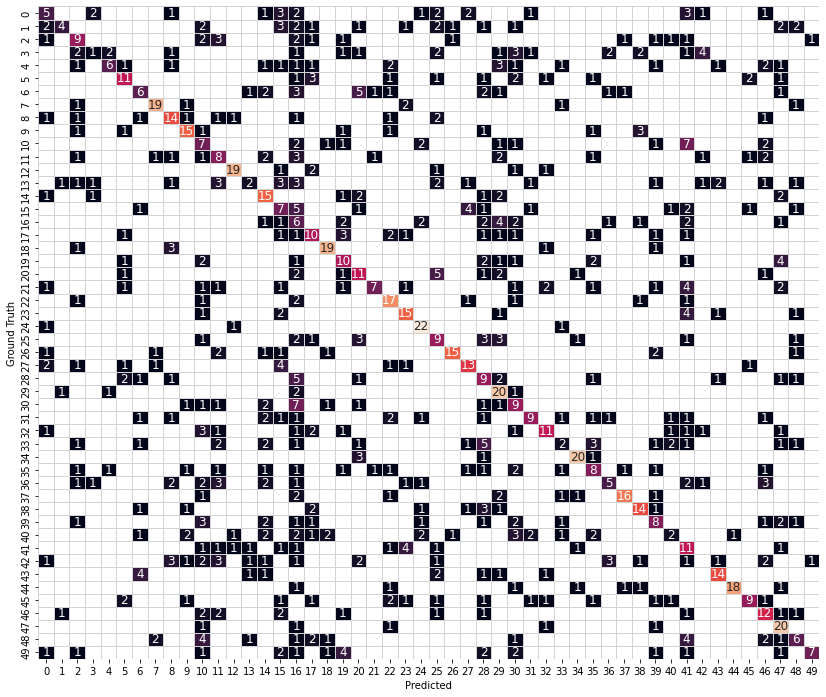

In [8]:
from src.helpers import plot_confusion_matrix

plot_confusion_matrix(pred, truth)